# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

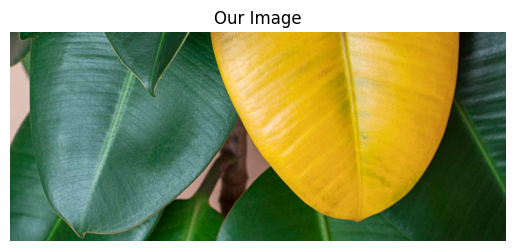

In [3]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data = base64.b64decode(img_str)
img = Image.open(io.BytesIO(img_data))
img_part5 = np.array(img)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [4]:
# import base64
# with open("dog.jpg", "rb") as img_file:
#     print(base64.b64encode(img_file.read()).decode())

(np.float64(-0.5), np.float64(3703.5), np.float64(2468.5), np.float64(-0.5))

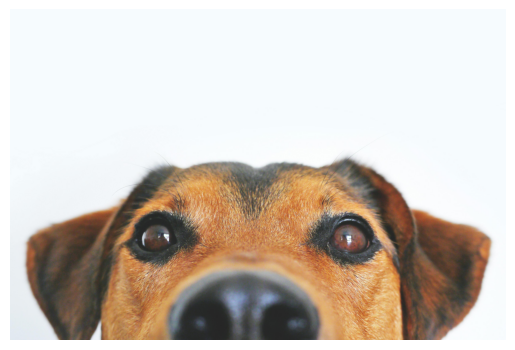

In [5]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAgEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAAAA+EAAC2z2Rlc2MAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAFklFQyBodHRwOi8vd3d3LmllYy5jaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABkZXNjAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAC5JRUMgNjE5NjYtMi4xIERlZmF1bHQgUkdCIGNvbG91ciBzcGFjZSAtIHNSR0IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAZGVzYwAAAAAAAAAsUmVmZXJlbmNlIFZpZXdpbmcgQ29uZGl0aW9uIGluIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAALFJlZmVyZW5jZSBWaWV3aW5nIENvbmRpdGlvbiBpbiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZpZXcAAAAAABOk/gAUXy4AEM8UAAPtzAAEEwsAA1yeAAAAAVhZWiAAAAAAAEwJVgBQAAAAVx/nbWVhcwAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAo8AAAACc2lnIAAAAABDUlQgY3VydgAAAAAAAAQAAAAABQAKAA8AFAAZAB4AIwAoAC0AMgA3ADsAQABFAEoATwBUAFkAXgBjAGgAbQByAHcAfACBAIYAiwCQAJUAmgCfAKQAqQCuALIAtwC8AMEAxgDLANAA1QDbAOAA5QDrAPAA9gD7AQEBBwENARMBGQEfASUBKwEyATgBPgFFAUwBUgFZAWABZwFuAXUBfAGDAYsBkgGaAaEBqQGxAbkBwQHJAdEB2QHhAekB8gH6AgMCDAIUAh0CJgIvAjgCQQJLAlQCXQJnAnECegKEAo4CmAKiAqwCtgLBAssC1QLgAusC9QMAAwsDFgMhAy0DOANDA08DWgNmA3IDfgOKA5YDogOuA7oDxwPTA+AD7AP5BAYEEwQgBC0EOwRIBFUEYwRxBH4EjASaBKgEtgTEBNME4QTwBP4FDQUcBSsFOgVJBVgFZwV3BYYFlgWmBbUFxQXVBeUF9gYGBhYGJwY3BkgGWQZqBnsGjAadBq8GwAbRBuMG9QcHBxkHKwc9B08HYQd0B4YHmQesB78H0gflB/gICwgfCDIIRghaCG4IggiWCKoIvgjSCOcI+wkQCSUJOglPCWQJeQmPCaQJugnPCeUJ+woRCicKPQpUCmoKgQqYCq4KxQrcCvMLCwsiCzkLUQtpC4ALmAuwC8gL4Qv5DBIMKgxDDFwMdQyODKcMwAzZDPMNDQ0mDUANWg10DY4NqQ3DDd4N+A4TDi4OSQ5kDn8Omw62DtIO7g8JDyUPQQ9eD3oPlg+zD88P7BAJECYQQxBhEH4QmxC5ENcQ9RETETERTxFtEYwRqhHJEegSBxImEkUSZBKEEqMSwxLjEwMTIxNDE2MTgxOkE8UT5RQGFCcUSRRqFIsUrRTOFPAVEhU0FVYVeBWbFb0V4BYDFiYWSRZsFo8WshbWFvoXHRdBF2UXiReuF9IX9xgbGEAYZRiKGK8Y1Rj6GSAZRRlrGZEZtxndGgQaKhpRGncanhrFGuwbFBs7G2MbihuyG9ocAhwqHFIcexyjHMwc9R0eHUcdcB2ZHcMd7B4WHkAeah6UHr4e6R8THz4faR+UH78f6iAVIEEgbCCYIMQg8CEcIUghdSGhIc4h+yInIlUigiKvIt0jCiM4I2YjlCPCI/AkHyRNJHwkqyTaJQklOCVoJZclxyX3JicmVyaHJrcm6CcYJ0kneierJ9woDSg/KHEooijUKQYpOClrKZ0p0CoCKjUqaCqbKs8rAis2K2krnSvRLAUsOSxuLKIs1y0MLUEtdi2rLeEuFi5MLoIuty7uLyQvWi+RL8cv/jA1MGwwpDDbMRIxSjGCMbox8jIqMmMymzLUMw0zRjN/M7gz8TQrNGU0njTYNRM1TTWHNcI1/TY3NnI2rjbpNyQ3YDecN9c4FDhQOIw4yDkFOUI5fzm8Ofk6Njp0OrI67zstO2s7qjvoPCc8ZTykPOM9Ij1hPaE94D4gPmA+oD7gPyE/YT+iP+JAI0BkQKZA50EpQWpBrEHuQjBCckK1QvdDOkN9Q8BEA0RHRIpEzkUSRVVFmkXeRiJGZ0arRvBHNUd7R8BIBUhLSJFI10kdSWNJqUnwSjdKfUrESwxLU0uaS+JMKkxyTLpNAk1KTZNN3E4lTm5Ot08AT0lPk0/dUCdQcVC7UQZRUFGbUeZSMVJ8UsdTE1NfU6pT9lRCVI9U21UoVXVVwlYPVlxWqVb3V0RXklfgWC9YfVjLWRpZaVm4WgdaVlqmWvVbRVuVW+VcNVyGXNZdJ114XcleGl5sXr1fD19hX7NgBWBXYKpg/GFPYaJh9WJJYpxi8GNDY5dj62RAZJRk6WU9ZZJl52Y9ZpJm6Gc9Z5Nn6Wg/aJZo7GlDaZpp8WpIap9q92tPa6dr/2xXbK9tCG1gbbluEm5rbsRvHm94b9FwK3CGcOBxOnGVcfByS3KmcwFzXXO4dBR0cHTMdSh1hXXhdj52m3b4d1Z3s3gReG54zHkqeYl553pGeqV7BHtje8J8IXyBfOF9QX2hfgF+Yn7CfyN/hH/lgEeAqIEKgWuBzYIwgpKC9INXg7qEHYSAhOOFR4Wrhg6GcobXhzuHn4gEiGmIzokziZmJ/opkisqLMIuWi/yMY4zKjTGNmI3/jmaOzo82j56QBpBukNaRP5GokhGSepLjk02TtpQglIqU9JVflcmWNJaflwqXdZfgmEyYuJkkmZCZ/JpomtWbQpuvnByciZz3nWSd0p5Anq6fHZ+Ln/qgaaDYoUehtqImopajBqN2o+akVqTHpTilqaYapoum/adup+CoUqjEqTepqaocqo+rAqt1q+msXKzQrUStuK4trqGvFq+LsACwdbDqsWCx1rJLssKzOLOutCW0nLUTtYq2AbZ5tvC3aLfguFm40blKucK6O7q1uy67p7whvJu9Fb2Pvgq+hL7/v3q/9cBwwOzBZ8Hjwl/C28NYw9TEUcTOxUvFyMZGxsPHQce/yD3IvMk6ybnKOMq3yzbLtsw1zLXNNc21zjbOts83z7jQOdC60TzRvtI/0sHTRNPG1EnUy9VO1dHWVdbY11zX4Nhk2OjZbNnx2nba+9uA3AXcit0Q3ZbeHN6i3ynfr+A24L3hROHM4lPi2+Nj4+vkc+T85YTmDeaW5x/nqegy6LzpRunQ6lvq5etw6/vshu0R7ZzuKO6070DvzPBY8OXxcvH/8ozzGfOn9DT0wvVQ9d72bfb794r4Gfio+Tj5x/pX+uf7d/wH/Jj9Kf26/kv+3P9t////2wBDAAkGBggGBQkIBwgKCQkKDRYODQwMDRoTFBAWHxwhIB8cHh4jJzIqIyUvJR4eKzssLzM1ODg4ISo9QTw2QTI3ODX/2wBDAQkKCg0LDRkODhk1JB4kNTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTU1NTX/wgARCAmlDngDASIAAhEBAxEB/8QAGgABAAMBAQEAAAAAAAAAAAAAAAECAwQFBv/EABkBAQEBAQEBAAAAAAAAAAAAAAABAgMEBf/aAAwDAQACEQMRAAAB+2FyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIJCgAAgKISQESAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESAEFJEJESESCJACJAAESAAIAARIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQWUEmBSYQFAAATATEhBJCwmBIgKiYJQSQoAAICkSgKCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEFmJJAUSQAABMCYAASImCUSRIIASAICUSRIAECQAIkESgKACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAExAkgUAEEiEwTCSJCEiJQSCJCEiEiEiEiEiEiEiExRMAAkgAAAAABIgAAAAAAQFABAAUEAABQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAEqgJiYRMAFAEkATAmAlAlEkTAmAJAgSgTAmJAICgAAgAAKCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAomSCViYAUEAJiSEwTEwJiSEiJQkgRIAIkAAAAAAAAAAAAAAIkiQhIRMCQgkECYExIRJYmCExRKETASVAAAAACSAAACSBQSBQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAJgmJESgTEkSKiSQmFBAWYAAAmBMACYAAmASCBIRMSARMSAQkESRIAhEqCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAlYJQBEiJQSQEwASQEwsgRMCYEgAIkABAABBIAUEAAAIlQSJFEBMExIiUCQARIAAiYkARIiUEokiQiQRIIkhIhIiUAkgCYCUBMAUmIiQAABYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQJiQAAABCYExJExKxMAAABMBMACYSQEBUhBIBCREgiYJAABEhEgBEgAAAAACAAAAAAAAAAAAAAAAAAAAAAABAAUAEJgAEwAoBIIkRIiYkhIIkECQiQAQkAARMEgAAAAAAAAAAAAAAAAAAAAARIAiQAAAAARIAQCYkIkRMExIQCQgkAECEkSEwACYAAUCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECYkAAAAAIkARKCYmFAEkJEAAAJgASgmAkCJgmEkTEkSAhJRKwkIkAIkAgKAAAAAAAACAAAAAAAAoAICggKACAsoQJECJgsgQkEISWJCEkhIRJYJESIlBIAEAmBIAESAESIkBBKJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESESETBMBJBMSISIBMQEhMSITBKBMSITAFAAAgAAAAAAAAKCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIAkAAAAARMSCCYkoIiQiRAUAmABMAABKEBUxKAsTEkJCJglEgESAAACJAAAAAAAAAICgAAAgKAAAAAAAEBQAQBKAJIJIJITBMBKJBBIAAAAAAAIkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAESIkEBKIJiQTAATBMJETBMBIIlBMTCAAoAWAAoAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQJhJEgAAAAAAAAiQAiYAJiYAUAAAmCYAABMASQAAmCYkQSAAIkESAAAAAAAAAABAUAAAAAAAACAoAQAJIATAlBMTBKJESESImBIIkIkAAAIkAAAAAAAAAIkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAiLETIIkiYkQAAkQEwkRIAQEokRMIJWABQIEBaACAAAAoIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQJiREgAAAAAAAAAABExIARJAUAAEBQAAAAAAAEwJAhIQJARIAAAAAAAEBQAQFBAUEABQQFBAAkgAAEoEgiYCYAAkAARMEgAhIAiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIqSmQAACJBEgBEwSQSAAAiSEiEgQTEwgkgKFAgKAAACAoAIACggAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKRIQSYkAAAAAAAAAAAAAAAESImAFAAAAAAAAAAAAlAEiJEJglEhEgAAAAQFABAAUEBQAAQFBAUEAAAgKAmAAAATAJACJCJAIkAAESAESAESAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBKBKBKBKBJBIBBNFiLAAAAAAAAiQABEgABEgIJQJCIkpAAACgAAAAAAQAFBAUAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAELJBKJQAAAAAAAAAAAAQSgokhJISAAAAAAAAAAAAAAAAEAlACgAAAAAAAAAAAAACSCIshSQEEgIkAAAAACAAAoICggAAAAkRMSQkRIQkRIARIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACoJCBKIJQLKySCVakpsAAAAAAAAAAAAAAAEAkAAAIBIImAAKAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAlBMSIJITABJBKJCBKCzEkAAIkAAAEExIAIkAAAAAAAAAEEgAAAEEkEoEwAKAAAAAAAAAAAAAAEJhQEwkiJQRBdCgEwJAAAAAEBQQFBAUAEAAAJiQiSJAiQAAACJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAASQAmAAAAABColBKARFSrEXUmrTUWjO8NIEoklAlEgAAAAAAAAAAAAESAACEkSAESEAAACgAAAAAQFAABAUAEAAABQQAAAAAAAAAAAAAAAAAAAAAAAAAAQSAAAAAAABEgABEhEhEwTEhEwEiJgsoImCygSgJQkwkQCYEwEokiQAAAAAAIkAIkgkAAEEoEwAKCAoICgAAAAAAAAAAAABCYUAAAiUUvFauiYCpAAAAAEAABQQAAAAAJCJIkAAAAAESESAAAAAAAAAAAAAAAAAAAAAAAAEwAAAAAAAAABJAAAAAAAAAEwEwAAAJIAAABBMMyZgTEVq0VrF60oaxhNbzjU6M8Oo0tnaLTUWms1M1mJRImBICAJAAAAAAAAAAACJAAAIkESIlBMJIJITAFAAAAAgKCAAoICggAAAKCAAAAAAAAAAAAAAAAAAAAAAAAAEAAkCCUSAACCYksTEoAAAAiQAIJRIgVKEBQQFTBAAAAExJAJgJgJQJQAEwAJQEoJgJgAAUAAAAEBQAAIkAAESAAAAAgKAAAIEoEoAARWZoXmliUSTASiaAACAAAAAAAAAJgAEwJRIQJgJQJQJgJQJQJQJQJQJQJQJQJRIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmAAAAJIAAJITATAAAIEKkVz0JilS9aZmlMcjfLmxOy/nxXc4euXvvxa2dV+a5tbG5rNJiyslprJZAlATCpESAgSiQAAAAAAAAACJABEgiQQSgSiSCSBQAAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAExIIEoCYExIIJQVMSgAAgmJCJgBZCImAASQFBAAAUAAEAAATABQAQAAAAFAAAABAUAAAAiSJAAQTEgAAAAAICgETAAIJQJQJIBBKslbMo3VkmYVKBZEgQAAFABAAUEACKlAlCJQJVVaKiykRoyGrKTRnFaMojWcIroc6OhgN2KtWCOiMJrZiN5wmNpxsaKSWmklkCUSAAAAAAAAAAECUQWVFlJLKiyotFINGMmrOxaaiyosqLKiyBKJAJgAJhJAABJAACRBJAACAiKk88Ul1rhkbxzVNcOfFerHmxTXPnzrpjnmO7fzbTXqb+T0XPqaeVsepr5+9nZblsdFsNDaaSXVFkCZrJMxIAABIAAAAAAAAAAAACBKJESAIAAJITFAAAAAgAKCAAAAAAAoIAAAAAAAAAAAAAAAAAAAAAABEhBIgUCYEJBEgCErEwRMSAAAQmCQICYAAFABAUAEAABQAQAFAAAABAUAAAAEBQQAFAEEgRMExIhIgEoEoEokAAAAAAgBAmAECFS0VJozlb1ipZSE1nGy03zwOxRGikl5pJaazUokCAoAIAIVKotERExWpoxg2jHM6o46HdXgoejXy6Hq08ui+rHlzHpz5UR6lPMpXrPLk9OnBVO55ta9N5knrT5dzujhovqR5sJ6uvjap6lfOivU08iJfdv4myevby9j0J5Lr0Tjc0mklkSAAAAACCUVLRWhpXLI6Y5KWd0cOcejHlRXsT5WkejTg5D1efyIPX08i1e1p42svrT5l09F59a9KPLHqz5Wp6M8m0u84jZhY1mliUSAAAEwTCSATACCYiC0VgvWtC+NfOl6cefDOunPkherLHFL0pQvlFNYqmtqIjK85jfXmuvV0cGx6e/m76noX4to7deTWuq3NZOieextOVjSa2LIEogtNZJRJKJAAAAAAAAAAAAESIlBMSCBIITAAAFBAUAAACAoIACgAgAAAKCAAAAAAAAAAAAAAAAAAAAACAAmCYmABKCSASqBJiYEgAAAIAEwAAAUAAEAAABQQAAAAAAAAAFIEokAAAAIkAAEAAEoACYEgAAhIhIiYgsrJKJBBMAgCBMQJiIERRLRWpdjU6a4K0jCp025EdleeS3RwJe+3FB6F+DY6559DWc7FprJKJAqCIlWC1a5mkc3PL6EeWPQy4cjsr5+MvoYcaN64Q1rGdJN559NTWKzm2iKVpbDaVTSkLJKxfPUhF0omLL2rJZWZVbNTKbZ2aWxmLs1a3xsb3wR2b+bevW38fU9nTy9zvty6m052LIEoEoBFS8UqXzy5Dr5+LCzsz4qnXXmmXXGuZpGUGrCpvlRF74zG84zWzGTaefM6qcqumeW0vXvw3l9jbw7Ht18etnsdfz3enuX8vavQcVzrnnsbM7F1ZJQJIJRBKtS0Z5m1eXGXurwF7cePhy6efiZ30ZZ1l0jOus3pFdS1YpcWlNVrpC5xeMqTaSpXNsxi3s38/WvS6/K6Y9PXzraejbz9JO3Th2O3Tk2s6LYzZtOQ0nO5aa2JmJEwJAAAAAAAAAAAAAAgEgABAAEwAoAICgAAQFABAAUAEAABQQAAAAAAAAAAAAAAAAAAAAQTCQCEwATACQQTAsolACJAAETAAAAAAAACggAAKCAoIAACkSECYmEBZgJQABIiYJBAJgJgJgEwJgEwCYAJRIARIBEgAiQgISImKl4pCaRBUKkqVTStak51zNaZRV6UpExhkvXTnqdU8Vo6689V6seeMu2vBY7ejyrZ17e/idB7Wnk9Ws99uTSzoYzWrIaRlQ2z58Zd+bm5s66efGs1qztjUUvFlExE3ppELFyptRKzM7zSysaUuMr1ruas7y3tW2dKLJWy2pSukrSbEqVkmYbzWtqlZQSNExCWtjoXREa3ytWunLJ6PX4ux7uvk9adrmm3onmk6K4UOjPmxOzDk546ONkRWKF5rJa1ZKZ2zS8TK4xqzc5tEuUKWaWzmzScrLbOaywtMlbQm9VIlvbKauraS2uKum/JbOuvbglPW08adZ93fwOnefbt4+1nqz5ux2xzDopzckvoZ+Zx5vp8vmVzrucctddOWsbc8rIgETRIiK7lorLK8WEpsRKqr2zco1zzvLHTBmJibLXztNba8sr3W4dJrt04by+l0+Xvc+pr519Z9C3n3077cOrPdfm1s3nO5eazVkSSiYAAAAAAAAAAAAAAAiQECQhMAkgBMAUAAAACAAAAAAACFkIAAAAAAAAAAAAAAAAAAAABExIAAAiQiRCRCQiYEgRJEgAAgAAAAAAAAABCyiQAEBQABBJAlBKAAJIAAATAmAmAAAmAAmJIJIAAJImAlABIABBIBAAhArMGcWqkTnma054remVJdcs6F645HTTlrG+WVTWMYl1YWy1Zwtq1guqW9s741prlrjWmvPJ3b+ZpZ6lvNnc9Cnn5Wd+HJnHXXlvnWuWlOess9qaka466WtDKyLZ1EzMsTeawz3z1mmtNlzx6+e5pat9TGvRnZGjXNrNqmVojWd0wsTnay1LRNZTBmYidZiJpqXpMpSYpm7xS+pTSEWrauml8ZLzWYXpB17cGx224Z07XHB105Kx1Z88GtKxU0ZxMRJMRQ0thYtS0xXSl1mL5c9VzVsrK2pC9YixNJi4jSudZLXmsm0Vjpe+ZEbUzvCJruX0pfKJhLK+hle5M7qam+nA3n0J86bOzHFmzW6axbSuM7MsY2xrK+lemM4tVIpapSt6XLRayLWmqLRZF15VjHSmGvPllnrG+ecaVqIVWZql0vlbOtrZ6Z3rfC2ddN+OdZ7b+eZ9Pp8fbc9rp8fs3z9PXh6LOm2NzSa2qZhEokAAAAAAAAAAAAAAAQkARIhIgAAUAAAAACAoAIACggKAACAAAAAAAAAAAAAAAAAAARIAAAAAAACCQRIAAEAAAAAAAAABEwElIkARIIkIkIEwEwAAAAAAAACYAEwAAAAAAACUEwEkAExIAIkhIgAERMEVmpXOc0rSuJpzRgqMMI7Y4LHTlnUtnFSzMXZzm3io0ijNspNt753ib1tnW1089zNJl0mldTVz1s3pSsXiltExGb0TjrmxaayotYzjSlkEEWidTXTlZvVWl5atc1ikxvOMzS53UsqaWi5TSMtGszK2WcSsjTC0Wy3xWl8a9efRRCWtnZGdoqulKm0VRoraq2iLbXzmTSKidMbmkRSta1gVpQ2nntlrPO03rSYspUvFLEF6unPNaZb51OOuPPpSult4pfQZzbTOufPsHPprM1VpGbjqtLWbRUTMYs4qblLX1uaW3nnvBestrUplrGF6mt25lGldZpFrWUtraM41q1naIS6kVMY7azFLrMa7VrHPfFml7W1iLCzEKWi8kXg1NZzlzptS5wXhKZ6Y1WJrExWbdL53xvS+V86vOV5bwTcRNGZnKN57e3xdNY+i7fnPT3Pa34Oq46bZXNFZLIFkCUSAAAAAAAAAAAAIkIkAACCYmAAAAKAAAAABAAAAUEBRBIQAAAAAAAAAAAAAAAAAACJiQAAAAAQSgSgSiQgATAAAAAAAAAohExKwCUSgKgRMFBCYUEAABQAAAAAAAAAAAAAAAAABJCRAJQCRExIgBEIQTERSrNIxviZcuvDLXmpjGuVKmkZTW1sbGlayVi9BMM2ZiaRMSpi0TrTXOtLxfn0rbK1lkMppFNy5pC1r53jG1Za10rVdaWlvFpkzsZ1WZWTFaFzQ5Y6q2c2+VtTqnHXnpl0YLjXobxhXXHUtfKV3nDXNrGtUiJrc2iarETGpaaay82HXydOc2ynWNZyVaaTZelZLznC6WxsmsUmzSa2Wls5NrZzG0TFViorlrnFRpSpGlq2ia3osJommmNrdMdGUdVNefTGqLZ0a8tZr2K6TVqIm0RW9c2s13rOuvNmzOfRuWjWnO4RevTLSl83Wc6y3yZ6zGV1TrnotyOdaToVrfGXRQRjfn64vGMdOe9c66mmuemNX2zlqK3xlynXXc53VmxzRrFzmvXcXrOVoUsJuVz6MlwzvizGV6VnGlSkoi1s7tXmrO7XznLacpm71i0tKaVuc1q6zp6Hl66z9L3fNejvPvaeP12ehbk1Te2VjRWSyJJRIAAAAAAAAAAAAAAAiYEoJiRAEwAAAoAAAEABQQAAFBAAAAAAAAAAAAAAAAAAAAAAAAAAETAAAAAAAAAACggglAlATASKiYAAQAAFBAAUAAAAAAEBQAAAAAAAAABJCYJhIgAJAIABAiYIrNBEZl8qZDnco4nNFclImISzMTYQLTSUtakVpNLzUEZWhOdTM6TVdZmW98kt8prLq59bnRDNlNDTXj3zrpi9s6wp00MtYvbOWueWUo00vhpE82+dtNptmaZa4lL5NNVqG9Y0xrC056lsda3PPbSupTSU1N62imW3JvGmmGkuuOuNzG2Ntxy7Z6zjtnGsXx2zE0nWbWpYtW0FNKDWEWWtnC3mmhZehpnSpe+UxrWt6tltzmVpnKExbKLyTletQmC1srzXQynGplpnVr5653pDPOkRaTZfLNylOmlqRy1S2m25ltDFvnEXNXRiudMJ3nfO182tNpOd01m+bXTXWc89cMpRWrV0pqxbO8jPqVwZ+hOs+brfrs5q9No45vjuaM+lL65pq2UzrOcawmNN8t5pW0JWb31mmkw1HPpzZZZ2jWar1lrW9LKRcQtOdVKy2tmXSaTNXmsy2qtFaa1azi9NZtrz2ufT7vA31n6Xr8DvuPZ28/p1OqctC81ktNZJAAAAAAAAAAAAABEgAABCYEwCYAAoAAAAAEAAABQQAFBAAAAAAAAAAAAAAAAAAAAEAmJAIAAAAAAAAACiASRMEABQQAAAAFAAAAAAAABAAAAUAAAAAAAAAAACUAAAAAgCBCpFZoUwvylcc+WN+fLFWFs0pFqwJEzMtYvSomCXmswi1SbZ3W9m2NRpOnPqSxqldY3mlrXOPTXDWemNJ5dOW97anPbowjbfk1xrWU51WLpaqxLNb56IixNs4l6Im+ZSu+e5TLozsWpZazLN0ztnFRqM987KU2pqxpjaYtz9OWs4WtOjKzcy6ube5yZ11jq5urXO+C1NtZ5LTG82VSXlYyrOdbWy0snPXHNnfm01OimcF4peERNWmsEzlJraloUtRdYziLWpexE0mrzEy5o0jbXOuOu1sr5t6znmtK7xemuWdSynUrrn0c9TfO+LXn0y21vSRh0TXL0xokRpfFreYzarzqZZdFNTlnooYX1tLSdMoicbGlbXrnx7+DcjrvOWeG1Nzny06O3KL2x57pTRcNcr3V4FrntGsYTrbeKzqlxw35owx3z1jONGpnGlbc67MzCdqrlF6FYmKrEwTNUt75Wl1tS/PpatrTpjGkVlGkWZ2iLz37PL01n6L0PmvX1n2t/P6tY6rZaF1bEzAkAAAAAAAAAAAAAAACEkSgkgSgCggKAAAABAAAAUAAEAAAAAAAAAAAAAAAAAAAAgCQgkIAAAAAAAAACJgTAAAABQAQAFAAAAAAAAAABAAUAAAAAAAAAAAAAACYAAAgIBEQKxUnOMSOPXjjn49OGXTPGqaxlK6TnYtMSkzSC9YiAVaNIStVbzrnUaX057i8FImzO2Jeu3L0505uvnzprw9kzrWbtzW04uOfak4+6Is2pFZu2cs3Kb2XDbSic7aVreyNIjWZ5suvm1qtdi0i2dztltbLLLejUYb8vTPVnpeTnrvFzjTPPrjXTK0UpNNZ0tSm504bZ2TOMSZ6TGpnS+dyi0GlsraMtKZL4TqdEVQtEhadM9MbxKkGjMReLFpojSlkuVs51NbzrNYZ7zz3Exa1bNi3mOmbpOs89U0lM47Y3a25OrK5z0Xb1itOa/TzbtZK6ZZ630rPO1rLRoko0tz1SNMzNpbc5b3S1jSCk2tVctaFJ2oTasyY5026Z2zyiXTl0ncy6ootqWpJbHOvSaM51ja2Vl1VsLVXN6IM8enPWeaN2889eijOEbRbRMRTPTOs4vFznFqlFkVrejU2pbOtb5XzvWaaY6IuxrKm+duVNM94rMN89vQ8vos+i9DwPT3z9Xbi6bne2dy01ksgSAAAAAAAAAAAAAAiQCJQSiQCASQBQAAAAAAIAACgAAgAAKACAAAAAAAAAAAAAACCYAAAAAAAAAAAQElhMICggAKACAoAAAAAAAAAAIEoUAAAIJAAAAAAAAAAAAAAiYETBEKisZpbOuK3wrzyuG/Dlny2xsRCkwi18rl5rJZCggFtpS+Vr10zq16TnW18bZ1opaLTay82Hfhuctta10Xxnnut9+XM6b6bc98W21Zq9J0jOVVtWZzcm0VSbSTC8mdpS1peta1mtloprGOtNsMePux6MujLXNpE11deTpqzFsrWU1zisOH0+Ptyy0pGosu1rz9kYcl8OjpnHPthOPbDXeIw7uWMbUtvNbxCaQsuWfTmVtFtS82rLN87pjXXnq81sllry5VvnKTWzRWtUtFk69OXTO9FGNWnS83z2dObOjPnvfn6MLnSdI5bwtl1dZXK2cXtz6WLOjnqdcKTWukWxZvnaxK+VaXgmZqTQlm0tSJrJaESQvNZxpSKRpOrFtuDeMd9pOa2/FZl28k6b4sKjDpizkvtprPJfZNUmaZutsdNS9qXsTM2VptTpjCNaXNKa5lM7ZWTSIuYrdWSyM6a51Ws1itNKyxKVvplbGtdMb566zS3PqzvVqlNIucY0rrFbwuev0PH31n6Tt+b9HfP29PM6NZ7rcuybKWLTWSQAAAAAAAAAAAAAAAIkAAQmAAKAAAAAABAAAAAAAAAAAAAAAAAAAAAAAETBMAAAAACggAAAKACIAAAFBAAUAAAAAAAAAAAEABQAAAAAAAAAAAAAAAJgABBMIEIIznmNMcOc358eeXTmy5pb89s5KZ6LMpvNUjVGU6RVbVF7UmLqzLKJJ0ptmzpN+e4vpON5ze65tc82CdS9uXa216zlptlOdWrvPO8vZybbiVM7ujSScujOImb5tUWqL0tFqSsVstpNJ52+dorDSIavrjKUnLaue6jSYvZTSM7nPTS1laXGHL25bmK3ZrHmal1v0cHfjPmTpy9sd98tufTzKejw9uPRja8vHTWvXjfn68M9I2z7bnlpthZamkVOc1stamkOPr5ka031bVhztZprUV0zq9NFmN0ZWtjou22Pdz6Tbfm5defuXkrSb6u1N78nPz9HGterK2plF4mubp1mxfCvLptadc2M5yLb83TpNq55ms11srW1iqROdb5q2O9TMxrC1Iic5zadOWzLitrttWcJMfN6+jtObqtXGq460lrMNS8RjF4566nTnMrnKNYvalrNLZTqaRFdZnGctycYredaTXUJrQEhYy1RzR0Vkyr0RLgvUrNEuumGmeu1src+l6k2rJa0tW5E2RMi/Txrn1evwujWPo+zwfR6cvV14ui53tnYtMCZgSAAAAAAAAAAAAAAABEgBEwBQQFAAAAAgAAAAAAAAKCAAAAAAAAAAAACCYAAAFBAAAAAABBIAIAAAAACgAAAAAAAAAgKCAoAgmEkTEhEgAAAAAAAAAAAAkgAzi7OKU2hMKb0MYnnWeWvLFeSOPOrYRQmsERKWsw1m18prVQaKRGk5WLwvLXS+mbG0259LSTV5xrGysTVmSy9dc5qu1Y3nsrl086tW81O2Fpb83ZhHRFNM2uPZyS9CjDStrVSIYtrZW2tW9IlWkWlCmcy3oVbXHTWc5vGblnajS1NqgtcZXi25XLSN5x2muUa6Uynk7+OuTsyptPndvJ0579OWOdej5nZkc+kZb5TTbPpG/H6GXF05X1I5t8LmNKX1KZ2qs61silZrbTTkxrK+XVrNdb54tKI6Z020rz6ctL31mu19Mbv182/Dte+GtmnNpxJbu5+5q+VK8rGPVluZa4bLatbxvzXymow9Dk5626ufUyz6K51XfHWyaEaIvrK1Yi0ToUpaSJrBvnnbSEVltWJrZnEnP28+1W59NdZzvHQcsatTLHoxXn1pey3Hvz1io1Nrc+0ulGFlmGu89GnPomtJlMs98tzGnTTXPlbrMo6JrkjprZjOkxm1LlGtEplfJaZXySoltfOc71vjOemzJne0Vs1ETAlMQtCwkJgz1d/j9O8fQd/h+l04+npy76xrNLlkSSAAAAAAAAAAAAAAAAACJgEiABQAAAAAIAAAAAAAACggAAAAAAAAAAEAAAAAAAAABRCTAshBBMTACgAAAAAAAgKAIJAAACAoCJglAlATAkCJABEgAAAAAAAAABFC9JuZ6AgIpehnlfnM+PTzIniy5s2+VazVqRNymqyyJIi0LCYQlUTE5NM9FtrXXG77U1xpoTVqxYrNrZubW11SdZzKXtTO40kU3y1ubWu56rzbra3glbxK64zGLnOcN72znmtCSt8L26a47XGFdMWuhnBGuGgiUZWmq335O7Wefl7eaWvRz9tmUWpc00x2t83etOme/muzKdnn9dacHoUjOulDLLam8059c9zaLc0m3NtWs8tObtx1il42lnnTOZ6ZV6OaIopvPRbKcqXy6q7OH2+Dl283sxnpy1c0y6xex04V2msN8ehW0dHLdebo4cX1YiKxrrvmwpMtr20mY8vu8/pnqjaMdcermtc9GV3PVISs3x3xrTmvibzSy6M41JV2lmIZmnPpGk3y6Cuc1JRRbxS2WWsTpfLXl1jqnTmLbVtqbVpRNc642zjtqtNb5M5Y71a589uG53yrNtqxNlVqbxNsZ3jac7y62zvLMWlMY2r0zE3jWcs9s0zsmVTSlY5a4s5470rCN5Tmnpia5p2zii1ZpNE1rOVp00Z2ltaqaurbNTFrUWS1tEMdno+H0b5/Tdnznp9eHra8fTrOtqWLIkAAAAAAAAAAAAAAAAhIiQAiQgAUAAAAACAAAAAAoAAIAAAAAAAAAABAAAAAAAACCgACUiYAAAAAKAAAABExIRIAAACAAqJACAmAEiAlAkAAAAAAAAAAAgmi5S4CAQIVJzYjkniK+V0ebLlz6Z5sESyBExcpTpYvJSUwWko1iXJrBGtNc6168Ojn21QxqMt2s8ul8rFbXq+l7cOud8NF6Jx1zaxpGs7zTTFjLam5WcplvS9iIrpNZ47RjVZppzt6xbcya0lXpGW+OldSlrRLVrQzvEaaM0V1zV0Y6ZXOe1M2t887s2tzduscOHTXbTLL0beOy8z09Hm9skc3by1zxVb0c+lUwrGnXPP6PmetmeRh28nfjnvz7RrltlLCrWezi3zlyz7sNStZrU93n90vs+J6PmY3ldfeOa6yV2rfOtOiuk3nl0cp0+jw9XO83P0WL2xpNdV55uVa05ej0JpzXLpx6cang7+PGt6c/VWtOfY2tjXnuVLN3TKW0xlEVmanTn3TSdLb50xnPOtERLC26Y11z0ziJzublxbLemprXWrNZnK3ThdG83zxtNdV+SUrrpaawjakkb426Zz5evDN4cO6d582vp4bct5my1mkRdbJMzVYtXWIi0akVtXUquuc66UucqbxZjXei4rZFqVyW+dc0mtallYl0nK01rOds70mk53rals7tatpuyImoia3mmsa59XqeF2ax9P3fP8AqdePpX5trNZpJZEgAAAAAAAAAAAAAAAgkETEiEiEiJgJgCgAAAAQAAAAAAFAABAAAAAAAAAIAAAAAAAgUBMAShAmAAAAIlQQiVRMEokiUCUBIiYkABAUEIkIKAAAAmBMJImAkAAAAAAAAABUJkAAAiJgrS1DPl24TDztfLxXNSqoFEIICYRas1pfKyTETLe9Lxe9NM7ib6Y1Ta18dWi2N1jeZOZ0RqZ6rZtcdVsdPFqzvhtfPTCevOStaaHP2cW+s9kc/VHFO3Pq7TSOOp35tdMt8pxqufTSWFtrnl2xhdM9uZba5Vl6onffPmziOetaa52xMqtlaIvlM1DOxpn2c9xy9NMOs6+fv45nLs5O1c8rLKWtFnbg5pnh0x0652vy93Pry9XL6mXz/ZpTpjl5vS8vty35evj1jvvx9ONRzdnFb0Rcu3n7Y7ztGzlvj7uLv1nPn0y1Ol0U565adGPSW6a681ojNu3L28lz6V+aLdrZ4cumnXxeuypnry1wa8G/bHTGlZdcNuXjsm2rGiZWlc+e7c2nRnea+WprpkzK7Vz0i14za9fH13O2cU3mkmd6VpaTbbLPWIitLuydsM1NSyzWGcWNOGddstaxVK5UNdotnXVOHRczS2WVLcttpjqmzKN88uXPpHDHfj1zgvSyt8YueyOe66TnazaKrK1vlqWrEbwztnZZSRlfIzx0wZplbMUQsxAlAtNZmrzS01e+ds70tnbPTS2ds28VNTCGVbRUaUXn6Pq/P9Wp9R1+B6PTj6l+ba50mtiUSAAAAAAAAAAAAAAARKCQAIkCCYmAAKAAAABAAAAAAAAAAAAAAAAAAIAAAAAAQAUACYEAAABQCJITCJQsokQAABIAQkAQEoEwAAAAABMAEwCYkgkAAAAAAAFRKQAQSiCUVLVihbJzxTz9vJa5+DTnzYrKKyMoNAsJgiQkEzEl75xi73w1a6NMN+XTSU89r1luYzLrrz7Yut8bYa0iq0m87IW3jTbzOrLTn0nO8uLq4OnP2N+XXnq18tYxUtnpMUua10rJ08vVjrNJiZpz6VmjSuSvZzazp2+b6HTHlXvnx69eczvGO/JtNa5dXNM5xXTPTCYbvZSc3OmPbybde2Ol5eZ2Z52647cmpvrSsndXPll6fP8AVXPjejyTrWPrebVn0fO9Pky18f3vOt8naJ9XnpNLTPpef04Z6aa59edcNNM+mey8dHHfBvONYZ749efbfn6ue+eaaalejz/ViIxots76WU9C1ca4L21m9NM+eTt5JxSeujc7c2XDrbXHrOaJ55dF3PURozqmuk2cEtLqcdklLVmXomctYXoa1z0xzN84rpTWuudMtMbJvTTTTK/Mm29a5WrGWXRHNrqbc0x0l+fu4LnG1mltsu3nuLRz82vPTo2RtZKa0z3ntrxW1NsK1lrh0Urkr057mdYjc0vjdm9sram6hGdqaiL11jOlqEqrGVsymG2cmNdaGVdKVWLQQSAszWZq9s7Zuls7Td5rfO162zqUpqsWmqxZUXqY7vX+f9Xpy9/q87v6cd7UukzEgAAAAAAAAAAAAAAAACEgACJEJEJgCgAAAAQAAAAAAAAAAAAAAAACAAAACCYFJgAAAABAAUQAAhIIlYAAABKJQgsxIgAAAAAAAAAAAExIAAAAAAAARIAQQhUtFYJrFCaRirktwZuXl6cWdVrASJWLVsTF9ZiNC5tISiwovBWYktaNM22+W+Oum1NefSF2bSL1uqTfWI01nnrKdKy53tONLVsZ03w6Zc8b9ufH6XDXLv5+mOO/M9Hzu3tjfK1ee9rZZy36ObpXO9PQ1jmiJzrOLxndWlMtsd+e5224u3eePqwNdHD1c2WtueVvWKS9malzMXZtue0U35elNcsOxPOXt1dHl7LnGfShOHozz07+bv55Me/mzkiumWnT4nt+WbTl1V18XThicHm+x5vq4aNLzXNG3OnT6vkexnXn8vXxndv5/Xzt+TbGnF3Y9M16cujG8dLddeP62FExtnpqZ+l5/sZZ823NjpvtbkuenHTKXfHrwxrDs6K9MuXL0eeqWrpz3y32862/TojG8Z51083V5lWtETprNrzNWmzNOXo51nRK6ZqF7Ik0i3PrNZ0pdWrMxpWLJet85Ix6OWaztTHd16+LXWdqUnpx7PO07CtsfO5701y6GtL57xLaiQWMs9MqotTSzO5OfVe587Lvz3OB1U1zzmZ3a2SzKVRW+dznz7YM0rausxMSVppQzz0zM62qVi0LAAExKpFtal83TTLXPS1otjpKWd1TBCYqFoS3dwba5fSej4Pq9/P6OnPtc6TSxIAAAAAAAAAAAAAAAEBJBMSAAESESITAFAAAAAAgAAAAAAAAAAAAAAEAAAQKAJIBMAACAAACBMFABAUAAEBQBJBJAAAAAAAAAAACQBExIAAAAAAAAQBEIQKqKzjHGtK8+eNdOPPlNW87Tz1x5r47xKCWRWyYiLLTRrN5zRrOMm1sC9OvJ04s06ujHTzt+qVw220xvGda51Va+NZa66ZvNbWJV4rLpGemdFWkVnCt8pyswvnj35bdHFfXPs6rc3DpjS3P1z62F+Hl09PyuvjX1menO5ep5++s8vZjvWOXXmvLrTbnvXmvnrNejGs1rj1cJ02thmVrObe849NznanWnPpy9Ntc+3lTl7OaJu/VxdjPFvSm5bpxqz1YTLO/Fpl1xfVxR6mVO+zzow9BfLbcnTO2Hq+XmX6uPqmqY1bxy2ytrGmNpa17OPaLc3XzrydvB26z7XFjw5b9fB3zpdtwYnZrhkc/N6PL1xpyejzTp092d+N04t+PU7eTS1Y7s867Oasy9lePWVvz6Z1pth1Sclo7KthNMIiuE3S2W2t47RthpauTGnXhGs0xY569UZ5VrvjKa78vTMxhpVc9603Muvk66pbl7MKXrgkcu3FOumHTy9efZ0Y+Wz3ejnncb56eF359vRtyeftFqdlt6568ek6V2kzmM62zm+8cs9VdTnnorVIYbzaK31FWUs5q1a1LXN5pNkxM2Z47Z2Y5703jCu0XOVNqXPPXoqc1OmkuEa1M4uaokQkoLNq2zb6Z3zva1L46SiZpJLEWhqCLFqxcdvsfOel04/S9Xk+l14dNs7paYEgAAAAAAAAAAAAAAAAiYkIkAEEggCYAAUAAAACAAAAAAAAAAAAAAQAgCVgBIgICgAAgABErAAAABJAAAAJgCYAAAAAAAAAAAAJIJAAAAAAAAAIJhEIQKzSVlbOWnPrhy6Uxvjy6U57cRXktzducVNQSlYvFlK3WUWmys2sUta0UjW9YX20zrPtx6efTp6eXTz+jaLXwznWi1TGdXvjObrOWpfOa6ynOJrWmdbJ57c91OvPz9seh5Xdlc0wvbrx6d/JtHXx6Znq35fW578Hs8/0Gt+rzOrl07M6ZZj0+Ds1JpbBKdXH2Lz59HHnW1Nrl+D0vO3nr5OvHGsHTnnVOiudV6+fbeOTTLtmrc3VzSW4uviuuy+fTM04e3i3N28Zc23P0rlWeXpz7N8OjXPzfY8jsXCnXxL0eb7fJcV28z0tPO2rY5rdfmdOeufqceNZ6QtpZhvn6XF1+dnWXXydes59PNfLtijHXr8z1/GZ6unm9jOuDk6cN46Ytty7LX4Mz0PE93ytK+lh0ZuEZbbu2HXjyUnr4pvq5+/O4o155rVTJZ2z0Lcvbjm4Qyzu2taVtGeyZ9fH0anPvzd658/XMzXJdbW14ZN8N8Gt6NGcLY9O7nejna0tRrHm6seiulsdYx6PM9TpyzYTqT14drGvNvwY11Uy0dNLbdHO5No52bUmL2rbUYa5rmtaytdHXGN07lsOmGeCvTW3GnZG5x6TJNEc7XHanTPPXWuucWmdXONJmeem2aZZbZ6mVNaWZ1vSWqYWJiViUypTLa+emdaXpbHWbRLUzDNmqFhEXMwWNsJ1j2/Z+T93fD3tuLq6c9ZrJZEgAAAAAAAAAAAAAAAABEgAACJEATAACgAAAAAQAAAAAAAAAAACIFmAAAAABAAUEAAQlYAATAAmAAACAoAAAAAAAAACYEwAEwExIAAAAAAAAIQQpCIREKqpLGVssarjbnx0rzW482nJfm3mmV66zEpsiZmIatTFtCZNSU0a51S+kzWerbG666bcuuOl9MbpOtlpN7crVMS2pdVKa1KTfJbRlJNKxpbHTntRlGptGd7mkaY7xbCvX05c3ZW2XLjrbV19LzNMObrw3nWOvl1573yaRp0U3vNgFevj7V5+Dr55vunHoYwx7Ms3bHpyucMdJz1vybzWfTnizl18fdppzXpmV5+nHden4/XmxnEanoXw2nPm5+qy05+iDKde3WOHLr4mu3z+zDN7s4vvHkde3ndefreb6viZunL6PLqdeNfUl+c3vl0z2+f6fn5mvD247cnZz6XHp+f3ceOk9ap0eXtWX1O7zfVy8jHfk07PT5+jj0y8bow6Z9bk5++SObpwx0x9KlsXbC14nOrNr188bla78menTXfkk6tMNNZiunNnWEzZ0x3z3Str5SUrWNXo6oymOjm6M9TC/N08+vX5nd5/Xn6fJtllPXheOfbG1tJtbGs4vlJzZdXL1vR5Xoeb146d2HUuE9Vczh9byPR3jzvQjRadXHvnXVamcWxtrned5nFibWkhM6mVtJqkzSLMpXeM7axOOyuauya5cuvLpnkdNeuMo1rM51tOs5RthZGVaazaIazFL1Mq6Z2UrakqJiarEkTFmlonOrWrab0tW+dptGaIVExLESuUStiLQlvW8fp6cfrO7wvW6cO22WllkSSAAAAAAAAAAAAAAAAAAAACJBEiCSEiBQAAAAAAAIAAAAAAAAABWUKACAoAAIAAAAAgAUAAAAAAEBQAAAAAAAAAAAAEwJhIRIAAAAQJgCEEQTFaretKxeudM60zpnnd8q441PJblWnFfk3hlWN5lE5TNZqysJeM62azis1nKydHRyac+vTfl1zro6Me3l0neNOPVe2uZhOys5RixFrVnGiXGu+VsXrsnNj6GFcWHTjrpnXTMrlOfTNbaV1jfPHpuee3TFzy9fFXpx1015cdYnXgufQ0w9Ll14uzj7JvHqWw6L56XNFdTON+bU049suXXfq5u7XPl5erKa3rG1z5+1JmkTeV5vreetevnhZvOtnNrh2R5vo8m+lcds813+b23Dk7a3OdU53f0PL7tc8s+Tr6TGJvz30ZX5N8vT8b1fM1O/wA7ZZPP0+dqbetwaRnw2ja2QnVz9uGNeZ2ef19uO1Y61ilNee616+Br2OvDDOeDfn6nT1+XXizPM7Wlu3azw5Zic7tpyduNYs7tbWnC4vtz61bk15sdOzmvMa4OfTsrnEa57Y0rWM63x25tyNctprozmjG3bXn68eborfh208/tws2z1oaWX1jHCWekac+ixacpKcvo8lt/O9Pk6849DDdLef0XikdcMZU1nds0rGnK1XDXS3LdbRnLeM7NaWjVmL41k6FNJKXpFaVmoi82xW1IVtQRamoztXpEY16Y3xrTtyYaU6c8aa53GdbUK5zXNpS1VmETURMC1bSzaLTS9b53fSl8dbVtBWLCoILKWS1pelzFs2+Pse78n72+Xv7cXT057KWWyCWVFkCUCSCQAAAAAAAAAAAAAIkACCYmCQIkQAKAAAAAAABAAAAAAAAAWoAAAAAAQAAFEICgAAAAAAAAgKAAAAAAAAAAAAABMTBKBKAIiUKlVEqiVal2cLetKS6UzzxrTPPHn01zwz59OimFJds86XLk149Yy5r5d+UIsJTNJSlIvFlItW5iSlo0Gk689Rvft5dse623DrFr6ctY2vVbWzpZrzWrbW01XSOaJemvNuu+2czns5o65ce2d0rrbN8/m9PDc82847ltcbanZtw+lJ5nN3+f14erydnm47erwejfF8j0+G2p1V0jj16Y0z1nffG2JeL01MmHS6YmuG+k068eHfPbl1U14bLdGfoVw654S6U0zlpTXLO9MNuTTp6+XrmeDbm31b59NM5ymutvL08+mlr4dmZfj3vc7+B6/L0zl05l1p6HFidHl92GkZo1OfDov15U2tz5vF1c/T0nNtrTF6q56TPi9vH39cR6vP2cunidXN03WFOfXWPT04/R4dfM698E0jg9TSlehi9HF1eZN63z3zrqy355KXms1bmmq9A3nGtrcumpxaxrpz9DXLvlq1txtpMKXm60i+EmutsJGmWtvfz1veWHXz90vPz9nOY66451r3+d19+XFn15cuvNrltbmpozlWa3V+femsT38HpXFK9Xz2s+9h1ctzz+tzYV0V35sartz3z0mNcsrZWuuGs6S3DGbVmxWa6RpNoiLVSZiImmkZuNtI2rnpluUmGpNVd4xx6OXthOMb56Y3rvOVN4k5s+uhyU7MpeWu+UUTDUzFppetpq1o057XrZuSc6iLQtItGspi0WiWdUppW5yrpXpie/z99cvqPR+b9bePUvx63PROMpsyk1ZzWikpaaSWQLKySgSAAAAAAAAAAAAAAABEiACSBQAAAAAAAIAAAAAAABUAKCAoAIAAhIQJIAUAAAEBQAAAAAAAAAAAAAAAABBKBKqJVgvFYLxnC6xjEbRhWXorz1l6a82edddeSk1105a89dGWVM71zzz57vSKtXqrcxlbm6Yry25+3CtJrrE2iWrWreWZhE1Tc1jTVea3bvjXF3dW3HvzbbOHRetsaaLDTKJNq4wbThayeXqz6zKadW5yU6Oazrv43VrPd01x5tubmxrvzttu8uiZI0tgnL5n0/zu5nvle22tanX5vfwG9qaSdOsZcuvNp6HHp049lOWserPo687c15l2ztnlS85NdGzmuO3h7MNzPWu3PXJhW06dW+e+uXLy9FM725u/gNuXaq82d7Om+2nLOWOl6XczNGeea6t6dHn+jMc+uML0xXXpz5uvmnnu3m+zy7x0xl15mVefpJ83s8vrnq5/U8OzbXh7rnz+yMdN7cuudY+n5Po9OfmTrybx6/R5nZy6V07PNxvzs/Q4O/Lv8AV871eHTs8H0OLOuXp57avrce1+ep5rWxvpx3XOvH145kYej57Vc+jjb9Pz7ZVPTG8vFS82prWXbamkxXj7+XU0w76RTm68cavlFNV3cndrOfVzdEzz+pxt4rl18U108PZyTXTWySJmTGOzzc3TSmu85rRWFOvil69nP34aed6Oubrz5zc17uTt3nm01vy6cG2tc7z5+nKai+esVrtiabc3R0xrWt85ypfTO8rWkIJJK2mkGlaotNZKxeCue7c4+f066vkZetnqedbqrc8+fXS8+LHt5emc8tMtTLHXK5zrNKtfK81pbO+emt87892tU1eaTNXROelIvFxWUgTcRMXNImusr5W1y9P1PB9GT2NPOvXoW86c307ebbWfSnz76z324dLjrty31OicLWaznNXmkpdAmYEgAAAAAAAAAAAARIARMCQgAUAAAAAAAACAAAAAAVAIWQESAImElAkgmJgAABQAAAAAAAAACJAAAQFAAAAEEoglERKkF4zhdIyrG1cM83pryUzvrpxUzrtz4qY32V4a46d1eKMXsryRNddOap0Vwi62c6NpwnU3ZzcXoz3inLpy9eNMrV3hM7RlO9s6wne1uFumZOWOmU5rdNs6x3vrnpTaNeXeNJnlu96UzN4ziLUzvuoV3jTHm5u3H0LeJTpy9Ovkx05+jThk7O7x7L9Bv812xVyzV/b8CE9b0fE3m/Y58Gdd/ieva58GPV8jGvY830ufpjnacnLt01pG8evza8fHt6XJayax18mNZ7c3R0zX0sLYsZXvFa6Wl7Ofqz78sOaduPTHdevN0uz021y5dY35Ncsb9bg6+HpzyMeXaLOhevOfN6cda7cmevTy2rm7bcuyZ9fPdI2yzO6/PpvnW0a4umGO3XnzehyuPRXs5dyPI+g+d1Pc830s9Y+d9Dm374th6Hnc98vpcPqM+X6nN06z5t9NLMe7n9Ln0yxguPP0W3jp6UcN05u7hz0z6efp0v18XZzvl9dbzVOjOnTDv59MuazTO6ef2UWme0XW2W/JIZ7N0mIO7k7MMYiL321w5+5mOa3ZbyZ2tjWvVTi3jXptyybWrXbo4ddSee2sTzdvPlemmMX5/Q47KbWS3w6+LpmmnN1Dm6/D78fT6/K1tz9XC2sc3o8footz9mNcul+XO2V75tOmnPXTj1cVz055dJhjjxanftrquWfZ5/Oxr52rXfbz+yXqtTSSlledtE1WYVlsrbUrXWmpjlrnpll2R1xxV6ObWYxnEphbK5phtjqZ1tGsRKVnTO2da3zvjpoiZqZJu1oY3MSaqmGUFKoua0vTUrMxeenXw9Fz6mnHtjpqyrz6725WL224bJ6F/Ovqelr5mlx6mnma9efo34Nd8+23NrvG1s7al5pZJmskokAAAAAAAAAAAhIAhMAkQAUEABQAAAAAIAAAAABSULMTCTAJgTATAJgSgSgTAAoAAAICgAAAAAAAAAAACCYQSiCVaxetKrpXLKXenNljfXTkzxrsz5KY31U5a43vlhnne+eNWtq5QusYyaxkNoyF4pGppGZLznNmts9bLylimF+Xpzz57475TCam9ZXWcrF4qSZpMWmLTV98dM9OrXm6OXW9415brtE41eKwIvlc50wz9XLrx8zDfDsv5rpjsw5ms3rWIsqJtnNbThJ1TzybWw0Ozkmkd/Z4/ZZt6XofJzW+ffw41tvlNkU4+3O4rPXrO/n9d+fbLvxzjppPn51vpj6cvXx49jGLWvLqtz9e504bc2sRl2cWOnRvhFxPP0c83Tfl75eTa85nNTXzm989ZWvby9msceOlJq2esS2w6cpMdM9LcNb1q+Pf58dBuz046XuMa0zrpxzvLpltx7vpeJ6WvNhSdevPxqex49ejx7dNeL6vkevrnydnDqU9DHTO+Lt4fSs5VcU6KdFpevn6uPz9VNctt1d7nn2w15dcuvLOzq474S+hyRezXLfKs7VvjfNsnTfivlW9dJTLnvab6s5yY7MmGU+h5/XucsqresbR0c22aYdeOmdaM9enOvfwumINeO6zn0S5535OmfT5doZmmPSt+Tp50pOPR35vE7s7L5Tj1x9T5V+CT0NNPLjs69KY3lyUvnfThxehc78mVNy3L7fi7zl6HH6dz5eGOOp1559ZwzriltcZj1uv5tjf1O3y8c9/R28Tr4en1K3rzWmLYs2jTeM4vFUy3zrCmme7nn0TrPncXu5deXzePuc1x5UehivJXbK5i0WaWmc6Xi02kltfO01e1LZ1aapUSm61tW5omu8krIreslb0t05dvRxdnPdqXy59IisZ6Xtla3WcrZu1+e+XVpyXZ7NuHfpz7+jz9+3Hv049evHpnG+s6znay01kmaySiQAAAAAAAAABEwSBEwATAAEwEwABQAAAAIAAAABWBQQAAFBAUCYAAEBQAQAFIkAAIkAAAAEEoEoglEEqxFopQ0jLOXavPlnXRlzZY305cuXLr05YZ43vXCk3vXKtu0ZRJpXNpeKQtoiCVVloiCZqSVZsRFkm0aRbWLorbHWcuXXl68qVtGsRaJiULZhFkzUl2Y2vl0ZTedcdJ2no5dq9OtuHRz9GFuPNry9+duWOftw0xyp05WzhQIiYCRCUEqiJCYGl8xtWsl7RFnZlypfZy4LZdG/n9lRblZvo+l43vLy58lV17c+XO/X8b0cMb7OzDz+ep97l1ueavT5WOnZ38+1m+Od9Zw0r0S8MzXn06Mr5yc3Zy9+7bG1GI5eimd6+ftzr1dlNO3LyLaRx7qdXFHfzdHLcTR0zXNfn77efswtmTNN2W2DeY4+qs3W19Etln0az5975Z31YZaduFvJ9Pnx0dPD27583fyZWVt2801pfG+bx9vNfeebbl2uerv870ufSnn9/Jy616eTXcWrGbbWmmNWtbn1jr8b2PH07J7ODnb2m1uW/D0LjecZrWmexbK1NTOZib77X5N8Lzz9nHpyV7Oa66+Ltw6cujk0vmxVWXp5/Q4NZ1iIItTfNtpSN4r18WhS8Z06uffWc728qz1/N9Hhs5Tn7c8t66amXJvNxb0vN31n0ufl9kyivBy6Iz4N56O7gyt9DHz97n2fNwxT1uDr8vScssTqjlZd2/lE7J5FvTbjZd+vmXl9Lfymd+76vx+mN/ZW+b9zj16NOe3PXTPPrrN89JOTPrxl4a9WVvLn0cvo40imGsb82eRXHSllbC2mts70vlpnUiImSzaJamU53MSzqlL1qkWjWKzDWUQSsxGs9Xb53bm9WG+fLpy1vR0mYlbTVm6WztGl8bS7a81pns14b6x6O3l6a5+tr5e/fl6V+HXpy65576ztOVq0UlLqyWVklAkAAAAAAAAAEJCJEAAEkTAACgAAAAQAAACgAUEAAAAAAABQAABBKBKBMBMAmABKAAQJRBKtS8UrGlcqLtTDLN6cuTLnvry48+fXqy5aY10ZYVnTauMGlc6mjNbpFC2iIuZRFzKospKpqqyESQTMCZWS2tdhN6pnzb8d55Y3z684WVCYliU2ViyysSuYXska6bZ1Xp36OPoppE8Ot6zkRhGHbm5c8/R5a5TnvIAmDa5yrVJQLTQaM5q1ZkoSRMDS2WomguiyRphaXXo4ujUy7+DuxadfJ3XXlel5ntpw74zjXV6/k9+NW83rzrunTPG4pPXNXrhuXimWbW+d9M72352MdeU015Mmtr1xt7M+nmY5ufp5+ffuz6vG6c+icdue+nzPS87WdcenOXP2PN13jL0+XrxeTCcmurPr8y529Xh6Ezw6K4s4WvVOvj7NTl5dsmsuzLXWb8fbzTPn+plh0x2cnTyHZdTO+a3ndfTPRzTbDDbTt0zth0ctxjTrxvO05ZacmmvSR08PXGPL08jXo519BnLKcS+U1zq1eemtd3Myju5rzKnLokpF4PQ87t5dZr6Xg+tLfHDtsz5Ovjl6NGUdnL0Z6z1RlhrPTzdeMvN389s66ubWuscndyVt0js8mPVwrNxjbG1W7PL6d8/Iz9Pn9HPkm+OsdGNeezrpPZXH3+dyH0Xiac1nTSmGbpUqOvDqOVPEkUtpLjPV1WeVPp6r5VfTws4578peSukRRaSl6jS2KX0fZ+Z6s7+vfPd/l9Hq38ns577J5+pmI1rZyc/fhbwZ9XP354YdGGsYc3XlZw59fPcUmtmrWrM1OmczWtsr51qqltbO8WRM3aFZqaoETW2tdK6zSukXFIssnp5dmfSth0Z1y49OGOtZg3aYnNm1Ji00GlsZNrYXjacZk6teG9npbeTfePY18bbfP19PJ23z9O3Bt059c8+ms7M7WXVksrJZWSUCUCQAAAAAAACCYBMBMAKmCAoAAAEAAAAoAAAAAAAAQsgAAIkIAAAglAIgvFReKiysF4rBeKVi8Z5m1OfGa68+PDnvtx5McdOzHmzzvoyxpnetcojSMxasVq0RWyYrFWmiy6gspKWiIJVJM1W2VS2tQl1LLaaWi+ldltrW+U0tjrGXLrz755Rausyg0iYuQAsWnSS29Ncb1159eXXfox3x0tlOC354y788cdOTr56VimucCgEwLzkiYKABQASUCyJItCNEaVnNZIRBOuOhO2Ek9fDatfZ8Hpy16Oa+NexyTfOuyl+G3spyd+d7U4vV560nk30ac041z9Ofcu8U5+nLJpjw75a5Xxqtab7aqbMZY5bY1Tk6M7vPp59NzfkvWOulNcS2XL63XnGNbjm6cM69Hl14tZ6uDtrL115tbjTTn1zrJndrk3z6kx5d62+p4ft/P6x6nl7by4RXbeezg2tjXmurTU59urLOs/S8nvTyO+tpu+mdMyu9bY3x749XbGkNublY9ud8/Zbn6ZnbXhmYvpFcPP6UTfNnbC3p0ZRPRz9kY1or0+G2Opl1UjhvoxnXWadGG+s4TeJqYz06Y0wbY3vlTaYZ8/Tpes2kwnq5dzfzuqtl6acqTEeV0z39/het05+fpzxvDs8Tt1Oedee529Xxt7ebOl8zo5b5atlNo6c9ddTPi35JMujftOC3q56nb6nhcB9Vb4fOX7B8jVPffPdkv0fiZTpzY93PjXJHV0J5bbPNi1YOnp8/ol+m9P4z0uHp9+/mb8d+hOFi9NYTlpvlq58fbl05+by+ty2ebj3ce8c0zFza1bZ3YlYBpOWk1N62zqUWmiLS1SWIktazArNdYiJWRpna47eri6pHPvz56VhE3ZVN3QlmaTFlZ1Lqzm3UktNBrbG1m2nNbF7NOK9z6O3maa5+rt5Gm+fr38rbrz9G3FrvHVPPezacrWaKSWmkllZJQJQJQLQCYEoExIRIQkhIgAAUACBKFAAAgAFAAAoIAAACkCQCCSCYmCYAAQCBCpMVoaRnSNnPU6XLWXqjlpL1Z82U11Zc2ON9WHPly67ZY0m9aUpZpWgtERZKsF4rBeqqzELEFExJCYsiYirImCBIImBKLCYktemsum9N81a1Iy5teTpyplbPWVZUmEImNIiZuIvEGlsZk6J5+ia6euerj6C889ctNuLrnXm5+fpynlnPpxQaiYRMFQFAJhBJCYCSwmEAmAkDbGYsrIi0VEwjSsxQgtrjaPpPN9Hhzenk6+eXfjmZvt2nCPRrzazeq1OfS7LfN6624JNFe26nz+iuVOe987qZVtG/Elern3xvDLXNVq6byrlYr1acszz+15nbvMZWzL025pvppHZJx9fH19efJ0cfbneW/NpzmVPT4tuP1uLpspeccb38vu5t4x7PO9aXl5u6us2nPbG9PO68s3fg3p1xpeuU118fZnm6c3XjJ08+mUV1z3tzw0Sxqqt14mbc2jpO7jppc7eX38N1aldee7V6eM76Z6M8956ue+SkV6J1vEnH6/k98vPvzWOpbBnWszJj146dJm0ZsTlZNYvbWbc1XXMef382s9Uc1Zns8Te+s48d6dM+t5Faay6OTbUvhrQm+VCuldIyRA7Wuk114bmnXpB6nnc/kx0YVZ1KETAAAJhVtMJPW08frrTn7uWOanVlGNkGnreNtNfRbeT6Hn9XqdHJ0cbvWmmpXLfKXmx6+PTn5uvHry4868usa41jUTUbWxtnd6gmsG2mOmdaK2mpJm5TGdRW9ClNM9SINZEJE1jXLs6+DsJx1xzusQm0xE1ZAmYS2BNoLM1S2iIktNJq1s5TW2My7257S9N+aZnsvxzZ6GvmXufW18jXrz9fTzNt8vQnivvPZPJazqc810OeU6GEm04yas5NFJLTUWQJRImBKJAISIAFgKEABQAIABQAAAAAAhZIJAQCYAABBMIJiAiKk1ihOUZSzjHPjWtObPHTrry1566q80TW9MaLvTKst81KtRWyYrW5vELZiolCCFTEQTNCXUkuqamFbJQssqksqlsrBZCpmIltatkvvn0Z3pvlplPPfn1M+XTn6cYrEWTMTbJETMEtSaXMwtYvp0y599ejj6OjXPTjvPn3x05+Wvn+zx7ZVrrMVtUgQIoFAJlIWmWk3sZNkYuiK521EotFVlBKBKJi1q2IIJrImE1FbQTampp0474vdPR5qz2aednWnp+Z7MtM9vNxvujDOa6O/kyzezPKzXYjkzdb5XmkzOZy1ta7pnWGu/m6q888lt69JNdeGJjPu1a5WjMns87usrnSdZ2y6qZvN00jGtOnm7OvLmnn7a8qY63Sl8+hOO2/Pi62x3rDPStzPVSDn2x3mufs5crnop3+EvbOdtTTTl7Oes66Vs6OHqnNjPq5caz6cZ0js4upM9Ofo0w34OrWU3wzZ6sYs6PL9Lzlt1cnqHJSnac2HR5zXsWvE58nLtnnr1Z2mTj7eLW7jes5ztne+800iknVxeryazGlKkZtKu4OrtjPu8rrs8zq148r+P7fHvn0RzaWcmdq9McG1Wsxvz6k12xqqUXpfMmNNrNNOW1Xyzxy7eCMqRM51VeVznSTNvZeZ0VjCNq2ZrRZASJRF9MJOiM70rpQyvEx1+x4np469nbz38vq9DTn6ucmmmdzhnrhu83J38vTHFy9PN158+e2VxnFq2TahdpytNXRaW1qprS+GudbTE46xMSqumUsUvDOddK7zWLRZSt665a9nF13G2O+OOuETRqZqltNZWystXmkxdWYmFS0RFWVSXUmy85yt7ZzLpbKZd5yLszRvfmlOzXhuz234Zs9G/mzc+k8ydT0r+Xa59S/l21PVv5d9Z9O3naXPfbi01nrtzXrecbJpNJLIFkCQSgTEiABYEABaAACAUAACgACBMCYAAAAgEQSrBaKRF60qt6ZZ5u2eOc1rljljWnPGU1NaVzu8UjNvWtamK1S0RFsxECFUmCxAEFIE1moguImFiYLaIhZRDMoVZCWUJZQsmYEomW942jTeu+OhOUU5dOTrxpjNOnOZiSbQzsghF7ms7aS5babZsaTbO3VXr59KTamOlMbcnR5vN28Pr8FaosmEEkAAkiZ0it76zebeDNtVKWmyVWamc62ObPsR51PQ57eZaqRKFm9JktExVZmSEzFYsExatPT8nXNv6PBYyrt2Lvv53Pi9vb53PNejt53q56U48k11+tnbFzyy9Gax0pPO6rce8xTo4sdK61s119HFMwzjRrGtttzguq330p0Tnyzz7Nehz9vH0409Ly95cq9HBXXvE89ZXxzrSa6SlNt549dcs1dONY3mEm/NHRpbPSOS22es9GN982PP7eHU17uHqObbi6s666Zb8zNl0mlujzpdb4dedIilzDXDU5O7g9e3m35/QZ4qdvPjfP6PmetrNOLu4knBGOvXOfPvnrl1cud9nJpnFdaQ1rnpommZczVrL38ujXHPGumta81ZinTyZ2dXD0+drOkc/oduV78cGHJ08W+cdfn2syvnOk9GWrN886m1KaralqRG2W9dHF08WpfCa5sLXzql9NZvLS1atFbSWmL25xrbFwr0LePPrqnJXpprHOvXWYiSJrMbsr1NZqTvzXl9v0Pnfe59+rr47+Xv6NefXnFbtzz+T2OHtPP5O3m6c+DDs598uZfPWSBa2dpdb5aY3oiZuN8tJelTTl1zI1ZiqBVYrNNZlEpEWjWHTz775dWWlZrlppnmxCFsrK2mpbzS2bZUt4CEEshbKEtkWExMkomLKzbaaTF5pK6TS2be2ZdZytF1CaTlOs6WymNr89rOq/HZO2/DfefR187TWPR08/XeO6/FrrPVOF7NZpayyJJRNJiYhIgAAIFAoAIBQKCAAEFAAAAEAgQqTWtIvGVJrWmWedbZ5Z41rnjlje+eVcatnGazmrUQrqTFYSaxFlqoVNSTBNRErmAqswImtSgiBEWhIixYi0ERLSIlJVKkSCCWQllFheNYt059OeltInGoxvh054cm3PvnmmdZiZnOoiSxNtGaaJWdY6ManXK+Ou+2O/LppCMWaWz1cOfp5OmcfO7eb0+PmWjpzhMEBQJtG0Nt2blOtbYTQtCEmarLTFrJtS1mk00arn0RL5nP6vns4JiWJiUvNLit6GioRetSiRrlJfowtmu/z9Y2ytztaxHqS5x1edz629K+mLbn1ry6235o1evHbHMrbHpu3PemVrOauicds2mt8ZOXrph0a56My+/H06nD0aZtdnJ38TFaLta83Zz3O2bqZz4dc877a6YxpFsdQiFa4Wl6HF7EnlR05W3jHRnq8/u8/Tec8prrx1ome0xZj0cvdGcUsUlldelwaZyb569WbnhflTu5unksp6meOpj6HL0xhMdW88N2GOmlrclU6OXtxvmpaF6aW5LnoyvXGlpg3jTPeK65zizE8ur61cp1ypWsTVopy2ZdE8Pbn7lOHXWdfM6/NvPojPm1OnHm01imCupZNS2/NsVpvikaJW9dsIt01x2jG9Yqvfn0pteWkW0kznedTHS8JW9ltWtcs69FVwz6q53x16qW8eXXjeXPXWmsUTCTak1eaXhGlat6nk9U19F2+L6Pl9PVtjrw6aU1zuc8ts+l5eH0sLjwsPT4PRx5ct8tc8kxYRK3vlpnet6bY2tWI1vho3rS7nvFLUUvSarBvKazFoibLbZa3nvW0HNlplLETGoQi1q2mpmEszAlEqgSYhU2paW01lqyJkmazlMxLSSLTBq01sSrMSqLTSbLTVFrZyaznaLTSV0tlaTa+F9TfTntc9e3FpvHfrw79ufZfn03z2tnZLoklEgkRMAAUAEBQAJQBBZgAAAAABAIEKijOGMY53bPPLl12plnz3tTCi60xrG1cqrpWkForGpNVbhCLESWCSq1REwpEVMImSIqYiLZmDKYWzETExMQiYVErIiRCYETFIkgItF2rb06ML700x0mFErzac3TGWN6axEpFl5qtrULznCastYttndrXbPfHTXop1+fedNspaZWx3cuTfj7cs+e2fo8mSZ1KxNQFk2K9z0Ixz1zz0zgIi1UqRcSzk0Ut0xe0apGtdbbNLTfNwevhmeHnvjLWUVfXDVEXsZyRbO9aWzGsU1IidDTk6K5u2FbHfbjc9vpPE65vp9Dk48b7Ns8+fTGzfO7c84510X05d5bUmXLh9Plm9+3g9S8fN542dern6M88525+qzi6c85vLtw13iefpvE8/LrXXhz2ad1aaxlXswxuddPP1jXTn3zu+TSMq576T6Xn53M2jLOtq356vE65uNc9tzPfm6M3bg7sE5fQ5emyud641fnvGnTzWvJXXn6TXzeu9dHHv075vOvjjfq+ffKtuvz9t4nK3Vm58PYljn1wlvnrnNTz62ay1ztHXzdPFrF9saZ1bbOS9bTqV7uG1lL3xSPK9PmOnLk7N8+TbPu3z4uO/T05vNiNZjC+Ws2rrUrG8VVeCYXJzvcthpjXfy3wsmJnHSdG2OytrXK6WYmI3i85Sl9M9iLWLWmlcbzWhulbxLjj1ZpxZ92OuXJTbO5qRZN6TG7OalVL6Pt/Nevz6en1eXv5vT6taXyVtGHPh3c/WcXB3028Tl9Xi7ebijTPpziYlZvnaOjo5ujn2ml65q2bU3tz3x0vEFmlqN1iVxElRMwl9ufa8+lEnPh04GUTWkxaExLVhEzWVmYRMSKxaCCbmbVTd1bRNqzNWmsraazLM1lLTS01JBMJE1myZJQiZgWmiXSaSaWymzW2Vo30576x1b8Wm8d+3n6dOXo6cO3THXOOlzorJZEiYExMAAAUAABRAAAAAAAAQgRFSaVyi+FcM6thXn59tMqZcumuVM41plW3SMlzpFVt4qstEJmYhqBSJZCFiAIXURNWUTVEWhIiYtTACEw1JIghLMFkCkQSVZCJpMTFtabZ1pvXbHS1oTUZsdc8+a+HTlCFTMJbWoltVNi0E0nLQttHZmx2034995rHDc43yusc5y3c/P34/T5KL07eetJVRMSkq3+n5Pds8V2+fNY47YcukRMJFDURerOUaUuYk6S+kcp2dHld9ndfrxmq0VXzOD0eDDOLQRrlrZe68UtWCsXmmUwJiS0VklSZZNkjt4+zn0mMdV26eG2Ovpc2XpY6Y9WWXLSI3b1w2rc7ZWsXwszOHswnWsN+X0DTj9Li1z6uHoz5bvmvZXXGVva/FM5bXbbcHZjnXo82zfPny6+fPS9O3KZ5b06JvLSlpKplc1bW2yWMq06dW9WjHNvnVds9+ZO3IzNK16I5M9sdb1xrdI1t0x5++VzojPPUptpnrMWdGLfj9LzEw66b3XRrxReaa4N6Zb3snzunHHTr5u3ikjSOiWeDs5ohXTbLSnSK2xs6K03mcbYc3WdnN0eaza+3Lrn08Hq+V1xFeXTWPS48bpzR2cmsxOltKwrEkytLZWaUvoZ10oVzvSpvlvz6b3iJ00mtsrTWdYZXr15Lxprm2ra71tN8a56b553lTWM7zaVisaTnfLl1Z758PP6HNcckaZ3IWWvnJaFi/reT2S+5bTXyeyvoZTiK6V52tbV1eXh9Xm283m7OPpz4Obu5e3DFau8Jgu2/Ltz6dEVnO1bQlLRWzW2Vpu9YTdolLWU0JYy0q3x69OfRYwvkUraqyrZZtWZq6LZsEiYlZhMREqiLRckWVMTEzEza1bRYnOiVRJEqwXVXNpqXRSS0QltESJiVmYkm1LZXmli1qSXvlJtpz2uezp8zXpz9ffyertw9C/LtvOs0slkSSiRCSAABQAGYAAAAAAEIFVBlHLLfny5+XTbDPPl1vkzzpWKaTRUiqLJiJubTRFpqq6pLIgtNFWIEQmiDIhUCBSt6pWLRpCZlrJJEI1JRBapExEVMQoVSSEmYlZvXUvvTo59LXrbG70USvLrh15Y5XrrEWi01CSxCCZi1ytbbNjqp143O2l+PWL3nG6xNcq5aZ24c2/H6Mc+GuHfzKTXfKsIqYFnXL15Pp9Ojn3ODy/R83O6ZWrjpNNKyZzabKVvGs5xNZOvPTXtnl4e3klfU/M+9J9rTScuHo1mz4HxfqflprKt6Sxas2drHqkxXlrnrebM675C2ckxAlKVtlc68sJxdOnj6GrdHLHPpv6/mXz0teaY6dd+H08WlVFjSsLqyjMx7uPork16eLV7c3TMc9NebOuvm64uMOvCbWG0Gmc8xv1Y75nNWcurXHp5sb6+rh6XPmz6uWba4bW0jbhy6cbTbfHqplnFlWzrrphTqpLKldY68dqxbTCZdc785OkWkvOUERvJntjvqc9bdFmXR53oV1cLWZxrW+NubXRqZ1yucN9ecjPrxzppbz+meuNOXnc98dLrn0z6LqM9+dnq598y0XomUw3jLPr5t54to23z8z2PP7d48ukNc6xthqXQki0100V0XDSaJ0VmxS0Zl8lCGVpdOrm6Z1sm3Pqm5mqW8YUnm1y6teH0+uK29vss+d6PV1xrwU48+u8ThNXYa52lpbnnvnZlzdWTHn49fPeeSY1kiYm1S79PF017Pd5fRw9Htbef6XHWczTlqazC5VvG3J5vrcXTPiY+jwdeGOWtOnOkTFW2w0zei+emOslojPorNc86UsTBu9q3zqF5ayrpS85mLb5WtFrMaaZy5xKKyVM1mW187y2E2ISVYLqqsgSQlkRF5rLVpreasraamaltCJmaIslWSyqy9s7FlUl1ZatNbTUzW0Jrar2pbFtNZlm1JLTSbLznNm3RxW3z9br8Xr78PW04ujfPec7lkTUomISIAAABmRUgABAUBEwRWaEYX5IpxuHn00yzrx76RWJu1YrEVmuoiYStbRvNUwkTAspKWUVdUlpqW0RIJiJRStogmJSWpVNYRMBWKtSa2IRcyQCqSiCZqAqJiUtMTNabZ75t989MdbIiJrK5x59+bWMqWrqTK01ETFkLWK3i8X3r141PXTbn2vbPTjq6sFc5q0w0y2x5r8fo89cLZ9uERE3ERMUJI+r+V+zPX5erh1OLzurkz0ziYxuYqJzUZIIraD6Dt+f4qtz3rZOuWsv2XpfE/ab5cttr7vxXk+74PPedLVkgmp6+PZNarRFUVasAtnBMLEzuRklb3qjesVmo1rtnbs83qzvu35fY8/bzuvj2liO7zrLYdc43x7RNT08lbhbO01n6fNNzKuUsaIrecrxz7Rj0nbXpxzly9fKvP046NTfDeTo59Mo1nG0uOmd7rOK6aY92FsJ6ObouMItld1r0c8nVgWT0cvVGWdqrrtwdKM1GtNsdWcN+W270TWM5me7hI1rJaKRlnps0zw31l8/wBXHJIw1yz007+CemOnksOxeucZ0mud507MrctKdGXLnbPpezLp5cS1+TPc6uPtpZzb4b2cHbzU3y8/Xv5evK/GrvO/PWNYmJipXgi0yRGlI1ZZ1rStojG1bYutnVt+fVvaWuOtpMyOvz+/rz87m7eZMfR5dd8/r/a8P27DmpM+R4Xo+Vnr2Y2rz657Z2am+FsdNIo3K0vXXnw4/R4bOat63EJgWrY06+Pos7b8/Zne3v8AidXPt6NIt5tRW+XPcMrXVuTsr2x43ne75nbl5WW/P14RBZN87y9O2HRy7TMJdK1ibZzGswmJZ1xu1qrEsUil5bac++sbIrVMr5SoCEiJiVWrMWmtrbRLGqpVWZJWZmESWqWomGV5qavNJluzk0ULNZrcpiUsJq6lgFkhL2pOdXmpbTWS9qWltNJzqyJQrFl2bWNZznWdduW1nqd3hdvXj7WvB1757TWxIJIAAAArOJAICgACBE1IztlGPF0cON83LrzY6wrGN3UiW9RQqImErW9WaxMaVK3MoWJqS8VF5pdEpmkpzUTFQiSJEgi6msQiEUgmYiyqrCItBWLQRW0XMJioTCCaaV0jbbPfn0vMMdJROoqzc6c2mO5WYtLKU3AuZTYjad8r9WXRy66Xpfl0vfOJZrC1jPFvOnLhl34Wxtl14RVOpG0dWpx4+n5tVaVyfa/G/Vns/Pe/8nZk5Lc+2sZ1mujXm0LYxSwJLTnNzvWLFKWraVhOnt83RfrPa+X+u3z+R+W+i+dlzi1YhMWNM7nTFNIxmwqQpEWXrtSKztRaTUktpzutNcq6NuLpx1tvnpy7X9nxezK+086bZ4Wx0vfHeXms566ebepXaNYpO+WZOW2ctqxam9Yk6sVd56+PXn0K9mdUpbCToy0zJvONY9XPpLTSJWI0iTDSsTWi3Puab49OXFtTUxrSnS7R00zm2O1sXn2rfU05NKlrZTb0493Dc3y6ccuplDLLoxaz12rLXflx3Onfm2SuGu+LhXektY1rrMY7WzpfXhsy7eay+lxU56jpjmmp01rc68HRQw6sc5c+m3l9OWs3x6zr5MrOdee09uWNK9Gs4axWzowtJm1zpeuhfGLRERkTFZUixFq3lXi83vty647dFDKnv+B6OuXLw7Utpo1s9/6P4f6vfHr48+nU+f8AH+k8Ll357Qb0UZ1MSxqUQkIjpxc3Vhc8Nb01i1Nslretkt3YdmpM0xO32vm+rO/pHn9fDprCPP2jLU1naa7zXi7abz4Hl/UeX15eNG+PTktWTo25defTaM0toiFmawukUss2i0qJpZFYa5abZbWbUtnm55a5aRBnUzBUoLVmCbUkvfO2bdEzYSiaAhJKrwkRJUFyQLTSUsiZpMSJiWpmsrM1ZllZq01lLSZ1MwW9qWW1q2zoTLFL11msS1ibReFlpXTz63Pp93leh6PN2Xy03i01tQQAAAmBmiaIEgAQAgis0ivPpx41nw6cnPvnhfOWKKllZktaktWQhCorNdSCCKzW5RMaiC5mYmy1otLMpzUwbQiRMBARERYgogIJJhKwCImLCAiYsgJEWixMWS21d8avrXSdESmohViMdMtZxzvSybVmbtC01Foi5vaNF6NsN+Wtdaa41paYxuIyz65358uPfPfnyrvmxmu8Ko1mxpVWmAytWoEW+k+a96vp/kfrflE8y9J59rKTLpbG0tqzFi1bkRrSFqTZNLVKTKy16S1b6b5jTeNvM7OS4zraJYiSRatzXSm0ZV1yqI0qZraxGekrjYG2WkZXmZY1zs1fRjnfbtw9XLvp2c2nLXo0497jg3rE6759GGZrwejvHm9GHRpjXXjXfq5trMpymXqpnaSZzpV98OgmZzSndXCS1MtNOnCZzd+TfHWZK53SN8qnXOhM33jgtdpbfi6szk3zi6y0rVb2m0zeulIheFx6eHWzbNjp6nBpGW9KrL5zcrnEL19HDaZwdKW01vcXy57XW2ESrWs5ZU7tDBVm2ztVc7RKxGnHud2GuesWvybL509GWrvx9FpPPhXv55rXTWc5nlstSb65xXStU6adFnHOdpa6ZXsvVBFdKxS3Va3gnPUWiZb9HPu1aNK8/RGuMzOsZSSTLGlL2dv2vwH2HXh6Dly3z5fB9TxuffTOZ598s98GbXpGOl1ZSia9OLLTPXPkx3x1jrx62enm2iu+fsuXo1NOLtiuG9pw19zwOzPT3NPP6PP26LUvy3lGtNKRa+px8Xq8G+flcXpc+8ebX0cdZ59E5tpTN1i0VFb1WLVuk6Qzqc701nOJjXLXbn2XeqIzz1zXOJhU1kmYLM1mWZiZUxMWtnNXnOZq6EWRZqJImARMJCVVSsqLJmqS81mamRqJghEWWmgvbO2bqraW1q2m7ytmxMoiYWoLIlaybxfNTE5s6U0Z37+Ht78OzbDbvwvMTZIBJCYAEwMibIkUiSAAKzBXPTOMOLt48dODl6+Pz+jLPTLSlb1uIms2XmiW6skQNxExJETXUiqLlCrEzWdS16XLzFmpQlmEQiREwlmqLFZi5iJgQipVRaILMIslACETWwQJi5GkarbfPbGrXiVVmIrW1N4pjpgVqEzEtTMUktbO1bbcvVm79Nd+e9b50zro58eey+VZ1MsdKdOeeeuO+dYNQlZfXPSGWqubPt54xFPV8rpPu/mva8rpnwZq4dFq2akTV1Yq1q3zVbxEQjUtE1lEazM0LOmEb59GNa3KssqraVjrraKdFKUz0oRCYradpZ5+jKs9FZaTpRLzMTU2trnfP1RbPaa9Hfh5fr4cydvPttjpnlzxN7dGEYu1eboZnC+el67Uzqm1K2RtnsWw6pk4trV1bbY782nNtjuECybxtxdOFze2UrNZ6JWWsXNM5leb0OTXVmL5ZmGl4ta5a5cl76LnN41L1szmeLSLvHsy67nLHpwXasJKWYrbpy0kZRVdq2vJVbKXONddMrWSY5dGN1pvj03HRjz72X455ee+nB2tcrtprFcceyanm0puX5PR8vtw6M+K8t6536SJjnZyRe56M5lac3oRc8aNd5ztTK5tFLFNdcxS2ZN6D0Yt55hbq5o0mLNRvz7J0xXLPTRhtOsytz1CYl0lKT9H8563p4+hz48vXny43y8vpmKzNb0iuLFIrca646ValsrIzvj04YUkz6GPTy57cdb13550jUdOOtaVzrWvTxate1t5vo8umm3Ppx620xrje80JfnV3nzPO9zy+mPOs5t8e2eDfOuiJjG6SWxEli6SIU1m1IjXOYEb462b2zvNVz2zMKbZSwFkLMwS81Z3JBM1myypb2ztF5hndkTCJWQmFTBEEK3rqQLFqDSaM7vEBCLlMSkzEtWtS2bralprW2WmdWVRMVVaDUvemmbeYnnpMRNW1y11jo7uLv7+fp2y178LTE2TMSCCYSQASYigQAAFiLQUppnGPH2cmN+fx93F5/ThnpndZxeuudSLiyC2QyJh0iJqkVnPWEK6gXEzFibxNWmtpZgzSZWIlURNYits7LREJMRVJRFSgSiKmazBCpiETCLEpJtF5q2tNYvrS+dzMSRCLlnetzjjvjGaYukwVVW5tat007ObrxrpnNjelYpLXG2e5O/HpZ14bTi8OHby9eWFds95qtNkza6VvCr47JPNjowtiUR6PX4mukQjOptVLdW+dRK1LViavEIlEWWpFbm8VXMwqTCLJhYjWJTSaWLVmtT2cXqR5+FLWxroywtS1tZroTaNcayy7+Q2yvebz9Hn359enfk6uPaeXu01z8ue2LPM06+c3nLLN1np5M7wtpDVrxkzbOddzK3TTFw6cLal1b51tStsq6REbUppWdqrNJpYUTU653JsyktGdNL64RL0Vz0IpapOud4xi0aWtS9k46c69kQzK00zt10imZrWsxFdqVlTWk105zDMWpNs0jPOr3o1N9vPtJ01rU1rhnLvGVta3zm+c6YzCaq6VjnpW3o184ddMufpntxj09Y8undxY1Xn6E1yY3jtjqyqYa+b62sT53XjJHPN+mJ0zmzPnvTWbTjdK2pNaYxWX6bx578vNprltS8VlsiF0iLTUdGOy3K566Itjc2w0zq/TzbdM9HNXG4mM2dXwuib5TNRQ3xvbObm1YWVxtjrnG2HotW4OrhlnSdNcq611KxplUQvF4vrVezm6c76+vzujl06sujLO5nO+dUjSDDj9HDWfA4va8vrw5LI1na+OmN6WpbHSYksTEazFJrrnEFzNqyX0z1lvel5UXrbjl0ZJnFk1VMxVKk1lbKzEhUwiRWl8751M1tNIlCLCsXrURMMzENJgKpMwmFlWYsrapRZFk46TMXWbRMszCLRDUlWyTet2raVvz1MmNwmM22uWvTHX38fb6PL0a56duNpiRMSAEAmADIWAAoACJgrnpSMOTr48dOHj6+PzejGtq3dK3rrGcWrrmAmEtkFUmjMVmmswV1JmLIssTMyRaJllM5pM21iYIraiRnpSysBVLUiJRASExUJhJrIRIiUrF0q0jVbaVvnV5raQgqqlzdBM8dsc6yI0RNRCLm22fSmvVlpy6WtW7TDTCbrOfTrOWvTvz6c1e5h5OPqcvTPJj259OPI1x6872w0uJmq29qzDk7KnDG+ZmmKmapbqzLa1LRea1m7qTZZQl4qWELiYKmIVMTtJneLEEGilysaYrXu5euOLpp0y05umM6zz7cDl6Y7q4Vtpcuzg0l115r56bdOG/PtbXgvHqV83py105Yl36OZisNcesvGazLHbS1OjLlvpNuk2nlOS3XTTOzObvTTVnn1mRFolhaLLyql6hKtZbxS1Z3tJTHpw0np5OmJvldmkxazK8zq6s64ls6TrWiJkgss1JItFluqzLZ3ZtITq5LxbFkyTloTHWsLtjetZU6FRaIymES0vTS1al7Nubotma3cLFLS3035YjWdOnkvkymud8+HRy7TS09eWXVteY5OXptXLptlvFtc8meHTPt6Yz5NoTOzGzRrhZp18m5evVxVOaiWz0sZ2iZu2mV62Y2nTSasaztEp1aceueumN6y0mqrTSkulKxcFI1z2Ulmc6V1lSVxfbGks6V6dSGuci1IqVpMtEmu+PUsW135debTXHG+vXg6Zq81g1jNLalaazTy/T5t8vCz7uXfONs9c9LLRjpBFiFdZiJm4pF4SLVlb6ZaprfPXPS1dIjLPfPWca60zqqZapF4SiYskkTMTRMtVmYmbzEzUzVLNqqurJNbQUi1WYRGpZWySgRExSAm1JlvbOxe+d87vMWzVqyt4KEIvTRq+lNueotZjURMTSCr9GHTrl2dvL2erya3rfpzmYkSCAAAAyFgABMKAiakZ6ZRjxdfFjrxcfTzeb05xaG610hMs9s9881o3zIRMBWs1siqLIFytW6TpFlkmWZSqZRCYtiswkVtWIi1Ci1bIhNkRNVC5IKJKyMxaU3EpFpvTRaW1q2ylC5RFbZisyXmKy1w0xSpNsRaFrNtEnozvG9stpq1qVxuc5lI2rtnpt0YbcNzN72cvJ182nFTpy78+amufXhnVnrFpznU2ZWNbY2L4bzHFTtzrlbZlZJSBeIFppJKCzNRMSStpulLTNW7+C0ZRapaIksqtV6ssL93L0Y3x+lw7zUtuVvalbs82tZML3rb1c868949eG2ndfLXh2xa4xMTF1zbdPKl7ZVzrqyiGcZmd2NM4mequdy0EtNK2lvNLlY1hMrXmWLTZIiYi1LxVJi1kjSaaIzvebKTZGWXTlpFrTGa1ClobutbRnKNLnNfSKWicM4mrVrURNJpbopaLkzOdjVrTSmbM1GikVopbMtMTZGdoazveKpW9SlqxNb1zHZz26rzwptjNdNuSd5tGKW8aXTldHG3HLtz9G9uLeOrm6NJOXnvbWYtTnvOdebr6cubPu5rdMdOlOTk6Ou58p1cus7Wy3uerl6uBdsq21lrz1Tac7TUTtzVe2Er0zjomtrbW8kehzZ1immdlYlQpZaIiSYq1m1YhEI1lpSxXW/QlbzNVx1wNs6aEXpMu2nL1S9fu/O93Lr6FPM7OPXPDt5s7wvnbpnp25uu5yr0cqMpblObpx1z4eXr5dc62rfHRaJx0it6WRRHXlKtkmtqzVZhc6aY6ptrlrjppJncZbU3jKmua5lYtETNRBYmJiZiZYkaIFppJdEImBeaTFlZVBVa3rc1kuZQWazVAQiVmazGl8bzWt8pa1mk5trUklEF74aW9O/P0cel5lx3WmlLqqWpbr5uzpx7evn6fX49LVtrNgJAAQCSJQZCwAAFBIiYWud845uHt8/Hbhw3w8vpgTcxYmWe2WueVbU68gRWa2qWrc1guRNL1sXtS8WmJWbVmamYhJqjNmqLBFRE1IqhIQsmpZASJgtoCLVmWyLKssTotLNomLTCSYtXSKTRlalqtSaS553pSYnOyZF4i4tbPQ31xnO9q5zGmmN89N9Muzl0a20xc9YrFsZis+fo5tzkw0p6PPyU3p05YtsbFqXstMtJREmjMulIghaYyrqTCNqLSbTVZTFVpKNBW19DOFCIQTCDRnY3xrvLGvdpjeGdc509Pi6OzjvktfldOrkpTXKd6xdc89WVXw2Q6ua+N9Uc3RnefVBnBnEvovJR6mNLSudfaETWlK2iJmUm9dMam8XkLEpNy1tEwqppaqKtpjpJMS1BNi0STExFokkRa25WNIjOdJrBtFuVrJCEK3pbBEqLMWsWS1XgrMytkpmsXrLWt7Vi1W5WtMmcawuMa1Wb0qbsbM2rES5V1W56aSYTFZdZyuTOXTrOM6Vsyp6HP0nNppSMM9cm45fQrHFvWu5pOfVm4c3fy3nlvtwb5dGPZOdc22XNvOuXbfO/Kz7OPt57dHJbWOjDq5K1pFLLzlZLSzNtMLLGXVRMtI1Is7K4o9ThTCqudzFEXihbRVUqyyW0MNN9LMtNVZ74Qa1rWzXGaxm2nNv7nmezjr0Z2nh08vLtx4enfr4d9Z6MuhieZy+t5+tU7OG/XPp43rM8UWw78rxXauDg9zyNceXXK7WxPPrlW+WsRB05LVtmzWYmqpm5bU1XTXLTPTS1JzbULmlNa6zhnrmUIlsrNszW0qazLKIJRFzZVLpNLwFqSwicis1aILC0FUxSJi5ghJgJRMTapb3zsuk52zb2ztEwrU3x0rq6uLq5dum+Wnn6K3rLSLV007OTq7ce/q5un1eTS1bazMxJMBMJETBKAmBkLAAAAIi1VpltlHJweh5/PrwYbY+f1prbOpISmWmPTnnWadeEzEwhFtazFzAExKTaJS9q2atKbZmGUIiyaqwhQsqpWakQi5moSFRIhNUlBJlMs2Xml5vEWlaTCyqY0rArExSSIzviZxMEolq01gktcW0zsu00vCyc7WjXO9evHo5dbWrHO77cZOnC1l5eL0uPTy7Xp6uGnL6MzHJS3P1550qstfO9EmcyFvVUm1JiVLVMEVmJoInXO9WnKTSlqk5zUiSLKFLbRj6/NhNWv2xy64dEZ8+1tstpukaGcLq6xjpW11el6Skom1tprB1XPI09TOuS3bvznh5e/x9Jx7J57rl1TXNq1rO19cMG9SmkWlvKURZlBXURNqpGlUqtNUXgTDUlEWXVGkURoo3NWNrNZyk1mssgsRaJKpqs1mFrE1m5mrK8RObZAWWsSSIsWlpkiLIpF1UjQuS0ZRFpKL1qlNYWl40jLPoiXmawrLQcmqnTV0SlopomzEm/P0c+Lhz9V9Xz9+rm1Dn3sY70spW2rPJp6nOuvDGszj0Rtq83B6vLc8k3y6+ZtXXc5MurnuVqrNs2hW1Rnaamlq2WZ0zubROJpTVGdbClplaXCbY2Nb1zs0VS6zhbTTDp5JLWwsu7AdHTxdmbN/Zpx7YdNb+bvtOO+bELSxXSZOXj9Dmm+Kukds668rU25tcOvGlsa9ePRxaZzXJGtIm1GelspjfOsTXeJJyiJhZtFy+kWxqbVLpak2zNUWiTGeXTSuWnTjbQC0RE2qmrRWamEIFlr52zbq2WSZYBFb0sDSVWVkRSJhII1CpLTnaS1qSt5pK6TSZNZppOkRpEuVpWa9PJvnfbpzbefvpFWKg016+Ts68O3pw6PV5dLVtrMzEgEghIiUAGQsAAABVbVK5a5Ry+d6Pnc+vBjrj5/WtVNWpNErlfLpwpWa9OVlRMIpEQhE2TaslrRcm0WWSSURNIRCs01IhEzETFqECJhCJAAWE1SJTZN4vmzrW81N6XWyLLWJrYqXJVFoSlqqlcrZWEJqZiFItcaTRVrY6prrS+dzNNOfS++W/Ppfal861I56qhndpXSm1dWaef6OPXPlU9jj648/Po5unHjranXnaEExEFr0Wa0rYmYskWziXWhRaapbSIiFSa3qIjSKRrkItqunL6GctEeji12wZ69fB25c9WtzxOmsWsvTnzaydODOaikNM79EmPXjkdOddFi9ss3pzypGtJpWddqUvhaXWYnM22w1y2VtJWusVnNyxMzc1mWkTLKEtZrW9SqY0IExE0qrVoiMrKTLeKovNI3NJyV025pTonGU1ikSXikaa1qmrVRzsTE3U2pOF5rKWtVuWmBMIJmJEwJQlmYmxFhnMs1E2rKu9M3CbiUitWWLbObW0psXDeray9mefPSLrlt2ZS5xeTHScSufTBhW9qynoy3jonK3Pd+Z0XHJ3c3TqY17OTnvjm1+3Lk06vN68PS8/v8jfKcurLWYnq4F0tWtTMVkvfGDW2S3prndJnOtde/FoXjn3MbLplBGuVbGlILopVdaJSpBbLp2muf0/Q9fOvE9Hqw83arPTj013wrc75Z6Z1NdVzycPo8k6eZXr5umkzWzXm15+vnrRPo89c9s1zrLn0pW1GomIvNWWspixCYlm9LrfTLTOrIlbWpYmxm2hYit4ucsejOzmjSlVTEIkogsgTEoWi1kzW2dJFmELA1kqQAERAVtWypGsyJZmti16XataLZTrTTHSQ6UWqjTKzPVtx7c+3Syty3aaXs6O/j9D0ebp3z27+e1q2sSCQIkiYExIgVkEAAABYTUrlrjHL53oedy68GOuPD1JrM0patmeemfThSl6b5zEKBIraKhEs2tW1trRfJeJtlDKVZtiYiIrNbIhFiJiWImBExYTEIlaJiItBEzNza8aLNpZ1MxMqYhUI1hWYsiUhCJrNTOl6FSCZoqZgyFW2y2l1mLZ1bWmuetr5zjrvthrzaWtEqIjnq+mNJe23lj0OLGOi+Gm28eRh7ePTl4mft83Tl509Oe8YRetkBJtWyzTbJF4ktWZq8hWu2ZVfQyp0c4TMtstc4p2acyX2r056c3qYejnfm+p53Xy7ceWnpNYcHYxdss9Jq/NO1nNE3timmJonWTPfKS/PsM6ls1mYyvOuVImmrvNd8RdpJRpBW0KTEgmSRckNpQgLIi0VSLQVizSK3hKRepWLM2sWiahJIiYaTBJtSa0tkTWM4suorVnZbq2iCJqZrMWtSUvak6XVmS01nKZiLLqltCMrTRppbOwiYiJhLKYqsWEV0ZvPl0VmsW0VzU6sbc9Ild7ZWmL2xrWcaLqmV75uNb4XUbRaSue9bM69cXOPRyLd9ebp56unGTXO3OT08c9M25e+u+U+J6Tvw5+XrrrnxR2wcGmulnLHXxJETaqhb64QdeS6UmJpethTSC3Tya1lXpoXrEla1RNovL2aY9VnC9DfG+H1vPxzv36Y7cOrWlOPTRXTJazWbK0GGmfPfNz9ed3w16OfrccNef0eWbZW7+fopaU4q3wzbUtWbQXECybRMqtkq8WW0xOdWtFlWWzqxMETUwXMZbV1OfLpysxi9KiYZskEzAtNbKmJlm0TmxFosRMUraGapigQhYhARBMRa5haqpiS2mWi62pfG7XpfOrImbVktFlTplaNr42zvfXn3k7/R4vQ9Hl31pp05TISSRMSQmBKAmCYDIWAAAoIrMLTHbGOPzfR8zl348dM+PoE51Fb01nPLbLfGlL06c4TEyiY0iJVBKTeLRN6XLINSrMETURaMqxaupETWVE1ETWyYgIlZExK2ghKUm60Tet5ZtGk3SZhYraLKym5hYVi0VWLREVvWXKl80rCNZEomFTat1vtlfOtJzRvfG+eu1qdHPpfoz1xdKoxcq6VmqpNbs74UtNV2ZWuXN166z4enr4dc+Jz+vydefJXs6Nc/Mz9LiucbXz1mld9NTlv071zXtVKrwZ56Zwrtscek9K8/P05M783RWaVjozpv7HDy70vpPLrv5+nSs5RvLzKdy5ZaYZXo1t53Ze54q711qkaZF4yomtbwlK6dFYU6Ms3O+hZ0XxLXi+ZI1LVMoSBGkzVpaCSJlUTMzNZtOpRdWddY0zaQlK6RWcaQZxomsZuKRrGWTSFoujNpVaTaKrF0lFo3FlhMzLEWmKrStZtNkTNkpa05tZmarF4iqYWCMpmiW9s7WXnOYurJasxUELeYmyFrpnTqrc8VenHHTKbTq5xpWIpNs6jLSlUvS1WhpllnF2s8t71x6zjudmOzmw0Z3Wyl5OrC+kz5um+O7vzdF8yvLevfHm9XTw9fLz7dOm8c7r5ZXB05XOWa2s0nXoOKNLW0m2eTp5rV0ZX1TDWtbq9qWZ1pFjONbLlHRoc2Xra5vL35duOt9YyTszs83Tjp0zz7ZTpXna3dFZ26L9eXJXorz1hnvnjXLj1466clenDV5eXt4vR56IdvNtfn36Y5+bs55aDO6xaLIiVzZNprOZFrUvleYtNpC16Tnek0mLIsQmLJElct6bnNl1Z6zzxeqRMGpJhMCZqL2ztm3hKxExZC0JCS0rpVmqG8xCECkxMTBQRN87G2mG03pal87my2OkTaZuldqy5r1si1SbdXH2XPqej5/o9/Nvel9YtMSCQAQSQTCSAZCwAAACImq0w3544vM9Ly+XfkrMcu8zFsait61llvj0451vXfOiY1moZgi2ZgXtS5aYmS0JWJmCZiZqK3qsVmJmsIqImKQhIgsSSkhKSZSTet4taJatak51aEBMXMJrqSqkkWoRCls5aZ3z1KxK4mYkiRJvSy30rtNUta2dVvOnPpPTntjprpF8lb1zaxZjda7RbXSEWUtJnFF1pnCpjW28c1dyc9bOmOLHsv15+d26dmTG/PWVu3lzMeTfn7c4ns65POytWpjai5z28Fl42xkrruzvk9GOnn12tOnPpnwV6ZqcdomufpkYxraazRpZTohIwm1Z23zWNaZ2azy0PS5Oe2WuvLbNvnOmlbaXypN4JmolUWmtkkkhZJWbtSFlVm0pWbJKzNtyiyqxcUi8SUXiqRpFZTdm0Xmso2hcWsZZNYlzrtGrlGsaZtIkzaKztaZYm0yRGiKzaZIWVWbTVV5KLymbSKzjWDGusTWTSFpKYiYmJmtolE0BKovalrJmrS2WjMwXvLzxrSai1RfPSsYxfO6rl01tiKY510ZdNdZq05MXaqy8mvVS2lKXWvVnTM7sctriLRbWco9HgXmy9B25eXhft68o5PWxmfB6KxvEZehzaypPXm35+jmIw3m3ielyxnfbrrLLs486vzW0N+PT0rOP0PMTXq9fFaa9C/Jtz32TxcknrRy9cuunHfN6qYtZU0ct4a0nOk42XWl73GNdObO2Nss9GNqW0870eT0cuGLZ+nybbc++szh04Wc6zn1pFq3BE2WmEqIWTakmuuGuNWhDdrZ2L6Za89WSmoTFhKkTFmeetLMM98tYpW0WRaEtgtUxczMJbzW0t6yzqE1sCppaEzi8axRMVFbGazAkipmCWRaW+lNJq+uW2eltK6c+qU46QRLFb0spFp3ie/l9PXPu7ubr7+bS9bWTMSJCEiJiSJgEwAZCwAAAQK2queG+Eef5nq+Zy78UWry9E2rOarNbKZ3pvlSt6651ram8IQkCxKS14m2SZJSmpTEskKiIiKzGpFbREVvVYrNbiRSYsFk0SSbRJaYS2mJlsi1TMWzoTZSlqXnFqK0Us0qhIpbOWuc1siSyZiUTMyxes1rvh041DS2eq8W5ddOjn6Mtb0ulovTNziKzelYnFvetUZWXWVr5rrNSaxOdmudMq6I59N5xvtfcx6ZnOb386aph2LOXmjos6vH789c46c7tc3Nv39OVOC/VZ52vT0c94uunPvVvHO7+X1JvXh33ubV3zynDo49axja01zW6KE00tuUWpJatIl3pzrLq2mqxElJ1VfbHTnm9s5XSKzUjMJETNtE2tM1m0pWbTVV5souSqyoTAgIGhKKrQRW8JCZKrJarNSsXRSLprNdJnGrTKbpc1xSbIrMyRMyREzbFiSUzZEysJEJVFbopXSDKu1Wsq61lzm1VTVLdVJZUWms1aYlExFWtnNWrcmVNIms67VyyrrnN4TerWmWq5pnvkud8pXt5qZ6k9fHfGujKmmblTa2qrn2JGG+uM59fnz0z2Ty4R25deW88+Xdsz5GumG8edh3Y9c93m9foXl4npY89vqX89jfYjCOOvr5Wcc3q1jX0dsb8/tprz3xT6GededPoT1zyaW644r70xvTp5rJemummO0Uy3ml0zK41fTObmWkyCLmmelMbzy1rNY59NWuHLu5ujy8e3k9fkrvz6dOXXjNayiXPdK3prNSNYsiVQkWraLXrpnRdjdE1tvpldNpxvjprFbTQOatq21reLnOmkazhTfPUpFoAUCExJNoW3mqatEIEVJFzESSlb1uaxNdZIJKskzW1WtTSLaVvnd9aXx010y15dExOe1YtVYiY1IlpvHR6nJ6vXz77116cJtEkglAmJAEJgSgTAyFgAACJgVtBnj0Yy8Hnet5vLr5uW+HH1EQTVXWYpNbyiJjpmtL1uKxNbBNWLRNovETJUyliZLCYlpTSllYmohEyrNdETFzMwW0xKzK0RZELJExYmVppNpaqRLMVi4VN4gnKZhLFZpUZ2zsrEwCamYtCJiybU0l36sdufW00nHS6k56b68+yb7Zas3pauNVhObWm1ZcJtSa2thaprboMp0yLWxvVsrY6iaM6755trzV3ySu0c9dPldtrObHfJcOrp5OvLCt5NW7TLLqxxcet351w68vorlz61570jbz0tpls1rXCubtXFXVnzaVWJ0jO98NLWRGderI5raV6SbmERa2bWbWyjRbUqsis2sUXlKzaxS9pmYm02RNo1mJlQmgsiJiEGkCpiYSYmLQQhKEETYEJhqoTlBJCVIllCVsRZZCUsSESQkqZicyUFshUoJZWckStiLRVI0rm412pdZxaJYQxUwq1qWS80JaC2CFm+di0RMlFqrWukHNfVNZ59EJhn05TXPn043UaYb2dNaZ5aMbNdscHXM0TdcYtTd7uW3RnHna6dFvP28W+c0mtdujzPW5LMuL0uTrjDptLGvKtc2niym/S6GvLXJvO28c9OqudcumV3S9sOrlrnt10Kc3TtXDfuzTni1li6LLXyuiu8WZQpNdCl2bVMr1KrGuZKlictcJVsumXkw7uW64uT0ebtjz8+nn9Pk0ZX3zE8+lKWrrMRKxet5axaBMLNdcd87mZjnutbFrKLm1qWa1ml50mYYkwaiLGaV0pqZU2pcZZ600qQSSsCRasrM1ssTEEohJmIqaouSGpWLVZitllZEmYlb3reavet870vS+NXtW2OlkMdEVi2yqy/Rzdusej6fF6Ho8mt4tczIAJCJQSiRAAAZCwAAACItBTPXNeTzvS87n08zn6eXz+iIiLZpNdYVmLlCN4pW1dZiswzM1lbWrdJvW6zJNJTmoRNEIisxVKWrcRCNZRMAmyLRKzMXlmV4qvM1WbQReLE2qiytbq1EXCawSTYBCK5M71qM9KVStoRaLJIIhBfbHdd9s9OfWLr8+ud5tnpbeu8XtFnOImJa00zm5jK2Lec9l06ca75s9KS4V1q3eOmWOK1887rMXrXmtrprfK2uVLVtWXD0Tqxo5sI67a7zydu/n7xHXl53PptrTrXn6d+azXOYwi97xnx9snLlamOiVtM6aGojaszlXoztxvTW1MyzSy5RNS1IrLNovlN0yRK1RM2SJtaSs2myFp1Ism5DUTEakqiyIssqqUBBqTBYRNBEEQRCzEQl1BeIqXUW3UkvNJzLKluhZaILKJCJgKJESLIkIZsoLKEWVS2mqWwhFkUprVcqbUazrpSWItTNm1ZW01my0RNSiZCYJRNsFYtMEmlImrZ2i6xjfIrrhlLvnetTWatabc+szz+jjinRh1Z87le2erXqcWs98V0xN45b9ML06bc4pfDj1tXd87v9PDeMeb1+PWODl9WJri6mWptrlyY6evzZd/OcWPoc83z69WcuVtei559pZzXWrU0pM7meWiarrVVaaVypeLYKzNZ2no059OnPWMqTjz2y1rN502ZudrYnTz2pLzZ759nDx+jxejz4Xh280xNM6qRZaJVEwJJkhJqd8dctbZ3nWsTWIQ1i16WmrWqzvRWM285zWqJFb1rOmtbjGu1NZwrtS5zmQiUsEEoFprJIliJjUqmrMEak1lZAuYSFomW9ovNW0ppnVtK3x0my2NxFozulL0pMTrOnocPqb5+j3c3V282l62skCYkAiYkiQgkgAGSJsAAAAQFc9M15fO9LzefTzOXq5OPesIoSla3jeK0vnrEUmLmsTFkzFktel5qbUtLdBbKTFoiJqYiEVQRExZWLErFoqEykWC1ovNXlM1JOaiVATBcxBVUwRIgayrMWIW56ovVaZ2pZWsrJtFkmLUWpay+0b5t9a6cu9rRPPtWYTe2mO9xprnrMovQrlfPOqTEzdq60zJw2NYbwqwS/PrjpelmLXHo31MvS58unP0KY7sX4K8+r0Y6XTi67883bsdmsc3HGuN15b9+o5tpxb7ct2aTnzt71tTF259eW2efsjTelL4kF5Ylz6mlYprWmV64s7YSlqyFZms5vMTrW6ImZEzYWXZiy1kLN5iSwV1JRGpMRFlorOpKI1LIhm6kWXUW3USWUF1ILxWCYrGlorBZmjSM4NWUG04SbsZNpxVuxmN2No0ZzppOc5aKSWQJms1KESgswZsETQSzNWbpbOc281nNRKWtb1XONKzWdNa5tItE0mJFqykoVZCE1mrFkFrMWtbcqb0zYqleZ04a1MRvickb87e9HTJz9GUxab0kit5zee1p3cOut7nTGVk6c/odM8fZz15lNsJb47Omejm4fTjze3HS6y6N7scvH6ZfMy06adeNsy+vDea11xultc87Jm/TJy2vjXRfiV00xZWi2+nLPTUwx7axhtz1mu3mwrLalq897xK4VGppMy5ZdHO1FZ004uH1eDvx4s98PT5EIIQsuiFmC5tMTnSJrZprlrnVrVnHS0SrKNKJN6WltNZutIi2d1XZRetqtEwREymVdoTnptXWMGlNYpFoWsSuUBNqWlug0ratkVmLmK2ixEwyIsJE2iy20pfOr656Z6XvXTHSyZ59IraJqlL10hN9c9/X4PX7efr3z26cbTFgCQACAmCUSQkQDJCxIAAAQCuelF5vP9Lgxrx+Tu4uXoyiUCYVvTUpnpnvlnW1NYTCptWS81kvNZi01maTSYIlVZiIqjUlUTAkTEgVaYmW96XmrWrObMxGrMQktCbEoETEIKiJi5mJrYRaSLxbO4y0yM6WpvMTElrReWtLVuW2exfbHTG9tc98dpi7l2ym1s10U0znW9L6xbO9axptnLlaKOkorm6wunPPRQra8SxW1q0te15475SNZ1spz3268/B9ro4tImd+W6YRpbpxb4VeufXlpbORamUdGGumZyR2c+toxY1FoldaUpZe/Nqumayc+8a1lnqzbZ7VTCtobi83uaTacllpEzbUi1rSVtMzMWW3Em8iLJiI6ZmIrc2rWNS0VjebKtSysF1BdSJLsxozF4rFXZwaM4W8ZwaVpCWZ1jVirRnEaRlFvRPPKdE89jecRvOFrd7YWNrY2k1tlMuk5zZeaSWVFkJZQExBKEswjOrTVjV7ZznWis5toJarRm0jSM6yjWGsWkZtFo0iLMqyCYmyZibbWpOZakqpTSLc1641FNqnPe9bWd6xF6amcaUlz1mKtevNm9eOsyZ9vLa5o21058tmpbr54ZvGvFbaNcc3v8rp7OvLz7RXl30uszOud945s75WabRrHTnhSy+fo3OSNLGE9Fa0rx2k2w2quOqVzaOdxi2GN7zxWt6M4qlppRbXpaNZz01nOb2jO+lSObtyPPb457Ry9WfTPn8vq8Pp8vAmvbjBDMzElpi6xOkS0rrRI1yvbtalufS0Sm6xaqJiyJhLN87LpNLTd1ZlkiJVazMIkimtKzptTWMqa11zyWjSsWgSmaTEyqXqlYmLKkawIsmBJC2vW0t7VvnV9MtM720x0z00HPqrNZqKzGo1y6N8/R9bz/U7+XfSt9c5kCQAABBJEwAAMRYmBIAAITBFL1XDj7eSXyPO9TzOPowEszEyqXozSl8t86UtHTnAJmJstatpViEhFq2zqIlNVia2VraECkxKRIsAnSkl71nOrIlqUSiSolMzMTFsFUmqEiYWEItelyYmk3GVstYpE1qZi0l7EtIKtfK5v0c/Xjemtb8u8xDl1trlull4ZnTO1l1bWUz0oZ53ya0yWzrJ2UMdtIyw0tRZ341deFPTTnb8zNmivR08524xnTrx1yz08PWdPQw6J0Z78us9GNdss720zqZlcZ715WtuPqzxrOY5zptvSTlmy7tF7sqUirW54zre2Em2M0q0LZUtpoU1vdjOdJSlrrIWmytiyURvMxEblqxGszFa9M3pWLi0RFkoUQSVSzNINK1irM4NGVTaMUbVyRrXOKuzqa1pBZStaRSIuzktFS2USaWyVtOMm042N7c1o6rc9q6LYSbzjY2ZSaTnMuik2XUksiQQSiVTEZWmls6maznVrZzNaK250ljVVktIvE1nGkLm0haReIzmYqUTKASETFTWUVy3zms4mJpMWSkWjVlMYRpnK7ZWjMptS5S888unXzN478F988ppfOseuvLWuXbhuYaaZc96Y010nTNvNunnz5XfzvTw1nz/ouDy/Tx+n570w5euODPT1OevXrnydC0rDSkU6MbrNd51jPm6sc6ypM8OvJGlc9EW6LnldOSzvXTeL0rCTNYzbxWyq655Y49GWOmEaU3cuDv4u/PzKbYezxIkzEpJ0pZdFZzq1JgpaFmls5l2tlpnpNL0lTWWZQasiSbUmataiXSaTLaBRMzKZapTWus4V2peeWe1OvPJaIESzMRdTERMxE11mazXUQJJNi0WzZtWZb3paatpnaa2vnbPXacpxu1YiamImp6efpvP1vU870vR5ei9L6xJIAAAhIgBIiRAMRYAkAAETBFbVXLl6+aPK8r1/L5d+WJiamYtmxEwZZ65b5Z10p0xWRlaJLWi1SRnUxEyWVNkRCIgiJi5kgmYkBYlIvW8LRM1IWbVmJmLVElqJrMqzFkVtEImNyIlJe1LLbK1IpnemsxWYmmlNEvS2eahG820z2jbow6M9N9a6+b05ib12w0zNWU6zpbLSyYVSERLTPWbq1ss4jCIavrTeNJzzkz7cuixWeXebdPLfG3Hb3uuMK5mbwxxeaenO7nXkzl6bzmzr0c2mpz9dZzrLpjiS/ZFZMsO2Zcda1s056Z53N5mWc4pVprRbU1qtTSyttIkpe1xpFpm1l7itpmyszGoI1EK6kxWNSa0jrmzONYvWFyQJmsForFtlEkxWpetKxrXKK1rnBpXJWrOJNK1TV4osvFRKKraKkmKwXUVZSYsrEXnObdFCXmkmls5NbYWN7YWre2Fpd5wtWtsZk2nGy62ysmk5SaTSS0RakTESgszUXnOc6vak41pbK3PV0M6kYsRaM6qlLWLDOLxq0i8YtSbZQqYmsCSsM1tfO8s56Tlz2vjdWpKo0iItRnm22z1TbKYS6mqRfCvSdEVzk68VV01rzXKLw1tt5Pobxh3Rw7zTTbHl100w6Msu/KfRx8/r9THeOfbkjj0vl6FevLi6b8mN9XLrnz3rWMJd7V0krlNVtNMZd4yiXSuBd4pEL7SlI6Ws8+lmFWkaUztjy2z0rrWVLUusePt4uueLHbH1+KErK2mCUWsaUvE1tSUra5lEltM7zelU46Ui0MwRV5paW6LNFmdxMJbzS4JhMIvWFkU0pc5V0r0xnTWmuecaUIiY0iJjKImLmImNZRMEomrWrbOrTEqvWYvaszWl63xuwz0iELaazV/S4/X1js7sent5b2ibJmBIABBICJIBMJIBiLAEwEgQAIiYMufpwl87yvZ8rHXzq3pz6zasqparFK2pvFKaU1ziDUtasl5qiykZ1dWSyIaVVQiESUmLRFomWCbUzMJTKtWaSSzaJJkJTXRCJETERExUQhmJibLImSItktazW6gMzegtVFgktrntLr18/Xz67zWvn9MaVuWtSEmsSbbZdNwhERSYtpGue2GO1MaymYbstfLG87WbdfFnvlnydvXN0muGZ38s9Flc5tc2rllnemekaZabY6xn2cHbnp03pfXPHIxvSsa5Zt8bLa4WspnCbik0xvO+sVlOkpSIrNbM7ovXZKWtZIvN7mtrWkiyemBFiEbiqlk1im82rWOmEK6zKqyZqWYisWisEqULxnU0rnU1rnBpXODRkW6ovFBdWUkQQoIVNFQRMQCpgiYm1MMyZidS00mW00kvaiNLZWNLZTq6zhZNpxmXbTmsnRbCa3nKxrbGTWKTF1BdEVaFYvNEu1sL51rbK3Pek0nG7QYpLGqrRbWLozjSDNcuS1ZUTEQRnVqzbczaQUSzqdaSkVolomzWbXOKa1mtWd7mle3mzWmM1NtL7xPPZLXo8/ezHv8AO6dXHj9LiV0Rsjt485jel+TTu6vL3l6p6Obry349Ky426MonWl5OjDLTUpOmWbaic3NlXn0ZdKawrbLOr6Y31OjTn6dc+iFN89K0rbFZnG6rUxaZ3rjZFJWO2OtZ8nbz9Hl4dXL6/FCWsotC1vW7KazZNZhIkJBa1bTVlWdWmt2oppBWxLNqF2tjrnSlqzS2c2bWxvLetoildMtcyrVlEXCJjWK1vVnOulNIiawiaiLRc1i1bBNTasmiLTUzW+baYvNX0ppz3Kyd840qlbRdnr9ryfa68OzfLbrxtMSJiQAAAAQAAAYiwACUACYmBW0FMts5eHzfX4M68Xn7+Pl3ztBVZhmlL03zrS9NYqmKlE2WiEWE0CTETLFbVqJEEiU51EpEirRaWBUzW8TK01EyogERczETImE1FZi5rExqRbOzOk1LXK+cREwoiyUEkWAab49M1v1Y9Pn9KL0x20pWsl716mc9NbJGuc3KslpS9CmlJquG1Zrn1mc6pnrsvF33w1nacUXnHvyrx26dZrnt5mp10vy41Xam11tWudxauubW+uCTbLSmmmuPXJTTOJLZQurRXDKaY3z02tMaxlO2OdREFrN4IvGiW0jS4ibykWTqJhczNY1LRSN5mK01LUinSTFWucwWKzFRCslorW29IpFoyqa0zgvWsLakVSykFlZRNZamYlE1kmYkAAiYEJVESkiLRbBETCRMTQQmBZWxMwpasy2RGZeaN2yGZZWK1nNbtOMpvfntHTbmtXROF42nG1aKTFlZqUSTNZjS2Ns72tlbnvWcrY1ea256SnNhZFFltIvFUprTGsotS6QYs2pNWRFiszLPRza6mnL11k5o0maxiNJqk1S2ptXKvRhO86a5s5js589zsrz31Oa8WbnHr4NTSNmUo7umPG6nLnfoXVY4b+p5y6ej5XVuZ9GvJM302XPD6GPLnXXjaqVtXPnvSkdNctd8sazteV5sb4TfXfAz1bc21zZEpal41KwtjVF4lzjahSnRmvPTbKby5uvj3fO5t+b2eO0xbWUSlrel9YiNKJeLQlItVLWzutrQzuUyqYmbmt4iJraaiukFdM7l4mcbzjSupW1SbWxvU0vGc510jSiY1iIRrMArWYuYreqUiYuSFICBVprJe1NM2bV0lnSt8dbaZ2zvWInO4iYti9NtY7/a8v1+vn6dKab5zIJAABEiJCJgTEwEwAYiwAASRKCUSQCtNKnPx9/LnXkeb7Hl8u3LExnaJWUprnrnnTSu8Uia6kzWyJi0LJWImIiEE1mJUwJmFszWyJiZbImCILos0vFpqbGbMBFZiyCdZiwiESxExZSJhIlJZNUrTShSt621iYsTFpAqLRZNejDbG+7o5ujz+q2WmeOlLU0230w1zjfSlrmxARaXHHrxMl4WuV6VTTOc66NeTPN6defqTG1oFY5z0a4bbxbj2z0vhrnz6U36MNYxprk1p6GNN8+fTp4cb2V2XonHFm9uXrm7YTqmPN3c0sdOOsu+GV7mlLxNRN0Zp2qu8XuJvF2Up1BGszVFiIpqWzinXFq1bwQ1lCEsqUitTRQVrQtWtC0VpGla1lvFa2WigspMXiJqUWhJUzWwSqJkkSEJEVvFtUpKxaCIlAKQsmYLMoJmJEkSTaEhNatWJiECZrWtLZSas0bX55rovzXjotz3re2Fo3nGxopYmayTNVuk5zm7Wxvz3rfG+N62yti3ms4skrFb1itNKzWee0TWDSubWLLQ1Irastpylem3LZnbO1IRWy0pec6z6efSzPqznS0WM8t40m+vi26d8uTm3ma2ry61TLbo0vnh2THR4vZtp5nocmk3vtxdGc0vFt5t0Z4WY9FKYvXWmCXmu+N1jKYZa2WdObXWcubfLl1p188WdWfPrG/Vzx0x1VxonTHL01eJqlI0Y1nW1M6srYxx6cc6w4+7k6XxsN+X2+PWa3otEudqtY0hKSEiqLJRJfTK+d3mLZ1E1lu6JlomGbTFpuqYL646Y3at4lyjSmswiLNL42TSspKU1z0pW0bxVZc0rrRikWrqRW9bKRaKqEiQmYtLOlLxa0XnS18743oic7m1JatCInp5uzWfV9Pz/S7eba9b6zJJEgAABCRBJAJgEwMRYAAAmATBMTAraDLDpwl83yPc8fn186L059AsUtW5zpemsUrau8rRaxasxaELMQSEpayLEwhMTZKJlWiQlNJSkWlNTetpbKzNyQREmUzbUrW1ZIiYpW1EiLRZCRasxZFbRGdbVtrW9blMSSXit4lb9HN15vZ0c/R5vWpZjedotuW3ruzM62uMpVzWPSOW+mUqmdrYpeKxrvRrLoytm9nHpLO9s+M6Jz6I5u7j7NZ4Y1q1W9Oo18y2HTn142159unTM5clKbXpHVnlmVpfW6jbPbOZ0z5ylZtOmsU0maxC2bYWJraxbemkzN06xMpuSI3JiK6zakU3mYzjrma1axMGsgCssxEJNGds0rUmkUhWILVisWrWCysiCpRMWmtqWiSZTSZmIWVCxIi9SJLaphIi0JWJiaDSIlJBMReJqJImYsqJsVTGUzBJraNWImKgS1iYQBMImaDTTCY215r6bWxk6LYXN7YzWtsrRoraWZrKWtSZdL43571tlbO9rZX56vNZllDFVktYtGbSukLnXWi1jSIyi1WotNjKukE2wi3eMtLK06sJXTx9BrrlRi9OmpzU7cF5+7CLNcoxl0urW2mNt56+O2ms83VbgzrWO3LLHLpvpz65aZXvjkl69HFNejhGnTlbDpyzc8KdXPrjTetUyimNbdXlzq91uKWei+UZdjGbnfTLTWEUm2pHPW85X6ZpjrGNZXxvnTDowzrPC2GteVx9nH7/AA32y1XStoz0xi0b5TMSxNosZ01z1mITU3raW9qXz0vW7HSloSWrY1ExITERek27MrZtqWgpFq6zCFzpOUppWgmqLlNVlqllV63NKaUsrW1dSIkkSkSssyvnS9bS3tW2NzaszdlU3aaWkt3cXfrPr+hxd/fza2rayZiQAABEwSgTEwSgTAAYiwAAASRMSESRFoKZbZrxeX7Hn89+Hj2cfLvWYWImus0pauuVKzGpM1lJmJoJYTCJhnSEakxMQlYi0WlLTLSZSpTEktTMTqzKMVExYtW0sypczSYshEohFRFqBC5shERMVStqlImNExaS2lLSkDXrw7c623rp5fVSt6zpTSJs135dmemea7GmV4XPWla6Ix0meTPpyuk2gxi+a2irG9UaxjSNbdL5zJbszr05c3Prlnr6GnN075eXbS01TeLyuHfS2/L3YM6c8dPPWO867znWlZc7xaapeNMlHPppWLLGtpSZi8lrxaZmU3MqukRFemZpGfTFqRHTExEazKJ1ESkQiFa1q0VpE5xldWrWsk1rQtFRMVkmIRMFTMSRatrJtW6zNbpNo0tidIKzZZRaZKLFpF6lVyUiyqRaLaxeuSJghMSWCyiRaJtSlklNQvKUWi2kXFK61jOL1qi8REBETETNSXtSV0tlNm9sbxtbDS3W+VpNpysuk0F5rYm1JXS2Vsa2tlbG9pyty3pNJzqyGKTFQmFrnrlLFZrNRNbLE2iq2iIitkRKkvXpxbbxTPryxq8MbNLQluy6tZzppomeUa6sb8tTTbOtyrtyXXbjMYX6eBuelz9fJvlLn7ZrNbHDl02tN57Uzs69vPrrOvD6TF4E8/Httz0i60tG6Z5dXTrPnaduGTXLbUtXW1xzxtGbjXXKbtpis2Z2jOnTlm1qhrn4fQ87przebfD2+G989DaItjrWl6XMTFt87WraRltUxmzWIvW0s6VvnraZnn3zi1Nc7WrfOojWi1tElViViYsspJMIsmtokiEayguVZrpMIkm1TNphbFL1Zzi9dSqREha1byzZMszFptaLZLRabiLRNr1uX9Hj9PefS7ebq6+bS1bWJiQAAACJBCQBAJgYiwAAASQkAQmCKXqvPw+jy5vied7Hl8fRzRMIg3KUvRzpW9dYTMVMAmAIgQTBbJaErTUStESKWiVMWVKZZmqrQiUiUWrMpC5QCJWViYsiFbECSixESTOl6VWJilq6RMzEq7WNO3m6efXrscO9ImMbkmyulblrzdisXo1WGZooS0TGkUrlqWrne6tM6ZuvJnOb1ZYZavo9Pn9GMRhn2XUY7Z3Hbhk1jD0vPtdz3ZTlGuNJdIZLpuZkVbxTPq8/ctbK+NzbC0UtXfaJTmLL6i9bZlpibJRGszVTpJor15KI64hEXNibKphERCzFaE0jOW1KULZqVNKomoIiCVZi0QJms1aYtSRLWre1ZeSNE6WVlm0xa2s3mTKNK6tY0iWi8WZr1SsaVlpW9YqmJYkomISm2LRKWlOcolrczEyQsKLtKxdJnnvVca60lpW8JSLopF6yzNLVaaMtJzmtb42N7YWrothoaWztJtOVq0VnNtNZtvbK2da3xvjet8rct6Kzz1ZEyolFa2iXONKrkvDV5rfWcW1Zc4mFmsxEEzV4pcjSTOayWLWzS+nJpLrnthvO+Gmu5Xk6+aOjTl11OD0cMMdOu5cVvzdvTHOrGddlOfeJx5u7OleTQ0p34M8jOMdeqnF0mU9GMYReZqO7i33jXbk0TbSulxtnjideOTF0Lla6VrF00lQvZhn1Y51y+f6vnXfh47c/0PFfTLQ0tnrjqraJarRrESa5aInHTOume+dr5Xja+Ws6TatufalNKWRpndNFb43SJWTWVVraLKFNc9IpZZiDMwi5REVNbVRBSJiyZrKWREImupECShV70tGk10zubRbO4tM53EzE0hMrSm1vV63B62+HT0ZbduFpiRMSAAESAIkICYkQADEWAAAAJgSBAK2hc+bqyjzPI93yuXXyaa5TpBFilovPNMaxFbRRBCBMIqRKlMi9bNTaC2iYhMTKJlSLJESgTMLZEqYEwnUhM5la2rZWJrrEIWq2iQgkqtIpapWLBpS+belkadGe+dz0c/Vy6dUK8u0UiWrXm0RpWZNpxtc3rNjldWUudqRqXw1VXPasYzattsqWarS2y8296s7Z25o17uTXLHasdJblv2M15NMs76r5b2X46Wtr28d86vrXLm17Mouc+eba1rWM8GU7aq01mb2rey14M2tW1iYiwiOmYrNO3OKzXrzmsxrMRatTMIVUZmikts4ztnJnlNKRZatYlmEEwpVogWiEWiFTeli1qyWmti162svemml5mbImbSRdfdheZMa7RZmuKV0qZzabKU1rm5U1zlzWgiLLuBktCSZTbNolJiZ0iZQtNqrGtUym8lKbRZjToylxrrTKkXrbnW9c2ImITWZFqF0tlY0tnJtfCa6b82km98brrbKxe2dqsrMWvnM1tfC/LrvbK/Pd5rPPVkMkTGbEWW1WVWt5M18y1VpcqWpNReipiZTl6Zym96xEkaVitc9M40xnazLo83r1eytubXKLZ7tUjeE5dJzzvo1xjfPqpza5c/bhWa6vN76Wc9pvjXNOjOs5rsnI6uObnp8/o0mdN5nmvpnlfXHazSbadeeFemMuS/QKWmllqJl0iJ1MVq41fLohOPg9HinX57j9Hzvf5GmWmsaa46c+ulbRNzEwkWpfpylLNil62ZzMXGmvPrnWsxpz71jRnpi0rcRMLLqWmpgIretUprG+eKaXF4i1QszMlqbkwJaIJAoTIiY1UJSsSRCam1bS20x0zrW+Wk3pal8dJrZN0WiLdGPXZ3erxej28214tvnMhIIkAESIkCJAIATAmJMBYAAAAAATAiRXLWi8nm+vxc9fPcnrebjrgNRAzFb11mlbVSImKATEolNszFlkZJhEzWyxaJCLSkxKTEspkiU2iJUpQmbIi1bK0mEiswkRaNSImIqRYRJFZJULN63lm0axppFufS3Xz9Gd9GeufDvlvXRboukRqZy00QtnFTnMLa2VN56c8yVrNc7zzvn0Vi15d9uTLLamM22pcb2x6cHNvCYdeVt5wV6Zu2VtIzszsjWa8tL1vZrERZSLpqlNclWklqpk10z0uZJ1EzDM1mvSRE07c2dq9eURMayQskhYrOaTRmisZTVs4zJzViYipNYglEFohUwgkRKJqbUsXRNTfO6XvTQvpnp0l70vF7RepTNhKyCxWNIrONK1mvElI0rLll0ZVjN651Wl6SxNZwshVrUumkRYTK1eNEtaZ3IWSUm6s67Vucc+ik1zV3zXOLxmY57VzvGt65kQCJhVqzm3nOxeaTZppjZd9ObQ30wvZtNJavNJSZpJpfG+N7aYac+u00vy1aa256mCUIhMaJiC8Z2ikXouOfRndVkzdIhZa8JMabY46aRbbeOHp58p07obOeFOjOWbUmy2GuVvTbGemb8/XhItWJqd865lb9Xn2auVz6+ljn1dOc83SzObOHPrrXOup0OfbWdNc9LlXTSTGNb6YbXlmLGs1pbHG71rXGtK1tbGmFo1xvWr7celjg9Dia8Hy/V8v18K3pbrx10z0x20Qx0mlq3MWi2+MzEyomIrCNZm0E30w1x300yty7K3rLSL13hFotTFpIpeiRMNSKa1ZytaGZlZrGm1dc8Vms1mxKJUCCpEpKrVqJmEmZlYmWU6Z3a1vS+O1picdYmLyX7+X1enPr7cunt5rWi1gEgAAIkiQiQgkAhMCYGIsAAAAAATAAit6rjzdmEvkeR9F5XPfjU6MZqsxNitq2VraNZpFoSIkJiUm1brFoRMxITCzasyzEzFZSqSaJlYkJmGaiY1FolFogmk1qsWqzCYsRaIpW0VFb0uUTKxW9bKkRec7S7a47S76Z68uum+O+em2cuHRNa266Yas62ytqa1pfKs3mMo0mXlto2yvWhtGVpmcrzby12z0tlTNpFb6l700xq986ZaXy13lalEr2Uzzut6blaTSbvtS2JfG9rm80kmtqWY2jSapfaU59J1si60zWU2ImvTMRNemYrNO/NVXfKaysTCxVSVRlEUjK29IpE5KRailWrCBBKIqUCYITAsrJaaqvbOyaWzvWl8ta0vlfU2tTRddM9UWi/SItWRMWolZSLQtK6QlFqRXO+a1pes1nnpnhW1bZszE0tCzW1Lxa8W3J1ppYsm2LRZmJmTONK2Z1mi1y0o1Slq4UrNMarnekRCIEQmosrMtpqrS2Nza2cm+mFjothatrZWNFZLTSc3bTn1nTe+OnHelqW5bkY0REtkSIKiJqKXisV6TaLkrTp583VWtdPLdi0vz7tdPHrrrn5vZz3vTsxto5OHsjN25OT1d3zfW82mr06zw3HU3xyYa65vPvz9W8+fN68O2lp6t8+fqwtczyehWzy3VHLrntlFnZMdHTktK5hSJbM4mtLc85dFaRqWpFpcb6VzaxcsTWhNbWza83Tzavh+T7Hke3hnas9fPtrhtjtea3ztXSDO8TrnMxMK2qRW0XMC5vrjrne1q25emUTm1rpFUsWJkVptUwXrrETWblFoitqrJpeKyWrrkIahVrFoRcoKTCLRKKkVe2dy01u1F4tFr0tnpe1Lc+ttc9Jez1/P9bt5+nWunTlMgJIkAAACJEAmJImAlAJMBYAAAAAAAAiRTPWq8nB6nLm/O8HveTntyLRERMM1i1bmtb1uapUJSZg1MwLTWyTNbZqUywFmUrEkqai01sSrKzUkmUtERZFbVuYJSqalqzUiLRc1paLBYimmdtCEm1dYvtXbO7bZaY6bbZ68el4mvPoiYtm+eslrVuyumCtJbTlNukRGs0ztWbomN5rE2XKytla2ruVtF+dmrFdOjDpF5sxTC0zrPRXmma7Y9TWa1s2tr0yWp0JnNNtI56jfWJZZ6BeLJMEkqxuXrEdcIV6c1Fe/OJhrCYikRWFIzhkzVnFCaxWIqqTEAiC0QJRBKBJBKBZWSZrJaayX0xvW1sdLNr53rTbDc20x03Nb531Ji1maTaLQkrFq2RCBnbJqtJoKWpi1ztTNiUYt5rOra+V2dbUvdWvle410x20vatrEoZtNYurUUmIzml1Wk1za1nKaZxXCaxEqqJSIS01mJmBKVq1Zi18prac5NrY3ja2Fza2Umk0mNdOfVro0w1571vnPHpeYnGxE0mJzRKVrehExOkRaSsXpmxWc2tcdK4TOPTq8unRwS7a0mzfDTe54+mmWrpabZzxujmzvr830M7MtL4HT0YadOdOfprnV457pbi9Dk5dK6YVuvW5MenXOmvPXOurLPCtp5OyXo1w6Lzvbk2S1bZWXirOqoLM30Z57656XrWsaM5WcdKyx0YapXl6uRryfH9by/Xy55R38uumWuOt70vnpoiZaxNNcbM51NIicWEtSlplI0rebvrjrjsTGd3gzqtZz1jSc72WmrOoz0jWca6U1ytEFgalpraSue1NZyi1bmsWjWYWESlKpVEyKriqyVetpbWi2dTKXSbVvjWnRj35dXqc3b6fNrpS9zIEgAAAABABJExJABJgLAAAAAAAAAIi1TPDpzXzPH9/yuevFz6sM9c4tVIi0axWLVsrEwRMSkzBbWpaLTEiVlJjOhNJMlZjSLVkuhLKJoWzSRETFkVsSK2rZETVLREkVLIhaxMpaZ6ZalUxFt8ejOtr1vz6ts+rO77Rrx3SL1mq0teIutqRaCXtlMaQtVM+nOOZvmtKXqUla2FY1mtLRuUkWue0QrNc2OzDpl6OG9JLaZaTVcbWuuiKsyN8pNIx2l0q1mZy3yTCemNLInOUppExCEaIivXNorXpi1ax24zU6YTDUQrEUnNIynOajKcYiqhakQTVBMIJhAQiUKlAtECUC0BM1FpqL2pJppheujXm2ro0wvqdGuGus7a47al7UvVotBRMJXO9KrCIjK+d1Ws1za1RhWtqy0lEtpqkvfO9ul89LLWrfU00pdm81bsxWJnSM1tsmJaudM29KUyvnWksxWM21KxLasCZqq1qTJdWS81WzNLZghb3ysaWytWtsdI1vleNJzvV753t11wvjXRpz68ums525dNIicaJZokiJRWxoreKpExLSumedWVgtec7OrPPrZ87opSb6EJOjO+Os06ubK3TLsyy5WNr107uXfXLHata6eHSvO49OGc10xpCcc9WWN4dXM27NOOkz01rY06OSydFuffWYprhkm06q0zM5tZTnnaktItRbzTUxTldbyuzmtEObqwt8LyfZ8b1c8oO/mtthrnW98tefomYLFL03xztSdcrWpMuk1vnRKpmtmtNKX59bUvXOotS0RnrSsyuuerOy2VKraGKxamsoRZaa2i0Stzz2pcUmyysaxpkvEVSuYk1FotlM2vN5zrbOsZ1Z3nay6jSN8tPSw9PXPo6aa9eNrRNiYkAAAAAgEwCYkgAAGIsAAAAAAAAARIrnpReXz/U5M3wOH2fLx15q2rmxKNYnO9apExrMCSZrK2tSU0mt5ZmJW1ZiaTEiYmqymISWEkSlYsnFkWxW9UqLIpaqRAymFkRNbImJLWrMZ53rpVMFt8enOttY15dnVj0c+myK8tKoup0paSZhqShEStlMo3JitV0pFY1x2zikIqldG2FrNSGcxplOyZ125l1tfLnpWs3XRFIzZ6GKazFYvtE2UsvlecZTSGVa4t7IWQtWamqsisV0VinfnZnHXlpFJ68rInUkJWlsymdspaUZQytis1gIiCYgECYAgShCYVMAESgShUzWS00Gls7GuvPpXVrzb6m22Gtz0a46aa3zvqaKyitqlcr5qqoRlbOWKIwViKmk5zQnNWi0TKavtnppN6W1L3ylnacosvlXKNYwqu+VM8tM86NXrlEulKVy1rSEsrEt1BdUXmk2XmkrrFSWmkl4hE2oq6hdr4amt8rRtbK5rbK9ummN8t9ebXPTe2GnHprbK/Leils6mazCSITGkESwsKZ3iWi06sVvMV1okmuVprLeBe1NtZxVtm115tTKdqbUnNnXdwa63MRneJw1RaOXq3NuHqvm+bn0RnrbXObiZvTLojn0SZtomWmmdkTbXUz0iWZtFrKxWsszES2reNSuetMaWiKmImr47ZnjeH9F4XfPEmvp8ltMtZrXXDbn3vMTnVaXpvjkh05zNZTS+emN3mt5qLE1e2dprRE51WSaQLSnRlcZzVvnoraVXTJlUpErIskShpW9WakazaImFbxWcyuYS1IvE5aa5aY6aWpfPUlz3WNGkdePdrHZ6GHb381tItcpCQAAAIkAImABMSQCYADFE2QCQESAAAAAAARW9TLDqxXy/K9/y+e/Cy6ubO4CK2pZWLV1IIuJEszW1aXzvmzaslhNACVSmWsWgEkhZmJzUoiEN5RMRVNdSsTVmUSRWa6zEEaTW5SmmdtYkmnXzdXPp0bZace1tsr89aTSc7mC1dMiybKzEoi8JmvVqdIsVy1GDesZzoXKvRWzKm1rODXrws58uhqxXbGLZUzmrdWFmrbUthGrQytXSWyb3FIvObS1oK56TpOoxW0JUTWFZppGVsumYrFfTxlnPXhpammpayRE0kpnfGqY2ylpmzhmrKQqEAQTAAAAAACBMBKFlEoBNqWL3zsdG3Lrp1b8u9nVphpvO2nPfWd2di9YqrLTMjO9VzzvlixnNcohBFbVaXrbMtMxZea3t0tnZm01aXZEuzqt8WRetKYWzrnNXzrVbKIlUWVEoRM1mpQLzSS6ovNZssqWyspMxEtoiS98rxtfG9a6ZWjXTK+mk0mXS+M5dN+bTn16b4X5ddrZ35bvatsgAqK2FVqrWk451tfm0qZi1l62tJlntE1NaXraEMYaJtnl6LY1nhfo1PO1rk6bznfWbzn0YYa80zV+3mtrnWnVyy0bJcN+aV6b576xpnpNxn0Wzs0xz0zceiIXaebo1glZjTXPG62iWiYzK1vVpE0L6Z77zOXTlvPmfPfR/P151L09flm+d112x159tZqzuKzG+WUXb5RMXlm1oz0mYSXtnaalCtNMdcbsTOlIvWRCawrvlrnW+c6zpRBCs3MzW8thNTW0FYtXWa1tGspicy8Ta6yrrVmszbSJm8tbrY6ReJzpNZa0vTqzbejn6Hbhp0016cbWrZBIAAAAAAhJEwAAAAMYLEwJhIIEoJAAAAAAiRSmtDl8/wBXjzr5zg9/yMdeRMRFbRc1raNSsTFyEkzW63tS0t5rZbSTUTNRMCxbNqlqQSXiWbF4SzRCwhczBEVmus1i1NSYRcxFoKSRe2d6UtmQK26eTq49erSmvPrNqufS9s9c6m8aREwklWNS0Usmts7xGdqLaJgvOVpZi1a2zrCVreLVuexfO83OUTjq2rOSTeLTdYrLV7RfM0TaVpOuc1jbNks0rM1wm0NLIixMJZrNSuemW5XK+XfnWk09HBamusW2pozNqzUZ3y1a4aYRXC+GUZTSWKoEIJQgKAAAAEEoAKAACATMC9s7l9MrHTtybaz26c2+m2uO2s6TFtETBXPTGIztSWuVqS500plS1ZzZJ1aXrbMtat6my+ha1xnF6NUrNItWtJZyZZzalKTVqRCzAAECUCUSECQSgWQLTUXUkupJdWSUTE6Zq10xubXx1NbZ2TWaWUVTW/PedOrbl249+nTHXh00vS3NIEwEIqUWjPLes1zWsatFs9ZnbC+brvzbbxfj6YKufql4+itJrrrS7GEWtNcePVWb5Ndudaa2569Hz+6ia48++Wykpna/RWGurWML66WZ3ZyaRXbUjPTPKIiudztgOqvNtrMV1qVWla1vllatLTWlbz1zl082qdeGlOnPy/B9/wAGdfMpenr8i1ZTXTLTHXVFs9YiZ3yrMkpMGdkXz1rM2kzm0WBLOmdl0msY1dS01VampfKYuM62pvMxEMShqWtnM1rNZzub0vCmkJjW7ea2WSxM1WulStq2LWrrNF3PpWZtN0nTRI73odeVuuNuvnXTYkJAAAAAAiREhExJEoABJAMBYAAlBMJImJAAAAAAIi0GWHTmvm+R9B53Pfz2Ho8U6YpqzFbUuVZjWQSbVS6TUa3pdbWicbhMEBZldIi0LEi3mts0irMUmNExMiJha1tTWYiaazKsohAhMsgUtVEFadvH28+vVpTTh3LTnUa11xpMpKwilLKm02SkzEquqTKNaLXSLFr521L0QzGOmDXPet9WdOei92WGkyytFac22CtFpqvVS+bG9LyXvXOZtq01M8r5rETdZtDMtMTcwlbFbUK5aZdM553p35Z1vXvwaxprFrpBQrlbKq4X55a5TlLFVc2ILITAAAAAAIAJgUAAAAEkEzW0WvnatdcNK6ejl3rp15ddzqthpvO05XzKZbZ3WOetIxppnmxnekUmrNtFbE6ZbJa8W1Jkq96TZNLRpjjthy1XOcymamSs1UQJgoAAACYCYJIAJQJBMwLIkWrJM1ktpldNdcLrvpjc0tSxMTBE1L0b8nTx69O/Ntw773y0wshmyhAVBCzExpSms4tLV0szaVKbYyuxdmk8/TpXLqrXL0YMavS8Rz16eVqbWxqmscq27eLGa9Cm2LnTWIz0a5Us9KPK6N47Kr4mVkrboxtrF62tc5RM5udOua5bJzYmsW2IyUVms7FvRpjt15ZRacXeYnrz5Pn/AKTw9b+fy6MPT5omtrm+md89Npz1x0TFmYlNzlnpnrG+uG2el0sdIreNYqtBUirzW80tW2bbO9Vziaa5xWabxEoZsWtotBN6aS2vS+d2rZLhGlNYXpdCEtolVEktrS+OmkmOqU5t+vH0+mdu2vR6PIum5SCYkiQAAAAIkAiQQkgExMAAVgEAAAAAlEhAkAAACJFaaVOfk78JrxPJ+k8jnvx6b4LWtouIiY1ICSiVm1bGmmekt5icdEWiISq1otNRS6WsrMzCVpW1NZiUwi1bYhEzFZrqVraLmCKVmEWraLBqkTGsomJduzi7uW+vbPbh6Say31yvi3iCQsWkTSy987Ve1Zi1KxEVTLVElrUiuiOVudVaThhh3Zacm0xbpEssrVxqs1tq26cN8rTE5ulI7CmmXSxfnqKr7S4kVKNIiS5mJiWM701KZaZdcUpfPvxiE9uVtKa2WtEDO2dzllfKWnPphLSisRWaqgAAAlCwACJCEiAoAAICgAkzCL2par3z0rfbDWttcdbNdMrbm18rzM1tSq5aZTWeWuedVy0yyrBEzWS2uOpvattrWWSJRrKls1z59+XOqZ2zxa0tRIAggLQAAAAEwJQJCAJgTNZJmILTEkzWSZiY0vlpWumN42vnfUvExLUir9HPtjp1b82/m9G989OWrwnKCFkEwalYtXNpKjV5yg6oz0mUTFTpFbIy2xzrrtw7Wb8XZbcpz7aZcsV0b4+jnuu3DpOLy3ja6pOF1nfG0nZ0cV9c+vDSsz0OfSyi+E31TF2Jia3Ms5XdlbWYia5udL5Y6WRVUWnKtqzpvtht05qaUsvNLJh43r+Pd+Jz9PN6/PWYnXO16XzvTbLoz1ra1MlbU1mM711xtrnab2nO2d2tnpYi1ZqtZi5m1Wba1bExKXPPamplS9d86xJmb5zLeE3Sy0WvS3PWit9bpTalmUyYiLVqZrcibWzuLLZ6TatsVpHTXR6fP6HbzaaRfrySCQAAIkAAARMEgRMEwEwkQkgCYGAsAAAAACpgiUSAAAARFoKZb0Xj872OPN+Y4fd8nPTli0M1WrUQXKYVNq2jTTLTN0ms46TALRZZvW0sRNZVq26YmtozaVvCRIqtqpWtq2VrausxWYsgmyqUsTImqIhDUlUb93F38evVtjtw7zExLNq3xqb1vJC0amSVs0nE1ikxaIgaVtLaJWZZ9EW4aXpLW8KWXmaZaY62zilyis7aVtGbPRhvm23x2zNjOZtZCzpnEmnMrda2pdGiGZJyQrUUmumed8vRyik07cYvW/XnbSl2b1mtVx0xjPG+U1lhpgVrNZYIAgKAAAAAIBJUTCAoAAAAEhJmsxpbO9dGnPudGuGmptfO+prelrLVmiVzvnnWed8ZqM4iEAmGV9ctNNtMtLNJpbUvCttaWplnhvz5YVtSWlZiIFQFAAAAAAAEhEoAEAWRNTMSATMTFtMrml87G+mOlaTWxFZgnbDfO+nbDfj330y147vNb4sRaIhMAioIlJGee0rh1c+tazJjOczVLaVzaxnqs2idS2/POc24unOb5Jy11vq4fSyvPg6OXqz1z5PT4s3VjsdGeVE6tM+3WIvF981OijNLWmL1rDNM9K56V0parzjfebY6Vxc63Z3netJd8tK6zTTGud908+++ekp6Y4/I9rx89PD5+rl9nmqNc7XpfO9dcLZ671re5UtEVi+euc6ZaGlq2xuLVrqdEVtm0mVtYtSSbUk1tno6VprnMZU0p0znW9WIRGppbO8t9M7tXlGLaazNXVtN1jSqRTSNSlotZay3PpEr51GkdKT3z3deLpjTrxmU2JiQAAAAACJBEgiRAAJgAEwBWAQAAAAABMCYBMSAAAQkRW0GfN15L5Pj/R+bnXzuXfxZ1SsxZESuYJEwNb5WzdZpaavNbLN62xq01ssVtUhFtxMXmarM6zWrZWJqRWapWJpvM1hZKLCSVFokpW1dIiVkA6O/h9Dj26L0vx72tW+U2M21qTm3iK6yoyWaxNTebxVeUrNqy0rMtJV1NKqBWZbb83UzOWmdzzU6c9awz6aWZpib1tW2Lp0ZXkujRIa5JSGSxomWdaaMyTYiYyiJrpWlqdc55a59uWdLU7cbXz16ZtetpmaWztrjfKTHHTCbzytSKxNREwsxJAIlNRMWiszYpN5rKNYTJeqwIRIgAKAAABKJBKTpnY11w0Onbl3s6tMNdzaKwXrEW1ztllXHTLNoiIIRNq2JvW+mm2OiazWdLRBK0ti1njpnJnlpnm0rMARBNQFAAAAAEkShJAWELKqvJSbCskEhMKm9LZaWzvWuuGta2zvE0vUjbG69fRzb8e/Rrhvw3e1L89SQoRBNQWrNNZZiaxEwW81WDKXTp57pnOkZq2PRqZtMIvnPTL5WmvO3MxVduTTRNsefqjmdkVz6TaWLdMXFOrnJrpyxJ1OOTrovrOVrW2ha1zSNM4pNomspvGbll0ZTdLZs20NNSdNG8TrjprFPF9rxrvwuXq5fRxrKd8o0peatMTnpppjqwJm602y1zrplrZaaznVq6Z1a+OiXQlUvWyJWmpvW03bO8ZY00p05510pc0raNZi0NTTXDTF2mls7shNzeky3iSkitls2ZTncaRvU+jT0N8L9Ea9+KyUASAAAAAAAACAASgEkAAAwFgAAAAAAAAAEgiYEgRIrnrU5uL0uaXwfI+n8TG/MptjFUxqILJILXztGlqWmtL10m5tWc2bVlUTEzWJaWtFpqa3pFK2okUmlis1uIpMakxLUTEk2pfNVtBnW9aqlJFm1ad2XXx7NGnDusCYZtiM2BVctcajWu2kzWvOWmltBaoTazKus5uNtKDal7NIwayIW9bUzaYaZXWXSLGkud1V2Sehneccq13XSZjNEml4nMmUWERSFStLU7ZpnfPtxzpenbjO2Wu5a1LIy0yqmO2EY4aY51nSa5RExSJKEgUlImbVE2mqrkotC1prRMovXNiJAEBQAAAAJRKTatovfO9ba46HRrzbbaznMmlYimV6RlS+ctYUhMRGkxNt5rZL6ZaVrOc1etQytmtM75SUztSWIEAhIQKACApMBJISBImbVFpkqtaKTeLKpkpGtkxjaLcl4lrITpnaNdcdTWa3JIFq2t6Ojm349ejbHXh110zvi2iWbESWImBMBW1ZYhCymtiZkohnW2mPVrEY60SuekTWmGlSmtKZqsUmrRzd2nLht0tZ8no67x53Rn24sadNdcebG1sda60rJrmpbrphvrOM9lbnFaM2k2iJtnbcvTTNKUU59LxW1YoZ3e8Wud+ji6OvKa2zqPK9PzM78Ll6+X2cKzE652laaSY620z0uLWWx0plpTfOl4nWJmLS3iWbnE06c9LZ2NLUtLMxaamRuImJKZ7Uuc6aUuc62rrKVrFlpbWrONTMGpQt0vlrz3MzOd1ussWXzqfQ5fW6cdepr38yy1gkiQAAAAAAAAECUCUBMCYAAAVgibAgAAAAAAAACUSECQAREimW9F4fJ97gzfluX2fKzrGLVITFygpasmmmWubfXK83ZWJdZzsSrCTely9q2mlJzzK0mvRFZhmtbVsqRZJNghqbUtmTWaisqSmW3Xj6mo16cuPSt87+b0WrErNlkrW9cVW2e7Ss3JlXMFNW987pKLJbWtqujNNFK4qusLStsiM6V1qmy20UpqjSl8aaTOJfWtUtza1ljptO8Z10oUma5ul872TVFIRKg1mlLV6ZpnenbjnTSvfnGmemud0RbNJqmeOuEvPjpnm51tWWImAACSRMWLWpfS1pvZEaSmNN6GVdKS500zlqmIAhMKAAAAAmJRasmlqXNr46mm2GlmqJWVZsVtQplfLNrWYIEt7VslrRJa+di9qTpaIrEUnOq43zitLVIECKmJESEJCJgEqIExKATeulRedKWta4pN7W403yikrwWrVYllWJhYpeqr0tF9ctDW9JLokiayb9PJ08+3Ttjtx6a6Z3xqwxUSlgZRExahFKzCiYi9b2ZWStNI2ShTDWLNS2To1OavTwzTalM6yz9XyrZmc5rbq4bJ2c/dZz8+OzhnRpUbI1uat5Zz1pumFOnmNduTXWdaysyz6KY1WyNKZ7551inPGpz0jWtt8ezpywjpwSYtMY+b6nnL4PH28Xr41mJ3zvammdymM9V6WuNtcb51XO8b50mZSbRMtpFyrpXWKWhcXvlo1e9bqWjPSi1MxWa3NKzFlKaVsreLaze0XzqqxaykFib1vjtpal+fWZtaWu1+y86+pn1ejy3utvAkiYkAAAAAAAAEEgiUEwkQBMAAAVgibImJAgAAAAAAAABMCQESRIRW8GPN2Yy+N4v0/k534GfXz5ZpjUiJEE2W0yvGl8pW85zNaqzm2VkvpnpLdEzVM75azEIshMSUia6iCxMSkJhUwIrNbJmsy3vTXPTs9nk9npyy4PW8fl0ythfy+va+OuM63i1lKXrLnlq1YvrUzrZlXPVWekrK3o00nHXImlvTpxsTata3VqOmzCvRyVnOjO85ssi+XSRvG8xTPqyjm1trStckVnRqq7MiYqWiFqELNZazTPSnbnnW0deWdL17cUpubE1Wl85Muffnawy1zlzrassRMAQms1MxIvWanTO9m2md7LTWbEWjWs8d8cMqaZ4tYmAAFgICgAAJgkzEl7UsaaZaRtfPSrXrNkokrnahSsxLSJgiaytr0sWvnaS16zV0Eis1ljO2ZSlqlK2rQgTEgAACAlASKCJiS2uW1aXra5tat9SbVtbGW9Ex0WiKaUlrS9Zc4tUV0zzUwrTTPSNL0ukzCiIXfp5ejl06ujm6OPba+emLYZpMZqJS1i0VSLQtYtXNi1Zq0xdK2ixTpw3srz9OOW0c/RpWM75vTbh3645Z9HzJtnXTl0ovSOe+s222x6LjsrxXc6571nTKddUz2z33iMeitma1JTSMoz0iprfIrW2c3ec7ZUibzVLzO8uvm03nqymd86Wi2bj5vpcM189w+jwennktHTjbXPbHVFmOtLxOsWvFiq9WIlMsTJVqNZVmtyhO8L1tLremjd4vEuNL5xNUJWk1sRJImbak3pfNlMNiyJWWZW59GldM9L9Dv1iO22/bzRpNtYSkiQAIkARIAAAIkRIAQCYAAAAAUEc41EwiUCQAAAAAAAAAJgSgSBEwVprRebg9Tll+c8v6XxMa4K6UqsySkyE1mS01m2bVsaTS2baa2tvpnpnVhLnnpSykS1msTFzSLVKpjSZqzJCq2iKkWJi0tuvm9ZfX9HLp6Yx8D3vnOe8tcNvJ7Ndcdsza2Vya3hM7TeWcd+bUiVs6ziakzW2sotUmYkm1LZ1WNLaYX3rlXOKy1dFdzGUW3hlm26abZa2x2mZpOKbW59qpnrFulbZszWLZqJi1CIIEwjUil6dedK3p250reO/GtqrnRUjO+KZ8+2LWWemS5xNc2ImKImAJRJM1sTel6trjZNpztrN4qVnNJaUtWWgiACAFAAAABJEW0zvV756RrpnpppaLLC0JlTbIzrfOKRMLAS187Gk1vE2q0vEIiLVimWuRWl86rEwIFTAlEoAAQJCxIAi1ZL6462a2pay98r26qLNIrFIqylAUmstYtWIhEqa2NL00NLUlLzUtoi1unRh046b7478umt6X5auic1JKiUVTFVrassRLOqkxW1Rrthr0zOVowhPPN76zFxdSya8nRpvOVsNpePD0uDPTXG+svH0stNefq6MsDGL3TYtG9zbWa9OSmlYrF0vLfTJu84MNKXrpmrOdVlGNRM2EXp0jXl6Mum0OvKYmLMOHt83n18vzu/h9XPIdeFt8tufaUzjtC1dYa56s2y1xua2yvcWtnpNxW9WYravTEWra5taLrbbPXO7VmpnnbNIraqxEtYTay0vN8dM51hKLErY6LWX56i1tsdKdVu+4r3OjrwXW1lIJAAAAAAAAACJQSQSiSASCACSABQHOEJgAkipIJRMAAAAABQQAATBIIiVZ49GcvneT7/n5vzOHqedneU2JWl4uaigLWpK6WzvFrRONX1pdZKrXO1biqa1A1mtbVWImCEpZmLExdGEaUsiyZrb6Hx/qLns0memfP8AmvpPmuW41x38vr10reWdM9MTWEpXbO1Uwmq6RMZucRXSZLL2rpZC4pXXLKenKJb5TE1nNotiLa7lMtayZxpbOovXaLzNWaRN5Y3rnrOd6akU1pZWxnVSFIqWiqyUNSazG+da2r350ravXlWJrvNlTMZzkVzvnm0x1xapS+cTEwAAATNZLXztV5qi80amlYLNVZIhEsRMEARMAKAAAAAmJi9qXstrS5rel6vpSSyJIpahlntnFKWgrEqWicr2ra25NiVqpXSkmeeuUudNMysTBCYUETBZiSQksBAExIAmJJ0zk2tlfU1nOTRQaRSlXisRpOSNGarURCImVNbGt89C9s7lkSTemluvRj0c+nRtjtz3petuerTVnUzE5AREwtK2iWEJZhBMTEtr5WLa52mdMNs9M+iJWtpvM1xtNuuXNbN7uKu1nJGlnTFeMsu7k5bfejx/Q1yjHanPcaYa1rvjXWOi2N7lWZwi2WOtXy02rC2mGSI0ayp0QUsnNtSLazjtNpdrZa752qjUx831PNzvxeLu4vTjKTpw12w6Md5lPPsreusLxLM8+3PvjF6baLTOOlYmrKl43illtYtpXRqdaWm5ztnlSlq7xEWmKTaZZm1s7prGmOla7VlyaOmMp0jfON49Cay6ujqZw6r675RdaxKSJAAAAABEgAAABEwTAEiJQEiAABQAHOLAACYgKmAlEwQpMTAipEAETQQAAABFb1rHk7sJfD8b6Tw+euCulGqxMXNa2i5hMEzWy3vW+dWvTSW9oNK3ykiDcrW1WISIi1VitoiItKxpEqVEVvWI1r329v0XF6e+WkXrqeb8z9V8xy3j0c/R5vX02ztz1a2Wtm0xMhFJcbUvLbO1aotbUiJyLWrJtbKyazkltW+UVppdrGa6LqyjWdIpqK2yxq3djtMVmIqukXM+eIatvjrqWiazKELETEtYQETSYXKLV6c61tHXFKXy7clTpmaTnVaxSSKKy1ytSK1tEsEAAiExNAJgXtlJpOdqsiCaoEBBEAImCYFAAAAEiYSW0par65aml6X0tal4lEqiYkzz1ytpTTNKpEzW5NouLRNSSKTGVcdsjPPTMrAQmFAABAUEBUxKESJgTaslrUk0tlNaRmTRSVkiEwoiIATAmYsW0x0NJpNXmsrfbHeXfow6cdNdaactXvWcasrOdTNZiUTERMLWtqzUIjNkUmGUTE5ttcbanStXfKt60mtL1yTaci7c2tY5tIY6Rna9nJToa1wejwy1069OU5a4YaNaRpnFrZdNzlpplZNLQZRamdOvlmzu585Zml6XV7Z2kIqudqxnfRfLVi16z0xMFU4O7ha8Ti7uHvjKJr246dHLvnpqq59tZi8kzEsZ4a59OVN89F1ia43Fb11iC2pW02sm8XC1dWud84iJXM2m7WU6MaXWxuJRnVprMqbabzlp19PTly+lbq3zjWb3FbTIAkAAAAABBIAAAAAEBMBMBJAAAFAAc4sACBNEACYBMITCgiUAlRCJAAAAAiVUy2zl4PE+h8rOvAx7uLG6RatzES1mi0Cayml87zV9Mr5u01u3Wl6zNa2rpFbGYm0tUrpnLSEspixIWtbRZEzbOtfc4vod536qa7xNbVOT5r6T53GuTbLby+u8xPPVt+fos1IzK0tnNQmNItSSaq2RLYmK1zLTW2iaxLa9Zl054Z1E6VqsRruWrrTElTaa3Ic1omtOeZrOmcN7WpZJRCTEFVQKzVSGpZEsTExrClq9sZ56Z9eVYU6ZnNRKUZRaiq0iayomogESEEShUoCYEgTAtEBMARUwQQAUAEBQABIJktaJq2lLxtal9rXzvFgKzWylL5yxS9CqYheti1omrWi1JtMZV0ziuWlDLPSkUiYqEwoIACggKABIAkTE1KBMwLIEzUXUF1BaIEzWSYC0wLzWa0VmLzW1uu/P0S9PTz9PPprpnrz3eazizBNWETMIQiWKXrLRNc6siYiL0JRpLXfDq1nPbl67mkRGbGtKautLZ5Im5ak6ZnLl1893HJ18d1vw9uup5vr45L6VKbTlnvlzZui9F16OC1z0c91tY0ziTQ52+DWiLSSrNRE1za0vVrXbDRjZSdZvbO+85cPd57XkcPbxejGdbV6cW+GrW1ovz7aXrpGdbYsRSY68tNaac+kQgRZZW0W1mbStteJuVZrFM9MtRMXNLLZ1WZnHSSZqK3ha3pdnfuy9PeHRpp04U0m1kWBIAAAAAAAAAAAAAESQSQAACYSQAKCArnFgAAAAAAAAAmImFSgSIACggACKXrXPw+lzy+B5n0vkc9+VTfJaLQzWt6ahElrUsX0yvLvfK+N2pNaiJXMStKXrnVMr52UJ1lKUmITQmWerH2rnt9XHr6YtaJsVtQ4/n/e+fxvm2w6PN67yjFtthvmbwZUztW6is1IiSxa8oi+WpWIuJVSJps1WlqqmIzrWZ0YiqJbCW3RnaYsiNJitF25r41XrpFiKpdFLCqJZhBEI1ItWdS01szMIZQjrjOmmfblnnplvNMr52UzvnFYQsVmCAQBEwAAJgAASgBAUABAAUAAEBQQFmYmSb1sW0ztWumdl0Vmy16ItWIIztUrW0SxErJvWxNosWvSaurJGelCmWucZU0pFK2rUTBRJAQAFAAAAkIBKJiUKlAlAlCJQqyBMwJBM1sTNZLWpYvelzXow6W+jo5+jlra9L56WmI5201mW01tbKURW1coraudVrarSYZWiJWm+SN7Z3ZmNaJNRerCIuctLZTemOkxln0ZTUIirWw0Tz9+3g1rTbm6cL9vj7bz25ze4zas2WOtmWl6Rpz3amdq3mmc1zZ0raxXVZSnRSXnjRnVLFa2pa4m1LVHn+lwV4nD6Hn+jGUTXrxnXHU3vS3P0ba8+qVx1yuaJz3x30w1m5QzbSlazalzrNbVeazcqWjeaZ61KaLZ1a9b53Fk51EyzpF4qm8d++XT6GfT05TaZuYlIAAAAAAAAAABEgAAARIBEoACYEwAAoICucWAAAAAABAUAAAEJhUiAAAAqItBTPakvF5vs8Ob83y+r5+emEaVyzrevTnSQm1blrU0yvpS02rMJBbUXi+NRW9JrLHXPUpaJ1mUpYiYi1qby9f0XD7XXnrrFtZTExGemRw/P+987jpj0c2/m9W1YYt+nl6s3eqJnNMzUZ757lCMtKqS2zluLRRLU0vLnpUZ3pNumWga4xlpauxntTWLUy0i9i5wpbFu1ZqbUtlrNlVtlWVlRas1pENFqxc6KWSyGoi0bxTPXLfPLHbHpjPHbBKZ3zqIQKzBESAIAAAAAACggBMAEJEBQAAAAExKJiYtati1otbe1bJNqWWSCYVkmswRUoiS80uTaLVM1uJgkVtVaZ6UlzzvSSkaUqogKhMAKAAAAAmCJAFBJQJQJIJAmBM1klCJtVU2rMWvS9XvTSNunDpb26Mt8dL3i3LRMZqULa1JyvNJW1UZKzVqK2jNiDNImVKam5ZNtM5GdLZ1ramtzzzrnNNqUs3RO8Vy6UctOjkbYdHPNz28nTJrntzsURfO+jp87bpzvj05i/L0QZxVl6xbHaCmmOy1TU0ispWtqza+W8hpTphMzE8fXzV4nl+z5PaYU0r3410raTa1L563tSs1plbO8mc13z16eXpmpreuOlrVsTS9VnTPTpzkjeRMRXSpXSL40tNs9apiSbV1Gm3TZh6Tq68baxbWJJAAAAAAAAAAAAAIkAESITBMBMJIAAAAFBAVziwAAAAAAAICggKAATAlEgAQAFRFoMeXtwl8byPo/J5dPKz6cM3KmlOmapXMXrbK2lLzWkpbiLRrmmL5s2mJuuWmBGdq6zWyUhaLYTXNt6XD9DrPoehl0bxMpQCM9MzzvmvpfmsdM9cNfN6d5rfG53w1k3VnKZgVzVtiZVWkItaZK59GGl70tmVtWdK2tKWzszaXWzY0mpa8TTWM8y1bZUpnrbFdc7IrZm1S0qFkZKXprMRMaBZMxLNpibFbRvNM9cunPHHbHpjLHbFM62rVa3qVTBETBEgiRAAACCyiUAAASUiUIkREiAoACQhJAhKyr1slpia0tSy2QSwIiaik0iUFlBLXz0LaUtVoTVkTIzvEudNKGNdKFK3rbSLRJCYoIgUCgAAAAJgkwLKJQACYCUSJiSJmSqZKzIWiwvFidK6Lv2c3VN775bc96Stz1VaqomJVoZtphEwLFbVzaxMSxCubNqytrUnLeaSzfTG9ctO/GWnV53Wu/P2U1z4tcb46mulzkNRbFlhtXFtW1tGlkmN2+bhPXlc5dPJtprh0Ys9NuffWKTWitMWNQ0haypEzWJbW59bbaZ3TSsRrOy9dYpz7YzXmeR7XkdXJFqd+Fprar3z1zuazEqJm5xppXXPTSms1ea3xtalhWY1lpTTeJTXUma3pK2dJmcbm0Xx0ovMV7K+l05V6769ONNJtYlIAAAABEgAAAAAAAiQABEoJgExIQCRAAAoAADnCBYCgAAAAAAAAABAUmJAgKCApEwVz0pLzef6PFnXh8XbxcemUWjpmtb0uWmWsltKaZ3eYKiW8NMtV0pplx6U59+fWYrMbzNq2iazVqJiU7Pp/mPqenP0dM9NSRCYla0vRPO+Z+m+a5dMdM9ePq2vS/HS+emptatuYQYoXfTltjvnhrlqojCVb7RW1NRpnfCyJskTVZiI6K2itVq4lNsdrac3RzZs7Yb7UpNcy6JapMTUC5RMKratIklBvM2raLDpi9bUmYy1y3nPn6eXrjLLbG5yiVUhFit6LAgCEwQAlUJrlMTFSiQICkxITAmJqAQIhMSpiaBBCySgkmRbWraExNl7VsqYFwkZ6ZEQEImExJN6WW96XstatrF89LqKXphnEjOmlNSlbRm0reiImCABbAAAAAAQAFTEpExKggRMxNJhFhZIEpqNM9VWra2++HRmb9OG07dW2O/Ja1bZ3MWrhWJhtNZLEZWTEsVtEZxaudViYlBbCXS+euc1tWZdctMtSct8tWdcdIRaMNorOsxWyomlimV6Y1W0X2tTbPU1rdzka4bdc6Ya1TNE89UGqqjFtal4vNbdM3peplW9c6zi1G9rVtMzKbOiYntxw5+jm5dODyfV8rs5a2r6POvnezTTLXPRE1mrTFmcYtXfPW9Lq1x2zul89Ei1bWTetrm8TG8VmBpatsdLTFs6m9bY6W2y3Ts7+Pu7+bS9b6ykJAAAAAAAAAIJAAAIJABExIiYJiYQFkJBKwEC0AAAD/xAA2EAACAgIABQMEAQMEAwACAwEAAQIRAxIEEBMhMSAiMCMyQEFQBRQzJEJgcDRDgBUlNUTgRf/aAAgBAQABBQL/AP3/AP8A/wDpTCz/AOzfJ/8AZllH/wBmeT/7Mso/+zPJ/wDXzZ8rZR/9fWfL5Ko/+E/B/wBVWeD47Ks/+FqLP+p/J8l2JH/wz9p/1K2eD0WWWWWF0W5i7H/w34E7X/UTZ4OdlllllljyURuZ/wDDzXdO1/1BKWqXY5WWWbDkbmwmSy0oqyyyyyz/AOG2hPZf9PN0LuyyyxyHI2JZDqG5LKQFMUhSLLLP/hySE7X8pZ6bOdn/AB5++TZY5Gw5jmbkpjmbjyiZuKYpikKRsKRZZZZ/8MyuLTtfw1llllllllmxsWbGxsbGxsbGxsbGxsbGxsWWWfw9lmxZZZ/FZJFqK2HM2HIlMchyHIscgs2NhSFM6gpikKRsbFiP/hn/ABv+Assss2NjY3OodQ6h1TqnVOsdU6h1B5DqnVOqdU6p1DqHVOqdU6opm51DqHUFM2Niyz8iyyyzY2NjYsscx5B5u6yHUFM2NiyyzY2LLLPz7J5NIr2jmOZsbEpjkNljY2eixMTFIixSFI2ExMTLLLP/AISsss5KXSkWWfj2WWbGw5nUOqdYeU6p1R5DqG5ubmxsbmxsbm5sbGxtQpGxY2WbG4shubG51KFlFlOqLIKZsbFn4VljkOY8h1DqjyjzHWFmOqPMTzjzWbimdQ6gswsp1TqnWHnOsdYWUUizY2Niz8eyyxyHPqTlksc6NzY2Niz4rLFIUxTFOxMTLLLNiyz/AODLLLLLLNiyx1KOObTsssss/As2NjYchzOqdUeQeU6p1Tc6hsWWFlln4VllllliZsbCyCyiyEZikWfNY5G48g8h1BzNhyNzY2NzqDmWWFmxsbG51Dqs6pubimRmRy0LKPOjrCzkJiZZZZ89llmxsbEpmbLY5GxZZZZzZ8NmwpCyCkKQpmxsbCkbFiZ/8E2WWWbGxZsWbGxsT96x5t47m4pikKRZ8ljkOZLIdY648w8ljkNlnpQWc0el+D9lCPms5WKQp0LILIKQmfFZY5kshLKOZsWfHZ6WyzmizY3NzYjPvDIRynVOqKZsbFllnrss2HMeQeU6huPKZM3ayzYLLLPgooo5WWJiZFimKZuKZuKQmJiZZZZZ/wB72euznZZZZZZsbm5sbGxsbm5OXu6nbcUxZRZBTFIss9djkSyUPKSyDmWc7PRQz4LLBHP9/g2c7EzY3I5O8cgpFlllllllmw5jyEsg5DkWehnxWWWelHOyyxCkdRnUOoRyCzHXFmFkNjYsssss2HMcyecec6pvZuPIOVjdv0WfKxnNMTFM2NxSFIUhSEzY2NjYsTP+96O5semyyxsbLLLLGyzY2Njc2LNjYunZZsKYsgsgpimbFlllmw5DmOZKQ2WWc6KKEfAjkz4X4+H9en980c9iMyGQUzc2NjY3Nx5B5BzHIsYz0sEelnpYUUCPRRRyRys2LFKiMzrCzCzCyG5uPISzDzE81pzbLLNiwsZ81FAxnpsTLLLExSFMWQ3FIUzYUhSExH/e7KLaN0WWWWWNjZZubDkNjZZZsWWbFlnpTFKjcWQ6oshubjyDzDznWNyxssFI9FFFFAwQkUc2CEjk/KPSz5KOaPQmRfZTNzc6hubm5sORsWcmcrLLPSxs+BIo9SKPlU6OqdY6o8jY2cqKKKKGLufFRzRRQxjKPgsEJmxuKZuKZGYpCkJln/fTQ5tG6Y5GxsNljZsbGxZZys9SEI9CYmbDkOTLOSOVGpXdHqooaKEIJHKjUSP1QxkfIzmxlnJnosR6rOdiZsWbGxsbGxsWc7PTZ6WcqPgYUUamokUMYIKKEjUo9FhZzoooo5TVsZ8lHNskfGjlZZsbCmRmRyEZkZiYmf8Ae7Gyxsku+zibmxsNjZZZZYWcrPT+0I9Vg2c7Ec6PTZYmWFFBYwTPSxn7R5XKzkws5I/Assssssssss2LOVnNCGCBhRqUFFDEhIo1K70UUUcmCQkUUUeqiigooo52DYvHpYUemhHJnpZ8tlmxHIQykMhGYmI/70YMbHIcxzHIcjY3LLLPmj2EeizY2LLPQgo5soKKBsUhSEDRykITPgZzsZIZsWcrOTPkRzYwssssTPUkEmJ20MYUc9SjUo+Fs8iQkJFHOyz0+Siij1N7T5alFA1YonwsGFAzkz1WeuxTMeQxzISExM/70YyTJSJTHMciyyyywZ8iNe0WcrLLOSKNSjkj02WemixM5NAzmmfHZRJDLCyzlYIsLLOdnJAzk0c2X3+CyRBCRLzQUFCRyR6rBDOaEDGxyLEIGVYoGpRybNhyLLG6IeOS8MGKJRqcv16v20UUMZ8aOVnOxSMUyGQjIUjYs/7xssbJMnIkyyyzlZYWfEhCES7FnKjmj49TUosTDUocRIQhjDUaGFiYj0WcmIfiQzl4LOVnKyzmgYi6LENlnJnL9oEcqOVhRFHhcohRRy8lHJeUhkmJNigUOJRRRys5NGohBQgsssGSPBZseXQkc5vtGBRqSKOVHKzkhjJA2fiRlRjykM6I5rIzFITLP+7bLGxslIlIlIkyz1WFnys8P1WJlFFDBIoYWJljYwiwkc0DR4dg0FGoiwZYmH6keHZIYJEi6LOSBgjnYI5WNllhRXaR+/QizmmWJ0WCRySPBYJD8eQSPA+7UBREgZqaDRy8uhoo5JFUMs2LObGjVmrH2IQpUGxZKZFbAkNhRRRysEI5SYxn4tiYpEMtEcxHKRmJiZ/3Y2OQ5EmSkSkNjYWetBZ6qKKCyyRF9uf6ZZFkTlRR4BoooESKNRI8JjEw/fJooGNC7H7KF4bGWJlj7nkGVY+xuzySVHwsLBA2WcrLLNhs9TPVdHNG1KwQiR+uaRys3EdqnOk5lNkYlBqUUKJ4HI5UUMpmtiiNFGqK2zamp00SoYlYhGxZzY0FFFFA2SYUemj02fJZGdEcneGQjMTEz/upkmSkOQ5kpDGfNZ5KOSPTRNU1TBo7p1sqpojI2Niws9NghnKjUoRQxAzlRyZYSGjlZJ9oSs/UhGtk8bQho9CGFlhQWIssssss/RZzYIZ6EDYnYjlYwsiWMQ32sSEWNjlbRY2O2RxiQUKJyoaGUyjXskUanodk3rDFFxQ+w5WFd0glIs9DGiihIrs0SJOwo9DRRR8FnooKPQpEcxjzWQmJiZ/3QyTJMmyUhyHIbPVQz4UISPTRRRD2vk0RQ42aiVCKNSijwJgxHJMQUUDLLBeH4s5/ujkhj7BQeSqaJ2K7jJolKzxIZZZYj9M5Jn6ZysZ6bLEIs5WMQWX3QyiKCyxB3FHukEmWGveqCia7KPflqUHcoo5oYUMooGNHgRRQ/q5VEHCxwHHuolEu5qUemiiigkMYUFHKij5Ec6CjlYmY50Y5kZCYj/udskybJschyHIss+dISKEcmCEDJkJXGz9H6qxxO6N2iM0eQ1HGizyaldqKECJIoZQiwo/Z+/1fdDXegs8n7JCZ5IkomoSY400MGIRyZYmfDZZ6mehnOgsRRRRr2ZF2m6iUCRIiUMKFE8HlqBRQUFnooNQZRoUE32w49Y2bI2MkiET9FDapsvvZ62MZRRqckjmz8ZMx5DHMixMR/wBytjY5E2TZJllllhZ8NHNCRz/T8MsUhOwkeJiZZYiijQ1oTobNgoooKKEgXYJI5alDIs1CiS7eSI/CRKPaTFITLJM/ZtTu0xs2H3BnpZyR6WfBZya7CEjUKP3zjG3qJHJs17o8kvKCxiL7WJFCJET1KI0ahRzYkFnLL/k2HZVjdGmy1o7g5UORZ8VDRRQNGp+Mz0IjIxTITIyEz/uOxsbGybJyJMbPwkCLNjyV3JwKZQnRGXbySgY/sqzWhpkfCQ0FjBnKgoooF5EzyadqKJRslEgc/KcdZoPDu1kRLsJl2MXcUe2REZH6oaIsocT1tHpR6aNT0WN9rIkWPwS7HNLvHsFUSEFlA+4hlnkiNorv6KOVhYWcqKKOVHKhRJe1Y1vKjQqor3SXZNjmxyGwoEfBR6P2z0MKGetHJHNnpRCRjyEJkZikWf8AcFjY5DkSmSmTkMZ+QgaHA0NGKIk0ErhOKK7VRqWbWMKCu1HoYiihDLLPEhvvNWolnJMkJljESGjQ8BBUIlCyqImpoPs4skNdmI9FDObEWMbEwiNlnrRZZ+6NRmOBJESrWveKMjpLyhjNqLsjG2o0mWRCzmz00c7CijnGIZmyuxRmnZF6mzZ3GrNDpmo42uma0ckywR6fAMckWWWeln4iIzohmIZLIzFkFITP+3WSY5Epjn2lkJTscrfw2fDRRqUUUeAuhM5LufulI6dEsaawvWTNu6YyirP2jlQIoEVRZ6ENA/J+7s/Z4PKqgoJ/ayHuJwEESjL2lANe2WPePZjQ0LzQxFCGa2c7LGMQIZ+0MRXb0/uKIom1FKPeJPsoqzwtTwZCCP8AbLy12UbaiQ7EpHk1Bn7/AFzQzkguzlqehlXKKGzH9TJQzLkoVtxi2aUMLosoZYNDQWcrLCw2LGxnwMKCij0o+NMjlI5yGYhkIyEz/tptIlmxj4iI802OeQlKZKcjd3KSHItGyLR2OxRRRR8CEhIo9DOTZE5p07DIu0XsOAuzaIysGhHps8iGFnJlnJ+YkhHKrLpsSBg4EY6zq4uGrq1jYvGeJFkWE42vCgyS7cl3JqiC7te0kKQzmhjIoSLOSGIKOaIrvGIkONyUTwSdkPCVjGTItHkoZDGSR4LI+CRYvPoj49Fng73GkWcrBkEGbJrHFHTGTlQo7tRobpWcrOx5GzqUb2Jnw2NlnOj1UalGpRR+HZCZjykJkZCZ/wBqvJFG7Z9VnTs6WNHtRKRJk5EpDkfL2CjkkKIonKzltRubFljMcqLsEPuJln6x1jzH7opwl67GFliGWHkoK9rQjnJdoE0ITJVs5CEiUTGieO1VFazizIyJ+oSH3JeV2L9pPxidk4i8x7jGI5o8HKESfZN90UEgSZXaQKAo0Y0Lxfu8JP25HSjZCJ9o5EzQqhEmIuk3bcQgcn5XYXcbOa7DEeStTycqpXYzklQizbqZb7tn3M1Gu9GoxwEkk/EkaIpF0FHYcqExM5MYyiqGcqKKKKKKKKBjGemyz5YzpwykJkWJn/aO6PezRFJHJjY2SmSmTkORZ8NllnOxNGokUeiyw1K70anc1d00IoiSjRF2Inj+pF7L9sl3P0Jn68A/CBmp+x+PQmWUH7ZE8nhsj5Z2qu7QpFWd72H5yIjKjJ3GqKuCE+zQ0Ly/Hkj2ndwfmJLyIvsMiSLER8Sff9xQ12JC8wXaUiSFESKFE8KMbGqESns8US9TayyKsyzUVC2fpoJK1Hy12190CRXZo5MQbFnJD7vwi+7dngbENkQZFUH78KPuDyDHIbkxKluyU+9nJMeQfcoQJlhLsFdtTU1NTUaKKKKOTYxgz1WfNCVGOZCZFiP+zbots0PSxslInMlMnMlIs/BSEhFnOjU1O9ocRI1NSu2Ps9RIoMiaISsi/elrJssZuWJll9uSLY+6bZZyb70mmqOViZXaQyPlDVDP2y9ZxZfaaIzaIu1LxKVTXdOCGjSy6Uf8ku0b7EvubEyRFghhQyxsiyTGyHlLs0V3iTn7YMyOyC7t9kh/dGJRFA5+7GiXclHtGHeLokthRNTwslSmgu2kOiMaJsigXcofmIfpUMQIuk5NtB+jwD7gyK7E3TSPAns6sXZNn6chys1sjCjUkkdJIcDQ1SKNUNHYssTNi5HOgoooaKKOTBgwoo1KPTYWfEiEyGQhMUhM/wCym6LcjVHqYyTJyMkyUhyLPioo9KEIKNQssLE0VE8H6TaKB/bjn25MEtX/ALuVkihPvyoZZGVBifaSoZ+rPJ+uT8sIPtIaI+YkvM12iGaPviLsSpx/cH2HCwUiXkcbKablcftUfcSj2ZdC9wJ9rCPmhnKIzyY4e6OKk4IkkhE33xj9zVJWfqvdYlZFGRle9MGRj2k+6YKqmyKc5RVE2ihM/RQftdlKXYQbWcol95OjyqEjtTZyYWcvCh3zfrvMjUEvLY2OZIojEJOzwEmPqCQWH6YI9f75M9LGUampqampR6bPmjOjHkMc7IsR/wBkbWKJ8FkmSZORkZIZ8lBRzTEyJFFBRqXT2LEKPbwKXcRySp8vI+xy8uEdVzZF2H6aGiyy6cu4WehMKLojKiR+vDUicu1trGMasl7SM1Ik2IXZruqsaKol5iEvMO7zx74ma3F9nMiEe6n2kJ97VPzVAhvuYS+2WXuO6KEfv9QVvUao2IMVIk7aIvs5IiSdJdzwJ2eCU95QiSQv8jftgjYTdn6/bYkIXlsL72JlCjtJuiwsJOkMLBD8R+70rJ1Jr2n3Ee4x3OSjquUY99Ik8SHiJQofY6hZ+HRqalHNhZ+HCdGLIQmRYj/sVuimz4WNkpE5k5kpDZ8KPTRRRRqKBFEexZubA8bOmzwLxAaJKmWFUSSajLeH7XZz7iK978qVEPDP3JEOzEbC7lUFjfZeZxIMkiiSOSY0Ik/aSQeREXWSuz7OSciEdZOI1Qo7LwYp2S85I9lK1dFmRkX7pePDxS2jxNbeRqnEokrZ+yu+ntkkpFBj7Le1PykSVYxCErIdglGQYu7n4aIxtymVs1HWOrlIfvlCOpmyGCHa+7fZluTS7au/C7jfZeaG6UVSTCzkkUfYSKK7H6x46ixi8cv3PukhDKG++SbkbdLHbmMQ53KMaiNlWFjJPVW8h0IjxDxmhQjlQj10UUFHNss2NjYbPns9CdGOdGLKQmJn/YjYlR8TZKRkkZMhKY2fEj10UalCQUamoIuzWxwpwfca7au9Gd0IaMcnDKpdlTTXbwpS1iz9X733R5SHYiSogxuxRP2LuN9scDbsmPuvQ/J4LtJe6cKPtHH3Y5bKSLdz8YvdGUTwNi8/cOfbass/EH217KKvS45VrLF9mVEH7syIumnZqmprtYjy3JKD909RxK9yiq27/vHGzMu8kEUQiOrtGT7U6OGZky213H7I0YokpGvbJOpQjpHYWNMY+xFvI5REtSMqKsGOVtKku5RLtEkqXJeYCZstpPuu7o+0hGxui+8hFniMfFBdJMrt/lPMtUzK9YwhRPJsY0kkeTWhllo2lIjjp0UNSHFjxyNWUFiZysKQxnKyyyzlJg2Msss/FTMc6MeQhMTEz/sJKj4mSJsySJsZ8dlliPSgRdiOVFFFDs3sZHKbCB+FaDN9qmskITqVkfvlUchF9mhOxr3WNUCVprt2QpifeX3mP733liLCPc/clT8n2jNjyfuPmX2tXHaNYHTfeEoU07MMe08jjkbsUbSVClqZYbyyYncZbRg+77wj2lj8cTAxtaTjcK79njoj2FLvNe0x94v7pkfuRmErnXYswrs/dkzKpJMrUg7edGGOzz+TFL20z7F3bx959oxfnJJY8UPdOU7cIWS7TM0XJ3oortVmo2WeSGMyy7o2G7MfmcraVDIsRdK+3mIxOzak+78m1ldqqLfdFurH3F7Sd506hGMaWXJ04xtt5HOdqCgqinseDySHkFhbBQGMto2Z3HYWMs5WfBYgYxjGz8Gz1pkMlGPKQmRZ/wBgM8HxMbJSMsjLIkz8GyxMR6bLZYmWWDVlUUtBToWQK9v2kpdsE9H5jB7KT0z8Qt4xltCw8Zci9p5g/th7Tbs6Y+0mNGlRj93iWJd53Ej4gT7SnJycScSih9iwu1F95xIx7xRPHtGXsknRxHhPdbOsM9hiaJK3OOkn7HF+yX+XF3MqIOnVrIqbYlZYmecaRjZL75kPMVtPicejh2JSVXYQlUcS7S7zSpzkcMvbnffF2i+8nB1hjsa6xn7peI4cXZyMU9zipdSUXcY4qE+zo3UV2qOPaT8simUURj271LzErsyCIq5ru0k2+0kwk+0VUF4F4HOn+0jwOVKJQ2N9vCa3UYqEYvfI3TlDvkmoY8UGoRex5IrVWOdFyzkIRxK22uwpo7DobGMkcrPQhHpZ6GSGflpmORinZBiP+vmJUfFY2SZkkZZkn3/DQhCRzsssRys2aLsRKIiaTXgwZIyFJBNGVMw5FPFHs8/eGynG1GbQSXtxtTx/rG6WTsf7MarG+y0P2zG7x17pT2jiffKhPtF0Te2N91jl7L9r7l95+KoftjDuSTU6KcTHJCye/i17IO1kkpYeHloNe5wlvt7U/fFoyw2xzhtDE24zxkMlLG9ounkoy47nOJGXZoohLt+0ve4maNPH3MfbJxPhxWvgj3H/AJbIulH7mXZg7Rzv3p0D+oY8epPKmQW5KHfq9ssvYpaQZj9ihPrZmqLpxuZKtJ5OnjxPc8NW2xqlXZvt90vB+5dlF+1H2pS0l+oeP9nlzlsq7RXtqiUu3lx7y2LVSXv1GxulF93P3Qezm9pJ0YsepmnLLLh8LJxojYokvasmTQUbfdvyeC0FlnNmo4jPTYM5s52WMGhn5UfOFmMif9k2NkpE5mTITn3Z66KPgQKIkJCOVA0Jd1Eo50JA0eBpNZcXaLcJJ7FUTicNLpZpSpt7RwTemf3wxvqEfdk/XDdsuZUsT+jk+3yld+SH3NauXYxupONZcioxMzx9sfJFmvaLpN1ixuyUfcUZF9PHFteRNVrsaTxF08lSwR7ZLlByxNqM+2LJY8RJe7IjE1PHk9k8avNkXenGeN0TMfujxHtnOPs8CVjiLsX3n7I4obLi41PD2a7ZeIJ04SF7VHu+93UcSJop3hi6yS2ytUtrMUVGHV2M7VYvaZnUYxQvu0GqcpWYMfTh2IfUaJEo7N64scZdQvVRdlbSdmWdEaQ33iW2KNRjHu2bNSfdvz+/JXul90VckrlN6pH2lWQqKV7fqymzJ7T95c3TjepjhQ8r4l5XGJFPSblldap5jNxDc8cadCNjuzsDCzYsNRwHE0KaLCj1NjLLObBn5SMUjFLtFiP+xbCyxslIyMySGz4qKKCjnQJi8o5WWFCCiihIPBYxl04TvHLvFSaIyWTHrvHP7M+P6iwvpuENM0jHLp5EtckvMu2aULx4e85eILur3P3P7JLteii9o5+0oy7ZJqU3Gp/78jcHDuJ92xdnk8pexS7N9k6I9xNxm323vJOFCnSyQ9uqyYeHfszQ1i4+zHNTw5Pc4rtu4Ty01hl780+9W71c6ccM9TjFcIy2hOBinqrsce7++ffFwb9nF/5l2FP6mX3Ci28yrLL/ABKJCNvNDWGHHcp46KW7ytY8a92R3LGry5Pbjr217oRVKW85fbh7zl3Jex4qkpSs75MjqMYQoyNRUIe11mnGHt0NSCk5zfShHuSpEVY1qJE5UQiT7EH3jH3LvNzEL2nl/aY3T13l/ufkkRJunXfYcnafugtsie0lGWUy51w5wuLpRy9TI1h1in1pSyvLKEIwOqkY3tHUR4LsofY2LQ0aiEjXs0NDRqc6ObJDQ0Uc2DPnR8cWYshjnYmf9iWbGxsbDZKRkkSYz4bNjYsKFA6ZpQKNnTNaK78miKNSj02WSZZsSZdOP2yftgrUEoNHFRuHDTsklJRbefIj/wBzanEyLaLn7YPXipoxqTeb2Zrpvun7sUvCuk6jl97gyXZZhmSWzg6KH2l+tu2LstO0guiUrnH3YxXkMmJxetwwyUYxl0suSritZxXQnZDuZI+6MtyMXCfG318fniEdS4wdrV5Y4/ZLL3mmbU5S2H5MDoyrabVF94uzh5RrjOI2l2cek1j4aBxL+rgQ5pr/ANd9oKof7uEjeTJ7p9qaMr04eHtU9pSTUTtFP3EJa4/9sPpkaav3RVmXIsiwYvbL2J+L9vDszz3nVRZFU4q3DvOts0PuyCXZOox++DWy7rya05mvud7RX0/DxK1NrqRXsXeeSVJeJS93kzzaljWsJ5EYY9bKpaxhcseTNNZtp8ZKo4o9tcWO3tRuKRZZsXY42as1NSjwdQ3NiwaOdnKhocRo9DCij5kfJCXfFMgxH/YbGxscixyJzJyJM+dOhTFJGqZ0kaUIKHE1ZqUUNFAyjUpg0P2nkaJIvvJduGzdOeTEkYpnFfZjko5Svf1t4RV5YdopWa9r+llpZZK3j7HE/aorWAnUf9i7kn7PMIS0ySe0OIdysl2cbbj4n3dfSj7pdr/9cuyo2P1hl2lHVpu1PZL6QfcJ+2RXWx9XZcFl2OIj7IS2F7zidZSxS+popnT1kva8U6M8qz+Yy9rPJqYo7PFWz85X2ZD7Y5Egiu9usXYyT3lCo4sqS4eUdeExwtyhUek6gtY62sNuPU+rxE1MhGMcUK1YuxKJL3G1x1PJjdyyOksaMVY4rJZLuSI+2KjvKRFe88LZ9SMqalUH4i+77NPvTRG0sbI/ZI2SIdsSnsLvlh2jG5TyVcOxP3y7wTfvjLVY7edr2d+JnGoRze0llXDQ1ycRmb7SkiEe7aiu8hIUe/ZJ0CTFE1KRyZRRoONHc7gjnR+mc6Choo1KKKPkR8iZimYpkWI/7BYxjGNkpEpEmNnz0JESBF2KKY4mpR6LOVDOVkjYn7i9DcnWr8L7JIxcR7HJTMmX6Mr6GGW8ckGsm2scMHHHF1KMu/7l5x3LMmXrOfeS75eyT7EZUU5PRlf6X/3Sabyx7a9p31V2Iy+lK9ZdsUO0o/dJusveMVeOXZ42nDH2eWFSup5o+93WPKShaV1kftwWiWOnfT4hcQpqePQx5NZ8Xi3hFd4ZEzKtsL7tP2zVqDsnFsrsiQ/EHRDvHKPuLw5GKHUOlrKJ7ukmSXbJi9nFNrh8Hmb7Y8luXdqXs+zAlRFbum4/v960mm3HFsl2Evar2itCboi6MkvbF0L3S0P1D2iId8jfffu5/Vm/dk7KfeMMepxCqUIajVxg/p6+3wl9rIyvH4EvcY/pkXZKTLuU33a+o4nDQ3OIzNnDrThpT0MdYoxl/d545epmalNZGo5ZTjjLs97Ep3qLGkcqB0MthqalBRKJRqaFAkc2FnKjUcQYz5UI+SMqMOUxzIs/7AYxjGMkyciUhs9VBRRRRRqUUaigKBFCQjm4lHKzlY2WWWWMads8NMmqJxaXmMPvf08uTuoyOFai4O4Za60n9Nvv4F4lPbJg++VJF/Wj/mzoy+ZVeNe2rMz/ANLJezHH2ZaFH2eZShcV7StyffhuHez1qWQ76cM/pSIL24obYpPaEla/2yi9JrWWLu37HK0QtxU/ZmhRjjvjk7WuxiV482GRDs8K3OITxZcfdeyouskFY49k+7+5qonC94v7o+UdO2vYRn2db53rhXYxRlJvsuLd8Lw8U5ZqiYoEo1hxzfTyVLFn+/hsdxlPs5aySsa9u6jkt6JXll7MfDQ+nHUb3EZHqoQ7eFkfT4eMbxzL7Y/EY1J/fLviS3y55XJEfuzLbiV2i1o/9k+0pP3+YxGqza2YbebzE/b8r7m/dCN8RIg2P3ZIp/2ze5xGJmjw8Hg4fHjx5eIeFN9QS0anJtYu6xpHKyxSpuaB9iywo1KZQ0NFGo4jXcs5tFHokz879wlRhl2gxH/X7GMY2SZNkhnpooooooSKNTU1FE1FGzQ1KKKOdDiajR4NzYbLLBujdlhR4H3MXdaNS12hkhvhm7KqMIpQxZdc84qeeqirq7h5UFccFmZ/Tl97q4L3S92XJ90n78dyeGNRl3WVdorWORe/I6wxkX7JWjHHvNpR4f8AyJ25e1f+rhF7pIT9kGscuJlrODWuV1B/a8anDHtU4OalGVwbWXJi6eTLHtj7SyKicmsq7k8hhg4ZsLWLi/6gn0MPvhliNdoec0HHP4yRm3LJH2/7cFB+4dxY/ZIh9+Pvn4h7Y0vp4MSjHN2w8SrhhdTyLfLrrhzya4ZSFJdLHHqlrbqOeWOO8ionKjHiUVHuQh04zksuWWRRj4i3QnqERxUsnEe+c/px/wBzSRF0QXbWyXbHjemXN2yaptUiK2zwk2pzTynFPXK5fUXtwwF5xr6OKiNV4KLQq0a7xf8Aqsi3nneufDH6EGujw8Elle+X/LmpW4/3eV4oojGIu54O1OUTqRN0WWwTGrNDU5WjZHYGhoLGMZ6KOV0ORy8nzo+WJgmY5CZ/19ZY2NjZKROZKQ2fBQdgQkUUUIiijUUTU1NSjnZZylE5bCkmMYWWRfumux9sp3vBLDxUZSw5MjqU2Y6cMvtjGtY+E6lGlHJPVr/DwyXRyRvDKV5/KhaP9sr2dbr7sH+WMe8ncZeZKskv8bVSGrEZmtcH+Sfty5Hs8D+lFLFjyEJC7xmrIkfdCa34bbV9m5TRszG+oKG+PH/iXsys6e87eGcsKZlxXCS/1E3/AKfhpNEqkYI7xwttZ4ozQayr/NB9WclrPB97WuUi6kp1DKqOGj7OGrdyuE0cIvdxC9ud3PHHaUIGxxeXZxgS9sMacOH/AFjXu7RIJSc/Kn7cLesblHFUVRqTsS+lJ0n/AIMP3UP3i+/K7ymIi/a/dO6y5vcXpihLeOGWuacNMlUR90eITlxEO8pT/wBOvFWbOOHF7RP6jSWTH4jDuo+7I+0O3FSf1eLj/qeHdYoQ2jGFY32OGqWbiH7cLhg4eK2TcN1ko2ciUdhQjEpFoKKKRzZZ5FEo9LiaHTOmaDiamrpobH3KZzYz8zHKjDMgxH/XNhZZY2NjZKRKRKQ2WeqzY2ZsWbEWI/XJIihI1NT0UalGlmpQUOISieCwoaKaFIUiu84/UlfS4jLvk6qzR4lEVEwt6557Qx9siXaPueTXqZPc8i1x4PGQa74VZq+rt9DN2nr7oGDs5z0x95EW+ne2XzjzR+r/ALFLeOONTlbI+1yntk93W7Ryt6ya+niXujSJ94rs59sidxypEZSQvdCnf2u6xLLtLPHaER+cserw/CSjkUncOJ+3Hk/03DQ6eSEZdfA3g4rH7M8tc3Du6UXLJgco53bnjh9TiI/WX3NKLHG5ZJPDHHFsxxe2WVnB9zNJXN0+G7DeuGHdcRL/AFWNNEOGUnNdv1htZM0vd4xXcWtR2sMY1iTWyxpzb7T7ybeklZKXucmox/xmCP1ciSz6+7HJRnDtgzXGX7XcbbxcN3eVyicW1EmxGTtngqe30Yq5LzxEfp+MbtSctp4n7cli+yS92X2ZJ/fxCvNj+3Vxk/bDM9lwuLpYr60lFb5FGThijjTj7toxXUjKWjtQZrRaHQmeRdhA0a9qEejsemikUijWI0ikNIo5s+VCPi/fPDk74pET/riyzY2HIs2GyUiUiTGz5omxYpMiRECki0a2ajCyzk2NgjQljHZrZqOI7Ni7HEixkltixraE4b4uG8cXGod2YYMyf537Z44/SwR9nTda/XzfZi+1q8032x9p5oqJhiicnOce71cc+L/JmpQSqMO+KlU5Lp7d6WlUl/nnBJ5FUoyakv8ALkyybktiUfo412m0S7DM0/qwdY493kWueXslsZbjlhK1OMsOTF7xJ9VL3cP7py/0vG53UuJW2Lgv8PjJ262FK8iSeYWRbYu8pUstVHAtzie0/wBu9MDcnij9bivdxGOb2UqUbZwkemZpXlze7NCKjDjfbwuOUksePrcTiuRhjoZZVHYTjFVLJKdRxf7Ix3TWslMwpTzzzK3NXf1N25d3Kb90/cbDWxh9sc7t7XHGt5XUJS2w+SKNkzFLTLkxJnEy34Cd1iW0pMUfbjdEf8tJkk54JLt+k2L2twowybKVS98sqszV1NVphvbJaIw+nni5JRUVmemPhsNRncDQnC2seqRZ6F2LGzuRTCwoooo9FBYx2e4Y0NDRQzkxnyI+fHLvgmQYmf8AWtljY5Dkbm5sbDkSZJkmSZ8yEJCiRiRQkampR3LYyzY2NiwaIgmMl3OU4GpKBQmftT7Ync8UPqx9r+yXEq8Ue2TGtlkx/U/3Zp//AK/F7cPU3IJviczMT9n6r3Yl9TiW3OMvp5Gkl7Y8SrzVq1k6mWXnGjPOuFq+EcPf5U61k3JZl75+6USL0lJ20ltJ64+6nSa4mNYn9uSC1h/hnJrNH3TnNSMSvhox6uOfdUs/D5LwTyZTF9UknE4nHDiIwl1sWL6uHCunkzpReNt58/tz5k4cNjnvwn+/DJRlm9uWX+L+n9ziKkf7knrhj7+G75X3nwzWspIxyaxwlJQwR2g+/EZkur/UJ2T7YMF4+FxrVY3a4meyUnDFFJRglCG+5KLkOK3llSh+sPs4ZRjHJtTXcxr3Racp+1KP0pyaT748ffHk8Q/wwbhlh3kvMlrkieGv8053iyR6mCTlvFaZMsdiPaFSTT+tLtOX+BXKEnWKbs/9ae8YvU85McKJv6+VJZ8v+WUFi4WcFLHCe3BY02kY11OIrRa7yZGej6trwLuDkkXZFFdhngs9FCOVGhyYUUhxJdhss7DSGampRoNFDPgo9TPhTMWVoxZSMyyyyz/qyyyyzY2NhyHIbLLLCyUibGz5khRFFkcTI4hREhHo2aN2eTUaGWbMjIQ138DkzazwyBJGSNEl3YUR7TfaWSNvzHimr/8AfhMsEV/qM/iK+ljj/quF/wAElcsUfpSkQK1Evfi8t2ZFfF+2fEzko8PjioDj771Mi2OHg3j/ANzWpxOSpcO7cvvhTeL7sv29yPvJR/02fzj/AMdXhh3xe7XFUuIyJOWHaD/9sI7Rw7YZZ4LfDkUTjsN4s8d/6dws01jVuOJyzatY+Ix/2/FcRF9XMnljgSlLi4y0X/hYpdCEv82JVm46E+q5ZMeLgJLZx+nPu4M4XF74P2Ptw0MfTJP3Q8OWmHFLp8Hi4fpnE/8Al525ZMSTxZ3WPLSSko4p+VDY+6WVd4Pvfe9TtIl4fbhOIZqpEF2b1jifvzu52nhpuU7Rikz/ACwvTD/uUVaf1MqXSh90PcS/8lOWvic32zL2KWwl9aS9nnI6P98HUmk8neUl/kj2z5FtwmElN4ydmT3TUnJzm5YpStKNTxJ9PI6WBxxKMpZ5y9qUpMn3Eiu3LSzVC7HkoooLEjsWizlRzoaO5RQMkijn+uTQNDQz1I/CgYZEJCkbFlllllln/UNllllmxsbGxsbDkORsNllnNskyTGeqjlRqaHTZHCyPDiwiwix0UCPTQxppqbHlJTE0RipJ49RS1ayJkqqxrs7aVn6MiWSM8RJCChy9uPvlj7Sb2k1/rIQ92R3myRqWVdTLXsXtnFP+zyrVq4YVbxIyyuSH7MWl5ZNPiMSqL98Etj7nnfvzt3gn2IOx+6WF0ZyHtx4F9TLke0SEW3F7f0/LHaOHXef0Y5X0Hs7g6nnp5YrtXeEtXxHty8RFGJKLjr0sMfbjfTlgk8iyRUs2xl9+GUVnx8M08qj08mV78Hw/vevUllbi+G9+fibyQn34fDLVrWH9PcahF9+Bmur9nB58e2PCp5c801JMzv8A0cMbUOxxn/mPvGGXWE0pj2llbRGW6xrvGFTn/ictDxHK9RRsfseNrpQZuY08eKe0lj7SlHXNZh/yxW+bBHp8TCXSzcXBRKE7jL/LG+lF9oSrLFbcR4cVcnGjziT0nOo5KvBB/Xn2bfaCTnNaDXdy7yklxmNfShHXBxONNZe0UYoLqduhgX+gXZw/xKlHDJZRVBUptq0+5BUTZ5FGiw8CYu5yZRTNTQ1OSCiiiijUoeMeIeJjxs0ZRoPGOBRyYxnqQj8FGORBikbGxubGxsWWWWWWf9MWWWWWbGxsbG5ubG5ubm5sbGxZ6GyUhyGz12FghakdSNCYpI3LBHJs2Njc3LsfcjTn0FKLwE4pHUkjHxfdazjOOo8hOVrFmhKWXHottoKNSnDUhkpzinGXulyS2i+xg/z5/ZKKH34uCriJt7YYKSh7l5WOPdPaWTzmyawhDUTP0lGIlcsatxe2fM6xZ/af7cUXv97l9TNw8EpM3WMk1UY1gzR92b/xIe2eZXmqskPGO4NpI+zH/mXES+tZH2PG7I/5Jusz9xx0voZ1twvT+n2U4+yfFY7ywk4rJijkjl7Tnjl1YSeLiMj6P9Rzq595rF9LND3visepw0qyqduSrheHtidf0+cvo+Dh+2TJ7sWZ65OC+rkzJbzVGdXwOF7R8Rzd+I/Ucfsc2iMNMeX7MVRFk6fCcPs45aeHT6jcTVt7auatvwaqMVkeTPlltngrU2207IHD/wCfE05/+uSjPDHtKESfefiVOEuiup1IqEHHr4fZky4dVDbXPDtOmY07iqy5+0NoqCWhlexIjW+RXlrTJjTlHzhy+7FKOnCzco48UnP+lcM9uElBEsm+XJic5eJ+SKJI1oY4iG7cYD7E3QonhI27G0Im1lnUijdG1hYWbFnrdFIaCxyGMGMZzRyQj8KMiExTNjc3NxZDqG5ubmxsbFlln/SFhZZZZsORubm48hudQ3Nzc3NzY2LNjY2LOTZJkmM5UUUUUKLNDUoo1FjYsdCVCRQo90WWbGwWWbRSlkRHi1Alx0Tszdxi+IyN2QffLkx5nh1RxG2PHLKVcbaOH4vY3JdsampxUffptjjjezx9lI4OFkoNZYdjiI3B9sC+7M6nPu8ctcGO+heiU9cOCe2ebbybbC9x5zP2xfeFaLHGuHwQouxtyn3WXJPXFkjUYrRJ6xmkp563vbiP1k9z/wBpPvmxxsgvZws9uJyN7yn/AKXG+lik23kiui+8cdkfbLiF9dfY8mq4T3cH3/uH3xZV/qeLjJGRJY4vvxEXKGKV49JJ5vqZlHqcNoo4Ye3Jwb6k8m08WGOkk9XJf6PHcMta8L3csWNZMnDtzzQjvnlL6nAReE4hSlxKx7GeP/63HH6Ek77E/uhHbF5Mnlzsys4/28PllGBKftXmU1IjF5J+Z03PS3/vyvRLI8eKKjvj8fvFBtJoh9HJi/yavGYazNL6kV7pXHJJXKb90u0IOO04vEnTnOyM/bOdwl/lwv8A1k468VkWymrLSi/uvs8clln2E7x4/wDNNe1uicf9Iv8ADh//AIdfT4XI/fibWeD1xwUmdP2v6Y/bGFzRKeyjZrR2pKxx93gcjuSmom+woHgY6YoHgXcSKKKOVhZzZQ0y2c3EcRofj4EfhJkJEZFllmxvRubimbimKYpm5sWWf9G2WWWbDkbjmdQ6g8huOZsbGxsbGxsWWWWWelskxs5qgpHY7HY7HYtG0RTFJFgkehIao/aaNlblFDmic7Nxzsscjcc7FkNkzZ7Li20+76kojdlin9LHk7QlY50YM31eKh9RpNy9r4aXv4pr+6h7sc76G309vp51qsj75XrDy3H3NXPBj6kZ5t8mCP0Z5elDD7DJ78sffnn9+UfaDj9FVDLDuQVzye6dU06yQ+orblw2P68O+XJJ5IvvLepeZwXslP6eC4cTkjtknt0nH3P7p5HOWO3B+4r344SyObeKOSWqwxSnl+lxmL/Fkbb4veeHNFxIrSH3cHg9uad7K2uGd8NxM1DBCVZeDn088YWsVLJxFf3T7YJR0/qnEezEqcIrTg8PsnjjqpXEwTf9rLLLbhqjkglPhIz+hk+msz6Lx3klprHHH32rxLaeu082J5OOVNyi55806jihtPqKQ3UILY31XDq8uO5Z/vzSuJrrH3b8P97tpe1cOq4u5M0eLiskNOIz5XieaKeSfdS9039luJayPwmvYovIsXfNKFZY+zieIfvX3S8r7p2nScoPvljcIRWuL721jco/UySSyTj7pS6HDd/7dT3lDGSzXGOaU5qXaMusnUYfqciKqK7sb2ItaSyrdTUn2iZeJkKbyzxwhhh14SbywRk4vFE66lOTdJEHQs0Dq4zqQN0WbHpY0c2hjHKhzHIbGelAj8OLIs5WWWWbFikbimKQpikKQmJn/RNllmxsbjmbm45jkOZubmxsWWWWWWWWWWWeljZJjZ6bLLLLLLEJEECNhWxFhYfuiOTHF5M0JEpW1Bs2ilI9FllliYWGy6NtOM7Ixc4yhPG4cbjeOGV75u+SM2jPtk4jDk91W6+lw8N+KzTUuJ1cjNHd4Unx2LJ3ze3Dw3swz+xxUcafUK7IwX/dR78Un9TM/p4o0TXvXaWPvH2vNL3cRltyjHWFXLGtZbdpT0df6eS99fUwNyyZf8eOHfKnpNe3QyQ1WJbOF7NvJPZQwYr/ALZ91me+KMpLhuIXUjC1hmv9VivHjx981qT/AKen/b5JdLLtbyY64jBT4HNBcXHFExSUIZO0cPtz8TfUz/8AgbJ8XxaUTCrxz9meTqLtxpkbXD8RBLPgS0iqJxkjJ7o8a1tj+lwfgwulFtmO1ijUsGaWq2p4h/Unjax4ox1j3acdSad4468NeuaGPp8SobHEXHiFPV417YvcauWFqPEOClkydku5ljeDHO+Gj7ZSh08kH1pZPqyxJ43k7FbcNj9rxduJ3UsF/TfueN/TaRBXLiHWafaKjJZdtoYu8G9VnheaEvdxf/mRltn4n3Tl7OExrbh1FY8fF/TxcMvZnfTxcJDXBGzJk1XDpzMk7ezeXJ7ILIlGGXJkJy7wyd7lKOeVmLJ0nkzyyFuZqzwKXfqzMXEqIuOxi4zFIfuVCOdmxzoocShxZox42TUiRzo9SPw0yLEeiyyyyxM2ExMUhSExMs/6Esss2HIcxzHkNzc3NjYciz0WWWWWetCEEiTJHypmxFiEiijlffwSkiU6dPKmhlnUlWxZ8FlgmMsjLV487jLFNZCcHh4qODWbVPD2lmlWVS1MdSySleP+nwUuNyw0ngqXE9RRz459Hh+Hjvj4nN1J8NFxxRhuuPn1eJl/j177pEe0YLUqsc1tlm0jdzyZWknNwji+lw7XShdE+0oRqGMX3O5FS6eP6mTG+pKC6UXk92aX+lxuiaXVg+3Ex1w4v8mS8eSK2xTit+G7xnslgl9Phk4Y8k1eCW5KKjwyyKI21nz9uN4C3mn74Qf05ODOGjrDHEyx1yRi4yc+pPhsKjxGbtlcZNZ1rxPGRufDQUkopZtv9TNv+4w5NceXeGDfqcKsN8BiqQ5tkHKBxMb4bNrEzake0FKlN1gwO8EkXtmU1rF/R1uLkYqRcWpx3zQa6zdziqKa4yUV/cz88PTOBfUGn/c7VxKqUcvuWH62H/8A56Sjly/Sy55dXhJy6XHKyUWs1rbHtFtTit4TFcMivSUbxUOO2NWsvFWyD6mCCabcsZh+yfjfqvHFR46b9jnpm4iKgJueCKUeCzcXGefjsks3FQWhxTc32hjlIzPcyy/t8cMrjHhKWLJn6udLqzSTjxDTnh4fqPPPoQyS2mxRbFCKGyiqE6OqzZyFjnIi5wazZTFO3Rzo1KOTPTKBLDY+FQ8NDgM/I/YiIgZ8NiYmJikKRsWWf8+ssssbNhzHMcxzHMcjY2LLLLLPwEJA2NkmfHYVZ0xREhMQh1TJNnVaJZx5O7mbMcmWfOuxdo/XghxLhPPn63Ef3Blnbxzob3fEY4xWOX1uIWk/6RHXBxvv4iORQ4mEXkhnlH+5lLp8CrpQ0xdWGCPBw9rj3OIqOKP3LsKRh8SuS4aKjjnLfM13v2Tfvgvq4rljT7Tk7kqxxj7p0sMKODMy14V/4tW5L7JxXUjH6OaTvD3y54ynOPvWONim1h4qKkYcfsjKf9rPJ9KD/wBXxP3D7mbvHgVUlHZxcsaujanV/wBTzzrG7eWD2WCW2Hi8cY5eDltwPFYbyTSlj4GpxnLpw4TbNlyNaYYKfDtPNw+Xvwc6MMdWlqod5JvLxcmnOYpLb7Z566OnSUoaxlKVZFrji4yw7e+K2ntrDHH6sm94x+hL/Ko3xXdKOsZPtlxZNcvCRUMnELTPOXTy48dRf2rs8OOK4iMvdxEFLHKEcc5f4I/4/OB/dkfT4jJJ4+Hg1LFlk1P/APrp/wCnr6OKW+O/pyvbA+mdpvJDrQ4ScZxjayYJNZss9OIz/SwOcp48874Hh8vRxvJLqcPBa8Clk4qeTXPhg8vEzlLrcRPSHD/U4nj5e+fsMmfbFijFcPjnOTlxHQww95HjJYsc8jke6Q3qdZnUbMctXmyRYpGxyWSSHknIWVizwMfGxisebqHNM5uI4jiO0Wx5GdZjyuuuPIpEiSKPQj8WJEGfDZZsKQpCmKYpikWWWf8AObLLNjYcxzHMcxyNizYss5WWcrPiYUUJCEDZJjPkQnQmJi8Rj3jA1BkpBI7IZZ8VHps53252EXRCXaeS8aMs+rm/p8v9LxGXbiuNknxMJxxcSlUOIlu+HrNmn3XHPfPghFZJNZR67T3zcXigd3LHchuk49pyQtccMcXa+2XecY9+9R7Rx98+OW2TX/WOexF1Dh/bg4jtwih2lekYbGSUZ8RBxxw6zlw/DuW33yhByhif+n01m5KUV78GN78Pg1mYv/M4j3KlPNJUu18B2zQT/uPJL3GeerzvX+q8RgvDmThxO8oSwJQ/qH9SfsxyceByr6MVfB4Z0tr4HFGOHJxf/i4GonDxeTi+HjKc+Kj9WTqDhRi7cbG4PHj1nfU4jL9PJm/y5YVN5oviM2SsOOMpcRxC1yYI64Y3kI10py3JRvLGp8ROtnZi/wA9rpwj9Z+6UIOU+A92PLLaWa5YI+JQ1y4+2SUnDJlj9XDLZZYk0/7fuarq5YeyTeX+nx8Qg4QmtpY/djxezPhfS4jVxcu2fF7P6hlx7Srr4FMjfDcQ3rkh9PjskfdnlvxHAw6mPLrs17+IjrKHbBh4iOHhIzcp8NSHkU+K43MskoS1TlKebPNSybDbkQzSxznOUxXN5JRwxnk2OoWFnLaiyyxM3YpI2FIizFk7wzRS3TDahMsGiTHRSJIcRoaGhyaHIs9C8/Ez4osgxEkfHZZsKQpEZimKYpGxZZ/zSyyzYchyHMcxzHMcxyNiyyws/FRQMkyTPmQkRxkY9jYeUeSyU2SmSyscmyz00fBR6UeihC7Nff8AamY4/wCh1aWPN0OFgnknw2NT4rCuqZcvV4uK6fC8PjjhwcP754I/U4e8XB1DHGK3y8Li3zPsR7keyn2MmSMCEYxSby5VBmqxp/TUEpDaiXZkl0uFxYtcMe2TH2hD/CtteLnvHPInBRj3jh4dbwl2jP28Gp6cC9ZJ7QxygpcJLZkm+viWseDy++W+GFxyEv8AF3WXN/ly2skZy/usb7yl0+KpyXEr6P8AUGS9/B5/dny3/aYtcnGcZg2J+zhuI/x4YKXBrKlgwuyLlDHmlf8ASOm+ppfCYlXEZciyRu8Xf+5ilGc3q55FgIQqWaV5tXWZvbC0pZPsxR04zM3OKjGWObjDN2csMLnHN9TCvqZHeTtJ944otdHCQ7mP25+BVQl7yEouH/q3WTFjSeWPu4fh7yuSSL3xTalw0S/ZnquDXt/cU4uK3xQlHIZo986Te1ZMsdZyblxWSX1IS6M3JKGRvJw17Z4uP91TXFS9q4WTx5M+ZZOLg9+NzZtjdSxyJyaWPiunDhNYQyPeayawjJIsbsulw8bV7vJNRHNs9VHwWbUY5e7Fckscqppx860JhYxwGmhyociVFdmSQz1WWI/DgRYxnos9VlllikKQpiyCyCyCkbFlln/LbLLNhyHMcx5BzHMcxyLLLLLLLPjss+RkiQz46FEUBY7I46VBVlEqG4jyInKxy7M9MUNdmemyyz0o5pjBu3fex+OrrwUZ+/8AqS6ccfZxTw/0fXTCnrg6fVlL6mScpQhxEKlxGXHiMkunCVRwzyrhow9sZf6fhFLpk5S2WJY+MxvdK2tSbU5Z7b90MWNvWPsd9bidrJLqCtYYXrmeuNO5te+fu4bI9P6fg7YsifSzqnCHU4LBOS4bIjB2MeWsWZxRH2riMX9vKT60sL2cf8GJqIl/+yvbhpLpTxyvBnnKPG5f/J0W+SW2GG3Q4xrpcb7XirFiz5erwXFd+E4q1xEM9yx/4oPtkn9HiPp8PlXTzcPjrBwUn/cOXVnBzgffxPemvZmccmKdxJpscupxcYZNoL/S9Vy4jiPZkll+pjWRJQ6mSMUo46nl2WKUJaOlFral74T92LAkYfdxdVlltiF2lN6N11EnXty5cD1yafUTjFxhLBxK/wDHz+2cskaySanL25c7V5I/Vhk6RL6eWfcfiL96+o8UH1ciTlGdrT34voGOHT4qUdP6hxC1/qXQWTjuEi3n6e08D0yY/cfasEFmzyfaUvqeCxy7WRhs/wDdOJtrinkShTZRGNixO1wc5L+yybf2MyXBzR/bTHwriniNSiihnNSaceKyxI8bnQuLySXWysWV11EKSYUNDiSiOA8Y7GMlEaPjQWfDRyREiwZ8NhZZZZZsbG5uLILILIKYpFlln/KbLNjYcxzHMcxzHM2HIssss9VlllnwWfAhAyTH5Z8SQkKJSBMQyyQ2SkWhuz17Gx+DQj0IILYb758/XyKepxM9sWX3Z87Uc2L2cPCe2Ph5dfjcX0+KxpPNHNLicvU+lH604q8mXIs05ZNI8MtD/JKUVKFLXJ7MWN1KKcWtqtRjKLRj9uSXaUdpZc71O0M09pcPH2naLzf+Fxb+ltWLG/p5Y3Dg/wDyFaXESrick9MOXFfERFCObg8318XCq8r2jmlPfPJLHwk2nmlNQJx3zrxKMZucX1FLb+sNvKcO9p7maayRuX9vDWMeJ2xk5Oc43An7cfczY5LhsieThcjT4iLrFgm48Ztc8pK4CbWLETeuKffHli1Gl1ZOyvpp6yy+6SWxki8bxe2Mu/Cx9uabGnjlFwbaahw7XUy1HKk0dv73I6wZIxmsa+vWyh9kdlm4aSU8zay5I+/H/wCNkXdZXeZ7GSp43r1f9krisT3hrRttBP3TxazlB5MOPLrKUOj/AFDNb4fHNXBrDKU/7jh55Vly5bm+Lnti4rJ7+Fk1xeOGueSp4bufafCtdbqOcv8Acn2/RFWsS3jhxtymic2dyNpY8W0Y4JvJg4PQWFIdQc8kNZz9u8EcVNSMGFThLhcfRlw9zlClqVR6EzqMhkmjh5dQ0seMSos5MZROBKJKBKA1Qz00fioixEhnzWWWWFikKQpCmKYpikbFlln/AB2zlZZZZY5DkORLIbjyDyG5sbFnOz8tI5NkmSZ8iEFiIoGOSQ8o52SGNn5KZJU+VjBDE2gvt4JS2lhjUppyhJ/Tkv7ThuDceG4KMXkzZc/9zxENYH9x1iEFs8318jlgwa1Byaw9Go1BD+3NPd44VHLkudi9svc8V6RXnF92eT2h/knOWPJFKeZ0zLNS4Pifsl2xVTXeWCTxZZ49eL4iT14VdXhY5v8A9dDHkjPhO5gh9PBXUqU48NOOUn9eEM3WXELZ4nfGypT4d78RP2wwPbi6cc3Dy92B/UhF64vdn/XGe4yy6vCTxxc9Vrjj7Md/2/DfZkhK8UqMOP30oRyQ34ja+Khj74GoQlGXVjN3lblHJJvG11HKomP7X9SNKOOeTbhsvaOb2YXFxwY8awyzPp8N09Z8Q7w5H0zi0lxK+yLjCfGKTMjf9jjd5NLhHWUYbN6+7bqYsKbxwhWSkpPzq5Yoy6efiMbjJv6f+WOGUkcQzsWiF1grFmnHWGd7ZcVYcuLH0eLzwqEnZHJPCcNxF8ZxMUlwz3IPusr6mRraEmp2v7mNOMAb7csadS9mL7IObH3IYyPD6lQgp8RFD/qaSyf1HJIlxOSa68x8TNnXkPK2Y+McE+NlMhxFGfP1T9aEscdGijlYshuQyzio8dJP+677JibBokihsJDokiQyyyws/FRHyN9mfg2WWWbCkbm4pimKYpikbFllln/F7LLLLLNjYcxzHMcxzHMczYssss/OQkIoJMkxsZ8dlikRViiJBqaI0iOaRknZZ+X+vis+0XDtf0jLOW+DDcc3EriONeVZs6tnBcPFQ41QjDgsHRjLOqx4+nOTebNdClpKKUIvs82R41ghqSuopbyMr9sFSk9j/bObipx2ljx2pXOUZdOeNXiya7cVH39nGEsjMjWXGo7R4idz49duGkcR71F9uHnGeVxeOSdYV54WOsY+yMF0+LlPd8PC/wCoQcpnCReLi+I78LiXeU98eCWmHBHfisEvo46xwliUeDySlihlxfXhN5D7YY4qfCYJ9o7Jf+7H2haUYNqGCm8bcy9JRjthk+pKEfr7XLNKscPtyqTxrH9VR1jmn9CdrDJ/W4x/Uy/U4iUv7ri+MqebNH/VRg3m4j28U43i7QzSiS2/tYZFjMCSzTvFxT7Y5bKMGopdpY51OVld5Igr4Zq+IvqYsHtd65f/AGTSSxU8U/bN+zLlvh/6jmlXE5Jv+0ztyxZ/rcEs6y4+Kj083bieH6tKbjP+r43oV733U/cK1J3GUMlKPZ/rkk3KC1NIHEPt05NYsZ0VijxHGJk8mzs+GyxSIyUyUSUKGho5xMfuOhGJH3EWRObQxokmiU6HOA0mOBqUFHpTPhZ64sGM/DsLLLLNjc3FkFkFkFMUjYssssss/wCIWWbGxsbG5udQcxzHIchyHIbLLPTYWflIiJAyTGxs+CjnZZCFmOFLUSHQ5E2ORJjZ+ez4GcTxEVw/TW3E5H/bvE+rxP05xg9W4xmtWsWfePDx6eK5SxTk8SyvQ4eE4rJOOATbIRWQxNQMuS1CPvcnkzKCpsX3Oowx+7LFNPG1GGq0pGNPT7seOfV4uLk3HTBxUIfXilizZfqcFxD6seC/yTVKvpqoSTWTPH2cHKOubprJhx98s6/uttp8PO8XeOCvrYZ3hXYg4rh8eR9HHGUcfDL6coy6HFyXW4iMZcd1/wDWYV2rqQw+2PDVHjXV8LGTze9RzSciFrCqSxVDhpvvibXBZ9utwUnLitdYYMV4cn2e7reMvh5Y/Sz1Gf8A5EqWbNJ/SxT1yylrhzQfVxN/28+8cWSLhJwjCUawRW+PLHXBjnfFcR/5OL3qX+SfsxNd80FrF78JjZaShdTepgeueql5OIrTfXIvoEo78PF7T4258NxHTeSEVDJif/6rgckVFylw2Hiqjw2B7YYR+n1y7zpnkJTciIrPEn4E+8Pa5Pdz/wAcnbhFKEcmiz8dLLH51KiOYeXaJYzkhGLIEZlCZyYySo3JpMnEfYtmxsWWWehHwM+CIgZ+HYWWWWWFlmwpEZimKYpm5ubGxsbGxsWWWWWf8HsbGxzNzc3Nzc3NzY2GywsLPzUc6EhCLGyTCz1+D0KJDH3jGiHgbHJjZLKOQ2fnI5s9blZFycsHCviiGaPUwYeplm1iIqORyxxOC4W5dXr5c2XtpHhzElmJZ/qQ+q2tz3NbxiN+6X2Wk6qDjpKKqPuZF6Ze4vs3f/4/ZIgnPGm4wwSyTzKDWNtZMWeTUeOe+WrXh8OunnyZP9XCLgp+2O+j4mOuPPfRyVjjTjx05/6nv/cSen9M4j/xsW7wfa+LX+ojq8UZatZ9I6dLNjlbzXvX+q+3+nwXRw4Xpws4tThFrLkhWWM9IOJfUxNqOPIkstLp5P8ALt7XK3iThxl7Y/8A2dS+I4Wuq5bcZk/yyfVfEd+IipRwYvpZej0sNKEeITzY8y6scbrJGGR8NhTyKfcg1FY4qM8r3xwhWBtzj9w++GbU+GXmb0nFrX/3VtxWL3KUVkjjbhiyKTyzX1W49XiaxY8Uvqw/0vEyxPHnl78vExeKGX62PI98eGXRyx93FT2xYFh1xyybRf39ri9Z+XHz5ZEfdvsRRjVzX1J4NZOTTS+5yUVOdnrooo+CxSOVDQJkJMgsjxrJq1kF3OTGNEkD7jiNFHOz02ckfLEiz9M+Wz0WcrLCyyywss2Njc6huKZ1DqHVOqdQ6h1Dc2Niyyyyz/gVjY2NjY2WWNlllllhZz/X4NlnyoQg/RJkmNnx0RiRiIREGVZnlTs+aiijUo1NTUaKKPWj4n2FGuHhJ/23EcR0eBwtf22PXHHjOI/uM3B1ijwkH/b8VxFQ/fDrpuSlMnmlrGGpl90rjkbUlH/dD3S+6UI748vulme02MinNYsm5CNrEr4WULhfSXmcI3PFrKev+plG8cm54uFanGffheK7cXmnEyxcYzjfBY478LP6kMdS4Z/V/puW1mzRc1L3Tlf9ll78N93DecaW0I0sP2ZcsVPHmneSf+SJjl7M1f2vF5Xs66kZz0jH62Z7ZMvZY01O/wDTv3rM9ppL+9SMdThNLd/5n/kk+m4pSnw/0smGOvFyyfXrpkPfmnPXi7fTzZVJTXf7zBG+GxY+rKE/rcJBQ/qHfpzr+4v/AFMmpy31xaaTxNOUPMWya906WTI3gyXs4vVxk93V/ZmjJqStQq5L3cLwknfERWXFl/8AH4jLE4r6k+FnpxXD/wCm4njeGp5WpcKpRnwPCpyz4058FKo5fJf1FJ3Lvkj/AJpKn/tXZSIzXSxdPp44kqgeFsOTZzoo1KFE0NTUooo9dlnogzFllAvc7EGLuUMaH2GyUUySaGxss+NHo/Xwoiz9SPyrOdgmWWWWbGxsbGxuKZuLIbm4pmxZZZZ/O2WWOQ2OQ2NjYWc7LLP4ZEUJHKTJMbPioURQFE/SIxsqgY3Rl+75aEiiigoooKNDQcCj50Pu3KzGlj4WcnmeP3PNk6sunLTh8XXxPiXKfD3NvJBKTswJcQZJ+6M3WOHWlD3viJ7RjB6aUn4h9LE/Yo/dH7tUjh5OGLF2MVNY5fRtuPFuLMSe9VkhLSeV98i04vPrphydPJLEnlf1OC1evDe/Hw+bpPhfo5Kk8Mu+LWlknKWSckuJa1xyTeBXP+nY5PJil24eaKvhdWf7O2spVLCtccqS32nllGcsktuHUG8Sc95eMcOtidwdaYMLvHE4Zbqc1jxRjXB46eSEY48jlGOTIntBaxlkrOoqGdyUZ5rjmwpxwv3SlilbTfFZPue2GWJPp4ILEsEl/fJrHxP2LLKXWT9vCRU+K+8xz2nB+3VxfaWWnKUvstsh7F33j/kh7ozlticupLJKUeIil13tCeaNR2sUjgeIWF8VfCnH4XHiOpHNx3U7LF054+JlHHDI1xGCUOuWEaL90v8AyZOxim2n3XeJDxL2Pa3Psc6KNTQ7I2LLCijU1NSj1o/fJCkYOIcTyo9iMxSOVE4Mdj7k4jGelAjmhDOVnro5RP0xnOzn+/xLOdhYWFllllliZZsbimKYpm5ZZZZ/LWWWWNmxsOQ5DkNjZZZ/GISEcmSZI+GhREhREihRIwEWWSkTZJWM+NIoSCiij00UajiOA0fH+6OSHkcseNQjLBDrEOnk4nPDq8RxGdZzNmRv/bcHhSt5J5cspqGDLMw455ZUks3ti1RjWuSHuaN08zl2XsXmfkyxUcOzxR6mpHtBd45oeylHFJU0mYrGtuHeTeahS4XL1YQyfW92m+mDLHTjc/08k5S2nKs8X0543tlimpr63BwyNGTWcccPfPtjyeziEqlSIR92GV480vq5E3wsP/IwXCc378fux5Pbhxe3El1YYKXC5O+dvqS1eIyZX/b48jhw+aHs4iSXDJLXJ/mxw2nm7Tj7lk9+TpO8eSjM9Eoa8TfT4dK8u/SjDFSzZHlhj85LlkTqa75e8cEZb5cXtfA9n3jnUmeIy+2+32w+0i3IjFRZ2330Ipa45uOKVZjHkbhxH+SEtsnDuXVnGlNJ53CWu393wE3LLg4x6z4+CHw8lhlFwnkcW/LGaVFPvJ3Kwrsfc1H3ZGJWcqKEijkomokUUUUNGpQ0NFHpR6EyD743S5KRzasnjJxaJEhnxoTPmiLwxn8NZysssssLNixSFIUjYUiyz+Tssss2HI2HIsbObZ6LP4hCQkI5SJEj10JHJISKEJBYMbJEvEl3+GiMbFEo+ZxJRPhRHvL04kuo6bvTg8OvVy45Zck41l1hGXUtrwsE4Ri1ix44dbI9cY8jUEqIPWcnqS98u1ZGtcezllarW4TX+p4xq5vZtfUqllWsq7cS1FON426xydjbZprKCfSjtGeWC/uU6m3IyKT4LK1xPD8G/wC44TIlBSj9XLHXJc8eWEV08sehjyJRfDZdpcT4m955f80/bKLbeOPRlKN5Jz0NV/cZY7KeOa4zC6y5W/7bH24rBBxMf+PA+nPFHp8Tj+o89PBm75XLqqeH+4nxM10cVzxqevD+ZVrjxLqcTOnDA1o8Sy8XkkoO7MFaat4e7eRVxDnXCdRw4rHihpN/Vl9TBwfZJarh7/tZRvL9mGXnf2Uv7aS34Vd4l2OQpJcQ1tgUvp6qGVT1yywxxkZb8PS0zuWDLkg+pn4X+5jazx4GXTzcPkXA/wBQzX0N9/6d1L/puVqaj5rvykunP0S+z9R84q1lO2fuihRPAUalFGoiqKKChooocRo+Cgi6IcTJGJ7iiakSjkyUbMkCSGSPjs5M9FnqiDGfxVnosss2LExSFIUhMs/kLLLNjY2Nhss2LLGws/M/X4CEiIkcmyTJDPVRQIQjYQhM5yGNkiR8MURhRXb4UFlhRROJONP4K7ej9H6UfdknvKE3CUcuhH2Yb2f74TEurxeXSEIPOZa4OGHD08V+6PfFCeqpMxpKLl3+7MyDuWKDgLtlzz34n9L3Z+0jJNXNa5cnulw7csGtcGpdThoZ9J5IxjxDtT16uKElm4jisbQvCl08fDxSeCUeH4/L3xY2cR2jxMm88E54c663CSlcIX1s+OWWN7Z495TuPCyjRK+l2kcTiclndybsk31FF/3GzyP/AHZPtye2ef8A8nPU8vD9+GxvqF7k/p4d2Tam8MdTNG8kImduRCShw2usGmsfBwcSWVS4VKyHs4OWfpZJqGHBkUjfbJixb5p8R1Ukx6wwYvp4+xgaiX7M7UjL2nKNEovpY+3DV7GEK6eRWcNLaGaG2CErG6nUkd+p09jhsrWHHkU8SzZeH4bi5N8JHIlxPE4OlxWeb/uHF6Obkcu43bSs7ydbKu6i3EcVsxK4d6oKEhRPAJHOqOVHKgoru4jQ0M9aVlCIMxXFR4gU7EDBhJWskCUaGM9KEI9CKPiREGM/k7LLExMTExM/j2xscizY2Nixsssss/j0IQjkyTJHpoo9CEUIihRNTkyTG+82M+BIxwGgZ6kc6BBQ4k4jOaOVHo7oujtTfc8EGo4PLleWUF7k8UnDLKE5fUycHjjhxYpLLnyI02xzhGHCQ+njhFyMndZ3osMNZOVLCjxL/fkvqRroxX0b0zStR4i+rNVhxRlj4pYvpQThmxVkU5PBPJ3lil0Z8XBYZZWsvC127ZMeP25Mi905vrQjqpwUjPKuFxUsG7u7jj9xJy3k4yIv3zh1cE3cPvWFKWVNvhpNZOFUvZPspy+nHzB7PVzx4fc5yf8AdcRL3Sax8C5amv1O2Scqlngl/bOXfNejsnV547Zcnt4fN7eDyKOk6lw0Nekp5VgTUIWujmm+lweP+4x5vqk4aQjCzir6EpaKeN8PK1/bdxPvxX2a3k4R7cFGTjh/2w7qfbG6hCSvJG8SzOOfBl+rKUVM6jcpbKeHKzNggsmLGpZ80lLFw/tycVw88ShP+54PiJrJkx5JY34fL9CtSuntZKScJJwO5lxvFOyK9j82FCQJWUen9iOTOX7GhoaKKPQiJJhZhzOIkshHsQZ6JKhkkTgSQz0oielM+SIhkhn8jZZZZYmJiYmJln8W2NjY2ORsbFjkbGxZZZZ/HIQkJHJkmNjPQgsss5oQiKEhjGwkSJMZ64wbaw6qMdYsZ6rCz1UUTiSXf0osbCz0RSlK7jOSZLG4Ckr/AFs1HHSJOeScYu+Jy2cJGMUpvi805t5ssnKT7Y1KodQatxlZPudlDN3WGD6soR3+zHkjXDe5NrZZ/dCS6mLLHtN/VvqY7omt05SWCcVLG5XHH/pxWyppJ0Z/dN+6PfqUskPZk4fh5VOHukoe3D2J/wCeS96jtkhloeTtCOvCrJU4pRSl9OoxJNaQukLvk/8A6zklw0u2TiIRnjaShPvEl9gp1jv2Sm+pin7sa9/Cw2zce5PHHTp224xsk/o4vdLNpkkts/EZl/eR0+nhmnijFylnyRri6jCKWmSSnKO0U/KxUZXCcdmp8P8AT4h9pYu/D7WpO4L245fYk3w+yx4XH6z7yi9o5Yvp8PPTLlS1nLp8XkSWXBeTDHN1/wCnYskscsqW0VbQ0lGXeXUl1FCWs3sNUoV1JL3+RVeRU0XWM8BFFUCCjlYIRRR6mihoaGj4YVcIuC3ciEyMrPROHZ9iStTh3lEaPQiJ6bL7crPWiLEDGfyVnKzYUhTFMUxSEz+JsbGxsbGyxssssss/kUiIkcrGyTJM9NlnqiRjZGIiwkxl9psmwZ6sWNzlh4aMDJG80gZ6mFllm1CykZ2KZuXZLuZoHoQWJFJH7IKLK71R4I+52N7M8FUStvFFRwwbUorHGfETyTljyRjwmObhiiraUsrlFQJGL3EfBgajlvqKCcHHFvxP3GfLLrp7cRJOGbHHbG/pE40O1LF7MjVK2p456j+iv3xSuGPaWHb25uxD62D/ACcP9y1bbxvHxM4qPFL2zjeuClk85a92Nn7irc39GKosrXHK1hzd4YsU6xy9hr/o5r6c425RvHm+9Kpy9pCkd7cXLHkTiS7Ee0Iz+jCXTIXmWSUoQ01jFW9fdkbjnhe0YKTVQfD/AFMUpRS63SjhTcFByi4pKUFXdcNOVrERj78is7SxnCyUMn2zaThD3YIv2RlUJ1jzxrh8uyhnclw+VZGzpSSjxcMc53gxZrxwT+vGRPhoz4PH9XH/ALqVr7aMOJ5suV7ZIrupOKjCUl7axW3+5WE46hYiB5KKOTOVCQhIoZzooooY4kojR8COE8uNPUh7X5XNmSJK0WSROIzmhCZ6rPhYiIMZ/L2bGwpikRkJn8O2OQ5DkOQ5DZZZZZZ8qP4RCEjkwbJMZ8NncSIwIwEhHOQxuiciXkZ6v6fgs8OfmQxnJnoooS7tUmw4aG8/7LUfCtDxTgSUqzDOcA1KC3aapHk5eROg/dUbn3Syy2eOepw8Ywc20seJvNnz3PFjTnKXRkovHjVyMf8Aiinrunmsx9pRyfW7wXZzknM/9r+pBZlpmj1YdTaEnZF/UyJRy17Me3QjUobdMnjUzhZa5sfbN0NTHJ45OXR4ma9uKft8qGJM+476Q7Zsq1y3ZrpikqSaLIdslPq6+2dOWX7YZFHDCouHdJlvS7jjbk5pbIlH3RnZ+8a2cvH3ylKiD7zh7a6WKL3y5vfli1F9pNvfJixdpTqWd3Lfo44ZNHTymX2YsUIcKsGWaknQnHpuDmXo8LTjBqoK8WOWyj7J57Up9z9Y56x21nLD1OH6rz8Hlinh4h9aEodTHHiFNSrCsc4E8UuFzdqxy0jBzjLVRlkTyDVELyJSaIOm+43cnG4zcpT8kZSjJj7t+WMInqbOSOSK7M5UehoGiURnqQYsmssco5IRVPVHg9DJwsnAkSJI9CEWc6PlQMZ6v1+XZys/DssUiMyMxSEz+DsciUhzHMczYbGWWNnxfr+IQhIQWWNjZZ8VEYEYCiUJCRyskS7EyQyxnpxpuXD4+nikZWPyz0UeiEV0sUNpZuz5f0jGpFDxxZ/bQ26ca42Chlfnmjyn2PJRQfruVZ4bPRCBcYY9ntXdZFAl7oydRhBMhnjixwhLqzy2Yo9Ph3ejejhHafUIvVTVDftl7ZzSutlFifv4esM1ExRMmJzxyazF0YJJuKrHJbKcW8N7uqlJmW5RzZOrjh3xYv8AJdY4/cl2lO4eCT2eRGbvCb7vxFdod4f+uP0zVyj9yzRJ94Jku2Wa9sP8sPZhk+6Vk2OPZRqX+OPnEk+pk75o9zGvfnera1xRR094yiquMTI1jwWN1G9nihunPbHFbKa97hLXoybyt4+DytQipKavpY66ccaox+3C/qY5R3niTxuXiCqbiYsn1Mr6XFpKMu+SeJQaqJJVFS/tsvHpZeGxuMJxxbzlE+0jKn2rwJxqS2yZMfTyd4i8d5j0k67Fl9ixCXbkhH6slLt1BZBSLNmRlQpnUE7OVnJlA/EkNHrsxVt0um1JyUXaqz0MJxsyQJDGc0IR6KPjoR/PWJikRkRkJn8C2ORKRKY5mxZYMZ81n4Xg/DQlYkeiRIZ8FCQkRRBCiUUehkvMmMYM9P8AT8e+b9TMvh+WI9DOX7gm4Y8bRmBH9MzdPivR/V4pZ5HogydSyOPbueA19vr8kW2PuyzXs5EZ1NvUhhcyXaGOPUjtZCNnEL3P/wAfIvdF/Uc7PBkhsd4456480scsTUt0oUu+/bIY5kowclTHcHkyQmlEuSFPp5ZL6eP3RxPRMgqw0Lxt9ajLCo7PWHYyeEuy7vT3Y1sY13l98++TZqOPuNW8n2xMcXuvdgi9DJ/iZ90/Oa/e5bSn/lxx98/NexVixY8mmPL782mkZKUkpyiTm4pawi++SLSE+2u05/flmorG9YY2iMZa4W3GEVJ5Ntcdf2eTDGROPsxe7NBbY3Cpz7KftnO4qcNoO6cU8mdbEMkMyxLd8Zibjnn1hybL1OFx9XDr9SPl5Gpzak9qhq6hk0bj2lBqUU90+llbuXseLFFTbjq9qb7jfbkhHOijXtJHLDGzHijMfAkuCI8Fa4nC8WSPkkz9oKOTGTR60RMed6rIkYZqQvDLOTCSJIyRJRpjOaEcqKGho9bPUz+cssjMjMjMTPz2SZORKY5lln8yhERHoYxnwoSFEij0WDCRIkwZ6v6TAZMyDCjwFljffl++DiqeSCjldy5RbT4TjupH3sySz45yyZpR4pvrs9C8rxsX3KRHsyMtX2o/RR9NEvL9w8epFxiptuT7kI27MPfGooji1wRj0zao5IvbM10XK+Iaox9lk9s4Y9TI7lJuQna9sctbY5SqUoLKSi2Y8ji56zcpuRrSwszpk4qRXsg3jg8u014hMiiCJvXIpjlYvul2NrGR+/8A2QnrOVKfl13qlilpDJO8fcXnT60/aO001MbVC9rSMMV1du8ZDnsv9sI7uToxx7zk5cRH2y6mq4Z9Rz7ya7Je63lzf4oykR9r7ZZwxRicRkUo44yc675IKeaJJ/Qrbg4wvI4vp/dkmzLLfPH3Y8PuwRn0W3GOR2jLFne3lclk7CxKeBylIjlePJx2NLI1s+055PFU+1RuLdyDpy2t6EpSk96e2wN9mcoiOSOWn0J+Wijgu+XAv9bz/qioiy+0vJHxfdFjGElZIZ6URFQY24SxzUk/PKzk12lEyR7SGM5oiI+Rgjmz8qyz4v3+JYWWWKdEJkZCZ+c2SkTkSfez0Wfwdn4URCPQyRI+FEURiJHJA2c5MlIlIYz1/wBL/wAMjJKiU9hmxZzZ++xyx5unFzZzRgydOeHPDJCf1MqglL+qe3LI9KPB6P08bUeXgHGCj+ncmvpz3k3vOkyMe+T2xXYt12i9Vrmf1p95KpHEUZIVny/fNdv8mCM/b1Y7p2O6i4zxQuBP3STcZZXCbO8mve+8J4k4ZZR3hJkn7FW8404eJr68BS7zjsKiPnJ9z7xivq176oi+1CqWOVxlFvSftS7Rpt08k6Iy92VXPLL3oa7LsTl7l5xv6cotwrV4Y929strBindQl2j2LKtxilGKUiX3KEdfBtZ5eTzCeqlOSagoRSdYvbDH3TcUZF18cMe5LEnPJPv2hLJTK98YipZicJRjgy7SjjX9xCf1Z4pnt6nDZXw/EcbjjUI9TFu3ifhysSTHoiioqPa0ht5SGu33NRjr+/3Yz0IEgZZj/wAOQ5Ynpl4Z7ZbJ51AXEpnH8V13+14ZyfnmxhNHqQiIJojaFLZcmckNGSBOBNU/QhHOyyz0I9CEDGM/I/XOyz4f18KPmTohMhKxM/MZJk2TGz4v2z+PQhHqkSPgoiiKIo8HqkyWRDyDYywojAlCjmvP9O/wyONyUoTJSLHITP1dDkcrLKtajjRysUjFneN8K5ZpKGp/W/uZ6Ygu566OSP1ZZR2ISRJdv1Ey7b8LP6eimtXKcZ9PiJ94SdcQouSnIxzeLJlj0smR9oSpOJLH2hk7uTjKGaG8qT8kHpNrWeRKcYd11I1J9rbhepJWYVc8yF5ivdJ0Qu4+1PuR7xrvF3kl3yX2T7Y/apSsdVOxr2bau1Ehj+rCT3btyVyij95Kimu5H7Uif3GPs/vWRLShvZdyEbc3cdtceNNQqlLIqxY93TeR47FiNHPJKUa+0SkzK1COSCk5y2fTSMstDvGLm2/uMqXUzS+jkxvLF7TyP346eKfFS/uOG4mX9wsGWpznhzmTA0+q8WNTcZT+6xkcDbcYYiWqj4dxUt0RhPLnUXile0lIkpafr1IicpCXfBjjrxCW/JI/pWVGo4qljqXGY6fg27bFlnqZMYNHNIgjwbWRkYaZrRzZza7Tx2ZcRKNPmhF9rOVnpRysF5iIYz8ej8JHzs9cCDIiPy2SZMkznZ8DP45CEepsbPhiiqIoRzZZZKROZJ2NgzkkIlWjEfuJ/TJfSmcc31Ey7OSLGz1W6bOaEz+m8XHHJO1/W/8AyvUgr282H6ljlCPYjGDjCXYshjeRuDgxlHUaSSagRVyx3jhCCxSSlh/qMpfX8w4j/wAyLtZ4744y3jDukqNDDPV6PBlzYXjyfctYyUsbTS1GlNQ7B+39rIy9zhcYdj7c07kr7R85e5jJvvBXCI/OvufnzH7YkFtKUSUu67zcrdW4yRJVIl9qLSk5W5Ia7QMYyvp6fTiqxuVp+PI0oxon7I9RsxS7SlZjXt8DXZNIlm7PI44oQWrlHbe45u72aIQjDJLK8kodyWPQ23yxXsl7uKm3oo7whK57LqOk1kngzrI8ixdOOSdI1U4Rk0pRm490JwjHuP7o5JxSlHEYMEske6IQ2jrOL8KXtbyOu560hdmWcoZ9YyezEu6Ril08r4padeU4wcmf1Be1R2Jx7pHr/ZMZ+/0wRGJFDVF0WY+IcDFxeyjI9b7mSCMuIlE5o+RjEIEM/jv1+IiLIMR+UyTJMlIkfzaEhI9LGM+BEECBHonMcxjPVtQ5NnNH9NZPxx3+RHw0COf751Zw3Haw47N187PSvKBjLOccsow9G1hvah5eN2lq3muUHBjhqscrhD7sM/c4NuvrQSmZsfWxQnsSxpxyYyEtxaTVOoVJTcoGSW0I+0/cZWLsa93Ls5sx+DXtBEXRKon7jRqR8ISokrIOlD7mY2T8aNY5StxRijTn7X/ui/dXfsPsfdL9Vaoqn+3Tjyi/pPtGL+kn2kyicu0ZVKPvfhZfcY1Ude2iPbjgm8jyPY3pqO2Sat5JSIw7Rbpef1o5ufcpYyU3klPXFGJuo8bKXbHCoSn9VZPf7ZQe0H1Yp59ZGKKzY4Y7jF1OKh1p959kXOBtR/thjizJKz7TvVOmlGM9N0lXK+3oQvHNM9KZw+Pq51FRVBx0JSjE5MsRyZzkMIKycKOWFbY/EpKyaaEIxy1eOaZzaObRImSgiWMcQR8jOSEDGfnUfLYWehHzIiQEfkskybJskxjP5lCQiJ6WM9TBCQhCViEMch5B5SUjYbos9TPTwD98vHHfd8tnpsQSiNHpQRVyYycZQdg4ezHJY8mPR5OSRQuwyA5NEJbDj7y2iLx8QvdA4iLct3PHmWuZS0Jv36aOElhzOMUZ8FEFSlKoO0Yc25NDk2t1rsqTUlqUxRsw9nkVTxy0b1JSHKzE9iS1exYX7bIrsyK9qPuTj9KC2dU4yanmlsv00L7kve+6S1jXtxPYl/kmXcr7PxHsY/E1cn4iNn+1oUTuh2zTtdEZrZ5O+u05TnIhFptU9jakpOcu0VKyO03H6mWebedJOOskrqClLI/YdPorHfEcZxOf6y4eLlLvOFSe8MxKKiPG00pQyZdN4SxxNuyhbcNXBNy/TUE3mb4SrO6k7tpVbkdilT7mCG0s2PWT8o5IiUNHK+9s5ojaeHiJzx9Zks7iZOOY527LGNC8WemQwwGZoYYM2g8iYpodSTiIMcmiOSyMgUjyNFFDRliSGUmOBqUfAj02Jgz+SR+DEgI/JZImSGMZ+Kj+CoQkI9TGemzkmIRFCQWTmSkXQ2MGz0ROVFHo4SesruHHoLPWj0M9NikOY2M9NEfDYNtnJEsLjwutwXnJ2yHg+6KtkJ6uSi1Dwo0KO420RljuOkorJ0XKUuGl7M+OCc8cJPppmX7JTHP6W7k96dI1R1KPLS7dMacWfpH7fdF0NkVY46yfvj4lZYj9w8Nd/EF2FP3OfsxjfeceyP8Ac0V3SI/a+5P/ABY/art5O5FEIk0EKK7y83qRF2gXb8F0KVhIUGLsLsSlK+5FEV7tlBRg8hSMq2HL2bUa9RSeTI5+H3WFwwY5z2OFk1g4fC0nK5R1hCbqe3SlJJSi+lknPaSkSnvDEowM+h4Onqo9hrfK4xpuiLcGl37dPGi7i/CIKnmyPeXeSOaEWM5UUCBecXthv3yz7SYWW7GNlnNhIkxGJGYYIExM5WQZGNlEW0G1GwWEkZYExtprIWUUfMjkxjP46wR8CPUiJAR+SyRMkMZ/E2fgIQj0vwxnwIgRQuxsOQ5jkeShnJnoic9SSo54pU8WVSx8b7l67ObPmoWNmiStpfq+8lQ/PKC2c4KKjl/08Za48kdGlcpR7lpLYvYUfowa2+naxYJHbTpY2P8Ap8jBndTioxrUdt4ven2I5WQwwmp4mlqkUpR1oP35IpiyOJeOZpqeBCiNkmckCdEgaIlWRJdh940anleBfcw/f6/fL9y7j+yyhEfE+5QuxYbNkYngk7Inls8LyJFdj9MIrvbRGyM6J5XM9zFFuVRZ7Yk5xRrPI+nHHHp7TyxgslxwYI9fiDoKGSc1Nbx2/t++RqJOdmhGJljtLLw6wY8eHI8bx9J0rXvjrvL9ipN5bTsPCvuu5DFklibtRhHJD0RZsWX3QlRzTP3+1Ps59pyGxgiwbBHJsZIYiHtJuxgkV2SDY2KIsxZKFO15OVnJtlk1ZkiSQxOiMiz0o+BHNjP5Kz1o9KIEBH5LGSJkhnzM9SP4NIEetnwxICLBjGJ90a2TxNDiMZzQI5TiM5LsYs7ROaljZ60eqz4KKVLsEVZLsKyEHNZ5o/QlU70ybW67Vssk3kk4+x4pRgvux1GUvuikyEaxqMERlhRUsp9aDlxkoizxmPiIox8SdshHFblCSe8hoSuMc0qrYXD+6UZwag5Gori0yyPkcSqLL2Uo9o9hiGWMQVRycgR5CzwWfpssXkbpbd0SGhCRzo5V3RIoo8DkKVhGkbxSciwYWKVKXuIY1GEZwb2ihQyTcorGRnIStfSxKWV1w6jByyYlOfE9UWLJKc+HxY5R2qWISqc66+HYySy7Yp9TiuI4ic+InmyQ4fZqVf6WCV4pN8RxkFg4uEeo20auk10yCkZZT28nDOOTDkxuEsftnI52cv2hno/RBmxJnKTLEwZyss5NhCJL2xbDUSKKo5UckQdCYgYgooaMkScacjkmWWFHxI9DPwUfjfv5kfAiBER+SxkiZI/G/X8Gj4WM+CKInOxjCLFIchsZQwoSKOS8/qcQ/RYpjPkss+W0NoTN30Pudd8dQyRrJmyf5P3+4sbs2rHPNeGd7J2dyL2kvaKKMcbThlYlmUcncWLHNyepLBwsz+wyKMZZYi4iORZG4zjJVpR1NCUzrTuMrNqHJM8tBr28Gx5KEbH7EM5obLLGGwpHKrKGMUSqlRLxFCGP7ULwxFgw/aJFljKsURsEcmzYuzUVVaq+yjEuhzolOUl4JdwWOlKbUlinkmsVLLpFz4lGPKqkrNYqXeM4uUJYrfDW4EcPSXDweXNljBYsc/pYY7x6csOTisqyZcjj1JOMml2PDGWYpyM8bR5Gj0oRz8FiYvJY2WctQbLPS2MXmDoyzBI5R7OTP1yiampFhinQMs5smjLAnEZ8LPShHoYz+Xo9cSBER+SxkiZI/mUeuzkxnrSIi7HORfc0I4zpHTocTU1HE5WemSJR7/mWWI5UyjHvj4eqOHi55M2GUUuxOOovP7hGxrvJOUraeGdNy2kl2XtFnVbsi9nqKB1UnJxO6IT7TlTrZLhnkNHiJoTpw7koU2qIt3Y0U7SYWVZq0Kz0o9Owz9oYRCzmxdh9wl4ic0j1tA+4WWF2cl2NwYlYkPuJHJCFHacsjibZJSxY0lODZ0cdxjj29iJ7mO2nigltw6W0WpMn3ydyBkg9Iyn/AGvDT1crUYRUYZY6C8TwVwcVtGHYlG4D8XYxJyWjIT1c4e50STux+OaCwXnlHsRLGM/XLagZZZybGxsIjl2bsUSuxE9MYlHNMjIs5WFhNGSA0CEfIj10eij8Vnzo+FCKKPSiJAiI/JZImTGfzCECPgYz1IihI9EhLuhREqBk12oY0M9H75tWSR8dnyaUeBfd6JqmKWpkb/t8koynglKEZKaio94LfJmjq4wuWWVYXaMf3+6Ul2d9/e1GJ1MNyWWZHh5VoyGCMk8Tg05xFlLxlyS6iHFTNciP3QoFU5EYnajU5WI5UUFAj0M5UUMaEI5WI5WNlgijn++fg5M50MKKKZRRqUFllGpVHgjI8myinL2SmmblKD60r2sVNT0koyw104slGhs7049sKWXHw3uUPZkk+pjUHk4bJ78eJ9455LBWotZYISeOXTk1F6SZDJCOPvBqQlc0nnxW5TSsVVdlW6o5eCzm0IsssbGcrPTZZyougURIGK0c6EhOiLsUGxY+2o0RfdM52DZZMyRsoEfBR6UfzaPWiBAQj8lkiZMkFHKij1MZ/FJHqsZzYz00JEUckWMKIoiCRRKPZkvJ2Kso5JlllljVjgM/EXmLM03lwMHR+2mn2q1fkxYXkHkbhTuKWCL1jlWORFGCp5ML2yzfUnLuRfd1Tj9RWQxULGe2urkiaqR01coIUpWi0VBixkotDLFk7xmbjdnKxMUi7KNSj1M9NFFHKSCigYJhZyooR6WMTLPhs9DDuIoZsbW9eyj7pXEcXMjhhenuxqBKNGiPpI6mG3kge1mkDJ2WjkJNDxmP2E04ZJ5etjdoxZOnm3lstuvLHj1yYZYxN45ZffNQdzxuMmjk5OSklFLHXCxnPG99AtptUWjR6pnp8moyz47PSoiRyfcUvYzkqDAotxxIlFIdIbJMsTExd2wYMlZIaPmQgR+R+/yLPWiIj1IgQEflMkTZMZ6Weuz5/wB/kpAj4mM9KQJiPWgiEihxHA17vsNnosLOTRoalFHzLuctja4SjrLnRYqUW7a2UcdTL+ppPA8cKhNPINSXDrHfDODhCC9s4anghsXquoRyTk4po2Y8kEdfEbqlnkj+4cj/AHNM9x2HKRswaBdnZyoooSOdFHx0c2NCGFFCChFFHwM+ayzlRR+6OWzPJF+5Toc7N1FqOz/tJyJcHK1wMW48Hji+lwyJSxoc5xHkkSzZIiyWRlq3n2m52ss5EZJk4+3Zsi3DLvFy2jPDWuWMJIWbpCTxmXXJDpXAs6bTzVGXmX+5+a7LsUqSi5T4fXLrRysUiOglE6aacKKOVhYWetIjESPA2MYbF2UdyEXIScHHK6bk3FSp4yWOgQiBJDLOUiQz42c0IR6WM/i7PTYmIR6kQICPymSJkhnoYz+YZ6GM9NBYRLOSF5EhIQhDSHAcSSJIkNFFHOigs50ijU0NSiiigo9Pk8HpUnETozLGmvNbDwayyxOImjg1HBCTlly5YtQguvLive7lM8qLjq02QplKKlTFCiLUS7O5WO4Ryaz1IZcQssKcHJ65on9zkHPcYuwXE9pffnQUflUUUUfMj1UemgRzoZy0sUaW3exSN0jclmnSy5Dq56fWaqRSFqexnTd5MNrpuInQu55Fhcl/tl56dwwwjleVNZfuyQzwUu0xQ75IaEX2Y9axaY3klbn5hpbdGw5RPBFd/wBt7LpSQIoUJM6WQ0nE2kjdlllnw6igUCktWFdmcseNzeHgELhIoycPRJEVbUUJg0TiX3UjHIJIfmyxomiYI/XxoQhCObBn4Nn8AmRYmepECAj8pkyZI9LGepnrR8zPwaPgYzmxnwos52RdkSgopo3LHIm+zYNCJI5I9Fl9rLLLLPgo17aiQ2DPV5bxyWTHwuaAp4oRnkbko9SfeRijpCcuo5z1PMtTVQxeRq1GoBqcqkLs9qOrOpasbCLcCPETOvFjak/0V31ooSKBH8Kz46OVFFFFBQUUFnOwQSlYWzyrSN1smmS+2OSVY523klGfVZeaI3Bmzg1kTTkma7PpssxzeKWVRxvI+yhtglj1f9xHiTSQ+lMUEpQk9ZRUk8fZn6TVpb45PYjdJ0Hg3QeQeSRraQKXeGZoeabJtMo+CjUUBRKEgZRypmrOmKBjy6PFxNxedi4jZZBRZ7jHd0EkSgeCLpxkMl5EImrWRAhAz4UIQI9DGM/kURIiPSiBER+UyRMkeljPlR8lnJn4CECPjZ8CEeqCEjwbCkJkkNEiaGRJYtjVxeycVg3JR1ZffkznZys+BHYP03Y6S5x7ko6nKjDL+yMmXJkUItPotuNRj5PvV+2MdiUbbxtBRVmupYVZ7Su8maStYhYIHSVSjQpK0yrOimnBxEckigoR8dFHxWfjUfFRyoooooKKCj0Lw0a0Ro7Ap0buUj23VjxjxsnhYsUoxx5T2yPtKuMlsY5vG35UcmJw+nPZZIz2vvEUXmU8biT8rsp43BxyygsjWYnHUKoUiernqUPudxMTNWyUaE2LJ3Y2Gvag7FGpSNSkNJBYgfYsEFmxCTY4u1k0IZbSdijZ0kapBZZIYxdhSNhjLNhyJjPlRysLPTQ0fyKIiPSiBER+UyRkJHqY2fi2crPy7PVY2fFZ6EREc9qNgkTx2SgzunDIxwTJpI60kemz57DuWc15fc5Lu+nqLWEVck+FcY4Pe991fuR+ovtldw8FSyy8Ci5DqCNbPtFjlkemopJFuU9O8scIkWXFvo4mTxwRrBLsJj7lGpqUNFAj8SwsLLLEI/h0FGo4FF0MkmeDua0dxKLWziLKisMlLHRtI7yFAlj7qVC7g+4kiMtSM4tTxVO3hG9lFShBVLJkySeSajIalpPbaK6pDG45M0Fi4h+fK/UX3Uu13Gxrt2Ir3dhZNk6Iwcy+8iUUadjsVZQ+xYptF9trFR+hD+2QizYsSIzUDFmx5YZcMG+mjWjZoU5FyKKGhkqGclIbJMbLL7SGj40IR8TGj8T9fjoKKBCYmelECIj8pkjISPUz5UfnI5rx8Pg7jYz4UIRyQkIR60hwizJjVuJ5HDvLEkmqOVnPU7I50UNJHooP2zl4dB+iGFZMT8vGoxjtkl0N5YYwfEf1B48jVyyT20lmhijCMmp5HN41jhCVzkkpE53KiWSo95FFWRUYksrG0y1adv2GsUdkSZbNiy0binYu4j00fiWeiywssssssLPzaKGihHodBRoK0KLmSg9VDtoyUZGziKY5sVSdOIl9N010jk06i1eyJSkj25o5MUYLhM8sTmp5T25FOFx1tzh1CGNb7yjnlkwxclAktRoWOTVvW6LTVmr1L7UZJ7yUtlKNO2orL3jEUp408mNrRJypFSQyK7v3Hg2os/22bj7hQ0GLZuPCykYuEUZdI6bOkxQEhnKiUSVkrtFiBsfc/BR8bQz8dn5KExM9ESBER+UyZkJHpYz8dn4dFH49nJCOaEwR6KNDQrs4lGkWZFGJKZOfaXn1Wc+w5Fs56nJyDftyjHvJ2z9YcMs+VrHHJhjFvvklhxaRnljMx4pZnxHTwKEVjxSlkzZFBRHB5B64ceKWsodpy4iWRsbsSDUeiWzFCzWCFm1Tmma0FduxVjgONCidMWMUaEhH51hZZYWeiz+DYWWWWjYTIm0qk52nJjiaxR4eiZSktdHqkPuPzexXZKMiNpUx+0g0pZMeklGPTlKOV5NsYSehllGeGeJxWOH91hpqUZ6xi6IYcc+H8NMKP16EO2uVsUpslrejjFjnaaOX6o1O9COaIqjBPCQlFp0Ss3lEXEHVNzcRykyQ0NU+V0SZy/TR+/wkepjGfyKYmWckQICPy2TJkj0s+NHJH5iPwWfEhFiEjkj02KZubolkJZDYktiSHE1KKPXZzugQzuwsUbKpN9qoslSj+jq64FvdOS0kzh8PWxY1vkyShijmg4Tx4Z55ylDhIpS2r2KHbaKxuNjR5NTsjeh+4hwrkKMMac0e2/IRlR3Pcadqpp9+zSQolFH8LZZZYWWfwTGc6LCMSjYTsf2u7U0HdGxdlFNGpKEkR2HJCYpWTqc/7cjPpvpLfJco7+3LjUYwj1MEcMOhhkscliecn2njismPHLpZpofgTcX6G7fKLQ6OSZNd1NxTkq7MiNKcXEofZ3YeSimzBwGTNGX9MzRHhljG6ISjJQhE/Sk7lLv2GrFA1ouiwaHEcRxH2bYxsLBokDPlR8LGM/krLBEfOMghH5bJmQkehjPx/wB/wjPiQgQjwC8oQUFgwsdh02zoMlw6HjPaierlI1GenozrnRQeCrVULz+s0keBWI7yJXWPFHFiUXKeZ3klL6ax9fPxuaMsLfvUlhPdlzyye1QWNQi5T32bki4jvp+SiuytvQNnbjs+gaJDsorU3NjclOxISYhH8VZ/DMo1KKKOwRmXY2Wy+8kshWomTF5ESm6jkotSc4RyJ4ZQFKhNohknbJScRZOoTi4S21OmpkM9maP037cfE5Y8Zj4XKoy4rA8OTWWTBijiyy6Uli6EmRjhnj9FHJMukvFApC7DimRVCs17VRueSSdmxCmRz5sJ/wDkuJR/cSzqMcbU8CtOUHDLvFQ2NTwWbFoGWWNljJIokMExD8SPwv366GhjP4RHzIiQIiPy5EzIM9DH4+RH56PwGfCjmjlEQgbPRFIcTQSF2LDLbNGOPad33Z0xY7J49DU8HVoblILIrukaW5R1eqGwc9Rldo4+oSxKCkSlph2t3PicsI7OMWx4elCMKhJLGvp8LjmnN69GMNsjl2McXOU6JKIpqB3kNoTZTZRyU1VjZ1pI6khSmWUUCiUI/Go50UFH8rRRQ0Mo0NDU57DQohrY40apihRqx+0coidm80mu0UJq5eVTfTgzJjjTnRHxNdUhlJY+pGHD9dZMct5Z45MOtDx5cmPFnyRlq8cZdPi5S2UqTfOwUZDfa+6kpjVFBY1YbscqOwKVGyNVNVRihsLDHbHjhiFkhKcoRHiix4KPqQOpJhRoKDKZTKKGhodgxhQJjJHy0fKyhoo/hkeiiij0IgYyIj8pkiZkGfjWfnUfKz4EIR6EJCRzoo5WcrpiD2joepNRk9UjZXCOSZkxxQdg0k0sIvbOedyUcU5HZBKNA3RBKp4liILYU3BSlcYQbbpDxe67f2x4XCsWOX1eJe08vaLVzlertRyOWsI49p+CTO8lSFG0lAc5DnbG0XZZ7pNYpV0aFBGo0w1BAj5aPho9dFHKigoo9VHrooKKKPymhoLZyooocDVktkG3dzZST3aJZJWnGZPButJxI/bKVH3E8ey0mXqLs66jWPstFKUWj25idxeXc6jypxIzxxlw8/7Di+KjBZMmXQhhWUz79QinKcoyx5JcP9LWQ40RyTg3LZ2CkKO0Wi2jdCezlvCWzNe6x7HQJcK2sPV4VPi8EiKx2kreCLisTtLtTHseTU1F2FIUkDOckDQTQz0SGfltDQ0M/hkcqOVHoRDzjIiPymSMhkGeljPzWeqj+AQIKBCEI9NWaiRqaoG+2p4OoeTQo6G50YQb36erKNe+LBuf28YwyaJuO0o6xlJuQ5KIoZWdkLH2l0mRn0zJDVxydMaXTUXkkpLrK4Tye0WN3jjGebJlbhiwrHDNJatvJGunBe0vpmP2x2basWPRyhKku6sZfe0bpEVGT6KNEKWrfEKt7ag77IbR+yij5KOdH4NFFHoooooKKKKEc6KKOVHyUfNZYMo5WcmyxqwcbO6F3NSS7V37oTPaVY46yUiyRGTZCzeOQyY95wnKElj3JVISUTJjnw/EQljnPLUzSajhnHTiMEuFyeDryc82LpS1Oo5wS2f95xGIlPDkjPDKA4HJyISNpTUZoccTWo+MzThuiHEEVjyDwyiRimoZMsB5cLLxM6OKR/b6pNwFKLDsPGODGmHarFIbO5ykDGSRMLBDGc2fAj1eT4WfwiEIQgo9aMSMaEflskZCZ6mfxFAgRys9DPWxjPgRRy1FESEJHJnp7h+mWScUI1PBZcqfY2yZB43I6MTo3JSUE8z0jHJllLAoLaeR5YO4Y0msWTJBcJUcig5QxyzZK6WTJRwvDPNKfec7w8NCO2WWNY30tYYYKMW4xwxXuzz6Q1PPmfsXZmtSxwTeWOSb1RJ6xVyaipOowN2x9yoG0RsQbOnGzwb0LIzZHa6Ej+Bo9FHKiigoo5UUUUc6KPho/LaPS2gsJwN3BxmprtdWbd/KSo9o1FklqJlIuiJkfVhFxz4vfhbx/wBwkskUvpwXDxks2GWKWLLHI4Tx4MskuHyTj08ix2YMn9tPNDpZJYqMKhxKfW4Obx4smTJDLham8cdFVJylieNxw4sxCGbhlPSb01lJRE5QfWwZISUU4ZXCUM3UX3EcsokckZE8MWtckFjzyOqpG0GdN1cklkOsOR+67COUhvuxhY32yD88ohI+RHqR8FAxn8GhCPigjHEghH5bJGQyeWepn4jGcrPymetjPhiIEIEI5UMssssTOTGmKNnTVeBeGxLsxJDlFR3NlUfcLh5Sf9pjTyZcOKE31SO0odGGHDFkJySzN5ZLDkayY3hdf28ccJZZ8bljDFi+nwuRyy5cePtN9WWbW51hhGGqh7McpNuuhw/ukaaLJ4TjAySbcmUwS2EtRs1sWPu9UeShwo8G1FmtjiIiWWfHR/BUcqP45nKxyLEa2OLE5UUY1301nl9xGLg1Oh1Jaq3s14JUz7lScZeI91FqtembriUoywk8Tbg+rHLw07xzlnxZMqnwmjmv9suGhNThkxzxvpNYsWdvPLCnh4fMocPjxviMU4wlws1Ju5LhYyk+DyQXT1HRGGQ6mSlHFJ/28icHASxTHgqdzxKOSNudyjkaPuH2dUbCnR1CxjkLuUaijQWMGihocRoku0l3EIJHyo/BZ+Gz5kc0fAjGjGiKEflskTMiGelnxI+Sz8hHJsZ62fEhFHNCBAznQizuDZszZltgz30VKR0jWKfuclPV7Mk3fRhAjtODSxwltKUMSQ5xMS1ipyvZYR4xVwWOmjNpw0ILdVbWs3Ds441AlLqNp5JRj78/vzYoKBNpKGJzLjB5LmaUW5L2o5JpHVSJZEwfc8FsRTLd80I+Wj+eo/Bs9NFDSPAphZR4LNjZlyHJkVR3ZJSiV7fdeOcYx1908XafEyyqb6mPDxm8MjQs8M2J7MX1M0JbLjMNnUi1J6kZa5OGzy4V8RghxMIv+4ePFk2w5ZSUE+FnqssVJ8MS4HZ58c85k62JRyyiLI8g4tR1VxizpQmPHqLNkgpdPILaApyY1CQsKFBi2iKayHTs6NHhqikNGog/VllhZ6JIkicRoE6IsZ+xnxUFHpQj1M5s/gECBHwRRjiQiJH5jJE0ZEM9LPx/B+VZ8FnxxQfvkjkhAwoHYUUajVCEj9cvLpHg/aqt6bmKE5ilFGPHcuIzxxv35moKCuUxqJ0lo5yzZO0XH6YsOmLBjuctZ5++IXDqMJVE4esjyRsSIRvLOdJYtXtqKh5dhy7JUe0bsc6NhKTHiNEdKojYRpDmm1Ifc0KKEj1UcqP+C0fjtO1E1KDZDNhMIZElLWR0mhSRFKnFM7xfZnuqE3jFGGdTi8c9ZZB9yMUheM/cyXkhHJ1I8Ri6c8c8cjNhnhlrvHhnLC54MOaeaDanKObHt1DVuWSLmY4QcnGThjUowWHBmk4pKMKKFZbtZkUpKUZIXcVlWOLiKTZRSP1cqTCzazl+zyONHKjUYUMkSRKJyTObOaPSij56KBn8AhHoR64GNEUI/NZIyEj8JHwM/HoGfjRInpQiKEDCzky6N2bzZq2IkWWWdSKJZmxXWyiJukoo6iQ9sg49p5mY+EdS1R3yGWkcPwlnFZP7rJFbtdjEtz/Pl4jN/b4ul0cWPEo5Y6wWPG8mWlAnNbYlK7WM7qa+pKSp22NiD920vJGI8mpbkaigjsM1bOn30RqfLRR/waj8SiiizlKhwseMcDwXYkDdFniflRnOJ1IyKNJQIxOpKKfsyVHNGOzFGzNssmPzKKMtVKEZRntAi8fVgt2lkOrDLjlHVY52L3mOcM5nxSzCyqUni2covKvqYiEtxylGUcimV3uLFiQuwowkSwpndOMpDnHW7BFGo1RqILF3OTGgUqHNU2WLxJDGTXaSPSz4UI/AZ+mUfwCPjRiRjRE/OZIyEz8BH5lHOjnZ8FnyoiehISIxEjnQWckiOI6aSY20NNijIUBnT2OlDGPuRgrloQXZJJvIypb9XFhyTzZZkn7tHBQisZmyT4g6ccMZdTIaLDBQlnkR6cssttsePqZZvqZ8lKEGoKMImJPHFYYQWm0pR1UmLxTBuyCUSTB2CfarH2SUyj0UfFR/wij8hg2FmxFxmZcRHsCPL6Xt2W8Yxpxt3Tuj3SL0ljylnicpQSaWNxm4rvjKtOFiajk6EpDxe2jDPaLxx4XJl4ZxFqnkxvA3BcWPLPGsc454y4XG46ZILZ5F0EXKB7Zix5Elk1NcchRmlbRHptuKNh0zpCjR7Roo1s0RSGxMEc2WeTkmEgZNDPm/aEepH8ajkjyepGJGNCPzmSMhM+L9+tH510vjZ8qERBI5IQizmw/Z5I9jY2s6kUe6Q8mr66uOSI9a2H3PInGKu3HuWj6tdJyPp4IvZlxxxXtOo8rhJQeTsY8axYcu2Q6lLqy6eDHQ8bRDTHixn2Y4xdyiQgifvy9oJz2c49FR7xKNbOnRRVEimxY6Lo2ky2UPsUNli7lH8X+/559jYsKKGimnvI2OfetLFGUJXcWimlTRFrIpwlilikpqUZKXdSilBa/3Bgl1I4YKn7DIo8RDDm0J4lKGFypRSUpqBi4fSDioT4fNrOeBaxzw4hTw9KWDJkUlkJ44cQdVqMZKcewlITuKw4zpqIrKiIZ3YmzudxlM5UeTUjjTNKHEZYUUc7GxoZJEj50fAj4mFH5iOSOVHriYkQQj85kjL4mfOj8dH8BZyQhIRzQmWelssQftMalIUKLZrYoUV2fmPYXlscqWLHOYscETnDHGLlJP2Y+zeWSwEMGstnxE5Sjw+LHLVYuDkZJKBLvLLKSxyxQxJ/6TBig5zyN5J6l3KD0UsslLq6OMlBTuSjUXkxvJlTShQOxA5l2uUSxyFItjKK7o/i7Cyyywsss/lqKKNQaGu+pQ4lUCh2p2k09u3UojNTcrhLZyDqOnikiHEdv0qgeM+WMepO8eafdZcaIraGHL0TLCcZxzRz4dtm47Y8c5ucsOs4+95OHxcQbZMC1hkUsvE4pw4jDxDbIwx7TwyI0bSQpIWRIczc3iWiOrNYmqPA2d0W2JDTDYWU6nZ5ByZZ+vSzk0TiSR+Mj5aKPnZ86PUznBGKJFCPzmSMhkGetgz0I/ISPxaOTPgRFCQhHoQhHJlkjyLsDEimX3s3OobOSEd2dKiEankjOsdYhSpvJKRKVzeZ7Y+H6U+n/dLfqtwi5cPBE8ntUzDAg3knFLEOHdP2+/WS9n2kst5f3ot3OMJ5JOUoY2yuyRZdlDkoreyu3LWiyzVHZFhQI/MsLLOdnqsLLLLLLOVlhZZYWfydhQzYVMlA1Idi+wqQpIcEWSj2aJJNRTimozjCeo/ceIO8uJd1HG8Z3t1B7Jyy4jqf2+V4tl9kp4lkjGWy76yjeXaOQyYXF8NxiyGWGGZHhukV7t8sT+5hkOjR7kKEGQjFrpzRLA5HRyQbTRszeRubxOzXaqNR4USjRZscqFEo9DQw8k0SQ0fKhHy0UepoaOVH5KBHwoxrvjiRPz2SMhkQz1s9SPjZ/CM+FCEI9MRCOTBoGzc3OqOcj3WrNTwWe6RDA0Xb12e8cUVbOnKlDvnzLHJLLxGTFhhw2OS3eWbzzlSPaouXtbnxGW7eO+IVppVCMNs5GmTncMMJxU37ox1GPuKKv92q01jYqBtgo9tSu9dvQkckeiij8Gz12WFllllnossssssss2LLLLLLLLCz8Wz4aKKPw7HTNRRGCXdhLuqmjFk2UvOOVksHu8EJOB2nFNKUlqSjePh5rDl6b1wz3TrIJKSxJVF9IWnEC6nA5M0u2OXsMMfdcme1ycljeTBG8XuUXTjJSHBEsdKEdXUonZt4yOTpvZSNZG04kpkM1PZMaTF7TY3aFmHmNxhRVAplnKhDRKJRykiUSUT5Ufl0fioRyXgR64GFEEI/PZIyIyIZ6WMYz1I/DRyR+DZ6mM5oGCECEI5VZQkIRzYMKBUdi+1tlFpNiVCxMliVWkQjb3hjflzyORi4WOJZHrFS9ntxQxuWvEZEoqCxmrzzWWWSeTHNte7Gp9pLqS3lMdyP29qjH+3XuYsvUlJkTlJkIaryWUcqEiijmgoo5UUc6Pis9Nlnpsss5WFlllllllllnKyzlZZZsWJllhZYWfl0UfiNILPJRQhoEdr7i+6M2OJikTi4NyjlWMvpk8XfFNjiouo58ezUpR2lJ7PH3HLqRcejLHDU/wyku0ZLKOaSkpQMXE4SfDJyanpW0P7yeFxlDKUhWpdhRdaKQ8ejjJDsUNjWjUPIxssXcqSOVnJIrtqUUeAkNHJocTIho9SPwf3Z8X7GFHws/AQj1wMRER/AMmZCR6mM/OR+OxnoR6UISOaEUCCz1Nd9GUz9tncSO51dU82hJvI1HVP2qMUhyllcIxhHys07lHu0k5Z89RwZt80Y9XJxGaJiwldWc8q4jLLNZt30SW3eGOWUcz3ElvCC1i5HeqpOxRSEjWxew5XR5PBsN2c0JFFFFHy2fNZZZZZZZZZZZYWFhZZZysTLLLCyzYsss5Wc7Pns/LooLD98tqLKBeLVaULyvMoCnJEomKdqeOOWOBu5LWS2pNxP8AJCO0CcIZ4JWbdnLu8DnjwcRuK8UmtJdmNNPNwfVOE4qV457OqNVljsjZpyY49njlEjKVT9xFRklrGelnTlEcpH6laeyH3HE8G55NChRFA1GepjRykiZI9SPVZ8tllnwUfloEcrPREwkRH8AyZkJefSwZ/KsYzmhDPRER6EI9bGFke4uw3bUe1pHUJTotyHKiGKWR6Qxk5KKj97Idh5rnkbkU80peJtYMWXbickEsePZwgsKx4XklnJbtYseyytYzh8esMrW1WpZHHG4tngbjcnrHDGWRxQzkvFjkcrEyz0KIoiifNZys+Kyywsssss52WWFnw2emyxMssssssLLCz+MaNSg8hrZRIsuzXtbi3RVDVrun3JRbFl7zSzJspxGrjGbx5JKybeKUqka7urUlk1klnHHUjaNtHVJrp5s3Dw47Fj4ifCzjmjljJe7Iu8pT4YwcbikpKMiO8D2tb6lxmNpneK6lrcbiMoJJ3qKJ0xooizc2s9TBnKRIkfJ++aBnx2fwaPgRjMUSIj+AZIyk/PpYxjP5RjPQgZzSIiEFAkeqywZQsXaSjEllOoy3JRi2RxqI3BRjJyUMOo5UGTIrj9FZc+kcUZ5JQSxRx43M33HkSi25y1pRIyhA78RHQx43meXJqSi92K3KU9I3tOaZLxGLTXDpvsdoKU6KEgZyZR4KZyoSEfLZYWfBZ6LLLLNiyyyz12WWeiz40yyyyyyyyywsss/ibCigsvtY+54Eu7H7j7SMiuydHtY4aiUJkcbUhZWhRUyUYt4800L2uK6ObxOVTMf1HmUsGXKsfE4o7Gwn7IpVrLHP2cTBcLm4TIneNSUIx0Zm4XFOcsGWCx8RLXdHYf03tGY/YI5fuzYcjY2SOqKVjZsemjk2DLCRIkfAj1o/Ho50fjI9cTFExoifwLJGXxkXf1s+eyz+FZ6Efr0IQiIMEIssTPQw8DkxyOSaFKxpDojPQWzUccryZnlydsQ04xjibnjxqMZz34iV5j265Y2LHGMpSuTZP6slK08uw8spiTjOkn4xpaRl7pUscFF00lHGjI5yNqTnYrb5bBZ3ENHwUUfBYWfHZZZYWWWWWFlnxWfNZyssssss9FlnKz47PyqOdlDgalM8BQ2eRI1PB5NiM6HSnN6KEozi8TnkhZs5wUVPE56uMY5Sac0uIlGUoLSPEQyYqy8GOEHj7zjjy+2cHricc0V9OSlcdU55U8UlPUhlWQ6OjajNSwZIPXbHqdJ1rJOAxs2Q5m5ubjkIcbFBsWI0FA0NTkxhRQwkTQz4EetH47P4LGrMUSKEfwLJGRGRd/Uz+Q/fpZ8SERIoiMEIZYIQMoaOT7jOX6U9TcU7cHkIVpn4jrztxfDcP01kmlKK1c8sskqjhxNyeJRjix3JY5QUcNbOcqbhSbcyGOOPHhgql7lp2lNyyO2RqE7s++T98vJKQ0fpyo2k3VHqrugoooKPgs+SzlZZZY2WWc77ln5aOVllnKyyyyyyws+ez5aPgaKCgTspA0MsYo2UKdF2Uz7l3LUljloSw6kW219Uye1xlA4iO6hkfUyJwyZcepCQ3rNXjeLJixy6axvJGzFlKsUeqKTRKbFPaOTFUY1lUeKbOpJOOaJrZLHHINZMZ1ky4jYuxJWONFFdjyaiEu6QWNjYWWNnNgycSR6v1+L5GfxuJGJET+CZImjIhn8D5EfjI5PsfGiKIgxHpiigZy8jGUctDsXEWZRIPqPLOechwtCjGLnOV6ST2koY8ccOHXYj7jbqZZSWWcm5T9yjHFHh4Z0QhvOH1MuzyTzyqF6iUkLstTUk25U3LJLRR8t2FWUolWao9NFBR+SyzlZYWWcrOVn8FZZZZYWWbFlllllnxWfmamrGmWFH6URqjzGMmkm9nj3X76fdxkjFPVzw22ORkXUcZKUMqliydV5MayeyeOThhm4yktDSGSOFyxvPg/uFPLvGMk4wmzHPqLJ9KVbR36c3jUhSaXQNPbBjyO9j2iihoouiPccRwoflWz3ESJsepjPQwmifn0M/HR6Uz5GfgI5I9SMRjQj+DZMyImj0s/lWM+JCEfrm2WUKJQgYMLPIxld0DIpshw8ayP2wajGWSyHclWONigkZW8maH+qOIyu53KOGKgRW0pTdR2Zp2yPQxw7Szdt3cY+7/I5VFQ2Zqoi7NzcH2jG0CjY6SR3BlFHJIKKPjsbLPhbLCyywsss/i/16LLLLLLLLLPy6PhoTExoce+p4BkZKRrqDRjyuEpS7+HF2V7os7bSioucPfirMZPdFfTyzxLCRnLh55eHjkxJSyxhle+SnCORweXGpvLhcHFdbFiyqS9ufDUsJqpx0nAtZFHK8ReykoZRqUTrUJwmaatzaO8hwbNC5DyD7kJ0bJiCyyws50FDGDJk2etiOf6+dHpQmflI9KPSvOExiP4NkkTRkiM/DZ+cz1s+NCIIR6IkQo9LZz7DYiXmGByXUjiFKU3QpkcTkL2p95R+jKcrMn3zkRikp56PAsr/t4/Wn1PYh1jFL20okZpZK6o/bGVKU8up3Y/aRpEslhH3Hgrv2Q5HOxCR8NhYWNllnw2WWcrCz+VsTEyyyyz4rCz52fEjl+33H2Ik4FlB045Be1tMkRnHIrUyRDJ1IS9kl7nle2Pu8ePJSX03HbFKlkefF1owzSxntnHaWGfaC6PQzOFmPJrJ+0/8AHydokoKRKDP8Rccy7409ZjxOKhm1bUJFUdSj7h0ibPIVTiimaGpQ0FAho5MYMmTPUj8NggoGcrLLKGij8hHwRMSICP4SSJoyIkf8GREgDGCEJiPS0F0WWctiEzreyOONS+3WzUlOi2yErySneSNY8VsilcjFHUljxzg+6pRi10o48S4fFicuIm2klKoYLErjv3+1R7x2pRVymd20rIqh0k3ZyRzR8jZZ6melss52WcrCyz+Ps/RYWWWWWWWfksYUehnNM5PsdmNUEo2oToaTJx1IzUo94jkiSL2iqz4+8SVZYRtSxyXUnRF3KX0o4/q44yeIklmWRfVhk/t3/vUunKXjfp5MvDuCx5NRr2y3iRyKa6jiPXMtD3opSFIlHtHW0pDgmnhoewqYoRGgixFllnkURo9LGMZkJnqR60I/Ao+Cj+AxrviRER/CMkZEZBn8bR+MgiREcku/KJ6bBo1NaBoIjZsQg5NpRjF2rJewpzNlw+NY+3ETtxlZXshB5JxUIriJ2YY9TJJ7Z8MLyZZLNKulCPvHJzljTk5TuWwrlJDW0oQ2c6G7aZsdwZRVFgkUI+CzlZ8llhZ6rPwf16Gfm2crLLEyyyyyyz+D2E7GhI5rzTF3WtCnoOHbbWbXeEvdkiOHaSebE08mNOUnrcVNaTwS4OT0zRxTlgycVhsxdxS6bkm44cm0MkJox5FLE8cZwjKlJbrGoZ45exPFkxvqlqS+17UbolCEzd4xyscxvYWOxxkiyPc1DuOxWI2Ls5MLBjDIu2TzzR6P3+LZzZzs5MYz87GYiJ/CskZEZBnoZ60fy/gIkRBRySIoKOTQJhYzkyiiONVukptNt9vsVbynkcYwxfUbsyLdvssj7xjZji6nKMnHaOOKW8lstVjMkxOsOJbO+0WSkiCcUyKtylomxCSJBYeByBIR8Nllnw2c7Cws5WWfi/v+Hsssssssss/Ho+JM2LQw2EJgkSj2VxTxNqrJbKWOVw7I/wAWTt1H9u7cEoxOGkpY4wlizZZzxLHkhPFPGfeRybLNikng4hTjOMW8cqJxd+HKcZzk6MUHii4QmTmsctozTOqke1F2raIzLjV072VJC7ClZyoooYhAxnJjLMnjN5/aEDPlR8zPSmWfBR+Ri84iJ/DSMhkXdn8Cj4aBnyM+JECJy/QhCQkUG1FjSZqMbEznZyjj2JyFWNTyuUsT6k32blRCFk6JKOJQhZpFR4rNLHw+PHopScp4o0RffJIxw2lLuJe3LJyl9qhHppd2bax23GJAkNhseShIR8NlnyWNlhZ6LP8AgFllnos5+T1WfjUckCVmTGRI9mxTcWnZ2TVxlJLdbJyjTcLIS6ZHSbdxXmWzxyyw3FN8Ti7SIx6Mv9uTE9VWchK5vD7sTWWLjYpz4dTipRqhZJYovCt+5fZxUZao2xjw4mTho1laLTak0WyM7P1sJglRZsbl2CYwaPAgkhk32yghAz8uyz1WWfnoxIxkT+GZNGVE1R6WfwiPiZ88SJAGc0JlmwMRZY1ZKFHNsLPJdC9pN6rHBNbHkxzjPJKTjBNRPucdayVKHT6xfuePQk1CH2YpN5JxgnB+6TaioGty1cz7Ak9mlRQVQ5HJIo+Oz4rOdllhZZZ+DR6KPT+vm/fyUeqz02WWJnz2fJZ62crIsfdOIhS7dmVq9yLsaNnUXKCcG1FrIPHqe3PCXaUoFuIn0s2T3mKmY+xgnJPJiuUnsOKc5Y9ZbRb1pLHPHOozS7FSgQzqpQUieMjCeNvIe1m413O1aJqu4ihBRRqFiZZyaCxkjIZDkj1IGNHpQj8Nn41HxIxGNCP4Zk0ZEZEM5s/hUfkoiQInOgRYWDOSL7S7nJjXbl+oqyS6SUXJtH2EccspDFHhTM0iXdfa8acpdJZzNPecfpr/AB48cDNU548ZmkoYoQqF7EYbH3t6xjtY1sXQIsbLsEJHKj4LGfEwsbLLOTZ83k+T9/nUfCj0JnJM/XKyz4LPjZ6KKOTENBbQpHldixxYsip0JU+2SPYatVLG5d1vNNq5Tayxw25QYkxXPDDxJMnkcMcJrJjztKe0Zxg2ZMaaUnAcaeim0u1uA1HLFScHHiFIlFMl2JRHsJMEo12ZHGh40dNngSsUBooGNFBZyaOUjISOSPhaPQj1I+Cz+GRFGKJBCP4ZkiaMqGfzTPgRFEBHrR6KCyiixzHI5KLlJtYI44uTlOjanDImSm0Rkt9nNuOqS90FazZZZZdjGulDG5ZZuNR+52tpR6k8stjFjcyTH7I0RjsSmJB5CRFFHKhHwM+ayyz8ZHx0cqPxqPgo9FnosLLCz4LBHxMo5oY0IYkeiJJOxdiS70yMu8hSUhSH3VUd+nFVk76zW0eopriMdil05bsn7ZyWiww6Usisg3kFkaLpSpvG6U3rNZI5CpxHFocmT9xGckXGY8fYobPBCfdZO3V7qVgixtFnKgaBBRRQzKTOSPiaBAhHpR8NnzWfN+ij0xMa744kT+IZNGRE0fzLPSjkkJCICPUhI52X35tjGUJCTZKfTO7LNx9zAtR2PuYId5rZr3vicr6dRw/0/HSnxE3mftxJXoj9banl7VGlFL2kY7GR0rE3IYmSfZH65I+Cz4rOVjCwsZ+D+uVHpoo/g6Pg8HrsLLBHrsLPwaGelHUE1IYKdOeohrUj3NFNStEHUZTqL98Ntl2lCGe3qpQTcH93DYncltw2SShnxqXUg5ObxTcZOO0N54puUZwaMfESxm0GTih2nWx3i45JGyG7Ne7iaCxKtRCLHI2NgRzo1OTGMzGTyI+dHL9fNZ+UhHwRMSMaEfxMkZEZUM9DP5Oz0o5REggI5o5ILOTRQWNlgzleoWHaJFWbxiSySYo99vZLZqVIpRXETnnMqWM+0w9oruSmscU+8Xs4+1J0XRBObb0UnZ5F2JUeCnJ0WflNljZZZ+WkUFFFHOij8Wj0UUUUfDZZZzTCxM9dnOz46KOVnJnJMKs2acZWcrFI/V0fcSUk8c1Jwy6zcdZ5IWoSMvfI1LHPJ9sG8Uqg5bmWHSftnGfTyE1LHKE+88cdacHbLWQ/abNiSO7HIU7P9gos7o3LsSKKNTU1NSj0MYihoMiMq7iOSPSijkw/aEc6PjaPSz8RAj4IoxoghH8S0TRlRJH/AABEfPKAhsbEUerU1KGj1bUI/VCxNjwqJ3HFYopijZP7f8cY1jx55VDGl1ZP6srpnaC/fkSptubS1T7uPtUrH5iDZ5Inoo/DbGxsssss/FQg/XKjnQUepjPxKKCij0UfNYiyyyyz4EfK4lHKR6EOFjjQmWRWw/aRaJLv3FNNZI6TxZLVJwU1gy5VrKEVkxq+nDXLCH1ItrdrdY8s0mhOckpwyKnjMc9G4RmmnjSxRzw7s6fbbRpoaQURkyCsoGIQgYho9chCGhoyGcZzR8qCz5meD0UfioR6omNGNERH8SyaMkSaGfxNH40QRA/TKIo5UCRRybLKNUOKNRg2MP3CJKWqlKzvbZBe5F25Ps/uWOslVCPju2n04L2x6epcUnbEtSWQxxBjiV2GhROaPxbLLLGfjeQR8VFBR6Ger9c/16UFFHKiihnorsz4EehFnJHwpny2M5SPSirTVCaNaJTuMZUKmSR+pIhDvckTh1CL922PFklaHgvJq+IWnWhiaUWto5JdQhLWWb2Sx5Yyi7gQlTcm3q4ZJJsumyqex7bqJ7SJRR0kzVIO4kUUFllnLYTGftSLJIyGcYIQj5UI+eho9NH4qEelIxxMa7I/i5ImjNHtJUfio/iEJHKJE5JCBHKgss5XRsbMuQMaOSSRuzuPzZepF+5vtjSUX3IxRPJsSZLtGMKTZCOpihvOU+pLtFd2aDyKJta5+D980Is/DY2Ng2c7PwUI/FZzZ67PQj4KKGj8KxMQj4ECPkss5Mo9LQz9+CrU04vunGVldkZIbQUt44mpSypqUqksElIp4yX35Wscp1KMG4LVXinpLLj9s60hPY2Ioj7yPYmuyYStiaarvHsLwkkbBRqUFljOViZyQMExmQzkgR+AhHxs9FAj8hHpRBGKJFCP4tk0ZYmRD7H8Szmzmz5EIoRE9CLLLLGcmcqDyFEqGMNSc7BStkEUNjYyHvz9r7ylJ6xhM/2ydDdCdtdyUu0Mab5tjEFFFCR8LPWxg2Ng2fkIF5EI5UfAz0M5Mfj8ZnqZ8VnNCOVnrR8zPR4NhMvv2cX2dik0SqanEW0XGRrZ3ues4Snq8WWEyUXB3pki1mjGGjjHqKCljkmjZRy5IVJZp8PNa5CTt9pxjL229+pbUt4zwko0WxI1FjFISd6lA2Wepoo9LCzJ4zkvPJH4CPRRzo5M/KR6UehecSsxoifxskTiZYEkM9LP4lnxoQhCBHoRys9X7GWb99g7EjwStlD8pUeShuiDtakfuxpY4tURrHGtnjqco1Ifl92o0eCiyiiux5KFEdWJH4VjY2WFn46OaLEI+SgYM5MZ8CBH4zPjssss9KYhM+doKOUkRLEyXdLzXZOh43KPhq4ONX+/92SKcEtZRksjyQ1kr1jkjxWCUPcpriiSUlKXth3MkHgzaLJHJ7pa0Y5pEsSmoy0g4uJDJcZmlHYI23GAmFlnKzY3NrLNgoZzbOTJmckckIEfKhHxs/gUCIoxIghH8aySMkTLAku/4zPyP0z40IQhCObQjmjlaObGMGzY2Y5UWMo5WFbS7V5bqA+xdkXT1cccmLx+/LuxRGRVt9iPcmeReKSLBH4TY2WDZYWfjIEH6QhCPlZ+2fJYJnwNljBjYMGfLZ6bLPShCPnooLOTQiuz8plEMrgThHKljpLs7BMnH3Qe6fvginjk2h2pP3Ppp5u8JdRLHD2Rye5eJfqGTQlLHOOk8Sjkd9Uc9hxtURfdCLLKPRRTChFnNjEDJmYl55I/AQj1X39DGfDR+Cj1JEEYl2gI/jmiSMsCcT9/zSQkUERCR6EfBZsOQM5UUNHJvtRSQ5WXbX2xSlKPuJNQUouo9iEVWTK5uMe8SqHV1Q3RFbN+Kcn/AI1IiIfko/BsYxjGyz47PmQI5o5frlRzZ6H49LPShHoR6rOdljLGz8BM9VnoQj8JnJMYm7j3JYdlKLxyj4cQj7h45xNu+Nbuu8k2oM1aJRWUhWTH3UoS7Rhcct67daO6x5HDoy27ZIo8n+7HJDi0mmGvb3I90pKEkRR4Nu67ngLLGxMTOwM5WcmcmTMpI5I9TCz4EehjPUz5aPio+BETHExxEj+PZJE0ZYjP5VnoSEcoiQijlQj1UaDiNHq8DObZViSRsrVlfT8Im6F7ccpVGK2EqiyMTsOQo7D7HkXYl3dEULsvxGNjYxs5Wfk2Wc0IQgRzo5M5s/AQj0WcmxssbLLGz8JMEfCmI/CZyqzWhCkTWxerXcKt7Ou0x46lHTLF7YcmXGovDMjL6j7ZaedRdldNX1I69PJJ9RYcnUj4Jx1JQZH3KVox5KW0VLXZVRREsO44jTG2IKNTUostliKGWFHOZnJeeSEI9DPiQj0MZ87PmoooooEcokImOJFCP5Bk0ZYk1R/Ks5oQjlFCR6KPTZYWNlDQMQN0WdiygoKsoiixytox1KSvJLL78qBeZNJtCBWaj7BVnZC7nw2FnrYxgwZ+PZ6LExAgQhHxs5M9LOaOSEemyyxvvZsWWNjZZ+rLPwLLLPhTEfgssTL7CYvE17lcRMPJMjkHjampWNUTVLacyRD2T4nHsYsicUmiU2ZI7JYZ5scM0eIS7D9q0TI5NBpRE7NpQNizcsUjdDkmWWFFCQUUUaiCQuwj0TM6J+eaEelnwI9COTPxmepCKKKKKOSIohAxxEj+RZJGSJkQz+SQM5oiIoSInP8Af79SPRsbA0cmUanL92iQkxoj3Lobo/Y5aqK0jpoj7YxbY5Wkg7RLGDkeX8FlnxWMYMbPz7EwQI+Nlnpb7c0ckeizk2bFmw2WWNllmxZZZ+FZ6LPQgRZZys+SxnJAhOhsbsupibuUbF3CTdKpxy0PB0xtF0R7k4+7HO1OVEexDJ/aZckYZXHMJbQyewbPDjiRAfYUkLuSEjnqUI9dHgGhFnOZnRPzzQI9DPis9VH5yPVRBGOJFCP5JokjLEmu7PQz89nJnqZ6Gc0RQkUJCLPjsssKF2LGMGjnLzqzURKXarcULy2Yvc7I9yy3cY2eRB5S9o3YgbsqxI8HwWWWfAxsYMZ+ehMsQhHrYxnzo9NljYyyyyxsbLLPyEJnNHoTOaPwqKPIyMbNSiI2ZI2R98e8ZJ3GUtHP7N9iD7eCTWWGPs3LUjFShW0YQliyLJBneBJxnFxp6qJG4HV2FEeMVoSbECgOOpFhRzZ8kjMjIelHzo5Uc6GflUIQI9MUY4mNCP5NkkZImSJI/kUDOcSIgQizmj1WcqNTlQUUGtmlDQJ0OTPcxYyu90Sn7e7d1CKsoXcjEn2Iql+tWeAoGCR8DZZYWepjYxjZY2fwKYmIQjlYWc2D7nzI52WWWDZysbLLLCz8Kws9FnJHpsssTPm/fJiDwSVqLp8kiSO8Hqa2SjSi4zirwZJvTLkheeLbjLJRs0TqUIS6ckve3LZxhxEXGWMtteYlpOkEYd9EjXvHHZ0oouhsXlHoZR6rOSBoymbyz0I5s5o+Cz02DPwkeqj4ERiY4kUI/lGiaMsSaGfGj8r9fCgZziRECPis5UCLOVBRqUkWeTU0HAfYH48EmJC7CFdLuJWOYvK7EWeSkeDnFHws5M9LBjGMGfwViYmJiYixHpYMYz4v16bLCxssssbLPz0c0znYmJiPlYyxMZE56WU4ke5rQ3SU9hfTHFs1UiK6WSa2UrT6mqyYXGLydo5ceExxqL9pimlKaINEpWf4lUZksTQ8ZHZCnYsiN0KRY2z9ooNu/NnKzkzmiKCRlM3lnJCEeiigR6bPg/ZQws/Go9aIxIQIREj+VZJGSJkjQz81n4SPTEiI9CBHoYjkzlYWNiPA2WWbG1Dk2e48jL7uQkaj7nL99RpeBd3W70GI5UUc7PWzkgR6GSGMZ/CIQmJiBHqsGM/Bs5Msssss/PRys9NliZYhHxUNFHPYTtLyONqtGp2TVDMcthe1zjROPVxr7MiIJj+3FJEobHDZ3GWTBGSpxLjmgiVl9pLvYX20t9AUFE7FCRQywoTBnOgZzaCISMpmGc0fAj4UeleBnyfr4aOdFHKiiMSECERI/l2TRlgTifyNnoRER8VlgixnoQeDlqOJ4BDCrb8HevAIg9X4Idn90tSJ2RYjlZys9TGM5oRzYWNjYz+FQmJiEIR8DBjPjoGM5WNjYM/gkelhYhCEfgMIgpCnTyd0rtfaeCMrLaK1OzNjXQ7F9DJezmqIT3xThsrcXHKpD9rINGiaQ4CGbFinRvY+54LCxidCkc7BlliBkWWSMqMyJHoR6mIR8H6s9TGfkI9FEYmOBGAkfzMkTiZIEo0fIhHy0fkxICOaPWjlZzbOVGoojLolI2EwTLOUhImRQK3Jdgj2LsukKBY/N9kfMhCObLGNjGfwyCLIiYmWc2fv0s9CEUetnJjP4VCPgQmIQj42iqENFBYgspSIuiSKI9heB9iS90fKS13aUZ44ynCiM3AjJbXFZMkCHuXc7kM88Z/dRZ1lbkbmzb5JD7FWUDQI9TGIQMQhmRGeJI9CPUwR8X65s5M5I9aPlQjmiESEBRKP5lkkZImSAzk/P5TPxokPCEc0elHOigo5pm5sVY4komoWWbm3blN0LufojEKGJF7EYjLobBI+BgxjBCEc2wY2M/hUCER88rLLEelnJh++SBHqYx+GxsZ/CIEWetCEI/AoKF2CUe16vtNRHAkKTGRZLG4qUZKVdeeGpRlh1UH0nkSITljl7OIx48kkTkjqxkNs2kzpyIxtxxtFFCEC7hIiamnbXvyTOTZYJCChCCZxBI9KPSwTEfD+v4SK744kUI/mmNE4mWBkiDPiR87OdHzs5xICEckI9NnJHJy72WbFiCzbvYxjPAu5qhiNtTy0ESxebFItVCJKojdhGNlUfE2ehHoY2MYxs/iEIQIR++bBnNnpiI5Uc2MYz+JTPWhERHy2CZYznGZOBGVG1qx49xpxm4qm9RZJInHtaRKU9G7WSOzhJjjThIl2GRhHKqlAjFSj0kVU1Ol2YxMEUMTEDLGDLLOaEDOcziCZ6UI9SBH8NR6UiESERH84ySJxMsCSPjQj5mfjogI5o9aBDZZy/VFBvRsKR5Bws6dGveqP1Y5En2qwQj9IaciONQVd0N7OhRG9UNnrZ6UCEcmDGMZ/EIQhCOSObPQxnrRzYMkfxCBC8etCYhHzxZzQ0KRJCZZGeryw3WOWg4KQ105XFmTFsoXKM/t+5zjtGH1E1q09lp2imx7RUZuIszacmxWKLY8TNe8TUoZZsKZtZQxo9FDQixM5IJmfxkPShDQM5o/AZ89HpQj0ohAxxIo/nmSRkgZY02j40epH58SAj4Gc7LLCz0UaigMs2NjeyxljmWWNAvK7KPec5XOHtTsiSfaMTsN0OXdDEej9M5M+BjGxjGfxSECECObGDGz1IQjnZYx+GfxCECPWhCEfK0NC7C7lA3QpbJ+bNUzWgU6bXeL7TW5dFpSWJrPlxy2it4pksalGX1IrseIqeos8dXOLan2hmRvsI7lFC7HkoaKOSZyaCgTGjkpFnOZmJjOaBMsGfAj4EcmMZ+TRGBCBGIj+faJxM0Cce7PiR8SOf78nKzmz54kRHwM9dHraKHEWM0GmFDRQvPKMTyISDy2UbBKQj8BHJnJjGM/ikIQIEcmDGM9aPSxjGMZ/Frx6oiEI+doiIfjklZKJ3T2DyCdD7E+5p3j2xQzpLPgkb9QxPZSjZPxjnRY9ZFK8UISl04opRE0jZNcr7bUdQ2PRYM5MLGjkmI5TRnJnoR8KPRZ60cmetH4SRCJCBGIkf8AZJGWJlgNHxI9SOTPTRR6GfgRMYhHrZybPRRRQwoP0w3FkIyGOKrUo1BC8oEIk7IoP0Sfb9/ExnwMYxjYz8Gj8pCEI9DBsYz4F4R6mxjP4hHJHoYRIiEfgIs2GWbVLyn5Ea0MPKljolcRXCTW0MWR4zMtiLaTe5eyeNNpST6PdYooWKxrJcOxrGSpRNkWbF2NFFGpRrQzlRQwss5UIQT8cQTGc0ckehnr8nwsZ8CPSj4URiY4EYiR/wJonEy4zJCho/DZ+ZAgCEehFgxnKijnYxBZZ3Dp2LG0RiORdg0UUMSPCjGijkiiTB9xAj5GI9TGMZ89HOj8ixCYmJ9rOVgxjPhTEcrGxjGM/kkJiEI/ESIolEQ+zu4+UIXti+wlS7RnLHc4ZJwlKG5F9NzFFNLI4HVsrvHFSvU2NixqxWhMi0cqLLLPUzmhIoLJGfxMZzRyR6Gc0c7LOdHoYz4Eemz0o5IjEhAhESP8AgkkTiZYE13/PZ86RBEUCEetjBI9WrPSkRdG6HJDhGRSiUaj7Dl21c3SUV7nvqfpCVmtKUjbuxKkwR8TOSOb8MGMZ/HIQj1MZ8VlhZyYMYz+Ao+JHpREQhH4VlETXv+hngvtI7oUiXcfiDWvmMV1FvKOTLgekHKL1kQxOR/aIWFxTuK8lCxoLIe4eEeOaItjZsWWCKPQz0QZzZn8ZD0oEc2M9CPlZ2PWj5kjHEjESP+CskjJEzQJHxIR8rPw6EiCEhI+NILOdllhqajgaiVFHcYg6iSeVNP3HSLpUeFGJ5IwLolMb2fgSGfEzmwR6GMkMZ/GoQJnJFnNjPiTObBjGflUFFHOiij4EepCEI/BZyi6Ls5pd5Ro8qIzyJ05TeLLKpQux1kjil04yjjzqMGiG0WrJSZKbZFNKmFnKOViyJjoNQaBOixnoYgoXYT7cmZvGQ9aBAz1s/Do9aPXGPfFESP8Ag7RJGaFmSNP40fIz8REYkIlCPhYI9NAkI1OTobLPIzahzO7aiWN9ogu4JF0WSZij3fZFHJHrZyZ62MYxnzfugoo5M/HQmCEepjPhs9DGMGfkUJGpRQUcqPgQI9KIkRCEfh+BFlhRF2TWg+6TscdXHGsiyxsw5P7ac46PFl1yP2yx6zG9TdxFxDQ+JdbSYs8orfYXk1NBLs4ndCEamhVAgaKCxhEoo5symQZyR6EIGetnNHzI+FHpUTHAghH/AAiSMkTNAaPgR8rGfiQRjgKPaYiz1WMEj1o5bG3cqygsbH3NTUR4dDKYo7CEPy3QlYkNAzkj4GDGM9LGSGfMhI5fr0s/PYxnw2etn5CKPRQwSPjQfr0IiIR+F5OSjaaoF48DFWRRi4mS4yq4q4ykoZYyjZtUJwWmOalHyY5LLFY9SeNSJYqErHiZoKAobDhRYqZKJ3QJmzNzycrOTOVEBIaK7ookZDKehHNHJnxoKPyEFEYEIEYCR/wlkkZYGWNNo/GYz5X59CMUbIQHHtk82ckIGDBRKOTBHJGwMQqLR5BlGg+x3YVYxrpg4kYqmGpFHgbHI/HYxnzIR6aOTPx/0I9LOTGfK2fkoR6mCPjQj0oQhCPwUMXlEhmJ9pKhDZGfaWOOeLjLA5q4xk9pRFIhSeXFq4NZD3kc7TrYlislDpm7Z3Izo3FMc0V32aLsoL7crGyyzlQULzFg0IJGVdswzkhAzkj5kfAz0o9dHJCIxIQIwEj/AIXJE4mbGTj3+CzlZ6UI5M+T9+uKMESESS7ZuxzQgZySKGfChhsWbGx5IonNJXbTG0LsUIiJWH6bEDY2JWeD42fCyQxjPlQWeln5KYj0s/BYzkz8ZHrZ+IiJEQj8BHKhMJApbK6dCk01dtrNGTljm+zi7S7T3o/Tisix55RckpkVOBsx+41YjSJ0xRHFM1oo5UalAyhnrTEznIyGYZyQj1UfAz0IQMfhn4VCRGJCBGIkf8MZJGSHbNAaPxGfiY13wwoSJ+M/3oQIR6EgZ6LPT+xoKs1DqFh+0FibkQ7kWi7P0xBIoSH5P38LOTPSxkhn47PyUCObGcmfD+/Qz+CZ6WM9KEepESIgR89gkMs2I9xxENFUOCnFOWOQ/cZMYu66ccw/cYlOMZKSeSOyW8SEtlKxbo6jPJTFYNduTR4LLOTDyeqyJ6JMyMykjkhHpXgZ62ehCOTObOVFFFHrooSIQIQIxEj/AIc0TRmgZI02j8Ns/CQjhoW8cexk8Zn70IEWI5pDH5GfDYjWzWhscgUVUqCzwqbIe1XYIbLFIXh+UbHyM9KOTGMYxn4FhZY2M/JR8LPT+/hZ+Sjmj0WWfEj1oRER+EhSH3IxJRPDXuXKLPDktlegkN6El3cN4b7RlD24cmrqUZdPaMuFK1FNM7WuwslHkLObVjQKRdjGepn7geiZkMpI5I9KOUj1s5oQgYz4KKKOaEFCRGBCBGIkf8QkicTLAlE+dH4VdvRFHDYyKDN4yP3oRzRzRJgj1VZRzRdJuxlHgso5UfcLsoi7lkmUJD8SYgZ+AzlYMYxjP49HrYxnzMYM/Pssss+FAj0IRHzEQI/CQeShXE8jIuifiOWpumR9jlKyeJsVxeXFK8f1RrqEc0scoyjspUOaHVudkciIz2I7GwmDkWKRsSOVnJnoZRETOcjKZBnJCCgYjkz4kIRyZ6aCgoKKKOS8xRGAoEYEYlH/ABFkkZIGWAz8Gxnz0c8MbMMaSQzP4yfciIvHJHJBN9+TGeujXvRys5VZp2ZyoQkMKEIkz9/jsZyYxn8chBZ6WDGfCzkxn51hZZysLLLPQhHqQhCEfhoEDQlZQV2vVyxLIvdAUrHJhvJHViZcexGazqaUjvFxgto4Y08LOmkJK0xMchM2DsNHgTs0HHs0cqNT00I5yMqMgzkhHPyyhjEIo9NAjlZ6qBBRyo5UEY2QgRxiiJFH/E2iaM0Ca7/GgQjkz5KD9cqCKOHxkEDM/wBuT7kIRyQjkx+UDYJHKyxFhZybO54EFlo/UUTkRu6ChkUTdFnkQz8BnpZYMZ81n8AhH5DPzLCyz50COSEREIR+JYmLwLs7H2FIoJayJYj7hSJpNUqyQnhai3LqNyWOGVdCWMU5xI5Nlsk6Lo2TPIk78i7Ds3G7BSLtDieBHNiYI9DMpkJHJCOaOUhiInroEeqjlQUerUWMx4+8ICiUf8WkjKu2WPdnyI/fJnyI9KMWO3gh2igZmXbMvehCLEIRyZ67Kso5oGJD7Ly7oNrFFX+3JtUQiHlttCgN0pNyBCBnzs5ssZybP5BM9NnNgzmj4GM/KR+ShERAj8GzmhDOV3GiLJe0jJSH2Ny7PB2cYT6JKMccctSMcu8W5KcWkpOJ3ZrsOFHgXgcWgscTnZZZ6ZEfIj0MyGXyzkiJyRRykckj0fvlRzZ6EfAhCQoEcRGAkf8AGGZEZ49pHyo/FgreDGQiIGZDP5QjkhCGDPQwYkeF6Ez90PsSYUMRRyiD8L2qPmTH3biMsLPwGcrGfkWfmIRyQj8D9c2DP5FCEREfiI/UBojI590Jk0Xa1ZGVGtjiNCZVkYyxSglMyYXCUMjgYuIbH7jQ9yOpGal521FkQpJqfiywqyqBM9aEI9EjIZhnJETkjmwQkM9aPWj4EJEIEYCiUf8AGWSRkiTjQ0fGj42fCkYMffFESOTMhm8iEC8oGDBnoSOVnoQ5G1nJuyijsQ+2XcgqXgKPA+5eo52xdlZ+JY2M5M/kf2j1s/AZ/JoREiI/ERRVPyn7WncX5O5dn6q3cot1MTcDcnVNFKS6nRlPFFxiva8NmPG8bxz2PC3JTIT7ShZoeC7NTU8FljRXf4EWckEjIZBnNHJAxnJAz42c0fBExxIQEij/AI3JE4mWBKJ8aEer9/LihtLDjIo5syGfyI5ftC8M9NhQMsEFhZys5eDYStkIJNh4LbOWWRCJXb5LPWxgxn8ohHNHpZ8bBjGfx/75IIkSJ+LEENWJUWPyqanjLaY/cqobBTs8kfM8bIzWLJJuDWRmyFmI94yghYzUsUhq1rTUu5IQWM5UFDQUCPRIymQZzQgQM5o/XyM5I+CjHExRIo/46ySMkTLAkj40eugZ8MVbwYiERHNmXxnYhHJCBnpoo5SObZ5dDOX7Qfs8KJEPAWWSkftEu7/DZzYM/mbPmR/LIEIREQI/DRYhDBSDdobTKDyUPGyK2coPGS7xg+2ShwSMdX0+2pjno+ofcoxJRExMHEGcmjkjmznRzQ/GVGQkc0IEDOaPWj56KIxMWMhER/x5omjLEmu7R+GxjPWu5hhbxQoij0MymbyhHJEBDGFFHos5saIqhsYjlEboP0RiN0u18mXRzbPw2DBgz/hrP5FAhERCPx0wssZFkkFm1C7hVHaYtoFIlBojmte1CjGRCWg8yZNKSpo2ohksq1PGJidlmxYIGLucrPjyGZEjmj4InrQj50iEO8IiR/x9kkZEZYDR8fc9bGfBFW+Hx0oIR6GZTN5RE5IielnKz0ooEiRzsQlZyXZO7QWSYosYfr8RjGDP+CI+Fn8kgREiREI/FoXYS7NF9/JEJRLs0srQWQ6qRUZmjGkS9r6fVim71aIsuDUopCdCpmqi45KOpY42eJLuOIkyuwhxF2LOSOaEemZlJeeaPUwiJnqR60j1IUSOMjASP+QsmjNGya70M9SPhfhnwIwY7liiI9LM325fuQjkhH65tljCzmzwJnNiRQyijku5dlHgcgbRexRR+Kxgxn8kj5LPR+/5xAiJEihH4yGRdDJqhEX3KJRFNotSNWW0LuPaIs2w9Wn7JdTqR16LuRtstGO0JHcNiEu2SNqLpruOHZDRdFj8ljBnwzMpM9KPQwQhHp8HwI50URgQxiiJH/ImSROJkgSVDPWj4WfBE4fHRBHqZm8ZfIhHJHobObEUIZXdHJHpRQfpI2PINj7iVH4zH5Yxn8+z40H7Z/KogR8I/GRzsolEkY5dlRND7EfcUfp4vbF2TxiimV30pp9tZ4h1IxylF3YqKUzSx4miJ+miLoU7JM2GRCj0N0JggXkYMykxnwsECPwqIQIQFEo/5IySMkTKM9H75I9KOTPX+zB3eFdkepmbxl+8Qjkjm2MQiQIkRLOViPVdC8Lyu7ZlPCl5fmPcGz8Zgxh+/wB/v+aZ60c/KF45MGfxy7tCEJEFZEiIR+Kj0Mq0lRbRta8lU9hMMsSDd3ZMfc+15l/bPXR1Ul3NSD1k/N7KSECC+3OxA0cmheWIEIJEjITPSj0MPAxH65o9CBHNAiMbMaIo/m//xAAwEQEBAAEEAQMDBAICAgIDAAAAARECECExIBIwQUBRYQNQYHEiMkJwE1JicpGx4P/aAAgBAxEBPwH/APgArD/qrDBhhh4Yft+H/U2DB6WHhWFK+kj28MMPcwwkw9zDDD/o7DDDww9JDDbDDfLevqcNorCRv6XpXTHpYeGE0t8q8cGW8LGGH/ROG0MPS9L0sJDDwwwWGGHlX0uG+G0YYYeHpelh6XhXnCvGMLGFj/oqOm+XnhhK8YvDswivpdJhhIwwwkbZMNssMGGG3bDCxvDLxylZKq8rH/REiPCMPPDHKHpb4Vhtqj6Ct4SMGCLw2sMtsGDCrWUhXaxhh7EbZKYVh/0LhgrOW0ezlthhhgreun0UMIhyYeGWPuw26b4XQ9JUe7nDJlGGGH/QsQp03jDDfDbDDfDwqPldKPoMJGHTaEb4eWHjhXNrfCxhI9nJDCxgsf8AQMjB6iVt6WGGEeUeFbZbdcqj6DDCEmWH5bTgqRtHtTDV9ow3y3rLziPCxSx/0BGT0vSRWWXsYbRvhhUYwsRdKLHjh7P4iROXTsy20sZe3llheEMMVhgw2w9iJUrJYwwsYfzLD2oYYb/02w2j2em1ZbYJyzyrVpfBqnGXs1voioxmnZIjBFeGFMFYYYzyYcN8N7FeGG8I3www9KzD+dQkZOWCVYito2w8a3qodtPaxqnyysyvBPsi9lbWYjeRe0iNpkyZRK2re1th8GCum/TexYVY9mVKy8MLFix/OMMGUb8Vv22kYLF+6MMNtSNVKiqZNUZ5aumT+jVMNu61I+WOXdTSnat7VTh2aVSGFIrbDbttIrlhdUjOWHK1IYYVhh4YdJWXqSpW2FjVFj+b8sHbGOkubh0wV58xtOGWTBGGMEeXacr9mk6UrR21pGG8L1wnC3BpnysylPS8coW4QrfswyypY9NelhtXsWtsskL0VVj+aYTSkjDDDbOG8WGFhll2jtbiI8c5bXp3GSX4QkxqapzknLXFnEWcrOGlX/FX4X7Nukrp3yjLFYadLiNvk1JDDGawyrbmHxl8PHDhlyyYYe3CMt9WlY/lGHtZRvhwWOmS/dOX5RUTsnDKamvKdPlekbT7N5w1F/DSVqnCF5T/AFwv+z4YVp7TlOdTvUvbTMKYJMEZZZIf0QtRWl2kWGXy8fTXpYVlvTp7MqVG/pWNUfybDD25gwYSVhhtqqXllp4zEbZxX/IyjVPl3paOuWER8F+7GGEj4ZS5b1zhYwvETir/ALZZzlaqdNM4YwnVrT25W/Zb8EnL5fL8IaOU+5lp6I2y2iKq/Z0YZOm2XDD0t6r2I2leFixY/kcj0vSxhXllMJoleippYSMMI8NXDPpSx8o7Thqj8s/5EXlp6wnZeGcLEqzLVOG104IyjOKrKYvCdkqtPatPS8F+zHCacR8MJPkkYXjheJwkWZjjqGMqk4YXleEdqvHD5Rqq4Va08OaxItjwrLMcMMMMK9qPGxqj+Rwq154TS06cI7YRhthgtw18x3wnHK9s8NNzW2rvCL3E5er4aL2neGeVxWqrWlprVWnp8KrDDDVMJy0uqsfBbmRDOI1Xl3yv+5akRbniNspzUnKtNYy+T5XiJf8AF8Jyjbttr6TmrywymplvGGFjDafcph6WGHlG0b1qj+QyIyteHSokSJGHtVtp5XS+GjThtq/2SNXaNXDKXknC81e3OE7WZSYmDpiumnlFYx0nFWc4bauX/EqcPl1Eavsfh0Y4MIkysT7MtRjl2neHw/T6T5XmLDten6nTTxGInPKT7pcu3liLDCx6apllll5R5WNc4fx/CRIWvCtpcGnltltkqamW2Pszl2l/yfNauI9WDL/k+Hxlp4jVeGmzC8Jns03lZnlcq74K/CNU4WYaWo/K9rGS9JynL5XjhjhJyl5aGlfsw6dr3iNMdJEj5fHKZV8Leqzw0dPu+UfGD8MZXh2i8owYYMPLgqq3w2hHjDU1R/G8JE0vS9KxVqPKZadNr0ujCRmNqwlweqVltqmK2s4rjCXle34WSacPhM4kXHwxlbjhJmvnD8JM8qrTVVenyxjhKuK+Vi9M/KPmtHTTcVGnuM/5Mr0kSpGH5JHOTD4Oq27ivThb8JeMM5aolVq4ZTtq6Tpnle2lZG2TJlvltlSx5QhhvhYwulh/FcPS9L0PSmlhtatb5ZcPRE/S0ppkMmDOFset62ZqdPVGV+7ObglxWp3EiYvDL5flO3butPeVqRe07aby/L4Xk+VXiYdxPhZlle3DpeUdan5aXw09F7Rg0zDDKIykW8cPhI1Gmp2xy1X7Na/5Rp55aflOn/JLlXyyt6aLwW8pWUplTOGXLzwuldLDDBEQhhCtrHpehdD0PSw/heHpel6E0PQ9D0vS3yytePpemNMiRhhh09S6+V15ZZZepddrL1JqZ5Wr2t4ZxHq/xaeKzKW/EfOEuOEz/wDlOFrPDHy6jR2Z4YzKmMMfJnL8NU4S8MYxleY+GMxa5y1xp+Y08MNLVzU7SUnLbR3mu+n4h8IXpDqsmPU7cYTGnh/yaanbLMw+VakNOWTJllf1E135f+SJqz0Zrl41mvVwzFbRDCPCqaWWI9MeldC6F0sP4Lh6U0JoelNLDwyyy2r2NLe6l1r+pWXtZzHb4PhzWcM4mWiljT2lt5YtTteOFqQ1XhzISnfCXnC8cOtLHBJ/lXTDrFZMfDDuu2lDTWHfKcRpfLpbwwzy6Z5SfLV0lyt+U+688r9mqZZXivlK+EWxqS2IzhCV6lvBnL1GXqqa6ltiUzG2Fi6HprDeMoR41pR4YXS1aVj+BYTQmhhhtkyy2rwrbCmUTCNquqq93LbLTUXkzlqSfDVeMROEa6S4aY1f7MpeXyva3C95i98q08Tlqf8AKr01fZfszhjljlp6f68tCdmKnDt/TNwlzG3cwvTT0v5Sf5OollaZy0zFwnTTZU5hXb8r9y0tTptNTKVadvLTrsetLkwZXlqlZseptHhCqZIjyuldC6F0sP3zD0vQmlhtl4ZeeqmHjJWn9NIrVqwuqsvo/hnlNTK8Pln7MtPLGVmU57fdpmbl1ho5cVctXSVeeGrrLuOmpOl085W4XS/LssRO2XaVeHcX/wBWn/XLp8tL4f8AFlJi5ao64T5Zy094emp/tn7rzOE+7CJOFwaqvTaV4QyZeGWnVhp15ZVtcxdTshGWTLLat8pXnY9C/proXS/d5pTQmhNLzyyyRll7eEkSmVrVcvpomO3Du5WZ4Z+zFtfOIq9Ook4T5XnDTMR+Wf8AJ1Gm/DrUzzXMfOK/D8JMasPnCzhesRJw1xWMJGV6ddHS/wCVYz0t6XV8vw70s8LGnplV4fPDVPmOrh0+XTLOKzi8tbpfu84pjLD0sEbxNeXqb2R6YvBG8bdFKqMsvZwuldC6GH7j6U0poTThG2X0FVvVMs5SFuO2rWzl9PEjrlemmZXpOJynHbsvXCYXtGVnyn+qLxcp8qwzyw/Kz5Tpa27ru4fDa8Rw/LOUuOEnOWifLT2lzX4rPDHeE6y18scYR8NXWX5Msc4TOGc8Phh5zkke3Lho1TDftZhltK2iI2rbVUrbPDLLDbLLLLbC6F/TXSww/apE0vSww9jLLJll5QqtslJMtOIWfK3L6nTcJba7TmspFZ5wYZwl7SZXhhjEJ0zGMcs5dPlHxheU5mFh/SR+VvDOI4d8GqcJMPk05+V/x5XhOa9SdcOlhPux8JqNSyr+XUyx8sx7eGHpelh56WlW1/Ct8ttJl4VlKyyjLLJltlllltY9L0P/ABv/ABvQ9L0sP2HD0vSw3yy+ikRVrKN8MJE0ppwr2K+i03lms44P9ScoqzLpLiO1/wAU6NUtiTJh0sf07Vh+XCMpy/C5wTl1Xy09LZ0TU1XhnJjKdpMGcN+q+Vapnlc/K8Paww3h6V0vL9Ou2C8qrxjJky7WEMpTpkj3cHpeldL0sPq8JHpTSw8MvPLbD2YVWHhhGGTU1vdw9yEThe0XpOIxzDOa7rKpqzOGeXbmM8vl3EX7meCpDHJ0sXmJxpZnbFwkXvDVxE4ScR84jUf8jhthZ8MMZauLwtuGcvakeGXTarHjGmkLFjeNpVRtlWHlGW8exl4YYWMLH1MiRhh4WvKvf6LXlhGW2vKvGPCspWXuSuJGlObyyxh3eXy4akmGn4YVFvOUjBNSLE7dLpuX9MGMMML2wTgziNOrhJjt6fmr06T/ABZTt0vwxa1fd2WZbXF5WvjD2dMyqlrLbLbCx46LhOY3sjVG8U9SKdPoI8MvYwsXSsfTSJEMssssvoa8IWq2y3mUjbp+pqy8YnDwjbL3In2Y5jLKl+7l/atN5xUy6rbrk5yzxw/s+W2FRzTp1W2cUw6ZaeWr7RZmPT93qxymUX7ovWGS8JhlqUy9jSiq1OWUqMttTxjTfleW1irG2lvCQ1KZexSN48MsvPC6V0vpJpSPZj2ssvOFW0jwiRt01VqeMZbUwViVhp6e1lpyzhJPlOHTftmVcNrOMIWscu1iPyRltK+XSfdt8ZZ+V6Llp4Jw7p6qkzS9OIfBJhqy5e1EelV7aovDVcJqjTyjCLpanjpw8KsbRth4antZZbxtl71WPopEb1vTL2cvKtoha2jeRJh4atSvGIpDDBZEke1kykynLVXdZyljLHycsOypUbfLEOmo7OiMGro+WctvnLOF5fhdNvCTESmfhahh6nFXirMcLXsSNLBcrF0mY/T4bYNT4eErtK2rVG0R4Rlayy2w8MPPJXuUwul9BIke3l9FEVkjeRIYLqav1Ky8dLGUUw2hh7k5JqaIvTOE+6cww/p6nwmMKw0x0/CPlXhwdsulQlZIzxwwvbriMvVUrTzWpp0/Ncamqvg1Omrly9mEpzlhhq47RobZeFb5aa8NWiNpW2WS1a9mPDBXjG0eNMMLGqPekTSZe9ky9uRGVraN42up6mrWryicNqixtgsSvbkRK08xhKj1Msu+zGC9Phf8kj8vDJe21bVEmKw2wy5YY+GHq+G1p3X/AMV/DUutl7cSNsK19n6bDFSKrbXOHhpStqV6UbYQr3MtsvLDbLJHnWt72lFfSZeeEQrfJEZZK9jPJDKK8K9uJGnS9NZsMHSSRmNuXFeOGcMlw3y26Wodq8YrH2TTXGlnLrhxOmWfuzasxEXtc6mHs6dVzyzlgw/UiaWmMF1JWonbX08IlqGDVHT1PC1l4Ze5kw8K3jbJG1a3vaWl9Pky92NqlWLHsRthvdTL2MIw4YcNGlgxqj/KJryzeqy25dt7MPHDyjy+TB6WGG39n9rpY4xExGMppatOWppkaunsQwnDbT21afUwlwstabiNTK8mlruXjJUy2pYRC1a+hwV5x4xEK1ve0oWMN68MPoMN68p0ipy9MeldKxY9jJllXs6e2GEjHwjSZWfKR/bDlh4R5YbR4Ye5CFYJLeTGGGGqZWLpWf4vTiLzGGG2VIlZep6k1cpq+HfaLcPUtMmXlGHhSNq8IpDDaMMMN6rwyZQy89TU97S0mFjbLwhCqwV7WW2UI2jLaFRrjGHs5bZeeEaeFc4ThjFNJH9JXbbLwy88krLwy8MPaw5cxyxM81n8vVHa3Db8Lw0/arPhh2sYb5b5ep6mV1MsvYkadNemppK2sNJVrwhTLLxyyZZdvYyyyZRtWtXvaG+p5xvXsx5xtHhlKjJhWrCvo49Pw9Kxx1HpXTcsJG/EYMvZrwyZZbx7GTLJhtmorp25tw5R6cFapmZXHazKZ+V0ZatOEV5ZTUyZZZefpy0yxJwsZdvSwVY0srSNo2rzyy8Mvd01vqV72lCtSvYjwr268st4jbDphq0vRar6HDTpacN5CRtHLb5YeeWWXtR45bZbZeFZeGGKisMK9OU04YaVmYse1l7MjT+GK5b01Mu0K8MEUw8MvDDDbLzyjBpbVrV72hGWWp9BHjh55RlvEQja0tasPZy8pMtMaY/BUVG3JwzW+H0GGG0j3sskjorNbdO23yjVpaTVpy1TCva5ec7aXLFrplGGGoyito97D3ohSUrXXv6W1V7MMvOkeeGDLaGlHh6Y9MatK6I1acMPdkSXpYw0zB0w2xflmMmHvZeeH0mWUphhl5c/DD4XS1aWvTh9DhJUOWWEMP1I2iq3w8a+rytaq9/QhVV5Zb4ezHsV4Q0kbRtVYao9MdMvOEmWlE4dEePD6PL6v1JXLbhhy2yjw6XRldOGGMN8PYwSIRbXqZZSmuKqPbsfSwhhtWp7+htVexh7sbZbRVbxtplbR5YWLpXQ9D04YizL+3h6Xp+H4j/4pwvPDg7b4z29MjDp+35eGXfTl237WY6Zwlzw1acFzWKw39KQxww64qaJXoeh6cdrpYqZVh0nKRhrmYWNJW2SUiN8LHt4eURGG+pXv6UKravbyRvlvVbR4QiaU4eGXjhtitUSMctUzWPSqRNLTEdJxMp96kzcmTkw2yYexl7eTL6qEy2xXbovHSXDmpM9ouGMrHpZ4TS9L0/ZJKmh6MPTpr/x4eizp+T+3DhwZpDK9NenFVtVbyI2hW1e3XjEaXhrr6DRULVePbBIwwr3Mq9nSjeEYMtuSxheWmOGc3BNKTNLxw08R3zX9sGHTll2T7PLLwy3yyy88mWTLLL6XLKOCSK2z8OZeF+6vjKd8PT8x6WMp9mY/wBGMsUyzh621ZcN4TK8JWqNUwyikbSt5XhY2y868okaWWTUtfQaULy8o+gy2r2I0tMYUy3stMvU5V0tWvgxy7uIrpm9ozwlr+zhkr6HLLLLLLLLLLLLLLLLLLLLLLLL6GQyYK7R274r8PTheH9Ln4erMWer/VeYnPbGeHMS/Zla9SnKt7qerKIynLB+pG2XhEbx4WMMPZrwjthvqvD6HSy3rwhlll54bV4Ujz0pCtoQx93KGV/yenDpn5d9rccaX+rpOm3CM5rDwxl5VtkyyyyyyyyZZZZZbZMsssssssssssssmXvYZdI6X8n9uGZ8sLcVh+FkRfyqVWcdrp/9X/2Yi6pOGdNen7MVllLGJU0YMtoa5wryiGEMPDCwy8K8okI2vDXX0MRteFe/G2XhW0V4QiKy8o2tf25W/dNOVw6icO2+coYbZb145bZZZZZZfU5ZSpW+WWWXvdu45nazNXVh8Yq88VOeHa6fTXHpLGXq+7GOn/k+7L1Z7Y+ycOGUkq6I8MspSxr0vKI8I3y2wr3YhVan0MRtVeUfVRpK8MNqzWMuNKVXpdcMfL/9p9owzw/Nd9tst8Zb5ZZZZbZZZfsUrKNsvajz7izLrisL/lzEqXPbrpMVZlj1PxU4cakzFqZVy0mVsiVbW8Q1Rq7eWWmq9nDDDwy8oiMstTU+i0tqqvGN8vey8LW2mIwrwywwtwak5LZHKJc9NTl/b4d1+WcRjPKafutMPaytZfsuWWXu9O20XBcmPujGenVWfC/nt6pqmVa/8v7TVfl6czhLY4TCSVT05el6T1PVGSNtSxhhtW0ZbZRth4WK843jfXX0eltar349yvDQjevCMxXpyzxiJPu/15rvtfynEZqx8tu1+yGcrWGG2WXhll+0ysvewZOk1LJ0zjiulnyveWfT2/D0/ZpvxWrT9kvOKnF4dr6axY7MPUVTDfCK1dvOVthh0lMlWslexkiFNb6ONqr3cK88vZjQ3y7bUyc16eMOuF4TvKR/bGeUj4THwvDvoxlh41lvTKvYw+lj3JWWWXtVLht/RcZdsZY+V6Tp+KtulLl/t006vhr0y9JyyxNXScOHXaZ+CMK4RtllDX2javOVhDDeqR7ER4a30kKr6HDaPbjROG1bxvjJl+X5SfKfl/s+fSubwj4YyrppVJhvW+S1l9Ll9BHnKleWXhhhtFX7V/Z/rcOnp+VuK7af8bhZy1fd+Y/26Jhlhn7sVM/K8sLy9LGHLLaK1Iw2raN4fLemXtxG9V9JoKV70ZK92NPSlZMt5VTtJlfssLccJnLpc9Pw+V4MZOm9rerWTL9wlR55b4YStTtn4eqrykTvCz7MY5j/AGTV8V/T8rPsmKxhH+r1J+F05ekwcvDSrX/s0r0rxjBh41ky8MPZqq+k01vXuR41tl7OlCrHlHDL8Lh2auE4jPzXXKfd0tYezVrLevo+21bV9NKy8Y8rpSo/teG2Le3wjHDVpy0W5xVzE/DOOXb0fZLZxUhXrw9WVZZKSttfbSVtgiMKjbBl7sbSNtb6WI2r2I88vGvOTLSjywreR07dcsrzV5VjKReXSc8sMK8qy+iyy3rCvay+hlR7n9KflYj8I9P2Yyavu0rMV1cro/8AVNX3MY6clixU0sMmSU19tLaxtYy0pFiMvcrwiMENdfTaXtxl7VezGlCmDJhgrMjtPuvL5f20wkwxl2vNdMOm3barWX0lix9Fll70qVHsRTMp3wjpdPGXNX/2ZZyx9lmOXcxUzpWztn7ukuWqfZkrL1PU8Mo/UmKiFVvpqGG2Cxth7URDC1qfTStq9qPYr2pEdN8tqxSu2G/UR1y6ju4P6YI2re1Xhh9Dk6ZK92vKPZlSvLBK3hjLpl1ykNOfh+V64abNUYXhL8GFM16lpG1iLGl+rERlW9RppWG1LCLHt6WTXVfTymGFezHnW9eURtXsQy21NM4LUivxG+WW9WvpKw+g5fSxHsyk4WJ/ivLpp4Wei5jVJqmYnPDP3dcuO4W4qyJqs4rOWMujDDDDDLw/WRpL0vDakRG2GG8V7eltrr6mPcjfL3YR5V4dtsrwqdO62/p+FSYeVq1Uio+gwUjxw+ulR7V4SzU74rNj/Z+HcSu1SsNP2enLGOHpiafsv2VYjbLOWCK0v1YaW2pK2wkRCslVvXsxENVfUylV54fRREecrLflvWmE6bdOk+71PGq3y+my2sI8q2jeo9+JXsRgvDsiz7pVny1c8u5lJjpcelKyszw9P2MLK5ZZZZK3j9U0oayVtK0t8stq3sYYeMj0pDVX1ceceOHvREYeeEb4I2w7KYOnhatZYfv0rL2YYL2/Kww6Y5f2/CXDLFcMYZZWtsNo2j9To0oam0bSstrHjgseUiGFrVX1cr6Lt7Okjwy8v6LSEiv6ezWqq2qPp8MPLKvq4lR5RY2japcPlyzleFny1T5RlhXMZtYwvKwjwtZaulRFWvDLKMmVjKvCt6wjCFrXX1s6fRUryiI9zDDDJltaly87WqmVI+kpXjh+wStLyjJVTMXh2xySnfDTccVjBbhldVc1coXljDLwqL/qppK2nKxgyyypVpK9iJEitWpX1sqq8o8I93QjLwy8sNuiIZdrfsjxqq+v7YYb9PrYjyyrezCV2Z4Z+6T7LpzOEzlzVmX/AI9McFdHqeFVtOlhHhpuF5jyrw0tq8IRruFr6+V5xtgr3dPZh7mSMN8yL0kwy8a1Vl9dY9ivl9Vpr2MOm0+z0pfTeWcdr94uGnhtZwxXLETFUwwRvW3w1kQqo86pHhY3kYLw11+x1vG8Pkw8ow30t69iRW9RV7byPHU1V9ZW+H7HpqV55XltlclmUak1WcVUphcL+EZYqKwh2jCw0tZGXyqxG2WW0aphXjkwww2vDVrfsUrxjaNrXu6XvXDLaNunnVqvrsP2WcNNe3WeFRbh246qf48MYZZvy9WV5el6HTLLeVtlWl+oRtGqIUyRhXhlG0eGvU/ZMvCEbU7Mva0No8svDDDw6XNdMvGqr9gj9jiPZyXhCGHytxeU12dtV+z1WsYJGrPw9V+XDaPCwjX2RIYam2Fe3lEYSGuv2yNqj3dKR59N8GEjH2YMuy3NeNVVMso/gMR7FLW3XKc8O2n/AC4rvirMvVjitPprj5dPUtTlY5SkOmqpSNZpbSq3reVvSENKF1NVy/ZpXjKtbRXuaO0eGXjHpLw0tqylWpHlVVvI/gMR7WpGMXLC6fmNNur+35MrPu9NR6lwlMto2yvLaNRoYUwjavClLEbxGrUurL9tjxr2bwaO0UyR44ZZYbRSK87VV7uGEfusR7NdJzGSXCxpuTm8x68Rx8KuXbbLDxrbS/UNEVqhalKraGW0Yekyhq1Lcv2uvZrxwwi00JXsUy7bW4R4Xmq8qr+DR7WCLVrj5elJ6XPbPy9Mq6ZEsWMZWGMs+lnJltltpfqH6ZqXpUKraKy7YSIWMOl1P2yPGPf09o9rDetqW/ZhXjVVX8EiI9qw7d9sJmHTKzMZzxXpwyvDOW15SYRvW0a1aGVVWlW2DKkYRvatftsK9mR5WttPaFe1GVRvJhj7vOqr+CR7mpqO23KXJlfTqdPTl+F0xOG05eFK0tZpbVWlTCtqRvlq1Mv2/Kvarwtb6e0exSPGmC8vYrBhh/AYj2uyfYk+xOEcdL90uVw1afs5jLD+0bUy3rS1kqGplNTao3jBleVuFuX7hHsyFb14aO21iPZzhtaxh5YedfwOPdyXt24cstKYauULp+yX7rGCK3raNbDCVqVWl4YbRv6mq5fuWlW8KiGSQ1V4aO0MvYrx7MYe5X8Dj3ampqnymrlZ8smJ8OK6ZrKao1YwimG+DDbU2i8lRGVYbQitVwy/c4pUK3qo2rw0dtL5Vtjgr4fBD4Iy+Glq7edVtVfwOJ2R7NIitp2+UfMaaVHnG8am0NTadPk1EQ0tTU+u/8QALxEBAQABAwQBAwQDAQEAAgMAAAERAiExEBIgQTBAUWEDIjJxE1BgcEJSgZGh4P/aAAgBAhEBPwH/APwAbaSsv/JssssvDL/X2pX/AJJlll3MsslZdMsso+ry8MsvkyytZeNeWWWX/heSsu5l4ZdzLKVl0lRXhEZZfUZR1yy69zudzueFruZZXdNnXDpXnHclZf8AhOXSsm8TU7mVrdlXTdl0lZZZda6aXjw+XKvPLMWu5nKsu53prrP3ZculqbvgqPgwy/8ABqYUvBh0jryyhlgy8Iy6xDl9DhqqMrVqVlk9MtMWu5K3Yd2GWXcyjGW8RlHSbLucvLDpKR/4TafkmDKPHGVqanLVEruMPaanX20np0wR8mWpwyyzldSVdkZjllawxCv7XVUy3acMRhapayyzlw+WGX/gdMslO3HJLlWWVZbPSbMnDOXFZ+zLK25SJF/DQsTZyiFqPijrWXWsLu7tiN3Y7l1Mu5yZVl/kw79sMsZ2Y2eVrzwYeEqXL/wLKrsTKuUdNRnCpuZNNZMsrWWSI4Vylsfl02r4KVI6cqsy4hbhjKrs5Rllbfa1ym5a/ta6TFW5rSzIm7pErK1y62s5YSOlVwZf9/jLxupnLGN3LGEq3DLLuZdcLScncU0uEYI9JXL06YeOWXTLOCsvy5XZyy6V7YUkwy65ZMYdJNmGmY3W5R2sMOs2QjCPGq6QmEr/ALzJVrl0zUudlv3XFT7Kyw65ZMsssbtTNzs6ZNNwXhp1LU1KlZdNLx2V6de1a4jljDNJusUr4sISXWu6YrMXVh3s7ukR/TfDDDrkpVjwyy/7nLwr+2dmT8v7X8M16cpwYZe1VWTdXTGUJqdzldOKkzFrTq2w9k+yojLrVdMmvU5arXC1pXdn1GrUV1xl1ikZR+Hd2Ldk1ejeMIylJsYeVrpXWOs1YZf9hXwZLXT2uEqflUatO2Wm/dZiuF2pHTf2wYeE5ynO64i7mU/dGm4jDTe1zuX7rUdKZ3VktzwWtVOa1cKkwSMQyZSFTld0cmUNG27ndwbsME/LpUyyy+CsMPLKXL/ucsu1S/g9M7LcpacxV3ZN4m67IqJs084rZjc9rMp+FiYnLh6TCT7tO1YRltjZK66NSx6wm2lwt3auGmY3q8rcOd4kyjO+zVtsjU65PS5YMsOl5bWFT7l1JLWK3SozhSV0y6+nhh5S4Sv+32MVltV2dx6adTVGlxWcKXY5OWFSOk3jpY4cGE+z8JN3FauWVREZRqrQv2UtY3a+WcJMb1f3VJnZecNdxtGm4WLO1aejDPpwccpu1Q4Zwk+6tO0Sfd/TUkbrmpbOXczDLKN6wQph4Yf9ll1w64UupatdzvcpbOHb7i5dzitfGU1PL+nJp/cvKMHBGNm3CT0xZV2Sfdj3F2rWt7tEabmJMLGjeM74VLu10t3emWme01ZYn8nLXnOGPsxthb6SfdKzmrqqbH9qymlb9y7to1GPassmLL2qytP6ZqVi1JhiJpTZlKw+XDrK/wCzrC4dabpqW7roX9rRvMLMXDTr9ryfhZkwix+mvJyrCMIxl6XfS07zd2tOzXMzJJs/T1b4dJMNXK8M4rObuzlVvpqmNKT9qbRdWbiL9mM1fwx6i/aF3b4YcGYcJVXaEirDlKSLMRqYtTZlHc7ndUSGVjDwyj5I04f9Pl8GWVq1XXMZWuUTaNUymZWv1qYnDTPSuZlWCxzMOK1WWntaqTDUZZjOLsxMuNmSIkxrS+iYat5s0/wduGnlGrnDXZlbav2a76YTdN69td7Zs/jMmmZu7Vvw5YUwYw1V6R09qm1T8s7p91/DsZ9R22MyLumSxK76ylZdxy6YfBXjLhLl/wBHa73e5R56su7DujLuXU72XXak3WZmzXKn8MOWjbOTTq2VhdnJd04R7Xl01IVKSZY3ao50tFnbgsxuadmqYT7NU2aPy1pvqyxvlOEu7OdazddovGHFy1bspGctTTcFpGM7q8JH5Vy0pO6p+5N+FzdozNC3LFTMSoj+1jdvHTKUy+GleGl/0dVIkeWVZamqM1dS4RnFMGl2zVy07PzF074SbLtWrgwfhiHDVtVmEYyYZYTfaJWXCLYzmJWmtUkXZzE1entWn+VMZavy/TzhquKt/YzjS0tNucRrzxE2ZrOWMtXDNLCn4ReV5Y3ct3DL00tNWduhjbDMkaf3brpjZ3elZhK013MuWVYRkyy868o01/0NVh8F2WrV1O7Zl1wekYbpxl7apbvEr213K77MWHs4p7enBN3S1wr3l63TVhOd3CWRpx6fy2WZ07NP8VzprlozxUu5oW5tYxsunu1NXD1U2ma0ySWlueWcsbGcvwnOV1ZrDYvJ6yu64zV2Tkw4fp8v0pu13ldWblqm+GrV6WMY5bGK6Wu77pqV3pqjui4SxymkjDxrpXhH/PZZdzJHnTVVpZXsz9kRY08EjP3SYrOFn7dk4ib6lj/62WoibLynKx/Swl3JJhjLVyyvGWX5Q1NH2aOXGY0/wTe5ccs+2m3uamz/AOctO+7uxV1fsduNLXdsNXD01GHpwSbrGURXtomdN01Zvhru6sLyxus2adq0bcOc1pxJlnO7TxlxvX5arllyrx3Ra05aYkTSYw868YjS/wCby7l1O5lKj4LWrVI1a4uplFMMWIYiHJazmNKXG7mxps7rUMrvUnKyVd0VjDBpuzpqcuWPSaY03Nat5s02tPtPuzunuNW7nCzGpqaq1WYelziudn6q77172aq4S4K2aWCxlKTl3l/crTcVw4cu1PUY9Mb4duIky1Xcwx9ntWHasbQ3SukiErMfPKyy/wCUyy7neut/kdy100xh4YZwutq/Uq6tVbusydu7tf4ryumzdp09yabF03lJskscu1E5RnCKenDGJsv8cJM7LzhjZeFmOTEaUrnlGrnYs+zu+yX1WUmEmY0tU3ylzpyk2a6a9kmY03Ma+Gjarj2u2al2Ys3Z3JmvWH9M1WiZrOGqz0iJJU0p+1w1WHpHFI06WvlJbEkkUwww7cLGMu1iMN2EyS1bU113VmtNZQpSkeOVrvd7vdzL/i8su9da6quqray6YYSMNMKyytdzuq6q1MmE0ppTQ/xR2sLHa7YunK6V02VjCbox+52ppvc1cO1cJp3bMXLVtsvOGn8LnLbD21wv4adnsxs/LtrTfVatO+zlnD+2itPOF/LTdq13itW+FrXqTPbWbp0rqzMNHL9TjCq1YxDGGcJuh6TZfus/bs7dsptsmrFOWM1f4qsSKxww0Lo3Yy1O3LtNMdm+zVpw0/o53rXo+zs1OzC4dun7rjKsoS1GI7bHjXnCvDvwn6iak1JX/C5XU7l1u5WDDDDDDDpI64dMuVm64VhI06U/SkrD4vabXCwnL+2rTnU/lWuYe0vbs1cL+EsjVcRzGN3Kcu3dzcElyUlwu5dOWM4qfy2Z32S5y4Y2jnFdzbD8Ne03e0+zXytzT2V7RGMTdhdODS4adPpq2jP3aalwsykSxjFXTu9MYaZwwr+TVcMYXTipp3S7umIdsvLti/paWr9PCwktIylSsxl52EdI8sErTqSv+Bytdy6luXTD448cLFytaqmpMe0kw+XHtj2cQsyfpT9zVc3LT90jVd8tHu1qXdpmUrtWtOCT2n3cVd4zslzGlc+mmtW0T8tMfp8ZWZc6Gdplqm64tauWrbZNX3XHLU4rDTpizbL0xjcm1arlGrjdeC6sxq1LWqYq/sW300uEmdnKb7I07zDjZeVcLpyww5YbRky6YXRF0RdHayy6TDTY7dLtfNWHlKmtNTL/AHuV1rr3XVUVhh0w+DKI8a7outd07U0T1EkfQVTL/wCt0jsym9Sd27nZxsxmrMJe2JfTVCZkThr20pcHDt9NPG7T9kznZhGnayJcbNMucJvMxJ6YuMNXFaGqtZPywxlpmEzF2tZysY3TZfaZlXVnSavux2xIsxu9Lc6cVxWpnKWzVlnG7DEad0fkww2I6YYYeOqWzZq/S1V210n5SymUeEMOuXXDDwww6TWn6ifqJqZf7bK63fl3OuDDDDxw64I8cu5VTNYqPo66VbYssjfTGm7rbamMK/CPaxnZPy1MrJ25We2pOE23LNnFWWWLw0/xy03tuyW963FTVs3WZmWusM5cuIr+OGnnNfyzXt+WN2E5apuvCX0xlzpadXqvyv3Vaw/+a7c6cRpq6czZNn9kdIwqaV04Zk4XU7krJh0q/pRf0vsjDS7ndWcvDD48PgqO6xP1E1Mv9hll3Rda6nLD6HKMPHlhZFsRJl2I+l0/dM4X7s2cs6rsi8vwv4XlOS77UnKzDa7xnfDVGdk4asTDK7xeHfndb3Jts1bWp+VlkTaV7Tbl92ecNOLMos9pO7eLmNmcftXCsVxct4zmNb+mf3NUwRwk22du7GG0rtk3iTFcOmUdNlRdTzmHWxr01/bKMmHSvKI6R0r4cMOk1Jrd8ZZf6q1dTuZZYYfDhh8GUjz1asLarTUj6fl/Ktaz7pttGY/NWxpYTgxjdqNVRqzWMs52YxMs92yzFbZYq5yZ9MYd3pj0m68xd0077pyylw9Iu8Thv6Xlj05Yi6bd0/DOdnT0t7mFrRqZkrmbOdpyzvhZs/LpXjXhl8GrdqdI0o8qVl418GHhgwdzvd9TU7nc7mX+hytXWy6YYfR5VI0vHLK4XW7stPOyPpquGWN2rR3Lpdu2W+pd9o/CzZbnlKwy6ad9nG1SJd2r7LW9SJqxszmuHKfyw2Z3W42TS15y9MVI1TfDH2TdjL+ThZU4TZiz2mS1gpbs24rGE0/tfp4m1fmMdz4q8NzLLy16V2PSbo64dKwYdYiuuHxV05YQhlKmp3Mvq8ssu5a+prDTHllqytREaHnXXDD47+HSZ1b3hq4y3qflXphMZcpPaMYTatXLTlxut2WTljdZYkbdyzddOG/LTpy0X7ud3d/8stXCcJbyRp23Z9PymdTXMl4RbljMyTZqIk9PZo3mWImnCbvhy6YYdK6SvDB+po+yfllKylda+Ko+py06kr6mrWXTDxryw+Oqw8cFaopGlp4eNdMkZfJPuY3ap3LM/wBJmMpEi7tN3TT93Cs2ruuEq7XZht2s1r/dDhskyzul+zVzlxVZ3ekrTtX5estMxqXT7JUuazFzd2lFJ7lYte0SrlLi4b6bhdsZbzeJpxXnsrpDGHTC18GvTsumrCVLump1rph5ZfWTWmp9PldTKJGHwR9BazkkeVrVqU0tGlHhUrJEdK+WzbDjcxjdX4SJdsF1xXX1kznQmyfxZ9sqr0vD8I4VFcVn7uLVrpnN24ZvtwtzWnE5d2WM7se2mLdibXC/dzMos33SSzdN9tScvykeeFdY6VXS1HjZmLnhLlglRK6WPlsfDXXBuw8cOkd+E1PpNVWkeOHSvCOlfDVVI8sq7l3RGiI8a9okI03dbMsmXxyY5ase2Mud133rV92dl42VZl/bOOWLUz7fis4aZ6hNXppvJOWq7NDrdkrKKk91umlN65rjSx92qZf0w6TLmLtd3Mc3Luzs0cJfu5jTqme2mr7ky8MvLKVFwwswwVLl4+mqMOGWU2R0rBl4Qy8K+LDrHTCFeOlK+iu7rh8NR89UjytWlpGnSjyha65bpS18l+yxZbFn3T0yu+7Fr8Lwm68YriJvyjTdnpqxjZxyi/c53VOMsnPCZYdLjD3srP3RdWblpZztGzLuVJ7raJxlGlcaq05lXl22zCa5ZlJh44eFxDTym1StVzWFauTU08Im7wsalnphjCI6VThHTCGHz4YfBgw8OGmvoLWWHx4fSR46lMZdrTpTQwRqmHSvHLr3Mvls3y1OIv76uy/t4TeMrfbGXWMxdqk9OIu78KlJvlq+y8JPuyt3Now0xK5ZNrMt+GMMJp+72xlPycpvWmYWZaP3f29NN7WI8P7eFV2kW7u50ucrsy6R4Q1RqisJqhp1OldcEfUV8WU1NNy+a13PgjrXjH0tpywwmlNnjFeOXhp5apu+Kn9tU+zVN22GrdzN2bpq45jlnG1Yq/lJllhnKzbL+k4Y3VJthxGZwv5avsSlywjOK/KbRJFd3qN2F1SM2rcN26MJ+3d23tTtrTsmj2ksc1HxWmVqVN+HbVXdFRl0nJK6Xdq0qjCIyrxhXwYYfQ156K+akr6TDph45dI8aYdtI+C8PCsvCbMvLLpl01ZyzFmnUz27Fm7GOX7XXNi3JDKF5e2MNSYu6tSukWtLD0tyk9uE3K9MsyKS0x3XNXTmP8cu0asRN2zTIzNOzh8OIwrp+n911NTpDmsEdbTVGM8u1LsiXLEqx4SMPo48a86y6aY+aq+CR89eceXozSs4aayV4Sq8MOuHnkrKW+zVVZ2y7tP2ft1el/T/APxb+2WG85Zq7rgy44Z3OHTZjKysLHLGzTwxu6YXUzu638GTg/tj7OJujTd8Rqxj8u7V6d2rKVMctWJctOJWcZy9o8a69qxhpuFrk5QkdMGXhZkukiFfBl9Bll8ddI0Pm1K6R1j4Y+eK8qhdbNadWyGX0lamdkvpdXpn21LGJXbJHHtcVhNVkZZZ3Z2O5yyy64dcrDiLW9TZ1tdcswjZpMY5MtJJ7cKsxy0/hHdcWfZnF/DObu44Vw6ek3eFYyYZYYRh5cOmWqu5aicu1grpHjl1y+otWukaXzVXlH02HSRUda4V0rCVKR89dIamty2X7s7OC/hv6jeuWHTEYhWIZdIwYeEI6V0w8IYdeSLtw3MafdY0+n7vcSO3d/HeuIxLuufSX7s/ZvDKPLGXawivOumWvVpatWU1/dlNjSyUjDrlUjJh5x0w64daV4alQ0co+bVw6xHTD48PPJY4MPP8KqsOHLTEfDh4ZYdcLqxX5W4/dW7TNt13d2Yn5Vwu8Y2dn2Y+8SYOGXTLpIpl1kdcOtMlfBh0uTDGHcl2csO7VNnTTfsmrKa/VjErvsrTZXwYjtVhh4YeF1Yatcrucrpw0at8JbWc1p4T8pwpHjXTL5o+LDVIpGlHzaorDCOkeWH0kMOvCtlbJfS4TVumpNWEfQdzK688NWbtVr2qn9LY3dzvd0cu6yqy64dcPGV8UXdhhhjDwpTLdvSWad1xeD90d0vLGEcV/kvFTb+l3abZynLrw+Ll0rLK1dWOWrVLwzpW/Zv7RDRWGHlWXzx0w8sFZZVSNKPm1K6R/pdTVsUwTZElfQW45X8u7bZJ/wDkjHbcpvyXV93MZkcon4T8rhssjDrSRIw8K4MmSYWK6R44dMK6cGWa/k6ZjLlnB3Qm3DXZ/JnfZm+k1fd+Hw5dMvHU11+13SOX9rZKmpnLSYedK+Oq+SutjCNEfPrdY+KPqq6Vlyxg7sP8ia8svlupb6c8rqwzEzDhN2Vv3ccH9Lqr+3SOseUdcPhwjpl1j4K4T8tn9k3ZaWfuxNXC93pLlPtUu2GfVadTbJs+HBl0uvHK69NjVldk05YxwtsWxErRWSvGumX1mVYYaXz6nWPhw8sPGmHXLzwWqrpW5NWH+Rp4ZqXJw6ZeNq1qq1FuNjZmMna2cOmXWEmWGxy6x0pwrpK64w6VXxxhu3KyWGbG1mzhteXDL+kS/Z3Z5N66ZN2WWWTlwzuu6tX4jNX8pJU0T1V07sErQhXhXWmWWUeVeMeddJXTCPn1K6R8GX1damXPBXS37N02TVhKl+6al/Uxw093t3WpWUZY9puupdb3iMWMfdzMHDlMRl04fufJw6ZZZdzLx2WsleWDBY8cumyRnB6SZ3ccpMqznl+XL2s+z00apWazjhthCHcyzGfstbXeLqvFXXZU1ZW4SqsmETXXLpH6dIu7yphX0OHlVdIaY+g1Ply+Sq8Kjxzhq1OXLhhY8MtrUjGeXLKcbrdl2jTe3es2pstXX6XVHdEr+Kb8vwyhcpMN/RduEuVjyw8cJlS5eFdPbDrEiumXnl5XZyy4ZMNUbzhliFxl/HVhednfdPBHdIX/APt3enfPa55lf5LPS6sv8lnt/l+7Vrd79tfhg3dbXTTWm5fBXSuDJDLwr5Krw0x9BrdY8ayyR8WXhHwUrpFuTDrwm7BnDlK1Xt4aWE2dzuxMtW7EWI5SZMNma9JWFkZZeWGGDBgww6YeGGGGDDtYYMIw88vGPDaJhwrH3WWG2DOVicJcVNcd3pvpY+zVNTP+TdmRmrGWzDDph1i8Fk9OmmtNK8aw8f6dI8Kr4q64Ij6CvCPocvHJhh5UtdcMYYcMzBJ93aRzcOxv6cP6d0j1uk7l3rbGXotkONmmMMZf2j8s+2Mx1yyjDHthjLDDDDGGHXDDDDDDtYYYWJGGGMsMMMGHx4dMN1LlPsZlS4TDlnG1Sxysw044b5xWcbJe007NT04RipbOVqpVdrCaLa7O1XhGivOqR0w+Kvhq1khIj6CpHy4fLh8WpyZw6XdhhwyzWWCY9u7PKZrnaNom+9ZzWcLfstre3YjPacsWvWzrwV1wkYRhIww7WDDDDBhh0wwwwwwwwwwxl2sMMMMOmHlUNi1+U3XTiG8ZyuPbpd+WYxtmM3CNOv8Ac1zDmNO7Kf8A8xdPdM6Xdtiu37H+PO8dljuXVE4O3U7tUWo6WIfp1HlTBXlK8ar4MrqdIaOH0NYw6So+qqPCmqmSOlYbOkb3lLhlNH3XViJMbud27TLE/Ks309MY5MP6cKyy84wwkYYYfVYYYWLpYMPLDxrZuwaVueWNmcJq+7DTe2ptXbhwn6k1ad2MbOGWPelj3E32djtjFnDnljOzfgtxXda8MIZaa0anljLD4pXlHnXjH0VdMI+jy+WtTpDd03ZyYY9O1s04nLuy1b2RpjO+Yv2iYY9ruRjO7pG5gyy6YYcJEjtSPljww+bDDCww+Ph4ZT8G7SzhymLsw1RGrLdp1YqYu8aoatKNWKljb01VcnLDZcOlRGhDJw610wV5ZeMeWFdIkR9FeXhHXJl9Fhw6x0q0rfDpUMRvwy/pqmH9Jpxszhd12Td0ra7Rd+DU6Yw3fBGEiMPLLzy+HLph8FWLFixVda8OVNixJ7fh/Zs/Cl35aduU+y6d8MNG0XFd2LiljFXON0ix3emWadrt1LprGzpI/T5R9JHyWus5fR2MvosOsdMunDwwVq4cukMGyR02T8LY7vabrjSmbV34WTh7SZi8Kmc7MOY+CRhhhhNLDry8svDDrh5Uy6cPgwsWMLMOkMPCkkYV6LhujGViYwwm7Luy1TO8adtqunMZzy/CS6XdK/8A2ucbO+sZ3dIyzY3V107NNdK8K8a8IR8deGmPo6rpHSPOx5enwSPGtVIrGdzLrU2Z9ssv7R3Tllgv2ZrOXFd32ZMLcmUYwRh6SJESPKldMPKo6VIr5sunLCzDCww+Hh/azD+mGco6Q43Y7nbEzp5aomqlmzNm1Ww9bL+XXDd1wwaWl8teOXxUrrEfR1Zu+SK8pXzVqR04ZK6emHSJ93pzU5ykwmOV/lkyy4d2z4MEYYdcOmXlh8OHjXlXXLx1RhhY+TDp+GC1pjNwkys7bs9ZX7Pwl9Vwx6XJmRJOWy4yjlw7spu2WOHTS0vGKryrKV4ZIR4YMFhNkfSanTL6PLL461V4XDdlDDCOkzVqfdxMu77ov2T9zP3e27ph5TlI7WGXx4eGHy10y+KuuGqMK8arpaYcH4Vu/LpL3TdNtmK07NW/DTvMLbG9Zsc1254qxKzl0jMdKWNMaOFeVeeHhh4R8UR9JSEfU146l3MsumXLJculSZYwaPsu9Y3RxHSqy06fu8ZEaYw+hww64MMPHDwrDph4Qyy64YWKryww61jPJls/pCammtUzwknCzC77OHf6q49KSZdq4iKw6Vg0ctPCvDLpXjl0w+hqPpaqPiy8Y+WlVWXS0wR4YZ+y0n7YZ7mpn2tS/YtM7YdYwkSJHw4eeHXBhHTl82Hx4WLFfBg97G7pJg/KUx92cctSXK/lp1etTVtwZiyOCaon3atTLp21hw08tPCqR0hVK4ZdMOmXw15aX02p9ThHlarO6RSmWDJwenT0mZ+6mcK5couzDhPy64yw06WH0mGCQww6Vh1wjDGzwww6YfBhWqFjrh1rLrhwTHLMRhdlrTfT+LVitMXlZHSsoxlh24OTG66ctOzRwqkeFUlLHll8VV05aY+m1Rh9Hh4ZedajO6OmKZZYSqYXYi5i2F/K3L8Q3rwtNMaYjpl5Uj5MPCTKq8o6YcuIwrD461FI6yOt3cOVROWMs4r8NTKctUZ3O1cu5lhhIw2Vkl3VKuH6fBSPHWQ5I8MvjsYND6i7PjpTBl0tdMPOq1XJI6V+Cx+WKZ2TS9KSNWMuXtTP2YcHKTBhhIkfSxh4V5wjphFfQ1qix0jpl4VNiKv3Zy01iMe3KzMwTNTLVp+ypyy2LXc7nLpw6fp8FeddMoZK6QjrY68FU0vqLHWPjy6x8mGrZsVld2HlFYdNk3U/o2kQ4dIiQwYw+ijD4MsGXWPHJXxZdMK1K6Yda5MJEf0ws+6M+nFNUkZauWll3VnPLBNWGXTtSK5Xd0/TK6RXhX0GHW7MqR9TXSPkwV8dLWqvTJh0phXhhazWPThXThPu8dMpEfTR55eMI6cHL5a61ZlXn7I1R+EytwyyiX1Wy1pzVmOTOErCZjZmJDteyPD9IrpDDpVMI8I65MkdMu5l6JH1VfJy88vguFWq8cmHjw6esut3W4QyjpISMMPpcojwypl4RGUcLXcWsvoKqq8OHSulejh0ytTMq322ZjK5OVSN2GWS7Ov6RVI6V0w9ukYYI6VHWOtMo+s1MOkeV2Suvoyj4KpSOmDLpgzfaVy4cpGou7whgjTGlH08R9BlqrpX0EKsWPOOmGHBYyi6cMbM1NTDBL921fti6ssGzDrGD9PkqkZZdK8ZXjlHjaUiR9ZXSPOsvKvKOlZYfhSGXTLphIzU3YWvR7Juy8Y0TKR1y+rtdKYQjC19JHWxqV0yWkrrwwZ2fhwznZL6VW3pyxfTGeWUwrhNTLYrpKu7RN3hHSldK6SOtdI8MqySppr67VHz4K6Rl46lpXTDx2Y+z+2XWMuTBw9OsRpR4V9Lh40rrajhVfUao1PDDh0wTeJfuw6YvDt2WZTdSZZrFZwlwu+7nZdDd4ThjdE2QrrFR0lUiMOtI8Mqppf6Cx8VZdIj4tTpUcutrrhjLLl0w6YxHDyjTEj6uEdbXnl9VqV42sOs25ZSsLHT8r935O5azav5MszLLDDpEdJy0ulckVhYjDwjrXjwrpGjTh/oK866Upll0jz1KU5fBISMZYK9OmHTLpEjS68K+oiLs+DL6rKtSq8OXDpVJcM13YRiUmy8klTPtcFwqMtRw/pw03JOWkrwpy64V1jww6VVYadD/UV4SmXhGHlqVgycoquk3KcMpXX1h54aUYfW53cvCuvD8vq6rzkeEXZG8P7NuK3duHDP2Zcmys7OViJvWPs08bs7tJXhXWR5R4buuXLTpf6TDzw+HJXhqV4Td15MOkrLcty/thk/DrgnDSjpy+urwyy+ij4tTU8Mq6VE2dLHC7vSO2cMNnJlLp9u2eq3ZZisuXSValaXhlHT264MPCut2SsmmP8AS140w+LLwkfqM5Kyrwwwyly6R3bFLEnt5RGlHyYMPly+LJn0+hw8culaor4pu4cOWqJN38WfTjldPsmYdqOLuljarswsdNMWGGngrpYnBllHWuseFVgkaZh/pq8q6bsusKjDw/V4daWEdLshDJeXHL8OlS4Pa0iREfLH+31K+Lhazsiap7ap9nTMWu6OU0plcsOFVVeybK6aOCumSmHhy6YyxhFSulVE04f6jDrXTDphw6R5xrV0qbskdLHT+nDlIvKo6xww6REqcPCvqq611r5o+PLpVV05dLGDiIQzkpJKmlqlJh0yw7sMlQl3KaDU8a8K8cskUmlI/wBTh55dY6V1ySGvhqdKmyusVhau7LOzhl45dMOkiIV8lfT4fR5fDlVVh5VlFjlgtsZZYd2YXJdkYZsfyduCxgnLkvLTwVHSKhDK8GHWsoiu1h/q6+TLrgiGtYXlhyy2qulOXBu2NT4YiJUZZfXen+jqvGo6xjLpK1KYbYflquVljlh0lsd1pkynLroNTrFpl4Qrh0wSP9dTLrh4Vl5acumpqrpyYSYV0yqsGWcukq6tzhy6R00oiP8AhNSmXTClKcKq7mzaJl/FKruYabYrpXhOWWk0Fjw1EIe3nNL/AGGHxZR4co6amopCHp1xFda4Py5Yeemoj6zL4svrKsdP6eGVI6Z+zJhioqxpv3LpPbp/bpYQhoK6RFdMojrnDrI/2NOXlFI8JHXUrww6QrlgyVMn9kqsPGQj67L/AEtK8663d1w2YxwYy4VEvqrj0yyXdwpYhFfpvCIrJEdackjTMP8AZVlHWOuEdKjw1K8MqwiMGSlwR1qkeOlH1seeWX1tfJlXpZ9mEYVeHPKSO124TKphn088Gh4xVeNpSR/tK8Ly4Nc2VGl0iPDWpXWcKj2xsey8ut5Y3w617KR6ThpR0j62vGutfR14+3T26V4ReStP8U4TlF2ez9Pfk0+3qqr2Z2dPZ7QvLS61HpHNXkj0VWppR9d//8QARxAAAgECBAMEBwYGAQIGAQQDAAECESEDEjFBIlFhEDJCcRMgUnCBkaEEIzBQYrEzQGBygMGCQ9EUU5Ki8PGQY3Pg4SQ0sv/aAAgBAQAGPwL/APn/AP8A/wDLGax/+Zu5/l9Y/wAIuZ7qrH4tz/Be57p6I/wn5o90tEfidD/By3yLHuiotWfiVeh/g9Vanui6n4VtSsz/AAgqtT3P3Mz+B+FYzS1P8Is0df3Knud/Sj8Khqf4SZo/FFUe5vIu8yiP8Ma+F6nuazMq+9I/wzyvuS0fI/JNT+Xsf05m8MXY/wANHGWjPRzd1o+Z7l8q3KI/w1taS0Ze0lqj+Z1P67ZXc/w3WJHvLXqVR/Xupqf/AJLtT3B1PyXU9/8AY/IdT3CpI/8AzOU5H+IHI9xtz/ECp7k6n+Ztz/MenI7Llguf4fVKn5fU/MrH5JUvqz17H+HtD8wZ2XP6Tpsj/EfqevofzVz+gKn5DYq9z/D/AEPX6M/qGoI/IYxLH+JFN0fmPkf0izO1c7KsserY/wAPuYnSx+ZUP6QyrcodlEf4f6nr5JHqVPyPMj8Cp+S1Pypy+R2WPWufmup73btHfRZTfwLYL+J3EjY2BfU7ND+eodtUVOyp/PUPUR6tT1qn8zofkNz+RSOyp/N6Hv61OGDO9GJxTkzulkj8pqdrh7R2UP5yx61j1aBY7KHqo/Jbn5FRbH4Nz/A21/I2iXqyyofzdj8Wh0LHbVHZVFT8psXPw1zP5SpY9dF9Bs9Ztn8hofzVjsofi2QWPfvc4V8zieY/CZ+SUlc9SsSw0dD8hZ6thW1PUoMqdux/MVPWqeozssdEfi2Oyx/IUOyx+DRK5zPwuZyPfzc4bdWc/M/K9D1vM9SxU/I6Hr0PUodldj8dMGanbqFj1aHq2PUZcofj1Px3L4Bc9W520XxLHZ0PXue/rh+ZV3fM/KLBqdmrPW6M9ah/P3O3kfiOmh2UZ2vofhIHULGp+C2evYuUjofkVj1Wkq0OpU7KL4sojsuepqWLnv74vkflGp+NmO2hUKFOR+JcqfyVTtqdtj1KHaj8Kx+JYGep0RY7KsKLZhbVlWdtg1PwKnr2O2p6tCh6qUPmFTsyw+LEonrVdjhVFzZV8T6nv7tqV1Z+W3PwnFu0tC52eQpbHZU/FoM/GzboKhY9SoU3Q4/EqI9ahVHb1OxGg2CKHqJHqVLGp2UWgURUTOzItWdtA5IsdlTt0PwKlQqdlQodlSpU9Wpw908gtqVkZYa7nJHrfdKv6noVk876nZY9/NEfmFi4XPWqtUVRQGjLLTY9aoWOywWO1n49AsdlHpsepVOhrcKHb5HwPxYnqt6lEUOyhViiDYXKlCiBtmdmUKIojKrlErlz1blD160PwWUPwMtODmUijszTMsFc4b82VepY7eDjlyK40sz9laHZoGgWPftTc/M+ZYKXPVlh/EtsJkepbVCZ2eZValSgdD1anYzc7a1PwKHrZgoUep29GJjK7UNR0KNUGer8A5HqRPWZ2sQ7lTsu7BV6jexUp4VsWKnZpUqZmdlz+QqVOyp6l2FQsFOZ0RWnkUWpWWpWjf8AsrLhbLKwWC7ouZw1jBbvc4T3+21Pza52cTGjszLWJVaHRltUJoppU7K7q5miNCZ5lzsUgZQdBUuFTsqlc9epYT5hcKFgylJFhSqFGFBooyxqerQ7KHYxeQIRcYNHZLzOxBQEWPIsX0RYotylaPYRcp4UHM6FEVKlzodtCx63McpBUMux2pIqaFDqJNHqWCmyNeJmZ/MyYWi7z2Q8XFeZ+ErIR2dXpEz4t3tHkfy3Q/wg5hVIq9TtcJaHRHmUfhdDkxeQ1XuhiYb20KkujPXRXmVPVaR2XPUszsZfQzFQurMzpfAqZZHYsux6mpbcqC6lT1Uy/IjroHwI+ZyOyvM7KAxsYI0BQj8WKKKVvI9TKqI7KrulEWCrKlEXPIoZI/E7bnboUDyOynIGdWFmdmY7VRaiSFCOrKIzT+ZTCtDmLBjp4upV/BFaeVBFErijh3xPoireaT1kzqGhc/CufmCPfdofhcIJlVcsMjPbcsOL0JRfi4kDbYm9yhBrfhZIyh5lDsqdkWOPO4hHaztRI7LM7KmVljJUzLYMjHJGZaoUiwX0Z2NAgoVOzSp2ILnYmxCKhYEuYXPIoty5QihU1HI8ivK5UKu3QsdS+EvMsjIiiR1OpVnRBoWLF9T1aI7anbmK8wuVWx2sKFyiCrHP5Gb6lZ2hy5llWTtFDxcXinLUVeGuyFJ7EtlG1xwwe6u9P/sOhYNT8DvH+DVj+UdClQZ2LmrHJiq9AvW1xPQ7M3MGV5HmJVuHkFxeZmDMIqD8jsqDO1MbDNuJFyg0XWouTGndGXaVwqig4uwRa3QkVQamWthrkVOxPkI7GdqzK6Rkgl1KFUXEkVH0K8wbKlShRbFB0s5WKCSfmFtSgVCrLlWOELAluzsZ6lR12NB9Aqjsqx3CgIdBhU+BUqdjKGSJFcjyPTS02Q3K4sV6y0iJY3DCK+Y/BhbdSkTUrLQ9ex6mp/hBoficRUy4jqjMrl9TNsiPKaoEo10uiKepOursUCo0RfNA+p5CfiQS6iB0B1MpFnZUEUKFD1coWOIoVRRmTY6opudRxbKx1RuX2FW2UpqFA12LOxU8zto5U8x7jZ2vyLhQKlWxyrRsb+Aj1Gy7sU5GZ1KyeoW1FcuanNnZl5lIjqyrOxlShc9RvmOpQ7KA6lQqZjzY0MormUHRmWo7lX8CTkgyJU5lEKEaZpa9DNyI4mLSktmUt8C12ylD1NgtcNT/AAy6jrqJnMqrMnETWsWVI4q7rVyTYpa8zsarQXUu6gjsSRTmMsNM/wCRmZY8ipQJBU7odAqEhDFyqVQXRZly3eE3qOVLO5WIiiDOvoWPIzR2EFijND8LY1BsoIir6nxOymUqHwMz3Cm25QKhbbUoWHBOtArS7CgXY2DKssdmgktxIIooGapU8wudiG9wqVlqyhQpua7CqYkm7VHCNkim871KR0HiT1b3KvuRG6K1khR0ryFBaxObKu5ZfU1oalaVND17n+FvmWHQRXQ7JwXMcVoinxFyISZULOyK9QQ66JCQkhFNwUtiOXcqdnQrSxU8xRJdDUQkNMmuQuQSi9UVroWEW2E9mOL0MmwVGmRdSq1KbooUM0SSZqUB5nQ6M8x80UC52PzPVilsdiMz2PNlwqHmyhRHFocKZ5gjInfcorI8gq97jdSvMKyK8zqdWLcoD0GygRueQRbHTQ+JKG1ahh+QjsS2oMxF8hnax1K9Alsim25w7HooakYbQ5lVRNkG1xcxyVBzhdyK0TOFULn4tj/CxooelWwpchfIIT0a1FykSeznRFORpULkpCZX9RQm9xSPgRQPyJR5CXIitKsLcj1ZJaUB+Yqkz4kk+ZYUqajex1FIrsxx3SsRqKjLrQ/u0M1bMizyM2tSMkZ18ThGsUcG6puw5RdzsqthEls7oZoinQPMdDsbsdjZL5AqO4RFyFYtqx8xHkOhkTqlqOmmiG2ambfRDlSsmMpu7sjgq61kWKcxUNLl7lSKeoURc8wZ25RPkIdCfmZuh8SHkDYXGyUk61GdmouYxdRRGlaw5blOfIzy12ERh4Vc14UcCphr6lqnEyysalzU1OzQ/wAMbnaqHo3dSJQCXVEaklyViEYouCQ0LyKlOpHyJLmPoZ/0l9y4qEhka8wlXWhQ7bGoZUUJqSqiLhVqpfcoSXI4jhsOM2jKKViq30LVBxa7o1zHhyrWJV6MoXFyZZ2ZXxEJDqqmXWoSjcSroRkcKsIdtCS5FB5kdj5g5ciXmMQI8jt9HtUGqstHiZlQJXqzWtDoUgTdRye5J+Jly4qFTzMvMcq1oip6jDKeRUqt0OxGu5NfEuRWhGtCfmRfNnaxoGynMYzDroEqEh0OaHUla5lRSheVCkLnEdC7PU1P5bmf4J2PwOgJrVGfdmdLQizCrpMtsyC8W5baASIOOlBdWP5HQykXyiMmLDV23euwzskVEZiT/SXPgJg10LkWiu4SjW7NdypfcZTkI6FSi0Yo9DsqViZ+hZLKNboLd5FHahYK6kr3roWjmJqtCXUlBvQys4R0epJ8yrJPYKVqWI00FFblVoPmW1Cg/wBQ20ZhHVlzNLc8jepm25FdEViVZYUd5FCg5bKw7AqipuXWiJUEh9R8iK5ktwfMg9KoKCqqDoVpoKftIUeouhnUa2GZKVoUFUT5DM3xRm5jE4ujieYiL6karVk2MST2KDilqZnqZqWizNLQShHXcpFBd0KQ+Zqz8Ox/hFc5n4EXuhom/ZKGHsQXsktiPkS/tMz0oMw5yfQw9OG55upEkyS3GuQ8StiUirVEEa+JHwI1WpXShGNN6hWKtU6sLKiIi8wsItlQn1JXI8y1hPYj1FRCL0sVVxlhT2Zl5qx9DifwJJ3KMkpPQW0ZWIuPi1KEq/AqyXE1XkOvMjJf8hSiVHRfUtqXF0JbsKoprUo2NcjLsSkVLkWJUsKvkZeYSl4UqFH5Iysbe7sD5sS21HyNaGtmVbrSwP8ASKMHYaCtPIR5FjsuOq0DLo0ZSK9nmI8iidkV5DT8RCWrjKhAoxqtDXca5nZR/AXkO9BV2K7MlJjT2HXU8jDpsxvmM9L0oa3kcWrFCAsOJa7KvVmmpWRZH4dz8ex/g7Qo9xx5onCRFlDXYZUaGtLhGHKRKitQjEzbaC5sbRJy3ZlWhQMNUvNmFHQm1sR+hJA70lJ2KcmQGIVNalOQ2gqrEnzFEpzIu1B8iqv5EPITKbplu7QQ+joTypN1B5dUV+ZFVvETitSPlqZojlm44XRR2eWplfejrQyMeZ/AS2HQzPewraaljW4VdxpE+aGOJbhoSZKfUm2USFyNBS+JozCje5GIVauLmjNzMsPI5sVdWVJRoKMSMYaRH1sVMSdLsfkN8hkq6JFjzuVZ0EijuaDKoy7lGJ7EypToQfN0MsbOpBZuERyqOPU+Iiz3OqLbFOtgoySKcwdTAS5jqKCQ7VoekaK6F9RsrSyKyZmYXRZH8pc/wD0OR/K8ip+AiEycl5kXrcp0PgMSMoodSPU+BOVdZDYorzElsDfMq7jFYwVtFHpNcticnZsTOzM/gfpCWJ1oLKFepl53ZQl0BrSxCuzE6l+ehJfIS+p5CT9kbfOhJctBvmNRlTMZW7bGZFOp6SPMhl70HUsNE6rLT6ilS6l9BTj3cQi1sNvYrHUw5Ja6no5Wa5koT0qeZDqOUVZaipYdXdmM9U3sWC7TqYkvgWtUpvQY7aGpWmw63lLcX6Yldxbi5SZGMVqWDLrUUKfESj3UFjsteuh6NN5iHNq5lJtDJMUbcxL5ijqiVFofAdNeQdGhBqFDD6xpQceor6gmhVJxKvaw+hco9GStrYiSWjRQmug5LWBm9pF9zDfssqRnqSaHySFGTeUc5a7GVayGZnVJaIKtUP8ACaoXO2x61ztoz1ES6o7L7oXmLkSmRkhE3zVCKejlQyrkVI+dwothDo9dRLkIbZGulS2iB0XxF1Giu5KPK4qiaVuoqbslLoR/USBEr3TFQja5KnMiuaHyZm9m5WC7x8Aj0YmqqrFe1DLsSw3exLDSs4nJf7K+JCcZ7XHDcy8rnWh6OW9h000JQ9l2GnLbcuVIsbXtHGro8ick02xMJfuYl06mHhx1pVknaxVhhOmpBLR7D5IfRDZcjSOiFrcZXWo7d0Thag+i1Ix6FeYorU4gb3K69RvmVp8DNPVj6jlrsEORjL9jo4md6HDpK6FYt4WJ6XMZb6oUh+Y6/wDTG0HMVd0Ud4sjIdL0kN8rCKrYrzFV3TGQmmOO7VUYkehF8hNaO52KOmcxXysQfNF9y5LEfwK0okVRmOy5+HY/wH0ND+QoGqQcLKSDkdmWuhVXQqHZfQ8z1YfIfmJia5F9GOpiN7IXmUW5PS1hR8MLir4nQdHXZEK6ZRyGKbFH4jxBUvUpzZBItYuTltU8h2oEnzIumtiNeZCoo4e7uYNAXBcZiYcFmzXPMlLWiIujOx59JRFyRTYFbcjPeJGfLU0vqRlfjGt1cypX78TDmhv42MOWjToyqfA0Rrp3ST5SK7SVS2429YknsmRZVOtEYkf+SNR0J0IFB10Zh9ZDajVok/mLi2DC8yvJCW+5LqiVQbE95aDRxcrDxHvcUpboo/EV3K+wZ8TUXMivaZ3rIIqlbmlv2KR0OkWcIS6GJXdCeqK8pUEpOjg7FNiZr1KyepRmX2kY2JvRIvbMiNyq3MNbIj5kfMxFXRjvqX2KEo8hSQjLTcw5N6WLaSMWHJnkdaEZdCE8OlUYkvaqRT8JEhhL4mVaEYRVtywWOy4UPwbBqf4Campqfh3LF4lIwZXNcqsRneC+hGMS0vgVQWK92SMs7DcXw7EWim5oZUNS1Kg09JIlD2bmYlIwyUknZpCoRb5mN/aQqZiNdXcdjDmr1rl6F+7CNSI1alTMy46as60oOXyM3hRXnZFNkPL3mZEFKOsx3VlzEiG9CPQXNFCNNhpbEpVEmecSj20GrXYMVORC2g7FaleaM0dTnm1JYeJtWLHhezCpB9TDnzWUwp5u4zMtK1Gq96Jhy23IRlJ1ruS9JR9BS2kqCvxU1FPVOxKqJr2loX0ToNSzZ9qDjJcR1FHmYkX7RT5DzSpaolW2w4unAyTp8icpRa8x5fImvZI1pZmbQdxuVbchOlmi9adC3Pc8ij1qRhHkYODHXEZlr3UYajtqXMsedWJOlI3YJlCzvyFHd7kvaYq1qduJbRDcdxxW0ajrW9x4elqoxOlhL2tBNlNnoJPWhCT2FFrv1TP7BezJCjXuCQ476lPiYnUT20MPzuNifzFyMzsS2Lie6JdUSOjiRjzJR5IpYhl8TozohYuqoSnTUq1RsKFSrCx21PV4bs0ND+SsWLo99GoampsGxofiXO2iPwK7lMR+QanZyLuxLyE0X3ItDjQ+JAmTW+UjXxIS5El+pGD1Ix9knHnGhDoKPsxuT5RQ70rqS9HTKo5UReucjKMaym7ITlqJGXbYgiOHHclTyIYK53HJ6QRxas8y2lTW+pGU9IoeJOG5Vl9lUzaKMbmlMxUK8xxS1RF84kGnbKUNlRmmgUoNPwmWMuLZLcy+zyO7REcOUt61Rfcmq09LH6mFiS0cMpD+6hiK9Y8SIzwlXSVCj7slseRLnQy6to00VxLTKxTrW48OWtaobrsLEpZjjs5NmZ0XFQbW5hdRWsY1faqZntEivFiv6Ev0sxJPXEkY0o1tKhPN3k1eo4Tq47UM2z1MSGykRTVGnoZnuRrq0QhxOiKVscNcqW4ir0RmdeYpvu4cRt3qRpZQ+pqRivFf4Da0Y6mZnUv5jb00Mq2ZUKoSrQfyZRleaoyktrEZpvhJTXdmqmG0uFXItb3RVapkJrRmWXkJbplXuRly1M3MryOrVBPoYbfkV6n1PM6Eo8tBVupqjJRexXkH90Rx5keTI4e40vZPROtM1ROK7syT9oVFoitNCihpqVM3USCm529AoUqHBaPMypGaXzLXLtI1qcJW52d2Rqan+A9zsu0WLBe5+LlOyzFROqvY49UhsqRG4+ySb3Rhp1okYk/ZkejldVMPlGph18ZOmsmiW6wzHxdb2JGdcUpWElYS0SjQlJd2NolTrIf6T+0lL4FrGeV6biT82FVq9DJFOkNyUrU0HJ6KNhDp4TrQyLWWppsKXISOZOu1iFNrEpXHTvbEMq76Fta5V7l9KkqRp8dRt/Q4VrfUlN1rqKq61PIUo0lk4rEN1SqJR3zVRDFtknEnGT4VZdB4cpJqUarzHFk+fUjON3uFnRS2Jxre5hzjq4FaV51HapgNWzO5VKqjIl5mHOPhoYcvasSzVvpQlH2o6mFCi+7wyadpH2bDTo1HOxyTlJt1ZJOGsq0E6d6FRyrpzH+u4hR8iuyFi1+8xFwkFtGNyVbvYuVlTjFTVWGeWiJNvibv0Ohi4/SkSnsxEt6EYqVF+4OW+iFH2FfzHxJvWqI/3E0uh/xoPmgotCdhrY5MyPVRIEYy1iRltuPCrXxRMWLXFSotuYs0nwyMRdbFFvuZo+zSSF1G+gsy4kcW5TdEZMkl8DBn7XCIxHFxo0dCpHzKkKLSVzDpyE/00JKlk6VKfEsRKGb2hnmVZYzSFFFI/EKysaUjsFjiKJ2Ko4rcizadPmVO3uNn8OXyN0ViaH8jc9+2o6OiO2lT+R8ynQeH1sR3qSXslSeV6xCjexKNNxyXhVTM3qYMfYRn1yDk+9ivQpoo6mSBR6Iw17cvoQwIvesqFIxomUr1ZnMSdXWUqIsfUjFC5GZ7la62OB7bFaXZlWrKa0IqO12U3k6tmfdj66lep+lO5cVFq6GM0rVoia5McZLNV2oRrsVvlzE260rRVIdGRXWo2kmSnupEktNiMNpxI1tR0G6Vy6leUqGEo171MpKtnF0aMuZrJKqNbs9Mug1XhpmJ8spJOtZOxB9KMi5JtdCfnYbTpkkTSvmuSi+RgQlojEjs42MWL2ZhQiqrEj8iHJCmt0PNsScZVRdV5I1VlSiJVea5KOzdUYX3bTSpVlHaU71Iy/SW1RWirXck3aTv5H2KCuqFFbzE9h+Rgz/SLcguSE3sJUviOsvIeii7IhhLZ5mSch8zMry0MsdVY4q5MO/myTl4hLdjyK0CTkquStfQsSzW6CdKXHH2GSdLNE6NveLRfcSl/Eho+aJU4vRSKU6mXmqxZDGi+OBDFXdnE6GXaSqU5koN1oZ8NryMHE04qMx8B+KriYH9tGiq1iyougul0RS3lVV2MGXwNuQ4zdc3dP3LGalkyeG9JRPs81vLI2Q/uJT5sVGT5qVTBjhyqnchhQ53MiPR9SKQU5iyjk9TPLWVykdIlNEWKRE0fQqguXLXLnbd1LHC6H8RsVXdn8joe+nU9ewUpQ7NT+WUuRnoQpqh03OYQcXqRfJC5uFSUuZDD5cTJTWkcMjBW9JL4jvwYSuR/wDUyUpd5mXkrim7UjRdSWLLinJ6sSew2/E7eRGKtnkfpiVkvgX8yUy48R72iKPs6gur+RmOiJzfikUFCNnohrdiWyMsaXJW0ILluS/VMUpeJi5al1WolpSNRV33KVtlv1K9DCyp3Vybyy+BZUFzhKpbe6MRV76O6LFitHcx486SRDkxp3KMwpWVXRkupRqlx3TipUI8qmLhrXWrMRXXBUw5N05k1SufQhhSWVp0uKbjxYU8p9olKtKLQjLeCoYcXy1MKminRsxqczEzcuETcnYzLxTJqT3rbUjfig6/AxLy4LpGAqeCpOmmiJtKrZRMxMNdyKpUw8jT9HyL78yEamX2kYWGuVxR5I6seX2stRUtKVkOmzsO11G50NLatmG5NLxFE7yvUlfi0iZSFVU+0Pm0ildjoKqV2YlNFMzV75hv4EloUpQTWsSeEnWONh1+JB+ysrMOXsugoJ2luYNXonES5i9vDsVfhIN6SsNQd1dFtHczMhJruyH+iz8hpUco6C56Mxfag7GG1Gq3MTB2bzQG+UtBpd6F0VWkrNDjrQxI7akMTbRjw7ypLOh0pUwautTLqSS0HOndZi4z5UQSlJCjWyKlL2uJVFU4XQrJ3HGJR3qNydzJh4dWtxvEdWVierY7bMvQ2NHUo6pHDRn4mh22P8EWyMdkCelMMjUxnF6tRTPR4elEiclpgYdIrqYcZ3eLxyFg9M0lyQqd2N2JUq5mRax4UkRwo39Erko1VK3M7dIRVEQlPhy6RM7+R8RumrPPQaQoR8I5vWVkuZxalRR3JdXUwoaNqr6HkMxJ6qNkQvpCpSPzMSgn0qR8q3MNN6IUHaS1oJVJ624RKrojExK5Y6RLsh3l3khx0aMKT9qhJPmU5DUe8tB5NMtqksKt5RJ11yJFKaEUn30VZ6OUc29CVeG74RU0y3MVbaow/wC8k66yVCqX/TJU1I+HhRGT0zmNhPTFjVDvxSoYmV6IjNujlHKVj/05adTGcUoVvRCk7uLv5EpuVPZRh2pBSrUlF16Md6JIxcGTItW+7K7hHao79+VSEUtWYlfJGmyIy0VDA0yp1Y2nZyHIwk31Iv2IMSf9wm9vqf3M9FC9XWhJz4p5fkiu0YUI1qKW7PIzbzm9DPskV9opyRPzOJdCqWhDqSi+VUN7EJRXdJcmyWC9Vp1IbEcyvGQuhC1pxq2NdMphT5KjI+RS6SdnzIJ6YioYmDLkUn3cSFB4LvTu13RKmtamePcxT0b0cD9UNCulbOmzH7Q40tPiiTn4ZRP/AJuOKe9ULrA8mehva5JCprQlelSWXvvmQzKhJlFsKMWqbmZalZ3QsugkJPSpa5V0Mu24lAuUPw7o7NRLM2cVix/g++pIlLfMkS5kFpmuU9pmbwYVWyc5Pvvccov9MfIxsStZTeo79B40ouvdij7R9qxNMN/Nies5KpFL/wC2QqlRX6IxcRuuZ6ltIk7/AP2ZY3ZXXZEMNKs5Mk3wlV3I2RXd2RGmi0HPWUjfQxJy0jwpmVbXHJd/EsvIRLEla1B15VZOn1MSNNIWMPDIqOqRmestTNqzM93VjVNRQjzqOdL7GBKtG+JGaN2jEyVSfGhOu5JPYkk6txqh4MrZ1WJhzpxx+ovtEfFEqt7mDKN8pCD3uYc1eupK1ORm/wD0iivmhoQjS6kRyu9bkMtpxs/IxKmBFrhk6Ho2qSw5WZDHzK2HoYnJxqjClWysYMemYmk6X1JpScupTNSMlRihOjyvco3f0u5ClysG808TLYbTr92yFpd0jzbMrKt0o7EpS0gNvvZbGFFLvMk43pZEFiryFHkV5S1MGMq8UqmJOXdwokt60VCSjbiyEHyqilbQiU4eZJS3toY68kakTE34SEpKyiT6iXxK0dd6ko85HxMVPcouRJV/tKPkV5WGrtaVK+KDoymrQm+QkQSryIOne4fiYuC9Xc+I49dCcVrG8R86VIrkKa7+HchKvDPQa8LdV0YnH2B3tJFXWmkizr1NKyjeLMOCfBixqRWvBQyufEqij3qbhCasnYn5EqCStJEV9Sw4PkSxPESb3ZSmo+p21Z0LXLn8jY/Csf4KoMvUy756kPO5hRXshi4nixmKL1bPSe1LLEyLa8iGDphYcc+JQ9J/1cZ5cKHsowPsOHdR4sQhCVs/0Rmy/e4nDhr2TJd5bN82RhFcWW0ROUm6dBWu3Vl+9LREIYcazenQovDGrbe48R3glwp7sjGvV0FBb69CVNI8KIwMWelHSJdWWiJW2FGVKRsU8MdS+hifqKPQk1TuXCtbchPmLNrQiW/81Ji61JxXhdRYbu4S16D/AESTHh7NWGpd7DeVo9Iu/o/Iwp7J5SPKP0I9Ljw9PSRqn1MJO0so5TsoW+JSXIlvKEyT3jcTXFWJGrXdqYXKT5k8Naq6Jxlq+ZhxfFWVD7NLliEnHxGJK94WI5ZUbjcwoxrStDLFV+7ROOD3VClBsVd0Z61vRGIuelRQvwYVVQwP0tyHB+NNmFFrRNeZh2ssSlDHe8Y2F1NdzNHizYtE2YU13Yu56TTNO6ML2YVbJvE3kyLfim9DD5VoUS78kjFavlnRGFazdSrdoupi8k3qRW09aciWS96HeTzm8mQTW9TEWlU7iry2Ms/HZFJW4WkQrpNmeL0IKiq1UsOlk6UHRcUZZkelh419TEg/FoTa5ixdpcMhxJWrlZ8C5Bd6Nc3kZ4+ZmSoiVOSaK8h8noW1E1dMhh8u6XWqG98MhTSehnpXmiUIXtmj1RCjtKtDDwvY44+TFiLw6+RB07xLBfC8vCSi+RFLmYsn5D8z4kYPZVL8xdB0PVoZUWRULlEWodlzQufg2OFmliuVHc+pxHv45h0PyNpbKoRb2Q6eRgfZ1oqNkkvbpYyw7mCqHGn3M8mKFeLFdcV9ORifaJfw8FZYic6elnxy/wCxL7ZjvNemGj0k+FK0UiMpJxhWo8eceKXdXJEK6aiSVaXHNquJiOkUTxG80tKk41viS4n0Mke4eykN7vQpZ+jVjPLXUu/gFPGVvV3FHM+bNdRRS1P7TEaV5OnwCWZ0sYF+8zCrsR32HF33I2q6scHpiRO7fDnkMvtYZhY0fC+LyY3FVz8RVqq0aMSNzBnzs0KtqpkeN1wrquh9mltOLY8zpXikYGLpXhKaVZir9KFHTJViarGbjyIvWiVDu7E4vVWFaiid2uXE+hhyjuYsXCMlmpQyxStYwK6Z9jGxtFFJKpCMXxSqeRgqnFPcdtJaGJ6N7KQqOzwlUovC6ClG2qM2biXIWXgcvqYs9Vaw1y0OeVZjDwop1eI6EJdLGC+epizppG3UjV6RFF6K5TxVVEYU3ZLEuYk3vKpOdaqGDZdTDi1RLifmKUvGxzfdjYSjHV2MKNnJKrfIxJYjstEjDb1poYfKbaMq2Yrd2VRyiPBnVyS9JBmE33Jow1WtqFfNEUxyWiVzEjO16kWr2zEuqqNO+R6GumhLR1jRo+zz/wDMjlODZFEqOSMP/wBLJLRo2zRGndSEn4bFtUSUP/3I/wCyqd1KzIy2dmuRi0X6kLFjdQlcfskb15f9jG9GuPBlVLofZpx1y0l0M0FXgqfZ59D0kdUkYcnzuY/6HYf6rlNymvQctKLUlVlRnbK9KHUKIGqDEkVdw1DVBYuXicK15H4FjU1uXND37an89Q9d03O1RHiaLDIe3iybHFy4cNVxOvJCxGvvcS0UVxNFxPqUxHSeJxYr9mPIhkjlwod1GJOfdiq0Fh5Xm/2eiTq13pDUFWnDVknriSsZ5cUqUPRU4+gsLDe/EzJHYindEoqkmvoKKs5akqUpGxRGZquW5XxSuJt0rY1oiUuSuRkZ3u6nTxEYrSpiyrvQw1dShsR8zC8yq8ql+dDBk9p5WT1pi/uYM6cXcZiYGtrEZ1pODyyqTT2Ziw5kcPPmcJWZ9l5vOYr0aR9m4u5FmO9pPIiUHrhyiye2VmJV6pGKuUdSNtI7jxKPumFJ3dLmNJrWdh/21Ja1fEKkn926UMSCMSkW1hmBhpZb94pDilLEE3HijaJizltZGDjPSOG2S4WmuJlFrNNqpPKtYGNG1FFSVCMJbHe0lex9mS8zF5TjlIxEqu0nGRrX0cjCgrRz5ctB08M2ZnSkkZd2zXahi5dVpUy0rcVbWJKl5yymJJbRsYMHamHVjcv+JCes8Z0iuS5lF35ScfhUknaljCa1cCOGv+nJSFZutyM+TpKpp3pGG4u6IyhfDf8A7WYarVp1qTjF8ceNI9ImYtNkSlqsp5W+BStciyjT5VGjN/xZG9YqVY9DStbMhTRE096SKpVdCSXhY5R2daDZroST72E9eaMXBpwaqhJt1RgYq8cHBksHE/hYiFgS7rjwM6oWJF0zKjaH6Oaqr0MNNUzVMTAVfu5WJwfjgUuVk7uw6XXUVNiupiO6GepY6mfSp2UDvKpWJX6FuEo3U1NT1F0O2q15HrWbRxTZR0ZfDaPwND322KH5RpfYiqXm8zHLaCojChLSf3mJ5CxJ8OGnRU5HpJx4Y6RJTk6TxPoPFqmQwUlnm8zk2SlWrWjexLD+zyv4pmFW0YKopSVOSK6vZFK/ez06Fr/7ZQrWspWijKtX3mPwnOn7lWSR5ISF1GlW5Gp/aSrueSJ12VWYXKUKGHHkjDVHwmJvluhSjpJV8jFjuuKJgzb4Xr5lOtR/puTw6UzKpgzunSlCqrqTvpM+xzh7bjfqYrjrhu6FTaVfgRw1bNiVMRUXHcn1ItcuIxa74jVSGavLzJ5b1lQm2lZ2M0aKr0FVXnYxdW1p1OVzFxlVWyrzMrXeK97isQitdaIbokk6EpFMRyZiRavrrqfZ6uj1RJbVMelNEjNeskYql0aMJvvOw3+uxn3oYmIpWsRv3tXQwlydSataTJpGJL2WoxKxMTWkY0+I4q1I0r1MPk55SE4eKephQ9tOpN86RiYeE+7BZ5sw5p6ukaciKXdw7VJ+ZhR2RwtcRmesbM+8/h40aWFHNpoX2JQks0MRWjyZFOOWSloSxIaxlRk1TvXOHclVVTiKmklcy1pm+pGW10xSRX2iktpFHuqkorvYd15Es2mxFQq09xvkzTh0kSpsRlrF2fkQns+CRhT8MuBmJgYm3FB9Cr0jJNU2MPHjJZHZmeHfwnmiQx6cOJwyXJmaNoYizR8zHolHEjxprcwcRaw1I3rDFjSo696LoEItUzbla1FVFmNcxnbRF7MrItcKNFWUWxyPxUgqet3kVVGaH4FmaWPfXc/K4RVJUtQwcP8A5zElriWS6GHgRdb0J4S7sZUrzNKzm8sSP2eH8LAviS5sf2v7T3pWhEliS/hR8D1mxznbcz4mj2FBUlj4v/tP7dWSniWcvoV5aeY54ryLkLFaf6E9jQp9Cm244rmT5syx3eoyr0SsVlemhf2jGddRSW4yTaaqr+Q3yVitNIXEldVJYnhkrjwsVUq/oPBesbEq96Jhv2sOpF+1wlPZqiDrSP7MzQ53RPk4r5n/AO19oJ/rZS9VX5mDetFcniR2sy5nko5qaocnu6pIw8S+bUjXxtlK6aoxNnG6MLd7lacWZ6GIubIw6kF4c1GYWHxUwuJmJjU4YrKSXhhoZPbvGpVNZNKdSm08PcjqvRKkKEJaxldkvRvLxUGs1UlU/vIt60ZRc6X1PgQTtWVai2pfW7MXNrZolPniGLmVXJkVTepDCaTebNqKL5Oci59ntwxbbMNSajDDhmS5s+zcdaaid3WVlyJyS4sWeVeSIyp3VsYkmtt/My7s9NvGMovzMCa5Ub6mK5q25FS8WldmRxK70GvoNyWkqmZupix9pJoefh2I0Xm6il0JUFlu1dMdddUdRw9m7Ka3IvkSXxXVEaaVO7SSkT24Su2JBPzK1Xop6PkTSu4XR6PXDxoVj5kcSdmu8YeLiXy8EupLAo1h4qoujMbApWWFVNEEl93NZZ9GWv6GeSa58mPDV0/vIPkShvWsSS6GA7qWGTftM7KaLoUb0Lnq13OIKMvIrUy7H8hcoevubooz1rHvruzU/LI9CT+b5DxNK2iY08N09HHLD/uVxHwrikRcu81wIj9nz8K4sR82KGkYrM+Z6Sau9FyJzdvs+H9WQlJUzd2G7JzxXXHlql4ULGmmsKGi9tig6ek1y+z5ksafdR6XE0fcgZpqj0jESWqsKhGnisckisbVuZ5PSIrkYq5tTSpRajR/biZTitlL+IcVw22MWUqSeSnIdLSqNN0bXIjiJ6NZiq1othSWjMGD0vEeDvqjNV5ZKklyZi4bdcjzLyPS1pejFbvH2mPPLOI8RdGyT8Na/M+zra462V4i6Iaq+9QjH9JB4myojDUfDKpblU5OUbF9q0Ps3pK11b8zFXKdhp1qpil+sxqSbqV14i8rzuLMnmi+FkntNVVDBxZtbp9CMdtWN5Mr0SHarqeljZ0ymAqtZmSjpaxgprWVK8ySX9rI8Ky1siWI71llgSppkoYkeUqiglS2pKl1GxGl5XqzHy8lCpifp4TCh+olvsNQSzYjyoxOionzI7yUXcisTexPzRiyjrFKhjYWkZcaI2sp/QxsK2qJ/ouLCfjuTXsola+lDFbV7IhzW5N3q1UjlWt2V9li6krVpsZl3BroZl4sO5LrdDiRkRxKcEl8mKXtIo9KGF/+lKq6xMXCleNpx8hQbrh43dfLoSwdFJ58J8mZZd3EjSa5MUMXiyOnw2FPdRtLk0R+1/Zu9SmJ15lPC9ieemTGhS/M+zTlTh4JGJiw4vRYn0My1zHY1zBrkWPUbOySxNFpQ4GVPM/nKopIsz/B9S/UejX/AFJX8hRg8rnZLoNUphp8T9p8jDwZ8GbixGVgssdEyX2iTtG0VzY543exHmZ6DC/jYmv6UQworhXWxLHndu2FUcIq2s8SRBYEaprhk9hpLjlqQ+zpr0cP4jPSurSdIIiq5patlTiVhzfhskSdO86Iyt2iKFVXc8gsKlpdTzZjLljWJUuzCfLUadSlPkYkUx4ebVWJ4d7mG+SytGS9H9GYc2r4c6MwMeOkrEZvuy3PTb4fC/Ixcu3EhdFYhL2loRi7ekqhKjquB/Ag46qhThzekzWM1rjr7dyD52KU0RXQUpO+XiKKry2MNeHK6iyaRlofZ6L+I6sxf7mhWq+RmlSOYpWv3ljD9nYhF+BZiWveMSFN7VRhx5OrLOtSMU++Yyjak6H2VLbEKLchBd3Bhm+I/wBQ2lapCKlS5aVcuo+uxw3bRSKy1vYnkXFJWI3u5VkfaF8ivsu3U0tr8SFFVYSr8SGGuKWJJu/Ijczyso90xHJ6qxJN96JDMqOlKmNB92qoYv0JO7MB88Nj/Vg1RnpRyLxtmMrvumUay5k0dSi3kR2ysvufd0XCrCkkVohpeEzU1HCSrGfEuh6OWmqZkb0dUXdiUGs0oaIjJ7Vi10EndRZCd/SYMq15owftUdFKkvIyWa1T5ksDF7s40RjYS7utCWItrryINd6LqjLOilHEv1MXCzZc8KGL7WFLMWeZAi22g3zH5AxA4tEnKtdjqWKhc/nLFchQ9ex/SGp7mLn5bFbLYnPxSl6OL5IS0S0I6rCwY5r8zM6ixJWUtDDzcODB7+InLCllwo2X6jJhpelndyeyHVr0asqayPSYqy7YeGh5llw8PWJ6WbenBHkOkqSd5PkZXwYEb+Y3ThSJYWE9O9JCS0/cou+yzq+fUjXvPQ6oq+9IcX5jne9jNbShGPhSrUiSjzlUtw1IKOyPhUkJ062IYkfCyqusRZkxtLNUg/DLU+0YL8cc6E5riwpmJgOlE8yY8HE5UXVHosXwVhJ9Nh4M+4+5IlFuk8GdTyuOVe9JMtJWZWlq3HW/HQxMNJaWI+kqnElD2d1uYdN8RIkvasVWu9BP9zF6Kp9llyIW/iOVTFxJ1pofZ4KtzDg62xHsQzRknHE1PtEqrkhbSaRLE1io0XmVzd2z8yGt5EMrVb6k45n59SH7oz12G3rTKOfXLFGXS56Rru2jU9G+/LiYnzdCRPatIorTRpamNKaf8SkfIzRVZN7k3iJOXmRvVoxJreaiYSWlWnzH6PZZSkbpW+JHTiZir2JDlPaxi24WtRzWw6NqLlUw4fXoYT8UawdzE8tyCprISd/RqSbFLeLzEa+K5pQtuNnGleNBJbFKWLko7ojix1hzMOm61Ixn4o2Y8PZkZVurCnDXD16kk+X0MNNvJO3xJ/ZsZVjzMOLlninmhL9J6SGkrx8yGJF/xFkl5kYS0rklY+0fZnKtI1iTi754kcRap1MaryxxIypU9SL6jz16nYuh2LmI/IUpfU7NT336H5ZpcuRh4Ymad0lpXcaboleT6DnK2FHZ7kczUVSsv0oy4fBhxsvIjDCthx35no4fxMe8nyRxXy6IT7uyfI/8Nhxaa16l9URUVw6tnOhHBhRS70ikd2U704x+CG99Ki2zOhObtDDVjdykyr1pqN67FNiEFVKhl0zaDiJCr5GF6PlVmFms51ia12Iv4C67EoxXHgSqvIqlRTufsRb1jZmNhYtoTrEWLrJLI6bmG1XPCVac1uLFjSWHiqjMr7tbMjX4lK2aMXBk9uEyDlfTQc3q3UWfcmmyq0lGhhRdvvky7tnJwemp5WPtFdXCtDDr4TDim7KpT9iHQxJzS/iURjcPcZkpwyuyXOKPskNczzM+0U2xG6GBznM9GuKS1JNd2lEjBwlekayMPg1MSVNrGFDdPM0Z63lagsSVtl5mbXNuxSeiVqCVa3ItqrVWbccEqGafcwu6ubMSeXPRfU04ptUJvSMY1ZhrDXFiyzJdCUq+RjT9my/uIx/W3IxI17kqrmYz2t86GHhbd+Z9pxFqrDq61fhJwxNaamHbTCMS/eoycuQnJ0UZE94zKdDCk9aUJPlIv7RfRjUpLkjL0PIjeuZCk9dBxSsyMX3sN7EVSji6kW397F/+pD/Uqogn3Z8LMspfw1kHB6Pii0J1vTQf2fF0jFygYyrmlh0nFixsJJ0SlNeW5HFVaY0PqYWNCuTFiQxXT0crVGt0Jx+R2prcGz1KFDyPyOx/gxcR6qzWjuOiyrZCStLEd/Ijn7idWOc1x4jrlroiEYqsuhmmuGO3Nkpy7z7qoUb1ItzvsidK3d2LqeyhZFxF+KW5wfxXz2NdX8z0UXTLdtCaT6VOL4CohxgFFoZKVypEGuRyIV2OhcwYrwhDKq1YpQsengqOKy4sRcq6mZEZwfmiOVWpUcHZTuhTVKwRmg7risZ0vCKvfw7VJVrRK5DEtXL8xS0uZWOO1aGFXbhL3XMgmtJkbaYhODVJRuKdfAKNqYlB+y1RopLStDNRWMKnO5XSUNUYeXadWYmaDUZrUdHYUl451vyPs1XZVoU3k2zA4bQWZGHN8U5yb+BGLsknN1FPSqqzvNUlRKmp6DDlljhqrM9atmDClq1kbX7pOL0TqVproJ5fDX4irqQl7KHjN1hFcMS++tDDSfduzFlLuvUli7uOXDT2RWtcqPsuEnVueef7n2iSdaaEstKSimYeXd1ZiN7w0Jrxb1KR2+pmlrhqmbmN3ao0UtbUnZWdyd9VVFPiiOzexQmv1J1MyraQLoEacyKfdl+5O4n00JNK07kcviszI23ylyMrdZ4cjFllrllW7IYtM0JbrkKK0leDFOHDiR+pg170lwv9zNX9MovdDjJ8GnwZPBlXNgOsfIlgt0eHLPCu6HhN92dUiM8zct0ygMHF7HqJpnZKUqp7H5HRmh7/ACp+RUEnaolpRUSOHUbd5y3HiPv4loijryLuvIWbvvSmxZ8T3YklSRGH/UxPEZsa85cxaZtug5KNq6vdj6ic07aIk9N2V02RTVI1oyj2RKuyqKZKXMw/M5KpFPZswX9TDt3nUb2qYilrGRGm0mTjG04PMj02XXvIhPBknhYl6GJCO1xtPK0tiLUlmjZ/qMOXLY8zPTR0J4b7stCOF4ZRp8TFdL6MW8X9Dm4vUgl441Q3uxdDKlS4vZMRJ9SstZx4h5r8J9mk3WSaGz4jrqcFuGqZ9mx4u8lR9RvbYnPid7XI00cakYWorEl/5crDlG0k1QnGtkkOjpkSikT/ALLFabCrbirQxpPxKhTkqHey1ROb0wlRIyvxakYq0UiLXiBt6yZk2RSL1Zm5v9jO6XkxN+SHl1qUpvlhQkvAtepHOqSevQyq8VczTtGCq2P0ay4fPeRh8myKlG2a4+tx1emxi8p4dSFFmpGsyNLoje1CTVOErG8ZXI3qtBUIP5lhdDLW6uZHWvMw/DKtKmWXeQuTsUnrDvdRx5jcb8NaGRrPhStT2T/wuNy4JchTg0pR4ZRa1ML7RgWhmq4+zIhiz7r7xGDtez2aJTzJvcUybdOLU7Mx2OrYwfQEk7Az8kuViUkj39Iofz9j1K1JyavK0QrHSEfkVrw1u0SxZLgj3Ycz0zWUzXa2qZ3W/wBB407pP7upmlTM93sN0o9LkYruqxnnt3VzKN33ElpEpu/oVa0KjbF1Q38CNdlqZ3toSxGRlvW4v7rGandSI/3XHVcOKreZOL2nUcP3HtKJkceGXdYpUu40ZrwyFiJaWK/EjTexiJ77FdmjK7Ti7MS1WKvqU5SLd7dH2fG/8t0GOlugubR6T9IuoraBKPs3RfkRb2dbDjP4CT1iVS7jqSQjBknph3I4lLN3JOtaKo4rvWZiYjvWQ3SubXoVr3jDjWlRNeRxd2o83dK3VhV8U6mbqW3Eo1XhQooypaWM25FrWUj0ddFQjhxVFAXKKK1SrOtBY+J39YojPF7seLzZLFmqeZeyPRYVsFd5+0ZV7Jhr2dSq7qxDDzUUWiSXE2r1Ifpk4nIMHpqNbMa3w3oRjtU7GvmZkrFeaoUT0ucOv+yDXDPc81R9COJrs67j5JmfDpKmq3ZF4P8ACxtuTMjqp5RY6jV6Ykf9lMTuY6qqO1TNJWlo0ZMSS9JhOsH/AKM6jkrqizX/AHPVQx1+BHhvFa8ynSp5lJLUOhQ/JNbFYv4Hr3PfhYTfyOp/N3ND1uJ5epbYioxay/UWZ+SNLD66jSdmZsW6WkS/yLXmz0EHaPfkj0jrRd2L2G5q0LohCKTSvMlLXqaZpP6FdjzKN9SnI1G5E5LwxQ4vlUea1CKlpLRno3uXu+YuYpJ2kEZbq5/cjMleDKxdxQnXLqjivk3EnpLQySo3K1BQnuFb1RSmaulyDVpNGHNap3XIxEOStiRdJE4JUo7rkTw3sSa+BhyJxWlT+1HQrrao3TUo27lRNfEm9pEkrpjlJbEZNeQ0yLS8iapQct0xfqlsOolHvkYy25lOdx8iOXVnFcVdEO1yFI1RGTXwHJsfmLLZSdDCeqhp5k5O/ETlUeyIRoV5GHF/w48Qo14c1X1I4StXXyMSW0LIj/6aciMY+KdLGJCMFZ3IykqqMdCLT76PRrSLqRbXeKeEdLOBB01jU5KVmZepiy1lB/Q0+Q/IjyoVI0dysVXmYThSmJoYtsskytO9drqZ07EsqrFq8RY0U3CtRz1UH3kZoZXDEVR/Z8vEuKHNEsDEr6TD0qL21p5FVWj5jSQQalVy1VNC25n3fQl+nUTlKrZzjzoRTdE3caV6bgkymp+UVi6ldz37WNLnkfz15fA7KSdORsdlK08wrJssF0cSJzxKcoo4P4mJZCUu5HX9TM0rezFbDjVOT0K7vcU3V7pGS/F9BR2Q2NsIofpFVUMa1E6Im1sqE09J2PR5q5GUeysYfQhtAo9cObMi9qtB8inLRjltLVDSFWXDJW6MaknldpIjllWGgmji71bM/UhYi+KE4aVP1xM6tLSRWTZbxbjkrOl+pmXijsfAL7nmSRT5nZRH/GoPKQrqYS3iSrrUilsYv9oop3pUwqXWo/M07rL8goVGxL5kUt2O962GRS1buScXdsm9k7CSMhliKO27JSrtSxfQ1stTShnnrP8AYwsGN71kOco8U3oRlLhUNOrJVl/EenMeDBOxGVN6E5K7FV2SK3diSyUpvzIroSb+AlTYxIOrzDQnuSi3elh02sRcfAJ14MQnhT/hVrF+yyOa8Z2bEq3i6PqiWFJKv7kpx8LFLD/hy78DFUla2nIyJ1inWLFK8VO9UyeI6va24sbBtS7iSwn3tYP/AEUHstilPiCw4tJvmSdv+5SzqvkWeo5RVo3bKwld+E0rYrUuFM1Ufk/Q9+2Zn8klWhuWZcufgU5lglavIufgLPemhV35lqqC0LvLXxFZcVNEOc9anFTLS5GMBWrRWROW+iQs1XN3CvxL7klSqjZMTkTVe8zW01Qk1dwH+pFXqlQX0I115E83egq+Z6TD1V0Qla3DIo/DoxLTmW0/YcfkOWsoO/UVNGcRlJ4czLsOOtyEtnZnKExmUrJkmJiKlivMlLmwdQ6UOiH15EKXyq5DyOJtyK7NmLTfQj0VCNXpoSZKtcqLj8xhe5UT5HxMppoZU+rMqFyQqabiw15spH/kyWTurcTkyke7uKEe9v0FxcWiM1BTfwMvjla2xifaJNzS4YE54iu9h/RDoqkYx536FYXoOL72rGuhRCfs94zaXojOtYyFTRnkYy9ruicbxnr5ksOuZ96HQjiP+JhWmuhCa7o7cWUw5wpmWqY8rp0IYiipw0kj0d54E40XOJJNp7fAfIbTV9iKw3q6EoYjalHTKYfFnxJ7chp95Cw1TnckuauZuRVLQqll6HxoJZI4biqO1Km1jh16FD8pqVR79bCQa2Bn4MmXH5nZJvVBoJ0NCUI0SrsequbPwKaHq5nZCVKc2XWmwjgu3rUjrWpSO+xoVjeT16EpYjrTqPepfvMtuX8Jf4kYMlR6mG7EutjyKxfeLrQLqsJKjMjuq0+Bly9KDjWwno47n6lZiJxJK1gi46oWItStDMjgdUyHOJJjqST3Ev0lygpBhkUnoLoFyj2Ha7ETyEaltiO24nXQS3F/cS8yUdW5DBrcglerqyVUVRcUaaDpsdDQoLCT4neTHLRRLeIUI91amlCObWWwlqxtlaCctBuKp7Je5CWK65e7BGam5qJYdrfUWDG7a+8lyRmWjRn9vhPMS3y1MZ/qHF+GNURltOJlcrVsSGtNyvMTTacdhyw1WOJqh4f/AE5Oq6Hoq5cWLt1MSOJL0fR8zvv0ielNiSfdr8xODUqEMbD0ZGWIsy3iNROL5jTL6FjkX+Rw0jXYlCuZrkXVgekm73KtZaLYqNU+J+U3Kxepc98Fz+TXI7HU/DdLjdNDto33z1IU3Vz1nRFa/AfJnZWtD8DyLhcu0joXWp5Fdt6mSOxWqZa7bseQn8yTfOliyvFEeTKU0CONF8MlxElvQSdo4iLXcSui5CvVDHVZWjyM2GsrepllrsVVmVj3t0UMr0MstGcJ5ocfoEgqf8TsSBeQ0zscR+ZTYoh8nyET6FihV6oa3bG2hU1DUmq1oRpsMUNkgchsUakpO7ehF8kV1Zl/YWXUUIXkKUr8kVkOlCrI4SXE9RQhRRitSkbszOPENp8T3Yk5W1+A5V70rEXO0Iur6mJiNat08hPdoUnqR2inYxHywyVy/KgvkhRZYi43kpX8h5brvIzNa6FL1V00KMuGTV6FZd+L1FiLWveI4qjSceGaIVko4lKV5olg48acmkYmDJvOrq+qHFa1KJ0lsZqZHoyqr8TLRGbYrRS/uEX4t7FLKtiyU6SsV5j4mppiz3WlKmUsfj0MlLlkjQq9TS3M/lcrqVLHvzkz8ZV1Jj8zstajqRjLvlnQV6os0iUptt9T1uR6mnzDRPzNA6nZwuTYWWiE7x8zNHDzszcztr8olG+IaS8jyIrRMS5kI/rI28NGUy+RWXtUFmS+BPAlpO8X1PgUlcpJ1tYqnltdFUXOG0loVi6M67lKUY1PUZ6N/AhzI1Jx5io9B9QlAYI9fNuVK7NFWN7jryFIrDcuMi+aLly52PqDb2HPmx9Sx0LFC5TZDkdScnZCRQ4rRFRcK0OrOEqyubhWxTnsSyy73CvIrpCNkhQlq9Iij0OIbasLqySUqcJbcla1hy0yyoV5FzEcuGR94t7Djzuiqq8v7GfD3FNd9DeRzwWuJcmelhe2WS5lY1lhuLUf/wCzjrwcyOIl3JbCxsJ/d4t0+Re29Tvr+6RrVizfQpepWOxWVWWVKFJJ6Zigr6Dm1mfkN92jKn4lTtSqf8TtUqH8vY/BZ79dDtdz1FK9ELKxLwrUFalfqfiqVuLqCudlsTN+mhZl9TyKviNTWjKGWO30BZdS72IOEuCRJLR7j6KiE+SMGO9SMo8h03LMbSvHUTroahwfJnFGkjhM1DPhvTVGaFpboE63JJlGqo0tscXmirK7o7U0FNwYIMx2UBrkJc1UbLboKFtChFHkKmlDsoyMUE3uRj8w4jKCbudRt6s7OiKmVFzhscbKRVEFkh0dMxUeVl+9vInPRyf0HKb0L8MEQw06QghKOrPRQXERhHw3Y72Zrq7F9yNdCcZXzOpmi3WNyE48SauS+z1op8UGZJqktGcLtvTYyuKjN6U0ZKN1B8z0q8Rwd+Gp6OvDWtDXQpRKhd0OEO/tpQvdErMVVpYyyllj5DclUd2ix+K0dqaFPbKF0/gd2QowTSV7n8xwyPfpTdn8nUqpOgYKPwKUPWodnM9S5oULHkVHZURLDlWlM0SWLHxbcmYdPFqYsfgQet6GQoXE3puKWE64ckZ6HOopq8f2M0ShzRdULMPMzxMyC9goRkWKCYVOxjPWfUj0OyJU1uMdeZ20KnZbmdlhsqdtjkZY6b9TQrLvMKIzSLKx/s6Glh7vkaXewor4lhVuJfKA3ouolh0oYmIuGWxWVY1joGB5mbS5mrZXIOJU9Lg7axI4uF4XtqmLEyuq73UfFY9DK3szFhtX5vclgT4uTS0FKGpt5LYLXqUzwXmyjpPnbQpBPNu2c0VvbRG66GRZav5Et/R7knKVdwzyhw1pU/FdSx2vAlquJHZQqfzFD8Jnvpufyiwp76MIX8J+BU9aLlFpS0fMv9CTcqU0Q0zspFqpSaoztV+6djw5+PRjnRuUNV0Hk4sHFv5EFJ8Eu6TpejMq51HXdJoZbU1pOOq5lCmwUnoZXfDl3WZ7PyKouXLg4yPU6DCqLAyx2M7WztYigMPM7EztVDUGztSKBQ6nZVlZGo2dtDrItoalu6VeuxZVZ6TFviD5DKtu6sjoSk6X0MCKV6spKnkKNdf2MRrTw+RCV6M/TIeROj16ja0eqKYls3JkoNKSWhwSdeUhxcnHobyjAo0NUzTb+COBXLInlaWbXmO+eb+hKVUlHmWsT0pC7qShS7uOgq0r+xJczWx+LToVO2M46p/Qqk2WRxoqfzFz35UBH8rTZdRPofjuOsHrEsF0anEq9Yli9Wzs5ot9T2RuLzRKeyJp0Y+FJ/8AUh/s9Hi7cUJEh80KeG+LD1R+qhnjpLUUjLWkikouE1vzDW5lbzQ5kVutynMKMvdHAXCuoWLlNjU7WdrPUqhdBnZUvoWKH4FztdT1asKFBGhmmZtIgrW6GfQqzkV1Cu51Ogow+Bk+Yo3rz5Dy8cimsiL72RMzS3skSk7OXCvIdPZojL4UNPRj0cdqlGqFoqL/AHHFWnFfMrmpQ4nbcpObj1LTz9R2KZspLdvc0XmNvGSppVF/OwlNFbWHKtOpZNTW48knJdR3pyVNT+Tjhy7rKJWR2Wofytj37o/n0MKSi4vqdimvJoTccy5CU7RO3kxpxVz1lTcrHgxF9SsrEcbD4ZrUi1rDwsUtMyM6V07kZQos3LcqjKu5LVchrZla326lMTfcyYl8uki2plmcOgVOy0jt0sdCp+HU9Rly252ts7Kh0PUZ+BY1Oy5c4mZV3RmvwOgino/iGeT4UVlwopG0Vqeiw+6tZDlWiRXmSpZbsb8EfqSUKymXvLchFUpHiHGHcw9WPEi6QHSPDSw6+HkWvEkQi7VKqpw6DzqUq7GglYpVS6o4dVce3IpnXwRSShrbmaFVqXHmbXJF2Mqm67h5DP5BSj3oXTFmis3Q0CksPbmVP5S56qPe3Y/LOZ6+hodl22dqxaVUnRPkVF5k8mlTQ7KFHFSXI4K05PYKy0OBJ/pO64U2ZmxIyj+qBWGNDEX1MslwPd7Djqk/oW12K/8AUhsK/CUdhZ7teJGtjI3bYKSRYualilD8NB0PxKhQ9RIpzKn4dD1rI7LFtDsqGaVlyLmtEZY8KKRRxaGWPCt5mXYonlNc0+Z0ZifaNK8MfIliTXedlzHGU0o005nNbGWMadROquXeZt7HpJ1lTupFZasWVHF5IzS723I7+efTQKlWcK10Kyk3iPbYKoNOKup3cwjsjLMdRn46EflND/APUaTaR2KpoDKFaqtaE8LZvMiS3FXUSrqcJ2VVilhuq1KZfiUeYtiyiZJyc1/aUwsfLXwzRnhGv9jPR48VNFEuF6FmNrUa+jDK0WlTzL2NUc/I3PU4o1LJosdlrn8qj1UI/mrF3UeYpHhRdnFoZYK5SbXkcCO9RGtZFIrzOOVKKkVEi8akYJcGHzJylV8lsi7StsZXbDXIpGUpH3pwaFI1oaFaW5U1FWdjNKOuhVrKnalKE40byqpWhiOWtLD+ZYNBJacjNomdmlAc0uFag3XK0q05n46O27P8KOQXLBlWj1fIZ2Um6LoEupUZWRUjKlnoFJHZlpVFy0a+Z93g4T+JbBlHyKYsLdUfcKkuVRrFwmmUhOq5SLcMuWzN10ZRWOPj8w1qUehpYrVxKZm/M/Bsdlz8u5nqanbmnYNKlVwlrs7iR3kZYLM92ymatdkZvFtXYz+iljz9uSsUo6ctCvovjUrPM/7T7vLh/C43mq+YszVOQ6aMeRX2qL0j4CMXFejT5FYq/hqQxMaTlizdk9kSnmfESdIrYvoYV7OSJRhZamWKvqJ7bmbLYbcW5V+QVjsfeOrQSwq0zL5DjOlVunqKx5H5DbU99dz8vua1Dz5FyhGUlWhxvV3Gdm41zMjIQ3izNYvqafMvRH8R0PFI7kvicOH8tTSfxFngpeZ/DSGpYWdeZpiYVeliuFixxIHFVdGUxNVo90cSUlTVHTkVi6ouqnC6dDUNKlo0Pyah/N3L3OFHEcEaHZRXKuiOGNerOPFouUSkY/GRXExn8CkZ2OJVNmjhgF3toiVbyi7VHr5ixZJO1iro4pMjKMv4hkaquRiKVqRsYMpUpVOo3WqrsVw7LqN5aV0Ruh5dCh2p1reiFiU73eoEuQj8wof4HOWWsWFk5PoZsrpzK1Op2dAsqGVjThBjskdloxqal8Ri4pS/5DrLGj8anFKbXWJwSRxqvkfdyzdJFVFw/Yo5WOGcTLiR+KOGpYoz8Kx/KUP5+yKn4N7lgq0WpFFc0pSONnBY77KZUVdCycjhwvmyyE6bA0ZqWMkU3GlzNHyMlN7EMWvipQq6JTJ1ukQm4NPV5eQ+Yqq0WSeG+FO8eQf7OvMLJumrOEyOq5otp0E+hofi1PyNH+AfFaQcWh6lpJnZhRalxXOGGRElDvS5GWU3zoInKT0sUVzlQVAuxvYqOyqymhc+6wm3zOKkPI/ifM/iryOLEp8ThxqmpSVGanDpyNHEtZ80XbaP6LuGhoFW1FD1ZRFdx0gd1nFU0lbmUU6HfNTszko/GhOGZJ8iaa2sQ0T3MWKpw8RB9NCUtpxo0UlJtUyiuUVfSp7borvo0VpoKSpbmEoywlJvSVdDUvYtvzLUTw+bM8lVdSzdKeELIodD8hqevof4C8wUsajl3VQ7KUvzCj2Ll/mHJMU5SrS2GuXU5sjviy0Kd5rXqy/e5ItxczNPux4n1Ky0bqPkdiojKUKyuVk0jc1VPIvWvU4voVhbzLo7OI4ZHZuahoFz+gdD8DQ4i+hRRbPDEvIuyz+pZmiK5kWv5Gn0LhYz7itSS35gpN2dma1oPLGufZDlhtqPsy2OJ8LuhSi7oeNGNFPlzFmeVPWRTXqdqzbWRzddB42ibokVV6bMrhzadLqg22XsVcvkW0Kpp9D8gpQ9W+poj3Q3P6ipodsYrRFLWOzQuDlL4ROIeI9NEZ8SyVlErFXbsh55Uk9BeGu5SEKQW5SuSEv/AHElR97UrsPevIysLFzQ0Oy+IvIvmfkjhTjTmd6vwOKESyoWNDkan9IcTLIL1HdlfSHE83xNC8KncOE0TRyLF9RV0Pu0kiomnubFdGy7IyjqrklNdRxk7xdvIa1oZsOo3TPCS4oSM8JcNRTcVht+JaNlVr+52JPdlpaDe5XNcvZnZozp0HHDmsRcy6PU1CzP53kXmd5n+Atz1LMF6OTlVXrsXKLUy1qyEX4SnI9POmZ90ribMjX5HHKmFHY9JLRLhiKHxtsJO6Q14uY5N1Qf9jU7yOQchNxzNHdscT+Z3ZFEqHDIs7dSk0juo7bn9IaGgqJo730LMqp/CpxV+Zox947yLModAqEnS0dT9jTUbqlTbmZfGrxuUSanyOOWXnI7uZaD9H3Vz1PMdLcykv8AiCyvzqVupbHQONtL2ka1OZpR9DkVzUOpWt+Rodv+ixdMu2fyNHqGp6lisrmh2XPyFHvsyKLc+SE8T7qo3BZpe0cWrK8jyM01wvSpWXwR15FZanNsXCUKLQ7dA1NS0kXnbkGwcJzOKPyLWP6Q0R23RoHCjb5HEzXMgrGKaP4aTNC52eQVVzgvGV0bDkrxFLMr6UE8a0o6NDao6XP4Tz61ia/AojqM7FVEnl4lo6lb13Hei89Sx2cVQsHFdD6Gp23ufzOlSqVTRl00dmpc/F1PevZmxQsyn7H8rc7ep29TVM7fSJxliSj8jNiSlKT5l3sVW2rLG9C9aIdEPLBuS3H6S7O3qepzKlonI71C7Zwv6BexYK1P6XsdlmaG6Nalg4kVTsXZ2f6GcPItTiM8dDNGxkmlB6xxFsVlqViqorA7K8ilnvYojOqJ7pFGjs0r0HlVImgqqnUpqdlAsaHqVPwNTsufgUST8y8PkHdPeFyP5mx+NWyLFEfzPU6hUudrY93sHpMW0ErIzPhT+hZv0VfmaVC1zLRdR8WSC8K3LLKojk1RPcoimhb6lS/yP9IvZdAVdB0jY4jY1ReR30WkvM1P6V0PXtU4lYr3ThkXuczsoah5BoUas+Q4T+D5mWQpUr0K5G8OuxGrp+vT5lJxyv6MEq2Kboy1oRzRdHLK0OLvFPQqrIE9mXClw68i5SxxaivWhZ/A4QsV6BcLHqX1PU3PxLGhoe+S6LBqfhWPV1PwrHqVjNZl3osI1rXkJIyR1j3pbIeV0w4CyY+Z+wtBRW2ovoZMN8W7pqZpfEolTl0F4mZsR15IrJcPIolRcg0+RU7OoanM0Ze5ZGh62h/TWqNi4XpQ1ylzM6UNDhKBUG0spTE+Q03xbVM2H3SSzNV2e5aNXy5mV8D5PYo6Zloy2+xmMmK8r2kZcSVYt3aHDFjmw5+LxRJRcqtd2a0ZeGuh0JNU4SnIsdlaWOypovgUl8Ga1K6o0r5nDVDrCE4iOFssXR6tCp69InEvkbn+Algy0QWLjOzLBeb5E8jrCKp/cOWJVU3LGdypU9HhSfolf+5lNFuUwsNcimstWW0L69SlTKovEm9WVld7DliOvJF9Oh6vevyLFWVLBY/qO0UXVA0CxQvxIrFnZexqNSXxMqudjlL7yJ6RRzYT1jyK4b4dqbH3lp7Yi38zK0Zc2vMpiLLIgp04d6XK+HmQjiPikmsP4FNB4c1WG3RlG7EnnccWHWzQaI7N6Hq3odlnQ9rmWE13WXKN6H4tTk+qNgsaGganvmsahqfydjsvY0KLc7FTXcqCwo8O8nzMqSoSyUahr0NKIcp2wlbzHstrEcOOsjNOVZbdCkXsZMJqc/E+RWS4mU1Mz4UUwo/GQUqdlWaGtCs2dnCFjmix/Ulr+ZezNDodljYKxKaHI5AstepWNUX05McsCWuxpfcWHiXW3QrSsXyMk5KdFwPcksSbU1zKYieR69Cjx+OtcJjjNfeRdxxxKqrphz6n3kVJKzTLI7OfmdDtudtdDsujhdUUWnIujszaHbdUPUzKUStUziNBHCa0Lmhoe+vQLllYsj16tU8z1rnQLFRRhfmHmaD33FXTY9L9o37mHzMu7KYWmh6CHdWvUjB2w0uJ9COHhSVNFGJkVz0jo5aKJWV92OEd9S9HLYcpSucOi3OZxV8kaUXI9SrVTkepYuGx2aH9O6nboXO3Q7KBahQLlYl9C5Y10Fm8RXY4XSWxlxYqa0vqjhjVrfoPK7ax/SZqKP2iFnTdHo8RZsPEdJR5dSmbPF6SFiyprltuOEpZPYb5npJJ5a0zU0GorM0q2KJvDxeUtGUZ69tz1Ko6lzhZumGp6l3Q4JfQvCDOLDXwKSXzRWH0N/gamp77rRO6zQ0OzQ7eFfEu2wsGhYpr5FWdli+pcWSspPamhmzZr0XUPRQ1d5yPIzTe2vJDyoqZsSXF7JV1v9TqU709WdS15cikNd2XdTM9P3KUoDynQNC5c7NLlztvE/qah6lyx2czqD3RYKbnU4605or31zWxwyqvqZZqj2fM4bPYrpNf+4t3lsKcO7O0lyZkTy4sdBqjzR5nE8uJo/1I18mPEUG4RtVbDkvvFO04vcWJCTUa8M1scUsmNz2kOM9VZnBqerZGlGF7Gh22OziVmWO1h/sucJQ7OEtQ4j3Ds/qixc0OCyWrNas5HMLIuWVeplpwlvmWqw4pJHZeLlPwx5HHPNivVLwnT9yUI8Ln3nudNgknLTluNSpSOtCQekxNfCOtKLczOLUY6dRTesb3JT1qZcOjlvLkZdXqZIKnPqVmrFg5Fi53SyjQ8jQ7bFzUsFz+prBc7LWBVNKFU7l1UNDkzqalzNFtF1Upr5mWXB0ZZ66C4KYq16mtnZi4r7CxI3xMLV7jklo65RuMc2DPvw9keWuLgzWqFjYaSg/HF/ujrPvwWnmR9A6zr3Hufexyz3qCSd2NYiaa1W56TBxFiRWvNF07FVxIrF0K7lzsbppujs5FEqspOLi+pe9TsvYqh/dZ48jiw3F9UZoWqLMWZqXPffcLBY7OY1Dc7bantPoWiitDRyf7FJVoGZJxXtHNlcSaitimHGy1k9ypxKjlehaz58jvXeqFhqkVHV8kZsJf2mlWjJWr1k+bKfMdf4OCsz6ib1eiM89X9TNPUoKMR5btjkzPLXwjLbl7s9TUsmyjDZGlTQ0Q6INT+qNDssXPUuWYZlqdlUVRyZmpR7lJNV2cj0OJFV2qdY/Qa1nuL0j4eZnjRqW/MipvI9pCg4ejxdLaSHBtpwenI+/TUZWrSzKJ1hzNKkFiv0kI8zXNB92SLlJXpo3qexLmZZJSy7tFYJ4eJXbQ4o25o7dC0qDepxwzHDVFYOjXIyYqUuoJNI0OFqRwSo+RxRqjjh9DYOBsuepzPfPqfgaBpVl7IZYtoU7xRv5HDCxXEl8BxwoURTNmfQuiPpJZIbRRm/8A9fDXjn3n8CuDm9H7UtzJhopHjxPoU72J45szUWWO7HS/kLDVniXm+Yo6HDps+ZXWT0PSYui29pmXIs2Jdie/7EVSs2KKdtzpzMz10Mz1RmxNOXMzUyxOhwl5WLF3V8kdnFc5loj4qFjU9Wx/Vlzs4R1qguXRY7LBXcyYmj35Ho8V1pZS5CWI6rbEX+y1Iz58zLOx6NusNRw4WndLcUJd2XdYo4q+8w9GvEh4GK832fF0romf+HxW5Ycu6+RlTqhqvwMmNHNgz1RwNyw68MuZmV4sWFXJykzJixzxpoL0M6KW0tjLOtOaOPD4XpUqvqU0OOi5b1MtYwlTfclljGUdyqsWbuXjRlUUxMJLyPu7rkW+o7UOJeTLvMi9jhOGbOMORZ2Pfv8A9zRtlaHG8vRFZWpc1q+RpbqUTojPKX/ErJmbDyqnjkitXNt6sWe78MTJhceI9aGSDrPxvkZVe/xZ/wCGwr079NETtxztGpmzZqFouTetDSkKUj0QlG6SEnGs+Q5tcUh4s/hElN7lPFIW5V3ny5CjqxOWr0Rc1CiPIsaVDVhqfgaH9XcTLlNixdFUV3KSoy31LKhQp4h1Fan+yma/sszYfd3XI9HicDekj0ePR9TLXyfUeH9ojnj4nyY6tN+FqxPCdnHQrOGnDNey+ZR95XXUddjBrbDxNJcmf+GxHdO1TLiVT3qZX91jU4ZQ0mRw/tsViR8Myrhmh7UdV5jhi4ubAleMq6Ch9ofpcHwzhqj7iXpoy0o7mSUeMcW3GXKRxRco9DglLydijscMqU5lMaMZroj2GWlVlZpmtxOLZzRexZfI7KHvxsepawckHdXxL2Rwo4pFMNX5szTuzghlhzZnxH0SLblXemrHKei0iPFxHkrohS1e1T0eG/vJP7ySMmFFt8x3/wD8jE/9pkw+Kr+MmKGXPiPvS5Ho8yVN6GSNVHxMzNcEbRRnl8DNK7ZbuiWyK+GP1KybzcuQaXK/U4eI7OhvU7blqo7NTssi5/Wli6YVjYLovGj5otoUyXKTt1OfKR6KSyuBeqmu7JFMVca3pqU0Ys2j35MpiLLiQ0a0Y1RRxaf+oUacS2Fi4XeWsROtZPvGTw6quw1OCkpIeFOPpMF6x5CUJVouCW9D0OO8uNHSfMlg1pJOqg/9EsHF30jNGW/RrUzQ48N96HITwpt4W8ZbCxMN/wDKDI5pqVFTS59+liwe591OSjy1OOa+JTEw/iixR3Llmapoq4UZZnFCqNCwcLOIO8e+rU1PwbI6lytA0bNMsepZVM01XoZJO/sozyvXu9Di4n9CuhWb4Uem+1d3wRK0sRUVVkpyviLZbDxMWl9+YqJ53v7KG4/w8PhgUi+ORSUqlJ8tCqvXuobbTUfZKIfsxVzNSjenQzT70gzMyoogrUsdmhxMsXZ23LWP63vFM0ocMikj2kcD+DLqqDWxrYvqZZJ+Zwd5FWXdUZK+TFdxnHRinpNeJGWVprdblaqj3QsD7T3XGkZ8meinf2Z8ysta08yjpKC06CfhfzFFvjj/AAsTn0YpyVK2k1sxYcnxruyMy4GcKipv6mSKf2b7SvDXhmekVeqM2HGOLhvWKPuZvCmvBJH30aPmtD7nEp+iRoWVStGXXxLULKp22PUuy577NC4WO25wqhVhZHHK5ZHFfoXMmE7mfEK6chUQl3vIWJj0tpDZeZTDVYR1lzGo2juNSmo5tWXjkwo6dfMr4Y6VMsP4uKQ6lZy+J6V79w4+Jt7Dhhb2lJfsj0cKW5HDrzHhw4peLqOWJt4Ss9dTmWPUv9D1Ls9TU/ryqt8TqdDii15FtC6TichxmqrYz4VkPLbE1KaNFhZlY9F4tYvaXQ9Lha7xE0rMyyV0R8agPI3SfhexOmqd0JSrDGj3JPuz6D2r3lvEk1eve5SKS18LM+DeUf4mF/2GoVp7L1RWPejpUbjP/wAPjLvQnozPGmDi9HZjWJSpR8cRZafEqlVF40Kwdyk9ThdQuqFUyxdF7FUfyFj3wWNA0DQKv5FjqXbky1im5wqvkUcr7lMNZ5l/khJXmxrPV8yr73MUI2jKxlSzdOR6OOu9CtFOemZ6R8jKnbdiw8GKpHn+487eJJPV7mZ3zWjFDVaQWrqKGHf9T2MmHZLV8ysa1eh03fMf/wAoZp1q9uZXUqepY/Auf1xc4S4XLBSaZWEqhRo0LXOOxakkW+QnCpmcLN8VNhJvNhYndY8LH4mu4+ZePC/oekjtqikKuL2YsNyoq2fsmJhy/iRuuqM3UpN5Z0tLYy4seGVmnsxxx+LBxHw4u8Wa1i+7NGZxzYemJFeHqRxcOTcdY4nIWMvu8bdxONrPufexUpR5iy8NCyzGtzeMyhw1ie0UxEVjPKzVMuizvyNDQ0LF0e+27LFwsGlWy6oVRYrLY5HL9zkjgXxKKs3yRtHpEy/RGSK4uhxcF7I5V+bE6UeyMq31aOFcTsqGWNpb9D/5cTnZLuoccOP9zHFUUm7voZUNVXnyOG+XclOSs9luOUks8tI8jLuKMbvmX0/c8tSsgUpWKnZYuepdhpQ/rmx61CzLq/MLaHIpKVytDk+pWp1/ccfBLbkxwk6SWg8PESzaeZwRlGcHRxLfBn6t0Rhjvu92fIrL5x0Y4zisTDZZ5sJ7PYyYnHhT5mXDxPSLVQfIzwVJLnv5ko4Uc+Brk5eR6X7K28N7bxPRYlp/q3FNaMyK/VPUqVjTOfeJ/EtcKxdD7yBYs2i9GFmdupoevc9812erqdt0J0+ZSUvka5Uj2Y/U4Xlr8ywlFZ8eX/tM+LJznz5Dhg9zeRlw8qb35H3VXJ97Fl/ornp1FCOxf5CUqV2iiNX6XFnstEOrriNbFce79nkKEdDohyrZGd3lL6GXLWu4voVRfcpHUrKWmwq/BHbqdlCxqe4HodmhyOgdSkzhbozLP5mWV47PkZH3ZaEYuzfdfMWJPhpZ9BY0JVlW/VHpIUa3iZ46sro90OKfDt+k9P8AZnR6ygKeE8rY8HGgk9YlFw5ZfI9FivNLZmfDtKP0PTYTySffi9GUSyYq5jUlmgtY7ozYbpyaOJVl+5rkxD7xVa3OGWR8tmd1NHDOn6ZFi6y+R3qrmHdOR61i6PV1PfbSKOJlctSlb8uRWV5GeSq+R7KGkejwFnxH9Cs3nxN3sh1lk+zR1ftmTBioYZVpWPS4luS6FXvohyW+5n7+J+xP2N5c+iM+VZ9ugpzu9qjf1OC1dZ8hLSui5ijFChF3er5IsV3KWbLfE2iFTsuXLGp7gNT1alKWOEozkXC10VpShWDNBwlp+zFNxyz0kZH8CismWp1FlXFzM2wsXDs9pDbjSMu/DkJVzQd4PeJknvpIUo8POPIrPvLWhmi4vl1MteNbPYpL+IjPg8L3WzMk9vnE++hr4kUhWcfMo6plpV6MyfaMPLXc4ZtPbqcccy6HBTyKaPqbGqNjQsXLn9UI9wdz1+HUrN3KI4X8TqV0KvhOZk1l+wsKGaMXevMcMF38eIZfByFhq2EtSkIU6vZGaTpCPMz4qpDwwfi8x+z+5qNV9H9mhrTxGamXDjaMT02Jf2YnpJ2hz/7HdyxiN6RXdXMz4rrOWoacTKIsdQoK/wAAuepqe4ezKPUKVK1LHdt5nDZl7BxbmWT4Zqg3HVGXxFY2lHWLKbPQcPFG6ZxV9HicvCx4GOqy/wD+lzPQyWfCfdkLNxRekjTMkKUCTg6N7PQy4/eXdmtimLC+00fedx6TKuNXtJH3bzrdPVGvwOfmd34FFpyZvQ4X8ziRZ/MpWh1NTQ0KPQ0ND342DqXZxyywXLVlIrKuQ2JVzzf0Ov7Dw/s7/umc+dSkd9yiVKFZyM80o+zEpdt7cyPpUsTGV1DaI540/u46/wDYeVUr3Yno6xo+/MSilHAhp1FPX2UZ8d56eFf6OK36VsUlpyDgVWXpLEe6Hor8TZli+FbnZRBRF7nQ7Lahqe4iu5xDoUeha5RozQLd4pNWMk+69GaeRfU6PR8ir4cVeJDUrNaiaeWXMo9xR7so91mXEiq7r/aGpXwp3TWzLsdrPVf7PSQuUlfkxKfd2kthywct+9B92RR1hzg9hOrjLw4kRPE7y8a3KlMWOaG00VgGV0oUZwvN0OJHC/mXrBmtTU7NDkF0e+yxcLIVDnI59Tmys69IozMWFG2bU2SRyRRaLVlisn3blZWrp0M6VabvYpGt7yfM9FClI26Dm3wLd7lI2itWOMV9xh/+4zChFrPL6DzPhWr5mZryRrY6cipTZmlkXPWse425VFyxyKO6My1L67mR76M9DiPTRnCq8zb/ALnQvrtLmZJqvs0Kw78djrqa6FJaSQ4aNaSMuLGmIrNmvC9uRm0Q1RVesdmLeOxnw4+k5rkehxpOHIyp0ny2Y8qvvEeS1CmMvRz2nE4v/Uccax5o9qJVMVy8alNfMpoc/Is6ndPfdodttS5/oLn7FaVlsX1M0uGOleZlhd83pEUdj7u8VZmWBlXFJuvxHCOi70ikbLlzKR31M2LZ60K3jhrRGWDpXUUK5cGH/vHvPaPsmZ9+QvZW3MvqZVcpTh3ZlRlLnpGrbBY9Sx7jugWLnZmw5UlHbmaeaK7rcuZk6o8yiVU9Ylb0/Y9ImnDd8iOPCqT1Gl3hwcVWu4nhP7zDPS4UcuL48M9G273oUd4vRiqm41s/ZZwuqexWMsr/AHK0y4vMWH9pi0tnyE81HtI4uDE9paMpL/7M0ItxOF05orB0L8SKr5A3F0ZR6nZc99dSx2XDiY8pwlZ3YXKK7Kazer5FEqyFP7Rf2VscXeZ/dqZcHhwo78z/AGV/+IolSp5ajxZbbFZWUjotilKYfikUw4pdTLu9RU2KJ1k/oURT5iSdFyKQfmzYTm/gUigse5O4dDsvVMzI1oyjkqlLVNOLdMzYfxiZk/gKM7+ZLhrXVHo9cDE/9rKPvIbl8TI6Rxl/7kLGhqu9EU+XdnyKSp8CnMo1mKSv5nmejxo+THFL0mDyLJzwt4vWJ3s8OuxwyKyTw5+1EzKWbrEpiJPqiqCqLoqnVFjssduh75dT1LFw4Ylx4n2ikcNd2K3GkUV5/sVn8uYnJUqV+rMmEv7nyMmHJ0dmzLFcMbJHN6JEo6qP8R/6G9DpsLDdUleRm05IUMyy7mWKywX1I+KcrpDY5UHS0nvyMiRSGpV6cwqx0suZT6nuSuWPV1KA67l4tx2a2P8AZmrxJBV6lNyktSWHo+RV2nHXqZ3GsVacegqNNL+HP/R95xLRtbDxIUxsHenI9JgvNhy06FcO79l7lWvgKeE68upQdVwPVcjmVXDIrSnNFYr4FttYvYcsKbjXbY+9hR80Vw3nw/ZZqalj17nvrsaVLQO6o9WZpOi/cs7LQ4O/+xnxLvqV1btQrLiltEpmqVnZfuW4JS1/Si3/ANGZUjJ92u3Uik6QW/tMuvJCwsKjxX3nyPRx7sbzlzH9EZ505GadOo3G1fFzFmMztTuxFFO+7GltuXOLuxChQ9y2p22Op2Ud0cJZ8SHRcS2KpUT1FRtVNbi8WV0aKq62Z6XD7r16FYyp0Fixj3v4iHL7O/8AjszNHgWJ3obFE8yehwzj6Vbcy3xRmjqZ07jTrFo/2UlEzYV47rkJrhxY6PmZcWDhP6MtpyZSXCVhc3hI5nFEse/LSpoX0OFUgtAoikVXoVl3hpWW75npJ6HpsZad2PIzztHlzLd1asv/AA13up6TEX9i5FV3noZI0eNPV8j0UaZdZvmVVlHcXsxJQUbItL4maX/FGadm9EW3NGX+Rlh3VqZaamXCVZbsudtj3K0LHDZl9SqC6sZoMzNZZLdF/gzrvQyTfF7XMWKtV3jEUe/C66orG56fDo1pOJl3V0j0mF3ZbPYalFXPRTp+mRnhwY0Nz0kO/HvwpQrGVtmeyzjV+ZSW+nUrWjR0M0LPkZZxzQZXDlVcmaZlyOF06HHE/wC5oWPXse+rQz4vyMisgoyxRd5jpoLMvKJWfhHJ8OFH6lIa7dEejh3dWbumhmm7vQk4W2zcj7vWa1PRLzchQitdi7stTJhRyQ/cVVaPhHi4veX0KnCrmo3W7LXZl+bO2rPcpUodtGFUPkc0UDRHDruOMe9HVGZr9LQsRdzutcjNG0JfQzrii+8jNgutLroS2xI7cxwlHLNfUTWgpK/Mjj4LpLn/ANz02Csvt4Zmi/Jjg3SZkxkJTuvDM6mfD4lvE6lzNhsy4nDIpJ1KNFncsdupzLoLnvmsdlzm+RnZdjoV0Ct6cluKU1Wb7sTLHvvV8j0EO6ryfMjhKiikN7sot9kVk0oRvJjm+/PRckOtsOGpXmURXWpbWTvXYuUWrKVshU3KctThKsOpc9S57k6oudmpSXzCu46WmtjK7MqrMoyj1KrhxFdSM3/qLUdbGXEvbUybbM4eB/R+YqcGLrEtw4kPoZ4Xp34MUsPuS35FaW3NeF6PkOMXwzvTqKWjW5lxLJ6MySjWLFvD9jOtCqs+fMuiuH8YlGrlG20FYlJIsFz1LnvpaRmlqWLhzYqmXDWmrY8nK8uRnpbbqVfekye7Vmyo5PvM9JNtxWkdmypd8OrRHEnJZpdyPIc8V33JS8Oxcc8T4I4rVK0pEcl8EcRVlyrHQ6BY9zFGFUUZ2Zlqfq5le7OOpXKUQuKtNUW4J6+Y/C+Q/ajouY6VcK6PwlJUbp80ZJ3jsz9a3K2UtGXVcGfeXIV6xpqZJ0yT0exR7aMeaNcPE16FO9hbdDLO62OF1Rwd7rucNucGFrSC90VhZ8ikrMKVpIuXLMue+25exYtdlzRup6OHfeoo7K8nzE9tkZltodD/AOWOHT9ysvJU2FD2ScnpXQeNi6+HoUXdiZW1zE3oN5VFbBlTsguFT3PWLhcqro6FUPmZhShYzwtiL6ilWkij737jVaNaCxu/F8OIjPhvNha05FdYyKT7umYzRs9mZZpxZkkqLag1F+aNacyyUv8AaPR1a9kbT80ZaGbCvTWJvGa16FMW3KaE0/8AlzOJFYOozmdlG7HbY99dygtwqZpfAy4apJ7ik70KBkh5GXZWKN0iu8fqen6UJQdYR35sp48QpyMsTKimsmcmdFuW02K7FkcWpYoUR7nrHbXYOfU7NeFj5M9mUdGVpc07612JYTVJQ2KQo09mZlHNDxItxQ66mWrqtJH6ltzO7SUT0v2alHrE3XOPss6/uXd0Zo0T/crGxGfdkt+ZlxI5sOZTClnw+T2KKzF6WFP1RLSqFJqxwhY97Vz+Rodl3YUMKiRV3Zcp4UN6yLXZT6lIF+9+xy/0Z5WwoX6yZRWxMbvdEQ1GyvItqcOpXkRfyRTYyR2CrvI7bH4Fj3K2O2zqnsWKSjbmcJQyTv8A7HD5Muu7uLJNU2qcKzQl3of9j0mFJ5o7lU8uNEqv4i7y5lfDWz5dD9hTw18DPGmdWJRlGkuZ6TD18SKOimOvxKfxMLVPdGfDdYsuXWbC/Y9LhSpU41fmZXc6FrlyxwsuqmlD332L6lWcOhTQyYarTVno4d5958i2xV3bPvHZGfEVOSfI9O3SLtHqW1Ze8hKl3qZpWbP2H7KKL/6G+RV3YZY6LVlEq9Qoj3SV0KVKSWZbMqjLqdRUdJ7Cc6ciqMy+J+mWkjNDhxET9l96HIcZdx6DhiaoqrSXLcyztykheHF9r2jNutaF7cmP9jPgUVe9B6Mt8uRSX/qKq65HEHF8yzOOHxOFnEerY92+h+ZUV2y95lQuWsispcb5GWPiuzLsLm9CnK7HPF7v7mlIx0RXxPuozT7z0M02ZtgyxMz3DkimHotWf6DU90NS4VR1Oyqk6G66o43VbM4dRqSvuhYTd/D1GpWZPDtSNyzutzNJZZGXwv6CxKZpYetN4iakukhW+8/cyYlV+8RLF720uZ+6FGbKmaNp/uf6OH5F/mWb/tKMsXKxZ78aRo8R78ismZYfEud25d35Db0ieZTcruaa6mTC0j3nyLXUfqPFxb4ktOg8WXwQlJ9ZLmJUpFaIoLRIVNInJFFoZTmFEe6LQKSRVFVqFjhEpfAyYsH0aHz2ZVLijdEc1FJ6MjjRopR1P0P6F/kJbPRimviNUrg4n0PQYz1/hYv+j0WNwY8dJe0ejnryMwlonozK9BFJOj5n3yqvbiV16lGcnzL3OR78aR15nZY5lTmzKVl8Bt86GlIpiw8LvPWRSuopUsiOHG/tMpqU8ctSsddirKhkj8TqV3DLE90Fz8DhdJFNy11vFmlisO9yKpfAytVTJQmrqzKJaFLsrGWaHPkOFpc+p6Jxag7xfIeFL/6PRfaarEj3Z8zLiOmJHuy9ouOjtujiVVswqjmiqsFGdlNi577ubPUrSiP1FNAzR2shQTu/oZYbbmaWkSEKPMyMUx0+fI9JK/JF9ZHo42a1ZmlojoVWpSOpY91lGcV6bmtykjv22HiRa/UjUjiO0tG+YnsxPS9B3cXuKVKSXIUZvMtYS/0KUbxYZJfMVbtb8zNFeZmj3ZFH8HzKo5MozUuix21DU9+NNZsEJVsW78tC13zIw3ZKbdooq9dRKl5GVFu9uM7MsfmUXzKI91HUuduWfwZU4lVcjLTTmWeveiy0bbFcya5cieFN19ljhJ96z6M9Hir77Cs+qKaMUZ6PQeHOmb9zkzNBJzjrHmZo1p4o7orHiiP/AMuf0KFTPDhZlxFRotqcSCwWKM9+HU7KHbzYkZ5XKt63JV1ZXcyxDjlctodlEVPdPQqjiVz1aaN6HZlld9S8ZRrZia216n3eklcU1bHw7Mr3ZGTEf/8ARX2RTXlI1vsekwl3u8jz1RWPHB69CzuCcHTmi5T6lyx22LhcND3w2Yan4XNlWeZVlRTltsVdm7JBa7OzPO78KM+I7R+oV1Z2UPdbYZw6ovZoo7M0dUV1qUr0Mua9bEceNs6pJFYrf4MzxX9yKriWjKaVFu4/sLFwKSXIz4aquW6Kxs90cilfIurmUGjsvqfnNj3b8Rw2R21YI1oj/RJ+HD+rKPVlrIpLUzf/ABl23JlEdtEVkf09of0fWJbUzJcSK0sUbH9TlUyyo5fuSgm8r+hkrVO3kZZLiX1JcxRlapmWxnhxYb70TPhPXYrG014TN9DI78uhR6rc4lRhVBYuFmfmWh7w67CJS2jZeZlNqs5yKSq3q6HRGfZFSp+HQ90lGVKo6lfmcJXfQyzdHQo9OZSLpKN0+Q5ZaYsdUjPgtpnC8uPFFe7Lc9qmxVd0/TI9JDhmt0Ju0g49P2OjMuJ8ysT1LHv2oX7qMzRljsXBt6ROKV5XZljYoFWes+SPdTXc4ilQuW0K0LpJooXKq0uYpb7ixElFrvNbF6ZqbblM2Vjj8ykrw/YyQ1XdfM4lRlH8Dr+5zjuuRfRnA6xOR/Os97tZLhhdlXuV1kX1Z5F9FqzNL4FzR1CmrKBcse6q52UdmXRQZTShYr8yuzGrKWx+pd5chxehmXejs9GUUuF3g/ZOJcUdep1RfuTM8fkXun9DWxSt0V3KS0/Y6Hv8jh+1djYJbn6mU2DqyzqVkHM92NGy6oypfU4rwZnjeMj0c3royj7y+pmhRV1FJWxVrHmPJ3ovigzMrwl9BU760KxTX+ij1qOD70fqUZ0Ko6mhzidCux6ljssfyjPe90QZ5aFWjLHRalgpUSP6bZ/TOWehmw2V+aLd1lnRkZNVya0K0sK9ldFd/CzLp0KwKvfUU1sPFwO/B6czSjeq5FDoVRlleJWDsHQ/nGe9S56tzsyh0KFFqwW5UNEevY91PQNQoFY3FlVHyKS0K3qlr7SK7H7GSfnFj8MkZrp7lfA/oGaKdJaoX2jA1KSRUKu50KxbqcSLHu+0PzllQzPRFw6jLuiOh7sKM9WqOpU5FJpPqxU8Og+EcXdMUY67Cm+/FUKRuOmjs4nDZwM2qH6J29k4rPkVjoXVyzsdDmjs1PfpoVPUogsFSh2VZ7tL3R2dDJO6eh6OarGWjIz8O5SPKqfMtXNE9KrqVmVhZixVv3hS5a+Q8j12E1qiuki3dO3odmp2XP6Que6Sr1KsKI6FEcqBcq/ge7WkjoZohlemzMsiktt+Zl70VdHpsB1i9JbroytFOEu/Yy0bhLRjovNc0cPdMr+DDk0XOhVWNagt0aUPftQ9a5lizQKI92lDsoymxVBRhJbq6Gk9T7r4xZWFlyPRtmZOlT9UXuZo68itfM5hWNiwaHubZ/UNdwrI7KI7Lnuv6BcudvQqGWQn9R1L8UJD3FKmg015oTV6FY3Q6os6rkVLlUUpQ9/Ohc7anbYsFWe7OjPWUqjilrczRdS1BVrhPnrFnRltUKS0Y4Oiroy1pHZoXVj3903PWoe7i56mlTMroz4cqZdmV4eJaDjSSyfsZl95hPUy1rDwlUVWj2ZSayt6PkUndozQtI6lrmlD39VKnr0PdpQqj1aoOhmw3WIqSaMq70bxkhSVq60MujMmJqyj0MsgqUlZlJXXM/Bse+6h+DRFjsoe7iplZYucDo+pqmLZlV/zSKMpLvxepkl3iktdi+pUOgaGhpQ99uh+NU2Klwtqe7mgXLFGrm9GVhvqcp/uOivDVBw68i+pc7Llj1NDQ9+9w6HqXKI92lj1rF9ShxcUNH0FHE7vtcj0mC64kfqaUOqKx1LlDssXZ2XZ7/bHvArrEr9TOlaVn1Kxo0W03XIco/E9JG9LMroUkrrc5MoXCzC578tT1LnZY6lD+fue52p6lVpujoUWgq92e5rln+5SS4kZ425oveLLaGpR3KB3j35XCp61KFjqV3PUse7mx6nkaIlB8UJfQyyu1pIcZarRn3n0Kq8ZDgysdC4UNTU9S5Y2LnvusGpRBoVZ7wLBlZ2XuZ4achYuH3WZo6ixYX9rqj7p58J6RexbhbKSLuqPV1Oypoe+rQuFyx6tz1qnu7yvUKlypZ0l+51Q14JmbBe+jLcNfkWsjWlDmix23PfxQojqe8OjMoWLFe7Ioz73ReJamZXiWlXoJx1RTLRmh2WLnqXOy57yUI/JaF9TqyhY931GerdVjUqVCxdOjMy+DRspLYW3VFMQsFj1rHM99lj1a0KnvAsdtzNBnJmVqzCj1NK1MoLNGkomWSNDhdi569j3Ps/oyx6/Q94NTtpdoqgqdUUUqSMuNHLiR8XM7rnGuwmovrY7L6h0ND+e5Hu1ofz9jsuXLKr6nvGqdCpdWDMnocVJHC3ToxwxMRyi990d6sdmXHdm9TssXPdJoflrPyKrOR7xrFGdDoUZYTKw+RZ0kNO0kZZKpTNY71S5U7ND+idD3EM/I6nvHsUZ2V0L3RlnbqNx76KyX3i3Nb8yk/mcbaNWz3VM/Jke4O5/VlYhWJTcLFJaM46ZfCzhTqaFn/xepRvyZsXR7z1Y/JqlxbdD1KJXLnvCqjs0OxxehkdPR9dCsYuK5p2PvV/yicTrTRneTR3aly56tj3kLmer8T8nqdlz+ltT+qKo7KM9V2cVy2HGTo9jSnUszssw6nvLqfk9yrMu56tD3gWCxcOZ20ZTErKH7GfAmpr2WWduTNhuNzSh20Z+ean9Us/o2tasserY939i6sVR22KSKVCqSl0NOHeMtiq7j0DqXCx7y7n5RQ/Aue76x2WO2xSVmKvzKipOj6n3uHWviGl3TK3fY7haoVPeV0Pyuh20PeBU9a4UZSuZcixZRkimWnQ4amZL4Fn8yjQWPUue++pU9W57wrHZYLoqix1KqxmpXqikv/UVWnPYKPUsz38XPeVYuWC4Vi6F6PzK4dYp7bGbL8i5Y99lz8Kx7xrnbYL6H3b+BTR8mXXyLfI7HSrjuuR6TClngZorXYtoepY93CPw7rc/LKGU7PI9Znu91PXyu5pcPIzLyFKDtKziUrrcdzsylT+u/wD/xAAuEAADAAICAgIBAwMFAQEBAQAAAREhMUFRYXEQgZEgobHB0fAwQFDh8XBggOD/2gAIAQEAAT8h/wD9/wD/AP8A5Msp/wD2ZSH/APZduiH/APZd6If/ANl0nZ//AGXSN7P/AOy7DLIf/wBl3onZ/wD2W3DL2f8A9mVvQlD/APstiXZ//ZdhnwQlD/8Ast9Bdj/+y24Z9BKH/wDZb4Bdj/8AstuGfFCSWj/+vYe+j2f6nChcx/8AwfEzPsTp/wDLHlMmJTy+z/TbhXqJB/8Awk1dmfB+4ndH/wApdOfZiSTB80pSn6HOtibIf/ws6ysPsWcxf7M/+Tt1+RmlEfNKUpSlKPUiG9n/APDDjUeivb+qj/5Kxv8AI+hJJFopSlAwAKNUExj7CJcHxT/+GGm1+4RbQ/8AkU2sn7QlEKUowGS8xFBS7Oo9BNLCEylKI/8A4YZ+WXYuy+10f/IMht8LsXJvLbKUYYYYNjfZwmOyF34kIoIAJnxT/wDhd11r+4uix2uj/n6f/nkI3gkX+LdIoyGQFjJsy5El2RU2Hyso7GCCJQTKUpRH/wDCzL9hBc346P8AiKUpSlKUpSlBSlKUFKUFKUpT/iaUpT/i2x8Xt8syjIvIIWI7HW9FXo4BDsxT6Bw87DFEEEAEz/8Ag6n6qUE2L94QplTP99T4pSlKAAkkkAkkksEEAAIgUpSn+5pSlKUpSlAyCBSlKUpSlP8AftjY+qv8K7Gh1JDBc/Bg7DHyQVYgUwhObeT3MBf5gbIexbTLgIBBhMpSlP8A7XfBT/eUpSnxSlKUedfE6fZesoKU/wBvSlKUALJLLUaAZEDHsD3J7Cwcp7nuLzEH5j5UU8nsD3Ko9xyIpexLEUCKUp/s6NgBIMiBKEJQvBMFCoiCSASKUpSn+2pSjYwp9McLkeG/+kuhXYDH+aTWCj+yqYxgtHPCNJjeSlESiiBh2FZCFSoCAFKU/wDtsDJSn+4omUo2AIUpDbWZuXRQClKU/wBelKUYZIaiUNBqQeYbD2/c8psLzPYYeN0bcnt+ROftAy2K8FPmidjAB2U2xPNjYSTaHlC/c7UrR0DuYvINIighSn+tSjDIxAZHWzyC+ggkSlsjdnkGbIci6MUvZ5C62exK5R7GQ9hUxMxkuIgBFM/2VKUoGGQzrOE4bLNmU2zyPcew6DfI2W6J1sZ86QjyEd1GBAOKEUUQEExHxSn/ANshDJT/AGFGUpSgRDDIQJnCllaVeoAoooJlP9OlGwMBgZjh4yNey6bTwO7G3LY2fI2emJrszvQn8BpQVYMEzk0NlJRifbEUvR8dD/roR9wkICoE65YxdnkLlAEaUp/o0oxAYm4VezPoOu2RG3o0PDBS5KXLGv0Ns5ogngUPBgGz7HvkfYHxEz02Mhl2JQ7WIcjnbKFAQBSn+nSgDLDLkjyPSnlHwYdSWpwPyGSX2LgvQ3gyJOBpD2aJ9ogl2LRQJCJyZDIESMAggCZSlKf/AHCGSlP9GnxRsbKMMM4iLDIK7sJSdbZUo/DjTZixYIKxMpT9dKMQFrk6WWBD1ROgNvYm5/keQhCm0EwbQNm4g5IJCcBkEH0MMH6Nk5GhiZRghMCdLNCcCYJT5LlRMoU+aUoGZGXZg8HkGfEtG8DY2MY3ChyUQTLOT4biGJ8FciZRZB+YnL7Ew3znYCG9BJexJ2JEQUBSnzSgYYQJ7Az0zXYtc4XRFjf77Fn2BfQoxnkF6KWuCUoSEwNAQQY3sZQ0fuYxMPJ+DBSSwlrdK9g4wAiAmf8A3OIhWgU/SwUo2MMhhhlwBhg/gZZNgsTHgToZLofHQ78A+YO4KIpSlKUozAQJclfZTlnOwvI+xvyCiQRMCDWcCQehMY0OoWGwM4ZNDJ0ifYSGJEIQOTSGNAw5PoTEKFyIdgu7F5w7QtlxEAAMMsQOsqi7GD/cXIng+A2LI19jwCIPBcFMNBDfO0N8nywngbhQAN9EP+hfi4L/ALCdvkR2PyiFhEEUCAGWAWtiFyjzGnkXYOdscN0PphuItgN4Hs2ylP6FEofpnZBmCHyV0+AifYL94XcFV9i+9BCguYisRWwExMR/9zg+hU8iXnBafDYAsABLDBX5PAdYMGDIagYy3mPg8WIp6ec1ZJ5bDQxAkliINkd7H64H3MylNsyNRwz8j4g9DQsA1gbHsT8D2bFKbEFE8j2siASDHBcHo8bhRnQ8BPs6OQfoCyHQPitCh5JPZoyWECTA1AA8iz6HgBjkQUMjQCdckBsY9ciKC0D8CAeygZyLwzIGvZT+AimpQsxPIjkXDQjsQ+SgvMYSuS7wQ5aHbG70eQ9jdiHgWUwfnwIj4g2NjOzehKJoQIot6hmF6BiN1iQIpV2QUEUMoZcMmxc2Q8COEBEABhH/AN2RMfVw9w7sHgxhh+YyIswNewByH4DHsA5IYrgvgTmBCYmyAwKR/Yo5PKF+ZBYHIZ/6ZYFMdEB0XPQCcQIgAPSgG6bFBlpi2GAtCECBjVwh9EoXIgssLgZSn7A9BQZsJYHgYxwUOTyGFpEJksI9z3KY7AfAbMb/AANjBpGHs4AbIzkQjAyDeDZ/kICWhYOCgGto4IaBZEF3HjgbzkohBUUE84MuUzOxPOWxiZz5L/Ba7LeacwNeLseSbMDL7LEQmGLt51eh4f0Q5BjWQWcLgS1SAnRyQTwQaXg0yEBo+VhFKJiCYwK/EpvYyCxyzJ0PIHcBBMTP/ujGNjj4GLY2iZ5i9kBwMC/M8rG65GXmOx5FL2JYMbG6UT/I1UZLkQ8RIEhUhoG+xuQRvyNvsTfY4NDsZU9BWuT4T7LSijEHQDzE7Oo9C4bF9CQyIPQlwI+gFltwJjFExPIogsASI5KJjRrg2GqKaf8AQTgxsTPwKI/YXkCm7PednYyY2HsMXnKPLkpRsfQWzjQ2NiZoJX2TBf8AoR9j4Gx5EF4GiZNFEwWEI2JMXOGJnwep+cxWROz0ILlEgwssmEQRgxsbAnm8mRejFABV5FjohBnIBqev5EyNA9DHglYkQS8GhkjXkQS6EMgNRrAydEGylE5wIQmMUrBiWeTG3LPaaq4AFwExH/3JjGxgH5hqeGyDZ54GWRSMeBsFsFE4BvsbKURZRnnaEEUTIUp+A2BaUbyKBsHBMinQxAoU3E3kIYMhyWDGSHgBPA0jQnkpoBphoPyL2DcNqWomyhPIk7GxkfRx5HzyNZ0LfAn2VCeS/ke8HkpcifZRvBRUzAw9gfmOcUJQeYg6voYnwf8AobBsycNAcn4nAGUxdDrgkCzVSSG0qzUaQRIHcKS42ODolBiY7JIuBKHxR9kyZGoII/zEIT8AMEkJFdy9jYxoaa4GYYJX5EEuhGj4HsIuNfQ2Z4G7wNZQw44HHsKCEITE+DkOD+hgFPdmQ4ODylkXGEyn/wBxYGMAEjuD9ha5YszMbDy8jKUpShSsohPIiPrAmggXyJ5LotjhG6QPT7L9FDQzotA0xZBOsjYmDIKUIISUQMQyUahpgESlExaGy1kTFjkY3kaJBT3SjsNMihoVDYs6IlLiIqba7BWhZ9nuifBtgtgnNF8l7Mt4a+wMoaVmBZyxMODmX2UwylHz5C0lJZALPhmhiCCzEogW4LCjzEjzPySkTgWDZBY4GVGx4IaRGMHBwG0eHY0CcGbYnRZJgcG/JGE4hgQxyfFLgj+xif4HkpoYZa7GaMhtCQfyPP2TPoSgkQ7GG76E9jPwGPBjRw0CEC/cvgT7FgR8NnxoZF4MppR5AwRSn/29sbA4GLyZB2Sh7jPKCyFezfMMB6Ltnw8ZPinwkJdie+9jpr6wYY1h5Gy4AzmeRYoC/Cilk8ENhaBnGxuGIrPiDwx5ORg4Y9ieABoV0068DwmUBOMq9DVQ1HjJWqFBjHoXYdcGw8O6LAtF32PFFG8DrI/AyXg/oLyI/QTyIeh5Cf8A0zmgWRDgZuGcDwmNk5BC8D0PwWITExYGG3k5dXLNE5MkXHaNkJYEWoiodwMEHguQmBuDKdNBKj9z0IbA2ijEQHRHHQVoYQI+/JiztTRSIzl2WxD6nQsvZsQkAlGi28b1snkvex449jXRCehyISPRp9jyjh/cBgNKBjPmiEXwCYxS8DDQwwPforLgLzhIIUoU/wDtNKUYwyZ7FsFhh5FL5EBRNrQ0TNJg0Ho+JnCPYMmZgt4VFSB+B+BmiEuROhIIcD8EjEsiRAlB4jZIxeTsJQMMr5IOGGxiGGDLaJM6EYdnaNGNXIw9EQeSH0NlyRRKd/kKfa/YVSwUClFlIJn5K7F2D2gjjBU4bPxg3HCvCKOHkDXinQz2wcZGsD2E/INB60LJlgzS5EMM5YETGkP8hfoolEugHReDYWA2+cDfQloHBHCORyLh2IcuGQugkZQ2MjKPkQSEhlsSCaQ/IY2KLdiYH0MOD0Hr4F+Q1iRQi28G1kt48iMDVRDw0ND8D8sCXNLg0HyJeaJgGoyvkbAZBrAwQheC9FBP8l+hO8FnLHkgexMv2Q3+RDkbp/JXkXAUKU/+0tlAwBj5x3IDFP0WaFll4K+WBPJM0mQ5PiUS6EvIl4FouAJ4ClJ0RTAzQjkMkPxCjEgoSwYlF5AIWNrwJv8AAKyqgC9jRsJ4CoMw/ERoyPI0goBBhPYvY1yB7IKPRkH/ACFMFI9ghT6ERwAHHkTLjA6AehKGCMZ6ZI7RcIdiJZ+Rrr5IfRclGiz+w4SHlsSMzxogJE5cmAPHY8vBQT9Gzk4GGbknOzkLRIujiGLC4tCOiEWcn8gJT5MLkbR0/ZoEu5PBHwg8Q0Ew4NwU5LngalB8Cb8DlhNitJMm8uTFdjqfk35FdRBG8kEOQpvFGqgMMHI8OBsRv+whBtKjrExxqJXBD8BCXJP8R7D9iiYn9lpSnxCAh0s/f2Y1Z57Sj2doYI/+0MY2AFUVPNgeWAYP1LfkqZYIJ1Tgl8Hyl4EEfQsAEbGwntcmehU/JvAeG4gYiINDaA+ymQPoLYAsxcxPZ0GRXGxyiYn0XHAmVNFTkUGQyPobCccMkZQ+Du2NGUdwxKNdiavs4yP5GCBIfXRpk9QRwUXoGuM16LnAmJ3R4FGLRazgUuTiN/sLRBQg0iyuxGf7Eol6J7BK+yeBq+z51s+ipbHbYiCNBohdjo3s4IyHr6FoiZTpYi0JJIwStDvRsqKBreCzn7C9catuihnIqGo8zPkUqCmjkYqdZoI+jJ0L6jDpCSROWSZDHA3b5ElduRXx3MPyb6sQhbHmaEINCANAUnqcODxr2UVM/sZ6EjGszmkwNeCAh4Hwb0zgQWBPBRM/dmyDRBo4E4hMmWYJfsEssXATEf8A2ZjGAEeKlKPaP9D66PlCRx5PjgSpaX8leRPBMJhKiX2J+BIg1SCWfJkUE42SJHU9QSGypF8EagRs4A8ADa1k2j+ywtGiwEA/sEiDpkwcuiqEdGA77wEXI2QdLBDadKopLmoyyNeSMTaUKHJn0cB+x/gWT9g6YWVd+w2XZI4JB6NDJaGwKmY21BwPeBQN5KSlaHX2Bts1P80yPRU3gQhI9DbFwNnB+RKaOTYl4Gp/YgMbDl56HvmF84MCoDa5CvnZcNGxMUUhm+yhggYtlFLAgoMYg5F4ErQ8gKQlYh2iOjp15P8ALMMNg71iVLLg0hMo6Ig9zKIufIEmOlv7Da9jZlkSMI4QvJuifZ8LNrnQng5CNiyMIGAe6/IzQavOQQIcMAjJ9HBwM+EzyonQR+ANAaISCcwayWWzoQsXAQj/AOyNjGAHDuEbs7bDJkFtPR8pYIbGmhw+E/2KcECCmZl8E8BpZ/sfCAa0Xe3oUkOSIpQszyPIY26MJGgBhqYgNimXomB4IMbAkOxwxuICgVbGjiY3AywQTjKNcBhqkyO8n2SEqNCNCjwF9g1ETy7HQagctGzps8Mm0QHDYn84B9vBZPYn/wCHAOegmRC0OB8lpx5GvIkPLMPJ4DR9DfsBlmjxyPXAIYdbAyQ3ugqhZi7jA02xzHCtCU4E/g3nZtZQmdCTQQAOAsmRihN3TFkIIJ4PYYDjyFBBB0V8sY7MCGRkSzMn2mEfgY3IlbFNVRaRA2iyWORYE6UGuX+wAvAA10LTBejn32YE8A3wQoDWB4fkGfp0J5EBfsNY5Gh5ZGh4DNA2eS1cinAjYTP/ALHRsbADAzDs7wQAolcIk/qLey3ZR4WDLGz4WUj7Gl9krMp2FvWDBloJjycjY2IQRC4xabb2ohKZnBKjOU+wmgzW8CJDSRNPBB0O0HDwUqHgPYxdLmhCX0Cwo8cFU0E49CpEzTwNYHWXihwtbETJUPwJmwaJDe5N9diFi9HDseGB6hzj74PIWF5L4uODIfsNVnYuRZNBoN9G+RnqhRg7C4Hk+ORicE4NxnIFFkRoT4NGb9FgnoWO/wAC9D4EhYRG1jXQo3kvSHh/mRLx6MELuW/YGDnRmD9rIz7YgkLSGSwhqzJH7SDISCFBAEog8AacHaJYARi7DcWDoZCt1iVA+or4Q12/IjxBo4o2GJbtKdiiDybirbtOknhg2KX0L2PJoKNnBoIO/ZrkEn/o0DMDSGCP2PQ0QagyHwhOCLwcDRBroaGMe8iZJ5GYKB2GEf8A2BjY2NgAXlKnGmP2H2MvwC5FkbPiwpT4RoQj090SEASyYNH2f1G2GzwUGmBqrAE7/wAgiex08YFUomQwZ5R9Qx/A5CYTqN6JAMY8wHOB3sLOCA1GQyGWSZZDpjwGW+BZa1obOhaVafQ9V2MTZs84EGGBDU57EloR9A08oUr2wUJVong/cfELHgTbXkD3lDq2NldicXOQSJNiQs9jpr0PewToLRfRkvQnp9iZQPZsY7sapObRMCxxR8DSiK85IAKP7lPCIkJqeB0wNuwdvClG8XCIpTXI1FjLPYasXngw9h0wEtEiLbiFCpM2IG6zOIALAaISGCKbRrQ+psSbLSjy32N24raCT7cBOQJA0zzhXs0fQK0yZoE+BMTLkvktNvsmBjOaYA0UMh/kGNjQ9+B3p0HD4wCExaExMQTBBIxoZ8M0QRVROYKbCJMKf/XaNjYwBHhwMr6XkqZtjZ80XsF9mw3T5QgSMORbGyDHaRdEc2RrwKmfyQOwzQpkeGTF0ZK/9wQKEKMC2GQ2ZSi7DI5wKLHGQCHZi+xBtLR2EW0QwN0OgiYCXIuAYRDyGBYqN5KMFj8wDyGAWIKnoaGsQX/iN1wYjI9LYy7Fh5OpExRNJ+8nB/UTyHoy/uSMT/JsRBuBjXRrbDAqal9DbqomIP8AJxkoszGQ8scbPwQhbAXgaJtiXOiEyOwYgw2QGntszQ1HkdPCYsxOLOeydtGIPAnAWYGeBJoaEehqgeApaWRYQ8ATU2QRDDwU8hpImRZAJV0LZ1CPxKvP5HRghfiCbTwiixoc+YMfkWdH6KORBI8zgQi4JTwcX+DIaGTvRBr9mjHPgbzjQNjWfIm/wT6AmRrs0PCGfCAhH7z45MhoaGhiGaJnfG2jEAkRTKUp/wDWmxsZEDykreC9G4GP0JlEU2fOwQmJizkXj9jIigsDDahXydWjSoydoZNDPOUKStB0vJti5U6gkmxjpikWjo6QWzuQyoSTI10R9C1oWhRuhweAz5Ioig39gsoFQMFnghDg3sxi4okCGAq9nE/oWBsPJAJ+SVoV1ib+jNfQ05RDw1KfnCyE27SHsJGJdEFhCedi9jr6F/cgnkWhs4/9H5wfl6Fx/JD/ANLDY/ezXi9j+xlrJPR0D5JW+hKDYMEKMidroTNR5FpfsfjlmD+p/CVwxvLX2NoPCfgB2wlG5Gy+uDJkUsmASAGngTQXGh4Zh9idRRaGEaG8UtEINwom2zQreA2h6GqNIpvRIh2ZOQmSopCYK50Py9IQmDaT/JpnJQk+MipbY8cil84FIfL2KmAPACqFGCG9DyQnAa8+iU9zgswvpjx1odGS/oDl5CJushg9DH0SrojyJZNFnsov5E8wTvIVtcoeBjQ0OAsDQo3D8HZVU3kFXZcBMp/9ZY2MB5xF6DOWo/Yzw9C9g3R6CE90IFggmLJwCQafgQkIKgMpsaDkIrCiVuIbyQ/MJ8joQjQa0ygzWjbBw0qeJtBgGhkiCaWIIZEqGWoJTJeA8g0cjYKexPA4WTKbnIuQdDQmxcZfoLIhDoQu4ovZm19mOHsyeVoWBkx45Ej52bYQsnQOXmHydMTq3FDUS0YwOtuiuDt5G0WBD1YsCmVnY1C4HsQVGo9fgOGLF9AbCc7BsPsGiPklFxyJ48mMLfoj5K7wYGr0uxzpt7Fi1Bq8iA0sP4FzYsTXtzRnMIJilns/CM5RC3wMmpgJJxNIbJQvyEUBgJXZIINwyCXYmuBM9kgi4GrsaIXpIgSFbN4TgQ8CaVnwLrXI0XBE0laH6/Ybf9BM/ImaGSWh0JMCmiRCYohbeRC4GG8Gg7Ok1Hv0aKU3sSxoHoUaBAUMuRY2JiZp0KffY6HAP8jURBAsE8jEWmRDnke0EUxM/wDq7NaPbEOT1kb/AGkfvWcd5XshzlwZmIG+mkuBpRliq0hu2sFNij0J9TTFIfJpuhoyj4pQ5+ifQctkaNC/IrV2TEBQai0bMG/JwGS/qZusCWRZUBKpZB/cWhaJOUIeexW1ZPoClnRozYI9GIaE+zYk0eQ0MBjkUbLQCDeBPD7GsCVCz2PB5yWIDTIbwPfseORMJjlrEwY5pUnBMisChWz2ZBr5FMN0yq55YK6XJrVGhrgK3wajTYtTnyNNOmJjeAivIqO3ka5HmWcUoKMSyFLoSGQal5HoVSvgF8C46QkFn0OugN4cORui/wBTHBMwMyYONFTC0ZzXJYKYW6Q2aLLXB3LQj4NLSGjegs8hQbOBjNOhMOTgjMbYhvgeDJw0K2BKb4GsZwWBb8jXUIIbwW4q3pGsNZg2QDaOdIXsI60OiUbzgY/gV+hmaGmmTzOfydiv2Dq/gTQssaiEzaPsfgf7DgH+4Hs4Kjda6IyZoLs/gniHmMETORsPeRsomJ6Ez4obGOM/UuzITowLhGnJ2AJiP/qbKZvpZOcvLwNcD8Kscv3mHQvy8k0r0gHzZ2EaG3BsocBehPImUpSiEpXTYbPsAQ1nIlMaFvBi8sbKZDzTErQ+pT8mXo+gJFr2ZRomj2GKujTA1YNkLZINh1kfdcCd2WjRrZCwT5EE5K1o7Ad3ODFEtFHgYCSah0mFGo3RpCdZQNvBiv8AIXAWyuSSHb45Lej7BReRdELVsf32YvBgrPORtIyqwOVr8kqJnGmLVQ6XN6ErGKIlx4FNMkujG9eTi/kfaMwNDHxsKDZLP5o1uRn2IQ5ARUGyIg+y+A0foWSiT4P6gQsPnSJEuOh+w+48GAsbMnYxpIs9sr7GcwW0M0FWOhMwheyD9cMa7NPBn4HhUeRGxCGIUjYtFEewwkQITJa0KErwRuO4pLLEx1jNtsaD4i6Ju+B3gyCK5rS2SaE8oI6GDcRWfgJF30JcC6yRdiokZcvRPgbmTTQ42gV5k5BDyjIQHkNkE8CUYrIm0mM/5pwECXjgJkWQMaD2UongTOwKUYQXkIDDguO8hH8RwlwEz/6g7yn8D0H5Zbf2i0D0GNjBGyZMJd7LP+gxYM+H+CHxT2hsBulExP0ASX9pj0Kej9hYRcYKJk9gdeisF+DZrobJiTeXRuWBbhwzWSuy085Ht+ZCUELdJEcJzMzFbLiMuA2zH5HNtje1HkZbND4F5OhUvB+wmB9DTEDOQWY6yJRMyvALR5FgIckPMtCodbaIcbI5Ep+GJUTGkxScEyWfwNqVVSscmBSVYNvwPM8exq48IZCbLPNMBsTOUc7G1wJOo4EVT9yEkx/y4GfyGmiY1dmghgpgfoPZTFB7bjJap9RBnPBvX0I1L7NHBthV7GTeTUpkDMm08Vcj+1nAcHPTWOB08skiJBlcGRUxY2KVYxVWdAS/c/YAnAlvIq3TlNCNz0NSYlMtNCzwMKhLQlROITLaBYajIsEqQkPjWhIVkpYDcRKDAPgiN2V/Q0Q9fLeSD7GDe7MeSxGzJPI0FqGN5cn9yHzYOI3+ELm8Fb4CKyxtx6GY7CiYwWBsjZwt2vyYZD6EDgL7DrrPZtMnjMJgKJjOAwb+hhoNjH8BoQnCmWyiZQbPo+OD9CfkqKCsZBYTEf8A0tpsSJ9fk5Os8OBYUWPR8sYIMBLPZ+ygDFKHBwDP0UpRAkYDmK8C/ITujjglfsYydOUZEwX4GbEteSI64o9f2EuPIj0g0wm4Bho9lfJOxC3Io1tDqa6HMJGLkcQX4HQMvVoTHFoZtaySeTbO0KGLJyJWfJoBmAjIoQ3QqsTBf2JchC7IySRukZDzT5GNYyJWIfk5zBnv2GtDNGjTRqM2IY5CdpBp3BNSxQDK+xt/Ykw0JmWM8/g3GpwSqrHhvshpowrOrKY7MXZXgybFsfyJpzRZtibYMkS3RNyhzKm4IUJ30Mbeg2nJj6uRo6kyp3cRFFhgD6EEEqoKEKdjkuzJ4GlNjmeH7EUHUxPn4Fpb2fYbkG8cLBztjiF5EJD0TB7CUOLJvlUCEUFhKiHwZaMI08BsLSwb9kK0LOiJyejEqXkLtoOgqBDWDoLWBmCx5H3/AGITBnBHa79E8CE9DR6GrszeTDhiEzyJS6MtGTYksTpbhTmP5FneW+S10WhhrIis/PkwTRkHf2KEJYyeiB4Y3Q/ADI3MmgyBwFExYC9lh9H6INQ0/QxHZj6BsAmI/wDpCFrJHGSCRl57o/SwEPIBxaGPbbGaN0oaKUlIAEJdHwsA4ASolfswzStEaFmJ3YOU9llt+R4YPQ+0HWmcmLdrKLJubHJKJS1ZFMaQDnJFYIZKIamhwgTNiF7HLGNRvDEtkXw0Ew2gExaJZF4jxiefRXITgXaji5Fya+ihersTw6buFjg17fyZn0zUWoCX5i+oxW08Uam+C9Zc4Ngm3oZm6j81RzG2Wd9DVh0hLyZEH5vojTRow1RvmY9GBL+wxX9hxuo5NDRCwP7AOB85Esn+OGSI2cGJbDSg0RNHHEO4G7wAldwwipvVGFshj1WaTE+CS+TJxC4dEKdjwFiJ7ZExsZEiE5CHPIs/Rd+CNwaQ0GnS6jBSC1jRYNZaG+ELgTFxRkKMbI8g5IMwyMMWhYLwJeSi8jHBvBidEscYGrJTJIWGDWngqiEMWMHhFXoDCKt/boUT/NGziQtzj0MW3kaUPITQ0hhkqbwU5/ATxMCYmIsDnsnQWDCyaYXsaJ4Frycm52SJ29DAGp3NLmDy0NfQUvJcGhcCZRej4QIhMo4yZE/eCXD/ACceyJZMQwj/AOj1azmK0JTWC5H6aUbGIhnvH4B87P0JZIiZEgQ2Jga5FjDwYCwwx6WBYDTnrLGj9jZfYAknlwNxsp7Q/JUHUyPWGDbOePocWdEuGQ0wWAgSvRswTKuUM7EuTa4ycDVFxSLJIxNMYaiTMhYQSYDBkehdjaovA2J5OwZDQwJmmxZCZ9TgDAdmTaCxXRYkZXeBYOQmcilv6ZLIxQ9ButWIOs40bZYIlX2K/uK7TZr6INZjOJ1kTxXQg8ApCbqC0YLF4rWGLXmjBaRjRFaF/J2PRzLoZBtv8nsULgzLTfYkMt7WXBEaoy/AJwuWUxH5IVfY95orPY7NpoQuSHl7PFitm2VZMg5DbTIf0jIpZZyciOm16NRCEvY1XNGPA0VL2FzGvCcMBlhC6CpIbaG1ZHCMAvA8xODURky5H1Ns8ofRkUvoTdNM6RGTwNwYK4I+H2XIpLwhE9aTLnpPxGmNlVzSQLjRDvCGhQWQyiT/ALDNC1rRe+RNwbubwcqpdCdEIWxejo65OQvTPLzCYyh7Ecozwh2dm9aMlnPZgeRiz+g4OGBVobDedlKUTEylyIQiC0E/YbGCZseSKMRVDFP/AKIjfnSKbguE/qf6DYwZomx/r7LJgM+afoAzaFIGngDHiJqewm7oqByKHUyIe8mGMeaND0b5UVwxVkNNl8oZRoTuxMjaKyWj0vOBaU9M14ANg9dcaHC0B9ofbGCgnoRTEoi5GrFuuREsRew8GDTEOkz6hNQsMKWhUITHgdgFUHQXInmGlkHU2Zinr8DrLTEvjJkSOQw8Cmi0Qj9yI80+cU1msngG5bcF78MTOfw2dXHJPgM66wLneBfQhkkJCoPQTLlwaafn+D3NoeBcEPPFHhbLMEsIbFamfRgf3EsU/tD3HQxvCvkep96ZF7GU4ZCd/oQOlPlGhKrBU3QnkSSXPIjpkMcsY1+QyTgepzoju5mB8AeBqLRVbGQir5Pe6B/ZM3S42Ks5QTxJEmcIYyKteCQaxBU1TQoKzUjeQoeQ2zwCZ4HEc5GzOX+wnSF5U1mmsEmxDny2XfJgq/wjKnsSyRcExEK6CEsCpoRcCq+DkRIsKdiUYX2JgNFCoqXOL6/HsSsYIrkWlgvY0zEZ9nAAnaxP/kLUfwBC6M3BSytGGhPALAEIdE4B6PZwIeww12BqL0QYjKGHI4fFHiVKUpQvgog4E/8AEfCcEzQvo+PsB2jIky6QaYmI/wDoMHEoup12z/QY2EUSHI987Db+yHxyU+KAhR7ohMQeoqy8iCl08ZAxSE25ml9jtPFFuT6J1iGWhSNT9yCXzNVaMGTBlfhj4hkwc4ZR9jnwtMWlMoGvbixKDLaMB8jBCgvDyAkbKR9GcRfRqZaVeTkuhVE8hmYo23EOnQ8YVjYSbLVFsw/kLI1QiYi7KMGxiIgRs0OTwKeK2Lg9k9n7Ip7I3j0IuR4n7RJLaLt/QYRphZ49iWztDS2Pag8U/orOqLSHt/vsds3jAjQ1hCFk1OR3tCM1wyLJJr2LgylSUabHgPcFlDF5fuTwaENc+zDxQ29mOzFJPZIUPAQmiTadHA2xnuzzyQV8E1nu6KOoMXX7ALZtLJnhhIQ1whCvA+fg2CTzu8lMZ5XNMFGkOtxumDkXp/3FqWPMMzCQ6WjEJUlthlTHbXk/OFsgkuh1EIMl6FaG7I7KcDZBVzDRxX0WomaDy+Bp5NGhpyJSjkmRPG4T8jxsZKOLZg7OJKtjbytduxVSiiDZyqxP7EMyq5yMx9sukRWgbGML0QT7DNLAzRWxdvgdqxwJo386L6MmNIPOhOuN+CjVF0QTqDwbYCTURYBfgXYheBM/2IqXoYYfYyyhs4EDeRgw2GGGz9K8ghCE8AijZT59GbyZQj6CMEz/AOgNvyfwQYP9BjA5uIZK9jFPjaCH6EIfUAQhbEmJCYQpcaGwImTmDC0YbGnBF2WkZCe3yLQkfkWaqOLcSq2Z7I6GuxMsD4GN0Rvz5H55GRWPkiw3nIuhO6XUXl3HaKWk6pqMTI+4MTJmByS7MFXK+yeRyaFQzxWhMxFnrJpTNqFjPR0ex68NCQrbkCh4FmSMjR4Jai2tcMeA1kpa5ePAyUkOo2xFr6OJo/HgNxrYlqa1qs+oMdVYeiXd1ow1xlMp1a2jXVZ5F5BsO45kRJk+RbSeExmOGILY5z/kfIz0PKjQuZ3yKAWoQlvZh6iY0LWYmlyJK7Q7GKC7yP8AAV7iKgvoVM0hREY9zFsm0afKjmpjuFRsJ4SykTiU8kWizcdbHYJBZRvPHRXUS2MImGNnGkvyVg23maOydKD1VRgZbs3AjHbI5YNCfOx8Qo9kF0Um9kbmZtBaw+xoJ09Dmo2TaMTfRKCzphE10PBIWgksmxPODe06gsTkrwFpFxsrBk4UqLj+ikbg94GBSZKRlBlkht1sdDgaMRcvlmC3ePJiLPXQqV+WkjFJXAZAyyHLA08mC2SbXoOPZHV2aDvCeOjsZC6Ao2ZxtDb+TFfeDWxrOajbR4CdE4JBMPob7G1cFBjbiQZDb2NdjmAwTGfrTFxRCZS+SlFgHBptkh8IYhibNGeNFoAmI/8AnzZjYSg/0WxgiTkzft7KnJ8sIfMPlE8iYoyIYBheD4SaDbBC5vtGa8n0CxM1mGxaZG6yR+41pm2tsVXEE9zyZv7m0ZtmxmaTTzn0Ymc9Du6wpWtrnI6QYyHWGTWOReQNccFpfEl+qURiak0rwyd1s3lJeSFWOkAbC8CN4RdRYHimLsLDdGG7RY022TuRvoWLrLAFwVWPyZIhNweBUZqgpBVvgTXOBUNE8I07hhJvbHzlQmWl1QkBCtDVRpiVFsYvAnjQxf8A4sVtni5NpB0lTbZiqYWSGRzq3BguIPnBgpKOHsj4EkzoUqwM1AsTqD6A5uYNov2JVw/A1g8waZrk5HqxmDouWz3WjrD8ngtU3yybEsyEvVdDtt4U+5cjuWKcrPsqfkDt+ETijCf6oQ/IyZ5PyG+S9GewhOQwtvY8HSiz6ds4FmheGS1YqxhXY2g+A6ml7KtDt7RlN+BJVGbwQTe6VW+NC+siG4Q5bzs6DdJYiWt0fmErYryQtUT0laNtexqxlmrSz2NoglJtvbFCrCKaIxk3+xVnyVHcSEAni2PdLoczP0bU45EzpEuxAaYrRkYEczyTURLAKEbQjbH2JYn6kXiue2ePLKCSZ7IdM4YnobOBmke2R2sVh+4tExPJwNgbA32N0pkbHwXBobG/ANANMg0DP1piZRM2WAkfyQ50EDWjINOyqC4mf/PWax/0EHbe32f6FGxgBinGYHf/AE95j2Q+KMEfH2aPlF/JcUoMiipyYBhr2eIEJw/MyCw1egWH9EFa2ijX0MQdjGphvBDQ1iiL7QsbG0ZyVoVVo1NFEbGin+6SRUst4HYFxkbQIqTGiycYEpzTUS9y4GMqao2RuQd4be+BBM+gqpW6FChzkTjZ+y2Ol9jwejgeDgFKMqHdQRZIZh1R3s5tF2MIHa9idywPGfWhqxq7RvnmZVGqLVC69af7CHXBiiXDKFMLfLH1oehKVx+ilCu0xTT/ABnKZrJ1mnxB2M3LuGDyvo8XTca6EazUKtBlFgM+oUvFFR08QXt6Hdfwg6bkxS3KZxjeipgNTGKcj0z0S6FSSxEjxgtdnILpNlgc2rrrZ6QTmezQTUXQtU4j4KWMYCWutPym8EYX0NeXMH6EcQBG4cb8GK0Gwv09j26Jg1lz0ULhcvtjYAoV6Hray+D7XQ92uAmcETInmvBeSGu9NkRlCKXMEnHTgk+19jsKwE0xBaS7Hom0QhU0g/o6Iw7kjkWYa2Y8bQjw5DaYR9iRq34Cdov4Euxjxwhws2Eudkdy12Luz1PYldOBLoocW3sQfW1oTWrFcejzVuJFnGkYyLMTFzqNseqOxOinQ3gQwGwa6EyPcbpPIxKNUYvQrWslyJ/wXoE8iw3+SiDWQkNCRMZRvyO30PAzQ0fuCDP9FCEJ4EISEQhCH8kmhiwxuhlV57GGEz/56lD9dGxsYEG9jM50ObDfsNhPJD4SAx8vJ+gJLoxEQU7HhY/cj6KHg7Rv0MCMCK5HvoldgsjIZgVewa+VyhLwzWp2JnImORAex6ZtszwNwZHfpmQTyVmbWUow/IsNowaGZJ2MP0VodddDvkS+jI6d5Yh2eQao1u8mdg1lwkTJMVwnpMoMbNq5Q9laOPRBauXvgXUyCJvZwDaTEp+0KtAgBdslfYky5Fz4Nb2UZdGjA3KvB0Bi7NYLcLwHPnV0JysEUGl0NDT+Auc0uHJgZKlLxPdEJ3tCMORE1bvOxIT55F3vDZA65OpibLSfLBZAxysezZTwZntBtO8ehP8AEnY1I3I/fGWXZebXwycCbidAyS7gM8LvQZxTJjSK74I6YZObrkWFJYY2bi8ZPuPJBC1G2e0itWtDKcvkdEWcj83lds8Er10SBl1IMOms0YlWpogr4FqpD4TJyOUNnKcv/Nli7vA6tfmjN+Dg+x0mk0rSfY7RUU3SEFYTHJpHvYQlMjtKYj/YVMNgvLbFaEhTE4i0lbfI2QYopMjTaN60Q3shpCWayJ4j6MpExMN6EJIobfsC53jo2C0WszKu7EiWSG8DNEqxrbPZDOaCZJKvQt0xN8xpC0rgvDfot1JcothLSS+gSHwTwb+RVNt7FSJhhWTP8o1zBgpyxXIuCC8ASTg2INDloW4JUeASeA1Xo8ATiFgV0TPiHID4ffYzXZcA1sQZkP0M/wBJCELJKQSPng5DkbONmaszBgT9gGEf/QqUDYwwskbfBXbPMN3II6GFFj8BKcj0DCiVEIJhJr0eB6Gv8jUSgmkPxG/A6JxewiHwYLiEMg9EZWF2EGazwNmPBvgY1tK9FpPvsZxfghLfDZiprobk2weUnP0dglSgzWqYYrPJQnKwh8RcmbU0xufAgpWL+8FGo/Qekwa62aRovX/2MeWCkxlUL0iD6PoWF4mezkOdjRIYWFIos3gbhhlIpLLSOa6AY0j4OKjym9F9C9DVtsKzgRmP4YMTfn7MhjPRRkGwEeR3u3sxOyrDAhJc9iWyEtWXN0ZFCPZCX4tHk9Gy2QFuoRHDQjexlPyOlvHJBvP+cHFbUyOkc/oSyW1gSM4RprZbI88GfqsDvNfY58Qh8PWTywrs0xRbJp3lQw4N+h/PrZ6iZHXx9jafJ/Q75rgyAK/LXksrSpC1Jj+rNoTbMbswYPTByvYUviKGKX2mxn5LlIty51QzxdV/wLsag3cgomLwW3amfaETzuRG+XJJZFbMc5PINwIhtDpUfScp+xbqz0O8+yDH2NW3I5oZVimKrJxI20Q3uy1WInXjRSpbEb+h0lITfbYbVPwIZGTZMFLZcH7yosxCdojPb5EJViR9A826Cb+dIkyPs0tl7D9FpfkxfTmWgSrHoysFmf2EAYcmqajNxz2DAcmTnwHsMfuNZpEjJtbE1yEwkoN9BNwC6qjQv2JfI3awL7p4R7IIT0BXaGUp7OCXyCLvBKSIHgYN+j/sBIHo/lkY2BjR+pHyhC8gQjjSKE5IfKJuGjyQbCTEf/QGxsYYYZYPznlP2hs4PijeCnxQvsAl8mBUU5Hho+qiWd6IJBLn+gUng7MEj7ngjT4Gf4gKaFHAuRGHswYtFB6HRKKh8KYvDHuDJUQTVMj/AAiGSmc5HrUH1iT00SwmstH44sgklgkRopKzPSECQ6m2YhqulERxJkfpesUm6YwcAiq3pgjLGEwFeDJmlrcE7TH9tcOhG1uEcIiS3DJTfvPsynQsC494CX7OJoaeyD1GG7KVcCJK5LnHAoBJNCtrXQ85Qtgc9iVvnJDGiwML62VMC5pCsx5wMUxNmmIbGaGY/wDoijayGDPFELbwM83xgZKWpKmDjtQ6LJ4XQmQlFn8DuRBLWyYguoVRIVY6V3CCxyLLX2LdFVcn3RZRlZnplBbRTQtajI8Eryy8C8Up5PJU72+hML6MzaNZF8VGKSbLFZ1PQsvzUmUvopCzMDeWTWRrpinIuhibuiMrNDKsK8jFuCkpThCxBnQSJN7E+SbRORx2sTNPHNLoayYry9tDV1Ysz7D+iNIjlonprGeSfAB1aHEeCXmnUzUvF0JfI+C+BtHgpNoTCQTVs2PWvwGVolNsY6HY8Z3SHNJGqosRZMLYet8Fe4SZ4iCluFyu1KMoVYWkvp5NgMlxpCcSyI2zXBsNkeLYzvSFKcLj2LZqx7MquMdaFc4XAzo/ahjaaOLYTI1TTT9hYgU6LRvLgQ31EKEWDwEPkkTmOiUFg+4XkNXyYvYmwtdlN8R7IZkip+ykGXGCz7OHjkbWxmZycgaFga3gaYPAGqO0MteBoaIQ/WhMbImXB8chAwGmJuE0/wAhRbBcQj/582NjYwZg/MfnJxHnKDZ8Uo2UpSlBBlHaZnbbwYlyR4yYNL2K3cK0LO+D0GPU+xcn8iwyhZCwyN7YNMkfRXYmbQMxGtjzsFMkOHP0LU3oT5BWeCwhU3jFgFbs47e6OJKcxyZSWfBe0e8LSU5GOeAG47n7FOxtMvZF/YycGR4hmTsS5azqNKzR5Mlngapww14n0LUsEdw5iAq0gJshWtGcQsPJ+wBNjRaHWBd0eN8iyI1gbv2FeRG4EqzGXhWXJyxDJkc1bUhlnPyNJeQx5K5Jsy8KPuPINWprlNbpEVhdp8CWrNaLum6DEeD2n2P2J6UzRTCc+E2+zsL2N3vF5MnpnJZrTqiWP63I83nKYvkbVEnoNm/6C9A8cikGkuzSZ6FXFx+BsuDL+wu5XgoZz2fBqrE4Fs39GHwslNBkYLwdEmTNELQ3xujmpKDZyj5H4nl7HyXWzIVrw+xokaVUvAmSNTLQ75m2ZGZlDN3T4KWNlwSbfYjFahJFacCrOjojbDkE9yFqTfUXTQl5GUUaKWj15Ge34GqaGfkGaXY9c8CXyKDi0JRiz5NB8i3tjmCiG4K4nOy8w2pWvA5GWRmEnjmG/URMKtmaZkNwsCZGM0qlxgwI2T8mlW8kmFPLRB1bqRkvQrYYXkj2OWwoXpZxQ1QVCnc1plxiW5gBPhJDNEmw1wL5pMFRoyroHKCRJwLOKBzWPsyInAJEvIfOFMofsGXqDOQ0XNPoIkNIUK7Iy8Fex5aG03yUaM4CXgQbmQ2RvI/IxhqHI/CZrj8Aewy4GiGj9aFs7CPZo/qTA1kHnZ8M0Q5J+yix+xUY/wDnzGxsYcejDgFZ8FPRQ+fQ9n6YJCRMEBoEpSm8CPJiDBE2EYvBgFEJGUia2JOBBJUZHIw45GSZYvqEr2M2Gy1acDLI8DMjgYptXbMkehmYJ62eYJgZvxISKsAtONWIZBRFXkQ1PnIqLnMg1lolu9itR0gvAvHQqb8CRp6HS6WhcNsdI3clpS7GFaxqkBbMxNFJHjoOPESp5AMDeQnaIYCrHZwcmK23ow3oZrZpItryXaGbtIQSjZ3GV0eVgaqTLU9ZEtWuB/W2fv4uxS1+UbL2IeH9ZQhj+4dk6aYhs8g63KmxyVDOZaV47EInHDI7Kh2dvO6bqb00KrTTooreNjAV4GQr/sGowlCN7EJ/ATexsdN+zwfsVtt4Od2NvPIC53shektdFCVS9ixbcObkVg0vCmnwKq4IQ1byseCVrNoQMwkosZfex+1iILac9jPpogzzESj4VEH75CvUSV912NJw0iTES6/ok1+WPc2bWwnQoP6KU7qOHVvS6Hp/0AlsGtUu2YiwkjJdOgDST5gjJ0qDU49lW0hOo37ERwmxrxlQhY3lDKC2Vy2yiiGM57KEsYLWWxY1gKzWkO3fARtGHeUSWW0YBwyKvngmpKGgFvFmoHJkF5VDziRYsSC0UlWyKvaT+o3oOR3W8hbVDWbGqrZRZ5jsViKybLo09yFKjouRcgzE3RMDeSZmuXY62PJJ/YCeGtleB3cENrA232Kg1uxT0/YoQZBnc8hxOxVOaxQKMaPDY3AS+yDLshpDWDRiZY0MaIfok2fCEbEAg1wfR9Gi4P0XYGYSY5oBMR/88YxhhgsPCZ5TM8gfog0CACHoIr8DxFmJtpMa6QkMx4ikJ4F5EugMd7JEcmJaJCAAeww4hVfoarI1kWygqE3RZ9L9DaeTK4MVd7H0mj57GTsbFY6p5RizsYqLbol1vIajJSDLcTQlarA1p9kFYDR7TYsNdjWKJk+5Oxlyn0Rp0b/gizUMeG1k5R3uCEvCuRaeOfyYV2+TsWBmSCxJgxfI6JaGWrCpRXmj+C2DBJlRJRvWBcUFSDnRlbzRWWO3Yl3rwL1ExkdRokJCyvQ1UvhGRyP5ATI1YprZ7MWsePJJlx6Q2RmlSHcdFqcumB1Ps7LxOTDZSvQ27caS5FfYBWCb0VNYlwKkt0q8fwY9Z7ORF1ppYaz0nkh66v0SXk6PsZOreB268NBJHRtFgfkD6P8ADFUs9I8XqxTscDxeeRyKYdO+QNnNf0MXAbZULa5TY5zm3RuGCJo8PlGcvHGmZzFdsQ4+4hKlQ7lyYhZdwhvVI4CwMGR2g2VYwZ7q9hTHwxuR1Bq4klChoG974GH8dRaa4sqaqQ+cNjyLklOugppmmaJ7yTSTJiCN7HYIoIib7J4pObIRsFoh9zUIt0qXDxoxk8jGJ93yRYdQlRZmjJvJDa4SGYtRBR9ccComV3lLslgQnIJS87ITDMjpWTHkGsb4ejGTHy3BlIwiPsOo4nJ2D7YQK6ehi+jkZTYpWyDiHPIIrRxIvRR6jABaPyEjIWy0yG0HdkUowBLm6LAfDCxTQzvY0xpdArzJyLwgxDoH0MefYx4Hs+HkYcmBCEI2I4Pj6C0ez4wCcosy+DHrKIYR/wDPGxsDDGoUTb4GoCYCEMgOwkCVyhbzjAs5sy6gujEBLoSLz7IFkLQS6OCjpQAZaIOBLwPMmPyHkZrJ5HSMVjSY1Y++h4IebZVzhS0W5KRWVswyi4GZ2INGnC5Qrh4mjWcBeRYxS0KnFHAuti8JH7Yeimo80oUMZdDVNFhwRA1jxs1Emkqo+5JyhyfW8Cxkkgxtyq8oZ7dZQtT6BiWXZcENC9GOeaPU2pdUXJs5uGUGr9xjIzNiCNxMNd6Esr2soUmb5Eeiw5bqsmkxcsXj60aVWrRsacCpdJGXGuUJO3JYpjjJCfNciEnf2hq1pGX5E2rwbSe2hEo+TAjHFjzsq02aIYtsGy55t2zOVrwJqQtmSKrmPIzcVZMZ4UrMBYYBX6Q4J58XwXWF4dC3MTTvoO3zGe14Lw3nJarDG8mLyLg8vicC3t6FJrHhwKh5r7HZRlkTi2IR2qZsMHpdGinIKSyIjH7bHndDYT7Z5QbcUoFiPYNyOC2pp2KVJsL2bJswNqIRQ12BjNP/AAGDRaSEsDFVgyy7Fsw1hg7kweZSaswTGn4Q8dz5N7MjnpjJU2WZB7H9DOGByE3xhjQp72xuBOdChpiioW1TBkgSdNIhpuPVRUSrpl1NuqzQ3khsGPqMGzwZvDPQlPPsWAma9FVgNAnWI+/I5pXGGUJWIbGqGBIKOzd20GBct+Q6qzbKqFyqNFpmrKJdn8tBNGRrBhfxCzfubP8AwMKaCqOQoEvFCYEUkko4FSIkQlzkTnwZIiE8A5SGznQWK4c9oK+S/wDZgaPwTI152NEA8lA8jXga36GNHw9h3o+EIQEjgE+ijLkZ+jkadYNSn4DJM/8AnLZRsbGGAHCeYCnJUb7DgEz9xaMDwHo8gToyf2FBAr2KV4PWHc+3oJQUDVEsnoA2KRnIhVPHA3gxOEGx0ZIewRN/kyqLYZTEon+wnp0iWWk1vob+9zDRmXhuXoTnThge4wkhnVwcoTozKMaxXnnsZtq4GMXWRmCvKEaPDjYsRc7CFsvbFKjixnSvBcJlJSJXMYix26GW8ts8EWYe6N2LMlTWSrHtVFz4EXDuIQLOkejMN/8AQ92LI1k2TXnBKMsVweLORbYOYUWzEZX5FCsA5cC2RlhmncJeWtj0O3VLwK9N9jdQteyteU1GJ3ipbbGmEYzCUlrvwPJRSI+S8l4TiCt13I+fIrYio57MFH4NjThCzDtQqc9iPES5GZDSeNQujPWIOWidJjgvu+iBV6NuWJ4Q8XyNbtOTmLEJvROsDo8UCY6iK2J4jEttERdisjLRCm2s8JiWxhIPRIu3KI2ZzBi/eNT1t+ySF9i0KLmOvlH7hnetDchYHjlFkk8MeCrGci/xKWSSCdso/vo1ibkZRYMIO5ek0MdCrcdZKqSbyzRJtkniSw4MthLyM4sSYV7GuSiWzHkt6sRrNIZM7eEPi3GJv0Rkkol2e0aLgQ7WYQjk+C03wEpP+ThlBmWwLV2wyOXabErckdiUzcRbEukec6g5qyBGN2O6S3DF6b2hadYr2jOVM48j1XlCVB2M2U5oWnXT5F4MMZYVZD1pVcHijS2bApsc5Gt0XUJppCQyZ7XQm90nsQUZN7nYjQF+SAm08tEvBLgz40uHZ2ldCBJKzTYkbQ9SQmmeKehx0LsVF1RiyhkPoShdG6eRI8DGiF9DcYfgWtgW1z9IWx9hPZ0UrKDKA0IFjP08H6ELIiH6kGhoYtlC/Y4C6Qwj/wCa0pRhsYZYETB/BdfwZssdc/ufKLCoxG0JF+DM9BB4CT5fYr2K9DG0CCFL0SCZVMkTGR5DFyUhLJUAatRVB9kO0VUdHANvsgslqNUij5EWcSTWEUpVWhSHXY3seKOjGLzCSe8mfQi/JrRnt5i4tH0GQ2LPZFBYdp8fMLo4kvJI+VgIki0ykGijZbuxQz60NHCsGKRbQ0M1bZhGW9TEz5glbxiotplvCE4MNoQosWey+g2G1dG23o1U5FwTJe3ySLG6XXloMxuNtC4xgl82IZMnrwdMSwSFQd+yPVIlsjqc4FK4nKGvibUlp1R1NlFwmtpp9Fbsoft7OHbyh14HtCkMs4PPBS2Cpqxugjd3nBa4POB6WmTCPSMM1t8PZufDAilq9BhrE3UjnGNTY0M7VmPR8n34GYUElnRqw4N7GbOQ6WbxgbhteBwXZStS0ciUa8qhY2tfBfY0i6Flvygl2mlaO/hkRnHSojrcmHywj88V22bYxwlcEEnlByV0H3eA3MHQStHGxWrQJtslgrsuDgsjJGP4zLHhYFEaMeVRMIX4hw8Q4wEyrIQ9RSSL5Su8DtPPO2WJFvkNcWmJJSrY3SquShduuod1rDORFB4LTN1a2xHGwtcDHsVrbZwzE8IyIIBbcm0eh1eN7FvwGj2O3BNmRG2ZEjFG1wOSS2E1ixrI6PEGsWLaHrG2ZWOUjd3mYqYbjNV6CTQAl53yR0cENK0eh1F2N0k2Y66D7BM+RVm9J0MotbVoRUEP4e3R6MDkzfPQje47zFGEEM2bk/AN6J5K2MjQCTYlPAw2Mb8jEkaYG0ODjKXJDWhl+Qn0OWWQDObDROYNY2PGw2+h4GHAU/QtAv2NgIOTR8PZ/cSBrIYJvshsnN4KjCP/AJnSlGxhlwMeQZZMCvyZhvJ+mlGwp8LYFHFN8KFmh68sXAmNCc4LhOwiBAhYLPZnsZZsAP4Ml/QaPSGZmyTmi5MF5HOkUZDDYkwYmjVh4ZrRSpYI4XZVcoipdvLPAronkqVaaotppFdDtcjgaqvCiNLy6M3l5ZFQ1s8IV17CRl6jDRnmwVIlFrmh7ulSfsqc/wAh5RerkZEOBGWjB2HmDXTDJrN3EisywWUbKM/QJbPS7EqFyNnXHK+huVbjydws5HjLhJ0UXDdtjUJ8IsHw1GZtI5VLlLI3J+wjxlwQa3gtGI3cbTGlGytFSqPIkmyg61rqj1SZNeCdgMVwqt5OEPBtyUaWlSgrU+oPDafZwldF0KIrSQlZN4haxmKXZn00lh5GZGgzDu6Kg9aqDzsw9ipcSPLir2y9hnjqCxM16bWmIszd1YI7pXLEni0bRzi5DROsYk9vwWQcAJ9ivAcQf0zF0c4XARZyhdLbGpw5yMUZzr+B6CYWJCMR5DpOWqHl6U2XGRUJ2gMhCqH9FEIeZMaGcm2GfFLqrYlzRF21fsIU01JWOjpRjQzT75Hm5MBvfHA8rlizYq6Exiuhk8FlSa7CPkWSsRjEfRDnW5gRFvZFdPUKX2TPLGXHkwnSTaMVVELcbLkqpoOtALWJKG8Cox2L9hTuRj6vBi+BGa9iE0sM56jTFK+eBoum8iLm7YyRcQ1hCKWU04HdLROZxOrDEP8A2AmI5KhV7lGUV1ba7LpbajpZqVRhVOBi7OshN0+we+1nLJ0Jc0zi8aXkho7h4J5NEJNjbZCVK+TQpCNoTLyOvmDQJHUaDuBN9MGai2PyMtgHiCQcSKoYfo2Gsinkoz5TwbPIz5Ow2M7NGnk2whj0ZHYZ8UmCEBH+ZBbAj4mQ0egSROzge8j2MpMVWwQpSlP/AJVSlKUpRhgQF5bH5ZH5j8xgH/sVR0HoNHwho/RAQE74MQTuvs6CoglpsKFgTOC4JuT2F5mqzQ5bwxiylR+xRkMDJoVI4ZTmhKmmD7ngMGYSV30OyRiLWBHewS78jpPeVGJtBYnl0wZ6aZE8v4mOrSQ1+FQy+4lRqReSr2QyRXBDv+wzeJF4OBWz1QaXa0aecHYF9JhRnyPqY3yXWehcaoomtkuOjCCDGEpHAs37swZx0acgp4G3JaRbT0smFalmEnJ3g9oD0YJSpYWBZi1ohpwVyMSOrKIYYTa5EuScRtAXE8cFT0xdEOCTYS4nnLwQfbZc3MD0ZD4HVycxU2ahljDWEHkhyO1wNt1xrtDQOq5KLrSOFsus5n7HppZlQx5nhlFJQTF+qDsT11QzgkrUhlPxpOSaV5UWBHhiiirMxUTLdmVrwGYZdJkRmUI2yMsTsfwz10UaNsY+RZkLMvoc43BU2TTT5FzieYkpyPViNcsU2vYwum+aWON5F5WOUyEia4ILamtjtDU06K7kK4WNaZTEHps54ux0EWfJVigYTy8UaZbHJiNWQtwIq22iluYV4oyVi4cTViSB7Cp2W9jWyO4JuDaV+hq6VBWdMmJ5rZCJ52/Zk5U2cjymxeq3EP5kjZT7D2byd+SL+RibQ+5YdM3P0eBTXc7yhHgEaM2LqvJjYjROyl/YSN8/wJs62LNu7dCbLvQrSRVq/HgyHf3Coe3Spuq5xjRdOHGIeNLhj3LhFDLlujmwlZiDRpNjtUVQ/wDuw9oSpiSrMQhdNwNluaM7xlQ+SPBX4FdCIbtRvT6zOXA05UJjdM1G/ofAiooyHJgpcCCwHolZ9GQpCg3Zh2IMMI9GLYjMMnlEXpnqzPkYs2J2OuCqZqcDhoy5NdCQ4PmCBeRBHBBvk+B8cCdBoYa5IMYrsqtlEIgClKU/+QUKUpSlAAw0GGAoCyxRc4GQqE2ciOQhBqsh+hDSBdjIc2FfYvkSJ0TAO3YxkbFnAmmM+CBXY3X2Z/6j3tkuHa2ZK1f7GzD8Bqg7aIxf3K6/A1s4pKn9mD3k2Pmxn+UagrtE4Ot8haxtgxpUfCisqOMPVcyxR0XvsW68TJSyuZbB2I4TFIdQp3kyVxsYslyNO22RRx1VgZlOngt0WEm22P8AIZINoeipIJCfuRVSY/IhN6Gr5ixows92HNdqNaPSgto1NERxAsaMDuuZH9rdDMZ0S5eX5F0bgWTayM23tWNdVcmxEkG6IjHyCqWuX6Eo8sPLNceB53nDqmFFrAdUSJWfKQfxpaKuFcbsRSafI9WycYE7JqXk2fAK/VoqvOTFYwQdEbQWh4JhcjTNNuuR5GdinMM0XUHp5GScT8iQlVZQ9ZpTYRFGMpG4igXWXUJsrmzyI1ULQi6RXT5NOLjklbzKIXkYVw4MNg2vYOwKi3iDPv8AuKGZxBTM1lf9Baj6hGfEFQ28EXLAOgFyyQvToZqUnKUJ8dsikTlwZIwyCmsdTFjWz5FRu4RkTaiHi4tgx311vyYISwo4KE68sVzmkOTbaS4JJcIZlFVpdDu/2HYUh4a5FZQ5zBpYb5YHOPfYwIo0OdHseRp+a8UxK+WmMeBmVt4hTN5MjPI1m7KM4kVC0WrRjFgrBuoeMknZyeEvKGqLLaGUVvJCNKaTxjgTdVjwYrVCBbuEyMmZtFN3y3oVs2oKkjKmim1roFa7pggvwo9NslA0nkgWQ04xABTsYvJ4R0MpArnxkc6AEZ2Y0eokeTqQ4pkz0ZmBIhDgdJooWQ/yMUVLLJ9jH4ImWx8BXAvRlsTDOCD+w7onJFneMeFgf7gzOxsR+zPsadEthr7IbOBo6QEQ9iEIEsmgjyIb8DNDQ0fEOTAxjQQadEdPQ2HcLARJAApSlP8A4tQpSlKAAFgMMvyGBFgWRQ0aPBtmjeMfCEJEwBomMGYs9FQTmPS/g5xKehi4EHEjbEiE48CeC42XzTZAtHpHPYp5KCi4dKsuCRynqHkUbD8iKNql9iUMyWWKkrGTXbmF24JzjsQGkm1/JX9gYnGILKQ4jLZmmnsRLeoVQnjPLFI5dQmYBW5U0706H0JZwaSKZg4/YhibzAuhPhEXZiz3QjabkMdecm7LSS1R8Zrl5IdYvCGScU0jbFDaRY5IEkqti+L1izYbhd80wpLdIqzKXYvm8YKcCku8IuGGaa6xX2K/BBErgYAo8I0hZ3SqmQqXHsbS7ItgaikpSe+TMlirXRgXoyxoargXmnwLsve9AxGlJkh4rndiXT28hopXBY1bh2iZDI89DVDOCtcZydzOQygXOemRmugTuUjFRlwLsSNUrKntpUnIllM58G9zklEip5HaKxSnby+glRi/PkQOCZ6Bkql1cGXXEfQpjfpg8Am8F9VJXcHTRds6TyxqLiBDYSZVPPBkEam7sQU3kYlN0Gb1XEtFwatraQkSHE2QVZ4fQpg8d9iFVkPUmx783qrdpxQQK2g02W7pUYvafL8j+BtiYMCuA+DY513XLYLqF09jFe3Dclr1iEfAxRRtkk8CRppa5E6Mi46mOwhmH4OKZW2GCU/kPAoeSQym2kRshgsjZyIkUXK6E1Zn7Du/NKdjrdzWLTiwQqSwbAJUDQ9MfglzS2slGvA7PljfIbLmqvs3IllgeiUpvgbonIlUWYyQdg7Q1qvD0mjlLUjK4JTbS/AlmN6EvKCpFixLnFtJvgaKtCxk2sYFNG2G9DtIq7M2fqmFmBaxsclGDOkV6o2mdUOtbE2MmB+hUb4FzkUaC5gIaEBCIagggagKAJHinGWOh9H0cb9GWskV2jLrQ4T96GmuAHIDBMohAjYJgnk+GuD0I0fLQcg5BYYta5MIiigUoEUUUAKUp/8AEKUpSgAJBZ9x+Q+jHiORqT2ew7GWGW//AAbBv0SJIsAwSBGEWLZw8ibNLGJV5IudcjaDEGVcCRJVwrh/YrBIQkQhDEXZhJyaOi4TElDFXlLI8hkVZYuWJdrPRdHL0OncPkY8m3PoSarMHWkYcNp2M3ZmdCRiPZgU8DGwsGKbIwTMb8mW2tOYYmlKxDWNcOGQaO8NhW0q5NNt7oiccCFk2YFZms8iFU4zHgyWlo+xJZCtjAm7r+Yc1WWPLHT615CuSPE2NzORlnk8ItYzqQJ38doU8y3UiyVtgnwUFxiYyXhcF5YXHZIfBXA7yXP2Lh2k4G4la1n7nkSDtrli6kXA3asIlybd6KXYTroRMNl4fhCYcWtmTbKCWyeEK+zpfSGKTVaaFUS4AnojFZd4/wBilJIIta6n3RKum3hGStX+wYwTSz8DAk+TGiduKMOhoo0YvsTwxMJ1uan0YgLGfPZhQXK8jSLNgWrSzTyiK4p6nkWivOr0PxURnwVK0WeRP88OYGT6ExcwLjBOnTGMQ/YFNeHkHJlVQT1/2MRRdRFEt8ZQqyrMOZpH5HixU48E5kIP0OY8kkkbza6ILxswvK5sbkcWxvnrsCpqaBJrHz2UzbeU8aQ4dykokWGUDyaPjyPTgsEGI2Uw7KFzaFDQ0OpgsDVbTcdjmiTZQ5CXkZ1SeCiZJZmB6XngWgCoJNwLF0MJI3m1cjJylWegJlpwhlRXtQnrcJUJYbt0jdFB+xpYtNlJVy8CYFkEuNYti2VnD7Q0K3eTtYsLuCCLBycjtR0so3Apf5GVnyGSn9gqL2ykm3B6KHyGJtg/ZbdYxfscz690vBdudEKn0PhYCACycbJ0QOCpmReOeY61KM4PruoPYZC2PW8sxhdhCdFuU5AbjoWX+Q21AyqWYITcZRYsEfA+UIozAAVESM1VE3CZNqx8WipvLhBlrwJAhKs6kt5PEfZgi5MS3wFM2fFG1yNpgMEdH0PoU4Q9wpnmDjdHOQWfGgijDBouRMWQY1Dg+WPsZYUTySezHgxB2F5CDGIFFBFBBEClP/hdKUFAwWWoLDL3yAy8h9WX2PzA6HkOvAfYCY0KU7AfaPkZBOJyw3OjoXwVzgsroTvhiZ+B3r9DMsvAgAXRAEFBJmMW7HhBJ2Jww5/MUR7c4J8rzeBvKRRw4NbX0s0yC35Q3abt8kcrfkJ8S2m/Jg5+mExt+GUS2v6CZl5shQq4buUJw7xzsTNqHTiDKCeFohziQTFw/dFOfJqCT6I3RihwS+hTeMezPzCPRUpYhC7EglWMIduAIr3BPDJT7H2S/kW2FtgREbQT7LayjRV2yWBk/TPhCg6p0SbFwf3A0PCM6hhFrisuK7Fhz4UMsnHRGJVPyF7HhKJ4OU8OymYqBGV0KkboTC0K0GI2T4skbjSEO4S9iiaqSVxsSLXbFxoqaejbFdUhkkVlW819G3FQvWfhoZY7nZKB3oS7WZKdE7MljIasQvuHZ6rqvZZctpR9Dmna6J/hGxXhZ+FpDNfJGMTXlDUE6iSexkWowQawTf8AYDFbLWvkVQ85+S2knv2bVOWFliPZohhr8E4N6GwUakSDzINYTwdM0PZIYJAVspzkyM1ZS47FcCKlhj87MXENVw72MwQc3oU0C4vR0R5EgZ/ASqZauDJN3GlSmBdzN8cmNkK39ibemi/qMVusmRfFKs0NSu4cwYkyeoJI6a2jIsWqhNlVLSVCWl1L0MVmUsRakteDZGePZsbiATztGJcSUemOOjYjypUUpzeQOkjyc+CZsJSmYXjR/UDCRoh/Qhie/AYV4crQzYibLeCTrGtdZx6NCueODK7KomQyky+mj/7IGeqhb2SQujfQ/wBj+Bqw9JCU4xoZxQJxl1PBpszHkzmVuBVNtDQrPMpy8oQ3MTBEHwCYXipR7RpQ0OkFjngHItWYhsupQ4RY7lU47wepzTXJaJ4NbE8l4oud4SWIw5HMtcm8lHM6EwrrHio8quuSXowhNsxOxrMjLDJg1zSfAyzzX0hK0SsfBiSciNyKvY+i3MZooVWjFnZLYRU8iFoY2EJJCGDLhjWVf2FWN4ER5PwZQM50IzEHyozv/JvPAMrxBDQsBsWRR5IeehplhINTS2DamcGOxrFpxaZ5yQTGcAuy5EICPQl4wJfuIHshA4RRjf5HobyFJ5MyNA/4n+cnuUAimp5BEfICggggmJlP/g1KUbAWWWPKM+UfkPyED8wXbD7AHsegSM2exYLwXAmah9xgFDORBKcC5PwJ0Ev+woVuQ32QuwQ4PzRG5kxKxUb4JsWNifH8EcIU2w1HOcl4qgh2XeH2f4jI35+xqdUa2jGIGxZMThJ0TsmXPRlhk/8ARFNUlxj60KVd8i1MDOX7HhxYM5Zt4MzZohwzvGnMdUwZWG+i5eSVGqDwlIjOElFPZ91Psw9RTY80pGROlnhswxKWe1O0VhED4gqlKkgmN833F+BxCXjLtDEFlv8A5INZYD3S8RZWK+X7ZHT5qzCVtw25EiCy3MFpbOw+OxIgjlMjYcxV2xKejazDdr9GTHBTFWxYHYYJGKlbtLs1NSFS2yhVk5fPbKhV34wNecNJQxWnzfY8zc66MTq1R+CWCuJjQAzInJ7zopgsPnkU1SpNgd07CSMkkoxk441SEzgfP7AXkzu+AgrcifDYjKmqI56IaZHoud6I4grPycrVuJNOMeddHBIYHUlMrwYlExMrI58rU8iJzeS4LM7daZQd1ppZEoYLYc5grvDY5grtZWxDS0tOLReIslWxU2oxeSWsZodYrWCyiR4EK1Uug1Vc+OSPKIZaCJ/iCKVTwB3M1K+dGW3A2GUAzovsda1JodJMhbfMqwy7FhEkz2kIq5XLIgePIrEAshuIY6yW75Y4sh4cFDl+UyatCvkSKbzXYTkfOXBWKpKGuU5pYLJpXCtZEvOB0rD7kD7m0IsHLhPlibQhOtQiWk6MjKuC4KtLoWLzdMSUeBR7liGJTGmnvgo74M+00M0wov5LiBvPUWZ7FoiUxeQh+MG/swRtIJpktR7tITig4JiU/siITU6bTejVUpa6cBo6msGQ5fiOpT3w4JyVaGgKo5xR+bcwfCtMwbvtCJo+MA5Kn8RjVYuHWJYQUbofimBkTrDi2hfEtp9GpgxLsTYy/qMJC7CHQKfotBtob0LDBirvP9TgrgtGM0r5CyKC9f8AGSQKeZeWamx9vRGPP3C+0sZYWUfQ/cmY6k+qwTUyz0J7K8D3vIlVh4NB/gPORRYoaORKNBtNn6E6GMk2JIa7Fr6EjMBzdvyO5SEsQyBnxBICAmCJoSyb2chxxvkZyMbKE5IaEaArgYAP2ia7EQQAQEagJlKU/wDgVKNgZZcDxGAYfmAIPyA/Mb3OQLIf1CRpvBhyajPsVvkQkL9zkb7MUOAA2JCfZcCBkj/sglcit7ErIOCJ5Bs3ow/6ANDIbG3GDL2HVBD5jMln1yaQv7HKii+stsbDZ0S3jkZSmjB0RRGE+0JKIslSBD8VglFJ3kvW3FsENvPyBxlRJ4yQpJvCHLKqPLNjkrJQkp6FYtmeKhMiForQprb2hOqjd36Q/OykKdYcvFHX7TPJF/KrKazTLpGLN1hQf7FV7K9In47Ej8GBGtLxeBWVpLn2M5pYwyyzcxgRh03HsmeYtXkL33B2YCeG1foRs61qJNuIrPb5MEwKRmYsRF2PSbrn7sUdughqy34iZNk/BRJyjYrJiwO3kalgaJohE0I3m2B9K6KjCGgKbarN4aFz6YPJI5H5IqTDgMiMJyMEDpcLSC3Q3yC2L3gnoV1jSeTsdXDS9agmHgEzORE+VATjkWCRG0LnAPwhGvEd6QXAC47FVtPJzwHYARZjZjzkZLmCIlKy8E8kTHO100MjzkmoaLAmGujcn7RCmLXcqozLWXWDfVmM33D2OMmdP5Et7cHkQ7b/ACMW2qzaguciK4aMDkS+BQgGkyeDEpXYGq6cxdDvDDuUO71keiF+CIsuwj4pJwrITI1NKPLwaAu9isKRq9DsWThVIp6s9jRKba/MZiqtQW16m/RGpqLMmnKJqyKaCb8hT2LQ+OAS63ffYUwla+6IVJnLyPlPIpuBmlOyD2Sxl5Fcq7KTCsf4HLcbKdMFJwUKhXnGZ5xMZPDEXoZot3E8DK+HXwa06SZRqJF7FQ5geeDLRNNHCHIzKYQaKU17R9lcJ088jxKnX0xteEWPtY3G011+yxS5LC22wilh68i9fA4EXbM+LJRkKT0xjyeUn4ELb0Ic94s9CK2STVLZs5ZDEEynQRTVcmiA8NCgSmIVoZeGPhsRTa+NjLNt1TJQv1GN/PyI3olSohrzjZ7Dis1bs9sRWcmDhrBouOEivUfQncHRHBFTaBhByavLZ0db4G58jbvjhdChaPbOkjHRnlDJaLcmO4+iGaY1WKpbCkKj4YYppjY4I3rAosKvwhJ6OyMbf/ZWzYw1GIQhIWwUX7QQguHSnB8sP4CEIeST3DkGGPZS+QUegghEWR0siYjQGCCZSn/72lKUDDLAgIMvzg65CyDaDeSlKAAUUpcFCgAHryN0dY2yggRlCeUHsw3khFTHJGQSVttL7E9jXFBXjTAiNCBNJnXImsPJUv5DwINsa/PZ+wvdY1toexs9lMpSnzRPImMRMLDOvRkSDE/6iXGHkNPGuTg3pRjGRN4Oltgb0gpjp8iaIbcCEbYSNvZrIf7NknKVrRPMWE4fm9VnINPCDsT8E37HPtNPAntyuGNM1vgLZn7F0NYzOJjREPw9CMhHhZRn/wBViTj5porqh7QnITTwryKmS/2EJMgk04jDRDqVnbrH8qcjwstCU7LiKubgSrdg0JuP7Bi+TpLMqsEvBgLsB1XXkSrBRTnyXIcQdRZhIsGEuxRXEqFGo4JMmvb2gpk3fwCKoG6QmZBTRxBToddp7wImayF6YqenYypBJ6z7igi2svAsorCnkgnVQFug5iVcZsLyP6JMWKw5gWClqnhnIbqeaLmBlQJSWXoPorHPujTpXdbjfIu16b6EvjR4+xADWWRt6kPO2xnZE3fI7d84CHU1/Uxj6WtL6KUmDZ6jbdGHJcmVotrBRp/2mC3WNazgX2nnAlaYulL/AKGB22ur9j3TInkwhWzwNNFtpBKDWq9Cw2t3t9EYhjixGglTTfobNSx15H2VOzMpXM32/JWMrJIv1vx46FoX3LcFoVZn9hEUtxOxomrt6IWwleWPRwjeuRXkDT9gYxKJZzTHlMos8FJvowWbaCLm8Kjp1eWEYpLWGQhbb9ktMPhLlDQUbXAEXTCyj6OiArl10xykmaqJeimceaCpvy/yTonG3yNk61TcMtPFUcGgxFNcCM48lsSCHOx5OZSMeGQY1l3vA5MP4ZKbZxv9x8OHsuy0eOx+SOOQ+QbUVbprKo0pwnl7H+MI00aW+Al8DqMtO4XBNzJWezKFbfyv7Ge6pMePxZ4MgGLIU5zUPyYfxacCR61QSCfJ6J44GkhUJS1INdLlMOS+iZnYZt5Yi3uBIdXdzIzISXmco6FKBTjyM+nviDUIcGf1IWnkmaJcCnRY2LWlehs9iU6YJ7lF00h5TGO3qd8HInsXeVlwyKgCwzkeGCSolpEGYaEH5Hbl0TfZVyiIryjvZXAoxxMnJMITA/AhHwk2xLHRxwfk4EIWgWggM/SDyH0aBuNlqEyiL0JifkTFoQCMgQRQTKFP/wBvSlAGGBZDyheQDyHuMblgfc8y4KUpS9FKXJ8UuMFBWi/gB4O49QTbP02FfZkuMlAn0J9BN2/I1YtY1bFIdt+EZiaEO712iCQUOqfY18Ls5XBix+45bTo7Wgf6tEZB4ByShO1wZLNcbsYh4mBMlpy2F0zWzpgVbGRnGhD53mcM8CZyPXwqBYUq4/8A1NQ4DIntjqGi5/IalGN88IZsV/uiy9140Qq5mG5Wkcs+ilyA+7wIThY58EqyFDyFKUr6Qqe/i7Zjwms+Ahrs1a6Qiw8wxeSSyIGVePIja8K7FQN4O3gGZyeheOeUpBrEIbJpOG5hhE7rAJgwG3Cet9knugyal2giUbRreMfSqrAzfso5hXP7HtCYy8hFkjoCJtrqMpyjxGeZHNCZ/sB1LEuC9vNCgn1F5RfWLbTWSsu1zyifQfgDR6bSXlIVSWqrYrj0HFNvPejIuyEJQdYsS9G0HZEslzRpjaRAzJslUtNiUIyWnZnTzOjqJOz+RdqYtdGa09BiLlc8hT87sP4JKDtNEXoLVbZLSFSlFiUqL+NsS8tEXzpNqRGb3HIRcSUYSEfWSRs8MRn1GQzCXQuMRNaZBRKO3ZGIZxh2m8qmQjAzwOOZYZGRhtKWolyeBMZyNsVLnADcBkn8sQS8Vapl3J5DMkhcGqqoSIMjfwat0htoU2pE2J/yJueUqhSkiUbuh5e8a70S88KubdTOBy7mJ4IjyGoLw0RF1bjz+zBdJtp8MzRPNyqM9zTk0Fegmx2jWLlvM8McweJ8BO19zC2lzaR3lT7IaJjWT9GQCTTGSn+EEd23zgsJtpRvtGMBXdwyy9tvaxTWwGz5FKXFwYnaI2yZrGV+ojwh8rtEsEtzD5r8pDApKg4Yv/gEyBbJoPj10ndMePGm+MjFgmVTepjRDODQ40yWcGkz4DNx+APt2ojJUWUz3GBlQ2U0HG4jwaK9Puj1ZiUyjBJ5dj+G+uSqysEuWVzJx0Uo1OJvnMU8IirLyUw25zHsci16Na5yIbctcI1ZDRrJcmuUmiY4NadGKb0tYK5Y5wNJVHaFgegSZI/c10WoX2MmxMwyFDLoNHbY/wDzFUM3XlG2SZPUP6wTEvsDYghZEGEh8o1o0gmCbR8Owa7OQ4Hkonkc4EweoyiYcF+hMTQmKGewgEwAAEUEKUp/+ypSlGGGGGPIAfkAc8jcfkMsXplMmfuLS+TIKUoXJpFyHID8PAgKFQbPMWGp8QOD9YkQlrgVTmqZev5F86H0HYY7JVDRCW8jebkbO8geT/QgsBqH6Es8lL+DgWgcHsEp2QRYZCROKZO5VtGmNymrU3U3pZYpOKAP8mnrsvsjF2g32MpK+HHBgmvBaVpGpmlsfY6hm8J9CGvsu0e2MAj7DJ4hs/8AQ9gAEAdpwvQuZ3mpkPFbzkxuFRfpGJlvAc3ausiGJhElwYoVi5DCea+D91F5E8gTa6KtzWDFWMFdBczeP3MduLc30isPTVyYrwbnXZW1uII00Q0rayD3NpuqQug52rqsbtIdhKc+GfIyQx3NvL0N6ZUEh1U5p7emPBbdY3r2Xw0+3kklddmvJnKKstE1rSTPQ6bFt/sExXVdT5RXqBtd+RtaL+AK87OjMMWWNdGBdOI4Kyazw5SzTfBdZPVEnE0JIfjJteCG01kW4OcplNsZmqSiOtjMPkbnptSfJoMXv2K5iEf0L7nUuWKvkNdMW5jbQ8MMZ3VhPfgtDfHc0e3Mt3gRp89gRjHJPPBkgbRauigtJcrLQxvXMfuLZlolBmWc8mRs0ljbEeuKQKjDcp/UzD7vggkrCWrs4F41uxDfIL4KkInFcltdacXsc6ddJ8sThZZ9jkLDtCSeUaXSDIr5xNZwUJkCZCYG8EjC8Ne+xER5xWjhvIqVuJJWxK21HWDfWxsujCzQ8Ks0pksbD2KGKTG0AqVK8TRilJfgNCvKYSQmOpWLaFNj5mPIzSu2KU+GfZEctn8icJu2y8mxx2NsW2230QZX5tNDx8+xipkfAjPIAH2bjTWDGaoZDPJRHkP8IYniok5Q2bTh9MyKYmfLLkw3KF4znl5RyPuXS9iuKJ+DvlCLuBPDEytNqaWoLPiaYG6GqcQU3rJgWDvjD2mpGPY4NfY7m8ERmK/szX+WcngNIe0uBtwtfg0OqafgS2vY8koYLseNB61hUvJe22sIYQr8DykGaqqtNnO1jdKH+BsygrLBNoWNoXyRErFGshK1YYBt2XUK4C44NBvw6PeF5ombIt6YuxhkCCyhmGGHv0XTMqfXkhtZIFS/uVYKfLBPGTwEYtiQkKKkF/ABjRwHIU4DyfgqvQ1VPAhqHwj5TLBMTEFIjgBDzBJYgiKUpT/9bSlAGH5ACIBAbT8g8sDDLFyC8lFooW8lChSv2bZ414NGujjVET8CXgSEyINRBzXsoP0EIfEGfoQrwK6X1gY9iVh9QWGJyViuBv8ATkrxUdq0IrcHG4Nhs+UsFECECwoMQ+UfyGpnssZcko8Kz2gzi4ZR2xYF8jOvODH9lUYhNlHsZEUGjIr2DKyn4mhzo0sug1RRLTMCwc2fsWVE8XMCKvbq6XRFnXM/sD5E2f2+BM1UtwG3JlPaVwvI5yuwrC01Z2y3fJrF6E4iGfAiaayU0KXGq3ntjY0mm3yWQtDP3GamyS/kmupQljYrY2lTT2REkjKyxQTKUrrtPyLdWSsnNzJbkdTMGj0mlgM3kQbIaiqRFtuLOx7bdxsaXtJyq8YGo3uYOlVLBspynIVdm09GmJLW2hc1ZI0m23ec5RriMePQmVN5P0SVFpnhn8LgRF80Zfhkv31P4CqPaumViZSBS7Yn9jPfOn8NCMCMTxUSz2OyqLLXNIcGkEwoc0JcKftdEqqgZP3CthtyPkZyDIcxDpk38vQiEiN7Pkorp3AlC958qDp7X7Q40tOM0X2Eo2WTZbmIzX5IylxkiMUyyEpqO3nqTYkR4DhUfAr4aGPDu1s5VbE0ySc5udI427hsprgT7fgRPZSvNYyOZGObKwvKMUq1Z7HG3ayuhJfKZsMojPQHMEbc7ohJToZcGBbga1FsURY5Imm3QTFLFslWxlGLn3aCXYphzoxVYbnoUpuYl6E2jmhuGdmiIep1hLY8wRzbeHgZPSJPqYl5E2vGBKbvP7yaM9UhR3Vae0WzKVt55RuVf3icrNt2h3WHZtMsZf8AVmW9HIxqCzkVl3tMcQE/BjPc5MaEWLo0Qngl2g5di5v4LaTzQ1xkmwKnzW2hScSlfcKitiikKk0gzmbLzBnU8wa2Ipr+R7WI6vEY1xGFMdH4cIeTads30KolV7ptFJV49HOom24I7hF7vCkGDY8ndnyhq5qrQUVGWLUFnsPYbRj/AE41Bt9LwEDfkceRuxDW1WU9cpf8i7EMau0O8mVvybZASpFBwzBBnynBMQUtjUj4DXqJN9UWwSGsEsNjsBRPpoyFGyYGN5E3ORGHs4J8Ap1QTyJiKUQimB8YpxQ0eWPA/AexoWsDCD2C2PJDAJgUPoXkAhMonkomKhAI5DygeYEBQRRFKUp/+npQBhgQw5PMCOEZMjs6oYAYFKULB6LSl9DfmlHh/UFGynOC1mn4Lgm/IhJP+wlyyY4Aw67OoydkP0/YyCfj8lGW4NZZFeQUeSNcfg7NDSCDQcb9CDeFjgbhxeBFUY/QgUrgD9FEAhVk/Q2RhclBqgbZ7OBiCvCY9aEllWamUv7By/8AYFb6mx1WaqtSxDW1BKPiiwhoLwWt5J/llrQks/8AhCpk6XY6TOC+tO4Vpely/wDP5MyWyi4BqKTrWEOQvShbfWHf9hZCr9n6F9oDtkDUJXoFGj6JOWxBZh2zMKhWC/IDkhK8hsqc7uhSmf3PwR7SeYZw0AfiW6zfLGil3byNoxjIbJg1yuehzxYuhWDWUgrbTaRBsLNcjnu42U3oz0I0qeVoc6mUlIN7fI1OjRTgUpcaPR1SmW8HGW0bELSyg8piJG4/AMyffPVEUajV+ewnMUvKZjWypzORVK8XkS9ly35Cue2OmhxlL8hBaXLJqlgcLik6uq3m0bWVKnABxyjFWVxYLaal9k4xEvZciJIa7HEIg1dQkhiW0lseAS2ei1RNejp+wMkUVcJrpEatLIyjXbJ6GW2Wsr/GTdnxhb+NMmmlYnNst28mZr+ZMgewsyYAH6ARVKomcETHCCsjYOmSaWpafXkQH2pRwlkq2ztKzCE2U66RPpRiH8CiVWbqFNBB0G6pNIr4Ghe3D+x9KmIXEERur0R+Yi7Y3rkuyFe3k2RhKGBMj4ZegPBQTPBBDjz3Ym5X0hdbDRLwLE5ypdj49uuwwU+rxE+yl+RXDF8CHweYWsxWCZryLvc5BeDfIoNdDWNN+RCSa0sjGWrwu/sdhqZj7QstuoumY6rwjKqybSaa7Kgr90q3yo8Fx5DrwNyIm7FJeKr6ha9q6w7ySotdmeCeB7Zxk3fjgl2Sn0yANtUTXK6KlqnD4a4GLvANYKTAX4DDoEGR9tt2x/YjNlPRw2FpNOPI8BNmJ2pqTZqyVmjQOZitlasHT7CAMsEoTKbA5tmhWlGk1mEbfBeGdEM8mxcFvmiXG5yKLk36IRV8jRw8lnhBre8lhgYnQ0/wPqehPdHxyVvLhIuTFYTNmoOQLsJGIpSyGNwdJDz9gwx+KWcWFLwfgW0QaMMaAWMmjMdCYqc1FciJ62eQkwWhHgELV2UToJmxfIu2ilKMJ0NXwcDRVGnQ7DzZ+0bQv2MWD42FwUp+XgTBsBAppiCz2ILzAECFFAUpShT/APL0/VSlKUYLD8wE9hihJuDR/wCaU8DNmow2UoN9GJg2NB+DQLeClKPspdgKUpf3C0WW2JdiQUbg/H7FuAhyf6EpT+5feeA1ITixoYao0NsIqckVuvwMf/Q0buHAjQYz9KgbtFP9OkBMWR4ehh5BsQzehuMYug5yGLyngexVQyLx9qKI0TfX4M8vMfCjahKR7Fz0f2NCs3XU4TQZOYC0UzwvwrjwEuK6Zjo190F2Uk14HsdwJMZx6/uP7Y5fSFFFfDslx/kPoUjdkasfRINU8i4rwICsXHOuhfXS4G4PB2Ib1d3y9tmFDdO+2M28pjyLLcXozLHJp6HrbWCwmPeJtJsoJZllH/c0I2mzC1kTeAlqZ4Q6OFqM2yGxU4lg3bimhWGEJNKqzEf0kBZDbv5Q7qvMz+fwYvMv5TNykleAPx0RH4hgn9nTEhw2s6aGcPV1a/xjFlxEvRjiWNgT3Et3o3XKxdsZBqmffQ4wym2uy27yMlWuPvQpSj8iWbHtaPUkqrpt7GL+Zv8A0Ia0lvsvPLpp6QRRcYLMCqYjfQiERd+WQcBG01byTilAcdmBWbuYK48p0cFtFdCK2muxUJtSbvY6MUY8iry2EmUOWq9eRpdDcB1FSiqPYSmrJMsqbLQ2uQua3UmMEeTiXhJkQLkvNipbauYE/d5CVbIjCfL2JJdBgyrM7hm9LAW+YYgiZhz5LBZI0mpqEfeiGSpdqFSMpx7Et5SSLdY6bYG9IuBjn3Jjt4+PRDHM+3soSaiJ0wc/FGkbq7t1SzvyZaOyAt8OHmEsboeO2hmwraqYtYWqXIwlomViC5cJrGxePUMXZMqU3smXn2LTEV0EFrBxr+Gtf1FRTXp7QqUNmNpMeVSzvBc9DpaH00SmKsJ8GM8pwGpdc2eR+MJYNY4EaM5fHRwMhdoO5pI8pipXML0uWY402sg0G7Vv0Cod/wCOPsqwrrS+mRmMhYWjw3ad1BzZisVPke5clPNJSptzT/sblu6D3QwLrbGebbA3CzrdImvQTmWkWUXA5zx5F8J88jhdGK5Vng8YXBlskFVZFtLGMeRDTyXtjR9i+6HUcTkW2SbE45Oxc5eCOmTvBRpy/wACzpF4guOXgLmMltDLAwoCQg4TwS3D+7TBh+DNsMYUFGhXwz6kvZRU2YPeMv8AYank/eNCXgSwQngcfYJiedibEIuBZP6j1dj2SMgcjOD+B/4x7EZsLQjLRgHoKVJnzoLjsKUCAXmXsQ8gBgCAEEUBSlP/AMtSlKClAAyyGE84D8zyH+VHDGGP2FGygufJaXyNhShT7KFgUZp6Kf2FoO+g0xCyJVmYSwBYAW8Dp+mnwhCGInBNTMz2lQ+DWNY2iG2hNr9i2hiA3T/a0+M048CshNw0UYA43AtRpozIwmDZCFcTBIl2vJF9pXgru8u4QXSPCvMG1/abbhISs7ub6BG6Xrx2xqJKhy8ISuizbeuiFral8w6PSLm89IQzjsFO4luhQSnwHKUibz+Rw4EukOoTQ9Lka8qc53IjopyAyUq7ZDWTyx1oViN5GJy9jVcJCMTX3JsbArRusG1ySku7sL7SrvDwb6P7CqyJ0xwi6myabkVvgTSLpFNKV0hPGdboPBY5Zc1CaM+8TwZhCc3STQszib8Iht2FqbXuJuHaVJ9oaW1ZsQ3aKC/KJMeWz4HKasUE0xoNZZtbxbWEiwEqybNupP2NW05Ql6beBH+UKXxTF2HtISaJd8FEpuYc2X+EjeSNnXR0mstYzokWl+YF4LbGVNuwn7EqWdvYmMwPuCjDqjVZgSpIFsS1e+BqOZxcsWTFzscXRpfrInAQKOfInHNoaCeR2+xbckq67hi3aEQpKaRliYhxwLLrzp4Ys00Ghp8iPwaSfhFYJsjEIlpO6RU9E0lDrRwVsPVkSGn1BYdRDc1ePCEksYH0NBVKly4v7mMJNpI1J2xxP5dDCeMR/IP7OHoSqVFmE1Xc35GInOMpopZk9Oxwk88xDCEhpPwI495ryCk9gwcoNj53lCvsqYgzOkkbG7lWyuvIks+NLyLPyNfsKp5DEjzXRMY5aVwxpUYs5DkOkaH9R771THZVp8HEKlYBvlDFtaoLSUsG7dnNbX9iKvPlPyUU6KbkLEq+oHfyEroXkSeX+V/U5tvevX4NgKuycCGNJ1/DHpnO259D7GKZ/AiwIzhrZiePeGk8m/OFehyZYupgaqPK8nAjiYM0P4CRi1z5ER25ZUMsKLBpV0Y2hiGl7EXa/NG4pkg9m2iXnYxxFvwMS2Nkn2BjSNc8EoVvAj93sxxt9GCcdeDZ0NryzY4HbA6zYxkGxRxnwJ5IbOY2Jq5ZZYVXB5jUBQOWxO9xN0Wv3x6AKuTRkOSHAp5NgJey1obyNp9CoqzeBU2nkQbIFD6EE0Pocn7Qs9GufwIQ1g7PoRCYPINnJxT5o2+x8BGQBv8A8PAX6L0UbKa0fPAUKewEV1EBRXmNEg+QFBFEClKUpT/8bSlKAEksMQA8qPOZdn+DGD5jceRqVCjL5Bs/zZQ3ljHg+KD70DHo+dC5o4fo2KYhRC9jPYNslUZ8s+UqJdmhU+vRijhzklwPMX7DH3bY2ZfOxw2vRxAjgYZ/uk/VjZaM+EwRc0uBs0q9dibzwTNEkI2eBixL1gQ/yr/DSZXqEJwJGQrV1oart1TgbiiJvSRobJASxbMwUzM/zrEv4LC3T/f9TBCc2l2Pmu/iXkQjLihWexBVcE/yMfF3yJPDGYSLmR2LcnGqI1GhLMeX0blEzDrahTt0ssTVtPQTFhSXQhXRMYqO7szc2sEfYCqE4VCZN1cRoQls1eTSFYODGG0pXI2iUfIZjnB12h0ojpoLc1hrCHJQ8pXlDJlRDxb8jd7+I2uTA5y4hAUrLFlJrAqgma28hpZcqeUSjq8AdlKn5Y5yx1K8FAk1hjo5m228G9OAicek3TYVrNgx12J1kr0QheYtrYdiH1M6VFouCL4bZ3aFQiJpzyFKTCtCxgjVPz5QjNvJMAqwQu3NkSDjVMtjZ+Ry15DyfsI2Q9YK6uiNrJpIT7NIZtS9C8bBPELqchKjM5ZEvA7U1hk04TIY3I8CXimj2Ta1TwhLleMJUrZNY3aPz2RLI8QX/pBiTlNKjr1ElfbC2n8v7GKWVrfMFyq4LxFpJVEMTTTpZ8Tn9xE1T111+R9ATugIZacvJk8kl+eBy1gcU+zCzmtfkTgW+y8FnzsvSngW7sWCdNu1fYv3zmv+0zBEaaSMMW6jwQxSvorB0ad28jk3UkZqYUhgiL+8MmbJ4eyqNfJFvVdOypj1NcMbsWLTNlTsUs2agw4j04FE4lir7TKJpD+vsd8v9yE4ry8v7C03N7rw/wDOxmZfwb0ygJC/qnpiUWctnuUJsGZFwVgszXBSZK5UBGJQOWo2J4rBBryJs2am3OxxR4UeP/DCbC04xK3ettM1cJ6Xsd3kvlcwpWL64Ew91cD7iUNPBjPJEmLjLJcGNv2Uy/JsVGht8V4HKYyFkMNl8Nvs5u8vgQrH/MbZC+2UpT9VCak2h9zPBFuHDcj6NTGgo30KlXZoXLfoRJ38jNNDkuyQegEfIp5qyKdX8DKqMcjY1w6IxgZwEhQL9x4ORNr/ALE8AXBWIPUZLpDiGMD/AJN5LT4bE4ZBDdDVlMQ+PwfC4DjR8XJQpRMoKALNCKxF5CbyQMGwBqIIokAUpSlKUp80/wDwNKUDLDJIZYSQQNQfADtg8S9lPYUFoGy9ZKfZycBD45ODg+M3B+D7Hs5QxbPlHqj0Qrk+h50YcdGaAM+MBwEBe2U0YCZ9jm6EQ2Y6EJ8GDLOrJl9j3waXB/0FBs/3aBMTJCQQtHxRZi7wU3K23gcpgKj1EWby+vsuBp3Bf/Udh6yJfkZLjyjbE91Eek+TNv8A0p/kdn5BqaZRbAoXlKtJb8CwetXd8UTzwj4CGuYu/wDZE6HU3dpwhJci48sKE6VcssfvikTgrNeCMzy3pBOXXLdicIsr4Esybkl4NUm8ngMm3LxEYWoDbGOHAgPhQ7EJNi9nBsT8b9iS4+YE5FaV5ly2eHtDpdv7EWHwHljmnI1KdtFFZRj8DtbPRxk3s8Wd8j5zblsvZAXLTKJsvwBxI3tcnELR+gmDrc8VD31fCNRSPSp8C2adteR22qlOZKpUJiSMuxCdea4YJS1Q1TOz/wAg+kPsNMaB5EaK7YwISoXKciWxmbXEGEFiK322MQNxUhLOErQkf9QpjIp1u3lmAywrZwnAibQ6NoMyucqM4GqzuQmGUEqWPgbyKpk+cl9m2b2MzhRInwKxFLL1gexy0yctjcK064N5r8nQr41fDY6GbUQdIh1hMS81jskdrtQtYJrB2xZaieCDbVZn1+wklpLUnejZfnVwM3wEASXCrbLhcmRGRWtFyPwiY5f+TL7iydGOzk1SXZjEG6pfbGqM5vm7uIGcicjV7Lc4vNYDY6Oq8ms8OjJQ5H0P6gdHqiTXmXophYl40JJSSUyKNCfQQ8KJKNPY4tvZiZ6oW4Y6rwoqI02h0mZLbUPaLj/ldHMC/K8fQ+EpGTo6LKGivoE6uIOh9PFcuhSRRLf0Vnbo7dijIylLxHi8IzV6HWd1s9JRmB9lspIy55/sCLDRrfDfgO1Ri5bRANNvYp8pxBU1LAXvoavK0xmptvUyJwvGBRzbcoVKmYhU/psojoG6HOxxR4odXbY2GmYEfllLWXg1pCPVcmxun+sxjWmYubPTG8D7/g3woNFGM/DXkwawFmLdqCmsnsWVR2lpMAVNZ5Lm0eRQsqryKPXYzHL9GQlpsuQG5IjQ9lG7LBGOy+QvNz5G9DS3QMYwWmMbE4xsmg0adF5GXyU+KCN8kPlulKXJfoCdYEFidxeQmuhFeYvIf2dAGAFIIH3CACQBSlP/AMC2NjYwAgyyy3GH5D8huv7GPgqxmh/Y4FKXkudF5LyU5C4KUPZQp88Hx9mtso90TpTwyCORUYkK7oSLQ/sWFNDGPhB9HIlRqBs+N8H0FUbRjYRhkQC1jE29gjj9goqM/wBaEIQaIf6KUYUHxBggpaRYHCxr1CBeIfHfgUAZcVFuu30VPktK10JU6RaNackl5Rceitzh/EjKFLwUXBG1HBBt0uoauCrlnsFNakZtf3BrG6m/6CYXd5z5FBx4/wBRotegLaESS5MHphtt+yi0v4BiqhXT5I9TdhYyzAWeMvkdXMtJlRp7G8iRJv05NgonvyLTUxvRrskSsZ8GkiGOVDUGwtlaRCiZ5CRAca6JkJDQYS2UZFlP6jRg4GuzFFkieShPvdimshJUIMhy3JCMBQTDL4xk70hCJx+4HrYr/UEBStEaCaOHVTnA5OhrbP2JoXIYGq1LjItymssMbvTJtDtJMO8GO5xkoj12LQyPYkVkDuryEmFST+YhIRltNn0blcGD1D1vhKD1c5eeqIitMdsY0gxXl0TlLqZJ8j0lJfwYtllG80t8ieDl3kyRRkkQ5SrRf3FvcUoli8jKqbfQwBeByb+xacYyyXBhZCwp59w3WIpt9sb+z2UeYtNXqJtyCXlyxLEWEd5EenJRsjkWUvtk4eE0fge4b00MsRJ2Estm+EQ3U35sHj25xnyzNDJNOyNYlF0Jb8gyeMCnrSqb/Iwklu9i77WBM03lJ7b4EV5b1JJdiJQrmZ8mIhQtbSXVGvA3y2yfRKqKywZHhNQjMZ8l9k5jYPuhvt0ZzI1SwO99svdCxWYA8zzKkt0XOtZj6zoQBtRIMBs4OyCtNtGhFWU0dDCkZ6rW+SH7cc8v2FQf8wFCprk/5lBlSgt/kNtTdg85SY5bdyLwGZt+YLIuX19GPbWd8/5gTrwwv3iJk2dNH8glRt59EASaTlCedZvY2Bth1/hWWLexssaj7GaFkyYH4cTljuGNbHDCz9x2NLbfPZRvSDH36GwgQhAAQh+pOnsweS4Gj1BGExjS1z4H1IKcqu0cgn2JkwaFkY9DfnZKcXgk+fZdjDR8IUQLYhBMTBcAlk9cHy1yRgxmhslvI1Qtuh+ClOShoTEzAv8AMl3/AAZXJ7FQ3MFL9huMFAEwACiCK6sUiZbYm5YsyPsRJ9goIIIoFFBAU/5ylGxsbGACaOwx5ybaLOTowLC/MFC3WNlLgUTDkvB8UONFF/kG8An+ClNOxilpZgpfwCb4PhPycmhR4poLfIUaLYOGGYbPn3D4pTxAX1Ksi8iYxgy2bBOzA5vZUnI7KMeRn+ikIArhgXiLlMGl40jD2A+oGofqY+McHsbrCmKMEtp8CGTy2+xt0Zs00glZIpTjmxLbJH1CZHSnC8IW3mi3EOuTyBhvdHczgc9t4Wjy7FN4IUU9q3HY0bUAu6IFgr0G5dtvLZhsg6xLwdVkG/Q2+4CVXdmkcAwq8lbHYg5YxhwN9clPsUoPiDKJ0iJ3HIjy9Y3TluLI5aRr+hBaz+wLWYIpOGi1Bdrg94YuiqjarD3q6mvJLVfd4CGGWDHTidN2TjAaSYM8RVq4ZGaookluqGfJ4HvuKn1SrweWU80Yv7XguBIB280T02GemgrrRTsLM+QzQk4LoVETMvUV0VhCY9eNLJZHimsl1GiquEcyC70+jpHrnk2Ku7YMbKtr8D5ZpQlqtqiTxMII2FaKSAiaYSZovDaiYdTFdJse3JiPCvkX5uHpoiCEzsk6Qw43k23yhJE0am/QiZXzFtGGaSfYqr5kYHmcqZpeQwQUrj/oXDpbfsW3i5KSdGWRxUWuCk2jSnhCM4tpwZzXWlK7Eqp4prLPYvOycIhH0puSUB2NNbCO2XEuOx1Jrqf3MWyamnknYnGzTIShVHuDk2US3ShiFzPsJ42DaeMb0Jhf7QycpPeNMXcUyUxUe6ntlIXetymWQ2DwItcpimBGSafIxWSbMkWZ6QeGzkytNEICPeSLpN/gUQTB+zF5BVtdPbko97dwgZzA3mC8hNszUaWOw3Rx3h37LqtPs5Rx2u5XL8l7zS6dlmai+xsaStI/fsavxupaGvsO4ae0/RS08j7CwJZk9wWT0o8aYthC4XBscIeVPKsDJ1trOx2layUZtZoVUFXwJYl9DStLAos5ynMiouwaMwKWipXnofjIb3+BQk1mghDYNQTjWUN1tMeQ3HsbEP02Cc2FpjbuBiwxKRsWH5/oc6OMIUBIgwFKFv4Eb7CnnS2PATyKfFKJlETFPRWcciX/AKQ7FxwNFjBjUCDIOd2z0EaQz4RQp8UxgucGtsr2XyynB8ZMiZyfCehBOFKIVmSoRO5aK5K4ZRYghERBEsewUUUUBSlP+UpSjY2NjDLID5g6AN8AbK+BsYApSlKPZcm2fpp8cH2WBlmSlPilKUpwFOPBRPiib4yIYDILwP8AofkMR1jfQI4P1KzKFmJsZOjUXnYi9GGahPAt030MZSn+hBCpjwYi8cskEBkSmYk6/cZ6NjMP0LZ+AZ88HwGo+yVN4OhJryx7GxvHBAqQdAyffgN6Jyx4Qw2b39CFVzzfL48DkVKO3RmUz/fcOqzoFtvQi4BimJ8+RSdxpxKSzXfBilI4xv8ANjJckSXvgfBEiTXPSKDaTCGB4LwhV1DPAUnCwquGx214eoRO9PI8FJK3h+qonFOlDJeTeTHpiyWRDcE0xaU21WyBm6W+RLJYNzkSa6UnLTst1sQibablC7at68m+fIrsllgudM5AZz/c0oK8z7/gRrOBt+OxPsEeVBlsbZh4McbtOQpmvHd8CkJy42hK7jzNoUti4zvs4YFztC8iafCiklw2DpZZNySzMMvmDo4aegZnf2hFbZbiROBlGblE+fsYl4Pg7T3ILksMIUwIrh/2E7zFVbM5OSDdX8CjhfoPR5lZbHy+Ra+zKkRly3Kp+a3IU1op3qDMISVPhSUGi0GQPCSybZs8yTfkUqp7nggZRrIWr9K4WWU+pNKWKmpuZuqpcbFHab0WlTW3vyT1RfWHgeU6C0xhPKINvgE1o2WTqEf2PpFMpp1AqmSSrkZW5Vt55FC0igvJpXKlnwcDX9+yRc7A2H4kTN2V7YxY4sryIvV5CwyPcfkInZwp5Er9dY9ENjGdldg8aHRG1/PgpLkc7OFsVO0kCFqr9w2la2U6EjvNOMrYpOTJ+HJqeyCDE9BzDCVXRsGVdTZ5PEqwdm2x20xEySZrgMB1bXgNjw0+ejK0eDLpMjUdE+AtrahocBGQsz94JFSqTvDWmLKcDT9zv0654TN4e0Knlb4QPg6hPJlwM1207HJ+hMNZKdrUanHWDBHyjDYu1LvzVRwU6HU8+hjfkgshGsCSGLX2RakK/PsbFpkTRlhhtyQh+hMYYxY0YNhnXOYbQLyE1ZLA1+BHAqhukyNWngSbazTzHccn0hexBjKCGEYaOGC2LwTDlQowPyDeDjOxkGxBbNULJK5GF+hYUuehsoh+jJ+pQ17PRT5pQW+BFNEJqgTBeDZnsBeRgebZhFIlXIiAeQQRRCFKf8hSlKBhlgWwx5APMDUf5HsVwo2Nl5GwpT0PQbPng+eTPRMBo+WfNKFKfqWxHrE8hr4EvI/A5gHG8ghfwfFPhWJKgQgv7hnq5OwlbzgeQ5WhTAcz/IebGz/RSoGHJi3Cap/hHYYh8T0JfwJEP8x5FdnMgP0J5DnJORY2gmfRsMLBVEuTY6VydWkYpKrS7Y5t4JFGWnp0JkR3kThEbr1wuoe69PgO1wzs3JS04uz0oSV0+xpFepvaR9LsrsKT8t2y3HuWheVIFzMJyk/Bbri+EYlW1JL/AKFvVPd9h2FAZNS4Bj3Ed8sb2Q0M4a0R2ROXUyG9if8AUVNOzwzN8kS9DMreyVC4aP5WF12ULZRO9Q37Mq9mww2qW10ch1sr0M+ki3ltn/PQvD3+fImK2lyJM5flCHByDk5bISfkL8wnMD2gIM0pTWk7QuqGmlS5QhCJ+yEIbFUJia0NBeTw2+Bo3ibyhs6RKmmswuCtYTJLibdrtEPlKgntqfZzKMYG0qhzlJFOiXkYhnDhpq2hOTb/AHXoyw5sV5Ct/N8DVtKrryx4NbGGw4Kr5YkZNnvvCQ21oY2O/aiKT/Iyq5Dg4OPcCr2V/aElcrbaWDcnC8x0zUTzOa3OglwtICRJwN9UICwI7XY2FJh+xGIC16MHGaOuaLdnzWORskR4x9htY9t2QKsfaXsCnhMsrl9EPBapmstv/UXLsOxAE1nsMlbmwaJaYOfAxQSglf7CueaXRYGqGkmuuBzcZc+j6BV0zCIHzMUoe3tN6opN4G0KIeBRz01iTRq6Hpg0fgQqmPISJYXNjVd2EkRCOyuBI7kBJQV8GZltXkvJfY6RiWOlOUyVakf1TGrPV6xj8iSSNreema5NXacmQt06tIlR+UEU1VFTjjP9SaiS3Qtpqeisnm0Xw+jN2Y6GrIIzaTWej5PysWvQlUSg0d6v5FET4fDKBW7yLFZwgUbto32Rr2ZjSIcWtCn+owQXQqJVkbyOn4AQXB/hGYlmjB/0LK6mGaZlGEckU+vQxD9DQoM5Glk4yLSmmKPIUuNncLIwkLJyDTGCk9CbFwNDPlMTomGBA4mXDGFpxk4G4hnIc4wfCMeTKDXs2GOIv/gn+S9IV2gTKJnxRlN8lKfH2JHwhbKI+UCZSlhQUpsBDQFEEERAUQRQTP8Aj2xsbAwwywLsB2A2UbAdGUvZtyUY8hRvGGMIf6TWT5h7P9Lg+YIajqFRzuDZsOMfEP0LIyikEMaM4k/cVJ05xRcmwPTc8mjGSjFKMf6KDOEpAKUDHZ86KISybEuiZ8dEx2Oev5H7SwNQ+ULJhDYxtRV0JI9Uw9rFOT2c+Bjt8XX8dDQ1r7YPJFFu04HwLgUufAghqMdVIDUSabD8eitwhKV6uRGg7hxd1sSnStJayk9/ZWHszY9XM4eO2LxcEogvBb4GO6ru9v2NwF25JSON7C9iQwuOIHAjzhDC3rL4MxG7lFVUjayiqq3mCytNhwe8zCoVK2exZZf5GEu+BrmiWSRV2U7FNy1kvOQJ+B75xrF4Zj9UXXaMAuxdqNPwOCQAvzItMlnS7HySCyGKkfTaHbrEIWFl6aFIW2w3KHpRLzQ9INkyvD2PZSrU6YoLZovuGwdUdWUavI0p0xaGICi/YxrUF6zsmc6qQixPbyMsaYy8s7O7yJGJ4MzBawXogyZj1Y3Pk3gf4Zht4zxDRwwbQK8GBWZn9Bg7LXDWB83xgBN8G225vIxJpPEYShxU3kzS0/YVknEZJN0KsYj39Ut8bXFSKDNfEhxWtmI7huUfHgWpduBXnqTN7EO4RZ/Q0ZGfQlRJ5nwxbWrSXuXx2lTWTo4Z6Etb/qyCiZnF2JgVM3rRilhHjdHVxKWhqmWcYniuB9uhDOTtPqpgOaWV0LiKF2/YLS0iSNndwW+wG+hSLhq+oxl5T8zNh4N8EOX68mKVOgKQvYptN0ffnUOifHIhYvJmCJOPBVsOrwzruz8uTGgrLyW9QDeQbfc41iX7QKmaaAQp43K3yMxde47Qp5SGUuAoY0355oLYjVN6FhaFnfAM2yU7KTCc34C/JzJV4jEAcKbihDsrdeylKWeixpqieUvoakZaNDW35OBbE/wIkgNvjofTP0WqW4QY7D9ljEE4vY6wisjEmQT8aM9iCn1dE/g2E8fk5oVqeB4rsmdk19jEx9xqQQDR+hMEMcjWwLEpNd9ENr7EzRhoD5AwIQYvHgktAQaP0ITEJqnsTFDE/Po4I6OAfgb9Gx8I8DELGLRf4HyPkuPOzkpcn7Hxov2fDPnoEUuSl/fR+jgEHk+KUTKFKJgTPiiAQQREAAUExM/4xsbGGGWGH5DHSMMF+4DYxaUZQbD0TJccGznGDR+h9nxcdGtnzDsnoD+yH6GQ/VyLsQBAkN4MD8AtjsEIQIQQUIWdCZJmRkuDb+B20s4PNjDyfDUWbMxyqEVwM2fqRTxSTg+BfkJCZ/scHxng+EmNC+BBR0LLKmB+BboAaPlEqPY+ToEoyI4ycgT/AHLx+ajoItMdJVKcIV3pyvAxE6M1kzI070LlmJ1FhB4ZQJaCVPL0TKMWmFgsnD/bsZUb0ONGUHxNn6HLm7fg7HbI0rF2Ma+krh7MuO/kHY2ydvoe2aUof1FyEhnyYXewoW6Pn1WOFYDZbHMZ4kpJehOYImYancCslUm5Ico3gtCU9mNehoOWm+jQg8eDMISIWjpydUJF7no+uA4xrxmo9lOrNPIcItcNI1v/AKHadYCHmsDijQXRyD78GKc59/wFxBwys3TxUFa8/liO4BvKKBiP3GPtOsqcEGFIIbX9BEY6kb8DVLMRfQx+KklBZGlngQ6lvMFZFjpfAtNGzDCCSOEaUB/OFZ8RWODJCEsMqQMXL8ELzRLDSTQ37Gdh0xeRFgCD7Zg/YQEaPCheA8HSJVjwMaUfeg0bRsm6Leo1LeDDh8JzoQE/tx6G7l0MwyU5FNOSsLuC6RNN8/yPSbmTvBSPFTIka6uDKdc/KQQepu8kfTgI4aiGkSUzaK0V5JCSTl2IsTrHgNkYzksIisbS7HgUhmbX5Ch+gizbyrd9FwbaPA1baNcDrbG+0J8o3qIUsQTiwYhaCyNRnuhp9FbGexeGmJ9TmmUJ4FaSejqYrXadTAj7A5R1+fcbvJ2pDKrCwfK89tdvQmuazb1Kmk8k1ybI8sOWNb9bNy8CwtY6rZ6HSfzyloxYn75fVN1hFXF5HLbpFOgcSd4ZKVejFmE9r+p6NB/0OLgX/his9vYyrYx0lyZOwWw0hwJAtKJJ18QRtGW0hErBLbTu0xuK/Y8xrIigx06CVI/k59EJRIJ44Es4/BpwTIl2cKRv/wBHiYf9TBj9zCSYg0foTEUQbLeBBTUij4jbldi9lPGd0QMMoTTRsQQYvsK8Dgs2JkaPlGwAxCEMOMj0QY9DPhMvQqdTD3BIy2XaPZc4PjIhaMhyTJ+lh+xRB0M9IkBZDk+OD50uQXgomcCEylwfYJiYmLQRQETAExH/ABTY2NgCDLDDD/EFjY1Gg3+xRsvgp8+zE0cdkNHIWZH7P0djLg+XqB/Ue+D7Bh5P9JbEFopqSQvQ9+v3Kg+ORCQEvKRFwLDPimIxKt5EPyMxawODQMaqW0MH/YBDP05jOz0J0/JIhj9HYZFE3RKiCWNUSk/xDwyvoxE/OcA+WyVRYNgo8K36N8Dzm30JpsKqC4J9mpJR8vssjHUk+xrsPvyeBEXJHly+SvDed0MRmST0hZpYFYFI1VnGHwcjZUzbGC4GvOdDb/sPWVcQHzpQ/wCRRqMdtsZNRWkfy7HCzuW7Yn0LXI1KalVA7JHkea25HRh3kbaVn8A8qYbWRVEXIEymlURjOGvA49VuUmlMv65HbQ2ByKws/sJZiVq4gZSzK/YpaWv3CZrnXhCNI5OGmKsd/CBy7GG+R7ZNs1peyUNTRXQ2a8oy6MZ1J9oKuFBGXumP+I1LseIGtrDiTml39E8dyZ+B4KwnUbq4z5GyXGRKpPCcUaU8RWjGYeGOROzytodEbbLwjGtJAlz0hAtVdroYTWtRfsYtpJVrsyNzCa5ZCi20IWSMSUdRcuXAisYmDaw29GF6QnjonNmea+jJVVtI+DGrjQp9RbexS9LA3BUYp0ZqaQqh5yLcnKWiD0ITk8U30M3FEnoRfTYGa1Kxb8i87DF37K6MoILgWs+TMIMPwPS3ahbf3qhsQVpR08Q7p/UP6p5cjUbbrnRc4W2h7DIKaeAzryNvW1ngRCgqtwmCisKu2CoTXLDGusOGOFdUPHm/cO2XZ2hDE+gqStZyM0PGXgVqI+xKalKz+RbNPykKtdcTkqGkJprjoWkpscCl9QuW7Gmck2tS2BiDR3dOqnYhnK291jm29Pa4HPdUfK/kTQtrqO/IkL3rWBsSpQyokStt9jQpkmnFhHwxPImrNijXk4HEMGA74TK4XaovJNcNC1UMJoxxyNEjJgljQjsmmI7TQ4f2KTUaCWzp2X0PPgZsKNnw39Gv6Ub6x2LkI/wiQ4PY5OB32I5yyAQsMfoDfkoxGg5/YFayOeg0xv8AJXDOMjZtDWDalEqw8lDPUZ3gDP0AQZ8U9xfJg5wDR88yghPsy5t4PyEEy8CqDC/k45Pjg/crOQQwZ8aEJlzsL+DjgT6ODb2fo+j42fCPn6PhMQgoF5CCCoEIgigmU/4elAAAB1yfgMgw+waZkehaXph9jZ8e77P2Phnw2ew34ClC4L9lxs0U/At7OcjeD/WSEF0Zuf7gHB6HQZ+xj45BOzCHAeYnXnkQnB/AphsGPsOG2f50brtN84GlzSrg1RDQ9n6JJKxkM22FaWP38DHz7GP2YPlF7MhPOxJPRoSz6EvyLPoQfcvCTZPlHHQGiYosIPMMrzD4Tfk9bE1RThRyJJ2Fc4ZrywpZMeR3PlXbLiW2wF2QaNYf2ArteKsJKVPJJPgvTyxajfKE+Kv8wZPdG4b6G9Zrf2GuwWI0vCFaU3ys8CBhyURWWuHJz0Yz1VgeMI7oaZGlHCWHEkIFeJFDSLkcWcU2UhQsfYsBpVi/SwWPJHAS/o3ijf8AQrmwW+hLV+9eT20O4VjKX59i70yq9r0UCR+wRgaK3k0guTTfBD848PstaWFwbh0kI3U2bIdIOAs/Ay8xJstjTw7aFAUGG+Cg9sWU2sa+UL5Vy4Mw3pwh02s6rGX0NG3c8+mL6zIxqrZxJ0ZGIZELyeeRGUZXoWxX1JcDVH2WZO1rhbOcZOBm5HpCNKQnUgsBsdCSceBPRWqlZeQvr1kcOuPsgu5wESiby0Q2SKV+jmo+WCuroZDU6ZpowYQ4x2AJN2NDK9uuLpDXesi5VVeEir/kNMWGkdClcmHEu0Y7jMA3y+0h6daxSfBg7e+saEoFS/2IeZNcsxo650X4EMknhL+42P13N30GZZD1Oej2WDtzNMGbFMZPBaa6L1NjKEpdU8okOCmz2imR0WbNTmXWI1VTuIPfStRcDyE5pJVlTLTYy4jdXPI8T/5/gc+4S89DWPIlP80U0w9J/YML5UbtUI58opR0xf7+C54LHbRwdI87YzktG5OM5FZQLDgb6T04VPoxRfFxCt1VPoyQvCpVA1Gk4FpRKjDTcc8h0IotcIdgjvYK2BA3SIrJf7DjY2hLvDmUWUbjT7KdQ3RG03tPRf3JBxhFDgEiIkbYEohvsfT9y+TMS4EBBkrP6D2AvqVMoDR8piZ8JisrbJQI/wB2YjKIRd12SDQgcZTAdu7gI4XRmA/QNkL+AYXAo/8AReop96A86IfGKZuqDEH4AzUTdGciBYODgcEfCCEPhEOD9G/wbXZ+imj5wCfkFoEVF8lpQTKATExKJIJAT2FYBMTP+EY2NjAiYiyL3Heh+Y8Ngt5ClKfZwfCyGDcOTs4OD4vYMfkHs/RsFlH9B/QI/TQp8QFqmAQwCXLKoP8AAxG4Bs+zgExTyOuTZP4EhOMF6A7fQq1whaGWQGrYwhnkx72ID0Nn6JIIFfB4McuVJWF+TRu6XJvA2OXDBiZNZAs8iotNhVGLvIk/6F4j94YnUkPR86iIaX4aEs3EdJM08DOMDV1mGyn8kx8n0NOLyqK4VrtEWl5vA3KD58G8ZESNXNyoU9YuRkXDpTgyRE+zex+a3JddwZBz556Brfb3tBOGbFuNdscFfl8iXWz8lmWF5QQ5Yc+R6oeYXsnwOk2WmfnVd7JYM5dlaXIa7Mk0mUMGP22DTYZH4Q0q8Vn0PaaSyTRXHuwbflNeGVlNz6Bbl2V6Yz77y7EQseOEjgD3y0JBbzCx0FDM+xfuLEh2sMJbHP3E7+4MC1i2uSGvqn3G0ZI0JVLwvoWZEcDXPZsYNqUkpMbdmMtbFWQUoyATFMO/RNVdFSNuhNV3oNE5JME064gbdpahiXsY8i8oicSjpBI8rJdrOy0TOiSbLI45GsEYqph2YTZbTZGmAQZimqdLJbyuaQ24d030TjxRjK4cXZ1N5Ea3lS/I22hjCLpSrQgu4qMkiFyCWtMkglmA/LKmx8qUisUd4SMFm7ttnNE2+BzPpSX/AGlWhMLJRbDMmStB6UkZSNDxuJDFTNMuYnKcCQktZ/gN3GPkKwGz4FEmxiRJQ91DM/xOBo4THgjWipXvkaVhJkeS0m2bXmbCQUKkklk39TmpoaBOF+RE1EC7EuxGkdZQja/7F6FldI9+b0Y8545FIS1HbpiFCqBQopp1YXvwLoaVHqpPwImmU5RuNIIc4F0Lt0Q5vDXXH3Fp4KNtHIEZOg1Eb06pPA6SYG2J2g4eOORmgd6LyUvRxzQRKdg0HTAth5h7RoenLZ0KEq2uKSorEvKER9qMDyPhwZPkSG0qEfDC4EQEI4pgX/ggx8FqPwE/cZzxBjy6Eynkj/0b7gnqFCmSDGfKYmPYthax2TpOguaHzcPdIGj4SmFjcI1ayLZASHyw4FUHoROHaUT8iFG7yzgniI+OuhWfY8+APBlhKDY5kPXg0eBYQcDpAyfMPlnB8ILkEqJHxIFKbCm+DgpRsOC+T4R8UTEJiYmBYCjkLWACYmf8FRsbAA/OEVf7DLsZdehilKUpT4pyG8HsrlHHZrR5IM9FPjIQ/TMnwt4z4HlbIHAyg2fNBHoS4ECSghv8YzHln0jHg/RT4xCjKwaZezN2YwpnByYaGlMzJd0yGksBZMHylS6ziykAiTMesbD0DkZsuUIzyG0MW7NGlMHiSghklXkxu7O60KrRcjlKFcbF6R7mEYKTmW2g+cnCZRNcyS955EzMqNOTsMydmo10zkrXWORKsIMQvsMTDgKbZQyVV0U6HuGjeQheAxXg5G/Aq0uhmanaq58s7ZVMxEyU1LYTSWateBpS6ErSHbScjRWmRXZbpzkwZFLgjOZPwMRfIgmee2+fQudSjY1M6d9DtDgzCJljbOSMzSYGmmpxp5f3Hd2NU+SGko1Yi0RkGot2mNW+WyuGMSCbaIGWp5Rf6kY9uZ23kVttxuxwzJ08Q6ER2Ey6Wed7NueVU1wNQOMTlE3j1Jp4PEiDBNQZumLxu5wOTdHs75GlRw1Pl5LGyr8DadLRgeBFfUe5yFBrMh+Nx8eSR8nMEzHOxpNvNkxPRaTsV0ZPkva8j6cKhHz/AAboyJkGpDXh3PJqTjgYK62/3MIyEvbH+Xs1leEG4o5s6DjwhbPQMS3Yi8gTM1BQ25K9Cb7LK8nfYNULytlu8Zs9jNF/VyMXSmVDbaebwi2EWW9i6BG8Cm6zjdvoY5q1MdDBW42iLEqVbYvNewyUzrFGgwxpLb6K98/CLofmddLKB8YRHFyp6TsjxQvKMn2QNXXhSEq2scwqSRBU3i2SGi5D8MdM/Ufs1b5HJdp4c+RQODzgsbUxbDy4biZY5pG1+zMizYPyiw0XwHTNIaz/AHI+pRL/ANHXzUPk4ZEoJpc3gYOeE0nsbcyR9kY2OI9U0+PXDfsiFzi4XRD0x2xqlUJG+IRKk3WNUm13s/cBjIylV4DmNLhHNMKEDYXZIyugXGnRXwdyg2RiX/sNVqGIhfGCqAnhdCeVBP7L0ZlBbyIZeDAuOTNbHsEGvJPwOnsa4/BzrDx0JY7Ip2ZBpPZcINHwmJgiEoyXFhRmeTCMTFieRO4wayDUEvo+sQejDBlQWofJcXbro+GvA4Ps+Ge9C6Ji4CG8D0NCpQ3g6UbEG8DP0XQSpSZPhZPng+EfKD+OhZ8mz9NOQmUBdBShPJ9ns+UCyYRwIEEcuwRMEz/gWxgImYAHRQDDADY2eSlyUovAPkeTnBswZPYzI99HxA47IDPnX/ZpHOUHJwcnsKM+aFPhaEyIEgjKIdY4L+wnQ6LJ80pSgrMmDCKXAi3shkGwbGD+oJb9GGQNaFPlahN+RKbrIkpFMHrRj4fhkvZMZH6IBjRJs2Wm1a8lLQUAWO2WAqyTJPRtEHKYLgbmTQQ7oVwCZ8NkS7HAjNE9dMavNYuMbXMQ49EztzwNN5DVAZo+wz1gQsB/UqmyWL2QNWeeT0YEFyHC+xDlyCE0NmpJaNedkHC5bSGqqWT0MPotjlh6LObx/QkMHUQ1VJvBJDkcHWxionU4uYW2XjDGXs6VQm+acj40qmVyZrPp0OlbEdEtV4ZFWp1/dRlZLdU1y0PVst+gStjRXgRN1SM0kNrL7BrTO4zW3BIW1VYhfaSx+5F5NElgtG0YaJ7MWR9iwIyxSDbe1zZhleOSljmTqmwz7ZjWG64E9DWhD5vk2JZdDeQ5XqSTseM1s30/Yp21jxMhxG7IWGzVY6k9SE+jVFQ5JhqaobUZplP2i0zco0JjY84DPA7upIuKISQ8OeDerCPwQTqrYsqhN6grhlDtOfTiLVqjQxq6rInbbe2OVVYFx0NjmksswklfNGhXA5Eq5CSI5f2hh2NFP+XuCWj0ohjk7K0OnEmZ2Pz2n4+yrxCL89s4lsIluOaZSTljDcjoEJzCXgzOeg4LzUbeRWZnTwNzlNsiWIOsIkuxko2H0LsWIKo5fuKaRfzP3MGa5HcBb7I+2h5TFv8AAGvARMmZs+dFKpUSw+1M0ouSQ+R23Q5piCHfXQmo1NcyXYq4a48IYm21SxArDdYpNOOtm5rlsdi1lpmRZVvPgIdi6cBuan0KzdGB6z1HfsW7sDLf1LgTbVnHsTSWQ3roPDMwNvAo2bErMQimDN/oe0EaYMIf9wwwf+Ax6X9RNcLLAegnvJDcpFVT2NpHmMWFs0Zpogg9RKjR+hCfIuVLTheUX5tyXDRmcHDQqsMGhoQYoQ0LlxUqiUah8bDg+ETwMSFLgos8n0JehrGSeTe9CFQmvI24May6Gz2cCZsE8a2CH6ClLkNmg9lBHys5hApoeA9FgnEX6LkTLclPiiZT9CFs+Ps/QJEzzgAmf79sAvOJrAdD8hhsaAYx9jPigil3wUpVeD8DwJp6wNJeCnxD40Huh+4P0d4qNM/YSJmilLkL4KcFzg/WhCTwUf5goILgegfgz8SZEEPlCyMfYGQiGQSXAp+jSG8jwPIu8jeHijrjBqbgP065U34JBgr0NyF2bc5Yf4E416GicdDXgRj8D0WhHJ9NjujGOrQ2XjYJVlz2IwRJEvKE6gYM1cu3Nm2PbYz4isDM5LEQhXyvt7KiRN8iTGkzptYmB5X2YT5LzfsqYpNobyeSrginA29U3xDAJqZZHzM30Rp2uiygSpUxlhsVGSU1gMzseVTEbTDbNga6q0y/Ax0hZfZmWcTwFQ3vmtUQ0MxjGjlUrImXX7Il5eX6FSsp3HRpo11mGKUEeURWTikhsEr9U5rE9i0pl+gjZeM7RudclzdrT/kbfH7kOX8kxq+aw2lCKGjZUInRi/eZkH0fkpkynSHLkL87PwE4WKKQFSbmS3LPoSRVjCj2IExzg8Z3EIndHVuhbIUbB+BM5W5opa2uUMVFmhHiWmx66EieuQKs2RrDXRCJp9BMPkIe+ZGtOYr6FV958tD6zbumTTz0XoUSSD2Bsm+4ZLz2arkCN3opIe2S3NmKEeRzlRFMW/7B5Zt2X5Y/Zx5nYTLwTPBndHl3SNgDx2Gau4x4GjZHishgPryNGG8r9IRpzAUIv2HJgF16QtWbMus8FFMmre/I0IO+hPt1TQogKxQiMYSUXBmdDH50mj7MdJEpFObGt4JNY7YngWiGyeBV701VOyhk05UUFo3I4W5Ly9jXIk04Ga/wPERvwQ/JSasKd4EgK8eDIJI6dEkgz9cFOQM/qgnELjh6S1hF0FbXsT+hOljBKJjJw81yLdGbZlCtieJl+NhZJeSzZMXKiEKkzUPQS0T1dIktvaHU4Zba1eNDwWCFw1/cbFcVA1u080TUpNDYN8hKB2F7EJePo/Iez7NrMQ8PQsNZgjzExMqxVcGH+AQQTjfoTDyDLZiwjLJjsVrPOxKjlLBDVRx0NAW7MrGh7PlBsK57LaGSMVfnLGifTQzGlBexvBsTo3DprJ4iwNg+EDyMk7AgjYHwhbJyJBtkZeexCyvAM2wfqsEz0LYJ5jNIyVMvJZ6PlCYITCF9BcFMpP8AgZaCYfcQtnzRC+xHxoQhMpTYmURSiClg+cAUz/esYiRRj2O5GXY2NjfA3kvZwfY8ooz5oU+EzgvYzllDwfomUfLPm1QYxhSlGfFKfOQQon7iX2AoMOhsfCPlISFBKXeWTXshGy9CEMexaNgbzkwUGXB0cDGB7P0YKWA2H9Xkyzsay14MHj8mPAcWx9joxr8hPwP0JcsI8VMjNcutDUnZklD6F+BYttA/RHD7DWZf0HDD8a0MF/1RlqSibcf0OfbGM+HiDrlXgfX7ph7FWh7lsesvgNdZKDVCmBcE0csXRVEU7C5F3wuxpOVcyJDLp9Id5QXUQOVFw2PXsGkUnhTJupK4GKqfSfYljzY2h3iuttd4xr9WsIXqh/byLbvzEzbkoZxlSt6FciuvwYUzrBg4mtis6tnilqYGGFLQqIrgZ1W7+TKGkTG5QQYUZ5I4Gv6GvSW5glTvP8vBMY8Z5jDpf43RESjpcCyFXdFPs29IvIVy1oatnEVex/fYEPR4bgloy8ksZiCMJvZYXwbdMSqV4hhD+hqZnSX0Y46Ykd9cEX4mBq4wtlu5YhJzPQ+YoUhG5RyspoRC0WBpPsJf8KcvNySG1TbJP2HDWEFuAtVFJrkUcm2cSFivI8+CksQ6PIb0b0yNslhiq79YMS66MduVfgmZmQ4OUOVBbyxpH5ZX+RCW9Q5MsVq9sS3Oc8yJa5eRGzNzsaUZn9Ah4V74IjYnp8ch2dwzcjVq79Yu2MdWsnOkOtpE23BKRlTl/khlpJYH4GNCN15FmWsbFdo6RNnNYaJEqMZ1csS7pNbQqkEc6p1S5dvjlFVtoOzsuNbYwHKZa2J5um5T5NDslZ7kM9TQswWAyFqtPoLE7NJ5+BIyoaXTor892cot82X9g5MCTlM/gZNHGh5M5ptdipLbdjYheTRI6nDG405tsncaVxgwNc2pDTuwKoJeZgx9quJYx5936g6lhAMsCRPA0Y5kQmPY8CeSNuROZi8mbGTHbsjg3ti+QaotFWpGr5KPezk7Pzi3nkgONBsQadDJ6IGZgkoP0IUhLPB1CWp9Fj+BJXJiBjFKUEvAjZF/IsbT/fk3B8gIQQnPoeaPwbPm/XsGxzLGEJReR6wYDf8ABtYGM+fsPQtBM0ao/QTlCWeQtQ1+SzgEQPIQpaJ4RfMH+4cEPhNbC9ZGcC/Y2VCEXGClEIvkp+4MpQU2AgSK2GSZ/u2NhFiZUOCiYaRkM+OB/gGfo2FDkoU/VIj+TYMH4PIMeAxnxyHB8TwGz5Xs+EEMPQi9HPf8lGoygwwRIMhKJKaFHP3E0D3HcJLs9bYjDA8j2PCG7uCEsC1ZvsqwBiVGfKVOQwFI+OxWSmBpQalG7jg4EJy/kw6BKaiYU2Mw2jd2W7P2hDhR2I9Q5KezX6itR8gn8BBhn6Gusi5Y+2SqY7Hn2aWUN4IvA1KaQDWGhroXZw9lJ7x0xpZfTB6Wumh6cuvyKjpvJSNbTr8wc8eOXqjQryYScN9jQ5dhNXHs7yytx9io5olWO9PotjqQfXRodY3Y+hGM8vYl4uQhrifKOfEY9wRU+jXglFVuJstbUUfPIytSoPSifuNkqUqjItwn9gQnN/0EWNeWNpSQKol4E2eGOm0nWRi3zaEsGGLhHkFaO/BTbWFyPcOSLaYaxyI0mpCzJkUJvaZRQIMHr7EybgtLyXBmdw5rBVieaZyuo9NFoD7C22W5tRWAlCPzEbFhh+zd1Guhl2kXcYbZaZIGb0s+RG+W1oxPgYlUK9+B4r0OaHgjp5shtCmb9xEOFyh9Y3mjogr2NWSy74Fde7H2dNrsmDNomwownB32f4FW6cQb4ceSauu2VfYAhMr7If3mTCblNDzGXyJMux03nCXi0HhTH0kiQ6CRZehL5iylHI0+BzVKseF5GnS3LbNk2DG8CZJUAxtpoW8lpp6MOuIU+PR0rg+fBVCwCafQm0/3V0epA8klweXPkNsiSwFIomtKPLiSx+xK1pWOULx7+oiWOfbRrEOi2JrR1Nkizb5o+hgFkqTch480cIa1pvN6MRscm84FeYzNypp3HlyCTaEuzMKKuyuyIndseeQR8NBZEbJg2L3ufuNgYSWBZHyQg70XPBJs4G+KQI22EulFX9Afvxicifbfgb8jY59i7LzonwNll6GRk+xoYMhD4RsXxku8ieUOqrkV9ZDebNDEa0ZrwJ9jJrJdDNotahvcM+RrcCyFg8eh2f4Y3n+x8aGjE12XPI9thsZifsDG3gKfH2fGuRPsov8A05OdmecDxujx4PsJwP6MLYdH0ClK4AUpT4oaWwkGjybKXAmU+GFrs+fo+KFLgEIe28DsAiTP902MHgY1eTMUKWLDG9nAfaGcHJ8GxwfHkPVKU0U/1ODnQ8HovkpdGjg+IEPngIfp2NUIL7LhoOAo30bdgkJHzfyCYy1gYMi6CXAkNjZwx9kehAqvsZWx8sYEKf1GbaGofALGXQbydBi7mj1HmdBWbMByOLZzwLGkfgfQTOmUjOjvoha0Ux6yYsm4PyScQO2dIklyPkGfLy0w9IyJKwV+TRM7LBb0QevAw4F4QlHnB/RpJC6RZH2A6zGsIeEWV3SSpDtPYuTWNj+YZGYIS6x/RE+uN+oRrWhZNTDpjaTeYp+TTX7jEjSWiGMH0Leuq9pkl8Ry14ERT6LGFyE7Gz8+whpv/k0W1hp8DD+MTZM4PwLvi7NabDKCEbJn0I+4+4NUrDx6M5fgsMyNjotoRR+BKXUy1Y9NWzmjNHZstmN76h+wEqs3HZbekY+ptUVJpuZZ7MM97sg/nQzp9k5CVuVkRLMG6HJmXUPvmr8BgcBpD06JVfLJvW+BDR+BKbGzXMZxcTKyg91PL5G0pCePCyQYnOHsdP8AgRq/Y80dA0koxhdsxJeQVPH9Rh9qz6HS8cUxCIWxWs3mCar0I89zYojKOBHCpZoJsxtnpGXMeRQ6MsXg/wDLJSzRG+RUpV1ubG3RRBBgTn+oo6xJmQaxJSyOVeQkyrAbexWYpI8cEMRa2ux82esJ0OjChi5L+sPUcouehtpXGuehwCMKATlrlYsw9Ip0Lg9kBviNKcC5VVgiqeSDxOY1eQTsm8r0TUCtK6O/Y1JyDfMhzWvAuUZlWdX0SxWbygrMbbXgbQAdqD2JHwkNkYX+QuD8vostcyLuSf2FGyqcbpIJDrp6xEN8Kp2iBx0WuBR5NDQrRYE01jyPDYi/GxDLh52HAmP4FX32BKgNCEMbJrWh82oYKQan0MhNkl6l9jjWQoiGifZdlgSlJFw+Q+RZOx4FLNDovstChS/6LiMown0hABon2PBs5Kfo48AizkTPjY9YGvwcixwDzxRrkh7Hy8h6Pnk2HAgoc+RtnG2IRQ4PjLP0tA+ECpMCGDbAEf7hjY4T7Ng3kuCmQU5P09IDDycjdPj2UEQjBeieD4h8MchehusGbDk/Tsh6INHDQ0fC0JkQXgSiDPJaWDZjwKmXhjBCPmdQSFvkVsEP5K+hCwJ5GNvBKTEo6BiMgWbG/YEE6mR1h8GbwIhrgJjJoaNByGSnBJ7ZTNlL+B4PEBvOT45yJ3gT9nAGc/Zx5GwHYbQQIwCTK/gM/S/2L2No4D3lfkxaNeDYuVkyqYusldpBPBIxY2W8jOmXlDb6Ia6NdRVXBrgsTyTmr6EnjsWCpK1EwmjsBKjWkacLInxbSE8a012HdtDWlH5Gt+S1niK5LS2wJmHu1ikt0+ApV0TAur9DXvbSHj0O5jh+RWHce+ejOWHaZQ2vywsURCNgdK0IxtR+Sn+iyxMT4cmYMVTlCBY4+CYJV4Y/8IQq2K85a+DFuc+hlxmx5lH4Hw8i4RIBNWmzGhZ4EWD4EpwIldp5q2T0pMW8lzgwehKajQS7GacDqRLUYyTQqPI5fAy8BXIY8bF/CPbi1mTKYEz91CkcGXZjEsLJKgSFti51ehtPAnVBpcDVClkRW/8ACENjbZIxhDnnhDGvRKM8DJh900JqvY2IOoz2KGcP3Y6RlXCClVHsu7m9DL3om2JOHO+ih66hocmP6BMWsA7oa7PRgFlmwU9kkl3gOwDgu0EhqrpotZQNNLk6Cari1EaS47YOlk+n9BS+TW1emIFPZVtmPJB+BuEK2sDSZdvAVnPpCWre9ijjM+nSFDOBjr79kFR3yfQnjbkqx7aaoo2foSoaahKud3gSTT1ba7HlWytWw266nte1B4LZtZP0MEsCH4EaJpieefQHvyZqc0Ie3/ZjmthshyBaSY1+n5nI/CfQnGJ+USklNcrkSshF6/cikIrsOBDWTI9GzdPgPUQ0JQAaHwfuBMm9F9iCU0Lmyo2MHseRjtwewYKWZGrMJAQUy0/RSwTwJiQ09ADdgX/gMxvyM+KfrQhO7C5PjWjk+ITJD44Icn0fHB86PjAylx/YWEbCKC8n7iPQjR8sIJCRCCDnBcR/t2NjAnmYw3kbGy5KU+aDYz4Yz9Hs2CEiH6vRRjybZwfo9n635GU52M+EJfQUORHw8YKBqNWCDQcC9Dfg/M0VkAo9CUhyPHgpAtst6C3l59DYyCRYWN8MoNgSnllmw/lAWC1FE+y4GzbEwEnMNtl8jycAn4IfRgxj1ga+U9Nynk8YwBn6AHgRtt5EaPIGsHBuSqzXslGVtCaWz2mLOVkQm8uSMizl9n7gGym3bIyc3G+vImbbrkyUtcpBok39cjqJPDRO2TafAjcIqXh+xzikxf8ACExZfyj32yEX0dkVV5ttEHS1OxB8YXDHJLy0ynInyWWvmWA2Q20M0sQ+SzHiND29hoymba2NTSCv5KZJujwQug9wMa/uO8gbwZ5hr6sy2DMxVeD+Wx809jWxIT7hKnt+wOQOVWTCmPuCVbXjID5AQ1L8iz8DM95Myoz4hba4GiZBYKsjY4wmV4uTkjURhB5nPkbnYkNMiVFT+jPmyFazwL8wfgYIb7IR+5GaArnT0JmqftkdJ77J3ZHwNnllfdPDM5dTezWTwOVkn2H47ThPYyk/QnMwJSRTEM8dISOqy5MaZ7G8SXNsXAcxOzGtzbp89CvKm+gVTiuKaozTSJOWLwNSp5B+WaElRGIb+oB2dEolwW6Cp/yYZT6CKb5JaJNIuOhUqA6WA+x0FOAu1HTGReSt6DMPeIyhExwWJuTQUt80WMrpzDG6onoVk6rdvsVod5RkakdN2uDGm8TFmyPqcmYbZSs8u9DNWOWJ6ESy81IzKLICfXYiJUzuj2LSPYgraQ8N9M0Ju9AXrNGfPmPZxgurJESGr4Jgxmy5o3M/I9T+R75AEuSfgmTQeVeGc8npI3iMzkejx5yNy/oC+xNEsoeDFuzAaFFsZoZzLFY4qQc/ZfMNi2YRpotDZ0KLkc/qOTOg0wI8H6khAwMQ+OgXUbAneB6P00+EfCYmFDjUD8kWjkp8Q4GiEGOQ4EfE9EC5IX2U2ExdBMF0IyIILCgz2JZ7EhI+S4wUf7dgwAiDgewp8/ZRlCjB/wCZDgGCFkQj9LZnB88Ufun9T4+z4SyU5P1M+GCEAQSHyxjAew0GkLgSYotmTEaWh8h8xCQXA0OUQnvRvhV7Gz/sekOhsbKLJB6AM+ESmiBS0fRSsTEw5yCJgf4Fg8Nj/BKjgpjkuRDGXycCrJ8DP0bicNQX2PPZ66G7zDCsLEEkffA3X6FKdHtaYgoi0KwG65XHQ7+CpPcLuYotU/ANDx25Rlsw1sadGw03xkQ5eBKTOFyJ167dEhvGa4FimFz0YgBn37JKadnJjwx/apeTxLJ67MTSVvVS0aU7rjocs2fsDhmZ3+4h008y4ES0TBY/cXkIOHtgXlNzAlPNtO9l1uDQvHk2FkoNYH3DDnIhX5warsMVsG58+RxM0Yh0cMTg/wAmTyJBXp7I15IeAxdmJKAWcOMDnPexOLI3QWMC3GFtjcmBCSUGW2V5Hclx6Ei0Zh4MWYczv5EeCWCGjyE4FvswFBbi0wxhBtgyeiJ10NeW/oz5K6MYqv6MBeaS9iSvJjnkjfXQ8qk1zCA2J0tl25MqwVaiDyma8Ikq47EofBkxGfkSkULB6djNbY3GL0xRPPcDQW32fI0mvk5MfFo7Y4UUscV8EqTUyx2rBjaGLFy+jFQbGTOJI87yzKGqwE8kjW40+Rwte9wrWqVXLhgTafPKHWoXbtmHf1yDVz9aOQNG9t4SF8B2+DE3I9CSo3XQZmYu6GEg9oXBByWHdF1SKjrOQSiCvnIlUPWmlhkUaJyWEZ8GesqNQwhX6B06NkAMyAtlYmWBbDyIRLCvQzqhB4YjNYGr/uXHF6G+O4uhbSq8C+pAiMih/eo+jExvB52D4NTNg0t2+yCTWPYE4XzscaSDHYmcGXAkIaXPhi0/qPAJiGjAizLJlsNK/oJB8zsYE6gAiYBoYxUSEND/AMox7BZbAWf70/IYxhT/AEqFLnyzNOT5prgaPj6Ph+T4R8Ia/AcaDBfBbsExMTyMKMSEEyF6L2fCQlD4QI2NAoR/tWMAHMJYYz5pSjeQ2DyDPhghcf0EOBfQj44P3PipLYMvA8DNDP0U/TyHB87QghiFvgS7EZGUePAQ2C0bDAoinA99C/ngq8ZIYMeiUjsFOcD/APIcMM+hjeQaBD0NUeIw0fCErbc4FA8aHYa42WcA0I+KOB/IdGbNGB+ijHnahXr9hnb7Nj5SpEkLDLN8dC3JsJ5NX8D8DtNzJW7glQM41nPAy9Og+HYqlsT6OUquAySw0LwZ00Kw3LWMEirHngpNjdf1KB78An7CvxyGNlVywzCpqOVEPk3UZIJZTx+BKux+Rw/A3iwE6FkqcqhirZX6OWbwuivfWHuGWWn5hyieLQ3Y7+A0GVFg3G6sF3t+RSeftYEiY0Gt7ZlMjqEzUSwf2UJ8rBb0HmxK0ti42a2J2cMWSGwok3jYiiKzeOAhMyZ3I6i0OU0N/wBAhCMpVMhHf7GKKUj/AKQppJ5NN0IJ9wX4ByTwYeHBkhil4t9hcpDWkHbY0Z6X2IXBMZIL0ja0K3Vx0KDmxnFdm4dY4icOoRDNROCo/J7T0ctt+BIhSYYGV0ErZfbpxlhsfwjI74u5qhucdClVZHAh7D3sWhifBxen2IEp+b0iWi6ZLj23RCt1bfsrVB64n4rkzFs3+70OVFwr8jKJU2QhqScsJ5S2xOPYiV0moha/MX5Y5/dOH7oyhq2qdw3RSZV+j2NXIy4wK2wpdGWjtXqjrAtzkQpoyw0h3Yk1WCuqOd52JOJ9iKYrjVleGuhqzpTqFoGo/oqGv/CHrXk1AyKZxoPR+TUlZBb9j4Kg88jKhKDsRoTA1DW8jLgY5Y4wfAy1dclmcDeC7ELj+TQVu/Qws8jv9h6l/Y8RvobX7FKZstPJk6AYQ5PGC68jdHgiheLgbpbjGmS1CZhUeRVt5H9imSrVngwdHhXs7VRWfkaaJg4B6BISH5Bsb7OPRBDicMOib8cCYEjCnIaPhHxSlhRMvo5D7OAh+j2fozTkFoRclIfPIJiYvoLIwmfFClDYRD4onQFBRH+2YwJgTDNezzNh5Qw9CKVT2WcnAz9Dc0UKUOUTOBYPjk/k+Hg+fs+K6FGymxT5Z8UuDY3eQbEiCQgmVTXAtFwfDNyZv+w1PmwpSiM+xK0YDNhmCE+yfosLIeHYnhjwNCZ6II+Ox8Q0PxD5hwVOIskPaDgPT/JspYKBC0CeUfCcvkbPj9ij0cFGygmeEhqXFFkm/AnwHYnrMeCtX4WRktpRNsOVkKphL0YHlsz1Jg/qQdeJ4WIyNPfghkaVJtFEipehFpm0ueyVvgVvPsjAtLfeC03hwaGE38r0VpYTMy0WvAsVCw1TLYVTi/uPqhfAZMHFe50ywDzXmeBMjus76L7d7dGUFu77hXjn74EsJrsa8rhMZeCzWpdoSVNuOQ9FT2HlITh+wksP6OEI0P3QlJoB0xvJBiWUBtEos/uANqL9jAJGfQdBA3AKlDB3AtA1Gxs8jEahcZM25sqyEgpGuSaKodMfAuhsEPqjJCxxJbIQTYQ6BhsoS6ILJYGJ4F5LtJmDHGMheEJ2JBPJtsdsxpZTjRLk+RLUi4h9Yk2O0p0GiRYAjVS6Ok7IptCqZXAorR3Ao312mBKcmwqQTAM2LJjgc+4wLpy01giuaknOCvSHmNXI4RtyYVGmXQ7JRlpidupmh6Sxp2BEEl1/YSqOJsduSSkJPJQlUNicHJLJimwnQqUWDGk+icCVfR2vxSzE0UcZpaoqLoTiysPBUi6vA74HQtYTYs5+4Ms19MiJ/wBefIlHgTwTBz4ELY1nQ8zOyJSCA6PJmz1R4Cf0C4nUIVW/Rf8AqVf5DLK0ckWNDx4N/wBD8Ynk1Khs+xDeBs+jIOJzSwjjZNxIIASn0ONFOcMWWiIx8+yI/wD0TjQvA1gUMWR4ogFXgZXg6hIdgiZouQmD6BAbG32U+Us7AjgYnItYznJo/Qj4mOSnxRPOeRPyfdNEPj0EhSn6X3TgEy5Lz9l45LT4Ro5BWi0L2LACmzYIQEFGIU2AUf7dgJTyEMY8IvZ7ORNhSHzRhs+folYF6OD5/YpzwfDBsnRTBS5P00pSlgmfH2wQAkbH0WBwDHr2JgfQQ+KUQjoKqPUoOvyUbujfwO8HMMhK8ePI2X8krVkSMQh8KbEEJaGMTJ8NSZt2JV5/Jg8gvBbyGQSMC9un6LEMUtGyxbOD4+hUJHkM0qY0UJtCGn8D7usilsLwIhpQlW4vQudmDMEqa5GtaIQ2tPE20PoKomxaRbC4yOLk3EvwXTDWRgI2hnjy8CUH/YqeClEFzRy+9s0THKTwIEvoIJRzetjPw/GQyV32/wAmUoYLMBstMkqdi4hTx5WzDBqjw/6RkYy7WUPUy4BO45R7GsC02JyVtpolUkq6FPoBgQdoZC/uVpxGI/qOY42MvDkaXZiECdMN8hiNdFt2F6PEAyE+iJmDAnBuMoWjEVMSg6E+WzZQiGAXmZ7ex9CZvbF6TI09GCmgtoWC0S8HkEwLCaHVHkLojsQ2z8gozMnmHR6EZEQinQ1dsOULwPL22M86UUv6ijTc3Wblv1wMrEkyKm0oszljy19Vv+hsOj0XIdlrBlSQxpQl4NcNr/eM7MMOb6JjMnC4mLCR2wREc8XH5EjSHoGKvavYh6ZNrS/MKjir5BVX4JIVlAYGPCuImMcnSdUkH7hPZg7fF7Mb2O+Tiw0WxdFdTyd4OFq02mrNJ5oQT2HSDyrwdH7DcfwwX9o2LLBN8xRDPjAVpOE3HeCW3OQtCY3+RQWgsg4P/oXgrWOGJYv2VfYq0dhHxsbJrsdrDHvHK2Nws2Ia4ATwLVcFjWxMToZbo3DuG8lmtgh0pKxAlSG/Bfkr/I3s2QlUcn5hINZx2e32PB4KwYbHQdh7S6sITIJ5IsVCDagJgpcDYw9CBIi6ExbMjWQNEOCH6KFPinwhhHzD9dGCb4DRyj6L/jL9A+EiYPsxxoQJlLC42UyYCEhHB8oOUCUf7dgJD8DGfNpryF7L0XgQcnIxlyHJ7F4ENCZ8fyDvJAYPCGcbG4j55PmlKUbwXB8cAhCFzsS47Es3o5M8HAxYwloY9MyfoD2I+GJgjgFgsYFnf7HHkYa+QX8GaoxRBE3CyFyPxEzoWeT8DDwPA4BrwHI78maoRNgUHkGoMTwfK3DihcBSuzbBQp+T9EEutipmcHsssoIu1X7CNt85wLETiXSTPkbcW5iNCLHI6sq9glOC4ybMXHoaTSZuxqOkTSeDQppJcDHWmn+Rk65F6GslIbCJPjtrsMQrBYdcwwhwip0wkShjnAxtqncxNLxgS3hsUvFdVCNPzmSGNaXcZNSGLObU/wCDMxrgz+RluewdVbcQjOZmxs9gpln9EWWmTRZyjungMDYsjgmEb6DwGjGmtjYbpgaGUCo9KGCHkNfJpGD8DWsDzsg+QWg1FwUecFKWJAYbGW8jQ7jWh/lGIa+huzobEJRrccGHB+4fB2ClavshobcF/JJuDc6Q3gsvh+47VogShSnD25Mt7uOCYixKKsXRro70TFQa5leUV6sOzOsOBWmzcSBE/eIjpY5skho1iNEMKDjlDzKjiGa12UPYFfejRaSY83QFj9k4Uoyp4Yw4N3lViNnA5+jMsS3rwVRTh0yXRy3kUoMCdHjgaDdkFEHKo1RpEVban1yOJ5U3Y7Uo+mVpYeLoyyJkTsisjgpqTY3JLdvyx3BI1OSKjHdOTUfDwciZsVUbv+R5FsWc4FtrWDD6MaXAycITU+tjdbM+x/YTJTOiUBdb2eRHxTAMZlSJmDEhtnMC34KsnxBD1swGTGpURD0F1ZCCaN8VNLz2JxspPGhZGCCWjCQ4EyLYheD5ejgvljHyhbGyBCyRJPkeBGJckGQh8Slp8cEIfH0b/oK8IyHJD+TkmB6PnbBnBs5PR7NmWaF5P0KqU+N4KaOBEEhZUSEfDQvsWwLkXAEf7dgJDQHk+GfKPIvIf0BjZT6PiC2cCEfp0DOR/wAnGf2P0v2fEP8ASSBMoSwSI+F5G+y4NOJ7E+x7KIY8nwwYm2dzoonh9HoV/wChjRHR+CU3Y3H7wTDbB0k8bG1Hh5MzRIISFTRQpSqIAZ8UKfCZ8rQ3goaNh2eihkFs5MFsSeaZEunseopjkcJF2RyxHPUKvRqYkpY6aQ7Pk8IhM000yJV1xkqYjM2/DBNF/AyNuWBY4a8jbS6T2J5T4LKjLIndkvyBguFEbn/BOWj4MSk0vVJoxBRsbTzgbQnF2460lF4hlAcoP66ViTiLlkGEuNoq2n8/YyDRs0JtExlnI/wIiYsFhsqsbHyDqCKo0bZuMNzYm4HJ8aBBhYPyHMsJUYD7g49CyES2chXJqGXCYFoJkXJQ5CxHJ6EhMZIZBODUSaPI2LOBg/RMjLb9h4T7BxusszWBuTwuhaZaEMkzgaSef3NId28iVPMuXwIJkhMIsPkk03yUu+bYsFa+jAQe0KFZ3yUVolpWC1q8zRSypcJCkst4Q3DcmDmqijOaSUNDXaPsy25dMYqo30LrslbiRiDLX3Q2iSmY9iptgc3g9Mwe0qs20Ysr5XCiMuJlLs9gDNfk7QtWr7Mp15PJT5j59iLnK5MAD0EQat0RFU1HGr5V0MCn4rz5MA0WE8aFxJFh8dhMVLIYUXyNtNwd8hk40yMNRBKYYEkDRMj9jDhiFoYCgDFpAUktwQOZ5Er0N/kuNjbuF9iFkBOhISXKEtyirk+ssZHRexbHloow2rCpOkmQKHIsIv4N9A30MhzT5/x4FqcCEhLI0/zog1kZa7OSDXoH6EfKzoQg9iBH8g8A3OxgpT5h4Nnwuzn2X8mwJ4GU/RwJgQQQWApTg2FFEAj/AG7AOQ/IGfuMGfCEfDGNw0Nn6EJCEggkR84P46JgGMZwPkhk+fs+gns/WljIlCYEBBIwbwchfI3n6G6PP9j2Nwa+Rj40bGcimrB+Isgnn+ohvDGwxoWin5O1UXtFMrp+wyiWwEwNaE8iHhCYSxk+IIRz+AaPlM+ExMoNDeSloN0KclORL2LAlblhPoaolo6fKbOCGaqsoTonYfQ3hJ5S4IHIhGgPson6ML1KNJ2vsf21j+g2uk3TvBiuWxCm1QgxQ5yMnRCeOKklPYzE7lk9jayWx2/JFj9Un7IOA8iS3aG2Ox2O4yekFmi36C1UfIy7bhlRTb7ZjFL/AJNmT5a0X2g2NN9xFxueUZtfqB4Pm2SPVa7Q7SwVeHCs2fQlMF6E8DtEuVBV78DHIQN+5U0cnsCZNBKAEzLQMLIsoRUGxTRg8j4ORvAwGskgsDCNmCUf4CPwNZJ9BKcGjEgBmxMBKKhJ4MgeZTGmaijQcBnoZqDWXCfgVsT6GN7xfY9cGP0o02X5YxJ4WYjqPl7FKSZ4IGz8CfYS8jR47eWItTrpYE4p2GTXi0KqK/BRhsFXMomZ1iIyvVGFcuQmeH5odotJU8EOJaDC0skNIR5hvPDBuWRz0zPnqpvCQ6zS5Fe3gkgdqk1C6lLB+BiAz4pUI3vZy2tCZuBVXDwyGF+w2EPk2wh4WPZimvBWZR0qYxK7s6CJdfg0YHMoUEIwVZHkxs0XkXgJqiYAl/sUhZ0U7eD8A1XoTZRt5KNnwmPEeY2MQCtnMzCFJv8ABRCK5BO0SAJWqpz0byDwPJ5Ig9EoKbFw9lc8eyvgD/BwcD4CpoY1a9DZCRBmn7dj2MehnwNHAhdiwzgJ/kJkfoaGibJwDIEBan2CIGtMSEK6EfFP0NA+ii2U4KPewvg+KXsomIW5gJQp+xrZ8LQEiEIQ+NiBcIUCP9uwBjnk5D8AaIbA/TYBtj/IxkD7Eg0/Iwhs5yD/AIPjgOh665ORaONnxT9MPmCWMhCZOwSF+TRcmw9qMwWFnSH42P2PXkoQ+EO40fgTmP2FvYmFANgEA00JA6QAhfGXgfkbrMM24YDcQ3SEpIcpBUQaZmwIQ+aUpSlE4f6EESyUdEMJKkP5oRjcdFri50Q5EeawBi2bZOgy0JjnkSa8ZInKar0UkfWtBcy7EksjTgkZIg5XfwIU0rhN6YQlYmh8HoaHyXJWpYOjNuzcfAjqQvA5weFli6MqmQ1u/wBiifQSrKTO+ipKHQYW4HqsQPYkyQ9o9DJ7Kehf9AIm5dXRuE/Y2Y0y7w+xGFfYyZn4Iaegx8kUydY6lg8gY4JGZoWCeBI9omSYEL0LJCEuh0Fd0RkAayajhg0WijBjyJgawe8F+4RDVJkEWmA2RC8mRRs5L0MomCHPstDZOQOtYLyHkh+JgtFp4E2Zsd8mVX3sAwUz76FKywQ8E4jTqPI+Faeax2c76LhZ7qRoJZZjX9sexwFLY9FMy7MS2nMhpEHO9CW5f5IhUqsXIlh67xCp293Bgw0BdN2KesG+GbHL2LMQd5O6IkWjA6Z9lUx1tCNcAnawOD7Gi10TTGrajQ1yTv8AY3AW4jc4Q/6kbp9huRDa29UTvXoAkmoD4U2a8n2oQpScpsmZpr5Dg7AnBPcKnrXBV2XImPsSC0/gXfsQpaF9l6G8fRT5vYGz4wlgdZPeyeiCw+2PQht+YTPgVQn2d2+jg3g60KKyoyzF6IMGd9GSmgFv/ROyiQoGCHpBGMP58iX4GDLk+jZB/ucA0GFgrHoR8MfgaHlnwxgkI4Ij4uP7CFv+RfRz5NFgpwI4PjSyPA1kFnssh9h5PlBeyiYJvfs/RSlNAehCE5GC2JoQQUR/uGFyCHydkfE9H0NGUGhhT7oNjyGfNEsIXYLRBbJ6Q0NNLKLjB4fuHJ8PAM/QwRrZFwfKWD4mSCXZDAlk8CETIx+l+RrzRlm6L8FG8D4gPhhBGcfkWN9kEgKJcG0Myyf4xISOIqjL1oaKQ2SMfYxIbYdGLH7j3jZS5EJgtmBZbKbwVHb/ALDzyNwQ+afqSITAtQ15MxPIo3nRUn9B8zXPYx7tm0wGlrDFwGy4JGS02zHJ3B8Gq64HTLrwHOV4MGNPEXkbBqSdCanivcZXZNP+p6VTkMVUfhwKGNOb2PjsGBs58EhXZTOV4PDO5RxiCAlafkutxPlCxJpT0Jls4wymJ9m4S9pDHu/3IY105B5tqM2Mf3N1f+xs5XnPYkLbMta/AxrIlwsG44QUy/AsMBkhqAxAQ+xlyIZBaDkRBIfOhQOxMjyoEBZCYA0FgWCjZClG6UL+BISGhomB6GjR6L5GIusChkjdYlgDZIWYHyGZTo5bHht0wGxryStpnsL3B2kXEr2yxo6XBsDyZs6hXPXwhdF4helfZqv4AV4GCVtexHX5H5T4LkTy0ZVHOWhtolKkJunNfB1ClKuSDa4zJiRpltJyUeSWK2/9hIxwxT4YlgyufD8FKnkcYUJZO05aM3ALchx4G2E5R/wOfIn5y3uinx6GmIjbrnFLAb829l2M+7ETZaFXRWjozaJ5ePA+0Lb4EvL0r2hMAa0ZXAZRMR0dGLsdkdj0jmen65KQyn5H7mCxouHB8ClhQohIa/owxZ9kyRDDDXqjO1icwxpoVIapieqMtz+GUlt9GEZ9swrJ2NZZEzJwCR5NvI8ZmUCGjnwKLvGxsiZ7f4JkT4Yx/wDgx5BbP5B8IBbQjYxm+BMHsU/T+MAj40UEfZrwfGg4DjkH6GEPh7Gfo5KCZRM9hPP9ymmaG8G2/wBh35NwqcHw0NCDsAo/27GB8jj75NMHzIIJyNSBQbDeTjJ+hCWPAgTCibg3+fJiFHk4HsO6QW6PZiH6uSgwTPs8gkoISnAlk+Fhkph4GG4Xpn88FzkYfYz5gsjQ/oLgYRs+yjCBZPEAkUNjIeogW+D6xCeUmIIg+gwsF6LdipGhcgQwZS+HTMnsJJRSQIQh9iyhKvGjEOZIsu7wHHB6HsxTkcHZtFlFldCpEuw9B2B2xKk954PoujGi6GHydwNWTR5EKnlNyW3yZNvwdMmtonVzktPYbbBQ4IPJ/wAxSjkFY296x0NB4yKqqaFw6J9DDfiykcdb8nmwnWIwxClj5nBdVVXDEWHehpslqmInlIeteCEMk/Q5l+wI67jwZHz7E0jHGGrcogpyJCEwgehpt2UgkfFGywTExnwj5TvB7DkgkNeBH7hkLtkSwaZ8PAmMhDgIeiCZEoDG5gHoHxCIdWswq+SdEaIhDyegGLKG3/oyDh0CwIPKJs39nqX2PYB6RACc6Ql+DPm+QaH/AAULmf3ORuVJw0NIn/UZOo6ENp8jyIY0jGk+97SEMpGBW0ki2fZVPB7G0hNlkZgkHcn0NCPy3QlnyXHKwy917LDfkiHp8jx0aCUYkb0XmiVnTkuGLyhMw8u3gzRq4Ds7w33+B3ipJdC7McFj8mtq5FhmIMcUaeg22crDsFVmpwTSyvl2Z8jd4RZ+x+gVyLAnQmLs6WwuE2PSH3WMAni+qOw6lKUpSlDYnYSKS5yYEw6Co7hjg2ZPOj9HOBXSFCbS4FckTml+CcomIU4FcDbfkuh6etDZR0UwLi0PKKIVrDINtla0XuP/AERrHRRyew1kGz4WRa/oN5owQF1ya/yN2Pocg0BraEGmMp+ulwXyXsuci7M6B+x8J+SnI9BBjR8aGfHIYEhbKyydCYm+BPufgpSwb/BfLMGwCWjZwMeQA0Aj/bsZqNgfY7o9hyfGgG8jYcA3kH6wvycaPhejIM+L9nwwNnx9lP0I/QkCVFQkCQi5hkG6hp0wHADlrJyfKL5GxeREDFohaE9OYItfgVEXRmsckm6dIyjwBlobqwhzFVzTno0fYvYsLZ8YtJmwFjSAfsDedDeMFKC2YEJtQ5OeiseSG3noc3HIsD8PIk8thyaOBYej1sTcFmsgIPIJsDlWlS9Q1qOzZvMzJJOI4JPWlL9rKmzY7eP6EJ2fgnIk0O9GhRawNgVNvhiygdrPIzUkZMNoWNbC1uC6KV4Qqs2+yP2EsyagR1aTfkwYSeRvho5wpxRJZv2GllorLjsba7UTyKsP4PACGWBUpkFQhD4pCvwfCEfoSPRn0IIIh9kIEwyEPmYENMuD9EHozwJYEgQh+DP4hAgIPIQjRa0VsSfZYS+RiCceROi/odWlSDyK6EcVomssPZtGn9j3IQnDaB0fW5ofFgvpDc+voTzeXKPcjWig0z9ZMJP8EZXE5Y0wa9l8xtbGBqCkfldDC+9OBNKRvJIcnlrgUgpkGXYsP+SMf3ia7G3J0M2vRgDXhkPJCrk9G5vZw1d4E/8AGSx4FFavyxa5MbwGLdeJTEdCWWbArTxmuSPYqm8CY0n9i5xovavAo5KnwaDJy5WRpkZyN5+AmQsZW5XIlcpPRUcyOhroPY3ClgZEzE4nngBKkYBrAjfJO1gpMnS/yXywNT1TZP4j1tsK5t4Qr61ZnXtiDqIi2vgu1xEDSFvZmY8vA/wcFEa4Iv6Go/R0OojAT4GmBsBgcDBGijBIToQb9hfuewtlx4KqT8Cf4xMGw1k5yUpwXsp8Meg5Cqmbg/yisPR7PjNExsR6GqiH7D6Br8Hxs/RCwpT49j3mgGHGxkRaMYbZNQlH+4YSdj+p9iCwAez49j9jY3T9HIbHrIhBOzz/AFMapQpQyOygZyHJ+hZDg5BC0JfQlQggTz9noTMfY32PQ3kJkfHoGuB50fFCjdICBZXJMiMAkMx7NXjkrYpMTyIYbE8GDApPwZ7MTA3umGdDSYZWoY0l7K7RtdqYQFuRsoyU0OtF8lxnQGy5yDwI+EDD2G/EX8iuTxBjGyr/AID8jZItoRNI2LEnQuOB9iE2lsl1QPZYcwXWBQzJ6TQoZhMjkF0Fm2JOFh3MITbKVJ5AezfWhHdHn2LEllrY7Y08iR4S2PBgTtsScuTkcelexbtIiPDFPZNwe1PxDa+K5TKNJyfTMttPyNkAYvYls9izXDhig6YivoYQoWqb8nkMCCCEPJ88BCD6IZHoHAU0fKExCplKfqh8fQz/AEAkI4ITJBIhBoEIYAYmgHRiwXYY8ej2DdGhbJa7r5HVdfROSfY8bycJJinpi7M83BRdFpx+4zYd1g/tYyfeJmjc+DK7h8eyaYf2NuJpchCJhLrk02rDKpqnIgTJx4uBmtrjDhhuFyzdFsPzWjMkO039nRutnZaPdavQXHdUq6DEmvnBGRrqYfk3kmvOGvBU3mo6VSDbao9i0czKT4Kj2/oJ1HiBIUYZ9GC7RhjaXVEtVLcCsjd6pTXqiqghkPV5c809YKupTDEjhMDUSSdGJ0L9gpc0x4FgGkqlQstlJ5DeOBmiE19G3gS6NcCdPBcwNaJ8DDsSYgW14NrXmwTwFIc+QCwximhXwI7k3iLakl5Ml/2LTEczkUYKIVMWfYkaOBqjQz40U5EI0yLHAmIXOR/Qu6ZPaJ5yNdwY8A8H+onkXnSNm4HIaHjWz9DeDWR6Pjk+bQQUvZ/AmImDIwWtjeRsjiKUbAAhCP8AbMYTy4Nz9DG8/uPnmgNhwDaPmBDkILDEIW9DyhsOjGxv8nkejPX7Hgf7HASn6Nn6F6EJCWhIhD9jjOHBCnoUt4Gc+BKmFBjEN0/Q3wISNCedi8hC7ALX2e46X+aLTRUAs9luxE1BlAlEocngc0qcI7gPjmOSs+F9+2YQ10tD2Y9lS2ehI+yHxAgTkXjCFCnILk88Dotkr4DS5zyBomzXYza5U0EdCXb2NvIW1whGzkI/kd9TDw4tiv3A/wAiWaksPgN4Jak9sNsaTmcCJ6rSF1hUUchmU8IYcy25IyO6+RNDHkazg+RJGeOwm/ISXhgJ7OsKz0+XsUiyyYSZJ1VSXUrnBlp2RKYpqiwNfA0f52N9znsLENjwXg2TaioXh+4mYoZj4A2JgYTPn0fCIQ+dnzRMpkUFAgqGG9FP0PJ8MZ+v9yH+hCEIQMiIM+Nj2Swgpfkb4Zf0BtLJngJNx+SkyibSFU1nwPJr6Et4WTNuBt2fmk217jdH6DEmm54ot4PJRWBUkDcXgmMCjqjc0jmY0L7X5iYzFE/SHUhtcNiZhHh0NyvsNoPzlxEPwHZ1bwk6rwYRrI1WnCFyKsRdObCuW30J8AyMO3TAqpNHheBvQ7OzWJwCFGSJuq89MaZWD1wREk2154Eu094xlijlkuhpk1SvgclGh9mT84cPBzhseBecjrfHljrSBOrSqW4VLRpl90U+7mcIXCjt5dFGmGq3kKeyNp/QrSPN+jM0UNhsGJ6hssEdtLUyK+Y5qCG/wJTs+ydBNBjAfMclkRQiUK65pKf0TOy4NHZ24O14PMLoFkZf7EhT4Y2UOeyDQhsE/YWT2Y4Hf8Qtg8vXk3yJ7AajJD9NEM+FsE4cdgkToe+fZ+ByaPjk+ID1sGaYn0chez4+gQhCAY12YHUZhMoUNxAhH+3YzUPJhEFHt/yNj7GN7yXnjsKD2FKC2J4Alk/diNBpgxnxkKU/0X7PlCWBBIQk8roRCeYGR4ClOhds/YVFHvwO4Nz9z5bBKHA3etgyKE9Ce5sy/wCgD3FlDG8bKIuBOsxbEGzyaBRqcSI+QrWSxXXJQchZe2UMttIbVMhusXk2iP8A0XKrA47ddBEQgu34IsRQml32RcZ8lv8Aamngrtg1yjHNTofamS8ZFwC6qj66H8tVWUdTfCQmXdxf7aRLRtbNxrNiI1an0KY0lpoS5UcxsYjNJ56ppPLJaFwyvPsWO/Rg0yE0i2W4HSMbPOEvIqiifkRlZRgysKkv3M6nRE1wDFppjaKXlibuQ3SY6GhN9io8L6G6id7KONK+hOJH7EnY0XFERoMuRiJeRohCCE6IfDIQ+HsZwHBwFLClKBv8BQeBcCzCQBQFKfoR8IOBDKfNLgpQhCHwwwDyKWhNhpFQlYHnCHY8NuC4OENMfyMzuag7ZT2bL4jl5DdwZdSTyaqM3gSNU8HO0fcCazliPBPcsdNkwGkvZoTa5IlzCTHYybCgbXqGF6b/AITOUgPQKEtg780AyvTgNK7jTxR7J068Xsw9U7yIazPnQb7QptmpV9vkT5far00Ma4t3BF1O8GKY0VN5frsUDyN0ZOm4xKE1x0LBpq9PoijvfIvyujlx9EN5ZIDhFKmzcWNLyhvRcmULPNmMoVcchzbbMgn3jeMohyz+5QcDEZlDFbF0mjYQm8jKVoztNmDSFj0tODaL6MeGNtyGRMbabv7DfmFQz4PoOuE9M3UbvliiuRI5FJiBUM2N2YBaFytsbjvJXYxxyOWn9jfbyPwf4h4OB6HgpQbD2IYxCBT5Rj8i1o4CdjWDoF0NDPjgQcBzk4PhHAtCD+o9aOA4NDg4DgoMp8eQonnwIICFo+GvogOEFKNiE0IIII/3DCNfs3fI9hcYGxsYa9DN4Jk+G4z40cmjg/YXQjg54O44N1svk+H+Bqz8jWT9PMPiw+jkGfKXgXAX4CQaFOXD7NjLLWcnB8cHE4Hkb5Hkh8MgjQtp4Bkft7MuCWjcUeQUZmgq0ymuxMmI3DyyPe0IG1foQtt7Ksllsemg1D2CYxGKIv0NpOS6lwViTwhYFgfsXd/SMLSp4sENtLjszo8Io09Lb6LiBUp8csxTS0DcwF+5vZpCMuYJbeDVkHlgdLZvnLJCDZel2zOBlKR+Qb3y5dddDwW3h2xqZtjr/Q5800O3Fq3gIUqLw9UmIA4cDV6HCYRDkfoNFLgkIW2IxE3M9GPslZeOyFg+pDZhEvsYmSELafbFdH0U0QjaS9F2Qrdf2Lr+APyGwNZ5NlVsa2yHoqGQ5IQhMEIQh8s/SynzyZKUoBcv6g2tKIUpSgpTgR80/Wj9cIPB87GkQiIN+BuhvIqIRIlrseRd7g05f5CM5j+pI/dCov3IsR6EslwzaRLHBsEI2+BM4m8IS1MdoeehLdnKJTvgseRrHulejPk6zyOnfsxat/Ipu61M3yhK/tL9R5MjlmyI5VPABKPpbr5FW1BJt6JlubYXgTEjwjJ9imzb4M6iJiYEiXkJhwNp0q87M77kQT91wWgGx/RGXVUissW8n7IpbUZlReSXBmYZzksKp5I3YxKkZcNDdRpUSHblyhpXE4IZsDXsT0NpHxhvsepl8EyuTrDQ7diofDng+xMKzMlYjY1N8DaFlKcFMUyZJ5uDDjQ3Jvpi1h+wCezh3RTxS+hI+SeKGjEosDZxiVm+GQaEh7yWmBAgjHMAeGfpgix1T7QIS+hCZ89mQn2LWsC3DmjEnkTYf1cnwocAg0fPjwcbH5Plk7GMGD9kPlCEhdiQl0IQwYLAQrDr2UoUooohH+3YwjqbNnR8NjGyMOclChs+KBCAmLJsrh8XBRldLhjP0eD9EPjYSiEyLAiQ9F3zyccwbi8rycjKMNi2c4L+R6MBj2fNzouSlE4ftGPfZ5HsBZg4mZmROkH5E64AntHnEJUdciv/AEa7bw6JuK+x+uBtB1ChtvYyGgTPYoHkU5FZMQSI+XoRqfsEsCr2+BrM2zC5GYMkXPIkwfY0bOzMK37ITyQu3YnVvXZVvVFCVW3nwGginT6NXHW4GA9H0QHzj34o1GLiKDK+itrYt0Oq0amNum2NTgWHTESzhWSfI4GrQNx6LCWd7mM88zYhIEuF9i6NY5GlUz0hLr+Y/BvTk0w/akYhFZa9mVZPY+8MLCfg1E+xDWTSeCO94E3DYuAVb2NOJ2wTwAjiiCRwfMP1ZB+T+4xn6INH62U4OCiwwB9TzY2+xfYKZYj4tztQoiwpRMKU+EfGAoj5mQpND0Q+KA+xZ4IhwNkJ0s8CZdnTRBpjJppDpr8BHPOHM8nyZexL3gfNIKdmjgNhs9rYkUH9jbEmFHn8uRQgm4RSt5cFvLkEYWWHyCQgSr5ioprKkE6Ccd59BhWFGthat3DXwayCmKgwajeW+4UcXe16FcHZ9jj5IYSbTJNgaTAhtrAnUJw02J5jPPK0mGVXvoJTDo8vANc3z2LZD7VyWw+iGs0SzEJT2emK6l6LMyw2GtHz0JgxhpIuj9wViqiWy8kN/I2bYMMrgTMuRAReCcifMZYxRh1PVhcML2JZXPswsWcrJqhCTJ1i6IkJbB4S+AuQSjagpmAzmcvRRjH8l9FwLsLKJGD9Ccej/CGLIz4Rg50ISEJYFoCPoWxAmLAwToSsQa+/oaP0M/UjHBPJrgvjRfJxXml6Z+inwylDk+fZ9ih8I+foaGL0IQWBQaBKAgj/AHDGEMATODQIQweh2lBn6FoWj/MGD5v0LBabZShrsYwYx5HqB7NHg/TBISwJCw8iBLfBce+RtlYTJCDPnAeExnIUEfPY1NdCEiYtAFCQ06yM8igbdg2SKc+Sf+Cw1gXLrwIv+gWuCIeDY1VvUTLoPDOxJspKSEZl6QmNA7EmiRkYF2x7FxDsLpJ2H0Y8ip0l88Gm2Ek4sK05NCzi3gNMxU4OrJVs+hUfiywExmjwZ834Js/IIVRvs+RSw9zrFj3WFxwJhqXAIxExpx6M4rf9ticS0b0c9GSZoy2/+jAXDTXsyNnP9hYdd0grwXBmwbrcxpNpqScDrzouRsw5GTX5grSgCaViTGws+2JxOMmVNGgnWLokKawlFLwJEtdBdVBNNJkGl8DuP4I/AjiKEToaGUEU+bsp8w4GiDGiA0ZGuSHxB/YQJkzQX2XJYNgOC/YnRGTgIfCzk0fKPihSnxSi0fMYcnxgetCBBYeZAouWieKxujfp+Bi1C3SRjTaejjsWqLiZwtIXGEiqyKuHjyfgStl2hCVVNdD/AJw2ItZmmypE10xjxoaEfaZEST3Jd2HHFrOtiUih9sDD9E0zkN1iMVjRTJMZ2uJSVUeIeWFyFM1R7LkWXwh07h8zce36F+adci8PyNTvIaL+pFJauguSJCLNSqO9Bc6vQ1Sqw/8AEylDKJnJ/JC3ZrnwZ54LH0X4XoS/lLwNQ09CV3NHA0vwNeljVcDJRxPFdohteRnTMnTFlUG62J9GJfXkhf2GtRpgWtLnCYSnu8Qy6SbmFGel8AvgpfgW1gbQuyQx5pKEvYl5YnGGNBljAMaFBlJ2IWHYwkaDR+hKB/USEhIRzgQIWBx59H8C/wAYtbPjkZyCCfuPBwFYin0I+eDoH0fZ5P5Poh82nxRnAJcnx7DgbIg9f+iDgGj9iCL7KJgV1BXAEf7lg1GjaMT49D9g4Bj2Me8HJ+jkQjQKfGRhah+hs32bMHwwhC/gvR6Pjg+Ur7ELsHiiVRzgG89o5DwQifsz6D6CYHs7DGM+NI+F5EyI5LyMI8gXNESQsGDgf7D/AIK4KtZg0hRPCEr/AKIDcvZBKLu7PMCkirweIEsBPJVFl3DCqVaIesv0KcRMuFMPPzDO8H2Ma8kxHNCiWb56Rtyjb0JbCm+eOEK3IxGuXZg1L4Q2OoaEsrTBBtjwi/JFbFY54Mv2RVm8cRZdv8AZFTtkhNfychGuhkhFk8wIdxrgTjPJbeTv7ZwJIty9Bsax04R0McoUuLhbFWsTpEiVvow5nt7MjeuzYi8O+hlp5Lkb3RawYvT0OyX8DO29mN3amOEa5fyNCJo3PLYxMHmlNTI6E10Kjt6FFKngSwJHwzg+ORFCnxAh8QBCDQH9CYNsDQQhKQaIQhCHw1+DQI+I+Aj8EIECeCCWD5hoKUoJlKWlPh6PhABqR4EfQ+xD8HkNZo0VXZYxLaS+y2Ioxi5c8k4FPf0UcRyPIyB02Jlj0o1zOjFIQTXTRLZ7dDG1XH0PPmvLkhBrXJyIjjfnYGmaXvCejPoZ9FXm3kHg9HQxPVc4XaZEyu2Cu8fgTUVu5ezwmmVdj8jZ9mm2+JsghJk8DFcoeF/ubKQyfRjQIfwx1emQJOMIap9BpptPDXB/JWvBWiDjzP6EtF5MLSNLXHYywTvjg03XFHDE+8Cw14GbMiTWdMrtpj3ydg0+VwVzI1vC7E7DWxYg3OUjNlr7IE1lMMaM9l94p7VKC89Q2VDOqejTMZZdi2q+huniJzepM7DcZBlCdWxDXyNbGmRYO4yC0fDIciEQEIQhBCFkWzkXY8mC04CUTGv+xwA0GfOgQWFKfPns47CMgclCjEfpZ8LIhMRscah8cCA/YQ0LYngO6NUagR/uGAPhgPT4RBjHo5gPyfEPnNF+xBbFo4yehafLNnRIhn8lPh7BhwCPs9n8EEu0CQJU2sbPYHl5OR+DnBxR9M68+DYz4eAsZ+oMMXAnPYhaModSPoR4LgY8RwLHGfJU3MAQPE5K2uSBRihaR0KfQ6PLX2xo29Dq5XdGtUVPLVyNhgbQkw0vYeukLNMMmcIerFy6EjhYxmiN4LFbcDT43Y+zFn7EugzBqdpPTEb/AI7FHbHo15CbJn63sUNyo4gqqicJdHJLOS+DBlcwVGCxa5BrdImuE/GuMCXrf7jrmbCPSEayvmYdBJpfL0JZAdswVh5/ohb0NgTNa102XYjdjY1bTCQ46hIc3Xhetj4kdnB6ZG9QQdq9ieEOsyYrHZD3yIs/hDThjzscrtlwTfiDaNIOVdeCjCNlrU9gn0UxKPyZLAhILAz54P0MhAbEEIQgyAhCeBohCAEZPwDQaA8PJMkIQhAJCXZCPQQgKJ1s2EBAhBomA4GU5EwoUQM+EfCIATTTwZDPI+qeY2TwqJniC+dE9iGCb8GLR/A5t0yFhJXr7HJMb9C3b+s+kB8jbyIuV0J2x7EJhb2RZ/gOcbrYlSI/NFR8ucmB6aPATyTW0cKn4XIzu2/dJnsSLfiOi+Cpc70iJyRx2VxJG8PJB4yhuL/QmwebLftFQkUv7HYx0F73XAzuXzd17GbPjOHTHdk5Kmimfxn0SCOw32ODtqwL8QzXtRK4WTc0PyfIjKC8j60l4CRviuxLCMEpmq1yNfR23PJClx0bMZD0NO0kJlYYgnhEg8jyI9uhKmor9jaH+GcqO0GMWPKOO3J6GrPwUVU+i807HdjOsi9Y5E+a0Oi0ZsieUjqIeeBvBUNjPsGC1gongfY2XIt5YmLgXJ+jbJwIGgTE7sWqIORM0cQWPB7DPkPo2POymf2MGiiEPlfsEPlAmuf3OBnI9XokXLCOYIGhmT9CNo2fOhAtgR+TQn8kiA0QhA5oKLgCP9wwDQ3f8m2wiB5GvIuN5A0Nfk3wcg9nyhFFoWUfEyHPjsM7/k9nGh7PBcmQYxT44wcHBsfCQlG0LYkcGnT0WLnY9YhM+idHJ9D9jc59I/AwgPQ3gYznR+hGQmcmQQWEftK/PA8nZwEQLggyqgeYkPdIuDKQkDaDRq0yNY2yNo2/Ji9fQ/WiAm1y9E6qTwalHgacQz0XsyFl+xf3EsTbQ88SJR5eyxFLpcGVfccChA20uRO7kRcU0JYm/dkvf3LkeH2jN4LHo5KujKUk3X9myqZjD9gom/AZIENZ/YIMzFit+xUUqG/I0JX0Lk/sbnHchqXvOL4MC2sX9B3zOussM0StcIcp3yyoCzHg4VtZu2NH5SNdzWHKQ3C3JdbXCt6P3RGSbudaMK7RnsnkeYWR8kfcP54mCCC+kQbx4g/SbuxqyrcCtP7Y4idPA3wBXkzlI3KK+Rx7JyyJNiz0IyaF5KUpRHxCEpoJZIQUEIEIMhCEIQnghCEAWINYIQYw7BsND9j0AMnQhCFwbAhyL8CEIQnROiEINEICQ/Qj4h8oMAMU2GigE5oY95KT4Nhx6Inoz+CYNBVsQ8jhc4hhFSJoz6EtxojF5k/GmOA38a4GPePY8ZcCa2c+Riqprhjbp5bgnScL27Ji13NZmxIxTfoc8SzW8idmbMYomyLjHUBuCj0j7BY9PwaID8B2PKKR9/8AUiLJ1sz32PD7UGrei2dF4vvZ7NN68GHbwNUy/wC3PRAWGauISuGJsNeezSuU2oXAck/D7Hhx4fTFjRzuBCe5vZgVMuUOvCl7yKjRL2tmDVgqeBLtXJZHbSTMiEvAkTe3IlU1eT2eaGP3iMrB+QuGWrxnoapSCXTMQuOxBsTmCdBTytiOoEjT0J8UY1BwmXAUbyxsbAlMQsePyUVCYUF+iA0djQLZwfKNoJw4CiYngnQhjohyfHANePYGhoYcFBnzXRMsRCLoyjYc5N9wPslPjIez45KHQvANDLQmNCCSx5BD4aGh6GTzgyZICiEf7hgOjwPsedlxgIDA+xny9D9/9jODkEcGwwRejgkP0Nj8hj7BjHnJD4Qf5D4X+YK6EDIl8mGezZvs+GjnfkYpQhoGNsA+EfKEJRUuzQhI+EQmD8guqfYC8i9ZIJFxo+EGLAYMV8/k1jQrgmHYko2fIyFq8onBdgaT+oh7k0nsdUvs2hqhzHLIs/RaHcGrrkMGNdtsl7JyLJaExDDpl6FHUSkdzY+l2Iez5WX0cB9VLCb+wXNHlvQkS+WuUYirlO8DwhrRytuPsbVvW1wEvjHdThD0VZ6Fe3DjHh+/Jv5om/3ZDBRgVD5p8cHdE2/6DFGtaXCXbJJ0WvLEzVRj2GtgtCMy6RybXXgkZF8j/oYo/wABEkiXLLeD8TdWeygEamp4KyeH4F5FeBcdkS1jpaVJzHEG+G08MdzfoSb6EzXByDBkTbAkWeASR8cnwuBa3SnxohDRCEJk+YQhAkPiEICEuBIgJjwNHYAgNiEYBsCEIaAgQhKyEIJAaINDUINEBHyj9SPmjWCZJgybIFdMDS5HCzQ1lkJeUNSvRK2+zipPIOWTTGqRidoSX7RJaE+wK9k/KOTV6P8AKkFduVRvwY3FZrk5F/MCC3ftivWrXCX5Fa8CY+azlCXo3g+H0hw+HUV8pM8hI8exCp4ns9TIGVd/tDkgHd6CXXOE2hSNy2g1E6jMzyhTaHLWgybbzSH/ALJzO+mNw5n4+xSt3tjja/7lNCe3vfQtsJ6WzM4rsUUjOSwDmktRIG41LC2eUJG/VlJwUEEtBtH4apmTJMtNGjJ5ZCfUxoZ07Lc0YwY5pZjel7HmOW0NFWixm8Cqwj8EdlRRG6ZDLYw2xlExTLRaIVUezUVOCATCVDHRmCX6FnkLDE8nkxo54JknGhogLQgbEwvnAxwUKLkGn/h+D42fK88D9IPOxBOz9Hr8EICBYPo+HdExoN9s8A0NH7my4gP7KfPBsQgV0BRiD+A0MOCYOxKeTITQoj/csA0vQnsj9xAuC9DYzYOBjN+xun6EJNIR6PoF2bNA2T2g2uxjrg5CQ0MeD48Hsn0JcCdYhI4EITEzuAt4NtcjQ8f2Ej28H0ZLjZo8DG8GxkNjBHwhCGq5yelGvsQUThkxORUlEGhhobTIhiJfFINCPVZsZNASD0hSy4AY9PySsNl5jWWO2uvoLWCtVW8IvoJ7RUFU9hq8uNsxceTSFDt7WKNmxjSbfkWklFdI1gztk9FS7Ir4XgljyESEyu64eBpAP5MN0LN6p9jMDn2Y+DyxU5KZToOLNFJt6XgrOCuhCVYLgWkDs10l7MV1mM56MwLo8iJQ3qdGQ5bPP0JNhd2z7fjsh0HqIOXyZfYzgMr6xkcrMjtwpsbak34GI62kFaEPuGCZc4EQ22cXBLOGWcR9aFWLfbHZNr6MYbGyY6wWyfAj5EmxlrYyFDQmDP1JENiEIQhCEwTBycH6GfLRMEIQJ9EITOiEIEH2J1gh+RCZEiEPjgmQgQhweiHxCEINUawQ2fopQoIR+mDoIQdRXKCatvOTbACLwVU8JjV2TxgfawP8CopTiMXKaxuCdCMbiAW9NAtOjiISXJAyLQTeyaJhzwykhPY2VfypP9zEPKraIbRpT9omdsLsfAiT0t4VbFNG750HzAcTvug3y2RqEiUsnyKbD8I+NC/myGoGlJknkmNp45W9RMLkGPaMCccn7kV7zWMmBXtXTMaphY0/yNAKmW4yBFPSBbmz/eET+kjw6UBqajwIFUpvuZxhyN00RqG5BumDmDG6Xsb2ciuBpD+FnrZAlNtNaGsIuxpKr7XRtXlRWwXDCm8P9hVU5js3grVOUTKVVE2H9Ft8DR5UGSMAFMfkOa7FjgYajQDgB4xAJB4H7yP2cejb0P7JsaHzGMRsGfK/cHw3OYJ4BPNE+xM+OeD4wPI1jsYg0fKJB62NZMIFsExow+TfI9jI+D9w9DWcjwMYez9HJsQgvyJfVFkcP8yc6GfoTJrweMgII/3LAFRs9m4XOAbGMs5HkYPYz5QvB5CPheBeCAv2OD4sGOzd/c/TwNRkPR8TGQ1g+gQT0IhOf3GFw3zsfkpwDyfub4Dn2Mexhn6Uc+TgR3F7/cCRoS44N/8AoiCdD9heRr7EiNsw+h47H5CecDNHSEvgTlb2U28kyMH+To0Q+beBMmmeQ8jJ4SGQi+3susk8Dua9iFFuHYmFMzzE00vtDstvd8Cn2hsU8CTyMTENUGZKcmx0bK4XhC220d8iVmUb6kU0kKwJn/rPhukNWqDV/uDRkHH4jK1bjucjYBTS+S/TKecmXwTCRrDpvAlo14EKSyZY4qIVf+zE8u2N3r5cDeLNqtGItH8Q4kw6GprLhg0JrlwRcQbWaS4gz+5S17pVZg2C7PwNnVPSfwNr0JoSuCU0wVyJZ2J5KaRSkIJdCQkQSAkToITsgI+WUIQJkhCHzvRo+IfEIQJkhCBAhD4Qj/RgQaGqBoag0fFKfKPmgnBYDyNUf4INX2Oh9x/XBb0mUxotNHVR4MWyXYb/APRUtejNhXkRXd2KYGHCyaQvgjiC9g0vJyo+ul8sVUZ/QrPLQIPFzb2JjzBjb1InAKGranU+hEthiYEUnGr+UIlNk7mj6YPIqqTMAngikR6fgnaX/LoweGziMYNpb1nzFvGs38DFOiktjwFWU0yu9sZzE+wz7Hd65031yhQFccjDl5XMz8R6zXKPyghZQddzhKzcY54IeYjdSaRMyEXTqiLLAUrXyTJ84+1wabGvZMPRxqiKg70UZ2rV4Eih3DzZfRRWa8CSyJl+kgRGJGiKfkh5EzrMQZRwT7EEq3gjggqGGwg0oAGSgSBEezPeR5GjXyPZyUVp8edAhdMQg4Ho7FoQn5GGwDOeQf5hHxBGvsY8DEH+T+AZShA/g+LV5KXAeqfSDR8M+eA5ECm/6HpRYPIRgLo+GfDCz48lpgxBJH+6YEMTOQWPB8UoxsDGHAzzBsECmAn2QErwL+AmCAx0/wAM4KFNvZT9Hkh4Jych6EcAj4uP5PR7H5DcP0XAx4o8PQ2M9EPhej2X6BZwmUYvH7lHsvsZ3YpwX9xqbUPOmzNYH6gzLRH2F0CxLZ3NGT8DGqdITvCKknPwWF0OhOs5t2JtJVZSge4xcUofRFbm23KqU/EIybrXUWEGyq1iSG0w4Qfnk/gUpsPJBAtD7Ng0yvaHpNcXhDfIZfRTw7D/AKV9kKI7b5N0OV8OAvVkdvlsTwB8PRWx26M5NecE3BkUL/0WU/vYOh7S/wDAmny/twKobCQKfk7uBdD8GR1bKqxfwdz8lG/bFlVMvyah5mxpOzTY8tkcQ9D0IsmxD2RcUY1hGbkhQxBhpEFo7RYWGHArMglhEJ0yEICCQgkJCTIQgQ/TyfEIEPjgZ/p8mj5hAg0QSwfp9hwaEfqYQgyDEPnYJn6mwTKUY7BjcLR7AZyMp1yVr2PIZZJeGhDZxrJH/ajuxN4NlHXg0GeSQ8BxqqCS4HIkO4aMU3u2Tk9GxrTJa2TKU3cKpyuSfB2lljWMbyuhlDp53sR5mXHwxvKB2llP0JPIjSPGRU3IuOye1qM2wg2Sx8y6EoMc/wCDK8WaxYPorDyM2hLDo0jKhtAXq9tCzGh5SemffCaLhqAoE5azGyMSkAyMlBuqK/TIxacQrErz9vQ/Q328rmEbLwY2Min0O4cvTA9+ehqsLkR8CSxgfSbLRRrPJkXXTFjaDwKIwcqVdGOmKAtiLIOB5HYYm0MVjgQWx0hRL/ctWA0UYsjfBpHIwMBPByZBAXQ4HnKIP0aDkVE2+WL2znZRl/k/zIPQaTongZKxrPb6NFPhghH6LkOWUY2N8mmM+cnItoQjyAl0LIhXcNMBSjZ+wIWRmsJMCP8AdsUUTcAzeSgxsJgGDybDkFoSEUhIE/8AD4wuD48CDY3mlM9DP0oXgJgkc0JZIEyQmRIXlgkeMHkMG/oZ8dHHg/zJ+Bun8DDTPnn+5wUQPT8hcF2CGKY0xKY+y+TB4LRxAbhKeEcCDmBVpDKQPrgdYYoWIN3OvpCiW+TYM9jaSWW9sZ/mDfZ0WR/1+cTIQn0Y4uI2WJJc3kdD+guEZYJwPNbZbW78IiwGX+YZXuyhy6XgYtuErn/oVLRH4uEULJ6r2/Y8fS2iEXvI3pdiSJR6p8+S6jcy422vBHz5MmYZxPowmqBLq+3ghnBaFFGxnyFvKqqtY8r1y4FKz9Bo4RcselFhGnS6Gn39FSxy/A0k56DqCUryROLjSIlL5ZczpiDT68iw7Zg8YRsizBK8sccCcOIZYkJHxCE7IQgEEsEEfpgej0fFBHzpH6KUp8WFClP1Q/X/AJk/QmUKFChT4YQawBhD4pQp8sKz9LoDbiD7m0SbKCeQzsRzgTRSeRRaG68lcaZkZRkMV9wZ4abdjQyj+g77sVRy12hVSTeWMmMT5cC4TAXWFp2Kp3Rma+h8rbp9D52TDfIyzYbI0csU6EXnEoizSCgrC62uzNPqXOBCGzpOwuDqShQ61/nDyNCc0NeXtDGHpXB37FJnQ5WaWVHvyHNpM/kCI+uvWNoLLZ/z7FY3LJiMmnj+UZ49HaFO18WBea6E9CZOj9x8R40y0/0C1knSK7ejYTCSp+KTKWEUfekZxKW3CEoUySoo2NGsM1LQeeR4D2E6FUy3wcg2K2BGcik5GEUQ2gmhCPgfCEJ9HAQQ+QLrk3s+GCEJkh9fg52d7RycnuG2qPOQg8hrBmSIez9KBkwU+OBdH9D5eg5IfKwIgsGHIgRjk5DQ8jwWlycDIEgj/dsYF6Ep+wZSjY3TR8u7OT55FOTQEEP1NlwPQ9wdB+zVBAggl4EiER+wIQQXYmdfyPJhfIMgskyDDaMcD30bGfKBgkHQ4BImQMp9hi6IcnAxEsmAnSCWJ4KLZDcOIVXk31ngZ6IthmOEzZUJVEtcrkYW0FKZkpBaWEjhcjlSNdGq1xdEl0LRYo+FyZmUkvENShZSS49lRTn6HJTfeDJNscstG6HhHEJ1Fs+i+H0jDkmSp6Bii7OipZ4Y4+xmULEGij6AG5As2zFq1JegNg2c3fYnJFROkLJ4XJW/AfFjelwnAsu4TP8AJk1uFrEIDPLcnQpeB809cIxcMjV4gx592NayulE+zP2eUSd3Wfe8CfCv+otMNjDxi6G1R7E1egbwCUSrIEIQSyJEBBIR+un6dFP00p+ilmilwUoUp80+KfrgfZ8o+aFCn6IMNDQyHzRA3goU+UfKOTD8iYNDJljVzllIU9HRPQnb0rVGOvTgyY0IOKIpB8DS4D8r2U+9l848FUk07IhPOU5VXgT2I+ttciqb8zmnaZWzdioieHhiD39RGtolU+XHE1NZL2/Qi3IfQOFOyeQsI8bhdiO6Sw+xvnW3I8UVZP8AnMTNjbJ+gxg+1yUM/OZDIa4lX7H4K9asaF/sOeO5KUjuGssDwSkw9oaDKXTyJQlgbqZleOc1piajLT0+RJbTtXehoykXQ3YKbYlagAF5JN+VjEM7EldiCTaT0KSU7RNEoIalFOmDg/7OhkvQhsgmdkRRtG4w0Eho4y4FHgTACZFV0LXAPnAwh8Ue+EfGjWBtsF4J/iPhC0DhZ0Hhllx+DJ7Pl7fHJM/0GhoaJOCZ0w5Ps0z4pT454OA5Pj7Lk5Pho+JkSEheGI/cLfkNhYHw9ly1SiNjIYEFH+8YNWLs3G8AwuFaw5MjGYHz6BcCNj5xRhyUoM+b4J0Q+EIUEr4NCXgn0Qh8bBpeD0UbKVw2Q5P3Lgbsf9dD7DxwMeD4RyPGD4HECKE4BDwWPIFwpoEMN0gTI06Fi2prgZM8eWNjEb6JlwXZolRpRNuAh7AtmifA41SIyfBDddOhguC/IWNPIyIypiOFrfL7Y1hxr/KnJSrOz8iTvlDLYR+RB6Omjx+IZIxEfT7Ezdjznogp4xKxm1rYj/GR+eZ0tsO1VP7eTLeSoX8mPKISESM7n9SSpbUbmXWDflCVU9H+HBWxj8SwpAbOxGDt6CiTyZ6b2H/kP6Df4ci+7+BTTT74HlPpDZltixROith1k9i6B00a+j+hRceR2Y+h2N0TPZ9TOxFdiKBBKD4BCQlgSIJEEhI+WFKUx2UomfobZ+qjY2FKJ/8AQ/JQJrhlLkpS+S9FKHk/QwR/oUogpaz9LINDQ0NH6F/AcHwj9DDIxhkaZN7HeghkWkMU/kdcCaGo/BDXnHI1VNPY0Ua9Dx8DgJWR4hWHkqjCwvfJMdHWl0JW2DShpbE6HV+wJT3JvzI9jMuR6uLo2GGppt7QjXTv+gN6x5R61OT38D8hK7yeQd30F/YjJDHILfGGuA567Hor4eTaFdZHKDL6K233XgeIjXGFkTWIDnlpkcyW7Mqoj0XsWb7Qia4caooUi+yEfBPJ5YEFkOxGMa5aGK5a6H/eSdhA65lGiCuUZMIS5hvhGd2PYwDUcEmzAxg3kcvRoBGiO4VZGg8jAg1gaaFgOfYpiOMJMuDQhjGI/QtkvJ8I08CeMm+TQPQINtaKJubXeeS520KCYsnw0b4sEmHkaU2PAaITaGMYUKJ8nw/GUcF2DBjvo+wgciDoJY2JGAlkXoVE6DQ0Q0CXZhpAKP8AeMB2nMfgbP0sexg2fG+BBCFgp+5Smx+S+C+z+BsbPhKnxD4WwJC2TGD4RD4YxvJMnxcwoj+pwM5HsnF2eaP6Hg+EI6HgPYkLjkTJiVEEkDcRgadCKz4FpDRof0QY6ZkGYIlSTo4qc0hunXgu1khai8Wr/YwxO+WNW7WSOW4Lt6Bbod4DpLtvhjG+SZgVbrsK9o5bglaeqPU+snlex51ngvgyYfL58Co7Bk5Fo8DL8KI1v5Qkbx32YHfQedFcVfZkA2N4OuRQ9h07BcE8k10mfoaaT7Ccv4ZssXwkkOIBmtCzCecJ0MOzjkbINPgO1yLSizTZ8jZEHnTlTD8mL6KSzQsOj60sEcIs6CXNP2NkLlMFXOigmcioUhKJECAhISEj4SP0UpSlp83BShSlKUKNlLgbZfIUBYAAVAVHATEy+SlKJhT/AEshkpWIpSnyyYINDQxnyn5P1UJSCQ0hgPE2WRLADNlR5C8BTWoMMSMokkGrIUWROxSOBGTy5M4k60KlNa5H5wgmXY8jGoZfX2QnvXYTbZHWbFHtj4fQr1VOvAazxsO24YqkIimTyQ28z0ZCFDaJquOG5GWdur/D0PeI5ePaFBdmrF8nbRFw/ROc23PYeEuQ36vJuJzEw2PHXQyf3HL3MloyBOMDKddbuUKberLcjXwJ0/b0rjgGxl0NfAFFeySZnzItr0UrQZTb25YwkQwFt4afoWPIUMIZOcDJ6Kag37wPLYx72Y7H2N3T5HkWy58idKREFKOsBxrZP2K3kQvs4BZ0NCDfYDCnIMNLwMFgQPBybOQTELImLXAPI17D+AcifRh8jySsgtvkTBjyNXZt0ciDRDz2cjGfoQPQ8A5PnB+peRbN5EBaEsg0nhjAMglWOfZ4tBII/wB4wHUTLBthwcDORmA2N1gp8I06/wDBAil/I8M46KXotYMbGfoez+AmTryJZNAhaFsXYs/RTg+GfCRD0L9ycQPsJkX0J5X4GNRnwhGhglZV4/bJiQMAYIVXQuBBZR4GwOl0PmPMIkE0EuYWhjXk6FWYZKHkexp5MI+B7zg0Gl1Z5ErJuYqC/Hgg7ek0FxL7STNaoX6qMYW3M3Qqszw+PIa7F9opqPZ8NvHgaLRH1gcm6/FCzeEl1ezJrs5cx2K5PYhLwaYt8KWZrh/jIM1I6irS9mIHttz2bnZvs+jK14XPTpD004TFvyHMofQ6F5AEo0VaVJtm59iAmHYyN3owHkpCTdOB+48sltjCFDlZLJhs/BDfNx0uxY0NNlcqVp8GRTLLyCS4Q8iEEPhCRBISIQ/TcBT5pSgnjBSlF5FwAXI2Vg8cjy8FwUpQWADw3WBA0piC9CHsexQJnRT/AEsH6KJlKfLBog0NDR+ngKfCYmC2DQMY4E6hoxo8oXhRFtr6GQcDNntEPJIxoRCbgedV2FHwEzVbC6uvo0QaeflCDyinzeGN6V4DmyFyMl8hLtWpvfEOnmhtXseilnYhMrw5gTVlo0YjSFVd/Bk2Gw10MvU0PCfT8Da4/wALdohKJdm6pW5M3TjPTEFOcWyy00JUzucl37GoIreS0v8ARiMikVbvQegRjfLQyQ/x3yI4+CZdX4k+GR45DdeAMaG5qP8Awpjttp/3JpcyWoRbj2bDVtGf0aMxEckftD+pgrFZdDO3gus2mdNr6EiK2dcm8skaDQrkgtYzJGKRmNlqmjcZwONhwaIwFyLZIAw9+wmijaHsXAUYsiDYr9jDU+fY/AIQfQs02SsdeDA5PiZPgIDQ0bdDRsZyfCEJhrkZ8s+eQ5IJUXgScCCvyJfYaBjHs5NsFmeBSQgj/esC4E2ZDQ/RBjNh/sMKIPITobLxgeQ2OlHy6VHgU/R6wfCONeyciFpH6ODTPihI+T42foeTnIsiGFj9HIt9iFgYIWAjYFesm/BCdADsIyZohyEz2RV/cq4Ey2KWtDaw0htqT4Ebg2OiLW8nAmXZhS+hfDrkhWdXIdyjdpq+xI0HCezG58IzwlbmvcWzkDCkz716E24Tfb2dgd8JdezFspZ/dBJBTM9u2YLm/Z8vDwPR3PNX+IORKFR0/UPg39itY0RgfD7vI6W1I328B/SaJCuK7bycjN9OkOfS/sJ4tzcyIqsvkTwLyZKZYpFiloeI+yHp/oJeoNGBfokwzbHvD8jZtLJrs4bBA2NXexprkrZj9hwJT4WiAQgKn6n/ANlBspclKClLjRSlKdg0AHkfwGy5iRRsYwGGNvB4B/ieH7iO4r8iwAfJn8C52IJlKylLwfCP9BnxciCZ88HAQgwwIGtHJ+pBQayDITBjhgc30YciRG9oQAvP7GhMEnF0MRhXghBV2QlM7x8UeMyGKebvKC6b15MLutoZlKuxDFomBL3M98DRQy25FYySbvJRWibw72t3dPo0HTyvDJnss/uCFehYf7QdBt+p369obp6+t+/I6tBlciVoxwYA7u4yhKy3Y8GOF7CqZIBHeLyl7HVUUq5sz01GEso7exsaVrDW462qXbDMY32GPwbhic/Mg1o77XItNOnguqdOnoSvATcp4PEYu1X+kMiXyONACtB09NBFJJPH0YsMpjLOiDxMgsZIY0OkMS8F0Uwl0ONieBuoHtGHxyFPiQShP28gxbx0aCEj5gtgjgTgmCwVM5BDY/yU4yXnn2PnA1RoaMj48HxoORnwx+zZ+pAC2hBJGGD4YM4EJ9mgxCCP96wDsMhzP0gaAOD9HsyiDgWxnLEJjY8hxg/UBe2eAgRRsFsORS5cRpDYUpehgYLAuD+RgHwgcHB6AYCyJfAv+IXoa80aMgjkEwdxaINCUYOFyNJVsXn7E7Iq6y/A1MGpwYKvAQSvljnqyH1mS3BtG7jYMHiBOEhTF1ByH+AMr/c9DblZHXok99tnX5NmJplDCm4Jf1MjEtzyPKi7Xwu35HfNcc2KPJAf2MbuNjrTfQg5eOUSXbGHmSXpcpEToM1nzEOT+exuAuDhvrwGhXSLWheiDArqQxstDMkX4VeBbWjHKMIcowAJZNvnfoYuHOPItTbuP2MTSXORrQJtkhOWBk0lktpvo128hLGBvboIVxW+S4Od4XY8PODbyJLlDeDf/QgoIJAQgQE8Hy2U+G+hu28jGylxsvQfyBSlCw8HoApTsiwemgvsP8hgMDbwC5KNjy9F8ss2w7gXkL7HQDQTEPIoEylClKfHJ+jZ8UomU+OQhAMQhCEIfoRSopRg14LyKMqNGD8DfAYx0ZokcdDqYZkqKB4YbE2XUUxGKtAlPIXNF5j3UJT0bo+HQ2vAmXA3ZSGdOZf2FeEKWYY/tuIx8hfzWRn8IFp3zaTTY1qaUxH+DePRlk3R4/cHsRyL9asb/qRq95H8DiHZdiGeKvPOmWMynKj6hX85XTHOJc/ghdNnsffY9LhOH3QtWpwxJH8XIXtGQk10VTS54YzzG2XY7WhlSSdh4rcCqXa4CbjeY8MWaKU0vTMzpBldhxNV0JnGTsDYDwIPyXHSLb/oJsSK8YFACI2E00IZmQhUCGSQM+EGxMDP6jQJiYmUNHxwU9GnqicAvBfJaHoL9HIlnhdGZ/2QNAayMNZIfq+jD+pwDBn6EIQt/QITr9DDB5PhgjJimoP9+xcCi9gYch9mjyA9H6ECOT44h7JULYUexj2LJT+Tk+GU2LIgn9spcnoOT5RT4uPI87DZQVos7cORjYHGz4Qgz4T0ICBei9h4IgwRfYExZDGNRETaHjyXssz7KyZ8iRf6Cuw1yJNE/sCeUZPQl2KEue4TTD+9I5IyezEUSTVl9G7MvunE7mcaHkNMmXCIJdkv6Crm8ZCrt4PQjxDTRmxr/shOtqj4eSqgzWGPIqYD9n2Y39ILBjnTrnY3gSMltOocH7c5f2HvSrfCQmqn7AeEmXudDZxEvwDGvscxjo6nOgqO+NTR+ZAtSUILNcLhE04bKz3AlOpJ8ISZeTDkvFYTGiKm5KzPY8vsUojwQkky4ONDcmxR8jORCwjsIITAkSoh+ilLgL5h5cjdKUGwpfYfZSl8lNgBjfZVw4Rs2H4CLAuMAvJ+wp/ig/wy+xP6+j00fQFVyjyZfIgp2LC3wIAJlBfopT+BSlKUP5P0U+KCnJT5iIQhCEIQaP8ATDwG2uTccEGjR2MVKR5HBGswdNjNTfY6M0ewR7BTe6MheUyaYg2aKFghrbYJMLWsyxfHfsbcmnWhbw3q+/oytS4nCpNjeQshr0CSVpcGS6pV9pirlpPijFp5SmJVOIyciNp1/wC4hEdZnHHkTe2BeB7RyEbika0ONeQjUFlxTEELfT4OB9jRcPkk5TFSn0BilQ8YQfPLW0J59D5Q1Ta9lo0fs6nyRIE0WIEo2kLu9gmci9MozJspkJNFlISmjLoibRrEjcbCz0OYtELgSBSrk+GJQGQweBamhAhDk0IOf/DQM0LcF5CeRMGFOiiPlObMmbG3ZT2ciV8CDjKJ0P2GsjQ0M+Pop8UbGfDyz9MELQj4/ITwNBMoGygh5ng4GoEf71jCDuP0oMwGfpRxknggsMEwecj9FGaYjgOQlPiISF30XJ8r8iPlLyYPhlyQHjJyCVBjDZMhnIBKlUDfAURkcaINEon5FISCMhBkcngXI2X9zlRDZNAiLdEJHknhZfZNEoTyMuVnSQ02CVWFNNnQeVrwl0Ll/wDgJLdTkCoCWtGAyo/C78sWQUUejoW1y+xRc7h9iiM5Ts0a5N5LOxfZvoxrZ9C8i9LotVF8+zpHqQuW/sYwmxYNIfm0IqvhXmJ2uGu5pCZlPrAkhm32s7GDClX32X82lwivaXH/AIOd4M1hB5F4yZjBDmv5kbWzIGcfkWHIswaEhaKejoIL+pCCRCEDg/Q2WAbpeAU+eApSjYNgUY0yachfkUrKPIYFP8MbZclKXuFKky5LwbHzRN0SHjvwf4di0AsDYHsUAuQUL2Jn6NnB8U+UJlEfECEIQgNDR+mEh80ZRcDDgTa4NBocIxQNkTpYEizTFXkKW9ijqeBNDYR2BeQhQ9qEK2BetX9flG+L3IfFu+YLJPr0LQ00xyDWnPaIoVu8NxSfeErLeTGrGJ0zHPh5RfHSr9jAQzGd+GN0wjH9ZCXwDRyXowGbHUQuw4G/7A0wn4RkCiyryMNFa8jbvXY/sSAZr/qVXAxbC1e2sBRAuN/sXSE/B9CXKMlkdInlK8uB8NnTH5YcGKiLtaFk0WOIKXpmDjRLpGiVTG3JdijodwUnQIRQeSjEJEAwNXQMhYu6INHyjgpaJj2PJBaAn5yJj9/QzYX0FF0Gg9nEPVKLsXuM6PSOhYCfuNVIaQ1NjXA1onByHHBTkoMpafo4ESghMx4BsCEyl6GU4NM2XIjbq/AC4B/vmMCiHcMEE+hsA0NBnwgRDgHg+LgGz4ZyXspTnkPyfYhCz0xeQvmEyJBAgsGxqHsh6PhjwX8C/oLQ3k8Rj55EFobIUQWw5mlMDX4MmTgQKQbXg+akSZHAlKbhZGxOSA6pa9j4kjvHOBZjkyB48t8sQmifkNLdGxK55rZFhSKfwRkr1DxQvKTSW2VIZbdH6PZSl/csYl1ntIxbjGnPoUJMsNCqcJvh2J0ROC58ibS9j4NxUtTfyNr1yGuWuirbwJNIbrI2PfgU3XOTGMFRW7GwnFliIqftRahjkTLRpwINArgBDU0vQxNh1LyVrJnLGqG70VRMvoWBHMI0qNwcDmtiUc5ZhD2CsyQIpBCEhIhD9FoUH7Oi+EClow+j4bBaUvkbADQBoDRxjf8AGSl/xFKUp9DwPA9F0W2FBfJc/wDZaUp83K/sUsA0NhYCEdiGHg3EKJDbX2bCZSlKchRBSlCiZT9UPmEIQ/UweyjFyJGMOIeRjkegS7CHhsRp5Y2gSjGjMlz5Lpp1LjosEsH8AMfY++zFufT4YxeKcMeMGnkTUo00mMG527/3RaT22hA1nhMThEw42cQ1QnfO1iGCI1h1/JmwXdxxMx+OnehhnteR+mNDyE8cGVlljkM0bntD2SvD2E5dx5YY8QPh6/zIsGzKCsv8A89d+oyHSns0xK7k5R3nrSMteULoAKvR4ZWWVsdRMN5JJ94+pFlOgrNnsrC+ReJm0S0Ogh8QUiGxZFgvQmLICgNjZGHoYc0cQ8nIQR8I6AzJsPYn4hgDINlEfeRGhaPlC4NBcFEy4gMZZBrIwQGchevwfMyfCBBwJiFsRh9CNjZ8LIJnPJRnhEEf79gKuoZPkewQfgaHg9hk9n6FyI5KfCKIwXQxRmxnB88B9AtH7nGxbF7P1M+waHrRD5/yCFsv0POQMH6CBuB7LNFEDcXpHA4MmU/cNAnkE6S+hogxtaPAsrZeDHgeXRY8izwqOxG0w1fwux0+nQjjTPRYHmwdoGsf0FONeeBVmVlcgquzcMv+P8ME1bGWfyGU1j/LXgbZJFQckES4hq9Dwvbbpvqcc/PCKtPK4FtjujP/ANyy6d4Z12WoRXu/CHrd003gUpQx6S7Y9APmCyDbiXZlNbMh3ZNPb8CVKXlwist5bPZRYXSQuP8AGIU6niNVLlhvHQlS/BrkqSy/wNnrSKMShMGISa8UV4RwXAkJCRBBYEP0UbKPIbGG8lNLssPj8FG8n5L1YB6aGBa4MbezPQBRQwUuTsGLWWFhS/Q+mDWj9PRT4pc0uSmRT2UKHsAWQugmXPspcf0FkLDP0UoL5wU/VS4KBMpchSn6oEINZP8AQigw20xOiYFR1FXB4jIqaGLBRNnYh4FOTP8AYJW+XRW6g5t4E7A0Ir7ghE3eUPzsG0JLXja2PgVjHJGNtd0fJcYbgwf28PtFZfsrsS/yKHKFGKSo37HAd2XuYZ7Jl/3oSFMr+gJOpSHHiFfvuRBLlWvD2eQuHw+hYa/dOzAp64Mp+Xh+xjlXo+hLQu74lr1bwyiMm7v4EMhmOwnzybl6Y1ZG9dEuI7TfZgWY7RCRPdaErWRb4MdFtf0EvgpwZjNHPQ1SbETCMCiGcNiF6EXA0RsDCRj0JUMtRvNHw9kwQFkQLgYjmUPQtDCNnk+ORCYIWWNLY04ciFsSjPjgt+inrQyuwaGNEB4ID8hwfpQtiPjgQLYhI1wfoRsGgJBH+/YFMAJ7xnyfoeVk/IY/DOT4RF7EU+E+xG/5H7Rc4RRlvJ0Q+OT4h7DiM5u/IvGw4PjaPhfwfGCAxj0fuL+Tg+ODTs19EOQQtZKfCCMmKE8DdQEyxDDYxWxsUSCX4ET5MApdDcH7DYCLtFWGIa2/Yn5gP23imImp2Ds7yXvQrYsaCeTUqUCKDZy22VjIhBaF9Jpex0y9Y0jIF9xZKYqVzTBSTNYx2habtHCGDmsM89xaMjovqFycRVJyt5GIJuLAP0kw9lV6JK8Ejcn5Xh6GldOiAODg9iPSN/qEWlXJywUeI9yztivApR8Gl0Z6wl0LdfA57dCNEeg6KV3LGJH0Kci114Hk8wmCCztogu4kAmT9DY8DgbG8DeKNlLwX7HhxCHgbLkwG4N4B5FNDhnDwaYY//JYNlwfg5Lj/ALBxkTHmaH2LwGaXHk/Bzs+GWH9RsKaIfHBfA2PRx6GyylNDwR5aKWCw/gBQSwW/4F2EwUTE6Up+m/gpbyJlAmfph+iEBD4oxicKUDBB1HIDaS00zB0IuEUmIxHAOdbG7DgsDdqNpyenK4Ki2KW8+eSTbcCntRuoUZLSMsCmV9jkIfQYeeftM3HSyxSeiMwqLk8HRpFwqg1NtcH5DWrwSt+UPM62/wCQeZoXm+10yjsKnkS8ayPSf7iI+OmFs2eq5IFk1P8A0iLZ+PPoZaqVfHTKlCRc8wBcBrwjCbuXf3GxeQOuLbt6HKi/qMQ2h0M6p/ULiBRX+BDyhk24L0IvBHLOhmKJcEJEiCmBBDaQlWAx9CjYwBYh6J5Q/AlRCitfZyMgMR5aLTeijBnPYI+G6K6Oah70Q6wLZ8LNi/c0/uAsLgQgY3keGWDdKcAycwfgh+mDD6PlHo+Fz2fC/cQcD6CCKPwYEIJH/AMCCiVP6zTEfDGPQx5Pha2L8Fpbov5HX6M3k9l7GPIM+NC4D9j4hsCAssSzs9EEj0GyrrI/IzQIZaMZrYtg8jHB5GZFovg/QhJ5A0PQ19CGtlLxR0SyPcQv2jwMNz+4xxMPJj5EozxwRbgk0/wRcISG6CfC1D8Tt6Q8aRgL/UxLntm1eB1MJrsXY0+OB+DB7GqLKyZZ5Zz8F8KVwmy7E2X/AKhebTO3PgiRCax0v7kYU9arbZ2LKehkTOW8hiWOr2KXafo2xJi/NfYlXJh8EVsureZw/DBU1R3fZk0kycIxxCYTkJbE34ElTyPofPENtxGPX9Fiyxcej74/EQ3ljmy0omJsTPbFkToCWBLIkISOD5o3gbGxsbLSmz4xCl6Gy4Yz+gNrkqfOTOHsWj4X8o02NlfJkU5yLJ0ojaL4+jk2s2Xg2QNeiRG9nPlnOD7PjgOOhEGf0GXyfFPspaoCcFkaGG2abQKYeBdhV9htB0B/jBfLG/3L1opQuSlE4IJi2U+IfGwhCEIQaGfD0fENDdBPIq0NCEXgtYZoXIeRR7hRn9iYC1ClMIuqQskemJhijm8oguPI3DNtpnKBa/sLWmNf+sNzWXlGZ7F5X+wENhVj+oJY6N/ceHXCbBKdjV6xsZLh4c+x88wc+ESLsnzTBw6FoUgSq/BFPJ257Fq7ZHAu3/cTJakuAvFL6P8AsNFIzN9+CvK/b2NXo9NP0PS24ntEROfhh5OBtsQ3mfsIoqeRpFKg7uCY88ieh/YybK5plXGslnJ2aAPKMyQ8NBsHsiENACQyjYhKURuHunIL9gHGRi5ORi76KfsLeSZFs/cFlnI9DEqfFEyH4LgaEy5Ez0Cd0x5Hsa5p8XOz9DBORj2cFPo+YfF6DliV9HkISx/cCWA50DXghsLnWzEKI/4FiiB7SZPlgY9DPhHA/R7P0cgxnwzkSBpEF4Fg/J8UWsbBEBZF+wUKfH4Hsof0KC0h4Q0GzaM+MFKfoK5FglMBELgjoeYvzPCJ+hYUHAjHvyYMQVJiY7F7BVyx50lPBrreaKMUxGhj8sUiMxhRJDmpF0ilazvJi/y8ocrIqmt+jgctHIw6dZpGgtnGdBpULjSJEktbUIVXCDNkG0fXZpc5N+gim0eIm4XZkjW6/pC84bReXkqyauAxieBxjbF0cAtqxOKf4PBHOUiMCgJkwvCMmzOTUSpo13QJUNRP9xq4G8eBWRhcDITnSuRMmmNC7RkUJ2SCXGz8hBFCfk/RSlKNjedjGToFNI4MsYUG4ZGC5GGanBe3BhhjktKF8lOA5PnY/CGFHsGuj40fHJfwfKXIetnxT4pT55MbL/iG77L1k28CoWGGIr/uBCqLApSlLQ5EUT4EwTEy4CnxCEIQhBoYeGUoJiYMlHDHJl9lkfVBfqUSYfsOslehs+DYzhlyzpl7iGs/vgYrXDaZDxdSDrf8mdJ18pjJipRGs4u0K9TsMMeLy5a/cW1yX8Z9FSzGVdv7Dwn9liTPeq34iow9luHZyJGXTtCOZtuVtCIo/euxGRP0a68DEDf1PwQIOetkEX/JcmVZ/uixlPeHnw/I2LsTK8neTd/KHZ+w/qtpMhKrT6H/AKh2C94nTFbIRRwJ2UzVjTJeATbKXXyQUqDAbjsQkwaATsqNhENmRR0yMQdCQQYiHAbpwci1ycYPYkJ4P4CQxgWeBRkPlIOSH2EJ+RDezzrwNfR8UYwj8g9eCZNGkD9HwxmyGQZwDP0IWhOSeBKCWBLwI2PhnwuAmNiBR/wLECx5NiEh8cYGP/Mj0Me+D4R8/k+PszyaU+KfCR8Q+JNkNnxc6EJCR6PlnBR4Z8BiGcC0I0fkf6P2IJwCG+RlDQlTGxHgSM0V0mBsprJvg0hhyfyE7MsEUi/Q4YukMNW+EUskjRF3NmRbPoVXmF0O7P3AaAidBdl1cRROSYO9i1FQ/IwjbZfoeqtPtFWIDI/ZDyDp0Suqs52N6XGiF07L/I1KzYbQ9+2NEErG1qjMzqwUqwf5UwWfATK17PJFE9lwkIWXL3BKd8jn8NIrtr9DV4JF2+i8mLmGdpKItC4QwAS8CCCP0GjFH9gGAU9cDGPI3+xcjekOhsMWjY8jbyYFG6NlPi8H6KCBhAh9HAI5H7Gf1DwWh9nkOD44CYNiexY9ezTeOBA3gpSlon5EKN50fQILPDNhBNJlLnkRaZKWnBceQXHYgmUToj9UBgwPQXJ8wMQ0xxjWDRRIJWNcDLnKezkcifQUqlS2YvLgVw9aGwpUVIUTjsp1bB6KZjEd1i0KuLz4GaWRdPsVYJ2AY7eaLYqmiU05GpxeRYa/uKmI8s8QqeHf/EGsYy8HlehLGtmLy69FBEgJMpPR2dMVIzdxevI0he8fsfgTyzEbjlBl8Zi/oZOmz93QmSXH/qK2V+Cm5vj78DKi400PIB1nPeYeGHRiUgWqhIPV5KATGsgXkUVlkfGNnmgssMjyxVL5oSwL2YG+RORTzQpiWf4ECCATJKJgQFi8F5N2XIgWdj7gMTA12LA9jGr4R+/oT/kT/AuqfEKHAIO2gbAkCY2IfCHl/J0WR0ZKsDk4GM+H2aIx4Y1WM/UhBoS/JwJCCD0JuFGP+Ri58UvkXAEf8CxoDAz0CcoZyfDWP6j2MYw/gPYgSzoe5T6HoMDQlk+IHB/lDMM0wnis5zyfCS4yI1SIxcj8A2fGzYeA+y4HIWs/qIH5GfDyxlP0IOZhBCGBYJWSjIzMTgnR6PJwP8/QYBeQ08D6oJJDx32Ry/MOcGE/sjfZ+BZXbGa3gQ4zpPnoWm1+iH4eqOZOkXcSY8xCJuMkKoV9ME3CLgYyS530jkSeU/qDba4g1qxfZ9l0OkKaz3d/wYBpMwiyaejns9GWZG0Vr6EOxL55Ne8FcmTfXJxC8Gw3pCmtnkbDUS36eROD0xaTL0NRv+D1fQ4mN3FGpGciQvYkJCEfNKDY2U5H4lKHBxkQPhjKA9sDY2WAwGyjFf8AYAWfZh4DZ8JnGjs8nJ8cH0UhDa/6PPBwDBY5NB9nIjb5D+Q8kDeCXwcf1BPD8njBI8D2ygKLwCtCyok4ogfYSvsXRlzgvk/VciYmJlEyhT5gMY/QlEICCPgL8mH7NHkwUcZmLgOAbCqsoyMrF2PfDpk7WhjLYm6ew1qsFgi4C7LmMptGgrMeT8WtyMOmeldeAr1IvKD7rt6ZsGS5n5+iFoYwjBwqfZo2iaU59jW8oLD/AFKL0FXPsymPXLuj3ML9hbVWWvUTwLL27Jpmd7MZj+wxd5DsavG9NhOikWn6DJOXOHsenA5Kw7GuS4XBqe8YTIMrUZluKnLVdhgxcyYq28BFWq6L4GkuCrHUyNOCUT2AIohotBaEFMS5ot03a8lyI+WNk3omcFGPZMD8ngdDYjXoYj4aE8FINdCEz2ZHkeicAnnsWvP8B5Jgrp5GiDIaNa4BhyNDGfqQmSnAv6iFnwGpkuNHITrYh4mBCgR/wTEFMTEhsfH7D0Mo9DOBHwvwHtsf7Hp/YU0Q+OD45OQWDgsWi8CF+whIR7Ph6CZEjyIGesdnOx+T2Gn0LZBrs2PwPwfQaF+x+hBG565KmB14HsoFjKwVcCC0CHUXAu2BtMoZjUQ6kazR7wVeCV/UqnvoyVGticJtdsrSUxC+OsTCSY8BofOhaVw6L9ghs4inWUJmkcWWYTL8swxpJbb0KinxcyIL3hTCeCqLCV+haOuPjET0kyicKZDb/bM1Qmqi0ZsirOzIUMExyeMvbHz3I5se3gTNe2T9F6Gpo0GX/BDFwa5IVfI2SwqzN7cAZ6EgeBlsNZ8mkBCR8NlKBsowW3wM2is9FcNlGxtjH+Aw5NHtBsspa9wKNjrwXHYhaLjJ8RghHZ+x8aPgaPh5ayegMyfD2eTg5CHHAchc8FwFFsf5PQaMA/wMvkFgn+Sr2DLk7AdheWzq2fkIX19ifYUuT4RQomUvYJnxAYyIaGj6PhQ+GsAn2Jx3gpCBYjkdOS4yQo7GtVBsX4DXTRqZJmsCspKttMTvx8DrcNrsouEQpIo5POqJCLicejAppz0G9otW6LekjH/JsSo5LzBrSkyQFi44+mbUv8BMRLI8NtYI9uo2SF/e2rT7RsqcFn7Q6qd7SK5qaZ8eGMaWegdlItNMY+TYu2MXhXPkYUyG/wDtFS0yk/kYxvWczgxZ8B15YpaWBL4avDQmw8MSNzuJ9DUw0xzWEyLJxhs2J2UVA6sAtoWsjJGIRBYysAFGgqRiiYlWJ+DyNCwwCkP5GZbgy/8AgJnwzQocDyIWgZ8IDwb/AIEgy/kF9vBV9EqESQBsRwNZjHn7HrQ13Aej9SEfuLAhfkXAhBye2fCN86EwFCP+CYggCHLg+dcCZGOwe+j557gC4HkZMBD4ocnAfkOT4mRKbELQj0j4gxJwQNHxrPZ9GjZyici+gewY0PsYz4RAX04ExfyfwFxD2PDyThn7rooxgkUaIYB0bSjDUaMpHgXFmDdogPMWjezAzz3wiyZxwJp74pWFi0PRJRKymary2NRJ7gm2+BptS4Pgpy53llvI/wDYbdpUaTHcy54NkZhKtjGJPaeyTlbwl3/0KfKkst7bJ8cxmyyYMM/OHneC/kZWm3BoPYnJZu0hqosGqwFN28+SmXsycQis5Gy4sdGEvJmfsLCssnz4F+46iYEoJEOA9FKUDAbL0X/0/TR/gN9xjGxwxsfQbGKNjgFE+8H6EfZwcGTYkfgYez0Tsa8nC7fBr9hIP/GQIcngIRGboEfYIn4IPyHItpnBvTSOGejx0HBskBHxclLBPIlFAnJ7/JwfBsKEIYFKfposCfYmJiZ/oQa6BBomBr/0YJEGshI2KPowHbhDhmU6J42hx50KKyonXBRSeDU7ChOVo2baPhwJitraZWPp8Eyqv2hLaf7b8ipw1wt7EidFyQ0Wi8xvA5NhN+V2htZTv9I6HHfgY07fxoQ7rF7hLaJY3wDLO3lLcG97IvNRxwpOO3/YKvXOBzeqZIRylwLTOuVyJAm3pw6Yt8RbNuHl2TW2embM/q+zWx8GJJyJyx8nA8YjoQ5cMWrszJpjUFqHLADatE6K0M4g2AyH4AmWoLko8IkACfyQSjPhbEidjOtD9iFcCE8AhDKEfHJTcD+BN8CdWOA0oMZSmTwPD/obyN0kxyC7PjgoaHrQ/I+RnzAQj+BLsRnIt4PmlyC2jQrROwI/4NjEEI6zyLnIQ+HoYM+ECfZ8cH6mfHIIEH3BLswQLyYgJdhTsyJjG+DYMUeByDyHJoMdhyBjGcgjYkT0LBwEkNEJBoBX+BQlDDUIbIlYI54KMoiDdEhzY8QtDTfJqZm6VaaH5Yy7fH0UT2fsPmTpnySpV/whqSOsyFdfPQyp1jy/6CLu3H+NjGbxbx/ULpV1+UxNWmbG+gXmIsONZ9FRJN4UM/gkXgaqTPCzoavRvor4yqyFpFr+oKSKu/sSZcxyG2Ym/oHIdE5hHpvsnweTpwYKiX2JSr0Z4tFSWRxr9hdjnA/oXAhCDgNBT2PIbLR76BGeSnw2cjfQwLvY2OGPFGyu6Kz2KfHB+lOE/wDRKQnJBL7Ly0G3fo+P2Gjx2T8o/CD9yM3s+Hsh7wfCDlgvs2YNobIC4O/ySH+lSieyg8GBMWBP8if2egnzg2xEgZ8UuSgTExPBSn6WfEPho+hoRiDyMOrRmRiOmeRSEMr9h8j5OCnnAyJYEqaDwuzNcwYyqZYr7T4IhiG17ELVj/Ya+2uZoUn2zgx1OXYxGYrduj7xBp9hCJLo5L2QCzHjHtCdYpGPQah27br8gsqmlut34YwxJp+yFRhZzTF0W4Yp6igWehpdicFsWNPlP0MRudJwZOSYgfWbLiRNpp+x8fEQdP8ASNB8pwKVcNGEnhoyUOj6YnwIYgO1R5Bse4qaeC8RdjoNkhijfYGgUTDbBCyHWGGfiPQjA1+gO4ngDOT0LBwDQ1D2TvYhHInT4ayWC2fHANYDgR7C03SdjX4HkNhoC4Kh8minxORjGsj0M/TBHsEI+L+T49sNvBkFAj/hGKBGvBZqDTRQYxBj2fCC3BD57Y9a9nzA9nIJZOYHXBEJchwJckCwZo2JT1gfOB6ychtDyDEocjjIngvJ6H/AwZ8JiJwbyUT8CMR3ZwJgeoLevoR/hgJzLkeSqUhOhYiVys9nEEskGosjGJIC8jiTo8YZMrs0mZTpPJ0w9tllaezAm29tltJIqeHQgTwnAllKB01Mj6GRyO5rsxNV2gtjJIb6OBCqqHYUt34LPKcIbaonhE+BUtTC/JScd/YcUNe2JvxBuZK0ibwq2z8EcQbxXYlMBSuEvsxXBxBH7OUXgJQTExaBFKUo2NClNl5K/sOTYcehhlwWsdIYew3f7DwGND+x9lBsKfKPsmMnpL7FTgSyLDgkwxa+gma9HQ+j9xrs/wAYIQwNZH+65CAz5vgwFG5XDSEyCRO/oh9krJknHB/IPjg+X0Lg4yUWy4Fw4Avy8nlFoohZaE0XCLkKFEyiecieBBMpT9bQwN5EwgUT7EEjQoFPZIR0NPoPUyrJeLRlhmclwPbh0c9zsYFGPDgRGjJy+T4aLsJRvyNqYSz/AKMxMieUWmLy1Vbn8m6a1a2hiHVxQmPseEzN5e65cj21hy68kWrxznpiJy2NArc+4Qgk56TQoSuAGqTV+QpRIML0f4xydcVzzYdcZajgTbg1ZTkZnXzwZNb7MET6Erq1Ric+gYLLtENNJPQp0jC2Jl/6ASagVN2CwEZssDjKG4DtNCulwW5FgStGQdIeRyIHG6bGHIjhg0ZIyYIxJCXQhG1EIM+FwNRkwImNEIFKUZgg4aH9R6KXwM+EIGwfqn0fHB+hKzAoPhaP3P0XJPIuV/IujAFH/CMAY3wSyIaKW+QMY/BQQez9Gj54OQiEo0uz+oinAciwI5EIXQMpDyOB6oeD4/qXodOD44xg+Hk0hlBghYPG4GQuhBcINfRPJwtQNBTorbyxBPo2LCvwN5Ox0cQmBcCE+cliG8+TPsOweMhGi7EXA0s23yaVtmFTl/Y/x9hgC9q4IS8n4A0F/wCw3ByxEINQD5m4ST06MvOt8DaGPKNcprGVZCyqchaYXSNT/DFKEuF2xz5jIkb2gbSwF4m3enI2RNqeOhyKQv5Ni+jgRc5+xdSe3sbNRNwR0RsRKIJQ+j9DY3oDD2X8FPm/wfDYKPA6B5D4Ubo7DyDeT9DP2Kclwf8AoIX7FwzzyIUF7EJemNeifZDk80gWMTBp3kVHrwTH0QhMHIQ/qU/gyCRp9CX5Egg0IkEuCefZNEGoV0Qa7OCYGiGIZw+jmKDXPB/IvAU8paX0egTCeaJjwxD/AB5Ez4TjBMTKIJiZRH6mdgehIMjA5IJgyByLzR72NoGqxsho0mBGHFDreRPBwvAnryilUKqHDwRjfR2DVpTOATX97TJEEU/rIZBYVblOh6kSNXkYlGKtxeCd/VA68ItiDeHAGS0TgjcPVp+DUD9iDhCFprZ2P4c4TpRraWtHHkQUOm+hil+/JxyLKY4a8MZNY5bgxN5jYp5nbksbOUzNkiHoMRN58lmxJNZNgK0QyrgmIH2HBiAxGIV7K6LBBVkwHIMGKNzkRgc1FpsYLGynwEJkhBGJCQP9jQZEvs+YNfY9gEylKGhnIUPH2Tg5ExPhln/QQaIfCR8ciFo+Jdogl9HwxaiEC7MmICP+EYEwYzC9BND7ORjG+8AlT54EH4PinykCEEuhJPwZ5R+hHw9lPngu8nJzsmDQyIvTGy8dH7inZ8aeBBjOMAhDuxZ3+whaYwJoEwCPhPIgI+Gh5LIoM5OjhGPQgptoWORaFxbukMkYjCh3kTblJlBJKqSHij1sZpIv8Bj2V2WG9tCHh2EvDYibJiTP8EKXmTg8EPNZI4/uMq9H04Q2mzB3XuhsWcmAgalyiHvNgxTzUPJexiHl+/IygeXwhSlfyH02okIsfs7Nk2IaQ+cZBgxMBsYCBBQo2MN5Gxh7OASwN+SzwN9DY2Nj24Ggw2WvBUxg2Uf2FwFExP8AJ/4H2c8iPAtiU3zvyFG0eCYMwg0E/JCGnRBo0/sQv/gw/ofsa0/yQR4CZNvJ6F+xvZO9iQQMHCEJRjWz59Gng0qNYzgysL9xYF0KJiZYl/UQTfYhp3CgonjO/B/mC+D5ohaMUTKU/UgGj4KACGANAqvQ1EkmhUd+gnJCmhKveHwY+F7I6ImzpIdXtD8pGTFXkM3BlbBGskl+wUqd9LpmUonmfTG4BovDXKHMij7h4/6Fklml+SGvJtf/AFiLKLCHqr08OVKTgc9N5/k8PWGEHLRFyE6Uy9MZ0uxaXguZ+SFRN3jyIMyQac/wLKH2idBqR8MRJ08DA4f3J85dMnghpvgtLJRweGGRyYnoh0gpdkzoU0KhoNpgIA1AcDoYeArmBIbnIgCNIaRDMNOiehDMAlHjsCyBLxngj5JujQfwD19kGoG378aCdDGxZFG8FKUYNj8UL9BwATpQZIU+xaP2F6wLHIj+glxRITGhbCRyHAhKNaGrAuBCP+FYoG/RLkeDIN49DGg/YWrKf1PBo5PhsL0fHkglWTxgSJgmsfuY0qfPs/Qmej0fEP0sZwc5D2Lyf5gNieWfLJnIlIc/1AwCQjHVNCULBOzkeRICyeIDMRkbwPCwVQBV7AeYIt3LoNwpfZgsP7DPJhiKG29UR32jxvLWaNVcfJRkSKrVhPJGfTcLoWaFf3BOwBJclkeUcUw0VpYS5ZwldWbKVco24E2ra3ucjg+UiNSn0X2osxUItFYYx48HGdsccpFpObGa2RSvYumLMEIJCYwLRD9DYw3kb7D0M+JgoPDZvQ2aUbobH7jeQM7nQUbOOy/Ryob+guPZaLZyfOid7QghIQRT48igEpCfwSE50MhDgaJn2QIGkeyCVQl6NiBZMiUbYv3PQT8kuSIiYl9E6PQayNE/cGoQ9YGL9hYayXamUVXZr2JiceOShMQQPATgneC5Pmi/whPxBeQn2IQj45Plog0JCwJjVGEYgboNYHnglPAzyNCxbCG4DT0zYWmNxYq8d6ZRWE47Mot/UYmlNOOULB2GmezhDh8qKv8Ajhj6bgO0NvkcO0KsYOeRJTFMJsKg4NtL/cfz1Zro0ZPXb9odning80kJvOk6MAx8oS65q/T5MSp7wbXhirdrROZGjFv07aJcFDvgcBxLFImmxbL0E9dh3MzZtnbCX7FDKMYNVoWAbYoTohCQWWEQWRBBMCRA8gQnkWUQoaBKiU5BnPYtITz7GBaK9BoaP7icFvIh64NbdaHPd/YHkaGH1H/IUp7GcnxzkyXyfYwwVFGM0FEXQjgNYISJpkHKcAkb/wBjSYEKI/4ZjLG09rNzfphtD15AXWdH7HxT4o/NP0IhCCnB0ZIkyZwfKD2Ips+f5PYQ+GMfk5yg0h/g5osezX/Yw8gwSP4ByIMEJnwafyXwMbrPA/oEieAUeUdiMDHLZhp0x+Sn/dC0LgSEs4RKRPyGb/IHkqs/sbvoHnvojCnP8isW978Ch253DLhn1+RZmmHkzqx/LJOv6EkKMoXUy1X1DpjX2i0aasyzGFCoWF4Ks6dg3MtsUdb58LwUwb5MxQXc0+SpNjEbY894JTKGymhtBO2+MoUGGhMQlAQihR9IbGUPsYY2HBfINjeRu5LefbAfYYMv/EBsoPfvs28EwFMByITOBAt7wLjwISJPRIuyehfyJK6EtgCZANhr8DP5P8QeA0dDqHgXZD6IeZTnJxCYFvATnkEoS6GJZEsSU0Jggk2romNGA8B56g8PA0fD/Yah4ZYz1o5TyvZ4fubdexR7KUW6AmL7gJ9liWS/uLYtdHx4bE85E+BPAgmIomfphAZEZTyN6GgCEZGxopTSI7p9GRrGCtGCcDFvgWdDZqhhDQISiJ4pwRtnwNIz7PJ6L4fYqklbGA+Lx49i81HTwyNcC4Y3S2xWxu7z5Dnyw/h2t0WdprtdHL7xB4arr8i0m4sP6DLoa2eB1LP4w1RS8i4Q6ZEYnhUumK3IC9ltiol8RwUpFxeRtzB3xOQTLYgqYaMx7joQQQXgZyLQlMGPwPAYh6MRMsCENkYIZsGBzkeUIPLEGzkYoTvYJg+KxcU+kyroawDGvAAmcH4FXs/IKXEOSj0H8l7DRyUZyGj4TYwmMIR56CZIcCC1cGAQR/wzGEUadQy5PhkOTgZ8U/J85BInQv8AKC8hTIg4O/IaBYDgh+jZ8NRn4GsD3/YgPRQ7KN9Dz7GxjBC+wCoIQmv7kS0wUBRchIyLBaCVP3DgYCnBM0GiZ0oN9Vvno8nk/wAUTt62NUjIYfLTFXHpDsz5S6MlHU0naykuzXsVbonLpEVWjkZ5r80S5c84pVs8UxascPSHbaRZiLljwOHLheEJZG3XwZTNorBt7Emy8Dhdc9huhPt9DbbLfgJGOkMcjrPoVLhDEuxCQsBMR8N4yUesDY2cjPhgv3KNjZD7MOGA+zGH9h5DbyX7M0pcF+g5P0o49diw+joRwcsT6AoQJJPAkbcCQkbZ6DWdfgMdOCEETXgQwGvBMEJ6Gjik40HIsZF+fszGcgtH7iQl0JddkwMeWyAeQ1/iGuBrkaZTYxoaRc9ByuzAzjeC86KLOeRMTNMr9xspCCH+PIq3kQ8id8IOQongTwMUQmU/UwSKDCOAUZCCCW/qbZi8DjRfgZ8BxZNlCfY5H8I1S1P9hMkM5ECs0FAroMCUN2FToYHYShTCDqOD7kn62NVlaD8w8i+Avh0s9lI3Lpe/Yy7fIuhh3l+PaNj9xv7A1/seRN2di7DxsuIMCq/1EBijhGZ6KvDMv2XYvWBvKQ4rQ5Y0N10NVQizHWjIyNgdRNCpiUhwKDR80ENwHI0YmTYQmIYuAR2JwTODk2Pfg4MiGFBcAimf5GsbPjz+4sAvrJXB+ygxMaPY4F2bQxwfOtDvJ6Hk/obPnY/B8IP4ELAxoJi8nyhPyUaxTVgWAR/w7EAtTNkR09Hyxj0M5YU/RKcQh+u9H7FM9ns42fpmRPIJXnIlTQf5Gmk/6D2U+LdIzMHBYcbHrI2DGfC0IFlrXk0rMryIJkQQ2VMAJVGpyAsBKIxDpNhIxV0J+BoJBnAzJDomsYUyxMt9CkSyJwywq3+SmR/Aiyyrg9gw2U/ILln2rwYdTTBDJc7WKJopsXMCWW/I8G0347Y17DhaQsLbfl8joxhapL1c+zPoJ1uh7yZYQhCVdB+CgEzB6E8iISGJC0fLwMbPQYR/LP0exvkbjGHtYPbgfoO0N13gp7GxvumIb0y4PyU/Ts+xYBbELYgBBKJfkIcBsBls9Dr0Q+GhBok5DzrwaMCcFmP4OBSngueTtcGxbNLwfwJeBIwI2Mh+49AJ1hjvY0+UQmRtyEGm+cEzgt0IOafAv4Exf55NDBTnkTGFgLRME+ClEaMlEz/TQVPI0CPoV5GIig1GMxoDdBh9jMmR7qKGp0QZ/J3B6jUNpfyMa5Et6WVWhOxvKHKok35FaSFgW2x1NDdnTugq7JRq+1yP94M/Y0fTc/wx4ey4/LsozbzOBPpk/wBTA+32Ilu3cemNSqaWdZoC2y2FZfwIkcRT2aNApdKcfDgevkLKxIW1CPkhVzo2iehUm/3I7LKJDYOINCoBUYDfYDkDYAyHjwDyQS4d0ZOo3AAI5PY/J7F4Pl5GuT+hwNnwMLAnj2XA/dGuQ+j4pzvJ7GHAwEYhIa/Ya6NjweyDWPBA5BdDVPj2HPRCcER4Dk+wFoTPhLJbJLMJhRH/ABLQB+V0UHfB/mz9DGf6CKLQ/wBz7ZTDoj4JkeqGxMP2D+Dgh8XASC6BjyyUeCnZDPI86/Ye8EDnyfpQh2CQahWExmSAXIpMEQi4aGRAbBsCf4GrDEcEfoZkfJJ5HFeRq0oVtujJYZL0Qt2aLQYXAQ8cA/o4Qo6crPPsdU/QAyJXQqlTOeWZ5rLELDYleFy6XlmoWZq7GjwuiYzoQq+xW7/QYLlwQHk5rIMWjg5G6KaHgLQewYNjGfwN55KHun7jG8cj+xv/ADsYgMG16OgG+yjDZ8ez9NPjgWDkp72fkBHO9C4wLrYhC0aJSGDIkTJPBlGO6NHBBoQayToYHqn4FhnW8C9ryIWtwVKCwIngS9MT/GLRxQhCdEGjLgf2DkZD8wYx+RrBA0CCiiYmJ49mxDFhDSMbAnRZLQQVoTyMJjCEJH+gwINwPNDDWTQjNFhDOBmtkWcFlGTLvlC0msM6mCSMaviKicDMvJYYroqz78HQ3/R6g6aBH7ZZl0aZHwyc/kBilCnVl8Ar2vjlE1af7YajQJbSyA7FrN8oSlzw29GQxp+wi5yGKYm9mYJ5iLenlapbWEKP0Imj+mSixeaKthJwZbQQ4YqcmiVFdiTkg0StkAfk+hgGMaCdQhph5ozRszYAhaCkwGbwLxoEDQ96PhRsYeIXBXppjn/RpbH5Ps5QKm4I49A+WiCZB+5BqokMA8ehmzQZ6LQR8oR+gJiF5HIciQqaCaEEf8SxCpgfk2++SWjP0v0ez9KPheNn4OAyTg5ODDNHJ8zohDQh+hqoFjXAciYw2bRP2Bxg2wHo4pk9Hwz44gndtC/cwYFkLgXPgq44D2UbIpQrENRmxZJgDQ1OAaEEkNHnkQIuBNnoSWtCCYHY8c8mg0PHliU3R+DJ38CG0zF5FVXJr8mcUucIJk+JQm85cqXgW1zbRBdnmCuOE8IadsEhTvYxbWM3E4cCkugYGOvvgwv6Cj2Nq6ggHNkKFkIUIQQMG+BjMi7ZQegZRhoN6EwZyN5M2RusG1Clx7einzez9ehCYmCwIYXORr7Gl/YAWiCDR5IeSYCfsMA0MYg8JjyeBwAjXIz6J9C8CzERNRiV6Er6FghBLoSCHA8jx6GQNfsNZJk/ceU+MD/pQbBnoKfNEEzPQnkYbImXoj7LdnymxMWUBCOT5p+iByJfZSg0KoPIobCcKigq2PFBL2qyCY+TlCG6Y27K4onZ/QJ5ULwPvjlBbKvPJU3Y4i17RCHEmDnY7rh/DwfYC9y60CptuzBgqNrgJwkk2M8G0nR8McnG3ykOGU3+oixpPZ6Oind0bkkjD5YdVUbrCCOfB3LyHC5hi0XY/AMuorwY3PMWKIdvkwxyjVt4GkFCwaAgqBBhkCWQSjQmPRkI0AmsAWwJ9mRDQ+TTFjj/AKNcEzwSMuMjCl8i2dRdxs4F2jS/g2whx4FkBONNDXkTggIRMZGujktBj/g5CQYXFE85H5M8mxbB5f8A0MOAjwaBKsFwLxoQhQkGghH/ABLGgLIf0R/IPnY9CHAz5WD5zyL0SBs5p8rRyIhm8ejk+IPZAXo95JeAY2GgR7yBg+QRLwhoZ8LcBsES0I77PQzJCOhCG0wJ0QlWNE8jg0HoOOnDibyUzyxrk4aYNaM914MciXQjwlR1YiFl6Df4dSnWXXhdlPDWQ7HQTd9jU6Ebmka9cK8DfIPJokQfuHuzatFNjLPRn+wQ5PJhIuRVwN3qCyyNHjaORjmaSuhBUHSGSGAf0YPjk+GUYzQ9gjkfY3RwYHmnQOCj+43EfsN+cjC0+GynB+jkPB8L2IAn9nQhs5FQPHQspC8C+w2HHZBrOCH8DVPSmPZ0GNl0Zzig0P4BN4Zin8H0IRX5OrgTwL8GkIITnZMRj/xjQxtIb3VB7LkaHjbGVt54HoGWnka8lEGzQhPzgTLiO/QnkXI8hfU0ExMqExP8GDsY+gTEJlwFNH6GMGBMiGiKGVwwQ2TI+gFKOOzILwo5wmIgnJVDcBeBJvDAjwtJ/uKjKjs2dmiAX7oa5Hgi2hqUavbDZabEo5Kslf8ApiNpFCD0vscMbaXtIZKm5d/1Fh61Ndk+G1yiyMMXsyY/HZeSe/I3XBhogY2nDnK/1N9xtC9LI10PIsHKQgq2mKBzsa9jaGzAwAgcgtGMhDJCDEyciYEouGbM+DgGXJwSbIGELA/I2bGHs/qCutj2cH+YEhpQ8qiPJz5B4ORDkR88Gx6H2GhvJ8b/APSx3+R8mz9HJyJwotAkQR9gQhk0dRJCCP8Ai2hC5dPgYs4ID4gMYMODkQig86FrsPsQJYNhC37OCdn6FhnxsEfDnsHz4KbPRwD7AGZIIg0UPAkWJf6m17B+wKPhDWRhCJ9iFEymyp9BIbaPYSnKIrs7p4PpQtM2iwNhtMkyKX0U14Q12/oWW+xLK0TWacprC6FgqxrydZUVHjnGSkajhbfQ53+Qw6ROYtmCo8HloS0JVZMfL8jTGh/gOoW+x7Wg4XjgWhEbvwiZEEYFkKbuRvoY9DeR9bPjLeR/gbKN+DYfShhu6CbvkbHhkbz/AAU+Xk/0EfZ8URcifZl9CAssXkNnwe4WUBaNk8EEcDH6Dk7GB3DTNMDHgYzIjYbF2xVPUFn0Jk8+4L3TkFsQkdHONHwwHhDYYMg3hn4MbG85Q8vJchT0U43PJtG2LB8XIuws6ExMpcuGDxfQm7/cuCmbkT8iYw3kYQhAhn6GMp8BR6GhwLLIQdEQwwywYdjHAUT0xsMll0ItJNMbvf5Hut9klXy2hWDbg2SXBLW2liDuqo/IuKPHZDU17NEZQ/qRwrNVTC9mKVr8jTstanL4tsImMmcFb78YYm2fePouSE73cEDl2DyXwIyjV+BqJC6UpcjHA7SKMeTIaWnoexsbzoz0xI4GV0PCSo+GNxo8i0HQkLkCAhZFoR80+HohgEhexYYf9Ajj+ghnZyLIn0c0bLgwzRB4NMTBhsaGh+B6OQYcHKFhE9EnR5PiRn7h7AjgSOBIRSDW+ICQH/GMaMRcwNvMHJvA8YHZ8NVjwQaHo+eSdQXk74EuT42QPR4ps+HoKI/R6OD/ABDXJ8PgGWn7nk2z9z2cjESDGfCG7CXgL8CQTgBnJwXBtvHQkIQiA3grDhyKaBga6Er2jA7cDWMLIfiiZvJsN/RTMY2XNKoxypnA9F4Rbc7U13TFIO2Yyac3nLMznn8g8Me8EewYqjSC3aY/IiRbYNMG4PwOsIZKEg/EGl86GqEbYUbEhkJGYfNyNnoGxts4ODYMaGGi2Nl5Gxsb/oqMXkbyXZ8UKfsUEDRtiPm9l+z5RRv3E+z7AtidRklwJusQshZIMQ/cEQ2Mb/8AQb8hvPY4hjgzwHlH9BHwzOGRLoORcYPAT2+C5LWUqGwNpf8Ao2NjSjDcdDCdjdg2NzZfwXA97LgpT451+4w4KbOROouslx4E6X2IVPJSlEMxhOCYhH6Ez4Z8Qj5PhBpMeHgYx8FFLXYpSxrZllaM8GRt5E2lokg8cY9Cl22Sm5wNOxwfIwtNEXH9yHkF0OiJsO5DSdbORhpCYZQ966M6no2axLfgLnX1uHYpq211PwSk3DJpj00nTK+hW6brsNaZ9uRNWBMVwik7E6jLwNi8WIcVESeUNNJkr3NCxFci3PBY8RyCfkNgGTs7UJejyGlMGwMFBBCMhcDm4wCELwfLYpRBM3s+EQQj8AaLMMRHKCJlEa2i+hFhDGHoZc/0EDQ0MmZCA5D7ODZCB7NMEEj8loiHxkJWeEgEkf8AGsQA9j8Y7EJkZ6P3MUY0DD2bEHGzk2LwJB9nJs+HrY6nMCEWMp87BbOD45yfGGYNk5eDQP8AcmeBGgMYLaFC+PyL7ELkaxeQQaAiEiAmjaIZGRHk8gQahrR/JAbdDGz+gzSG/I8jOSGCGybyNlsNqf3HHmuBpWPJIjZCRseTRA06eRkbxodDHYYY/hkOBvyKHpezbGKK4JHn+Sch5whXRugY30Ig2IkR+mmhjfXI2fHAXI/Y+RzJz9kL2eB+QbKx9Bs/RQpQbPjjZ8clQU/So02IJx1CdFnoe6GLm0aC7psIUQ0B2cj2MMt7GwPXgGz7GND8o56L2XBycs46+jsEvAn+MBkvoTyG0bhH3wZIPCAMvwBbLgvkbKVFR4EUvQnuCYyzKf4PkE+kMLWiiepoTE6JnAvWxMBsiYmUR9nzyfDRAgyDBsSMgUocjIcKRyMYPwH2Ja0DeJHgGX1c7GU096PRkNrQ68oqYlNtzU4Hr3/GE8FKW1w1JW7aUWrT0G1/c+kJLl0JH39ra6KTQb8hDLJaUF9DqH3OmNVPbc0WdPwNS6Elp+TyZwITEAaCKKreSIYuR6HIIcRPY12JLyQPIGJS1kJWbDLQQSp5ENDyLhiwB8NkYY+j4Zo/JRCfRTYaPlOWcJoY008cCeu2CDZCidswVLWSjyPPofkZ8I/cQDnyMh8Qng/VBBWjzgr0CVmRKQQplmIkII/41jQuAtxRmZHo+OT4YM+eBMXkSP0eh5TOfB8Pd5Q95wZEU+z5/BDiH8h7IQej42X0aeDWUjnZybMhZgQPX8gSxgSrDz6Eohmtm3sQ0FKmhYEr5EKLhRDH4/sBnZgegkp5NIyY2jHWv3Kv1R2+QPCNVH0ME3yOVWt4wad9CYzuRGE3+YlETuEuCdlJuNPTYqvsS6i5Jk9eR0eNiLjEMpeykT/Au2CMhOsaJTpMnQ3T9LY2UFH/AGFPj7P5OcDfYG4Gg2PEN9jZGzhDZ+un+hTQt4KYCeQomLgW4GyJ6PYtYW4YEJlKDGPcMjY4eBRvs+w8Hob6Z2X/AIY44AngRb/YbOZBfgErziAwI+4NjeOIR9mXoawyP6Db8bGGvY/QS/BR/wBjBjeA+x+B8M4Ezn+oL8F8lPAUuBMv5AkEExPGxCbEL0XoT6EzoGyJiZQ2cH62DyNGDHgZh0KHDql8D6Aljd0RxctckNSZ7HqVbcmNbOV2JT9wLtNzxaHObLFq9sGbMMVit5RTCpn09CHmfkkQWW/IyM4940ZP9wF1Fyc5HFCMDiZtsXndT7FyJeSGy8JmLyb6HGT0EJUW99ejN1ZTMVkw4Ez8GbLElCQxZLFLhiAyZGkByOikUmJiDNgsh8JgJgx8IYCfQZ4GPQE/QXIn9H6MloX4E9H+MY3Zc/yMW8DUBWFNmyI4PjQIFB7GQhJogIP0bZD58P2E6F9jyPM/9AhPAhtJEUgkj/j2AsD2Z2IfD2DP1pdiOTgQjQQ/RMkXghBEOAT/AMYmY44He6aDaLAezwZB5GeC6B55CyBZkfcTGUUSiBvJsL7ByJw+yjYlIEMGHJkyYMhxBtiDdpleglgmSp0/yOs7NG5jo9UtCFluC7pkYGIxS9vsXb/sx/8Agc0TGK16HUbTPMRlvLJjA/Y8tB0IcrJXEfnNBqJJcmyBLMzgEfDKNjDFKWlN8n/ocD2PA8j/ALDZ7+xvnoe+ClyNhQ+ylP8AVp+mhRMT7F+w8woNngTG6gn/AJRaoU+GMboPQww2NjPKGAbWIcis3D2/colnk9csS32JCeYJgThfsk7R+g/zPYy7HQxlww9htMFAYpSlKCZQWvsvBopfRrwMTAJif2IFoJ+TiBfI3RfobkUCCZQH0fKPmmyQYyCGg00zJEQhE2xMpchPkahBmb2iEby9FawYppD+QBhEwxsehGzYJlBUCxqxB1bK9EcltvIMjh07FJauSrn/AGOHtDLJi/rj2F2g1pz++CKjqeymvA6JDR8k/sxtdsNJnFTJvPAbFU0IkA01oTngw0ZrApG4omIL2NglRoJBxg4AtGwTyYWLkPAICPQNIeWPNNsCBMV4EfEyLYnjVoFjyPJOD6CjD9ZBM5wV+Tjei9l8mtAiQEUYz9PoITIz9hCN15EqQhCEohrSoU0II/49jCv2PlmSWJ4D2fIez9NE8C8ikF6Fs4yc4DguBoEQ+EE7M4eiPZp9H4wRPY/cfGgwl2HsAci+wLPhOwfEIU8B0KPZ7FssKHIcsWDsOTIy9QdgKUNehoVvWhmxuDZ0UE58oTJoZLjIhaleN/sKWmiFdf8AZBZHvB6kZKsZPPkSLC4Zo2MbyyqwMts3ew0RaNYEKvcoFizX5Hps1U4KkBYgkMo2XI3Cjw9AX2KU2fLeaMYxP2bSUbGwMU/3NBMoNmPZyCw/YGS39naf9CFgQnD2cgwA2Mpaxn7lxobdH7M9jXiCwvQnyISB8L6D/MnQacFhh4DGnX2P/wAmCt4OnA8xhspUXJRsp/Bf3Kc9HyngEz4oWPkomMAJiZogQmJ5aNAmuxP2JjCYmUEfqmBoahBrr9hKjQ6MCBeQg8DRrOxQo9CMwDVWzZotnO/ITmnAcpYB9+VY66NOE19EcSsp8CwyOTsSBuPKGaFOlf8AoWzsSYVGou0JEbGGP/Kz0Yxi9oy83k1vHZHaGhjPgPVrwUw80U06zlSfgbDtI2AkInf7iXpHGMmRzoSN6JkhwGlwIo9mBlBPJCRCUwMWN8DQIQjkHA9jo2I50IQI0ToWxaGxoPo2O2JZx+S3RgIh7KUedjVYbPoPRCHyxhyI/cZAgsntg2MBDCPIs8GyGQZz9AqJH/IsQDB0TzhA5KfLP1KQXBfIfsL8mkQ2ZBH6dCxsKw2UH/6MIbdOQ+x+x4DyMcBehnIhm/ZqqA0BQudgYeYckyJZGKzYtAcDz2iiCEUZfYabMjoadyp5IvBQ2i009HO65IXKlCCLlswlsdwUC26clo3Iu+x2/wBUZp3fBCmh1UkJ+WeCrlky3RNyZHEFpAtHxcDeBvHB2DwHh2UCEINLH5GbFsDDlP7oANlGxs/3NKUvkgM47G0P1gYE8CFPIo3kYP6dDRdjG+RulGXFXZ/UOC0/oeeiZFs05DhicNMFGHZnyNmD0UbHxtBYfcFwaF0UpT4p8JhSlOBME0dhQDYmJ6ExaCYt+TLDEIKJwQQwMBSlP9GjKKKT2NkqiVI/QQGA6LcoTrjFPQzojkAsqsehy2ZqeR5TgO+1jG/ENMLOOxuBjyGEHpIja5wxE5dh78jTtyI4A4p0ySRrk5C3os+jEMG/T5ENEkYaZjdm0yw0sCTL2S1yx6ILCzyhJ8KLoenrNPvgu5kHDSjedIW9Wx61Ei4CYEieRoykOZMgkU2NhgUEIYhcaEOx8IQ5YUtA/wAiVaQBLs5EUpx/J0UXkchBolfjwLDgaq1gWMgn+wnFP6lmhnGASNiyzjYfYM+MgRBoyiE/oNiQVOBY2ilExZBY/CYhBH/JNFkVRjZJvhA+OBn6aU2FoRS4EPIz+A5DJBo/SsC/IMyMexgcSyFOB6KCAvKQmKPGjkSGyYL2beQwEy47ONBsSIQaxg/kCQ0BYY2CHyN0mBjaOmyaWaHGkXyIY0gtaIaXOkJR4M5bcezwG5H2FC1q4SLnkRodZbMeNC1IONVMBE27IybHRRPD4DajBTyb4NvI3MIZViU0M+dsbo3hjeDco2xpaLIvQtC0hGnJsEdzs3H/AMQ8cjY4YxhT/dpiwxaFDwaoWC8gwg18iZkqOAD8MGH9RhvBll350EDiCBfsKf3HJoFeMl/Ip3vwZf8Ao2PAb+Bks4PA/MbRclP9FM+LgpRM+Gy0Qi5PhPYhM2a6E8FE+jgMFiLAbMkUMJiYhH64NQZoZ0Q4TIbs5ItnJzIbbxjk84TQUkMELOOh2vwi0OdkTaz/AEShSMZdVenQK2X5K14EN9eocZ0cnqMMH5go+36DHLP6/wC8TVdEuvAwflBFqcY5GLM2Q3dorOcujpD0djHbCB6Vg5tj4BaehL1ksG2HqyNUPApQRclQeDmghAIejTAEEFx9AgQA+AbNjGByCYI6JDELA4FsRzsQPQy5CGUG/wAiyKM37ORPIsicR0kWqg0MhkEswS4J+BoimDYlgUcfgSIJM+VsFH56LSEUAj/k2hAN5N42LGfLwMZ8cAgWhY4BZJo9COeT5po+NiSP5CV0/sHhUeRvlA9Hw6c6wDWP3N5HSQ52ANj/AHPjY/A4iRfoRQSiEh5YsAwEQGCgWjpDoGbHEG8Fsewq0xKlNVkT5GGyhujOjMDh2/bFhBtOFoQ3Wkr4Qm8MH0uCAwm9tcIfahWrg8SW2Qotowwt8iYGLH2KR0yxA8AtwMYx4o3of0aD3h4N8HkhIB7GyjY8jRGA3Yw2MZ/vqIQ15GPoMgwnhD4NI8MiGhj2fgOH4DZG/A3DvyZsHoazWf0FrH7iSVxln0LQvZKEg4+h+QNl7G6H20aD8h0hin+wpSl0U2Up8cCExDCdFryCiZfwUvb/AHChkF5bAwuxH6GCGPCAsLAWFCgyCEE3w4QpKAJmoQm3omjLFmV44F1W1wNUprYxRtY/g0C5gZpq5tcUiVOvR5H1sHX4HxhxVXoygvxZRxwORxum+jHWOB4ENOHyiXDQnvNpCx2bEs0WqDpD8oLEO9QdrA9PLH3QiuoYG9GxHaLUVwOgleAjRmGckqAWGZkFM1Dd6B8JgTLwGwmOvI10PAURBMEh42bYJmgsDZQl9DX+BRRof8FLgey/YtCEw46ZOwTFGx7wIS40cGRryQ9hCEhATkgPH+SrJ6J8BJH/ACrFKmwxidY1D4Z8M4Gz4X8i0IXQtC0OnxXyTImXo/Y1yfEiOGLPgmBvkb6UOT5YPoqfAUYxggPj+o8gjenmxexYPoFkQvQv8yfLwMvQtjGg3QJDiZT2IVcjLQ0+TIl2NUbBpqjtwoX5DBvOASZHwPDyNmOzhWMV4FzIYivYnD+RY0wWjtjks7Gi0tmaCmaVU3gsZ5EgbGGx0Z5DjF8lE8gQWhI4A3B1n9gPNWN+RsbGz/frZSwYAHHweGatm3QnPYLLaOB52Pkbz/YbDybG3eAST0xa0cZEtXoSELfAlgSnH2JDEnB9vs1wgbyCiMvgbGGf7KhTgKU+OApRMT/8G/yieCieArYwf4YwwwwhaPiH6bUMao1kQjFiVMC5o5ocDhCpkyW4DWRrZEORpzDDpD+jL032Km9nhlZCfgVHsTWf7kY/PnD7RVieFf8AcdOjrd0ZjGlv47RVVYXYpvLaRxQex4Oz+A03jozldFIMjR7g3eBI+vQ3Q+zUFlgvjEqYHgbSSgoGG+hccfIWcDG10FEBrACVIUch2TY+EIwEPwHByNYPwGjGIGWfGymt4OAvCF1S8ByPCvguSDTAwbwI+EIPPAkQf4gyCEhA/wBxnOxCzwIEwfCopwVDmJCR/wAqxoAfuANA2Ngz9C8mwdMC0fL7GLIeD/ESImez2KApRu9gkfEKcA3mlLOB+xgg2PY2fA0ExMiWAj6EEfobORHDRoGx4E2bBZEKsBRMkI9BdaHvKUE8eBJM0NZeB7omVMhEWiGU8D429nFEqOuC74bmmLzs8CIQPTJ+CtkV28Dy/sWw2XmWhZLggwgexsYx7GxiATknZgvgfkacX7CDU2Bs/wCBQtCKExlQ06EcAoUXg3oLfv2MevI8jwAfRa/PBeTF69kOGSFpSeBdXfZn7FuC1SfRNSUyHvI9Z2NM4ppOEUbBn+10I/TRFEJjDfZwC1gOR7BPI4D5GoP9Jg3kOJaFA0LMYabVQklIXNo8zH7Q2Y1RmRsFTZeHyJWo5EVrNAwvpXtGWaHtNWj6RbEP0/B4LVVMpk57OF46ZBtxvwzswVd9DfC/crzdCejG0YxF/EWC1PoeJxwJto3jgpDwbYlWIwdQzx5EvB1IaHTIkULC0bYwzo92OUyMWOZFESbNz4QgLim0LP0CGYCGETMOL/JM5FsHkexF7N8smtZYvQBl6GyPXA97BCdDX2aE/ILrsA0P+uTyeYaXZ8sFo1sCEIISs5hUCQSP+XYhvF9YN7mRRj0Az9dwCWMCy+EfsNBg4JRX6GoXlgjkLnI35GCwjg6GcmRmh5WAeA5PoGMZCG+wNUJRLHgWciAtgweaJkSRSAQaGhCJMorwOEJnpFcjyFecEpu8GFB9DFit4R4BudMl3jow60z4H2NY8iWItEHWsiTbdnsSq4hUhxvFMEG740R4MFLlo4pWVJzyZBlLgh8PkegMyQNlnZygID4f+ZOZDfY5DQwxjP8AgUA4UZYVg0QT4E/P5EUkFlgFo41XgbSHgfkyY2U0HobHwFswJ4F1ARVCkM9B8kdgTZGM/wBwmFP1IYRsKlsQng8msdDe8HGhD3Y7kHChH+i2UJHsTxkDRkimE4ytIT0ZsiPWR1CY8ihDVRSpqnkgXw9Cwu+T5EJMxVRpyLaVr3ey7FNQmdeEYPc6z66Etmf2Pf0D3gjkWIMRvsYSZAxaopwQbMYZf8ZjLkQPkSTKGl2IL2Nx4Y0ZMLQrEpHoYWhINzYOzQAaoSsSqGEBTQSUXIwQhGwiEByQUeDEMbRzoTU0xL0Pk3thRCGFj9hH2OIYNjfBaJnBgJ9C2L/ICCYwP/MkxyTCX8h7PhkEhIQtYOVQWy6Bigkf8ygQU4IPXA1APYMh8IORDci8H8CPIWCFknS/cOASq/uZ5PowXVOSZIVwDKDd7H/6M15NMoQ4DkHy0YuIeP8AcTAQQ9inAQEEzjQJCwtghh9GV0O2OxKsSfQ6wh+Q+MGWsFN8mnI3JYFATlCVtvZXoLZrkzeiOtt/Qk3mDYnlUPl/JZ+xqRVGaVyNRLY3DgqkQx/Y9RwUgkUTiBjws8D9gD8BMgQuHwfGuDJ2NiceRvs1CeyjP+CTEDUDCYzpoJ7dCZcFPyHuBao8+Sd5Nx7PZ8LfsbJoNRTFZwLDGjPVBjVFy6/oP/0xhsZ/vafPBpBRPyJgCFk+HsPw7PyABHxT9TG4GgIBZwPBwKWRYHMJeAKUbT/AsIQ3TZ0mOYm+yMDud2iBEaeGloY5p/RmI8bTYpURUyhNyDyqwyGdE4b8mWGzHyexS6jQyBKGTFHM87NgirqaN9ksCeCHsBmiiEENDIZIbEzgUDodPglLAgsCYxsATIwQhGwhMiVH5KP8hghMYbrLnsg14HnY1k5F7P5gnrx5FviHw14HsZ9lORejoFnwIS0LQhdA0NEM8HOz5SAkLR8IprFMxJCiP+aYgNBfTJMe4P8AY9DDZ+hGngCBnG8gs8CXka4JnyPZi8IXqEoyC5wCycjB6LxcjBqnLbBn1D4WFAbPhM/joSwv/wAEaEDjgpsg0M50JiHAA22MezYYA1QdqNjL4L2L2xcNYG248BkFgHFbMRQU6zBO6/Ji23s8x3haKxROXZEJnyOvQaLBdS+yuDH2IjUJmQWRHBs+GBsbt4GPA86EEsI2A0uT6o/Y8DaHkwaf9jZKNjP+CTEIbPkwx0OqYDK+VsTxEy+PumHkWdj0GVo9jYx/krkH6FZuCdEJiMSD2NgeDNdo/wAYPf5YxvB/wP7Gg0bCyNlDcBaEINAmP2MfgOnAg4DR8tYGMNDKWGJD2JwTdMMZJ0nyK+TPcCZiTYtViGJCI0Y6/IJYOx+gygsOLyKk+PM4XkbSWvPK46YjMKQOtLHLwxzNBhnBFNUw0bW+xpbeVMgmWae+ht/eNycajRNUxMhgsmemUhGxTiC+x2IAKN6M3I1UCVABQwjYBjGY2GCELo39hYkcgGMCEcYwLD5EP8jc9djbwTOE6f5DaE+9C0EDUeCRDPhPG2IFlix2CYLwMYn/AGDGAQSCZORKiFl2a2TEj/nGhQ8WBv8AQJbIcGvIw9HzyIHRfBT49ieDG1KSDx7F7ZMZOBuJL+BvLokQg/2owYxjY8M/RAv0MZ87+BMKhWzwQTNiEqjkyQyYDwEG3BYOy3T+xC2PbHa2Nrog7CJHTE9Gt7P85EDXkascllgh5GIr2JYOJKsWreX/AAYGEHNkLwJFMt6LKhKN/YGPyVNCUpTuBE0BeT40CgYw/oZyJC2IQzqP4LDZHHyM/wCGTEIbof7gn0X4iGFwMxHvI15PLJteBtoY4BjLgTyCf+Ie/gHSieC4KMPZfQ0TCzG8eBjP96hHxo0fDAHyIU/sfDBHvKe4dBCOA5PmnxCACLRAxLZxBA9RoLmjbyE6Pp5ECHIhyfsGsJpDNz+ExIekplvDOIXg4DMG92hSde083koZXEcY0ijV0JMb7I+8Zi9UwSjPYtb6EXpMrRRFYS2VVkW2MuCm0xYDbo4RzojonAGrkego5keRosA8FjCRWRD0HR9m7gOBCAgHtsuTTJ+x7HwLwIUMQfA8RtBM4Evo/kZc7BgmBAIP9z5TBQh8J9htD2Q0tk/8GQQl2IF4EhdizBkIJH/OtBWXYrP70hoI6a0j45P0cQQOMnAQEhKN8cmCxfY3+RKcbPrA9+z6ErBKPX9z9g9nJyDWzk4CEP0N+Aocmejjwdz4eTkWxAkD4bG8nBaT/wBAlgQhswfsTGzJCXyVQFLSpBlD37GwKjoR5Ha2f4jkyHw0lsixJ+wtuzJZl8hJEoKA7eg0slHKJl99iEtUWyiNA3kGPdGNwYlgNkJBwG8DdJo8HGGU5P8AhEJg5P0Mm9T+gtDUSh+AmaG4LmQ0nPA3KHg2foohtKwT7ELR1dsvg0z9GVZF9jSNme2PkY9DP9/wfLBMTF0EmLWz2M7x+DkYPuBCP9NogTNMai2kWvIlDkcjUuggJucovgcFwNFveYkqFyo5anNxDtDSGjYyZ6ptmlcwpbQVbHZdMdy8o64RtdiJwspRnlCm8oqyxqyYExZBYlUHrPJNB4BCEwKUmYyO+i9hILZSWS0Q+FE4TBDHhlhYYXgZiE/cXL5HoPIgIThs5JoN4HsQEPY/ZoVDfcM0+G+jQt4Ch6og9jGkyHxoCLQ5P6gmXc2PZ9g19CWRISEvRwGTAxhyQCR/zzQmC5g0NTbnJPZDgZ+pDQqEIQtU+54MkJSn39Fd0hvQqPKJkf2MJwM+GYcj8A6HAcaORKbIcgz53/inAAuNiwLYhYEI8hjZ+Q9ECYMHAeLMC08iC+xBgx7wMelD9wWijSoeGuSW2NJ2NJN+Tw/kh0I28aFKknk2i0jNrpFAi29G3RpjFid7JiXsLCFl4BYORGkD0MBeh5BC3gWj4yG7OXfY9esAPkYz/SgQhMghD/aoE4P0Njx6NsCeBQWg1sasb7NlPQ96dAznBwJi0cDYDFwbOeR6zgY3szGpsMbP95CECH6Wp8NgTyJ6yfCYotjTkyG4HEGz9cwQtPh5ANDYXApHXJV4GKkZBk3GcgrWVow1TsNW2xfguScMMnb6EZEYM1TXHIFsjvjz5FV3UEUv2Q2flGBQ7OUioKp6Y3BDxRiVSZpGULyiFo0shquSCAt+wrAWBbFyI1ISjammhBpowFWhiWRHgPRCDRhBBA4Bh7CYIbC6F2aEcDE4tr8Gh+xwPKHj8iN5YguDY22NfuQYw0UTwMJ8UEcCZ4HAtnB8JC8EXAJS2wIIBI//AADQVKbHyz1PJLAx5P0oTMic4OBHIintw5OCPsPEF6IE8Dxzscxgejk4HeOSlrB7MM3yLYl+4M/StmhgI0P5CR9C2DY/qPwGxhn9DYIBDRUPB8nkJPobz4ApoxLF2WhxWCQpPQjV3gm0ZcQrPI88NGO8CpgvQehGXIuqs9dFgtZEsNqUwhqLZ0IQTMnjAI2zbGUbwNjY8jG4sjfR4ZExAxsfsbob2yW+djZ3RjZ/pTAkAg0NDgh/tEJgtBzEYBDT+o4LgpTG8Q2MFT/EHAeU4PYtC0LRe3mi2YjRvAnktYOgerH5NobD+aPQ9n+2giEJkNEJkh+pFELAn0J/uLRo0ejfrI5vim2DYYEfqWgexAz4tFEMrsFPexicGwRpCxQSIHwfZlbPAZ7BwlmpX4Zb5lnRIyYknDEokuE3pCbnRwxCOTcahGh7XghR5MYD+QiaUnDEjPUtok8GiZjZnkavZHZTfgkNJjLkgKPPQjgQMVcmBsqKOCghGyLDKwIPgwYWb2A4EIdBofCIBYng9lGwTEQ/QLHg5J8FpOmQ8GS/+Cy+ULCAL9HsYzRPJBL6F/mRsl+z42aEPR8ckE5pBCDmeAigkiH/AOAY0BcxOomHvk/WsCcQhaEIv/otImAaHZ4GTg3/ACJdEiHRt+h+x+w/oB7LRIez8n7nxR5GfHshkOS36IiEgggR8URoAJJclGXHJGQQNQehqiU3jwYaOVc8E+oIHAS/I4pfResJQyVReeBOCFqiBdcnaHZNEaWhI922hTJsa+QyTMbP2OCimzOM0F4ByI+Gxj0fyMe8gbnGGtjvKyBexY2AON7H+xwMY0f6MOSHJD4g1yNEP9omJiYGGwJl7E6vJ+1NDeJdjeUBjPqnkTFoWRCgtJLYo9iguT2LhQbuhqPVPL9hwf7aCQJEEiBOydjEIQho+PsXnfkTGEcA9Zs8H9TYDBCP9CjJClJQaZwDY2RhXKG0xyImiuGIdrYGtujEQzx6D4OXoZ5EzlvBMHwobYv3aMVyw2MyyVM1kohyMZMctdJNRMxmZfNCLrr2OLA+g6dodn8mXyS6EHg0YBChcRvAlJGhjeSmg2CNAcDRRzJzl4GfC0A5AiCwuAfRCWWJggMeCieC+hOkEg47O0PoEAxj0PdEQWzYQmcFyUon2HBCCBGZCYgzSP8A8GxAcbNokGfFPlCABYaG3LTYilBrJHUkl9i2LZPA9gbHo+Hr9jI23sUD36M8iEDyPJ8IQ4yriAgJRcC7BiPhA2N5KCWPBhrY9jE4jYSGXRKhwKgKHNsdc5HAmMbA5zoWSH/diNMsbc4ezYKxVv7NAo2idHQ/aEn1O72PguyThb56Odj3XA9iELWT4p8hse/JiHsw2Ecmhi5GgJ3scYM/VAmRLwTIkSEhAnsGhn+0XYmaa1lgpqEwaMwLBj75NDYY3T45Bbx+4fX50JkMXkb+jgZtkGN9QD2f7VLIkQhs4QVA+JRDT+oGuSE9nJ8IX9Qp5ELsbPwA1H/kKEfph8s+G0UT4NAyXEIDy4GiwJPA1kZq8mhEsa6Nm8X+R+mnQjIwy30+x/7VfgV8yTa8C6MrDYPc9i2hO4DD6Zn/AOy0ugZiqEuxRGVk2dorkPsCxhs5DGGZfQ1SJhH0AUBLb0NiY9BbIhYlCobow7BMsYch/lEDC0ZbEr+AfCCCHoBc6E/X2V8yh56EGi5B9j1NDHgayPYLZ/iiXeD9KNhYEQhP/DgSMXsE0iH/AOEaMQcTRgR7Pjk/ShICMIpfJ/ELV4Ki5EIS7YZM2M47DgZ0Z0bPBwCOdDwNj7PCIC0VdHKOALQcciyf0GTIMYQk3svkpSoSo4N4EezgKiQTGQZdFXHoJvUYjTZssmGCy8mGB9ZM1Vm8kjXApnTf8ETA0gvdgxs2GdAdP2Br2dBDC4DgZsPYzwGsj2Ju0UPJRtdAHWjVhYM/UkhCyCEoEISNCeBoDP8AaI/8GOwOBQU8f1D7wNjAbCgmI+ELL2XsuN6GDjDjGGf7VL8+BIVH7pGj6Ek7HgTMEgQfXYX2PY0CAjY4E8nxmbNuhhsm4B/o0/RDk2hqM4NhmlQbD1TLKEWzwH5y+hYqoJXsMiyiqg5SHRmxFxVZlcIzVuX9AU6edJMXiUeURNUwXi8h6llNN/RwDybKhGTjoTbgNrVFb2KFslkK2ZNjXYqaHngYbgwY4wGHgVOGSNM0EXBS1BqLg3ecA+Nj5WygYUC/2J+wsiQkS+yYx+QTo5KfkUXoRBjPYNjHoaGoFUQeTg+Z+RATEJCEh1TAjBCH/wCGaAohr0G/J+sJiKfFPBTlHXg9EgMNE3+w4cBwfD8kBr2fRo0HB+B7ECRomzVMkxgMkCiyIgzgYcy+ANFyNYGLWSjd2IJJCcMUQ9qxsvYQcHGib7Faid5MMsGavsVZIVJcQkKcjUTiXY6eVwKAs3XsxYAQ2TS1SZoEDPjgYwMH0YFzkS8iDk0HiG6HToxjNH+hrYbDGTJDw0fX5GvGxp8DGD/ZoWhC115EIXHgTpwLYNjxZ7GlGvgeR/5k+EuhHwtxTJscCMa/gbwNjY3gDZ/tORCEF05Eha5ISjyk2IQoj+B/RhaNrB7GNKDez6F+zAL2DSpbycn42YHRhKP9FhwfCGLQwlESsAI8GWpQmatjs7TKMrgWpKIWYw6z3TwYN7mObB7XIkmjenW9nTNajcall9lrA4OzDhCymZFTIo/6Hp6HwhUVCab35ATsMXAmT/qGwDZgf/QE4NOw8xtCDgg2NBfotU2ZgxGMYIBMC4EyxnwjJg8sOAnC42ZHIkJAjDBvI0MQEBIHkf7Hw97Hs4GME/ItCNImT40hJC3yCAhYFGYSRIR/+HYgd1zk4TYTBn6FoTYmUoilBbELQN/kb8jUD0NDODkfsdFss2XAjkP4BgshlgdgspiEEOEVMonoyQUYDwNgyz8hsMWxKhoQmAaHQTb6hrsPcxpGwYIzo09izEPAZSkEjDzDYhdQlhXwJDscG8imDCMFhEbzBs5gFYAWwhZZKhqCwg45PmDGPZTkeh48iDg+G0eEHAxnByfo0HAYEAJ4LcJnwzTA0PkH+zQsi/AsCYHzGLfkPwdeBvvgbZamMGwIS+hCeA+i8azk8f0H6L/4UeTi0NjGz/aoQScmmCDjxoeRNEE1gan0D10NEp/U5yP0aORFXyf48CFrBsov2ODN0LoGQI/XRnxciYlSGwmBoUgtQhbATRdVoc69j3ltbMEw+jZyynBgGVvAllT7EOzRLyK6QdldDkxaeROWrtmwNw2evIcBOGJUThohzBNNmxtZQ/D8Gk6JeKOfAxvfkSqsB8ZIBJrgJ7wJYHAAyGx5Z2EhAA2jMINCYA7PyJBgExejgQ5AdHxwJAmXJcDWRzomDnokphBKiF6Y/wDwe9DYNxGGC9B4IJAQTkF0JCExBBT7MgMAUj/8S0BQCLVNDQz4YQQshMThW7BMRwUmTTs+gM0D0cbPyPAx+CjdJQvsyBtH8BBAz8j4kuNEDMMxRVToWT1NBgY0ZRQgCXYQgPLKbOxoXOBshWYLye+SNjLhUomGZBxEJw2NI3z2JXyLVJTFlfJKyLbI9+EKaWTEYYC00LWSpZPj0U4PnQGM7CCWCDGYGA/Zo+jYYM/VT4RgJxGXJ/UWQY8fYsQzbGf7NCxsQGgsbwJd8jOek+iT/wAGyP3Rnw0CYmLpiELkXAsj/c7nO/IMZLA98jB/tUPkSqEtAsQwLQJvHgmIJ9Eox6D9zQ32hnAhPAv3Fv6yXBo+KFsA/gBaP1sh89CExjmm0YvyYBiR0bfKADaccKetkKsYkZO12OK07MsJPlWmI1HASuCYNP8Aocl1Lh7Q1w0xNsYw+WSOj0JsQJM8LCYluNli9CW0IuQvFkkPNIA25U9CeQyAeDcYCGci0ECTKDyLA9A0Ymxej4yNDonRBIQhx9jEI9nYy5Bip+B+xCNgRoh4oGAN5OQ3/wBH0JCQj4eTk9nIl9iQLAsW4CigEj/8UxCpSEjOJMZ8M+P5OTKKey4EfCEI0GpBoPAf3PlJfZTMCmYM+F2Iw97JFj7MJsGyf0MegjzDR5INYD0hyEiPhUz4nIoUwxE+BDwOrQm/sEyNbwOU1ZTdeReEMeANV4GkmFryXLeF/LP/AEFaM17DGCHobEFRgMfAb6G6ngNnxT4Y3gyeR9tDMF2PQt+xZB0yQBv2D3sf5P8AS4EITz9ieKJw3vJfovljNgmYf7RC2I35EZNIQwwXoT2xjR2Ph5YJ0T6Qjk/jyXbsGxmTTwMYxn+0XkQtsRRPwIt8lmOS5NIXs5gnjVNjY2OhMhp5Q9noR6DTIlEIQPP/AELnJ6/YAED/AE2fFFBAS8sFzY3Mg6YhD9HMjV8os6bY9pudjJbDDGU/2LzJIEi5JTZKPhFVhPIyJvsGmUNvVwYy8eUeWPgyQQNlUEHkO5JEXpoXkKDlgfC2jPKi+pmzfkBTQnSBrIqIbhkBHwwMRtcgfAE5PjQiorx0eDEXsobyNfZyVG2clpyJY2ISMI3At6H2AnCIewtBRoXQhMi8kEJCUQgshrfIBxASP/xjLA7HyXcRGQ5wTA/JAgcAmLR8rwhCB4KDeR+R6GHJxdjPYWsIRcfsP/MnygtZFq+uiS2CUQ4uyPQWgngCwAcDRj0am4QGO0Wyg+xMjzo0aH4CpojPkCmBLI5TErCQdHHIr/UD8lxCJ+f0Q23zB4U5YKaGKCbO5ARNDwHumTMGMY9lOD+CjwB7pwPYzSGENmHIw5sChlyf6F4PhaBOPwQVNYpA/wBxk/qNgZ7P9ohbEBCF4/c+WDAM5KayIeRAk+Tk+Ghp8AYz/bLQ2RMfnotWjY4z+xfZcDdANeCj8H9B6p9jyfOmBCfnB9hTDOQoJoCEhCwfqZ+loHILI8HKyIrXglDRplgwrqhUxkVWX7FHAutzYtWnEzkRtNkLwFjOxqwdVYmioEbMaKVQQjC/yIretiqlp5MU/wADvBQZl4kTQeDTwGhsAOUzhAQQTg2JgjZqDgLRQYH2MBiCtB/AMXYkMouRCEPJ9aAc4OBIGh+xD15NRuhnOqD2JeMiRBKgAPXIDAW0LEz4rM1O8gAkf/jWNAWwb9oSeoMn0fFPnmifFF2LYigEDY8v+pwHk+IJdFIbFgWQnkdBr7DgRm8Ckk5wQQ9Dxx2Ts6CdYEro57E6hvYcHJoS9m2B/Q2UbfAn+RHAKeIPBMZ7G1TcnAPCtoQSQxwKnXkxqDXiEKcf7DW9ifkRAuW+GLt0MZonWJi7GUdlHUYpE/Btim30aGyjDY3Q7HlvoexoZ/ceBhbLgYbyNntgCWgZyf6KEIpQtPDRyX8j6HoYaP8AZIXkOORLAvAnVkNg++TlcADWBjYITwmLcqohZEEuDYwhmx/tVsExMTcKJ5RcDLg3z9mlf7HgYaKijeP6nO9lPlD4EDg+EBBANRAEfoYxn61hnBgxDUQOgWPJoWWYEbznHAqO2Gqtv+xDAU8uoLkiM/VvNcmZL2uM9DeqbQ3JLdPYxJ037HRBzZC4YpsYOxexSO/kKixPQ8ei6yPwz0MANGjLTFs0Oh7GUK3wJiKeA8jBYMJ8PQUeYNgLEAC6ENhNGhsbYs94EuhC0XI9DGeRCGmjbIkN4o/HTHs5GuoQQgtASFoQfgATJNaChr0fUZ7KDDgQh/8Aj2ICT84jgkb8Mh7B+SHzyZE8HIJZyLH0f5k50MfgNjD8HPRwfR+hC0fQxiGxIuWKmTUAmDeUuryPQYCdAF4DBjcQBGnD/wBjFIQXkT7BopobsKEXA35GL9EE6bhSrdEjJyPLFjUQPE/ZpCRDW3+gh2MEFNheDgJEcHy39DLUfNPEGNDyM9lo2NyNgbwPKHiB5Hwz/QosFLsvQ3A4KPJ5ODk/2aELaR3Z6CF4F2j+hR+h0muDWTQ2RD44LhwHgUJiw8s+R7GBJ5GPYz/bJiYmUQL5G8wPIZ7Oxew8ugGDwAiIOMbE87p+wLfkTGBRapMewhHymfPAxn66MNdDYBhAYbJMj3Ib5NFGmRcjDSEWoxptb0NhwuDwLFVXrgJwfgexEbX2vsrr0BY967Dv2RMfZr2CvGh77FrMOsEQLLowwzDY/oUG2xYQTwG9Cw4zgd6BDRRZJwIBFAeYTYfhsrATk4GCX7g0Bkbi7kOf6DFk34OWBKCY8CwJfYsINjG9rohyQ9NiE/ggglgh6E0QEycxbH+zELQKEIf/AI9jCHkW/JH2Hz5GfHIehA4EyTvkRPA2uBgxnPlHwwWyEEEhO0bHsBRwvTVJoSNBMjeeIdcHAnkGRwIczAsAeQIaVMRWMBPORl5G+QssUotu8CwjBeCy2r0Bz/uRi5EZOekJEhtJ5EHjwUyyLDOxaNTISKfL0N/R+lxjG8jeHMnI9gxsb467A/AGxo2Y2f6WylAmUoXAU5P9qtCEbaOGkKC56mTj+5lN0YYlFgfnkmNjeR6IZ6ITIs+BeTk1Lk8Hw8L+wxsDHwM/2y2JlNCgFKMKfop8oT/IKbclPYJnIgvQAhFBH6GMZ8U+XgFBRCUNDMGtAgvDGid2jCZQ1rIpvkXAuRRBi3o/hIbMbsehCT9Kx4bCq4MDt0x/TfOkflJiESy3gZlPocN37Gkq0JfIgwJMIApMo6Ki4PAJKaJIag9wUzaDF7GcDtFEIEEM5Bpk3NhlAxSgh8YJmwh/Ls8g0s5PMPCIJCCOxOGitoY3obIeBP8AKTN2FIpEC5yRNCQkj0ZQBMJBIh/+SY0BlQg8SXAuT4fLQz9CgJiB2/IrycDP7N7Dg+INDRphCGhMp8o0XOx/+BsOiq/sRTwYBIFHhBnRQj8hsl7FHso+DkRRomjkbiMvQn/oEvsQngs0ZbODJjLkjyE5MEp5Expin5FcSv8AJjJMTQkIkSDZtPFFKUzSKiN4mHbQycGBIqzQ0AfLYxho+NIGsjHk2PjnI3FH0GziDc8jeMH5j50sH+pSl7LTaB6Gf7VCEUesiEfS7E039FnjjBpah4PLbHr7NhTj8s25oTOxDcAjyfE8U5GbSaMhj5Gf7cFhSlKJiPin+hZBPQJi2bNgkpAR/oM+N+D9GBaw2YsaIyYx+CCxJYY3+fIlvJeSHlGEngWs6ZcqsNnMYuaexKrVVX0YmHKtbiSJPE7J+gR/2IVZWvAqYC4uDniYdZi0MKyFZkdY4CSNMQ5N+hwNU+H5ANIFkyCgxhzY2FmhhsGhCCAn3DQIc3ZoeTwPPkQnKOQJcivIUP8AAxi0ITA1kSyQk3k+KBA/GxBFhpEIf/lGKVTwdhKitD2MNGD9CBCNOzj+w9/QzZ8xk7GoNjoLB8vR8LJE0mJyfAkkIA1EBPo1EDdGoAMLYyiBRm1g5WA35FafEEWhdiBQXgz2NiLAmahYdDelPZIqRhvIkx5FlJQIsSOE/CIqtkZaFXoQKNhSjKcixBPHoPIx4wx54Ho2Yz6NsnkNwbBsYMOT/WoGylKf7VaBaHAJNrCOD7BcEQ9t8tjY2j9x7yTgFnQtHItoghZJMl/0PrYU5jAz/cUZ9BT9NP1cHwm/+wonlPo4AXENKcRcCEFPhH6WMKINAeA1eSCpTAkNw4ICLkqhTxZBYHtz8D5CO19jEtjskq05X3piOSJ6MM6Fu9D4nh4ZTJSv7FyT6EXBZMf4DlSTgp70I0sFoejsGkDRoK3ORucmQfENuYDtPAq0DYM2OgaXoQYU5DHMYzYbAJGoMo5sWkENlA+R/QlcoQlwJURrWhDHob5HvQJZEzkng5FjHIlPJ+gWcDmCikQ//LMBWTSZmEuBkIc6MnwjfsWUIbCwvYi1f0Nn3g0fEEsCXQwchnkT8nw/3EhLKwUfYzIuJkikSEA1Fj42IQABQBhGgvZUUbMgotjZsdMPsbyZsh5G3QU52JpZHsbCOCFWpKvHY1LVlfREQhvZ3ZYxsbuISjvGZeXRAFPlgy9j678nc0xawLyc8Hej0PGRjY3gfRtg/Y7HyPBfAwwez4Z/w6EzYLoBH1+4p9oWQuB6AzR+572YzP8Awh9GxAuPAv3Br9hoZXIPR/u7k+KUqOMsuD5uT9VpQRwB+wx1EFC2fFEI/Uz5QMGSFmrAh3BaHyK8hN6GkVlI8hWshbjJikwRRxMwDiC6SdM9Ac0sfYoZhiXa2XkMS73hc8Du4+gTTwfo4KOmOZ1hWyfgwVeSzwhDZYt+4XRJ9jFBIBqhRtCosjADQMY8DEBQJlwNkDzN3s3HkF5yMIQWkYIbI8iQywmU2Epg5JkmciBb0TR/I34MNHlsexCQJhKKb+xH9T0Q/qZNsDSRhEEiH/5hmAqQj+hLQ1CHw9HzcCeRAroTwdGFocpBo/xBL6IPCHsh8fsaD2TaIMhjySRjEj4GrPwBqhbwTyJA0NBjBsswPsJYUFpyJeAPIVZoaH5CZh+BuiwPJG0SIwg+iG/1iqzSGxrhsYIQ+b/B6iP5EcHoOeWxKsmX8jeRFKUYM9gv+jISwQZRj8YH5wRPYHsYbOxj2Nh+4cH/ABSFsWiqN2JnAn4Yy1MbE/JYv74L2Me70Nnf0GgUuaL8iVELsU4wHA1cYbADGf7q9B3g+OChUD0fp2LdotgXoXo3XkWRMY5IvobQhCZ8JiP0MGfOijCINco0wc4yZoWZhSQ4UeHlClODS6TQeytyA7vAanSJ5JktDch1Y6svyYk3qGdjNrg5n7HWFORGLxVDT4FHXg8BOARYQFTFzgEyIZMWBKjzJkIQA2RHwgDcLBHE0EYC0PsYxMbJQeT5T4EdHy8Ib/INUSEF+wjmByLsayHoU2YaCkQ//NMQGqFXJkY0TsayPs5PjoW8AsA9hckzRY7BKrAg3gavsZtiCZp+ChsmLZXg0+iYgj4DDZlLIHwJxFwMa4EgM5HohKBBdCg2iCQ8bIezILA27N6RlHZg5NxwPobUWzzI4U7Hjn/oTj2NVjFNkMLbEiVDBbsEzgKclBhRHKGyhwMSL1gY/Y/8Q42bZ0Nn/H/QgQoKLHkoVdZ8D8IWbGxvR2M5JkXFEljFgvQg9QMl6P27J/iPAxj0MZ/w32frCAqbOJoa6EaHyhHzyPIxjPmlHoaCDQZNGLGuRbcG5kLYWBCUgs+zG6ydTdCfyGOmR+BWIbR+4n/Y4FcCf0YhSeGHRXSBtuxspbMbJppPkerMV0VpsvL9DtsU8rZwMgWstrQk0KCygE6QcNjEJkIbCNoGEALk2PnYCG+hPHQ4MvsakuYfsCBmjFJfuTFEfDQ11+w1+RI16EfH/h/kIANcpDShJdCCR/8AnGgBOVLsGYOTRyQMQEIWOS3R3c+hsr6BCQeg3I3Qg3wM+EJ7Gda8BaSIBHyXwzYHoWFGBoHwYkMCENIoG6/AlgsKbPsNgwDZC5xkaEeLRLQsF2GrxkksihLpHkmDeB/YPt88FFoydsKUoUKfDwJwsRejm/sQ+GhRowHgYbB8s/4tCBexZYtfwZOci2bKHIzk5RTbP8QLAtINi10L1gXa44Gsex5Y9Gw85G8jGf8AB38CPj7PlMQEbnuxNCYF0IR80Ewoz4YxnygRoojKygJBY0hRwwk5Qm6EkCLX8HhPstMDg9hXk7RkrtLpiuuvCYhjui3Wvo3+yXBEozkTT1Bjh+kBVshMuSaCyBm1hkRQYjTwNGtA0HlYEjHEGxC0YxnIlyTogJD0IZX4Yg9kyQxECKN9jY2fgcSwcmTXBrZsZsadHk+NnBBIlEsAl0L8CEiUa9H2jGgkj/8AOsQAdxmg0Mexn6F2L+BAJnyLqEEiH8HtaBnIaPjkRMXZA6RhEPlmpqxyNhE94Ngp4HkYkcGCGw9il/xiwyobydhi9HJ9gQQcYEbzuclhjgSzQzxM6GamWLA49jpgcd/EzYsCGWy5BCLfRclBsXcOQ52XJ8cDGblDYG8M0GMdP+PQt7ORNzfJ/kKLb/YRsYX3l8Gv+xlRxoG777Nn5EIRPIpcl0+hL6g0NTAg9PAzyM/4alLg+ULZoI/pAs7Yng3B+jwCCnyz4Z8IRoVCVBDMil4FSGgsYeiASBJuO2TnRZRo5tB5xGe8ALRD7RDfLfkoenwljR/ZjofVcsVUwJGlpDnA9sZo8Bsa0ITx4E5/uNsnRmIbQkEjwZGIShUh+jyNRs2NG2gfCVIXYFtwIGQhsJiMjyN2DYN+jBgJ0eBC3hlgboR8/g4II4EhISoTNFrGBL6Dw6JkxI//AD7QhVGV/UjoPwNv7jGfGhLIEhL6OPR8pCRAH9D0PAqISNbPgbhWZJrWxRHyw7iG2QMLRwA0fGhCGP3CGKc7EdhuugrWJZbfIUzFTR0poS+2JhKPAl+BNnjwP6FgS7NB+AnL5EVX9C4CODBDytEwNHx+9Nnwyn6f6HxR5N+TYfZn4LgzyfEHyf8AFrYECcFhR7II42fNG9nLs/Y6ZUXIsBCN5eezoU5P3+xa4hjp+h8g9D/BBjR/wq0FOT5QEbl45mKamjuCCWD5ycgggMYxlBlBGx4JcgMkNaofGROPZwZEdbGWUcX7HTPI8ZRdnGzpsgxr8jXpx9MpzzeBLBWdIX2aXWIYN+4UgUrTQjMls8lTaG5MjqEsxNBpwOAJ2EgyQsCYg2BYGEwWxHAtiQMyF5mBJ+Rj9CFgWwIezYwpP7P2GRoQRwUFOAj4WT0bEhLIn7CWAgFR3KHgDFIR/wDn2IBc/hFhRrJ8+WISAgZwTsX+QSv5g8eB+Cuj2MXo+IfGvnRAlhoihI/SdxSf2LAxlk5EMJlE8D0aMAkNYf8AcC0HmLjA9gn2aL9iOcmQmIitqBYT9gbzB8ezNn8GGFS7E6v8jSSM4t5eiaIa6G89EyEP1vo+KiiPl+ODTROmPInQg0HovkhD4aP+JQjQj4QmUNHxwN3RGOynzs92C2I+OP8AsA5tYujLYxjWQkGQ/wCEhAhwJE5JkXsSEEsNAohH6PAI/RT4YyggbImUWxCBAjWtlUCssM/IPeVSelspYZ0yG1xDe4QQ3rfY2WPlh6pnoypjtDGi3/4C6imV0JniaZDHhXA2Z1QdFYLNQ7RjnCohcjYCL0LwpBmRkM7GNXYGg0UBZAw2EtCDCOYORFFs4NHw9HYUEErlj7XJ5F4OBynmETl5EGRP+T7Z+4JCFoRCquywUhCH/wCiYmBTK3JsbsexoawM6HL8Kk7EwINqi2J3JkJZ8i5Go3eBs5BD0UfAESYNBaQU/Ud/owbyIypxweDkegi5IIeMcTFNWTP2KaDD/YcjNDRc0sKMQzkvQaXycnIlGzaDFtNdk1D4LwPkH2Y9tLj9yGOxMRjLRv0DYto2Meh4VGQOARzD4bwja9m2tIhEwpBdwY8CaDejBqDGEpBo/RCH+84BCEcAtggWhMZtnI8Pi4Bi2xDRU4ELJ9BTIG272BoTP7DVdHhfcGQehnFP96ujTNs0xaGIRBCBt9G08UyKfZFsfGBKxAcA9Hk0XIIpIfDwM5Dg+OAZhyxaE+BxoN0TFkoJhSQSYOyms5A06ikVz2Zzw0yGbhJyuRrxkaW3vkTIeS7GMyq4A8EzWC8CZihUmeRrIqhr9khi5i0L9D4HkzbQ8Dd5AnULYMPsAahAngwGGbGgzBha0ybGCYhHTo+ETjpCcC4FgbDU7+YXYh+RNkjl80XNOiZMmUyILbPAlEJRTCxEEj/mv//aAAwDAQACEQMRAAAQBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBhBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBhBBJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBFAAABAFBJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBFNNNNNd9999999999999999NNNNBJBBBBBBBBBBBBBBBBBFNNNJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBJBMwwggQAQAAgABBBJBBBBhBBBBBBBBBBBBBBBBBBBBBBBBBFdtNNNN9d99999999999999999999999999999999999NNNNNNNNNNNNNJN99999p9FJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBMNc18888soNA0hAUNAAABAJABBBJBBBBBBBBBBBBBBBBBBBBBBBBFd9999999999999999999999999999999999999999999999999999999999999999d9dtNJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBMR84888sc84UIgc4AcIgAMAAQJAABBBBJBBBBBBBBBBBBBBBBBBNd999t9999999999999999993799/z3bjznDjzzzzzzz1195999999x999999/99/8A/f8A/wD999999xBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBN94cVt8848scMIscwEksQBAAABBBABBBBBBBBBBBBBBBBBBBNNd999999999999999999876u8++q2WqynDTDLDDDDDDDDDDDDDDLjzXj7HvTSv1zXye++++6+++687ld9pBJBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBN1RlpgR098c880s8c804EgoAoAwIgBIBBBBFJ9VJNd9tNN9999999999999999999999/67DTnH3/H2CWuCCKCDDDHDCDDDDKDiG2SmiCSCCqCSmKiiSLyyn6/um28ume+9999t199NBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBNRBBBB1pos888ss8Y98g4AwgUAAAggAgAAAAAdh99t9999999999999999999/8A/ff7/wDf77IpKrIoaKINoIJYIIIIIIIIIIIIIIIIIIIIIJIOIIMIINMN+stdN+PsMP757677z33331V3k0EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE1EEEEEFEGVTzjDzzzTyRwBRiiAUjBABAEAAAAAAQhzX3033X33zz3z3zz3w7p+4JofKLPNLpKYIJ64INMJKIcoMMIIMMMMMMMMMMMMMMMMMMMMMMMMMMMMNNNd8dPP985Pc9Pbzzz33333332kgGEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEF3EEEEEGkVAFFHzzTyzzyXykCjBQgCAAABAAAAAAAAQ1zhjT3zzzzzzzz7zz747rrrZ4oYIIIIIIIKIMMIIIIIIIIIIMIIMMMMMMMMMMMMM8MIMMMMMMMIMIMMMMNON8off/dtd8KZf/7733zz33200EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE1mEEEEEEEEFEFX1XzzzzRzzyzjzzRDgEBAgAAAAAAAAAzbzzzzzzzzz3zz77r7aZYpJK4KKIIIKIIIIMIIIIKIIIIIMIIMMcMMMNMOMIeMNO8MMIMMMMMMMIMIIMMMMMfpMut/8A7fbTDeKX6+89/wDPPfffTAQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQTUYQQQQQQQQQQQaQSfPPPfPPPPPPPPLAGDACAAAAAQAAgFEvPvPvvPvPvuvvvjg7rvugglgw8goggggggggggggggggggggiyrThzzxzWzxT5yr72zXdTSw7wwwwwgwgghiggg40w1xwwwi8shl+/vPfPPPPfIJRSAQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQCDUQQQQQQQQQQQQQQQSVfMMAOIFLPPPPPDOENCCAQAAAgQAgoDvPPPvPvPvvv8A767777boMooKIIJIJIJIIIIIIIIIIIIIIIId3X331XXX33Xl1n2l1n331X2kMEcc888cMZYIIIIMMMNMMOMMOIc4NI777z333zzzm3AGiQEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEQQkEEEEEEEEEEEEUzjHEEEEEEEEEEEEEEEEF2XiAAAADwDzzzzzzzjYSAQAgAEEAwIJ/z7z77777KrKLKIKIIIIIIIIIIIIIIIIIIIIIMIIMMIIII093k8213332v3093UlX323n13WkMPJ+fsvMroMMIIIIMMMMMMMMM/MIIJ6Jb7z333zzywBQAAQQEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEWVHnX0Uk0xEEEkEEEVEEkEEEEEEEEEUEEEEUU13ygQAACiwCBDzDSz6zxg5IzywAAEk1PX4z7zz7776oqIoIIIKIIIIIIIIIIIIIIIIIIIIMMMKMOcn33X31b33331331333333l2X330ElseKGYyWIfs8sMMMMMsMMMMMMOMMNuMKL777z33z3z2zxAmAgUEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEUEEEEEEEFEEFFFVFXGw2wwyVl210mEEEEEEEkEnkEEU13zXQUAAQAAAABEBTzzz+zzzhIiLQEBUDF5/f3777777oqIIIIIJJIIIIIIIIIIIIIIIMIIMIIYM9e33n1T33333n33333333223330X33kdeMRJIgBg6b2tO8M7sMMMcMMMMMMMsMMOJKZrrb3z33z2wlGCnQEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEE33EUkEEVCkEEEFEEUlyXz3y33332n110032302V133jTgghUSgACAABEAAADbyhAAwwzjIa7p4gABfb7r7/7/wC+f+uLOeOPeOKOOKGKCLCDDCCCCCCXXCCXr595x9195x99999999t99959951195H37vyPR5ih51j7XHLl3DPLDBDDDDDDDDjDTKGOK689999899V5JNRJBBBBBBBBBBBBBBBBBBBBBBBBBBBBB99pFl1pFMpBBFRV8BV9589918889999t88999998w8QIFsAQAAIhAEQBBAAASAAUwUAEk0YuWldIDX31sb28+7lZzzpYauagigOWo2Y0KrauHLDKDC1td95DLHDLHPbO6jOLPCbVd9Z99599x59xrvmNjiZ6RAguPL+HXjv7zj/AAwZwww4wwwwwwzykwvvutPPffPfbAWRSYQQQAQQQQQQQQQQQQQQQQQQQQQQQYeXPHcSQWLaQQQdQXXffPPeMPfffPPffPPPPOdHMAMMYMYYABAFEMHCACAAAAAAOPHIBEVHASGPk76SUjUQwyDX/js3usVOx+BV4GunHwWdjkwspiltfT41x1lsR3F12P2p7fTVizo+0dfdWfXdf30xibMNC9ohdJ9YvD65805y3y0wwSwwwwwwww050zwtvvvP/fPPPWJSYAEQQQQAQQQQQQQQQQQQQQQQQQQQQRfdVfZReHVYQQQRfbfffPAHffffPfdZcUdVSUYDCAAAACAABPPDPLAQQIAJCCBHGKGIBYQ/aAW+raWf6ywdz15oour7D6NighI5bXaylJRr0d/NLpr1ny9yjmQUE/crg1mykaktje33r8w99Y48dDHoSi0NX7ijx1BO4Ifwt5++47wwwwwwwwwwwwww34wwvvrvPf8Azzz2wBEkAAEEEAEEEEEEEEEEEEEEEEEEEEEVkHX13kVwkEkEFX3332F02zUGnBHAHX2AgxXxwzzhQDxxxyxyzTwgAgCABAwwxVyQW9tkPL21Co1VF892ulmMGvciqa/HRJFBRpqgyaG+MAAT/OsCdyxxgbOKeGlXKCLvlPL/AFkpCOT37SIdQovS3RDzpbCSXd0/2SnI2IRI3TXtJLDBLDDDDjDDDDDDDjHj26+38889899JBBJBBEBBBBBBBBBBBBBBBBBBBBBBpBBBRRxxVhJhBBd99999t999kIABAAAEEkM848880ss88s8o4884sk8AAFAEoM8rr5S4EIHaLts8iJqOQ8THXXqN+GEVA+ggOXKBIUY/wZ6el1Nj7bo0mNByWA6boTLtnBOZfiDJzlgathLNBjynMpKy31vhpuS5BV0PY6Bnj7zHxnLDTDDDLDDDDDDDDDbDTy++98988898sNBABAAABBBBBBBBBBBBBBBBBBBBhBBBBBBBFBhBBN5txxV5hBhVwIAQIIMcc88888888s8c8888888kcE8QAIw8gwIL/wDGoVe8qk/yJXM0gNa2DhRmwnp5ShClUGcUEijppN3d1HPpIopsXXibPsyKatUtobkgFnrRofADRwxiD8nLzPv69nbgib5I6RanO+eXi8pqs/31xywy64wwwwwwww00wwx1vvvvPPPPPPbYQQAQBAQQQQQQQQQQQQQQQQQQQaQQQQQRTTSTfXfXYQQQQQBaPCQHbPdPfffNPPPPPPPPPPPNPPPPPOMPDMKHIkhDe523TQa9riRLuZKWZCczh5sakxKQ6mdxFTRWhxbwLJ8nG+GvfRI/xSpVc81VMeKZq82emH112doFQDL4f8NZ+H/bgJXpD7tBjwhLzdrwW28vX+d710y+7wwwxwwwwwwwww150/rvv/fPPPfbCRYQAQQQQQQQQQQQQQQQQQQQQQQQQQQVfffffffaQQARTTbYFPPfffPfdPPPPPPNXPPPPLFPPPPONGHPABPJMVLNjnvGq1rx7n1woTimXw/13yPTf+od8twSmQsIOFNwW7gwA6ZeUg8XEAQMciQc2uGKVNnPU7f9bmt7ylbxYuwEUjGWIoi0mLxBKBhNW/RM8m1wOtNR21zw/e7S0wywwwwww4www97t/wD3zzzzz300EAEEAEEEEEEEEEEEEEEEEEEEEF2kH3333FnkGEATi33z33333zzTzAQCzz33X3RTCCADTDzzzzwzzzygyATy6vAXU56DNVhpIFxMtGcwAMcJPh8bPUFGJO52ieHEzYvZzgOBD1a0yYKf2FL0UuzoXIDpLmOt4pGtATROzcY8wCIpoZMnaFz16SBeZPag0qVZmwjq3L9tudP30+cMMMMMMMMMMNqcebz/AN9888999NAAABBBBBBBBBBBBBBBBBBBBB9h5N9999pBBBBVt999889d0AwQQAAUo88998wAQEAAAw48o8888c8gJ4IcIHW/O8X8Ha86A6MpIOU7hSgVw8jnxen0Ej5iwyBh8S5VDgr+k/Ez1kouP1XuHiDS2c2fXamDAqsJdiECz9yCXnzbeGTIpwYznBP7MuCjuyWJRwzTtBwg/rvHDdlzLPDDDDDDDDLDnLD+H8989988999IAABBBAABBBBBBBBBBBBBBBFd999hRdhRBBFw1899889gAgAEAAAss096AgAAEQAgAAw88888888UQ8lU+r5kKv4EBQZwcDPYkeInkACd4EyeShUNjpxWYpm9G5+IpxPOi2QkCsOz9S0VlIevY3zHBCH8DwCWdSVwF8xjGWK3CDGrlKOCBRdCGdiqNZ3NtF8QY+yOqc7TrTzN9PBDjDDDDDDDDTDD3+9999888999NBBBBBBBBBBBBBBBBBBBBVd9951k5BBBAABd9989hwQAAAAAEIUg0xJAAAAAAQgAAMU88888cwEU8akIArx+attkocKmjfaCASuz1SBLx+aNipdxStgNdYUp0UlIExH1qCscMxf8deGgZdEUlUStlsDmCVYmZfQKsixYfQ2V8IhTnjIGxDTr+0CyYlWpZkOaYbXyxcxvn3nD19vDDDDDDDDDDDDTDX9+8988899999JBBBABBBBBBBBBBBBBFd99oVRBBBBBFBB99tRpAAAAAAAAAAVghAAEYoIAAAAAIcc888848Ks1bN98pBOJlRjtvmH8jD60hRdAtYIdUrZEBaCMASnSBY71BYxXwseUbn+JbnjzRnVn8CeUL1YTGDUzKPk3RhKXLQnApwiCp87VfeTNa+Ktiw5Df/SdhnzWxAz30CV277XDDP1jDDHDDDDDDDDDDvz/APPfffPPffffTQQQQAQQQQQQQQQQQfffdQfYQQQBXARVaHFIAAAAAQABAAAMQAFDDLAEACAAAFMFPPPPOPICEKk04mzUVhgK+Zf8kBMNUYA8iIWoUeQLNlgEdc8t+cVED5ojoSm68kxjmeTkRqhqy5a5iC7o89DSGYXavXEWQNNE5J/aWxFAdG0urLfzgtJYIkbmroJo/erNWuSG0z75yz3XfbQwwwwwwwwww84w4/vPffffPffffbQAAAQQQQQQQQQQQfeXfUeQQTPPObffdaQAAAAAKCAAAAQQEAHHOHDAABAAAFYIPPOJPBJPHnvVHrl8ELz0CCJcGbUY3faQHBo7ES9Dd7lkjQ+wUg/+2JLIEgaLlwTQx/ljbMXNgxZWeQt+IVulx1tAmPZcch5zV3DcGYl+dzRTfPMY9D+BLQVzLlI9ZD2Uh9TYg2y+x3/bVcaSwwwwwwwwwxw62219vPffPPffffbTSAAAQQQQQQQQQeVeQcYQXPLOTXfaYSASFCJJMKAAQASTPPPPLGLIAABABDAGNPLPPACOM4zfBRN4K+g7f/Jk8dOIxAebLeO8DFO60pVOwPMCRpSgbyGklVKjgG3qHHltLgotcx1vGTr/AGP2eCp7aa2swjGPwleENygbEyzeSO1BBM7YrVFiAQfd45UNCViCQd7cdYfs9G2120MMMMMMMMMOcMNMdf8A999989999991JBBBBBBBBBBBNhhVBBN888d995gAI1kIc88wAYAcMc8888808co4EAAAQ0kc04kMkUH8gw7YNEqCSmQa17wstTS7rh68H4Pfh1MhvNzBr/iok2JoVnn2Ulv66fXGsVWlTA7PVNYYzfkk9NiGl1Obmftqkalm/fe915DjPgwf7ayMe2G3cT8CPVQoUM7gavM4dxG4zv8AfdfdaQQwwwwwwwww2ww089/ffffLfefffafSQQQQQQQQQVaSSRXNPPPNPfQBPPcSPPPPCTEPPPPPPPPPPPPEAAAAAABLEIGty5Zbyi4vi3R04S8YCvSRCoSiqsB1yhltDQ0Oo20HcQsy3RT2dKMEC8dqJXZZxFpzY/03P4XLZ+mxkgCIddqPk3tFN66B61vtMFhi/wALFWSPJAN20cTY+ulatK6qqFsG1U+HTbEMvX1nX3OsMMMMMMMMN8dMMNNPf33332z303W322UEEEEEEEHEGFzzjxzT332kWzz3zzz3zzjjzzyzjzzzzzzACgAAAgBDAAyPsBKvq6zMW6GcuENuKHBfKEUrhGVe9ypY/boUUh6OmprWsTJIO60t75gzqsey81osx4x3lfwTHGepJgqgJuzJwvaiUrS2Uv8A+nDbZwPT+0F3kJgEMB4e1oYAH/DYpQcu0ITs0lJG53nX9555xpnDDDDDDDDDrLDGD/v/APfffPPfXRfdffYSQQQQQQTePMPaJHPScSPPPPOPPPPHNPPOOCHLPPPPPBAAAAAAJAABB/8AZ9dt+W4v9p4gx0AW6O1dPr+anN5L4HOmsUc46/krE+sx17CTZmyRjoNv8RuZ/wClN4IM5+a5Cd0eJen8LDGV1VspTJGc1CKY9FyBqnIRSPOW5BkeraVxo+AdT4hdtIzRZqAEKnLJPNXLTvftLnrrDDDDDDDDDLDDDT/v/wDfffffPXdfQQVfTQQQQXHPPPKPfYNYQWPPNPLPPPfPPPPKLGPPPLHPHEAAAAAAMACqf+Ic7EYsii8aA55lm+hE9NHaNGYgo1psCXHOzlW6BLI90GKhcra5fPzsoqoEtOzOi1FdIHaInWE94T19kv4QOA/PS33HH4m0l06nY1ULI7PvFJFADWHVZEsFfxbNbTu+ItVM05m3GpRg3w5/f++//wDNsMMMMMMMMMMONPvP333333zz31V30FFUUEGTz2whCkEEEEF3zzzzzzz3ziDgABBTxxzzzyxggAAAAxCuMxm9CZEsjL0G4ZOYCuyt2H/oCxsupeAxbFSOcg+lgE6ENSdq3cCXXG4Nt9wJ9ZKMkjdl/GUxPRMxGFj3Q+CSzKyNQGASz2IM1SojcLkvy81bUYSXK3TpzTNcMDZzltQcSo+I7lFtpIw1sVpc8M+cNftfsMMMMMMMMNMMdYJL/wB9989988991hVNZBBA4kI0gABBBAF8888o8880lQAAAAAoQc888888UMM25r73owukcX/zZZ+LwCs4XiwYROD5KGu4cxdyoBf0JLxz1nU+PtBwylakCoSYgopwEl2rJChb1yOpq2pzD8N4WSkn/HE8Pyd4+jxmcO8vn1zPdyOuR3c1rRhdfFJcDtiwH81M3zEsbC+UBZC3eJMMzSQDvXLHTXvLDDDDDDDDDDDDS+6899998889dNZxlBBBxEhAABBBZNF88cw5c8wgAAAAAAAkI088840AL/TYPIRWkmRW/HqhXgoL7K1oTPg+iL0mBhBFMPxBhczjJUEP8AAF5ir4FHU2ax9DxsVeqpaFn2HuWFMcQwYHF7YDRcXJ+CbwKT4lIEND7jmFaDT+GaNlDDKFTACX60uCXvQ6vGwXZNw8bFWIhRm499L1yGYrqPwvHnD3DHDDDDDDDDDTDWi+8999898889JdNpBBxEAIAVNFV994gAQQwgAAAAIAABAw00w0EjrYzXo7YkVSFINsCaEeTHdALCZqn1v9BAIT7vToOlp/xKmJ1pT/AO60wtbLinBPpOR9gsRrUvR6EuGEOyTdlIZ0w2phNbjec6us8Gku83ZtmfChZzCr5QMjkLzhmy1oPBQKxMj83zx47TGcdn1xNrjWWYMuxrIyyMoNe8Ca2166wwwwwwww8wtunvPvvfPPfPPfaQRQQZFXbXXbTTXeAAAAYAAAAAAAAAAAABHJZ2BPJSKLHZivAMjwAA6ZlNGeZUaqKLAM3GaAZ7+XUiMt6QTfK0fsB1UVrbo3qYblLDzhfwxykf8A3wglYybu23hWXBeP0X8JdcAR7FlX9LFpFdnhA5n1PR6WwnZORHFTs1FtkXUTvHVyZp9wsrKDi7oGDq0A/Hq5LFq4rnYdcnutsMMsMMMMMMNcNb577bb7z3zzzkm2UEFz333z3zxzwEAAEEAgAAgAAAAQwySMea7v3AaaFExO0+Plv5u6WDM7oQ7leuVU251iFXHclnQ+YXvPC7qWfWIO8gYmkOlnEXci7ckJxscZp2wNg1PnayHKz7/4Y/eGsIMEJC95esff3MY0IIV1fwE117ShON2jdtk8/KY8pNqdOuiwKR5E+7WJp6tyqQI7DBfkq6AdUd/h98s8McMMMMMMMPJL77q77zzzzy2m0EH3z333333mEAAAAQwxxyzwzjyCRNhtsKPooe7dOSsj6LQS0NaexA6nt3xC1kvN/wBhDT/f28IpJ4MrWY6g9yzmO5Yk9VjcgRijpOdxLuquO1uyofT6tsGpLX17BNGOT9hQGySP0ZgNeB+YEXLari/JZch/U0wxpuZoLDpUFQYxAFdiSbal4DHLrHLGt5ad/wC7QA8bKE+LCaGeUU2yxzwwwwwwwwhnrrvHvPPPPfdQQfffffffdZAAACDPOJANHHNEQ4VR3gV+x9xfQYYg6xFo0TqJ2SLzNUsV/f7z5cMITaf/AH3zz11Go5iyi3WG79KR1gFpl4ytGOJJCSpKEjtNJydtL7kAkD2BC6W3FBFFcK0uViqh+T0BP/2u8c6QxT3AbADDQNWBfnhe73YesgVq4gFSCHY8g6Yti9kpHJKuZFbOtBYvikxxEf7trEOtvPf9Oc9JJrL77zz37zzg20H1Hz2HmkAwAQRRzwSAQSKGaPzVKhHuMdYZnwbetoQKLrELCfXJA+wFWeEgc464kcHzzXnXDX13Gos0sHGc91TJRxEdFHkPzg8XKuPmzSwBdkACVX4XxdmCDzPCymBhg/hBqOhFiGXf9KZZG1jC4jz6DvTs6dmMMMOEmqZqOb0XxaCypc+IDef1jVdckYvT3KXHPGQBYis/ydUteNI9h0+98OdPu4oLL73z77zx2332mGGEEQQAzTzDRTj30heD6qYdcc9Byrl2clSaQwKZWaXq090r3UVdZQ7z8Vc9+XzzE4wcS8+U1uvddRUkxsmgO62fXXUJW4HMoCCn24M2wI0w+UuPnWgNkLXzj6RpFwv0KrWSa2MIpdZyc0qn2YyzINgbXL6QW1Sgmc+Q3FAQMv2nyCbRbk30zYR4Hdbb6WL1kENJjZMuT4ZR2P8AD4h00y9sPj3HzOS+9/8A/PPLfQVQAABLHPMMCJKLyH6qkYlBp4DpmCLPluqYXr8kttYXlMrq1AYqjX2k55jFClZfecyJQS3TfyDZN3LWlyQgfmwZqqKZw/fg8nmHsrPdz/5IrBjYdvGc2Dm4NEsrkxkjooI1d++kWO7X82+GakhK2+8xmf3sknu+qmwbEW1lQkUznZ9tYEX+4JO+Crpj7NEB6GBWlg3w9uWCm/zElCHTYGg3RP7hs2+asvvv/fPPaQAQQTPPPABNND5NG9eRnofbTKms+1tY3FX8GA/kXUOb4cIyyM3g9IvnEzKKdofPAn+RPquMTpLSu7mivTWbu/BNu0zqao2g7Mf+hCtMLnjzWhuH/ZhSqwqNZQtd5oacRuMqly5f1HCcSWiZi1UCh1lt0Fuh+RkjubJDQdyb6zgoKWL8IQ2msQyP/U0S0NWlkVdxhmcQK1Ma79xkSuo4q6nX8xtklZ02+lvvPPvPPQTHPPOHNBLIO37lCf5JqhZtnNE5Q4DgdGV1Cwoxkg9IzbwTz4xRu4vDiSxTWpfFEvxIY1lYwkWzpDcVUKIdWA5+uGP913WuciwiqS4RoyeQpL2PyAKTyyviuTfogXvKB8CThMQiWSni7H6afU+bwcrQYuFALSrtWwJHoCTc/HnHzPyUgpaj6WjcnRLQJlLhha/7NDQVixiZ0AEihevQINFtB0ox9xE1/wC5b77zzzwzzzBCRAByw9OTD0otLhczxMikiE7Yoz6mU4vAoom5ZhKwk1fTKAzjsco4PtLbTAhsshDMqq1Dl/r2M0Rmn24FIc2q1j3RG9TnulaMB3PJJsJK94Fmrd9cM+qfjWNH9ajHwTxaFVJTw2pzbFc2m7ziYgttu9UYiPjJXiB+4EXn0Jfv0w+8FJajy2tY9GOoQeAiL4mx41Vgmb/sCJvXQvJhjHsOSymIej/spv77zziCAAAAAAiDTNXG3P5oHTOAuHysa44c96HWJNaibf71hRdhuKv7Fp3nXjWRotVxMKKG8YnsROiLGK+lMLnc00Ujvf8ARa/+2DT00+dJJe/xomr0ixSBCQdzSsHPAIypErII/q0dbCGyNZQ6+fBCfo/3FOqcasufW/8AEJReQq+6W8ggo29cgLhVr4Dl8pBmFiiLOoiMQgz18kV0OOJJkSvS10uK8yjOuSpLoW3Ss/8A774QAAEABDx2obQ6V9GKgs1zDrqVUcm8oxUQSccKK0Ym8DtkfsWJsAM6j5jHy8kFdJFVh8xDpRoUG3fjUuYuZrTh+gUB+2BRxBkE7l7gCY8BHJACVdhMDrlUpoJOCA6Rn1H1AayFnBo+Wy8Vp/CnFcf8KIJgmnjJnnZ6BMGOQ4Y4non99n4IV010nBy2Gj4o2rFGqnKJ7zb7T9aNohXhIl/6AXOlzuNdCgA3Pcb7/wC8QBAAAEwDPEotVJAeoJh1Q5ybPqHsG8qz+byf25Q8NcwbCumNEk8WiuQyyassiffZOAUz76m/WjB215OzMdRkxiUSybp27Z5jmeVGJ4iElf3Apuliu4PSVLECPTF2E4q8pW5JBm1tTKe/2tBAI8DHII7EfmfxubR60NzHl3/VmpXeSyZiD9UDPtj0YzQaEHxbllUGneMZev1YJq5Cr8zTaNi+LJ9RSvIupB5/++/uIMAAcgr3J7eDuez9hGRZEM/I+tYsaIqLCUO86QFzAY3zfGaNNxFEJMtRLeSBxwej9LLl4NR8TDvQRtiEB/UwP/REwBU9LcGEmlS/h4nUV8cuph+3kgnZQ9c6w7ic/jy+P1i4hUtauE3wOtz1i4hXwZoF2nmu5/LQ8plDNZx6E+UCwPgsIheGaI58NnSRyOB7tluuSAAB5S9ProgPvkoAEzQ1Xh+pU5Ligu3362/v5gI84c3R/FTCGJg/h8nmoAKTaqDdTx5AFM70mKAG5rxduUn4dVmbOek+JjNbB1RDhXR+40/tO8/DjvvhfeIyn294WOlQz71aAQagsYF89r6DrgR5EzudijMlSzG6uw+Tx8RLFeVaJ3BPZbAtKw0FV6mLFhDujAFkSr7towA6P3nJgE1Mm6cFPOsKkrXOsNn2uWDWk59tlLR0p+SIPuTeqEWW57KXdDiBOu/rHb+6899/4wnbxvjGYXz2HkGYtRZ7ZMMPHO6F766MkxZOYof3EKFpbkNJVlkFEVHfRLU0lqp8SnJV3oOrN57uJ0kdEWrK3qJHPezdjhcUXGtOZkwtcIb4p9uaTee5vTKIB2hFIOLA4iHOyhsaiieMJbNAnOOcTdNRAUvYerZJ71eGlEcfXbjOWuqRgE5To5Kdc7CnbbpMZHHVxrPf0aE674aJZyOUy9IMzrnFmhDrDO2+998+8AzgBqC5D+5VjlihxsPZPESKY8Ol1dVthgELpDB6t2/FvjdQk4jJhLkDLBJW2wnzhNPeceLxfE0HWPCNjSCvijLFVaCtz/kRrEgcS7t0MYevCWAvwhunUoibF/OVrv8ANSMURZ9siYFfCvvjv+RTyg6TBkbBvbHD+vI2qMzh7XmhaPkK++7EObMmRuuEl7zd73FPNV5vC848mSoQICZMrRDOD9XEInkS43/v/vffdPhFym4MkcAUIxo7oXhyScXx52POcOJdjsZDETH9e619oLoDe5Eq0DekWlevJQvFWPLpamaT5SE/jvNluE5qoBH/ACt691OuTmFpFLtxbKDywOTHEPrA6hAPR71wIHPcTWJEPAJN1xJZXn/CEhIF6385kTlbEvR4+84ECkoeiUWgpjBG5lIm6INp/wAsfhnRErBJjjj48G9uqkwV4FCa7LUWoqNrnHESh/XjDH6n91/858rE+GHWiS+w/qsdBen+ehhC6BlvQuZ/2X10Gpv0WfjHWvh/N08N63jqANbMorsRJ0JhO+3J/hsQ6zkiiclHTjFZYw98bbk+dFpJfWW87m0Ayf39SetXfXa4i+X+ZeRSjKlJVL1wTEg4KGEsd8ESZ8x7KDSVK8to1N9pkzJq3ZgImAigF4nsIa1a5KCIzuTM4tNHWpKDadNgwBMIaFgbhk7xPzJkh3rfaXOu5999pkzhcbjgvyYGiHXGgWNe2tGw+2YHFDE5GgbTpvEiQAXJLxTUtT2WY/BA0t1evpLZuBlRhraMXz7aegJQPg0lxAKi5GbXySm67T4BGWdwYMmgylREZUOx148iNa7FdtCDJ5AwmY93Cpd+oH94eg49xr5U3xHjq3n0WZ6cA79ZySYYZ+uhVVKdsS081mtGbxwMniNOQPdaLW4WEfgAr1ZPMQ2RavzGwPr/AAspvu9f/wChR/siRcGVfQ7oaIBMFCy54b5Zd2XCW+lJ9uld60sLlo3Gh7QAAHdfyN5WbFHlf2mz1hLyKLNXefeDvR4DBLIh0dbOxfS/wB3O8lgBZvoPQ7SN90H6/wClmV0/olN7agLRrxnSkoVlYwyBopInunTxuAe3+/8AEKfQc2rv/ZaJdE/g2Z9p1+MFJmgICO3lJXhyKt0PTHwX8no7awTUzUiZD+7IKzU2Rcy94yr0/AUf/dJJwwqHMP3McCntvUiYLqd/gl9M5lvNWvP7fyhwcqJ+n80IZdKsr82XH6Oi+GQ+B5kEeFk7ddKenThgqb9fbOxeqKYJnizSTiKjQx01rXrrjRW0sYDfjnH5QF54LLrOHjYg+a3OM6MVpMZAQw9+VkxjacBGmSag1QixihDffO2wHPxBWUp/M6109H8oEkn1NoJpx2KolGkdF6Sx2d6iCukmEDdRVId+6tptnwQRfoWMYLCvMpJgGXY82q2M6zFR3keHrB3e28K4gNfDa0rLrLhGrHs+7qGAJTYruGsPVs3+nX+gTcmSN+jYCpyid0DXk221bnppc6sMHu2rBbD9ZazkT22HzaaNLObqb2lLtEljSHtFhw+VC0bvcQPRbZhI59YT9s8JbRlkbnf3cyl+L1Jkg2sjHHmOB3gZlKRAwqD6MpIu2llr8yevK2XiqZIpF/42aHX+wxh2vgU1UYZNYey4t+YK1tmO0BQkEzlKXNutVe4LBw6NZG3fMS5xSOpx8h9MCnv3uXTr3y1g4eggr3IubJvYkyvwNiwT7cGBBvwBlRNJueEi9g9g4J0wFByDjV7x3Wk9I2oPe/8ApY7DxvlL5dtcZVd+BbpuANB9HINlIxfim8brRRQxiEeTZrwZ5VEKmOcdXni9CzsX7AOyw+4TxJNoUSik5i5Qd5DiHj0PvJ2e+PKq/b4EEPMVTnMyHiqIQuFQXndW06hRJcZ3JWH7MV+C22R2AKZvIaZDm+fgxVPydxQ9kVlTD+1Z9V9k2ZevRhVDznERzHc4r+NRPLRM1FR63KJUnJnNilOE4z1nidrVb5kXCqC44eYG0LIjmpINKsAIopps+L3ree34Ymaddd6idW+zaji4IExmYegpsM9b7m0sMaochNLs8Yb+jeUTj2GuIU07onPCOjLB7pEdc9MPae8EEMNd3ff6vs87eJgtLRrEOU6OZc702bJ4/H4fnkebyJDrFaD5J20poP40lSkCageUP5mo0qic04Fg9nNM6orRT/nXn0y9MXMgmdO9VTkjKnuDKrRY5lCn3OGZDkvAWPBgqWq4HTg2ZDA34XtVUiXDSb9JW030Zu6BRuEpVg1tF8/PKmmo7xdpsONLvBfnUrZRoYYM/twwCe+2y8dmmQg8wRBUJswV0ncf+KYt/wC/BBDBBxhpzPBIJgXG7oXrCq4+R3Dk8T+2puazsqM2SASjvuM2I9o1PULa81/DKGetnHPcN9niMBn9YGX3s7eAQ+nqczNerIlNGGqdJ6CmCfDEMZjTVMzj8wgBtqzVskTdYWXykYBtalrTKGqEOBh/EBDNQm5f9N1INzI9f1a0k5j2MlV0zVewUDK05M367puJUnufWtBLI2aWaue9jCQtiGEJjjSKDfGjXqCqi7//ACQQQQSQJpRLsFDPyyvkWpk/IEvM9vpWkWggJIakCujnn80FQq1AClJDOsgiaQAsfmgpuqyuLPMOhte6MACIDIcEXgitXZqECJMTPCwxIfPvrv53pX2SFz8TXyA5sVb4uNqHXqo04tWz6U8NBhYkz687RKFrYSo4Akd89EcxXpcYvaQflUFEnXVMhjCUxWNgcp/SGvRSuuI/+XSn2WPBlc5HZ/OG3EPXW/wghti8/jYQQQ7eb6GFxPxjpMGYzEZwTTf1ehKZHEp7yvsieKoYEKSY8Ofth3uxguqc8CsvJ6qRNMip2QKNlAWvwzXkanFeN+g/uB2GdcfKjz/aeqM3Dc3N6d1LBQtYRZjp/Rg/OgLsgvtWab1Kt/gGoD4/+VGmz3VWD2XCHH2ZJy/Lg1fo8B7l1M1XRlotJlqsZ/r9/Ca+tC16f50A6Vdah6rfN1pGVPUFsXNF98wggur/AL728MEHUinDkhSZi5Q6cot+zd06GaSfi4RNQ0G34F4WxOsoYsEi5bEi0MnDDERJkq3KuP8A49VkQ5/LdZN20/g4dXbjF+a4dzh7qHYsFSTR1Hz3LAvNzz8gmed6xf7lCHJTsTmjOBgHtMiXS2UKXknk0DG1jg/VLw0jBNEFJ2ctVlnjnCMeu88MUMkH3hzMfuGeXUJPJ24x3HmFvHkn1FaRvfmtQPPAnWDbCCCae6S//wD4QQVbK2GYSlRI0jfybNgtxv4IAUpzSZFTWFFgFI1IOza0aFyoEz9rInaFJ7FPBb+VJ/hI5Nx93AcwIxbLUaJideGLWdJvK01Wy3VWSwRCtgKZ8AN5RUaggxId7WUxqSNTvsYa6/O/jHJ+rBpjB9H6HNNynbu3+eLbPkydEVhFdf1tko0R6dXrrsmYba2AOHWvsQQKeggZSpVyPqgQFEApJYifhMkR7wghgivmvv8A++M3+u8R6nSVV1ks9OBY6EEv6BKzYxZAPbououUS21FoLd+PhFukyhrzeJkhQNFyiEBTFJem4GBv9eLoHK0tlfftW2Bi6Uv5xmjASKEPsMzHC6CbUpD9ngRLsREVV/HddzER3KS+cj9c8lX+roAuGwg/8jPnhEYlGgyVsw1GNszjedpzrucf4dIDal1FfkfxkcYlD2DcXS0C3SZaXfjFEpl/CJK7kesIMIIb777/AP8ATf1V4vKqnIS9nwxnHNIQUuRupGyvQrXbq4Lbf5oxg1+KtQ8NPRQY95wFfSi5P8c9tWgawFe/3CT9xFtDagYVKV1b1EL3nHhE/mf41wbcg0FiBBNWhqNzEl1cY33zcpMGTwDco06exLOtra5EMdIki0yhmCNbGxpAkqKF185nofcLOyZ37dA/+dscIaSpktGSn+vqyyd2QwKPSjS2vDGn5PUqLyv94ggko7ltvv8A/wB7lLt9eZK414UgJxBNOUoboX3B8GYCANc5/wBJl9sowVx6M3howSkmha+5jlmzqkcjYav6EC0rKb/JIututmuu2/dMOBBVhSQDDdiecocwsOvenbBFYoLY229wFJqmRBivNXOKB8fF2GJmvA7iAgTr4RML90ALcNTt1G3+roaTq25NBDPIrqT5/W7MnvAYOqIO9GagBxz0xOMgwQ4L5Sg+nADBAU+04gwgsuv3r/8A3/8Av3Xbn1rnOucpZ/NjosjKn3p3jetadZlfXKWJYxCde/I710SaRj4Qw9wgU5fZrQTtCytKhlwaROlZlFWq80x07QoIwf8Ag2E0PsG4NVCvkfLMcpZmuN421aPcID55OSx7GiYq9IMA8jgtq5IGwuQPrdnjz63ZUpsTEnNZ3kF8NQ7ZbKyMWMqt5qWwYlHNHEJ9KY4SBQuGBntzDd3StcWrMtD6ZsT6www1jljnvv8A/wD/AOaScwAKIZi3D6ZSYjVe72PtzHNsZB/K7dDKoMrEoBEWwdQhUpf5Wpzl/wAQKcrtl51+avLaI7RgfMqg7q0lEo+ATD5mpjzHkRuBSTvbfsE34gcY630bE1Y87JjRuhUPi++Tor9RKQ4GRkS6xSNilFtKPsKyu3KCtmcgQXPKxh4c5plRXLcrZdJHLT4yim2oXaCy9d3xM5hwAPRWGI4+comtIV14usIIIKJoJ673/wD/AOcQZTOzv6zvRGZR93GXP+NKQhBqqOjWpRVqse+CMBtRkI/mwJt+L3Kl8Vtf1ZggZd/9gyxF2ikD9sWrgYkh6rceE4Wh7MVnI5HSYfVDfb15pFdHdz298nWUnfsIJ0hX6WzfwGOQ1386Q/UIxZXtnPgQ0wmSoEzx7CLJCdP8xzG3Fz7Vy076eOOnsTvSi+hYTHECDCHQ/IlvMJoalLWQKLi6a6R6ggigkn0vvp5//wD+8F1JstmZGzgDtVSe4RAJ44PKX+5hl6uhvmh/PVPINmXKK32qljB9yrNtPSFKXmm/7FaC5gsGiCHBBThfNlekoOXlJy2cDexVcDpJu+k+etiwcSx0TWeglC1g5qP7TIbnIOw/PwLAcdyhztBoXOLGhrdt33FAq/vK/blTjC9cQ3V19bvsdKoMFKiAXY9HaoNudbGkCtXgeP8Ac4ac5rwBQVWyX3CiCSiKC+2qBjX39/8Ade3C8Uf07pEM8GFJbICFZk5fc3yPBlcLuOzuEQjbtTDyTGrfaaGKqPSKte0J3zVcBnU3hNVpUZ/h9+bzN7xvjFU2CnI/qZ338w7pqeVclhJyUtvhD41Zlv2Pf1eymRArRCubPEOnAdRTdSQjg3k2FRp0dN/w46rujB2w7kS8ZGmo3zaFlRLMJCAfxdRUlmMG9BAiqfM6k5IZBcP/AOPIspsv8IIIqKLoLa4MMNP/AP8A7/5ps+aRIKQCZZxxTGfZkPBlcy//ACRnpdYgY8goB0FOubOLShML8ZuOJY2n+pX9nG+L1PFWDw/GG+30FdWna1Fec4X0U1Tury4xTzX8RDuPPU3EG4G/fwBY7h2CV4Ygdf0YFq4+XJ+pwbWaXpRT6MQ/OIB0f/tN+l3uMshl5U/vPAlMBzevm2AMFZa8UvnxvSt3mzuGTxVgx+cLi0y6adUfqIIIIp6q6boMMMHf3/8A/bYMWwl+Z4TQERL/APyUpOCX8jpGx1WGXcLnMbTz+aNQ9t+0sSNBacvqgCpZuKILUOuGznxyJraLOiYcCZiQfpmTOs4i9u5zP5PpeR4HNdzDEreBpxY5+1uyEtbx0ClFU3CezAZfZMOtqXRzNsAu0CElUU78U/u2ZUT26t7Fa7GzGuTiL19nUxDwZ67tdReI1fXeBySFEgLI8mgtkvXpS34gggggvuqvugwwwww1ffbZwT498RHqvb3sd8F4fBAHEq0FOhePBoIumuv6imoNwHAEYMGlcVtK/wBRSYj7zlljLIEax6vMHC33l1NT6EYdgATWIJpbHn5AtkNEimbC0rEosCsBE8ObvxoHgEzva7ntN9AOrx8NmuEjyp4778ZR8MbEz+fZJ2VXDxcC9/VNYgJwR0qOIBSvNLN0AVmJZWmkE5axapDzKXZyCCCjeYOoIIIIL5+r774MMMMM93f3/s679iVyH5w3NRw6nFtSuMeDz1emXHvq7z8jNaaMWdsZ1NvhBp8u6CzWslS1J9Axy6+YNwLPo34s8LBG0+13cP2k6zxvVKx/dcfNtEHwww6CxcvNNlDYd4+f3gTzu3zBG2iuMiow3O2yBeiAP7u+W0UY0AtXpzJYtfZwG6gYucUVJmYsoNWz+MmpIEvf9s4Xwq6RcF4gjyf5wvT7uP8ADCCCSCW+q+e+L/DLDTDD/wDbx4Z8E1prNna1dHWqvk7vK9loXeAX2ynrJt6QNAKRUqO85kzZ/MfmKXhgb1voZNtksK/OhtK7S4a53ceVQQRbZGcePxKkfOQVHEkpXIx2j6VZ+d7vOfTZ6YEFhWud0Jp5gLE0Zew2IGspxp+bnLbSvUOdnC3Wdslfw/XZNaO4mRXmVnM+4GDoF5GS+cTbJwmP1Ub8hiMgHg67YXPC+wgwgww2rvv/AL969secEMLXf8ueJShlLLt3lAaXVuHRAcEUoVZXHPuflpq8sElo/Khk7y3Bpsy9DF/HpqzdCMYXUW1iqz5UV+kc/nsEEEU3zzz30VsR0m53wdcFUSn24rj7Bzs7zME00k3ENbBB4Lqe4lWTEyBKQ2I/qBUMo7Sf4BrOt/aPjrMTr9dwmYmil45p2ssdv924QzTfyKe3V0wcywrQn51zBpjeqereecIMIIIJKKqb7r7/AP8A526wwQ8544yF2ctlNx9ap43sI9Hikf8APWS+tJlNfkcmJgxBexCJi6MwNw57h5hK2Tj3N9QYXwLERbUQMIjXWkEEEX1zzDzT1EoBwIpA1RGt7rgOtQaxYs2WWzzzzyy0FE3RDmj6G+vbQyuYk0uOZDoesaqUCckEvL2cobAY4i5eEOB9z8j/ANAia9bYqdDIFP8A9GiRgJWbMRR7CXMP99V9Ox96ogwwgigom/lvvP8A/wB//wDizwww50w7vqPXf3kMtM1x2G3J4nyQOuvKiIHAXgmBas7EGEju4sEwWlt88iKSmIQnVmxQRiDq8ySwWffSgQQYcfKAPWPPR4UE87v5YdC0owEi3UBppfX/ADxzzzywwFm2kdUhNlfcG8F7oJfgnuQvMVVTpYfjDNhZgKNlQt7IC2JU8/BT3cQrdDv4sAnEi4TM9g5sJxVtiC10FNqqFZPeMIMoIIJYJZ5pr66a7/7/AK9fLDBDBzSDYNmOuKNMW4Je8T0dAtw5ictNNNy7Vwr3sVlLqMDurjgrAM5REI2sk1jHKcPq0avaPWt/99ttNJNwV8IAQQ8RfZckkyL8SMxzxC+Jvzr6p884U4c884JFr/RIG6P3V5Z7fRKVvFvubIwRaV8jejfhSVKsAC0fjqlDuJtWIEdhveehcgpz8oMfvlfISsSkXU+wZMS7lVSTqCCDCCCiSKe+u/28m2//APvv736wwg832I0HHOtB+QZ4/CK4uY6JXmhqeAFC8IkSLXfaa89FcyoVzNrkYPIrdsAXo5Uec2kSVqRFEQ4C64r5SUffHAENCMZAe1Uw4gLQaYYn67mW3Q+fPPPPPOJR1xfSZMhc3YO9ZJu65je2qPNediAVpWqXo/8AkSY5mEcEoRgNAN3DdZ8OosnCV0CZpUbNhIgUKgdsDBBG8q2sid+IIIIIIIIJ76br774IIKKp777/AO/DuBST3BWmcUt0wsMrGMWxe6fVJKQqnf7jUmg508urPLOJk9rxKUisx5LNmT/LtLlooBxMftQDslEUY+ZwdB84AAc8JTNmKf8AwnT9VGevWEqPGQcXPPfNMcR2Rnoz8XfD5OU/gB9ZUsFbYpneQAMV3vgo+2KEUK7UDAkaNUbebr1QOKEP9bOku2nVYUod9Rf0Ujs1Pvaaj8224wggggggghpptrvvvCAggoglov8A/wCLOADrCXpCHIrIrmqjMwTcdk8dkf30NOzYeVTgAfgmrEAmw5gMQpHm3KZ/NZ3rYbw9UIE56VVeGeM3QevM1B08sIU8p9we9ZPRXh2lzoISldZjFRhxV4Epfs+VpEfNrnfFplarITk0yrWBIEZ1VrvthyfBEyWdxbmkvwfzI/MQm2ZvKeNH4wIFUoA6A/nPTaQIw9fZMwinzbqCCCCCCCCGDmae2++8IoCDCCCSCia/uDLjTnE7rSZpF+6ckq9oiEWRjM8OiUusv07RES4wxjpFUVUGEVNU7FwulMAZbvBTZjf5s3DNThgzXkcnfJA94kAUtRMPdpwIMhKAvjN3Ly5FpBBBdNgBP8XNeg7QOtWDYrgIPpXtnQT8nJxbQ9SLaqiDyklCJdA7fD34rGnwK4d6x3b+Q/Xhj+JWsa8asmAOCeCf2QVTziDKCSCCCKSCeu++++868uOCCCDSCCD2/uPDX2CW+igP45HfW5boA24rhahGhVni6itB+q4xjXanPLS5N0ElH9wbBFOu9+QiNl/EuZJRJ+qsZKEIrtF8sQAw9XtW7zgCl8hP7VP1fBjcsJBBNAgBthxMFt7oOF65SlAa8edVgTpB8N/sj0N61phIymy17U3+kGcRGTQEKB08ln7uucCr309GNJl+VpKx5EASzJfPjCCCCCCCCCmGK+C+6+89+3+EEKCCCCCAy++2DpFlnodISH4mm5T2J0dcFLVmmAl/9TStBYVXNL3mDgDzdQ8UEBxA2uJ9kAYCoUmGHRBBcxg3tYlDRhV8sAEE8+dhJxj+hLRC2TpTohB09sRw99pVdO9KmlRrc4dq1bKASdtPrjhZNf1E+Y4v8xv9dkeC1e0rS1jaRCZlrOx8SJ9D2WwImS4e0EA/YeqWAg6Jb/7jDDCCDSCCCCWeymy++88808828cKNqFDCJ3S//wDxUT8Hn83sC1NYEftQ1qIUYtVY80XyZz1weNscORrPkisXK5kd+cq1dYfRyzI+Q3zwR6VYyuM1GJ6VWNAFNOB5YaFWqxJYSeTWi0FydPPPfPfKSb4MwG0pqbsyUfB4qDNZQK2/MJrc+9NWLxAVPRyBypIRlO507m68U+65zvDPDhk5V8yzEZVFgEAVRqgbK834wwwwwhgggggwnnnhvvvPPPPPuDPHLrPjsDwg1r/+TpNhCcD5NmOH21DmMdUHWDiiSembGWT66I3D+9hrSzaDxKMtPEQH3Xx7xc7iZlfUXzbZQYW5dSzfPPSEFOE5V9wVidiXs9fLwn+wdPffPfPPAE+X5gljqRbVl1QRHQOE115bMZ8owoK3yBHQmJOcNfuNzrVkI0AUhxqbSJ4MT0tuwe/9xEnTd1nUBhs654gwgwggwggggggiuvvvmvvPvOFPPPPPPPfO7DAgwA9uzVcoItCHaDxMCl2fKXVu7z6yoYKSi7o1VjP4CWsTEj/PFbEgNgqeDWroQmN+HIOdfXTf/T/+dyffPEDVHfA8bQEIa2mvL+gfFuvzbOPffIMPPAcWw3j43YBFwQ1VzC0xS/MHVlH2IPKpENIkfTwU2o3mPn6Wrk8kZUUgSXiTDQF3XtZV/nedIZ7xblk+wwwwgwwwgwg4gggygpvtrvvPrCIMMBDOPvPPPPrAww8wcDt8MuYgSf3NyCUJOljqAa1zO2aq1lCgkbc96gA6C8yLh4XPr1SJGZIkU99zgWQ/cVeUYdDfd7+fPGPPPKb3kHcBpg+KEeS++aHoSwdfPLDHPLYQMTbVcdzV5I/U8Gs/AA6TzEW+b2YvhoLpX6cLoyyfE7UxYkO1Od1WsFL2dDfONa0q5dNrkzTQ4N2wgwwwggwwggggogktnmvvvvvPuAAAAEFdEP8A3733ywgHNcWHVUdaS+9MF5YxmzyaILsMNQkWnMTyi5rJISViYaDo0vG0n5LZgIcB6IW+RaAWEMkEEwkEHe1RtnzzyDE/j/URWEVXofmF8+q+Op+UP3zTzzzy1wkHtUk2EkEPX2f9KRSYbxbmWGa6TsutHs4Pid8o9zwcWay2+j7iOliIXh/zILLcOaVkD7i+yd3sMIIIOIIIIIIIJIIKZ6o7L77yzzwMkAEkABz0ED33vSkMH/1Xph+FEv0f4yFZz8y9Z32qtNPJkKOvczZlJVXu7GG3xgsKgNVwD6r35AX/AKF1CO1rxnVLXJt3pVr2oBE5R0C5GsG9cJru9xv+67aVPvI88888998po7XFGFr1qcrqe/ndst+TzrVy6FWhRgeuQaAYm85/8v8Ak7tDksoZ/gTTrO896nrfDghk4bs+9wwwwwgwggxggghwg6kl/g+v/PfPOf/EAC8RAQEBAQEBAAECBAUFAQEAAwEAESExQVEQYSBAcfAwgZGhsVBgwdHh8XCAoND/2gAIAQMRAT8Q/wD+sOZf/wBKy/jy/wD9HHL/APwky/8A6jt//YW/TL/+V5fw5f8AU8v0DLL/APle21t/1HLPlrJtgJOcs+X/APH9v4AoflJ+Jurhs7ZZYzMssu3lt/h7bbyeW/L+li2NkNuWsuRf44bH1ZyzuyktyLyPNk/Mln4sv/4PtbbRf4mbKLLb5BYkfIsvORz2w2GAR2H5g2ZW/gyyDJ5bfx4w/N5fpkAeX6IWXyD8RN27Mv8ACBZzahG39b3kpbRXY/NpEEiNzMv/AOCJWSWVlkH5j85/GUX8Am49sCxIPIyXtlJJt5dRs+3jAyTL22GbK2/TCyttlu0F+rysp+nUM5GrhZJAt02b4JcsooFt35LALCU2dUvZtiFsmSoi7Y8sCXZdUy//AIGl+v7Txe3bqC/dOqcWflCDfnEANowFFFc9svzpiSO8s+wwads+QN5N+m38WDYWX67fqGxxNyyPqTYOQLp5aY4m7WbdnZB8k2CMPI75YeWEPxPfZM8tlpOWQ+wbPL9NiNLqgT1aSZf9+5FZt+m0OQ29h1vV62zbRJUj8pdhg+wUF/S6tQ/bds5Kntz25CHqfxsTlwRX2H2XONmyYVsjaX8GVkHKGedsssz2GzhdNhfJZW5bwjjL6UDPxYvsEkMjCimweya9IPwjMmS26Zx2zIHLPzc8uQy/rcSrfpsPYiBCvetxCDML/vtv12/TfxbX9LIoBmMbuWZarfYASL3lmR+8GNieXM7YNlbRJn5vXLORzt6XPS17ddo8gLfk3vlmXWy2v2v6Uw25aWR0ytvbknvKjbYB26ZeQ7cLO2aQME45as78het18j7byhS/DasjkJYC8a1tgBLXzGb9DJQbEYt2Ez+UJR7f99Ne2ZSbZl5RB29QzpD+bxyPS39rJH2n9oJNdutmR0xLLO34McpxAYxYONqcumJPsJl2ZZ9SKcswra7ZRfpk2ZeX6DI+3nkL20S7su9YRBpkTNZNtjbe8jiG7MkWHETu+3Z17bGwSzOXHlrdZfzek9uy/gkVgyXJewb5Mdgjwb1Dvtx5dTztXEmyX/e+bdv1XsfvZZPLyknsD2yA3W9Sc0s+2O7YWxTJMdjGifiyOqb2T6WZZZJElNkDpBTlvMYcgPbxJ+bkM1hX2yby9v0PxfbAaNh7C2DAT2eR7rKfIa8jdsnrhfhZ8tDyztk8tXyPtmJJflGOMOcoHCRfYzbFKbCfzZchwsds7bbb+Ig6zxg2eqXqTsB5f97lbLNa5bPbJmFZlg5W3LNhHkTiT7KIN325lsMveTy6uWchz2zSB+YZZ6xLLVcJRCjrpKTsme36Y32m3Ib7WbeRMdXVi84XqbH2DJ3LIah1uKHy+QbcjsvcgvLb5y9k5b2jqMSCSc9s/EK0k2Sj8Tj5B23LW7F2/dQQh2JGwY75ZhYN/wB6FNZWE36EU0wbInCwZL5D7Gu077AJAXJkvSDlETyd9tyRXDpOuxekXMYCti49tPLH227B8shkIsfmSaCuQ5Oxz2XkPDXIYrxYe2sVtDjLK+hBnJJ5Hl7Bk98kbH20iimMHZgh9+z72Uxtlry0U/hdJNnEvLS235G/b9ZHCIY2k80/LPc8v+79LNhZYwyrfrk+xyvUEBOwbLxlz2Rhj7AWhgLc8ky5J9JI09ujZHLJNkxZpMO7IL95BnqByWNnGYfSBeXHE7u2IEFz7LtE9g5CQS1vfLC9nXWWciFrhHPZ2Ah2LFaTc8j3Y5BsuFuF24hhd3tAl8nBcdsYgdsLYO7clPkedk+yZM3Dsny1svan6eQdhS7i2QSPympzsnK3/d+QfbwtnL9Mr2hsB8vyFx55IJy4Lo2TDGRcaHp3265bzYdhtqOMTxsWD5fbPxZnkHeS6QfieMNdnYzGFPInHVi7azFg0g+LiIT018vcGZeK4WA/mPxJhlDm/mDxbtuU3L3khpBetjvZ45D6wJk+8hC6gAsbHdsI4a3tx7SRB+Y9y18W7JyQbQ9lF5bt+xI2EOwWXZMgmCfxfqMLYxrtvJ1YsnHYEhSw8v8Au0hPt+0t+ntl+h7AyOcgS54y32c+Xvt5MZ1sujbqzGDGA8kNw8kyOEynKOLedvcuOzLBvTsOcv3Xrlj0t5GuNvewcSWaIerW6+WL2TDZ7cc0DkWwCXdl3d/oz9Plpqx0T0wg52MTkD7YeTzln1G1eQ3t+BJ9s6trOywysHX2eMHO2Tgl5DhtsfeWc1tuss4UEHapAupPUkl7MT62LUYufifZh2Or1bR3AtILfxBt++/BCshf92Fjfo36Fm9ssggg23LCK6lDFZCP3sH246W6X2D83V5bH4vFsjT7Ztw2wmkB7e3jjIJaDLCTC9kjOXfJ06X72DiS6MmHLkj8tKxO4zoYs7N4bIHLiHq6C+kYgw2DDtu+32sDwmOJywhELmt9Fhx8g+XrkQM1lfZO7eSfm/bEzsBD0y8shsG2m5bryRWXDsbdu51AekAECW3N5aescYwGzynJfzLKybXttoQwsfnCh7fmxm6Sj28bHeSD2/7pyCgyXs1sUHY2XTtixgSLzAzkJdv6Ma0TcZBh1xjjS6cnpyPqcsittq7PC3gR5bnCHkHbEnhyMJPW/e+kLpA6fJEmH/ZdbaFoPybUeHJaulq0WCDS/IizfGO4+rAFbxI0QT9vcCeLIlB251ivtxwkCRmSJ24626bIqbGuLdchnI3svM/FwbsvpEcQQu2YfvAmX25Gjiz8QP2Sc+3EyQFo8leSRmr7RDYnCyD7OXkdsght2GuksZ0XpOUCcsG/7m2jRY3lvZtmHYu25bm/bIGeRxcPIBjfLHgkkC9ikXovpMnsM7LmTzE51ZHqMSKjDF0cukHxNeXjOQNjoZOw65+bT8hvT2GLn5SBz8y45sujtreHt4zMW2OKnXZz0thZ4/FwmUvH8Q+JRv20mnsaewE7Gb2Lrbi8uWBsR3aB+8sezvbrE07H7Au79vlD63HCG+y/FwsTSzTtz5COthx7aMn0pNv3ouCR7PzPW5DL7ZYQd4WWHlmct/Fe0MhSGOQb5I0wY3smX87l/wBjZENwYWTN+mX8Hygj6INPLV9kJ9sEknIdPzYqw9Y6SWnZEOXeQ9m0IPuXQhd9bJx5IwEzH5/MPkOMPDdGDHTn2xmSHGXcX5WPZN7sCdnuJ7LeTpF5JAQoLj+YMKAshYKkNS2fUB7cJ+w62FHJPIxgt/MTptXHy44Jfj2RmNwFG+nywupT2WGsDTKbn4g/bu2KLAzPsbl5rdGsFgbj5Z/Ny4nMbCPvsM6zuBbPqzSz8ML7OmTOHk2Tn2wdselmdLftvLbb9GhFn7JsYSRtOlk3/cWUF2TlJvkmEs9vLb8JfV0SCewFreXXLex9XrLA+zlyweQ12Ut+TjkuQB2DGQxjC4kuoI85TNgjHxdIfLSNs72HxOBEGSvtg5EcR3pdXH2DUicvU5ZGX1XLs8SBVxifNvow52WoYhwh1KOBy0JHyvShDR9jrfsHos5Y2MtKeD1fJuLYAjflpOMV5eSN7D0NviCHJ3g+Tw5axMHH4uLpIGzPv2TxNsHtq48IkJy4yB23bZDHVp8kVl8Z7mIfYZJZZeW7HYLlHYjyHLYy/T6W3yTL/uAII5HKPXs32/TITJ9tm2s7YDcj6IP27kyBGdOwhjJvnljQvpezR1Z0fmEnaFPljs4Buz4P2yLhmgmeAXcwXQLBvhuiMAL8uurcFgNLCLCOkke3DewlddtAS4rGFRPbYSx0urrCRJM2dflfSTcHwtnL6Q2ZQY8jXdvy+Xrg9SNUlTWNNnNWH4k0k3AsxBk1fpuHT7PGTSwGbkqF9LGrN0/iVzfZx4XDlvOx5Y3fMgeT+BM1ubuzp7Bi/Zc5YtzdWJgXkb8hoL3b+YZUs+QYi/7gCSDOKGtn9pFQ2HJN7dbOAXkZZkLCwi42dsfch2ULDJ8fGwTWfQ/5xG/tGGLRtvjKsgiFwH2IGMHTHXLDUZmXWCOzzH2Aa+32Ix/WgechVrCdJ4/pLvYadjjk00EP9bYxzvJM/wBZY0/pJz/XI463B7LBvqwbp/GS6BHUvWLO5OoCMBJzfzCBk+2dYGbdBcljw+C9ftLm2/ny11a/0+SxP8EgcR52PNfmKAe3ZyXm2gTZq2bwTAG5ZPqMK+rRpCw0+22h5L3kqFm+2R2H3YMkPWT5MDPYFJBLY9U7enSGOsQyjrBlvLZPzZvlwoJl/wBu5EmPLJl3sOwVi1rJCe2OrJWzaNqWvkKyfYtji5KHso6vLQ0kNfvMcyuFo4AZcBW9AT9To4R2+f8AMUYtZdnLOtO1HM20W/igWgJZJqHDIOEZxe2jpa6he/IGbL4T9LOC9tI27ZYTINchv+fY9ftdctVBNAL4WP7C2iOv78krDXiMIT9MCNIr/qLKB6t4B7Cr/DJifEE6XjbHWECl/RvrcdRzg/e3A7ANfzMHmlsByywTnFgP2kepcwv2N5GntglzmWnt5zbF9gtIgkjlwbde3EtfL1F249jCMZYfGYIfxeJzNujIt5f9tZGqYOaTzaQiktrITqZDCybs6sDtGfixCRvZ75aOy50n0Sx5KZpbpIKy/c7JvIn9iRcXg/F7BeTYPkqA/vkv7H7LWeLrreI/WwgjmEPH8INR9NhzSTO3IrBTlznbcx6T0X2fw5fZc8XHCHXZSn7LpWTGJbigPh+8P+S05/Gz0EsX72axCBGrtw7+CNSItly6X7sIQkexuJDjc0fGPp8nryGPGMdT/OLn5TGnyBeB3y6InLgJH9HL8COL95uEtv8ARGuJPTFzl6IbQ9nnl/WCEJ8oLevYfxOpSWVBS6+kllmXnYYYuIB7fhcQjjsv5j8EE6vvPxZeWrLLL/tHGFCikGX7EUAJyMt5jluWJGwLuQjC7cAIwkSDFRoEx9Fve3+YlYp7YyQmLUPOXuTH/KzFkUJIzIZavXkOGr6N6/a+W+Ft/esNX5YhvyRsLQsINt6MEOJf6ZdOR5P9bAMEIHpMDUX1cLn2wa+X7pVYeRBdAMn+Zbq/1XRhBus8u4qI/nImwbpP6XftvO+3Dt+z5PqZ9nvsI98u6/mbw5H18uU81PxHV37KGNienfbkPX95/wC7Wf5XMj5MR+V8Lwc21R+LBuSUx/vIXr8f+Y17bifLHqUHbTFjydGQByU+xvhLb+lyttsP3sgZ7WW/MssPsH4nPaTD5KV+dshtGeoEBLJSzsDyBWVSi1ZZf9kZahMNhWsZgWPxAgylJ4mbskEBJP8AWA/bDiymhgIH2UFj82XqZcZb7bgvto8ug3ufAwBaLtiTT1y1/wAkINjGj26lj2Tq4Fs4Rp+C9D+s1rsGN/0/v94H35QJgf5MEwWNo/fa0SRgTpiyNFpgHsTsuFf79jQeLAQmv2l6SBpBhhNosP8AIiaYGkEMbAQ15GdP6SicjpX2V3+kZrsHUvWCXOHY/eVEvlh4/wBZ89k+LGN0U+WuO8fIQm/bzGWEtSH0g9LRDQZ4n/yQ5Lww/SUCw95+0szZi/tPmyYWjpc+w7GPJdhkB9sOFRCcq1C6+Rv5YwSVyL8bCT6IT7epi4ZQwKBvtmdKX8y5C3Z9gSntCbSxlJxf9h5BCYqX54oFMu5WzmL3d9n2eT7tHs6NrvtrHftg/ZARrGHsoeQZyzNZBy2+38e5O7y3fZWGzxsJg2XyXDaCl+T2BukewucvRfxkR/p/8SDUPPW9g/p/7kgNuMD7eC/iHn7/APbI+OWTk+pGf0IFfVycQuCf3sax+J4g/SyBuDJHWQw+2H2DVRtOw0Erx+XQrPPSTwn8ly77Yx/N4ggI6Q6p2MgLk3Y5fjLcbA0Em4/a8liKPxlMPje8HM/+NhE+l9t/7n/hgADI0/Mi83BH3/7Diy9aWgl1ITlqMMuwtPLjyOLTBb9nQZRy3fY+yKOnLYMEp9kLjTq42lt5bPZMiCV6wkw0cp77cJ8heI9iI7JJaolL/sAFhyRQCxBaQNtnFPklOXjLzJeS12SCktWH2FOQ5xjy54MU9kvt/HkUdiH5cl3NvuzxkIsTNZ4yBAISM+S1zbAR9uD7WP8AJEHbuB7/AOuwBr+Jdj7ICP2ekPzbXCBwewp15NNWjnl0b5X7onQ+f/JAReJaiX+pJAHtlwWhtxHsn2SdfbEQc1/pFwb+YN7dMhqE/ohU/D/7GlboFuf1kcz8/wCt/QQd3CsJEWHy/cgFkOvpIzY+D82oH2Gb9Of6Rmixen47OHP87eQBxzZF5uSPSevfI3Vu1b+LNsDby2HJLVJndpNdi22S9t7LM07OI0jUIH+l8Ur7CNQ7ZZ8uwN7d8kZeZPzMZ48mRkQzL+Z7aWlnITi/61kEOHAvyQC88skXzZS38Wn2Itu23vbi9kCW4aTC2zPKcnlK8Is1hPLju2b2V9ur9Nv0yi/RcuS4z5J5dzlvrbnbjk4cfZ1KUHPXhdA9WB6sJFBlpg/5z7jy0fsdZrX7g7/URft//U+Ba0xrkU6S3R8vpYb+X/iPH19tNW8H4/8AcDBPv/qW6gTMjn5uIE7k1AkcS2P8pIcnun5/9uJPUHz3/wCWiB8hAIp19goHP7/+XMG9g1HsEdeydEGabCpbBfbto/v/AKWjT5/5k6I8H06SNH6toicnqH/6vf64/wCceg8nJr5ATH4f8wcTxKqlg8kIhwScHLBlMNh/F922W+3kg9lyB7DppfqIjetJ35DO5be2zS/JP4SZKPJJc+XULvbiN2a8kyiY7J3JO8jDbQlt+m23LSQ0qSFl/wBVDZG+lQkATnk28t7K5DvY5jUzdJYWIxb9bYZ6S8l2C/Qm9Ug+Fv4sHsSe1Pb/ABBr7W0Qw87fe28HWvyzD6+EYxYIfsEd/M/v/mHPLjD75ORlqx0+ReH5sAsxxKP2pAq/j3/iLFQKRvTyAA+f/eQaPhe9fglPX97cB+CE2j8QvTM/0kziER+lye/tPA/MIO+/+I0YfL4Htj+1sbzY8F0c8lc+Nh3B1yAGDNeHvbWV+3iH95FWbvv/AJsPIA4/3/e2s78tBv8AVBpwY5b9gXr5/b/8ujD7OcBy3j+1g07vJLHj5d7aLW4kq2PLsdswlflzxkZb+LSG/bC/MILw5eJb2ljN4tJjOPYZeX0WpA8NpIYxfbbe3UZQatG/dXVz26jEOHkO5L3JewxJS6Tq1uMkssv+nA2QrSCCAy21b8GG1i8vbMgmHWtwhm29j3Zz7WXnIWpYwQly/PBhkHha+SvV/it/CXdufPITMm4Hy31+Qnb3y/3LBvyQYDt3s4kzpjHXPJPcAf2y+ny4A/EDdzkSkObiYQfwMtKI9X8f+I61tLTnySYzi/sy6v1eI/m08OwuGyH32NRzx/8AkmWvOxuVu7/f7zvM9/8AE+ocyMF0P7chephj8whXw/8ANxR8/wCf/wB/4sAN8/8Al/RJEP7P7JAE+MHr/NPS7ifvdxvo/OWsbj8JddfbrI3fm3QTx5Id/LZ4nv7i0z7Z+YntFuyUNi35L+JI0by/T4pmAkWxPYZI/Vreyj8uHkBKPltOJcuvlmzJ7HC05Bu2nsPIgxhYv6rbcKOicMR/FgyIG5WEq1Zf9IC3pB9jNggwtty1Lfww2sTi/dGr52eIOdt1t/MM8jzbSwyYyvVsTplkJNu2PiQjcpvv48sssv4gm2/V3yUN5ItbU/L93hB0b1z+yJ6sehPg+Qua+scd8joMSj97QnyA+eSE5/W40lfPzIAHLTR+Tx/1/wB/5Qin9f8AiFHl4P62URtQ6gqWC9sXbr/TbV6IjpDnFrx+f/Fo37kP1YBUnef35YM+5EsPx/5udHmSqO+Nmflcvz//ACT599/8W0P8/wC/9J459/5//IJw/FoFPL/3W6kkceMIEeXLP7/eNz+/IeO+SlB9t7kU0e/ZR0yDoW45PZ62w7b29k0jDhEG3Xlq/dMcWX6NmR2uESYntx7HtuWEiN7OWw5G5db5KwjBLt/WfZyMA7bwKdRiIi1i+Sxxd8v3RNvYVk/iSzGVcq0X89lZG4g4RBWzHMOzyNopZaG3lbSw29ttG4lNKvV+ixsjTO+Ej1g8XJ2fb+IIRvsttlZfqW2URG7HWFJYE4SOnlp8+2Z37O/YK8/rFfPJfH7LpPsgluJH5Q0fj+//ADdYft0Uzpn9/wCl/mH/AHjAnuWPr97Y6/J6PxPyeTcCf1nhsg/3kX1ZjG4jtAn4Ze4gFzsJ6/mW2Hgdn1pcL7AP2SuYeQffknT7/wDS9V9YAz8zjmeSdn7XUfm1TX++xphfEZc5ADr/AH+YHQORycOPyoggYW/mGbYtsHyeRZDYBJBsbkpxsNhZfr7eWuBZMEkDr7BeMs5Ww4w9tuGAnbQj4tL1LMvZDbgtLq/JbDOzlss5aT7ANtLLsbl0s7fZxnlj7J8mP40samX81qk/K/DGayWXsglGW22Jct5MbORGaSzC2G2vEuSVlrkQL9MyN+tgMLxtr5HssNmLt/AQbJnk6+zynlbCL/BIGyG7AFx+8DHIHUXz5LMXg21+wW5w8yMmWhJ4X/nFTzyMJ0n6Qg2Oj8hmDyNAQ9f6TU7AGAh/SAYh3rLMz7OuEHRI0kkPD7/f/mBGyb7DwvJ+JA19lP6rUzYb9vn9/wCljCSl/P8A7gQ/Ed+rm2DM9g6sesh3v5neBD1P3nt1pYO/zeMYyxZuED/ROU+zym8h2iwS4X1tDkyfvYx8Szdh2JdJv4E7yfOz0uvbLcs/s36KIqHIazb2Z17I+RykhvbeSY/KW6+wrKSy2I5YVs/hFZZRsNtMv5iKOrxFOW34IWwY5yCwG2WeWaQ8t2y+QtuzWmT2ysj8QgyW6T7ZZlch2xEL9kdsbH3yett+pDlmTJ2l3k/hM+2rfzN+jfpsHdifLYjheL7ejIJfB2dan2Fwxtl1bHx+J+B9YELeB+8o+wU37B020w/zsiM6fm64paOx4j+Yt/F6WAlRNEgPkLvCcUuPf2ulX+8tI5wjiQ9g+p0JDO+Sgc+3959jhgbp/v8AYtRnn/ifQ+EJdtcfIFZ8YC4gC/jtgP7ezuFh7qxYfux5yw38WvrtwRYVhXL+LPtjbOw75DuyJJXdhhPkNszJkv1HJ1kvCHHt/SzWdz7OX6DdwtyNGQ1kWbPEhnZc5bpGzyCJ7DzsE3YUY23by9TbczsPLE/tZyYNsy2kmakkhfyyXGAROI+J/C/dInvkfiDJc5DbsrLDFjuS5bCsMvYbq1rI/ERuRhLsRRVjntveQVkdgCA2U9SrCTG/V7EDIAycJd5PGeWE7HZ8LC4Nn4vZMrdv4wvMlrHALB6Rp55JyPeR6/X+3JBr9T+/94DR/ttxkmoI4kvpYdGDuEGoYPWUMP6n/kjGoJ7FwjuPyWmY+z5paDlgSTpPTTy9c/H/AKjf7fvb6Qu62N4J7Z1GHG/LSb9uvfxIH6yFnrBXPH/LI0Pvlk5/f7yxV/M2NzH5daEdBJ1zsvX9/wBkUaPvtoMTsM6WstHk6Ju36b8u7f1iGcuuy35LGu69jHsEsieRiZDsmSZfrw7HmJa0hoG84wl+imWGSctsLH7CSMPKbDsLZrZeXtTeWIdI26EiOdZX5bbaoLbZkM0kithsv8Db/BDbexsLcm3ll+06OwTy9bfswH2XvIX2ekZcIgWT8yJx5a3tLL+IX7CrGB2V8F7y4kwoW4RPlQBYsZGte32/X1hAe3vsYMNn97XbI8n3EEEmgGe13wvll+mReSvkx5GuvWYaoA1s9sPN/Nh7Zw2Xh+wSA9+w/m7uZA8Oy+tiRYMDB+L0lSF7ZnUdB/EAMYwsf7NqdsMLOlhw7Df8zHqrC+XP3PbI/wCi0LP6Q+b/AG3Tjfk7tjmpL6ul+/8AtPV55YDiRYf5/wCfyO6fNkm2T+p/+QaG2519uJl4I+iGBnD7Zns5vIrlkO124u7jyBsN4k8seLBMM2WHG1YznIbYPbE9v4H6OS48jtkl47YOzUHSNk5yjfJPsDccn97WzPb9DlqR27sbcUXlDkthy0ScctJfxedvIthZ0rdiZmI1/wAl94/mALbNplt9lD+Yxbe257bSjZE3E97e2TLnkMo7XV5tD+kDODB2E2bAeQrEYbIAnnW2ez2/gM+wz2PwvVkMe37wow2HrOchHkebN/DyvKHTkdbei2hLgQ9m643o/aetlDDvZ6/peP3vHbAOzXf9rQD7H1bmcvHkfbOl+GcWXRJ3Y3x5Dvbx2XfJeckjPOXpIJAcHztvsOTu62C6wg45EP8ALH4SWOEOAyGp/bPse0/vcofWXRD+scasg6+Xw28R9tGLS3tfaLO2bZkDA2ix4y4dgRuEM8j2P97ZrHYxLvIvsmRo7NmcnjRqHfJC/Cw8lah82w2UzS49llsoujdOFN2J/C2ij8JMs1k5JkchSF+zNl+Ik5JlyOsNo377CVkiFxSsmO38hQDENs32e3tw5NvyUI6hyOy7ytYpb2zbLLyfxeX683E8uJ1gtzKMtmy7Bti8gLzXVvZ5DsNDtw0hkNs/Mx3YXb1MakRxjpNNl+mVlD4tCyPIgI6hjBYaA9li/tIJl+D8t++rDxfbT1cHZd20mQkou35h523c2ly08Ld9l2ek4wn5B9F0okPwSd2GcbNNuj+0DEgfnhZfY3HYfi0924YEdLHv5gOFr8UnDfkwazppfg+QIr3yGIhcyZPogXb7XbR5J+KYsqDvIM7I/JFiE+z3kCkZITIVeEP4hJeHkv5nBvWOeUuQxm1i0yT8Xvt7Cj22iW4v2x2coO3yHIYZ/M+RbLtyzLWTYl0xzbUhGPbNls9e3vknO0H2HYaNmx1M55KX+NpFZkzYWMlvbhL22VnsQXAqZepbdmPLbcm23ZK2hTT2/Rk3GAskd8tyw5KJHySna2tv0Lus8Yw27RbyD5HCxzkQQvtfCabsRfowV+S2eR6bIw+2h2zMIfb8H/KQ9G+rREPe3+haP2UO6JYkDsGcQYxrHrII3OS/IOdnPLuZLu28U+Q7AUh+WBiwa3hABOn3k8YTly18e/8AEBnq4OMuBsOOH/5B5vLM4cCEyt6C0zCZacSOfzs8m9LK28s25QpJUJT2jdvW292P9UfsQf6XE0Wa2M5D6y9n2wFbfp7ZMl3pDkiSAlr5BI5JdQgz7G+7bbCXhFsQF5fYUgQ33kzLlo+T7bkd7eNvsp8jMflFiy3LZs7BZCHJv8QsXnCEnKG1gk5YZPJfxbb2MYMvlt5bs8jkti3b9Nl/EZG35FwXEn5ocj2OTBurggDtndlUtyzt/C3yhabsn7Du0/rfvWy2zL+DL5Bsa8kjjLNvpIhI+EL14fvyzuZ7bk17ORDbT1tG4F+45JHCCwIUdjTnyQ+3TbAwcgrjrdbcnUPdh5lnqRlwjdZHg8IbAe249jPlqS3BN+Sz90br7OGezpacPbV+1hHf97YQgWlofJfhuQ6ZfiWfK2tufWgtRqBpAPZD5IeWBk77AE69jzCw2/NLCV9hMMbb9FkyGXGYmQtr4gMOkNFlOp8vI8spi1sNpWuQ3yvZcouuT9UJDtyUe39I2my3iF+wgsq5v8WRMmT8RwhfsOmS5K+Sy9s3ycIT5PbOWXkuS5LvbbbcsZltGC4QxiTyW+yLEMvbcpvLBKIcvtZ9GTJtr7fphuybc8h2hpy0lC08ibNtcr3kG8KBjrtmGcdIMZYeyT2d3N5PZvLflpHwewjh2yck15YrGPlPnYE8uPto5Zrt42dnyzSNez5A+Up5KBP524I9h5bsnyHY/EH1YsDNZzeSH2B8h/m59Z46Eb1UueQ6TX15JUlw73+/78g9MB4WjsM8sCPtpydLBzLMGbL9Mw0vZfm0fIDdIdt15YorkA5eAkOXFbS7CGbFyG9tRlPlBd2Z2Qh2HPYLJZN9kw2zPaPlZscvYk7QzJAk7ZYxD8iQbqSg5ycruW19pxg+WJLrdtZ2DeK8y7f405JN8s+TiYhPZZLbPtvcnTBBeWBL2fdnzbGzSBZOUwWbAHZ1blpaS+Q63lpTBANNeS0uxXHsebb+X4J2P3v12HLdhW3bPUr+IOWx214tPWXmzrdbB39rEOBpsftgzr/a0xLNME58vwWU+MGN6dnZICSzbF62RqwGWRP5kmcYQZByMmwKAty0O277OeWhy48gA5L+L1sK+2M9njS0DA7IqnT1tL+2UsA93/eh9mw35Cg+y+MMGNX7I5L+YxyGWZLbhdMCBtlNJhCNy9RZtPbZjGL1rO2UCsEtLZ3lKBLy8zYgmqfmx238wVMECyYkFxdXqmZR7RJbvtt2UiDQfmsfLfzaMdg5BBnJJT7f4wviDsz80u+S0XfbZy08hsljK4+SwKYFxGksPbW/QAj8WWZOOE/mHv7SNlpLdezPbBC2MnY77Zk/zDnZR0ka2/QVty2aGoPZ9njK2sv0y1E9bAgB/SRYb4SIwfIwbA6yOdXwY4kRuh2x9jHwgluYtrb+ssO2l/S2HLW235I05fbibaetuWkn2kg05flKSw8rJLpBKPI5A/Fwew/HtrF2Q1hIzYfgW0HFIhD9vTUs5xZ6IC/gi1F9uSEw5G2XmT+9aI7Tvper3sbORUOXidSr5L2/RbeWB5ZKuXjyAewp7Y0fzPfLa+3Vz2Vq27YTC275cdi/G6nsYXPscty0e3qWMcsT1eSJ5A/Zt/EOW7EatbM3ILdEMclLl7v8YbHCJIyctaWWzZM7KfbTIckMuQznsu3ns9v0fKfp87SSZPlPI9sSfmX8RbkK/YkZMcYReLJ4wkyvb7WVue2t+i38Dfph89tPMEzbDj7OGDXkKPGFmQiTrqECvbEwlZ0lzy17PLOwbJtjecmTY5SXLex5TYxJhl22RfZaGWGwqLEib5fvsdt5acuvIHgSCFLM6BCjBJ92vEseoE4Q057FigMDYdLFyBEXbhvex5ZrTjWpKDWXMyMQ37pDRW35Ra0WPHb4kbMYuYn4nJyXHkBOX5GWRqLypk8eQ2LdZHpDeQ/i9Ie3tMPyvvbc8t1unsZjJp7Jlt+8ww7ybv2HtB5TX3f4pe7xZLKOLSXfLaYyg52zssJL+KSrCfJLwi02MsfYG59hj7FylgvPJu22wuH2N+2H27eWMdEg+SjS2ewWX+CX6+2RvkI7Aa5CZrO5yckI17dO2my/tLOSi9eH+0aECep/GWO9kcsxtm3InFNts/FJYlj9rYoOMUGUzZaDHKbbkNrfhA8hPkckE5B+8gvxWPPIDxjGnyxpeek45D6kapbBvKkF2Hfb+F9j8NgW2PzaU+ZB32cZI8ys07EuXXFH5JD9s520GEyJenYd245bjIXSA7Oe1r9sY4ul+UNsydHbMsiHKPXbtuex72Q+X7rLI1faYdYWGN9b9kt5KsyZsRRXq/xSXbBR+prM5LfLW3LS98lt3l7P72WW5MrkEmUXEctLhbs8sWeTq8TxOtsawW45HmWyhlx7bEadoQLa2uTdiXKbN77WXy3ZImll9lVwdndJHbA79nnhaeMHuMGeWL5A/m3Vo1p7ON/VC2sttttstttDk1lmzYBZR5F/ATfrt7Dav3Q7R2Clr37R83YRJCI8Ht98s/NucQEvqT+fYHxOwrGXskrrZQX29v62bPvZNvPLZ3IJ5ZtlGMQ0sO6TnyaZjsr5bzs67OyOdZe0UpZvUxltblkkgELPsfmt5ZKs328v0cv076xM2fiyDSHbhgX2FuNvy+S5Qu3+KVLPsqraNNrGHsdgSeXV9vwoOTycuWEMphZBlLK+R+8F1cW5XdqbyGmwAuQ37wb6WkAX9CQ9h+pxfpl/BsFZQzJEcHtjlsMDv/ELk+Ejwf7wP87M+2c0j6JKdfYPwXLtmE4XYZm2+zezaQyliFjVtz237T7THluxk8ictt2yz8XsFlkkX6e255HHbLavZ75b3s7nHpb9IzJH21yREwj9/LMdSHv2McNp1fLX7aCzbObZfpuX9LyvL9V/EeWzuw00hu5eewaclBy0+xqCRM5ZJkmSduqWZ5ewLMoJksX7EmNtaUN9k3tPOTrGlbLkt1vLsZsR7HtYxxicLtf4xVWwHpV5bTHJIuLRt7hdn6rWbds/FuS9k3tlquFYrP7Xysot+h28ZNgLZCx+9+1M7sdgfi/osnVtXk5SCyVAvlkxr5ZeWNre3nt80BcPkVOx9/bxgdlfIYCyB0tfAgQj8SSjITfIl2+z+1HL2yzYCZck226XtlkYnK3L5sebayQR7OQ2yxbbDF+mWFkRMuRhtCYKFw9s+WcHGMSNidyOrrgWfi0zLEd3koDYDfSIZsvm0OZctbybLW3hQWcrH7YnbCMe8gDzGL0nn20TvbB5G8l70hwqF2/NHLX2xSFm2QUd9syHTLMsWxuWdkgv13IdiSOTJT27HZ5bHs41durIISZPkjL1f4xCDHI/eJkNk+WdyW0tvbcj3bjsJ7INuTZLyW2T8R7R323PZZPe2Y7OewntY8vFGa4gfYoZ8sHyL42XSXbGBOEedkR5KmMI9j85w5Jm/bV5AE3XAn+kLnkDsaOw8nAPtcD8pYsIX+f/AKtB5K72VHCDLv0vO7OXUdmXUs2G40zbK2zM0lZBN5HLe0t8rfkcuXl+i9ttthhttpv0ySwjlBGyI6QiPyT6GM4fYD8xx8tHpfslGQSz7B+B/vyzb/vADibFOyTjKIE639LBe3jRk2+dultvcgxHlRs5bfIa4g+wXRsXpYk5b8R+KJu2PjaQ7ZsK0otXtxL5BJAWNhPJL9cSGCXk/msmcJLZa9hcexjFhkmtk80Ja3+MTlvbkvlYce0OuW4257LsDkv5uZbpZ8pOT8S0/Uh2x2OQ/FBg2RnJdl2SgVnmwL24T2tdoBPXkOQucsV2+9u5Xwu/5y3ZX7D9vseXBPLOAv22HtvGA55BX/m539f+L0PWeFFqhb9kqbyxe2Za+vJC3PIUm9sWdvIlyW2W2i1m36bEtbbTabby/a228rZ7LfpsMMNeU3KSFGFGHbFgm/ZDkdVlcwumrJDfDyTDSSONgRtg7kp4x+Mn77/ff/cU7lsaF95X2OBC++TlPxbHVyRAOwcvvPBaWfLTD8p/a3CdeXDyPynV5OGWLQ/eINnQqH2PKYh0vWul1PGPapresgxnYZWFyw+2djS2LZ7Owl/FbR7LlhplM8MtL/HLpRfzZnZbNhP4LMn2CEDCB9nHt6uLZvsMMxPGB9o5yU8nHKKfI/amti20YEwYN8kb+kLGeel3YzgyNfZMs1+1Yewv6Qxyw4duLeaT4Nr1uv8AJ47PGPX/AEIOqxqg5yAetmfZxcHY0/iU/YfwnMxkZxyd8rYbbZi2220GG2eKEttbc8httptIOUmLdlLb+AYYb+DKLOyUNpMIRyZ6xqRYyp7BzW++3d32x6+ydDT8f+p4mOf8XR18vAbv/gnb/sSN1k855AMXtpw+Rqw7L6HJw3ZUPzZTy34dsLiW2L4QcgfY1fcLz2/eW+2IcvyQ9W1tNOr910zCS2oH5ddm6XJMr05cdkm9R27tuWzGlslInt/AJD20duC6vJ4bbN/IPHsuS0OEs9mHl29UWVoz2GaL2/eASTIFjjJKXkuXGLsm9ts7fpOjlh5H5WiYgxLfSjT2GHlte0SRzDv5g/r+1+wyeezrBIfLgvM/p/7bnP22X8PICd//AGd6XkDr6wAB6ury0QF2HXkg4zvyX83M1sAtrZZbZbbZZbbcoySFZStthIAmYibie6EGG222HIYiSyyhm+WSelufLuwewvvY9yD8ckPLknMbniMT62A6leHn9/8AE8b/AK/+y0XqTN9fSdqfJHvD/f8AvIQPbaDl/P8A7g7fsee6SJ/wgPp2xO9P95D9/wBbD/8ALPjGDjDXdjcm02AgQbLK/BhVGYxY2yzPI8vJdsZPNtjpKW5lx6SX4KPUbDclzkOllyWsTyC4WcuGYTMn8Tvl5Z9v8csRxKM9mn2e9oaLl1BmfLbDZPxZtmRrQ5e8sHl32DbLyW1LWsnlBF8uVpDfLMa/C+YWtgnU3GQ72XJyaSRoyuCMOr2wG4HBEX+9YHftng//AFsCfv5nMDeSaYQY8h3csVx43nsC7GfIZC2MOZPvl+01ssl5bk6loikZOLqWZfymzdl+RFhBbpqmpktIQpqGgxDFZNB+ZJUn22Fte2nyViE2VUNIZ5mRz/ynWGShg0tD+0h755sjTfT/AHIXOozodYgd/v8Av/izuf6p+aduHOn/AB/8n/rf5H+/JN1baPOGU9uwI+zs7dUF92UelBe2SBdtAiRyQ25bQIw322XeR02V2ivZi5kRqzbJ8wssN22sX2/eH7F15b+Z8v0DYHZVBGwkgz5X8i+2gj9qEw+TxttthyHYY9m2mFvt5Rtv3X2kPktGhyxNHkuw2I5jeZZMXsZD3YYZRlbfLF/Nmn4y+vC/Kke/JDyF/ebs87/xPWHknzw/vn/2Bf2P+LM4R5HkGfc20eTh5LkrL/OH42ZL8X6LLLIllmMzO7VqW3W/gC/Rh2srb+PKGh1YQtuww2ohCWzfpm2ZbDtpt1jnsv2H7O6GzgwpiuQ8ZBqd/Forwb/x1zfCXv8ArLqefT+/7IV/b+9l0w8b4Z3+/P8A1Y3s/HhlLe7eYLY2BnRZzYjplXbxl8CF3IA8sWTfZAbF0TDHkTfS8cZextkCHZtSk/E4RJvknyPLiTOjKzkqCVkQzTfoUHYUntON4nyet/IEsZ6XC2Cwzknb9OWchhGPJMeUjEcuvljvY/aYPtm2fmf2nhellkCXh2XYcnt4XyG7hhdAJZdkm9jUKXr5LXkeDY9y/wBaR6y02XvfsIQe3X/CxCAzXn1nrd4WO8jXIDW+PkfnLh1iayp5ZnaEYDbyY7vF1RZZE4u2Xt+n7x2SSOF7aeX8G5DaNrP7zWU8tv4fa2Flqj5DDQbYbbdot+WbYnkvzGfJjD2HXkj9j9m2PJ+RDGBHz/4bgNuH0Ld09/8AN6P/AMWvKvEc/I3g+kgZ9nx9C2v3uG//AJ/lJcTlpxgDzkFDPbfstEYdLx1oES8kD9guUVyLNuJ7BHLRkI5dcL8sdh+UDZGhHbN9guZOOk6KeettvJZxM9oIIe8o5XEzovV/Ik+WdhLiedvVexR7yTsvchu7PWWLdvZI62Xk/tON35M7Pm23EulOR1uE3LpBhXMbPtfcvwtera+T8Wb1njy2/OTmd8/5jNf9L8n1j4MLzwQc/rGuBwkx3z+JeGA2+Eu58RsYXTrfSQfvGrc5LjKyy7L+JbZZZVDqWdjtyK9v0PxZjtvL+DkWcv0b9Pa5E38O1sZ9iEGGG222G8tvs8g1nyPyuQweS77DmslxgwdgOyZ48bHlCPGAk4jpv9/vbcP9/wB/3ySm8D/f9oyNy48uiPiET1RTGFPmWX9Jrj/lesjYXxazywdbhZ+R9rqH5CEKHLZjFMY42KK4Ttk6RFtzIyRkBbnss9tIZby2ab9FQ9hySsEow2JLt/JL7HsLlH2T+b9Mluxh5b3tuRjZeFnIJMO3VoOSd0vC8h7ZljP5vbqyQFxS77Q3rsJZWDTG45ZWm5CiDdez4STyUusj8OFepRen4g0v9v2gZk98I7+f72YM3kikff8AiD89sDnyX4luC0YEedv9KH5AyY4SzGLbbL8mLljns+ygV8v0za2Pzfb3lvZpssv1XtnIjl5Apexv2OHK1+37xQ36DQB5bDbDbbbexfLxtWFJRfb8hlI47ycTs7CTkk69u3+7BrS6hugPPGEM8bc3R7/pI75/Nw/t/v8AE6aoOTsHaOdn+kgtHGDHSMHI26Rhxh3xtbmxSBY23nIBjhGoQ0hi2zZNORstvbKgfkcnqD8iacvnbCQZ2BY8hT7QL7LnbhPa2HLpjIRgIWk8b+TeMIEPNofxMUb9u3kMsXsWWwrrkYWDJhy3bchCPZ1ZIxwt2Jv1EMjGQJaJAPs+wjCNGymat+Hl1DhxDO+s+F62HL4zirwkRWB8f62G4nw/f+IEZ9QZzdjTD/OM9l17LryDZWWVqf3mbi3JEr2yex5Jtd+0yHPZv13ba3b9Pt2EbO12Db2FLi/Q77S0R222jjtBCA22W29hiLNsjbL2sv5nQ0vWCfIPR7IDJfD8l5h5Jf8Az/v5d/h8uo9Lgbp8f/f7TDT2Q/c/5nyaL6JP9f8Azb3Wen1BWQPzjOrDJVV4wDpY3bF4seWlsbiKXJai1Plzb1OfJ/aOsGRqyJYfbpki9V4uyhJsOWifyw+x6s9m2/XbSwgyHZeTw5LW/kxyQkUjNA7PK/rewy5C36L3JgMs5Ef2nW9S92c9g2ZHIcllb9M7RPUaT7A3l/WPZl+bS0I85fmJfzb+RmRT1J79udVLoDyXQLZ3/W7P2JMSw+mGHtwbPnC20g/NvZcl9ltlothKm+RPJ6Ry2y/Ra+7fL7yeTd2ca26jnkVudtra35bbaVse7S2Htx8guX6byjpDfqMMYt2FvsPynvkONv4knSHfxYT6EuP/ACl82H9o2n9H/FjcP9/+rAS0G+j/ALNg14+XRnv9+Q+fZ3n+fIdepzNfSKxOMoel2XHI6csphYNoOsPmBPwiEC+y2SE+3RPO3ZXYdtjSXy87DrLerrZIOSUWBIethJyTIMpv0yBvytHYYEdk7Hk+38kUt5FHH26bzl+nt+ny/Tdjaf3s0hEgQSZ23Z5Es8jLQmLLIXXVwXpLJp2443Hy8mXwlsDi8XyI8RHrGPWIAkl+C879hxHDBJuPkvX2Y018tMvybPrJztoeWktLKh1Kxr23811nyi/gy/RhS/R5Dp29ly2Jct+SbHDsLssdLLo5fo2X6tE/tXL9ByGTbbRQpDHUMsWHs48g3GGwI5bzUNxsctoIdhxEYLfk+/s/+rAY+/3/AGN+2fvLjvx6f38jDm0dhPX2T7/v/wBN170uePLB6MDNgx+iwfbJP7WQ8yRGHOSfb1AuUQztjghkjJ8gvsMNbxyOMa7bdbeRudpysjk8TDJZP4V9iyCON18jIZby5Oy1v5MsGHmyryTIdv1+Vts3Yrb12/rRWWBjs6NF5yZyPKUoZhKznWmkheN+8nbXJZfi0WPLgRA2Oz8W51kLX2L29jiBAufN/wCVwuyufmMez5k6R2FllJZcmWWBOvbZby6mO9v2vLLKy/RfxFtbdex3jJdtnaxO/Ic9uiHJ6ctzlv1vYZfxa/by7sjZEl5O5Cvt9v0O23yjq2K2pmUM4xgRjJuly7A3vLu8XTTyeczliWDV08ZF1+Jbo+QBH9/3/wARHfz/AH/+37AR6n9/3/tYSY4T+Eh7w3DIMgDssmAC1mtj5HUQGyB5YfJ8vW6bNuyynRPJRWOIdhZZ8o/ii/mcZ8peXlfJEssshyREaSN4dj83ib+UWMt4z7P5hs0TfplkJNvPYJOXy0v3n4tZgm9lf1ty3Zv0eUB28Xstc2CzeWH2x8gIyyx8bCILWwOrp21pnIrD5bcSPD8SCPwkrX/K8bF8pxyVDOXks5LyWXkuym0us+xZrG36eW7fw/ZsmKY4X2HYDYGmhKMJcWA+SR5hPt/W3ORPfYcvb5D+Ye8mtvLL9MyGjlC2HYv0IbZO7aZfORbY7FvEtc5DvBDmnkhcLooPb98rd+LH9ZLzT57aXP8Ar/f9sPj/AH+5+161jwcZ03/RdsEAnZfpD9WnkT24ck5l9YzOIbOW5QOmS6l9h2QaHRjMum0A8sPb7WtnjCWHZGVG2tSmO+zC72UttsQurES/NtH8qT17edt3hITeXt/DOPYdjI27eRBs37Vp8h/My/Ic9l7y/Ql5HnaYyJE9j8pQu77IsFl+yhr4s9g4L8iczZlyQ3YN/vOmfLiv8lENOys97PKTRJ1bZNvZ5bW5by/h2+QW45PbMo08vOXbUNt32ztutyYlwokxG3fJce28l/EJ5C3sBewuypfLbRhtto6RfrhQqL9NhyEby/Kmp5eH7YjaKY3Gd8ROHkHh6f7wOTea/P8Ai674whP9RDyb+sWzHyEf8pLOrc5B8QeqRuQj6XPkotZs6LdsyzOx0jD2WmWxVkm9bx2xuQgT2ckGT7Bpszcg07RPzA+Ty+XF5KX9Jedvsm2TbbN+y2YwG0wnrfypZQ6XCj2a5W3LK3eSY62fvY/az7bzkn4sg7a+Elk7lZbQbYtDdyOJybba2NmQ2AjJFrMr2z5bnkuGsPw7ecjBq5owej+t6ftfMp+UPxtekqux5aeXksuVL7Me2yU2b9PbIv1/ajZCX4QX3Jx5A+zx2N+y/iHLyHZ7bPkHttu8Y5yXuWuy5Lnsm0S8tcxjh2P3jlh8rPxYbHId8u25b+KDaBti/Vw6W8kyGDtxeXR2XOtk6cl8MfG2PD5Am/GdHBxun9s/aT49huZkLsRsefIR1AXnYZ9txspxa3YkBZntw5ccvuSS7bcXuyF4k1u20UfkQ3ymR12/dbBmyN+LNtiyZfvP5JazJiOMJONMuQhLW/li+Uz9TxDm36mVvyM+Rlmww42dv077N+zc3ZfiC3uFkLyzTbIlhy9Qg5ZfusgtRn9pk2+5fNv3W5Gp8jvtxL9Ti68C7VYeFmRB2X5P4TiVZaXbCVZxjj2sy/TL+Hb9fLbd5a3KZjkn5t323Zh0y95e+2JArfMyNw2yX5Gpt9vq8nDhOyd7Z7ljZpZpb2OGz+1zb9PYr5aDbDsvsshjbL9NoRtx5EvYDeRV+0R7LWfIw3WyOflueDGvS1pcYK4cf7/2umKM+33/ANxwGLoSP2kI/BL62fWWrdNVxNE6hg1tzkRxlOYbBqMnNjy9kjyewcyz9p7YTWeJM9t3lnO3rtVS/aTbcm4dttEjjD9bNtEdlLRb+YHJGUuTfqb8uLBDsFjt1LnkO+29tNv2JZI37bTo0M5foYFbZby9J5a2lzYRuwTCfZTxZcJ1LGstmEx4ThDnlumR5BzD2wT1hDyWmb5WkkOWFoui1v4y+38HCyOLfkMdtWDvY3Nld27b3sHyEr+ZH7F21jT2zCB2X5PeX7EveSEKmSAZAEiWfm5Wn2Mou7frnbIW7ZKGJ2/RLch7EaN9Nhs3s5DDm8kOjspB/qkQJ8/4jEj6XD35Mmvkg5+Z5+yfBjfrkrYPUg6e2Nyx7BsvmkvelALLhrNjWzGxEd5LG+kt8iJcdJW7dM4tMyJmw7LnJPsQ28lLNswsszyyTGGF1spebaN/MFB+acWSXsGduNsduI97aT20th/NuWfi8lu/Jt5LtknJoQy4t35a0zZvSeS7Oofk/veWC295cPLgyx3ZDJ/BBnWVetnxbPWLrmWNFM57LteN6sC/Vlv1y/Rv4G2Xs87Dc2mQK2DkG2DtuxyZ2k5KTbocvHbuQ/Y3IZ5C35BBPL7Cz2LSC3827fpm35UDDbbXsexLeWvY1Ib2wA/bHYG4eyvFj8fkw/v/AMwOjxhgHp/eRuL/ADt34W+nn/uT7dlk0S312xJ32FHG2smfjYYy46QCWts8bxS7dNDq22F7QeWm5b2fJ6hS5Kbauw5ye0Q4s72Zg2CVbjthZlxv5on6z2Zt5Wy/i6LvtvyMbCJ4skI5ZZYM84U8oXLy3bKChC+zlluFt76QIJXta9lTyOwi9tCx9tVGPLC7ktkNY7y27NPL5Wc7sHYe0H2L+DL/AAcmlhb7csnHy7t26+QfmHIPzZPLBlwuX27tycsSHJbLMrb9Mlb+LKP2vhELs3yLlt5b9kDOP9LAa2j5ccTgYuHIXgXHpBvTxnHMgieIOfUy/JBzJ0c8hXG6T1YXJDkpLH1Qvkq8vUd3eXq/ZLhd9tIdphZyU9ieQD7beW57dZG3la2BDtFsyYyfY5YexsMlHbItG/m8izmlJJyiuBbnt/SyyygJPxbT8TyeSNbfo8vYNcR5W9vezOL2DuyMN75bdg57aQ/mVl+S68lcyeFqWhbtoG26z+I5S5Qk7bsrt+29z+0LMN/Ipzb32VGJNhydY/BZt24qPOS7G5y8gv6WRYRfxbe1n0v4Nh2ZdqhN+mww2UvluSAxsAj3ST4nb3bOHHjZwn4gdHT++X0z/wCy5m0AeyU77HyzryC+EMK/cj3lGPbWXL+lyGsIm+6O3LLaTYIMJYTOGSwpUdmfijEraNLdklt9sPtheUAsQRy4Urt/NEX4JLJgmC5aNgFl/S3lkT+I/EuGVB+SvbNsyfLfkdueQWCX7S5OWWfmTI5HeSQWZafLr2QMDNJR2N9v2XdywN5YdJJuXWewXKXS+F8Lb1TNvF/Jl15U7Y7J9kDsOmSjsRKF7fLPxBy+5BHvIAsv8Pa2/Qs7exxh8ZENbZE8lOiOuQE5FmmPjEekocbR+6VD9rAxnUS86lStwwg07DEvsBws6Nhy1BDxLhxawbZkqMVNtDHeL1Enycy7uB2+wRywvwmOoon2CSv2AUbQPJbJIPl/WwnsLCjRfKWt/OFS2WS5foclgurz2k3ySViGwuyx5E8b9POXsnaL90r8qZNvCfi0TY9jJecndgd7EFPZ6ZDF1lat5k6s8XwgdtwvZ9tm8Sxnrs6Mtz7ZvSDu0X8g0ST+LH7LnloWMY4Mj8WXsk63Q2VuMmkGX+Jlk36Blk255R7P8WA2/hyESzpDINocb7PLHjJ6L5sB4Y4fq0dexbTBZ6T+CEYz0bP4TnyK8t/zT5tkl2D8UFjLI2mT7JUWTXMOySP2TGg43bNvIQ6Q9lJd7LjaWFl+6DtnyEW2WZHsEs5CJlv54cvzTmXs36jDZ5T8SYwIwtN7cnM5Ms98vJ7WmTeQ2ZzKNbPWyfYO7WhP5kgdsJcyG3rtvwncjzJD24wRjvs54XfJ5XLZZVidnEubecv6Q6X8n2vPZ/eDbCDIv2t7N5ab23YQTT5fyDZN+udou0OwkOX8BjdWay+zjxtvU5lx8Ma50QBIHqHstTthunltwyxpBpGS7IM2QRjaPLQxm2LCWXkWPJ9gyeoZ7GcGzavN8j2+ZO3bdckTy8Q2+S/NrEaVlZnJMt+XaBHZdWt/0AYxqfoxhjb5a9lfaPlxASBJfeS3Wk8i27beW2ythk7J9jTyO2ds07BsBeW57AJyMJ9ldP7WMNiut71kXrYGz7su37WT5K0u5rO+EfvBvS99u38r2UHJ5CryNR5fq2TuX3k7Dy/ksv0bb9PwXCG22L9NjFw2XXshmfbDxsPs4+liyyAfIfhv+crZ0Ysv2SCPJnS8cSSVHwknt1OG4YcsxcezssL7dEMZnkYl3iFheoTJ47dFPseyGSDSbpD8o4djFozDNpYIOSOql2/6Dh2T8ybfqoYj9m3GjuwRzyWXlLDJTfoY8mJNsWybdvGN9i9gx9kN1kCFYHbXbrtk94XjIdeXrsvJsxie2qFs6z7hBZnkdgy/wNv8VBkvXYMdvb+D2Tsh6yd2z7YBfyv22JnNK8sv0WKywbNgNiHATxlpJ4tzCj4Q9PLCy2HCUINcg9eTr2xYqYohV1utrQmy5O4/i5u2zPYuzwj2EkCesNhRnU79u4xLScsnK/CV/SN8ksmwdky0DbU5Lt/0IuiW/X1U8tlkPe3inUz+Jb2yLsln5sy/fCTkrb2y9v0UfLUh+yjL8Z2wRsfloe2bc+xnqS4QAydcJ8v1WVZsnYEZYX7fxr+L9Nv8T5ZZkmwyP3v4G9sKy2/xNttntsNtN+mXF5hov1PxYV+DZbUMjhc9J7xhfPkgD9/+bxHH/aAwafmUJqzdjDX2dfGT7AO0bgj8rklrYLxvSW7aRVdUC4W9spstcjl7TW2w/mH8R3s7MyLfMshSN3D27j8LD2QCzJdv+hkNm38Bj7cktuS0hrbnluzO+2StFtyzW/efezNy4Wcv0H8Tv29IBn8LdoFbr2PxEBnXZx1jydPL12DOtAPwpg+WU8zZ8tXy1bHtOX8bDkP2O3+IWV/WP2jtmU36NvbL/Fcthlr+tut+uxkuQ7eZcii/UqLywOwD2Fnv8Psx4f6TowezAlGCMGfY8zt9ZI+RTxZ8mmCsfi/JPeyg2Jhae2hIvVkO2cny4ZPWxslhscaOXAJ97LMD5Z2EkI5eOwoy3X/RSIk+0nLObSUbe9j2xKE3z2mOyvhHPaBIzJdn4vyJ57RcI/GW+W/b5yzCBk6gsRL2X5HXtxKDL8E/lHPluQX6Lbjbs/EnYe3Ci/hyefY42bDnL/DbynQh2D8QJRP7UmEt/jLkO2Z2Ow7KhyHbNivKGfYa+IfxbfpsN+js/m66TzkrBOHWzdMnO8F5xe6ELO3wFg8ZYd9kHGeYA5GfI17CEdbDZLkw4gRlvEdZ43czRBy17A3sh8n2wS7eRj2z7Lb0pfSe+yEFjckjISp/it/MkJPOE2ZU2PIhNwt2wezbblZfZjYHcuWV9J4UCIsds2dk7djrakD20sBOy9vkPzdcCQDYbDPYcI3e2ZFcbLYnvl+UP5t3t8jvLIL+DLnkm0Jxy/w2/rTkVtvL9MyWfdr2y/w3WDtvcsWyWBI1clsmaekH2OSi/TbYpbNg/I41gcJTxkcvC9Gw7Nw3fz/8l0KBk9IU6rp6X4CVUPMbUeQH2d9I5ZkS8jrHC9iBcOUbfhQHNi8jjsfxdQ97cW82BYHJTySDYTLjt9uLuO2HJ1fz23+EPycYZZWXy3L7A7bhDt+6v3vsE9gUFs1nbhPAn8sez3kGEe2Df1tJ20hLUMoJ+Vv2XNId7eHKDzluMtzLOXlsMI9kxvuWY3yFv4ssltyL2/xt3y/Qv4Pt637WX9L/AA2sl0u/IxsgSB+38JeoOR5fwFe2THpc8gffYMxgBnmMmbpJlJS4LTz5/wAf/JDzjM9bJ7fglrt0uHyDPgwIuQJS8Z4kDyndMS7lnbuBHhy7gxxuLqfwwZayPL1EMOWlxJpZEj7D5vxy7f8AS12bNm/Tr2Ds/taN0nrZBplzy6R5bsmdtlpzsgwn2PZIL7Zl+09gNsQypy8MIfmPcgV7LXL3hcMgc7Hlm8Im7Ue3Hapb8jGUGO+3+BlZF/hNkt+nG/Riym/kMuRfvX2/Xe0mw/EtlzINgv1IKy2BjrALYDiK3NtuSc6Wot+P3/ebQ5lSD+iA8blydOwRnsPq+K8dsgs5Dl7Xuz24Z9yccouQhjL7PZdJgaRFJ2NBkT2fuxyt/J7fzKxl+QyfLaI2NzWeM9s/Fh7ZnlkPbnyzuRkXhNeVNhHsdh7Jls6MH2ewbceQz2VvLAZLmy87Z2XfLBgQiJ+LBsyAy2ntgvFxO/L3lBtl/NJnIy/Tbvy1v02/kcohr7RR5EYiLYoiLCHbcZY6XBpZzSSBzGV++WjzyIdjekfZ/pEHnbHi0+w/Ujy4YwnkqSJwsi+Qk7C6jjs9tjtku+Tl2H2Rs/tY2Gdj9o9y7s2GRBeTMiU3/TdhjV0WX6jkMv237D+I57L8Wsdvly4ZN+nneL7eX3kcuDOXt6ynlj20be8ldgN7Jt09vtAzsle15F5bLOSbAlPZ5OoxfzPt5O36fbLLt+u3dv5qDkGV8toiH8XsEkTklmZ0lHVe98vhInr4YJwwPUsHGNNohlncZx0t3k4ZgPSgxN25MJYx7No3RHHsMnDtsSfmAiycu33YfzBYkTQu4tG3/TyWMGkmSdthsYmOkhFLN8sSxM03jEWEO22mzY5dsYk+sAkQ2m8uHLh7a/I87Hke2WWoZsPs5Pky9h2yYv5f9rLdv4fL9Xje1t/MewyIhtiiIYabjAeQY6XHEONJ157YfkEMf9G0thuf52B+SJuHJ56TPYgZPt8gZtoyxyGPIBsxjLi3st6upDEwMuJTW8SfY0J6dtnXLytxJDkklV/1Es/ZSfb9PU3qEObblhs2h8gv4BxafYctLfocdttwl05CZEudhwyP3l+w7Ge3fUd8kdMM0M/tWzLOTkvb1Je38uX6Z9v4PJsKJIr2fL+Ty/TeQwfYGORdi/Q/eItrO7DeweNwxMYiTif89o9J9eL8nt6zDZy0lhK9tOJ8xtDyBezxsPLN7Z24JvFsQ02WryySHbguiBuM/hKJUOR2GsZBhasJTf8AQPs38Xy/iL9CfbxJ3K9xeb17F9mke0+R5e7+Ce2nq+VjqPRlyImQ8usnzaHc2+rXf6WcXxWeDZya+zYXDyn6DGN+hfoxfoX8g0+Xy/hL5L0nyYj2b+RaHsUEex0usSZduSGTxyLeRFF9vV8vcvSG9h+SAS4bDUSXQ/OyJ2eMO7DHl+99i+NEeXR2+T5fY1aFRsMuVDAA2nxlPsLt17J1vV/Pf//EAC0RAQEBAQEBAAIBAgUEAwEBAQEAESExQVFhcRDwMIGRobEgQGDRUMHh8XDQ/9oACAECEQE/EP8A/vHuX/8AspLK/Lci/wD9fXO225b2yz4Vb9IM5HWWX/8AkS5bLIOwbMTWbbdv4Qtkt/j41l/TdZtLkX/ZLaSZIPsPwIMk5LeFoPLe22nkeX/+E5f1yttv8BxREgu5g7ZO6T+k5ZnlgeRotbLkZlnfbN+0LZZd+Xbb/Cz8zyMty3ZYe7k7unkXH27cQvxC/bYv8DbF+Vx5KTLH7H4gkD5cl8nvJQltZfxHtx7dRBv/APBMtlhltmrvpLZY2fILCN/TZEid7lwO3GdPtbdZSRh2yRzsn21cGzBPsOxnhdyOHLeW25bthl/Ft/0u383k22YVv7mTlwtbm67sv2D7aHszlyHEHa20sLPkvdkkmfazIuXHb2xsM4dntlkuT+pfrK44kLyC25f/AOAdO38WzzyZlS1sSxw7flPUO/Y+DJ9tS35cOw6jnFsZdyV8h1294+R+Z08hyMRuetY6QfLTyxmx5L9LGW3kr7fJfzBH9XfLXa5Ny2u1mzyQTwtxys5L+beZfMKepIuMaY9JZG7Bwn4JOBDjjp29dk+lu2Ft5bahEflhUjyWcSW3UYch2cvfZly26+wCEEN/5+OPLcytp/FMcnrbxJy6g/WOrrME6WiT3hLkzRyWy4wX2fsunLpxhM5DvI0tz2QnYB7ab20WUPJ7ynNhg3ku1l4yLdOSc5ctlR5DhaetZl6R1cOQVjHG0kDtCzyJv2VeLa9unbCdX5Z02/zTpIH5o7ldOQcL8p4kPsOsmwgei6WfUYuWGx025ZJOmTJXOUEsh5f+eu5fdtG7W/LwtS2W0eWHLvsgjB7sMZZntx5bfZzNl1/iZctG1xYOXDISIO3TIxD+515YmLAl7tocvekOR7lu/qAOL5kH5uWlpk+wv2lmPzZ8nOBPlp8vt/M4u/LMZPcMI2gONDOpKbZl+UYNLQho7BRn2yHJ07EGEEbGIYxgDkYd+WzNIfkPkY8uPL4Xq6xxbmwGR5N9nluO3shtmQ8v2h+WOW3/AJyn22b2/dsZI7CfZHtnZ1GHbRW8cgXjKU7tgjyX8h+M+exnlvqQY8ZPSR15Gjk9Alb47NbuRvpQcNiTsCJ6/JH+YeoN7L4StuHb8Ie2a9nzl+J4Xy6l3dnTpfzdWEto+2Ds5MbB8LO7J8C2++2PC6d8kGS/mDKuQjFbG5YW3sgNbfbcPYAYX5LcuWBh2H/JCXY8kgAe2O9vOMe8IT7AL2MHlg2djnG7LY+y/iKZs/leQsZb3ZPsPi/842He2xZJkGG28tlM2eNLCct8SOcvySxy0GSXZdBDsdOwN24/LpddvhdOE6llyN8bMeTp8jC2HCMdu/L5ozc4S1hPE/pPM5nyzcEfqz5Pg2z5sKMO8rN62TLIN7IkG1ztx7aeLAY/b1WEHd3y+KAMIP2jfyiI6z8bAD9yoGzvryEMLjyMPVu8jTm+wIzTvyLSQcSC6+y1yUcN8tR7IYNsdz2+F8Ze9gC/myhcWntw7c2cuoPt+ENByHuw9tv/ADVbaPJ4W0P4uMe9lDy3O3SPpOWLPi0NZRtnPtksBy69kZ5Znsn5tD5de30v5kk1dhnFhPdtfI72y8Z7/V12MGl3br2O4JQ7fkMch3t3bEpvbzyXsdZeWInFm6JUlkM2Mwia1ZtXUo4R52EPJn2zerh5J8sVuBnXs625HDb9L84H5GGluPLXknX5uDYu07ki5Hewdk7y7sqRn2HxeHZXey2YNOzQSSdh8hQyt2Y9gb/zTZ92TbdnlnLy3PLpr9LDssSXLbkP7JDlCOWE1LGRmSPl0N2H4Ru5Y/zvxl3lx7Yeka9j0+SwA5DYhY6xrjDhhaMyUXks19sHt+CzdhvSckHYdNnzaOToR2A+XnW3XJfI5xYT+Zx8uHYXZdm6NWcNXt05cDaFHW9ba5svkeaTv28J5HbcPY7t/FmfJdORxpAZXf1QHWfIenyNfKHVpirDl65PfZUgLqF4zrjHDL+mPL+bqTYWDBlsNpG+HIGw7f8AmTvyTC9lDyXbswft9ltMlyV2OILewnsnJvyHCJ3uwjA5BdWmTxpG+XepL2xh+bQsYL0iaWz8XVjw+y3kGNiTzpOAxgpgfxIcLag8QaQ6iYpCxsjMvlnyfJY5LfYOTcQZMGWYX8SgIw62vbhmo+T9Eq+5bnG6MJXMhTy1X2E8YQu7LzGD48hzQu+Wm/Am5DvHbgmdnepjiO+lidtHhBOrGLa+2OoPxddg+0JPXdr7QYzlEsy8pba2COOl/wCW7LyfZRkluctzy9ZfxNoHSR+LVm3GE+Qa5AmoPsPhZROI50NJJqf6RIF7fEmZAs1vsg09vW2i5NHDy/AwtYeT37G/ZzdLZGaGGzShD8LWXp+2hbTt5mDcHHfknceQJsXJek95B3S2E4fIB267CZy800CfyAfbQO2Oll6ggYScns+422yuowY6yNy0X+LHlhH5ZG5BevIeiI9lgZ4bCPIPv5n3SHa9ubVn5Tjy3HeQ/Z/JuhyQE0DC0ch24Rg7GrdvbO39eZYMJEzMvZh28hBtPBg8X/lgTh7L+4dpIO2WGWY8mXDtr8lWH32EdJS/LhoezrxGNWrWUiyepd/ju+Rxz5C+285D6fZ47ajz2A5sOSeLKo4+RgPyx3CNeoAd7DIW9u48WHRAx+G0MiMvzaxIZyekYxucNy5sauz0vTbljJjEjhdAXNczIz+Cw9l4hunyed2XxF/nSNyQOF4blnZOcuOM6FmpljBghxk+spNhZsK8g3kXhlwX0ke3L8E4uyJg8itJFv2YAz7EI0wj923e2vC1zS38zpIdkd5fLJqXVkMk2eLM5J8krY24i0v/ACx87RLbkeTrfqVLl77OLe5sq+Ww/EPq9hjTywuMp4SINsEHyUbzv2fFYHT9gH8V0uds+ieJth0yhyXcstZd8jiS9Ic9h00umxpElOyUWzmx3VbzEiO+zhJFwvI435ebt2HO3Dlrxl2z89nnJ44k/LdT8W4Z7bO5bl5Y4b8T/wCb+OXkQedyFZ5t19s35tHsp9sO259nrWUk5/GAOT4IVwn+cJrHHfsIWhsznIHf1kOf/wASm51J1CUe2jwm1wYA7JSmsj7FxsHAtOrH7gDe+y7y59sUmyWTEySaCIQVhL/ypwlPagWQZerFpBKth239seM4MiJ1Q+iF5J/FBSf4YAx+3Vy1Fl53yREyPdycIV/hOLsG9OXTGByRfLjpftjoCTTCOGPyOgxoHJ1QFvjY6g08QEIb+qXB/wBIMntwbBjLnJaQKx2ZxeBecLRv4jvU8thqfJtJdNWbzeS9E4isj37bqPZl1QHfkdkxQmevZcW+ReZ62ukm7YQ9WWoY64/Y0jjUhe2X3yxpDqB7Kx/zsfPLiXcgw1bdIwvqRj0kGNobBBHkD5E8ZEI8iTbdgZpmSZsy4i38Q1Dt/wCUKT7Fl/QJNsyyDeIieuy95LnJZ4Tv4jHSTcYXD9tHjaWMxvztz8LAx8hurjx+2ZAO/iOjkcwc1hzT7d+0GHCdWEE3YTjDvLhSWib2H7nu35Y4+kTBe/fxZ/MlYlxV8GZx+IB/FvOW2py43INlyZYKdMshsBihXftjGh+p/kyDEYT0WBzxOyOoVPfbY08LFxOHWTrZXO+TAd1g+vzfC7HbMBp1kXW0oRAMZm2q2wYQ39wiJ9ucO762TyFafbHPre+9nnb35du+Wmdh2+pPGNQryEewGbGHkG9sDs8S7Ll/0JJJNvIbfzcSS3/km2yyLddt/MsFaX9IwFkXIMfuN239z4N/suvI/K85B5dvekNUVxsxH2BFTNwYOCRhyVsbhZMA85WxPI75Qnn5hpltuuWObfvIYM9wuSO9S0dt0/i2cZdVsh/NirtTU8mnYKRLj828LCIFWWlQjkHYUEAZuHYb18lo/Lp1IYvbn5EDmjfhwWUfF3zKHJc25vYWpb3EuO2k/wCrYBh+bpyflu4+kc4wekDrBKWwmuEF7/mneg8n55ZjasDtpw+iA8Sx6TjYWE1LIsDPHI38xvVvMjnKB2zt/wBGyQlLITbPxDFPgv8AyJsPJx2m+pcrNjS/qlh5L9FufuU9O2/GD7YW0PLrPvsZ8jDnsfhblpCwpS7FKwHG1tE6thixmXgugs9R6w6gMXZzpkasftkBeWB/MYwYHr5HVv8A2LRlkPLOEwqQ3fhaCfNfsBBerZ7kR1JOR5wuNeRhxYm6GeTbT1PxtYHLyVlbsgMfbE1+R/l3aZE9l3yxcubLEVhaEte/IzxlOrPuwniQvsn1ISDTZ9ThMyfIK08Ig3xbPA/Ek51t3fY+DyLclHJL7JOEAGwd5yAcIfTy1XZBdbz+Y9yC4hPbkoNN/VohTlt5GZL5F/5Ctq2yrMVsdv6bcMuSMlkD0bLkCdmPL8GOgvSxu0Db+YmPLMonp2y0fmGgHy2H9yYC34HyzW1dix2OPJ+i9x9lV63I4P2xTsrQnxkZdYbfSDO34e2i0tr1lObIB3WNNbxN9kdmYZ7EK/pAYgPIf5Er8kLBg6wa2Z2Qey0X2H2VTsRoaz6BB4/1jDX2SEvhdQMmH+LVNZjtghsAGofI6wkGL22dXJA4rfgNrO3vEyREiwPsYC5toZ/lDGvIWh7OPDtrcQF1kPs7vt1sfWceX52gYwW0GQOtiBmQFrMv0h/dpLSWTRNmYLIll8G/8gUJS52OuRvyLeV4/q3eWmS7Jj52+cjhsDiYGz+X2NIw9kyTPF2N7jF1+SzNHjYHx8uQS7hkX8Q3iwuwbfl8/wD7BzG4AR3D87aCW1NMaIy0s/E99gMg0Lr2x8sML7PMRB2Xgf38gdYyKp8umj2UKnyRyJevlofbwLZL7+2L5JujLFsh+Ix/f/8Atsd/F6Z5CbH9/mAMoltFdkUGX5cftL8nqMaTwUnT7eg+W41u7+pCFjhv2cc/yw1pMNIZny76+24mTpy5rZKNgAr8ZtH7gTX6sgZfPD/mV+9kicvkn4LJ3LhEHkcdTPrYz29ZcHt82WoG4265FZjkMbE8Zdv6iY/FLIifch2/8c2xZkM/lZpyOE88mgnyCTmRLHe3zy3judpPxHuWot9tq/i0hnTH4k9s+C4B4ywb8g1+ER/FA/ikHbOh+WmH8w5lyDaX8zFMTJ5ZLs74vcm+EHoQat52b37eFBtyWD8rePLV4+y5sZ7+LI3YqGH+/wC9kUUhT9th9ZYjfwmCd3oz7OD3tj+x9srcdH+f/Fih+xo/kgcJvh+Roi44esDukghRGwKeWuzGbt7cdtasu7DN2QcQQMtPLL1LUgm78uBz5fTZnj5LBuGqUwQ1ZXX1/wBpOnO4+0pmzWVctZjGzg6x+W8fL7L3S777L6Sb+ZNyDN2Q9ZsxYHowLyIXfIxnl/TcmghLW5yVaa9J/L/xnZZEg9llrbflw3LTEst6RA3nluexHt9SccInhC3vkjMyw8LeZc9LZra1S6Gz6XfkKY2Z7IfbFB8YPD+I7zw7aMP9/bSGgfuGPfxbnl638S5HyBNTCjDSzxXPkhNf5khyydgelhfuj5GoMt8IAYXB35YTH29BB1Ji4gd+k9/3SOfn7AcHLIN6P+t/wQhV3Yuc+W5w/wDy5r+iwyfLBA5txg+EgAH7PbG7jxJmEmnPbAbcDM7Ee7fQeww1lJs/gk20KltyzQVhv+SU5n+cC4/i2MsbB/Jfj7ODPxBr9M4MHrLP0QHo+2V/2/c+j2Inef8A1bpjU1sHbGzfq0mZH9v5nHLHrAHeynknr5b8Cde2c9s3dlqTyEiMnC60yy5PZMvW3C5bHIbCNlNtrb/w7bZEmDYo/ayvLpsasHZlgU36jTyF8lRjuS5S1cZXySdW04Ro5ka0HJS4k5YbwXJOH7cFmajJ3xy0PxJjboL1g+3x/G3TbJvyYDs8+ewCZG/yvGX+YMOB8pEw63axKQgAbsIF6ck+2HE4ILiHvbA2KVmQxjdC+B9tzezU38Ta8mXFSAH83bIHowF+m2v1sQSRYfYGu3tF+hFtfYAfUjr82AawXX7PIe8n5LT24FpduSLNSWm/i8G3ev2xsfsmu+yDSR9Hs5/miPM8jNidSG5shrvlxsgO3ImT3yDL3fwtZn5kAdvj5b5XJ3zbMyW8JB6yCw9+3nYnCE+1N4pfJ+ZXsJMpkHO2y/M9m9iOT+H2U7cdjjYDZgsO1t/4PtEyYfKWLGVbZVg/N6jRZRqwsJZLLftg7C+S3hfZIyU+WO9bryV9i+l3iEZjZeMLc+QXlBFuJeWAxUjEzbvR+bXckTSP5vGfuxOe32eT9EoGYD8LLASBQeFm3A/dj6RcYZzxKDyF22cins0B0bek9tT4EzdiiUxIQBPgE6TORHbACwg+Wgjvsd4uAPbvhY0MmgGwTl+iMdYI2D8I827H7JHhhUvsP9EfB5ESwgv7lVmR1Nyn7fGWpz2x89i5kcf5o1v5gA49Z8Z2EkkBgXLfIDw9lBwJ0lIiYtGkWd5bO+wX07ALvLHyIcMhteSPt+4H+cvqSxox6Wd29pmxZLsHZ5DZtlxD26nPGcZ97b+L9FH121tL/wAE2xY3Z7J7t3J+3RY/bVZxH5RpsCA3CIgvLNmYJeWLHqYTdu2llblq+SPPtoH2fxs2TL+rP6jYMZNbDsl4uXRSIhxJmRAD5OKDwjGfWcwQYm+/rFORDXwux+bRrwLdLnC2gfI0kIcIAaMr1eOb7LON6aScMVaPJVdPIgJPZtCPFo+0OSwZnofkovi30MAAntmvUuHxajliLy5P4k5QKq/xBui6dZ8A7ImAmpL0H2NhOjQsCpknf0RMR9sRh4yuoiAntr/NIPJh2RfmRWBefJscjeD25OexmvrI3NuOkmJ0y8Z6waMutORGCYAIy45IfGwb8S0557ZZPlm43gXh32WdbS+16nZOCuESyzZJY/KKf0VmE9kNs7JJ+aDl+23wtbb/AOf2xCSZ3yUduv2vfJLLNrLL7Ft17Dsn7XIcvOz2xl+CQ9vnBnPZbY4uEEBf9SRcKZ9vc9Ys0zJNSDgQvc5Bm4eyPULL+8//AGAqn+IvZHQ8saC08PGfJ8L/ACMG6znO3Ixkhbd6THfl048gV+3gIBiTTJqeW3i9tuAP3M2CdPtj+SBKWNfxhMNyws8g6/XYda37AqwrPyJL47khw+/8y3x/vI7ryGnDi4mIegeyNNvB8nrhBj8H5tx/EWs3H9WyN3GCvzIc/wBFgQ/JKME9hXHSFyp0uiOwAdtApTEJlhisZ9QrJ6M+SHr8jdX5ZGEj8W4ZTeZZk6ez5TysZu/k492dOzWLAMzJTyR8jyXkk7s7W5fcmhvbMj2OTiusqyWWI9lHZN9nfYu23/zWycsPZvHlivEH5Fw2ZBTLGDbyyS2zI1y1DLdoljJE+EfhdtXkV8mMGPJv6Hb+mRy2srZ527mQ/i8cgPH+8s+krv8AoR6FAHPv/E6fpiOfIAj5yfBbM48+wtn/ACiLFonMtoXAYPr/AH7ZT/f27AWsT62Azz8XMd9hF+5QrgP+hdUBkVvLSnPMIbH3f9oSfs/8RtZcz9f+7ka+38ds8w7Lpv5jMdsc/f8A+Xj+Y9GmMCeuPbpyCCH5igz7/f8AzcOekrv7Ml9fqx1+4bgO3hfSwBO7OYPyPP05/vAwfGYP1QaKPyWY3S6G+/bBzOn/ALhLA/co3bzdBz2cR3DrLBYW9SA9kPJG8ki+Q7y85Qny35ko+SZxmJ5Jt+YbrfZIV9uFmHJ4wLy9tZyXJpJ7D8yZOm29jkQa18lfZxb8s2yyVTIUJDkkawMT/wCVWZgT5FH8tkmN4ghWPtiyCztk59uvJIMs+xqDeQ/F/QLLednHZT7BxbC8imQWGQE5BnJv6Zf9XkXLZ9ty7/nPsk8swP0TmqffLHi8/wDXshn1/wBpcHF/zjh+f/dhr5OP9p+B/wD2e9+XFETRcs1jEY/hy3gmef2bCA/GAee0AHMe2g1YhvfLGYgrv+cB1/fNtWR/dkX+8+n7n+8U/h/+5WOvsoJ9i0fFeX3H955CPnR/5gyelqh5y8iP+1zUlxn3+/8A6n6ROZCJP2xr0f8A1Aj8H9/8QfBqEd6jySUInJmfx/8Alho8i/2/0kHUkJ9lw52LH+7ZFMeS3B/Fn379m39yP4+2cP8AP+P1IL0iQX/m/sn+cM8kHsHyH5jmW4t+DHXb1yR7YezQCdk8y6bAeSHy1llDTMkGy/UJO6WPNyFnkhjDF1kS9qZ3tn2fZMvkEEORzyd9g/M4bJIKyePLNvGFzyJcbfsbtv8A41bdkHtUvYGVs9RqDIIGzY8siYy/p43tnbMp8lB2I+xc7f0bcnY56wDWZwup+I+1hnL/ALNexmakF6IYRRX2UatQtH9v87j/ACiseop6h4hmpnX4n1fdtB9P/uU8+XFZYyD5W/H2bM37/f8AlaOvsgYQ0PyAJr97F49Z6z6Wl+lgdPe2xryZm/X/ABb/AOTKP1B0e+25j8lnR45/zJiju/n+bWL1JKhrpAf6P878QjgQPM9/vLnx6yDmZv8Af9/zJwPn9sfZ6c/9Wf5Ty64/ZYD4STn4bXj/ACudP1sQf2ypl6yE6fbbXVo1Yyh2dH7/APq0/wChBxOP9/8A7acnyDNvnbCPL6jObHYPU87c9kQC3fb/AKkDEnA5ZFpGTGE3iQjnkBjL+752C9GxJ1g2t87Ny3s7CnI9hslwYVnILLeTBZsGONrZcCcYUl3sIdewnkGNW23/AMNstjAWpbaeMiEewZAbJ3kmxHYJO5ZQiWWWZMyWzqnIJ5ZQOW3wTCePYPhZ9rb/AKWWHbYv+hy/pl/Rf9CXGzvHwunR8/5iwff/ABYg4dM/B/7s2NCWOmQAVJ5pt11hHVgS+bO6lnRfLB75/wDcaAuf/kvoTkhho/vYiX8wkp7aOn5n1L9PyBxdJ6L5KR/SE5+fY6WX2+QRyBXxH4/cBPPP/uUCEo4kCRAz++X+xKkPUx9cjrfzsOH+P9clMxldPywKeLSYZrIPbAwszP1/xOO/YtX+/wC/ZA5IQwmit18HYP6H+8kAr5PX6vIv2kgg7eFsvk0Sz1bt/wBGvlmlsHx7HPkh8l5OQQ/Eb9jZJm9Mhlne2Imw7bDZ8h2ymyz7BBpBEzPLD2Qq+35Q5y2PIWxSr2GexvsSf9/stMbCd9kGTsflceWVmkF/UMi5WcgsbJv6NF9b8EEspry3PUlEGEfSYcp6a1t/VrFnlnbBsC+yZ7f1L+hQ0wuGTNuv9P1B2wZ33/iEf8kHA8LFO7PAypmpi9vwZ0/xJphCBm2dfpdMIgkX3PXkRsjnydLhpIlF0fid0LALH5bxjkaVPk6KHhd/3+4B2A0fJPL6xkrdwPsr/b2ec6T2Au/JSLwDy6Nsgv8AlB0P4jjWdBEObIOba5l1iS97Azd9upy1Ce2foT4HrIkXyX4KwH+zLXq4nZ60T7GJEa27y2Vtv5tx5CpOrrGIF/XwkmePjJ38x3DP3Yh3yLJiUtnq9nEEFT8CFlkExLPzH4ssgt2S3kJA+W8s+2Rn4E9hztuESZDBYdv+52Y/M9ytcZbVI09ixYEr5Ht/T+YkrZa3le1l/Rsnk67fCOS2zlOSoepMltCry0GM39W37GbLJLMgtMo7fZ5y/pt/QpnXLb31Gpn4lD2wsHuDw8/cpcPxBzPEj5Z9QHyC1nljNlj3ryd8YUHZI9XknA+8v9BMw+MIJto6+wmO3+hAeuRMdtD+UXW9sNmCPUpz+2Qn2x0dbjCeW3HkuGPv5+zDU9gB+7Ox8Pwki/iwH4//ACHNtpbE6yUENwJI4exwwgEywOJH6kzLPj+ZDY8gkTj8k3kgiXsX2t3kF49gA2fyTMGe8tJOrzlh8lnklmXwtv6dv0k07bfvLORJY82MvYGCKjyzbMvssRJBb20w/N/R/N/TzsXtcrNjJda2crp2He3yuvLsO+3HlgXCG/7dZcs3G3vbdv1bkcj8wRy+3EDR+W+wW3VnOXhB9iAsv6Zf0gWMe38R5Ty9tSJa+S5yQNw9shsuQyf9CHbfheeUah1iDrRZDJv6uRRB+b5ljosQwvwefn/1LxvP/q8o8TTPzLTl1N8lT2XKSGWXXXLdG+QTFkontxzxksz27Cv8/wAWtFyQgjasxtr7EbDz/iHgSa55IAWAmwhB5bO+pnDyww/EMxhiX8Wn87g59m6S51eCHtu2Pm71+NiqFgZYinX7bD8DyKZv2xrnt28hB0ghAC5YhAunCwUbJLZxBieN0X1dP9T+LRflza7f0CT436TzyNbd6Vz8WhHm2duOX4LRLdeQ3/Rt8jjF7JnYzeznW/yUUNJQs5OLOduxRY724cI/VmUtp5OXsZ9tJAmSzeEGTcTlfqS+Vt2dGTXse3ISwh8hv+12cVOjMg4lD1OYUG9g2zbftu1iD2nyDaGWTe1mEa2WUk+WDtjmC4X8WWXnLGDDsJwsvZGQZ7BbE1up2/p5eFtHsrb5rDfLG5Hbflg4X8lz5NZy383NvbjTn2zL85bA8P8A1/7kE/2biA+Rhv1gJvhPB/yWG54XpXjA4Py+H5J4/GxPk9cbN/0YF4ey8j47lnqAazt2P+yFq75BOfYK4fifl9mnF3JwezqAjur58g6hB3S7gs9ZEUPshh8g0z8wO542to4H+yBe5sm5Ifys9HkPfiMqGTXW0XOXj2SytYC9B77DHv2XH9/1Yj1/wy3h2w4fbOxOj58i9r+Yj2x9ZwWlyeGW4YRqwwY35ONoe2G4M4dlOEPGL+uTLHGuMZx+WN5DpIZvkt6X57dqgz2dss0sihyPCQGOcJdgKHy2veXhW/Ky4utrHYjuWIy19sy87Dsr5Zk/hfZ48kDCgMN/2S3Hk77dftM+RZyyzbg7EGwR7B2xe3byHew3kuRBtBZt5BfbS/OXwk0HfK+y1oTzyb7L3Lc/aHalH6v3X6sqBxY3KPDktYUEhSh21LWE9Lld/wArD2/UA7NPGfIf2QWQ5fq528u/ys9XsLD+ZnA/m499sAn+f/qRef5Llnm7cffbIxfxD3D3yEnZ0U78/wDuFzfxIB+Euw7ye9QGrg7cF23Nbq4ePbQ27AwwX+bWKmvbL773/i/5iBF+T+bhTsCgeQB7/bAMV1g9eTh+3sJcOs/r82r0f9IDVZUD7Akmhsoq9/8AwtBByG43jIfw8tzf7/TfFt+/ueZLw/O/yWb0b5N5AUdtO7bt3JXy8LcdlZ8ZbJDksd9nq2Zk4nOSDFvug7HON/Q5Zql3Psn8Sa77EA82Sj8MhjShMexiHZt7LJiRl8jl/QORXLORyPe37rMi6gyCekMlsoDbflg8v4vLNocJI+29/wBjs0cnJzbIRduZPZEjSDnILHZNdvXKY2Nv0sXyzPbNgsvIgstoG9X5WfmWuEGQyxE/uAuF49gDkYwxtL9oojNkk7enY9k+W6dsTy8lHG/SYOkOZpfiv6a+W8xIYvWW9id+WZ22YL5FjN5/9ymMHj6f2f7R5RkLBakyRO5qDxLkI4koGBfT/JegIdDKdE8X0hGr9rHVkKQAfZrKbnkFUOdgE5et83kE9wLz2F9/EcEsDA/zgrt9v+S4gyHkF6zkcwtSEYAOWNc/iAAj5avw2VVPv99tv7v72PhI7kSHn9/+7Q/J8n9nsYT30sDPOMwD8f8AF55ZF6+WpPUQyNnMvosHs/ooYl2rVvew9QL+tkv2WalzZav6bSr+rSukj1U+lk9keX9Is8k4STjku9soGz5Y2ubsTZX2+229tjzklZM9RNZ2cLjJZzZ42SZ5yyDIc7H0Wp2/x1gLpdnUG+2NjY5yHeQ3tfxWys2+x7J29jl0v2w/i228hi+X9Fybm2Qvk20uEsJ3bfUbcbVhIQ9sIa5Assgdny1GfYey7KtOeyjblocgel/0PkW3t55bm5eygx28RvLdEIP8EgZ/ERj+FwJ/nZOPz/i149scPSEOJk87vbd7vbAcn52OluOoEH2HtlFxAB/VoavyeZk8fhPMgwGQB8RvdLDgjn+cmBvWMj20RgFGM5PjIV0tT5yDA8kXFjYEAQ/E3X/JHMBOgN5zg+S6qeQ4z+/4tij/AHkHf2ZfxPOvjz/1ZrH58+3Ann9/2wKv5vDCPOyLG+ya7PZcv4gNvd0ZPHbAtDr5ehvHLXNYebeyQO0c9k+F+GwfCyGyH21+2gyD5d+xj+JHLF+3HsIyR2zJxspQM5YQ9v4rbcvuzb3ZbUtk12l52LeWRF/FmschrZyAi3PZmXse2/bcmsF3Rf4jZEh5E8skj9X6jhyhfIuQ7Dd2/i6QbT2tv6exyL+rs68YM5GnkGXybL20C2eycjFltewXwseWoNyJyk7fnPWeX+VMflZDb+ZyedmydZf9Gtu2zzy6yn1kNrvLBeO2KKkcnLrY9/4tZZTCm18uUBjjb5P/AFfTLp4y9gykyUuy2bAQauz0NhOrDp9g0pEN+t8EHSYYmvW4fuNdz5YZlvmwzsQe7OCwdY7gvICVn1Y+utw23ickOBB6WBuH/wDLR52w93CQdvbfX1kiB4Q2oafYOFyQceN8AvwWDK03G/ifJdgbNZ6wfmLZRnD2BkvlCOXSLFy0vtvzYxbzbeQJYGM5lbVt5e8YD/N626Oto5H5SpyCb2P4veQJMmufbdnjLZtGZsGEG+3l323kOSYzzy2jYJOycvLGX4tbO39FaFpL/EY7yRoHWTZFjLCINhy9sv6Le3CYNiL5erNgyZ5Zdm29TEuRreSRQy97bexlsacbkyO0Zf03aN+WnU+z2yx9lC8yBj2fInrbueXvJ0vlLkjQZ08I/NhIXOEudfbRcgszz/e4u5+JQ0f3/wC4Dc3I9FrlxoUY/BpYp2VTjCOyDkuOeWkyff4tbPNGAXG/05AxOCWMF+SVmkxlubYWE9CzTIAlGknLoWKC8xLmoMG2FyzOEuIw/BYyeHeyX7Kc+wuByDHd2GBTpnD92k8fsDD+20f0yksHubHBdbRawjW9y/mhd7DrZ+YJZtl65D+bxvOIAd9tb7eFjBbu5a7R8SYZA1pjJL07EH5n9CVul9EObegiC2XsXW+ETJTIFkzy9sKZPzN8j8MmeSXkM39OizZOX2/poufbh5T7QSaRS1N+4ov8Rj9umNPYtvm1i2dg/NBy25l3L7CFxgh7ceQfimPI/d4yC/o9sN7YfLMvFgFuQ0XyeqHBvyQ7AelpeyfYh+4fiMyXtFhpTNnlt7CyIPzJEOzbvLYz2W3k6ckF20GkrnJHi3HZkxgI6towB393M+owxwWAq5Aueo+G6dzJei2Px3+pZEaW17DGuo67aQ72QlQQr4Ix55HpkkQ62Brb6fIDu277CXknrHlcW1fbNeynV3ZT8sWxHYTXZA11Cwjv5FnIenv9+T7PfwPLxnQPl23eZHS5gXfhLxdYWl6hPLrsOW275bjnyfbDZk8uPJx0lDk8TepXSQ9WgT1HPbkB28s2OlY/c6gubb3JG37cG+pH6ivlKMfuDYty0Zi18jD2bbZsvLsOT3yXS8h2LmQ4XDdTeWM0vIIPzAfiOy9yXxktjHl/it4ZbHfbd5dSmXdodusctrrajfYycpgR+rz27s3/AEbbtzLRbIGydujL+hEvMuvC5ISEhoWS7KxowxjjJtlkNZZJByy/qUbfbDZcO2dnzJcflz126j9Y8xLOCGmNsB/zKXTbQdIwu9RLkoeWADbv1kjkl4kY2Uehk6LGaJD8hR9t123eFvdgxnfkq3nyTdueFzRgDtnC0MnfzFh9gOEgnYM7ZhpGDt+m4lxPHJAX211NM9hZpA/HZNU2bVLk74kv632L6f5xCIvI+p6zqsi/w/8AVie+6bLDWPe+TkYFn1LCMZYxZDb4WZyc9Le5ddsPsG8ZAvljlZ9v6IqY/cj1hB7TCfsVnTyEBDhdT+GCF5bBs8lfIPkebJDrdQks2pbevJ2zbw7Y5FllmQFHZ/dZcfIK+WLa236Yu8jf4reZS75DGx2ZN5RMpML+mR2/bAPCDLNdY5brf9G/ZYrTe3rlczsmduocrbZKcgxp7DXG8JdNlrpGHt8hgz2F+XB2HkpbBE0Elkm2RXPtwk/q8kQ9wOSTr5Lwfvz8xvB/nCB1kan5yx4gX7O5k8TW3fYzJj4TL8tgds50tjQsHy8seEBK2jjOPk7kGXsb43xl58jsC++SvmWRxgM6Wg1IENWV8grbnJ7CPbu/ut203IayHk47byJfH7J9NzzLI9gQHrO2Dzb7f7U/Qw6yG+GW/Hs6sPfYEkOQf8vIkH+2Tv8AbyMmdWqb0hHhP1I3lvbcKdDt7cJNUcn7vfYY3fCedhto15IFwXLnySfbg+wDfIh4kXC36SX29dl5sJlrEcmOWCL8sI4xn9Qibecg2RkSyxuvZzIKDjb+YRKEGX7htnIWc2zCCwCPbcsvuw+o4X+K1L22/i0wUkgWOr9WcpPxb3LB7ZnLO7Y7Zt7y1Yl/0nI/CX82kOLd7flB2+2ctoLz2XYI5wk5s64W41l1yUy2cvseX2k2DuWfLyB9tU98nsGXXLitiOMWTD4Tr157dHo+fr+P/uFmfYgC3P7/ALYZc8trhLCd+2H1J7WOHbR1WkQmHiQfbDoZHydZ1j8pds20ZfLCMeR+5GzR2/LZ+ZO6x+S67OlkZvYb0keLCPIcNl+b11b7Z2H8WI25Z3ti9Gwetn0juSxhJ8LT7CYpOHctMcleEuDR/wBYgUTrjK/H+Ld0eyJNz8TGYs/v/S9xxnB+XiSaZGRyt/F15PIDYTjIOjsFjDMC8s/EG3F0JPs6+EiF/YIjcZpoNYF1sNIRy1hsMGwxilTYXydyLbbs0uZrHI+Ld7ZBeSxzl+7y+3J/Me9n3kyhsPkO2S7XJPzPbNbg7ALqz5Uq3m/xWJhdXHGPLMLbqyy1L2zLKb9+2BFlZ+Jbpy/pl2bZ7Y+wR5az+pP2mZ27B3ZfUzdniuqQdSPWz4gS0ZPmzQ7dutnb+L7OWXzt7Akt9u7vyQON108jDMW1w57DsD/AS0AgQ0eXowHFhSacJ7y1uLsfXZdcjqdnvZx5KvbVnft+1kBtmz+Ea8jkGkmEfmCRbNkCzmz0gzyeOM8MICcb1DwRxF0XSDuy/JgfrD8w5y0e2D2B6Rh20NWTPWYVANEb5ufzDm8saf6plPpPRDto5ycZO3P9bJP9st4Yw59hEGPLxHSTb9w57bhNo+WbBOQYxLCzPIOXX8T+EDz2Q6IgRlw12XwRo2EXs3MvPJMvWs4n8XaPJ2lPUs5ktsVtu0x529kvKEbt/Mw4QxBNkfhbyxnLkksBI438zy9Zeb/FbxYkgjFy/oxjZki8YwLfxb2Qex7fbm2fmfb2aJvZ/EbbsoHYmy8vYgICfZe5YHCDxli+Whurb3pBr2Qtmvbhfl75Df8ARnYMsuwlMfm57Lnd2M6v8padZYS+Plj1/wCRI9TX8fidGtu2nsAPSD9L8Xkg5C+iQr2HrMbB+VrO2LBjP2RgbMsRA9tfZwQQXkPLq3GR3k4tE7fjLvIYte34QcnuwtzL21PZ15IXTywkzl62z9s7b8tfBcWPj2A+Rq3L0wsf1anDsHM8ucPseW2ubCEoO+wQK5+JGD+/5tPT9wrsNYAcNr9l2238T28Mj6SpD9seX3tsdSr2VtbNskhy097Z78vSEK9CwZgBtuRp2KuQcy6k7ZZG382W3Vg2IdhYbbJv6ZS/Icuo5bf03YOR+4ZN7Rm9s+yxtjrliTdCcQl+wZf4rLmFjskRvLIikCeknLv2PLhyyC/pt/0eWkqeT+WF2OQcn8yw21m3l7LyUZzuTzyXMIXkjBqDmQPTBy2YkC2/oI+UMX8zm3yVj9zj7IAh2JD6l8fVhySFIn/NmPPtue+yd5IM5bc4/iEGq+Ds7A8IObEzxssPsgHJdLpQ5yzuwmwi3fthm+3U79kzlrsflZ+7BSXIzZ37C+WPsy5I9hnsg+N5dewfSexy/achy9dhl2zZOwAS3218EneJ105CPicIA0lPskNsjosWrbI7kPPf9rc+g8jLh7afuXgz5LBjZva7H6ocse2ocbTZs84QRgtzZJz2PjLR1te16kj1teloFk3UeRjbyOdnKWW/md3lq7OkP5hiQptmTmztrfIbctj2inyzJKdm2Ip4jqPCL/FbzPlAbPIz7b8sgkNvsc7LhrLt45B+b5ax7ex24t5Lt5bsdv1nGBew55bIaOwVl4cvsxR9uHJ6w25svy/KFWZ2LtlfCXq8tsmtxhBPXlwcJI4tp5eNvch/M562OH5tXfxaIrtg6dbGedfsHL2AMd4XjSG4lo55dYL5AjdlBmX6tJT7c25dltjtAw2epct9RxtnQwh+JB9hPL8Jfl+kPxHlg9kW59lbeWvV52EZEv3Z+YMLc9k3yPwzbjLX6kwiJyRdM/kwn2Gd+R9S6TECHI6chxKdXPYVx5G+HbH57cfEhO9nM1JPHS3bcMIO5Zl+1ev1HwzMPI+ITITxO+J3wkF5JDHyIwlwkrDOvLBsY47PXkc4FhPSX2Cv2L+gzyxs/MwLfxGZ1MXIyspL5kPxL9m4yYR+5XG5lfzOzYPW5pfxY+2xjyIXL/GZ85a8owgsaXluQ7NqRn2T8QN2fZtduWfi4QW2V7BZnsH5gfaMySHSXO38Q8rKYDe3VjyxmQZ3xKBkMeRnY57cfwt9WPUnBN8bPvX82ukwM9ZtVQ3nn+kUtcuDt60vR4kdfP77C4/3tk+b/fZRUOE9bGb9S+jPzG6AbtnpYPxvps+JPe7BnrfWE7e+X8222WX8WfiHfb+IFsu+U35J9tFzM/SNFs6mW7uw7xgIZg2G3HJcvYQ2exxyVYL9JN7OuwQDyyEeT7afYfxb++2T19k107ekjhLVORzT8k2GNGCSDn3lsTEMW60gDUOuu/35OGofvp/vAHOzoP33P+ZUF8lcxSA9jQfrHWJYDyOodP1GIh3NuHg2GPyyPnk/iV/vsjyL9WvhMc+Sa2dJOdpkkBi2xq5sNt3bJGawzqGeQxluNuGsd8h7X2b25O3a1yOR2l7ZH4kyWHOzy1nX2cJJrBf4zH7O+lb+ojYsgsdueNmaw9n9WrNZMh7HJjy8tZdl5ll72wFB+QOzHZwsyvltnL7QBkurq7IjJ+CRi98ZcJ1wgfYdFu7G3UYszPzKHAscYyywd/V9frZ3/IhHe/3/AMXL9v8Af+loYfbJxyV/lZPkWrn/APJfrqy4/CMOvGz4S5wvm5s/jhALvsTXsdzFjAdL28l7SF2B8oHFs7I+xrafICG8kGQzLfs58ixIpYhqQ4W5HiRldj3sPzQM5Db9mb2DnZ8sCyfIcLqQ9h1g2z5t87HWW4wWBjTG3J7w6XbpzJGxMUIL7DaaMQBeRujss0rNn1CPT/8AjN3IaHxjqv2b5v6Z9h+vf7/3hXOWWfB/tIexT2EcUAzEiYu2AyQ/3OevbU7iXj2MA32DNZecbBxt2zk4jCLmclc7R2nlul2VuQsNsh63MKz+XrEzJI5Sks+WZ2zexCwfmz82ZeSSdkxTtsdj2M9sov8AGbwy8h/NkO5E8jsZP7lhkcT8Xl6h7s9sg+z5lue3yTIFknU/lv4ksy67JrlueX3sct2vY9uOz2yVudkrEp7xZGQvy79gD7aeZGDyOOdLQchLW1/9rDg2g/329762N3fPv4//AGUWufPz/wDV8b3hdAP84wTe2HPn99j3fhPWvs61k3m3Pk4+xwzlv5SL5azW8HyUPIR5brrZdyLLfkJheWi3luDI45Arb/yjmSSBsSK8swkXNjPS6jEDZ7G59F+ElIOdleQ/Mw9gtI9g3ki2t1f0HLWdYF7YZOvkDmX0ZqxV35yE96jNGRM/+o16tzg7cDnD/WZOx0m9/wDu635nczspEmkYD6WE2Ax9kHHEjyyxy26QHlocLS43E4HIOcnGOTg/iN8+W5fgGwyAPGMbDOLb2+cTP5L1DhLK5y22iltiSeSwsF+yvJFydLI5C9XLeQZGLZbyLJ8h2x4XXyeeSEagt+3m/wAdjtzWQ+wcj80Wct/Ek42c5A9nY5GWwRZTak/MpSZ2zYAIxYxxcQXPl8v6snE7B5Dkaxp9sayj2deXPUdjAPhawPWfweQyV4ICPNIcf8IDl6/zaqq59sAByN2qAZcB+JNF7Kk/IvI3PuWK8OzvlaO3Du7CwhczqW+y/Ua6L0SJBJaL1dXjZPIA7cNI17equfYg6klTyDaP1I9jXcnNzyUeRq87HXYPLE2038LhOYY7c9n8pIxQ3lzdlX2At3kOXl8yLxbsSnyMPkluPssY3iIAZyw4ON4GS9k+uQl4M487/fJORvbaG/YBogMXR/2hWPkiHGG1fYg6kGaJ47YTnH/a+0x9N+CTupKemWFy0vJRygGKQVe2jZl7xYEeWMuEulhex5ZtwLIWAncsT7K/IW9nkNwNh/FpaX8T+qzYX9CLkOst8ufbg5YMhdl7TjbJkMv8dj9uG2F5Bl8jl7JLl7A+yx5YRiy/6Nt+T7B2X5J8vKwtiGT/ABKEKwX9Dsylx5I9XNgqV9yO2sDcntj7D4l/mE+yF0l+whyQFFofEOYXrX+WVsPIvBHo8IPL/LYvFwbDimnjPeyFp7c3TtmiNVw6Wv5nc7bpkE2W+Rxn83W1ddnHsGFlxjMU/KoN08n8qG2yQ9uDIDNyzl02LGUOuXjs/heY/K/KfpIbmeTJ/OT8uZO6SO3UllOWdly0+WvJOyC0ZB5KzByBFj8To/Z+xZJMH3/Wz4+SBg5dNI3u8ng/Hkt95L0wafj/ALScVk6F20GJeX/Q/EGj2+H2V6rE7a6L8fbk6f7SHMyJ47OskOE8Er7a3yzsD6yLd+24lo9kPllMebMEb2lx2c/M/i/iXLa6ZbDvtkkUEdv6HbZ8vkzx2K3Ley5GkAn/AGDHkgXybC18h/NYyS5y3Cywt7l6SYRbt/Em9ks7YBAfIOUK+wQYW8tfZQsynVjl4oJfxHEndJfGfYw9gWH0sHy3flrLutvHi8HyQP5jwY2AYXseSc+CzrLVXrYP3ibPhNNTqQfR9jBm2jzxArJMfg2Psl3HJds7cCe0flBPL8kcYQ32CWXL2bKHJ/UY3+UvyBjHjeWM0NOQfixsismkZOk77Jvs5bOzrybOyXYwRTBJDLjrz+LfBH5SYbLXboBBivTfgQFzyT9DIybC08YR6WAEtIs2PZ2m/wB/zLAlP7fxMeuJZXZQhm8XVv8Ayunq/JZ3R/2m0jkW1X23Pkj7cZwXXlgWd7CWzlsSZeFowzhPDlDbds3yZYRI4W5JDkJe2TLQ639OMyzKRx2dbIhMjhf9ix7ZyQgfb9Jb5Et3bOWb2Pb1iWyCmP3b9h+x+5Ay6RGEnNLflvbIEtntt32fLeay3l0jD2Dt/Fmrfs/mQdsDrDOnCyMMPWNOMkILvJ/gIPvkPXnLR+FkL9gAxGA8lMwu3t6LyxTkqcJZx9pmiMIIz8XUyxSIXD6okXsjB2/oeZIxLDBswWbb8h+ZAtCT7LsQ+xz2JewXaO2p5b+Ycnt5TFT1WmEfUk8r7I38Vt5BtgyfXlgvJ2E2TvJ4yHqu2bAHJb7YGZyf9d7E9bdM8YanbJU7HgsbIjQqDOjkGae3Lw/yl4PYvpb5WXHjFewIl3xIPbPpl8W/LH2S9l2j6bYSmPSeIch0koV4hS03tl2F+Q8jvYXkX2bI5ThXhLeyymiHy+dIcuktL/Cb/qYarM8vuW97F0RyPLPzR31lZl/QNmM8nsuTWc5fuHll2j9w/GQGONiH4smwx2x8ny7ZA52bseEPcl3k3cI57YZh2S7knwyAeezhz6sUOeffsHp38z4B7/xDWQyREHyU1A5ZuGXSZ/H82LhLfOwpokMM9gz7bqxG+tjnt0OQKXl67ZBkGeQ7HUOdjddvLx7BtjfZZiD1kjp7fuT8TyM2mbY/YSfRswv6FsdZcHaiWbZlkfm/pn2BBls9vwSpAIQXvI6ZLGGOvZ8tn8IZH7jXl9gP0yM6up5ybnn/APYfAQ46losqfb/MWjpkJjxmNyNafJmXyzZfpM5nnLY4zh32x0NuEA75KzDyF8anrjbOt9IHtp4Z1gMsPJD1Ll5aW4SjB2sm/mLsybeXvlYbJ21jW0kN6zZBlyvZMgz2bp2ZjvZgh6gy/wCxb6Htxeu32DLy/poQS62DBkfi78n225bbGq0vbH2QDkMh8hLNvwuNvMp7cQ2nyexyLeclrlueWjrc2iH8SSjP6z7kFCfx+WzwyYc9vY/zf94rPqBhjRHwP9LwP8rZpl8LFAj6c/Ungwd75Lj+rnyzHLoXwLN5Eg9uC8XEOydgFBP6k6tfL+Y7c+3nLb12OtzdtL72B6WRuXt1P4n5ZvkAX7g7erYOZkG3TyPonvZ42y27yjyDZuFD+UHE3krBYwWZKZdDsYGxXzyBC9Upl1G+i0+9iuQZ5ehLwSwkkefbODBaeSj32EcfT++QEhipdR0v5VomuS2fL6C88gOpi5UX8XPLHjY8LySo7eMuXc7baUlsdZc2D7et/SOJeHY8y5L+LiDJJLMJT2WFsPbOWZe3kEcs2fKWTkvbNZHMJt7F/wBi1YuEJl+5SVr22brXzIhoy+dlPIML+gYo/VrY32T7YXlm30v+hshYwmQNtDy9dTmXXnyDGdzNpObMGvly4LWPbG78hN/C+kf7/wDdo68+SuBzY778/wBrzn7i6humWuPsPCQsePbnhAztq8vspgs4X7geTc+rpbt5Swthyednb+J/UPgXbowsm8QWWbJ+JIclrCy3eXRtwpmU86R3yfeRw2ztqRn2XJednzthZs8dl7P6knrJlddsX9SCxo7ZJyeXGXYj9yp55DvIBZBs+C47H8PLWc5l2djns4jhMHtmKHkOsQOj/SURzGWHxJ79+RESQHTy1GPYDKDS14+kY9bB+150jd7D+Y+S5TbGO82zPZ1ycElpdhyztiMlEPZJ32OmT2X5ZDkdlIy56TZkeLRzIJ9yL2JNsvb9UbW5PZ4QcvMft/2YiAwdt1jscOxy2c3Z7ZkE8ZlCN+XlhLMvOUDZNsVneV7MeV5bsoNr62EgbsbySV7CkHOWP2wPJJ11lUFnXAbTwn3/AEXHzy0/Ra/Z/wASjV5/zYOpChwtXz7cakpP3HH7hPiwlzu2XtzJQ8jsECOwvXLBBy/Vm2ty8vt1y3a9LbY/c6vO25dgs7cuZdt5lx1obMZXy3OQISTux5PvI7YLt4jkdvOkg+S7BhSMn4aXF61pkgQs7LdjfG/VwtzhOsmNgeRuuXHJUjxB3F7aHk5qxwfbFhJmp1/ZaQEcNx4hC9+kZ4ONjzdP94F7aPJHCWniTHFo6kuvJH59n5Fo6wQPZXjJ+x7IOQE5Lku2bf0kkl29njdb84geRJrBjl95GJZZbti/UF4R3s6NkydFnbaSTwXmL/smH203bIw3tvL2fwQZRbtBOlM9n8QSh5JkO8jHLpvlj7bHZ7Z2fYJv6eYkn2diDTrdOWA0zIaZDDbr9lfmV5tg4dZBcPfs6Otx75ZGQ1imr2E8iwyz/wC0FOXBvUaafZ135P7nPbg1+wfnyeHK3SHPLM4Q3F1g5GHvlNj2wLeaRt7emXk/iHt7HU32/VgXVmTy+FmF7J+LOQLyCDZO2qxmSw5brHCRvJkb2UHJLa55cPL08h+LEmTnLfclDtxCZkuw72X2Gds2MLhcT92EyMWM4uBa/UA6S4wh9F66WGZCWOljtaYEld7sHiJ0SeZ20eSjEkfxX4CUMk8LWy6d2F3st9L4bfbeRPzeeyew8opxh5e3aMYSFtuw4y9pJJ5bnIz2bO2Dyz8zsW3i9krTyWdZXyf1G/ZL3eL/ALNiZBDXIL1JnkO2T7XYkvfLctt2dn9R5es9nnyznbS7ZhsG3yyHdL2z5X2sZPVmkj5GLDb7yT8sOmMe33YI2TDbp24OTqE9Lvn1kfoTSDwtOGwdCzRf8roY/Y9OdJ6/i54T+UD2Lbtz7KbB+bXIi5ZsYbflgSXIyU20yTFrJ7Mdsjlne16jH2mxbXyxY6nHsjYxv2j3J/C8Mn+IYvEC/dM3kZ7b2Tl4t+3VPY/E58nZICgQs5l5bnL+uJx2DJdMjdh+bXHqNPsIOyEPxDn6S3z2fNtNsUYxqiGrSbdYJiOfSLNiRu5tATH6R3t18s/IHbQ+w/crjOl8IZinkQzGOQy/JcnYNJjta8az7OCOsUX8zLHsW2k58l2VufaM2V2jF/2g2GMMjjZ2L+hy8bXyyYxLM9vLcJLLpHSzYvXbci5Xl42RKJT/AHFIW4W5wh+Qfi9ITbl4Owykv4lxSA8ZQ51C+3hpcKvXwtF3y1rPLRP4ozt036tE3LVZnwTr7BnJDb8mE9ImBduFiWdn9ymcjb7QS35UtjZDnLcn8X5WbyAyy4ewfJQx0kBuvsusvHJ8sztzJeZbk5kbkQfWR9sfCd+WfmerHbkOsr5AyXWl5DrJfvdOWbrBO39FGf3Zt720zGDeT1JvJEjd0eQN5e9bd6eSC03tuN4NqdgjgjyjN35EOG2v5SsAHUp7acbFy6stw3L6CAM+M3N7P6nLSdEkywTig5ImfaPt4tEN+l1beNuZpHSA2JeMasi4Xtwg2y2CEk7e2zm1tOxf9owzWHkMeQ5HY9jthXnb20+WXk/mbYMt+tm2kG+T+oPtjwnHlMsGae1hNlaLpQMdlvZV5aOMPBh+3MmyTJdwQfbj7J+ccCh1z4z8JvjPWHkh9chpzy6cjTs86es9Nm6WL23LphHWQex+kfi89u+Tfq3DlvL5O2Ty5LBvbI5ySWDkmmWsjZuwO5dNnVnRkYOyfCw32wl4vl5DeNsf5WDsh4vmV5P6vWTid2Mb1BX8xPY7Pm3y4hso8k52/BS23BsGXLPpLkT3k/zHXtje2ivDfklxbPWCCT8/ILBeQvZHg5Crjkk5I6fLjBM8gd3YDdhhyeom9gidOEAZPPY/K10LjVAHF0IQr1HJ90jtxhfpbR/N0gzyITk98uLDjE+wbPLUjfay4XvswuLctXrB4LC/7VgSMMoeUNvL+Lflvyvb5knLPkyyXkPOTh7H6nUqEGmx+LVnBBew9jszL267eO290kevISnyTZKwPbj2AHSR7tkWGB9eWl0fZAQg5rA5skO8ndt7rdHW2DDyDyO+RG8jfVnkF+CDYd21NY4ZDnLxsRyTY5Pl/QJfOXqPa+QfW5cvfI8sPkN3NguIvs7YHY+oBL7HXZxjWRHt5yRTseUYT1tkQ4WvWGtw8hSXLr1p8vYechKc3W3fCP2Bk4co42Fv4v5k+SHJDMswt3kAZZrW8dhp20HbjVhd9Pxa6wOqkbj7Z4M3h5IOvsazlvyda2CQt4Rv0uupIOsMY9sxxt5gTorCabEu2k9j5dQWBrkcYzMkLHpIsG/dEdhZa22sWO23t2nvlj7LZJIs9T5HOxf9skca3zKPb0j8Sx+5/V/EqlvLGcrByc8L9rwnXCAy/TFGPaPysh5HLMg7Js3XJY7MJ/cD7HPbDMIBy0Id8tMLGYS5jdauGvYwmMfy2cbJGX/BYZzyMOj/ACtb2U3lo2InEISfG74sHfk78heMYt+35Ys/BZsloy4z2nYtJ437u+0cZosGOQPG9RmXWFe3vJXzLrdnvZ8y89kfaZt0xjyCere7Ij/eeSuT5e0vex+oft+56ZDlwnhs4lmXsRpA3In9S5bvlp5OPJVb2+ympZ8JfMi/xaHGRuSxF8g8hAHfJ03ZP8L0DJsLR5nSwbIq+n9+wIMwOZMgN7Z9SpY+exh7ATyfysT3yQ2XGQPyc3tTcSW5DpWdjl7VFZ/FryW9kjBDuwy2/cJ8vwv1H4s/BR75Bkm8uqW1Lvbz2PL/ALfLQ7JkcnssIfsS2bFs8vlvJt7sr2ceFh5Oy/M4kJmWb5dvfYbYfl5S5KTxY8S6v4uGMduGxf1K5yHtvxubtgkvC1uWyQ++WfGMawQhDJPxdzJwOTg72Dzsn38wEYE4RVj/AJ20GcpaiznyeN/FZfJNryzlkN6xbyKwcI6gAyeQcnTyzYOzy7uymRPXI47fuPIclpGlrsF+p85fgzgWdjmVh7cPJX7ZfINul37Ops/EiKQ5czD2MOxhL+LxlrtpoJMcjfS5zdx8kUcW0z8WsL4x69SPtaoyEJCW9e/ZYuyj5y7cb5R58jhjeAsPclEsPs6PbpL5Z6nggMsS5KjcG9ctFrsLD8ZTxov0v5g2wg23PYdgGTkOWwF5Z8YcuPJFeM9odGkvrIvIX/cZHO3W8pkMwt3Z7Tk+ctbkZM+dlZy5HW6dtGs5GBaPt/E9NlD7cr4Q+rbefbH2dJfxdEa/I/Kwc+R8PkeZk5edG69scCyHLx/uvH7ktm4t9yzENMXAzOybzZhzkEB1s3yIU23ekyBLtn2G2+SybDfxNfxWxeMd7GZtxZaQ1s9n2Rmw/me3C38WZCzlBQytlusnSCfxeWbJOXNlmzCOt7D7Gt07e+w3jLA7JMLOx+7e265HI69tHt9JdDEw9g9R0D/lIDPbCa3vHjy3cbZnyDgbdOZz8yh7ZGZdS9LcdvzsecdszjfsyzMkLjaHlhGjl7l4yjM5Mns7ty3bH2D8sS9S+R7skBDYjsmQrScHIS5dp9nTOPbCdtXTaWrqwX/cwPrKLEPyKydiSzmw/bWX8Wb2cTk/i5CnL1f0NbMoe2y/KkHltDvbgctLAOw/m3WOMsXvkr2/ixTsHPY4JB9W08XH7aK5A6gfbVXbN8Z6vm9jztnwgBccmztuxvlZi8W8ymYDLYLtla39Nv6bTCsLEXZL7HI5IWxjyU8hT5fMZC88l+b8NjqSlzhYHkLyXHaGbLbb+7vyylbeQlo26bay97HmyaZHkOyyhwuT05ZZNyPyQ7y3P4jO2LvU9N/2txl4ScWA+wMyJ+JlxOnfv+1h5JTth3L3pZrsMfYE5Z9Nr2dkA7QIJzZy6HJuMUBRvJGH5nPlo8ZjniZy7bpmG72GQydlFbsrZLtsjmzttjY+GH5jy/7phP4XkWpjfbS/cEhI4sId7edvSeR5SOjlnILpdbIIzbBe+zrVVkz7evLUh6XXlz7Bvk9ZY77YOTQwvOMb17L6b6th58l+2vBOHCRzAuJ+47YOybP4XbD1iXYHuXFu0943ss0S3/U3/SWwcknIejcj8w7fzBks9eWfJIZ7ZbJzlhcl+C35PJfib/o26QxJ+bJvkcuTnt+F9sF9In2fxL23Ids7JI7KXJ/JblEbE5+5yBn6lzLk3yV9aQnLIxeSF5Kxjzlj4u3W5fmDRaDrCSI9sg2Z5Y7rJnsNYuc7bOYoLNubqYrly9R2Q3ky/iHvLtWEl4y9iN3khcvPaOWM/mQziQR7ftjl/wB2EIN3bPzLvK9uzYhs8vl15Db1/V8lg1l2zHbAZEewbeFbTySqAbokdiwl3sD2dPZ+IdcJCMPtpIsJgOlg2vqzISTc4QnFoGklcni/i3kfu88jrBKGXsY6t9vPY0Xkuzy9vK2/w9thjkOuWx52Z07aFpJzlrbTJg+2cgPLR5bOzLy2W2/6tm2WFC38z+rPt5YJD0pNICGT5PtvIRy7uwPkrnKOJhbznt87Ig/cbnx20dewaT8I0Vc9fYYkdeFxCAFD13AHls62N5P6X2LCd5Zqc+y5o2mbGZBvb8F7Imbm2Ifb2WW9h+LfhNM+NwLpcyI7yHyzJxk+EOS5TyVs3OWvLc5d+yHrBl/3ibcLzl5bFOQL7Ly3uSwc23G+W/m1T2Ou16h1iROLO0N+4ZZMSuaXECsmexEGQ9s+2WYxt7I8jz1IDCyNO5bjt06+Trs6sPJ63rCOFuo5PJ6dk3kcrzdRo3LO9rXy57Rb2Jv8UI/Mdax7pHSd2fJ4Z8uL9FTphHG4XCO9n621tg5P4v8AEfIvL+j7yJxcLHezfcy6dhrk4csy7bvsQ4tx5Lnlrf3Bh32gZpMZO+fYF5dNeT6WXft4oyQ38Tj5YdOSfNsHWfJtw3wRr1J8ujGeR0l248YnFCzjMXs9JhZluNrm3V+8uzx6wlAPk4SPaa+VzLeyN5KXuduN/Ec6TiW3XS9jqQX/AHySbsau2UTWclxtyETJBTvyTfLWbBHtcyMYk2aILxr65ecL3cHIPF5HBZTe2ntlilm9jHkKGPkof3bAvJxLzs8IGr9uj32+AyuaWOds+w44x+CAPb5NhHL+Ye9kx5et2b+hf12/xDkuchfklg+3pkZ6yL+pcZ72Tm2wb9kjc2OJbdLb/E5drbdrfluuNeyWflzJjXc5Z9vxbGWgjyXwIGIM+p6ywnjbTpC+WmaPkqxTfJqMBOXwjgTbRmI7iWh3JsjMLT7KG4SC4WM2Z59j6Xfs/EuU3iDGlv4vV+E4bAlzlybD2QsI2VyShlnYb7YHL5k/UiYcbmgX/fizGOQ0nLGVzIMbXvY7BC2j1218j2H5sCJL5sDtt+5/IXnlnkGG2ngjNn9eW/WA9ZfkebDhxuvb9E4ell2zAF1MgZPcNgexnvyV6xmW3UZ6xtoSIpk85YJerTby7f8AQ39G/wAJtUteZBPONpkRd8m4+Vr9gY8yEzI8EnyHKy/x1i/on2jlxbtEO8jZvsnwtSPsflJPexD5ATG3LBHY2QuSxEf5n7J38dn5+XC2zT8QOkg9f72X3bT83Hdyw+SRwj87TmMeXrJxNhKJpFxeCvEmkEex+r9LXbxjBLukKSNhnIYSMhvbD2fNk+z3sovxkJ9kDdS/E78sHWDC/wDgE28NvfY0i/pGUyybTl/EhITeS42w47JaChd9jYsmXMq44Tpagx6yMVlsJl52H8y82O7D7ILG8Rj5cewnYQdZ8jXCnHyfJ5ZB2DsabWYX43XZ9vmSX9cv+h5BISXl/g8IhvexiOerCXWuw0hjC+Wil2OTf4ZWWbeT2iSLyjJL3hD7Ok95BmwcnNsvWDYfkp5cX+JHN+yM7BfGArCvOZKvbV/+0juwojPA2/Ww6fpaCFQGsHCDHt45fCw93ByXyRhOSKMYC820+33k7D2POUJIelgV57JsPyHa/GZM7J62c2Zvxt3dmYF+zBf/AASTiI5EfuSZOXiD8wZ3LQJZPxfsuvsEcpilxGFrbfLctbfmSb2fZhA5J2NOkk59sSO4yvjCAZB8ta4R+5Bny47Bevlwcs0/Oy+RMg+xYvnJ/V52ZajPuwnxJN5eVmRQNllyTb/DOwZGZYbtvxu0s7f04JwW6bHZcbW/wcr+LJtF7f0ybl/FmwHhMDbr2wy8sIUmL5BkuMsLWyxt67G+fIG8ISiPe6Tc82+NgHp2cdzLVbbxJ/BlAVM2MxxjNyMsJesYMUaO35i08sG8yS5fZ1lXiXm3nYYJ8g2TLk2gPWHvYvnIfzP5bBZGBfhfzbsGX/wgnkdvIltbdbVm+3nk9sXlquWFuR+7Nsy6nWCagXwnkt8KcdvPbdYxlC8SAv0g9Wg+3XyH2U48nD1lP5Lh27/hf/UG7lu+0EH4uIP28FxMZ9s7Y2zZZSV7TJs3+DtoXUFsYnZDO3JrG+2/LCZKliZf4WUGWd2f3JpcE0E5nLJWYWxuwX2CI2BbPekaxjZ+Y4WqRiGz07CIrYPqE9QnYHqUWE4PwYVYNheJ375ez5AP2fuIvJMGatJG6WeyJg7aDc2fJD2djqe6qb2XloyyLajDebcNs+y79ob9s0gwlt1n8NkPe3nLxOCB3kqyjt/3WX+EkSOeWjDMvI/Us9jrJ9JwX8ILO32/aedoL1DaXsdhuCw7eRxl9hz207H8QfZ86XMyGIKTpB9y5pf7LVfOWjBODq0yOWffkt8vBl+ofF9Ifsd7fIi5cHK+W5bY7fK2LYY8tIG604eTPL/BywysB5Crk2FyE+ynlsHZiULvl/glDHW5PtwuNueWbZk7uxPvI37B3YNubv5Zk+5Ja+X6vvZ9yX4Rv2em240jSdcFqBzxZu9Tsh8IQ6SnRv0T9Enox1ac9tPjy9cIL8lzIMnyMmdnvLDuwATumXwp227dQ85a9jvtCzSzYcvyk1vO1Ci2CdtKwKeMhvIoX/wybfhfxePZ7CzkmxhkzpPXWJjELD/O4ZK7Hbyg6Fx5LnsM8s5BvY8hjZ0duZBGXOQny+lo8IPjPIGOlgfyy5hHV+pb5JLd6xobc9hzWPwni/UO8vhGweSWOrNNvI8v1K37N/T+Yj8N7Ybm2GxT2/wdyjnsJsuw6SSJ21ZPsdj8ksk7f4XsPl4xsbuym6W9lLJ2223Osr5XzsYBYkHyX8XJlx5fgtZs/i0whuyPk3OwgzhpDp2GEPMyAx9kXj2+jl05t5jZnTs49I1o36ylITS34yu7MJjqzOxAj23luSon2OeSSXkPkAzws0vwhfskeTx5LccgXcvExZOckSx7f/EMxTCVjLLzt5blqz7F0P1DbC/eX4R+JV8lxkNqwcrmcOFm8h7ko4zbXsZvJPLNMuOMlMuvGUc3y6cleMHifSWvW4Nx7dzC1b5gTxR7Y2CDKH/vc/YPxAPLFj9Xre0W1lOwwbzy+322/wAAtn9X2ewE77SNmdj8x12e8kPl/i+W27y3eXi5Pts9vbJbcjjY8m7yO+WvJ45ZZlz2f1IsXc/67b22kRkY7OgZKY3Rq8jRmSA0tgkKmf8A3DTvkP45I6Ps09latnyz0eyhrAW/kMtzkd4hxkOhkN1PiTlzKG36T72KSNg1cllv2PqG6IOzq7m5LvZZfiOtlzLuxFMeX/xTfnLsH2my4VyTkfu6X3Scclrbih2FD7dtjsDombqRalrMI1nBhDnbOMucMBn7gE9ZYfYbyDkHcLMAtfCDvZdjhrYrtiQR7e5dg9vFxY3lpbM2X/SOSl/hsF8jt0uBesk2mOQ/mcvt2et/httttuzDrWzD+LdcifwTz5P83Pku9L1nMyXtxafhbM3qdOXHzyEBsXG9eye/iOkgNPIPh284GTQ3cLg4xjzpJ8I3OXQJL2XPJ17CBtrZZqxyHvJvF8hpZ+JbhflZQg6x8UsKPbPhd2OVX027e7H1YZkm6xZf/FtH8QJ529p0zp5fJdt2Tfre39PbXyb8l/TeWjeM8lfFjuSMgUt8nA5BOpaclphc+3nbWbJ6v22LAfzYcWqmzk0XLMnMyEHMbt+0B6WPlwW7blpTjF/Tbb+m0X+E39N5eXG5OS5PXkC9l2Nk+Fk23+IXKNpfxN/TZb7eT7GZa5OLB8nLTBOQa7DvJ/F6g+wgUsHtwaXDLTLBx8ut24yY0voOWh7aNDz92HyEwtPkcOfIxMjmQa7fzK7O+2YY5IZey5HLQvLAvWIK2GS4TEzZ1Ix1bluGlo8kN7btnbD5fkYL/wCObW9nl/Xy49n259vnJnFpu5Eey4w4zIYX9PECYbDlj1l24t72wZ4QbYRppa2xAbNcb92l0seny1eQO6g92ftmX9C9MnThC7fRlpdQy39MvLb+hTdsv6N/gntk4jVjkPfJ/d37D3JNvLbt4vktt/iE39ErLllhQfmfy3TbeXbjARHxkws20yRt15c8ZYQ/Fg3p3J1HofLPmWvskZDnZa9LvoXSYLyQd27mMfU6+y95anIOJKbAdl28WT7sqpl5iazcyx6UMH5n3kc342IwiUWdMlF7JpyOGRLAHl/8ewc5L2GEsvLZbFhN2fe3BcgPsmNixF/V8SxvbTbs85GHLxy1PZFaGr2XbnTOjW+aWC57HJIxJeYUxDbIgZtwbetn5tg5el02423COcs2C7ezpe1sX/YZW0RPpZd225bDI3b7feTHb/E7Xy/rt/TKXIbP4lO3zt5OvY/dkkAjRtgH2g07OenswjLPC9uEH79/crxy6usvoyX1jGAnqAf5XXLENjjYcXXkG3Dl1xJMOQdl+J4Yw8lks2ELhnqO2fsL3yBk/MMdJD2ESLdTkOZCL/5Fj3bC58lZJsvyG+yZ5L9lsR1vuW/m9cjHL+viPby3JzOQv5gDmw2zlw4WF7I2fy2clT26nk4b/BLOlwNJX5KN4Lgj25rPxePYPsbLDJaW7b2ys2yb/pL+hT5f4SyPZve32zs27Gl4umTXCOe10v8AsD2bLLLGnnZTJWbJfN2QuT5d/Nuz2eGWZesiZkGhtjFK3sPzCOjLXhacRvpKe30X4u2T29dtDGAdVm2YzzyOz7GPCm/iXkXaeWyyXY4xO/IzbEpG2Wcs3y39gL/4Iv8AEL+t8ORya5WX6XzYDRLm/q61u2eM3xRv6p3+/wBXS7a9ujb832Avte5OsxGGDXI8Em8fzAYhn+ceknz+f+bjP7sZ+JAJ8nwohxHVLjMvC7sOp7L5nhpZdRT5Hk2X9Dt/Qt7N/wBf2I8vl8pvxcU8L5McNuSAOx1snkT8i/xtriDjfizy3Vnvs9xPkql5ivl6SfL7LPlFkVzb7Idx1bJzAf8AW4OX1Pmyr8knP8kKfqyWl4g4n1lHMKsk+I9vilwr7on29XEwCtmuxzEPL3EPssYe3kZ9Kf8Aff/EADEQAQACAgICAQMDBQEBAQABBQEAESExQVFhcYGRobHB0fAQIDDh8UBQYHCAkKDA4P/aAAgBAQABPxD/AP7/AP8A/wD3ye5c/wD6yrlz/wDrKuf/ANEtz/8Aiip//O1z+tz/AOlcuXLn/wDUZc//AA1yXP8A+oYn+X1P/wCU6lT/APnPif3Wz/8AA3Ln/wDCdT/+j25c/wD6duJ//ek5n/5q5/8A3C7n/wDZpuf/ANFK1P7bn/8AEFz/APokqf8A8WXP/wDFzuf/ANri5cuXLn9Ln9lz+lz+y5c/suf23Llz/wAm5/Tmf/jqn9alSVKkqSpKlSpUqVKkqf8A9Flz/wAHM/vuLP7LqS4bn/5upU/+dUqf/LqVP/5tuf8Ah5n+Op/dc/t5n/5Op/8AaqVP/g3P76n9Kn/8/cz+mJ/bonuTmcz/APhupUqVKlSVP6VP89Sp/Zc/rc/pc/pU/wD5euf++5/bxGTmf2ep/Tif0YT/APiyp/WpU/8A5kuf59T+76z/AAk/ykZ/g3P/AKNT/wDgapKlT/8AmCp/7iXP7EnzITiSp8z/AOlUqf8Akqf/AMAXP7rn/wDIlz/5V4n9KnE/wXJqf/XqVP8A61T+3mTif4qn/wCBsNy70Su2UT/+cuJc9yVP8Gp/ZxP/AJdT/wDA8SVP/l3P/keGZS816gBP8uif/wAfXP8A6NT/AOfUqf8A4yp/kZ/99xMtEy3mf+u5cuf/AMocTif4+JKk1P78z+vE/rxCf+mp/wDNqf8Azrkuf5OJ/iJ/5KlT/wAS1vEto+Ydsz/13P63P/5J5n/lJ/bqf2czmM/91T/6+p/luf8A4ap/ZU/yamX6oZW5n+Wp/SpU/u5n/wDGlz/xM/8ARxP8Op/d9Z/X3IziElT/APLVJU/wcT/y3P8ABU/95P8AyudGWFsq2VP/AKNz/wDkxn9hqM//AENz/wCJU/8Aq1P8CRrbNjA6gVrE/wDqcT/+Frn/AJqn/q4n+W5/XmcT/wDjKp/cgZnTggDU/wDbU/8APuf/AMK3P6VP/ucT+3mf+qp/8Lif2cT+lT+yp/8ApKkuf3t2hcOeTP6cT/0VP/Man/8ALXE/y8T/APDVP/BU/wAe5/huf+6p/hqf+gdsvUrKqOoFFE/9NT/HU/8A4juf/geJqf8A8CcT/JzP8nM/9zjLiaOJ3B8mf/0Fs/8ARU/x1P8A7Nz/AOnzP/i8T+lT+oDRlg1f0wK1if8A8h3Jcuf/AB2f/Fuf+G5/7uJ/66n/AMXmf+Mn/wAy5EDLL0wE4+s/pzP/ADE//im5/fU/+BzP83M/pxP/AA6n+Mn99Yn/ANDif4uJ/nuf/brE/wDdw5sy27n/AOCuf/hbn/nuXP6XLly5cuf/AIa5/wCo1JxJzP8AwcT/AOHzP/r8T+vE/uqf+3if31P6cT/1Gc/SB44A4n/wEn/jqf4yVP8A8Rcuf5rn+C5/WpKkuf3XP89z/wCdc/vqf4tz/wB/E3P/AKTP/nVP7tT/AMFT+lT+/mf4fif+a1otlbeb1P8ADU/s5kZ/+9uXLn+S5c/z3P8Ax3P/AKFz/wB/M/8Ah3P/AMhU/rxJU/srE/8ALxHc/uqf0qf4HBmCudEuf1uXP7jOX4maAsf5rn/8B3Llz+lz/wBNy5cuS5cuXP7Lkuf31P8A41z+zmf4NT+65/fdGRhTpuf56n+Kp/8AX4n/ANO5/Sp/4vif33P6XOJ/cBMWtDbAVvN64JclxfMuXmXLn9lDtZY7HqcT/wAfE/8AIz/9PU/tuf8A5e5/dc/yhNSbn92o7BnslHTXp3BxN9O5/wDDuf8A2qn/AMO5/Zc/u4n+Pif+FsY+ye4N27NqXLlxYsuXLly8SCcy1WBCMZe5/wDC4n/6+5/juf8A4+5/6eZ/hCtLrTzMXP2H7wDas/E/yan9eZ/4+Z/83if15n9u5/6Ln/wOJ/i3P7tsRnz8JKhpy8sWXLqMMRFwZcuHhlDljV6hQUFEvM//ACHM/wDxdz+yp/8Ahrn+K5/47n+Hif0BWPW59xAGPpIe5/8AnOZ/nqf3cS5OJCf0xP7Nz+vMqZlxkqXP7qxJU/sqf15n+BWTB/wgABQRYsuMOEaT3hBhIaFstZbcYgZ5KDLgyX3Ln/w+J/8AO1P/ANVU/wDrcT/xcQn99y4FiK2RDk9n8bIIgiI6SRn+apxP89z+lT/z8z/5fE/rU/s5n9Gf2bk5lT+rJcnE/s4lR1Ln9hKn9Mz+65/bcWXCpgAhQ+8YYiWMkZJMtw84YtmEUDSpWPqhLkDLxLkuTif5Wf4eJ/8AYqf/AE7lz/6dy5cuf/AuXP8A5zP6XTKd2bfn15gxr+48M/yXP/zHE4n9OJ/bxP8ABUZGRkuf0qSpU/tCf4OJ/dcGXGcxYsc1wDp2wqTby9sYYZwRxZRmOsPAQgYF3qX4l3ppohty2rQACg4mWH2T2hCgy5cuEJ/Zc/wk1P7eJ/l4n/8ADVz+lz/Dcuf47n/vZLlT/DcnE/suf2XBWQ+B/vMiBMLtdMuQYT/HU/t4n/yLn/w+Z/fcqf3VP7OJNTiE5k5n+S4T+lz+3iaJ/SsT+m5FiwAYo0W1FKdt/p6jhGcCTyzzyrFyoaazAvbFWLUlJNYvrcuqejrqDdWleKcOg4OJbJGM9pcS5eZFwbhJcuXLn+TU/wATP/1mJ/ZcGf8Axrn+Cp/W5Ln9Ln9ty5Ln9bn/AJan9eZ/XmTc/wDDxP63P6XP6XLlx9k4DgPTKTKGl2up/S8T+hP/AIFz+lz+ly5/W5cuXiXLly5Ll1LlxZSXBl3Ln/qZ/Xmf5OJLn9bn9dSXmf1uf0cT+nEqanmcyan9lsnE/wAK5ixCqdrGksuP52WPnMG41y7kgHeWF3iXrmuYQDJfO4jAWMbjthd+klpQrCDUIzGWBo+JQWFzJl+8WjNKbh6GV4ZbqTJLyIUuXBly5cIMNTif0uf4uZOJ/Tif0qf/ADNT/wDaXJU/pU/+az+7mf5bkuf0uS5mXLly4OpiVwDr3AVoO1tdMuXLlwk3P/MS5cl5lyXLly5ERSRGUYlmsrPaTOch84ip7yWdtySfeERcuXP8G5/dtn9dz+lz+25cuXP7bkREXLl4ly5cuXLlz+7cupKlT+nM/tuTUm2f01OY7lyLFkAyrfDg+JZ6TDuWL1mdjjMIXM3UtUlRgbxWN3BORnJmCVM2S+ZkX9n2iDTa3hKx3Foqqwsr8m2OfEyUoqaYLgrkQ75LzTMKLrO4aqa57gIWw8eZ5IY7haXwYMGXLly5Cf1Wf4OJ/wCW5/8AF3P7rn/5Op/67n/hqf57lz+25/S5/bU/8VyLly5clxpCLjE7fR9nkg0tJIMuXLgwZ/5bqWS5Fy5GkYnGUjjHzkV7gZXuV7iTmU7iO41lTmU7le5XuB7gK3Aie4FN2SncC6YYQ8oAzcp3BeYG9z2kkGEi5cuf4iXP77ly5Ee8mZJiUxPco5iL3AMJLQmsiIiI0gyDP7SE/v4n9akqVKkuXFiyFJLUoW6+ZPEsQCHz3K5QVaZmiVw5giLtTmZMNrqohgpKth08BmszngBcnMamXi7IqtF3n3cRKjyX+ahS7pfnfuDtebeZzZ+ciK7XGnUIbaK3NdLafdxcsjybmRefTE7z1PNAXVy7c8stmkIiLgwYS5c/oT/0VP8A6FT/APJ3P/wNTMt6kKSzuTM/uJ/juXGf0WLmfKMYsIvEXMYZKwnDJHU89l/IQKChNJzLkEDBly5/luS5cuXGGGJakivcp3BiO5XuCc4hjLOUxJdODmdGOoDV58zidyrcRdUl3m+akmrIqCOHJxcX8Bl/EojX1MTWBv6xdJtLK5l5u/mLVfCo7g6O5cqnlWGN0Zi4b+ZRLFjdQd9frGr+6XqVPmGbSTqDP3gdwHmAeYGEkkXP7qmp/bU1LlxYxFlrEhuJeYg5iO4d0F5leyV7nIQDZiYAO4rl/MG6WGDMN5gdXmBZWpvuUOZWV7gO4GEkVlZAybZ/TiElT+jLlyEm5dS5cXMiHCYZRAsRpmV0Ecuc6X6PhKzawLHNac7zUuKc55izICvtLQRZlzUBEVW2cTALA7c+5atYUu/3lqe2KhGq9rB2Mu9YmXT3fDB1+sM3LlzFFM28Rcum4lmbq9x9Gm8rmVcj8FwirTu6hgqIQHd7rE0KdXGdz6kkWYeUkvCBgy4suXCf56n9eJ/8ep/dc/u5n/1Ln/yCXmf/AA7n9Ln9Ln/ioeJTjEpNMvlPIlHmf05jP8PMuf0uf0WLFi1GInnG8pkbSzcM8yqIljhHmK1flIPHUxafiR7Qkggwgwn+O4sYpIZAgXPeJNsFhYhudrcBedRQKb8QDP0QzdAdXio34OYsbKC8yzQXGsxLy7eP9xaZXw68RAQujuKgL8o86r1bL9TO1KFLZ4lhvXSLNg1wuo2rLrUcVedl8SlS6BjMuBTwcVGlJSZAlNhp4Lu4I0/MTesupQKFWBpp0kUZFrRdQCPEuUFIHgGIcVddMwYBWbM3CpanhZcpMrjYq/UWFXl9YLQvzEc8Q13AeZfCSBn9u5/Xmf0uOEayBHMANzAzcoLuUbfvEdle4BixqYH6KiWWvtBF3Rc80bXajiEhhi7i4LBQabi4IrdDmWGUfLdygE2lqH2lDQLmQRfiAq6fWJFgm2reIGA63CvaOWRPEVRRjt46h0ZLlOHET3AvMBdy2swZcuS5clz+nE5n9GS5cYcJDL5QTmEcw72VzmFlKb678y1V2LsjCgFwJGuxXCRsWjH3jO3tm7RVu4rWnzmN7TDdw2xtHd8RVCnN3CpdLfeCuKY5ePEHtIpVG3zBRMuNdxVjD6ZQDgRRaGjXklYKI5LcniMbbqtGD3MBbfbFGHmpZV9fMzHEzSkc1cHu/Uo3C6Zr1MGJBZgy8yIuG4MIT/Bc/tqf2M/+LU//ACDP8dz/AObc/wDhIZbhljcDyVLGf23P6suXJcuMKow5Rh840lnOY2JDyajv1MkLQwholKTp4SPNTDRfj5OY8VplO5TAeYLzIkDBly5c/suXmPlGBjWAcytbg9/eB3VwNHHdy4FYc1xKlNHu4qhYqqlqgJRzBBATRuaeYtlGqsdQYH58zcdqpZhaDwFQsirjWdRF+4sZrGMSyGKzhgLbXuDlGsEsUW7it1V1nuZGneTuVsLW40ldu15leceI4L2y3bW+GJw0ONwcUYwFbiSt2YgazR6hjyt5aqLfqKOcxyW1uNUUMQArOvGoZ5gwrcaYa/edKqJWROLviUIWuM3pijdV1BLs67m8UaolSG0LRgnf1gu2F3CS0Iu5Lkuf0uXGGaIAc6hBlIdJLjqYV5ill+DFWjJv58RYUCs1Ma3KaIfeHl5inJMZM6lgy7dx2q0W9QQ1ctutQ9z6ReVDy5iIWY3iPQG0NweAu7hUZTi63LoUXe7marMuagwMoMRQ1+4xVUSuyKABv5y+YMGl5pTmWzhavubFvGyKC8MfEwNq95gmQy9zDVtL1uF2EsIrordK9ymZM+ZebgeITSEwMuf0+Z/S5xLl3GGUdxkTmD3AvcINsAXQXUAKt55D4QQ0HoKiM2LAdx1psrUwRGmnZKUN2nm5Zmj6LqO7Z28wqrbG5SjESgDbzBCjLzzEXQ15gvT6REcD1xHY+SCE6HOZRyGBFbd7Qq43FHxXUameszIrKa4uUrG863GbLQ2QxtU4wzUVRzbuE5vxMZnjiF2qD5lyxT4zB0xKqpb3UvruaJEkvIYG4MG4Qn+Pc/pzP/4JuS5/7qn+P4n/AIfE/wAFz/DVyvEoaZc2QLN6zJuS5cdyLIuLGIQa3mB2Q3klEzBYdR8X+ZiHWam/PuYbdEeJuUgA3zxCn1mXxK4WYmqevTBRZKPNpXbaBB33mOovTUG8vMBN32QothJFy5cuXFi1GGKYI3PUJkdlX1KdImOZVMpfu4JdHPcAGgc5NxG1r2NS3YFxX6xWbPltL4Ut7qJks1M34rUWFXjqKBIkSGqu2QKc+s1M7NG5SF1G3WQ1E5dvEzQcWlRaMXZzEyvJxAPR14hpk5lCtxthpefiDDXBUxMZfpNP2auA2XTDGenqVQQG73ZcLCnNTZsomRav3lxfBBVnvE0ZdVBF5vmJ2brXmVnXuLFMUbrDACZbMQAX94PFJLxW0qkj2Z1oiZOKu3iX2CnzcF0gqhnYkSLkXLl3IcYy+cI5hFzBsV3WI1uVyTM5Z3EaCvSS5tC7jxmMVDm+pm59+IOM+POOYrLKF5qKtZA2vMtKFq3LY4/SXVCNL1F5Y5PMsIn30zRr4ftBdXfkmrldy/Nn2gnY8Swbu+GAaab1FsZA1Ml2WYlb+fcagvJxcVc9TApMM5lxBS9t6gV5lViotXY9v46iFCsZ7IhsnLZ+sMCqpdcwaC68Mu6fWIhQNwHmA7gO4EIIIuXLjDDTc8sI+IDFhiGzSBdCgG+GWS+i4UzN8VzDVVo8oelAAMk6qWNtbUf1mJSuvcKjpG/M+gFsUPT1FfHXUQC07smOyuTpiiHveiBZ3lZRvjcusXkxcbUfuS16jZ0tZzVVBqwDlWWDW9ZIPk4ziVK+c4uYKo+Imy+8Yi3ldYBm87i+i0pzBDNV9pUmdDfpFtQqtrxKKbqt5lgUQu7MzsA95mBaPTM+8TAO+IeKYV3PZDyj55lrBgwgwZc/xM/wVP8A5/E/tJ/9Q1P/AKVz/Bc/w3P/AEEnM/tuTif2feKeJc0zlFkDziAdZly5cixVMJmRjJKoVv6xv+8575Kll/vKrzxuJyvPcsG95gJvf3mYd9QyrVbGaoVFqCXKWvqUAy45JiwLoHnlGtmezm46vR5rfiIaXJmzMIqhQ6ICOc3Mbz51CQywkLgK3CSSIZZT3AN8QA5mUXC1DsUU3XEa+a6DiKs/gzEvAuz1EbfjMbYFfW5ZZbW6zLlFX75lGvwwF8BwfzzKMH1m4gtbYYFTBg3ity/zPUFuh+IUFDmN3kPRcuPc8BE5qGrRcKlCdVxMgtS4viUHKant9pmYczOFY6Yxs7I3AQCOJTAq2ZN4smdjTXiZNLbhhibweoYWj1coSi01WMEpUFXx5imSmthxBjVusM7G+a6lY+55i6K+blL+0TD8dzRpbKMYPeJa5wQsU76g5zDFjmmUOcnUUAVWR8KC7j1asiE2zCuIZv7wAZllZhEQRTuRA5hBuBgu5dgL3UuNNt4YrF2KN+5ayxwvSr+Zna1IjpS8fpBQ5mKVpxHkzfEDC6fMG1UPm5d5GioBLdI85ZVq/VGBGsPJ3LU3GWq8FuYgCOHUNLbsLuDGUHauQrBKq0urL5l7YwUcfaGCmjl4itmoFb0eYWfnnMIRRxLfslrvhzA91WaGFQa3qKopTPJUU6zzQ5i2cOM5vqIgL82gr3ogcvcDUVQcP3hyqOkonfM3mHYL6GZ1UvuAi8HcUFcy/bUF5hAZTuMAQu4JefpBLVX3FWqqzTA7N1lYMINoiqxNwwYr+00BpcfMep3f2I16bVTn1iCgBuLXD4jjDji4vBmasO9xNF2808Ra80NS/DehAK29L4gY/puZShprHuVWeHUrOtxOsyryVd5WFwLjXHcaFfSn4nR633EUO00TO7+xBsHWN1BTgp+YJWckbZeJa3k7lA81M6xN7npUMg4G5pOs5xeZSW3VmXK0ySpdty6rcrPHNTLhrMtMsPcpM5vxBsrqdJXueSWu5BQYMJc/8HM/+xc/pxP/AMRU/wDRcuf5Gf8AuZ/ZxP7mf2M/ohdfSC7Ux04sUbQIwjFiyCzBjGLDBriLfEaGUjY+829Sv9opQfXqJNDhrUEVbHcsZX4mRWKrbuA1edWR0Wt9ykiuGgeYkzmnrmLVN0nOpW0Va3+5NK+AdEVVcwgxg4Jxq3dSpBVWq7hkDReTOeoPf33MRZfMu0wPcr3KxIbgHMAOajGCm8tR1pjWoZM3B7Fi4+8u81G6q3huAec31iEKZHNRszFGGcVqJQnm+4+kUDirIXdJ8zhj5hy+uOYC3eNEzNN4hVc73UTYa9MNDSgs8eJiAty5nmxUppvGoEApPLqAdUjV+P8AcG1mPR+sNVRuDrWSLVBoxWPvCpZefiCuhzCmDZtrEsoM+4Lt5+WGDbXN6mDSus6lUUKcnMugFbeIuXDQ4mljVPxMDNHmLkObc+o8hA8M5g6c81+82sN1xKWzYTAK59zpV8pHyzVHuHH4igi8xde5rE0geCoEWz3Kps3tCMFcKMVXdRMOWnmCN1A7JXhnvKdx7CVNws0lpqZqU9EbIIdvUtIyqhcyEKDgKgrPnEyJDl49xWcQc5xcOG/Uuv3ipg+8awFwX3EFJnH0iD+niJbstsdS+7qvvKA83yV/P9wc3d71FD0ZY0PoqzibCe4sM/GL8QW+657jwKyYu7ia1aPPEtVH0ol1tN6lhqrzzCir1NAuPUCjrzFZQ365l4YN1FeyrOYKmzitzAov1NBvDmLvGOaYrQKdoOteeZbunhho1jjmAULic5euoYCLoC20OZaC2fr1HED7P4ggXlGjA+YfOq7gVpjzBrcL4S0GIariPa0XWYdugp3lwLR4OScjfBiUpbuaVa1w+JbVuy74Yq653iNE5FXFDFmMwoONblLzfU0CjDiV2O+PD/CWayVMNgHc5wtu1cyhgMXeOJWFmr7a5gz75YAYKrxFWsGsFRBfjMC5fU3Cxqt3uWGk8b8w1bnomGbs4r3/AKIkb4wRlq28XKrFvRqIlXh8xF7zpruFHDmu/wB4Baw9spLXnK/zzHQ4aw37j2XbnOdkLLXfl3mPTQGfGYiDQ4MNSoSht4r+XC3cMXFXKhxesbgFhxVXcygLbHxrebhqZqyklwZ4nllsVwYMuDCf2Zn/AIPU/wDpXmSp/wDUqf8Aluf57lz/AAXP/JcWf+Tmcz+zif2Gp/gu4sZsQZQq0I8/ZLGskqlgkDuZ/cIf0RdpfTcslN/pE0Z6ZkyiMoH2TM0HuZqG33F0rDzzMbxR1RcxA59xC7I4uo0508bgsWl3vgnA0bvuHeHbyxoyR8QoZ2ItHntcxF53xmLVPpe4jH4jAG3x5lYlDySs0thxBAtVTjUuAl8kNKy4ZUMpB59oiPwt3KK83hp5ii/wYrcvqJDd8ZxFxW+pyF9xtB7uZ4vlmENrvicAuQsO4l3caJ5j4/IzIePMKtHMtz6hbSpsqIjQOfEGdVwQBhPpBiGc8TI4rncZChOYS8lhzBSRTGKY3vBiKlDqByc32y3a06nCuvOWFNFU38xaCujU3yCy8ERcinuAtXGMysd4lKVnj1FsTXcMYaM49R07DExUYCZBdxlY37isZtPtHC3jioLyWjk8dncNaa+0sGrs8QybQfeoHmi4LIhvd8XOIX8w0yXfA5Iy1c+pzFN6hSNsaBXc3t40Mt0E7eZRigLuteoohZfyYjBW8ncA4+uJ3s+Ugr3j3uLNBi28MbzHmWvOo17wHI/aYKW2sEt2sTM2lXXGpldfCenUBMlW4F+8DPG9dQaMoSg4KUo4geWoIMpweY75mysdPMGqU+G5lzj6we6ErP2ibWpeGIUMjQWa8yh5cNXHCq3ncDOX35dwoVxKoalnTwwfK4u1HJLQ5seJhxZVsoQwlX5nkWUY1LGKPM4Ya+zHGGiWeOpWZt6qYr+iVqCPL/uMci9TbGa3LviosBlrEu35jVY4mVbg9Oo+nPn94txJV4NS8dKo5ilnU96hm5blKxtsyvRDKAGhW5RtbHDUzx8DNRlSBZe40VmvMXVg8B+sGN/8luCCoYWhaD+JZTkX8XKUUNP7TLYAzHYaVo8IGEKq11LNNePcuqL6ilq/eetLMhyZxL+PJ5l9BQPolasuPRB0FevUKbm1UydwcLgkAtxiLViTXuZLbS7eSGAF4BiucSp0GM5jK1afePXP6kvkcJEC0w8cxOw+kq2n5xqWgVl1UR+5m5lVMLIovE5lHEycmephza13Hq/Q1uLjdXluOAu2EhmtF81CC6LK3uUVyS8qMLWskrBdgG9Q63WC3qXDPvqHU1S2QGEJ/wDL5n/r4lT+tT/8uy5/nqf0uLOJ/fxP8fElT+11P7NTmf4rn9nEZGLFiOmQJ5B6JleTU3ONXzMBGzgUksXx0Q1auuYzdPqd7jiPyK4ohN0HbWptBfECqsb47gOXHXEoNEXDJczcV9JjWlulZmL+YmuO4G/5UGzf3lbXL+IW90q819JfHJ13HlDBpuIpjHUGQwrZUBq++IlFXmJRW4Rzhy+Yu6jWohrHdSgKWOWOUNLpllRI+NevMXsWbxEb21iCVt2stK/7Bwka7B/SO855bj3lbc93FSy1FF/mGK4eWA3cvzBNgPOoYMwBzXiLB8wqrHsZUrTuJdV8zGMqZIpkN39JmIW9V3BlX5gGBYX7ipxS61Pml5dL1jcGLv4lRsdPPzAGIG96xEHF0z8w1QGO4Lo+R6guK0qfuPU2GPdTFy5Wi+IJQ/MF2P0gUDmVOHGq5glFvimDi8ZauUogtbuIbY3uKurbvPmJpxjFcy18+IlqwvPqBvQtnqONNZ4zcsmGi+pkUO6Rj5mMJfadxFvf5mTOUhlZ45hk2PbzKueJg2GY0XsPLuIAiK4Tmcfe3uModG89QJWFtLlawDe2YI4xtdQ3OsQDIC4C3jw9RsBkbriOLbHlGpsydyiP1qMtq+hmJyxnyxWqpauoIUMEvcqzeeWNt7wMQzk9kNAC1y1Kg05ZN1BNtzasrGe8fMbpqEyvqgjK38EelfvNlZ6gVODqYB3nUclZe4CaUv8ATiFGteormr8QUKKXnzCi1ZrdXHGtBi9RVqVXiXgLMbmrfHJMnOnGIIa+yLXLbSQuNGuCWbAbhcBk/SC4MniZBFvZslha3nmIuEIjgx+Y9OLOYI6lHGImrC60St3VDsJRiNW7L6lhvL81KXaBYUY4W5lhBexhsUv3DOS05nLohlgP2JSVLDb4iWdNZjUrP6S/sqEAO9uit3KADZoHpF6VUSy+ZmwCOsFyS+jFdczIZLw56hnuMYKywwEArF1qGQFfV3Lc21OGj13KVXzKJLNstnuFQZz33KNKTmppu1lTr1qVFb9tZxKfRcTYPpQzLNZ88TDTPUc918UxGy/KXLU1WfMFVXp1cyHKnOefEfOy8SnW31LLpd8cyir/ADNHm+4YK+pFnZUES/eJU4aOagzKfZxLhu8HXTKKHTNah7SWm26hY1fNzIFj4kXklsUGDP8A7tT/ABMuf/ian+K5c/suf+G5/UlT/wBXE/w5n9OZ/gYxjITTLJSTy/JKGtnNQXeWIEJ0WAg2DzuXapyvNwHN2sDI7O5alOWcLv6S9w8c5I0u10TG6pLVT3HTtiQylRNZyP2iovPzqBpLM81UZbFeJy/dhfK7iMXVHET89eJhMaNt1KgVprzMel4uI91EvW4HFV3DDOfHcCIXT2YhpXve43rPpDqhslPPwblsPGCptvfEs/dLJY1zBcvvEEVUweIUI5PMFM25+0wL4/ESl5jhT71MOPklguWtVVWLjk0zhvEtLUC9kFzT4IqL+ko0oxLGn8y6q1OIKH4Ibd1UxWZhCFo9GoIXOMFQ2s4mw5ExOVg/ELVeYxRmtVcFrTj8QDTI9x0bz9I0k2ReMacE4VW+ZhkrjJLctpwZi04eQy/6mWhCOWvMYcHsgYSskORfnMor+LljTlg/eEvSjWGEjo0ktUPkmoaAzzEAvcqZnOoXQM2yVAOC2XdByHcHVGb7mNlPLtJS19kzcbXcs2rMGL1xGAE3bi42KGLx/uLwzR5cQ4oHOYllATKeJSBt5l3ZXvUxLaPZCotN6itlM5oLgXdFONzBXRl76IyqtF4INOVJkMLFuryV0gO0zjMPGHjMqyXXn/bHgNAYX8Ql6N7lzAVXcVcvXUDV28Iulc7mPcF/mWm1yUYyS4oX8QA9hzxDkDHNRerz6iIpdVdURGw3qYT79zFcjmFwXyZqBxu3hgCMuawQkbtMEQNdTI1dO3qIG3XfcNjIO5TbvncMY54l2NWc4zFrq+QxcUBvi6qG77oc5/qAYMy9nmVTxGr2V3HlZMm05NY28xqGr8zd3NMvmxyy6pdXLnldmZQK48IAYDBiUsw7z1BrnRumFLkt4MTbj7Rcsl9S4QtdVzDsjnDxApEazUN4FPzGwMgBRWX1MTQviYbRwx1HC+WVZAPd5gDOW8ruGWPtG/PRZHVfwgclZNCSlYtfiVsV+agkpl9kItpEPgjBT5w1EpzY8wA7G+HiJkxxwRMKE1pgoPNU5mjauql5wlnmLHY+OYN3RxuZvXBFoormPGWsYuvxABoLd3PAFfmDdVCzEG9DqVwvr1GtpXDGpbIyXzLYfmq3GJ0MZjAtR57IQCS3LsYCDXVvqVzZnOJUl9ZkC0GXJc/pchUJ/wCDc/8An1Cf1+ZDU/8Awly5c/suf+jM/wAXElz/AMnE/wDJdS4xcRSHlqbszdmXa3XzDtbm6phZNnB5mbH21NwNsZ7jhC21ZVk+RqXDkRfmVMp8kTrC/FzYLp6m2HEbWdS7W/LWpgby7p1BV+8oc3MFXfhzHkNfMWqoGY1vjUOXPUuKsrDZuXsaHBXGIiF7ItYq59x5fvMCi74mOFVy3mO5bijMzireKIJAvYsGG/LnfiKGu2mR8TC7FOwzMqiYtwHLxFzVTi6lCHc7PmoisNPcTBmo0K16gatog5wG7lwa/SWdPvHy/WodtVk4nI9IzJD6KuKuteoPG3zUd83FSx5lK4VxF2xLbLSiZWuL6iq6wcYlCnTt6leEK+WPS2u9wqLFO4nB3tajJn5FhYzVQSuRO+JVl2OWoGKybuKKlfWXXnAXXbLq3jcTmNrnR9+ILpFW9xuoXljZ2eC6v5jG3D5YTes7rTHS+X5lB7FxJQ+kLAAWbgbWm9ELoJXdRoW6wwktCxF7tXUqnNSl1efMSq8BVLzBbov53KAWecZlLwtYlayA45YgQBz4fvLPOfxEpsI0MaDfUCt3viIOA83cd8p71Uqdjnbtm0t93xLAlGb8xVobxZRT/wAhUry1zKWTw3crY0XDjjcbkZ01qc7yZ6hgDa84zHlMQCaAQQKvBrEpNtXT4lAxVB3mCiFmazFRe4l5WDcqj1GMhLag0DZxiW2A4HNwic93CQHLy7ggvPXX0moL8JgAHzWoYjyBRiUjFOYZd9RYFM+YgKKa5hgrHzA4OIENFQRSL6zLjk8XYTmHhUOwalmANc1uUXIu4YFZ48y0GfMQu1sm8XadwluC3B5lbHRcYdhRthArSu5vVh6xOcONTOVdHEMjjDGu+YgEtTHho5l+3zHlj5ZcZlHO6jC6N3T1AqloGCZPPBLhSx1bUcdAc03Kn9SVn6LmyBvVXZEqsPUCsVTKNfpqKCgPTOJYGQgdVeQC7GIaKtlg4Tk7SVGsYhdo4MTBhvzWoyEo3yaltjSgTGGFHBkdajwX6NwiNZicrTB4j2UXu5ZeFOaiLo27vJLW+X8zbhxxiXxnLz1OTl3MS6y8zU+rzCKHMbgKNV7I1TD9YuW/e4r7vmVN5viNZtity4BzeIuAsV1cwBUa51Ng1eppwqXhnerkFCCBgy5cuf5OJ/h4n/ybn93E/wDu3P8ANc/wZn+G5/fuf2cyXP8A0OZ/aT+lT/IsWXFiyiYsRnzKYx+kAVFowPMqTut39okFCvmOM6qx4jQxksoawBv/ALNFlRaxDBHOZpct9TDyA8y3gOo6Vl8RvgwfXrUVKq295mArbEnYNJXMW2oZLLTtIruvjUvFY7hdFJn3uIheLxlqpq07y+orryXymEKsQrbFc+FVlZ3NO8OAPzNEy58lzEla3UoMI31Lpsa1iBwccPMFYc3g6mZYVbZPUO6wwB7O4sNH3mNQu5RFFVvzGZXFu/0YMMqssjOTUEcMWCFa33Ua8H5iZ1fXEytp+Zeg/M3V8cwuK265/aCtLZvjMu5O6hIwStfrAtxrqV/WopI51OBRTlMEDa4NkwsMfMHWa+sTo78QJ1GW6Fgspg8Rz6l1QtclcTiXo9kKApxLBvyzYKtfmohSDioyVhe28JNQH85lFRsOuYKRQhY/iMUaw3dZjVSLCCtmrmIKujUaNNZeGUNRDnzxAsrzjx8SnLPSxwFOz46iVsLtFTJpsy+ZtXjfmc82s5gLLLcYd+I3kSaNtWpKa2vF7l7dhnRea6hSu30lb8spoVeogmcd834i0KcnUSOq4PESxm60kGC7qGNsXDnFJ1FKG36kKbkowHPcdG6lkqihiC82mszFMnmNxb16qEJS5M8fSA558Rcqu9/Ea3N8SwAiujP8xGHFRIVIR4OqjTKqIysXdVXXzKApn1ORt7JacNujRxBu/CvEwiKa5PvG1CiVprfcSrhw77jZF4+0zahVDinmGXOeyO76VDBaVzbLLqs92S9VFsCDP2nkIgNacgxadAi/gwiwyymU4OpREqvcIsazCBeF1EKXPqIUVq7rvxMxpe0DV368Q0LfVS06vWJazr3KQ1k3a1KeTa1cSUqB1Clj7kQcwg5KOWV3m7agYGDq5mAAH1nCU431ACufuEoLFytVjiIqjfXcy5DO5ghMMsOMnJuCNpk4jwmmEOLDauucRGkLsHPiZQcrkcHM16Xysy1vRUqUa6W7jW90BURZ9mpuvCPDMNQux7dRc43y1AoPEJZdrWJn5Y5U4DUNAuhqyWy9789QU+TDc2C76ViNtU+IgXh8+YOVysLfOK7mL43kj6IjJa94zB6X6xgrFcnc9qD3kI8zL13K2ppq87+IyUUl6rJ7mRyNOSK3JFrVzReHm5Qhp09TEJSVb4gIK0mMy6toFDcDx6lsLwgZAyX5n9OJ/wDVqVP8d4n/ANW5cuXLn9Ln/oJ/8P3P8VT+vMuf2M/xcT+lx3FizCMMOVDDWswPiDbb9+IJQ4bLZmc5ce4vKt8SkorHMtSKL1Lig54Di4DeTn3/ADM8N/mGNK3AmnmUfJdS8XXqWFSh5my+PrFE285s+8N2V9KI0VQa1TqdW3+s21fxA5WOrcQ14fMGadJWeeofaCnWoGlmXpupbHXFzI/IwPHmUSOdxB1nuFVsFPd3Lt2zZECKqmsQq5HypmIoNm4LT0p4hCUfHUaXCZY+GfMrhfxA+x3xDIv1iM6S0xniVq9/aNDRAe035hfRW7iK8ppSOMsav4gVl8xoLI3yYPMIMnzWWXBaJo4qVoavJRoiXhT1DHHrEFlYIUWyvtC7j7SrKCecwqsvj5ii1i4sjZZzBVcErUS69LiJVo7nbe2BM18VuJdFaHTBu7PO9zkaW3uBVaO+ooy30cTCzT8xnzgv7QphGv0mCOKOkSW1qA4TwmH8zBTVYwPMdVjnNYuVfWP59o8ij95UOKcNVLWMuKzLF+OJvOxENB7E1KCrXw6uXjGHurgpsp3DeceD7Roq3TcTId75haDyG/vEaq1kxuDeUbSAVoHLZmIrKjkQqta20dTKijn5l2jdO4s5t66xAOTBxActPxKheG7c/SCyeXDu2X5yBdkHFGPEDJ4qaKt45SC9W30QT0bihFUmftUMBq8Nw65L1cLXnwb+sDaAKUUzmFAVMdd7AcTFVWxhOI4AlmkX9YNM6dyy301cLDl6eYWAUa3jcQG/S8RF5fEFp3fJcKnFeICqU4vcIc7PzFL2qcfzKomWtsTRLe2sxkgFVitnczFfLKrOPHEdTIJkO5jmvUWDA3xLMLHUwfsbihjTqCwvmotlBL3Gr3u24OAS+It3jHFag+0VBecy0GsTFS4lbBY/aCUX+IfCtxkmTqBtTzqXTNReRszNZK5siBVEMiMHhZKzLVlFZAiXGc74mqlela7mQMU8scvnHbmb1fECv9bYLwyUvfiUFg0ciIGLvrcyF54xic6CJb+ksSL45nQCPRAn5JMg6N9/WKZAXVwFsfDGnAO46QGNX4/WVWUXrx1LUP3mQUXim+v4zmW887/mZaq29YsxFc3z1MbpXdepk3VX9JmCq+twtg98QCf6ndpn7RLnNn2g6t7HlivaFKyLsxClVBeMkTjEZrRQ48+YhByeXmYNnGQzHRDjGo4dRCy8HKFsrtXf7zNbjyMTYsuuahVsjmzr5gh0LxyQxAlbGABxiBUFwS31CSBgy4SXP/LzP6M/99T+zmf13P6cz+65/wDLZ/bc/wDbeZ/nuf13P6Zn+DU4kZ/ku5/ayp/Tc/wXIxYuWQYaTDCrcYRuuyHdXcJELE6w7rMS1Nd1uNVKnqIu37TGMpLflmfMMudQ0L3xcaAVGL4u4ICm8a8QUFYXfBKVpSFFZ+0saPeFxNJePpB9uYtGiuoZcZEvMBRx8zi08R6HlkxGsKOLaYaom3GZRsYHiUVxa/MfFKbQGmFHP3jmNZ5V1Au2TxcGRkecwVgsu8ku3mNq6qBkauBooU/lQ6aylhpXwQy7a75l28VuD6B1cFenxFR3jFss+a3UoyacMGwxUECsdyo2DXMJYK04lCwxknGoiAm4bQsO5XPhlnx+IDFBt1Bf2hS1c/edb6y4vKnIwWb4gomE7lku/wDcrMXaDqT0VDKLVYgKp0kCWJo+YgpMSuFd5Kut5jGfv/qEBi8pcRSCnSTPYz1MTJrLFS0V648wQccAzmNwygGcg6jAu0b33CtuG6/j+ai0Vt4Khyad+IjHMGivzL0U0Vjmb47vEUy8u9n8uXHRjgm1hpgcczTlcbJld6uNWzhx3MvisXAOSvpH6NaaYqygbV1cpB2MVZ/OZg5xfP8APc7BjhlKsy6os/7B4cF+KmQezOoizQnzUO5gvVfeVsrjBD0wOHdQGhvduXr9YLlw7eIC8L96gBUD7IvJytswF1W/3Rsr1NYqJSyysaOOY2vrke61MNzUco3LB5jbwvhNx1XphxL7JgaMQ2XjDxfxM1YA1QfmAYcctwW6UPG5TBRqV2jV8sGvPmnMI2csq8wgsCzBDOsyt3uBC0F12y2sLzmL6s1FUqi8ssjQvCkyjiUSu127iQs+TuXUU2lVtv4agzBYVVswK14vGH9pdmIjVRwgDmLYJa7eIDO7h8qYihgyqY8kqILYp+0dM/8AGOXQKWygq36jkbaeOiU3V1iL20HgjVZ571ENqDzNheG64gIpHf4nXVMl6lTOLVGgO4iil4LicLBDneI4lVLbYrN/xL6sbUy9BU9RuRz4ZYBfdH4/niWGo4FxAfQxMpWs5dTWI5uEhWTC/tLJrnF8f7nE1dRERH4icvz2Swa6PlYhybv/AFHyCLuq8xVs92f5/wAj0CVWlMJ9YURbxq8Qgcec/wDY66U34xNl5wG5SEWvEpZZ6XMAmQOlPv5lHAKc41FdF3HSlRLrcuiirCyDe80gb0o4YIOsR0GF618wq1VXu/0mneZY7+qYMssGV8XHDGjie8HiLgyNyhr4qJDXu47w8a0TuWu6iiLFdGpSNrezmbEOKXUBoryN/wAzDotjD4llW8ty0M5mDcWIMIQZOJ/Rn/luf/Juf0uf/iqn9bn9nMjOJLn+S5uf3rP/AF3MT/FcuRjGLqKVwcxhwywR1KyXXnqJmvRuExd1onWxzTGTR1FeKH3HbFJxBHDiGbxDPj4u4lBucsxdTAONhfEsKF/aCFIl+o1YRdNwbFtriLOcNRu84viNcD+8Ch+tXHQ+U5q9t4mmizYvP6wArSk9yyKW4kAbU8QSlN4+kzJlyl4LjUWptO25dNF1MGngMVLLRB7IUDr+JpL9uIJ7aIK1GuyEmrPe4peKPBE4zluOzUKXc4qBanZimN0AKl1o3uyYXqnmJVj6wJvEWZzLJq2I0DGLOsQChi9sA+GauCZHGpdLDRAe2mEAN6J2SqpzmYUKuyW8Z5pglpNYgJq5Yy4xrUFWeCmIukyagCukDGIrTVskDBKPH7QR5r/CaZXzwwKLRkXuJyoZmGvncMV2Lhi0Uzo8QaTXuJC46MrVvTFeIuVEznq41oipUb+Wpexu73ubUUQQ8sL518rvzAZRSsXi2JOz5gqaa87hfNZ8zX9DLQ81yziOhTTW/tEPqoO4wlNG7jWBgM8VGDfS6ghzZ1yQKs45gchx+JSXincCrOrwXLSrOrMVGysYxuYng2a/lxgK8uu4kIhhx5hUqrX1YI91qMIsSyceJSwsvFA+sbLzs3/qWcLHJcfDLLnITA0IhxE04RIbOOpnLy73MMssLG3THturqJTDUFpOUAKshQnHiDkyDuobcb76ggFFqxY1W6Kdd4i3u86hAp+5nOTVkLs+lx1Q2ouDUHLRheuJxzTzcCWCw3VZgyooidV+Zdb31Ac5vPE5jHZFHD4xqAi33mvp3K2DPnMd1t7NSwOCy3UVRl1TPiZBWmcv29RVt2h+bxM2rPg3JNp31USwYOcSxuNcxmKPNnL4jwN/mIXfp3GFa8nxGpOXbeoVwKWjENka7WLrO11XEbYHtxAHg4rqZeBDEXaBHkdEGWKab4I0G3QXQ8zM7nHUQZGMYiW425blyI1yNeo+fNMP0i6kOr618RC1wuwY0LNfeM0yFWzgLowMvnFemB6r5mDNngYPV5u4Fui+sRhGGjeaAepedmbbzXUDeVfV6hWl+nUrggpi/wAK15JShPK3xCt2VZwytcB3coGA8y/3Cd+PEdilc9HgY1cPxGznF9wsjZnRUAYPizUSzAgyDO81B2oHiK5qjMl/jcpgO/MN4PZANG/Usz2RbeeiJQ3+k067olTr4jRusyjYNfE0l28xUzVS4GHhi5FVmpjAbxYbX+XBGnN5U2EYGTMwq0ywlsUG4Qn93M/w8S5/Xmf4+Z/7Khqf0qf2Zn/y7n+Wp/Zc/uuM/wAVz+lT/JuXP6E/vuf3k/pcnMlyVP6fM/wXP7bn9OJ/W4sWNxRyu8zD2RBTDfmGlLbWSBo79cTGOpaRZesxH2eIrDBs6I2unHcobN3MXjcGsOdMscl3rGZRtgcxOv8Aku4KbfRlwWgeb58RQTL0am+StFNk0Fbc55gLOeNRTbdpyRDjPnqHlWKvVV/ucd+3UzY2HxcEKd1dBEuhPVTWKqYrW37SoAjTviXGn4i0s2GGOnDy0lIA+K7mcF+OPcaLONVECb4ijKy3xNxNcVEG+T7waXpzfMpfVYzKY7SOK7eEKYycuZkvLmvUoaumALlMyuF2n3iitMo3vzFd3Wdz091BTguEx/LilTUDLaRJ4p3CEXZvOGXhpd1zEhWw78xVWvpiETk5jY5vsqEZN+Zi3UzRripnRbC+dZ1USkgrGeYLNj3F0WznmFxurTuJPdzfBKg/PR8TkEq9c/iVJTmyoICrbwzYwFwUllYwgL4AB4fvGjViOoUliMUVN9UfaBgAW0HHFx4rVGqqoKv1VF2O6u9RHDe5yjftJd3g1jFWzN1TnCsBwK+1yg8fiHlQsqfLq8MWmA4NyhgEurOY9AvQEVBaHUxiLWxlxhOKxLm6eFynGb6Iitq23qYuxJyq4LJ89bgi7WRR6WKvaxU6Kpx5mQYxeYFaxSkYmAZsgFDajvxKiodt9wBWRDecdwbVHT6yg4Y3ij3M2xZV0RqiZXqANLGEBS/TcCwcMRlrDG2KiW4C03N6UdKlocGMylt05qWaXnpnhMRtfJ1iIIjSl3U4hwkCoNQ8rnW8SmFry3Gk5twSx47WHm8XLeA9QSyjuuYljsb3XuFRgO3vzKIl25iCRVedVALJymLZcsN07qoL5561LNVm4Hw8xHZ8BEheuUlNOvW4gqvQS5K1kqMsbdJdaHj6pVGwnObiPFWdZgrB9IgexjMz7SuTqGcXG+rIUWcdRTGaG7xGSdi4lh1vcftcc5wPcVNEHMVpMbYxXctsRWZIKOObgCg14lW3xm+5cWWHO4F3kNVBDJ3VECnPGN7lepYeAoTMZfmWNtX9JuXOlZ2/oEtClK1V79xqjWsQGzgp2WmKiXsitULo7mFpR/OJwadnhrM+WuSZAhzxKut51F5rfXf2YjdjBvj6RFKbxQsLXWXuDLAy6biBobtp8RwGj7itc4r+ETJOrZ3y+IPOiW8BFo8eIMKye5covrH8zBB2j6muwxco2UL4zGmMp2S7m6jleMjvTFvC70GIsWrE6NzBy1HwOOSMUe7tcjMtQhwXUQVcHeWopFe8Xiu5WM3LIu4oMGEuS5/Tmf8A4F3P68zmf/Ruf33P7uJxP8Vz/DU/v4n/AILjP8Nzc/yan9rOIsYsWWEUhVq4dPRzHMCoLHBLXBUNwqeoz0fpAbXvqGtvLXU3bx2Ruvv7hnRUCxa3WDLC9VldHZK7KIZiu1nG0pPzKLBumWCYq+IWdNSm62Ft4uGFL6ucMfiKKuijel9yhf1f+wu6vOOMRi6wOZTHGftBo1lrEHVcs3BKsLr6svLS8mCLAsPtAyri8w7s+aIhyYe01GMbpygVmUWa7pVxNI/7AsHX3gLDYsFo0HyS4CXl7mlThvctGC9wu313CHb2xraKB0y9VmvMFM/7j8B5zM2NeYYNcdETFEYrW9GNbVYu4FYzFCjcdtU4MnzCAVuJQjiJthDP1gLE0aX1dy8cZeuZicCZiGC75ILPQBhitr8MLL3UabK+05gCXn5lShRvfcUYVlqjczltjQvURSDQpuXbADJREWifWXXWtmYoBqi8DxHaKUY9R0QHbEV0WkIaAFGPaKroIYZlOOKhnLVbg0sWcXRFLbLS05hSA1LTP1lOU84qFm2F5DNwFwvgzca204GDZfgI3WUGhXMCurdojQUBwfowpF0qMaWUIdvJNhVENxXliu2UHnHWYJQXWLKgaGVOGV1raglzwF0tszYT3/CXsW6u3qNVtrLa5CHzHHcyrY55JbVhflKC161uNMd8MbUR5XiFxpQ5guGwM40yy0lYwkQGed83AUu7WjEqCxfJMAApXdwYE1rO4hIW6vNRwC04EiCgVXGSaBgPOIi1ag2wEVr3LHWVzXLFWhR3xNwFb4zN3seIYpsKVbGWDQ6YlrzwuIE2VkgECcHfzAKFXyuZlY6mmMWTItavKbgk3Q5rxBADeMZgp2wpyL4icVh5iKFXqCgK1mNXMobTcoqZ6qNuRRErxGZljUDVuc3zLY1g5lQXFHUASv8AUQW9yq81BYDPS/vAIh4ziKgUvZywtBVdSx9dkMxsPpG5YlZquIS1NS7C/pFLPB1MWrLHC7ZzKmvm4Isd459zNz6tyoaX5xKRQDYQZto+NRRmrvhlOWPEtNqVHbdXUGmls9hZBRoO2G5mr8MsJvGPcLR9kAnQ9ETlfcNKD6Rt79QgDwrERFRevKN1Vnu43vReKxMAbLedxKbfSaaxLOKEusR4UYcdwG3DhWMyOn0it5zjEzxhji8WpGqrndygNGczQ0fzqXewW8QELesQBbriYBr6z0t37hEavAXq5dYwNARcIb46lFaY3TBd15xPZ8VqCi7r5nhf1mDlu+GUoHosFXCjOmuYVQDFlal4Ky6rS5e5kBhmDLn+G5/9Nn9lScz++p/8G5/5Ln9jOJ/gqf4GXLn9tz+lScT/AMtycT+tSbn9WQn9eZ/jfcuLHykY0l/mAsyHm7eJa7tXPJL3K87uZmsdXNlcl5MRTYXQXcuacO3uZG3uiNYBXRHcYNYbipFqW97mQA7vO5QEc3nMrgHJ394tiO8cQKdleJnC7hkvqFBnW9Sxqk+XcU5NtQdlj4TBLAKj55jUAzxABTAGXyl+9bhgwPT3E+rnMtKul55JedJqBwC4CtxKpzWFgKMLzFXi/B1LW4mvEqlIMUS4pr2xQZ1rx59QZcVxFUjUDgynHMVbByx4jik3rtgNNFVTbd9SoXd8J4hBlEbt4ndPfEQEDnRFrspiYr1huPiAGD1E4YayeIu6ntmABo0nUAA/LuedhNRz2JlvdYKlBUFaay9wXg9Qjb4uW0rHARiHYmCuuDEUaBjEBywy5Kzb8ktSMPFw75WFViMBua9lwy2hwee41WDNZiARaazGKm3fqpgNCXhEIVqtsdkMaC39pVn8/ErlXRo4l6pjrkYhiKK6XAjgiKnddRBhaDGZTtdliqlSFq802dyktSaWENKu8CZlkl54DmCw0vojUscY8S9NU2bhYAyDBbiVzt/aWUvJr1UIZOt0W9RPnmBVvOXxHg1njWZkbfVVLaPBUtwdrUFl9TlYzl8SzWBTD4mlaxzqLu2A1ULGFfMpjgqmyWV1X6Q1qvUGtjabUuFtXwzFs77mAFPL3LJKXn1GVZAKp1nuNGaFbjNS5W7YwyqPBmGuWsUSu7FYWGRHcG4N2mjqJBweuYSrxjQV7Rw6cjT5uGZeK4/EbNt7zuIUpPolWtVXjMY9si3EOxiy/UbgK6MvqLamrMsspco7TUrxeHHqXQ3zL2wxitwU3mGCdYOoS6B7PmVKA3uDeNsuLpxzEkXdYWXGroxiEtUdeI5/pAhdB4g3ujmBVBxxCm0SWzZQ8VANBz2ywg4ONyrtfMRcGjzHG6+GGqqiVlfmXB9+GDFqV7ggUfvMyJixgSLaSgsqGuKKsmBRFXnLxGpzR1GLAh5ixHHgiCmsgOIQEByi4mSXN2+CLMOfxA2Wr8ISngIYH7y9tUL3C9t4MoopLeoXbtxrjELeHkmm1uqJYZHfGwlXXhaxBBQrfxC98pzqPeyrz/qFUYy76nCDXnOYiQQWr4fUu0oPNNTzRs0xxBYGjSClFHO9y0o2vJrzAi1fbeZY3Z6MRjqzHJ94kEvOpZvLW9SyMbUO5s37j25gjS+szJV06sjZ5x1qU59wq1t85l8HPcoDmvOJsXxn/kD0oyXxDyxxe5aI23EJQJVGIuQX5eZT6h3bvfmF4uvvNkVGzzBBpfqVs8bzqPSr1vYy+i77lT9JbFBgzUJCf5uJ/wDbuQn/ALqn9tz/ANNT/wAnEhIT/wAO5/SpOZNycz+hP7Kn9vM4n9Wf2XLi4ilLBkMGGpmdxhzmHVYMFLYpk9S8oeoqrknBFabGMlwqus5OcStuavnxLGWb+0QrwmeL8SzYbHUVVAB5irt1zzLrf1ZcMXjrxCwCoceJrv4leV9zTBbxBUEHv3L2cXwDnzMGS2BTkndiCVa77mAwg4u7qb2LMzJ3rPqJbBB4BFOHP8VBaqRvF/eGksK84qAcirvUx5Szth1Gu5UYYO8RonIGLzPPO74PkmBhMlxX9NkFEAeoIAKPvNEKHOsRsWGDZ3KMJZ7gbgVqrmJxRHcqCWCLWG+I4d0mqi0ZXqIdRm9TerPcFX7zWgujXctQPxAoU5D5lG6+0K5XrUUQYXNwXFzjEKvGa1Lq2jNZhYLMPiNGTe6IxRWpsTjk1cG6mijc0e21hon8IWbTebnlS7qFqdlLVxyix1iX174iKwdumEUoq9S0LawPmLYoAQhrDVsarWG6XUpq29W9Sw7Vi5UW6O71BIVd5xvPMwMKbeGzzACNl0uDwTbTrdkfFmDqBCbMviBvAHjM3Vxbe4NWXjbi4q8VfncTffONktZbI/pBRvkECF1/qE5Bz5g4Gc41cxAPk8xbGnyzLurxffMFFx7b3LBtSbZidD334lKjFsWSrvOPRBcqyxGNMsW0Ruj7taiZHH2jjDnPPEGy3m8zApexCjeUJdVZ3L9VjXcx45zXUsLcbxqLNbzoILraGs5LioGCZzGfKim8MVoXxuXgoeaNHcDawayc9xTQXwajiUONy1Cu8bir1encrKjr5Q/sIvDFuN69zGjaN+ZfmboP1jrhGvccKGheiWLaGreO5UBOguGZGcDK+5qJrCO4N6YrfKxrtpFnkNqdxK6RXHiOo99xV8/PE0VV+Y6CbzK62XMAXOA43EtEBQZmraCo1FwbKUe4YwbgjqI4A9VMq8PUe9we+4oUG+blrOeu5eEhfN1MGuPLFaMgYDtquWKZvEdR77VEDeISCA9RVd1j0MCztyqGm23qYybaNzCjaOo0ADgCbO2AbNBDwM9P3l4GVpviZC+9SgYx76g1VN4+sY/UdS/VV7hcNC1ho/1BYVrT6llcCom9DhqZAvpmZLrMuEfITYeeYHyeI2cmK0MFKoSCEK3YssrN551AUYUdViO1D47+ZkFj3V683+k4lMyxo475gBJYmqIEdzgxUU535istUrxx4ic2VNb5jg43p8xcvejMVkYqt3uZZOOsy1qzBeopedcnUqFHDwSs4ruWzFeLmBd6nelvOZmvh5grxeanjEoD1zELscYjE3pp8zG1FtYJmuGv5UsrOOIKepMcwgcS5cuf01P8VT/5XM/t5n9eZLn9tT/4dy5/juf5Pif28T+5n+SpzP8A1cz/AAVP8rLl1FjFEjRB7luOe5kbt4xiEoWNufMHaYKtD8R+F94/nUtpl4Zmzn3uLfxyw6OOoPeIZ2uNNsVdq74hSbx4Ny1X9CSwFmnRLytY8c/WOGRQ16mgG2aYZc6l/rzNOvXEMjQV2XZMrerMFSnJnGef2jTbfFY/moALs3da+IYdn4iM0G7q4JUXd+POPMMgcjToiNXsbOJY3t4BrMXljVYDVBm4CqFNYbzGLCId/wAuMhuHO6lFSiaqAsoWiNU29KcO/pK5sDG41UvzCUPXMFMqFCkqYY7iXCy+oIvP33FKGeI1ar4zEqizFu+8ZmfhFXrEKJddwql74nMHBucpMK1uBWmiH0LvbEFBrN9RqMj3AfswGHT9oewxlhDRgG4FKcDMLVocRh0vFRggp6hkHnWY85/5CgVQI1FcbYyBdhx3uCVDEBsY4fUOrXGMTB9NGbg4KUDiWODfD8R6Lx/HxG1e+omBMPEI6MXka1Lig9j+czTrIcHFanIBvd6SqqFN0RsbM8LiHQaVvJfGIlG1Ji9sBslrzHpwXs1xFtnP7ygDezLuOyB4N1MF4yuOY4k75Yomc3qVdFMtTJapvCqMy9NDzTmBhPav5iF5DzquIG7ecbnAdOy/tKm3Q5PUF2N9CnmEODWu5fAV5fwQb+upo4OoF4qLt33FpVh43A0QnxHW3BwzL0GN4ljfeIYC9up5ilqvPiX2TS2Pj94tBSG7lQrDjEdFM5rJ+sNgct2XcrNjGLP5/ucIaCNy2HS4DuNQ4t4lkmaCCarKdfaWIveqdfMQGmjY2StdYWurI8JxjEVFF83xMKDxWY1sJe1zOCLl1LiOxuAqcOzqOnei3r4hdr5QwFi36+YFOHnuUI0o3UUnV5qGGIVb4i2VagzLWiGAVrxHSCrpTqaGQadTlXfPMP5YqGFar9ppPzCxasy18eZfa76gK4+YKa5lHQy3HMotiobj7S1uqgqusNFS/IYmANL1C+qNWQJe6K7FQqJZW6cId4oF5uWeCWbT4qE4be4F2fdFYDluD8rzMeNlzbWIaXYeWyA7NY+sbPKtS7RfFXxKcJntd9Qtug8NvzEL7z7mDzgbxBOBXmCAWf6lBg01cRUgW+WJgK1jbDAqqvV5lbMHpjRoYLlYmm7OfEZeXOC0PcpZaw3tYZRIsIufkltOA5qVHR+Yir0cF48zFslxW8FnL5mIttazGbC6zmWuFPWYlDHxV47lKHuO6cY1Ch/MzfNuj9YsYs/LLgWVRkDc2r8y98jzUR32fEzfJ1F1408xdCgXLdTK/LllmvtMWSzTKcprFLBVY+eoXJ1xKSn4qLVb27IiiiAt66lpxnxDdtvMZzfiXbkTpC0Iuf2e5/luf/Juf1rM/t5n/wAW5KlT++p/jzP61P8AB7k1IT+/if28T/PxP8dT+wxIT+lz/F7m5zGMWSchSjTCw96gljhZQtJdefrCFrW2LqBjpar/ALHoDdNGz1LFunPcvdY5g4KfmJZglYvX4iKC4has50vEVufmAvD94Ol3JWL4meKgI7gO6jp2uOcy3P8AuMmXcQvAxjqWFMCsEHbNHHUVOTKQTdA4K9wFeNVgiBah01/Mzha1NHRe2/51EGHliogGPh+sXiXjC7qDJKR6qpdOD3e5htRzq66/MT3K68ef9SjsKXaFDUar0YXmAKjs+sWwXxAZ81huWTxp8wCLLsXmNP2IhIu8RYUcOoMGqQzmBwrE4YA8jEHeGcMrzn3bA5fumq4o4z69xEpa2dxU2KH0g7w9RBVTzKkhmANpfzCSnRLrXLcGW8e4Fbc1bBRlHrDGEdB6jzMMv1kcudw0Flk0Hg3LRWr55lBtK7eJy1RATviArUIW0Fz/ADiFYGA2dRsDCt4P9xtRprEDmYgKVRfcLCWDeYCVlmK47iWHlT5fe48CIKb7/lTIcmuXmA6GIL4Y787LW89SnLvJDBVlinfMevTgA/f8RwcK1ka5lngK74iKaydnGYmim+Tl1c1HhjE0ANpeXcsj7eKgjrP3HuGgVj+MqB+kZVWmuMwWlsZKixODnjg/f6RoCpyfkRLWJRduOpeQfP8AFy140F2yg8/rLDA7U+ZQIAODlLi30MYNTIo4vI3ZMDJ8pi0bPMDF4vVeJVBb68y2Roq/b9YKMcUykboz4jbwXjnEueBocSmS3ldfy5vQz68Q3k4zxzkg2ELkAFr3DQidK/mtxSzFFLD8ytvhx8TjgZvC3qVJHffHMcw4JVxth7Gsy15WrbbqVgS63nH81KBtprDFafFXv9oOzDmni6/lwMK7gXG9/H7zhWnSzN8s1KZGsVeyDTA8eZqOImtJcID4mDe4Q2qUNc6xNcOJQsmeb1KrIhW0uoLwcQw1cChVwAYcwRrBcaDGV1BtBfMElU+4AMZjrIxORCmEEdMID9RjUo4jT7choMv2lTsOOJiuXxCwctM9xFCdGaziOEUfjzAloOSFXMcWHqW5xSg1mOBYBbKDQfiNa6LzDIFGnKuISYpeO7mKje87iBQFncDa6x71EMFoOM5lVIl+eJd1+ZTQ44x3C6S9LcNHB5uPsmpFybOf5iN1A+KrEUNMm91K7HKgDo7T3MxwUa1AWOnSVX+5b8AeZewFry1XmA8q2A+sE21jOdy+janXcSm/OpcI5P1zFVZa7dTi7cxbruojSvofz/schdq15Zm0pbe5kUU2kEQ0NO3uGCgNtQPd9PMQK6dJiLy38S8cN459/EGzDeOPxHgA/lY3MjlKaa1AYyY5qo1NrNDWtVAHGXiJbnBe0gyxW/dYnYL6YJtAbLtmgMrOeiMFBpfuHRkfmWAod5ggTmW8yJAwcSXLzP8A3VP/AFXP/oXLn+K5/wCj1P8ABc/tJ/Xif5tT+h5n9pP7Cf1uVEn9dT+ty8S5uRixVJzpKz7lC8NRlrB9fpGwD2rUAag4ROGWwVhdpsl2t1Wcx7GK5z/NxLZ/GpvWyCS/qxpi/BTKa7OZbaY8QKadL1DqrPcRd8cSzN0c+YrFs59Zz+sTsb37iPKvRKFw6NJBcgU1e43krNdXMGG2tMsq01mrmUmjNdQohQPLf2+0MKLHw6l7DwXnxLo3aOwhZjffUYYvRjuCrJNFsEaqrbaJZUI4vePcAF0W8rAJVKGCtwgUUvSRKAaGSC7uW2l4gJ4cylbC8Ks/ePA3u0uJtVYWlahC1f2iKKUjccd2eIplW+cSih3E0LzC2dLuGKuJkgmax+JlujNb3A0F+WCF3d/adT7wOKv5jbX2ajbjmX0s7I4GucS/HPYzBdslIu86my3wIBusctq9whpF8RwzkjdYlQyai3tXZXi8RmgH3GqwPNwvdu6lijKVXzCjP17lmEbTFMaP5mSLG+JW5Rm+3P3llDIPRiDwDRMtfzcrRRQvmoRjRf2imitWcTLR4vqUHFYLrkmNkpKXphrhUeYWbSjFfz1BIqsG/iMR1yazBcOIJiyqsue5a0p5YEKOuOa/SCLwDHqOY4b+N3GBVS4xVHqDTZKCvmKufoOm4UOLVd5i7lMtH6xVp7WDpxRWOoWudN7jiuFe/pOIq3kgrM1jOb/lxWpcqZcAXxS1cBW/+fvAFWko42y6Z4EG9QWmrd9MCmyMl1uN3l0dyzZYRRC1crUcl7hcPDxqFA18RUirBkr81KAZdMNrncM9NGrsj/MSrRYHr5hoEpMvUIoIKPl3CuzGmrOiUhg4Za0prBqOAGd0YmMWwunMpsC0xTiISjhq91FdUFwtqZV0qRKWLSvU7AcNBuBe6KNN+v2lYLHd8Y1KzTI9xANvmKUvZguAsFfxAlE08sArCDRMPc1HUY5X+ErefV9R4/puGSCzAxvFb1GQjDxGrFV6lhjDrUI3wTgW14hb0liiTxT1GaXH4isOYQ6EHZcclW3AagkvglKxxzMmbeft/nUM+OGMKeESnSi6hY2TlxVaiRWUpYd4IvQ4rc2QC98IJaW9CiC4AtgUSwYSnIvjMvAOskcBy7/3Azd39ZSUl5vuKuF1QVAOsaBhn07ruNxsNlwBTRa33Aukc4qauFLLcyxBL83K1pxq4rKjtHmVrtVc50YgoHDOOdRO2L1FkXdmrzcSzYdfEd283f3ikyeNS0PKUNEkW73YFMZsW3+0obCq8+sxasazV1j+YYWEynufW73Nbv7TBdpUAfTmo0BkXUQhweoS0YaqOg5xuIEYFuO7/n3iVUHKFTLqs8kaNfeXpfGTuXrhZSmLxSis+JQbaXX7fiAW0L9zWc+2JTwkcdhmAcVrLLOxG6TJKjarXZFuqSFufMZC2/1jPOZjkBgy5c/yan9eJ/g5n/vqf1qf/Yqf23P7Pif+Rn+W5c/u5n91zM/rxP8AFuM/v5kWS5cWW6amWN8EXRRunb7QG7QsN/1gCtOQn2m8U2lyXmP6HzH2fUfxMaBg3x6jBWigjvxEAWB9X8xyhbXXmIqTLc82eZR1s86l1YPC4+ssWK3zA5CBiwi64PMqKVFLOmFLZzqWibPcGijDMBGwdxby4IN6c7PMFXnBt+kLYVQ7S7IRax1jmA2DAV4irYFOTs9QiVfDJKNwA8VLDNGarx5hvx4YGAvgmeR3eYb4HiWCuAcmIVPDyffzOMcaYI83seJxOebmGFviJQ3ZMzS+iILqYhF7Dgx5g8hW4zUVRQjOMxIWd2ygU5GbMQzz6ETrQ8za5QhLYSpu2Nl29Z3CBBApRt8zW0d+YrFM63AGM+Jd5aIFXLp1S3iKsBI9p1uUV614Yd+7ZkKdTATN8xLjINEfY7lo20aK5jJrlEuP3lnQ+KiRHg1ysNpd1xLOrXfioXUUTbllgKrIsmSrYcy4m3uWWNmXqWFFi3e5sgCjRXOIJAWRk1HRQaK8fvG8FhyTPxLQLSOS8/y4Yue2ISCTApxK6e1l0Gep21dW51M3Llrv3HUKw1x8TWhfLUtU9vMdvu1eK7m82hXsfMIK6ceDmUFeAw73xLEVXXfcBQ3TXYRgXhCGcTwHglDkHBEMqL3Uv1h5qFDfGpgZUraQEK1j4SChpq9l4ZncK4axMcEs51iYjjODNwFe3iGIcJDPb8+eJTvduc1RKd8jmLRQRSs5mh1rP4gVjdLK49wMGgfp1OS8Fw0MndrzFdi7C618xDKdXqOdjjY/SUjbjOGYjZ6iwoAadlcQygustzBBXqC94G/mY6vICcpxUpAoKxEKyi2cywaqU+DDGYWQb2PMUFFFdQetrecuokqntLqNeQTV4hlpKGvmK9hCnMstZPUAimr1BX+sXDapQU5K1CoNOfEsxKxYS217HmDWvEIsa1LvaxxKBwQ1RUKBurirzZoqYurPEQhYv6QZAyqhxnZhCrGo25mXao+Ls9zKXh73BAYxGsGN2LiPdisGl3mUjXOK7iPRxM23DJg7h5TPuVICirYt3dZvqCs47ti429hKC3jbwS1bY+DdQNRYIRkNGfBKm7ar5+I2mBOSCG0teGlyryKrrjEuBdLw3NqyhmoVkv7xQVobovNXAKJmyt8zu01EFKzxqUBXpn7RGrYI2zG0dPXUQ14hTRR9wMgAldAvcspKXn+M1WKMy82WO4ECEsbqxTjM3QQNXmopRC5vMDNavW5jQGlqmoVuxT3ojaCi7bu4ARQBf+zcL9PibuS8Yg6DrgZU/MuVVNQgWsH749QbxxUsDWjuUAw1F+kX2iq91rWYqLL8wLBsNCfrEwaySscjMGf1l6rFQbMX9Y9linNTsPC4RifkgNTCtQKLcS8klBgwn9zP/FzP/nXP/vcyXP8A1cT+7UnM/t1P68ScQ1P/ABsTGcEsA6Nr7Rq1bzg+8b+okj4n0U/aIHKSrVfeJEryChuvwRzzF6YQqMVVDFQFTlu79xqdfvNYvx/2W5Ue+plv/sQy1HFMz1x1CmydxMvvLbWr/ME7srNXh9wZtXGZdxhOpQ2Y2wNPOAla1it25iJ0LozBOWl18QTlV+MTJpDpvCxl4TtlQAOSUtANMxvw0fPEKBRfm/iWl6jXTXTFp0PPMoUpri5ixaWtEO6Z76lSuWNQbZRjzFdGQmL+k2m7dxLaHPATqLXDcFqWBkcQG7RedQNDlnH7y+XPEoBLJ5BN1GjD+YFVFj9oVqM/eFiOFTw9xa2wkCsywrL6hxwGUR0frFaIzKJrzLuoi0qpy2sygUTyxF8e6g0GzslLUb7qFAVfMS0nqVUqVzfkJaGabsidOXllDPPTFrUJ6D1MxC3zCMrO1ImfbqmphFrO+YaAa+VRcRusowClopydRBV1vm4oCq6AgxQPDMCl47RUapwrIxSKU4uriMEQN7GLSxY24v3NhmovqUrJbMK/kAYqIqUmXdm9zH1OeviG1VStuSXCFWrXEZwBQFzKGajkoFseOb8xKH1SUCry2FuIVoqZo6mZosVpO4Lg0pLSxpW96EDdk4MxHl1XEBZk3o5jVWMOK49xmHNuPBLXS1Ou2MbRbePMvfWKrjMpu8XhP2ZsA1eeiZsjbqCoz1Wb4qLkMMY5lkyAJSJq47ooqh5YR4AhGjbrECCqYjLFJy6IFyFy6xhVrKwWyYtW+JQS2d1r31HxVxy8+YkEXlyQK2MN2yyO+EAieFsEWDUZdngn9olXK4tMvuVgtTnuVTABShuLneHBFkA2mRg0tW1DOOpUNFMW6hDl2CFdjLm7I9GYXih16l5Whjw9y9hdBK5IK21ZAcMSivYgHW0m53nT+ICAw78S6HMoFYGWgYObgqKXxOyGgPiAZZuVlDn1KJS428WdQIdquNzQhGAwS1QuUChaxLWtrEpuRlxu11cqIPzHGy5GAabSuIK7HaktRXAxgwQGaN1ROkObiyKrS/aUqNQ8RjW+JglY5xcMjOB5iHobSEAi+ollqGwmD94YAduhLAFZxRKrLsB3DkZtT8y5uC6tdQMB5alZLFZQwPuJBaKznn94abK6uCKC1t3mJkS7sKlgrDeluMp0OpsYOP1gaVzFc3riFoFoXcXsD1TcAXw5zeOoi7JfHMZGk+0L5CAUv4gVYo8RfGl2L5mNrLXfD6lmpR2u71+YWeL5xUSybbrXETmr96jQtLOSqYniZjoU0fSJm9mdRl6ykdpcPXBBONws+JiZsvPDLzV9wF6ZomWq+CD7fpOQrmU41f0jRfM8KWaBShbDiVWD8RRolaXumbDVZ3KdDYOYLzxCo2kWDrzHuzaVjP2lQNvZ7P8AsuwcFZ3FBcuPMgMGDCf/AIgn/quf4+Z/6qn95P68Qn+e5/cS5xCTiTif34n9nE/u1Jxbg8z4GFh8uoj4eG7f0IutF74+k+0kjXayrMElNysdobhFbWi+IQ1SjOIqJTPHqZjdOe3iM6TMVip+Yi7MHmYrDjuFrgPUGNFsMbOuJTd8Es2nxDAx9WDCsHuFrXdUhe5tVnuqirP2hXdPhxEQq4dQvTxj7xBmx3jbuBQmnKYtsGqGnNxsHTQZqGKoKPUqlqU7M1G1MsZiadMwGlHxC2bS/p4hW6PVQcFbzAsWp/MTICB7bI8yFzPWq3bk5iVKQtOLIZRKXTo7gADQn0YkUWvGonaL5MSxqlil18REWnQ4gNDl97hYK8EETX69SqpBVQprqpUHIu4HDvl8yxLECU8RacUFUL+kVlGsQRELog+TuC3LjRK2rF8wwgcLcS7AO0bJ1+IncvJmGQD2yhuGLTF9RDR1CvKq8Q1HmUQIiwDHJiYLTbmPCl043ARDRqWxFQ5rxwVFh1nUKkWnfEMrgtpagTQY1QoXENDWcQALk24qEQ4srNQIuc7guu8KzCcGD7RT8QlKQp2ZjequuzqIkimFGyYoFmRf4SrNBKpT4hCnWDEz9AHe4VjKL9IrIwhjwMFZDH4hsz0xbX7xrrGlBxKYuxpar95jmjpXmJDan38TKDeVOJm0oLlsgBbp0bmAsBdwliJ0Q0nOKfczlAdZlQssXYyi2/S5ZwF4ri+j/cRwVdcRxFyULcpmFLizUVNlx0Zl0bNM2sRXVoBzBF5CEoqi/mCbKtXWfENVZgtcQaOx5lBY4UMSx47NVC3A9ONeZvZltn/kzQB7OSNgyq72wAdTPD5ilwDV7/eVWzOGkjtALbzv3K00NhNVLIC3WYY4c19ZXYAptiJsXVm1MCgrh4lFWtOZylN7cO43Yv5Y1rhljmYWvayVlYMN7gqz0mrlpstcWjo3UpLPiAwS39vmCgK9R6gnAF95ll1T5YpeoHGim25fF6mTv1E2utYnVFeZZJhtOYKFYhte6zG6VEbLWfiYAHPmIp4iWpMcy1VhWYDdrvIQYs+iJQbThjBxlKF2y87gUW3rmGRqjKytKNrETQGJsF4SVsleEq3VeIiLyuLj99A8qzBqAVbVuVKBw8zUL0PuRFoauA/SUqEH85hjnP59wqKsepcJpSgPEx7bZsxLLQ43XmEAlnGtsqHeNQFKVy9TAzX3ggFrOYrqqm1tPiWWC7oV8cxNy+A0QRUBo8xwXNcQQhrze/iAmkd1VMNAodVUD5mZAFYxLi0osXAQya5/nuFMBha8MWwl9pwRZyOLlUYMXxGKWzZaBq0z3LW274OJVolqd39GN1+q4KDWpaMmefMTWTzmLhnzmv8AkCOONQQyWGg4pvHEShr3UKPSRbvEwV08Q2lOGrgibBY31zpmDkM5yY5ep4ae4Ccze2KOeXESxznREqWrV47hTs2Vk9y+s57ltSChCf3fM/wbn9jP8mZ/8Csz+25/8bmf+C4z+y5/5dy5/dqf3XP8HM/w1P7NT+0u+ktyxc5Faz4IBk17YPwfrAEIDgVNRqMeJ8MQIZhcrqEIazxGVt4RVSIK8rvKSzarzcvDPvzGzgfiKtbol3hceoYGZdirw6XE2VbfnuK44u8fEzesm4Gb8VUbrGvMG8uMwpV69w6JUZwpfiDZY4goY39YwmvNd8ToZcZICNCxZT1xCosTbzKuWDviOECnpdeo2krtbqKmqOXqWwCuzSdTBAWO5VZzVdIjTjORgFr2vJ4iBuk9QcXIaCE2Qxt14iWlA4xiEkaKUKzMm6goalzaUJpcsq2m+P8AUKcC+NwWgqWU14hP2KdS1Qhz5iFNjddSnK69wQRsq4FqfdxmN/pEVBuEG0xasvMZ4H5huHBycS5kSoFvCA4AbpbgwNmIwtVVRMh9oq2Ois8RCl3VYbhAseEMipiDYS8MV1Y0cSg7v8ETA65HUI2zfmYkXUAHjRUaUuoKhOs5ltBkepaG0XGy2UWGLuBI2WZjZIN0qsEULMLJcaKoupw6tSe4mVgcnKS0pV8pSADzXzEEGiTD6wYMTZiYAo7sIa1h0YmeBU0+PzCNMMOcpc0CPBGFtKBDAUun6RmWwQALKy514jHkfzEdzvQLcOG226dGIAtQ9etkVMLvXN5iCjmrrNcRXgs78MyoNvzL0aNZ3uJYGfdVHAyc3LVC+TELhbTf5mbYrW9yzQ3jOYAPAudJhQgr5ZjxQxqEFS1teJqd6qG3KUWNFKGi6p9wq2KrMZqpCy6ifEU47iyDLLd4uBcUBtxAtajYfvNYDhVsuMMbGsbuNVYCz5lYCjhrhl1jl3W6JldnZupXDb0fnuYMgtqFRPLXD5IaC8cOpS2sKlBBrZNzSUe5ubU5tryY40Z585geoA6o1MTY+uG1DsQg6Fm5i3GddSlW2Au8wNgvLmXMOtQGUwzAiJzcpEuh4xcLslPaSrixDyQp2DEprcjSQq3LYJYgWxqmJTGjcVADzyygZ3Es2+oCAr8SjeMHiDZoa5itZ+CYKsPFR1FfJCoLszuDp2x1dg3UAbN/kkYJaLhtxE29QjkGLqJQ6IcfGYoyxNjht9zaKPUPpQcuY9chv2qDQODF5qNIV9XLw3Nwt3MwtbviYZk9zacdcS40u9OCJSwnA8zE0cNzgNn3glHJdBiGUyhcXaurlFTnWuYkI0WVeJj67ocj9IQrTCVl/wBRVwu5RsYenqWBi05cfSCaA1XuJeDfUuGrcQYgKmWrlQo9UQrW5VLw/EsC1r7EWlrTXmGMDHqczmVTK4xmWLTGwf1lxKW3zHaq5e4ip+Y5n7ELg/SYBu3zuFXi3rYzFbkZX4mcralg1mvMK+3EwNzQdZpmTi3H0gxDSFFjdOocVY9RXNcGbl9ZmwsCVmsnF9QsYZSc3+sG7mOBK8XF5m9+Jjq4Z6uWUX9GGN+iG1mXRXCf/gLn99QlTE/+RuS5Cf5cT+up/guf1Z/dxP8AHzP7LzP6cSVP7NSVJc/w0Qrgt36gN29B5fIfvHSwWmavXUu9y5cjFFFhjDj6XDLsEYtvGM6ioBxa33MwB6yd/EJq2+N4/mpn3nmAmzPuPQvuoucQTLkhZ461FNZ1LDsI1AwWWSufszAWnHMsHOJb17xiFnbo3KQz8Qw4PnmHAaxjfPmCikBvLeJQsX5Xv11GXdmrKgDNi/aLbbYCvyxY00ZAs+vzqG6ZMJWyOaxYZldecV55lAfkrKiKFDmBQAVjuLTm7LEFCMVdDk8QpsXPpEqacshx1KS32XjPzAUgYo36hsnUXVpxHC8LoMoGGadygc7LOoFkc1L4x6gQkpdcsQuAtwpzLVgu9RwTYc9xDY1NsfMUlrd2vcYsVwIzWTTA05PDHssrqAsDw2zEGP1lAGZe1Z1E3i+JeJsvcOdW+pXarrthssbtmVVfWUgIB04bgtax3NAKHiUpmnGpgJjBgMcBKYY9jmCbZasZUqTk1xCCPMatroy1yNZcTIj4A4mmGOIbS2UrK4wWGV6+yHK4rOoxdl9JVDKncJNUM1cWRuiCPcNSx3sL4lQcHFx1CDDej7RFWjvuIjbGz3j1GqKBwmNwzNuytV7mWFCC7PEalKAUdkqb7GS9fvHSoFWap58QJiWIVm4VjZ6RWbZjwkoY1xuAg2u+fmDUssJ9VQzKaBq2IuODLXzF4ButCNtKHY7+YvVb9MxW2vUWANBiUCrZW641B5L05P4QHOFQEba/3CzZXa27hwYpq1jyQpMUpTTxOwTijiNU2jTvP7MbuKzbpjqLTBmu/rLenQs3X8qVl28gZfniaLy0XWDqMFhdtNxAoFFY4/lQBZDDqZZkausQCWGHuWZHmt3xdwivLNfzuXQtXtLg1t88QtBV6u78y8FrIxULBdYrMoBSWDrUSG4g2QyNpQmyUhXiZz8wUSl8ahqbPqs7nEwDfEtwsDi28RoDvucS0DgfmIb+XM7DHmXBRvd15gD9XEvBRZmGBoeYNWULVwzCKKq2wdg5+I2/93EFUnFxIt0H5lJXT6Q6hx5hHBa8y4vPSMoDZfzCWlKAOufrKXlxKCKPN1UViVmEuqlmkZgO6jUyrB/MOwWfCnOIF3KsEUCpNDvxERDZi3RGqNMY7mJDHuWwtEZdhaDaxUBi62sQ59KKAhGUMy0sAvBnUpMr+Ou4K4o57XbFN3R1FGlXYRRFNmBrq4o5MHuEzM7a56ng65aqJB1y0TJCN6PEJkeLzqCNrMA8MpJXy0aIxg+Hc5QqpXlqoza2nUFpLAo9yhyCxizUooyJRYxBUSlYLcT2HB6mzKjzGiLtBSVVcuogIpqjzEFbC18bgSuU4pvENVwLFcxB048xaKtpsYeCa/My6fEshhV05P4S5ZRXWSNggdV38wEbVVmpgTzzuOBrExOGeoEpcCrniu4F0CIN69QNX4ita/dHBZxwkG+nzxLLjVfSZS9wNnHUe2WNaj9Y0bDhI+C+LmccLbFLjgAq3WVSzBscaBidg1Lh1LyOEJ/Xif1Gf+qp/wC5n9bn/wAK5/h4mpOJUlz/AB8T+/mf+cn9OJ/gIy5uTU/uJ/Tmf1ZLhRK2g+O4lFLA/g4ju3c/oxm0aEiVMD5TO5+IwYosr6wrZm9F8FzLlZ+YrdtR4b11B1WXuXbbKoYz6I2FxMQXfiZFsvuaibziVfriPi73uYMKpwShxo+sRm94S4GyDfiGdofFfzqfOOO4rH1GM/wi5JvmVkunYQVsG3NVuPlhtYYIhn/OplAUGDYQm7XskdunJF1L5Laat2wBoCq7eD1EHhD6RcXIeK/mY0BCvn4jTsHWI4yBtefEEJcOt3eYbw0xRqKgXTOeI3OW3HriXiBOe4FVquWKoeYVWXWnjuI+ltfglg2+EY5Da/EDgxuP3jUzhiy15mLRQO4iaeJ2j947Q0/kjVCvZG0syKh9wgIsDBvcAQONhGbr1CKXOLl/I5ZsTiGFKk3ZHTzKVg/Mx1z6ibYYi6MyOsdxWF1zKlqYO5gDk4qUEu01GEreOY6h3YSnIUqmblg2bI56exU1Rp3BAZU57lJXRovMvWI6WQG0WznxxMs8Ci8QVgbc0xbeqM9ZYgKGhEmX3aq5ltJQ9R3yMjOImsG9+8SmFi74I4zi9ofaIqYqxXuEjGQFb5iUGCMGHcS9QzY45tmwLvVpMv8APUzeKUrSi2ADw0vviVM1RWO+2Ychxm/UsKkr9e4wALS3xX7xWBzujq/+QCg3wzodIbVrc2g2oUg1ArtPrLlaB1niHka8XVzMAc22b+JVMbDdnjEaIBtZxb/CDri3DfEESKBTFs1Buix3TCJihGt5laPm2v8Am9SriwqsOSHEApQ3iYpVoLfPPvUcCdFEGqzYjeoLKW3rj/cJUAUKDP8AMRLink6vxCi3FIXRGKUZCuFxHZAXKQ1f4lUpHvk5gCpWrcZ4hrZslY3MaWttJFmq011/CAFjUtdmy3cd1l5ceIOtw24u6t+IxUKkxOSCqHDLNqG1zYY+JejLfEZ6GjRohCIGqljUdKrMQ6VBNq6BdxjZisOZXXV1EKoPCmpRuSmvmC9xmYwDGMy0A13GbicwbHnlh1Lripd0JqGmCNQMQKiVbuFbFY5SXWcNhKwWNbYFRktUbiXmw1p3L7GD7QuuAhUlg7iK4DqIs0A+WFKguvOGWWs2vuL3c9yo13thVVvqLR3Fi1vKHUbChqp80bVhdOjqO9YL15hElAMCyo/iriUKFZtU9H85h79QvmDIwdsSr771LApmo4pr4jQwF9bhI1k5W+oiGmzH6wurSBqrqooRAURVCXvJLaVjxA2jHScQSFlsN4MF+4W6OeuOpUst8HsjRMu4V/tEeRY44mdjMEAus4mhk7P+Ry0WGs/iYDRV1BtxV0nHn94HhoOyaTCb/n1i6Xu23+dzITAOqrvMQQAAZqX2bFD65iKeOiNAxN4uOBi93xEBRDKrOYhZwLVuYw2jXzGJMtHG/cWUNo09zAqg0zULV4qLxa/tBDi/iFevrA7qcFfMPDEAi/liuxyGpndTGuRowQS64zACXDfMDZvGJ8KhmzA85iLxiXRdZOepS78sRCTlhlBm9fEOmEzzA2QYQMuTU/8AJU/8zP8AzVP6cz+vM/8Ah8z+zif0qf4bn9NSM4n9Kn+Lif4uJ/Qlz+65/Umyf4tz+ypDi+dDbC5Kdr7/ALIAAAAaCf0ccSMWLMEplRubKcxXVeKc3Oc25qBZm1Zct59G49Xv8TKQFwTFOazGxwy/Xe5fF0PiXk1XqXd+5u7efUNcl5m1Bvp0wUNAfzcwNVxADGPMVZwCsXLHHzEQ/CyyJsFpivFRPBO6cMUqm3MUdF3Tyy1YsXI4lAu7rKZqf7pBKd5N3OExfZzGbQGW9Ra0o+p6gWjiTs8+CL6u4grG8ncrNx8wVYBKqZ1v2jpWfMu0XDxKQQ4XbqEgUMTgiQzMfQRzEApy1jbMmqvhvGpUPLw4jsIj0eO4wKzhLxURRFxqIFaCfaWbt9Oba7mHsdyo98SkbBzUawTkiHKh1fcvFDxCbUNt5+kUgLWz9IEpZ8xDLS3iXEb8Sli0pGaqEB40JxNIl1u4NXHriErCiKE+Ia2VfiWi3GmJVB8R6XUdIAtXiWrJ4cQr40RRGtPxCymw54loPo6lFWx5hpQHAXKtsEmiFj56iUqWVrg/jLw1FFu/EY21lBeb1+Zj7hM3iWGFqLQusHZqOy8KZVv7RWAsZp3LKrCVLGFJg3tLQcJuNDFuG4oxyrAZqWZN0oHRol/bK2juFsW4UeuZgNe2N9QK4Usvm7xKVct7rncQu/NcSyXjFN6/eUh3q+s/rBVeaco9y4CynncTFtDIGP46lNnIrjGe4OjXa3iFcBRkuYhlpZW8/wCpcgbDmxl1xdjaXCCoXhuUBbGlZjEm9NfwxhYEfIVBVV2zeaZeMg0zmdsOTVj/AMlLd5UvOanAA1zuWGFIRaBt3WuZll1PpqPQGt7qWrel21URxxqziGjoA4XXiJSKG61FqM5BevEVC4RrVZr6y0opWs6/3uXKkV5NqiIJFsOIfey4FRnuJhyPPhCNyahSy02XMpGtZ6jjQQ0dP2gu8BF61AU6nmHMDQ7x1MFfKncv8oZEqILgHB+frKG0FjqlIaLbtxW4sWAJ8y0FP2i0LXzDUnGaGXDY8GmEq7W2UtFvBxUqNDVX4hIrN6YuMOHxM66B1KwdIsJxr1EuKZcVq0wBovBf7xAMBqrzCuxUbdRDggA2r9TEstGoGtzV2bagaQKa3mAq/pqUaedSqzN7gej4auEqpiqqb2Y2wrQPMqoQpLKUGVWqiI1mtxWYCLaBeSykRq68sCo09RENXFXzcZG1gOj0g8lbx5iDU0cQIUM4vawfbKHB1PHeNMMhanZMMU43e4Fj5U8QIxLI3e6pzLIoVRyy/EAtKXrEqoiX77igAFVZywYMLrf2gafgagCg7rjcFsq+FgG9Oe5hE58wPyOazEcs4jbyvuNAXeuHUK2DPH0loUKeiaRw9yjuooLUeamou6yc1Bc1QzQwdmbSi/Hm5ShrIoyhW4iww3yStZeeYQod5zDpMD5N/wAIKsLxjAD/ADMwugu3YPJAcGlLi2v8ff7RzDrqOdqzzhTBVy7KXfMDnDWJh1FTuiDnf7waXdYqYnVLjSDWvrUPijXUsORpqIbY0Ru5yVTx3GhzwZjdXhcLFrDRZyrQzRxEZlXKxHUPI73mJYb9S8L3JwUuf+nmf28T/wB9T+74n9OZ/wCu5/gZ/l9S58z+tz+7U/8ANzJqTU/w1P68z1OZ/TmT5n9WcSL6JcHuW2kF66PE/rcjGMUlRcIG8fpAG7XFGpWaRbVDVy4GnIt+I6K88wFprB9zArfmIHmVZZjnUXKgOMRyq7jFzqGRdQenEF5S7NxR8RQ6tcxZcM1iJxi8UkwF+SZuUM0XnPcSzOVMxCZBzBpRkI/rL8FqeYeNUUdsQSXhrrTBpfZqsMr2H4lEchbx48QThLVdmmFKi93BVoeViL6spjO5mZQ94l8BSCnt1KhWOpXCiNPUASaQDRcRjZRrZLrM+F1ENlmaiP0qRK5AyoBSHMB33qte4+BU5GLYNu4LQ3NbnpvCzJbVHMQgBd7qAKKTCm3omYCsXvcKPIdmJRWbSNfCxx6g0IK61KgKzuNS111LjsMwQSj4lyBXPMcWKtUbmb8QgvLiWXPrqDoCWpAUBR2GJqHshBR8hLKgRzdcYuA6DZAUjliWAoPKX7vRCZpxAHOnGZ7qx1OBN8mpRkq90Spy8GrgoFyq/iMwUQu+fcMlQ2HJBQgEsLLVuScRbUdLM4iMVvrhmieMRSm02HfiEy29MuI8ulHEA+TFXzMJvlQ/SZcIHGnqXI03hJyUnW5R8KGNyuqMbcnhgFBUZW6rLXMZo23ZaDMTyNhbr5gbMgKOBqaQaO5SLKN748x1boLitZ6gwToyxLEAhgHPbLqmq7qIEPfxBb6ZU7/3MABmPUQostF5K7ldA7UB/FRA0S+XzAF5OlR5qWSnBxi/f0im4uabuUAFazeL8xOVRaDgt3Bwaq+Kr8QCqW7mVLUFL5jJULavm/2jHlL0MRQoYbvNfwl9QZJnn3/Nw86lgar4mqZPQOpYFFFSwvqAlMusOpcApDb7QKMHRzc3gXG3dwmKOquM9itVBYM2nIPb5hl3BUVcxs01nULAWU33Dqc1AQVUHK1VsPyKTO19RlAVq3lMJDWW9xVCF4HMKBVrmV21rNRxtTUqFIdBLonxcVHBeOowAzFgK0vHMo4rZxFsYxBVMPO4VrBZ1BdaubQXp1D5Q6ziCrrXWp3bTCMGQdagNvBnMaUwsdoqq8+pdArxFzK2+IFKyTjiUSgNpMhVBpIlCya/5GVouD6ik0DdsGmIrbJ6EtRFb8RdhQjQRMHaX+PiFIWMnLMiPRDdcdDlgNmldsHxGngglHie6jepmZ3fb2y3E/AlDVXAmx29TcHuNdIONE1CG8J7QYiwAPknce8cig8cP9RBLp1RMAGeYNwDmquC2i8ciDTbLGNf6g0vwUygVxredQi4oL14cRImmOZbpATe/wCblIvPP8+YsGb8ylptlGraecxgilZPEU2E9QNrv5fb5iGVJzRplzgQKUxzLnO/MqL4Zt1UPAhzzLqWs8eeJbW6xgV/mYAW/SXuNZcF5zmZn2Dn5j5LszGNteYA0sB7Jlsd5XzFs4+JZjLBzDH5nmK77VnmCuV+ImsevtE7fxPC/EZyOKvV/wAJZffuIXxpnfGfiIjWr3G269xXA1TL5rUKoocamhpKVnYc+I+AaclH2jAbRI5xmAgWauCgwHUwQgz+vE/v1P8AHc/+LU/+Rcuf1vE/pclz+tz+6+pOZ/TiT8z+upc/pqRn+W5/bU/s4kZ/S5/Rk5n9PUJ/Xmf3XuXtgKuWVds/pqTie5GbSWZINZId8r4eJSysftHQ4KLRuXZ3nUw4bfG5z76lY4x3HA3szKxz5jyU+u5dJx7j4bGOHMuxqtT7nMYeMdsVRSnqv9yxh3Worau8Mtd2OMsKvkO4EGDBcIF5XjmFTnTrrEpzmM6377jGAA8a83BaUNZzCQFXWmcIV0Qbr1ecwcis57llsjeHDBKGxobahRYp7bT1GqmqTbmVnBZrSUnGMnbqI1KqaMwwoDwdyuKiuhzFa1LwjKSxvLmEg/7QG1beG4At1vLqDFRSpqHmOCncdAWhJXqF13nkqWrcC/MbU5Zxnk+soN6pLj0wPAvzAV13kBbuVBmCn3CE1UCZ3M6Fi0ygkofMoOmyVuvkhNtq3GjkNKczEotwiWSjO2DOy2sy684MIQjTI3KBaDXUIM6eXrELptrZdVfxGwGr0y2Lg6X9psksDlhL6lUC34irnDGWW2mpilrEpSv+o0AEu7qLPQquoaDK6p1LWjsPvNzHi+/cuwBYfkjwC3vsi6gZIcwBHyriJjoy+SPjpVW11zf7QjqDNGUmWpUWBITob0Maj45m4GYlXBbayBAuCxXOq6hhE2uukxVcyysHRVEwxQycY4m5qC3L1+8MAaYlqG7VLs6JRYKrazfUfSBxcC4NF/DxEsRStONme4rRmtPUdVFl1pFoGCw8VLlTVZ+JYG2hvD4+8LSiNVj5ZqX01u/MuJar+iS2LUa+WZUNCvUo1IK2aIMtkTY/Uh5KbvRuIXbF6Tmp6qDfiXFdKLy0X8wlAoDSu5d0oWOGpSp2Lz6gA+WjEqTnqhy+pZVdIR0dMe6iCtiBcjCGL9wODZtXRFoXiBdXfM2FG3FQZYUILTLIvOk/Z5mjFhbW3xiImFaEYiGVsYuvcfurE4txG658RgJqUtkNIPF+ZZNRkvHzHXs1tNHUVQLefMMYA54r95aumxl8+CJkNzTVV0Tk6eox2KOCHXdmWFaJ7gmOXuU4gNwAVQGGpcp3uqr7QCti9dy+mgKq5ddK14jVkWgGZpKeYVtyXoqJUFXY8fEI4RxDUaDJUEK3zVamPE2u7JctK3EI2aq5b0YB3ycBKSiqZblFDVMsRYvpmGW6S/bFpaFbcSx4OZgqPBWoyn2hNoFgc4GV14csXAlLhXorZGlNCiY9BEBJZXg8QM64s5sN5xYL6walRa6sZb7ha1bwavqYtKYPB16m9o4tiGrHEtTMJds1wRhYDRofb4JRUMBQXs5+YDQwTA1AtUrqC3k0hDer+kXK8UxMzYQ4MS9VQZzF6WWbv8xaFi+juIYnANiRKls1hqCQpQcmyGDGNwMm3St7m4Ct5XSwVHo+sw5t+dQKwWc1nuWYVV8Rn1CK3neW6i21fuKtgcuZ2DQHMAJeXP8AqKvKkqniICh3AaMnfUbyHGe5SOj5gL2vM5mWpYJVlOPUdStbucy03qX1B1e5QV1EguXyx5a55J+xmHTXEbUFrdTA1rtqvEK1f3lg86Y7tFeo5GYh0oBCjv4nOxZ34gzLq1fLKpRE6oGWFKLbwnKbqWl36zJKDP68z+67n+Sp/iqf+i5c/pclT/3XP89T/FxP8DP79z/Jc/v1OZ/iuVNTU/s9T7z+upzIocuSujthUGV29z+ty5cvEWLiQp8wA3CL+05ClKQ5IyDDWA8PM7rh3F0pxnqNmXcrxMaIN1SXic8zJv7M20yszvF5na8cQruoFLdYjkL9AwXrLBXhGMoyzlp7ZaAlh+YLi/ZFN8uKYYlYHOvXcecHOcQ5HfniIBmsxhG/UDAilbixWou+vqzFKtxZXpgvtM1ECwMP5mMKrK5JSgLOcSl4Nyhj1WyNVRKMwtDZmMxUBg8XUcsM5UYfUsAo+FBMTl4iGqFF6qFjEdLceEAwLlWjJUv1KemIqudb1xcoIsbEjHS9bsdTtrKDY4hCFKZHZ7gvFr2nczCII4vn3NW8uYw/dGzcoHXXmNbiikYFwAMXE0aorDERNZjfXUejJJecKvA6ZQeq9yuT57lSl8N8xQ2OI9hxZeskFdomlqCEd5/yGyCzPMshwV3Mblu1lWBndZgNLYGtQG941cv2hjTiFgTxDBHWCpkzb5hpc+ZYZlDm+Z7JQ+ZynPDP+JopQGq8k+SwHFRnHDBue7Gl1GmXMPZ/qEBZQI0dTHYaK5b+YKTRmh2kwWkStamEKa7nlg4/EPIq4RyyLgMHk7uEodA5uFdiDdRycBU0ywBW7u6jatogumPmBy4T9PcMEzV6h2+jF3f/AGAozZGNywyXnxGIyx9GLVFQiu5XmlxN13/qbAkxgu5c3DZ47mMFsqnH0iFMhWccS4g0o3MMU6FYc/aBRzjZl/CWKEf4ZhrTA7eSGNB6MNSlXFwCMNLCr8kVSV2u1lz0ZCp5CETkiNvMuLEKJYPrmJkUZY51mowFQUqhQgsodu67i8LaOipZWqsoXcg4nD4lLgrIfol+wpdC89EKndF0bz4gVbBS6uOW1NiqJVdZcMEyIixs9xgE0AKvhyktVwTN7+0IrVaPiBnBkVZl8ekY0PfmXXxXfJE7MDsr94FxFnDEK4QNTlssscMz2WnMoui+YANQ5JzBEDRm9DLopDNMsbGmLXD6jV2NAaib05uKs5MVqpcGgcLuCxQDMqYBiVo0ODfqMJoEbarBuYYZTVxfsHLuAqk54YtgqGKgjZfUJd2+KJcIngNRgOXOiZ6A4IggsadRbnGgNwKJLvLC9T25fUc4VGxW1AQWTxUNkqF1RMWlS7RiGFA0HHmOVvQKHtl6QCll0cxfEDt8EHKxZz6lm5VK1bmvEzXxeJVwBjuX24OoVHLQUEEbpg/CcHmU2bbtt8vMdMY5xlgqtuzRzHgbWqCCjCHuZd4IugNPIws6GaZsG3gqZYMEeUi6uIAvA2BGjaKC50Ce5Q3S19/9SzITzMARUfEoFNKxMqSuVlWlHEBAhxcbqnGMEGmzdLepQKKpdXiWLPsoSFi77imA65lTWCKAqzgSJW7t03uPpRfzG1irrSRyBbjMWXlr7kwUPuJnFzB9x3Hc3PUPMHaXmHnmWrlfUo3nyfiF0vG78wXF/EHTd9wWGLHuN2c26lFFes3NlP0TtWazKXDL6RMuvmWxQDxAz5qW7KlIc4zYwQmFdZpPVxsDkUFUywM63UFrmXQ1Cf0qf0uf0JDU5n9eJ/dc/wAdz/0VKn9Kn9an9an9bn/jqf0uf4LnEnE/pzP7eJ/lqM/rxP8ADzP8HzNSep/m5n9u5/ZzKQrWr0O2GwLkJtT+xlxZcYj5pjm3MyAMev5mKIqrBnlx4luCgIq5Y7pa4vDMG+5osavrcoHWuoAzZcV7Z8y13V9Ymin3cTHvMfu74l27OPEruHZm8S8FkTvdkKl1fBt3DImh5Yq7NV39Za7c50y6KqzP7/khFV5C71j9olNAdwwu7tjQsEcVTz5lgqXnOTX8qWlU1+IJqlLRiXXakuxvMTbePHPz4hzvF9w/JcoaWFqx9F/McQ10cx2I6g8uXhYlKlHI6SMlB1WZUdpnCKdGtJMk3SZZviO2Ph8+O5eEWbTuMFoul6iwjKb+p2QEapbLPMpbVkt0vBEkii8G79wdZpb5IgEEI5q0ty8jYVio68sH1jWhYByG/tD2VL1qUDFaHiBebfLFcQccJQdygKVGgcQLIs28wWoOlxm1OLakeoboDfUGpLr7IKcjpFugjk6jV9HYrUMVCr6rhqwFgHiN8d1GeXOW/wBJaArsylosMnuVVGx11CmqcdQ2k5xM03TTcYBfGtQaY+DiZi1SkfpLWpr5Ak1sf9S/p7VGainS6hrku+7zHbq6JxY9zSSpDd336l8XjIo+yZFF5MsJCVGsvnDKBYickwUNh2cMOsLbCMPaLyxLJiefwgsHsDN8S0QUEDL0v6SlFMKlnVZjZoAgp15lvoazZuG9qls5jaLLBdCpTAh0dwF6LyqnUNYci3FBFVDfKc8TMGeytxw5vm75l2Upd5j4RwaYdK08heNyuhTdKOYC2ti9n7yuBQaTpqBp2xbwv/Zkzq11lD9YBWEoALV/aGLoONwiOUag3CmilRykUjP3mSLTzdccTIqupdDBppSrsjOEWbOpU2wUpqWn7pyNVGZwKhxqWwJhWc4iAwQB5Bs8ygBkLZ+ZUHPtT9viJhXALL/CJoQs7TgP1YmrJfW1KLqVwq3tieA1XC3uED85KT5iwVNGTfK/2YkGl1UQEgKiKmPSK/0QFK1uzcVLNwO4jzPYyR0go5WvtEdQNKp+Ym3b8ksyLd5zLbQ2wNV5hCYoqzVywGBorqDS3KXUuIZvNdxeh3VwMaAS6zWrjs3p5Mw6qoZ7RScpXOZXQGUzr4lgqlprGpYhel62xpLoJlKApz4ubqtcFoyAHpuNzJXNJAQgXz8EbyEH85syBy8RwoDpqKNBvlCKL2Cm/KFcshpgwL0ViXCm3kjrhbzczJQyvES8AFo0QxZlhgXrmV6jCml9IKzZH4iSyJ+j8vgg0do8adjiFS4tZc+IDEq0l/aBwbd3K3Hmg5WVIpLRi78EzCdynVfbDKPbATNvCTLdCpDgd6KdS7NBlhml3UsmVmEttcHMcqyIsVWO9QED/GONOa0Fj7mbi9u/iYIC6eJaxhTkhWBhpqD/AAzOCxDiP6fS/crbyexXxEaRzn1AdZ5tlGjY30+ppMepcPJ9ZtBTpIyznrmUAoQ4UxByNsYt/mYCUIMF1nmM5OyvWJiFWhm3n94C0pU5E+ioGGuM3LUW1E+TmJoHZcQ8xPFT+huXULxFVxUa35iv53LOXzMtXBfSfrFw16mFC55mVnPMef6Rvh+stut8Q3hAMXy4ecwZbvcr/DcqDRTS9c5ja16Cr58x/FXsg4mLxBg3J6n9vM/qz/Jqf2cz+5n/AJakuf0uf4qn/kuf0qRkuf21KlT+lz+xkqcxZmf+i5/Xmf1Z/g5n93MuVP8AGta3K7m129z+ty5cWMR6ZQZ1I08kBeXWZQwFLCX7VaccS6y+1V5lmOLmCr9xWatjFRo04jdW61UpWKul+IC81coNY1eZpyxp/wBdQNdwUe/ccblc1c+brdQbAWK3WK+8YmHH0gUaLg0Aze/57jNbe6P5/CCVa3cSzS99O5Y2JHOdvMwqGnPuFzVU+8tpFLrmMsUolSAdXx8wqBqh+nuA1KN3fEdUv2qAuGy27v8Ampuc/pBEhV7lBFNeZmUp1BwAF7cJMFWNepmS3eN6xlG4wZ8IDfIWnMVuAUFOJsGmAu+pUdgOKOAlK61VyQrEoLPNffmIgWB9OIDXo2guk5lsFjOlW1zAXAhg0vHtjsnepTlZEdVn01HA3ghxKykiHMpBgBFxW4ZQg1RBkVBVaJRU82bzA5rBFvBCOcnJHHEVd/MvEoZ8MXLyR5YZKDj2ywihx1uEHXlXcWD41N6pDNxtyMQ1GxteOYSBaDXEzJYM1Fdx4Zl1bUviCy1v1SlaI5M3kqKOYvLm3BSbqFfO+NRruyHLm4o1ONhqYHkEN73cNC4YHlHFMu41O9kNkXWDmqgBYmlOHD8aqGGitnSWCwsHJ7lEQCg58TA65BXdmYApSnBmnFQKoFWVWFM1QBTSkg0YMCcsABdnhjiGouLVwwuOLATFYzMsXdVvkP8AUq6xgRlMQAhUCLzBZ3zUtWrA90w9KY34fwj5eDS5ZaBELiJay03/AD3LXMnXEaEN4BusQqICtVeyj7zMvwGlMW5+YdcB2ODIXEUQN5r1LudQVqGGyIw43cBQRVWXHcvKB+R+JtRQcL439YaJsKVlJRgU3VHG4pIthycf6gJzZt0HX3hjhzuoZGgNPcYYRyfgNRlaBUc4rMNHOTs1xOoJr+epjlbHIeCaURodPolpWUWjcxJWQDaVh+stzKIzruEo3W7OLgKKCyvepWWDfB09ktcvoViWrGi7C91AJIO14X5fLGlZAsnRB4CezDH0ljCYc4Ir4A7igNBEUvMZTCotLXftj7K0efmXoumXxLGEGpero43AZoMPggFLGeRNVcqAp2t8vcso9UzgynFRlhKWl3UYLleWVFHdVHcbo84IIMXkVEIsYuV3ZR5uMk/ESklV6m4/NzmYuGyk3KM4VwAE+fExnp7PcFntQnUbTFimESu1gULDI5ILaWsDrxFRs5dkSV3LhD1xqLmKgma9wanaVZyxk8O0aCt3MZ5emdwe4NStzU5q6xnodeZ3K8FnHmHKghYFDNwQTQzHl+UZNAXhioYLBy0MG02RyOrQFOl5trg6PEsLKm3LX0lQNUOKlSqE5rEN2QdF3iMYA813GuinFweAa7YFYAZVqVTgxLqJQNFm4ldYr3KZslQsUHHe5QpWzIczOyFZXmG2GObvMriqo46lxESjUN8fSJkWPdalAyhXDUzoYYUGFrt/aNmW+o04zxFyrECyxoxZx48zmkt0qb6K9EWM7dS1BIgteLcfeNdHfNSjIbxAApQ1eIDK7XFTA7YxBbZqa3s8x1iNcSJIYqF3uphc2V1B+SM534zFm27j7lFkxejmAzao5I1rVX6ng/3HzqJTU0tZ8TVE3nMq0l9se0UudDJ3VysW/CoF9AmztuEpR+j6w0OOpcYjgyWT+y5xP7+J/wCXif8Anqf3VP63P/Rc/pc/rc/r8T+tZnxP/FxP6cT+tT/w1P68T/LcnE/yMXEUjDUj8J5YErfMEeJUb9+Y47VoXeYzrCX4zLFw1qtSxwgY59y13lTFXmVoF3eogxRUUtu7e4Bw4lVkSvDOSC1tazqohW8dJmFgIU5cRC0DPNwVL00DzFi3rOnxcwJVrg9ythnzxEXdniDe+uyGyF3jHxEEux4lDQlYEvAujR63DYapd+Z3HHiE3kdd/wDOZRQUK10eJYRVX3gZVVebrmo8Gsa3D+Th8dymg9cw3w2lvLUqVFjmot39WKhZbsSZqCreYI+9PMdTDLXuXNoqaL3HUZXCYGE5otqOPpmYFCi3XmEMEFeArmKiCU8B4lBNtVrxX1ggbLu1kqaawa9n7YgUTsZpvoH83NolwAP3ivKQBhOoKXUZL0wVCNc4tAqpSmcHdV5ltBlcfaUyRMDilEfr+YVyFVDMdG0PLnErY1TbbLWwg9Bih0UOHDCwWxu71GwXOaYaTlWfKoVUCizmCJKMCbYlnuzjFRkHACmZceRdHLH8ZmFxsM5QEVCoy46mBmxojfQ4yaqBtFEtPEoeXf2mXOEABQOwMGo1DoRt3iXZ6DPMfB0G1gt9iVmWcC8h34IsnZzxLDYSrzXuCOY/R/MRuVyH8MYoyGCpQpGbwu7g85rUwqqXtbC0KBe66jmDmrFsepmoTQOu0iwxlsNUwpL4UsFunqNy16Y0lSW9/X7TDDsEzoVEMhpb8cEKg3mO3E1BoJHiqxFfG1ju6hUUwuunGPzKZ0m1y30RxBvh0S5rapyBP0uM1je7JQVdedxbYNqdDVJaDcKqm4D2Fc16RiVq596lqKoj8n/Zfk7duNGPzFSxX4GofodhreoyiZ5esTqaz+dw3wmgbt8y010dHGC44CpBJYVRV+7iNUqQNNxOSYy4xF9oMKbhNCOTkI4fvDeXZeFJ59xrAAAHhDXcHCmC24fYgMVBWjzF0sbW/PEXGoKU/B6h4xXD2dfMNaBS/iBpDDnKvMXnqCY7YmUHjQC4fS4OCvcCt1L+JGqrcHJWbuKWnWWm38YNPIA48SyOOtHJXcYSVG1agOTd+ewlnS40xKe1lV1zL/jFv6xalTKyqMmK+1232QmYjmueoLqlFq6hhZpV2xIESVftqJSp1dupaJMrcav9IhNsGX0qIgnar/SWmN1b4xMjTLmFT7cL3KkBHzu4h3W1oYQfB1iMuAbPPmMuJ7CKQWWiWBsF1B5FujMYWHIKoPEAptdiBVqy01/2NLE1zr+blmY7PVROFCYnMxlbbiaVxKoY0hoAXCzLWnmZDT6oBVgZvVzM1AwcdymQo5ZZm/BWdUY35jPYjSuSoZQpQFZc+IUHoALaC/ELMRDu+BOPDWyjpY4s6DWO5WbbiKBV36mohthkB4shtu3YsYC1q/tEto4UkDYU6OIKzQlxaK7YgYb6gW0G3iOaA38webcYcfmLRC1fExeqaOIJwVwwFCmXPH8qXZtXRxCVlpzWZUr3274zFTH/AEh3EE7PEqEB833BebNHPEs5Y4IaBsYuFlKKvS+YAo0BAcjO61Ghjxu4m6LRy4gXNsGVLM/8+8VTl0C6mRbTm3c00VqHJreepitJ4/WLXEfrAhSFq0OLyY78wMtZx9ZpU+pxEOrJXmVcD5xqfEYP4zFz7Q8xLVcG6i1iPt9o8b9ce5VvOBtr4lOhvMutS3ebnRbdyr4uNPbE0yp+kOC7rqbayFysUGfcwu6v/UPE8vEropVKB1KShnJAeZqixCEuTE/pzKxP/sVP7an/AK1zP8Fwn9OZ/k5n9NT+65/kuZn9Gf1Z/Xif03P6k/pcjCf04n+VYshGqFTmDnlhZx9YVZQ8Qq36olV7I768TYbay7h5pLS5l6tgwPNzbj7yyjnuGCc1xiaFDWhlOMXLzy9S6y2eYPFOCDjUo0jjLuWrD4cDBci43ChkCwVeSN0oz4gVSm9H4iq+pxmCdoBbvEMvTpbaRBIob6DzLySjYXkSodrpNMMdKSoF5MloaAHuEsF3R90y248JSMc4XWZ4Jzx4ipVxgOt3VwRzMfEqllazUUUZ7zuLsieIUfKGDgTRZqEaq+x3DGyxlhujwV+YyWMPGMYywKt7G93H2RJfFENYwow/FTOq6EhM6qPG7lDIKjzEAKiHVckTjVHJlvUQBCw1b3FCrjNdxK5HZjE0J2abViglXgYKEEo5sR3CwkNDONQaVLlOor7W9MqK7b7+ICKZzzfMS0ltBuiCosvJmAho3yMZairZ7iCUo+GWQiDEFoq2jiYBHNa55hUIBlIinQL03UVs1q9dS/La0Y8fwjPGAItacMlmpcbDULy+4LIHc6BrsngOW4DXXulYitCrdQZcW8FzKxwGH84h7yRcQBrMgqWxEOjXZAgQ0yg0kFEGvn4lUxVVNsIJQwUN4mTqtxzgz1F3L9OgmMIyG7DcT2S27eR68SgVLs/hmEgBkI6jMChdwtGMLxnhPG5czdrJrdX9YnxoxZjb/qPDQLbxBDiHK54YgEVXDnQqF0SpzSv+otAS1Mez6RE6H2KMRUtCjV1AW1WfnzGQBsrt3AO4BfzeZcSwSDxjiKsaz3nEvgpXJoYeOFd3dMxO3VgGyNyrLgDhmBYABbqXQvsmExP26VzL/QA45Vj9frMJdxzTda+8RKmQL5/hKm/eaKIxiiWev3ioZ4iYQ3AW+wjoHiFAgfHoguFLi82RLigVBb4j5VBHpEMWvvkdV8xIhsXA3jmMWktucRv1A98O6hUaKivBEUFSVTRxMmt6NseqLyHadR5PUAf1ltILaIuwdMLk9wrBwXzPP4ilSZEKx1FoFvDqpeuUd1eIAO2torZAJy1OTF4NLh53CjE+Fw3r09S3YFEJguBB2zmEGvUlmOHC1KhYFFTpQu3mPgHO+E/hKkAKOtwUl5BHmKQ2XfmGgGLyxYwsl+IKlBDOhmQBqPNwlmo1dfaOXUHXUa1Sq2m/iXyzKioNSAuh1BNRAuPVFsF7/lx001qtxqV4A6WuZYEoCl+qDS3KJUpJTcl/aBaL6xphPWY3uUZCiFDEkx4lwEbveNMXnOy+V/eHUAW04RxvJUY0W+fM0XkDN9xSVjQa5+8ty/TJWLmG+QsIxaOGYVoQMDzX1jbrnR1mGzY0Zg1wDXiXbMq54m4ZGrxKGEK1xBVs1zUcjlfHiL3g1UuFh1bHMPKqmMcLrX88QdlArncJUtu42spd9cRzirMt8QdjGLz9IsaoTebii2/SENim94YHkc/EGW6Ut7/1BC/aF2wLh5RA0p0vcQlDkfj+alh4fNHEFtLhitSi6OfEHIK2jMro0N0njvmXmha6YCcAHPcFFzlgwVo7hbgpkJiM2ZoYmcffnEW8/Dki5qzwTIfypRjyr5lYcmOpXpnGYGZDuoaw0G8x6VzN2XmVZd34hed48/zMIDXq7Yl52VqNmG9d4lW8LHp3Ey0GOolK29DFtwX8S8hvWpaa3m46RMOtZGWU1LHBBULaTFy2OKf4vU/pc3P/AJ1z/Bc/8tz+tz+rP68y4z/CyXIxn+Wpuf8AwuJc/uqf0JGS/EixZQSibpX+sUPEDSrnEyXdysxvj1DABfq6gZsHAnEuqw+JYylsz5YKbit/7m2/tHTGJ7HPMxulqd6r5mJ7+8zKvnMy/wCQc394k5+Zm+L9S0sdeI2btuziO2Ftike3Id0kGtS1Vn8IIHIcDz6iW2+jE2fNa1EIrpvvzLZX2zxMPUOy32mWG72UhgsFciwjtUXQeooUT8IE0fS4JZa3xj6wkxk/mc8VxbbLafmIBC46ipjol7iVdwvUoI0wKgNmUuAI06IRxgCtCLYSxg1DGUXMN9y2+x7rrcUyKOC8/PUCGznI4xLmjp8OIK6xXAyQU1pkXZwRwIYte2WHK28D8yp4gLMxYUis0SoB8u5VYaJnWYUbpH5i597LlhWilO4FhtyDcCQaBhQi81muIFRUKL/KhogXt7RTWTF3U6pOxOPMHpKBnm4GCmBW8whIJtdH1m8oKX94BAAVo5mLBlmUt0AyCWKrfmXItqzioKBFHJlhJAumePcYTHFp1GsqlpmWyxum8TBW7F19piIi4wXqO1eXEBqCrXEEpDoeWYgeTqLk6Fe5YmXbnyczrnZIptQMKMQL60Y4DEwigFkFFptKXIl0a2mVY3+IHDJXiNTgsVl8QKJR0DByTSGTXY6l9uSsZtNQmgXAiu3RWLV/CbJBq12QArKaMc+rgJuKomQSn8wJHJeT/suhatluccTJHIJf3IBeqyKg2r64hjLQ2D8ymFiwE+ruBULhSmtZ7ZfFCqwowxfLUG9MXUQoVwcVA5IvNJQjkDS/KulfYmgtF5bYZKlMiuv9xjLQVnvMKhmUvuoLWhoZajdCxwrXH3gglZ28fvCRdWEOT3xHiVc+KZaxLHx8QWUCFtlcS9XFG+oUAuHIDGYcIK3birJoEk5ZOppETDtqBG9KmuiGtNe15rmZyooLg5lkBtwOPEQVS4tCMyZgDiLUGYphQRVwHo+9zMrBo6YrSB5V3cyxSynM8nT4q/MLL41VE+UpU1biuvmXAl7S9QREAU5l6luV+YBUhft4jtvQElzKznxEAgi05f6lAtopZ44mRGjBGXJx3/qNW7XgiFiCxPMFbIMtxOW8Fs7mN7b4lahNAZgZwSiyolkzt8wPGYgALxNRWA5C1K8DEGDVbiE0AGebmkXNBoKlvKexp/aMJBO+WVR6FqEGqsuuD3BMtC0YHueAixXzCfWGBzC1XrejqXACmRrXEDVZ76o7fMBMV4UDglCoSeNyx4hyuS/BM9QcvBMV5ghHBShlpljmzG89yjZeHauWiJ1BtazLImFZzBmD/cKKAG86lorNa3EYuPBE3YC9VTXqILAeV5j7ajwRtag+JY5vsQJjnXUptY8zze7ihXdu0wRLRaS8QWh2u5eHDOtyoGZuybnjTuKvN5PUEg44l+1nL94UJi6xbEo7at3mPlbL3/qWCMX9YtrdbZSHGMhi+JoKzWXc3oMeqICrWcVLV6vOou9rENeJkbHy7jqCx0/MywYd3AfqzAqgJljRRq9wQLoWVu9FZuU8viJnGXzKxqYJDvErIpdMC85lrs9kP18zXK+SoKR4/jDvatn1hk1r9JkDg8pgVwaLzf3iFE1GyuS4rXSw4JZVRzxkxKOe/MUTWs6NxEqOMHMr8ZW5gBgG6VyoZlsHMGTif1Z/ZU/pcqTU/wDv1P8AFU/oyp/dc/rzOJ/Tif1uTUqf4dT/AMFz+t+J/i1Jc/v5kq5/dchLn9ixikJYFlItylevPUp7/QmFtR4xPhTmCWGDLNVhwm5nF7Y7IkDKb3cpvGIU+m7mHSOSIww7BhdNYICtZmG/xLHmYNR7PpiVu8j55lxcPwRxVC+MMVUKPVVc5MbHbFAXk3OYVxnMFZpTd/6gSi8YdzKaabLP2iWU2rVRqgVerhkz18xrkMxzZqYtjXiJojPjicop4CAKNX1D611X7zZr8wF0gLgK77gO8m8UykUU4pqLsW3gzM27vvcp5oXac+IWd4XgjAAoXs+YoOWkurrzUAWbux9FkvGuZLPqcQBCHBJQ3xCEGgUfiKL0djtf3gPCqstcVKQrRI5dRAwlvRZiU70ptYWsjIOfcQLWjb0lqhY15ImbToTQZuw1osOJa3XbB8O73MnGYHFPEecBSuyO8hgn5aLnJZ476juxdWFRygoZYwR8oBrVSjEpaOo+RGQzmD+rfe2NGG4FdYzENd5W4g3my2PwTB/TyxLoQ8zOorpLIDoI4qaScszEOHJlhWct6NXFyi/PxAUDZ2VslQ25Q6uWglyniCW0gNmIEin0b7OZQjWvLUSaxbGz1mMyo1bJ8R9dopPvGwUOcFy5CcNXGwmUoLfXmYllX6U1Qkify41bhVpRvcAXK0ll/wBQgWqJaR/UmEIo28dQwkVB45ITDVEDS33Gj4DObsxhlazffipxnSVvcu5yHiIrVbqYhMqVpvEKihM0jFtGWnIiROmlNJtJGt11GFhi17u5a2KjLrH0hpTdNUdR2lQZLuoVzTAVA140sgocAtNBEt2QLe3ghmMlWwdwFjAKhmvUVWCSN/smzV4UiHbGNxdfHG9xLJy0f3SszaMObh7LNLVOoRRQIBgv9ZUFgaK8QDdlgBrFysKgWF1H8qPlyKrD9ZjAEteCYk24Zjgspu+IlVc0WpV6msVeo8QKTeKuamq3AJvRXl5Ikc6a281fLNtVLgyRALb0hcduG63EoDYG2WSy7qXYKZgLyUXe/rExFmqrlgAKVVVIq3Kq1Kloz8uLgAPIDb9I5eJzGNv5AMaC2UECsOa+H1FC5H1gZnVlbwxraVOKqVErJhxDswGV3nqMVVSW8wx+xS+e5VFVwZ1EWZCwSlWdwFUQoKLieyVvcvJLoXiE8VSlyoiaVCPbiZpyEJAWub2EUGF3jVRVbWXNtTVY0aeWEICmzOB9SgzRVOKOupsGScX+8PLHGLxDAGDRwV0wzgVi3YPHqU8lSwM0vUrYlb0vaFzshNDqa6chdj+sNaWrRb6CPWiqp/GIItHLSN/ADOK4jemL3Me+1cTRRPEWqXiusR6VXkxAxDZ0xhv+k7C+YWoMK09dQ1S3u4TlXdxKUoudoeWL4IqDhxi4IqujUwomXqNssmzEvViisBMcunBWJV0MyV+ZiGvOOYoNfXiCxW8PfMK6sfZxCAr5Gp72NELhszjzBLJgU+JqvIUeIDwPvMDACvsQmgU8VFyd1b1MrDBnB1K2cnELdh6m+Uy2q1KQc/aZYTF0RLzUxTma3ObsllwbuPd5e8QwNNwNhv0weAx9ZQFaf2htbe4bqnxXEWHFY6g81txTDsFsTM3TZvzUtyUAzUeReOOooyalpcHH7S7XNy6aGrx1EzMDmyHrF6cVDK6eJaGXMuIoM/wXP/TzP/h1P7qn+S4s/suf2EjP68z/AB3IT+nE/pc/ruf4tyLP6Yn9Cf2e4SZk5n9vqf2cTmM/u5n9FixixZivzNkNMtXN9R3so8zFvN1BsDn9ZkOKPoyxXQ48xkEPzGbs+8+YGO4DdVjsgZ5Iv9oVU5SYT1mGYUa6mTIrFlZY6JlHR3G00rlcwwLFrh2M+dWX51KVg9hLBQm7qyYINZ/5Opk01zEA2fA4r5mzWAzUdAjjgYyhtvjqGFjwMJvBnslMDhs5lSA1xBGt8eqlKP0YB0La7jI1WMy8Vt95gDnPqLHRbrEv2j4gEs05lJu/MJEHPuAlQG2nzqDRhvByRi8AXJXqVS9eWJBUVhsTcEBeFB7cwHFV06eRjuDH1PvqLWrDwBySlEmlN1HBVajL54gWBmxoqY9ApkN8EYLA+zXiMwIjrDHIAPWRkbLQce4NGtWbzVckcQ1xxfcoi4gtHHEaeFMwTWtFl7gY9oAWqJuq5OhBWeVvFdkpWtMaOY0AJsvEzj3h+8bMwJChoIHL3FYCj4jJUEwM0czKiNqa3UTSoN2tfSFeFUB3yjZ1PKPFwlMjdtkLbzLSu4le2mu68TbL0miNRKXbhFqFDOHDMelWw1LcvqI4aiDgU+TqLOVr2gojmDIScH0+UfeovpFvY0tufcAysiwco7jmWPhAA/rNEBQmvcKVZrJT7jostV5KTAAGjOJ1CGXjvEFH3Y5u+NQcw6Gj3X+oOfsRFy8lT55omQGStxRym+vaDM2VRPr6mRIGlYrxDlm8Kqr3Z+sOYm7bx66lBIZLmyDnbDYzl+IwWEy5deV3ArT94VVa3bw+YhmxjKEIUVOoQLXRmzuMBndvllaDCpkiIhvYvcy0Dw5qNTdM4CvrC3a0bAirlkUS0XuBiJQIt33ANyMg86Ybo7g5+ZhhQVEbZsCuJeZXKrI3KmKAoBb9wRzHIPPEsZUL6E5b1r6xDL2bKwRWhWqdcRBZ5axQRn2VaxslJocBmruVKXan95kChkp95QC4VFszRBRXX6Tc23WLizXougeq7hrRfnioI0s2OmN7a7BnJsjinILKo6iDQHHMFVvVptiKxGdq+8BhVCxmajmWgjXYsQ4gqFOVQwjel3CMa+Gx79y0zTffzMN0A26RUeDJDMbRCE16iFoUVeb7iTq9LqXt0EVDEpcbYhHGAxsvqZ4qs7Iy4D6ILKltilB0cRY7FDiG5RfKoYmXQwwFgu3fTMwpblUew8fbmXJVa13EQHL9JkNeBuHBiQDmv0mcoYxj6wwrCWeHTGEVrvuAoQFWr6mIWOU8+2JK970hSEXE4I/7KGs6KX3UKpU4FOCCVa3t0vFzDZhWVMs5LAKrfxNYi4D9dwGW3K2H0gRb45mJAn3iII45IVx9EqcXLY295mMDXmLzVvU2bL4gPIo5ZokxOEHG7lBjUpW1xqHChBzbeIV3RXx+8xOm88w3sa1FBoxG02dQlYH5g2BjmKALKqXUa7D1LmuXTcUxyzfUyHKhviVLs41FtoF7XMyHDo5hsDikgW7O4gtWNczCzihmaqBtno1kh5Eo49w9XwqYuy4xZxT3DlVxtcDUS3kLzbBl71BsPtLvNZIVQWiWEPc0vgg5QmCYuVF/T8TGhrJn7TA5a8wrAF6lF4L4sghlprZU7LfGYuaM+TceyBKKNcmovmVgznziNGx+8W3FvuYA66j0qbepY+RMMqLZiixCGp/96p/dc/uuf56n9lz+tz/Bc/u2z+jP6XNybn9OJ/g4n9Wf2EhPmfMuf+O8z+28T+ixcy4sWZJsixLGt8QLzdeOY9HM2LnG+oaq9bPEG8k8jB4i2ymPPeotnDoYirzeIhTjG+Imb+k2L3Ai0fRhyF0dXGuQbOYFqJho+80QoetwN0UsC8VXPf1gVBoPMRuzWLIEbZrMb7fUuCwsoMd3AEoy0TlsPtNYCltkJwS9rf0mYaWsLgCZarVS4A56GVGmN+I9/dNd/BMmht+kBKDWo2wF4CbK5TcouxTMhZ5hAK3jOWIwKvSdyhLUd8rl+biU2XGr3GUfbDnJypmOSX+pBFZwXSwjNj7plCp5Nwg2Bsqm7lzdLXGriUCunzXBK8sHBZV+JcmVQ0zycQdEKwUOGoiQCzDFB3BWaoLXzzKT1MI2Z+keRoUcF1+0KRaOaAZYb8Ph8SpApVzV+XxBydq6HMLnLtYeIluANszfC4iQ2cnvEGtxCvGV7joILDdZgsEEyADcSsItcG2pnlFZpYzYB2h9vEwqqyLlGagFxhWW82yP1PEVTpOh3G5EVyxLlzJW5hkXGHWgLd7zKDn0aq5a7xS2TPtkuIlVtFZ1Dx5VcsVUZEu66jCVHTV4vUAVcLRl6lQOS1eOxgzUsN6uuYuCqmOLzxKK7Fs78EKKLJYB8wm5Yiqu+ZnTejsdQVhqMCClRmDRmZCATlk1L15jYNV76YbOuzFnccrHJR3G0oFQ4gV9YQgbJa25eo7FNqdLziOtN8jjzK6AdO7lDkAcQeYAS0dB7IBYKKBaLeYaSAHNkV/SZhJNHC79SiyAa3i+IrNWhSmC/EuINKW3xMbUFgui8/EJSi4Bt4plk0FMk9yvnBS3MunjTZ9ri25VjIt4mbF5w3xUdvoHCqmAgFBYd7hQOFmm4kLWoWaqAIqGmQqWW7umWhQUsb+R3GIqap4iuAFFtPMRqCimWoE6wF7gBayugzGaKXDllUSDK1EAgGflE1RzTS+IwsIhxe4jQqAC3UGQXBrkepSBF9g5/EN6uneDg7jcHSOT8S/IpAc3KzQC2mCZ2QR1d8wTaEGD1HmG9jplspF8sv4iUAVzIBq0pdoB9JaYiAcrG0RcFkNkWgpupRqXgC89wDOpXGiKIhxPBzDKmXZWiIlMQpwSgLJW72wVV6BEv8t+4gCra7j4GXY6gOqLu1hAlU0Z3xASrce7kgsK20w+iXDZBTxAVVrZ2RqtoYzhpzF1QQ0u05h5NCPlDKZAMUhA4bO4Qw8dbfncS62GcPEQCs4XzKbAUq/1iCIDNcoimiNwmAeSOoRVaCK0LVYVdRYS07zmXZbFnPEtNdrP6RTCnbziMwK9rgolGk+ciwMoebq4EWV4gvcT/uhgXr5lgCdRxFNQqnd5oK4ImtHXmoGFiBsttQ3qaGhTqAFc7rIU/MI6vFEJalKmES0YTXmWqpnTEkNBcUXB1YuLuopKaWQs2rojYbH11CC1a4eILAW7hC6oriGxSn0/7LwVT3epULvHRBKUBs5gAcHmDZGrzO5sZWuKFu2t1+0SyNhxBuwlh6SZay84mKwyzyeCW3hvGJVV8/zUvm/Nj9IiUqjxNgFK1iNqYfT+Ihvop6ihdHIR26oAwXzFLRZfC3caONc1dRqgm91CBXIfWB0PUG8PCHHzA91iNBgjn35gH7sz0VisMGqVY5YCtVAvzKOW/XUOaIvxEj4cOImbzfUDLFvhhgLMVW8yhC2XHUcMYmBVfPUbC7Qllo4+0fC0SvYVmJnBKTw11DkW19oiOywZUYHnCoC1kOMwqmKDzP8AD7n/AIOJ/wC/M/wVP/PxP/Tc/t3P89z+nMnM/pWJqDJiSp/hqE/u5n9nE/pcWXFlyDEdufpClZx7lfLc+KEZ1Rs+YYNoDrmZL3RtlihV9D1KuA7X5jX9x0Qy3Da/E7q4FXQPFbh2rRzABorPcAtrZ4dywculYAslSukhVtOfUOsAN+YrULd4X/yDuHmuf9TQrnxv3MBsm/f8zDopvmz3X7yybB1+IGqMmaurqFtL6tf1iC3cBN5vPcGAuPMTCm9HzKVNn/YIodymxjrx4i3VA/SdBq+2JQyPUs2Oee4E2M1rmPSNUwZJFZDT7Z5SeP5mId3Xv5iDgevrBsmnFxKJWs5lsm74mACVi8cTUsur2i2Jb0Z+kpKIF1dzJhWsLs7hZrlx+0SeQsry5+8d7Hdobyj1HwFNibWTPi4CAJsUoJWvAAq1qOyhme16hBTts21XvmKiMthdkfiKGAovMQAiXByPEZAM1uVWNZKVCjkmJmPHhiYK2z8zKQcC0piGuWMZW4kDM5dXhsht0XBm8YiSTgK9wIpotb4TVMKe6jgDkG4rqo/6g5gkLyB0LAwLCzjNQoIUGgysoCVRwqXBGCqv3zAOmcNsLiBSqEpZljCYCgYVrBbcaEMoZJGQNzLwcE0MaIhJcADhfctMDZ0a5mERFYNx33UVWbAIRy5MlXjiBfFg3rs/MTCoimV+CLEhTDsdRPLK1i2NMemDRWZG+PMOIrLlBzCsLXOSvERIQu5heJQSxSV9ZZULpwf+wb+EDkM6hJYIPQuvlL5AKKwTxDhFTIjZ4gUMBRRjd3GrAk6CFSQoG/jxxFOhgDkBzFPaYOxx9IL4LDlmHjsDIpd30kpctinfUqzRYORduH9oqkKMOKckaODZgoOGZiAKw6evPiNEa2eFt6v4j2sM28g88wwWeB5zXmMdlbe8j+kDWITuG+YigHLt0Zl3NCpLwQmA8p67l39Ktyq/1DHNVs+3NVDYqaW7Kg39T6FX74lRUvGube4dcMCwbmB2EaEPoUMuLMepSYy5QprqG5bcDPGYBtSjX4ww9vCrJX9oQCwbBuPmg5Zdfn8yjGqxlTtJz1toyr7jlFEecLGbwJaaA1iLCE2Gty4HUJxHDwEwFb1zGJNCqoeoRlRcjBxVTIQIRs4XzMlYRHe4pGhBrwR2gXeXSETlNhLZaFFV1RKBAWrM13L2baK6OohuM6V2ykIBuw6lYwbYrnPUE24Xl4jWqXk7lVqAunOSJRqavzAIzsT+IGcC3pX4nF67ba8xZuiostgB0K1fxHMAF0z3HSpQDFDxKsMCZeZjCCV5xeKgvSMA5ryQyna1UOkYSi7Jk0CvbAYGRF1LhtHAc9RyCGwWHhI7aaDr6QAqw0urlGQVxwQLFZoLbcJizFfxiIsWYznmB6ABXQs5JSKsVESCUGnUs7Ru3CdTSJvwZ6gl3ZVu18ysLJW3X3lx4NfoSp9Kii1OJtAgutv9xHzhzUVlNWFr28REcFgMC0LhBf1QRW+MpfDdgkLsTvBEug81qUTbjaQDn2DT9IF7oa3iALq6PEYsG946r9YnK3fmA8MusWfzEo4XcVji+2JkXEozXWI0cMbzEU0CrzFVNLMRNr9IiWhXi4hW8auqltje8jFERehxHATfdfzEosXCaYYxFFDUEFloNYagRwrTiXWlPONSlRA7GYBmpZM2vTCwpxy5qoiYR6qDngc45/mIM11g/SDxjdTBMuWnEbpyrw3Eu851HCx+IWpUGlZd8QNVxAt83iF4ofpuGO69TG8h1CbNdHECC5H8TIz+JWM647i5L13YS6MuI+OdSx4fpOauWMol8Mpc1Uql1ScdTJY2yuB+MxBYw7C6loLscPHMtUXdCUkimSKFQZ/eT+3E/puf+W5/ez/5NT+xzP8ANxPc/wAdT+4n+Dif19T/AC7n+Csz+65c/pxLixYwy+cCDeyoVZcQHTMeN6xKLYWXDCot/SOK3xDbW8zMZVSnBHczeGVtq+iXRWfFzm3M9wWGiu4Ebp9XAjgL9sVYM1L4K17ihbvxKl+gTiLGT1mZJdHw89/SIQUb/n0gFrDG5Rg2+l1EKwICNreK6/hMYh8fyopgcuf0iBTzKqwn6QpNAt7bnE/wiKDmtQKy3jUeQ48SzIeI5Js44mIUd5g4faXUbxg4xmXMmDz9ImGS+CUJRz2Rb9/Ws1EdFYq9XmNZs3xg2/vLNaXGm+e4AN4yuMwbYIYMjxnuXGTngNxgOBoX9I1mLyRyBw4yQ+2FVPz8Eo0ooeN4jRE4IpKbmgT4BQxfRD6mCtwvXuoCS02iqxCAVFTQOkYTbMd6+ZYip2SlD9ozqSXYpePOoqumLFazMgRkHF3zFCe5FC2fMNRAwrCeJfTpXyRh0LBduoCYW3vUqS8d1tSvxNNVHbLMW02+2aCBCyrwC2ndsJRqPAxBbFhV4CctwsA5qN1oGHVQuwu3xMEq68zC0a29rgV202tXmGgWE4autw1CD2l9zKvLYw+CCOxrQ3QcsB0txdpGlRi8NRVSarnG9eZXtUWJ9/EbSFaR5qWw7EvBtlktYwF4z9oXlRpTkIUcrZapFlCo0D3+8e9TQrjBEWhZi2JeqUQ3nqZZI4ZXbqpoLIANSa30uNhgl+L68zGIKKdQKsLdGoaBA249QvmgsZPJLUJotvqM1MCxzzLOqGjP1JekAFtoZhqTNmFTZ41MlcTSmR7ZdWRGlw3lITasFgXuORGotS/PMHgjDop0rxUYOEjQXuz6xscFQt91Fsp0KwL29zj0lluXzL70mudcwVYBVVUgB205duZSbbErP8xCCGArRbSMbAvJ4gsyLKc856l2wIlAvNt/gjZDFWiz+EM3kF0ow1BsjKrBd5/ncEvlZvLi/wAxQlQRmqXbMZndTM7Res3QMJVEl4Whr7TJobXaXX8IxCAiF9KTMEsD5u/iYNJTQoWmePKqvuPUZfaRbd03r3AXlRPRDYdZdaruORx4ORvLLYAoqsByE2EBHRKYAEhbx1H0il41GeyigPZhChDhhhjWZrUWOALSnX1lQAPK9SwDArfMoALDXqIkdA053E9pT+WGyAbGRusy0Cv4fWOPgNuITACxC6eYmQW2eefzKNMyrL3Fg3WLsGXWKOCr3Ucuqkq3kPJFKr2Lz5mJkbr9oJKhDFXy6PBHaLaAmEf9yu7EWbcYIDx0LwSVBS7ln4jDaS268xDUKrGh4mfLcs11Ni0LrvcRoP1ZirDCc5Ybrzx3KMiUTY1siJIshaRTACCFVuUIcVHnVJCrXeQpzzCRLMDi+/pAHNCpMwzYBXpjEOgGWDuNVhnklFdwuowCg711KQYDkeWP0RRGH4hoq4fPu5lRoAtWH97iRXQCh8vzHvoWLDJ94gPRtN/7gq0RpDKvUwKSrt1B1/FHXPcHAmF24qJbcGLXH0lSnTjqPdJ9CBUSHYykpunFSiitiwvMWpZ5IqUtXrxK9PUsKtLic1PcwyNymFnuMBDGOYAo+3cZxzvzPMKxEFDeZRRfHqZWseJc233EW3bAFOfMVb+Vwpn7O5lsbtkDWdR22WxUZbRm7KuHtYl9yxoe85rxBBQ7r9IioLgMu8ymlAG6mZ+EaLXjncVQqkXLwd9R2Wtc1WsxLGyvcxpqZX10/mUMbniDTZxuAVz6gFjBY5vzC2rYRpRypr3DaOAtgzRuAsHI8R0gW8Vlirgb+v7TPJ+YUtYu5d4y4M1BVjCd8Q8+nqdH+ogFFyqjQ/SDOaJznfHUKpgGY7BikdF47lUpsgtV9Y4Mly5c/sJuf4OZ/wCm5/6qn/luTmf2cScT+u4T+xn93M/uuf2an91z+7if2V3P8C1P6VP7CS5LnMuXLixYww15m2AQTC+ZoGp2TBBhvHdyrF/NxavvEJxvxqXYNVkjrGB9fUpfFOjj1MpojdnN8ELc5nG4WGJZvPcw2V+kwObnGX6irrMFWAg3mx8VKvbdTC67ziKqLa5qHQFpgx9ZfO1zXEZQsPHJL5UBwVdeftDA8rWr5iABFdZh5Nb3UWbv5gWFNZqUbq3olav0lvAGkhdajTmU0wO2C0GcYhRu68RsR7OOIXDdYgF1z+8tsRIe4rO0NWi4RQrt/PMvKPuN/SIoUBYwKqxwDHYXoo3dytGCuJkwSi6T3EsjR3zMhhK9xJ4HHcA1uDJnxubQKdvaRuVjwZj4U5Jy5T9oQW5253dRDWimFbu4INXBfL09S33WLV3+8TqBuUxecy33btN7YJnYheSv+S1jkr3YuPiL56QK7Loh3KAuY1V+7SK9AbR4viMyqCXhcMDADLbAXkKMXRq6hYIpBiBLaKS7F48xKCFAssaFS7Lb1lmmAcg8eYs0pmuA1ABGRh7IikkHm2r+IG1AQuXrYt+C394pykpXuGqIhdtNQ0kPCAuMcGykxqNVSmAZYzdbg5qzUIuFRe7wQDwyFPMuwMILhLmnXh/jFILpuuvMeIiFXoTN1xAy9Y+sHzIPmabC2c137mLVKxuIWlCUYrOfUvwIi8TEMtYK/nUGwA0HtiDW1r9eIdKgAtHoZZuhpYtgXnMqq9q9jfmInqyDauYREKK6aTwwFpyDLutpxE1YxygeW+Y1QUu3nP2lLlaOy6WF10YGrWPzE3MPYrnPzDukdhZc3M/UeEboO8wVpda1X8qF23MTFd+I2UQlsvX1lh8XZop8S/tCi0bs54lrZcaqua+kM23bgpbivUAT2KODzMETtUrllVGdo85iGvgFfyorE42HZHlo5E0cRfYGF1SXBoDpVNPbLDRrisp2faVQuKMKL/hE1cKNFZpVieRHV7yxiC2W4V3HJAJs5b28RAYLKWdfiVRbFSCy4wsJzmeJEeq1BDWgDblX7zFCpaMqCzLwFVypd5jYpcDaGmPBmwPr92HfZXmkdEq0BBZbr4lyaFxyzO6zQC6TwhAmM4iRBUwRV29naYlFZcBzmZXJLTg3GVU6NxQbnRZ55uIAAAkKSBFWsU+PvDcxtMtwvNnJuJVOqpxC5rg1oY84hWw13B+j53MLpySlkn+4QyBbNmXTGmNrtu1ijKmoXri/mJhewND/ABiF8VznMKT1FZtzGv4mQq238QwLFb8sQyLlmDS/iXVK2jXhfUGSxjOKhbBor3YlqBNMV7llDu133NZ5AMD3ZNvECZRTmK6kHa18pAz3tMgxBX1PLbAgnOuB/SViMAVCDRS3KGHE2dBlyZhQpC1XCLiXzN16G/iVdqko8zPwwDC1KV1Up7t3cdQBFR08P6wVjKqlnxAMaKPvKKIC8Gm817gJbwHyjB5lzm7N34HUY2obxLOx2H7D1zEsfQqsPiPhHNhhqOHT4hFPCIL9k8935mSytnWs3DsKr3PiXHOpXmWcSJjWjuB2sm7Jfj8xKrJviVttS4Uyq1j2sDxa9xPTE6OeKgRZ9o4g3G28PSK4USpX13LSFq2XHRUq70Rm5UMrH3iDg3RfDmJq2TFVL9Ed+BgjRS5X5/EUcLBrcUWadhCEEjW/tM6EG4bTVFY99fb7zgOWhDcyVaGocGLecXUpHAk44+s8tSmhfzBOeXMfMqGWkydRUXvze4EYur1iGhrfcsm+DUvX4zzLwW181Gt7LjcJrvidJH9VvUaGrYltDvcEafnW4UDk8dVriXVLNbhSmxU3B7z8xZxKYFqUvD4x5iW0t4cWdjLTa9Sw3CTCQRcHmXL9y5cuXif2an9lT/8AC3Ln+VnzP63P7Mycyan9tz+34n99z+4nE/xcTif2MuXOZcuXLlxiHyjGsZZhXm4iNcRO3Mod2+ZdRV6GZEFlK0gzaOLlTGOqlI1iUukQ5czAFnNSxdHX87nPLwyrgU97lV7ZVgFVArn6S7HHHiJEzf1iWaxDVZgHBmGayVzMMwWmH4nYHpcssGHk/MZcO0oTcKAalcMdRwAboDuI3ZW65hL0c3LDA9uYEFt8uYrDrq4CXZjD+hBg7c3n7Rvgs+GoIBRxw8ReCg4It3cBT7CJIBAQLX2xhbY3XUEKrHXE6dUpAXzdU+4WKHgdSgWHbcFMKY1v2ywQWljzcqH6PEs9OeMbYBYzjGcn86lEXOR/yWGwKdNeJo0N3WYDDR2NmeEqhLJ483LnmSUrziOIBQboyfMtCxnXHaCgqIcD5lyilBNepTILKuEMhBf0nF15oiHaAjLjA4UV2SxCnLAbgqCNrdAe5gJwIrVwwFFBS2jcaIigtS2pY8LPErmF3ounKuoIbUDbiYEAUCoNKPKthCAlSip0sOpcEFKByBESYE89tcQFqRzqMMAQ4cRDGJNmm2CwipTm2b6mQm78wDKMQnEuITjZquZanI2fqgAMqG61LkKiz3AxDYAzcYFFG13ucUoSqIXaZQXR39YTFzRTOJQiTOL9OoX2OIKsu/UwswEcYjUEcU6Z+NykK1N699zhHFVe2TPMKh2CZKO4NRwugiVKYyzjzzHgLbowcQLQTKH87jCs6mw4PmXwcj6ckWcIJiN4zx8dTCuNHhch0xhSnaAniGTFKa3C6JRlCZbIgyyL9guI2FrhvC8eqlHf5G2DiXs1lu+iHW0tbB5E6mnFIa5ykSQyx2uJhual3uooq7lGOWK0C2llvk7mRA3c3/MRPjQtK3oYrUIulUrWeYjwyIdXLJCMAO7jDV7s6vMILclRVblC5aCjBu2YSSTmxp8cywjnVNoXxHMxzgMy4FNoZcuYrdJtpDpDssxdu5V1H6C4v9IdfHguuYCbLopdvMPe1wYroGxgViuIDzu8wHwPoJfFzAcHnhuaHhVn+Pc29lXa5+kYsmNa7O4itwKWnuvUedQRs7gEIAx4MzZ9i6teYFKHFlaWCPAC2J/LlQIDTTTqMuhgW37gFZZJxfMNFWhW2MFls9oSFW94t7ZZuuwa0VuUtqFEb8zAki05jUaswu2NXYYum6j0Uh7GeJb4uqfyguBQ6XcFdHLGLuvrGbQqN8uoLCIWZb+IAgu1a34uWVWCX3qXTlmc/mMJGw4s3Fhe5ZXzcRQqsmJarbg0HDGQmxTB38IDFry0ruGmVa+Ex+LUc1eSCpC3JzcdntzuzmMOXQpbQ8VDagAX1eGC+Esn6DCEI1A7OIkA+pTiLI5tolxl4UyvpaTnDiYriUDxW424FeO9wDh1teD9YswwDFViBhxZEsBwv0mrqKNczMmXCmSnn6TOdADEurPmI+VboZldeBubpLyBjrqXJjeNfiNCXdZQRaNs14joYeEZVuUXioqJF1i3PMFCQJvqHsLKwQh2TTyepQyh6uVWrdRUXq9RuGJYHpgo4tdxFjs2xVrdF8xLXz5jUpvxmN6uiK1e4XNl9vMD0H6RV+sGWgGZucQQobH7yyhUIClMc1N0vhU36gf8CNN0HNO5hbTVU1g7/SG2Y3hgt5Ki3WZYWjRio4AWmGYm2yBKp2Wyncpw8TBaeCYLkr3uVWTHDVUxwpVfMoGy/AdQpN3FiVRAvKZvBUzRAzw1XrUHCUYIXbAhCxbxupYqoVu/c365jku6rmDOB7meDPD1DDlx2wbGDMvNJ5zqKrvfMIHHnEON6iC5sPp3BE8rpqNcLW9fvM1VY24Dx2wj0zUIkbmLLDzhBFYSRA+ZcuXLlyXiXLn/AKKn/wA68T+tScz/AB6Z/cT+u5/nZ/ZzJzP7ScT+nOJ/iSf0uXLjFzaMMNI+cT3HDcfsjPS1NyyoHb6mKBjlMQhn3mO5e4GddMM7PrFgOO4NXK9Qks5YwrZb5lJ6NYr5mu1Waru+oGX3gzoh8IHPmUw79QCZ2fJEB5fvHDP5iVvZEzXnifpPDrmBcU0bxqYbnM0sUtUfzEURfQo+biZWjs3/AMgKsRZoMe4IpalG63nH7w/AMVzA/GviJa8fM0D4RPycMwpSepYCDublfmINoO5Tp19rmZSjdsUq24AAXQ6dQEAUwxMmr4qPmVBu5ai4RzK1LejX0lkLnbMGyKaE6jkyDxxEBEzhMj5mY1y7ctwQW2OcEUNJocQLra14gqqsjVf7iryHxMT5NjrknjxownfqBZT0bW9YmTojDXPcI5ioI5r7SklBu+e6mJqDpziByx4HKANQR5W8+IllqpLqwmqE2bTipatrWLnGNSxFeb8b3uG4EzXTBhwtOoiF8jxWOJnlWBu+YdHs7v0iQsuHUu3w5HEJW2IN5jnwrkNrCHbLeuyXh5hu7frAAMTfadEUdafcFLBdLfuNpOCHHZMvsqUzFAhRTvUO1kJu31Lu8K7Z6lQUpYN+oyjhoPiOJ04Me4COinTdt3mOAtbWpdUW8faEYEoA7igZjTLcNysahiXllBSbIRsRSGoWXGynD5gphTb0Cu+4ZjuqWA+OWNkvWUV+8QY+YxuFuimgwW+WD+SwLe4MMAnavMuKFlTd9xTrYNgi4Ewy1EvQwRQuNixRRT1mnrxA4ooPepVAFWz6uYpwMHBk0/FSpcF4q4WxzJlmnhlLchsbDuo3vX2cniVxC1JaWimY7VAObn1KE7bWX4mHFUppPHiENh1kpM8MTQubruOtTU0HzzMwk5crlhkVhBWobdIXtt1MCwqFHBDqAoe8cD6gNPlDGWkGs5d13Ept2hsI0tLRMapzXq+oBUhEC9vNymQYWwW99RDmBn2eCOlGwTu5b9Vwtr/CIAELbpiY2lEHjlhWoWdqrUUHTQA08ROYAq+eYhnnMPrM+2M8gchHw4YGLe4mZVk5qCkpuRxKUsOziKUBFLOHaQuPAOz11Cg8RZw21LbaRtqf7lwdIINZJQBMMxmHDcuoCuhlkkSKHAMdqB5A6feUm7yGCDHqEZcMdTXUNBMLaUUtb8Q2lMtTLuFbcMjmi++470DWBk8oKECnkMa9m0Hu4lQUTf3jbJZVXU5w6M5s8S0NsGUhr7QJleV4gSAYFFVBVHGe2BuhEHhh1HYtKK+IVrneJnxAhFoc5lklpoykYNErs79TKCcUYsmCB9zEWAWWxnmV1cBmLuZsBtBT5uMrVNBSPmFRIMXjkmXuYTRxEkZq009wgylEtaXt9Q+GYLt9Q66nNmazD0DujO+5gOgcKtTqCOhcYVbPRFUuXQHhKmxNVadr4hAtFDdp4vq5dUQs41mPaFHEUuhisrHuaBpOX9JUBk64zARPfiOTgc9wcCaXJuWJKOMxa0D1PDX1glhx/MRuPqXaxB0L7TURW0Gc8ZllAltPcwHLtgDgdTvvYxaynzE1Viu42KycR35gRuoC0oYoNN/rFzem5k2kdMNlGdpUFEUe7xFOQ1pcZ/aWoD+se2wS346jmmVarEo3rFl/eZ+jnbFfL8orAXj1E9DphjeLfrHMKXS3117grYMuIwNavS39YiWBzoqj7zA4s3BPavwxVy3tmG/pU+h3NvfmFVxmIWC6zr7zLC1C4aUxlUxuXSbJwwDVWnEoxa0x4nkl/TErBy+yWccj7hW1muoZCs3xObwYhvX1hebdO3mOAGfMshS6rOoUfJr/AFEHd14iXgs8GIZepaAFX2t3F06FUm32yiKplH5QnSpb5gIB5h5wOoeU2hjCC0i4OZcvzLkuf01ISp/6mf8Amqf+Nn9mZ/hJ/ZzP/Fqf0rM/xVLn+G5cuXIuRpGkll8o4RlJzEXANsR2VAOalG4NGVQr38RMB9YlBjfuPTuvOKmVzmY33io5c39ooMt/EUuqz5lmFWLbNb6oa6BjLUyDLXjUoss99xw4SDVXZW75i1mWTUxPQ1qGcow7RgGt72Sx8nNSqLGMK6+vEcVbdN/iK0cPNErNWm8JmZngC8N58zalu66+YAisHh+25gAXdcn2idOF2YtLgmcl+pS4Yzn3AAdJKC8J3G5EfnvJcz0AeYkayfSD8qlG7w7JWurLuKDtlBZ9IONW4pl2lvX85gUCHK4lXrqFiciooUCbTuOGQXhZCFSF+Y7mwwul80cZ4xCAxMvEzTJhqG0KHJDVKBrfzAYVsgrJcrChjdaRFaLlThxE4tjoz/yV01mvv5mIu18/aXOdbLcHzxLE5COVzG7zoKExv3M263BHI4vmJghoXWS8kyGq06qXMoNqquGGQcmCP4gOybO2HF+IyJEYKFrNQFBga6DzA2PmrTuMhQBNiXL7lCDGWB6CANaNFyqTAOvhHUNQFlZ1KYl1Yx9E2BNQm8ytRdC06viM5C6pVtsJU1BPUGTqVQrqEHeANt5gLF0rqGarAgC2MmAdR1/AMVTuoRlpwNtwV9z8cR7O2UFLU7jma4F08R3ZUDQtchxG1ihFpy3BO0ZTfq4yZhusee5kqrW/QRAvzhVfpLjmWeKPMBJODTHKA6zWMYcviMA1IZ48RW2DId6qIuw13dos0KaDVe4AGm8FHF8QsDRY1a58x2lUiFWkvZXS+4opJ1rjmYS1h4RN1KmRpG1PMsMsNVhfrAWLs0Lb7riWKi5ek+Ya5dqOwNJ5m2SC3k7IjRVsIO5Trfr2nctbbdDdqdVHY3AH4d7iqi7QMWJ2Di35OI9tRePF3Y9RXxLNz90FxcKrJQ58QBViHFnhnJClBlqmhdBjh7lK4JpwHghcVTA0szmLCJKDWdF1ExhMJpeZVPEW8mSJKqZt5NfaWOpLToqgDuHgAE4oM1XMX+pJRMaIuByQOHz7IpFobA5gDLlVXnmK9i8HsbiHORd8vEuWAZwN+IKMqhlrLCUZpkYz5gnDfwLgADqImBLg9DndiVNLZ3LzFeQGBYlkmxkwhFb35FvcEGmIGVvMIQlS0/EyEPMaV1DlJtVVBCHEGq48Sl6itw+IVV428s6CDvSx7uiKUA3fXfqK9OTCLx7qUOhu5sa/EEeAwdPMNlvpBAWl3+kzjomzR7jVyXg6EB3ltBoL6g/7uatlh8syVvJKYxAt8y2DyFXXuUX3Oi9uoqw1Ctr5GPgQFF1FisF0ho3KWW6F6l2X5FPiXOL5u0bmiqcCasmHQueKOSG80DysjfMELylA0WsunxKmIFrW43OKBkHmWtsVsXF4UhFWoVBYeeJlNgNatjK22MchM3jNqZTMyAIcLUuoSwqnklaIg3UMOLJVKk5FUYUl172ayEtKx62+ZVFthh5gK3qLzCDgQRg69QTIRgJ+dhC3UV6dw1+UbLz3DLCNFQajYz6mlDL8VQtUwmW4XIrzzALbXjU7lxghGch4la+FRbLTzDY3UtOFnmGIaVirxAoqtblm3/qW5VYVK57IgBR5uWHVwLcGopWCXZxUQVzGsGM7xmYrc4jOG9ygVb9JSs2xyoVm8cxm7cXRcpD8BBN9S36QV2h+xi1W1YJxL5g5C4r95YWHmu4RbXQ1crl+hsPEYtA1VdRKzaJ1MAbtzKCq86lCqz+lzFodcy1f2lDnUKuH0s0958T6I72a72TBT6x+fpLEvnc8OzzLBdie7l2eb1RUaPmUL0iY5Vu4Dq/0gi1MiNOItTWKvuUGGafFRyreSXi3Vc6jFGHrEeuxa8QGqFrS8v1hFnA+Z5fmDeyBjn5ga4iNMMN/eeUSYMwO5abh5Q8pnJMJeZcuyDDclyanE/8AwdzcnM/rqTc/tucT/NU/9xOZcWXIaT2jOJ3GGvqPx8xHcTEedxHdQaw/eJvT1B1hEyYAgG2OZ2Lz3MpHJx8RyZHqVcUuVjJa1TNwZgunPEud3bqO4RgbQfMtGqwd7iuYIWtnBrqXHP2lS8pWPctOlz4iXFs51dMsE4+8DWNfeG/3g0b+YOzI6vUbIdjH7ywuStlXfmKFgUImju5xNTvMdQLWMJVUE3iJZDOk/WWDZ0QZQgGNzbBWyNhWDW37SwA5vPZC17mEZrm91C1nOfrAbMwAWvrKy7RrF6lFHpdFzQC+Us2DtvXzFF0ecZIrGuK3vEONQIU1Lsr4w2L6qMTyJSxOqi5qRi1m/tEMXW1j4jCE0acvuHnAl9GBdAOWt+kiGZUvdfaKwuhODDiCiEdL4+stG+UfDxE2AjQ5SBnNRvgZ1SZt0y1GLQ+eDzDCTJNtNX3GVdZSzF7qopYzqi66m6tpoV3LjGpU6fJMRQKxXL5l9mGg5HSznqawb3BEGbArt7i7D6lQ1oAhACiMRgg2ElOIIwKyu5ZGnQGaDEB4EWrMxcQXdvLH2iHShGuymWRpNxk7PjEqNVrik4+YkDFTNKbIaAhx44jOlvW/MK5RovBZvG4H0A8czf5lpg6X3+JY6KPhywG+DQ8cwLBwM63zLZ44UMuVipdnbzG9wMXdt+olRDytMbY7I3eUrEIC10HiVRXGjFa5jWHmG1ay+iYmIlvJUTUKjbI4xDR4Xhn/AKm2KKao0wCEErFrWgJdjYaWz3Xc1mE2fgiyoI6XeYGBdEKIbuVtp0mr6jspxnrcchIHNkNFRrcjaMoYOq8lquPmEbDJeDleWGCYXZhQCrWAeMwqLelOlY1msCL78y9PMOD5lCFwpppKTUL9kRNRF1a8YgI0dkjTzETuQdpVxUdhYvhnm5j+2C74kMimy6qXzi48nBfccQisnKOOmVltR0hWO0UV61E2LJg3y1K6trYUXcB4qAPFJqX4EclIN/EGomyKL6qvvGJGCtuptWnIKUGEgmtpQoJdqLqYV5iFcBR1GtRrJiwffMRtBLQaDbdQj2gXKFRj0K7B4JKPnsLy5ZTJcwJxKRSkKVWe4pAqBz6ZTF3j3BXS2tYENXUcEzMBp7lvSCdA68xgjmBgIObkBu67hEFKAmLVFFQchbNQeA5rFCc/m0wDojcCnQd06xANpQA6GHDUl23TBG+ZzZg4zCSFC2LDrEo5FslrnHUeqZQcDGNV0sA3APsvV7j5Q4owV94WpN4ulJjONeD8XuE0oTCaDuMlQZS1qXjAlU1nTDivoA9y10FbFy2tYlbafEzvMIwdkBIWMoDccuBeIaWSGBSVHCwtTiLXKZPxLL3cG1XTogrhdxUULqUKPtZZHcJq6tmziCN7gjrtKPE6sbmKlXNqAd6g1pi4GajunMB4LU04xuERsjWKvEc0NyGYuFmVt+HiNsIARfuPYqBjOOo1uUwBun9ILqVXd+Y5MpaV1yHEU7T7AS5lFksev6S4jMwVeNyoCO32/aJYua2JVvzAjbviraqNmw6jFACENY8yuNAQKUOVmA5b3PMRDrstUBuojtTm74jKs7mWwVd+I7tPpuKujLFLvFRiI2NNnEtmTWajBbZ+sEDXxMOLRpK3GpUOCAfIiLxHBmVYjr5fe4hudou5ZOAzKNViJs2chxKgmD94A4Z5YKt5X1OxfuZrGOGJ0vEo8qzmFjz1E8TOUCsZgxo5S4AsH7Q50s7hb3CBg1V1+stti+/MWl5+JiSjXeIYoATHPzMoha+SVcevcC123lnBdPqECi77jCwCjkz+Iump9bg0xFDGNYjEc3C2dnicDnjLklFL1xqFUZTGu/c1zbfHcHwaCFW9nZEjsN3TK4RedQPAeoC3BNDPIS28UsrN6JkyS1d/MGaRU3Zer1UTbdy+ih4GGYNBz19ZlcM9Sw7PQwX4aq4BNXfnUBTIFUnUQayveZS858ztKMZZQFoQOMzNdsK+Zab+IPcs5kAMIMIQMGXLn9nM/wA9z+lz/wCjzP7bn+fmf31P/HxJxP7OpcuLFjDCJ7RlwlJuJzmDkGEMsE59Mwu/3mKxJjD6TJhYKNJfEEsoZrcKsEalQSze3ErvHhPtKm+eIlnCHUuJfaFNJ8RbRpB8Pu9yiL8XNw38zPXLj1NPC5vbBpsXfm4lq/eWmbU1ZF8hvbHbnOYWWrvh1GaLfoQA3Ve4BaF195c1T9r9Qrb6CfzmbdFuj9YAdBRKKxZdBiOOti6rMzxYcVmVb2pxeYgFjqy3uVbZqsKvzMRbbjgmIS3OrjqIFmD9JXZCqK4og3qq6xMlr5vUxaqJDrB3UvGkBzmC2X9pekYq8yzSB+N9welDHnhiKsquV58ynDUwiLsnTRC+xSkjOr9RiUNrf8DESz4UQqXqNdHnjEyyJBfuqHqqpsn7oBN4MzOKDEYObVq9ZbIp6BdOCOliLdUab8kMgQI0Sq+YY4xZQnZ+0q+IKgU9xWqmTO4p6CZqu4utUPlPGIKFVfU+fEo/KxrDplUsNE2teJZK3oxamydl2sQRR0vZ1fyQgawWhmF4BtoaVdMbElb+pV1GMmAFWGL4ixdOq5dQbQ7UcAD94rWzmzqviZdaEL3ccgKxc1L8aZFs5X68zHuFkPBfxPo2I0X3vE1xM4m3LfcwO7IdmdRo1BN0niIxEVeRxicS4Gpf8uIBSnk4wfWGDAKnFty/O9auh/u4lpj55ZlfTVwf7if6vq7ez9oDFpXsqviA70ABQuLahUDDKblcXIp5cscAphy6Y+ZTaADgt8+9y68oUYO0RdWhPK4CoE561NHUEgVw2q6qXgoQN23BODG3C1auZ1jhV/SLeIC0oURfEG8sO39JgAoEil8xM1y0MugIpGeNBH16gJi7lpmj3ATNcXZgsSgBUUjiNhtnRu3XUujbCLjGMTItYKyn/kS/I24bqFhjs3N+wHNDdn4qLrUa+rES0HBwzUPBtG/Y+8tJJIqKqpY2BYTKG2OtYqVaq3KbGAmGwq/rF2EhFUcDDXLlyq5Mdlhw54P5qNT8gOk9xPKj3UtX5xKWhFyMOfmPctSLRRh9swKB37DeOMwnuDb0C/cUPYTh/tLFTAryqEsWMWNF8wdZtRSjmJlTwC8CM93Tmh59xUY6UWVguMFqbbqcnFbxMDFqlqrFVuVzIAOXj5gs1gGkVpB0Im1UiF1UYHeo2j87msGR5WPqxWivMSSuVmPEG6S2AYx7mU4AFeSKrpQKU/CFpgBTYsRGiBFXtDVWIPWe6jbUm0oRfWaigoqItmoHikvk34JtI3vZKCxQmLO2JCZ8qnFvcFWVJK48EAyhK6q76gjC0PDiNnQgW7ch5iV92q1BxGOlgPI2R7PqQYceJkEF0bpjrOVlD9H+5WljCndOLZT0XAc9+YxXLKvPXUZt7AAvLyy+sl8i7PJPchMGn3zDNNuwue0FYVKVbYQzgwLtNynj7E3yRgoYDWaOPcQjlkpdoY6gsYQY/WWgogFHAykgbQR8RL3iLyxy9yxNrG+oIggA3iUsxCcqbjyaI02VmC02VXRV5xBeTKPmgi8lkWrNRyREu6HSS6chxZbqUu1k8DpfU0iqX3lzAQCDteOPMVSOE6PcQz4vTHogjimz1BCre+CDdJArz5gQxWqmdSnc7mAvLzEj2DPF+e4ZaAWsBiUXDh+lzLYLIOfCplaetwOq6xEVwLDuMvqqquIGbPO4fuGgqvEU6X1KFqWOHzAqseSOGF1QLxzLA6FZIZJRavhmYwXn95b8N8wxkvgzUSuyOMbhjM5MECKGrClXLYrDNDn2wxhg49RYKy3eiCBWHVSjtrcVqZZ8ovJ1bcGioesb8R+dO+YGtZlQ0FO45YtgIu78wKst+INrycSuCnPMFMfeNgeHEJrLhLyAvYNkzVF3aVfiVIuFDDcD5+0TkD1DGL1UstCDmbruGSt/MdXbl6qoHCxHK1f4nXd8x23Udira+krPuLadJxuDMn/Ua8Lj6RdXjcey7YrBHAbI5Mq8m4PFL6GMBhHL1FnIZ6zUzZS77gVdxXRbzINbu4UBXEpTRvUY1vHB3EfZuiZ4cpGtX2nzfuCG9cockBFt+YglvyZiCiqdW8ShwimB17lyqA5si6WIvPcMVrfmF3N+7xGayleY7Z+kFyK0xGptcYbeZgC34nvQPB7gJv4hWZPrJjzAZ0Qwgy5c3P8AwVP8fqf+qp/huf3c7nM/x3P/AAcz+/mf4Nz++5cuQ0IzTnEYYpgnMtTLllBGLdzA7P5ibX8mYIVn8b+ZpKmdwM6X2ywzm3GcfHxOcz4aircy+KBmCsMZpsxMET69fea4VD+0c9Jet+7lVy6MYlQKC3Dm6Iqj/cqqGTipiB09uo0XDD3Aoby5O5dpPd5i4HNoW9yzV/xthDyFG3F+5wPm2O/GfmfVmEveOPM0JlC85ohTgeKjKbCAbFWYyw6nSkgAtvXBKZXiHH5g6GjZkpY5ciZear1AFqDQoyqWZcl4mRAQosrEEN3jD4gWEVbqXCiUWHMXec3FWhxcc/Tnf5iys4OrzO2HN7HzFyb9VFh2A08fMyzgKlYJZVNm3ZW/pGbUvO/UvaVQRoYoI1rQHNYeRf2iCjlXpcfiNmM7/nUQQNn0+lSx1VZDmOBbiqOYyx0CpmiIDh1caqjkNN13FFYGA5Hx8QfjdDpdOESMwMF4PXUEXBoow0r5mIMdvM52zkM1/KlOpSYPhKq6UK2wAiwClpXccEFLV7Dd/MeKaMgaGiZ9qTBYF7/MJZyzkY1nzC2pmybTH5huTX4M0Ge5UkztTi0mt54lqwqqnQ5riI4YA1YHNHmBV6Ge8TrwdNFYlFcCtbaxcFRdJB4aPzcW8CgEtvODq8UY7hgy2lVlYK+scF5Qqlu+ZkDHEjw+DG5URBBozkPWj4g1Cx4UWuOsTWoQQYxZ1DSTVh9x+YmWAYGE2/pBfBfkpQf8iLjYUu2+fEFFDWjGOWYQVrZ8ZgLk2HJuV8Jnf+OdVAbT0MSkWXECq8oC+ASJjHUqhkLG6OIVAvsxRWPu/aIopis9mXwWjQN4rHqZgwPIW9wg1RhimRT6xdjBN2N/xHPIWHFbfmAxRQl1Q3/yW6dflk+0SYvno5PrBGqw6HGYHpUpoK8RGOGgos8jLYJCjLF8fEQxsTYeoQ+jjuFiCImHmumZ5IpyL56mlsuKUtWeDuZxjAqs3irY0KbuWDg54hGqIK/jUo60KUwWYgyxgVd0rH068RNdCKOQrTxKKoQheFcn6ErwZbweQ41DbypEpoz85gYsq+cOF8yw1nDbNlzqlK1Y6hJNLleHJKZBYVHUTCvUIXDAVUK2mtKn1le9/m8BrnOIjgpB8uT3KO0io4Q1hxKG2fwykwSPK6x+82GspnJXcFysNwKv7QskuA+s/e4cEI9TRSe54jgbUrBMHZnK5LO7srq4gtAq3a5qBwLtYNM411GZ1Y1W/r4imwhFRdrmpS6uLJmtd5jbypN6bGpikPtYLqu+IEw4rquyIiMQMXxf1lwwJ05d/BDdLl7L3AGhbVW3LQxy0XmuYKWQFNLj1REeUDsFkOROCVl4+8FjSwFtdSgiaZaph9ELpHIF0QmMjUaOXxf6wSUC2lhj9IN0gFXTLdaJX0KjkNBDdpmULETGaMAwB0ynkv1qZU2x316jzBtFO3UWFq8lMpeoHn1PIrLMritnd6PPEoIJlYL8QbkrtW83C4FjcYqoj1VwMU7gD1CKs9hAeRy5B6fzmDfFie8kbG0FSVkWYdmICrDj1AOlnC2yvzLHCNll54WZ+hKCsnOfEcgRZNtRvmKIb4lcnC1XL1C0LQCZW2FeQhKbTP1lKkIGBvuJtBtnTk+8oPpEHEB14dDJq5xiCxe/5mErfizxKg2RA2OvxL0CSXgwxlgAG7qu/jUbpaULOOYjWc1c/MOGOB34i9aLAbsTBJHgeDyyy+0K8BWZnr9LeIsegWio5fozy4rib+sTo+AppBQ9vE4FYzL4PUHCMVC6AisruVoMM+pSelAbsruIJpULz8wqDnrmVNUs0WyxjbLcMHBVqcR4Mpm2GPg0cLyRiZVRXdQwlDyOfA8RRpAxIKgZNTJAyFuh049wKg7IWPcHu6ck9R7XTFVYfmQXHZ8RUEWGSlxEUcC/rMnpCjt2nULEIraq/wC5d/cqdado6vxHQq4EbmYbCPXyih/WFYgQDolIG2BZbDIZd88yr1iIiKNomL7lqWrNc5mBduLpIeKXi8Mcp8oewruDJxes8TdKMrDlBY45uUCp8y0yXqZMIvZFm+4231KbxucgfEp1tn2GGJrjM4dAW+icBjF5xLLbdRYKK9ws7IGL3uWUDPTBNmV0sq7I25jhyJMmFsPslKxhDJLKUmDGdxPC13LVa+luI4raBy8+oIoOARTYxtdrqXTdnPGYlqd39Zi4a5wxzK8eNeLigZGjELhUTFx07vzcac4DMy/RGyBQcpogABK8ojyQV8nEoOa4zKnn2wuG65uY9sy0tfmJe/rO+DSWbZiIQQQMuXJc/rqf+e5/6Ln+Fn9nE/uuf0uf3an9an93uf4iXP7OZ/fqXFi9y40jnO3ERWIHMPupevNeJuXXhnNeIhlafM73fUK6FfXcKrveVmPLfnqCuG7fcZurRNWZvvc6085lhazv1Gpsf0g9sdO4NlX2BjWgH1dRu/SLrB9O5QCDRa4jcUGGjK8TgvF6hbh44qFTbOIyttm/xLo+Suk0MXaH2ggUIeXEMVL79R8iqN04Z5Lbr1FuVwKiIAN3x3iWaFEDbOHZETJnv4iLxvjEUHkd3qJFqBF2bHG6gjHDZKDJDeLi02qoXd1BSlHLUy9Wj4hQtUfeV5q2Zmqla5ZgDNVeDSdQtwK83A4aoumVAr5mrkKcRQ0JHgC3lfzcRuK8rT6zA4KW0qml1biOOBej019INyA4ebfU1MOQ1daftGMqFGBfmJVl29dEVc4jbtmWKqOGHfNQWh6llD9YhkXxLLdveO/U1uArGoU8LV7JyN9rmBsRoXh3Fhspg5qD1Wm/XiVgNQG27IPrEqjBWonEFf8AsufrMw6g58KivbfoI/ZAtKlqMMejQLUHMooBN3q9kJG9d+Fa8sowK1EH4ywqhsE0tHCEo2Ai+i+JfQGwrRV/aXKZIIW0ppXtMAIVX1uOjkVtoX9K+8eSgugMFX5uJbJfDVsRi2OPB9orAqsarv1EH2gpsZY2qSlbTduL4i1q8Bw7lMA4KccPeYqAVs4t4D0Fy0wSjQLt/SC1V7Rupd9hcnK65hjm0VWrWIjI7xbVv8wjC6zSztC0+mHcBKiKw/Tx+suGBxDrcp9njL9Yo4A04wahiCZHzzEtagPqlv67Bvi+II1LBTCVVRAQq5tXepWRL5tNXVv3itFXANXfuGKN44KqiNuyo0zNCOq9DrFwtWFVXaRcnm3KPDcamH4IIlENGfaBQGDala5eoH+/lQ+4yKbUYDg6jxAZXAAVX1hKyApdsTCpjlV/nc1qEFsCE/1RYWtfNXFV4d7Xf4jyAuYXqms+oyWWW0rWn6y/bXOVMl97js9E8hjpMy6ELFmmvzAjdmtotEoKQJoZ2QiA5A3hlHdnIZE5hNWgEJO+szEsd7rOfmyWnU1kps+sdbWpkWyy6wLcKtw3YIhUaH3mN5qTSgvQdRDYRlc+8P8AMS/FQyjb/a46MLiHWVHXUP60TNLiowAk3TWI9cMSFORrWKfcRhb1kFFvtmpDaC2Cpn9lQmKRb7YysxcqkDCfMvZugPJUWhgFwNGKlmMK2R1iGoX1HkLErddcsFV95X8gI9FeipcRoKdGX6w1tgGrazMBSpsbMYyvljoYKwQS4SA1VBAXZ7gbYWWTyQKsNc4FagSYFS+Blf2lx4VwZzqji1JkFbKdrAbs3gy50awLrt+KjIxjY+O5YPdFlS4o7uYyBlPTX2iOMLgbIQgZyhapdsAHYLyFla+CWERQryjWHxEWzS3oX+kGSgrGlMXLW5LBZswy5IjZkLGoi/AL5/3UutEFDbrMILUsPNJuPaBXalj9Zlu24cvSJRZ100mtfSCQoUtPj4fzGIB/fCnD1qU+SZFBd8MQY2jdu4X4joVYYjGb9x6ZrosIoHE4pxV+UYzZPSGf0gGA002ZN/MXdE9ZvV0wTF/A7hHUG3A5lagTdmM8n1iCqh0yhmpxoWNJLL+SZrkWPHcQolqt+pRzOgagVaRaNQzVA4zbGJnSqyc5zFQXRinfxBPAAnw1xLSUuXy2Vfxcs9qwwLH3hh0SgyB45YTByyq2zZUE7YgqqjwFrqKrOV+JmgQrurOYKyuaHIMJrcl5vT9IOUUgIYP+Q2BwDnMU5EoHEcqPmCa2LCt1AurIV4/mpZdgYBdtaCYxYWEwHbGNXnX5K4jkHQM035L1DswNk7YDKN+hVbZjGNminojARGgaGtjFjREwi/1jgbcwKfjEQpEMbB4lmhMBcCY/eGAquBMVMKsaIv8AtF1qacjeNEbRQHHVjdDM58Qm1QLq6it1Q6QDDnMKoree5k1DgGDAD8wQuCPNCZpCWhXPiLiYc1uBVruHWAzmAcojiKMacdRBay4xu8Q2gJdkaiC5vQ55e40wWmgtz5mJVYBy1Mij6P4iUxbXRF7PMwF5g43ykHxAJpb3AO8S/KsdQXkpozZU317hzWuCM0tVEJV4hS574wwsll9yhQGGr9/pBFZs0EpyBrhm1pi3VsWazq2Jotq9MW280xZLyN4DiWUWree4ov8ATFRoUYz9oXX0RgrJWUvEvQUuEL4/hNTjqN8V6jaXUOvu61FPTmC8uf4wo2LipYycOX+cxyqxFpLo1nmVN1xiIZfmOhZ4zMa+PMag1mbl+5ZRdksITMMIIHEGDLkuf04k3P7an9Ln/wA5n+Qn9OZzP/Oycz/JclyGGWWR/wCQCEc1KRbfcrLv7yi22ucwExeO2O84OFhXdPSXnY+kW5UOGGm/tL3d+83HIG/O5bk467ldVebiTJFV7c2ajiFcb4hQxfqXDZrNksGq9Q3XXmLv3n3N3Guotped1HyB5xxLMVLXd46zBurVxUuK4GsQXT9kshDNl6wx0hCmmdoF2dxFpeblJQ3q+5hjvYztXH8zBZvEq2ksiq/VTIOmCJtHA6ljhVPBUbTRenqIFGArcCi0aNv4mVSUeYVzkVRzByEoxmzUcADB/G8x+cL03ATRdcRLxWQHPMOqptdmYW1VYtpuVc1TXmKX2hz17mFwbVi3AtaXc4VdZzUrFtcaHmXmcko1dlw6rMq8ogMULRcqoB1mCDgo5ieWYkpY3XdeWOEEaZd8ycQpkmB34mEXx8alxXEVyOTJFqqxz/OJdiUPMWyaWIgM3hJlARA0fqlrHEQjbq7jNpd+BWtwtzdBZf8A2KDgndncWd6PHWCZMKiTY+Jk9vs9+t+oEQGBjdG4ZmdPXcvmQC4oUY+sasVmgLwMQWYMTeOPEK2jqGl1a3LnNe0RfH5gaxWmOi+ERl7WAh1eauVmjsDKtrAz22XB3f1IunfGUNfKUAkCwB0lBgcisQEEX2XXgqBRJzHSi37sOkbWuy43fMUjWlhOeJUINsXnmHb3s01GJRhHGGionC4Cn4htxJULho8xujsELE2vc29bftt9x2k0LK+zKxK16dfmPi1APmMZZ6F4PExKxqs0rzBn9yk0WwzIlQVJSHZF1KxatFVCoLUeDn6IwhC1ylFr8sq7SFMl9xEyBCl7lgWhU3T1KJLUYvlCOXCxsE2eI+ZpWro9vEdzBFY4/FS+/jbkahxWpbHNd3uDRZadY5O4uO7o0BovuXGBTApq7+ke4cNBHs+IdN4CLP7MCSKulT9Hudj7xVa+zMkQQhrqneWZuqhO77EPphDUtSe2Jjr2t2Unyy1tKi+BQ+JGfJVlv03HGMosLwvzkiByuTm8kuaxgBWB7QozHGM9lecwJtXrF0KvmVM9GiW3vx/qCHcd8Er8QvxloyeJYwdlZj1DPVM4EZS9S8goMGcKPFwhTjLWtYhQDIAgsVKN7CupVninQzrHtmccOrStt/aZviNMOaIm1ymwtLC+o3pAbF1ryMUEEgGd6qoJU62t3Qt+sNOdHkbynnxMxg0mzDeOYjFA+oPUorwTZqmalAxtjUCONR2RmsATYImPy4yigQOuIxui2Glb+1RRwGdyOMt1KHC2hhrbKFEgnFde2o6BRFp2786mJSN+8Bg/NRwSuoOfBL0yzvIXRESXtBkowRebbw+QI4FTK7o0r7xDC4Bfs+IQAC9ClxfwQBS8y0sq/E6xgAOQJc+lTtYceZjeJ2jGnqGafN3zEXl9qCyvrLOVqy0NL9H7RWEYuHET0F0HbVRE3lHVy9kIb7S6Wwb8XMzY4Rwv5loje6Dr4hFDFjrAHw1KC+CVom0N8QFCJl1f+4b8Dga3GAtgteeJSGO60ajglUz61afSHHw7FDCr4yxD1lPBR+9zILaGyxVr8MGXs8XIGmAU6PBHYWCzQmCTQrg4oQ2WchQIuGbeY7QR+8E0ZS6SLmR8NjxfMNDKY17jgpUk+5UHl6doMN+YIAclqFfvAAm8Gwo38whqIYvGbr7xwA0HJoz9p1PryZTFxPqzJFCyenqGCGh6GaSUFYp4MLfiosABVnFzsGWgFlfpBjYQpqjUpvQ5zcB8AKMMasug0cQyMy2Xj7EQ+hrzL1j1UR6cFKimnuW3cwVPV6Ya8tOKfULtAoOyn9psTMUYWzjmWAKdGrB6+IlYHox/FTEbkhRh+IgMxeWRmwDgRcR6qjVaalWgLr9o3t0cGmIM5BxxKNiDsae4p35Y11gMXqGAar4+TEzZasVb5hrZCW+IVGLCvNZiAUdEZbpXuAqcZzcbkt1IV1hzKaN1MZSH6eCXFncCCZPfcZoCvCYxCYbZ4vUNCOdDUW0pj6YjUyl1f2gWAoaOP+xIlMau5nUsNOn6SgtyPJCK5qsA61GK/dDgruCjxDGFRKxzULLo8SsA9RBVk8EyCtoDpsnjxBwszs4iot1NqLyc9fwjvg5hV3VBwO5giroUm/Msjda+sQDr5j3uu11FvyFY4ibT3EM+YOaqsYnnR+Y3lxXcHI8kwaVeftOVgOa1Hhw9SsWf9h27Pi4w547ZqLYfNSjI58kMur75iqCsKBgzmoIXlPEx7HGZZVcdRF0zklys33e5SnI+YNY5eZ201mX8+pcXMRqQiSMIGXLgz+nM/wDAT/LU/wDjE/u5n9uZ/Xif+C5/S5iXIy6ntIZYZ8sp3RBLb+CEGG/bFHOGvmNWMnUcN5MY6i3XwlG227ILvJ8R5WwauO1jWqY1/LMGyOt3G6ZF6mBoPmNjtc3XT5gFtfljZpr4mTjPvmNMpZ9Igtjhmx6jXF/aJwFt0HcsDV/eDeR9xWM5ickL4YkfG/8AUES8y4cvDcpp/CWF1k71BYrB4lt21q+I1IPbMttMHB58xmFccMsXx92Gd6gt1U04zLb3fxmBy/n0izi1y+18YZYyY7gC6a4ICt2n2gNi1uuYJSRS8GYjGjZgEoEurb4mQ2OK46laXYYyShWkk2q9ZTiCG42jiDAAL0bPEHYs4BH514iV6ZVoFQXC3ytagPIrniI2VF3ybhkDvaaJjUilBLXuotuc1P7NwyyvEqVTNS5f8IWaqvUvRV3HZlvxDpa94rog5VBoje8BcRdvbeCH4SR7H5qBOdCG6ObgirHIqAyJrGbe+4h0dqHJBRUq9tsI5tmtE118Ssa2DoKnZ+IoRFYCW6mjhh7DEIelCmwNX8zPQ11XghvRCFI2769QnB8qaQYvP1iwlBK/YL+kwccKcrgPRBa4B5U64mYmgF8AJm2JF549CVFxiNDmGdmwLUOfUS8TKNIb3GQoznY18wUMzBzTz5YhLli/AQLghVm8utxgcoa986il1iFoMX7lkC+0DVPsxopTdhqJsBENAcvliqN+DxM1dwHLuFxVR5QxQdRjVYr5ZWYpULusrASq6u7OYtS7xtgrSEBmE7gtq/ENCKVhRlcQWyqtLsx+0C1VQDaeuJcgqKko8A9RwnuKxUosF+HxKUNBtZjdhL0q0LRXgPMpAcoDTEMoBDHHEKKJcCgCqiuR2lNG/mFugIt05PpDDKKVq9wBsfcFu/XEcUWLqoc49RsAq2lGmmLlAFYx+qEybN6rhKIIIFCuGFVBsqZ1GlKVmWH0ZzGo80HsCOlik5C9vuIFyjGi8J02xbppN+XVQVmnjd8HmIPwyYQUp8w5FrKikV1eNjtSVM/hWtSl4HEs3QKKJw11ATog1tDH4hARY7yKsuE4ZUF5tWX9pNChBZUeRaOTZGnUHl6Pr3CkAIqLi+IgIpzhJVW7l5uKZyFeIfkWkU9aeIoNmHSYGq3uKNSxsAXj5i/mgKy/BFycJkI6fvMJtwW55gwGyYwzDwzhWjrmbAcrl5qD1GipydsVjAUxV+5TAw7woIC8Bi8u4rV4gcdSlaUYrB9wYugzk/Yl4SiraG4q80qGCzVEZLwFG+N3K7iPg4MRbAWRVDJ+kHQjMqW7PiJTE4MEte4CiGANZOJcoRHwYgvQG1MDOIRNmxMK9M1ommGfcGRGTwvb3MaIToFEcgDN1SdsUZIIZAwPiVs6+7yfaASLlk+QMYlsN507uYCbC4DZXpv4hAlddNjS18TfLgeqm4HK05YU2k7jp5DD81NoFBvNZPpLFjNZtc13L/AbHhYiZFyOGyxqbGhWb5V8QNTLPbePcoXiTD2RoESLNho/M3Eouux8fpFRltJ8PiEDZHkemZyGqZ8V4hDjBqJYyfWHW3nykuw9OSN0kb9Npu/MCDLRbtwvzFDXwHy76joS2r7WrgKCR/P3nlv5LMXBqxNymyFeWMIiMMjvD3DVQrvd833BoKtoYXvxBsNsaXhxGUQhaqhzGsDUXhy/aDxgob2Dj1D6hlxw+LxK/YW2334gY9vPMw7gUcF6q+aj2S1ht1cN7HClYPUIC6k/zU3OmQWq/NyszOQWPjVQwNYZGjetEI1yyMuxnggqzRwju+yPIZiCUVr8yw9A9kTVt4lxSaOBA6VXHCAFLwKYLB3cFMFAEbfBWpZXW+cVC1qvGEYbrpi7uKprvQ+kpu2qUXy9whucFLqU2Jt0X4g63msnMW16GGiC8cMWF/WFoAELxA7EfM5Rc5X5lhwsQ748QNIOy43MGGu54WYlo5bx4zGTY4t3G8IUTghLK3vBcRw3hnF36qZx00UpLdzOVac39qmwcvjUdI07gDnUF69R0pcflgxbVb3U0uy7wQDkqu+pRKY58+4hQGupVmDAe4DYOI+1u9MMilVWzxC0Ws/WVps7zqK2tMODL1j0xBQLWRIi1bMWqKQUWGa0wkzfiVhWU1RAvPMVtTvUVMov4jRQ9LEAPDlZ5F1UdtKDF/GJ2YDVcQpZ7ZdHUaNPp1BcOze5Q7zzBu04lgqFeO4BM8r+Jm3xjzBAaNvMsMOZcdbhQ6e4QmOoDVNYnhebJmq2CfE7nfiWfSeeW8yBMwMlwbn9blz/AO9chP8AxfE/t4n9bn9KnMl1JcuXLJDDD3kB7lPzKib8+vUocWeI5vfubLD4j4oBbfmWUmON5YVsjsuOpugyZmSrRW/ea5lrjdcxa5PrMy7+schzRniZGU5RKclOmJTQuOBuusxazV/O54RbwV7lLzccbvzeI6640FZ8xbLKrfmNQi1xcyNYB+0tCt4arWJla1rh3Lowh5YIc0uOk8Rd7eJwZIg1V13xBRdAtCSqtWMIyaYTuXqyPJW5cBNXd5uLdJZejmU+pTjJqoGNS9BzDVd9R/M299zS891LNl29kunuC1kutXGDykPlWpXc4souj9Ii45TcAoA1394pUKMlNyioQcHEEdMY9QujWCpu/Dhj5SgW541FQDBqiBlozuuIwW0aXX/ZeVDyXEbmFz9orYK+ZzNz+yr7gXBLEbS9Xcqf0PcIBHswv79w5mVnES7l3VUS8jPvFeIkq4t0cPr9YrvRTAulfqXUKBbYUtfzMy5LrV39YKWgtrmZ+lkyD/cevrSVWzVYwpWIKgsLlnSfiHyCbvWeYpdNBEsyiBql3CsuokA5uIyPMXC3baz29yh1xxFtqyruoRmAZsHBxUwjDdV8n0TwSvYshzXEqVIc8N5lFTDfYb/3gTFiAF1gD3CKKLZndns9xRS9kKa1LRxxO/HqOMrVG/V1FRDTcYOYRMs10WsDum0RKbXqca9DPf5ZhcVTNDo8x22YWBuNNVsmRxENEwR4OIhloCAH5jkhdTWzfmBQ0u3zyPiWdCM8J5PMqJ75bGY9A5umnmdLHbpvcuLSwjFRr5wsCpKfzWtdqGQQKBE/aE7CjGHMBr8xSsbCZMcK8P2gYEFyXjfMx8wA+CIq+1XYMnYjadUxKPTDKlOMmRmaKd2xfiOWTWFXBvq9NJ26SIN8c4H7OZZoqhw4BWxilGuF3dq/ExgMU03DK+BWp6MRwGcvbogovwrm89w1aOLFr08nmUFsEV0i5jgKgHAXl/1HCSoxSg5gDmSMsLVicyPgRauBTyKMCv2jIOE6WtWP6S65AGRyVKVi4yh/gxQhBNhVprgNitBZ4jgKat2G4JqCsFtZzCeAKZs9w6a3STR2ZljaDQxGgOWGRvzWT/cegNUq9uXcY3BXy8jO5oKFvLZ4qJtGdG8PrqB9ss5ZrLFh0ptYp+IM+GDQs1UttmlvrHctUGDFG2BWBZOxYENh6IyrcpqpuwT0dx2nBu/L9IWk5kVNFxH5FqtOFR0H08HJqYwG7NZwIXPMBsF5WElZowDnzjuNOiqulOWUmVAJdHKv4hZrY+wGoAQDH9JLpQA+CzJUXAvvetUSnVirV1+kz8s0g6x+sRVq+koqbmAnQKzJrjWKrdQjtmrGc1MahUfO4GqsBwjiEOUBsHmMzJyDtHkmYQXLT6ypIQrL8MqYWB5A5lXbyQDiKDgQIcHlH0jpJn8IVAIgQzjZHwWEsNXLdLeTDufOoW98zgb94+8W5A3KZTTcBEgRv/bQKQIGoPDGl14JpNbijjMUlf3h2iAUM0GU6J5uzcapks8eElDBBkauyziDfa9wFjnY50TAriHp57CjHcKWzKp73cJlnVyXH3ikeXcglcT4Vdg3UMRDRsoRf5hCqUwYV3AUsrGis69RFNO2tFdSkMTHsVzUDCoq/fcqooBw8Eome9dt4v8AWZCVaNug6g0y3eUxq9OVHvEsgE27i4iijY6luOCOxMksBjvzcQi5hX2YUwFtZYdS5RfIFgeOobUGi+EPHdSyBFdxe8agle8Ko8EaIDn9E3nPMGY4gwqXGMdVxBaR7gJUzX5+YOloGvEvbV25i4GPN3OdC+WLCnmxgSsC33LaKC1hd4lS4e+Ne5czcn9SpfBQDmQOyHxm4JOniWBHGCC3ZncQDhGiyviMML8yzdXJmEl64nGEDgxcFvi3SGLb27WEAXpt4tlgsQV39JnI1zfcLCEopFpLcTeOiv8AszvQM04agi7hriDt5leXOPUsOmJ1pTG8lWRIaGjuADjzdczI2rZm9n1mRwIm+ZQ5Y+8EBenmai3avOT/AFLIbTkDiKqu88cQd6qY7zk6xHimepnRWTP7y0oK1z5j4PeM/SY1QytLpG5dDbk54iG6VFw8K0lCDfDLLDJr3KyF9w3lu8Uv7z6frFxefxC1aVl924g58B+kCqOWFF5+Yu9vfccMP88zB4/MQF3Vyh1r6MpGKPEUKGvMGilcRUGLKXXmc5uXaczJsuEkkkEDLgy5/Zqf/W5n/kZ/huf1qVP6XcuS5cuXNo+UcYiMUnEMYE5+kEW35gjjM8ihslQ51iXClvxzEVu3xipatvoUTEs2b8w1c5eJYFLjllmVB9Qv5blT94gLcYcyy+O62RfL6xtpx1Lu91CjFnwRvhtWNXlF9xVYZVpZVfMQ4X9IkW5OqcP7TFgKm7aY5UOAfwcxyxR3RKsXaIC1e5bKuHirZRHF9EquYCAA6jXgz5mtq31NTjPFzBavVZz7iwlBepnLBk21LNvDh8RY4PVxLaDEMPU7dSi8yuJocJ5lhavu4mcc8Tj/AHN7iFudQY3QdyhSg9nERSlcDjcUYIqkVfiupkWnXcpiMYGn0lrt1s8MKFNjHLSmhvG5hL4oYKdzSCzvj9JibXV9/rKIK9im/iHBQOBrM1rcksZcrzNRVNON1EtkV8xKIZH6yld+SBjJUArw/mUpPzKs8S0UijqM/ovjyQqmGpRidO9e5egUgnD6MQL45iFjeuYrQMnzKmhq/cafja1cwttrF2EdU0UC/pLwqGg5OZeqsEmlRqoar0PUxNHIQLzlYW0Ilu3B9/xOkg4VeeeuCChmy6jlr3bLt6RPILQrbu9S1/FMiata4tuZ34JgD6L5qVj0KmNYfFoXEGYyaV7E+O4622DZcoPL3LStveAdltsyp14Ig0B6IiLJDh6mEvYXXJxFaAgyvL+MUANzxfKE4ioWH6CEhqhlo2sqdFp35cXLyN5PAdvRAAZMLdba8sTOTRZL1Lpoc9WvMJHmjN6+rNLOoO3NsLb3eA36fvEQrhi79RjCuPAcEMRLLp1HAAotli7j9KjY4Rsbh2wibWQ76gJZg1X49Q1NZygdXBHaMIKM0ZIDleoR0iXCXyy1hbumvHEqPJM7S16lAaIX/wBqABLjhPwI1PITl2L4cxyzAtVcUdkO9DqPZwClZ2b9Yl3WmzLdgncAHucN+itxlisKghsen3KleQqXY8BKLmi1mjqopAAK/APMZokpw+JbUYaybMl/pAFFiuTku/2mM6OO1tGEDw7Lh6gDvIlrAAJhEw9CwbdXAagDZlSXFQXdYQFZ+Y8zDBkLafjECeooyGPQmjMoG/P7wwWwK8EWN5mNOGOjrhsO8zebyo/MUZkpuHjx7gy5gsuUD9UVxMFNW/YxK/LDMo7INBVUVtwPNBmAHTZMtyPzLcgorBDxMWanCgfiNGjstxxEsWQJrbBL5x15dnHaFeSnN/RH7pe4dqsbzZbohaYYR4dxqZStwvLCtbbRQhVjzFZUaDC3V+I7C0BYlv3CoqgTItiMqE21tB1xLJoBkYqjGouweAok/wA3FJO2cpiGOzoUNAhDA4bQwMtRSwAG8Rg/i5r11NuL5IvdRRPCWkXmXaL5oDi+JmNks36nUccAsxPB4hiIUHIhEnzvCkcC6rVO6x0wArFi76LhS0C3IX6suICkMlfOEyFdTFEVAcsnQsiNQwpyDydTOpZXnzUfcKGasgqmqJTYwFChNao6ihcdGFGllyKqqUjx9IA4fEd6fTHAb+UBzfh4j6uj5xGIzowM4YHIrjgVKEmMpmyHVkqVXAOSy6vkgKAFK7D0zFaoXCeY8GhwoA933La2mkR0zx3LQm43dnERYYGXdOSWuDathTKe4Hu4NlsZjhJoJbkx9Iw15r5E58o7MLC2J5JlBS7shr4rWdJx5j1AAgVTjFQrWoPAH5l0CujXd9zVGC3bKwBgq+a3UbdAgrYatiFbF+w3BKKFuVVrMVBTbLhgRCmG1yx3Jof4RKxLDmnuInVUN1niLlJkjZl6igVWEr/suSkK9RRlYBwQbxiJXMRY+scXTFyDKGG7gKuYczyzc8xNGpjF35gX8xqLJ9ZsIFlt/WWJzplpw3a7JiCvLxAqlsW234lzV5O5ZMCPEJeR6lBozG01XiMtDyHcBGTtqBsOhUfxS+OZdQ3ng1AzOFbcyrJdcVK2zYzXiJjNUEDAlvmtxU+IrHmI3p6Zcd1m2ZCngzqKzUspxvuFau2ssHQt+Zdim/FW9w3nD3LKDdDfuFIWdoH3iyrJWLNzPZt5ce5YZbIl3+DLHZ1uBMjziB407yS8WGZpRyXB6Y44he846l9Sq3Ns+2obW969S927zMd6jZism+pntZzv4llXlrOpjVFwoJyRPFj5cyjxUcccdxLXis1NW3nl3KFRb6cJAWFa3xECr+rCy81HwUGecytF1+GEIuT1DKplBmwQNXUJ5uC1m8w3nmG6YEPOEEUkXLly5/jZ/wCqpKn/AKmf5Ln9ty5OZ/S5cly5cUjXcfMiLjVyzywOXMEts/eAPiVJ0gHGz7S+6T4mVR+8S1pWtx3kzcsYXkI0UHA7iV388xBpEtFjVLvMRvn5iqx5s3Ki7o5uXeAvjiHW2uJffxPNVv8APzGGaHzPNu89RuK4vtv+ajwyreIqIgPef+ytAPm3LuLkGT4MV4z0eYWaqzqWgW81KNW2Vxj4hatALLmBdN9b9S1EaWKeI0sU7xzACvl94XTsOpvAN3Y/MGmwDqUwDLIswHbzT+s8tVkPUUunzFeW86m3uGWGOyFOi+HcT/kTYa4hnNSrQ+gS65o91Faspe+ZlWDywu2aIpLVWxqaYvOGGFxs5I+yOb5PxLtYiijPDzAFadEQoBo3hb7lAl22S6uEYZAS4W7ad6uyWmgFLTWcfeGBit0/meI8YGRpj1Khu2lN9wVXRxFu5/QMwF7z5iKA6y/vLEZGVlRK3L9S5cuQgiMupYY65g9VFVb6IVMaslPiaZgCtX9ptnS8xLvPywp0vWJQRbqEAXjA+Jdc/MA1Wx6ibDgyrtiCwB9v5mIJYmGV4lHQGNiBt5gO242Xmsv/AKRTpBI5JatdrMIlQF3B9y/rL8LQbutXNWJELAO76Yjk45jShu8dFS4oBVn6hV1zMFAPNzx7qleFIdK3kLrp+q/DqN3QU9I+fbQdwZii6qN1w1lYChrxNE2feA1ai4dLehEtCjQLdoObh1nhytsvL8x8gCRbblgPEy+SvECS2CG5+AgNHwDky/0mxpR9CdFzKBQA+wPMWHDLooydmXvsFOAaGCcS2q7MZPbcSEJQ7La3LBdxyrlW4WmhKurx1f6SmWapUv8AIj9zMBzXcWQYK+OIXxUA4zDL41qCng+svAXWTZVfaK6DfEeYyF0xEcaOrVZeWGhgR6c1Mfb0ZPB/E2QAs66RLMFD5It5gtvAQXQfDxOWBF6dI/X7Rp7JC06n6LAw9gyd0IdVTDVU5Zsao+JvdJXwS/mUZu6WDBOzNMuYEvEKtpAtYuU1x+Y17iaoIKRMajTNFvIoBf1PrBICo3vDsPEWEDHwLGvNMZYlGLZD7dQH0WWGx1mYgIAAgYy8XMmbAjKk1FtCylScHzUqtBWjggTkz8Lm/sQVrgTuuW/FH1iKa1wUriMKpQim+veoFFSmoVgOV1UukJsVuD6RaaJti5O9MSy1CgvBzER23UxdMtZp2PC8L1Mi+UdnmCrnaFUXT6Y8ihQQ3+iEtHSObD+8JaxqgL6PV5ipbiOTsAx/2UW4a1ZzcUYuAFA3o7iQS1y5xriTs3bkHMyxy0bmHgqXMLgUVWjsgas4bW6eJaYoC2BgfLmAaPNQHgQSQ1rEA8vlIPrlQnQ+Jjwa9BkjAuBccAVACFZo8j8wbUQ9FlARCUauieWVDKTtKXd/SOXnvujaPRAaAVyZFNeYrIAArCefNRpcrlX/AEOo6gUFNDZUQIHDRpi6itVxdLc8fMM8tS5aaIWBCnQrT0ynMbadGMSkyQAYs5YFmQfkz+ICJTMqsZuH7UnlU37slAOIgRDvzDGN6XXYv3LUmuswPW8wGlClQvBfw4ghC1+OxSV9VWqLbzjmWKABSsD+ke+rs+iAxgLNJeD8SrFbmtrcz9Bi29w6ICnJWfvAFeMFlmMwXSE4KB4HmWZabbD94xyJiDfiN5Ym8KL9YTxFgrcVZM+LIzdnyxPAXIis8HcZGsele8wfSEhN+wumUclZwqMmfc9ijBAHpg6szaDZ6g0ky62fMEVUvC1Z7IACd1qzbOOQuR+juXByrXaugqIESmtD+WJYIKxIbqv0jYcGszTGqGWRqnB9JloKTGaeWGKIwsPu5agI7Bc50DamSNBRy2eJjJYLXwQqyEGzUIS2G3OIoJyKd01ClIUvaJKk2ag5dNbXglqlTlCW8o8DFQCo2L34hxnC4y8QaJjshjPVQIoBYD7oUN0VQ/Nwo1LlvGPUzKL4HUVU0aa1EFwWcXXUBHT3MN8nqKjEyeWC2agpAbua8J8qELtzvn6w6L+cqxSSqXTQlceBMrhxC4aZ3EckwVRXqEt/jASn4lz8w2jtvmV2VA2XUSlrGWte5aNKOIRxrmKu3I194gOA1xNYYrHliVRYncyGsTazPxLfYeSbiq7HXHEVMFK5dfEFdJVmM8yhd2+4omFll+DcWBz2ZtnsDfVe4A2jkdxShke1we5bbS3wxwWM5TPfEc1YjW3UdrV8S0IoqmuZV1HBkO5Zo+0PI63EUMq4P44mdfpAtii8S0Ct5o56lGLK4c3M+zUMFCgbId88HiAw0v2l0ml1e1g2PXWwZpa8fSF1Q/N5ljJwdZmxXPqOeGKeukW5rOu5YoQYCgJ3LcY91mY8bP5cKt7fMEq9vcbIp4i33bZHQbFZq5fpF4mkWljNI6lu2/mE81O+eW4CEwQQNSLly5cuf/Fuf4OZ/Wp/gZ/5LlyLly5cuXIhhz6j8ZRGl5hG3UMDhO763KzsXvUyuUM6LuOpbu9zEA807IwsGtDe46o23vb6StWAZJaFOb5bIlr01iOAUo6I2F5b4lJmh7GPAK8RtwV1LDvteJaNnXqCBRGqG5sye0lcDl1X85ggtit1rcMObOauOBw20TYpqvEsnL9o8gs9xXpa9svtC9PP1mm1G86j78+5li8+MQu5z1Hg2+4npxmpZLy+X4lmThw8fEeV4x1zNAPh2VH4Du4OFVUo4L7lCzjmmJbSu+UG1Lq5mrfgmyarREqlF5udt65hgtP1jgxOblZRm3iQzoO42ZMy0ccHbz4nC6UHnj47jXdlHOvUEOfK3UDOwvHi9xt7OM6mdheL3hlKXV+4rQ1W4rqRiv2iUK5bcnOfxCNheXL7xy7ir7NdxCwhyVhe/pEG3IRScyu4GYewjLX3hgdcDGzluXP8I49wRqI7iJeI/OfEuEq+dzIrtxqW5pqKm3OszFIHHXlh3dc8RcT7I81MzupYIIILgTr3GbPaRrDZ7jmTkCqaync3mVy1zzXcqvui70HvLFXjYrSg459Rxohu73X3cVrCka5ceXHEsbfL3grwa4zMqIYIubTzj7kLsYopb6AKh+aymi6o+tfLDn0h+wrzMmRj1W2rO3H1iie+vNPainzKBpaJWBMHOU3LVRLw1uvQQMyotWGPgQKRKYavB6LgQgIVoTC8v0uLiQu8Vwn9Ze2ATBQOCCaU9m3FeZaCjBY5l41LW0gfAVwRcASeK2bfUoEgAmar1AsgK6b6i3CLKs1VS94b2LeGFUuqLUCA2usuj9EvHgUyfiWQNE3fm75CbmoWIdVBg/y7dt5fiIuxTFXviECkTIMAE1zCmsJYXlbWVKqjkIxsahCtV5YQMTcCKfsxN5T4jkrLixMh4YF7xxullfy+BTgP0alncQYLLPrGWSWF5KT/AH4iJEFpRoJnwkJoXxQYxzhuNxQyGbBf87lKDusi8i+sQHeJheAufcCqaptgKHrQfEYqZTuP3MAVIQcHaQkKvLZLVMSpNJXeNnnZ9I4KTWwEu13dYCNJzOGjI+SCMawAKG3vJXzElA86sW1dMwU2GlNc1LxoDWtw6rnFzUhyF13UK8ALUyhXHcD4taILtznfMYS1khR19Y684cBt9OdeYGDgWUUs8y6y3KtBzLTmEk4aK42ZllAjDcuCvrFG+5yBg56B1LdQgOxKb8WQCpsBRWcxmFYyxGj8paQkpBd3ePpNEILNDb9ZhFJNiBZ+txkJvRWT3A0nhkhUS+yoio5ZEVPo4iROyyWEo10xraKZ6LSIihYrlgtB7lJt5Q/yEbfC+WW7gWwsVFDv0QA7tE2UnzMaTbanMW2nvUnl7wSxv5MxJXvMsULqrUeznE8JcNX0eILY70BymtwIHKCtmh13DCSxbCtnhYPgtHmzUwpWpXYFb8YhL0ZLr7fMM1Ve9G0+F3N+uBsUZIY3AOVRL/PcUpvGEpYfe4DfXH3C5ZK0Hg1ObMHKV3AocFa1aYHeAuVW7YJWqhQ5H4m2KGIxw/MsGjK9rT3W4lp2eoOC+YROhatGswZC3uCkj3f2QNdax0mw9zUFBZKrXuZ8x07Hi+oRAGHHLfmXvYlJs3UrEIibXpIs4KCuHEsSpCDANn0lB1BrSzs8Oa8wmamuRPL8Mu8tBNrTnqDyAzN7X3GBlpbh0fBdzW8RyGyx+Y5HIvF8ns8bhwslDlb+32Q477RtV4O25ja8FwhYwnKwvIzmWRxM4psfUqKLF0A1EZM2yoi7dCQNQzBi3cNAcqoHPR3MPJ4+Kzpe4yqEqa7GGWSuK29RQsURgBa2oqoBWGHS+Il2aNs4EBRz5j22PdLt1KjlpS7EJWvZ+3xHVyFW+8bcLXOcstcGTWiKpRsHp4h+VMo9RNki1wu68Q+KdbNQVras6frKCatX4lMrGxhpjPKNqtwlsTY4OYAFRs4hIhnolQq6hcfMfUchIOICku0ld5uIKdZgq+ILcmhlTBd71BxcWMKIDSpQw9wSFqlDGC2UqeIxc54ZYTB65in/AFEvEpaL14gHwvN8RqoK4GJdFxnNmoqbMU4smB2Cy9QTpoeBA2VCtvzO4BySZVGZc5HiC5U8wxxxC5oeScAMO8yvXhGMm15IQPDGNzYxZuqgRcqVnqXx4jbD6zBVONWRHowdl36lAWyXKb6g4PBl/aciypbGLiUdzsfeUxe+KgYeNZijeShdJX/ZgYGnAOvENCqz3mJwrWd8xIAG76mbZvQ7i0umtL+kS7AkDhztIluExh/aU2nt6gtelwzNa3wVc2BqXbznVzxoJyV8WbnItvaOyDa3Y+oSD5Md8Sg4zzMXOzt3DSrPDNiN+i4Oxc8ztyq6qGI3eswms/BzGbq3qHRka0yqshRiFykPnGOYjnUFLEplhh+Z5IMOFwkkEuXLly5cly5clz/41z/PzP7/AFHE/tZFly5EvnJpPGSwwk5gFTBNub6hi4rHVSmw8ohzVdsZMXv7S67D9JYit31kRsBXXMHXXXEbLjOvMcc3hLplQ3cVvLV01N7vXiNs5MccxybB1MePzEVo1OkPmLZb9phnk8Qwx8QtbrPBBc1LA5eL3LFZwZqDoBfRGym/rUvOqIU5XzEtpHk0dTKxyP3ii3XtLYXrnuaDnu2WiqLY9Q3qk6xeZsGmvEwoM9RaL5K3EsrDvFQElCh9JqYHrx7gYbNUvqWDrUvyXMZu2mzEudbO9kNEbvsmh4+IYvl6lYsX6Ru8kb/3CzmvEs7+0uzHPxFi845ubiOePMa7qjh1KoRFNlfrNB691FBvi1uomzscLnEdsTeV1cApGkNylps8xhR0uzMNpY3txEozLsDJKwXzxL7Bmyh1L74z0ZhWq78R1mLclfy5xG73LxzJuf5TGLZ8cTA7gUo9tmAgFZowXx7iWR2dQw+Yl6K1MNfSGw467lFU88cSxpf7RaoGLk6Zdg44lCsHHO4pHocl4shENwu2L1KfaGOh699y84oTVGi/p+YTAgaUK4c/bxAUi0RTk0eJWLHIy9D4I6AF2o5OqwCtzeDG4JKeriiU5xC14R5e4ngqgyWaXaczyEfirxfFdcTPVSQOHGuc9QGxWMFdUeIMFEUKC8HVsc0LRgXuIelsi8kYw1por33HhUU13ND8xwpKHqB5SD9PTzhfcemkJ0bIlCDbNW9eoMIE6rBr7/clztFUvbz4j4IU4+kW1KDbu9Ja4mVX0ru5cqVIYN3pjsGEOtaPGJcCNYwO7/NywNOhTVG81xKbsEK/6LjUBda83+8HREzNmx+8QZmw3dvH1gpdgNdowD4xC7BgfrFfNMG6Kn1dRCm5lYSqear6QSlwLlVu/NfeW12VhV30+GWwXmjYY8UwUSwRmzJHXgQ3ixEjZOFUbsdx3jYV4yVPtDny1Cs2HuoRGzOGpSHGK+0TaBF4Umy/K/SDXo6DFF/DBuJCLktlCMAcjGjv6xlphsBt+D9Yi2xX0xija1MaC+LOyCM2p7SpjwYuyr7/AKS13hEzWj9Znx1SxRp9G/mHERH1N+MQTLcGinG/fmc5YqFtuZSmQm6Ia+8C0LVlZKuuqIIyUHI23yGWZK+UiH7sBSW/cqwCMtxKKWpeL9S9uYLlmmtk1A4njZD7wFjq8rEV6bNRcbqLkmfy/acyXtppA+yWVSheAv7xCCjjGRy+Yw6gjTnBHQfBW7l9yIN8EPS/JUohRFsCt7viB3QE6wP1/WAwsx4Dsle9nCpy1CcoDBveW40LGrKBWa7zcfCzFuKXzNYit6F7YrzVi5Ww+qJuDDZmiiQmLgDUA+c/RGho0Etq89VC0QWFbkHf7keKWzWRJbef1lTCui9mSymBO66GU2S0cLbo+bzKYwEy2n4YCdvI+vUqWU3gaoOvH7wCnQTlu78Sx0gzjNOfcqlCeLU4iEwB6LR7zK6CztGXNnZqZoyV78HzMf8AhcGOsPcq2lyKvQzwLzUVp7qohmWh05FXxDgz3N3CvLyYGl9EaAi22Y/VjryMKbXGXzcoJvUOOPcXXAE2vKyucECISg8nKQCXY4oMxPw5oDinxmAKBCrdYbjdKAGJRgPqF/ZuCjH7/pKAsC2UNopwcfEPg93WLOHzFeDkZvCB3cM6uqQ0apT5tCK351zwbdgXBmcsWjYKbL7lLpRlZaR2qYxDBaqz8p1BrWd7ICvSJ8wOFuMYg9ZqCWbYVvHHsjm7tthNRcnAqAOqaiXF7HQaqq/mowLo1ocstQU+ZeYKds3bEF2UNf7/AJzHRbTh7llYWtNnP8zFS4z1Kzwl3ZvUfEotpf3hBAdlUMbxLoG28u5hBVrEqXttrv7zKoq65Qw2FaS8ftKZUGymTECXOUjJ81xuZGo21nJzFRiLNOUtvs0hwCpLbOXGeIUVBKSoQSxx7zHi2lUQQyXm9XuICizA1d7j6dKy8v1hpYXwavmIprO/EzrFFQYcYDNY1FVFLs/7KMsVwyw9dwxGFXZ0wjRrIsKeJhRZlxoA5GYAYEujhyvxC6EKuVZo1BqtVrEGosc3tlnBGBTWQ57hjT6RDohiCMXdXupcXw0kpqewahEHeM4ZnjPX3Klw81iUZbrUC4p9zWKv1gKN5uCzbesm/wCfpCQMs77mLKa5IJV5HyhQvAthkAECy1XGgmR6rMFnnoMsQVZrdx3TeOYFlFmJtW8lDeGFOL9ZlELSPBf7VxFU298RsyB4lDqx75YrhdUTFhwcRbdnh/mopq25TW8RoFBYUY8y4ucATFTKCLfW42soyrRrvE3vnl6iYPgpHNVq9m/U478u4YJYuiKcpLLBmO1+rMCBR5lK6vgnIGd4ittP3gg71ywb8wcksv4llNX5sG2AvOWW5r2V3AUPWrh2/wCIVNeGBeLv1iK8K8TBd81VSgsV8Rz1Kx2zp5jrLXjURgU8S2swC7gHTdQK3uR9EBww8oSRERFy8bly5cuXLly5/wDKtmZ/n9z+ly7kWLGGHfNxlrHzuUj5StbiXSMoM68MrWUl4gio38wyqydy0zmxui+yWrwPFpYUMPJKLC32xRgx9cQLC5OIrQTwx8T4qNjGXxE1TR+I2RotaqXnOJY6jaVl8RkYuvB+suqoAOXcW2ReoKLqovl5g4prMqYYlmSmw9RFGAvbNDl3xEOmIds6pgZjunL1AFtu+WXSzKRtUYcxUscMG11hjuF4t1Dfj8wADaPqXWL9ZYUqnPuLYVT7i4qx5KqFHCnd1mIDpx/NyvbeN/pLFs3qOkHREXg9S7IOcURB2RJxjszHdXHVWVcvNfmVM715h3eAYjV1sb8xrMwDZjPMRaNhusHmNsN8BU2KFTdaiibqiBZV4c9x6bXo48R5sHAH5Y3JBXL8S7wGqo1DcdpxqXXdfW4rbafmf0Nd+IsWXP68T+tSp/bzJcH+VGqg0+IA1aOKmquoUdYgp79S77nmar4wXGqw/RlqDD+YIIpoquCXMssQLKeVHqKDRWpWE2/WCBqLZbWXAJoCAtwdrzMk0WuXv+DmVOBUNaHyspBufY4PbuX8isOV58cVGU6zmxVvl6gKmSoVpa4rR4gQ1XURS31zLyHGiQdvsuGOmJpRyKLXau5T3XPr52suKBab4LEZ/Yg5H+kFtt2hbZXMekM7Q4gBWQFC9yyIyvwvZfMyC7bC6OvcbZqaQyuWUUChYcWxjiAhlTiDtELcB4zzKE86VusywGi1tgEtgfqm4HtdtUZ95mo2b3XEVBUkVRL4pvpBCrxARCy1ee03mBU0HVsqpp/WOPRa2XgWU+RLYZuM+bUzDhJU2XgSljQ28SrXyQHeIDXFXxeKm5CHdywnClRuyn6ThkgzoPOCAIO0nyzyhMXR05WwjL+glE/mFwBlvEhBX2xQ9SDcZp5xLpnIDJbLfcFSuhYng+IBUmCnPD94JetqwoOIIQQcNDQ/NRmkBYVBwY5qPPtrHKqN1UR+2a6CUx4gQjHTBQ4+sIIgmRY3XmBc8QPZXPxBBo4QKsP0gtSzVzS2h9FEyuiFvJYvjJDv0IlN3hfrLGL2EGODZ6i7WijB3amqgw3B3oK5esQNBg7gRShRoHIWWOgxISdtalhzXcuRT6ZRqK/SN/SVW1k3Nm/1+kfkKg6gYunUflWeeA5g0lIFtB18S7VyV5jncR5kQI5dY7lQ3TGEZSt3xHvJsdMjqs4x7jSGkQukGl6v9Yoki4BZDKg6hYFr+3EBopAlbPujhEb8tSiCJ8cD6SgPMpymxBxPQ6GX5SFx4+Uu37faO4FJqqrf1m6hRA5J7t+yPPr40IwJ87eLm5kjlWKrjlfECRCcGC/ox8OEsG6O3iBIrSpgf0Epg10s8KfEuAyJsy8Rau20DNp8zCVkpzINWeo4y5JsWPtKZzKMDFfZ9JijMGZx94yxJpRcGvvEEAQsAwbvNG8VzVGoYBY6FQ3AtDOj7QjZ6efbziJhQm4HJ94NwC7Y0Q3Qzr0dM+YboKL8g2OfxKHWLS8pnHEuozy75K+seSZQb51FMaQxYbH5gwFpMarcWWXoGx6i1uVG7acX9ItVZoQHQ32qx5lngcyh3X5xCgmwrxyni/xBIS/teQugo8R3Yr21j9mVHzAAmyRZob4luyBs6NvsS9y2eYmjMYOFPokSCCLXAe73LAWqqgxvvxGTRkdDI+jLo32NDevefumyUTQKaftiXM5BtevtFkhWtUF4SozgbLYenRCdZFLR8IxU7eWXh8zFYQbFH6wuCsRvFSqDVdXn3KGhXzFKhdbb8Snlr1w/3DpM4o1bOIrN/bAvlO4lcAKvUEtCLl+/0lWwG9FPUq8Ibty8/aKMLGzeWS+ohKoqA2nzzHBs7Y52APZCjiLYty5/S8y3cwbm0Y1jJznic9a3BnryQrWwaaisDRV5NS1S1bcxJY/JEz+Jr1DjUQbGzW5bQFBZlM8/SUbUMrzUP2i15Ugaagcop6gJV67dxGCrxcUKu6xbDekuR15hvrzcHQgqeGbb1d5gEHHV5fEdqXxk5jQEas0y/YW6xhLl+vP1iVgruU5bQ/n6wsD1ZzTFhaMOcVDRsa18fzMXPLEGnw2/MzgXP8zLgureVzAoyV71L7VF5xqPGx+0B7+pCgLWawsUvsQhf1bwsAilvuFBsl8G7vUdpZbZAitrAvOQl8LoOioKFb6LnHmcCWviXqpxizUzB1ePXUpWcYznVy1bZGjOzMsLp+ZyVtyZP55lhJVjnH8uLQGW2isxbC9v0IImLYOZd4qq5IPeovs2ENeILZduiIltXxbvc26xxRFZKTAXN+44at9ktsXmdb3zUoygwYZ39Yb5c+YdRo65hSjwcwvz6zEosK3KC8+WGBHJ9IHZuCOnnE7geFimyJVWlbxB5g8qO4bzU8pIfhD5SnciZmJiCLly4RcuXP8Ay1P8rqf+Dmcz+lzclxYsYco1MuCNeZSXcqHOpk7PDF9Y8M4B6mYuTPM4ijmADnPMwODudpTAKtpSyNZu3k1KhVF84xFpsP3l9GbcZ4irYUcrzMKc65mW3pxLVjB9Yvtemc6+0UDefUsbbxvVxdqqA8HXcwO/LEJQe3FzolH1iicjqKOiXmXsmZn3eNGJS6w/pKxjUrlMRrJwVeo4tZXc16IVBrfHmXeX7xaBV2sAVS1azbcD0mGG+cxdG/cZq2+uYMgOLu7hLFRv6VMVhjoXvEBm7BprNwOLsOYhDK4CNAPmFSlXyOo1jlTH8xLvBeb3KiwK/E+BfG2Din7F3MNcXrzPSGY6AlMfEDzCrVnzKC8nDip9F4KIFnAPDiUQI25u4jyJcVaZ7s9QtWwFpqoClKNSwFF5ubPoxCq6rVsw8ojFS7Eh8JYOk9MxuV+e55GvxF8z+lxZ/gqT3K6kpjP68z+q3URMXKBPn1Kc7FBik1/2KVb5xKdw06MnG5d55cx1nBELQB57hsAqtJcXAXXXFS9IVqjuo3mZ+sKaFrqneD7w2B6tVqPaxH8jmpS5YBo7ZWmCgKu/9QQAZSpyHVQUXBrQZeWq6ftM6AjMUaXupWeIMtGFOjr6wLKihs6046gIKJqp4HhGVBdVg7VMARu7e6nQc50Qmd6APJ3m0hkhVUtXIRVQLLB09LEl5YiOEo37gLlA3m3mqlgg+uIdsULRQBjsTeLh/ADzB3Nbcg3cQuUazQ/LOZgbSlwBwKHlxRArX3WCmvMIcRFjFHE4x5nFl4ZYBqtgxdRR2LKs26lDMeFKdxwS0N4cMRCmpXyrcTkAI4ANjfqYQMscDUy0kA8G1AUtUoYc27I1iReSmRKigGdMxAflMkoSLpFl9RLW852nk/WWMIqMoGGyGpqKvJizxK2BgVvBT8QFY5PQEmPrKZ4o2asO+JUjqTQll1GusgFFty4TfDJfmZ0FUCi6jDroMefpLuR9q5L8RXiFBqkrcHHXqvFmvcW8NpDKumJqBchPCVuFguRrH6ShbMVHkiB8WTamP3ipHmCrj9oIU3KmjzxDhHjAtme8fSAUY7DY8oOACimxs7lqkeyrYK98Sp7m7YLFSCPdWosuHzDXLKg65F8Rip3F4YA6iwKBVUFnPU1z9jLSX+kV6WbOGa9xHUGTLw32zHO90LWjw9w6wksF1W0hJVpGheDXLFPghgtDqI6g4zNZ9YlkYFPyPcQHFKbmKZTtBW7VQ+WM5pweAu8QbrUJcXR/EPnSF2LhjEWq8rt5yy01OQJgH63NqorADl08EujMYjnH7y8jPG8DrgdvcqlWSqxUYh8M9juKTBZezCBEiAoW6DQ13X5l6UJlBBdvzFYNPW3pxfcyysoLmYwX3MIxILAtZruYWFKT5/EfKBJotNCKw94iDS7jIsX7CEnkrNgdS61AFz4a4j7pSFofbLyPMLZMh1Uc0oFgGaGUCpWw8tS2rklWM+ogEdGXk+rjFeHVP0nNLaIdn+kdvNSIY+fZTL9wkXjjHMHbZJ7+PUzTbgi8jYwPDre2DOPTK4BPIUvJ6c54geymfJp05moSiDMByP6kF4Yxy7pfhzDOK4UMNPZz8zhFK0Xy1ZqW1qgZGyE6/aC8vTUEv21AREEwr9EU+IAVcPEC+E/eCjvgXTJ3fEagiwjkzURk25TAdPgipWhqnN56u2KqSkT2w+4SqyaFHPHzC7Wh5FRdWVHUxF2keX+4Q3u80azKsUNO03Ls7N3fdxEQ0M2dQlTS5p1DIFKc4NxNbdb9ZjWVZZ5u5QsouG35jJWEG304ItQA65UblNrDZ38S83duc6l1rHiXNz+lSp/dcsAxhuhzwSzChvrgpXRgq6NwQAW1hTJgEWg/fmcgbxKVqU4dbzGWVeQKaVHK+WoU2IhQvnlhGyuuHi/tMnbV29S/AfpKDiu2K5epa8n1j4By9R7+LINwlOALRjQBsJSXlhDNYeAh+LF3KKMC8DF8jrPmIRKablGxz3AOvjEW2ih1WaYFvA9y0eS+ot20uFE1EW7IbzDqH8/MSipmvpARaM4L+8Fng5+8LSuDWIbAHJFTJwTpuuogwvrnMtly+e2Z3Wsy2zP6Sy5DsxiGPFwGTeK7joLWgfmXNZ0uoYN0Q03pckeZjY4l2hBzuFVdWvjZAOlHmLOT5qWxVDmUVvZx1N+ZcAm4NlfGW6mC2faArAvgSFNq9n7w7srsIYurxmxllhU9JYYd4ml34qFK1T+kLGn2guG8dwAoOMVxLFYR9wc2b8REXRxRzChT5LlihkQT6dcyhvVxaML6qMXSvu4pysdu5TtQ6LjeqzBML8+YCb+JyqfmCmw9QDz8wEU7leyFoDuGMD3AvNwkgkzhFy5cuXLly5/4Ln+cn9an9PiQkuf4HUixYswSEZIZc/pBpzUQrlOHqIoAl9y2sZdowVyrEHIVoZZdNnIxd0MajbsvvEyyCpnYisLyNQcjnmtQkwoncXd86xxGl5ybYpSaeDUbOjWP9xRlS3nUrr6f9lBBQ1XmJKNv0i0bJTRUbFnKzIx8zMW8GzvidiZjiuMTwzBaxepeqQzwY6INkobMTFvXHcXC5DzGkv7QyKoLtuao0nMXtz33LBbHy4g0cmavcB2NeZhoCueWWrbHqUSra3iIzY+CRu/WolreS4DtColZxnUuBbvKwl0NtAQMpbeYNpVK2wbb61V+IpzYdOmOij86ljbutEb4ltVbBeU+kDv8Rw24am/bUpWPNYJS5r4nUfhqCuz35ndQzqlVwR1t33cAWXk5YCdlFUlUwZsEwFylX43FR5ff8qKscHEMZlbeAgcNYaQyw5tv7wni0vBHjjJeH7ROpzP8XGpV8TkI2bxLnH1JYP2g187lLkc5kVK8Sp/XmQgDutwllao3udeOYAau/Ud1n3KRKT9pam6suGFVzlDUzQ1nPifmNNcwHZn9ZthwW2Xyx5tgXy219OMRYQL9T216agdqJGSjaeVTfmMRG4RVcJe+piu3NGS3UTEALDZQTLWiDsaJlB22YF68aHajpSCLwZFC1RzFDAo5F4wXRqGQtgyM6S4UkBogOiWPDS4PLt1AM6PCK3T9YUPgbjvCPMWCVeOFxY5jzEaXydhLEqWjN+47Db9VN6HUdGqToSoyIC2liLtAwgOI2wRrrLu4UnYrseVqX7rULXQ9XEKXJboozXca2h0PbqYBENTe0r2s4sq6GHCQCNJyHqWkZI7Ea3rcCa7SoGqohXmQYBTHuUUo7sFysVQEqZBrTL8zLUqbM+ENAZQZxjpUMXAsv1AAFgvFjiCQVWIX5c9yj8PamncvQ2g9BZVWrTcTi445YLxRLDziJDqZd0Y+MrgtzVmFvzUH9JgWJwthJrrlkfuZSC6Kp74SZKVBUrh6jtAuI4ijBeOj5fPkmkTCmrbX1EdpshsY6FpTa6cy4vUrOkIqpAjSqFfSYZggKsFh5mOpZIAxUYqKIKYC7WJB01RBoeoWqLharwD5ZwE9P0SwAdbG4fEayMRAtHysqAADlcN1n6yjITjK0CCywMhOmf1jrKm5gMLTfAooeHcKAFsr9y5biVeScX3DHBHFteuAS3J0IuyEEpLYwrB0QLSWhowbAWLitqhsfMvFoXiKDepU5JbMAMN1y0al4g0cR+pGqM4WqUYqJU+w0EE6hTpggpRXjwVxDtlaostTuC2XXaw0v1gPCh++fwbZvUcOxtZ7gCSz2JHFxUnyJD5l4OGY1h8wuQ6jgtPzFcbXKDeuZYUA1WfJBNV5WgWYYNlOy+2xjVqWGHylKrDQu3eIwtBYtO4oIIDZV4OOIqkUSibyXsuUmjUeoioNLscy1BpLVD1LEsMC32PEQAdkZDmEIbiNtkvAIWNjzU8MIQDZXNwjWAYtRtOSUspVXQ5smdw/wpCM0bR5PpBgWd1YZB8DrcqGDdg3BzTDIWOWCfIPD8SivVkwOCJ4WnKPA4uYJopbfS+NfEsoDKpKx1YVmXsWv+ACeNnwxc/tjKN5L8+Ywoco5HdVohnczgEioFp+ichtYqWQO6gzL6TYNQWKOCHDAWFQ18Q3fSMS4QVFrzUQ3QQ5+cQBC6rGKP2mVlYwViUsKZKzkTiY5B4Z3EDqte4pihbHj1Mk3F0YqLcyYExENGws35lszGQazCQUGxGPSGarDV9RM2o00Etb/My+ZpKZaoO6qDTSxQFsLYcTrzqWOOZY4iVGGp/QU1LsO/EspfsyrTj6hLLKLc13L3Vjiou630yq4gteyUXRjzjBCPLsrR+vqG8F3V+qjgqDJxEVSmLihwzUR0WQLCj3OdQPK1BZUo09x2mg3V1n3MioRPP6wuVAKtx5mKLYu3fqCh38TcXdOMS13ULEq2Fl1NFXB1Tr8xYrR7uZ8SrFea+8Aaqh4inVbhJjVWwZHYXxcq5B5rELWtXqIr71EMtk2DiNo201zxLu6EzuVeAfMSqZDviIOftMFrxz+0tvxWsy7ll8Ksm1zvwwMko49XDDN5oZUGDu2d6X1DhTWZieUzcHbGs/pC5eDxLvih7l2aJQ531/yUtjibZCh73MKbbDmHLYfDXuKj+UptCaxElznmplhsPMbKZWriB3l0ZjRbMdwKLb4ZRNjfmIymK1BV1XUEyfSGFOS9dwV00viDvDY9alqfPiotdv11GRFb5rFxxsTepUPZuo9EX5ZeUYe5QuCYC17Kg5gnK2A7W97hxIgFug2rAYoQ4KTLllru5emcfiC1mC5GHnA7gwO4WhaDBly8yyXLn/AIuJ/kJOJOZ/luOpcuMMZZHyzqrc8sMazfPiJ2OnMe7VvU5Chx1G/H+kaMa1fMAVJYz3H1dSxKz3FJlDvmbcqr6RDvGeSPPxEYBc8ymrHtgvHW9x/ZFWXh+ElsllJEtDK9sUazisMt5bc3Ncnv3Hf8zLzd+cyrphZbbX6S8PDmWC+NsydcbUswd9kyoVfxuYUvbGKagAK/1LqhKbX6TBrnDDDHxZcMgc65qXwfVbi81zzVxBytMXlJeRyqWN59TKRa5zLODDwzzjrEoEycFdYg0q3vMtFDUVFD47nRb3KWhDWvMGcA5114hqvcvyLnMxUr1a19ozamXeeI6FVGSuJd3K4hDum8S7zcKE6Jznfct6MbMy/FQfNcXKfxiUw6+sXGit5gK+4rs05la20UePmELvoOJXdGlP84hE9K3gYjGy0i47PsRpAY8szyEFr+8cWCsHUXJ2txlWQaYtfUG39p/eQMyyI/sZa7gQfzUK4pb15mTCnaam9AvF6ruXWLDNzZtazVvqXoBhuZWxxRZxGvZK7izWa6i7ccRPrJU/oPqLrdHcaedR1e/UaDyriLnDHjqZGz0a9Qu75MSwrYUcQRkLmVGi/mHC8RqlZL8XCehQJoGalq7ncjbzRUMnVoJFfJ35ludSF7frlCW0jvmBsD7RRPkNg1wR7w9WMvnxHrvJjoPXqVQZV4cgXhT+ahdRCz5N1l8xFglLdMIOCGkNTVvKD3UNoZVI5DtaxK12lpS7yyhOnkry1FikdrgYEdcxCKARgvQP6zOEGj47blFwKDldQUvD6rOfgltCrBeSWIAMKtNBK/LCdHNdximRSNBTgjwlZool8EFm0Ru+mE17XcQVBxmuaz2+ISBYcOvcyQaHs4WXuXdC1lFLBoqjfBcGMQgolwZM8vUCJW5pcwF7jjC71EY06hyafDcT9ftgO/TKKjAzRqvcrPUkWDWZUC7UEyfrmNsJSHLj4ph2A0OC+/abwBpee/1fiAJRM3yUxtfxLlp2K9SzRQNWo0QCwWjkXfUqvKiyLyGCg0x8HZLWG5nBObmR4qDY3/5BcCIP84lK8QqMJealSIX621onBkMC7r9YXpZ3OKx8oqBbuUNWrfME1WFBgOF8y0mKa0wx7i4pyDBqXGgLIpYblJwbDFGvrLCsYxKO+4Npo3S2fguBetTJQFbZX+wrz4CVGxxAEtULyqucByv4JwDUirOjxERC8SMqRI7oIqz5DLSUkOaxn8RH3gjs1DgjFfkVmGoKtU1dwH4VRMNNXEFngNr29wGxrgydIgEVXMv2RqG4U8dHohrro0DbiAKxyrAbXf7yzxNHBV4r3Ab0NWA4CdyzhDOifIzAJvNWXScZ5ioKUD0BTRvjgGTfZxLRrCkqauG37RZ5HMs6R3C0F7XqchAcjoUKOoFYvqTZrzLMAwwGkzEKyd2LSuZQaKPoL2ri5YIEesCBg7S6usf6lyANV0mNS7gXEVYLepWDdYVQyfEN5oapHKoilQKT0/aMSkGWsOo8K418uCCwHjPMakM9qvzHHGG+VeIpJfKVLM1U3oujuAtoDVGrOYZReOhDT9YBOQkZN4HzLklSdguo0aTVpxL2bazpv0hkkAC9oMcDAMbel0vQ9TDILCtrIOaxMLJiSjseIvH6M0h7rxBIygGMtHbGy5y6GB9RCvGF5Df0lmm5f0cWlpTxlANj+spizWAqIPbiONmS2t+amGsFGwoRJUG473AWbUprkmywwZM38wGOOlWegmLis4LHiFWRVKlRoKtz5h0E8W19f0h7SxW6iY+IUDsuHFLH9KHXQ9lNP1lwG+Xp3HUBRwnPc11h4aYjOhouprWIWr94NxVd5hmOTioPGvU0A+Iptxw9RCtl04ZRamNeL/QmhEZpkHMIOKzKaLVYuWaU8+orpZVSp/UWkI1e4JVO/G5QzFmiEqDUst9TxJUGj17jDkrDjnfa5cIThOx7xmWHR3SaIjV6M3ABYPuPFqpRkM13CuUF4YHYXzbjRVIMtW1+kFvDkWswa8ANXFWZi1RrzlPEzLzffMbti611HjFvqXw4hXT8wRsp6mfL6gF6OOYN/vDJTC0MFHLIMKvuURloFBzHXNF6UXecPnmJSF+r/LlEVljYzB6dat9wmLx95a8V4IilwXhfk2zJONkUMZLvTOg21rUC+u2NnYfrKXJhfrGoUYZsckSxWXJhr5jAdm6jyoXlyOIqtMWkw5mGKx1AKrYG44NUdTIV/wCwTOviYdPPUBmnxZLoMr9oChajUHKy3xiF2AX0EtVK3xeIi9OdSzKuaohZkaZbVNvNTK7t1mpsXi8XWInO3WoPb6y+9HDD3PEeLmzJUVNXX1jbn7yl2V9Yt5Q4lyNfAzoF6dyji+vcF4ONzkvXUABi/wAwJvA05uKrpid0teWFGXezqMN3jsjdrnbFHGesyvPPuDo2dxzeEKjb5TyEvdsNxA7gwgMJIu4MuWTif+ln9OJ7n+RkuS4ww5dTDI0zbKNp1Drm4Fn1lN11maKy1K7rFS9lNPMz6wZpm/4ajmfEG91fmNiaH1nLaMAq2rjV8+OfcOWWiq/1MGqTtjl+8e69x7ZxlDr+Eo1nbXzAUznS/MbKsX5gAXq81Hjhmyyoq4KvhIPb78S1LurLPTFFFqXUW2wq6uqu/wAQbvA31FMRK6zFo21xBdKhrSdJLTHLg/aVwefGGGWc9zWtY1xFbuj1BdDsm2aeoZW583DHmumZZrWbpgAsuVY3Gwc8ShdVX5hZg5Ou5gYo+NTIWb0fE0FRyXLUVoN1/PUAALhzcuGGvECIZZmtWLtfOdRQS2nbmo/hm2rxM1Wc6G7mHbdNy7y/mabIOTqwZrm6vMfcz2fiK8d1LvFVKsKoK6uOsF1X3jIEuq7w85l1NfLl3G0yPh1Dgl/fiAsFcV1/KhYhWIcUVLwO14LqNWiourYnIHmsw8FtuGtVzcqUrQ4YLftxLAeos7ja42u99y7xLn9xZnNV31FuU9GJUVgu4eIxY3uLtCGhjVSYTVkuTBk4h2Pq3EBUaq/ncWudcZjYYpfzKAUboigscfmKmS26lxY2a17jTfEeoz+i2xLG6FILHXTNN7IVc1oPcW+F8wF0W+OpRgeGAW28Za6lsue0vssXYXIRjcjYPC91UMaFiW+OuuIk1HJ23Tl6gKsNhIWtVKvqoETynA8yyNTYdvgM2+YKczQ04F5qoK+TDFmVdf6jY5c+1ZT23XiXRd62otbOe5k6IkrtS50xwYvUxgK7ihlQvDo8vRC1ZfecvyvUA0wzgTQD7xQF2oq3+pONi1tXJ5i1dJleiA6vTZcV0R5rPNHI9Qw6RVhf+xxlGA469S09LrgbC/cBwKs39CIIAoTA8+IQVuQKmBZdVsW+YywsBd01cWAQmlIuYgVYjJFZv+bmJNHMMq39ZQ2xwDTKaWwfJVZmYJGgsOT3UpmJB0jR86+sB6GhkW18kBIpLNKvQ9MTDSpi1EebIYuFDSJBw9kZd4jYefzcIweRei77LgqrX3L7D1C12IuCZCeJUh4luBL5EWWApgi12V8xhFMmgmrOJeSI4NOyILV1F4pjmhudjkl6lF7YvHmIpXxUBy3Gea8Zq2z1Hbh0ixI4fpGKpKK6cxm0ChHr+Ijeg1qunr+czC2GJ57kELbtEysf+REE2tTgxbCwPI4R/KKsc2HIt90U9DMBuqpCUBimK0q+8SyM48GLJfEAKUuhfoiD4i6wow9TMqtzxOfFkZVklxSqr01K/SLpej9ohNB2rvvHxxZtFOZuhTnz5GEQpoOTaPfuWqgBkuhH6sDeAEq5j5iGj2RMsa8EJvUSjLm/MUWJot9m4dhFTcgYCKQrWaVdPeZVU54DgTfUaSAAzsmeWIKeBNFaK7jKHlTQv0ViBCnwGrc+2IaW1oXUZyeYgDw0gVsTj/UfTt+w5PuXFCoLLC1cwZyQS6tG9XGtyQODsety25RLdg5r9JduEot2YCuLgBGKi7OpfodTY5Kr3Nl5rF7G5jg4SKas/EBi5SxeDs+krMtLMFHKEXTUOnCidxCAB8FKT7xazYJ5dVGqIKS68ob0JvMEzE3Eci8vDCy4rEzXv0yl5WbLo+eJWVtXS7I3LDUBKqvm8xIsAiu6ziOJBbWQsoP84hXCT0avEAwNqCWSXchS13/u5mIjVALpjnAx2dpZ8FtxQUHAurCweYc4xQsjIvFxOiu909+zmB0ZEuxy3j9Y7sQbwSPHLUuDHLrHhR9VLu2XPJqk4fM6+QW0DA+9eGK1Qqv5BWPiXurNFo/ZBDRZ2UrYFRUhg3BdAPAItorppt1AIspSGyNKaIrZnDEUWWPZ5lgFkKoZSMmAvXMAxmAIY8QlVtYPLRFR1xTr+dSlJHhFLPEuFkPc+vMGoLtLffES9ZpbdInj48xF5fG5nt/ab0xat7YaF551BhW3m5iVmV4PsgOIxwYPc00VvKEsLzjeUmam3gx/uVWcuvFTcA+NQnGPF8ysRpD4vzHvVdlSlyzVdR3zzjEaczU/q5+krtWtVMFm7M4jmUFRBzXxqUw+a+ZiNuXR5JeJfNcnx4gUww21B5KedSsPx9xc+QO4mdGsRxWMMHbmdvYIxLKPdUjFlYRNpj5l5Ut2HPolodnD51DbrPVQt4/EdYxXjmZS/rF9+Z5MP5izn8RI4U4qBksy8ksOUgHauI1HwWXEo5q8wFjI9RLxXmFMFnJjMyKVblWL1jzMEHnjzLM455/mIJwfrNL5L4/aIynwXKJ21MhKiWnZ4lctdFQ1Q4CjxBscDV+YKuhPHEyTOSvUs0tkbvBZzHrgOhykpyNeZa18s5t/3EKUturD8wwrBfJE9vMMvXiDzxUfh5zuDwr6l2Vx1FpSKBhbYGLy1LxlzEa0J4IHH1qL2etQBW5XmcjTL1CxZnjMvFQc1cus37KhdOb4mOvzDsb5uUSfZHRhN4YLN87lhPMc6W0t41BIpq6lesVOl2dTcC+ZYotPEK4V8SiXdYiDYDGCCwzbrFymwJ1ARb6XmCMOeWYSl9S1KQ9xQyLnNQ6w11B02fcJ5l/Mgd5AktBkGf8Al5kJc/tuRn9u5/S5cuXGHtGG+owEDdwzxMDmXMJ6i1hDu5eNo7lzl1m+J00dpLFrjbASheZkpbDGylMdbiW05XbfUrLX5bi+b9bigyrG7lrttIr+JYxdVxEV4liZZeIBsufEs0fVjllJr0bjVGdkXi2nuIeWMxzzniOqHO5eXN45jWGMkcmqPr9fpFCqs8Eqyxp6nlTxURL5HWNy08eo1kW85lOiz7RcVX0it46jrd9QpxNKqsQRcMAmrs7mD7l0a+swsrGpVVoidHzUtcF4mdMl1r3HUrYVGq90PPf8+0ejbOnUsC9NvMVYwvNOv5iHWab3/PmUOmg4gjgLeZYr41C8Z4m3vH3mteV+4Zu+JiiiNDES/UC0OXUM02DneZQOeL6hIGr7r6SgLrDhDPcrLRjNZjiAZ0eD7bixG7LI3mEON23k17hy0vsOoVHvnmBoUm5oQpgourwHeYDCxhavzLFUslrxL6n9VnE/oEsUTXl+ZYbFl1XMoqpVurJZy0XaXAYuij4QA4XzbTLFvOXfMAeq1cC9fbMPuHUA+UyXkqz7M/pMByYly0BtrFfSULgPNREtgC19NyqrHryRimgJWZNQlAvOYtBfWfpEtUCuCNatY5a7jGIJnDiApWviYBobD3KEWu8fpMACPbN2Ksyxql8jfjqoFRgBKdxhouitq3+eZWOakBdF7xS0dERBO5e4s3l3G4GjYga9ji/cOqY3l0fNY9w9YEBTsXy9eIWEKEUkyfbOj/YckPM5z78RTRCtTXyfEKFncKUrFuA1JAhgN/BffqIVCGkVs4vrFRn3jKpvGe9RMMFWI106ljhtrgu7/BH5zOwGd01AxKyAVufOoTABUnK3mj3MgKATecviA9H7o91BiwGRwDk+kTuCk7yzUvxylm6c16IZdQpeHvmeCEOl6ZR1hQLbeYPTGBvir8QjQAD2R2broOw0wAgMLYute8zKPFasrroBX3ig9VSt0Yb8xUIeBdqxcNxcJNUw17mF/cwfC/OSESiaOccD3iFALuGFOvvDCEr303xqaJu/MMJ8P2gGrx3qGkdy56NbnAD6K/BBEEyZOfmmDiSbdDWfW5fRpSatI+ZRnYa1wR6m9Kg1vIDz7goTLK5UNEUkQPA9usTGAEmlBwyxSTaB1fedzOV5Uq/1Kn3bNaflzAbximEL3CRKlLesrjgAcAJTUoptGmC8V+kFtYiUARDTZPCjy0GsPdQUqQzTe/XiANgEHVgWxywsHRgIqlpMhVb4S+SgVgINniEQVQ4aEFhErLWgNWOgjAI5sKv1T6Sp8cr6PN3H368ERs+rlFT+xvNX2SjlMJ15qB2Bfgp39FwTrApYzWYNkVAQUlfZZRpzcKNV8sDWVhrZXPxiXqXUhlFOPiVwWg6mAQ6jXxYNoWAfTLwJvbypZ98S0hAKLVQe6l2ilA7W2e0jFWCJmzC6HBLXUYo0qn7SgjH5A2x51HReToUh7q5S4ay2BG+arPmERJS2pmrH5j1dNoaEcHVH1iV+8xyHPxnEchfG2QevM3qnrGBf0hCNGFyOC+/xDXVno6tHFQ5Y18hyyO6ifMRiXkxLzlm+W6U38ylfAoOjk9xFmUbeFWMq0WOAW7qF7sAPuBAUKNXYdjM3yv3dO1ZmEqQLNdzFE1saXn8S6Sxkq2xzBYLSXLHEYbQNmIYkWsA6ilyKtjj3DIImRteGVLRY4vmFTU6icJApq47BHUMg6Fa/T9PMtvyPLZpDXkTkXcnnYiKjJWBfqTiHW2EOBr5vOIoTUAWGG/cpjIV2q69Y1HMcQSw07so+6laO771OHVLfhuJoaFogG07SGF1musL+pur3cchBCtLNj1VP0jnpAWLSbEvhKgkU2ZaeULsC8lRWk321BayUq+CCUHnOQL+0zg2aGW/Tku2JW+hzAQc6w/7iWiDS13Eq4oJXHRKCsDQZz+ZdZDjTANo1TZTLkEEbFFWKtvcRe+rjNUcczMgvnWoaKqVqt/MpQCp3zGh3W7uIuFVu5XSa44ihpXL+hGplvOg6/nURjZYUtb8xWh4l78NO3P7wHJcWHPmoqrZkp/0lJRjxUU0M733MwzbjaM8UxdaiJP6ESh/CGGa+MVFxjcVZmf0TBzg74ijDIZhRt83Z54lAtzyyouG1hTMAbPEuLETqJKz+kCjV8w0MZ2TAA6vmKDA9lkTbYJXgJlQV5Kp9fMfLJRRXEZRgpS/BJ7gn0lHPiGMNMzb/ABBoQT6xVqF5C7xfUTYJz9YYPswRH4Ei4XPi9xUUsGrRxE2C9DubsEvuHXObzHDI3l/eXp1nOP0jVkKuXWjRLHZ0tlrhBLrUTPGTrULd3roiwtIywKgxatH7R5v7Bhvjf69zdujZgzLFaO4nC87EyOBQ3pucqD0xJyNc1B1Y6zQbgcXj6wTnCxewNTdu/MvgzRMTz1MlX3DO4IPCAzllKvHu5d+quDdZPrLOaY6iGE+ZbVrm+sMD+EVmHHHmLK7qC5v6ywWaeLhTut9QF1ajjESstHnmIV/QmDvMsVuweYXzrrzDAxfdYIFZKeaYZb+I4Ni1KJCxVuHU5LtqvUKXmu5TxDgzC1W3XJzCu9dTPrzfc5HiZjWZRiwfM8uPc4Rl/wBIi5Ql3mMkgMGDLlzmf+W5/Zc/wsly4sokYsUl3iDw4lZPPOArPNzsb4uCi3DyEr8yvWjiObKK2Yja1RKm8eY2jfgi0tHnGorzx6lL1xiNsWa41FFHQ05je7WZV6mSjmLeesbkWCi36xBqtOiriiFK3nPDCndyN1HS7vZG+8TYha1qemWcJHJjBzmXm87+so/Wr5iYadVMgPDp7lc3iVjD4wwyAyKGY5XKvEXF5+JbX+oZz9ZVGuJV2YudQsvM/SInjywUq1A6grS9spHmYum8QtMOfMEtVEos0fSFpbnPXzHdOtFSkWaboZvgd1cJKF+OY6y421G5Rdmz/UJdnrrxHKnnEDGMwyMeiUhmlhfUWmpV8L4OY1vH2hIzndjuIAobwnL/ADMtYFOaoM3+sO5DnSTGxukEgAsxQR5lsFW2/MPCrAU97gA7GY2FOs5P55llXlxrgjBzfNad7+srs05H1AthVmnmOLEZUeIyja5iUwr5mp/XcuEZTG+YgFksAXuHhXyVbnj+cQw015rM9N4LzLUp4ltUpWX1LpcFDrvpmO/eYt61LsY5qZec1mJGtqm2XC0eHHMqtFYe4AHStxsLLBVHnuY5Ivc1FVOck8wxQaZNS9kNyPiEsOPcoLXF1ERG2sTA8Lh+JRTk6hiwI2a2fvCUAjatcxUbFcdVfEKyNFE2KvglDavQmGA94iK4RBt/c18xXQCml8syaGVzjC8XmmEtAxaHTm8EqB2MQ0DriEn6/iXkHA7ZiBdbuvZfRyzTE1yDfDwBjuV1mCSpvGoemTFJs7pcejVKO153DUm7AtAlhD7CYDMnl9wFmgqg8Ncwpt919mPavtKUwwzcq1qAyQEDLPMdbgFIX8wolssZC8oee5l4oJ4t5TmWBFtNAv4QKuBfl8eIVnSlLxZZW9S4+yunVTI2xMC9e9S9kazsQr8QzA4HYHEdu1FfKGbtRiDlNxlkqCraHgjgvJaWhu+I12KBXPURKDXtPI4vEaUUGNHfcEXRsraCd1fiAoV0a0GUUa8yy6T/AFCaAUooxr2bjMyTuB+YWaTNhTn3LTIfW1YjXNSp1QOflo8xoi7HkG3ziXSEcpfT5+epmRGYcm4DvAc89j0lVyZvSaPrLUqKXFPHuZObu02+8WEiTBRaF6lFvlF7l9isHgsRtaLZeb4fx3HFgnReFe8Ry605vBuEYGhzgx+IVjeB0vP6w8eq9sTEA12VnzuFlCOC1TjqZYMM7TVPYwLwQd3d+O9RAc16wxti8WFeKAu/pUtewEVWj7BGkPExfVfjEIEJLWpah4mLX6ai66StLzrbFnWag3L8m7wt54lLBWBvbAQLFipatjV3EprnFj9hideJmSr+lyyQ0RuvNX6x8zCtt9WBPjPzAIJrBRM+kOoVVNNXwERlX0w26vd4qb5tg16etQL4EUlWdr8GpYYya1rQIQ0tOGllHi5VtXDaArPDLgMrZtAwHfEtGBZRcyum46GrUWAGnzAfwLYCyT2h8RLIPD1UHUpFDEFoEbeVxEPpS1NnD9KiFmTOHTt4+Yn2pLZVZiC2NDyEr+e4GX17Q3y2mPrHrIIM0NftGdEBTA6SrNypNN3aZZ25xewRuUIC4LLqXb5LJSHL4fEfG5lDjxAS02Temw+I4DSG2gb+IETi3Ji4xRllKmpUHyIS9qQXJXUUUX6hZ3xZcHzbaOo19SGmLhLd02IsScQbW4tMtrtHx1dwo9xyrt8ccPiWO3OKumU9kq/C+IuQOOZSoZoNlLhyxoRYEtsW9679SkINZTmfm5cg4ucVXd4WmUFkBls08I5luT7aqRfSF/MsQPYlo4p3YN+qiMhhwtsUNopf5WBt0FLLgfNvzOe4rEAI9VFaGmjWX/ZSpdEGSt/rBhYGkd1LHuFMuJqaoBV1ePz8wEHN4Xiojtm9XHWRV4jNcYW1m49CLQ8OK8ytEvSv48wUQKEbpOKlmwcixPH5jlDbCBmWVWaJUCtJiXImC5dgdF8EdtDzh0XElGytXnuNnadhNh2oxs4/WZSj7R9y1Tyg2dORZV/SYdKc1/zxqUAJSqAXe5QIqKNfvEnIZwr+dwbi7a6II5E8RDmtYo4P1ijDX8IqUqArPuZ1njTMwUnFEoaquJ8FyMl8TykW/FaIL3KCl9QstTiE3DJuHyfJ8v0giBLyCq8QhclAziJpl8w2Y4DDFxyI3fUb8SiImDqVxHPcca5WcGM6YqYv+dzs8zJbedXU4mjzGf0GmLqqO9ys5qZmJoEMYHjxAB0tPpDvOO+YGDKGKNTJtRnwz9omyWt6TLe4EGA80kR2uvtB0X8xNmxEbpFcO64mHDP2lZ4blW/tHswNZy/pNCkrWM3EKbx/PrONOiAKWdL+kuCufGoBdg0zUyaCuDjxHYL3griZ13aF5VhzXMEKjhhbLB+YJe7OuZlrOZdFvELtmr6iLvNtrC1oy+rioO7PpEC4+kUDd9S8q8wRKzd/aG8Opd+or08Z8wsX/uAMKYh3pLa76ludLwmOZvPnJWoXqypzXj6wow64xAOcsdZb3BzZzwZqGKRXjqV1WWUmtXxALnHqIvp1cpOS4X557g9fEKLlOuo2c5P5xHrF0FwCi6q7mnVeZZi7eiXRjHgYZ7SuyBWG8213B3Wdx3izqJ3p4nutlLW03bGOF8TKXCAtl4V1PNLZAZeIT+7mf/AYshCFd5hm2bzDUud/WFdYPUuumvE2WqyEC/eIX0Rd0tHcBLGxu8za297mSq+kZUCwjsftGzW6iu/Xe4q3JkzmK8ceZRj5uWmj6y8GGepow90RVM2rvbGhjhti3gprG33AX9yV5+kOXIGllncsBfyxciXbnR1N1zniVo3bmNC9N3zLug11WWDi0prBzDVtHcysq6419Y0NjBWDNSlI0zyxE6ZrHjid2l6ZTZ8TZSYrJKvZxiJmQXVEteNVKdTIfiGMVi5zrXUMODMFrGfcFQXH2BNVMVUU7lyVTjFfzMUF4TXmENNYpOcQmcccTIqvFypC/kyy9N9dy1UYXfD/ALllrrhJt4v4gHweIdOOZQHPnG4020QfV9UXHVQuFQgL5gRlgw414mFZQNnMAuqplleB8VLOdoYsQUVlsxcZZqdUWxot4GD6PTuA2r1hCaImFlXrphGw9jzGuaxeWvzAUr/ZZLAw9/mVto3ApxHusRn9gFz1HpmmEoNTNG2AM00Q7M6inzffUQ56pYcXoP0jwOK5OD9Ytp1WfMaPa+tR1ndwaHnmIyV8kyKzjW5UWsqu73Kj7qbP9TEzRwJeKiovL1cGRTzNOL8xVjIx4YCA3TVdQPX34mpBqXusYxFeTVkfDin3LbJd8zAOzl5lYNN7zMCNAbqK1dHUSxmyr1BNko5gN2iWz5gvMbYH0/tDonJbteviLwU7Q2+V5ZcSZcLtL9oWZLb/ADC4r6Y+6eD1B3E8PJe38xqcEXYvoYFqonkCW7+PMtDEltwKHC6hfgdKpXl9YNjhdkVgDaXUEMs8Dg2OA7lwx2u0DY7gGL39Vfa19IDdTbFk5t1FGXF9z2frqKoClBrg+EHsyp77XUYBR1GRXgJnd8vHjgjLiQqWkgyyZbtZiJjqX9Iah4BXKClJSU5lzbHtPiVWgQNlKWxNAur4CnzEeuiGFC+JbxPNtg0YwDA2MF5D9YjPj05q4twUqqYz/qUecCy4vgkdFgG3U5o49cQD7JtoTLEpWY6jGwl1ngVih6R2pkzw/Icv0hBkDOO4DDBMMKOSV0h4GG3AwGdizJ88Qw6ODNg4+zGcxZnWqfvL5BwcLMP0gDUmo8ifRgNslJho8QIpTG6SrEgZkLga5zN/xo2qMss6ApW3HzMrBIMNPPmYXFXUxVEeOgO4HB9J0g0GM7qElCBIL5VMRU8zYd4f0iVTPXYc+pT+DKaVg+szVeGuNH8x1acvSVn43LW68MlspNMJ8sr9EqVCXFap3vaQ9oUFVavkRmZLzNZ2yCyePBatX6waRB3Yuk/LHf22qdCAi4Gnlv6kox1kF2MfEYyxdBgZWJZETG1dXj9ZTQ8tIhVPMssdeQDsYFQkDwxwKyoNOX6wYUUtcHh+kY4XYXoMd5gthyChK0Spwrovr5ihwY7JTfuLQnWYsw+1RRdiBFUHjmJb7nXlcmt0zzR1AAUfrMgpGLudeVWYC1UM7fVhCLUxgTi/MJg+Ipihfe34jF0q9Yr7VLbwezKjiEVNn322rmmoxC26HAUw/ETg6AspxcEASBz0UHm/tLFdwq6YVCQnLlZ0P5iw8gI1bq4vxhQWa5ZdOBNxoyf6gDDc7B+/1jb2FB4IwJpac2sR0qgLpgaiysWNQIorSLp1cYWRYPT6lD2uuzBM95CIMT7eEwvdcyn0+tQXxn8xs5i5JNKeO5mCx0kMwBOuLUbsr4jgMsngt56mUo2l0onB5mB2TZlU5LOfMHivrZzB9rWeb5h4Bqx2U6zfxA4aHY2xz1eosecWAB9hKVaY3AceBMZCTEFdWP5zE5lw7+syF0mV5ioFWjLN7iDOcL5hBZ0xuWhBBXeeLiKyqW3LmKGGkAe+Yisl/HFxkLVbGfEoB9fMq0grdU1fj8wSqwBrHP8APMfZECh6I04HKmliFAs9xLyViKQK4xFKBQMY2jcdGheh/ac/MCn2G9yhFgUohW7dalRWnYygqwUPx/qB3V4WY3EQUfB38SykMDly5mOojnz1+kNaAN6riJLBpy+dSo3VheYJ/MLYm6rFusDmKrpws/z95cqOdLDYCy8lagDQex7lESf05jCDq4yjNeeo56Z44ijRV9RBcZ5qCASrNfnxMe7sjZwZcL2AcLcws/WNyBHvFTP2viD08xW6+Iw60Roii12ev3iClpvGz3M5bD9cRFrVYayFxOShvf8AP4wNDEozjMlwxPKJQDlmaZg41TzwXDzRfNaip1Q7szFRd08R6HdZDiFjRmzEAIFL+CDanh/E09bh87xHphrHmyKgDJdfz6wa3b8Ren7agIjzkzGnld6iVYt3riUsW6K8xCu17uOZVZjx2MBlSucfa5ckWo6N+o/aqxX6yxYedaihu0HiVXJbPl8Ro41r+ErQuraoYCQMvOKuOgG33D2a3iWtXPAdS85fMpTVZjhETUb7ZkzeeIsZjbz6g8t2Qh5eMM5e+4Imc/mFr5PHERV053nEz2YwMEMhd8SoMUFEwXvzANmL1OwYcR04qY4ulxcLKd5WHkvPcvCcXM8YK+ssS1BX4llWnvEyK7d/zMVukredTDhwOLYoi/ux0jf87iW28zUyLMsm/Muny6lpX2mgcy1P3hhe2rm9ePUzNlQxq6l3MJDn4nlZeGbg8Mx7izBxJcJ/56n+Nj6iyEDJwmZ3MC249dfmZN/Vl3WM+pyXqMqXhmC23ddyi1fqxxafbHJjN11AOf8AnuX7tNi9x7OOrlxnCcRVYtfEU9RcXkTzFvZuOb17cSlC115lrmFtrEVBlWxWNqd4ruaCY8XiXWGYuboPMola1FiuHnUWjO3xFDcvK6Hi6jVVe++JdWvjBFannmUKOK5i803zCgOYCGeYzzXyywchb94NF4tYOIlycuSKJo09cTFYuaKbeDiNF3iJZTVzJuUUkfTEAx3xAv3I3WI4P07maMfeHq3h6hWxRmu5mvJim5rF4D1KwukvVTMatMlVKAB5jwA+P1mKjm2j7pcq88v6R3d6H+cTa5z5lDnfjUHw+IOacSzi/EEtBviAcx7OI6A12wGTGOIIbfvBpyX5gwg7D3FNl5xmK1VGbJY4q2sK6hIhamegltKO11fzOQMTG1HqKU6L7Yw5A5/jL6CvN4z3CApjm6gU2DocpzVTPMd38wX8xUBGf1CO2yUQEHbRmVaTdGVJ9LiCVawONPhlFh3q5WZXFSuFwR1758Ry6OeI3VLrnqApW90Nx4AtbIhJZjiMMbvbKHgZeRwZoWvtLhhrG3L7hdqxb5YqKtARvLDEVjJ4wdYjnFDAVnzCmMF+JOIQjO05qNEEoBTmA+/iLAXkmFC4Opg1KIlssR0yepeyFsHgeItSyaZw7Iu+2scfSWq76Mn7Jia6DHXcItxSqcxMptxlZ0hSkxHJ2UlSWWhbhVwAQYGvusALYYbOUZE9/SnLfcKgdHCS0HnzUFwWtJlZENS2UspjyfiaxJteVIuxIXrA8H6ErkuuuN/sh2HsiWX8wDgTVcIvU4hUSxH8RMQwJY9vmKGKmZTo8yljMcWy+WWwdoCzdtmymWJi9XmG2BkU10xPmzOXuA4I0tMGsFLGkwr+iggp1jmF7ahpq251uE0lWtdXuO0cs+qX6ago/wBNwiwUutDnuWgKUOW2JjidqLsdPicVKGL+jLHjE1fCEQsunXATzB0Xo7W8P1hR0IXJc5jFFBB4EME5W+fBEGYLz4YldfWzG1fnqKUgMDDYHP1lfGWw6i5d72ex4mVbX52UonFdG8g5oiJDK4evUCw7ToSpiEUkikJZkqQ8eKgbEtnJXddxNSAFWlGHIvWsIeSvi83X7xFReTpemMhEKdiOfUEUv8gL8sTSqRUl4HEFraoCgXjxGajabOagLTCciJv6RxptA0rfuWqrFKlXgY2QKgwBvPcVR7DhaaeocqqvVWqPp8wKqGosNQ9qmV5TqYFhsdnlHMVH5YM1DXBFUteoJDWOYT9IH6ZlnkvpKATmFu74vqIKihmjtAGt7S2/JMYz5mMQDbgruHIgQHxDlR3SYkZbxHQjngpGc9zfAWscquJzYWS3EUgqjkCqH4CHzZ3KaX4JTd6wLtB88ShTaaKXFSiQpUQOFrtiS5WTcdDyXtiFBQjekB+IBSHEWPbcAytC+wR9adqrHC9ZnXvAy9B3UAq2NY7LrjUuxaGjFHV9S07BRnFaMylmxeQwHFFVd9HqMGq/kC3s+sACLVOa4+YCtSxB3jXiGBtRhizj/cI67Y6xs7iXjK14d05liAAO/LG2sOk5HiM7skUjmxwy0/A5OqS+SHdBxUNwD9YapoUAVS98wDyM5aFyHiXwCdQFMLqq+5HjHoLpFquOccR2VVrtLEeTrxH0K6SajuQWgeUozNHwz7IVtlgQ99SjXidVRt4ow+oGGWOFGR1c2NlABnsJ2lAi68RJC8Bb18wem2zPPiJFlPNnMBZ2Gc8S1jNHAuzHxOzFoPLUup2Wwi48B47gSWCFs2Y8Q4S0WyxL/WJtRVFOKchcChC0xCBJjJSZ3HLho9qPEuCwPDGxAq+2XtjI4qGVKuEHZ+0VKDApLyzEVsaVbv1mUxq5qs38yqao+mpdANfLLVShs8eYWtLqgw5loqQ0UdsdjJvXFfE/hNTsGWGy8Lev1lZm81MnGHI/H7SsDbynEq7g1w7goOGSpQ7o7YbaGshcHkxiOG8peNxjCWHPDG47iPU/oRat/wBSsrOFYinZXCckQZa+S4BY1qlGGxFqOyYwRslkbgtKBPm2cwnZ9WJ/oYqbO7gmQ1AUcMvN1Ddwz2cHEJoO3gIVs2M+LiiD71eIc4ebeoDe+4yDULaMbqMxsJkg8VDDb9cQbboPvKzbee4ZTFwFv8uUMN8OT9py8feN83WZVm3eMS4c81qUbTMTPVwJsBN9wsvD5iLFvCa9kqDRK4iQBYKLe4ldiMQij5llGlZiLVlb3xLDeh01F6UJZN9IFhsJvMoutMC6vHbEch5l0mRXthsLwa53LBUUOO5m8/Wp2tmR6lJ3dXBjIObL4YvWXTLrr9mC0AornctRTm+Id5aNX+8wVipdIjUKHtcSureYC10uW4tVe2D2FzHFrXywSnh1dwqquAoGAvGYNIWzjdZjnL3nGoJ76zzOuGi6i9Jh4J6xxubv2jduKLhSYE76lVm/9QzeR756heXhg1tamDjuK+LvdEwOs6g24+/7QNvFw8h8JUEcfVKt8Zj3lKm5cYCm/UKw3mY2See1lnP0koEXBlz/AM2p/iYxajDFEYNZj2zPviBTmvTmZmWtMap0+8739bi5/e5ieKwA3Uz2j0RveKfccTGfqxGW+F6jnkJWhlU5wmqqLb9A1Lu+V3UM60zuWK0U9lfWN1beM1+06QvuuIv+hiFNnw0yqLzd/EAMhQ9QgWXePFxyFcdwqwWrgNUYN1LXML6rziXbZbllg0jXLU2bcbtI30X4SotZz8SnDMAYKw2E0Xa8J+s0wnV9w77lvB9FReJSCOErxomBro8Ed3g8XDm5YMVtq9dTzeeZdjWYvV43iLjKETII72x6u3mpzW5eJq9VDd/eZGnca/WZXQvPBCKVtlCLqsX3UDrmXlbd6O5gua9mIqIrcO9EsTmhtsgVy8viOdKIdQLpe+IN03e4UcMtxy7xUAFvWP4TOpx1qVxe+aaqVqw9mY+VnTFVDk74ZfvHZzmXGbB95g227AhAKocXdz1oZXmUMIU4lDeazbKpQIQOX3hUFFQSm8R0jyBdZldNC8soB9buYz8wyzEp34jyqf1DxPX5DA5rWWUnI02uKPEYYUFwcX16ijgUtuyr/wBRyOxM4MepfT9ItGBYhSve3UF0VoqLFtKOIuikHLuGehTRmLWbu+yFWqJCO3uGGEo6/aPzexE5VsZeHuvUJytOT/UDQAdbqXAZLuuu4ZsU8Ia8xgWW22t/6iU1GRsHCvoi5MvgnKAHHcqKDZnmuojVTducV6gEBB2Jjrj+MVLso6vcobt3BwH1NENGju0LWCjvudUqJYA1URKNtVHxg2hL21wwIVwK3PsjWlztQA4CNLuxNX4YqzbQ0HXOoJemU9ANBGPIEoty+ItJkpXCGHPUH6Vt2vcbMab2seTBJvdQL0I9ArgFwD+Yl2tn2+JkQDBkX4gYZtCsPqQSZSKjPm74jNMFlNY75mJaaKtR0xUn7O5aWUMZpc3MKQAW98xQzw+emY0BB5PEYqnQ3QCZMtTn/AhLVFOhDc4Lzh8jUzjAsBunSoWb7Z0xXuHg4gbwMRw81B8LT4l9Os1s8IEwQcic2JmaT3XjcZAX1djMsjGocEyYFYpLr7H7QCRdm8zPUVs6s0l8QzAw4XgYg+oq1oQ+pjKh4S9jCUKcC05O4BQ9Da1pvpj7gFbK2+ndzWOYfQ+IgMUQHBES7oCaWs9cRtpbJfddSvRQNlbT2RDM1G68sVUrYOgTgljJ5lLkHBupgTWpWavmL3gVHSGpJqGcdIdL1bOInoRjOm6ZQMKkNNY9sdWgDfdx6jG1UN32zPxgbVYZYUQq2awfEyyBQraOrRG21f2h7my9C9xUcJQYlfUFhyhpnLSIcgbTsPiAXcLksnxORQepYDei00cx50wOyoC5A3kajWzqjDaPcr6Ior33ffqJewPnpBqBKS0U4W/NRuhEoqnQR2UC8vZBK6t2toGiATKNdXsRoWZ6wXWOMzhw2mAcPOZgeDzOf0TISnmA4+TEMTXKquAED90jfKJihLSgHOSGD7G8F1RxKoECzsZPccMVqVh8QoIk1iupSTe4Ug3941JAoOcuIDodjmktlO1+OA6PEsIKbgL53K1aGDXiI4b0sVFvAA8RXMW4tbYetyykNyF8wNPMADnUSalFX0QZnFgWa1yr7sE4vYhEFwmevVyaHtQDRXOtIpSAcJ3q0PXuJZXGDhycJL7kuKnSuacxUTU64ixerMR1lgwuMlcxaCmsennBKDt2Ru90vGbmc1mQtsdp1LGVyDVnNJ5me7UNJMvuK1b0x25Ehi0C83uUeGiBoIVHmGUHV0wVlK4Y5aEHe49qGmrAMtF5oOz8krboEvyRlJixkHGOMTKvCFVr/Uv+bTbipXoUdNO62Q0jngvcQXp5jqvMckx6S9mr8agOwuMXFdh1kxX+oilrownM6EXq4eArOV36gFhjqpZyuZTFWcSlXat9SkRPm1r5lw2vd9RirdupaAfQg8m2s4SCx87fvB4s9qzV90/9l6Mrz5ZpxsV3cuulDhNkQW0KsxMtJmg1mLaizd3HBV7gtqcnr4jUG1ddwPRrd1EriQYQmaOY9nd47lXpMxa17WVIGGGTKbyZILqg2Ps/aDdEaMyj1XVjmVRYm8x9jYwlYalpRsIAeYzURxkY5E5ZxXbKKqacqmqlzQenXcW7vR4f3hDRa+41xP6GyLDv4irguviY8ACsSuyllhVQM2QR1gvbCqEa9QU0ZMYhqVtmYndeYObLKzK5u8ZuqqPD8tsaXZqJjUKrMNDQ1Zmsykh+CUUq0EXJjHli8CKutnmOtAvMShav2n17upi4KzL3lLuki4GWbQsxjtmRSmAlkrHT+0GwbJ4Jmimb2TMAvN55mj6tnFXUtrNLmINvxM8HuJQlW3Y81Bhap8Q51t9TSCwe8wsrFdQ2OvvcNb+svAF0YqXSjjlzDRwLMfzEFCkP1m9gwcUGWXS7IZ6vGS4Jo37gid8+5ozjdNVF9b734l0O3uXwO91OZp36iC2eqYO2ZdVbZ6qYDzWYVZ97hY8Mz5IZabgpWCvzE04g7qsfSCLTruFNwOOOeyYymy+GEytVOU+sp1fwQcN/WAQV8QbC2dqC/MtmSDCDJc/y3Ln9Ln9OJ/eyMUhRKtrAvOuZizXmpga3L3D8zPTT5l+VHrEB5qtWynC858wk5LVLMTWEzime9Tcz9HcwIqvtBx54xxMiiKclzjf3mzAYulYmBqrfBX3ld/R/aJGV+ksevVRNEc3qYAHHc0i8eI22SxiFLKd34nALW4uM3LxniOHKy42Ot7WB3Q1hzkiK2frAQz+Jl4cTY1MNfmAbX/UoTR+sBRW4TIpV6gpdUHTRLF0YS/UWs67xHfJ6Yj1jOoYYXgeZbzTUUPNPjcsN6nKm/EDNuPc9wEPrM6sh16hPBFvMRTAju8v0hOQFPX3mBoUteJwarp1AONs3BstYy5+8ppSG28RbC+c4c1OD7TCC7axL6VDNJKASz1EGz7dx6WvFxfh94JdNdO46mBfWPUQEuzVweFDn1GVj4XLtCU3nMpHAZxeyUNjOFJSAVW6nF+TES2u5u9+dzMNuU4CFYS+1cMpqyMl5/morQyyvqZt4+IfAzBY9yH9gErequ/EO+8K9syxPk0VQj94LQwfVHZoPB17lWhSddRV7KMYlUf1ZluDrfxGnoqpznJ7gsxvwbjqo95i9gHiyWN/iBgq47zCti8clfxhc2Gy87P1iOBPHEEKbp43f1lVs02O+96mIWU3VsMI0rby6SYsI0rv6ygOBQGLmysHUd1IRXnXUGUV7KM3UAV5AQDe5YXu7DVTCYdBbyzog1R28CTCly71+01cqnV8X8y4RI1lD5JUwyFg5lWYICm8MtYuek7WUYoBZys9zTcC2fohnUvlur9TRl8pR7gDZQsmzx7jtmhXSuGIsNQpRbexniVXk0NayXGIvQS8xGRfPEHkcMTRz5lellsNi+IRuldfk0y2umGhaxqDUnJox5z9sRLtsdu0I4AMUBC9+hMLE4IZgLSHJ1FUcQURWTiYFbHGmfrLdjAbcs3EcTkw06SWBw6PA2+sBtEJmAaviOjDAqu6fMqThtw2cxPMGg3birjUwemLDF94jQpwElpch8QG4KnV+KNm4uI3UoIxAfeoPgtp9gjnWAxD7LlxCLuh77I74aVY8IxEQtFu6+UXCYF/nm5QIuvB0WCk5d+QbiMkWjA3xXiXvAlruDlDddMGFSWFFmmVMrXZkO4o7icO9xQNn0s4hKcAKML94Xl8kdXcINSjWF+ZaLjFbwYligs6X1GHdh/ahDC+GdyiLDjiX1BtFsf2jjLcBbZ3Fa7Jjpi/otgZysuDzhNuNEy/MXW1PzGGJ9IIi0l2N3bnEC4S8V043K8hzxau2HoJKeURC2t26A1EMqKMvsQPtM8kRhCq21jxLANnUuPUSgWArbqHFF6I+IQ0uXg4lTw8LURApHLz4mFAF28vMIiylSjiNWgUsXqvEWN3yA9vmCeS7nKwfMg97zUSrAbvofvDEwBBjxXuA51ZEteb7YsvFQWlxeoYIDxcYuYda7HDVdS2xaplxkHzA2EPjK9mojQuI26XwOZZeAr4eDxKjNBylZnPJNV9LbPPqAcK4Ko/WpZOiBwt3BfDONgncZwFpwsvioVmqgGqDUCG7ULtO+pUOzEhfGZvFHKftBsd/SthGGHXb0lOLGzRjguKanAF56lGKUCVV9miNftbpswjzGCFpecwPLs1ELdqNvb1NVRmr6UczAilikOsTZm7ik12XeKiWWulMWumN/UsrUXfiEa1M9sc1FlqRUest+9kCyjPhGQbBOZeTMu3WsPIR3Mzlaxu3mG5SnLW8qXxJba9dQsgtsXfkmsWAXYDzDdhyUBmLEWRC2GLOhq4QIbrXlZ5l8YqHYfiA9IpHfk5i4kKiNTdu4GMYKreaOu5Wih43DRWwEvKDkgeaS3KOQfJGNNIKUHqVwaPO7qXN7w54mBhB1LdqmMK0PiZzCnCaZQZpLqzDBZU3YGfn3BRkx0wBo3xABbXiKVjmRbXI/EvCrXgfmdBR53GxcijrE6JR0OJSOhziWYz04IBLNmOo2JSilszHWRM8hc4DS8O6igcKoGqWWC5C1Aaf+xzSl6pi21QeM3+kuJvGe/UUcq4mBxrVw1GQaTM7viBjOoTb6wuFIczJLpqK1XoJcCsSS3XcsSxTdRhAcXb3KW4zm42smI5g37/ECwo41LlAbCypkROVrjEGY5LL/aW+GnV5iqhx1Uv835J/UBruJXOZcFq3xo+IUAX5jLK7aruBu0pckoJkM2Fk3zdcZdSuqwXc9quFwk40pemhqPbIvbLtF58cy/GBl78Sm/eDzB4uiCXbKeNzAF30yylkKVXvzAhnPqPpijvJ5naLFFN/MtWi7xUybMYWVw3e5wG3iOAJTWqhmxRZb5iyBudfXcMtrRWZRZ8e4WM4gNICPNw7fUY08bleJSF3T5lBy098SsUsrm8ep6FljnmP1dwrV504lAmB9QU3x6g9XDQZhVXdW67gh1v6s0IpXFsG1xVYgKaG+YBY5Yh/MQVYPEPXWZehXSRx3MrysO1Bl1kNfmCO6TQwF1aPxEa3ZruZduObi8FZRQy8QyVT4g44PiZUFZYJd1rirmuIIPH4icP+4ucfMDdZOpo7+MzgcjxUFZmwPUq2lwSKtWus7j+eaZhBbmElsgMGE/8AaxcRiERDdG5W7c5gV16ho3S36TC056ll3WtEVJd24i0wJ2b9/rMyzWBcx0aq8ba+0vYvgef5UpvoNsXVCl6smZgt6lPB6hc+OcQGaSo65G+YpaHxcvdQtj7mp0repy0uMV1DLZrndTJonqJKJfOalIOHf8+Y2sF5qVSZbUVjTakw9feIrhcVTjMSsdrvibbvG16mhWs3zEx34m2LzGmu/U82HmoWpn6yynO+pSx0VdblLrL0cRbFMXLUyplHM2Nde5HlydkcJ1rZLN3VnmNhzWb1Bxm0u9wMZs7i4wxdTZ+sEf8AI4ithjKCpcp6mC8+pUIfR/mZSG7KPZOArYYTmEGUw6WIkK6OZQMB0/zzGtVs4vXETbvxLt0Bha3+sO3EGysfSXX7QUNnXmGErfEGwbLMVz7hsKXjEHAmi7jmynj3KcFVZDj5i1aPQ/SCALvmr/SYNgPiNnPgzM5DxFysus3uVDgZPxKnK+OsbmwwLzV8RSyzgBwSz91l5iHEZMxFuMbiylqmIpuAc4jP6JasymOQDgxu/rG1Aqm8SvtF2nhOWWt86eibAocf9iFeRzuJQzkt/n0mGHfuIcmDdU/EtS4ry8eYAB5YLI4vDwGNxBBB7xxGugLt0sCqgN2Y/wCy6iwaSAnICvP/AGWcXV/zEY3jxfdxGUeMrG8Uc3LDBAGwOaqWF1YL/GBDcAvLNY5i9sBm7TfqNNMpYA7a+ICsq8biYsIyUSpa8sOBZi/tcBQ5LSNXwRUi9WqoxfM4sWFjo8+JgZZh36lFPIKFm2MShVdLWOPHMchldVKKxdri4jFLRvEokEAFhNCD1Lt79SpWe0wzdyo49QHqIgxpNETyZS+PiHx3WWDdSimRzxQHbNIAeW/ASgpSBkOqJegjRNWXvhOSYh+GoBdg6YrrDEpW2VJvBsMGkPc0A4m8v5qOjULbvBu+oatVvAiSw6wKYidrADQQt+moa21UYA/0hHUC1gosmdoYxaO/cCStXtzvz7mZq8CruBX2W5J1KwbL4PXhE80EUouPZ1DfHwndDuiYJiavKM+OILAVTQWGuCyB9bgYXHxVQG5gOzp7gwJZPivbhg5HH277jLLN5b2fSUIE1BSXM5JaVae4yJDnBeJbkq9WA4ZT13Va1TB1MFIyZYomWuVX0n1OCD+H8wAUTLgU6Yv9YRofHqIXp2jH1nEiAsHqCcUNeKw0MoSrxkye4xq6KhsY6goC55mCZdR7rqZsSm3qALFdi6Snt5wwjGlkWbd9Q9cvGMmLgpdzSriB0bVZOmBQO1aCNe4ayEcXxqWkLPdqe+oWoKBZkfEoqKDvJWqe42K3Y1ne7hhkFABl4e2YQ2bTkpHqrU7MqwBQ0vXFRajKqOPUUlgWuDFzORGyDdnPqDsim859ThUXOoGgIjmLw3kA383FK3agefMW5YGuCls6NFlrzgiFVlzy3kIYcEclecU4LFGOsXB90rgljAyH0l8xsJAvM6ICsDQXUUzM2OoQD46ZDHerhgfOzQjBhReu3yxZC5U661xKn9Ga12/Fz8EsYvdjkMDyWh6lruXQXQ9viKMnXZV4XqO2mnk21P6RqQWbWExrqI1Y2boK76hBW9rJXniVSCxjxHHScUdVHeiCjw3MfgVODEtcyyHclfI8SiqLpw6IBBpq9HZ0lIJoFpR+jFG1oLg1cIoZwbcOO/8AcdEEiyhejhNMFt5UgtLF+6lJG1Fo3UGxbszeKRDN9wMbPcjx421LvSNCosN44Yd51ccyHv8AEBEdz8uoDPaO02MYngW2YqnjMEEJQUmz28R/EMIUcK8vmOkb+NdNwNNzkGDh/SMGMQCd69yxgbVKF4uZVGGi78sflwBgw2X3KvTVq2ReDmGunku0LzNNWlC8/tGY7YDLYx3koyjW/FRyw0AVzUK1ppxdKg8jbi9fEFWxsMCZnSqN33HadnPmaF85gpdYfMdTLpRK2Q08RaFVbC5oURq1YPcvFzuKaYqa0aDeZUzld70agKtPrNEJdKyxEXODvG5SQ23uBm9d7+syhkOvEauXw7hWKKKqv3hJgW8qoiATDQV9piOQuZZQOBLk3j1r3CBFN4LhW5Oq/aVOnG4KNpniUMl5mDF37nHW4Z8wG7/ebSr4v+bgBKm91cKUqUKrPiZSVHImSYcTWCZI+wHnqJZcyOoiObmQxsKu2qxEs5ysK09xsTeFq5a2TnHEI9tY4lHHm5cxfrqakIqyHOfMvCqCWUJINubSpZ1liAugb6+s2Ao2FzV8vEMFU9+INf7mWaqF0GQbq4em/M4eC1V5lN8/LBW88SgZOOuINOotYvtDmEbM+XnzHpa8Xr+EF2PVa+ZTurTGaLF6iW14K3LKXsINbuoNnNQrRMl8WeZQyNmsRBd4qUC1aj2JFBpNmR4hjVZ7i0r4qWBVfBEfvlhhaPdzpyZmuy+Zjd7cyzynuGSyw77hphlpfVymCq9Q7wN9wrS1a7cxl6S3xLVlFJQmRfE2Ubhfiuo1SnU35YC9lGbrFwoKqO9CRXJf3jyzjUMsr88S0zkhTQfEt0XmYOb8kUmGDVqhjqAQfsgl1Z6mjKWNUW9y7aLs/moYNRZPrcGzZuckvZBv8ribKNeYNsQqu+Ig+JjaTGZuFcJCmW83PLBgwn9an/jJ/YuYswNSVVww/vM/Nepdbb/qWXYV3+lRm3Y8xg1q98vqKxDiXLlvaTE5St+ZZTfMVStC5ZyW/XuUaPvbMtAv5lFRqnSupUptOe4OqNS3a1H/ANQaLSznEwsyueoOC1fEXA7ecRvAHGlJVEznf0lUCrwc3MBYccEo0g1541LQl4uXKdnywpyX8kbXuy3ERnm+GUZCojgCOiXzx5v6R1Y2PNQbr5JSCWDz5iUWI19pVhTauuYcmtcLna28RQtkNRcKql91/GWODf2l0gvNbZeu6N3LM5OaoZdgXZyRVez7RbpxkzL9XxFLu4olRyzBvsmSY+LhdlorzbBz5kLaZL3Fqm/C8kPaYdU1CKVxrDxBdnj64qaXJWVhBwvRTGFF8tyzDfXkly7o/n+47ap3fcTa+twtC7Ztqq+IVXnzNLqAH9JxusxWs5g5su5nBxxCcTuxmI4x1z5glAq9Qjmk39ooyDo1MD7qlV3d8sBDPxFBVbzfxG+DjiyK1KvIW45f9QZGn4a75jQbdC/9xcmd63FLs8xsmhx8RUeSaR2z+g1esAwzLpVlVbyn3jJBndeJYhUMNYuWS0b7+m5VQRBNcfmBtgY2ktaxXVh4hKzZOL8RpVrRqoGlT7ZgMVhdN0EHQ84aiw6VEMXa8OYq8C7aViHylNt8QECFAM8VuYrOvcClydHMeeXrsPN/zmKlIh6OveIatJncemLVCNlQ0KzVV3b4bYURiixxrcFd3ecRkoDKwWhVM9SqMaIuC6plTcXBitP3lNo023HngLhFodAtvHEU7ORXLEIWq2qO4TA9QGTsvAYuU/erLXuLyV6NxK81xNFHwSyzOiCVlps2aIS7wi7cFRyAfm0dOo3ygFMgOvqZ+YYRXKp0c/z1G4zLIqj/ALAhrNFa67gKBBY6z2x1LNaFLUXFtQ5aqOOscuFbx4lyp0Co2MQiV4sP1VCHbq7wv/I6OHJacsORnMorC39cRbBFIWLZuAW30uwY/EAigqVS+ptNVsPIhEzB2SVrxKgxsfjLGMgD6P2jVEG1N/H3lbp3pB5O63EZZ/q8h/mZdwDILHr6qIpYsXp18Q5N4yBWmEoJlDU7iiADILxxUQtPKxtfLxANlwwHZDRxRa4P6xjLbvJ8xoxFZWdU9wNuNUcy6ghXgf6lUIVa081D7JgoI5ojUOAhhuI5kUrOD9+Jej8QM11FT+WnRxCuuTdy4oU0aweIwRJiqxKLWKctfMEVsCHgPP2j5CVC6Bvn6wnLdAHEMJF3isfETimi3SExyq18QANswLmisPzAI+Qraz+s7yC6jwG1Xx6iEt6hYGJUahVvF1fzFhIYNDivrLX0mcKHvzM4BUXANMo5rv8ACYmWKnmqg4meK6IdYlfUbfj3G5XNMvSIHaIYP+w7MWJn6y8htqrMx2ixAvrKyrZzWXqFrkJfC/3lMS4mVe5lgC6u/wCVM7UdghqdWbkLNOuplaQjVTRAgYFN73qWMu6KWcQBPCFeZTRSISpnDUyWgB01nzLIL2llqWodaYsdlbbx4OYqLxuKlW88zTiAXsn5RmVTECmaP4RdVuQbz6i3IhRVW1GaUkUuzV3LBMDoAtDy1HCUEsgMGJQjdSxjzU3LnFhbn1BlN5DQ1GoFmFeb+0b8FYUju1jNbMNaZahtC/QHuMMi+Hd7ltLqU1g/moYqry1gobI9tFbJwg94zFz+yLfz6SmZwkSNJwMEAUpaEGLeSW6/berKdDxFvS85vlcj7yyVYRcDUrIYmBO7SlevD+JRuPIy3h+SVQFRdLECNtPT2eai1OItniIwFLS1n/jA8iZVQDp4jY3oN2h0SjShkLqIvoQiva4iXMLnB8/eUhCW5VS9xCbzY3RxXUURUemQaZareoMteSNMDALCv9wG6Vqw0L1FqVCDnwqXEFsDG4Wxk4fvzFi5Lv4gLLehmAE39IxYieOIhg5gchTqmpYtOGW0u33+JdK7pxTZv36mNDRde5QAcLCkLZjLKK4edmZBBHPCD0EwHPXtgKqaODj9YJyBVNv0x8y5nRns+I9icHENxrdKmmAbVW9blhgQ8WQrTRrZbcBzauR1fzE0WEchtiwHwVi5lgke3MevxMDIjzVSxSlec5l0b/TcbK676iT+huLOaOoY+HEsXAtuWrjvyx6NfeV6ymy7+IPYLxiVdy+YOS3iXNh7ii427gI3B50ywpLzdXhhrBlbh4JfJeKjWqZ37jU0B63FgRMXTEzquKlyi/mf06JnOeaiLzs3nfqWvvqX4KIGs4e2cWxT95wq+Zk1k5hQLB98w4NO4Ww0l8zGhSvFw86Vm5bzFGDPFYi7RwdgwLbUxAWjzZOhv+ZmUUXh4ilk1sju3xxuIhkHXEbA2D33KwPMb2KLg9z9oiaRg6P1uF9r8w7VQwy9TO9dwN24TjTNKy9yqxacfMDqx6e5S2j4uY00OsYWZuNxtgu9w3LEcmoLx94ZcIp1P4uDjPepvC/aoN2WZiUYHjnEy79vPiUqGB49ygc+DuaZx6j5F9HcWk8tZaiYVC83v/cwFgZbJQYQvMwzp3ORaDNmZY8fGZmUo6t3DGnnvUHig9cw1iWQzqBrPuU3nGcxtqwtxYSwaaPeIbzXzB1orRMmqzxF2PUrlcviHhx1BDdvRqCNVWN1LpYI71B6hRxxKVXOdb+k1jkQUMzyy2DBlz/LxP8ABzJcWLFkKOYQOZSOEIi448yy8n1zHWK/UjoXlxme47j29za+7FhMnPcVqJqLlavfj/c4Ur9P3mBqPg53Da/eWCxr8wcbxE911bjUO2e4EKLZ1MUtW/M4IUmlGDJw7y5lb2J4f5iW9vIOJiAr1Amn6uY1t3kz+kFAcWeI+MUUY3BWpi4uR38BU0Yx5mlaIurM8pNGWHNRBXfrULqgpzOVDDBWflML8h1KzdXplUybY5uNQ12VLaJrNEa8PiLc7rQ8SjYQoqXht+I0enuWfBFwPpctszvEsc7jXgl1ljt47INBccv6M3MEz6hqq50V4hCryQ1eWPgwrqoRD53x8fEAnbmpYpdlyxww4s+8bS7W1pbz3AZpRBdvUqLnZVFXDXFrR5uP7FzDGDPuFYvRiFjES20zE4137m9XBY2ePULIxMFo0qAZq+6hUTXjuICx4DRMgG+jbBCjRSXuFlZXSJoKDUq+56jtzji+ZgUcb1DHQWc7iFB5K0gXZ8DB/P2jRirXn7/aIWCWcyohY5Ln9iCWi3Xwia+DqKzZV5jYnJTj4jXIaPdRCiB06tmTT9W4BDDY+EM5w8zdW/DcpM8F+IAEvOOpZS/LxKYWiHVvmWO9Xlf3iNbOeL194llVXa7D4jUbJbOcQKdlaa16lpgVmmoo8Gzs63lhBUsjLLcxyQGR6uEpT6/WJcAq2GQfcN2L59w04kLj05N4LrMuZeEYLKf1Y3AYKC6Rgq1IUl8/7m1guOZsFgyjW8V94ADNE2b9eCPcRE6RRTQcKfmWDEbrqKUCzhlryrrcwplYOqSFhVWcwgRSwMGCABxJtQVKtIZC399wQCVtVt63MBFQs5s8sdUKKrnP/JVYaBohKDCqN17mYIFOEnENmx0jdQkqmVxheH4JtwsapXDUX8TCHLXUQGW1yByRXKA5/bE4N4tZMp3UvwrMDKI1XTS35iyS4LFL/wBiibWguV/eZxPIDUl8LAozFmVMhCBzUu1YOfERlXM3BM49ka8wEth5Ll/AiD8/mpiSzPqr4ifKcsl9h8y8eD7Gk8Rx2n3hz4jwaWLgfUc0ZJTIHcHGrcj2jGPTGYaB1KIsi+C4mG2VTXf8xz4UU+sxOCE6VJQYFlN+GYQNPklwEsvqNaHC/c0rbDtTHUGfNVPXmPQM23iJgcXFoI0JUtAy2ZfUDaNnJvc20iYTMFwh31iVg6qnEdIp1acdRTUMhuBhcgNheYZUKqtm+iCUsOh3uV7SkqpA8zgp0ualrgoK7vzEQ2O/VH+og4tWFtS27ciVngr6Szxq4xRhVGGNZBiENafnReoUGylrdEFVQ6LxiFEwmV01BWaVgeKihtiv8ahtYzVXllqYsy2z/UGGb4PgIoUwtepmYxBMtMEsIcyHmZAEpVLpuGHXkbDKH4gJ5Hd7dkeu89FGOWa6Izs+V8zBK2Lft0THRgL59SCgjthD1fMRBQaIUZQpYJcF2a8wo/NqvUAsRy2fhAyyLv8AW8wF0zeBdU6IEWWTKNp5nB3lC0c/r8xtlQem+PDm5Su0B8L7x+ZrEMcj9JmctmdVGgw+bFzfXqXyG2GXMq6frxdQcahHFFfwmftKALqiZfAfaJ2AuVesMpVUDOb21GrCEXKmfnx4gaU0dVNCVfvri1c/mIUVzaKMFeZkyUPA6Lw3hPEIKqAFnC/dRDfQBF19+5rWpDfKnxi5ndrutWC2Go0JJYASteQygeg6FhOVfrKxChZjkRuzAvNvMa2Zxw8nmBWR5J7Iw0CkKuwvT9IHAjtWEzRLF5SOncyJVE99T5ImCTIopa9y+UwyoG8rxUPQVjf5EvxaKQWc4OKmMATpWXxb8wXVKrJawq8WSzQrZakLhUkt4HXEWizk8K9y8BvNrFu7q9XqGxxK889ko4U84x/NQDRs7P0IDC5PHEwFC/DL/MylNDTCbmG5G1rmvUUYNGFrJ/CvvFGPrxCJlVuLjQFAm4CYUzvjOYrmKrAplz5hGRMlOTFVKZzgarWOZ2tEa3nEW4jilF1r3uApeyroXzBaF+75iCC8vdbqPKucWbI1e/5/MQQFattc9Mok3mwlArbDjG5WmN6zAXVIBdmsy1aGsgP8qeO85+k3PGavMNdiTUioZfUso8wVSsKx9f0IhOVXjB/2EItWwYOP2iqiNvC+4AI4eIRyVXHEblhkh3XMk4lL5+8U4FqMfCnVFxCyA8ahgmKXR3X8ZXGscjcS6tsivDf7bn9Iw1HxgcwNFzUccMviAS6ctY/SYFAx8X3KTRxrxMwjV8sTjkbqVWupt1L0TLePEKL5Yv1U0eDfWIgIUeP5cGeDfmVbLwF59OYJrhAv5xUAAlaFZmsU107ZkJyYzLaNW+oghk9RKx95m8Xj5lXdsFGxz3UMVyckHy9JiWHamYtuB2PUoIXONxMlmol0B4rmKYl1gNRyHNkSAlvMEXSg3yzUqo4DcFC1HGoNF9PuK7XWC57PzMF8QT5vETe4DbRd3jFw8aeo6YHYJzBJfb5IDV0V5/SALFlluf54jyDNb1xFQvvJ+0oJp2566mS134weJfbMll+CXWbaT9JYNPQzuZW47Mxe23w6hdY3y3LzYlV7gqs1E34r5lsV6Z1FkyP6Q4cHmACBVnW5bbOHLjcbh+9TG2i0q5RaNdsA8w0TniWopuXV1Cm6Ys91GtVm+oGj71AM3R7ihTVRBrngvcp37ENoWXcy2DBn+Vn+NixSmDsy0VJq0zdVEZVq77l9tV5CJyx+JQ+JWXmnxE0xXcK35iLseqjtojjCI6EcajlnDMMRaMOYeLfMHBTiG1MsxmxlDPGotc0y7xWZgxzpltM0cdQB0rpi5TKy6sbzpxHZz6lY0sQu3PF1Kz/uKZeOI22WF57j+sORd6uXmsr52Rvhb7qJbnJwsNpTFOA+Nxb2OYtC96WGETx9IsWpRlud7S3iNWtxbHm/tGzu5yE39oYVi4nRxllqY58xGvPghQyzK6qK7FYvnPIRXIuebIK3xPYkFZ+0Fqyu/coV8oNGxpq9QHAVdgcT5VvfUN+BdEUciFutw0VQPC5+8F2rVm+pnRaau61M7fWYo6qBZ16gUQYoAGPEWmsrvBKtybzKermXOjzDS0MdOyIyncITSaIVqNix5qCgGW8czBtlGvEvyfaO6bryOYKNFbJl6a7hddvklFhut53MHZO+YcUus6hCkrvefiE4WeUdq1vOZhoy9xtHu4cjqSolMDMLWMB88kbUBghjLLlLSLF9f6m5X9t/zEFsimlVfzDYWLlc/eZMcqsZsD6TRZUjm0Z1iriC6yR/MwnCsm6hLzTlqsS0KAMPc345OVXGXpu+WfUEAJAwyUxu7pv1mHFF4JY9xeFFobR1qG6ENgxj4JucFF2PcWuecQTzXUYBy0F1SoWR1C1QeGohU9i3mY9FlbqZPif03JM8Svp5LtWeyDndqh+ic0bNNm2oV0Mmbv7RiAD0EQgNsmYL113BLAZUc3M04LPV4+PcKqVG3KQb3lmVBWKvc4Iro4rGdxbNx0zBYwLYGr6szRs5wVAylYVm42/MtX7qsEckyLnKW4/Mqrm+DZ68dTBQGLj6ioYGAi3Bt7x4l9+UE7ZkQTbZwZL74l+mmnZcp5xEAuG6VVh2wVQFToa5hkc279kjox7AvHJ8ahVhHBlvmPQyNzejviBtYGowOXqJwFDrY6Yh2tYtsPp+JQ3CXPPaoIYlUNH6SzimQYo4WIKMMKFvL78wy8jRbfYnmWoouN11H5VXsTHKlEbLBYvpggbFpVXxUdlFsBps3ACAkHZB6x4NEo0OR5HH3hhcBmXcbATbis8S70Pk2CIQK5Ff8qEi0HgvzNNznWOIIZFn8iEYgMV94cUDCxqXcVBJeL4j3ZQs9Qs0V2qhxABuWg4olOKzeDMVmaxkMVyIUviV0UWwbzX/AGAYexWQeJslKXIX+JWBv3heoJFY4Xk6Zi9iy7+kMvXCc4WCscBcHHmNzZgHnuU47NKdRVJVOHFeUVZI35bwx77ClOczEF4yXfmUMcqtXK9kBipgEPrFRiXqH6/MMSruW7uJvhPYctQRRukTk0V1F8tcvN6uKWqmEZl1s1ufcHuOg7AIRQdKVQRRaIKnB6gAx9v4ERAL3RSJBbc/xilXCUBOcxQIGhDB0XKgbTKc8hAWoZyW9v4lXZ8GHufE0HbOAct8EVCQCNdv+5ZrXAdGGb1zcmoCu8Bx6uIsjQNWjY95isjlsp5gRj1RYG/2IU5MxQJk+dRzbx4ug0fSJlxl6O0suKPg8v1igllSjLXkmd+gK1WLhqQibKm2EWkFSw8+4dNUyKssCWoRbD3HlZsLQ658xwazaFSuhLzAYHzF0cg+IaRGgZXFc1Fa3s3564ic0seuaT/cJKYVtlaeTllCocBNrfIfSoSIIChb6kdPOI3mmzYvFvB+I+QzFc7ad3GSFNB5Tpv9eoyypW6LOx/NzKSgNKBdo5zUy8xSn2P9cwJFsZI0O/MSLCsSh8ncp8hVEhZ/uXacUrR6P2iKI7TvjHzv6ylHlAxKLHPzFA0munjy8S8qoBKoOvwQeMWl8wYqXhVIGjlA/molrRdAt6PUQlRwo1dZx+IPDO36R2BHLh2VJwzsBzga+8dsRw+1LWIlbzvMGeggPUSuK2wbVXN9yq12uKH+cTORvVC5K6/EuQHFYZYqrIzwEsxV24NpACcgXu6mXoBKw0rH6yAMkAUJb1qhODhjuAqVEJxj+fmCUgT6H/kV4Zpmzn3Ku5ycfrEldcW25fMQcMOXn+fvLTtyGi61KXTw5i1Jq3Zrr3KDIFu3+eZayxrk64/aUssu5bBy7GDnU/qMHxKm91x3CxXyh0F+DH8/1FEYU1h4gCym1tlxxKf4t8YllFwuI3l58TAvVRLrBzK5K+nMRV4Zul1mKrDBt/eCyAVo5d9zbVG3SnNwWru6u+5Yd7zP6DFm7pmTRev0lCZbCUNXr3KHXiyLhdHTUTsG+eZdVpaLS+4iRtvVVkwRwVeupVuMfrLC7cc3A2lKd8tweafNspNYrnL8TZz86zwQyW7xe4iljHd82wg0LLipcCLzwbl00FfiPTsulLf86g4FdIFnjU2pQ+JYSo4HUqzR7mDfHWGFjZQgtXXMxSJ0Z54nW1QLcu8mTh7jtJeK4lDXqiDkp4HEcKV6vcsXYZ2kuCZBetH73CwMJemDtHMqc5Q5hwQbP0lmteRhteTzB1ZiFFUuNcsszdvuBoTjWYFO2U5s139IBbRbbUrQOhV1uOPnzHRQbhR2+oVebPncKTbq913UTpc3rHMtgsaOInF5HWZktw9Sygrb4H+ZhYs25zALV19oh1kfiKnW/EOpZqn7wC6Ws1DJujlJk4+vceLV+IUO2M1LVxYVUzW8Jo/WKs1damPVQy9YmR3B3n5qCFg+sLCN+ol1Y/MZc10QQvCGm5aS4gwYT/zXFikqiMGHxMBzrMe5aQ53MxdrG+7S4AUDfu4ucPzFEVxEYFniJW814nOPm43bn6xxRavuc+F6SvtDearxEPFZ6i8jLqyXgCm/rFp2RXIR+YZ/mo3ptMwpNhW4umRhm2Oc46mmrs3Q1DI46zFaba6l6Wj5la3nqBWTB6jRoR8kaSnN9QWz6EqksLdTkthqcmMxVsPUMacc5mAGznLxF4c8zNaMarqAL7NSgWBng1KGLE7jyVT7jjLU0rY5lfJ3K54YlZZDzHJnUHp+NRphyfEMO2FDo+8dKDXNcx63WpWLgo5eoav7wCwr1Ft5bilNKQ5UPbuUrH+ovO3FxspaDdaSmcmMLufTcXLmqw/OYZZRnhdTPhg7oPpBrG5guqL+s09Q4Z8woW2u6gFWHuUAGTaZ+R1rc89prEyFFXVEvE+B+0rdK6grTkFmJSsN7XiGAAv2zQKzGpkqdsfJTrzDX4PxL0l87rxHgK8hR4jNalHF5ZZW3UWjTBlmxVh1BXgk3H5lyis9wW2VuiYF4i1f3MSyRWTFZrmDZZd5ziUseHdfy5noL3qoFauw+SMtmi3eAIq5ON1cx3vh9Sm1rA7QcBk+fzEFRq+ahRm6qs5+0cqAKlxTw8TPnWSbvzFgXnVfrNpRTDELYrGnEWwMmBlpah5YeiJSwtME9wJlwDy4Kihaqai1SL6GnN9xrxQJZxFS6zFuf0Gkl1s+0AkVrOJg7PKiH3vg9RaA0avh9RFLno7gWLa58xuWYF28xZKNSC/JsmhHfPiXFDNNn2gUqD3uGXLikrMHEXQXzqILFFHi9S0/AKBfEdiYYtqqbrmokGLpu0yiQLUXVtcwlOzOEL5lbpdKg2kqw4cl9w1sU5Lav7yu1Va/jxM72ua9ivEzS+w0Hi4rkTUB0ieNCo4vd1NBtuZdJzKgm2tqi/WPALRdiP0iIVCF3TWfiKTPXKWe40LMUaHIIqjfmEUsieYykJZgqGB0ygQdHfs/3M3aYTSJgo6XeOQgq4Td8kALPKCHkgPIYTe0KozfuakRbzjn1ABW1HXmCvpTwadJ3iCBAV2EEzKwqBp5IAEBUvTLIwF4wmrmhQs9IFYNZT9IJITokHHlLTY1GlZeCBVAb6qJS6OfMalBGsa+Zdhan4hrLQoF2VLnyKMLCEtadSLsbtuvPmIfJTFcsZDKa6uXtXsn7cWwgYCdisRG1iPRM9CjHA9xTFgFDFQ/QMLLegZqOzBvRhHgSh5IgK54uYZMId5JUVAzalbyZHDA67gtvFQBEuXAOYylgG03BCpCt3iGUazVm4IKoOO/UBBhS2OoxwGSuq4h9DLQ2Es6hatAv1uPkwNckcqOFNU8xA0eB4QGyiPgYsrpDRMCANNY93AHBXaaeYqfAssYDa05RcSDQZR6hesOdq4iC1CwXd4haeMtg8+6i4IhbR4lIytpI3JW7TS6lmLsuchzmUDURW9Y9K2xg9azu9UczSBbAKTheZdgJ0WomMsQLpgAOWIWgFto0qoY0dMPZ6uJEBUXWf3gCHS+Lr3KfC13ps16gmGiQ6YWOQVcSPw4lWUFrpDIiHCU38IqUE5dVtvMtBqjDRoc97lWzSPkR13L4LnT89LxDOULq6jV1MGPVmFch1cHEHuapeuWNMeUc83XiELRMOSOiLUOeX2dxuHBgfuuU9VX/XNA1uspj/cQA1mYKaSzdeZQe94eIHrZDMDi5eKA2VDh6iK/lF9Cw8e4IAqBbPkVthmokFU2K6lBTBayvm8+5RYImY2IBupoSWEERge6lWHWcX5hqjnUvGHHqFG9uhm4OfzDRzY8S9ktNe5hYM8HUFIrF5Y4giwaq+x+PpAqa1eLFbZbspqOMTG6S7rOj+XK3ii7gwC1Sg0crMi1RTLDF/EwXc5/URXugq2/tlpqE0X063GWhLHkFN/mDRQBLd77gVXR3mj6xLBYFsp1OjBdp+kFAWcAEbsZcu6l546gqG8g7zEOFri+YLGjLuv18Qrouhcm/j6wQJXkMVMyytzK60sUOScQGdvmUMj4uGlWt1xGbhnhvDKGc5HOf5qFkxs1YHf4gGohTQ2bzcC4UGmyXYcYeYRpvP4jLy3iX9obsSHeD4xMCNd8S6r/AH7ii2+73XmPTQC13AQOljWvHuZup/QhvHMK5BTzCBosTEWnJQ4qtxe2Hx/yBQKoZzXiAmkuzx95dWhqs+0vsVm1V23PNluiDRQq9ENsV6jhsvcYUAU1cQV0rOdf7iFGGsrv1FVpMn2jsLj1xHgqvxCoETWPvEm6t6Lr1N1ZlOX4cS+8h3Og6hjmUIHHiFJVB49SnQ06uDQXdOpaOHGZZlZMDA5aw8RCaBHQgCua8yzDD05mVGR1jcy5fRAJzFN5pmynmADdaYiuXcoGwnbEDw3WPzKvyREsudlEG28IUJUxXMQc5hY3jyTmO3vEEGTHuFOcXuX+fU32fSW3WOZhqklZpIU7Xzx/MQdbeodhLwVAdNZxvxNgu755jSQVrFZlYypfEMkX5hVK2eNfzMEbZgOSWKtqWJWfrNOPpNCOW88SlM5TiDSGGuzUvnT3BUsp7iGaKfMXm9YqLG+fzLzm6d1CpznVZhirn7S7K3Frb94t3uGOTGDmOyeNVMbeZYGbkhgzc/8AFzP6rMExd+p0PzeIqg0EtAYvu7kqm7g0uVn2TM4Hn8S5sNDi46Xde4Fnj3EbwhxqAOriXRulzE6C748RrLw5jhwf9l5tMfaN8sHMWxzVt3/qCcKBnH3jd3h+8Qoa6mQ8r21KAXV1zB1gWuoZTZiFbLlOOFw+ZVbvcMtZziaK3f0I4wVFa8Rat5ZV2rXVPEATs8uo3W9auVVLFeDJFTr3Gsoz2ygHBzhnlr3UaNtOHzEeviOFRYVG/JmOSsXxcLN76lUW95m2d80RSkzmbfEKDPzAMhpPtC0Kq33NlrKxvmLiviJZl+YPUF8ldQvankh/cllGSz+MveVYumWci6xFW7A8Swtwdk2JlsiKwQ1sLDtYnqN2lR0Mya33MGH5ZVGPxExk+sDvjNO4U8DMy4u7bqM1z7+8VoNOTzDNH1MzAE5xzl9wAOBrmVXZS7KgDj3UEKOo6NDAbG1Oankb6YN82eN0QN2eRmIrWHiMY6159Spkbfqk2UYvUc3ym5Y4+8XegBy3BRys0/rLj4n9K0XjcIenUe3u48eZetQcsDneIpmtFJyPncPV5Nr1iG7o7uyUlJutlkv5rneGNgXi+Tc0CWlXLByGrMH0itnLxGhqVdwsW1bNYfvC+Tbzd+CFQ2GswJZv8QGxKgLSj4ZQG87mRqj0KqWMAiUjp9zKQdK13xUqB9XteY5SW8wrOF/xGW1XD19Y5my/mf1FUWdXBMQCnLDUrtQoZ+YPZQvYTCdZOeI3KaaILyXqUvq+IGsLf4iTFthov1fJG3NOjcFlUfeZEIMG1+GByd29xs7FruslRhLqXlbuIt2N8GpSEd2oVf8AczCi04h1U1IphdnzK60iWE4hEBocNv8AuIAploY4idXJRpXn1KHhtjMMg+5roFF0rPqN5nDxYViNqlWN4JbdgMTfPqKpSAvHl48whecFzjqX3GbG2oacbCZFqZ2SD5HpDEQXFd+YdUFKHB2TeQLrLeHMQReO68cQBFTYC1yTfrltKSumKiFQrK96l/dlRGQ8wulWSzkjEuxg4O6gHCqUctvzD5GldI+ozKWGq5iE2GvKpb2FsaYqCjiuoKcFA01nmu4W+vNdxqy1dhpPPqHCm62sxVft8RxJVm+ISywYHqORdpV4maaalbSawBsSzFg7Fnc2raV8RmFZhVcSpYt60xFA0rRluAIbGadwltIKO4VsUuU9BtpogGFhAOzqPRgo4M/WGpaRVVXBMrMFZtl92JVLz75l5TCpp8fMvy4tYbIqzzCvOl1HOK5HZBiihwLYJBz8JUC19wEDNiuA7xBbccBzXcdIzjMrAGrqEJixe3cxb3p5IYkM7DbAVePqgkIbDTUqg84UclTObRGBjTRWEJhtQSuiUyDtnXiXZx22WrzC4KLcngRgYaoyfpCii0pyv/Jj8yuQ+Jn1PJliONTfIA/SCZxoWnyxLRY2nPLALhvGn7xwgIqxhe/MwSWZdnOYWgKmSqOxzLGinZeEAmBFkTiNIWxwtuo8YBgV7W9w2FAusAJabksF2JYe4W9TS6qLaA1SnKRctvaHg5ipI4XXTVkG1dhVOk76l6gBRRu4mWVGRByNRsppRvbVm49NNai/aUAv4Boqv1lcI2R11yXM5epFtjJ68SoSSXYWzS8rKVhoFMPsiqWNA/mpQg5Glro2/BLZpXYvR4ir3KzpwDoihXbSpz3VwgarJke1BDQiTb5YINUqasOXwRjC1UZoR74YLUY4M9Vx8dSqcVdW+G/2ggG2rsNNaI0Eg9O/iLjvHcOQ+/MUM61DfiNYvHE2OV7PxFLUa18QqRV8OONRGNL1wOKhbNxzLJYWMUWU98Qq0MFGmvHmXFQNrm17hKGrIescTACzJd6+IBIjalmfVzeJOBSOQ5s8xUisD6RgPIOMzFSuqsFS5QYrYDUR/JMYKQhrlFGq9XLP0hu1ZFX+0FYLrDcVlN/XcUYj0qFp4Y6Y5t4gYl4unENdVbHD4gy1LlNX3AVa34gbr3mYaftDnG2cAKznFylQFsW3UQm5c6/aVIcBi2XtVWLNHi43FAq+2otmHjtLKktP95iL1vzFYp9agF2fNTDvKd1PvMNK2d69xrCVmvMpaDRUQjsa8eoycSh8QmzgfxOisfeI8i43aHxfc5liqCLS/jEs1aqjsW3yxVvvzHCm7rZzDuC1BGzHKFcC2OJZnjUuE4fz3Es2OKiAuv4SyBrjWoFLxfmEucHjxKCBacS665bPVxwm17hY8QQoGr6Idj+s47e5inGtVMAsu30mee8ZiTrHcLKKNbI3HrTNN6xpMkMByFVEtmu8cMa6r89xFS/wvuYyw5gscK5/mZRePiDRyfMsaAvdRyzn5i6to9sDG1D4jkuz4YYPMRoYjyJ6JbbbXDBaKol0lm5ZQ7Je34jtuDStr5cztRNMZhaU28blN0133BQAz7l0KOXOoF6VQ74jkcms3E3nM0Ku9pxLXTxvOpdvcChg9wypVP8AMwWnxKyHLcFun34m+YUuM+5lb7iVxvfmYAJpicrqoLu/ctjg6qA/qzwQwNUx8bzqU14vDAUyfEwvpFiKE/peZ/n5n9VikqzMxYobhCLsO2YqamaafEsYYXtjdOHxLirx6i5zjzMuSWm1fE5zddRapqvHUym7jVmQXRDLamOCUGysONRzr8ROSNXWPONx7GDrmWOnOiaGQPvLs+PpLsRONEAKRWbGGGTH0ljqq8aip3s31LVnPnuclcTVN29sF7ylgsVc+I28OcagDnNyi7cEq1vUAPzEObQ78RAmArN9RGOurxDo657ln2+ksCupew44Jdq0ZZgtq405LHxBlXzddQN1U3vfcdax7JanvxG+nzDJsrqoGOZjgC9ZxMGXO5vb6ic+J+SbFWczir9JkBRx8wkHhwvXiA+zmbJ6ZhRYUXRC2xpeYAXZrzfxGUKrAF/1PkQDMfzxmFvIL3BRd44xLbxdWEWoBx+Zm9q+OYOrX6proT3NiN6vP83MYWtBX2iIHA/xiEaoTdVmZGB8RYNre6Jwm/Ay1tRq2IsWK1LgbMUlEKET08R27Z3esy1NOMcEwwwavfqKORbdB3MQZw5lX9YN5uEtpp54jaHbhPzN4qO+f9xFnD94QVdQrYIZziUqli6qGrPK64PAR73iGSAxzfJ4ikgPFcMWhu3mWrR7imqK0QLmYO90OH1BTavb1EVRMNeYq0YXHUqoiNGa3UGlTFcPMYU2ujD/ACo62mnfMStg1y6iVPSNW0N3KHz1Lq26vOpb8tVCp5JeYu1OvE+HqClWOuZY+Q05FPB5l90U81suODHP3jhxGMuowtGkq2qwcG/HiUoCmnx0HmBMoehSQtUHyQkvJvvUp7YPMFRYR2ZZaAHiUDPZ8B4fE2nmVVMdlqHbyXA5yGC6SAstjjuXGPquGGFQG+aq3eY91KnV/ulFTqbFm9VCFBQEp/NxKDgO6sgfKzY55gtqiXniLOGylcxXiFQN2cS1tqC15IdVHvBtze/JuMK0powYz3Lr2Zqsu4ZUVHKtZde4UBaQNXWcmpVJowTOJpK5ibNMwVKicPfMFxSroFNVCHdpx5JvgB5MXUF5710D94R5jBS/LmYCDTJo5ZttWDWMzP8AObo3LDF6s2cEqTS1ZqVjsqYUnqMTtMriiFhYUNxi67Pj1K3U3zioEFNEBhSy7qCgKIg1r/cwLmtX5jYcwJuI9msfqmQJ5LzHIUAAK5j2hmvv3HpULtdw4ALmpfHlGsvqLyewlwvb49xluC48e/EZFvK2QwUD0ku+qCuUxRFc3n8QnF6b6mJapkihauPAIjNowlYhGEsLnDLKaoi3yHER1ATd7jeZM+53us7Y0W2e2YkwthXHmGleGDhjijW8X+Yth5Z2RrUXo16jvlhlniGWHOptlkoOyIRGF3X6yhpuCaiPGjS6uKANGl37lD7BKUuT7S2CIzepYAwCLtDuoVxeiIoM0NXNhCouyvct1A5cUBoJekLoxg8xoFhMFczFncv4gwqDRnD5lANjRcrK6wAjAeCXTm9i15e4SBBtUpLYenBn9qUIEoih8frOVNBoPfmCEXVpv0/1EiU8QOwIhlOXWkNQUcI5V4iiUgKXZ8MGJV5s76mSIbQA5QAEjiKXrx3BwyALGyICXAI4l+oRSQDg+JjdrQtYTUT8lcG6a7l++KnN4SCjuU3HxfXzG5lz5C+RLmC6b5BwDMPgGLTikj+8KGAtvywm6HNR8SrQCSo/uscqnkraHqWVpwilXPiPyTHSwdj+CACoqOB5tvwiPBLYpdZRJYRSiqd0wG+aGs0A5iM1c+HddsHJuO15g66vuGiiJbPpxSwNglI6FMCfKKG7elSO6aL61EEzAyl2nDArgH8zDf0h1kPzLFy11+sEwUeLx8TgAW1tldgBwnUClnYX5iyFsNN9zK8Ld8xJUb3T6NwUcJTphYxeNlQEWRzmvzGY50vUo08PAmkWVjinal81tF5T8xUKDqjTy8eM8yyATS6z5RBYK5b0ee41QJ3m7DzMhvHiLpFu4r9u5QSnGxqWFLRkzAsDOmc3EMAYCscTREbsDPiLdd5OmDRjcdyl6IOMXetQOyZGNeZjXP1QHFPAPMEdgd5v3MWiXyjuBNg82YmWBMt19CAHqmgvRLJSVAoT/UFGI5eyC6GXxAJbt9agKoOOoQtiGlu3F6lguXFDqA0bDn3HgYeY8kqLOIrTRFpq/mDSOqjRrKvuXi43VktrNg6ZYd68TF/CYQiMoc7mS+dUg3+0YNvr+8wHG9RZ1AU4eZnyWFZ1fmMq239UWBDffEVtYqgdzOFtZpmlvv6y/lheaD11MMEt1qXnLNHmL7/MUK9bqAvnOeKhwsSZ1xfcSlYrsIAtFVi/0nqvicATbd0Qypmgvf4hhg43eiFfhqZKlXqWqWogL0xC2l+Y3WF+sC9ccRq10+LgOWUjTBFsyh4jQ1R5Bl3jrUV2rzbDN1TXqAhYwV2E22EKUuuqKnp/nUKVZjrUVXR7mfZ5qWs2U2ZTYcvUqjNXxzOlJ4YYUcQX31mIzoephd0fmbpVKXAqsIs1mnxPKj4g5NdzRZn1HWNkqZT5gdGYe2e54mFgq62wY/pDJzviCtRlmFqViuO5ZR4uWxQYM/8AJcUxSmCGJeoZe+ITQlZKlrsBzUu5KtzJ5/EZDPN634mS9e4dftNBg+fpOMPNzVZouCfP/ZQvF1WYl0h6GosqDvuV1eevE07ommTF5iHd3fW5oe6l2Ya8RsMV7jzjEtrlVVBpi88wcj97mxrVyw8+5g5tvNXuO+vvGsafmVm/0i5K/MlapzxFLTCseooMsWDNHuUtgM3GtjnBeC4PSy8cRcYyS3c+029+YFVwfMNAujmem5mq/WXY1VeJVTdeCgY1nAsFuF9nc8uPMolVj3HoGKnmXMQXxLwU9uJhw/H89w0qMcfioQD9ZXcRvjVxqVWOb3F4pXEeuvEa15UxLhTecRtecYgyPNQoxXzOFGGUoYq/M21Bboi3Q3eJaYQ3jNwKNoBrfHdwzACvc2AFB2eIMXXFH8uMAS0dTaG0yhMy9c1Uce3EYC3LC3bGhlx3OCienPiPo7c6K7jpaW3zuILB5q4jmPhxNjyxBsu/EyxQTkxjuWWM/ioMvLnQy1dG6xdRrtZaX4JSsXFY7A7t/n2iNaow2mKK39Il3fzFa/HE5ANeYIbG8zA2M5h3IdS5azbG/sREo1wQ00t3TnceaNarvWLgrVkwtfSJbKukc61iOuTm1Mw5JbWb5i3g8c8HcSxdF1ioZZ8oIKunGX+bgUW26eAlV8e2XKRAAC2BQhCKVr7rLiPebayxb54mF1P6mx9Y9ifSKABrqmjyxCKEG0v6sSwFBnGSUxZt8RFTDppqC8ipVBCy6s0/ypzlgbTqhsfJAZ5HBWalWYL7OIU7eClUCSx5bG5bhloJV5Kpm8AVpEUA3YLdVCYWjRjHESABYMlXaEeR0PqHmGA6+WDREnCy0UP+z2+lF8VWKlPZUqz63mBKWAMLx2jFe5bV0eMMrrL3db17Blr7UA0uDdpxAScIvJw1LLCQii4rn1FJaA4D1i4nGsHCgaJTnoYFwscBxDTwA/8AFcxEV6yJ2Ry02qeYPk2ZSd+viJoLBsH6x4wXD11KWFM4IlloLNq8XFXDNsto5IhbOWPlkDfP1lDRQ3igdx25zoOZblTfLFkk2X/yOIH9eOM3DP6xgBZVzTxDOtAtHKS8SkNWXOFF85gDq2Ls48xSLbzyitSi3niYyirw9yuoa8+IklrNRUd3Dk3EVYwGswNwpOiMBFAL4IIQaZGAv8yu8WcTAcrtirlqQh2wUdQp/uKYUOeWUIItgY5hVgVzwHruYoQBLGN7TDu5biNauLzGGq4lmLaPvAAh9SELgXglCA3RqFwlx3qX3exxiDXkjNtMahRWE5+ZmAUcvEaHVGStVERa/wAErVGJT7iDdBNmrlxPN9wWtngJmOQ5G47wTBq+IoZAWLa5m8GW8fYgsseBt8HEp1+8fHcKWcIy99RqN6W5YiDLkGVbm4CtV081AeE1wPiEvJwDv4iZYMLlJ0PKs1/uaw6rNsULHp4uGnG864NwEoWm218xBZDfSuhfPmKzODNnmisVB6+T8QCHrDCNstICR3im7ujuxd1HtB6HaeWOAfYY581BrghP2QYGI5ZOvUVTH2zqIUayDeW0vfE93MJN29wdMKKE7AfMIiBC4dN8S8NEfdPcYBYsrpr1CkXCN9frE3gc/IWn6QkbBJh5F5gCPpveHOvNSzRgrOrs/EVJFBVxDRzD4DKsi9YnFjBAznruWP6J+vCvhxCYFqgfvtO5UEwdw2J7l9r9klbir4gbxaPoiM23S3XjmI8mtCAl1+IGzvVROUU8RglIeJk0mzcoaLugUhoi2WDs+ZatZ4mUtXcARCm7tlWs0n0EfSVWXv1EtvJb7gNl6jVtnG4zfTHVzV21zWhxZq+4ThADAEC0+ko+RCmcbMh2SkEyhB/KK3gqbG5coovGX8xUUmfPEsN196hJyyG4Crxw3uKwxnkalb1lBamGLMlaSBSSmOczAYCvr3OgKaKgQ3dbmzjNlZh9henKokqq4pWHmJxhhptEX1KxCnLqvUVTAMrjhEEvMoNi/wCE5CqJyRnq2KGjtX5hABWKiqUWXuCCtrKnJJa3juYkNcvEoOzw3DISv9CNa0veJlYur9y8BBcU58sdUPxEFtedA4gUXiKkO4rzAUpQX3Vxu1PTn9Zxr1UpPE4Lp8RxjcDEbHMDeuPcMYShcic1MlvVQZXy3NzqNHFLr1HHWh13Ed1f4hoQVm+fcy1ReA6/1A2rX94cgzbuqlFxpFo9QQXFc/EsfFw6DN7it6zBEvl3IMXt7nEHK8aqUPON5q/UVyYxZm4tNaMa5JhuvrLxuyC5W8HcLugvncAxgPDcKEHE0C+IAq25Wr15blF3q/MwKzfiU4OuKWXDaImo6H2uNKEb6IFpbvfUcJ3LQE/MEtXVHuJW6usvmDVlXjuFJs11B9xY+Xfc1z+0AYK9lxAarNQXalPcFutVNGaL6ucA9XMz434kTs43XcsItGOZfYutQw6Jhsv3HxRfxDApeaxKGDEXN1g6JllCVfkxdrwl3FVqFfLXNwByEClgBxBkDM6O5UFfmLzHiGYMJ/kuf3LNImURUANsZuk+I6vmWmeos6Lc+5guDOIptvqqzNue6uDjr5h3x3PGR4g4DKupgmfUWcI4wdxq2tA6M8xwpijmNM53nmZVneKucvHcWWgx9X8zL3gy9R4Y2yqG/iWTDjxNYxfOYLP1IBBwfiDWkTDebhydHUDtsrJLtLp4zHLYYvjUrGM/EeiUf7mWBefDcu1pzwAR73enuJi8nBFy5V9YbXCnWpVFImRev5zLrhoaPIS7GnecmopnT4l92XvOJSuJRRoziUrTZ3kl6fli0cMfWIttF333PyS788EVs65Zk/vG7qsfaWXrcQGGmJnIkDfHqW+GzDVTeuEWqT+dwjTQaH+ag0au4FCpZ/KjV4bjjy8RU5rPEdHzLxpE/GZcMNtb6jyKDMzzl9waXfxNrV1fML7CAFIKPJgzm/pKihv6TMWpyJADlvuGDBbRCUbV317hQxYhdHMejgT1HoLdttcQCxRWC4QukzdXzCwL6OBiywWL53X+4qWlV+0eijly6YojVVVLqCi/auI7W9lEAczDjMtnzxDfrNwJVoaac36hDV784xX3uJwb8y29mDdRYi3mSiZdRUVs4xrRCuNV2wBBwpn81Gls1xBMUlfEqYvO5QckpfeZw4+stV4rmUg0uF5aQM1MdVR8rKdhS01XrlgzkN3W/H87gwrHMEN4dupfbwojgQs2xWoAKr5gotVTY3r+YjsFcnH8uplFqGm3r7/WClll5yWf8SJzBwMHC+ZxP642wvUNDWjn+fiKZUsrU3eYiKtInDw+0sF8DGeotEdEUdPqpkQUwuJRN5BgNwKQyCz6umUxBI0IiStFZyLrL1dTA3Sqi27IIC7X5+IblKNXV+ouRa4LivcBTKglFHZLnC0MNX94Mmx2jAsS2N8+vrBtaC1q5hAMMGax7gkHhH6QcsSWG1d8RwYC7ZnKcSyWjGVLv1+JWbQcArlyIwpO/i7G+YgAQ1I2efvxKIIMQ34uf9QVstshj6n7xf6hAWLuf9oBqt5NxkPmOpwwxVmEZJqH6s8wcMlsyjjMbalGKAaye4CNdjt7HiUgBIAMZ3r7S2C29kNqhl0pGzQMJ2QSxW88wcFOFHiMih5oa57lgG0NzAryVz4ibWjHeMYm2ErOiFLbWje4kXgGEYS0uM7jOC2Vq4JQAFYUvmZSq9N4LriPzhlRxA4NxGtYF0EQMhM3+8cvvq5gnexbzCRF29fWZCtosjRa220dkU0zsVlqGs8rgwGmTXW4winlyPTLMEsHGcRjoDXH8zDoZfcTYpvEpEdhsxzTkhuwHEdWuaP0gHUfwsAu1TUMmoHDd/6iawzm9t/tDyKo5mwJRpHuoJso9KNyKoXfcIpVVVaiuvZAuAh+biC15fEyKBUxcDfl9YMUcLLmRWT0jhaNuD942PKaaNeIsalZBvMMlcbZUMKbbJUQ2c+5jaLAseEt6o0VoN6mA5U7FxHTJeC27gm30itCLNc/WJQ61mX1AwBS3kYvUa6pyDqFVOMDN/UVYNFhA78vUcF008R4ljmLKwBsO2LGCoWALu2BxKvIPwY4wztpFYGUFwjq2dR2zw7fIRtADvg3q5g0JddlYr8TAIFLd+4aCZYYF3V8xklhxvso5lzC8R2c57jl6D0+R5JwfFLhHXd6V2Q168wBQ2wU3VnqOqI5qpgvPNRQC+laDvmrjINbQcOvcLol/VCX0Y5CeK8xAggob4c7xHugwTm1zfgNyuissF4je4IeI7PXMRWAFu/0hTuCKWz+sBjb0oZc5jPRSzl6beIXzCi2aMVn+alMVuaA5u5al5UBLxXctoW5q6N7j5JIq9DzOeKnCMVUfHIUTBAtt+YlGq7+YUTODo3LiN49zEyXe74lkdcURRnHxHVHc6mrmRG1trZNoA6vf1iseTm4bxobyeC5q2C57UmDJY0mmWH9WspO6c3r1MJ+pfLvJZ6jVBuAbG9WzfUUQCqS2rV8SrI8uaDi+Zi38MQRSzWnNxBaZvIlSoNRcfrEiFLPoTDVgc9ypLcpYdxmuyvtDILBNmZyY0ViBRIftKO5SO2Fo8aNRbc6uBpoVR58dS0WRNuXXxGNJ5dy9gPEwZsGk29S7KfefiUK0pSj6S6Im3JfcIsjFEzC+crNou2yz4JwMpr8INhg7od+ZbTezMpN3fMToV/Etm2uDqUVMcPmDFAbcXDSs53XEsbULq36zj8t9w24u2WwJ6EdfEJhSi8wq4GnDiDDScYILacq41bDe/TqIVbiBVaqDS58THLx2QJ5fjUs/e5sGq95/ncNim62bj4pusdo7o6wrxDeV1MleJcL0zVYSEAZ8w0MUhVsD6SxdqE3FZdNGziHOLeZeotB/MTJxri4Fl7JwKGM1C6OXmWcf9hfz4gNd9ROqePUqsHPmHdp/NTxiiXVvrRxLKu+PpMAB+80c8iSkN2GYGFVWTmBmtY5gJ1cMar3K3YP88SuSzkepsvLvcAugCsNFZiWPPh5lK2h58MXOcepxgHsib9sVG8gCJTbLBS3HPMoFbxWoNuDjjTAL68ShYhT1zAc3X4R4zjxqOxw3Fr/AFG3xq+Yp5HuNlWsg1y7jOM4zREobLq+dTIOXIMBMlc1zKliebKqIOKcDcpepjg+kpTFY7lmFuoi3T4yzTZ81LtxXuZpvQcwrKZa6YHm03K96zmCt3Nf6mOYcccy98axMQms0hP/ABMWQ4o2tVFat5rU+J3U2183qeHf3l2LXxxFypXuPmCZ4+ag3ynFwS8YviCxieVr4iAzjjMTDCP84hbh6iCD9Itc/SWWdO/MQsrujuOtZzyxw/fDOXj3EFJzLu0Zta/SWumx3ymB0W4gByK+00s2lsgiuuIPNb1fMWnUz5eQimqFepmq/hNuudRAWjYX5Y3VbriPP29SuRhrf7TKF37/AEiUEtE07Ili6ecRWX9o1WATzHd37jLpxiuYrWbXvTLxXGdy91LMTncxfVStnGItdeZZdrF1cRbN0yq3XzFzh+k0YPrE5a69wb6uz34hmJUUXdBvVswCLgxdeCJQuvggzm92RoKxAx9UxrLVU2dSlqA09XmbFfmPZiL/AGhlQazKKzjzKDF6rGLjbOC+CMHo9cStTyqvP7y8YwPpmUgKiqgXd/MwmAyKQhk0DR/qBZzheKSpbW1XjUbQr3eoleTgw+o2leIrZXJhgN3Rjn3/ANhRpS+JVygn/GXLAZ7maw5iXe3xAVxmZK1q/rANYELa07v+dTOKoM/Ea8Y4jG5Kip7gArNG8t6+ZeO3DyQBkWGnFYgOQo/n3qNtL2XxNtO/rLarnTBrB7hgolE6zr+e4gUirdSnJUGMmmYUrw9v2lsfypdrGh1/PpMcBvXEeJzdauu/UuzdTbrUcJn9YVi7qI4v4lB9oZyKI9fypUdl5Xb6cxHEu5nKEBgYazKZljHVG4NDlxePrczBAf7HMBjJVCxThhiFXwIbq2cnkIJWgrQOM8SgpTX3muFHiXigWx9WGz2RRUg80x2wMNYZlbiYWuc5+0BAV08cJgPtOvTBgipwOamtGtgwpfMtVUaHLCJgF2pZi6GnzADzXvcQHnczcNsBfwR0zjFlr1+0Khla+gvDzHWzTYpV19/qzJbe08nIwhyNDEnKj4pto+Y5dxFFZthtWevxBou6GeA6gzNNqg6N96hHLd2wJ4zqYRLvOh0gyOD4w90R0KoVa0ykpujK7vD14lbrkF7rUSAm5C1f+ty8SbNNokgLtttMsuJbv95RIjgnD/GFWuhE1HNf6fpEV0mwHHJGoxHNPELVvTMrb4dEIK6YmUbawfSJYCYKvZAiiJi9GdTt6dOvrFWinOYqoFgc+4OqZEba+GWqGjDGJSUL2SmhL1VxODJvjjEFPZWM7rxNfhTJXNZhOMXNxKM3VL9ZYPGdxw2Dd5WMhQRznSIYLO8wMg8Z/mpkAVLAXcuh4eeIKLoXqVAq1jGo6zJwvmDwargmAJS6allhTlq8QG7VWelzdjNJwx6MHOCI64OV5ij2td+YFKDeXExuDnio1oG3BnUOSHQblDkG4TsBiut4YuMqcnGIgKu4kPJC0TceTY7YEFti/MqigW8bWJ2aMwQJuF6mdulXUu26Abv+XDK5jRsvxHrXXMQP9Cd6a04lrK1WjDfuZzjNg2zCSoQt1/KleUt4bYNbd1bF4PcL6Nrt9EUMLIcssgiL5cal+kDa4r/cxRT4qEc+YTd44FF6OPcpqjAL2nLAQwcBd+WH1pSaT/D4lODYlmPmA/lU4tPuvfUq6iWUp23jKOG/YLol+BxAFy93V5S/mLThk6Wqvi66mvYWiFavwjZeZG9sN61LwEd4rzooeIlOagLBoC02SRzZjjBuPdU8x7/Mfr9ZrIO/CUyHhtbmr5qIXqhjuZg4CqWdGc1E6oyWwHJUAgoupHb4I0XFTrUFstZxiVj0AUgRw6V216+s+ArW3mJ19zdX04TuKmI5cFVV/wA6ghbo11YMDS83/GH9Ifpj5fyoZ9gmh5Si554EWw/l38xHBtbpq5ZtgxDMxidLL1GAHeBF03GLXeddRF3QHFNOv+RTQ3mLbgLeCUF5rvEBhba14jiUetZGXLFrzxHTZVavrr1uWQDWD4/5DaaRJVYvFQaFpWrFDllg9g+sXshSsuepisDVjWhlpbknAcUNaY43kFs0PEVW65VQYiDCmtK8fzEwKBr4XmDinFYOI2vLSnB/rH1iQ04NEgrgbrCJKMrc1nEDDlUEpvy+Jd6DdQUlCMqpU7VisX+IRErSOHx/PrMdnOJmyjMatSiWl13DRemjsjYrpiUFaKfrEIuqcZgFsda1CUDxb23DF0jS3mKEVGE2Sk5nKGJXiQ4mx/eWePTFyjcbYdtViIrJl0QFoPrqI0ZMdIBUCs1+JgiI4gbp083qAb2Vb+sLHFiWyaWfYjRGbrmNv3TRmi84gqwYeoFthFVqr5zMQneCc9rxBAqjO8MH0dE4V4/hBU1bSr4ljWTmCn5mEcPr+e4SLLa2Zr94gilau11Fo1XQ4PmCDJy4a6liWJqyKVaZjtVY4jyvjupa5+NQys35hm6uGMZqeGEK1Ckwf6j1uoIpJa/EMFe76hgYsbzW4BhcTJwe1/jzOGdYR4l5HOJeGwPeS4YF5fHMYWljWavQu4ObC9nr3LUvhZxv9ZRjAl1aGY2GaPcROb8HcRSy/PMCzGTcNB547jgsXvEbWzAUdPmK7rF9fmZWrxRuZZb+kbYTfMu83vjccdVrPUTGdJq8Etw0YcbjizXcyOUzzmbU9MxJQN4vEaq2/mWPqymYkPNywKFS7ubCl+Y0cNd1iLnIe+Igus5nLNYvcsvlxN1mLw9w3XUF5lOdo8S6HdHJmaWWEoawy9hWEhFPMxhxUoK/SGGoan92p/fcuf1Z4T+SDdRlRgCFBY4OBqmCjJvnMorOHzPmmvUGgxEBDr4iW1lLcNGtZmFrddXqGYaWP2lqafv+0u0pT2ZiV3fRcb19UzKtfOM5iL0swrLFYfMbaqKc8c7j2jZLKhht86hnkruGwHnuaPGRDEN0UdXi4OTh85I7e4Jxp1LKulnbyTwK85/EoeVjhjVvkvcUc0zFvXGbjxfxMkLuvp5Itl64W9xFHOYlF8Rz38VMLeOpRzl+Jd1zOMy2qiEpz7hnAOPEXONnEaA1c5HHiXprHcRXTMzeFrmpwVb5mTJfFGJwpoqXPxxKjAPh09Z4mcSFZqqiADp5Hctg8Slis1uXQ4u+eprJjjv/AJG0Nhbnn/kSWGTN8yysichsrxL1V3UaHnziDeS9Q9VCgyTC7RqNHlahazmLOMJqo1ZacD+szuyy/RMHeeLiAyXlO5ZzrHU07AmM7uKRAU2neM+tS1VZpwbrzMwKu09R6VfgRTFGHjUORWTzMuLPBzGEaZq+Y0wUQfT3OOpunkhaRrB5g0Za+Nwp3dQDrcbOxDuuYiR34WEbHO5xCOmm6yaj+vIdsCwPMqjGRKg1ZMJALK4l2cnMDZMtHr/sB63L0r5hUUsOCBXXOoK2a87mAtCu1gJwVdhOK+0u8dMqeBHnE0GMaZbd7aqdhRXFywaKtxGo531Lg64zzLGiY6uLb6P58xwxiz6k4O29xLazgiIhXQEyBZUXDChrNfhGznjRmuVi2oF8P5XUQBWuzbP7S6zscWLBsKUoysi5FprUcGDSqXTcowdGn+e4jGIa11iGP9EWHhrqyV3Y8XDyslrgyOzf87hERBW0eYRO+KaXHFJjfOoMZeqsUfHcS0Q8kWWhAAA1qBNA3rxpK8TfFMhDooyjC0ExR1KcrXwy4vuVWWlSr2G5oRDfJxpK5ocgEdltwrKtK6ch3DZqszDy8QILLpacsVCVVLgW9sFgMUGBzL9UbChXpFSn6tUpuU8p4lCC2R3UN0R0LNCCCAwQKm0Wyx8ZvgimJuG7M3fOIFXUt3AByhQuZga02NLDaguY2hXJcQ4c96lbozuvzABpLoYp9HVTApnmFXHV0kTg7O+JdCn9EctPjmBgNXohLgG1ysdo7piC0tvz7ImU3XuIVpSs0b8wqNNNE6BvmXlZXzLSw40wOFQ1ZqEwC3sg62TVS4LJhTqACHOvcpkWmmyFTZbKwBZVXfMyFEXdQBgWcMLORjlaxLKF4DGYY4OTxGNStMTWK+W/cMhB98SoQdl4iFwhBQrwS2ysG4sjtbidFtujfuCuU1Fs8DPCx1u50YxBUGuowDGxRH2ED7xpAcmAgpA2aSG46ZTEvdcHGZiSm+MXcQFhzRiLMLeKIuFV8xxzRW6M1Ka9bgrInA/pKSSMNqOYL11VWh6Kis3Y5uWeMbCzO18wJocUqk7vvUudC2OLuaMw8SmJ5F8ymWyaLIq5aIzXuEax2HQ8v7SmwG8LbUQ60Riqm5QGNAu3acF/7jU2WHA3WmvEU9UgNvbKSW2FsMvNcwlWDBDsh8R70LXdHxXVMaCUtR3o61HWhCmqeqgkPKs/Efaa2LAvCkRw+7Oug/rKiA1k+OCCMEZQtx/OYtJD2i+/BEVhktS2+MyxEttgu9HmPEN1GgrR2x/VCXK6zW+5VWt3fIcfmLIfA27i3UMAAd+bKjKwwam/4QyvoaXsrMG4apwy95lzSosyzw7iHhMviV+ON9utHnMZsgx/D1B8tZLKuf2JhhrZ+JsWBVq/zzDZ+38+sdORWK5NMtHI6OXxFu9jj7Rw0rerwEuiMWtDzZAsG8XaeeYGBVEHGazqIGl51qLoNlNsJrtwHzK7DzXj/kIdMLe/5qVpoAV8eQiO9DTJFxB4bPX/ACcCX9HVfSLkbUvMTf30xZmh9ndwqp90VVIA0j5iHKU0vMVVHhuMwy8oPn74r7zYKII1fftluW85ca+YGcCWFPr94IVRE446h5HRrqO986gwo/H0jsJLAHOv2hK0bZNv8IC1ZODip/Fli4VlyiXHRs8wa1fAlHMsdrUvoGjQ37+YjYDXf8zENNjwsXWW9ujqbeusrs9swHLmrjUHDNx6J+YiF1gzG7iPuKlBx1xFWl3n6xS03jnuYShc+fcewDmhxbRMF4BOR31FQixxxHpbT7lAyYND9o2oGd+qxEKr5zMrcGsTOjaVdqGGUFoYKl4w656rn+eINNWeN/8AJeeFfebNEVW8weKromW6pz+syFwXnUKpqm0t/mIbLU5Ahrbhmh+Zsu3qpaJ1xDbVF135iZbcUwKYhvdEy6/EvyY+J4wviK30fWCVnEE7xGgqOV0Tz95eERz5nCVh05VLf3YlgYo4rmVhst+ZTHdb5jfBhl8PwXqOdq98zdg/XiGCrvnzHgKmquOgYDiYUpfOJdtYb/EQM4qqlPO+uJi+b9xqiKj0fzqXytvLTNA1YN46gtBn1FAD3Cz+DqXqwixXLFUBvAXTmOGi9aIGG7LyjMNFBC1d3xAtkyZbh0cZ+JmEydy3bWbzUR0+SArjtxFN3944Yfqy+Gb8QbX4rEsd87gCuIHdYWsYmBhq9zBJlig5qbUuY8HrMDG68QCU5IMGtThIIQ1P/ExlJy8Q4eZcfMBVFj6QYTkeJhWNmYcwNlDGLetRFoReOKmM4VNDQGad+5+w4ILd+KwZgAHLVl8nqCrlFrLPWzTKxxdxeWvHmNdnwwBxWs26JQ2lVoi7QoitSy86mzkb3DdgHd0/pCDRpnmbGMzDq66JRW2Xdcy6KUwrMAg7p+kBwCj0SmhvTzzDLjqYN9RLc0PiI448QV4OcYlAqiteIqK4e9VHJXONxTbJB8ZjYbl/J6il7U8cQb4hytQ2cwDjT5mW6mllN8x4HcA3qLgrPZLF1cuzFFem5R7rnuDFWpsPMF7T1GxY428SvRhLoagR3izJ+0DFGG0qGjVkLXLs44lqnNtiMXGMHRxLqPxFWVVg4/GYxgYvZDmlcYiF4grHdQr3NuM+49nWI2V/M0XqG+8ZlKOjbHjdreJnSliBVBKMy02zNSt1MyABpRAOGPJFvS6KKjAc42ZhxLukSjKRaaXT8RuqWGY6Y3peZoap6Iac+Y3vglDuI53R3llvD28RfiDir6uBVC88vfUUaNHUYybt33DHzErxPGjAatPdfEpWWET8o1RC80VO+mLFcG77jYuSmuoON3jVwQZwbiNGJSmPONywsx6YJci6WK24G/vFxqjxDivhll0V4iBONQaq7ruHHUTU/WZcJ7qKEbKauL8I7vmK43niKpZpEQYp6loByRP2liFTruHTV4vOIJo9W2gX1LJKBa7nqKxZptsQiQsoOyXvioS1Q4YB11EO2MAzcaHNvqX3oYgbuuWCkJmKuA+IiWuVMj1csMiA25v1KyBUR4vioXYMQDoe8QFylLa9TSfdubNsEr1nI1cK2DNjdDxUPYioGClQlYxzuCNpktnf4h9HFLap0R+bDLQYpBSwVR+8b0VbKfDKYolgAh0UaxZfq6IADKUD9YF3dBVd4uJrlaY0eeGXGFh6Hq0vjmqM9nfuLAxVqAv0l5ALAvJDrqxqMdU5dpXGHcvSFZbYAB6uBr56jG3+AhzctuCmuX7kHcp1URBgvJpuFOC913HVFVasziVxgXkxAUGsEVdmuncE5w1nxL2ge+5pNK3ywQDfCMgTpzUttVXlMxJVBbjBxQc4qZovB9IhX+dQFwHpqDRc4+svZt1DX+ozUlMAOXG6dwObrku4RRRkzGiF9HmcVe42tLxAu1FlP2ifMchPILN1qcu7dJEEHC9HmIZKWaRiAKrfFy4o8A5g8h/G4abuyLRGhUE8F6mdMWy4U+yYs1fnca8XALuxHNRW0Y5LyY6iXp8Rchm/pCVvYck7OXxkgWh7zZAXRi5ejP8AMRbJqF0dTh64OyW781cCOTde5mqsKaSygO7lgHhX7RoF+sCgSubMsU03N5d+IxAmTnNRogWeF4mPBTmt+vtHuFWK/CLKR0RDqBGvagrY1BgPNzK/9lQN5hg8oznWEHl9ZFU5wQXGbBk9r3CJLVhfJFEXWinmuUAFNINvXQ8ccw5phQud+ZSIFgSJ58VEolZnPzpCFa66NF7lifoi7b8RoJrIbBrE2nZAMFl0dVKVvwCXXK1zUbexGgsOuIA3VrNavLH7gySOgYkCLUEKWjvEcshRMVvCdETZcaKlEVPuRVzWg5QNSp0WxLZrTqY6KXC3j65qHc7loLV0X6lAW6RbeYqMtsxs8xhVAb7rj9PmGywZUHEoWXY4WDFj+0jlxjUOBkxgYxLiL8a1hXN7uZjraD4U4xCqkUdHaXqB97ATk4uPQxMOfES+g7uMLt556lwUlRuqC84r+eochhM43/MzAVssu63Baap3hfxGCZWdSpS+QJchRWncwFbYupZGBSsuq/aIGL2RwSi2VyxKfUrn509MUwpHBupl00HG/wCblbUvlpq4gABbWeI2SufJcLKrXV7ibZLJkmHB+sKK07Xz3Bs7MksAaVtjVaeFSMNtdMVLs7h3dlXCcwEcXF+0EqVQHD47l4VQL7/m5g9axmAO16gnbevExuuk5l0NFcZQy4MqxywHehbr+MAkcZ1HwC9ZqIgwxNUlar0XB7Vbnjr8TNLBq0rStqwDVsNUoBKukmKtzS3cB533LtWZxGb419p2W4+xYN1uNmwLStZJ7gDGv33FwaseDcduKlemL+kbZXpqYDes3EODenuAoVd2FXBN7KLbKqOx5xMKCo4Uordxg4YvtFwBLqhJRMfpfqDsd+vJCXvPJiHwPUQyN4qaCrzesNb+0pKOAMecTIbt9Q9Zt/SXt0HARyUCUmmPMMrMZmay194Z0+O4cl2jzBo2jxNNQaDhq4rujXiePtCwwWTYaqA7UyahQr2ZzFjG5ZVWLzQWRY6imD6TlxXOo816Fh8ol5x6jrOmAcGD7xKox+szVGXqC0l37l21Rlt/nxC+6q+9RePWYtlAuPpKAhpjdKXdYF+kp5YrLo3ULCaBwrfcaabUmXmCVy+VYirBKX8wT2uu/wCZnPEPa4lmjiCcjXmBXhz2PMAYXYXNv6Tu5xCr0Bv1Eo1QfEAD0lUbIrCwvk1UXk29RVVSNU2woYfiiaDGrIcl5Fv3mYqzlxOdUL1DOzmZqNmvmGzF93xPL7RDi2HQ/ENQSSf4uZc/wsjIhK5v3Db5OocLycTJS97Yuj7TetvUS/romndMqjBvbzcGqD1iWquXZiZQNHFdw1tUtlWt+IigKvFwFZy8ty8U5zEcEr9Y5q08b3LIUYXUXn7TEXedXqad14ahyaYZvlqEdkN0wmhWdS/SoG2/xNh9mDioIDUUpT9GBdmpQQzk5NTAhibRKdkVguVwypVu+INrDOK5YiFBFzhfmcwu/EbwcdxbMqWVmX253VS/Ne50ySxmtTTI3MMv35lFPxLYaN3U5twMXjGZfCBZlywFXviDJjHMN0ubzrcrs2t1XEdpFaMuzAq/ELcH4giFuy2HJi4gL1EWygfNxXhynn9f9TjOzuVQRr6iGhpvG2WUOKIqXxrzNsvGIrGvioiZ/MH766hEb+0Zwdt+oTssff3irWgeV1ObCuRLt3hdCyhab+ILbw4gafHxGlrfYiKSze4BuPLVwNaJ3efmuJca68QHkXhl21XZ+Yhlgc6gqXhohUaX8oFB05cX6iiUR1U6VVsGsGJkKwMY1CmyZ5GKidCu7+IG61xHNk016iVGeONRqS2qz+k8qrlwWZX9pgeeAgppPNZqHj49zXcJSwL3ACgUruVTeXzctbz95alCV1GnNeY0IUE63HFb/cyfnMHiveZcHK3uopbYh56mB0NRsFUuC0hzKEeV14g6Lw9eIAbUzQyhaMYGswoRPlgPc0djm8QR9UH+ZmAHkVj5TSIZBsvzGEa7gkOu2My1VBW8Z5gM+/Q3U34W+F4v1A2TMXG+JgNE2n0H0mqYmlU8wrcl1nPzKgchgs3ySmQZkVvmIUEBQW3iFoMFHwhSxJeLr4jwC+QChlk4RYWZcRVUFWYA+ICsQACfASv0Neq9EEaJhoPihhAyK0N2lgQQaFf1WWOZclIsHT7a9SzvNDWPTmCpgKbR5m0uAPgEdQNuTnhg1LeEjr07mlaM1Xgcy/lQqj7x3IjeCvcs6DFMQsSrpYPUQ3TVNvmIbX8ZwzJBQFUgkJyQtVri56NhioE0KVgz9oOAYbz+0sIDyRKZv+fiayjMAFow9ShK2cZiYOO8kUYIrZAyBqJs61Gjb3iKxgLMcQsrVaqVZVc3k1ELSunioq3qbjdvBLFTzcFU4F04l0YA4i/vKOY1M7w3zFTy5mZ7yeIKTLvCQj8sS9jAaTUyVeL1L8T5PMFSztjfzBoogLkqE7V9yrerFyz+bmS5WFWbl2DTvxC4Vt0Rwet/rHVCn5Rw7fiUHa3shpdF7eoyOYUef5mV2WpKCm+9Sg2OavECKKX3BIMMsGjkJd3213FUh2sfSCMRvNm4vIq/iVCiq8rCjZeaIux4CGoG82zZYX1KAW6zCm6cjeZum2PPjqolsK27V6gqKMhOEorxy0QnqdAOP9wAixVxD3RuWtO9udRReVtgrSy7sUPuU1EauXwQvFSCi2FL6kLw/eBn6FN9kRpOma30RyYcLHMF2LS1PcbN0yFL/qYCYV4/A4lLEtNWuIFUtqELTd9xDPIBQ8qcMdQls7eTxLPGsSjUOPHct8XtgVwOO4lC4qWgsctRc7dJEr9I+Z3YVt3KpMrEZ0ncEkcqLpY919GZwZHvMylCHgzXzLNC2V2LPpFUXqNkNZo3CbBtGTxAhWmjitj+0ukljfMaoVsyO4FDlFnkYj6vx2DqumCbcm9lcLMSqmSz8IKwoOi5TUTK4CNlTJ7e4IJcl54udDnmGQcpq8e4izjx35YYdOe0ahzkxcsPrRF2Aat4eoxPLZN76mSwBB8MDIyLfLHwCDwYMQmNiUcm/FTNIBbPP8qZCC60HncV1e1VLaBe9Rs03KBO5me5QUtm78xFVOGY7BddRWVkvU8CuaxA5zb5jt3W4dvv4lmvmChNeJURU0p9fUtBoOTmK7FmtA3qLfg6IAJkGwiWwtdsdQlzEUB+8Wg+7y/rBVg1TTUvVcBxmUK81VeYFcWvs16jjRYzbiJQrzlLJaKRSsxEU1dFhacstm0XXCHaDtmZLViZ9tQh77i1jsl/Xi9SgUqnofHcZ7VsqXULFvNTKqA9JqFNc3L3lVmbhsv28Qq2rwSt483KchXiCCXcacjNS3nEW2n8y904GJde7m1oGcPUddOYm2U5m1KWS2K7gtXjvmFAPZ4+0Fr14cP+4IurmUK9PBHDZ4YKvqoA4+WCWgt8SnqVV3BBrj7QwcS61Buy20hoWXvcyM7loAXUoreoXl07mhmwq3MQwnsb+YAorAXafpCk3vuBeXP5nOk+ssUWuiTub8yh5Q9Id8x8kUsw7rELsbxwwozrHUAt81dbxADte7jSNFRB4U4ocxEL4c3xGwwZVKRHZZBTGV3RL4F24fn7xINn+dxbca8w/lwzgx7may4DcBYKrnEG1rF83DPnJDBGMQ5WWQeBU1a8u/UAK8taYAHF43ANariNTKvOpiyGC4aWdcnEGuD6algoFfSDDmniabrBNzvkqYQVmUioaCHEIT/FclT+5j4kCa9xUN2k3Uy/mWBxZlKiGu4qUKX94mMNDvG48BrgvUGKlhkvq4Nb1Ct3XqIu9nuXihZOq4axcXtXpvMuj90WhLvH08S944NdEdDRj6TTDWJYLaeDNQK43AvR7Ybc45YmlcXAaU2JqtQbowQPaXzAxvP5gIifOYDxlrqGgyealPeanpHBd8wG2J8j7x6Gg8sxMMVt/j7RcJeHMU8v6RWqPq5+0oui6O4c1s+8yQKJwEGzV9xzszDcbExLzNmsw1+0Cm6Wc5v3P5iJuZ43xmVei5S4ChlGOoF+L+0Oxu+OoZsXutBDB5eOn9ZgrpzLeH7xdllDf0EQ4OAyS9LByuksq9md33xPKUlY+8uWzipkLaaUiw38x3dXXMvwsWPjmWvCYirTXiIYM/mXuhzfE52vrxOoEzcUau3h0/MoTduC2LmXitT01XqVV0OW7gbYeOL+0LIU2IVz5Y8LeC6MLGF5Vw4rxqOaBinggsDBwXSepja4tDueJTisTmGIPax4jBLyHiBGnOs7ZUGOylxMHGJbjOLh3+Lm4pfaFQOscYbl25T1Cus+oc2GJLgja/WWCtfaARLqPww8YmQL33FtL5go8ss8GLu4g2z5mxuAcMutV8sW2izI9SvD9Zms6+ss5aNTWfg0ygb/ADuNj3UcPBmoetw7Bqnuogrecsoexii6DuJf9FRli6ENvETQrMKNQArAracymHKG8p1AKWs+SMQuKTfsNwQwKltTOepLPIvENqwuAzr3HSC08FwMw4tOA8ypXWtuYBtSi4vgi5lAtJaNlLag7ACwbHzHoMSqZxKatDBX+paOqq7Xz/yLQW1SP6SmF8lj6xmBMFL/AOMbRpwsxnqVUKKaqBgcoJiwByFJj1mBK6hP1AigW2NR8FloAM1E8xSSMZQ+YXfVAc78HMsjNtlPrLnYo6f1gi0HMsHi+/MGhGy28It7Zkt1ByEotu42AC4amnXtzCfQNMt9wxA3xZCoentvcS52crLGwE+pAgCF6iO3nFEco2dZqCX7n6S5o3PWe4vx5xqe08QbW+PEFSceeyUas99QAYRPVQQLQs0QJaQ8ywa4c5uI1je25iI0awxEsWjiBBWU1WWWLQutMTRY9dx0VynUBopbyVbKVcu+ZQOvh5lXrL4IwJl2dyqsKLx1ChDoruVuNGNSjrd+Yhpq4jLrczrNeRi3gu97gDTZ/KjomHDWYNB0VLfDH0ifNbeYQaz3PPMatMyXhYZ68RbG66mNSt8XLiAt6MRGC634gssr1UQUuawQ0n5EzA1uBFUK4XDCMvlu4LA6mWStdSuRQ/lgAKK5YQVkNFxSpK/MSoQXjDDAldFpQqM8EslKnPB8S3PLNHwlk6MKmAmZvmtBXXLEmwF3AsuuiE85givJu2zAWx4LWiW9OGDnEIE7yfc5YZUq8wO25UmeR6g3Lwc83MW0ZPU049IsOA6zNvdwC4bRFyxAoSFwp44ljnxLw7hok06x0xt4O1v8uZWyLbttyeCdN6gDv1Hp09WcXujU3A4QDMHkr1MxpUss5eVcxkDUUZLirjwPRBNjxEVlBm7nD6mCscVsxGAIbLA8XAhqlpxAFhXoNVLyxmK7XHqNhDXbQ3KeT4dPnvpj2IQWp9L7SFocWfF8/CFYgA5ofPuBVcN1eQ9MXI4byajivPTBwUh0QbHxLLbLu5nrH1hU2IYPLmpkHa6qyKC3APpGilonvMWpaVYV+KhaEpE5ObhXjl3uVFDNUA3UTO74Zb2B+JaqzxQ36IiNXrMNN01o+IqwaOy5YbNzAdcTFVr7hs1WmHtz3BtbQQihis5auainuJXzxfctBV1zNoIm6iUVY7qPyF6bnaq3iVUSxjL5gbCpeNw7qrywb8ywAIdktWjAHJZQb3nbFSnncBbV4tdykRe97ilVb4qI7Hm4VEYNNn4lSZNYP5zMQFQp+iCcmeXULWLXXETyx4goux1NcUHaywyl8tzaPtglNUrO2GlQWX4ioNvvFzhRAvyTAvUpELiuIhbbXjqLAApcsumfo2xXYVimJamqmDf4JawznT1EqguvvNUur3AVslCBfHMpX7P4csPMlhWqZWsVW9RGi2vP4gK4wH0ZcSrBgHHNsWXjWb8QShl3niANXi+CUhtf3iXa2G2L4LNSvFKs4Io4vxKrEKS6+JS6t+IA4d7h3sKq9zOLo4m8XEDF56gWHymKF/Iwt3TXEumrq/rLSha1nUpZneb7g10PcWdbcynRbA2TBmOS/pASZNXX6SwKW3jqOW1pejEKNrRLC2V7LiXdrnGCsTjr3Evh9kbCcuYtYU02M0vNmJX09wHYP0iOFj1W/EFsgFt3pmSqWNhDBeIEbDByxhmDFHn+VEF2Qtzgxd/iWtN61zKVA5M33ArDuI5d9y70Jgw5hMu7NSnOK4lpaZ1Km7TxBp+k0FtXMPj6Rtqh9Qtyv4Y7GMTXnn+EtCzDKT4hkBCBCf5Sf04kZGjFhjvtRLMN6jGu0mtGvEc4ME3xC03gImCCzV22TaazmYTxKWdRoeVPMxeKT3N4rPYZi1d33FdnXLHCpbi64jYozZlOZRzd7jqNlVOMfGIFXa16gEyfPUrusXt/SAM0nWIO6eyUGbbZsrv3MILjGNTcKx/KitNKLazcwBWBCnFbz+ItIHzuWcJjuKjLQ9MCBVD4zEtZEMlbfcplheu7uOVaxEH1lc6x6lc1LGOTKa0dShat0N4ieZ2DA0Zjlf15lPTM3mUNXxK9xwc3ArorXZOgKnwHcB4eIFQSk0XCbUTdVh9/SLjDXOI1brF19oFQsYTkjy1jvr+MsS9HMRVIy0U7gWKDhnf8zNa6DGdviKjWTnSoK5dhzAyeNXi4WS4f7hCt3xb/ADHMXfZvuJ1iXDCwI0eImRh8+pt/5KcsEyLj4gdHK3AQdFOvX3liejlr5gStrXuNaU1qXI2gOGUF0tb5ruXQ1eIRV26Dco6UYoqoVcBbmyDY7LK5mOpVN1t7jhgvweJhhvONfM3OKC6dwm4utNZzxMisEcW6lmRS+Iqp3xKZNfmajhOOID0Ga7g04hk3b6zEtYWrsvH7x7K6GrOiBbk05xOSJTTJeb1OxglFbl/HG5xLMJysFRy8keRhPEEXKfclib3DUX35gOGZerovZuULaqN6eIpN2y1FaDB3LBguFvJu9RKwUxMFRJay05i19OE8RZRmDLERs168Ro592kwYBD4Yzs3WkrFy9UAUuV2Pcts0aFGfMdFCqcXLLCIqQ4KZcVClRnoszlrjEpEUEUnk9eJli5YnvxmYyDQrXm4GZs8X3R8TGIpbeR6iZAwt0m8Q7B0ErGzzHMghaMhC6pcUdtxuhoFNjqYVWbC2+pfQnMar4jtlgLcnZABaet/ErsZajfzMaZ7d8Y9RhUaUP2P83A2qUbG79wMligb9JUDuMtePMIqFVtCfCJg0AwZCUxGgNjDKnW0JtlNRNOQlWBPIPvGMjF3+qA5hhwTFit+rgNYzzpjaKznLRFaI2maKxEK7rpr3KUuTRS9xNgVwLDdNqaKZWYXdGMhzGHaASy6bebllmn+KjyN119pQmy/dsSomHu5w/lxthQhkIjIiUb1zeoinZe8xURAz2zOd+ouAYO44FvyxLrf4jVSFMFGPlmQ3iBSqH1DS1jxBVItd3qFDTPHMxhbTawXRrrmCnJqmpZnTdY5gsrHxKBQGcRSv7dTQUY2QodRSvPJdQtaEL+s7A2cROT5QN+CG8NjxEbFnNQdHpyTS05mFm6ruLkW/eABgnLx9JUL/ADLr+gQCleIphJqtJeuh7mwfdAXLXUQ3dygprgjlFTNnEuu1DxAebBLjfFyuaWnbFRRo4lsUkfEDgVbrqHSUbpuOyW5wbhTXOFKjmjW0Rh+08MVQVZd3qGDHRQL7ggOWIX9ZmVtZgeIg0awYqe8hyl9xmdUCi65xHINTIofBCEs5wkgEXyHD5iShWr+fmOqrvBpPFxwxNnqLiZNhHECMDWPWIqsMB3fSLIo6FkvHD211ES8kVQrWPzKhntFr4lVUJgaN1FFTFdaeP3l56k5MPCl68xOaXMa1g8eYTGTGFVXJHW2yLjNeSVG9oiPCQu89ple6qWfKqwXjI7mQyta1uEaNsZJutNQQMAv7hFIvVKUIy8SG6T5IjKVr1Lt3iACngXArcclVjcL8PqWGy1hrnfmCoUhZm3v/AFEYTpqWIlFtrVPMchbDm4WQt25zZKsZq3O2WC4dPc0j6OH3LTpdncUxaTa1xjsIaNcRVwl4q3RcS9hxoxjxAo6hpv48S8TlocwLG21+pQ1XGY3axiAxheMYm7svnuX3Zdc3f6S08+Jbel9S9/D/ADmEaXeniZCW9zbnX2ixn1iMtagAYsrjEcf86jYD/cIJhrSQFdNwUFmbXGDC1u8RbAmYwpScwTB3FXjjxGvjHcZroc3VhEW6hS2yNGPe7zFLAH6LjbirF1+s4ko3jiZYuUpeJSp5OXMQ5KVjEoFaai7CTPe5kFtuab1GjdtItNrt8ELFHjFQ8CgkY+g0RTWHRe5U7og2rVXAQsrPUpo5ay8w6ORyP7TBoDBOR3xLXyVEN0IdEwoV64+JTgV8YlZXu8lQwNUss8613EGWQy3+kZ2Y9ylJ3xnUqNoclcQxQHliMSx4ogQdKKuYECzBH43oKihImC3NXGirZ1KoGhEu5wqjjETVOH1EMgUGvEcqw+IGB78QbtXRqA8j5xKNu+IU3uWVnc8C/HEqRDTqAyuT3iZDA8qn4iWjNHbcu9GNWMF5x5jUtR6YptzoJpHxLrgYh8epY4ykbrGXsl7sqmcEbUtXVRXSxqs/9md1bzKpbtiBLGZaDncbW0sMefpHLo6zL3h8Y3Lz19qhbF0wDgB+s041h6lFeteIhzmJPQgl4ch1AWtbM3/NTVXipptIZMGBqXbCzs4i19dQu1az5u5VF2HjUNU5p1/uXbKGHCqOWIMhZU0s+8djFxK25hMTXqDQ955nsHqYiDEghP8AyMwJmdRNPuYlq4lwoubrUSoN7Ir5FP4iKE4xWZgtfrHIsR5vmIyz/LiQ3RWB5mzUxYOt43HVvMu+YKVi4izq+IsU4OWKKaF86jBaeksOVs8RV5fxO0vJeb8wygU4uE6XZ8wAMW8rMhg5HfueUMNhXghTgvxA0M4hu3Fc0TiniMovNnfPcayYMZj4zEXwvOohxXuKuGDMqWEQgrxNZ7vNYlzpbK6GR83EGQY1wYYlBR8Ry4SqzL6yvUoXqtyvbfmF3UrLf3gK445mtDglnY+JTS6jYq7ruHMHVzJdlc4+0sq8+4OMIt9+f9RUNKHVX94WRWpnDkbl8GU4ibFoc0MABbYccXxCqVMvN3i5ajQvHjNavbxCZA8n61+8YaXN15/jGpR0YvX8Zlp+eYpUaOeYlmvtKNy7LizYYlZeHCfaXGS5oeYo68ruGytG9dH6xLOjd65jQsWvG/zCWlD1+sa22feXON1mUN6P1laUsHPPmC67OKYLSUv85iKZVG2aFxWZm7OZgZBcv5iWcIpos/nqXTsPbMRFhnuNVmPFVGRuy9pzLtXYfzUVUKOmCYcMBg1CpLeqgIXjog02Xkw/b7xA7Jb1FFxzS9RdXs7iJRNcTe4ZQ7GDuZSrtPmZZbvnqU5tD3MJKxzuDeGk67hZV21m4Oc5e7jgqy+SLq3WougqF1XfcBSqWBbftu4faqzKjxEGEU154/SDktbghtGt7gYAtMWS1ArhQqVMlOFEdB+sNAC9BW2E3aUC335mdNO8NVEM42wNPHf+oWELaOMeCWdSkZ0ywBReqR+SMI1Srq13EoUCy8Hmoc/YIzZr4uoYw6vcYv8AlR+zwiFLq2Zxp9bDR+aiAWGLwzdShewMqdR/V0wXqjzExiqVe6dwO9gpr3K3ABOJeeBINDMxhsB0HVdTLj5A3jPEcKGqwAPqCYoNm6nv+agB0Llf0rxcBkN1LBSOtPANy/8AYkX8FyvzcE4Hj1iZxeXjDBgIdrow6Quq9e0TRqaRxBuoWBXMoDYOj7bjLEp4fjiZ4Kg9oVoqsV33EKs7aKzqDLAJdKDkLwe4kHToiLlDWDiHSyuzzMGqaMVK5/ZjzZxhcwop+rqChyo8H4jKxrmYNVArQV95XLnB8wDFF1xz1CzQqUdtX5hldZoojoIYmCh8TO8bhTa42VdwkNhphxN+iPz+blu7zzGLuS4BZn4ibtmStTItp6j0PyCDVVrrEtJrgIq2/SYBZ0PcLpqgq6Z1vNRbjAZsKlCmrZuGM1nuEKxncptq8y6G/tFaFUsAMvz/AKmZcWHEpOrmYcuIk4zXPmCLurvUVuBs598Rp9GyWDD8yxkyj+se60ncxvsOdMRTn7XAxq+Qy5USF7EoOSUKivAQIdpSmxvdxuPfMR0GcVmU3DPekWJoGIDAc9QcVHOW4F2gM9ykVWA2+0qZK8JuD4I4l/7bl47FgVVrgg0YLTbChfh0+8ugAqixCgYNNViWwQt0ExArjw9SxAaQU/mYxqL76YAEGFCk8uJTKh2BO5gWNCq4gAA5G/1lsqjsusQXG2thD7TYWJKrmXFCBFd1+SW4OyDa3+E5KbdEQx7iMaloAQ68lS69lpJMg9l+ZX5kCkzYuzGIqymFRHTnUHUGMb8PjEoQzaLbx538y/8AfZQ8YczCLJavz40wJzakeH5hZAn3lxClgYyglcdFTV6YWA0byZ0nOMQGQQ7N9Bw7i8a7srsSI8TR6bsRwvnqVEYEiivk4KhkStF6zAerbuqfpLmzLRyPMMEKyKerAsLLd8/vPugBKnCt75ho56/nzMYGPMo2Axl8TN6rUdQXdtW3MVHJSojmqvxeOpezGOt/E3lar5mzyZsjp+RPBV8G2YViZA9fH+4vGW0H6nuXhLr8R5oo84/7LFL1eQiQ4G0g1rg1mIL94uMVTAtoD3BGPNZ/WBTNr95yl2uniAhQmy/vN8t/pE8Ia4zDps/EqIszhn4mxddK+twoOVeA5grBWU5EBkFi0De5Vy2iiyiUsgYrEe0DRDoEBbM4i4Ky6zBSnq6YBVZDngijnZzn+Mtl78Q4KdkXv16nMGzUrtHzXMeObcViqne8XWcA/rFYFKU/zmC7EFvOagN0IvG9yrRVebuCnNJqVkXbN8oDw4XfEGVseu79xKW8sw4r9Y2FcsKrGX81Dg76I1FL1j9iWM6XfiQIb+0tHAebiVTsb5Jmz98yyiu0rgbp6mchmohdl31DV23XEGyLAsvwyydX9Jrha2dTeuu5pkzfM0eHuUO6fOoFITILYBR8XiNhWDcxyhL81Xc81J9UoLSI8u46wps20xlWOWwaqPQ00RaYDpDuWsxekYBRcPbB5L7lCjd9cTaUb8am6z+schYjWbmAbFHUttSJeJYnBNa1yS9nCtMABfNqaimEyzg0RurcEWlRl1iNX44lA+PWYibHUXbC+FpyrqBoBeIO95rdXGTeoNFWe7iLM4Ytf3mAbQrfUHGFfUt/1DG7p3OmiZLUy259xNMCsS7K6IcvDoY38cwp7iCxqFvP+2J1muIq0WNa+8ylYzUxnTKOIcQhqE/8juQsOZQXLFuxaq41zl4/SZ3gvrMQujiXXH2iHA28ZiNtUZgwB5g4P0j5VxBl1nTLvM6bruBZVly6riLjb6iVyPGOamZVVemLMW0/lQbpv5gVcwLPvGyVu/X/AGErlTgZrBA7TIyG9r+YrTVLWCCXfIXBtp4YZymueIgGAnFOZi1D5Euxt9su7V+sMHZFw5J4BqbwtX+0N74OOZwde6m6zWNbi5xmI1vEwatrqXWaJhqvmcKQsqwWaZWbz6io4LmhHUswPA+JTpoXFEsuilTmbKz4hhfiUAizZetwArenE5j3mtTYXvNb/hN9g+MwBdlPBiaFyGe79TpRyP6iruVNKo7lLLu6zx/OZRtu2O/cpm1wsQu4XzVeNxQCj0OYFwV2MS7srl36muIffvqUcp/qV4weZe6pydQjsRM8PiU+A1UQCcBvcS5u7xCqlZ1XH8/EBRG684iQFvMeDnlNw1AW4W7QrBY3XFzK2bxiBAKj08TAPHUVMljLwwbtMHF1DtKzxrxKjTXf+4+Rg5GKnIcaeZUq3RTgqYVBs2nEzK1wGe4hCirdRtb4uNa4KhLnhDP5mCUUxuSqMWO5qPLRCzVAxQWNHWtwBlrq+Iyo0/RHGIEQedwWr1dSzolziJ5uFdfMz+8wybltZPmCnXzM/wDcRzrN8zOsf7jjN5NSxy1bibZ+lwBQcuzcUgCl9Hv9IUaU2wnGZiTkcGYDqCuBf1l+qS1spq4xlSXY+pXNV6mSWiYeGoOCfWRh9tDww2Ati0VCXPR2bUyvRMiEAAQpqq+SLJZPQxkD52R2cA2uM73xqfWNDVX3x9IbDEfUyDw5ItGhrMK6e4xOKqny/KIhgGxXRnr8yrwWRQOy/OMRdOOhkjuiILYKAVVY15jJgHrWRqNYgeAG1jCpCqkQ1xUAZ2wKqwWiAVEr1ArFfjiArTim+HmCaCwoOfH83EYQBOQcAUUZub/SZwjRbriUltoTzZ/SDpYxZVe5VhELSp6iiodakHWt3Zn8oF2iFuit1MnRM+5eEiDhC6l2jTGFToI0Vi42NCgIs9Skree4sqcbIBVXMQALFcTOcl7dxwAG9XUKM3q9QUUonVQrmvcFtm9Z9TLBrxBPR21ESv046gGHD+aiLbHP2iKI1bo5mYdO4b+zMc+T58ShoPN9weOfVS15XLXQYIC8bPm4jCajQ9BqUO3UKTx9Irp9oCzmDOd9SlLLxeSFqCYj5MXxUUdY2VU2qD5l2niE2TP3lFNXvxLIzoPr9Jk1erTmV8n8x87uX8cZjZtauACijm/0mx48RluiBWpXYMNYxBK0V4e5bgx8amF/WNbj28wGCMOWK4IivFZxCxtivDqFTNPmIfjicR4h0KTqCF17+scxZ+8yw44JWM3ULgYr1NKov7SyBv2R8hE0Fa+YKvePGpYxv78wOTOwaqXyUcj16lwKWmx6llIYVrfkD6RKtZzxMSrk20X/ALHFWxpTQlQsBFgP1gk22V118SxF0C1PmL9aJ92PYbGlI1FjdyIcG+4hnoKhaOj6zGVBY3+8pg/kr7jbV7bN+bgM5AVmjvHUC0thCyn4uZGpjCcFsdV0xRbsdO321Nc0gDm9mvQ/Mbq4USjfMIQeEQ6fqdRQZrFoN4zvOY2QIbFtNHNuIYeboLow/DKrRisu62nqoeoR4+QmmU0MgYLYI7mbYxLllHJMncp0AUQGl2joqF9DDMdaBVp7hUsGR84qGQxLnQjHgfMFdO2IO1sciBvkuGRZgZHm7+0VpRC6uj+YjUhSqPhBIAYozR5hsgFDULDf84l7FjxCXk72RsCE1SVcw4ogmuo3C41Awo7UfeNhUXrVjjC/PEqAHLu8v7RKJaKKNjDCqAq1IviZh19YuDRmBGt17zKC3fJt1195eCgR9IgAYabhlLCZ8ZmCmOYErxiUV3p3zH9ETG+cVdwomYAP3iL5ngBA41Mgxbwpngri7MQtYVXrHcHJmna4jEVVgauXAB5qYWgxjqaZ4xm7iPsuq3KCcXinmD4DAI88fiAFRRWGFTtF8qa1N2nYfaVRihtdeI6c+r/aU1F7phixWFblqE5cW6mRDRrLcoTJk3+8oG8+2cTI8v2lg3m6utXMHLl1mWaXGMRVprtcRTHGoNh2Z/nMQNao8XLzJRyXuOsinapZCuerLf5UDFl5q4DQ5q7vcYGPa77jTTrUSleeYbu0N6g8Fsd3MJkKYxiYfNkKXPUHP0jvjXUrRfGKCEq3H5vqMcKeU3LC7v3iJQC/XcBXpphrNEb8nUweXzxGjwd1VfEXzh5yyyniOXeMRc84n2JdO8wbu8KYzcHNOZa7Bo5iuqy6xFl2Lwd9zTGD3B03VkXHD1FulFrVvfUvAUg2Z94glXhN4JijVPcGqFLMME6WbT/sui7zsxCjgHh4jyfDMr2XvFQF5c8oaiUbfh/WWp8Ftxrqo2TK3cDz9YHWIjwSq6PEGrM26rmFuB6riFmqymoJlq2qmERPnmCttSu9/wA3FH9+IWauhvB9oLuj1hA2tkF8niLTO4nQrlmzhjHCoBK3DctjtitU5xNBgEotxE3bRBpvPuWHBXPcyUzKtUY8wGSZnDqoKq5xhqE/8sOPEqHfqIaLe+4aUWilR6DcM16gF7zrUCq/WaCiuFIjQ7NdTIi2sysLu7/1Ly0KOsfaYYd9y1ebqYc03HN5aqsxpFuItUtkxFbSfji435lKCfWdN95lI4W7Y7VCg4NQvGM+pZVV7IcZHGyCTBjmABQ3rMAwlDZA4nvdRogYayxiFu83fcu6bI/DyhLrjiNVZd5VgHAD77mSwvW48gs+I0ybvi9T4zzcWrb+Kl3kIuX3LaMVi5aaLNFzXBzG5XPmKer7mxqYKx8QFyGO33Bq3K8kq2ho6gFYPpADHO/9wtWd6OPmXr5ZwS2hh7gXby6DcdgGXJc2D4sihrDoNSrkYzdbvjMpW3jJe4yH/bfUEqYnDf7S7C86UxUwp8ryr1LLXnlgVbKn6QW685/nmGE3VSsHDKW7KzxiHg/MQGSoUHgriphQdN1LphVkQDeTLweIAit1nJDAigOoi8ZTeagFThVXNmYBePsS0tSNV6jOc1rHEpEW84lCwhFhWZpRbw1LDZZHHJPEEKAsIBycsp6HdZuPSmq/nxDNXRUeqBnDK7xT7lLavqAtA2kFlQtq5QKnpx+kBs5fuyxbRMhyZZoWa1Woi/TLKp+zELRWbs+cVP0w1EIpDHKXFHGvio9M9qRQi8xo7xvJicBq6uiBiwPcVRqtJz5jRSw+8LnxjEMG0p43HTMxi6FQilmNef2loLRyQrPUSgoqBDVThS2JpPfHqKWGTHMcZZGbnkFcVFSBvzERJn77qPZTUwHLxMH2GbJkd5lCCmcGr4lRoWrSyucH1mQgcAr85gCqwpaByyrvFEu7HUfViCOb3deZdrntbt/KmTKNhQLvMAKSXatygPJHepiuQnKHOvUQJimCCtrtx6qOlXBTK7zCJnTTQvT1DiBeRsDuKKoKUvT7OpUCmI09wMyY5HfUSqBe1vcQ5UL2N+rhysiNC/5+YJxoZByR1VplO99x8MRs52GqfETVEL2R6PFTFg3vCghRk6wwE2KaIhUKFYtAm+SWaQbDjjuDFKtUqp/WZMaNWNRjqsYTSUlLjWdS4pyG/vL0bLnxuAIHW8S7deKgOy3dYlyV7hNDxvGpWwx5qZZx4gNVXGPmUIPSAwpdH0mV1oqpVc1M3lM8XE6urlhQaqVwqNeUDiolVX2gu8p55lZx+xDYfaYOcN/eVWTHub5tx7jgcvdXGGcuZvQ+kS6vfNRNt+5qXdEFKBjiUm631H85pT1HPIKjFhx2VMOPVyjhSCoquiNJR8JKVcHmLYvfUoLu14lGPwSyeyKU1zKAWX3i8zY4lHPMQuQzzUBXh+IZGa9QHMsc+5UrnzEGxrGiDffEDJfzLzZnOuYK9Y7HyQGsP1gecwPFn8ZgvJfBCFLBZnCxRKtjNQGLY6uEaNaG4WGfow03gfUVLAfMKZ5O4b1+YW+cse4Q5zDyqDnRDxMuJeVmVKDezaTGxk5zFXSd+olGW1FQwW7RwxqGDdA0c7mydZLbn5jjiYQaPmEtiOAVyY1L0U1WWxrnzUZVG5ssXkepdRZJbrXNSrwQCjPy+YAYKKaMpAehfNhgdyjlVANVHurYnG3uvpAUmKNKF92QQUHUZPmCDAdFj0RGMjYLfD1iPAnDTV8wY1zCuzH85lpBFMsHLOniBDBEA23h5inUYAgCuPiNK9s9DNDr15jS7QRIn3pxFL6w2GnoeJWkTwAnk6ie+L5HMX09Rvnz4y5jD0cTXgOJcrkXq7H7fmVO3Uu7Vf6oIhiBwp9RdAbQxsPh2bzApYsUFB6rcoYLFg9S/qsZdvZ3BFFpuqw/vGJxeQZ+8zjYrZyrxCEgBIflcw5BB5SC3XQxVpde/iJKF1jH5gdqLYqW6Kmlw1Cn89Rlax5sV/GAA7rOTwypRJwGai6D7/aKLxQlZZamUOI3KT4lQqkqNdpjxuKOa5la77zK3y93Grdg/mLZqu7gca8XOJAvTK8tvF/zfEEd++YbOTyfWa8UI/qlEARrCd9ZjpBP8KgVmgUBeZwsk1jmsxpkT4uri2w0lUO/mFAPNUhLfzqaFPiUwYcpDG7RsykLli6r5jC6vy/9hmb1XGprvxVahDnLiKGDzfmBPglq3sKn0gIspALQSmmYwb6HUs7wg70RjSgRuF5C+aq42FWXvWn/AFKq81zjPuIEq8uf48w1RjYOYK8i353Aw1nisPzB6bd6HJr5mbSKGU48RUMa7uLWKq+4t64mbvi6wylChveY6thLyrlll+4McVcq8Ou6mFbJTV73US6aNVSie6lAX1w5/aFVLluHZuGgtqcnuCaXfmOLzVamDBj7PhgcUDloeIWBzGTR3e+IQFos7uJHmoVXGyt6ljnP6yjrM6trua7qo5ZalcS2W4o47jThlzX89TYKXetQwLZruFxhS0RpVKdZ15g2AsabtxxBWhqmPUGxunzzLrfxUyVlbhnCx+stLZfHUo5154iW1YRRRm/EF3i12auAXm1MeI03WniVWCnMMrGqlHtl4v8AMN/7hWgvi4O+KlZOv1iO8C/MwwXULwE8Wy9iYfb1PKe7guF13Ba+x+Erqq7thUKw+I5C78y0b0+0zbLOwllrAZKgcNAaamKgxWyO+lBmB7dS7T4xcAEAsQazUqvrxGALNElQhCf4qn+B1FJ2RBZSzcsqN13LSkz2amAH7YnYSq4e4CcXELaMbhoWOP5cFOXEZIlUZiGOy4ON3UM0NPU443viWUHTvuJq3N4q/Ect3X6TjFJHWcHuUeyFde4Bou4AJ0S3Bd6dBN8Nu+5Thwh7rzDV98XLXendRwwmeuIIAIbxTHbnHcUuri3fRu44LpLFo13F2FeuSApzb51EXRnuGc61LHnc2jU9ruq1MuX8xu1ve4OLXMCrsMSWWi4YTOSZ/jEshn5lmgCoDc7g93xEpbhzVSpoArniArY3fBKLsjr9c7gLYlNaF8zgVjizMTD1zUvHsy3r6RCNcgma8yiirTeSAvFFajw9RbwYrUQNt+4qKOC2mLdIOM78O4ZwCQtBcprxFnyEoF2Lxg1FsHG8XiEQ4OSzFQ1TeuSJWJxRKdbgLoOc7gVzpyXLNMYdHc5heMuZQUVmt7jKSUGFXLmfeIVVSvUCg65ZnJAc7WItVnk1Ftq/aKXSsMQMHJV1URDFXiPYDiqUq4UqJjmWpQve4ZyZ2Yle1DqWuLHm9TS8NZzBQUjTqz1M6/SKLHP2j4Rzcs0evioCrV2dSk/1AheTMRd3XpUqZarjJE4WQ/HqLam26OYo3l89zWrHOEJYnmCqOB+8VXVbuiKgpz0R6hIo06nbbfKVXM0tDiAKFtdHmCQ0FBiCi7OhlvvxBIWAHDdEctCW9xRoDVbYrcxfklvTHzHutXcC0ECbo4hpMQy4tjq4mG+r4j8mGAGPtExKpnKvzHTiUYqXpAgN7e/PuJnvEBg9cwCnAw0qH1EuTAHB+WYFGgB+rEyIVaR66+I1uRX6zjxDMuAhiNUS+evPzLzHP2xmDNg6xb5hYVObs46l7UZboeYi2BFLYBGCsW1V59wtiwaLGudzG6qvn4mKAuu06qYEqIuNkWn7QGpIVYtl4AQxk36ixYcAVM8atleFhWbgcTQ91XV+Zg/4B27lRU2Nmd8sB0oN4x+0UUFpo5RKpYThZlO6YCy3RScxAYKjtYvV1KG/NMHnGOpkwY8wK1MymABarOYmD7Rw44mm6Uwy28X6l1iZPBxxH5uFdL4iR5MRKeJTvAdVAf2gVVFMPOfO4yAtLT8QwNMPDuaNYfiYOLyy1aSj2SnGR8wJrvuFDOfEOaB+Itoa8Su6+hArdPHuKoqU38SpdlV4jyPMu/Eqw75li1OoDhrJzBppu+I2wfedwBsrDAwc43ErZSbgVXF+YG3A3zuHa66zKtw/SEri9MsMxSnF8S5hj7Hi4+WDcMkAfSo82iOPmHzGb+b+s14+WJ57tjaaZ0FHBUSYMVq8xGUvkxA45WGpyIq5pim8k2QiV9OYw5B+8c0D2OIAXocfxiE/hVgl9QDshddFRriORxGbWYFYcQuw6wM2DZ8qIyn01glxsxEyU8NRtJAFJDj2dx0VTWSY9y9hi4KKyfEIRXdO7u/xBULleldTfAlU0T3MWTZga8MPDS1lCFggLyujuFoql9bgprUDvmRAgBZnPg9MAK4ZZP2hDxZhXq0r5Mwe5M60N3Q4gRowrxrp1qW6l4CdSOTuXwgyc2X9fUC1hQuW7x9ItRw4ZHOGGsIKLIPDxMAZJoWc5JVViZtCAoAOT4hAM925M7j/ADtEW6rTiIOlTKC99nqC/NjQ8K5Yqqw2wLMwqtq9jHggwsTfUDH1Yzg0BMUPpnF+4XalWpMfvLotwUFL5IMaEDMOL+P0iY4QHlzr7sxVOclqYoWFP5i1VL3mAQQA5H5hNfbunn50xBmLZWnj9YdM5TZH3a3zqI34g1p5i5LouOOBp1XEtga7ivt7l0sOOICYQapCN4R66li73wTEFuqs7My5Jtq3qBTFVjWjUpoNvbznmMtfZ4/5BEspxe+7+0EUHXUzOhOauKAFjtVyslRfbBm7c1bAr7BIp0hkGjHMtAQKcViFCo8hazIQulckAwFtBHOyDt9A2YLoByVt4hSC57dQZZVBqDqj43GcBXP3go35dsrJlULpgXrb+I7+pjiYi6asUl3xBDCcGJHlXHHmIrAF2rkg5IVd59zR5Lq8k+EOa5lhs1e5agwO7qOiuM3AbuLu/BZLuw5HMFHOOI4TOmzMCYzd8QXbjeZkGdRLxgNvMbsPrMvPlqYMADamZgHJTKBB0HGCYg8og5D3ef5uWKg14wH8YXtZTlxUdB4vEUJTya7lIKOeRqI5U8kLZUzAKG8WdS7AmsX+8AIue1lL1rrmWW0eLjZKZvuNhMHgm/fU/lzDcGV89xq94ac/pDS/vuF2N0uK/nEEbx45mFkNcj/OoB8MDYUfxmnCAZQWarH1m9n3lYN4nI11KWrqAtXd8VEUov3jntU0yD+8ttsbJhNls7hppeJ5r6wFpwjcvvVS7c3VS9IYoTP5mU1z94W7MwCymtSy3e/4QAvh71DpX3hSkbP2g8axzAzs9y8Dy0MpgUZrJqXeaz5lirpO7h8Uj8XLEXBsa/SA0FA9xFLf+oHyxxLIXiBtHHVTesrHhSLFrzGRakEJLn+G5/fxGNydIRG/iXcm0q5YbfNR3mzaGbghvPqYS3Ubg45pivXJuMzQo8dS4r7z1Fbdwqr58zWwetxY5J5xUDz4CErznR1E5eDJ3L736jvD9oZcp8yrAtVBpKzAdG8wLu36CFrLfxzMqrnAwGqv6Si5PjOUrUtt0DdqvXmXUqBzl5jjsfWo1WsRpao3kmbdRQtYrZKNS8jVua5jYSquK3NmLxoYsdX/AC4tafaCUuaJf1eYFEdcsCrxReItb5xfKwCctbl0YR67IOnEDtXmVWTfuBXXzBheO5flMMZ4mQDFO4+gwHW/pCXuhzBZqs/pAN1YN8IoLoOpdeLTHGYWBaVkmxFjmub8xaHXH6xKFpf0ZWNfEfJZHs0XarjgzVeJept8X9Y8rac5tYV19Jbz7hlZ9Jxm++o0HI+nMXtgo/lTZqqHY/6lwMNb7ngwNVECYJdYxAal/LuUqzNP0mGS90zNbA5jtg6zVlBDARTa8Qci1UZq1rVkM4qWbMRdgpMECKR8wEyUDfdTAi2XmFyGd3/uMZs5ohUpY01ZAXLHA6lMuPJKCa1HNlVNWfSOZdhYDmKaX3iazmWTatwElh3ZpxAFse1ZqGUM24+001eORhGSkHMGmeqqXty3rcEq1jrEDCgHVwd3y0blqOAwJibfzEFMXTKo4dEaDFswYK/WbanOB93FKrMrgqMaAprdwdoX4feZqMDr7OYMRRexiJMX4jTehQV8PUt2vmVNd/WCFQc3vEprUGdsd9bG+3I+oKyMHi5ZQLt6Mw10K4fXEMXmUGt7O7qO7wXBOANRJGmAKTqiVE4FIHHOWMy26+h65IxYRtLRjjO5jQzCwxSieIcH7wv4gV+5FpBNOT6PxKEbWCWHVdw5cEaNfMTD1RQNzOORyOgidBVrc2y8UbspQ5DdOYrLFmQgzct0GCJiRo6eY10jYyweaHQucRwa2obDjLen6S6koyiZYbT5KuJNBp0YFza2dTBo4y/tM1rgUI/WXhSr5fggSZTxzCGQvsYrhng8kvafYCKFariuIY3eWNmjN7nfvuoWDJX4gV2maQqc9xbsK8xcdXzKto611G36xPIX6ivXZiZJ+ZkwHomFlMQKy88waF65ZRi5yIKmj6Q1VFGMQXdle9QeHcQ41UJVvFbuogZRXVTsCc5gXTMuRg3V/eBiJ9eqjQ3ywu7dcSrDxrqI8FcdyjDeOglXgsuLlw8g8yzm8dxc6dw3wVKpzeq8QzjJxcoqniBTbPERQsz3DDX1gc+phoviBdNkTZQYj5MGIO6zj6Tw3KA4uo4tF+J8EKu1HuJ+Ahd3hngz3D8OWA5u3m5ZYBlUwA3eZVDeHmY+PnqfVedwGtLBNIS8a5uXRVeSy8gvhiYQL+JrYhriMNqPZL/LItXEGk9wpnZ4QS11YZu7+8esAtYGqN9kDMU7UWMqUl3lYMhb5ULdOHOaqKlbcvctbelOJZynbb74ljQAuaZND3EWKmaFEWDbJZeUDLaWKpXOJlBtcx0eJSFoHSdJzKQAsK521M/Rj28sMs8hDEzxECqIcHNg4ZRDxJ5eSNwwVYyptHUuDit5BzZzEGtKho8auK9S+c3qAiEFuRmIbjeZcPTBJ3XawdRVVpWkDCNFxiZD2hZkwcwoEDtC/rAaAwgmEgbatdHh7jQfG2NaXnmFtorNfV4gRTUVCk+COgNBcUlqp7KLM+5krN9nzM2LA/MZAxugCsSrSthanTmXdiBlNV7gW6dsD/GLIuTI9wQPUIAXWsJ1GNwWUqIONb5gUF04GG64WxbIUgDFXDRqlyOZmAAbv/ULm7p11zGUxrvf+5kw2G9+Iq0Lbmrtho5OGkxEgGqxUuOV6jViywUgfDgGJZc3OfmABDvv9otsCuWoK0rTKLgHgg9RdGvML06BTWbZnjTyar4iGCGqUMS0zQCSj4C6K3HJamq/MsUF4xC3KOOoGU2xAxh5JQaLfNcS5LKtZmsFscmocBmyEaX7MUAhjVZe4Zwuq21BYb93PQMl8bzUfJWDR35hsLWOOYRdWmV14locXwjBab6hexkOcMu3YVjHfzU0KwayfxnM4fEFNeJ3coYJkmYjht+kOQDaVKUUe4RURGrJZz1ThOPX85gQnDh3AEq/xES3vncKAVVirq/pKLKAPJAcGfGPpFWaRxZWJYgMauuu45tW5P4lbhww5j216SZMLDnH0gtTbMvGjiaTHioKe/U0jh6O4N4x75ll3VLzMRfOOopWRr3LvevEaCrLwwSjuWB3BZ6mIJsJk+JoDC4/3Oa38TyaLrc8ifSLTO3qNSq/qgLR/wBZVNVhzLrO6mGgRTNJE2o7Kl1yBXlzcdACie4FWhT+ZnKqirqqdRw51F4LLNk0XnuXwBjuLkaazUEKd11BDr61iaIFTk58Ygl7+DAru4XWOoWN6r6ZYgEbaNsvdOO7f54mRb4xLgwAzuV1epapdylZ0WdSkszWLWLx7g3D+Yq8t/Ms6mF3jxLjjIfMOgIWs5dzUikBCE3P8Fz/AAMidJWngjaR6PEYLFZ57j6qZ1vxxBwmanvqNC653cKxWMDWdQF0rAKKgZ89RFy1jmDnwt19vxBwfrFq4Rc2v2i5oeJr54YWBV15jk4rMA5hln6EKbGOgdQEbR8m24cMUfeDoMb6gvH0KuAs1VSiG9Gr4iyWHOXcay+CtRMY+ncoqCS4KxNAX9lsbJRvw3UVTajljY6fdHBbeDJFm9h+JdUju8uIbJQNOWC1XmfmYiWEdYliXx3KoI0ajfPM2HDqBW1DGfEDFfeY6A5z7irist2dwXxzPAASAGQAfzEaDe1p99tdsVe7hRtvrLFoDU6dQtrxuXOMNObe5doUrxivcu9P2EvW4MWbeo2oRxpIQcefcC9b6SInBfbLMt34mxMbnNtL5IN7PpMqrA+8ttq8UJxHrNfMtIXx3DRWU1IrOvtGWc1mWC1CrVRSjguleSG8Vp5aslBdBb/7AOCgUtZgBmrMlRgzru5jLvMqLofRFWp3ohNAIY3Ai6JrcfAa8ahArecbiW6b4KgcOlz4x1HFVTKm8+JeQ5iZr1F7pR5Yg0hpjs8Escpdcczj2QNPmNBXBy6H5lVLRZxiIUATd8+iMcH6x02vGoMLX2V9omqesamTVhM+nV3NrxnF8RLPHFxL3iuo0u/rEtVL8s6HueK1DJpQSzoprO4lAbOwJdXYI8TAGiwXVvqUqFuqUJdAKwA3+7BFhs2zKTPzKcDIKWfMUoJWoVcsa2i4a6l3pDy7iqDy0L9IMAUCZbufiHrQ6CvFhzN4DbmpwEootthagF1lxVHNRWN4CtK76ue+6FhidNDl1jmO7VM3bVvR3MjAzDm70w0wZbUOgeWWQhhguDNvasLx5TDNODiJRh9Gx3mA1tFnCHMwp/IWOvY5F5hCVMhG2aEN4HfuYp4s1HLLmbPQ3lz7gSh11ewjqCMMD9YqLdo7V9wcYXpSy+YmrCkjPiFjkBwA9xhjd8f1j0WtGfhFWQMVCB0OdkzAHNl1EJrB0QvkenDMBoEdx6E06PvCywwKZhsT6zZZn3DY/WcFYrUANlcM8w299RLMdxLNM+Nxw+Zis5/MI0fMvns8RZxfmA6CFWm3mXbrcCmE+SNgP6waxFKujMcqN9jEq7Y0MWVuAGnPCQZS5vlgDqiGmTev1g7QvHiU0rPSuBjKnTxB05HTKB+Yvt8S65l9xTF8vyxicYOepfGvMEoUBrUrVumIGtJzGsVjzHDlclQRrJ5g7x5qHReNsGuviGeLvMptqra6lqVu3LAvcMV6j43AMYr4gAuB79wbK8ZOooA4aKm9R2yzAtvPiU89x40fSLvH4lNFFfEqmX9SDGSrOI2NGtzO2/3hbxWIlFlVr3E4GAhVX9kajTjxGy1dVolCgHxiLk8rlAL3b08RLnAIYqEsDDBc2ZNF956gphfIovrHDZAaIBsqmJFVxeBUrFKsmZrmG3QbDcAALKprxC0oNma+Y54CsMVflqKgC1VTP16lhQXeL7S/4j1LwVOGzUMEK6BuUwDa+YgTfsYfUuXIS6uH2PMFUgO/IrRzXJBYrXxnnphyZyDR7gLrQIX/AAclnOuonu2xvB0mK4l76GAbCuGpaJBm9J/qIh3oQC71cuTqWLSB09QjQ3W7HS8PcXfwJd9hxFn1m0bUMXcMbbrhl2ygQQ8MERbsiZaTshocDQvPcpdkVVAnNksRDeaR4OIqxfGFuvMslBgOO7gZinOLh0sEDoB6tdStPYC0nI8xM2uIqndcypmpWzJ/qWwQ5qLji3MfEbw8DnEvC3QoM1qXfC2ovL1UcuTsz9OpTo1w3dRLlTT34g1U/IV5OIAAp5yRLdSpe4ZxebyVAmyYAf8AUwaKW4KPmNFi0cmPtLTXCri0Esu7IQYu6DNx22IT0R3Bxm9woBu+TqIIX44glZ+NRSP1NbgAq7HiP47flhCBychN1Kxs0VRKlG7SlBTNLDhOGGUrU+kBg28kskV7Zf1YymYI0IpkhgWQSq0QaBqovvA2PcuQAMtxBbTvqIHSrwcHzGEIiMXiYcre4DwA5mwwLzjU2ZFubvOI1VbuIKrzg7maNjebTdk8tOIUy5/E6SsZ1+Yotb8zKg4mBWreOI6Vct4MOZSKoycUnmADin6ygrhjopdn1lUK3eaIIXzBTWHQzRvuC3RpCkeJo4L5jaPoxwgzUu7rMBrF0LVcwWNnlm4AmgJsf1jvkcPEag27q49FLmq4/wCzBRx1MIjr8zjHExUc3pl5S3HmyZBu9z2zxFdZPMo1vyM0VVfiDJt+kFqvEOnLA5fVHLrECynjmKQQrkrGPrDVMoeAYXdZuJuduuoWtZMDcxG99wspYeB/WFVBqgDVZvE+WO416gycK4qeWVL46i4EK5gVle8wKWcwc4xXmIu9vEHOM395xfEyG3WeIWYcz7uTqKkzdahpuwRfpKWbUP5+Y41vjMpuwXrUpS2CsFxWwSoy1WGYWcfYnKffUL4xF3HKtvVwrnLx4gXRH3LjHqoGs4YdTSGoT/xcyMiYc8H1jQBMGnmJLEPnVxbsT2GiCqvXmacY7uUrgHti5jex9piviq1FW3WHuPF9EsKAocdy1G3kjgitBXm/0ivy5cxCMe8xerqNjGYpLyV5gtmb4uaDPqAUM23ubYw/CyjbO/UD9SBKQvjr6QsF/iyKAjQu8QacFmxOYuNan0HKTL3uJd0+NajkVRc4jkr3i89/zUS8hqsEaKZaYt0V7im/9SPAmOoNVoQ+WLffq51mVvJSYhuuZ+ktYiKxqNXiNZwfSDaGrzUCDqz8TEoOPmHaO1ymdf8AZiOf5mYBVfSUsgDKPzEWq81mOgUaqImKHrPP85jTLrxBkGd1zExYfEte2Kt74qKFlvtqZNLXAYxDKzKr5f1lWw0yZXEYRbt3X8xNBam7947mW95fWc9WQTZk1LvW6nFzNuMdFypR7zuKVuqDNwKXp21Ld856h0ukGp0c6+xj7wUWxzETBTCjnuO4BX2X4iF8g6jbvdfTP/GWxpwZhozvrmCr1Rc5IA5nAw6hf9frFopr6RqnOOp4qz+EcAhzRqWwFKO8SxQE4ouWBoDpuAKv5dwsIJphv+MLJKutxQ511FKLuudy65H5mai876g14dQ2eXZWBVUrEuu+MsAaWSlrujnrxORyDQjH07gpTA55PHmVYDg0bLGvcKv54mKqpObmWNc7gqsBrrctLBd+nzFAYXA4YWoF4Xprn9JQlPamMwWy1qmUtAFuvELUUYSm/DBiyFai/nxHFaq8+JQ6Zd3ioNKN5oIGZTNavFPMdhhMAqnGOJUDpWKsx6uI5loBk4KgNBIoC7s8+Z5QvMjSsydwQlBlU1AlAHp4EN4aGCx35gXLwbiYPBGY2bCfAe5w1TDLo75tlE8kHnp5l8EGDA8JXMNBwqBpm3uOYK3Fe+1itztQkERk2Xv3Bl3YDxCjfwH7StfBrz9EGVNqnnuWjVUKW7uUjlimjgzBILq8FrDF249H2mIzM2QvIsunLs468RttjdW/MKr5g074lLRnka9xF9rdhHVfkGGb26uPlMdEIt7OYVoyr6XFn6wW/wBUAHOek3FOnPTF3Zr8QOff2g829QAeEyu35uBWm2ZF5z6gwusSj0+4UapDw/rKC7tvwxLzQ33BmmCAz+YeLdY8zNPT3xMaXPqrHiYDPcaYrAbmxD6sa/S+l9QqDxVUzgfhg0YvfjUSh+ruWq20Q5nwOILZ/wAhiWz1B3RaaL5IFraOOYDX2lHdC/SDurGNjefEdMXXPJON2+Ge36QcF3ZGr38aiFxv6TALf0lqY+8zeyuoOefUoljhhpDV48Q/Om7lLsrrUvGd6czBSrizr6RN5qUdl1jBBzxU27nq/jVQQ1t1mbK5+JejMOzncXjFd+ZkGGOf6y/eYYK3Kxx5zBTMB3mBosKlAAupZI5GovFc9xS3UyOLOJUoydGpdaA2Q6tp5IeDc6dx42wNuYzroxeDASXoMwRUuaEoMgq4UHiEAC2usp4YEFd1xAcFPHMotTt3fr3LhNuV38REpoXK2pw3KdPAkfQgKUV335hGpQL/AAIouMjev0mZtFK0dAcnxC7iiA4+Y3IigKxb14hZbUcrDyeI0jCCbobHuYlAWFckp8x0nX3GOmYRPVoch3ABSMLqXWckYRF0tla8krh3AQBnPEIBIAbKFbmD7iY8EriKkJObhYml8Hfi3H/fqOGuM8g9JfqMsRqpm7G0TfqXylapoOaYO5qMs6bUWKL6FFYi40rDfnv3KAWV7r8wACXkzCzlWiYZTneZfvEFnKEEnLffiZ/ImtSqzG3yvEG8epQB99u7lsJBgBEJQxFV1U9y/wClvVMtUHnl9i69QkXIszhycQsbzXDnZXURlUxXP0g9usUBYAstq3cTLMtxm4BgxNpkwAzEAtDusRxFtrLjxLQHoNfaXU01k7lsRBMvKzBp+qB9PtAMBDJUUbt1UDgfUxGGaw4IRoc8ix+9wUEoNqL49QrYTXIQhPa29Raknipanc0WDXFfMAGHX3heBOXrxGLNqY9Qizz1BpjZgi+NMF3LE+FR7oyvcFRsaAzMDm6H8IiVyuRmXKsmOIq3dNUo3MlfZjnRvxLHS4nC81VJUe1S1ibll0MsOM+I7x7mSuGoRVpeP+zBtd8sA0Di+sweTsqYvHtzLGc4KqHlacpTLvcMN5p5P+QadtsQ1eUKvxCwt1TNQ0rw45gHi8YqU9fJKGcF8Ter3zEoyWszLQM7gfT7QJhb6ibE1zcx8eZoUZgNmK8QpLqLVOPxHFOZSIFJ1Kwp2ZlN8VDeM+CbXm+CGKPcQjbEjYY9y1LwB7m6HNOP1j0aANG4ut18bhVW91LME1yQVbp3O156hD8+5rbH2iqsoi33BjfxGlmJovrmO6Ux9pwUil+PUMMailKLecxWhZX0g93ni4XL4OAlU4z1LoXvxxC0sL1jU443zENYlwl/AlPfuGAfMrt+Kq7g4NepZvNG4crsvnUM0X/UyJmp1C3vuZsH9I+NJKDuUEEIQn+Yn9jqOJ9U0ZkNbgvpQuJSay0xZZLtyQc5XziGxXMzlKIuX9ZkLeeotLpi6ILdzbC6c+cxTkluZtCxrEXCU9jVRMCYPf5l4wVxUXB7g/RXqGE5J2GvMMZOs4fxAruwUfpGmtHE04IaPOfmXzV8Y9Yi2AhnLWMdLBQBS6y1uj5ijNvOYoIXV5OcRvvMx2ZGL+zMA4vnogilKTi4Ft97/nmNXjJ7uJnOV46j/CPLtvNMLbsrxGgZOctSwa03qfzUR2fUao7Zv9YPHvmVh2+oLqs8+53WpWucQxu8GmOh2a6laLBfG4XG2P8An1mHQPNTTgyuu4ZN65LlGh3hG8czLVI8umOipd00/eO824aO6ibMlWBcs2oO6uW8q+ZWKFb4cfeFLa23CqN3jXUW3tDLY4p6mJDSC2fn7TmCrzlzF1mtYhnvP3mwixqjV/Eabmg9eoEpb0efxGoA6+nxLq1peJnbWOL9Q8LOB7a1BBwrM2sc/vBFJWbsMJKlOmyDQb3hlhtEYVjlWMQUglZ/aAapOoRKKViAXxjqGDa3oJ9eVTnX/Z0oOVqoAEc9EU0b3UoDaW1v8wQuZjTBwFdhLmABdD2iBYcviOYEAK3BVESt3uUb4/WVgD7Shb7xF7OoYLtnKTsX3BNjnXmUnHMML0dPULRfL1E+MHELaiWFzI3a91FasYSsfWB0i6urqnqKonWMEFqIDR+0G3Au3FfX4iNnNuZTUUCnC2hzClNyzjN+4Fpu7OXUTgZttW4kAbJkrF3Kloa4A4+0XIGO3t/SFog2PnmvjEKY6k13F8RX3y05XwK3+8LiqNATadq6ogHMiqhq8Xf0lLe1poApT50QKoZnRd+F8S++siHCx7xApFES0/LqWd5ygcYHNQ0XEpboDVVm5eyXkH6x4wNm9wa9R0xMGHqjvnMDMcAqmuvvHvfNXY09cwu4+qSjELCB3ZebP3lgFocl6gsQrOHzctlAAcvmZXRyNeIgBtRocHMUFvLlZ4IRJPGWnHEwRF9i/EoaTuUlEK+VaeX7ytDswtqZUzY92sWCoNG0WVmroG9QaopO6r7RgXD4RE0acLeKhPgpH7xwqneD4jWY+Klez7UwfecIRZzmLHqmrq5XK2/MoLK9ROn+pg+5R+kyxgeCX2t/WaVt8y3xqdePcMqxHm6+kMFjHI6r8wDXA7zDF2uueorvxHOuYGbU9wavOOiUaN84iKtU6R34mqC+CouJZfN9Mu3T9ZdGrM84jfHBwzTb6hc/TcofLV8Rc7s3jiZcKvaQK0G88O5aioF2Vn+bhjXUowWC6JW3iv5+8di2dbrxPTEKOuN4mRfeq1MP2j+UQW06qXZYXxkleHGqhtzzeZ4Yrth8PcGgvlqZbHjFsH59Qpl5odSDm74gWVdftK3biUGrrvWIj3n3KefpBgV+3EyMleIjm+t6gphwSrzUON5wkxdxAIh9YikLx3HO38TE1WYUrA/MDpiMH/BKcnPc0G/pU5SF/eLJx7iO/oxUvWLF5hIFA5NSxfywilbK+sLYMpHBHUvTsFOpuxkxdOIJmFgMyJiqE141KAwMnBYoN1Grea0sVLWA0CIg6dti5ehevZKm66ZhgQeBYQcVVhNdrlKEqYL9obl9YqW2GnMQrG93ZUfHiBYrRnFCqyecxWmh53QP1IdNCVYD8I7wQZ4M4XIkFtAK040OIlj9wvMZna+gztZ4vVx7wP3PxT3HfUvEOL7RjXUyoSqZD3GSabHFXHeNIWcmHUC39qIs5OOyUhmdxaa8TLpaKxp5jqU4ltg3XqYJU4D9ZSK029OJglgWXyYgmIW8h3UvQI8MG0Is6IK4Y7plAw0drxMaqmxPEymkFW/MJTAnHcxY+b06htvkAypKG7Brs/aK8gXV8eDxLd6HGnquJoWGFCA7aHBJTKWLVGx8TYCxuzIxW4LxZiHBhzlCCULsVTmCEas53dxNohWTUAG6rhrMR41RctlqVnr5mYlnGJZieWZYtpvTUw1wqWsfT0sCYg4dwr0jiAM8CUHK9v0lDsKzlEkSeiW3pdREBV4iZvPMMUNVk8Qu1rAZbYSLO8PXomMPXcooNvZvwQuWD08RMu47hBBXn+MqVdY5qFN+IZl58xqsYSz9WLVAxFtqhM3fGJajlOottce43ec47ipmrvmKtGANTCeO5RT9IMa1LVFwpzePrEpqtYq7frHd5GWZ0uituJcvOL4/eU6d6bh5xBzeUgtYvOalqaLGqunMra0NYKIVc0Ltp4rqM5CjVtwX2YtsqYKPQdQXy641CBjJyDzMlDFZOoBycYpIlmb+CWmO/EdMcm4c81ic84iJ0PUERCviHr6QItduJR2ZjUtgbsqDmU5HOXE8A0Qy7s5pxcWgCi725lht7epd54vFTBFWOyv1lXoxArjW2Lhd9eYFD+Eshhgoi0X7qW6+sFOUXnqJrWuZVGN8yzjImChC68eY5b4mB1WJS36TI7TjuXOrCC6pnmUYz+saxHs3KF7agxq16grl+YnxUAjLsW8jVRK1zklJ5GVVz5xM5Bvmh94Ww5/WZYedEyQtPcEAJviU1qYocEECBCf4bk5n+CJ1ZmNjW4y/AurlbBjV9RSxeuSDlvnWYpSOPTUC63GY71Aw6/f9pu65i36vE1iu83F5NurSNOA51VXDLAX2RK3YeYtl+/6xwXf6xb7v1xBe2eGrb9YgKNFO/wBYE885gayXV1UyUBX4YlcYqiUq8yqgm3Ebt7cq8sM6imw59YimnePvHgvm/P8AOYhaqU1GwLTmKqqsFTbg4rBHKge7jz+vcSnVxpLcxvF3Si4hlpVyNPEx3OI5XqUUUf7g418xDbfLKzXP5hYlUhmC2oYqq9dQ0swy9qXRk4qYEd6viGG3WK9OIAbBYolJHN6oaf8AUay8ldB5xLr0xWpa7yYwGpeigTwzTtPj4mV2/JBoA4NwJTPmmooW4dRS602cwrZKaxfP8ogMLZu3WV1PJfMGniv+S7/SON65thShh5lCl5eGbO48njGZYwFnjDOT6f7mpb3Z/qdKFsUWx2cOHHg/ecRlrDvx9IUIGQR4x8xNiNDj/UOzLb9/UzZt8QUEUp/PvCRd+yId+j1Da0waoiGdIS1rGZ0kzEUFfPMYjVd39Yh4HmX8vAL9IRN2Ec6xKrF1mzLFDhzzDppxz6iYOSxeYBvHFpRMwh6xLUFb5meagUa44l2V3PizL+iEFS10fpHatHXUI0H3H7bvcFjMIzgPXcwxjsiAUBW6dMVodraccQTsFbAu9dyp2qLX43UtxFHRDQHL2PUtC1tW2VAFl87fHgmdcrpRdvj6SgcjVpfzElWLQaLKPcK3dBbPlFsyi+kYCLX2XVvXEx2hZG7eWYSOL+LWN33mNz+AVBl8lfmCF4sbr6cBjcKk8VgGvt3BkK57QPPU4LRBXdjW7h2oRWgdL17iNS79A15xGJ1jdhYcccxokNDyuOadtVQo/nmVya2bF2SzbQNHD55mNrkV+IDVIyC0+Ytlh5MaNfMvp4cfu93KtrHl2XiMbctoHwX5gRQOWvsTBITSluI1pZVT+kusXLkrnxEIuL5XWoi0AtA19xW0J32NeeMy6Du8j6y6yw4YZKqV83qBc5A1xi44AEwM38S0ErGOYNsYxxLlQxrMw1V1emFi7hVy4OII+LxiFWrPieLuVZKsxCnErQt/BUS3x47lGcPvxLDjOpw20eo408fSeRHxVzhQQR9Rc3YXh3UAvH0gw18RtDuGUCgNruVjLrzH0H5r9pfexO8xBTPq9SuDmNuLuy5QjZfuOGjbK533nxHPacQUa1jvM0HnEBg5xLuzZWd+INly4HGYOnNXuuSVaAXguGGbwmImUGb+I2MhzZFDp56i20i5hbv5eZl5LjmcfeDx13HVHdBxKIyS1kolasvMTRm13U+prEFsceYZX8QHo4uPCOfxMtb/AEmBt3UMmjqXbmyKirJZy6hVwtyhLxkqGTF069Qd4hqa1i4oF8+IacmtEsF8XxGykaOuIBw3GiysnnxKrEAKahbst5zcaGH8qalV8JxLBK1wmorau9pccxrtI+xaj94HEXtzBxrDlI2ww0ylsKwl6YVZBtay41NXbgu1mUIYMEx8SwCbNVyUUTHqyzdZz5lKioCriFsoohmVz35jT0uxzVQGqacyjnvTT7QNckXy9wynSi1fBY9M21XLL4Pg/WCpUJrvRrsgkV024aC/1jHBk4rLZMiVFQPLw8Qtvg68REXJFwbO68zxocQ817qIObKQNb+rljhNHawCbXUTdzS0Sy6X6UMVYBK6LOvo1Gj3ivNzjvmLHplM8rzgIKFWU9LrscxaPiFC9bggQ4B0PMsuVWa4mdVcGwKZz3KjYs2cPPmKgsi7JZeAx01DqNK8qlmt5vRzB4bRON3xKdAPJMJiE0ds8Xk/aaKk1kitHt+KlMYJdoI9fiUdpDZbOxixaFp82fzmLLaloy4afEVs3jRVyi9Y4msslqsv6zOBvkfEayLjHzKYsBLMLXH7yh6Qg8rXW+IgwhW9eppsNriq5WbdPthBpUqKn1laBuiD8EVBIoDLf2jEHKwOiBgLtQwVdGtsXMQodDV57lA3ChnXMKktGGFmcatmaLxxOSv4uWtQvZMCnzcoaiModd9+5qcdsZsli1c6yNc8zKWHuELZfdblYbNVVMS1rN3xNnRuyAnbpd+PmEChvPn7fzU42Lw3mUalwr95kEHxkYgbGr9Inx6WKgneGWvPxmOam/M1oP8AsEFHHMc8mefzNaqm/rOTnqOilGrM8dzIt/SYCmyohC6bchuZcNdLiFCVyw/aFpDocNYYIAfdMwLxVjWOIABW+JaxMVjc5pqWCbJglpVWma0yy87wSsuqcxkazUcZPzK8iPUcD7zOej1LVR8hAqqrBmuIboyvZKqyfBfcz4h9uJetD4eDuAApg1zFvCl5xBc6I6zvz3HTitjLU4GN11N0FDGNxAGTPJLQb+8WmgqsUkus6rVcRd2c5xLHoxmPnEcPvIPGJhusazUfeUbC5PLj7RMXm/tMpnDLpMZgYrtC8hTGObjtwIY31/qGSmGqPoTx1zUMXXeJdGdeIIF1anUvk+QTIZ+IL1lv1cFezzFxmuYDm6OLjeTxmGe8e4l0PzHZYKbvxAo8DzCKxMUFwIT/AA8T/GzaS8JmKx4gZxXj5jzfF79eI9VbuUXyyl57+Im3/IqGqM5GLQAubgraNznHXxMMMYxfEwLHsxPDEq4smb98RxhxHN011G7zvVQHiCtvlhvldtQxlFrcHZb1ZDlzXM4oDy3LQ/eWChB58xm3qgmBv6wvB/yb2CTLT6NSjGVuUiBQxKbHiYrWN54e4q7+JSl+agpVodETg9xc49zrD4I6drZTDZy61GnGPMLrIWOK6lA7HqYrDfucLZ9ZZMonecTFp7s5lCQKoE7nFdeJSwCbSYoFhqXirN4a/wBQgWv2mSRTZR+J3Md1xUyJfEe9eSHqHYRV08d9wohR5T/kWObdRNY5uoI1Rm+ouXMQBbo/MxA83XM82sXHgJd8fvF3yf8AJ9FQbD8Thf1uPV+akC6+8LZt45+IOV5xNRtcamOub5zjxMQV3x3KlijWaghhq8e421uK1xLp2LULooaxUtELTtxAUvzRl7L1liByN18RNNZ/XxGFlvu5gl1v3MFxjPiJaso6eO4XBbM/KJ0A4svMdVjwjkbzQXW/pE112LxKSepp9zFuFhhZBaPrI4f5qDRp7dwLmhejfqJwGV5uKDFArvFw0OOe5WBHiwWIBOmyuJUIjOYbjboIO0iLol14DTeoxlAMNqmNDkOP9RqyD2rQa8Rv1pptR6743AsFAZpe4eoC2pQirF075f5ULKpwaIyfGpprK3rFefMSu1NCpd/oR1ZUBdDZ/qWEAIkw89eoCQnUU1e2DtvOimjrP3mooyKArfrGI0oBaSwU/GGFqj0TZ/QhY+PQM1fF1XcTGQLI89GsR7GhbQ+/mBBAK26MfJCwVI4Cr6CoJu2MdYXwJdeLFQ95ZZcp2oAHgHWIqkMDhLv+ZjiFw0xf6ywt64PJj1DhY0QtIAUDKHCBeMFXCvVFX3rcQNIoLIhji5ofrKoQDRqtS1rdcjrV8dS6NyJdsVNgt2l9YiIqjVBQvXuGbVH6ymp0UYf5+0wwGV40y0PN5e4i4LaHMPc5lrRKC/ULfmMLAVeChfiELTa0vZ4hAvfFQjTvRBg71K1hfqYPnaxUcZxcLd/MAMVENlIXi5i08eIFU4LYbq2tS3Ny2zWe4MEvGoueJf54hvKVUpjoiGWr8ZmW08xHPe4LMe8wTNqd1B876icfepacnEvZL3gzTLKsW/8AZi8EStnFEMeDnuUeL+YKNYfM37CPXe5VUgrf1ljf6TgDjOPvAc7PlgDleDMdWs0eZdNoTJs73CxZ1cXmr7i2TXUeRthxqaDrzxFtrZWuJwzZ3FRUJnmcVVfP6QV8mN1A5OPMMaM3dTB0qNq1OyDeIPMEvnqKltoZyF6+0c9T5MvV4wTJ1zMMYDzF5xLcVRniWzC+LqLC7viDZ9qY+AvtzEf1xBNA1TTHjAsaKUYl0VWdywa5SBtwQBTDGKzBd4g6zZLmSosVSj3N45uE3c+PECXH03GtofEQVbg7S1TlzHZC11mB6Cpi3LNAA75eoNaqDZ9JSBWiqf3+YOa7WCoFms4pLgrBFGKxBrxdB1/GMWinwheszpyMYY7YEpCx2PiCqpXLhT9IkTfCwX48x5abJfHHU4AG74/7HrEVqXeCv1gE1xqyEZJN64v0yzLBVWp4hwgM2snXnccRMWzR/qCokn+hFckyQ34mKgUQLw3zUsm8dB3XmiFatZnCoV/MxtS9GrA/psh2VvVB+G+uvUcnJv8A0dIl6gAA8FPDmIGWTsGzq/2haClEG2WbLs3Chz9gR8mz38zKnlYfoeXVylJGooqKs+iyqMrXJ4jbcAMNDILLcvUockwzmYrlU1+IAQQ7fEBWu1kZWvpGzOM/mOynKoqz2FwG2LDdE8jFtN1p16+0woa8YJnCkKPMLN0suR+IHQdoHBR+0TjHQ3AQKzDWfe5w7dvEUhQYs0eI5vIuuhLqfAjfqEEBauReB/Er7TeGISKw5LH1gtiIogxz8sMkrYSiiojzK2lLqMgKbpJ8/rUrS10jydwChhNMUacGliCpDxv5inH3TVp5Lg7l8CwEusEA2GZ8EPlfc4ipHty52x3kDeauFhaDprmVZd8yza8LmDnFlGSZeTuvHE40TyLEpar81BlVZ69TFV7u+o5byNepd35jF8WRbo66mUvx3HDLpOamZeaafGpWLH7zNBaQjGDSt1LMOa+tanDkWx7gZOy2jqZpiiu4KmmjNs4CG7EMvqA3Xxbj5i2g6Vdpt3VuottIO1yQXgsbB7h3r1MBdHWo8MZx5GWDmjfippVd0YecfvL8nJmMNpXZvDBZHDcDQ1qOcOZszMG+I+DRBXpf0ix4gjjUfH1qDioIY4dKMNDVFZ6Cb+0peFt3qqhgKIXupTWRY5KmKtwMlfWotulapNRwAqpxzEptfib1zGil0tHxMrug0M9ueogadGMF1FWU8VDIdYq2qYN23KCxjnETQ0e4mao8XCngQB1qFbuD6zdL9XFZWyA3sF3KHOWXeNJa7etsM/Lu4XQuvmPPg4mCviJbArCqgbDxChjgHogxvyb5jOnDxnEdgUGc3GOUrQHWYRSiuJiVDIISp/mJ/a6jJX0ipffMzhgLazUqmsgcwRXSm8wG6MKTfZPEyDgbOIMNUeYL7N1Gl4vcN0cCbGDVmbckw7kqX6fMujV/NfMM7M9x1V/HmOcyvu1BW+5k05PtMBdBd5Id5U0QoBqupdVsltZqq6g5F45j/wBweik09SyCDz0sTVWvl4JR1fUR4LjBC1gVv6xEqjVblDuzoiebnwYtNXniOzxzUarVYOIhBxw9zEy+KhnyOTiKjbbXcMAuWICbxKAxyblYvmBfsL6+8UFnYGYYE98Q+R57lLcm8Wwp2A8VD2JmtSqshO4UGBDliOjwY5gtgEa14kC6WvxLvPOIIMmVVEDRaN5uonKFayanI6LXqVa0I9y1Lv3N1rVajGxeXDMDgKuOrsq4us3mXfs1N8zkdyi8XMBhFlM2qjEJ5Px9phVrZuoU2QO8feBBWLbsbj4Au2sEV451UFrLwtag3bv7ENoLzVwErSNX1FtrO6lKGxuYPKOyKi8+DmLJG6MVBSzXW5kCNmPETpur4lg8HnEHRXWCFoAeqguz0xG1xeYXLAOGkUbRDflY6ip0Kb8w0U2eDJFUBngzBskw3eM/Esn0y4D2R0HAfMMUNSlYRM2XZevvAYn5b9EsRV5smAtR00ahSkA+LnFvzkz7lkBS5HWPEuAV2tZefiAlL5F8wAisUI0VxdxWuCyh9ggStz7o8wOhMcMfSBU8PQ3zjjiFKIFWWilqUDavR3xLObZAPKchq4Vlduhy/WaQbs3TdGPmIIEgL2B03Fblo8QfbH5joubBmqPPxcxKyoBV9IhlFujJeXt8SjSNWCxgqtQLAoIrtcUVZFFRVEVzTAbQ+hs+A5l2dKw8uIHCiwZfOZvb04AuoQKMK7O/EAYGYLFRlwLKpzHFoVVhKWoReMevcYgoy0ul4gAuLakTxmF6gWWDfuVdSrVNe4wDUqiLraNDhuYCvYNX6iyO1NGPEoFkE5VMurQhkPUa1plrpmwMMC1xsAvLx4l8dB1yzS1HVtwJptd4jzazt2EIgLzXmPDk2LOYZSttyjjXxMOebzLvBlgtapXdQFTddV4nH8xKX8stPsbiTnihh6MUrnHUaOFlpzTDi0L5hbO3sgOQxwQo2ufUoSqxTKvyxESg5ily2L8zEOOZUy4IA5zHK6qWY0cDMlZiNKBycQK999x6RObY3c6OoBxtmTHUzlucrw9eoYBomf0ijivM+pcRrnMMmxlWPXjmWVa4feLoVjxv1MN39CXqvvcOqx3WpVmXN7ufcVnGImKbMXLDVjqCvGbN3DJ2HkysDF2d3BBnbnBcpDFYznmHI23D4fmI2wwFv9WB5b1Mj2xW7ysq3b+JebcEooGpU5lg1qXWqirBhhqB79JKKrlCr3PJN5rwSh+Ul0V5lO41XqIQor5leajVO8R1ixXEJtBLApl55hyW2dYhVRWGm450G3LBpV44l2QUitN9Y4hrC8WrEpqTgqX1Jli2IsLAq8RDSr23KezTitwNRVvD5/7LJVRzlx4mQQ1zrqKkNN4JuVZsYHLAHKN1yPZBprbwLkyFQxkRseDcOkPFPiGkE8fsuYgGmPL8zVopQurr5YMAPQAYrtJZiIyhcVC3A23F09OiGAc6tB5GaJrKWKFL6++Jn9+08KbPTA8DIyyzQPC8S4nmNhjTEdRNkVrw5PMp2gYhq9AdMrdQnklY91WYHMA0FldGcXlqCZtmAwtGql3v8RstQ7IcW7rY7JYwOA08g5GNIsRaZ/3G1SMIq3mrhNOM8iFOLc8ee4IobOY0LN7sjs1vuAMpxZ/5KYiKXI8yh236aEFiJt8IrxFtGYOIsrrqX4Xs8xsTwLs9R7RakY3tkLNxrhAAYzABacM15Ig0E2YrHxBgZ5gwbUwCwe4VRrLLW+YLCssoOs+4F0gYo1nr8xqfhUyDNyrZrVwlRqDx5zD43dfD3MAMS0YKBYIIopeavEBHTu3aafBCSw6aYYFbfXiDUrrEulm8wLSl3mWMI1FQtMeT6mcwzHQ5e+YbJYQWLehY7q5PEs0NceYcKKWFYy3Cs09y4j8a9y9Oqc/GpZhZGytxUctGYKTJjQmogrXufX6RMZhcN6g7iPl5nL+fziUr47x/NRQOzxEp9MFqhdTPGYFbXVyylyrd5wy3A/iLlP8AspdpQ5YqHPuVcqsdeIKAwpkPHuZFH6QARHPMoVgu7gFV5vNU1og7VfMvIXfHeI2BW2rlmjfe2KPe5ecZDJ1AbHPNv89xmTrg/nENYVs+ZiXqXeJaLNkoCi2pQd4fzLeaCoDDiAv8Qojb1fiFUG+lll1lLT+XORCxccQyX3gdMcOrF3uwqn9JauFcXLC8ZL3NLiW5TB3EpH2jpkxWCKjk3q+plwM3svz4ipr6cSZrFxt5ubLu3nNTI0OvNxY5XuXfzBrnHXcFr4v9o7u6vXzqX+Xmoro1MvB4/WFudC0jA82OzuGc751Aqjw3VcRFyGSskxH7+48s5Nty473KLA+YsK5fpEtlM01FkDNdOplZu7PtNC5omkgn+ficz+1ZEKcAMWUFgc8xlnDWTdS7MccJqZXmZLQGNxqKbrfMKiY8ePcPDQ69TYZBxuPmzyyrStHMs2jGt4i2ZqvDNRFGI2lalaaQcSs3evvA0Z6g4zyQYaXgO5jTmtSzhh8twTYXzFBhN9RatSziX5i005v+VDeQ/Wcis1i+ImKmNMvNiqcUajsN1w4Y20Q9xc1d8rLqVO29hLu0t89xL1ct6ddzvApKdFzTVZlCMV5JT/qtTly6nGAeZbmhjMC3YrmBcDV7jCYL51UBsPGrlD1jmALweaiKsW48QtVKMZxHH7sSrQ4cYYslLcYD+EcZcZmANLGFhBz3cpKL8YmWCzrUTQAcKFiUChHzUBeMC6NQbMNkoeC5bTHFkVqC7zMVKbiq60Yqa3vzCGY7c7c9y7MX5Km/HzKWLfVeZQZc394jg0HMU0OuoiXJRyTOhyLgZdF2JyNI+J3FzvcuATMLIVZx3ASuAty2ECjLrG+XiFnWfHLCUWizUbRbZha9wQhS+Aizan1jyfmMOXtr3MwYaalvI8WytbkdjtiHRJfEDEKxwCAUOqQLnFE54TNnRQQ6ETJRdvasBlUOC8FwpcgFLv1LKXRy1X8IfaK9OIb1yY5D1KEwZvcWlArK8jyEFSYVhHoRTgGjNyuD4ItuCbgwuYET0rqGSxaKaV8VDtZOBx9phPIIUp3UIW9DQcQ+b02Psc+pvW6N+R9y5cKBpT+YPOgt9sdDKqqC4we50wg4yvLzD7C7Tqrs8zabOuXISjHm0oQOSZcyGRee7IY43FodhW5jkrHIdGftNBlaOj0iujLbPR8SzBOgYFvHqC1NQufBcRRk994APjjavnqAqBW8D7nZQoGw9S+g7dkFhde2ZQ1KJZXMoFaZLLGtSplrlYGAPQ6v1S0OGHR9cStBBTIEDqMaMw6xCzl9CRGKs0LVfvLHZ14IpC/mFfMb8oVDMpFtPMtU6AUCVUVDo1fmJSVbqU1AKzHAofCUAGuYaAd5h8EzIKzl6g5MyxLi49zC+nGpXH4mTA+5nXcPOoGumFAaHjEyqGfOPM00U+IPFwB7/UmJwHuFMYf0hjmFTvzAYj3LjRdnxuIt+sb5fUfm4uU+updeh1NT6TNZm51KrkX8EeCPGmhN8XXNyuXF4lKve15YWT1hIgabtWIgDWXqeG+Y52sFvrriOd010y2h9LChWDMvW2qljtXJeX3B8UjqosW4gccnMvS6JetJfNQtx9qh2W+Zm4Hl3AYN9mMMCvPMpzeYVpvXiBfy8Q5ZPmYNa8dy2NKaiI5IvLHqbeK4nTJ3iXWWiUd+oUZIU245hVwy3EOFzLfjzFVR1DmtEw4vEvg1BFzCc/iAQzB9wabWFEV6hgVVZuqhm29JLpkhYsY0WRkANaju17JYtVyxT9ZUs84rR94LCl1VD944yo6cMYsN6XdMw5AKChqLLpWQ1vqArPwKQmwigYgRa+ReHMNB0tIwYrEovd2Y1AuuO0whKijX1lMvmEX944lZhcEzm5QQlQuU94lqKCq5MNkjVgq61fcNA9UVJ3iE23C8t4eIi2yuag9MwPrC2ra0vEEFVbgoYtcsGWbo2KNDXMNDnL7H2cwWG1ml1LvqER0FM7MHZ+krRSHsKFfDkT1MGGPRTDfBGmImbfA7mwDusZ7hFU45LCsDkK02b+ttC1clwLHRZ1AteA2Gh845mHdWD29/SAZAHUKcWsoCWSlm079xcDQrbeMmc1s6l1kxtOergiIc853cEK5hXfGY7UEEEQiUKp3xCuC2s4i3bTSDdMrMzwn6GfUNoGHBG/pKgbtYis+pQJQ0vI/tDbs8m+JefKYB2eo5RqkSUQLUyma9QkEp5wIForu4AAPp+h2S0FS2dLGWUmkP6yr3JoKKHA6iI+sK35hw3MWcdwSSHFl4h0e4xIUvgjCX7H8QzQiMjLAYxFF3qNxteYPR9zWwdjOanxAGvujVdF8Rq/eC0urrMqz9EyEc+KmW91wyu107M8xFFgOt+pQjNbwzRYB4YJ8DjiOhkrLLzzWFlm11jOjmcLjd8w1iiNfwqJQ4uu5znERQcwDaa+IbffFxqs8yisV7Ji7/AJxMj/OZTBYM/iZUXbtmQVbErjTs+IKWv3MlIUtzGDv1M6mvjMVCymcnFBmCUlhNpgfUprlGZGClbxKwOwc3gl5aAOaCJhWIKabzjX8IYbOCv4+svx5bNGby96mAcUYlK4wyudWZxuVSjiYeDH3io0U8wFvMyPMqs1x3crRV+pdDQ4iRs0WMGgLuueZaOHfKC2Cr3/2C283qw1KsW2BkXOiUAKvoX6IKhU2tTmtXjUssBLpqNgad1h59RKMXQ6lFqW+oqNGWiNhzmZ+kvzKK14+ZSmrljIXxFKLaeJdr5nN/EfOpixvmDbZ11HVUDWW8/Rg4yDlDOyLdaNWbO4RBbaeoNOx1AbeV1nrEEqrgKwJUUodO/cRVmxy9wS3LmIccfpFUnXkgKrvHqWwUVffEPoSh04CYD3BiQEJ/5WfKaMWGJXSljSaivsOWWMVVgzZKpsHP09QyfiVS1NAZ6ll37VUSwq2l7iBszXZORzKs0oqFDKfX7wKsZK44jtOLbiu3ZOe71FrZb1mGduZgxGnUNlw3LFtMool06LzG+RZgC8L27is8PWZeyvmArqyhXlyVALure4lsrTVJWMjrBRUcDITSwvIGK3ah4zcaXKOqirsriW8dTbf6ShrOpdq+PMUTQHVSkESqi3mYmwocZh3+rLUujvG4F+ibc75ZbdBfpxAtLXSkBro2yi1PT3AGn0xAQBRZTe4BSLN48RCI10TFeIGzqpy1vcsquNRC8kMvB4IOIZb4mboWHJeYgpyJQp20aPMvI6Z3xF416i4jSrB9xd0meTUNoRca/OYmDeeo86MPMV3tYLta+YDWDMcefUqzFnxAzvDjzFbTvVVKcAvgnEI9lQLg14mb9rj7eqzmpQKtpsgxeeVhCUKt27QKODrcehk9TCrON9xypc3FdrWOo3wKvEzoPrqVlMHl5gIcYYxk4gHCQ8RUZuMx0iw3TVe5UDF8hqULVs2aBV0VqMtJQhLvI9NVC2rMaoxvdlsTl5c0FqfpL9MyGy0dVUwGkuU06VVOPxL1JVdj1K2JU2W4hbUAtwHCxjQYlB53KJXFpv0ZiD2OEwPHUVJsopAhllarsQ0AwoR5uO0O8ADxfcYtqgCtfOOJSupBZQeAuN1O030TeCAOr27ROjz5iLXBOJ2tx7WTIsn9XmU2rSOS+38wHdro3K8+JYbiYVCVa9XuIjuSoi+POYlnNcsdryQgDCt319wOwVBbgJu14lxaLt23gHiBJqGHAE4IwSGA0+oJKmNHEGxaO1fPUQQki7K7SGKuBxdQ0FbSbHLMWW1qYIgWaIxP9JkUeXZ+0wFpSqKHZno6how72MTuHlxRDbVuqCWaS6LxPV8xrWeBMywDkULV/uV8gZJZRCxdgFs6nu7fipzICsrjFZW5XKlIv4tj6ikUIsfVfMVla2KINXF9wS3GAUNg6dwq2HZeph06VmAfSNePdS9UX8zRzfqLuDmLZ1CmTMEnF+IMaxBe1yi+JjgvfDAA3dyxgxN8j9ZkmfcCtkMnFczt1BmUPH6ylTj4l7csQtWtY7qOWhvxEreHkjVvLMffib6nmUELFt/WIV5T7TLkv43KBpqVq1+kak2bJZlL9RueTxLJgr1PDrHuDjALrmU4w3FNXT3L0DxzDcUcarX7QUYYJXGD3B4ujzKuKfcMjlCg1bBZwfSDKap8wKpV/GpRr2ka5zD6/M42VWZrgXNOVSgK3Uad1w1GnxxHw5v8RYO/xLaX4jy2h/CFDWCHvf3l1zc2YxBayVFgpm4W3Qsy0VDVmZZja9Qc4zFbvEGj3BCh+INKsmdQQuuJhQ3G4z7dfeIBo1xKVS17lXVhfZ+05KviN6LusRcarsxlhXBbl7gjIa+0OxyesXFBQ2+kPrC0PE4FejRFdKjIdTkS8ZaPMHNlGbVRBTd3av0iYobQ+RZLUsqtXmLRbHLL4lctThhznG/BHAWFvYQyVqQwnnuESl0K39e45dOtNaU8MK7DRSuvmJj7yiubVqniLdRQV6DmZG0RYqYF8kH6IU3Xk7IMa2Qaq4+SVRLmZbC7PMocw5mck5jIzWks5E2sMAwJrmtfCkGByrCF6+IaBUlkew9wc0awsvZbONhAFAN7AeH11EihRMrFQXZVVid3b7QXEC8q53e/cOlrWS9i0IV38QL369SwH1ewvt5jgta55D5hdMNUS3KPnUW0uuKoYBs4xo/iFACOF90Sq7qcV7hPwcGD+0uunJWOmWsdfN/EsyhdLvxBdXqUqvn9WPBBbbIqZTtWvEBUjuovwxYBdkAa9Rkc+NlTdoODBE4UBVW17nBDWy/rF7SNDcZlLdjCGAnGYsaW41MmB2OJfqA4qmbAloml58zQUNwKCeYehY7iMKcIFnCKnqIuniWcHzLzXzEsU3MJfUsdWlc3UfcK3SXGuK3KGHXEsTVaxwepr8ZOviOFCgZ39YA0YlriFBsevcSnOpRm/vHV0fRNquF9b5guvfiJkcg8/vF+i5MSxHOTfiZvS/NRl28btjywz5m5WHFbmLJfyyyYbtlWnec8TIq/HuB4beeLdzJzknBsJq8MBhTONtp4ld7E5hp75nLnmICiKlqn2JuPkC/TAcuLxiHmyvMqW+mjzMsY9xK3rxDhhgjVmZm77nCuN8VHwM+3iGyvvGxdFv18StEotxfDDEoo1My8W9aiGLHkJyb1Ks03e6cygqruIApRV2l36mbXkNJExd3nLUSzSZKhtIN6XG64jQpw8xaIAl5eOZeX+XOQ86hdILmF0WfeCmBZ/PMSrw6OffiZXVWsqX9581BQMHm3fUwMC2rmHJWNRS27V6q5ZPnFS1i79QAA8bigPNGJkznzcy8eJ5L9wYcgGbRz4gpaAuV4lpFtoQ1KRZpmIvcOIIQn+bU/t5jOUUWGtzCrB65JQ0+P58S7eTuaEZepeazfBULas7uUOXNeJtx5hymcFfrM1GRcQ5x2xMU3ruL3hxEAoMx00yl34gyuFawrltzFxCDFOTMXFjuHhK5cQHCtmIIMXVfMfBlgWKSntz9JyN2+8qrZrdMRte4LzlPEuj3yy6zus1KUAy/9ma0y38RcpX3ChcYOpob/AAlHGogsv34Y0Bxjl7iA0aX+faNMXbN+SVhz6L3BVKuNBUxeMkDWa8DUS7S05IZ3dsA5VHiADIPUFUYq3JLZo/VgWzm99sRByf3/AGYoOFvnUHyOqjgDC5d92QbvGb3zNo3adZOovGXrklJqoyDiDSKZArslaLc86qapgDjr3FBpTdSmwwiDeo5UZi6D6PEeKxTmZhvqK1E/PcRYtv8AGL9Zro7Y9U/JN5m3VnSzmmXuhofgja5wauW7yfrLxK9GqO4l8NPjUqormv1lYKPUEIp9pSFel/pBpUvZW4t2ttjqLQWa5mRSrN4INYYbKGszDr6Sw01zBBIxVZOoZKEOMwYWit+YaN104zFLZLdfy4xQbvqaTlbDYMXFNL8RFAKDARigNn3iGnkrzNJs6iBF1KU15j382rZUSHSFNtMWwEX4LuOMUOC+niYVoqPMOXbgwwysXIvwa8xMRmhObKdRjQrJx9MbdTYCnzfBMn4BdhNnwyypZp2PxCXvBWlu6Mqi+gDRFp8jznOpVWe7Mco6fMK5ZXCDysL5do+XV5rNRbbOAm2AeZwajDva7IgAdkZF4fUIkVTrgK8b9xVhMAwe1db9S4IppiZBw3kxACHHJd8n6Rm0F7dAfzECAR47YL4qKkaF0Ywo9mLSSRcLkj8lKXHZm9EBkrlLltVV15m1w7GSN5YEaB4harIDlx8S/g92NZx8IUVMdbSpIFvGb7hoXfewGavzLASPCsxw/ustqDrLQzNeJwD6S/1jrclziermgALRdAkAUbXS3/KmFGXflxqK9yaKVXniNLVkwJ3KVozcYgK6YgAVxUSqhH4rMXGZfCXNyDNHEqbC3TMhQLywVVR5uUbL8xoW+XF3M5ePrKfljjNOfzE7cdMoZJd6xKBgx1qUORfrEuGDVMovrWYF7gdi58G/Es+OuJhMAN+5VbgNlleokDmq8E2oqFFM/EVTR9ZhuKRXMqt8ysbsY22lReSiNXOY7AWEOuJbBzzMnLOWKqY5vf0jVc8oLZWdxDdhGYL+vMcLrRbU51cqZpTvGIYrKixr7dTFiFFlLc68wt4G5tyQaNZ+NQx69w8amjvO52oZ6f7gdQwx95uHM2Cq1mFccQ8TzCpiC7NcT2lI18Rx8ywqWsDV6lEcoRTmw+kb4W4FHEFvBUXF13BU3DxvmpkVm5fe5Lx99y+dscuCN5tc9zTp9wcQzj7zTMDmXLmyUXqu5VWbxrqGtAlaiDKbzL8e04lByU4CeOK1i4Bsau7JmMh5K/7BXabyZiF8C9SpD4BuZKU2epTg8oxlSZU3BbhQyi/tBVYNpevcuqVV4H1BydUa3CvcNLBJZycVcf35wGYVvmw2BN60/M4W32Pc5zsW0qFfCCaPmU58BF+Q5mpd4zmswTLlzgeHHvUaaRA88DENatKtp37jhwWD+0MeE+4vprcxTm5H5fXlADBigd8TULBfYudnT9PvNQerazo8kZmV0g6lag6Nr3XqDj1xiu/hGCNFaIDruriPUy0eblyPRKt8f4Zt/Arp7CMGppDnfLF5PMtJhYiL+YXRm7L83FGipt2H5gIZ1BVl3qG2NJCC8AgYF7KxKplTuDvoJsNaOLrMy+MtS/iWKOcCS5Y1hNj7IPHFLJXZzBwlIok63z5huhaPedVxAIj2VpAtGcS/ELcg2LHi4eFyWMXsbe6birB6ZZ9eYVtFpNI1geSI4HUYxfuGQhncSFmNZgaUCGTqMc4fUe4K3KgY33Fq2+DuANrmSqsbFhpmAbKzh+kC1NHmVjdtmItY/MsOLa6irFnZUwiWhhjWd0ziyotabXZomdf4jbYY7qyjs3ArHEFIpXTx3XmOI21L32d6n++tRwqvUH4CJ7eoqcGoqXXHiXLlzxUXNLkpby+Lj6zB0YZXSTVvHctxu/Hc8rF+pOdvieWvMw0I4LHG8wXlb4uDYYZnPfmVbjD3MWbgUXykrNGvxHJ5uoMGF7Nc/rA5oJmwwlZuZsFrnULFCnmvtEo1nqIW2fSVsBGJ1n3AFq2dC7uFGwTuo9dnFzJ/uZOd1xAprk7mBcQMlC+nUtzZrc3m68QIwy6lm1vrVxb4rEaQFjq9eojywueY5Xk1MjQP5gPWYjSfR4i3UovPiUvZ3cVDH4iSrBWsQVVbUsrriPaw/lwdA1mXhl6lb4K3A2KZoCyK704PiWObLxc2Bx0Xc3By/EPXOYObd7gt0/sl4oz3LEpdHZcXHecRbcSkTxdQtZ3Eew9GblUeGUg5/MwSSEJ/5WaTSZ3UOVPrmZoD6xpY5puIU77hYaKdz+HUaFBM8kG76MRiU4O19xZcZ/eOVLy/7j0ark4hb3u8dSlvYam3Su33L9/y+WLlzniZd8zxDOih1cOFOcAu8y4BXVun6TChv2H89TAFAXdOL8ftLoo+yLQuW3niEsDMXxduPrMC9RwvEBs5q78zBNAsAOQvj7TSj6sDpq8LqXwL8x875/nMcFj9JZa9m/59JQbxniBQZvccy91fywC0b4xAFLJZs4gikyPtFcFu+YCP21Cm7L6cspaN+4YB44jLdD1b8Twz6YyaeLTEQdihzrdToW2q8RzbTXGYUC7TaH4loEDzitso5o7Yw4FNU0/ECoTRrrx49TeaV7g6K06F1M6UDosjhlzFVpZWHzUDa1mox8dRIr5unr+XFRDJ3+8Ry0eD9ZkU3757/WVT585+ZlVpC72Q4XrUCELpvLZ5jVB+8oHAyzE1d7Gl4lhd5cjjyxqW1L3Ese8PmVjoviGgA7fE3IuvEtxd+YYJaF1fUo218e44KcfebTXf115hJd0pxmJDT9eIbRQu5wTMKk1RkjwWFNNStQo4VfzGzNUZo3nxFiGs1VsBAKfFPtmeN7S0pG6uu4FRojlahXDvBUJfvKrfG/tLCjKtdTTA0bW3LzpRTV5jsWsrjLiDm4V2fZ+OICLVlRtn5hqKij36/EXqGwbsr7kwByuyZ3GekgDIux1HTVSlwbPxFVYC6Hx4zU3mcsS6Lx4wBxgKM7k4YI2qACbw8G1ZmNCkO1R3YtLNL5F5Sr9HfEMsJsIO31ISjyos3U+m6jVfYEDAOOYvLVNX5S76uYZF+sF2t6g0qmhHLBGmiCxL6J82seklsfG6+tTIn5UXMx0/Zv4P9ShKZVF+BXBLFUhZBTBVZQCwcY9cQ3fCGze7f0j4WkMvJu+iPaQLZ18S8piuNfEaiqthc4+YKJTQeYgUTdNbYGCC/eZn1rGxxvuEVqq2uJTcHyf3YbJ6LKZd+3hg7Xz9kCH72K08wQoVPtKBsWtkJj0e2DM5eA/Mt4ct2azK9bHGYBAHbyTQ4l8Gm71EbtHPEHutQPIY6hy1h3Nb3HLh85iAdBzDTZgmQd/BEQw41M7rUMnnzAdQ4B8QXqecL8OuoEdPeoW5xM4EdJRSr3zKMI1eWFVfcDhlHxNOPpEBxmHkz4idwKyX4lHJflgtP5jTNZ/X1Cg1qV8eGFbT6KmX85gw3YR5EYw3iYuT4Jnh3HQoruInLUTdUVz5imOF4Jq0w1iNjePFy+ceE5h+ZnoY1AuqvzcH4vZeINyyuiJje8XK/ZULekrGCAxQ+Ig1+kA6xLG7fMC+1SulQpmILklDcbGRJlh0RruonjDBR2faPwuJ5x6iUuolOD5jR4hxcN1VwFSkumFjnx5l53OBRehYrszmZdS6DqC9jXmDbvMGzOeqjfVwE/eNI5K/EV0RdXnE+Je+oEdHUakujNaiBR5US+AEGta/eKDQleKjinNlMsViHepugMWYgGCnmmoAxZhM+EplZtk8y3xkUWnuABWbUKUFBw7PPUdUIuKbxOFDu2osM3sV58yyb+qt8wMQDQ78xNQFLMUxDTpzeh8+YqKINNFHJEWDPpWx6QBIsq4dXzKInJtVx6XGJuKog7Mqbm3jhOoRmAAaJpIotFgL2OT5lTTw9DyecZmhOZG3grhJe7RQpz0B8Tm1bQA2Byn1hMz0LZTkKjpmi0NkPVuI9Iem67peLoIFECjjXic+SEhon4fk8m+H9Hudl9PN5Dv/ALMlavaY4HDV5xKLL209Ps58Qr5CBDynNTOMCkBM5PENXpgu5rpgIS7STmiEcgpaHvmXoihyh8Q7b7wM+ZYaxkD9PEX5XFAIEVZVxF1UCHGTTadRZzxnS8VB0OBWWvhlZY0F2dJMxdqqnpXcwpm7A1NKD3JcFJb5g2Q9GYRLTFrwfMDLnK8RUZLNRNFXbcKq1j6RCgO2dNXMHRNcQbX5lTZXOZhEtGNLVVzsVRAaD1KT2za8feUaJYXldEt6+kBece9xzBrqMoLLxR1GbOF3AbbMYxMtWs4guxR9opc6GOPiC00KM2bIK3hxZSSmCpR1+ZuLF3Vyl7B4gLurg4url63fuKOOPUVGMMtXVksxenUArS51CCOXl4mRo3mzERNc59zJgbicXkzpJZi+b6g518SmxxWx/SfIuqSr9TDW6ecB76l2XiqxXM22ZIqAHbuNxtK+TxL9kNQUBATVNy0ayzWiC31gg1eyb+a5uJ074g4r4gN5HujMSF8+NTAPPPmU0tXPMD90VNZ3RLs8kFim/wBag8L9bZyZwWywoxbvmCBSwXl+54guS08zcnGXzEVk5x4JgXQasiEta6U5iNtcRiIV+zAt8v4mPAYjsOjMKvp6lpSVFVzW7oJuDRxvUCxX3l4cVpjxh3z35uB778kO60xmEgL/AA+0VB3xEaeWBTQfXc3gdZYrKwVzNo4lludnU20a4zKzNodbIipGTRM42PbKhxKCCEJ/YT/NzLjGaTKGzvljhUKKW42Xt6lNHO4u2vmFBb+fwhnaAdS+gzviJFrnxEU06qoskUz9JhfZxHmy6aqWMuZbN86x+fMvF8E0Yz8xvj3lmBBeP+oGzKtXCGMHRM3y1vMMRXooQcL7wrjPUvvPxEDbnCqYUppO8xaV+Y5HBXuIReTvcDfZRMFsq9tfWZsdGVwWw02McSw8MVq69y+WvmBS2B+ZyB4IKkIFXgeQ3OP1lb9RDQa3bMrynUtwf9hRjLPEtzbnu5m6OmOXHHxBUF/x5h2tHmCyBaSxgvwx/qUWcbixYOZ2Zr+EoYW8URcRZKfXUCVuqqyK2rP6S6W/a4eB86ufjqDeSELpR6vUBwMZyxLt63cug9a+8svOVZXO+l/MO7uBbgxw/M3qDC1/PMuwG2SUWz7qMRaqvPuAAysIoUqbKP1RRV+5fVqKwMGgzjwwLsNtWVWf+QFFVrPL95kXivIESnjV/wA9T/Yg0Z+qUKvOdX7hoIt1/P0ia/DcW2nfzUo0PJeaqUoiAcBHcNuCJVTO+2CW06GOyzyF/EQSgzddzZoQ3eoRUuQL8QVZyVr6yxzwxREloMvZ34ibAydN/Rg+hKbUX8VLqEW2mUjAFbQ57lMyy9u9AEIc4fuvU0AraaJAFwy4BbyZ3zG8qFlpfiK1Z2FVpi+vqpv4JR00M1Q4hokDlU6DuFAx6O+s1H8bKYg0hiswEez3C84q+YHc3CsLmz5rESluUFZ178ynBHfu1+wd8tSyLY7G3bfGYq8HfK03Z4+Y5RGTo2q2r5ls2J0L1vt6grZjbAYXzBtF5JgT940JhRv7eJfODp4Lv7wLUjLXld6uB9f1UPlrk6l16h2gdnKzgcqgN7cy/VZmy/ypQvIrhHQQRqTS+5bVbNtJ9JYGRqh7/MUEPIMniIpf4YP7Ta1o2icyjhCfiVhwNU/OpTaVdERDCqpzfKMDa2PKytajxLuxaWr9IxQDfbe4GCrYad+ILTYLtoIZFtwBijxBZvK1S63MgD+LnYYhamzkruBU+1S5ZYpfMQCbgjDioJZx94JELLmHP2hpjXmZVValvLOo9b+huYcv2mGYkwLuaeu5TGx7lb/n4lDr42TXC4N6Y+frUFftHVLOpVYuJMD9Z8PMK5b8Qtzn3GmXHuGBAsYjkfE6J6JlxiUz51K8cwHiA1rHuVbDcrSULnHBKHMVWZW+KiVkMx0+25evq5ZnprrxAPCHjUywN8EaPl4nkle4CvfHUTv6XucbfMq96nBPpNisQwcysQW4uu6gsr6dwwm95gfzUq6oINaY40yhHEo9y+8z1mI4uI1T6jYqsXC+nxOBnzHarOqlPAzYxRKN/Nxu7mjo5onnT6iq4l7z/qc0D6i18SjP+1Ae3Ex0SmnDFEdxXzBbSgaZuU+4KO3qIcWPc5XhFCObh3f1lwShjK4JK+RdRBgJ5cR2X7iwqG/JCMAqZ8VEZyiznSwq6Uvbwy7V5bRfpD4RG6fP7Sx+GHUV2NFU3UFU2yl4fiBVverxcoixQbXCpriijLfmE6CnZ9I3E7+hUIWXXyBBAojV1p8nUIewolHY/EcLeNIj76xA+aLqGleC4OsMig9mYgoB8VX4vmVlMhYmv2Jivgkg9++5cSVeMI5DlBjmzATb2SmU/wBrXS90yqOW10u+X8uA0bIjK2PeYKr7A8T+feC16xa7XNQJJjjbwntloRRNDLwFPNMuTYagXzthzuAfgsdDfwLPmXS1iKsqhxnMahwu1/sDmMK3vXjxEiK6Xf3zkq40FgLIBoTI/tCEbKoo3ouVNbAuoKGP9RUAC6S+TiDwywpzzjxKkRKOvTLRz+Pz448sCJuBavp0mwc33LoQLyOPia6Bg5X+fiNHMcqJTjbxvU5M9czMei7ejO6h7bZem5iADzUxmxgSqgBV07gaUp6ZdYrPFw8BYdXHiJheILXB3GUhLbDBKEXXbXmKGM94iKVhYWbGeeNYWx6jbWD8zRUnuFmr7MzEqD47/eGqhdYqZUxTBLhx6ngC4t/SaWAas38RKeDBxUtY/GCFIF+aMRoMjajiWEfGGLekbBcGwu93KsavWZnFc6gGMg7OoLZZ2YzLLkb3BWRDsgF2LnIyzu/rCTdXWYK5XEsC7OMVE5ZeHzMHIim4hjB4xfH2lLhTrj77PiC/c2YuN2Jpf5U9D8QB5LMvEozk8EVK5G9buUK08lxBKK0px8Q+A8kFs79w4Loeala8LjEyW2hmAuw8twKvFxN74hRrccMtRFusDkhTywMcl78wAdfuhjVS7xdHNRwEvbDzGpbk884jgOZs3NN/Ql21ZmjMFrHxeomW/lu471WOY7oy93+JSt4iN05rzU5svMq3n1N2wQS8a6hyq/PUF1qGSgXov9ZsCI78pZ0hpr8s1cDnW4V7Xzy+IFG3O46XjOS+Ii0VfRB0rhcwcL/2POTmJw7nOU6mhcq8P1gHRZv2jhKD+YlRQrOqkMUCVCE/y3JmXP6sZpBhluuZahzLLArOoVxG855+sLqr13L1bV9Mzsq84KlKxVOiAMErmYD55ZleLxv5uIKmDP0jfhTzKXSlWfm47cjziWVv5+ZYu5yzVQA5iyXV5a9wLL5gsmEvG4WuyqgZSwICz8ojh2qA8To1LcZ9TtUJSis5nYKm74gKdKhY4ipWyk194nhro4g0b+kRWbxFU0rRuOHXzHDS47hlb5jS5Cr6lZFdZxiWVTJ3BPjm2FNAWunfuGXC9ZuBdueupkwb5zBVtjXN3NqX5SDjeMcwDVZ97gvBi+4A1Yqeccyg0VAYgnY9yqq1+iX3quEZS5yr59E2MXWPHUVfPiJeKwwq7G/ULMGK4hQFKW1EaeCj/kQqW9Viv5mEnN8sVzca66xn5zOd1mOTyxMPHzDVQLxTdfWea3+sS6RVeYoKa+EeKcGsanlFVlcsQGvdBVwJlCunK25kkurcQVbGXqOlgDkqUq14aMENAySD2aybn825iPqWC5qo7qlDm9eJnIKPP8+8UCB3Y3BQhR5uLQpXjzFxUM6i3aFYzkl672lzlNHmUbQFhdwUO13FqwHMaQR3qXCvIzBYB5RzFELTd7hAAAYNLEMaLnjUqlquj/cuxK1WNTECAfJmGyoFFl6XxK033j0IvTeuA/1CJEHiT5jxi4QB2kPYTC+Bjz3KQh1RhBdeSLCO3B8NTK4VZwj9I4kqAwKsKddEAeIqYCNVWobI9I5cU+JcY01vNajwgOKWluyC8suOQaCn2l807c9QHwsC2n982W7lfys4T3Mo1CNFuVrviEL+IOF9RjFgWRq7YQU+Rb6O4YVKWhAuksaXlPyWPkxRNa3XLVRVU4os/wAHEVUMXSC6b/3CmdPLaxLAHh+hlmM+U1NLReTO4ixFgL39ItA2RAsIMBUsOfpL2kuYr7xk1aOxynjUIKmb2/m4lCC1RNEplV7wQJFZ4ycR4VjY9nmZ+HFOWFAFFpW/MwZAKDeeYWcqnuJqgUgmy+S2swJNTVHMRqidxNrfBzMAYSo48Yxdyl2UL2Xzjv8AmIFyApNuu2G2KdXB8HvMtmjiDe8MGv8AUVqCazZqAvGSFDEQZgwMUyh7J9/iLyMbCzXuIlrsHE1jdRtM95luyo0TAXzeoFNYiEsiXalwPs7JR+yvvOgmYY381Gpvn6Rb8zavXMr78y2s/ENVdRwS/iO/9SnhcMLV83qAOF+k3vLK8+YWaPWY2Kyyr4jcy/XMD/kKdblFGwgHepo0RocAXLbs/GZRX7QAo0l/fqGcPpP4zEFwPczxLrS1NuPtOP3i3dYng47OJjjUfaOdAHxB4oY5ZxXEoL5I5VV+olOpgPncuqrjtjWjAXLWZQEFg1OM5qKc89RbKMRvzjMwZ/MU8+Kma+SNSs3+IhKvLz5iOMTIqmLChcRDT8RpcZ6eIWq0mEdMUXcXuVOn7zIFD/c2XHSr5mIbQ/MFEd3DAAnXM0i6azvxcsA0pxxCqjfBX3LG2oeo7uOBdjealkvkMchBhB7B1PI41XZDBcq9SwwxbbG/9RJvzFmoe12aC1ff5hlXnQ49yyBS/wBGwvjoUpwk5GAgsJAUeIGybsu348dRDJRtA8euoyUU7ga+IomvaKruHF8zvie+bpuWwVgFC1RxDiFctWNL+s0kxcXm/D3K2zZgKe/EMOM25td9HuHVayQJy+sQ5yGAt28nC7+swPpmQMp74YE9xFQbu/GPNw4Fow2i/Il7it4iQU9YHiCypUUi9XjP2qNtClMDefrM9fCJbVrznUfte6h17PiFr6pQLxZ8wWWbZX3ideCXhVcGhBoxmylP5+JYB9JNJ+kADbySDz1BiydnKNjI6dQwumOqSPZjpaCJQctWYiaicVZiZ6OA6Zy0KdRLoAzd7jVCxMJCNIN3A025PEoLAPCxFbgO97gJZeIVGIEah0Fcw6UjxBZf8qBdLN7lzSgdxLhPpzEaLXlYYsupTm7Il+WL5nnL5OIA5M/iVGtv3QHZed1X2hZrGYd4HHUq0pvl1DSyN61z4guBg4vP+5diU1tl2gMnuAW1XhftLzt9xUPNcRyll+ammzzzBNtMeonDN/zfcaLq/LN74iy3cVGC0r9YV/LLn+cw5VeOf9QOQqXi9RVXnWMbz/NQBnI6ML+08U6+Zauvkg8MviKlX9j8wEKL8xgZzF491CsXB4rEFe5k8VqxhkrV6IZxqAZTk4aiCrLD9ZQsOHMMwMtHhgGcSoX2bqORSU5GmBfBwafWLoOuiYa0/mPEa3hYDujxLa/Rn1GpsN76jkmHuFnIQbG0B3i2KU1v7TuwZZZz4igLa6WKs5fIndRs31VdTlYz9I+g5YmrLC8SrzHZcW7KTx5ipo2ZCpVjnO5glXTmWvO4bLo/mYFx041uZrsVyd5vMQAtg2a9/eO2m+mKy6+KmQWGa8wUKXb8QW7qpbV15jagoMzPuLbrTVxa59wO83xLCHNW9svAtpkdwAMX7kAgT/Jc/wAiQywyzHr4YOSuyq1Dbl4smkVwUEy81rMcDeaq+4rU72xEbtbtriIU1TWDiYO44tKaaojrG1i3pAd21Mjkr8xyvvMp0YjnrfLOc7hXC29Zj3YZrvEyivpMlFZ+kdNm33DajWu0p6YGeb7h5FazUfUXNdQZsVwGMRsrbfrEoLtv8kIFBKwVRFXvPUcqUe+4sVXzcQ+njUcOG/MQX3zCirpucdzJ3ZEiZHpgWNiwoOLzvUM9ysYhgBjBUtzYmOGFACN+CWoU9agRXNcDxBFrHy4+sx4+swVT0JsX7HcIbZ6qISwr3iLaI+S2IjYenJMN97ZzWji5dMwWsriF15tV219KjdlIV8PmKlA6UvHxHAl+Dll7u6dcfxm5d3Vb1EozhjXBKyK3A3yQMeOM/mFiso3lMIcDtY5F+/cWAwq5ga5q6t1fiFTNG/aFaq85mCpr0wzpeHNxXGvQRq3WTxLHF34/SPI3X1gXVtY4gTSb1cy3zEBFaa6nCmXNzJdxHXwwlT6lLE+5FBFOsSiXPF8xQADFpcNzs47ggC647hQbRlXFxByB6h5K+byTxIYhPcZ5/cR5JZjTA0OzkYud4jHB6ldTJZauYToX/WmPB85ssCiJREMd8QAqu6DBMLLV2Wg2r3L31xFL8l7l4ShQtH7wQCIKuAOfUOMzGteA+0zXYL9ZvDrUTAHFYX0R43CkkAM/Pi24FNFExWg7+m4jgqWrldn6TCmjuQp2p5jc91FT9PzUvYAKreT4F3DpBc1pzX+ooVbqj0bYlRoxrZ+g7mCqpLL+IOWZpGX3RYKKjdp5z3FoucVfleA4IT3xknN9eCMuToAn8EckBMiwV3M2Rasr6eIPC1qznxKXoaNDUz1ULynlNB4liy0rJXvxMYWdY1F2bzGJkDhRE5zZG31B/MFVmLDPRpX7zQrUuKPiZiLOOI5jDdI8RsHH2E1pRzdxFeFfMVuggpk+L+kLKMvLWoR0nUoWiuc8Sr0N9yrfJCgUFQ0pK7gSmwMzQf8AsL+MaYV1fuoU3TfNSjLX1mBRvshU19IMeJrqaxXzEBzU6xmWGXJcKDynzBFxii4vsRae3ceb1KrOIiq4+kFG2DGaBrcTV58cSsJ3Gt8dS+Sd4+Jw19pb/wAjVVuehGtZmWXnUEql+uItYe+5RW4nS0uXEHMaNWk+8prWoOoGIrGl0RJVGpmVdznLMV1IlOSvEujVdSrVKPao5W2p6fpF3da+kPr47iDsPMcsW+YPZuaYr1qWVk3Iu/F6mTcu4h1iX59xBMWzB79RGNDeCJhmIS6+0w0onM9bJge5yyvc5I3XzCmLg0cLcOkErbGVMtVMvDANsxcFby2+Ihe4j6lGbMxra8XBgcPPEUcnniZVz8kE2YdBqITUOWaBXjzCRBXl3ECFxxuGwLAa+sUpWr3Wv3jGPSyGiBrKPEddUdRa2K2EAVzk69y1xRdCL41zZORQ5cMq5Jo4Q/EfZ3wj5RaNs1zrcd6j5ewi3+2BQN/a4EnnLfPXnxMAgsZw3E9vEMG8xPimGVMt/CH5BcfAU7qZK9i0DQ/EOLXOh7dDXhiGDuPDujmoSii3pfiGFpLkcAxCSBAF5Orr3n6RhwdNBcl8XmWGVm2AmGuS7iExTCDnhKYGFLYUAPk5LzLswgir6+TnEs0Ztyqd0rnMNbLvNOXdv89ospx04BvDK2w1wWOr84n8kHQaPTPiJSzx8hRhHvqAuyOydh3KGIEElF57lJapYWvHTcOTM7Hp3HOC5UqLmPEhc+ZgAIy029fMT8itVLvLOYAMOcmIyqoWPwIOFpXSe8SsWNqGIqxrWMq2iUoK3k3MyysbjpWTshY6cDLuOTIEVYF2S12qc8bgHTBz3Luz7cQdP3xFlzIvN2nghs/llm8RMxKpj9YhZ8mItvytxmSmsrzEUXzDJedLrcTVnEJVZ5sl7RYeJaPN9XLbCqz36/WP7KoxvO441XEZgdVVdeoLK665I8tjrHUUKGqe+C9e5S8N+Y7xuVehqYb5mHu+/wBZRimeZfLj+frG9LQ7CUukWtxU048/WanOrPtErfF3f89wiAMjZ+t6jfkTljuJebLeVm+qxqC6C5gZnD1qXDee48+cUVv/AJFw0l+DLMrVxU3QLdtY/monK97ZsL/2IIUSlVBxqr5v+VDoFhm4CqKjgvjM5BpmVVl7aiWIMXjN/wA1AmR7/wB1MVnGdTR5mmWVgtrmUGAcYCKnuD0uoh4qvMsWs9ss3ZVhmE7p9QShVefmWb7c/McZwZV6gl5weIttrVdS68QacfmNu88zGhfvMcBxETvPcd5gZ7epoax4mnjnqFOJqw4eeP8Ac5LEoGBNmOoWtrd5f57nAvK8/ObnBtw2N77gJULLreImS9kUsZc96nUp71FSqqnf89zgSv1mQvqKlVlXmYQZrN9SoK4mIhKgd5gT+hP825/fGuPtD/GXCYXCV3Yao5lRwXDr26jZsq90RywZdyizxKFhcvIFG/tEO9ysGu66jrOVu62RWtWO+YunRxG0tcajorEHLwvUC7VdGpYhk3VdRXgNJAtHCV8zptvmBwZuCbrF95WGC9eLgX6urgVd74nC2dS8Tbm/pAuwPkllJvzMS/FQWKUGsSlpKfkuNU9+5UQR37iOC6ecQL/5AnF+WLiC6q/mA0bgrFK9wBS2GC7xmscQ6693FmhWuV3ChVUNzbg34hRzTBbsvzmXWIeK5iKwUqhc38TAHNcRaLYK4XGsbRcY1/uXgrOMrHPIvzHWrTqVOdxpvXuCiaB8zCmzuL2CpxCF1r6xzdfH7xbZK83iUVVW74i2y55cxWZczI2ELQHGIFOYLbMLhOmVrUXBd1Lb3iZjGswicGM1iBqr5vuCiap/mYF97vPLC9PGI3F3em4A0lm8KketqJm7mlDpFwLoYZhe/ccBqyNIuh9ShTR9ItoZdwJRaXQst2a4lFzTHa1jRxKNi83AsA9LCwNNPiUFBjwqHUsmlEEaLV3+Zg2NaLlE3DWICyDjePrmaZ0Utkwk7LwfiFHLZo2QfLEQlqrvtVtfmFO+f1ICnXADXzMzErIhKY7b2LtdEyi0Ox87lcAULOFjqakjcWeBE2wmX9o4JRuwNVtx+IXUYPjgvMIGIppXsNHMQXPR7XHI8QGhWiqHm/MNU0CyT6tbDmC0hKg+HromwcsMjteo4WFlAOCKWWuii5IHqxXfQNvuZBC4+3wu4+57rE6fvMVSaW1aXMx4ORfR0dRJsa1kXupkKpK3TzBrqz23cVvbImUnuBMQMc/mKRRyZ1AyYHMYTqUiG8tm5T3wzows4SxcFr24F/mIJIuL9oIAa5/KUOQ4o28xKDAuquY6UjRzmEDFmuSDnt40RCvCJXWolrVOu2Ksxo5zAhx8XiHYmX6MxMYbt7hvN08wpoIpCvzCjkPBKAj/ALmDGvEM6b3D/RmQ2MoxzBTe4Ggt8wK2tQMd+5r9JdlXRLOYtV+si+pf8qXG5xuJb8TIuqmLab/eZEsK1LwNQtDOfEulqY7K7nhFzkm1oX5hkKz3XEtut9eYqs4nY+rCq5ZhRsbv0RvrAfMRdP2JdYuOXEFfLe8wSuziY28yzAfMLFuvBLs+8vOOtVDDRN7mXqW96+0xbdvmDy8Qsr6yscTwL+JXH+odYdSteYBdBNR5vkgrg+Yv8YI6Mw6HzLHdkMs6MS8s/LmDWrubxfxOaz5lYlvp4lHFPUM8RizFnbU8se49nP4iCtc8x23icQo9rF5frcuxTTKLF+ybHbqXj9o2PUoQPzNzXMVu4JdMVYPI5mVLuXyqKF/ZBV43cVF2eiXghfzFWSHLxMkMU8x2F06eYbTabZFgZ2N1nqEqUMPmWsXa2sRBA/GIrWL0XthJfXxFq29nXN+ZQDrBgR4hAXjelHxG6basWM8srAkacMLwAbsuAgIW2wHnMGU9oOUPcOxsCI4YACxonEdnJGCqB4Cx6gF8Lbv5HzCcQqtnQyk+xwZ8eIVrrpTuArMpVdm0HcQCxTijWeHVS2ZA/fAdQq2zgONafMcpKHlKZF5azNSWNYGvuh3NdEIeQn6/vW7ZFKHpDFPMwiYkU1TlOYj/ANaS3H3upv6WMuD5XcEXVCQeVwO+NQHhV88ywHnU9XxHYQUYAeJWaI7/AEMuXthGtmET08RAj0mdt1cRBBZzh2CqqqeyFipEzYMVB5NUwgohhpzLkZ4JhLh2s5goABdqRjMCqaj1oHLZmHJrkiH4LMYWF8dynkfHBFbOb7hhJb3CDZYiWDlNW93xGjgr5iNFV+JQUhZCtn0msHuIcdzIXhNQQNLydjFusrDNrZPW7IkX/YZaX8S6TJesTC54SMms8eI18W1iyBKLfOYhxPo/SK0pz8xYsMNWXibG4arO+I8Lfp8/WIWiDARDXuaU8cdRXkI8F/rHD4iIHF4qA2y4+8LzhB53G7BdCe5lzgPt/GOGHzHJP3Rf2i49feJMi7xAaWzNyYvMFarBq+j1LsFw1jMFzSZ33MCUg09P3gtzS1edDf8AqDaWyY8QyX4ucc53qJl3nzEXCUMk0dfeIdlEwN6jKCN+Yu7+DiDfFm6a5iydf3ihD8h+ss7jsGr+0VT7rmyqWamO6O4vaqv3hhwwb1/2bJewD1qBtijREtbbvmJlz/MRyYx+kWrXFcEbR0OCIw+8q8RAvNbiobrMoD9uJkc1P5Uq97IaNzHd2f7i8GefqwZ3L9ZoK3u/M2urFP5/3KtLtaxDQBfiZZVa8VABqscDWWfGPE/eIRiKMR51XP8AqAbyzT94bK1V37iJB0Za5jWNa+8OYdQn9Sf2cT/wsEEPsYCWb5iyerP54l1Ks47PMULKfiJ4vGfZFLyjejGY4FC3F79RtDH3PvGmpXBuBkG+aeYVPF8YxKn6lfrL2aMPMotrvEd4fpKauC58MMKU5go4XWsQYF475lhc+dwLfpUp2pWrhhAaruKgp7p3EZTOfcX34lOQ8XUohft4jdRxWIooVbvxKJbbaLWC+SP1rzv6yy7wF4ojiqy3FAojlxiAw6VnO4Wx+ZT9tQs1udbysWWnOMQJB/ETJw2dwFGLHR1BdhYHp6VGldkM6BUgYAq6ywNdvNVDABZq1lpAG1nIwezf4mzVX3LCrryNXNEDjcwApruI5XX5luhdmY7B8+YNDaI8wtkkGrFjhrjqZXbSD0lLyarmWi1WXYRPB2LhFL3zMlZDdMC3u2BRqnFEB/yCNDUpVItX/wBi5fvLy+GcW6qGhVaYpblkpAdQNU2VEw1jbChbN8DmIlhh7W2vcLeK5Lu5m2nTSjtqOgzdc1OYj9JgZmmxisq1mWnZpY2CivxBZVfFEqujEHqfBgBoFtwZoVgXmYVtM7L+saFPijn5iKsPm8QhAenOIhIL20dSioOMQgJRQq13KSYjLy+ZnMWmC1JWqvKDcMtk0fQuYIgLA3GgsWzVHcB30sGF9iEVFmgtDpURVd79T4QwIKTkh0u7lxgGja/dA+AKZLwcq7ZeFpXNOF8viWB08J0YbuAcD4MfVlEOGm23SRROoynzmBesnVOyaWFdBdXBeV56lN5A3PU8RzWGEu75O5hg1We6MwcFANHYHbGyCb1I6eopmIdQQuWctOFBfMYctWUHt7hFtZ+J8weBbUFh4MdIXV8ngY2cI1XDx7hUg3St8Hz4gksEtCl8ykD6HUOaT8xFiEoGn5mFSvIN3C5kS5w/SbOFvW5oK31BBo7GGbwbKVmOsGjdGFmFJTBbPlhcLEAs3v1XUWnJVBuDtCHs1AoUXgu5YAtKcS0Nerjoc3KWFXC+ZSlT6IYMa5e4BNanszq4hZ43RuZB1XUDZmrnNrogK9wKxBr/AFKK8ys3uRfPqY+I6VPP7x6D9IPT84iN1juCuty0yV7igZuvcwI29ZhabquptGcCvMWj31MepjUzsjvHMUMO6vIym8SiraeczKl01mK13UaO8upVXN1plgOQeWLifq+kdXAcyxaFHd+IotF5xqFcP0hqu/JC5aqeNypjn7S16VxRBj9DL8fEA/nDPxFxbjuD85czN3korPM+3iBxc0zT8zWaD4gHeu4h1KuuZT+rBxhuaYuealjS8xbB2TXhHmY2XrbFZvUvGD5gkodzMuD3deoPzBxLvLOOfrBgjnFF4hg5iBeK9zBjPmImXMXWAgOHFvUHMWK+yDYuPmXgbrUHeoGsHzEUNkQo78SjgluDmK3OgFcS+PyTJur/AEhx7NMfAF78S1Ta/aLRTEaVewEqYV6Zd2r8R6DCc+JQLavGYIVSOcM/aIi6P1iODPcKxr2gExY2UwQAh8H9ISKaoDn3M1QpCnynPuW6bLoiolfLAHyDNzCqXeGYBqYFnlEFIoPfY4jRQFXj9oNDoqEX0ARXRKbDlwb6IuyWCApjn0QJFXHUVMJ5/wBc6ZkuyI3WdjuKIJKpU+SAbgaVsHQuaYYokN4B4J3EdtaIuOf4uIRo8gHV7EiZCgUX5f7jqCULuu/3PtKD6xKj6XT3L5u5BvqNsRIXiKuTKfPDK87oBjWQeHxAlMq1PKRefWU5LWn1MQTSGmz1ubeBa2RzEjTViq8l8x6dT+BiDAGNEAULVty5o9PXmo0PfS0nxKdRcDaPmFCaUVi5gdHSZgHrNO4GKCpdnMagBWwloYOa7mdwfEXICdkFl2wQbC64i2mvTBGm68wTQ44hiJbjUUBGOtMBtGaT473OhXqEMklrH71AgxnOb/WbqCNBgR6PMt3uP7E0sto1b1MCFPrEF5w3HFV31KxNVxUHIGnNRq6rxE6t3LVrPUVXhOAG6hRql9RCK4bw3xLvOQY6eupM8l1NFO5TZe+Yg3aCF1zMUHLxcKNjRuaguzQPUxVfaXkmnW4mFMaruLD3xBMc85g1YBwXBpxUsWaOjCtVhMYajrh0PT4Wail1kZvjGYkC10pLLXHkiaO3q5fIFR41b5gUFV4NESyPkVUQ25ZGpkMqrwwHs3s4PEwuFYgs0dbuJDQjlmj3izvzLaop1iC90UZzMBco7H4jVc/SWHOpRlkXXcNYLxMBQi+oHNkGrqsTw+lxyVGOJ79QNbrivmIOHMoh1+JQlrRreN6l94ZqBnVSlb06mXnMbEywVW4FYbxvMo5Uo14+8LIt39ZRrfMOFt+PEctgvOCDGU9cZiZNO6H+eYERHHzuF6TF9RFdeNtSwNPqIAHjeJRQ4u89QsNZ7z3ATbBmnmVEXTyd+pU8QVDCf38T/wADIyNftNXmKrdVdvuYJMlZmfpzPm8Tdrbm2VYOLHklBjGWmuPpEu3YPGsES8OeIMUFFfWMaXpyEtvZctbHnZEp6qGPpDY9ELFOUCtt6gzVmO4jhau8TE4b4/aFzFnviWVh8L/MoCaTFPmJ1ZjhmVFSW9R5Oxx/PEcBwx9f5mW7wZZqVu3JZ/Pcs8PKcxaV0/rHBtlhc1XqVVnueKcdalmluqj44nh3xXMGB5lrMY0nnMZwN3yageVW5epkMnzOrbWJVBlYHTXe45lFXupValZKTP2lHQ1WogqizuJTeuHnuOzfvEbQzMjWfiedaY8y2lbS6gBw3jiPrGlTkJ/qUaMbJahR+X8QXYvL9I3pB8OIdChupiV0pf0jyrv6SqeC5VgpfE2u/MsVl19Ia2PNaiWCnsSLTWMHUzb+LlVww/HUcB+l3GwKurs+0Buy+N7xOIPqVSm2eqvARFN8y4FoN25mAW895jRTp8fSalOuYqYvVX1Av2eYcuQHwwMiq9EbIayXudznywHFL6uJYtUKs1EDdpuOIzQCwOI+NrWsXF2tvBzEl3RMO5ZKD0p9RoqDvOvcuuIgo/CIdHJslXB2k2cysg6TCheEZp/VmKFu6vuaETUD3GCpMJV+A5ZVxllT70dTChuV7D4WCLwdFavF+Y+Qw2EbXDFdILZrc9JUjV3vA/rMDymGFVf6wbDBgN1wP5uAK4Jzq8W/mLSQMtU9szt2vdnuAXJyUTT2+dQmpSvmFi91KmrzAycARbBQBZ3O0IIIohTyxweYMoNRRx6lk0jksgwHRHSL21geiAhTcVf9olYIzbR3BgptiosrRaqK81H6rMPf6wFZIub7MvZYwGV/aHmaeeYNZAaINF0uRi4wPzSq+kJhVUcqh5oJa0LHEtTdq3iUNk3tRUOjeTeY0Mm7rzLZdprFlRWBnB3LAXqqlw5nI8QVlwNMK+vMvCBXLUOrUPEV4lW7Uc0/pCnGDEB3WtwXrITXjHOZ8PiWuTWJReDHUQF9zJ1nXcLnxFlzA/aIrG+pwxmtzaqz13MmJ3D1L8V1L8n6Ra63zHPD95ZzMqyVybiBrz8Ts0++I24q++ZV1iXxiUtLt5iXttdMsob9T4O7IrBvtJR1QiqhRYZY3QELyHiDVXVeZQy611E2vRqYBka81CqIoce55TJXDUM1Od4IrB1GSK1vDA0qtc0GCDT2ZKgt9ermbyqXsb/XEe3dw0rnxEXyQcuocD6E5vuGsS+cEwmSfBLzjB5lilDccmCFf8iHFY7mWGOHD/uWNXdSxWJo/bERZQtwK8Z6g1Wn11Cht+JY47hMVz8QByxp7biLHqCaM9xc9QZ0/vAVqJnTKriHviYODDWOZfv5lUaxBvOKmm7/ANRX4hS7gvqWH0mytpMwcVHYvUtaxXIx4lHU5BfakaIIpg7a5lxjLBHk4TiMjSeIFBTuduJbQKNwtgp0wHOzOG6i34OJUqAbcxxQeW8srFzhpMpEqq1csAlsiYk7auxlI7U0lKYiETjW58R0CgI2rsUUWoxRhe5fhs5DO7OogO3W6z7yEz5O+q4YDaYtyAPqnSIVjjWpk/8AZH08xeyg2HuodGSlLfHIxoBjlRcjyfpHNis4637JVlneZ2D9Y4gmgPlbjmqKVuNU+e5SJGrbEFFpAfZlcjHSIWOC7OPKW8bcuHZfIwXES/aPJ2cxSe9O36eSDfR9oNOeyCDlVKXXV9wUCMdx/WbTu+socMVk8vIfEobiDOX6ZdFYNGR8MEVXAr5Kh417Ci35IlQRy9o6W9vG4qirriG82yozcPq+V4qNRdteGXgF4SoWgt1LRVLqAwFe7QFmZqko7a8xaTQvEUgCrbSDFi5uyNlTzUvNniWXYLWYrsXjEfgK6Y8IivyxKG/Mabe5QX+EN9sQvuPkXPGZRqsvRUvN8Wy5bYYzkl2Gu39oQXDv6TAUpQ7YViA7Gaid6xUVFvSVMAOAKisTca1WbjVwvLcW/lkv8wdCYbfExdoYiA4wPMzp25xFtrsvJ7nZuW2Mmr5jdFltY8wbG/MAzVOWF84zhGXac4UKzWeIIWz7q4wlAo4ZzZX935ioK5q9VmcDHM0N1qyK28H59RkpvxmCpq66g6w9krkup3+GyWWuzdFIEVyQoQXOfiOKZ+suswnJFl6zl8RpaYe3ETS8a8RbrmLOD3HxKo7Z6l5x9J02Y1zAvOjjxAUrGc8wUyVBi2t8MR3N+Yl8wiZxK4avEXiqhyO+LmK1F13Dfj3Diq9T6Vw9Lbxn85m4BzmGrxetQ5d0eNw9G/xLRhrwwOTkuCA3eT9Jkt2n4iBfn7wBksxg1MGUKd+4wVdvbLArbjn/AFEssWhzxEAlBBiBU/8AUzXxPODEDZEzzVkyFr3cIZur4luy7jw3jMq6OLZQ0rUF1brjx/LjQqAErE71Q68xWTWEgGcGe/1iUZBOvRVzauahoFp6hYOFvEwbzXZNFOm08IW6UvuG0ExmN028064jlk+0bNAmln01E2Wqmv8AcrBHt3GnrV3h+CINKfOj3O5l05CKu9stdUFd7imCs4RJSuaPxPE1gc8VDPzEPGd9wdmzg5lWuehTuGUNC1iALLflLgFWUehxCR5wgb8wdn15mq6zPBWMe4MbxniKzp1Kdjl6nC8ealotZ4+kui7+2pd5/M0Pcp53Vwu7rnOIPteOphSYPep0KW1RbN+dTbRbmncT7nL9JisUa3G/KVmGUAeLWIlXbqDLqxi9UKAVnlqdTHjmMFxQNH8+Iubqv+QruoHdAe4eMKvccGsYr/c5mf4SqbOfmUVuzcai1XmClBS53D1RRbMeBfUFMmR19Ik0Pe4ndr0ksU5/m4KgiuE/MDJ26xMPNBbRMBNViuYllCALioQKKy9Cx25hqDGbTNjFeF5rBGCwqIbpV0RRhUC1mpdamCwllKgGs3MGwlFObrM4hhVazGmAuzzHRotQUqH6potw90TDGGhhjhABQKVx1AlUEK7Or8w9Ciu0dvmU9V52zH81gBmCNtdG1/5AUALsg8sQ0QtkeG8V5hL1Q3kPjES9Dakyi/LmoHyQEyQcfFTEwK69J3zN4acSmiXxAVAB7uj3FFG9rPekHjqIYBheXa6HxLn1bY272cdmY0Iv0Lea4jC3lFQLkd5h2cLM5v07/SOS0kR6Dl/EQO4fKn0HcAJBSr85hKnCw81HfEMbeRKd+5bIoFrQ9dQRO2ARQlIKclch5l0h9ln77jvQc3ZfNRRcj5XqU2dZuAQPzQCRJxQP16g/AWq5iUDqpcvmEsMLVzbn1HQdfe4DZa8S1dm6a+0qbaeFVKKspeLI3TFoLY0wywNRQsDTjUJlrrsZgKa9cwallj9pY2P1hQUf8l1TqFrJ9JYY+0NX5mTofjMwcQS1jDChqvEynMDHuVU+cRVj0Y7i4KL9xd+epd4+ssuoVYVd9sPm3lj1v6S9G/cFfRc8p+I4+PxEmkPic8syNpv4qWbWV3yRNXjJkjR7uFcjPqK7v1LrLHNlSjRbozV3FHB8AzGWcudzRatatlzKjm41cbfH86hZ8/RlBryXKAzffmUKHaYo3+0c+U9yhIODzDTiKhSdwslq3ricS83qHMz4uZDs4gs2LfcK7KcPcCgx8QyxDgXga8QOM53iAvKHrMRevEE22bh2o8Qd9DUvWiup2L7CF6o99S9KRbq8Xx3L9kvRlxNOne48msXHTCRDD87nPUK8s+l+YLjJ5gvLdQsUtsFQOYUZz1L8kQ3KJZY+pQZzmYNeY1dZ4mDjqYdiy1ui1lZxXxuJjU+/xKdXjcDBjzHtl3LTUpc1R33LLlAS8q64hVGW03Aux3NuXmWv8uJjuVUs87m9YF+8QWYqVa/SWCb6qNmE76ggNvlxKKToTZOLbiMi7wXV7l9YOLmJU6tLSL0Z1/qOyFKX95WHVhbuWyz2X+8PYx3UqADWliCFo+z2wuottL4gkV2MSfLEAJt2ViIwWCvtMdCceo1YaMuBtHi6l14VAyaw7/WCUl3RVPV9eIgpZNYPI13DB4XaOzuF3Q8cd/HiGASgMif0lAKUVZWTNqVexC3DbwO5keMvgls+8ARSeCN+Njld+/R/y4rBHE1Gn6Isbo25w9HMCYlDieVyRPilFehzMmlVtfriErjurPN7mGtxDydOMkrAefIHCX+IKUDZcoVPq1cI8Cjd+BMATStB5jXE5WoejmGiu1FcpNrALhqcGuqHYz6BzHFo+EO3TK+Z8HqnMTAXTbhKFbfYNRSIaysSgJpdkEMLMh3NVO/pFmkHpuUARcoR0Cq7lzJ9tTrxmjEBCn4qBwIL3B3nx7iEBdRRQrrESttJG3CrYXpgOzcEeKPEdFrm7iFrwu6mIFe6SAENjzzDssVOdxqPJpOkEbKfiVYftHT6UMsbteOpnpVY9zBFXiCb1Gl+Yl594x9YFW4J+PcPxHQ2GvEAaqxLUBLNhx7lkfz3AK5c9wLf1hlptM1zGkeXbA1wjQ4+ozCMCqt9zwaTnEEqmxfc0CrOiCAGoAFM7qbo288swWB8mH5hXPfUvr4om9/eI8PDxC2G5YaGihalQac8G7l/h6l5oyZOIlTpcAMXvXUqxSXUGdNnE0GseYarj1HxzNrupicbuAlmDi9wS6rLq2KjCpzbAIscdRyUldMdgDiU6nLpdbgZTfsjeiqXX+o58oGZT1uG2r8YiU+niWwivt8wEhiuk5+eZQpXWoAPfEKZXoVuNnh1DXeIhw8xCtmOKgvIZ3MkUbHFfrME79sMIxnqFu4WVnFzbnZ18QGXzMJ4hqErEJ/4bn97NIaJYj8xqyMZqZN3qq79RYXecERH7Ymy/FQc/pcCw2vUaXVI7uCsl5fpOnXH4lM7yN1xFWrdPGIrM21L4v0Qs1RXDLC4qChizJrxA1aq3FxgJrbcN7rycQaXacV2QdWOlpFSrbCouSso3ueWzOSWUuHF1vuGANU4/wCyx5m7wx4M1rPMphHF9x4S7R5cyyzf7xy4loVr1FxYpN1aNRKVKyfSLKbC3HMByE52dQVlLBLfcrTmr3UJoLoo/WC4UwttcyqaceYDeaxvMUMLhnK9dzK1vvmXU2+e6hT1LxjJ5jkWFxiOKzfriAGa+srIXP1lNC/SVahupYZspcExks6i5IukqXSwbvXEIs5xkuYjSZHmoDN0eSYUNXvu4qcfCyyHKL0D1iLMulb7ho7vxBSuCOiudxtb83DSY8/6lqtPRBg5a/SMNFxxVFQ5eA2fn9ZqMFsecyqAikx4jRqrrtxBWPwgZ3bqPoprN3BQYxX8/WLS8MSPEEac4z3FzG9vM+qCql7pgivBOPH/AGA1gXYjnVMXfj1PwzVTQXSqub8GLDcZi7Yv6zDtvmUFbl4u9y2lXWCUKCvuynCYHDUxAANNHoiCoJfAJhGQqbKrNRAGvABa+oDoJrdviUA0baO5t7Rui6g/GQsjq8u5ggiyZG3ohw2KsFdH7cQLakoF87c3AwC0RiaByoyXDMM/UPBMUNAinocvRLrUiuH46+n1dQHwDfTCwv2+0IUACpkDevGpcPS8WeuxUpKqCpa0zNejK1ft9vUH27w3/Fwv0jNcI4AL2eZjxrers+DDKgiLkGg4D4lnLpWrunGDPUshRbVQcHiqgLRVniHmDhh5VZjGThT6mH5THPWoWhl5bWZUKNT+OoZwAZ3fqZpF34lEbw6O4J3g8UW/MHANPlYxceWkSnYcpiMizBuoBe7ouJjCibOIjG79zEM7Zg2g31K00KrX4lIjjzxLr0zrcwVp8EoP5uGACm8QWk+0G9VUML/hKBG17lQDOPMo1qC1lMNHfmAoMO71iFVrBHe6igZIqGjm2Y0K1jmLz8zPlJmWZK3GwGqe8QzBGZhV756mW2/mZY5eoA+deYYthwPmGBwxxLoiMPm7j8TiJdgvgKlGqv5jbhzp7ng6IU6mVt46llLY1iLoLxgBATjEwwFvPPc7ChKwot9ywShvO7isLcvJ+JgzgvLfMAu1z1NFJaUUBQtZxc4IXeX9UgABWtHmAstedDiWGOII1+/EANXhmtzKcq83O5zzcCAt07rMyGhFxfMGt28oVAC9lTBRSLfWZfTdU6lHBwcbgxd14TWIf7XAccyng/rBrQFS2qXNTSjJ5dy7HXyxBMGyGsrfFzJfNzJeRIKly8Je+57dS1VdtS8V3uXTWa67gwfhlmm+5Ri0ljvZuovN15lhz9qjT4eInQlZxi40ExnJMKgXQ89ZgLfEyMylYiFXV/Eqz+U6aa+s477YOdpLb2NTYl7ywKXXjzAX/ZBq+JduYUSvWZeDr3LvT7x3TxAvveOO5QqwSWcD4gDQvqM1N4xmFDKCpdU0rqUgYTVxUVSGJkBIqChKxuVWxT8qgbFjhvbEFDXAyFfmPnQVeH3M3VcjUbYlYHSztwnYHuHqOBcfMsiz1pZxBYIqztHUyrLjFV0+ocNK2b3cGBwsNws2JKjXb9IyyvBI8MTMGU0dWJ1E5i2EKbDseIhW23trx9yMcFARo8ydqpy7KfhMpFwwcK9nPTGQf4D+HVzE3FMCh48BFHdKzgcj4iF5eW4rxL1BH3VOLlFhrt+WHvUqtDRA6shsLcMOiuphb8AnpefHUVkhXDnCOU8y+g6ooj5iQLtjF8XmGtI4uPiKBEwrz3HtON2HxCSr7RX6QAG2LK+olJLvZXpmHS2LaPceaDWdyxctQR7Ls8MewKzzRMtmyl/ESVYdnDCEF7JcgWHA8yypq94ni9bhAuedvvNBE6InFBPxFcDw19oFCsgcQW4nzAvVo8x0KQNxQ63DKsd+YEdbi2X90eRqLeWjklrcprPMvEUyOv0jYB9xQWrxnmE2/kmFWqeDBERopxLiUOf0iVfNdQ8fVi1lkltXsltZ7zxMudfpEreNOPtKowYxUIOL84Zk0UwRxZ4IOa3uO8FjlU0WVfDzHdUUBitQFq8GYYcn3i+PEdDcQuKvc5EqDnnfEoYvMXDTo84mI4vGElFttGUdr+0q03e91CA33lvMuU7Hi4IrD7Sb6z8ymh+YgJVulIq0xpq4pRWnUQomw1YMYgL2ZXepoBg4i5tMblVnO/DHB15YlmGvvHefpO7EgD5d44hoTK0DX6Qqm5yu686jl1g5r7zMWj/cbdK8ktDlTmpxveWGFzkY+LhhVq+mFFVz2w27+IFrBXfcGfZcGc2q7qYZAK1XEQJyG4uAA8XmXGcNXiUwG6r4nN2zq7xzuaee+4vr3FdoVR8Tje6hwXvqAo0LfzAS9XVwQFYmKCoEJ/5eZ/YyBiHEBCwiUlQh4bxmGgaFsuOPtKspwsouBix3953h+kQXahVLGLgodefUPZ50Y4mC8eP2i2754mXt+kDUDdH7QM/MLGwL8lzO3RsrnxBLpyYCJoe/mDYXvVS8t+pgFYy6zXhgZDdcnH7yg+fivmdmUxin/Uer01FbLm521VQs9mHs9S3SPuXTQsbDBbMmTW6hdLXojY31mcvMNIUvnc4YMdxNqG9lG4KKsvBBCgb9Rb3btnILHSzAZviFdMppeJe3MBAfh1AaBuvmFBZTV09QM1wbd1F6xLIJ95QbbE8xwoCRcaXfmUCkx3f6xl2X7dwxpg4U0Xib8D34hihQWjlibx8y+miisMQA8xUusPiVf/NTLD3EUZ38Swt9uorMiePiUj3bmC2sg1dbiOCHmMFjYnxqIMJSvOKireROMmYPHdkGvBZZ9oSmMS4he+oy95PNyk4sgdCteoLw4MGoL2sJTRmvFXELfvGFhdXqBUQxzLC2+8xtsadcTC5wMUv+o6UdUYXiZOFGq7iswszg0QOpjOzMSFatBvHeI11yDTnUEKC8rxB5F378RMahijOpcX6WIcR3JCeEgYo5LpxdypkMsdd3FgmCgrB1C6VVl0ECyfhCrI+XzxBZt2kE21csBkeG98QMhXKe/l5hSMuSst4PMAscBl9PzVfUwMC227Sn0mBgKzafXON+IVAhpNrw9wbIxykrBxAiRZGcYTf1qChhChSbfu7uWz22FBY06MSkIZf8Chb4nFMwOsK5rbC62jkjtfpARanQvRXH0gej6QHa9RcTVDw73NseQl14g6qpzNZP3Q3OV+hcYGnK9Ugig0rq7nLZ1l4iOwvF9QMrSFc15jQ5JnqCBorj8xRBOBxEQ0NQvHzX4j43ut4AxL4LAwBiOIxHl1BqNVXWf5mXwpyI/EVmS8wOQ8FwR2MMzRQqILxehDSjUMD1ncOfMw/pcMvW2Wb4laB1fEKrSY1DH9R8Qy3XiACgTjFAY1OOJ8ShxFUrFo6CKcvEoTl6mwV0XUyawabzLb5/3O2W/m5VWWTqZctS7cXZEJQpwuZN45dwzcOctzELrWWOJ14xxFxXNwxN1fmocgyzXFcQAb+0aNvPLA1ZVGLi7xvdbjfQF8yuCZ6mUXb3v4itjWfpABU5c3+Zgc9BPzKaQxkW41a0dMwYtKyuZtaUc3LZYsfNcxoOMD/Li7NvslclUPUMKre88yhfLOWF+IKrsKsWz9I3Wg1Vrf5hyUcUl1xL/uGZvK9a8wFsTjjB/Mzy4HBd/wCoLVGnWIG/03BbfW4+8Lj5log26fE4os8S1GaTWYIa3TnxNB8QCbz0zC7Kll5q+up2x6uFhsqu+YW7lum9Fyw4WXAvN6l00ZPzFzyXx3DN/pBBjruVjxBQK0EKp7hXrPUobLl7/FwVdeFjjbN7DXMTPbHhzU1e9XHChPiWHcaHXxFaqU7+Jt1ielzTzKDP5hvzDBD/AL5irGMfaV5qZKxfuV7+ZcFt+IS7L3VVE3cYvLGe5Yrg/aHE4e6uZAbfcv28EvTV23CzWKvUwN2XyQvHD9ZWpMmsQgrhH1HFn5aiLio0g6vUqgVgeYnW1Gf9wNl7paH3EPR3Y5e4JfrnX58zZlUBn6TGKbdCeu4hAjS5dzCt7Y31YvAhfzniuIAB7QcJtQmnlAoPkihM8a/1S8JWPEFLXDiI6VCK9CP3mn/AMQuk6YA8CtmHSPiUbM25d+fJEKsxFeeR+E4RvIODHD9mOyDIzw6F/clbJQzxfH6hLQ+EQKD17xcd7wmn31QT2tlQ0+u4eSU655NmPEcy9pNu6ycJfUOY8mlev3oMKIhouepiBpW/hN1KC+B78H60pEozy+nEGbnJ3HqbzwUoeHuO4X4b0+oqiFZaT1BkVFZ3HFsZarOiUgcpLPkmiRdWYYOaN+SYirXWYVCGTWIV2MGwmVtZsxjAekyoKJRnXc6aW98QI5G1EteI1xF6gnF6mgoIa9fMYe+aIorFN3FoNHBAjm8+ZmxjxOFStJvbKBzXcsKNavceylJcCyiNsnZqBnV1mmVjgztuClVjozCWQa0r4ltXiWMzOPEM5dTEEyvc044zicF8c+Jjk04JsGWjJuGr4tK818QxmteId0YDlmsvF9cVDFptvGKgL6JhDB8R5d/aKpm2HcrLnM0zG2n5ZglmjhlNku939puKlcwdgwO0hiWnysyXd+bi3W3xL4VtZs1FUsVO5SzNPX8xN215gCAoyjzuUkWhflXmo0pVcNFfXENXNCtO7eoCtZ/ERwPJU5KrvH3jFHiPbcw4ZWE59Q9UQ0aT7yrKtM46nPzKw8uczyOT5RCPOKeIbTErOlmy/PuZ+s5mnz1c15vEpR1dY5gLPjjWJcMOCDC6rTqC4pzjmYO6NMqLsprkjVuvnEeyj2kKorki48o4TA+4toFdZlrrxOcVnxEqG3uFJujD5j0L0Q0ISiEIT/PzP6UT+9iTnMz9o6XX+px5Zz0TJp2GZaq/Mxbi/RbPTfxLvmq76i6rC84uLRLx+YG34GepWnX7y7su8/ziJdjaOyVkrcxX5mneIK1vcPr41KBi7T19pTTg9y3eKuFtu5bbY2HmGKw+dQoUpeG4k/KoouCKF3fCx+VbPpOXF+IswcnDFt945YPvNprKVWHysC3KsvDVMGLV7mGr+kHsZ5rEWF5qzL+ILQ5G/wDlQlS6PxLD9/DDAbPMujC7mUcFGCAZbZeczK4qoJfYaqLF6F7jarxeaO5alUfEf4ytu3LEC0NeZo2k8reM8zRAz50zbVCOy9+4kjS46YkKArOLl1yeqxKrwrAcLccSi6tB09xM3Fa3OSdbD5lxnLeK9f8AILzjOKlZyfTuVTSIJd/pMFsqxtlIcFNYhLOOrzDaM+fMArFN4bYBjQlEtU/6jlsoHrREhgrq/ExGEN07+YABPrGllW86WNvN51iUDW56WMRBvLdlSiZrO5mKPQRwbJmdwQCsrrxcwQV0yRVR2bMNFZHJ2jTLIGcb+ZQBAwM5/WJJldY5XXEEZBdkca7FqvHiVAUaanPRDFCGAYPIbj+kwaXwcE3dKDX9WJVvLHldviPoWeRY4/ECdtHkMtvFwLQgaA8D9Yg7gK5YVONaxpgdvniabVyEAgci2D+q4hk3VF69kzUKs/EI1u99EoVjV9RNH4gWFVhPpcssQ8p9KGYVugjkeWWUQMkB4vp/Ny691GABijxElSHJ86TViDY8BiukcZp/vEfuE2FoPLuK2UeBcUdsGFvZYAhES+y/OfcxRMGsS3AH5XxFKrVq9eWVaFhgbiVQcnPmHrVbVXNSx5UGOaiBUwM5lp54IPEpguuUuqlkVAmnmHaNVWCZdI21RMW7YOVmCWtvKRyyl4AhuuzvJKitaODEpoa8V94hX2NVFOcl8cxrycbhXLGJZwxS994hVYzMoFdZmYuhh0KYVxyVcqzNVK5qLXj3NfN/SJvJxEHSCKJmJ20FjfEQoK6Ye4oOpZcfVZff0n1fzAO6dQa1xlJdArHW55mTy3HnR5i5bTffEod4xGzW7Kx1G43Q1GoNKccVChA52wTdeOKl6y1WqNw0Mmt1T4inRXU3F8A18xQBo52Sm5V8t6+k2FE4zAKzT9oIODPefrG2MZc52RdqN3o+kUZts/m4BpX9cPuo0zkEdXaNjeTEal2inlMab9lXNFq29pftY1WIo+WtoVy2FbhDcVMtG3BV+PEwoCw8Yj8BNk1pFO+cQu0cOL/nEWsVdUNSmCRHRcDBYXlkYAF/v9IK7aqoCiqMEy8Ga8XNP0lBM1i+dwN79mF9jMMOMyhuuUL+oMAT6wsgOHuUtw253/KhkCOuZyWTOawPmbNvxKviJbzbBvO3iApsbgnC3M94mhlzmANbiaq7xjiXwx8Qofz7S7yVnBI1WDM+CNtfYnStx9I54r1F24Z6D92OXjcE5CaCtfeAwaFhZLSCu2W3Lg2wca1qu57h1X3jhuNtWuJlXDTXEfg0wKkdHWIek2mWoPLrTEIKA+kpsBcOiNoue3U6qtCyyA8vJALBeLQxtrzo/mZZOEoq8ETRC8hANtayQGkiFtnmWhKaODjcRO1gZTuDQVia9e4tWtCmvUqejBw9D0mO7FkHdcJySvWyqrQ4+HUU1FUHpvTEe5K7CHHxKJFSipI7OqgNeGUGMBpoHJyS29Y/zaWby1Ie6ZZaXGCYsgUTafR+pAliCTl6r47IUBVR/F7CXCGHRh8PmZE8ZO75ghVW834bl1Yjl7MUvBe1ZXuNvRlfC4SJJa0iqe6/WAa8DmiPfURZgKXH6MxBR3Z34GCnuNrvzKolLaRVaSvIMVWcS5GCH1l6gb0J0JPSoufrAAUHN7giF0uyHUFkaySksHwRZxu8TOsJ2MLKl4xnBFtI4+ZbYGfMsitA6G5Xkl7j+k9ysvnuUCgdTIMY29Q8mZSsHieh6iZvHuAmLTqG7vb94ds03mF3vWIMGr7+Iq+agCu3/SMA3WdWr1Llq1b5xAT13HJ+ky4rxAwuXhTcVPOephhsz9IWEKR3/HqZ8IoGcSlFB36idGh7hbIyTANN9zvDWRExFfPhg7yGLLhbfD9I8a3PKqNzFKvN39phrvqWXNdyxuk+kMIIJ3DTbuXW2aw98sFyn2IMS6Pv5LgGg7esRpnUCwtbVbjehfrl6qUVETpOv5+JZXJdilaxHOnirGJeQ15jQQYdFwzFhXVmJWwi06OC/wBYpfJQ0Qt9pjHcq3NF/MC1rjiFmKLCzXPc348xOqTm/wBYgMIvNXn3xG1FRZW5hDFeo6M5iQOR52xwuG4OW/tDVwL7gXrjqFHwQIg3zr+eo9M3nErmt3AsLKwUPGP2mKMa3Ux2ZNTI6MeoqLPioGDGuI1xj+fEQ0fesR7vNcRwssOOoLVGbL3A0dFQkO23EVJx4uaoMSCf+tkSbOPmHDBxspbrcp0X2bmbwZqFumBaYucU5zE6brPqUZwlTE8SpKN6e4QsasYrgx8zzx9o9lemEOBgt2lZs3Npt4KgjSDZ4igq8P3gouLSZ27mLN74lAYErVSnIOgYM5RZt3HTVJSbZYTODOSo/Q7llpNZwwHCybDXxDFLhGzJZ1Ob6hu9vnUGLtYPkm9HOWoYFrxTqDhcJHi7tmBy1FY2W8YYFRxdoA3fxDkfzUrJmoFJiu6lrdKrKm4KtEruc2V6Y4HzG3WJyOvJzPDXiGnVSgws3VzDgmtBdS1yDfNwBYXm2AHFnz/GaZ+Zk9fWVAqqisUtS99Fy6TnxDO8QOs7jAqoX+Go6ToOotLwimhtcBDIedXLufzpgcdPAwuCvBfiXRy41NjRV9xbAzJn6wrUzwf9S5vNjKK8VEe35hzeSvrAspmznEAWxq5pisccQFqMVDg9NP0lhMLdWRvll8TyntUFDIOrhdW03epmCr7bg24FUp2xwuSauz4lNuwLH2IjhbLRdeI00AcA19oKIiLC19R1lXb1DtoBZcqbdXtWZOZgqD14iIMRlpxFFisgGvB0QBYMoO49vUNfnOC32PUNOUwzrawJZQq+r/Z4mbWB7P0JhovJkvovmbZ5qvsLv8RcDSQbHDzDTPLtn7K4Xnpk8vczmDgr5viICNwfNPJ5nDREPc8sBa3O9Dr1KkfWzL29QNM9les81BmU08D2vU0TgnyXLQZDAcUfpKFGXBsXRCQMq/g9S78bXFPhfmUCot25CUUUd0NxcHBsHBGUqgOQrGhuLrsqseI2LZduoptyniCGlQCsv3l7q2uYKrIByzBaUnnj5mUC51fMW2+MXW5pSIpi3luUUxloNzLQquagaBfqPUCA7DnuHOp2blziYGUzAmiUdUczlj1Axr3F5zUVdtksMyi647YtUmY0DBrUpUHzccek7DVYqLc4rTnMW1xn8wt7K0wqyzN73LeC34ltl54u/wBIr645hnd4SJqt41BazmFXhv7QzO3xDDY+I8tFSsp+hx8RBuK3WpU0RyBWPEyDYcdS1sFvjExKH3xMV7NFlyo01Z5upiWBgMGyZN3XH8IrVJ4I1MZ5beJsa4LOviWsOHWbY4FBruK21/O5aqyYu45uBrV7jovPcoATLccGSnUWLRs7w16ikFcXjEXVN/rFtza1qXd23fWJoC4vj1FBsM3vP3iOVd5mIbDbb6y5QM1zD2kD4v8AEPoeupvHDl4mnNMMbQ63MLsaumB0NfMNDCeZnvHohuwNVjmFCrNQGDirHzBxsL5ZybfJmYuEhS1r2yvXxKDIbNzGEBzL9rlmjuaeWoPvEPB/1LrN0wzk33LrFhF8MwWw011iK2pngP2ht/SRV1HCsZ5jZ53qYVhjhmo3cyqz9GuIte/ESrrEo8e4WGcPqb9zRv7Sy+ytzO80Rum5dO9y0rMPhA1iXFgGIOKrjmiUPEEyEdJ3B7BxzqO1wdEega6vmPXPhhUKqt0TrTkSYku3xcEhatpYse9h3A+gt+IwEgFXuMqYHeZhLcZRxBiXasd3AgSLpZnkZhCEBXfslJgBVTPD+8CmM5ciXKG58vdQA48eGu48enRfueyV20ylP0S0ddC64OMfeLFE1qimzzAj5ne6PN56g4AUeDz4P7RTA+jZBxux7mUiKd3tdX5OI2QVSouWCgxazlaqNtdMj92mAJ2vHkOouumhwGni673H5E4Cmus9fvN6jEt7xNxXz15wnHlmVWoyYMdX59Rl9Au3iz8xdtWXAvXLUo2PLi/DwzF4c/GRgeQN8/iYSCWjT4S63TaQuoIkCC5xhlTac9wuBJRsiEgYsdXL6C+V3LmCnjMYVZfEVnWd1Ggaq3/qIyvIqcNMShVbOZRGsjEMODWq0wFQFuoIgtVwygaOMO4sxgisLvjxKOr+ZZu4saycQrvfiU2nN9yhgrMquM3Bx5xzUqtGI10jEON1zLEXJy68eZWHg5ePiWNDp/1Mm2z3Er3DE+qVXsTbFHkmMNVxz/KlAG77ZgNVfHEyYorPzEVvUWj/AJNeoznRS26eow7FG/xAS1ltHZMApXGfMCCDKYY2w1ql3NmuN3LLbLUFKqn3AUJv3L4r3Bs8nFRwcL9QxQh80S9AZNdRWsAfvBJdDs4epYoQq9hx1KC6BW3eYOlGHN+v+ylL1tr+fy5VmM59xq5KBnE1gEox7v8ASEwpXQ/ypawRGq5+3xMhardSyzZ0nExwpRzTxMuT9u/9wBbrGkv6wstotbhlnfYxzZ3MjZniR4qIOPrFULX4zEb5p7ltZ+Ibolyg/RBaWagF36hgbGnMFU838SiqarEEClFy/QxB1jcpw11cXrsTruPVZ6c6hbFVeU/1E2KCu9xGlRrRmOGMfGIlW88SvAW3NB0yy8mOxuBYoJx2YlA5mEIT/wBbqR7zMZm6hUlHOoMm1c14hDd3zDdFVB5PrClszxdymS+2OY2BerXuab+CWK698bgq1637gxrH5nIW5hViEy89ygQXLnBo6jtsKu6Pma2IJo4hZQzXmDeYqFXn8QvY0ktsobTjnzFXDjTe/mNtZcdvPiCFXnkuLQ4pN7xB6iHnniXsfTUvnTkOWVpSmu5XdU7I4F07xxHYVR2sxuwTC2QBcOawdwWuUOyGgWh4/MrsLvF1Cqw4fpONgdmyAMDDupRVW1yyzVb+0yt41Y7hnlGbcP2g6cccePcoydeJaL1V3tiqqm6wrLXrMW0cnPxA82+41/yPNWW4zxFSy84uCvAPbiVcb5XEh+7f2qZimGWWsK5vbC1prcctVdkRTt9wy2EDkCvUuMmTzKLKwV8eJnZtrPqOD54j5DNymzyRDOcdQ0ETXXPUsG303zD3DxKTVDQNsVkSvxCq7HI8Q2a47hCRz2nEoUWf0gWOeac1ChKwvcAwtEQVguIHbHVgvmotooU3Hojzj3KgFt7GYA6DaoYhDlYSCGFLU4GHVxrVS7Ch0sU5eItUrjGIeAV2lU9yxEKCMfEF0XcWm+iFtALt4Co6rztXk4IZKgKiq6Et2Ssi/IdzJhkPa+fEyhSCrtHKZlS4O/D5+JVLXBvi9XKLlsoAOF8dsUilHoHjzOXhyIG6S7hqOR27ld2jHLf3R46qPdJy89EMlG83dxTi5nOmAMZxNm7UGOaVKUBAs0HBxEGCFNejH4qi6j4ivytbx5JimtTQ32wkTkr/ABBARgO/LNV+3Ib7I8byotqIFjK18mN50WbIHRHNs5DmyZA01hwyujo0Qslq7mBGHxucy3u+YgWxrFbfcTG0CMZVxMDYvhYnIzjBuYKrM0bYWnDgLye5nlquu4IQr4cQc3uXCiuiWvJf6zOkqtaiO6+Jw1xu4ZXiEUgl2SOPPqLnFE2VF7q5gDxEZ0VvWI0S3ldCl8wqZTOLxNr80+5q3GwyHUQFmM7nnEeKwv6wSvDNUA0QLT9ZllpeWOwv1HHN5y1zFO+V63DoUrMebnOV/SWvKHxVyu9fGYpVrnF3cdkaNlGuJhkX4l1K0Xz+k5OL/EooAVizbUQRwcBxG4W3VhzUr3hOUK5KO7JmGcU2zAtpeI2yb1YR2ulcaY2A7Xf7zy2DTCmy3rqBQXb3B4BXFu5oZN4xF5b+Jm02Ry9EK9vLS/mNwXZfVXCjnnd4INW0vuooiW4hjGMmBgwslLwVhBtrbm24EJhu6t1LCiw2UwoKWnqD1AOmciquVJgo3XP0hVkHgK+0QbpKxV7JZZMopAY65gXqq75lKxk5mQGtXANEPQ3cw8Pc4Pv1LA2FJzwzRvjNdwxM1ebSIowebluD86i5N333KXYNxVrcoseTvmFObzPyhRchRqXkzm4IavD8Sx2XxfMA7+0HPlzD4mONxpWivvGJibefMTv4lZju8+4q/wAR03fknuZ3iO3HzDOmXjuoY4IN+JjNb9QOQocZgzg4ldbmi2YtPxA7MdRFKfvBNFcww/mI7LEfURTkKgg2NbuIdYVjuGqXvxMRpXiaER55g7Bi7hjGdGo1aVuTqEOHoW0+YNuWtuHan3ZcNaE4dqUgUx4oy0dXKaphDDsLYeyZFeKDMWGhE2WB78Smx5dAT9GVlFaRpOxlyN2rxnxNMRn/ACVHAL9BXTinzqF1HUX0SunUA+kMegqycEf5UBlJM0dxf5nAdpZ0A+8prftql2Q4TiqYf9wGwbRjoR7lhtkVjq/UPoCro8enzAi9uZC9Lx+UyTdDk7rzGeZVrTxzX4iFGhNnyTA+zfV+YQy6xHzw/JMsDopxDU14l60xdr2cMoTVWeSZ24HEU0/+hN6xxTGfUAKAac18R93lmvcOknhJYOBdRRtge9fERaHxUu1euILRvnUKR/VEDi9aqVZZrBReIY0nioOxne5qct4CJOk89Rml75jXZrmVUUV4g5RHSHEpGvxGpd3H07WXGF3wyzlXEoesYj2Mu/ccN21uojeVbzd1KINkw3iBAW47fxCnDf0iFmH3Mhq4KMlAZ8Yg89ag2cxLV3Q4WOjk7iXRiLPnPmNhtvGpflV8tJNlZr3FaLXWO6/mIRWgcrMVYKzDJ29whwddy1tlcZYgN/W5Q26zncwStcI+ILedkWMoh8XMUHFm13B015gYuhdFsSm6bMS7pZvVD3jiVMksMpklIzeM6xCzq91AZOS6zxCjTZWXEEOarRLaPZeImdKwi2YenTDBADP0ziDDfUcAUOzqCKivRUAw48wN5qmpas8E0l4FwsolmKhWjgcRcLmaUkNvaKuYlFuLjikrPEwofEvrv1CnNl+ZoGi4OAnofEAxt/ELBm+ZZQ5Tm5XIBiqJlkZMxZxjFkzNNnIfH+o8n6QWlo4x/v7QKTnVS1wgG8S7Lcp6llVY3UKu3eD5l6aFsHHzHdALTbWDuYhAEoCyHUIT+/if1uf5mXGGYnmEb+8VWLrEzHOGW51cO5WclXFbhB48waTCHEdZ+XM4OPP84hs2Iv8AMy5sPXrqcbB3i94jYQLPR9oqv61WJxn6MAavmBatW3i9wcsI5r3FV1ubpXuLa6z7ll8e5Yf6g1fGuMRTnfEsCmHFr/yNkLVd3/NxUq8b9/MVzKVj75lFsN/iXFznvlh2qFYGm3OI5cVt3L5uk5lOFMc3jPFQM4+yBnDdc1MkuzVi/P3lKBZQ5LgFMHmzmKjgrbmCgHylpkvxKqqznuGjHwZil4GzuFvG5Tz1wfECo1tdMxitNU4j5yRfB0S1gyN9xVDSetkK8RLLCrMZjYriFpzVqcP+xU131Ggbx1xMMXyvLNtgxvuMvis83A3XPjmXTdVEXkNQ8lZ6nMfRYdKUBw6f2jX8OILKxjCYueVW/MNuVWrKml46/MCHCt9af0iJutg5A5xbxMZcOScjrrcPbJxx/uZpxtjiBkNPiN+HHLxNt3fmEGR21KGL+Y0VRyDmPZTW8q3Bt2Lem4mhXkuCfrIev7RxGBQNMVrhTu9kSqLYBZKd5m4J5uHuKh1hli025jqUI4ogIvbldqIxd6DPqXrAGIhy9nENmk1BjwdsSpMBEY9B3FVAEDkrHxFCUVdQ69TWmbz0dCYQgu7Be/LxHmOUZLdvPc7B3O9NsQTsiuVtPUsi4M0cJzXIS3hpv8YimoS8hOVlJp/GbD26lZY3aBjTcy2nTywjUgBg5a6qEiuYDk3aDuJWnctFmy5GldeJdsEto6D1K5gyledRmsFKwMCyLCBkkaU1KxgZq/ZlqbgjRS9EU07EMWzatZYBbHH6pQLNIXlZ4XLETkwsyUG6xMFn0NnuWILL+052MYbl6ozyZqWTkduDqN3o1uGLGXtJTYMuqnLgZwqBEyb8MG5H6TFoOrnYhTiB6ZKo3uLt6lrw/SI9NERkfVkDScrcrqhrubTiuLn2vHccjVLxcaLaJdA1u8sFuqS++ZedehPNCi8wSvrEEwihXfDGpS+5La+YgpsVpbZRecjYTO/Vh3F7DzYztcuBuUADfbeIVXdHkxG+OLsr7y2rUeAr7xvWeaqtQQcobBqyYK1VuC8LOjm++J0PvO4tCcVtqW0JTev5US1VVyvERZA88TrvrqOBy3zVh7iBXGsF1cClrZ7mKll1v5mBlToHiLZuq45lhY8QLcJfbBaEzWWCF83DJZ8+D3OxS9DuCNd3xmDRynV8y+a6qZaMP8zCqLpugZdLGjdLuFjm88spncEUOTSbgFprV1iUTwc3mAtu2m8dztdj4qD4BpGUZB5zqLtEq2pmrNNwQU4CLFzwDuDutBkrnuIWpWcOPcvywY/dmVNnqpmNeRZbS+iW3fPkgW1T6qDeI6XLfiaKM3mXhrvZECuLlsHXk1BDwjwcyhRk4xipY0Pj+EK+YKpm3qXZnjxDlAJx5i1BtadSisxAZ6ZVRCU2XEVzHKK7r9YGXAR359Sm8jAMWTvll21qCOWivvFQzfiD4+sU8pdr6zKqpviAjqVNNvhgXbAzqzqFVunqI5A4rqGq1m4mwRM3BoyXSQoWqniMGbo4gPqNd/WVTsPcduQeIo2KUFouCjDgDcES8HkyyiIvwlypWM1MTP47tvshMKxoWPuHlsngXxmLVhbCV8Jg8o4KUcPmHmobKYcyLiK008ZiKVVc7bOyLC9JVP3E14F83gx7Kl5tE0TcjKjCbJ4bxzKV17ZKtifcmsW25XPj6Y9W2VUOHhlspTDmhhHzDJFEsi5XUF1ilcHIiWdFBcpaDABYLB2n7wOdRXDwiAkGdGT/ABmCiiGzLyPcsTXCi9x2Qavlyb9HxAeWLR5TAyrwPznpjqAvbDGCLBzm5YhLqhcMUJbhsWUQ7cIuSOtVHqAbCsNFwFdTpgr9xMrl77mVq10mcjMUYqXu35gMqb88QQto/KKTAc+YI4K4MyuzrxFpTXPUEcD5qISYIQAftMjw+8Laka+JcsXnzxKp5WXu9x1pvuLLddxHrq2puAsu734mS0VWJWauVmzZOznqWyqOgnzArovdcQOjrnrxBTspw3KjRutVgjbLBzxKbAKH48yl0uOu4Vkobw1cGjK22ILiCK0F57ncu7Vbt/1LasizV+mK4bLllWaFySs2ZWN2trjAzVvN5i6xeTEcCsJjEFyfSPKC5KYcCecQGF4xd7lohdd4gcIxHJ3YYYcqyUZz3MpT6jaWZaduJWcI4oqCmSPohkDOidMSYssaaY3yu2YAZCOjn6RC6FpOSUJZByYfMCqbrt4i6wj4iFoqYHUBkGPrMBrHG4Ye5p+qGj+VK/dEaPeojyVKrglFSyG901ObrqK2VTlwOfE3xuGgX8RVhwuYLgD4nUpRS1iFvGXBcoM3NrKYiC7Mdx+uOeI4beuvEFDHwxZL1eLz8xFji6u+IXDBWJWFidSogxAhP/VxGM1k2DdFXCUJ3eIjottrWCMbU7Dlj39IZNEW2x9W/MWqCpmUtpfeIkFLArXLce7v1zuoCtHTUb1pvWYBVdQB0EDimlsGAc2u8+I8XzKbsscwV5xLCgM9VEN2+BizsPZMJc3Vjq4jYF5p6t5hZZPKxyS/ETeruYLsVwcxbUmjuUp/RuBbQfMp6+kCoTfEd53Mm7rtgZoOIA40dyj7DG4gNaACi2UE7ev5cpSy/bz7gKjZdLcK4qoW1iw4lWDeTLiHAHO4WXQ5/TmAc2Vtn8Tluq3eh3j7xQL/AIxsiV9JZKGnipbfTKVz6WByj8xq7AOrnRzp4lu/PxC3Ix5hSareQZTzYPDqawvOnhjFqUVz2LHKir5RFqXnhjjQrxK+YaausbIkTZLicIPftlXuVdVrhi6xLZotNQ5xvWH3Bwbb/X9ZarNvmZbbHTBq7DU5UKs5fiUYA8dEK8NUY8SgpbPpCt44xBg2nJm5Zkv0S9u1wvEDkHpEcEbts38zFVnjiWN4HmCFrjVSvn69z3h2R6GadsBchfPiIFKGSx3FLhAoPtiLcRrVi6j7X5i/tE9VdYHqPaB3Qb8ARs6r0IvBeyUhFoSn/kwuxRstz95XD1txDYeIRFOEsA1BNILhB5Qumx4aruiNmw5ZOsBzmKMJaZPgO2WdFZ3yVb7lMHobD7R25jXP7o5c87uAOz9hvl65iXPqdnj+X7S3LaQG/t7lhKA7dtVHUQ0nbfuEAgRKHXvuCq2haYjX7EKuOwnddyzwdEPI8xm92LRfMUG2ls/i3FDG1bQcES2i1FS7qENJYXVRAvrdFo8K4f7iwIUF7fUDFIHPp5YKXbcssnkVQ/WDAKZzx4iuzqO1XPXUQK0eJbSLOh3EGd+R/aFpVONLA2UmKrmCULM5LxPG/ASuzor+fM6zZiCVld6g7qmHbNkBXWZXLJiqlYwRMrxNf9i/SNVd8RfQT5hNmYBpzqoYh9KiF8eDFQoOh7nQr5TcAlBaLgR3bBVWZiLFa5vEY2Y49zB6X7R8hbFtZWeJTk5O45NK1E3k2mGNyuL27h0I+6mSnskXZJXh48RC6UvdKjuusfSLqmnjuNUedBWP2jhFbj0TqGa3KVtHakUsa4l1dN+JaFtOq3FosDbctaneVlhFP4F9Re6s4grBPMspqrfaOdCvJiO1JA4xFxTdy29ZqmBXnE5CvTzKCk1wiZrHb+kw2q546hlnPio5ba7rc9oCgC3ejkiPbnUvD5hYSiPfModBRjECBXG6My1V5MMcxa7vn3C6Zb5thj7ghiDbvmHQ9ylumj4YXLfJuNF4owSlADXagjmoJ1mGdv8ACKBxhQXEIhR9l3/uMoqgbW5gY+4zBoVDmF8pVbg64xwzpoINjd6vENVM1bEJVpzqXRVWW51Lxd/Msop2dRbLhZdNS+rrtCptb4rUM1CuiW4fxCjDKtQGsrBfEzd+MZnDf1Y8tSeEq6q4mLsGVn946iONxo1q42zdRqUu4vzmc4MEMNH0iafpuLKj6YnK8TLPHqcjPUFxVMGNWtcwEvr7y9fXUrhffcU2gfrHk9hAuO3BOEe57SVlTMIujw8RknwTEXwc2xkZDz1LFVQ7yT3ZBSpicEc3z5mgPWUIzajTiPmaiaXPECMoB+8tHFZvmSgNtByvUt8bb0Nx9ZVIU9q9wXS2xy+krDQwMi5QLpKNlrs8SyAVwwas7jo1cUpx+tG6WWsnyDh9RWRX32w/xGIBFsCx1fZxFZlAovX4dRhXEoWF8HD5jWKS+D49yzcC016EvXzEM+DuBj9sIpxFsR1S2+zxL/4b2n4OpRoyXNDw1s8SkSqkaOLNPrKMO+jd+niNdLDflDbniLiEsRqVQxAoDk1SFpcDZmNQBjikVUUh1BiBcF4mVOF1cTFmG9BDzAFLD7RrRu/MMNDUBKtdQA66i1ad3DC8pOJKj1svXcN6L4uA4ucWMxdHMNKhP0m3mA2Sj+rmBVkxzzCXS9EtMD7iWC1lb2zAMJnRtxLGaut4slisiXqAgBBnFeobdV+YBkAGLM395lHdFYI6bHiLW+PUeftN0GfFQmBL5PEQy7YDiFC2AVq7mCg3RgCrnF/DBw8cYmwi55lggw5DUM2OONwFKyZsYsOf3laGA7GWV4NXBRForVwUylVxELAIwNKoNdPiHFUZweJVygtRf1gaWCcZYrLoU2mZSqxXL4iBgzWcN3AJmq+pMTNnGN+o3DhNBGosSsb1KVv1mXGoobUfWO66llscfmO2zmCqRjmOncoX9G9xcmivE86YmF5vPmJRePUp++Zh58yqa3Hcc13K8mOYORcEZVS89O4uJiwcrK4GOEKEHGP+wbzRgIONdup1djqVhzgz7lBTa/NfMObOav47ibbv7zKu6s/3AmDfW5V0dMSkOtQKOOiSCE/9rPsguWj+Yobt9QekM0ue4aLsvQSo2wv1grbZWIJWTG5eA15rc5GM7vqMAv4jRcuor3v/AFHbK5xecRbYGIuWW8cfzM3q6PNZhxPlohvo10VEZEv+OZYqg/KXpt8y6MW/JEbXhInLQLfFyiHT3iKefLFa46ojlz+1Ta9ViBe+87gpWPEB42TXg4lK2YYGcczJoyugxC+x7gOLt34hTi3z+kwt2ZOMylGoGbSuzcsuwX6ml7xn3KLuGVHd4z/PMpFEN9QtFFvqFDSeyUH7xO6PjqLFn4l0w6sl5usmqlrpbbx3NOulxEUxVHM3HO7qrPpAmLLdIVi8/meBv3GWFbvdb3GqNlvnWLiYtk7i4RV8XX1jrRnk58MV+vMWxZRvf88Tk0nd8womPpKG1D4+0pa7PP5lnj6zb5XfUSrgN4s9SqlhVUobLjIoMMDnDNQFPqHgXXn7RELTqz1/CWVvw8TMNLZ15gcFebmQVd+Ivs6xAgocveogAMJvcrV4q/rHBoDTHESvFcnMRcWe4FlwEAC7r1MQAGEeOG6ozBuDd3VcQBKFTzqaWfhCxFsv1mZcB0yfzMTOTlbjMC4zpgB86DRBm6qXADuLelt4a593xEo3FIfWNLH2p/moh3UN5aliOIdleCOWgcii8evUTLiApborzF5QwNYf1ZaodILasPx5g1O3DdPH4Qed0KqVjs1AYV8/5rlBFt2M7RiGidWyebPMrrQbPpB4piSI6On0s5gSx21w8VmalsFUe3L0IMMKrnwnmYprSmS8tQWmIRLpznncPVKs9rm36zochnb5/eOF07rkmXsi7On6xRrRbceH5l6QMzQfMsw1za5YRAxoEbFIAq3mZSR5VEDVKZZcNl2ux0SwIAbKYRdKDWcxeK1TiFDDWOOYOm76gm6qyj+dw5sSDa89VMX0hkncqDjUtyzEDWIK+NS0OZrDMcPi5ctqzLG3uGL1D10uZixk8xSh508Rfeeps4uNKrUUGHD3Fcg306lohqvi4IoXXD1KAZ1j/cEHDzMBnX3iaG6TGaubV1DRuq5aYeilHbHGo0VNtEfQabusRYW5JauWvMuEtb4Za4C1twRLfR+8NvLdXnn+ZlAgH0ajzJnOv96xCuSjxUs1AVTEswDeItckWqc+5dBeU4hkhbrTcvKrbf3iBHulQcNF9uZrmqjdXvzMDGhiCtr3iHk9sQEhnMhqaQhInljioh1V8XA8QpRvNNS+l9yigDQ5d+YrMN+Zy7SXBW3E0pynjcwvnzBYoU+JzutXmKUmvLcKY+jDhG4qXusCc9woLK7l0opc4KicuCIq2+G8VXEUKqFeW5WwrzjiAybrot5gLxuuOYPLTeiCWdMXyReWuXiIhy8qgHVr4iAyDdtyl51vwwtY1eR3A88dtxpW01YmDNJ5cspus+kCYs2axi44Xe2OSnzFxmqeoh9jlx6nl88S/fcoNCPOdyxu8cMC8kWlY8Qs8XC7gRBzAviA3TkiUZXX3mR+I8KAjiru5m1Mv+R0RiBweIK5v3N5qOd4gX8OYHGIH3MSnO655haaNczoETd4gYJxuMZcYaghyTtjlVqQA1RT1AXAWOw48xmTdVajCNrjpPQGklLdbrIyqMHioouUFbe5nHBTT5hI+Q0cwBaNMYGUEFRGT1BuJkK77UbYLTZ0JWGaC6LwlBtbZpbpIYI0J+B5fmUWVosOvbG4za0YsZyV9fpA7F0mOk7uUoMNYVg9yJHRfllMpyPUPDA5bmx1Megw7D2Sy4GvCGr6YIS4gW4zg5GFcA5bJyT7+YDxizuzw/y4DZwqDY/3K5UJENgTZ/YHjwgeCCnTtAa0Tsa+jsSrnYoo78pjZMKg5W/0gKD520rQxSs7B4epifXOFH11BzlapzGISrALhRKFrRuNcHhdxxQDvMrUdJ4i2s8SlRyKXcpQGmo9uD4cS5lw0HMHV6WFAujzUW5R1APiI0l7mOHAviAbLi45lPm8wg1sIG0MdcwF37qmIavHzMlg2d7jobuYbb+JquMq8autRFL3wzIBYnuZUUgR0kNbztmSmx64hd3anJB+y8QUFQG3EGjYLuvzqVGt1WYLoW3Eu9Jm8R4N36gxTJgupkvFuA0eO5WuT1AWtrmZZUgYL1MtL9xwJy6lVk64hdGNz0PmLCrz4lR6OeMTIw62Oo5daMLDcBYNepjsMmMxNVW+B+sbvardsJwn0Yw3fG2BMj/Urpy9QqS/SvvMrIHOb+kwZbpwXj4jEr3iHSFblEnOIrio22D7hiy7OcRwlDcXJnP4l3k+24jIZNalChXHMcCn3iuu4q04zqLpSXNqC5u7p7ZgstuJ9eJlu4Wa13crGW+oLdhcKBapYNY99S7swcEBYFpB9H2mDdazvUbSsbtUF153U9ysYlZwv0iFkFHnMS2/zLE6aJTgpNjOprPUOnkWYmKmIhohP/axiYhmLB7nQuF4xLFxlM4uM5m9s3cdTBkdOWbQsyajpxLUtXi67lkaHPEHh8xXk3nnTL0tVTWpXEEXxMrrRhjjJEOZTN6azjeoN9JaREykW3QV1hnP75l7AfWDl5vuZawceJYp0jnEDav2miwtm2NzHl5jXf4YmKy+GI2vwzBpuZLtRllrdyxbv0g1pvz3HPUwwMvYGGbljbWnXzDRefiFxEU6g9D0Zlr7o3BV5211FHOKup0x8jLMpj3NOTz1LUp09Qgu/Yslul87lqUEO6l2i3XiK5wGmI1Dt+0HLTZu+5nYjXFxCVxn1Ewceoaxbi+4rxl5mE03+I91MqvfcsHTHb5wQvgzMj2sPukL+8pdU33eo1Ab86m9nBsyhCyFXS9Szg35lDRk42QyBdx7OWNJLLlUZj1jlnNx04eKlqrHOCHi1hu0jQS6vZ3OWKv7xtSrfiK1hOYSzsGquop8fTEIvZk6mwjV6MkYSHwY7yF0eYLGKt1uBVoyVGGLMK2VbKzPjo4vW4hWQaGHwSyy5BNKXq/pAZCgZbB+L0Dn6xUnbVOfNzOBJE5HT6lyrbua67LEw5SoyuLisCahfG9sS0aGryV7GWZPDgDahzjUcTLGmkdrcODtrGwb2+JnbARsG6cEKkEALCbR29zkbAbz5ZtzALw6M4V18xIjnsm1046lG82MhW6h7MXz28yjNIto7FlrAe7/ACzKzrQXQPEFnA7WL6I1lL3cLEWNrVeCJLeFErof03qLPBhtCEMrfgiNhBTTlLBtuGFRLMzWj105lNCqmW4qvBlGnmUXb11AH14gjtIOmx16h8keIIZa6Qpx9oGcUQLuseYF0NmABrUMX4gV+0zVcTDUxjV9ReVV9E571xDw/KUNFudEO2XDb+koi5p7mzkbNTKVs6xf8zFrkvHuZKD4GMEOb4i2ffzvMyrBUugvl1M6/px8wCxrP16mAuQ5N+olvyYmG6v01FHfqzO5m0ZOcZ8zUowdm5gy756iJYJlT33qXnOops44+kqExb2zO9+2CpVZG7qX0DfBNcVvqv5uGW359SytjfMMB15lXiwDm9QbUed1M1wnNkvRM+5SshjLZl8S2Bzi4OazXOY2dh3fdQVY5xrJFoUz4mS8KWBjNHETV0LcXK8c5g2FKLDRfe6i+F9dzJSjDefxOOoO6zznhjqsn4lFBRVpfzLpKwnnDKFHs5+Jdbalt/bdwd5rVHiXTjyePiGA3RrxMHTxWYDu1gtcEVveOrl0XiKdDXmdFXlPOoOxGkzcZ2bWW85gdh2wpfzBagcC4Aow/mZOAeeoZtRMU5vz9fzMD6rLTCxenTnUG8b+sLFOftBdquHFd9swcNDiWLdBtgrvGeyoqze4OK+09Il9xs2YMvuUGQI6SU7aozTBDG3jP87ljxctMl/mCfbmXu9wgz7k27CZGCaMrflnBlKw6jQo1Fq8/Mo2ZeJkXvufL0zCrSpd5uUV1FW7SOS2l/LMLuphoFgu5F3mOkolChZAVAut1EyyLARoLeCrqU2sWIm0W/xFVlg6G4xRV2KuOK45OpYbz5xCOYeKaY9Qxy5YtxHnzLodjLzM/JU7XqGAkYUye4jMFMK/lAW4DkBEIC7SsMwrRQaTj3DUJ2y2njtJbnq25Rx/1HehlC78ny1BiE71Xf7RTxxqHop5i4bUNreW6hG2gYUwe4B9nDh/1IdTbPyMDkZeORNPJyQwEYJbODt3xHVYPKcjTCMDB9/FHxxKTVGxpOCeI+Ic7s03DzFvwGkeOmEQdMdINGBZHB9BPvKwsJglOuSIabECmnmuZT4+FXnpiUL8BY+n6RGg4+yDd66yXUrKYoj7QaK4b6ZTUeb5mwD3c1IZ3UykS6TMqOsUx4i4U2MYN9NJWY9A7B+I6V0Y9y05cQtaS3zEiqq1LOLvqNwvMfJT+koKr2HMKOGvmIZJkYL8kZM/WDwOfEroNXLWfpEQLoOJn4O4AKw80wkrTvJuXNtFmRP54iJ4PEBtemI0Md2wYZFmXf0iUnTyzTtXIxNXl+OW/fEqOVu/9Sy9bQUv5qGqzjmoF2jWeiOzx6j4YDoPtDRjeemoIM/WBWOGc5vGpWsjmBWBxjEC0opnSrpjR19WCAUB6qbs/hLXio5tXCxZvRBQBoO/G9RyqBLjl94mU00O2VY2McbbohvR8QRpsrMRrec01qUcUb4SNKF35humKbrcbafWZWKz2xoFaNZi0XdMo0W6YYbK9TultHxAXqyeWb6I8nmcjDmr/WImsJmmmN31KUXqJY5bczeVU7lqvTsit8FRdhLbpIbr8S275nENt4CbFdOc8wZeTfLOYfJKLVL7LF7rqbD9qqMRkvJUscZzs5qUBV4NYlAsQZkODuc2lFX5lhZLasnAVeqg0VBiDECE/wDckMuIiNGZajS7o7lXIXeS2C20s87hQZc+NxbLc1C0Wr8RXk/EBxuHWjpljJQJw4lrU9hiW0Z9ZuGcY+WpZMRXll4q/vCAVmnh4hdK8ZuOrBL6yfWZSyniJY3zEgoLqxv4ioAhfW69s25f9Q2vHuBRW63cDuI8yhxX0lAF/wDIWzBxrMDTaY3Y5gKOFtqkHbWgshjY+ipeC59IU5NZuAvZj4lgmR+02BX4uBfCpyu5e6a4qrlW8RVbnUzSs41dS45L9RNLSdw8cTjNnMabDfNxLuvcXRjzxKDoHbPLI7XmakxWGBDAlYMf6iq4b54ZmYO1ce4i3Rm+OYmcbOItn4gHOazFvdvcGsZO2HjXJOWm4NbyQF7YxMs6hW8APRCqX6tL/SCg0u0efcsKLXTcSlCanNjk00nUad3XuFbInj+frBYAWyXAItB4hlWTzH/QhaM0Xm5RX4InCzGLYK4RrrMAPA5luiWsRW4O8sVtpvrUUNtBzBHmBdU38cQHNlXMC9bi8beoMDQC8L9zFI8VCe6gzWEIoIMaxn5ibdUkq7JbY1zeTMH/AAgiM1azOjwXDSDpc+9d6thCiKno5p7nL28Oegtju5IXlHeI6PubpcS+pgsq0ClUyoqa7mM9rMIW43uzNwhIL3Chr6wCGAqc1wX1KTO6tNg5hdxgYCzg6IkAgBWL0Q2i01dNPL1GQ3Xe2Db8RzFK3VC7VEZgQWd3i/UCEZy7ekWmLtOMdQfnlwDZMEKV2VV8RYVYbPHLL1ULhN15jZFHNsRlsaJcqlrNDEGWzxHWULeA5iPSATMpfxnEUvLbA5u9dQLsHPiZNChuriotKeo7rTjxChZKUvPuA7+KlmgH6wOyrucWmBrUun1LuI5tq7xKjjXDAc5i3K/Opvbp+ZsBPh3LVq8G7jbFZqqXUu9NzA1aS7so6Ocx8FNF1GUmcZp2RUt7lRvsx2LBoM+DMQU66hrU+VlOHjBFLF3yRXANHFzAbDDiW7B5Nj3LDLlEu99x3DLyERDxnbmI+fxOH4gpn9JY6S/ctVmh47i4BXq7g/8AZyVAFrvMVeneKeOomW04uLGnZ1rmbu3nXUoZSuwi0FHxWJRaBxz+k5q8aUzLpvMctu3cbdL/AFnLQ2wZfGIt6PuUN0/WJC/hsitLd8vrLoq0OAZRWTLZIBxncKq9/wAqOK0d1UMrQyV6maVfmWNqG/iAuAPzKdYs2ELyzVVfcvss4ikC22VOW9xFpgC/cQaFeB2/h94KClItrkl86cUvUaBENVfUWzZXfUbl3ZXcDZrPUMuIVU8cnEdBs8ylRspdRQ0DLOXcES1sRAzd+XU7AZW9Q8xRd+O5rb2avUAWWbLZk4Szd9Tby5/5Mi9KdwuTkoRmlomefcoFWGOWZODol/LzNgNLKwpdaD4zFGB4TI2YqDyUPiDGiZTn4jrf3mGjLMXZ9IUtfrA43EifwjTu5XGviekTNcczO1xa5YMlceJisYl1ev3jod+om8bg/wAYYTV83NsS3lirsvUPk8Q1Ob+0BaGaxiEux+IqhkEzL4I92bgFTLh4gMihX+n0glgNDOSUkLTTccQ27bdxsaB2ThAm2NZ6Yv3HulilcjpmSbKQ0KCQrblX5iG0XRKb8QqSwvKl7eyNUUaty8QiIrfQjNKAOXsezslqbnAwe66YUMRUpPfshjO5R/ZOZW7dVmjlP9S8qrb2hevJwkN2yVyq2vPh1niVIsarX2u3M9koF06aOHnzM0WRcdZwPfcDclKb9OmUVLIq7Lhvs6iTrq6mweCaguKdn18beIKIEX68kQYOnYFhUtfNLUuBriML4Pn3XUsyedIl5UeYZv1LrgcDu9p5gAwGik8jPPAwQ98wcMbYcRgpq6u45NsCHfUHqGEHBlZqWAAc9kGrc9wbJW4ZUXVwWBYmGMjeualQ0UfMGXaejExor3E1l4OoIcXZx3DmbYAwWuIAPvxKJjEXeH/U7SDUvTL8Q0dcrHy59Quc+4VjOoFiAsC4iorvma26MLGwrVxZrNkXmWWAK4zYxX8jn8RcZVxzx4lylnzzzF0KF5YpbwPpHmc24ZnjxmzzB1z0wiBYGQ38TOcuCjofXxDw5Oxm4jzhxL0K3kIBdrfqVhb+kKNfSGXU01q4ldsaZzqPJVZKu9RLu7oMkWGhbBROR53klA4/5GQdGcub1MEyo9Rv9Y9SwrV4xKxSWK69QKb8bqdTl4uFMC3wP51EXRslHLxU3UBMfzzuVDI1XESilhhxpjtr6S2q91zNs5/SKcZrdQacPzLXZujMyrPi2JBY515mAl0c3n+agJwlGtwUJfq4nREpeeo3miyXbmN8tQ9xZ3Ouf2hdL9YGzocnZCG0rtr3ALKD95mXJmALan6+PxDRxetwut2vZBRcDv5xNil3YfpAZrW6lF5JhYD5QN7brhl980sJGpSr77lOm4akE/8ALuf4UgkrjJ8wywx2cStbVRevpUptBzawUobuXfhwxBbU1gYhd1muW5zMmyCmF/WW5GjrUHSv3ljVfExWcsMrT6GJVFg+4WGWZtrcC281LNImpoVGrr/cwNumDFzHrniBmxr0RtQN431Ars1Ab9R86/MCmiqnLWJeD8wutUHULukFXFoOeMRsHBjqqhXBrm4KVAlQ5ZULNTg8a8T+aivB3Bu2HJZ71DRWfH5grA32SqGei75fELqi68L+IStfSN38a79SvNroIls/mF2oI0GI0jgPnmINps34lg8MeosyccswM8YO42FN3iAgWB0IKGjF1mKleMmYKu18qTs3YbYjjTHLWPrFZdqeJkpAYa8+Yb7lieY+TMVW9rBb4ZRTjaTpa6YS6ka73C3vB94CbrgmSkb7vEUi98UzVI+QwQ4VKMmOepaVhUsMs2+LqWLai5b6gHbqoghE15ljhzezLznfqL8C16gtBZb1EFAit+ZV0Y7Y0pnMJdafWpQgVC6afMURDVKWKtPK5i6FasTucq4sOFQC3J3xB0s8U4+XiaUVQ0hJtgWjmoi66W7X1GBqtqMs5alnSp6PcScUp0c6O4uCeHMIg4izq8Sw0K8w1bBCMoLF3B1BMmOuXWoQQUo221Zy6gyFqBVLu+5bQujAd/tBOHpraMruzjHFkCbljw9ztUJZy6iAooXnXmVHIrRbeWO0UnliIZzehwPbLga2muvUK6pym/cLOgrtBDg2VBggOmGLs0GV0OvcfEaO10x1gP1jDkOOD1E05OOI7N3C/Y6htFZ9XDM4u5UUFHXUorxDi7gxV+oFZJWLr7xac+ppUaOPzFxTFpXPxEqrxMLDG8SihFjnx6jdw4qLN2eZapjEvJs3UvLoTa1rxUV5UvWWiOBukXh/SOVAq+MzAziz5jbLXOvMVbmw4lBTaPG4palGFuLbbXZBMZs0DGyhoqx/SCTFFFmMyyK4ef3iJpTgrATC6vd44mHTuLAN3wdxqu7HNVC9ipfMVcejLyrDzhfcW0d3yOzcKDpvC3pJjJWnJqWo21WzUAadptIi0cOAm1YtLxKMUMG+4WZK3ywFQMr23Mq0jnOdSqotpsWF5rD7RpmkzWMx2HGOO7jTYTQCGKF0joGdJa7KHjNR3nHqWxRjoiAZTDg8QCz/AKTKzozcwN0Z8bmzNPLcq1baRXW6q6llnwZi8lvfUrSvwxHhTHjmIhZKP5UKNVRSwrink+kNhdMQBUFQHAHIiq3ELTJRinATsm2KweppVtnHMUyqdeyJGqnGJs3dDdwTukwRSK3nX1hVWU66lBwycd+Y1tX+e4Mw2ROK3m8/JE5td0wcJycQpS60vczW0tUKXXojNjhZqZGxvvR6m4VO8MClZeHFwpKu85joR/36g3jvEvFjn1FsawQXZ8wQL634l3ms2TDgsMY3Hpsz7mmDXTNeWH/QwS7+s8P+Qbvcu88w0xwv8xKOGHzXbBnHEGM+kpY55lO3eI20Hicq5jbXEuhiCPUefzAU7slyhpeOIONctS9buHVUfKUD9YcbQy5Fr6YZoFHOI2rBioFUROpnM4zhqaSHF8+oISwzoslvINW4ZxZszNk7UuxHt3KkQCqmYbsDVDHdx2kxBADh9RYiHhyh35ILknlu3ljzA5VYLR9ogFHKDt2ZhOOlfA9jBup72RCk8+obCc3LVo55R51dXicPmpUmm1ay4L7NSxvjFTj0gQKNMs1Tm73LpEUOzFfHZHonnfQPZGUs8Ba8uvEDEaGzY4vqDRmG1bj0JrPBOeNnrzEHQp0PFzBAeDb09ywM1NwbHrUFqAm94nzAARjbmHiVPdQb9JFRsthFpaujzuYm09R8k31CW6ZbDXNwmpOVak8fWAoBjcleAvk3LskyZhAB5U7mra+Ynot4Mx+aUcXmBXwOIVGPUtunmUMJYLpepuaR4L9INYq3xCp5IusfSWrWGPF95hRT5iNmuagGmYW9VuC2qu/rAseDiBOYuwxFQM123uWU4w64i4+pLyat+0Avx6i4yXXBHVjvUYtx49zIOAfaXVRpYGvDaeb6+kwocUZjCmF5LlGrdPqVcK7zV/z+ESlDJjG4nAcLh5hli6Oblluga+sUy5GIroMOTxBbu63NxFNfaJePtO19oZAZr7RoXpq5XjVgApw1KV3nmA4wMaIiGqvupgVYBtNsThC9n6RRw9ksJgXY6uML5yxTR5Rts2lieIdDHD1KFCzbd3/roix2tV+sDhaimqLvgMwVd6cmK5iuC/MRyp3WJSnKtqZdZafeYilbTdkrmx8ckqwm9k5KwP3gTJl5xBRm46vc2eu4nHGrncLbv/cLStS2OOM8fy5YZs4PJAWDB/2YtZl5GXpBp+UtawUxl38Q26fxKyNM6uCckYvMbWYp4qLis1DDA8YgfLUqwW8+ZguDEgn/AL2JBiYklo0egjqmAepl1jlKyRe+ZgHzDepm3FAxcA6FBnzDVkUUdnOpZFFumtsV6ExDbXuaPl3DVL8w+td6ga1TjO5VAZquZirsErgRE4qBagVwDEVttmV5qKJE11KIWh1PPMFfWWDWRz3cu/HuF1/MykoIhxEHJo7NwcI1XGJsExzepvLBfERlG7vxCwKw7qWu6U+05lWipp51AcfrueEb1sMstRr7RaFGC0OfiKNZ24L1KKTEEMB6MxpWRcdCs8KRb5y6iUtomgcxBFaYzLOKV4antg58zIa34hizSrxuK1lFzcRW/rxGHBMcxEVw6vBBefw3MzlTELaEfovct4G+8SmsI1nM3WvpuVrGfWoXuYfZ5gYsvx3KiN3BigVecRFcuS6fmdBjfcSbXdwqrcr9JobldQXu4Jm1mzuZFX1XEQYG+O4uMV5g1lHkjsQEIIUCtO1zI3jmHp9ZVZ1zfMJKKbzH2L4iNZn6SslkPJqAFTRbuAgqvlc3L+AFrLiXHWbDQ8R8mXKLvrOnMrDRYvHcyaH8viZSwtZEYrhNvLG7TOWdHmJIqoUDlrvzGpjQLDtIhtKxxc78y3hFrou/L4lsjYbI5YtGw9IB0e2WtBjdHlMWc1GWAImkhN7AcMXX14KNyvLL0DrAbaGVJgm3FBgPwAJwc1xPD5afbLERAVYqagZhbuEggsyYTqo2Wljhj0Athi/pMChDNmIpUtbZi/ETBAMAVUBWhU2sLwUH1iZTbJZRK3y88QW1xwsGgRXMJzXipVgFcQAgGN5qoLnj3mEYbQVRvmB8vEFGjPbACr15nKVHuUOaLjT17iDxHLA161MN8Ru4KB5l2qirnh7IhAMbXNLDeZnkpxjFxQLoOL3FxklwCt3LMsU/MRxw17mS131udIe/cXeFJRbqlBLNY4q/5cQzCai7xdvd/EuHdut1HIMXncaHRq5dO/F1NdVXlZgbapvefccOrNtbnhKYyS1jh6xE0xg7fxCjMkWr3uW65C6xHDReruCI23uYiq7CyzeIEDK8fEFWggYHuUXSWcYYmKarwLXuXs78bhSGqF/mY3RhxrETLg3BWgXnVxypQ5O553fPEcdZ3LaCoqf1Tsr3mZN1VxEU/WJpMW9Ry49F7iyrAuOKmza3mtxTT0sc2MndZ8S0+epbJebvJqUlLt5gIbL1/MQVVmeeMQpOEeeGHsP1hkw2tkC7qj7wtZV/rEvIJQMVTggGUULw5jgxQvEw7Gui9RpaZbussfGfTLVkVfcTpXerl+LdjxC7rjNOWGwz4mkFBxzUoearZbk+ZpYYHdag7LazL/P1iGiHOIAo+b8TDbXzBBAVt5hYwP15gdqW64gpS/P6StN0OVfaA3Qv1uWdiThea3KaUXouWJX2l2OSr0OIsU/eFP8AUERG/HmFsKEy+4aH3g0wRhu5Y5g/fiUcxDxINsFGT6x4DUsM89wD2Ss0W7qIJ85uFGPxFTX1jQajrzCLc3uNuxUeItVZe/3i1BdLiTDZ0ZgAhe4iek4lmi4+51HTP0ioW+zPMW8VcSmwBKc0/pPoVEWjCzK4lpkLk4lS3WLLlFKLoqyNQmVoV3GusHlmGyqQQrwYFPkd33ARk3T7Y4jg6VVKPaS5AcvvIwY1MqfJBjTt6Zx3FDpmGOMfz4lty0Wx9Q8ThIE4q9PiB1J9lDrweYFVoycv4uonc6rb+fEW5Cfy71wMqqCrIlkb8kqAgxjl/H2Som70k3XTLcSKeWZ9/BKyQKi1m0OohO7vbvUsvKlq3iCVp9ebA7lqeIRvrwlUfyTLgQBEMHr5eoDm8mX6Q+Qs8zHqHZWY+IHJoS4HRinV+Ze/sDdOLl/qcxfYqMoBObJRtBrYs3cHGZhly5gxGjxBOMc0EVIfmDUSo7qOuOYHaHTPcVEDDTKjLZ7gK0YjXKQOhOScz1q4ArDjqP36ZQHhqFlzjXmaL6glr4ze49yzOVZYRvnMR1iNbZu7ePMtCmhfzG6sOeYjgcy9l21s5io1VO/JBLUo9SjKrd7wRoxjsLNXCtcdwMAX07+5MqoPp/O5pqvwg5wewOoW7vFFfiGaLumXnAHUvhcgdwpU0mTmJZvMXZEAppxBtVhAjlxUdfDiCmmykyQ+9XBtGzV7hV451mX4pr3cu8ql9cxlnZ3zFq83hj8ShxqDPx9JgZaUvrfVRTCUHNqxfEoVMZemYF148epaQyOImnIO6rP4gzqzMoCBmtncFXeTVwNHnEB4Big/WH2g0voMRbqzGcxEaS7+kPIyHqJmqpj1V9Yl3VvuFuKuBiG0ozNgeDmaSna+1blxlunGPtDWDPjqC6oKZp18wiWeLoMxlaSosfHc9a8QMuXgqYrwc5jmnQ5v/cMcXeyLOM94gSlMqB49TmbMQYGTBP8A4DqRDxzE3hlygFuvEu0oRupp5on19Td1m55DxKMthz1/CGttZ73Dou++43gg7tiN57zN48QM0/EBAoWXTBijq/m2ODfMwWS3UZpjMTbZfkJlpObKOvEFuZstNYeph2HuAwYK8y7bXXWZm0Ef3Rzeq6IUu7djFvnergu1mQy78wMNVq2AKPPULMuhc+4Oyqaa/nqHC51dVBkJspmF5vvzERyh5Zyo7lPjJcUhXMWM4vUwAF8Z/WYBy3bXHiBbm6ePmAYwZxRM3Rhe5SlFF5IFkKbVeJR0+8umK8+IlCur8ynI51dSxYLTnxqDkwrXHqAuDJ4ZcV3jAy2gvSemERc0dy11hzBZw8MW8epRe2GDn5hmrLOZp1KXj5hTsnmp2lDgegZVVqrKLULTaZVuCVcdFVKR2KaoxAoF23nxLFBYdQCs3RoVTFVM9n7wQUZu1Ii3rOwgjRnPPDARn1udLEnHq/MquhO8QNAt7TUqvvcYs/M5mr+ssWq3FoFYgUUXiy2rg6qF3RKpl4rvMaQAxlLKgQBQ8KvuOweuLcKukIU6lTqAC7bmKFgyvz7gQ2aHLEZyXsE8v7QGLFw89rBVNkcR6UjEtXvEqDQxD6dSpRonPXusxllkD3zcuy6ltJxV8XOBG4MXMapSvLXC/WNbqfKXb4RkB/AToh3AnYtuMB4gMt4a6Do+YJuhYHTysNxzoP3ME/YFL6H4DKrBnrygHVwjoClbuAkBvBqOn3esIwaVcdRPGfiGmq5DcBRLaGMQcf8A0isHJxXPzHKLlqItGnVPmMw00H9Ycq743qYDZEKP2YOWyJeD6wp4ldKTcMHUu/yjYyNR8Ik3wRx3nTcotvHbLbq8cxac11fMVy34iHKheGHKO1xXExjBfmYa38svVAJxxHLfLlh0PrAtvC5OYqKuyhjxgLvHc76tdHMyAZli281c7F+LmdHZzz9Zgs8U3UUguvtARumtF6jUtcm95lzr9432rfmJeKt5zN5c/MsCys8kETKMGtlPjvuYNpaXLssGC/8AUEBTYYu9wMShGsOYYFp7zTFVZdrWZReR4PMTNUtXjUpQhXrmWcv2hmlZ7i00LdeZk3geePEqb7ZqZsx5Ga7ir1VuCdS5WqSsGYA3Q9C45U/PiJh3XgirzhfO5WWNEwLoyqeuoJB071MDhq77zCnEvFYqa2Wckr1Tq4Xo9iVi8vzBm693DlS+WmdqL3XBAraH0VEO7+dxBTa4SvxKUCl3UKsm7q1qXTIY1HXhR4z8RMXY8XEdvq7ZnZjz3E4dwoO+s6/7NNHFXGjUCuotbx1LdFlc9S1m7vXqFBoSmysyy2tcr/CU6N/eIzSW0mpnVjyP2lIVJmoQwOrGzQ3xC9S1O2vqTKKVyj9vEtzV9+vUMgOX7wu+TB1Bm8wbulT8S78zni4PgIJtvXcKN4o4jwrHt3OHbq4g8zxV8xAbYOHmDRLx55i8XI1p1HP83E7+xPLrmPuM23MS7bIoQLbM3Y+XM2ll6vuWUzEuvpuVBvHiG864lCzDEUF44Y5rLjzBhRXcKsiXnxArvW6gGkFb8wsh4uo1PER3MO7PiYwiuF1Cpbl05uJgV9nZKTM7UTUtoo+qAVwdv3K5Zfdue6gBdyjn+0bneRwnSZ5Xeo/ziBJONYryPMdU1dSz2TmK1Z0qa8FSrAzrfhUp9fELPOzxD5VVWXr3XcM3cF3S8X3Mwmmm0dkPYAMtjXuZm6HhzxxMd/ZXvHlERR3DAHFy30pVdKdJzBozx4eh4ZQ0Pa6wwD1lGjk8ErRSTal4gC5Mtj6Hfwy19Fg9v6wutuqsn01G8N+8FGUbvV1LQCyNn1idRFml1LTK/MRQoMDeJj23eZWKfCoOxLLxElltZuJIPiLVb5hCl8yhFwiTSQtO+IgOb4hLt1qUOp0TXDL9ypu3UwTcpqlKxnMBlc1MNaqDWd79w5n6xWmmTkhBdq6s5l2MXlht9c9eWNWuBnX0hfLebhAap8wBuc3fxC+bbzEgrFTko93GhwOmHKBfKamlOmLCK6oYNSziyuYqcnm5su/bLbJ3rmIRput1kGCQH6xo5svjMKM88n7xWK8agl3XZ3XmKLqqghovqAB4IosAXMRb1f5l1g9LIRul3Wds4B7S13V+cEGgazzXETBZjs5grOPNx/WeyiZIY6lq6K17lrOE1tFb7xYNNe4CzVPxFixfsTF4KxzKOFq8eYJV5L4mDWojFBo+GDd031BhdvCwPDPd/mDFuH6QYrHqJgvJ3PcDoSHLqUdTZesyxQVdcwKTFg+sYsyzm2ZZrxKoKw6+sBbK/DBpoyXDPxqDnutSlN7u/crte9JcvLjMG6wdfECcA6v5icKg1cMIT/3czxJpDMKS0QxTuHwrhpKzYUMP7xKtdzDAjjiA1jTzNZM+N3K5Dp6jvil5qJWysYo/bcCqmjm7i0ZzfMEfgvcAt+Yr69wryVXe40FjYtHEc5W3oItabshZVNxz7cWTF5BrBHTQFu/Er6eoPdWcRGNfBLLyYSsSn4lWMjVcQxqBpuk35uV5P0PcAIjbXUMVRr8wb2PCZMObT/cKVUGPmF6W/M6qvaYgi2ztIUNmuzpgCtrTjuGcfERSOc6vc8NpuVY0v04ilKzwuAhRoFs0cz0aN9YI9Xx/PxFSK9SlBNhv1MHvkgphxpxcLtvLw1HItdRaBV2n/ZdmCuYVXQrbK5Mnd4JqgjbXxcoYLPXtiyVjz4l2nL2wooxdrXGY5cMGPnMAGc1KgwqZghyWrXctS6/Z7l1tolBW4xRAeACr+IdW86IGhXW6irtC3FdQODFaPzEI4rl5mRXuX95zqaWqntITUbzGo0Wr8wjNPZFrBG6zEC0QasIxaDf4iAHdtXFLkc1KGLnJhMMFHQ/WVhO3RmvOJZFiXwu5gxhozqEqCaLav+RHMCuR7hzUwovSVwDY58E0RjTYopbq+oL0dyUHWq6JrkSg1nH0IpsgW66cnjcWeeC16dsYcAoGwv5hs2WdPK8vMtW2bb2Pm1LCxGzTwesfrEBo2sAuynd5Y0HdmCdBASBgLtO35jqzpNHfqayIoIsXfmNYplVlPL7gOXS7y9ocCyIDbzAVNMForUFCLYHpgjf8F8e4VFOWWISlQq9yiU7MOTr3Gw3L5Rv1EC/U1KQvmzmdLaac8QnZ0mmXanGWLiKOOZz1rQHaBV7QWVrfDBOYpsl22eo7Ma8cQVWDziJeKIH83LrbH3lg50rcvyItHREBhLYi8r5jerI8nUuxnEdnznmWW22PrFL1j1Fe2z85goQGTdyzvmXVN8Yno4gXkcmPcXgNvCfyoLSjPWIXN+WfYc1z3GCi87NxrLd6/wBR9AA4DmKwFeg2eJoQHF4zG49u9ygbAb4MxZixsw5+Yra6xcaV85m7CdKSW3WSuY158z94FZGCP5mIY1vi4AAweXPqVgOvvANZYac7IUVKu+eps1TOOoWv6DmVRWMcEFbgFAgF5+8Hx9eYFVSU+0BOHN+5kvBKYrPqF7MiaeDzG78GazDlaEcEXOsNxDDiunTFwDdZaigmaw638dxQXPvGYmgnHW4K2utwKLyfW5VJmr2VKpSEFs4SBru6g5C8Yhe3BdfMPoXhIqDWXOYWKcpwXKfRglxjBz+0NMGF3CzSa3LDa1rOcMAMG7aftL27uonhtdXAzp6u497qxlUimN5cRA1dcRa1ruIKZ1r3Cl6xDDzjUEvFTA6zuUS+KxBsZp1ZlYY3kecagqENcVuB1wfLMq1juEdubqPk0JyYmc5t9CW5BG2ir+ZbF2O7lpgDVjBozgbxzELnFN41AYLw3hqbeIOsQSrKvkghSjzmAF7zMMbzj/UNr19blDghv7EAWXeoWKmmDPqW+bl34iXnNy8Zq/cfM8MRHYn1lCbihjZTg+YUm7zqVGcXHftAW2rv4lTi+p/AYMDNx0wffcCcvEGxL8puVlND8wsGzzBOMJaE0hKz7SrBLcVF0FbIMQW+8CLW2GZm+nMqh9EFRexR8ktnbMcMYV821e+pXofAqMBA0t59ZkvpaOD5lji00noyooAZrp6ihJBmvZ17gJcr7o6HxzNHWzFHA5jMWBFlTq5GbXwwh5QeGWoLFzbPrpl0I4v6urxLumktdnv1HpD7MPk/SBnPeg62MC1q71to4fUR6z2QefMMFJqOU7IVt8WWxzZ13DD1FIYuqxlCaSOJti1fuOoqnZu+inZC0shoW/McKDSj71A1huAwb6SYIkqxIirfMAldi2sUy3aqlNjK/DSJLs/cRMvEvMEgLOuoaFd1Te5XJZhrSVNQgMoq+7hAtt8XEkfiPFesUx6G+bhTeb6iRTfuDjqWvPHEQ6Lg1uElyYo8S/moSsTBgumpYzhzniKGC7parzASYdr3DKpXeJguairJMvuVhG6xXcTlvjEF+9XEbNrwEBQBjzA7FBq4Un6MHGc1sl11SwllQdRq8ijx/KhXh5GR9Sq3VsFlI3YWs44xqNQccAYgPOfERTeDudhOdQ2P1ibaagJl14IletZgVYTpZsrnzuWKq34jhr8yk0xf0lK15zMm1DW3fqJkKBvWI8ELnFGJjaztqJtfJrj4jdmfmWq+fE0ZS/GpZDVXjMoPfz+kQrNnGZiN51R/Llsqw6zuLTD+1wo3dS8VV43Pco6ekhKV37m+8OcE6m+dwYXvqDIOIhXgmDIX+Jl1iFp3XNQrV/7gsFwU3Vm/crF5dSvFl5mGE93HQF7Llvt8wsNylcnCGsP+o6tH5ljgPmX4x4JnT0azKKhjrxEAKgxJIT/4LDMG4aOngOZTuCUGMwnwAX6jAJsGk8QOi4t1VDFhbKMsbpKOiJtaeIMCD9PUdLFPu40rncHiB5+n4+8xSC7xfUuBVWOJS1G8/aWGawc8RyDXrzKghYV64iM3SrHf8YtGSs8SgNFSr1W+428UQLuq+YDqlmAuqhoeeI67Jeh2GiUFF1VUvmVTkbSjzK6YZqBBi67g+WZWQKNVniAuhnuZPwoz7hpal8ko7z6mxUDzFQ8Zi+2C64xCha1ARhxfO+o3tW8RNaLOHuFMpgxn6ER/0jobu11MJWKxuKymF4uZOJUpCmBQ1WpblxipbRFJkOpuW26irUqsu9myXM3n7v5cS5rKuO40lN75nJseYrpmtb4mQZbnLyRon3cPH6S8g2mH/ULWOqv4jNY063CJiqp7zKTLCaK8zIgVftEAo3rGvcaYNZTz1BVOWMuILodcpHTsvy38SwHK+4a8nljyh4iBjFucwig1blqWaus5p+seMl19Y7yr3UxCKBSMkQXWa1GA0pYdQzHPgviWGRABLDe/rmIRS2rrqKM4L8epZUnPUpRydvUrcHCtkx0p9gxzAKh2yCl6fvAPPcFrd/zqAFREycN8sEWYp6BiiNnE561buoRILOowzdWl8q/iW5A0hh0dr4g8jZKAuHvxxEa7GsA7DqLJwBhXtgnsS9XoIwUsAatwPvGkCpHgrFvMAgzTey+f3iJKynriMWujN0eTzVQTXiKmX/Ucu3NNaQs3BhsDGfMA2ALtjHCqWNqDj3ctxNu7PUBXY6O/iVHTJVQDYYxvxNqUelzomMeSIAXesykL5qNO7Vs/eElsBlXmHWQHUcX9iA07ozLDOP0hQXt6haGa67gDFYlA2R5fMosTzKjuULuotDOE7hcN+ccRtbS9dSllm3uYLsUXKe3eahig4rmYDqvUaHNWmpahzY4arcDhETfbE8pEIuk3X83LUYV4qoItXZfr+Ylz78xw+wqplWh+UDK83VRjeux+PnmbQQHWbr+Y+sUKDT2uW1haoriHSLvl8SjQ1r1Lvbiq/wBxFBnXXEECsBBxXxliXQLrfc4XVeZgb7OaxFFvBqtfHMLHkNjpfEKaquq/nmBVsBdVOlgImCi2wcUeYMieLMHcFim9MvPcqsF34av9YLB8KKrxDLC1opMsumkJd13KsMlnrTCaFWtZzZEW7bxAYExZi6+0potOLuKAtMYeT6yheKzeOWA8j1BVN3o6SnZdn2meb+hMBugOoUL6xnFRHyV5gW251lh+sR4X9JYdOIVlrf2gMLVbXx59QMlL1dxcHYalGNi8nE2TjjzEQFy4L67gzHg+URWM554lqI0XQcvU0EtxRGnL1WoLFCi+yUgCiNpzGioZugqN3jnMTF1cUMvtEbDGDZuK6MLkqDfVwNU9pnmCsNueZeGWNVU8b8OouDzd7l3g6aec3CG3kY1AOByO/mFbX4ImdLxS7zHyw3KPXiuYzAm2NBeuCKXJV5tlLd465gBFiroeep2mV2wyz9JcEY8SwBz6gs8U9y4GQm+mJps34mTefrcy4/1C22mA0ZlozNfpFtOomczGsyrWZjVg+0GWqjTn6y5feWZw9Ep5vPM2Mz+XLjfTC4faAmO4Pu+ZinmAv0hQYZ3DSaemGm1nqK9RZhgeyNUupqGM0t28xt1UYai0N8866hRBNrV3AcMDAMe4BNii2eyYuI21logMQNCexcQGsnpmUgCFWmg5hKy8NZ4IQtiKdL4EHGaNoclk1qVxaXQPXiJ2uHJ8l9MS2GOy9bx1PqHpHEVPDJkB0+GUblloee5TXw8b2xglCpReeHEdrgpT7CKdQxnLYwKwp2MPknO7h0cp1CulPKfgQbKuGj2IhtCDZ5HTDrBxcGDBBpgyl8Ojf9ZiBNGs01VvsfjcuhVv/RClQLTNrxDUHVs8QarRibe36Ikpd6YUZW88SwFmOin4hksCZpW/Ea3PxLhnnqIrFNlzlXmVsLyzNlUL4ZjY69ZjoYQUy8ShvPxAF4YQ46gsXit8R5ZVWI7bta3maEuOLiDTi8vcLBdEeWD4gpcB0TSBVLxKzsutFczAby3oio3YwMMsNN5TmAwjdW48xqaO/USXhNXMAKPUo23jUGaQczaltr9YKo7ySzI7jySupQMYdb1A7zCvC8yyDrQwbHfIcyhTNwVcoi1d5axFjnLXJsgsUXW5dP8AMxTf5hxc8MRZbal+pRRW7L+YnTiafMVlzjMSDK+o6rL0ZlQyMKXc9TKF4y7WZBTPGOItY8ZKxEqcVjBMMC15meHI5pgLnFtr1G6zz9oUus2biOaXqcPuVbxfglP8alAVMfHRAwa8V+srkshZLGqgC8NO63DBdOIPe2cHG7O5mjnjH6wOm7ZSWG+pmo4vj03AZK98QVVknLCbC6bR+JnVA3bUo2uCggxAn/sJ/awQ47zAbEIldW4uOsObviV6P9RsO/rdTbZQ5b+0qkKp/LiEobrGGABLa5gK4sPXMRWV461G2TUw9TBv1qdNY9Qrg/EKvC+qqZEbrXuJZjLUcuDiXtbUEREq9kW8Jg64l3/yDSE55m7NQy24vmNQKpgvdQbZPTiUUjd4XcoIbwBLFUpfHMwUH72TCNXuA009+otL1mDN3rOIUjv8wcoyi7xeIrcPvFas4zqIvHDiCzbbcAq1nxAtIvmIcDOvLFeQ0mB1jmXVFHOG4qGMqTeTV7lJjEWFBdn1+8AujJmOaNNtSymm6eXccYCq4vMMUW2b5YXdDV8dwx4lrZK9xEOL1MW3Be4sbLw4jwcwK4+cw3q04h8Xj66heTWvjqaPQLN1HgHRxzA3q1cPmMemTOo9F4IAyFuFrLF1zHIbYL1dDxA8hFopYa3vdfz1KtUv4ZUGDqo2N547iXe24eS1xE244ilU7ZE48RLBBLFvYlyuFtLlFpdVBgcjyzBNlVmMGjh5JTI0dxqJT9hMAXpzqKi/4p8Qis94S7/MfLm06CcpZj7ykgmmtM8QarsKVnx4h9xqwxOzuCiBrhpOVw0IhFx9EJosmy/5HEybykDVMQxqsgHXhfNSuVPChUx+2IVQK6Nq1t8Eq+Iq2rW4SsSLF0foxnwQe/oHeYapWSqMh7i6ApfD4ofxXpwD+8uE51TyepiNrCuqgUohbjxRLiVqvzhi/ETG8eA/eHyBlqCkQbLRFocmYRsluIAKBZ83NqhVB3LKoAoLlIoCn83ECzF3fLAZY9soD32QszqXZpCtnMxO99QzBjDNfHiO766i45AlBj4WUGGeajfWH1xBAtxWWLJB3zwRV/YuJg63jqW5R6xWILUFxR5lE3iLZd4sCt3NSGtF/wAuBVVvvzMLwYJuO/B9ollqewpqEA20Gc/6/wCRKoNcYzcemGqFfmJUTfAzYoEdGbzPsDMUt14qLXOTuVWcviWUcXBfeSzzDGhT2zIwPUtyBu+ZQSOs5Jpxugdp3DnOlxMPnxByi8uIWLxUNQtb+JRnLTVvOeZi7W7v7YhLTDozyeYVJdKV3cQGu2fn9oG7AXB3mCQMsMX3it63DDTI1jf8qBy05bVicu9tRCEKcA7/AJzBNVttPUDgcs/tAChXn5gbU5OOc9Rdl4w3uo9rK2QzKxEtBW44wvVjKDvV6jvkvmjUDRktljkUF3UCrc03cpiLZo9StedShbIdh5TI3Wluqf8AlywMWvLz/MQzXJvP3mIXV3dwM2WhUOVHL+f4sppgdMy5Yq7q5k1gNm1/EGNDCF5jfAevUrWl13mIGV54iatgWYPJEuhd99xoK/7MA5re4lwd7r4mjSYbnEq8savj+eYtpKauUnTTPMGuKEWEtTnP88waerg+L3viYAvRymziFVc9QKlaYrzNNtFqvMtCOEEvXzHNlhxzBFrUozfLUAq25OCoo1Q+4PKX3UsXmkxKFKK5gqolcSvGQ1mX5zDwxx4gWYzPYd+JTt6qHg/XUWNZ8S6Pmsy/tHS18wfJLukjmaQ0o9MbXe2AVq4FtarDDXEwax4il2SvBuFs2SjLlwVuAWeYtYc+IC23xGWhHXJMBQPVywFNckXbU+or6H1LA6DkgFglB4Y9AcxcH2xiOnCZfPqGpDoH8QmDjGNQyrIWz5XFdTu6NkACTDR9JMlMhFp6Jk7IWkeJCCrfobXqJrmlOvTAKFWmycjqZIoWLQ4uZNggSh4PZA1e9Ddp2Hj8RLdcjLbvybvwx+RAdfkeYNOUCV5XzLJSGycIeJZI/RtL0zP/AH2fBLvSq3HhHLq+GcIYfrNY9QLGhs7HqYJ7tstx4hAzuGAdiRhpDwgOPMcJRLHTTDFKXJZLNvjlrUp7PtOZx6zp1FWKm6eYUKjzUrqXXEDcHNDUUbGXVVT4gHB94Ai6LuBmZmb+0E3KclzcoldQeK9Sk0j1ABNu5ZmMviLfGY0NftEvbqVNmbY0XbWCLBhGoLHNWaSXTIJz8RigVO5tWxd+6uK1pj6QbNmyrmy8XnfESmN3jHE33fMpTOA8QFLZMh3AYRh8vVOIBt+0sxn5iLKMnipTgNeIWM5vuCaqszAH5SU+MfPuXW/jiNJV3Rgm/lv3B5DuGDHMGC45B9xYMtgs+Igd15hej56gAGL1Y61/2bVk4+Y4WWhq9EGzR6l5qrI7c3m3iUJZx1HoV3HKtsfZvEQa6iWcHqbX3FLVQuEZGnC3f8ZeF5vFfzUFKQ5qLY6dwrT6eZbgRvRzBzt4uNDSZxlN7WIaHRkml1jjmKCzTiV3xNmDHqWDxXEqsXDLgpuF8duBg8Z9QYdrVbmVbKmVoKs5K+kDwOCoC14Y27yiYL2YzKp38cQZeyDYvJv8zJXzUdbN6B05hNCOCh9ooO4aJBP/AIXEEEtWJm1itZlbcIAu+WiLQwXTGcxOeFBVRrhiatLVY8Sw2eiZL6OXM83z3EsuMbggmjPxLsM2cZ5jelp+seB88Sh+pqbq24NDj5fpM55+8sqt+IrWvF7jAO/cDo+s5F5tO5V+uZimKPDFQ4u9icQaxwlEoBsDt5mQyHXPzKtkM8VMDr7QBacYxDrvEKHR8x0cUd4uWbceVm1NV3uLI/EbKfNxob8S01rsg2heeKwRRWbaxcbKFaZvGOicnh3HG63xxMqneGVhnNZ8TStwsMZPMSNWC6wlwLsosrGpugryhV1We/8AsAOV5KeI+e/UFoRd7OJiwAp35lDjgzBy36WL8TlTfzcCnVlYvmGsu65lNXj3Fa24rAkPCOWVSMKigNoxL5aov9oFBq+MOLirNhXe48P4irUCsEaeYGBfxEhaKeDMypL7MQ1s9zjkfEc3uaBSzXNSixdBe/iLw/EuaKiaWcYiYEfmVKtH3EaxjfcDRV2zAoFc2wNgwV1ABeI0FvNx8lA7xeoN0Blp7Y05VNv9oWRJw7uAKsbQs3uoQINhde39oTRblG283zcp3dBjfR6nYYqc14jg1Hww7lbTfevB3CodI0VV5GBBkjGl8vZlegsoDTolyrcWQbqoe6P4EHoIlCmh7/WCYT1bi+31LV6u0Gg6htTSXQuvn3AYQZq4OoQXxRewOfcOiAsH7y8X5ZZimwSwRvAoA57Ygl1Vcb8y2V4r+MoLvWS+YWeC+maGR76hpls8dyttvO66mFBggKn4mAvDioDygNkDGMdweONS/jxcpFOcHuUG4m1axjzMlZ8EV8Q5zEqkU5oiwtHgeZV4XznMaXLJHAeOcyubry6nhdyhzgHHDPR0YKAsbuahsxqoVDy4YbkRv6MUyoK2DqVN2vmX3ZhK3R7JT+jEU7G2+I2O1whHWRHq3EXO/wASjVUxzazw5iaVp5OPmW1gtorO2Nhj7/zqXl4/M5XQ8HT71LHFX/P3mShC3GIYM3/pfMDNOnxcyOKAW3AHajVDnxKBRbRCnZK+0LVuwKw/eXsKaWrNNSgXaUb7/mY9o3nnmUMVVkAKFHzLKQMeIFGDG6ibHb5NygGt4lJx/wAiRvGWou26rVTDVfLFUukbpjQTwaxcC6M51uNdHWNq/eI1XFrV47jyaw6frAiiBf0JVOWuI6cnK71AcIFKwl0eYgEoAww5C3jxqbW/aVd2x5lVjx8R5MlYYbMLb/n3hkpeHGvUJtq24nuP5cslBwFL/X+alLemqgZaHOaGW43wdwO781HLi93yE0yFunia4xGpbcHzNSkclHOzzFHAbfHMQIpbSFzTVFxMOQ7KYoZSdomVkKvF4lV1waT19HzC00By794/7KLgDHYfPxLLtbe6qK+J+DES7M55yf6hmVGkysfiD3rAM8xzfcK6ujkOYGilhQkH3kdQVU1A3dFOOLimOxtGGXRSV+UMqGjkV1BveG5aF78y7IVKprsZu4PxAdF9XLSxKdN7gvf7ygGvaQ7bIWeiXjHvc4gPiYc/6jrxF8XAW6y8Tag+rLM4lUureobx84lsW5JgXEYLyZ4mmbJUr1iUHrqXWwR3XEqXrVeJbVYYkyQ7A933EqtG03cC2P0hCUWMiRtN3rmGiGtY1Ad3X4RmBYuLAOGV8DbPPfzEb0TCPMtlle8iumLtvUq7AUtU+GI2OxHVwIKNpsHDHVGjohvPSYqWRVsGODyX9YJp2uds8RYAoKKPXlKVhS6Y6h4epQhx7PLpD6xlreEUju5bGTU1jb6fER5eTtjKev2eZfK58GN3zcbiGzMFap61NWgAO+yNK8psnKZTepcunsZpTaWkfvGD8AXK+YDDVQFv8uYJVnT6fJARusiZha7KHLFSjsOXqX9i+nawGWK5CY8Vmc6hY0M1iUCqsX7iuErdXqABRdVcCKdBAsK3t6gUErnERarQrFKYEGAxqoxUjBFfie44hbiBx6uBDqXcf6j2rqbi4SGV4LPM0Oe5WrfxOI/SAdF6mQ3RfJMMG786l1bcZWAH8zT1iFuBTMN4M3zU2jk8wjQOXFt/ziXBxXiVTQ0WP5Y0Nko0H5imxS5WLKNYgN/FdwL4EGn+fETKzlRiYevWI7FIvnUKg1eLxxBVKtoHPmAC27CwIrJZK53mYnOdRtvPF5gOGzlRVxYC3NXnUCwcv2f8lEHmKksefEKdmOl19LmO49n7pV1a6vZqIRtZvW5h3vcoeHqUcD3KCNo5M6uWYaWh9QI2V9YmsGjuUW0pYvD+0LuxrzUTOFeIeVlj4jq8prGH/kxusOoZrDuJeHcK5+ncKWZOd3Oc70xAXs/MfdlXBhbzrHUQHF57/n1iKRov6y0As4vMo208luIZAF5fMyLRTJUtSlVl4lBEsxWYFDi/IgDS29lV8RaNGqvuCBeTsMTAmvMBG35ZT2HT5iV2Ou7lB+XEFBxnNSnRV38xQbCjHFyo0epSMVNZBP8Ax7n9vuf2an9WJDLNkvGXFqm4qNr0Vk+YKbrG6gUA05m9fMRWVOTr5lOD/syY17l25dcQUcmG8ROAU1fHmLSasHp8wtu2HiyNUw/hhqZbilO/h3N14gLkV/PzBM5bQC8TBBEKatA7lY+NVAFyo9QSNWPmK18/zcso7MQDBteGYZNPZgJegjfGkGxY5TSQdarxn7Q4ymeOYCNn0hbXL7w0/mFBdcyzLnLrqV79ShaLWYSkWbju1ll8NX1U52pwoQSX9RlZ4vmZdCzIXnuZ8ws3cFl3nqcC36MbEljW5WFrOb4lUNnxMLei8EeTTOeYIbLutNRvv6QTHDw0jUsOxzmNF1e9XHeqzcXGTMpdwQlZmLmv51LVXGwiIL1zDKDh4zGMMnM7lnDB2ckI8rKO42O6N1jMTGFs8zJrD94QyAwKHDxfdRHnRqC67uWObrNRqtfI3AtaeM1CiESadrSG5WbKwZuWp50+ZTgc3ZUvxKyvMoO2rIt8036hu6z9otbA6cShwZ54r5ggaq6OI1AO5OH7xZZt5ez94nbagqpTMKHOYCoU9c+iITsI1+1R4PMsMP7REGHB0p33CoVgU17eowI4kd+CHAADcHiwbktuV4j3Beq2ilbS9Ry2swwuBa4j2u1mBwr1FUQSj5PcYIbFAG8gvghN4KLy5YUwRk2lb1Wg6zLzG1oUrGbVrA+iKMKNmjxMiGdbm4GEpXPiXrhTKmFgkYZEB/SDWqBWd+aisojARGVcm9EYgXqXDtR/eYAwGaqd7Xm4F8+GMKu17jU6PfcBlTcBeB+sCjzNVUXvnqJjVVKDNBxLLM3+JXaiqpOV8TJkv5i2O2+ZmqA/OJzviCNUmd3BvFbxTMEPf0iN647COchxzBRWXZmplZHhNXGb68Oo9jdX1Klsauv5qC9UZXXExY4dVNLbGyBlvXUNXJZq8xTu2IKGBqsv4jduHH/ZWspbG5YhdzmjcVd1pjFwQ1ee2YBc8D9YCh+e4rQFViGnuGL3qXw4aPmWcUQoAY8X+sHwNiS9b4x+IaVM/eGcDZZncycVfVXMV1WtamGTJ1KvWxuGKVsriAN25yQL3v2bgRrvN1Fi05xcTTde+oNS6wCq3MxQNdcRVWyNGrYNIYqYOa9LxGyAUg3KSxdHbxGKW62dRBbN9GJaRzgSpXFWv0grsLIlGTjiY0PHMW1bPmAsvJUsL0c8Hv7wrwC3liNDIcyzdW1vNUS65OHPJGLQVtNSkF4RzT1AzFuUWBpPoIqigTQwrQmTKEfSzWOI1AC3bUQy+OJzLLcV+kpMqqpo5lBx2d4Y1QAHDX+pe6EruUlmRquJ14XOYBWWqgUorgzB7LHu44W2GlNSpiqrjc1eV6xGkG647+kVVNXUAbBZIFZGM54qCHd6OPxKATXcBMGnMAWzNmv1mk/XxFscZdu6O4zRfpef2g0655izds/SPsl6qZXT8zs0uYNccWVtPE0Zuuqu4Ng5bgjMQreO2YRQUdBqVZskuMEtiowzLf41FgceYNku236VMozfsj5i/JfMS94gdR7G4FN6i4u+6mpycZg0QfDOoPA1+sF2wOOLZVI1qWOggVpwM3Y7wtNeYlZHRRuCNpWxKlFFnuN1bealUGnxKljOHPE2lrieI7K3cGyAhurDbXxMepXgH12QUzlFx6TNXyB2F8Q6eWW/TDeHKgBrmVBDyloDuC2/KOR1XTKNDFfE+4hTOFcfuQcgObAPPZHrAklrzZ7iXqCrpHIcQz2GILNjgiKKd8B6Trph3TtYGgHMvmfDruPMIh2/LzPIiMLiOT7N/oIzUutcjWmOMmZCOLruVsP4haqZhwktDD4AwygFlh3FCxY+kvOb21mXiDpaLwPIxjzCGgBTrULAmftLKsrPpCuFekpYHdXdxxQriC9MPuHoNwTYY1UZ8S64Q8Qp2PR5l7N269SynieJdTBi/EGFjfQ+o0M9QV5+koKu8al6gVO03K2mJp61wQWsUYrG4u2sxg755j4NazCABk4leH4+84NXU2HaOv1lWVeOInbe5VFhY4SomgBKgOnfMuro1AoJsR64zGuG2nG5TApjnnzCKXTGewUc375g1z8n88xNxtKdwOyze93LHD68Snx+YCFpSe0SyUWRYNKu8uIh1uuIwIYGg46ljXnDuv5cCoc03b90WqrOBydQdPmIgbvUOMY8xUzlOzV/z8yyJljF4ipy+CfqQbbTPubC1HsX3FUdPMaBRvNxul1ZN2oNcXUFBOEqU9nFww1RpXUbAfVqo6vI6rUBlqk5z+0FCks46JeWqKyku5qsZ6iEspNfz6zbgRoixnjpmbGT3MleswV4lS6eecMCIvL0QtfpBavJ9pRVUtXd6uFVulrEasDxxKIl26pghByrgqBIy7PmaRx4lUhupVjOfXMFlroob+ZUc6d7uBRVm6mOHEJ/5rn+PiR1BfmG7rEyMThANYsgKgVYwaYE6HEAWANEM8ZmELzX8+ZYo6FF5gRc68ysdPmbZKFBx9Iivhya+ZdH7wFFXUvej13FznLzLPB35mWbqZGSnDd+jcvihxdE9H+5d4+tQ+8OIF3V/eZY1wkO9h+YAudcPmNrkdpzLVW3pqUGFrUAcBzArAB6gW5YFVRiK6G8cktHtc7l6MOuZQ1meQkTgZNWQw5V8zvLPf3iiPaXenFbvES6VVCrlmhzeNSmgpPcbTaymui7luazze4NtsHwR4UfMd0Y9yhFA7XcSULAhkPnMpgbc2VB5JvNJQYXHiYLz8sTHctt1DcC0IgD6llIFIcu9xMsZv6zkCWE09jNsB3bGQtcKrmNaF50vZGvwre40yVMdlDOI8YJgNUsDnasVxDKJVuYPZ6hgLp6iOAje8epazLV14ijkvuoYNDXr4gZUMYrMKBahd9Qh4Fc3qckod9kF9Lz5lKzmWgmbwmoiaNZXiUQsl3wRRZbd239YmraHqtxJoLHOcQon5aSua25ZZkldAWiOLlaQC/aOKUGBD0YF5wd4jPyaLYC5hHffLODLFJwtOMNx5itAhkLLLAKVAtLXHEHvriao/eMtigtA914i9+4q6IIegoQdHz3A9i5T8S5DuQ38RUAVarr37g6gsmSL1wN3e3uFLDYj7whLPS8xuKovMwhyb9y5uXgwsZsp5zM61e6P1jsCKgKqCc61PUJYWqwl4avuEhvI3eJ+YHY5PiCmqagsg+8S5iNuuos8B1zAKRbdRK5X4jQeottMVujTgYqKW+ImMLgmnJeZqzfuWYWY0xyXKi8xea8txg3jxq/mW6Xn4hhFGaow+YnFoU28Q9O0xcuyr9QwKCvn7y2wMb/AOyxVp80r7xa8wLL7zW5YwEtpr6MdNEvY0jbJXGcXULIwDtzAa943AdtmoVva68ShrY8jxLoLkHZNsNN1k1KsWlYuu4WLZWTEwvVmdy/mFtWCswDhdZVf5mKavi3c5Ew7xsg6HDXiDQXsQpkpWad3AU2La7qicg85xKLBTdtzBdPdOMxpRaN32/aNsO+v1iFBp9/rMnx0YxENqMcGI3YAp9zUG1cZiZou3JDGkQ9IOqFujmCWJYcuKiVXLfJAgKKtiQUrJzKGGacdnuCoFx2sMvDGFgmgMuaua0U4nKhVUncLRSqMLRFFsXe52i9eIAbtXWIYIMjb1EQ9bgWaLcwQwp58wZDN/EKnUOlScHOI40C6srSwfstV4jlshXMLWVI3sAO1x+ZUfHqWWE37ZYrhRyLXValDjrqBigoq4hePtDScaV1CAFquViAoXinMuKLZzcoFyNkX7w/QD+Yiqy28M/8hQGiWdoFix5CZqDeb9czczSuIhARpxeLiXtemqnXXdvP2mDFjscwEoFvO9QdjHRzCyAjn176gcFmgDzHWQ0Ff6mhzzoqHz1OHdQC6I2OahGzuyHh746lwcj07gORcSv53EV3ChvEsNtTDefU4y1PtExUdrDtmZ7iLLzHB/MwBusxXIGIFdN8RrIHWcQUKwnUIN1v7S3OOIkbaGYAzeqgWJ9prFJ1OfW8OUlKr5O0RbqnOGV4AQ3OdbThjZqti5ZR3r3GpyvdELUA4dIyt8K5EXZjb2TpCdsz4mOKUaU/uJo6PjaD3LloMiKJ0gVY1UDzF4gjC76YgFexCZ4r8MQkNUODhTp7ISZKuYO6hzg4Mg+ogMGVsvw+sGgZVDldkKo0Bxq98M8ObZOnygxRAt45UyZ5Jm51K7uQlnq1cSyZ015ggo8JVwF6uxZxMnU2l/SZDUcNXHNlNa6ihZpo8VKR7B1DFZe2XANuHmJoG3dRTanOeIBynPWpjAh6l269XN1gQZMvub7iGSVxc4j+kyacHJHNWwjZiA5V3GVnco8WPDmCMEK2PUydpdtO7rfqZ9IiePOpoiqzbMVzmLPKdRWYuO8X8EwOoBzVLFuiqN1vM0BMDSaPmOjQZ6qoNG6TruATFINYmB+nqDVE12RGhzwPMuRGgaLgwNOOo/BqDXaI/XmAoMrb68RTQrrjCwyy6UxtgS9Tc9+JdeK8Swz9viVJlOQ6ltW3BVfwjWKZ6iiaLi38RLO3D1/2VRaWPJDobs6JSORfPcB19Y3yca7+ZmHGcbg4FHcMIZXtYArBHjkiwuQ89YnF99R1oismbdy8jrbuvUbg5rjuIbcOMfWXbZgW6vUS6dWwyhmn3giYyd5mFa2y8kQWNkPR8Q+XweP4zFFrUALwBxnRKpv1x5h6N/MCnOujuMotpEzBM3fT3KnGea4eZwqIVXazbOcYg0W09StCnhXEQDW9G42oavcwbzfdYIYpePpAGXQ2rvMupqnRjefxDsA5FSoFExEGIT+7if8AixLn9mp/Tmf0gzA4zLhMtn0nDaxVcyprYTe4qxnP1lChsYohVR1Vb+06nG8xfURyzjuIZLqLzzzzHJhepduczZz8TKPwyxW3O426xMt4v1C3zWEiPNzIDrq/1hwYeKyxUGM5qheoINIHqIzRpwUy70ld1qbWKVpjgK11Ush9mYsznepblTf5lVthcyhLsry5lmhfvU9c7O4railVRmC4AHuFjN1NcPUumv0jRl0Qyc57gKou7vEDtTOICDy45mA2ma51Fw6afU2MNfWVOx9ktSI94Y5xm/UpmHPMK97bviJkOs0R2jnRLN2Y9RDY9+Ygbu3MQzlNwKY63BYY341iVd8WcT081APA5yTXJ6YdlVne7hBi8UcHuYHh0yuL7zUso9+RiZOTGHrxAF91ZliK28qZirffLL8hvjxKQHR9IFi99EwG/ZBo1vEF0H0cM7cpeFsdSpWdXB3/AKjG2nxDHhlOjxsJWtnBVcRKaquzqBarjzPwC4QhXgwCthZuxxU2qyB6SmtjIU1CgWbu6NS+e/YWxuVq4srLsJwNp3bAyJd4z/OJdCGQVZXETghQ5sFmWLMvNiAaStRyxAmS9qv3mBJKOAGD3GvRrAcpgDiHxDbXk5iSQLcMajvw4AMj/BlLchVNeJVGwOTipZwmVP6QuKjOSvGoNL1Gx1fU4k1C9e4wBS4YcRFrhvqC9iub8+JkqN/DANNW1AVs0lyQpWb38S5tg0PctajdmOghqunPEwcZ62ke8WQ9i4l4t+ZRqyZ9xd3ogWwA23AOTPmJOBmTC00XplSBfw/aKq84Kixir/Eul3QjdxcOcuMQfjiUXnjB1Fec9iNXYErxpsc8wh7ecs6BS2xDIu854llF1fbuLXuxUxWvnPMuUPgSxLdcAxIOa+DzC4Xtzq5lS7+8Nb7SoZlR6o3HO1OCcRvGKOiWHb3OeHu2a2VLGvpB8Hsg11M9ihnHEEoVQMKoXqNyUkrPcFwAGj5lbv6TsHtlFuaxSMCjLyv5mVZ2d/iZzGHmoHYU6qFlY0mIJLWbJdVUq3SQYmnRvI35g9BiqJTRheyUJjcbU0e+JbYHrpLcidcxLodMB6eOooG3nEpZXd31BjdN3juVq12r3F1Vrz5gpk3j3DbvbXuNsrFKqqPrDC0S9eS5QtHpzKDOS7Oo1QY9SmchsIObc8QFVofeKuDXmUVuk6afS6g0MBhKzLHLOmqg4QEfM5Ob1WoFNpArQ7dXdHUQquV1c7RbZbq34jYVXjz6m2vkvMW7Po1BvQpFC2ZNc/M3WvR1ByhdnKYny3WpRYtt7hKK1oOJcUaMwZQwhfJUBM996linN6LinAUlUwxfVdQaz5aKuL8hjtvZr3LaCkFAP2mNirYbzcBW/A9+YsKHYMxt3YYeKnBinEKYll4/KdAaseGFRvC2a/5CWqvmqhbfuEo1XD1LnBruDQBQO6qJsqHJUEq1t5HcMeV21z7h4uDHVTCpm0j+agunPTCmi+4rw3Nl7m1VmYds6bkS9fiUH/JWTJ3MzCQ2S2UMX8MorvzMi+uphWHEVO/UE6cv3lbKQ8dTJ9TVxv6yzF0LqoQQhnkidbjXFeBcQ2GvtAoQBqq5m9iutTzQ8y2g0aXiN1Q9QEaHPc6e5khA70/aCGOin4YLwNe5D9SEaLuQriWRnCUcseIhjrdIvMAgYO000+Mx0upksh9h7i2w+hnwOxgmJavIfl8Rzg69QnzwzBlAD6g67EK+nF2mN6BaPzkKjwAKbbdTK9s8aeeIQJLdt+b5hOKG7NeSKDrlKsHVQVipZi/MzxFYmDsZ3AOWoRXDti6m2A7rM/nISlZHFmo2JA6iyqvOCIKkTZ1Gm1FBzZLBkXzMyYRhQ2xrdDuXKxfRANIw9iHtkwoxCDEXvfE57IBQ6mGGDY7uA559wVe/ipkGLxUsLmQaILooofFzLwYzGYVMKTcZCi46ItVV31KUawZvn1KvSI+IKcVVZxVRu7GzVbhDPf1hvF3mqiqrw91mF+VERBYK8Xs8wJe8OYlWc4GZFBjnZCgPPmdZ5gocjqjmZDImK0p0OZRQK2oAuOtbN3r7Sqyu8WblBzrcByLrPylLAJfExfDW5i2ieDx6gSy4auKysiqxHHGeMRbcmeILqoJsB1EaNG+o4Fq038RDsJ1ye5WxM6uBtbfPj/U2aXjdfeN2iVnvUu2ms86IuW1y6g0ChDs789eI2FIVO4LFqnncvVYtZSTK1X6wyC4bpJVOXBt6g2ObrmFUc16gLAb4lVW/2nmq9QevmBbSlepkMldpnxz9Y+RTyRFoo1uNQ5vkmFavghCvqqVW+Ig5pvyzeks6ZSuYt5yHLVXMR7bOKjlCwbfMpEEgn+Lc/wANz/Bc/oT+x7msxdwKeDWJQFW8XGLGh39YCuLi5w9Iwz3ctNPqN8ueOiGynlv7wXaNVt46mCoqh/E4PxuLyG68RbOL5me37RfAzj9oFQLUvxCjqtsH0cZnCqHvcK219IWCWN9EC758hDVceSVxdeZQNFJ4JlGnBAWGXF3LRusu4W0/TiKslC6oINFjX7xS1J7s0fyoFPdm3mW1fBuU03mupWOXO3c9XjXmIwG3m/55lFqtebgICikANWtzz35mQ3eK1iAL2hWr5mzW3CQArjax9ZihrpDX3jbNKceJhcA28FQzd1bxWZZFDzOHlzEzOO/G5f8AJrmKtn2SC1U7tIGStOYtmfiZZVRiwnfc5x7l2dHiBOB5q4LMoi5+JTbdlY6gbRSsjuVolVfvq4KAtOY7ky9QA7wbl65p4t1uXl0luWFql75gAeD7w0445mk39JZ6153EVCOMYitbzEAu/VzgMcRThsgoUy+JTJbOagWS3iVFET7wBBUm9xGB3fEe2bgaU5zib0Gu49hXx+so8+RhhyOeg3mXgN6GHaZKo4DuYZW20MVfcXgfNdZjYY62mVRXL3hpMVGXloxfUCwAwPZyeoZYoirKG6IbjVhT94Ky1Q7wOIG0AWbPBWnUY7XyrUGfxKUFqAb9faWVLKy1W88yiwGjdR2za9SuQfMRJ4KdMIdp0Z+PMMrBm1ucNyp8CsFXj6RKPfa5R2DiqyR1sriYO7Ok1BWgvBqVEOU8cftOsxoq6WHsauIpejR5gnksc1v8StK+0wcZ8XPJ9YuRjzDyRby1XuNK4aOLicueOoxtDDzc8uX7xr8o5o+y1MoB9dwtsW4OF6StR1k1NFj94rq2vWRi4uxSxQ4O65lpmr+5PN9OCMWSxm3+eI6gqxut3CNOGW2CoZU3xU5o6F7jhjXfUW9je5d/yVVbsUSwqvGTGomFwdRRl3qD9XklqpltFv0i4Rd8MvNrvmexMWWbhr6ZhaoaXGcQu0UcXRicSmDE4EMHXEThVar6TDZn1EJQz/2BqDS073Cr4eCo7br53/NxNNCDnWiDdI1b8EMjWHBMghhiviBXNnZAIOQr5Z2qu+I4BQ+ZWSD6hVGFumuohW84ilgnB/2VoNO6uFRs4VVRv7YF+fjEycLLh67lo9YwfmMJStZq9xvqmrWtMKrA37xKNCi6DcW6t2/NRaaySwQcv1lFsA2qqsQa0r3xAqDS8sC9D5Lh4KKgkcM5GBrUBoXs1xDbi8DeRhC6YxXcVqi8cmILG7xmiYNO67gpuhqIesmkgLUowo5mHR5m2TPVxaqiHH4gSNlDTggnAIccQxrD3AYthWZYFrXBfEyuavzDGqck3FYCKtXit7lHhvP0msV95Xiays09wpPmKqax44gVtoXnHzDUw4cWRWhV16YKOe+f5mDrFjfhhhwfMdDZbpl4ICD1/MSl1jYwOi3rMG9hTxqDVNJq2YKqY5p/SLwoHfZ3DL3qtwFYR87jpWs/eWGS+YWdl+og8nxDGbu4X3fiGyJWswbZqPnEXfVR1rE5ziDTZLa/DDKA81BOKl4xNTa+IQml6irIfvG+xgn+s0Dd4itjXUq/PXUzravImpYwc68TEPGCpIgaMF8vmIBpuzf3iC/pXcEy3iGSLz7Et6ICi+Jc23bVs9+IIyqk2fETC9Ni/wCMdaoA4QUQMm30wpg4gBTqvMybiCk0DyQoxaeBrx4O5Zhmrde89RdMuLuvQ6uXkFWFnosB0KFaR4EohQZLR5GXNHWWDrw9w1XISlnUBOCyK4DEqhTvfHzLEDMG8xNx59wLJ0buJuwuRTUA6pOIWIN2lXZLgWHhjZ1NZV5hsF+DqIXaFtblQatgvKYNMWqn0l8SzpdQIBWSnQSvEFdNe5obtOeog4lsOWIdviINRWuKiFTuayZlZmoK6QpfklnqIFbljbjMCY4gH0w0aMe4iFIqFnhqGqpnxDE2z8+YMHmcfgutQYvF4ybg2LXxe4qNpTzHngmLGUGMGrz1HZVpmvzDLeWJ9bgrRScm5os0VbLB20sNbl3Yf3JVsul3mUV3fFRcijsLISMZT5qNhdVxZFscG+IVnkXKuzGGN3yUpWBZxDHGX7TAy1Wb5Y0Wo0IBS2xqzmLfGTXEsui5Q2JZVe7q8TJSX1bKFW8U34javi5ixpwy4vKbEtWmXR6jqarjMqhDzp49yrKKZwkzKXfLqJhZ0mZV64qYuqNQDQzEtzh9xWK+s4LklW3ZXFGYDWOP5cLKyazqI3pR8MBLX7NytWX4rmZAgEy+YBgv6yu1EKLxmDVq2b7iaEtwDKCaredfMVALQ+sJw8ajd4JUxGsXmjEaydcJdysYeMYuUpnPiVkMIT/4rGXXETBFpKAgiu90G9TMZ3n7SraYHDLrDhC2tswbM8dTK5r58E3YmohnNc54gHlG9M5WacXEp9RXtlXmj9Jz1PnM1RlgOSs9QAur+Scsg8DzMLqt01BkF1qziYn+xBtySab1EnNmjzCqxG/DlozcdC3ff6S5ZKcxFldHXEvpUealbKkQ36jrLb94AZz6QDfNt/z5hrS+DDFkvn5hR1YbGIrjcOLLPcpvVa8w156e54LYqq2fUwaCzioEsdcdTEFPEXSs+DmZAze+pYd461BpQHePmLp4rEMnDUru1wLjFOBFDTZ3LauvEaNmm73FG1V9x39/UeR1ziHX6Qo2edwYaK+MwldhefUuS1X3qG74r4lOLoePEBcvHUsKl27A9kCIaeLCG0DC4zAqDfWJSt01uXFbvXjzA5Ud4mcDerhaBYxqr2RpgNPHMDTGtCTbCB0epVagDnBjL9oV0U4xGNl3u6g2i8oRot6+kHdbYSCbA5q2swLhd8zIVXhG5qLQNXBrtU1bq+Y36LYus/MI3bbx1AAOhvL94V8NIOt5uZoGZDXErQLljxcZDIKsg2IOXkitgocoOX2qBgwhoBf53nzCUzQCndHPcy3dXyNeaiLYIuuMThleT1xE9qq1h0eTxGw9uB6B71LlJlqtGd/pFGzRrF8vBLlaBbNVCR3TeXB/aVXLlAdwxRYNX1EQwRiuJhmTmrMdwmRlrZG8fwml4aBwwauazuMPTEpapg5JXdVDQGzjUCpvi4Hf+oGL0jb9Y85NFS71gi43qKyvpLVdojiquKJimwgfiAZFPG5TFb5zFrLjNy+g4vbForHTOYrGrPMzMgcXe47UHDGeIWVsvVRwqju7uDtY8XxK2FOlr3KznthmNEIJeJdXmdCvNx9q8RDk89Qaayve4uW8PJ1MhcvDS+vcwYMVwsxe45MFHuGszLpc9TSgu8+o3Qrb3La7g9kvHrxKovRxBNgxy+oUb0eDELK06XFWRpejqC6DlTq+blXKuTDwwapovmAUPLxCXbyy+5Zp8mI0xRiyY2bwYgKrBec8dxAMGPzTmNs2GWsVzAGatmVV8SzGa7TML4DTun7RBe3hlA0U7DX8IgwWVo0sC6ppKzz6lGVfUiXx5i1jFVrMGsi7aIqqpeHqY2hyVQfzuF85DF1Fa2OfIxpg0bj08v0ioRFoBTUC9/BcVCiZoZwxVV1jBjMYavC7grt5lhoo/EGLcXt4Jelpe2+CX0ODJBKODPSA7DWmboyv0xKpaz3XMA50wBXh4hUwMRboB9ZZQ3Zes4iKFms45JctqJYmKrTHiJmnMcKRtusEWq+ROMQJQ2/FQBV4zn6Q3wzQMwFx8ajlmcZ1FQCF+GNOfxMA88S7uy7+0Kad5iBycQRC6DweIL9Cq17g4WfQqUVdnrmJigZqmXAM1VcM0hEvQ+5w31HfydwQRKtuuotDsqINa1RqK8kMDiolPvOQw9St/KDiYed+/tF1HaP4llHWYKPcFi8suorg1GvDKx3OiYG/mW6uWhpdzI/BBHjUQ1kzM1l/WK4G9y6LnE0OT3GxGUDh4YhyJQZOedQYAXoWMJPpqLQKRgLqAGGoH8Rr9/eu4AfVuFHc1V5goTCrJrpSLn9oCnsbi8/EtFdYXx7RSXDKLXaIy1Zo55mO4qY3Tx6ip8GEsMg+HVyhtSwwT1yRbZF2Q2q5YXAQ1bHX0g5UquitX2EFVAQ1hxpiwVhLu1sTmJu4G+OQOmXa5VJa36TjBDY05JeG9lYZo/LBYywdVx32RoRmpslwGuxKaKY4MR9pTAKPmLDKNDmeHkMPmC1X6hUDEAlK7zMwUO4LsECsEpgqiOrrMuFs+Y2WVZD1nIVKNfWWbRy9S17X6irZaVDjXxLM2D5mYjUPJmuplXf11FTfpi00fEL3V1iWlJQ+YlefcApkgTEHVM29SLhlUs4nS1RHi9+cxVUcmL5jTB+n5jRamnmFsLO7c3K7V0oKz5nQX5viAc9c9R4dsAMHuZFdDTBaq8m8zSWZ8xWSxDjCx75hLYa56jarVXte/EFBLNGlYRYNtctxvcsd/tDWyuObmLoowLAcrEbRfgZdVWdMS2jGMRwFKNdX+s2aWji8y6tq2YodTsc86gr6jsBtxCuTd6mGG6XNSrFcDjxHD8kNMa2Jj1GjiuNERCt483EpoNU4dXArXymHY+7mVbmHIMGXzLv5mn6ohqIZNReDJ6mQlV8xOMD3mOLvEHJWeMMC47c1zBbX8IBg47gcblWbo6ms8edsVNLrjMIpc1EhnTrpgayXoOY6MXUDQceodmiKtZeeGNleAyeZUEoggQn/AKeZ/g5n9KzEhl49ywiOZbQGRbvHZN4VLBQPUCNzprmbvGvtC4GWBbnuLW7r3+k7Wt4uVQ2tdsxh0dRHNtMgXaY+J4lFzcDdOBgY3zAYadLhd5off36lUE2faLVU/eNLxk3UOYbM9kAaIC+dwKGq9RLDDZWpXw9wMFU8y2hbuG6VYn17lLpNH2mWU9JLXVj+kpwz8uoGrGniJAVBdC8ywX1XEvo+ZQbHpcpWwYgJFuszRWL3Rn4gJl9VLinUeRtikrZoBU0W8jjMwZrarFZjtDK6vmUhTpLlE00P1iZo+F7/AJmXeSryF8fwjpYnWYtLw8SuBz3A5e6xuZDsGUYeu4Yf3hYhLlAXeaIVpSunjuOxwWe52aVePr+sLsXKLFXNim37Sg0+yWNo3jiCWUcHH5nHjFS2y5q/EuMN8U6heDumcl3UD05PiKVfMC1tX8yxk6xA/fGIyGC/UR2aOLIOuKvSQpDbk3WfpK6FhwyhdV8R7IVsrWIjNgDQdykdeeZQqsmfLKRKVMc8bV5qHR2uGfUG9KwDm/EBits1fMVVfIsaChwSj5iauXg6IJXlmj5YgCFcWGgmW8qWrv8Alx6m5zSjPutVK04nFKG31AAdNr6VLsdweOXzEDSsXyrj/sFvlQOa8eonlBdxHkY0QJSd4HUFGHZdxQaF2mm4x1gHizghjHFNAzc3qBsWXhcClrfzU1qw4z+Y1QcV1WYFAyBzFXyxYyfMtVs4K8Y4nM37gbtyHETQfSoF9TKJeIt0V5jloKqJkY6WI9sa9xOHdmdx9jKcxRTr9MSkvOohs3Y6l1YO6uUvLhzY/iNHNUZGv53EzsvAnUoIqhz6/hN5eK+JkBoTRidzfjiZ2fvFKBK7l47bi3ZuWjeOvEUYxhd8xRmZopHJG/2mjr5i3vTxLGrIrP8AtLHeK7xBvxLqs56l2Zb/ABCjPHiXrPxBFFrHC7g+lcx+KzmYCysrT5liInmtkG11vlzMmq+Ji1kp3weZspfnnzEXfPzyeoSc9t97mQLMVRljE6lPzr+XA3YB/Nx2Kxnk8wyz9ZUVR3VTReYhpdc/TcaKYWjR/OYlLZzyQvtrlNSkM45MxV8pAvm15xNcFX5gKqt9X6lhVmpa6r4IcVmvPEwIhVfWKkOTgYKYC9U5gLoL1fM2Uyn63CgtxX0lBBAA3u4Xhk3z1Fbw+pm9viWBrTbcNNZGu7h2D5mLiVTi4YNBOZlVTt4v1MFBd59wAJwNUebywVWpjXmApZv7TVRxqBfAjE4Ex+ZRbOIVWJdVLHL0xQ/EN8lLqIrtzx+8TkX8pkF4PPiUdD33Fe32dTNWU0dv8zCVwNFjQ8TnYNYvibNCjq5f0mV5uDTsr9+MSy3LjDiWDBviKWla57g/fMvkaqCvOtY0wLGt83klRujl3/P9zBumdyyplTOPzLa0W8S0cXExVXwMGaXXSxIMoutQqyp5grl30cxpMahVc1ym5STVVVfr7lwLUYhVCd1HZaNRU6mZziD0JfvvUN4G/MvAkcrx+kMzTojlG5Wdxs8YwS66PUc21KGMDTF6ZhzjzLyMTFLvhjQ016lCw4hgXOMRZkRXE2CrbI2pocQSYWc9x2VU8uWYmDNsYVmsNdx+UPQb9w66aShjTQ2DSJwI3t8TQ+1Ac1SozupeEAhb7o0Emwy6+DcD9ZRscEhQLpVPf5EuMKjdulLyMN/Rs0PXyjgFwt+dJfHBwW9QwjNoPuHuWfWPJO5eVkBaDl/Zm/ppMDZUDLG1aQBG/Qqv2zLEUXFKPMTBUpNZRZRnagVcNX3FCM9GImLKN3dxQNTdLqWEAXiVeb8QDbJzlYxj1YIkpKqqIF59Yi4D8wdsF9y3dSidzGlG8c+ILjVKxLLDETjHuCj3UtLbZMjnMKNRBx1KjNw3YcEAO01iXMGIrFxXcWV8EGBi1fPOJsqqhHQiqvu9zNtnz/O4CFbx5/nmZaqrmDNVCmFPN8YwQMVLmvUxNi+G4StIH3De4eNReDOHWKjRKxWYAyGLp6lOLb8dRwR5lkbVBOL8YiKwzlscuKmWRL71+8qs7Qv3E2APCP6Qq/C7tLGA87+0Sgay3BcOEy3mIqPF2N0mIUd2XywC6aAkamsuV/SYXB4/nmaVb54jquom8r+IBboXiybPqogWZY7g9mNl6WcL0w0V1qX43vmW7BXA8RrN89RFsqlYuP20scNcxpsxPBHYwfJvFjFoKzx1B0rTmmKgmb+kda0wCas3eEwsMmo72X13AVghkq7jx58wcWOZS8dSji6uBhymR3FWFe93BOClvMpwfaLVO3TNktL64jUrjv5iA8J6uYAsSYeIdSCf/C9T+rEglxBRqWiX6rUvLU3k4I1y76Opa27IF4xLM40xss1fmVsXeqIKte/4zZm6zOj38S1ltTxqNZMEN3cVMwK1Z5uGHWuUjVXY+pWRjRjPPmBaUXqpgrh6mL0t8yhd18Qqow83Mpn8w9ncGrqzNMQ4B1nP0lbVxqWHxrHU5Cp+srodC4fZuYvF4j46mQXh3W5kEJnpA8yYBt8wor5J02rgJV7+VxU8k+YgXyMOmqrPmP8A1dxt5oqsTbA5yh1HhdHzmurlCuCW2N7q2NdXi3xmNbvKOt+SLd2pe4nK3dVuWTWzN8fMCqH6sFX+WJl0S85oiEB3EuwVKzx/uVyCr3mYqLxb/P1lihM6vqUVtOvcxqsgVuYiFTSqU31B4XuZC5x94tsY9Si7VvmaHLx3KuS0mTh3nxAZCnqJs3F9JUGXGrmJFPcyco7I6Vv1zNgKOMRAvPqEw92XMt5HTmBMoC1SJLADywRtBvgiW8DGIRvbfzHKLu7zqBRKziZFC838TWpvTUIQC+lQgwU5EqASm+wdMo5zWfUtgqMZPq9Sqxh7a/0iIoKXNnON0RDbNYbXfi5gALfs2aGIRbXyCretym5zhh3z+kSC09Y1xr7RYMxgW0EA7NmDx4+0sywdBOKqxv8AWJbM7wmYNPLhhwUAUNQHI5+0vLZMxbeKWs9wblgN07fBBBgwc9fEVaMBtnCVRt4l9e9uIBStMIX2JaqpI8xw+9Qzn6XAseCLsA47jWe483mK3XxH255lHG+2Km6fGZp2oZOZxZWrs1KxTlXiCxDOYuWM9xAUbBqhlRPpcG1mTNxrCrO8eiMLSvzLF5THPEs3isbSEXXL4YVhjtirebc8xQqwKRGUcAHsrUtRqjzEZNXMrk93F7wQFW/RBVgIYBz+I+NRSsY8TGr867jl9wdruHkhr+LlueeINOrPxPAX4xcea08QbLWs5Ylu8vNxBstN2VfD/qHbd3W8FS+3vqA+DvzNQoTOr8QtAXxuUANFq3uO6ZuzWsNLBbg5xmXwNjtma9eY7d+/EC7yF7hlGEuOHmFmms6jcg9bIjTj1EXWmMdywgUdzCy5HdVMAFo+cs4jN9cRc18XmUUMpLYDKab3EQI+icsIG64lnAA9xtxscMGwPozAMO7DN5ghKic8wbXAdphbtfcbS5iKKxReYVWCtuvrCksyFTj6/EYbyvi6gosKayQaLWns/lxGa3uqqBnDV5WNqfwwplQN1iYdjdfz1Ah3iA5/M3wXWcRhtFzh0y+wejqWBdiiKetR4ses1N2ytJHfIvTFeHXUcCQVZ5xFzaTeeZqrbTlKiALVfEyZ60cQBZyywcEIM6X4rE5XQV8QSnOLg0v4i0q0iu6G++ZU6m2TuJZZa9sRVBaU7b1f6RdteDX8qXBYx3z4gEcm8laGGot0d39/UEgKzxeGIlWjnO2U6tJyAhx9IKoK8WSgLUGi/coDlFn2mUqhv4l2l+EpDN43EVfU7OT6S23P2lyxb8pLpjTmXQH6zfN+Ytb+sflmHPMi5glTZV4izIzEcmA3KVefUyM29QgKQUDepoIC62xxV1ByiO3cd9p21Ha5wy5Vbx4jBwLE5imsHA9+oRSD+DLBdqh28y7XEarmBl3KJw/lzQgcN3TBeD2y8LlX9pYCGXUg7o7CLHD6Yfo69S5WXCFWU7HcLnwKUreewnnXa2sO9n7waQ8YLLx+JSg2FhMa8cwrotCtNah12PAsO/qXgylHA7PMq2uoFB/SZy6XexDAFy67M78QZh4Gv33DZbFwMGo5W02YYi1A5PsZZklFH0iaij1EWoN4jnNOGBIMXY8Q7aEAJgqFdwDlUUgWUZymLdVKBUfcWk3XEKPqGMP1icWbULcDvmHdlgQUriC94rzPZzNCGZgH3L3zqHIXWNahn43KjixHERyFl5cLC6q8VqagxYNXF0yNTd0o6a5iEt/AmYGF0A3uJB07givLuCXq+o9GO4lXiwwrqAR2dtxA6KrEckcl03mWVFM6NSltrMKt0Or3A6D8PvLuTbrcSy0RRjq4kvxeUgYNV7hQVTnpiYKfhuWoVU0KOwut+I29vZfPzGrBmi8woehFtvUcXpty1CjKt6h05vL2bzGl4p6i1kMQ3x8w0hmLiqyO7jV3flCCow1zOi2J7g0D0bhG1WOGOExrcWlKqzSDWqxFwGw+kvOCj+czjhM8AjgGisUvHuK8uasCptR98TJhr4Ia6qGEcU8XFDIY8zlWh0FzeEs1nd/aCvOLgsGazBWg7rRLjt+syy5d3Cjn5lqj9DMuNOc7mReb46gN3+IZbJLyuIGLWc3qazUqCDECVP8A4Fz+5iTxS8SrgBmVacstW9dTBN5azEc821VWxyZc91LHFvfUdnEStfXE3TVa8xrFVjDjmBAN3OW/mZzD28RMOMclQVvE+qGWH7y6Ez5mCq11BeF0xrBBorNkoor2qPZxoZVCBndkRCDvrcFVbbGkntnnluKtC9muIDpR4uGP2UzAdVrOoAaWrw3csuzLzKVy5e9S9lcS63uOPEvCogLx8wVnJ30SrpDEQ1Ynuovua58RumvxLgjQ1e4WNV3n7xCjeK4mLtWSsspfO4Yc02cROeyZqZOFDussc4C/EJf3rbGl1ZvPiGbkzDaOLeDiODWLeds4OuGI8fSejPcuwRfMuQqDAQe+yOWqKMIjANU3L1YIXvqbeH2gQPrY7xD264YpbWOKlZ7uYDu9ZmSqvbZiJxgruWQz7gU1bwxARz+ksZfctoa+I5HDUQaXdy8fvOpcnOpxIB8xI+3W4I5OWmolUCV3B1q7OoO0CGqGNi+g5+scKWpzL7F3WL5ht8Jw9Rm7OaHiJviqhN1IAR7FDPz+0uXBWfaNZFGctEtC7Ew1oIWpK1bEpiw1BQKjlVrxzBi3JkHRGqjFAWh79EseCGgqhXAHA/aZlbtKiLjyMoPU21YGfcwt4CaiQFqwVqAtVgynMtrEdVUyKtKoiCjtGiUtlFz5mQIisP4mbtLIcxwAMucXnzAFXJl7hNZDgzG4DNN3BCrzzmaLTfnUoX1e4LYbfJFa1rxMrz99S6UtbXuI6Fe4y0xXuUOTfHcHt1UTkXb8Rxku3OJaptzxFZbMoN6VxAyHxcteUOJe3ZvGP595RYUss/0S6zNnOyVLVYbLhpQ2Ulyi6T9T1LTRrh1BLKrxK6W3dTaqgxR44jcvuLc214zLDAXWX95wcdMrNYYvzFvi49mVxk46i4ai5XjVEt4LYXpGUVvJ45mUBswe89MG2nLeZS3N/WIszV8yijHjEq3D0RaJX5RlCO+4hRfrqLwfMVGk9N1ADW3ynkixedu4hze90ZuM2o1iXR9mIpbj1HIoHxL1hDGziq8S1NlV4gCG8VuA3VNfeXtsN5zGhp25SpTgb3oxMtt3VXojNAeQjz5LyTuKNVxEWog5qppjP1/SOubE4rL4jsyuMJxK0oNU4g4F6My5RjECw8nLCqwGXOOYOiCGDf75mZZgcx2GysHiK2V9pQENcGCJFEB7jF7PUtYc1eiUCs/pEM1fRqFaVl+kQML/AKQSu/fEUGrissf2gHeebqbi6MFcZ7lc6r07iFusYLiXZabCUZNHGfzEbKRwJrzEKA+QL/mpbdfW5aNpQTGJWhXnqNNsuXoi5Mt8sTpftCi8C4Dus1qaxC46Qxatjsu/NVBwLztlZrH6Q4zRe61AA5C+ZcOLtA7joPs+5wDi85nl+D7RFDpvBdZi36Q813C1kOP41DNu2k2KgQIrisyqpTfEvarGv1JnLpXZVSmrw1dmoFBuie0d9xTPMTddxNZ4iMLr1DW4kGqOZsQw65mKzxC+fmNTD2RXOHEJVm5RBzaShVJpM3qMGvpKCrf6zG6pa3Miw9kYWI3DcMJ3M5WXHcFq0OF4j3ls6rcBorvhyRWUihpGW2xNCXhlVRMJimi5hLUuaECsIUhBaLbhiEhsI2z+EAXbPFjMPVOBhakFHZayvE8RFovY2fESZjQyHj2dkpcFFmfQYaKGU0df1gPQwf7J4hcGO5VNcDhsDkvuo8LDYmR4g10cWQeolLHJC/IjNG9tynx4iAioXSpQyG1ui9XLE9l3o+4N0X0QszmsGpkxjEU0adMQjRK4o9NwIUXVwO48ZgA0GPM0jPfUwKUPECZXhlg4vxAoNqjvC91M7l3XESlU35hsVLWtMKC6Io3zMXHA7zLMXVQrhvuNcr68ynDEIG/MdI8PONQbA5273HMRn6xIsxuBcRlfzzLIw1tJexWbzc+txHBi+7iZbvywazo6jl7zBTTmXZiq/PEOWyzrBCmaz/usR5armbxV/mUYMsOORzELaV0ZY01Si2nLEyCYzwxVQXl0cwxWqXdpkavWDctTS4uq7iIhta9X4jS4BzVeYKYNnx/P9S3Ii+OJhaMcDEG1++YFIyvZl/mYGVKd40fzEOjnzBQHL1EvLxMLvHJzLKpxeOoULeG8fQhSxmUZd3k6lN/tB37VEdUbv4iirWrbeef9Q0MTWPuTK2CpkrPuGOR/OoloGHzZBcW5K8waN09GIJZVKAeD4gqVVvJAowHR4gUSvVZJm9xigM3e9wsFyetzJGqu9+v9zQKHVhmobUZ5gCAt53qIuHl/MSk34mbjHuIgWb+Ixug57xFpsMVRBACaQhP/AIOp/e6g8QqhKx7hrX2xGArZ1XHUIOmuocFPpAQsNn1mDo4xHZRbvMyFg/mF2ebuOFG9+LlG7u6Xggu2T0TfP1KlNaovmGmj23zBsbOjzGxoOplYsunVxaaGTq9eIAGBeKgGrv7SgKpK8wsI0a1B836JS7quHklK50H5igUtWaJWgW+WWJdj+s2hLbGPzLpuz6wsN5riphisP2ijkbrvmDX6xVGsfOZvm4bw+updVuw0rj6SkVowFuolGWTqOAbi1M/C8ysYtD+Zgqgo5RIjCy9ZnJQU4lVdnOU4i5DOKR1mV2lGj1KtrBI4VN+SVUzdSq2jvEAKCnzFj3MvNRzzXSES3wQ3CVSrxLUtBMUymhD2vuDN9tPEChnvDGHQQurrEa11bbA3sT6S8Lv8MtE4XyxoNZ4l01yYG+pcZONEQGHMyocWcQXrf2jhjiC00Z3rMcrfNBWZRvK4gRy1eKTmAWBT03FAfFNy3sPmC4GyoG6c3smWtM1casn45jlrGaLIDkWdQLZBzc2LdZ+JQEHIMHfiIbXbgllsJw3FIA0oajacFMv3gHLFoebOmY1iEtJOCXqtitaOCKbZJDnglESK7eLgaQLtDdziNIK+Fe1V74jkAkVQdS+wVLpJZqTRZRDqGO6szZwdhgOZVWjyriUFQxwWMU3E2rKWOz3AFUBqu5YpWNP1iniwziAQ3u/EN0BzzM2sDiLAV8waoDGblNYpqAqB6xG3d2eYJd5zFPedRRYrqp5ccSzt7IvJfuZtnqoA2OM0mIrppcA6mLGfmZWUsmRA1eYjjOd8wBGqOu/mVGit6l6lS8WS/RbrBuUJbD2Zg1eF7bI9i6PHMoGsW+cMc/1Ss7veYo2B+kXfMu75SeFRb3nzPLLLH8LYhaW2L1g9wXFPuX5t4rqLR9zLHf3mWq3nMq3B+s3i34Y8bG9wo36IcfvHDcCFag6tqXcXGr1mCsBW/vLQGrRTUAMrbz76iqrBeMl/z3Bs75s5hQ9J1KitZ/mIleNqTmOwFXRE4wNzgN42m5TQU8dwI9ejB9pQZoN6gqq6INZ4c1N5xANB5uYPPFx3suYc6dLT4uKG6v3UMtdqu6iOGR16iBRS6lMjldHMSzmmy5Qc46Je8BC8MAhd4rExjRSytsR8mcS99xoxf1gM4HZCBgoaS+JkGjxcBKOMvdxNxr3L7eR1Epf0dSs3DSZuYbCnHMpZZu94Y2qk3nr3LlDNUU8SkzxvMQlG4JTaGGqX4man3XcIG0S8l3OQw7zEtaCnOdQkwvg6rxLqG+b8MYmxmtMYWKDcsbbzAtp2xFUWDPmWx87SK1a+WaC8eeIJpUfjJBUGGuJY4TfPmXZu/IQC2V4rwmWTlYW2duIJQGjPn5iHgHrcSg7ceIApzguYosNbvcOK/AjrG/d3+0DY6beWLFFeI2JV9TWyl6rEMBecAGoBDaPW4xFLq6hmqqzEqDPrxK2kpvc+ejaxVm47a6+kysujZNNcwacTAaPxPzLHZNP4RM3KN1qalDdfWBaHmXVBqKVYbgXgqZhMmomxUaStwQL+ZmXY+twAVcLRaChU3ECsOYsRwfHiJISx8nieQXvqEwyG7mYhRZjLHJmZH3uNmAyhCSrS6IwjF70C9NmziXgWJQT6kLAJXlBF6SBMX1USFwR94OodQTDZ9YAVoneXbutMut99QO36ZRoHox1uoixZYLfLuAFNoyAxVEbVGjvpOeAVfUM50lmgmWyZR3CyCgk4LwkGVHprZ36jQwqco35ioHnYxMTQ+oBKFrw6ivQ3s5hc1NGpnkKcGWI7qiIjBs8xFHmUyaslBhBstuUqVn3L0cz5WRl5wZ29nJELQ+OSDsCKFgbgSyVncsd+4AzCjjMUv7Yi27li2YmTa/SLFS4TOcalyXqGOaCkFgtpVviD/kNxzasTNrFSphUc+YavXQEbTO6bqIb4r9JQlxE20v6RlpzbyTAOa/MAtghil8ShsxZzDTgDuCuD4IfdxPC6lxu2AapFq/58wyGK6ElgF83jmNxYirjeIrKRMemKjkNpLF01eN68SzhlrWiF0OTcQ0qI56qXgl5zef4xqPLG/wBoKjDu3ioAMP26mFJitNTS5d3cMJQ8+ZsZt6iDgH7NxYpc8txeFHOa5l5S5dEKvncKI17P1joYVcWcVfzO10O+IFoXPiUVXcCm1L+JZ7dylVglNLV78xpsN7KhV277ue1+mBkfiOGOJjjjxE47gLdg4WH6nqZNfOJ2vW/xMqGF1XEAtK4gQYt/EqQTqqgIcnuUCxlckcQn/wALmf3sEvxRA1nXUNFK5yGorRaIpWTe/ErdvTXxECyeGCheKcVE4yqA5to97YlgavXUGLL+kC7DfUaeK53OgP0mdrnyTF0MeI8uZkBejqa/m4cGwa8Q8oXhj2ymKFkR1s3xLay57jd+XUvTlL8TFqLbw8kC9g3jUdZ3x5iW1R0GrYkcDu4mqH4htu9fWGQ+8yiZxLpqrlTmBoZrzOLu5SnFbfEzt7zF0VFzuqxGw7dRSt/EqgwZ5IFFF2WNxpVUGc2ywF7etRWwtEQ1R7m+Yw04NZxOBQ1eOIKtBNwPRmrdWuJh/NS15SXX6w6MGpiJp43CrS+8qf0iFssGHFX/ADuCvdc5jOWhhBRzoa+8w0Kje3/UspbXHuV3jFMAudVZKXfeILVuXWZmPjnqD3fVyt36l2GrikotOI4qw/SKuJLHLFBdRBTBM7iF86gMVxxDF7bqrzC1SwOZg25I+olbW3OJW3WL7jLoPa2BU1mw8RTFtGY4CqOVZfnuEsR7fzCaajhrH3lSC6jwqITeogJ95UAoNcRUISLoyEN7qmQ4OIkZV2XnMxQb2X7sa/ZKFIorW7P1dR3cO7OI3xrastRl3sMtfZLdVTIcIMAnm2WAIZOli4cc8fEKpdq1RFlls1W4RqWlGLjK19VUSDgAvMuFUXFlS2u36zCbCuOagFqtcw0AO6lAZ+Ji3y3cvGdeIncU1lvrmPIx54lgtiqm2zfqAAqrYvqZQ5NZ2RRzt0S+lQ+JdYH14lG4Ao4vTzFpsVmuWLHZdEtacNb/AE9zMRa9rlDIBo4iM0o8twREp6Jr5jBQyxMm+XLHvN/KP6wVvrAXqLfdRRBY5LsxxqPzfuFMaf1gXyqu2CT8zBU+spwVdRGnrqCNZ13CktlNvqg3o41Grq4XmJ9Zgc1wECg+8wAaQ4JdXd2dy6LwcWS3yQd38+YODgriNQBm1jFiCbKZWpTXUvZKxo7h0RVk8ShjVb8eag1Y29cEsvgHGIt3jaQq5Kv6y2VErt3WPEAVZ6uDna7AxKXVCbOJkIZPExReOv3lBaIVjX6xrdfTiUDhC48SsK1UpVbHTwQ0ig9o5xVU3cSxt7bMe4tmbV1EF21eCVGMKfSWvgASVSbprHcNFfMvpk7vUFvVWfb94YqLrIXCk0mW3COxtW3xB4rjiEAFHt0xNc9ZJDbimoLtVzL0svc5qLFTS3R9fcFWaSzH7svpk8U/9mNeHX8qEqqxjLXmcgoYrcHIW6r+cTPw/wA1KlVxoqXtcuCBd1d8GL+YiDhPMe7fEatCLwtw3nA0HfmNDNb7mRaBXLHsvGpZwW6RiyHP2ljRQ7jps+YjQBb9JQK4zkcRYxeNNwvKGPCCjVuDuGO/MuvC6iA3m8aluEc1eqxLAq8xLgnHEMD+XKtj2xfqXrTk4HUpGW3DHQq7TmLeRfwajqk0YTUqaLHcx78blKcty4L/ANTAfqwpWai4w9+IaxG2U4KYFY5mle7/AJiVbyxLO/cs99w0rhhvMtWoExTXMFbMr3BWx9dyjLiCYF9kpVl+Z3FN3buKgcJzqMWOuOIFm18dRPUrh6h6Ve4VLePmc0vmmMyygOHmbSnD2iJQHLDPuKNw0uCFvbHTpIySb8FAMToV24uK0LMMOx2mJACbPWoEf+QbFkoOXsZdl6TZAChxzeEoQWLajbUpnUngbPVyy9Cjn9GZC7BbTuok0imwNMBLcqtqYW5l2dERBMw9SuxGrYYiVj0rIeiOVtZgeI1qA6YhRXwQzKsvEHVjhDabXzuAL/Axt2i3YPmCrkHmLgKDkirz5nKy+0zawEuw/ECm7Yt9eSCD/pEGv4TScvMQ5XU3JnqpYMZbYqU88yzW456OJRASArH0YEUdyu4vjdQRbGa3HkuI58TmVW8TFVjKnpzWWVrC0zxGkddQbbVDljd0r7goKE7MaY33cVZujlpgb/ZLPGavLivMQQ0NmIF5cHJzCrU58QzpSaR717hV1t7lGAzTRqKqVpprczc61MhdArcBAt2VZuF7vJjcsS+e5c2nsPtFvqtMLNZxD4MLVqWCluWLzgL7MxFFq+bhctJPU67X8Mwa7iYfpHZjNMsGH5lvVN/7iap4xjmUvF1cHq4mTv8AKDOLabPOPxLUUGeoGBvLzc3pW9RzcX5HcwLsd/6gNLfrEuyvDiBmlt88Sgu+fMNWFcPMHeLriOgGe4NFiZyXqIDg+IJEA6eYtOj1BVkW92Q0LrjuCl0Zd7gLF14g6KGDV/XzERkAvLMei703HFfWVEGIE/8AlpiBNVUyZlqzhlguc7qM2eS1XVGppFMqO/0mOzjmtRpWrHqOarmL+6O2OBb5xXc3HF+vMaujOCWN0EqzJR3UHzmDZidufzM1c3d8zk/UxBztlWFn63Mc4rXEMTFWfvGr/VFYOLcMPAUuRxuc8S8bxBYoNqeJzIS63PsjrWKwpAFAV5cQT5OSpVFa9QbIF3mnUcFXQ80xRjA8wVPAbjQBrgXxHfXmX09Nbn5ZmDkS8VUFaZ1/PpFVN6x9onj1KRVHhjYbARSzYjfIVbKwUOruCLrPYTAaoxWHiVR0Y2k6CUcfSaP2iJuoKHXhgyvmVc/Vkwhv5S9SomGDOY9OYnVIfSVZKt3cHorEyFMv1ivZi75qKYdtWVLmmBbH2ghbV4sYZX4lgFXFhm7cZqoilnxKP+ambxS3KuBdF7iDrGNy4TJNkCOALypcS1cvHT4mFreorFBa5Ao1KRatn4iNSGcOlnMwh7uc4o/nMsijftC6tAbOfEoS8lB61B8/uEd2sbg8RdNLXqVXZFvJxK+BYuoL3HAZN4lJYngc9sE1IlpLwLYDjCBUC+mDR9JkJTyb0e5VTTDyiAy2MY4mMMWyFr4gZFaV2qIBqbVDKCmGJVQy4Z4JsBrCI18XXMAKPM7XMKrNcaijYPjMWW8sy1V4uDQAW31Lab46mzGbl0+L2OIvZrzcwS0FxfEbGvr3HyMl2xYdJjDFRfFL3f7RsvvEus1vmZd/mDecFNVKyIXR5xcwLhxeZxJTqtR1txeEN+PpLBpdTTvZvVRgsR4vcHIa1T9peqN9YlKu3xz/AD94NZcvvEsAv95grtxZLqnT2dRcV39ooBefzLbXXMwl5TmVRnCGmPRWJ4f8l1ric4lUku1zXcxUKN34qLi2SyVc4TkVOsTC6aXxucmns5gG2TeMyyVHr1EE5viIFNLf/JS0CzNal6Md4KzCNMdvfUSVyug8xsIUVh78xOxzpZYYDw9yjahaZvcQFOOIY2JfaFPzOWtdVHLx9Imc69zRMu42m7c4zHoy5wOYlraXWoFotNyx758PiMc0pxQ/aPBaN4gUWxXJMLq120OIrZBDHZFC8O1uLV2VomlG6xx5S7FSlin7xcCebzBNq6KiLuy71tIBGQR8JWB6B/1Lq2fDmBmmn3CDJjZRcGTamcQsZMXeSM2pT5mU0XSTlwcVAEWhs7Y2VdL9ogZyusQzUtM4Zi8NNdGCGk5ZV8RG8j2GL/YgtYudTsQ7B5zEUxTda+ssEDrGNvhvjn+dTGLpzeFlmKfH4mAXWBk2Sy28eu4OQ5qKuHcvgXRnMpxuC1KR+yDi9ePEtS3pm5omHFdyxt8Zg47eY0Wgh43KBdfEeDBVzIX3DKs59/mLFTXkxGd/dIBRgPrM9GK4qBn8BiLxWdMrFl7pmJi7byeIqxXJfVQCZL1RuWhTcqDDe9ZuFV2zqCAvJx3LAvqWanlTxLL8kcO68w677ZXz5mvMHHxA7yxur6lVUH6Q51HDrLxcCsfMFHHkxVxcmPpEXRT4ilRoLJujJCuGKIriuI6oZdRbhBhWuvMNNXLGSJp6hVV0tJerC45R4OCKXXUWDeT/AKYfVHwPpDQ2wUIYdMdLE8wT26gJc+pcChbEweJsTEBtW1Ho4LDAXh/ZgtBOcrHde4fQXHI+3xBYNjA++c9IOrSkvo7wpplJeHodZ4SU11oAZCNmVMHERa1cNf8AZYbSwjaWoGumT5hnZquYWeXxhr35liUBa1K24HglNFaWYjz9EUF2Oal1bvuVkpYM8L5qAC3JzCsNCA8nqOgOtxDkgg5+Y4/7lRaH1OBxMmhruDIMPcuMVcvxXm5kOpg+4L5jS0r9YUrPLq6uEttro3KgFFrakHbznEdxKjpcwgpfiIv0Mbk3da0PMvgE9wBmEL1XEvTJXbFnviNRoPLMPrlOJf064hVYA5gi2FXKK4jQYqjqF0pdVnEYHD5/SJG6oGKhOORwdMbHVnLVTGq3zELFYNQwImPCJTjxBC2U2wk1jvG/9wc5M6rqLkpgiqbruaZb5l6J8XX1jddgmVG4ovFnV/mOCzq96i4UGjMcnnplzTuqxUGqFMalzSWOMM2GYK1QX1AU5x0xpYFJAcwc43C2Ooghi/mW077iAF+BiZW35/SCA1dauGP+ysarPLLrWAc5lkTLNZTRYqqYzwU1UCpj5oriYBorWcxPGS/geJz8vGiLu7t87h4MY9zOieoiaA68SoKaNVudgkpBCf8Ag4n/AI/c/vZAlxk3MOeXdSnE1W3mCbtxPTZH5+Zy5+kqnUBgdPU2Z9ZJjF7YuM4YeC/czugrMtdZUv8A7MOKMSjQb0ZiDF11BaY3Ta8Qycrco5u02Vr/AFAr+Zo5wc3ErBBF278QB9Qp1eI9G7ih8ckBlfPf2mKi7zC2kx0TS/mUWxt8Thk8wGt71XcBw031Eu8L4XAvBfshXYXBu79/zqANWDja/WJgJku4p/CIALz8xStVe2OGuDGItXjG5dtNuptnjeIl/wC4mma9EfRnTZmv5U5oi8+IXLb1fiba2PG8yw9kRrGOf56lhrEfJGZrLBaw0N3qJG+qz+CBTQ7tzEXi0P1P3mI4sWg1N6jV4Ov5iENFcReuoFtKF4DHUVTLWWh/MFvDQ08MDfJOw4CdpEllMaUGuuYiGb4y8Sw9EFtUeMwDJ3HYFzMPZvUtiIXzcQBRnWY3y/EJTkdYiByfaBBM1nEZct7HGswmFa4qAFhLJd7i0zrFeJYeSh28xqI1n2ZSVLTR6/1LVz9SYIxCg5+8IyaqI/zmENMLtKoxENBzd3bNRn6jUYu1e2U4IrDJQvgARYLCscfEpFA0Q5e4g11uD3FE08OiNyy3I1cKNDYWcYySjBvLUyW58algzBjP6QoFAVHm/wCMC25euGJu1wVB2wV9WUgCnD/qKN1dOiHG9FOYZXPip1D5hp49xcZ3zFeXRmcsAGXEtXzzLDC1ZmoimcclYj53zHfJ9dR4hWqq8y20rxcpVllyg6l4QbdKNyq5+JR9GiMEAoadYjomX53KmUDrhxEBSa/Z1mJktku/46hBZ2zf4l5vLn44lTQa8xdXYcRzXmKxfUv+bi1d0ZimV9y1bA7hS0ssxiXjnPmXMcy8S8akwnmWVMR8yq3IvMK93LfLM3qCnjNVDDkzL3bCrx1nUAcU3s8Q+V4qHdcqtn6RQEGOzjF4ipXN/aatoO+P5iEOx/WNoArCy0xjMLDlUFrAt4zv+YlKDh+sS9OCXnX87iAO+omyzqphZvkruKG1L8xlKL6P1nScarXmFSWnmOjmwLPd/iIiatWgiro4bll8HqogscusEQBQlVfxiYCwVnyxwM2c+YsJgwYiBavjm0FWHWnqJkqrliVAClDRZniIAfAb1TKALTH0gXsXXMvxTfxmWdbvPvzK1geS8MQmqVyywCAdLRKuAeYVDm3HE1R+g1qP0JSdfSXsufOBeyGLxm5TwXp1G1ZuoGsgvXuVjy8YijnHFfp6lSksrKnuWWaDio8zb3EInZczycvUwtH/AFFr/qHNxM3+YUPMFKXXManbyvR4ilobO9Z/7BeJqaUnu+oWyq7QmltLbxP+Yl15ZdOU8N/WAvfriUXdMX4XpqO6X7O4ILqw+SIodVk1LTC5x0QbdBHdsETNmjqFWqAcd+YJWzfcMrGw/MG8kMHuVN45zqaKbYnMMMP1h4EHJrxMeV/WWGv+TsmiqKgibG6mn1Lx4JZ3iPT5jRdqeCpgo+lwX5uBRXUQN571EY7JjI2+ItmH+cTaXl4xELUrtgFg9MMglhjQ9sSgK3zCCB0O8yqVbmKgB5cndQaap3AYzZzTXUo/XOGfEwDTbObc/EUyDGeOrDSdyjI1oQ4IYTL+RGhqDkfD5itoMcV0+Sb6VE0u/TH+LgWeUY8QMgOEY+Q9Nw/LmIZVxVPkQjO1u9vK5SFiAcn+oK1y2hFITqhYe4Ku7Q+WZaBRhdjMAIrnp9QaBMI5I4VpTFSlKay5xKjJfMsvO+5gBreahqltyMWg1BI3oeZzt9wBpkdx+SJxXuUp+8a4/KElfiJLuafmMMkfAbOPE0HfRAvIvxuXpea13UVbO63PEoc6hVQy0yruAVOHNS5jTrNksqZK5xElU2kdI/rFtoc4Y4u+5Vtt3w6nF1eIyw4wETgtL4qBXuWbMmrhUYd9TNQMNfEs4rZuBmsZlWVxrBuZWu17xHXaxKIlKFxp+8pWC0atxZKU3TqPliDpCOSjVw2tB043MNFcRFAZrfqECjisO/xAjeAazLdwGizB3mXYsGLBb+IYEovF4P3jhlE2HiIt6cVL0hTj4lmGm6GOXxUA3baQ2V9ZWlJoy1VivUzcm9M2W/G4t1beK1DeV8EFpzti2mKomLw+Vj0FXgg0o3ZwwDlqr1DBzzBbj8bhujRyn4l8WW13qExvVkp6GZUNSgGN4gsUxV0F83Ke0xu4FGFDGJ1lVHUAvkdTnvOtQQxKeKghP/naQ3xOqVkBLuWiaOmyuiWiih7vHuCnDPPd+J7PrM7L9Sy9IsvguDK1g86gvC69xK1mXKHQhF+YNJ1CjV+zMwHNBXzAgUfR1Fo4wicwXk+RxBXDM8VXjUw04S1av3WYWbGcY36nIbO5Zps+k+ccg7nDFdMK7qvHMbVvfP8ACXjf2itx6gLCjwavUDIwTnH84jRbNY8bqC4DQfOqx9Y6xgkC5kbKbdYgtpcKt8yqd3cWthXGbiGzvc4UInncBAxxEDDKU3Ao3aH3i5tOo1V869TIOS8e/XUXzirPP8fxDAw5DEoYSnNG/cVp5o5iLcHEVuQL0x3bzK3e7YbtSOnmYmlK3jUELKSzA5rfUIA4GP1m9ql8/eAGXRujiLW811cVWesWww6Vu+pyWec57lAA3XU23QdMNagXDQOFDqVYGR4MQ4Bo1iUoBbNOw+8SMYzutQyUtVre4pRKGytX6gwrRkIADbXHbLTWU5Dspg8xeq5WKpGbxnM+61WfmHxgvRALWU5rqW2FaxDjoL1cekpOBhuCjben6QXQVM+4g2gxgIsOgoUwwKBgyP8AFTOafSLTKtirdSykHN0wceV/KMmnfoPESDZaD5qvUagZIbrj3KrFtW+eooaMVqZLdcfWOzIeJVUXQDmGL24N5meaHyhSglOC4uUyzjcQdq01AC9Udygt10TLJieDMwaxer6nUQl3EbLUpU98YjVNfWMKm7YuKsaxvfMW80Fbl6y/eA5u/NsG15TEBpwnxKw4+hiO9vg6jOwGqOP5uPZnZiWZT+fxlgUNJtM7/wCy2RIasF6/TmXt0Z+38zBteDtmS+5gJ0xa0/MtC1lxbrHFRyfO4ysSLUhsuMzP6fMzPc1uTMuebkGWW73Low8TZWuoUaglt65piUBscfaZiyuNfWYgar6o7FKctcfEdDh1CSks3h6f8mdW11RFhqtVfMFDimDtXcusLKXVxDIaK3yy3ZXMoBvmgvJ7itWtmnnzFmrKHT7gZStMRod98xXdnXMbjd/w/wBzJU73WJm9IGrDs4lcuDXuOeMnd2+IqoEFU33BBgGLLfi/tFXDobdfEDkpOQbgNJwbaxMrdldYmwPrAraUmLqAYbsPFcy9Xuom9g3VTNW1W6giGqMeHUEGQU5oir/gmiU9YhilvuU/oeZfg09sXar4ZtfxxCutPYq5aQZViUXTDJn8xbqmXMyvnXE7W1ZmvFZWWLdfSqIWo5nhZxBfHqOb+suxXPKNA1h3zMnXd+IWgS3XWZjazim4Ld7deZgOvRUEVq9fB/uWHRvEKXDxxqLYhgbANMU4rZV9y2h4OuZRbKX9IY9AXLDJ4vuCgjfO4AbbzV1LukWq1LlXrcsascW0xVioCi+PmC0Y2c9RlFUdQTVt8depQUUrC89xHJqt97in9EcMWvFEuKDBh8TTmj3OzEsC6hQdRb8Ta9cVOpWZi8sTEcd3UqiGQeYVJzmWHmVdP7zO2zzDCqpgmXc8DxcAVWs4qba1qUCiuI1JgGAmOBGs7lv6kVTmr2SkWNdHERNLUp56jAVTpvJ3AzEv4PxFjQ2zVREaE2CIbm0GSOvJHJ4lrjirrSUttDeXCMCoaM3Xj3G7DjrKvPzKTtATX6mYhwqNdp5iTBXdflgvLWJuzkg3MjeA/SVkHjmqUJRDHB99SkGga1MemY4fcJCG1TUESpbyHiFGgDitRUS71BTD/Ue4trgGNwu9N7mjhrSwOMfkQqrPZcxtc6l4BX6wbEWPflqCxyl8EAMoLy48Sp6lHYX1FTXMLcFe5Q2d6i2sOYzxAYs1NGMXzEcnipkZuFg62zCXnlitbotrmJlZW63MzmVJd5OrzG4p5l+ndW5nPAXms18Qq4t8QNE9iGpZgOMxqcfMy1ZGtBV9QZbzmrmJ4swQatwK/WELsWubhpjFYzMhyfPiWd689RDROd2b+kpAK9pwwbMU843KKssjpdkoum82MPhcC8QQtnYrUKKoN7N/iWDdZ3RTHXrd+YUtWTFwYCbvnUArS0ZLMsVKyzdjgOJWU1g3x77jkKvEW2rPMFSi1tVEpyQBaHuGemjtlMVuJVrgLm94+ImCqO+J8KxuJeOZybzqDdFzAKLVXtlUVgOmFsRyYjQo+YCKAUckyBfjzBZBBdXeZoV5PEoZj7mChqu47pfiZQd81FjWOoJVKcYOvMFlwzgZfbMAlU2/aWoyhl/eYtPS/vKAKlYSAYhP/Z7jP8+8RIZh8Tfi3qDfGPUdYaaxVQmbC80VqK8Jtqov/I78eYm7rDec3OqcqYjrCniY5LhdVeeJeMueghgtb+Jduj1Fgf8AUNUPxuAQ2WGOM+IZ3UABce2ZyBXrmUy2jfBGlivBTmYK84PUG65ICgAOqlF3XuLz/GYuwrNtcyweB/MN1zE0Nj1KDa+GKcuddwAMFGH7/vLu8tfWvUKR1wxww1Wm6mEaQ68eYRBFX6JkYMGfUdZcP0mSYziql6GCpaIz3mJjJ9IlH6og6Oo1FKF1iOMYx13BBwus7lldvERbXjMFUGsYeYjgF6r8S3E9rZbefC87jWqkyvj/AFECDIXcAAvONfzUpeLxedmoxPLXqUTJnPJBWN53QTAFCe/3iBYVq63E3YLeXEtQc7KgA4G+IOsBy3M02X+8q8sSirvpilAuOWXZVrUSyb81L3a4Lg4xi45teeCAaD0HMy5SuKhd14Jj4xnLE7UYxMjPrW43MC3qoEUDqyIm125o5lnQOLbjhaoKRc1xA0Nm8S5ahcC49RUyWZcBigrgqVaTHXTM45Dq1dfSYRS5JgYoJfV+owDfmzB5gbTDNjAQZUCi91vuZd3QFjqU80uRkDuAIgTBMIVTAtXKDMBtgfDKwN9KSWoONZJezt6p1Cxhr3KbrOOILWv97hIF7rD1LaziOS9/MdjOopnPzFxdMUq6xl7gfVzKxlPDr7Srw1rcsCmseopgAvOaiq35YITeOOpd3V3wbjEwPemHv6QWqq6fqRbGhelr6TJAdN7pjcPGIAVamRqPWTV2/pBOP2hMKzR6MbiMmcZ9y50tZXuJWC2ZG8RA9ZqWNOa8S+dRc9kuRSS/mQnM8jP7uZ/S58y8al/EvUEZGoIPuHBBdPgYJraijPEKhz0wVXG6fPX86IPgctWj1Ua7NK1d4hVjLWb4zBPcJpXxuYcFh51BF5x3LUUFNNR8Vt54iY2n4IbGhKaVPUTbZfxuKGlOTyg2Ko7HiOjNPNTM0p+8cUuNVKF3gWohcZviJwBCxXfiKIVTb5ZdYqmYFfw1Mi5p14hVWZpySuzfDivcNS6oPxKWwvjuLa8nSQaNV3Ku3VPuWDF2izCioG6xj+EUW6aKLDH00xsLVRj6ktYDRigwcam/I01UdVrVrf0jZc+/59IfeqvzCyllhX8yzSLdUTOoucXU0ZU3k/WXvSx9zMNmJu1ea2+5cDXxmLb2tVFX1/P9RbxdkFCsQu5a89RUKwfpBpzcCzJuDjfO5QtfUvm1grow9Qbs2deJkM4eoPDrz7P9xWU8+fP4lhORn5nYlIjmsVGxYHm+JQIVTj/sBXrARzscftNnXdbJzLF74lm7owxnYyYrUHZeWGsLbVv8IW6sb56nBtoVhSrXGM9wViui38SreLxXUWjT76gFYnY3Awukga5VhTd35hTbiGHDf6Q1n/kNaJ9XzFdx1n8RPrxCwrFzIOH4jgfqzPPcasdyt2pXiZiGdohVPklu2H7yhSi1qCMJZyS8bxvp7iu05eon1M4lYIxIHVlVBKFookXOsg/pKtU5uHfBolCU3CWBhKTOI4ThJYdC8MNhQvst9PzEuB8P+4gSHUbfV05ihxWyFcwTBt3ZWMXEa5lufO+IhlChzNg+OIrVFZ0DsTzHyEL1Dkz9Yrx3EX++I0u2XkXCxWm5dTu0HUALGVEjylndpTNjdFj1HGy5dwk35AwRyHtlAuEsxg8QoQrJwzMjCyuJUt8CFZYAIXl44lgzCKwTwRHYHY9xLyZjc6iAqqZyPcVRcE2wzHm79/eP2GFHPnEC3rOpVjXcazFwdHXmZ2QT95SrFJTzcYHKW/z6xHCiLcNzMsbOq1MK5gYBwuMRWRZW6NTDG1O/xFFVTNW5zLJehPp/vDDur2tqEgcgnjmOd9axiBda1BQphzQQa5X48xVz7e4DGb4XqFho3jEooYuFayvj1Chve6ZyZFZKq4ZF6c4xMX0ufmIM5PmYqWhosmg40D8mYIUNURkum3l9QeTJmFM74oiCcODnNSg0rQ4Czko077+Y82ZZY5OeYVXrXUsu2/Uq1cfghhV2NjfiJmx+1xES0r2QbvPKZ+kq5pe41XjuXTbm854/mIoMtXmriDO/jmD54+YtWit4vMFsb/aIh5xdRHC3zghatwoVAYFU/SVyRyVnXxPgxzMAzfYTIFHvuWA4mYDb03GHeFnJgN4gaMb1Hpi1Ka4JQFU2olYe5UdQQhP/AFcz+nM/w8ybn9jEkri9SwvPREpspKxshpp1lQJxvRBtopaubPvfUvIw3zKK0X8RM7o8xsMDq25XX3mKtnMw5sjhnXqUQ5hoLldTEbo+MEBd8e4bHdx1m6zAUeCZByeJS0FcPcCjGYaGj1DYh8QFlGuo1MofpEAsz63MXq1wTjJXicF9alihi+CoWj0ZZg3musfSCwQaYd4jhUQ9KsT5Cpk3Y39YKqjHMtwocY1NmMS6cc53qKhfOUnF5DzEppzi4pmhdYJtq1M4jRWqvVEvHmWKU5ju1KFrniaXdC2iaCnjwwOAWz5iKrL7JZV4/aEZ6oBu6mq3y+ZgOAa+IHii63P4MdxZjb0woLukHNyMnqVpzKtTg9Tk57/aFsjd8zAVN8EpSMBesEaHNen6yl0F65q2FlyQbzmtRaKj7MTgfeUglylFdMvF9QJTjphAYs8w5rvQPJBbOXiCXpXm4bN9alS0zZDMNtNLhgbAidS9saKLYoYUY3mEuRuTFxCcHt3MBzmYzECgcHJ+s12cXjNShFqDohpaApm3uYQlrdMBIrZYDzGUZbb/AB5iKwaStEqoxqCV8xIpWYV0QYIh3xiBV+AyHq5SvlfcS59M6gUCaort+sRJVLvO2CHK6uoeincp6C3xKuQza+8FQ2Xn1A6NbzLtdfWLQFX5iDqsVCu+KuE7VUS5Y82VGhrUBXLnxXmCFQHXl6iKnn5lrC2C6l2xdBgTFQlw4rvmAGrv3MeZOAivg3i5gaPNRIb9yZW3TVD95ltyXvJjQ2lMZbg2GzXqP+XUsmPi5eQlLrEVXf2kZeJ5mJ/TkJcGpjFT/GS8y4TYb6j2b23z+0aaF1VOajXWbDMCtDb4+koLfJnm4iqICcEsQaXhSpaUY8L/ADMR0a7xm4vkiomkawwV5ovxMjZiUuT6X9Yt8Kh9YKazbiv2mIGTq8eYzKVjBcJ9GB95mzZ0XM7bfHzByKLdNv1lkoDwdx3yOv5csDm15viaQ/0ys6Zs+X/kWaq+9ELouqWsQZrVs+pSxGh8guAUGl3AwKxebhjNeYENMG402PK04iDP4Jqp/DEwq0omGphU54DFOM/aGWnFr8Qc0msYxGl5zxrMzVYOcnPxAEXlmM8luODLYfWNcu8+Yquh35i/wly5cvzJc43LzmUZIeILV1eYL/SWcYYJziCYyRa4g65riWZ5jZriJtVzFj+bmFhL5XJKMoMNWF5u7l1uDeZbtvdSpLQMQXkcE394pw18QOAbDg4mDCsaCWIlximBTFe+I/AAvviCBzg3C604DhlDSyubz9CNZYhjBRLfFeJfVtY7mQHHUyLMTXGbxfEqpWCx+In2l9ww5ImPJALmdVnEcoY+ZiVteYDQiBm99RjbEIG9upYB/wBS6sZlh5RMooIF1GYVu1kFlpT1FUttM4Y4BQIlzzVt4INpoWXE4oDKgOWRVtXFpm1OB7Ql20Vw3sgjDn6md+IpaKnS5BzUCnCtE2o0+4wb0NnoasjFkDJIpvw9x954p9g8CFUS12EdoSKKj94RtVSZvcRoVbMf9iEAYy8+ZnpZy7ojpyVtg+JoK3O0QMrf1jc1xly/ypYLhdLHBzaqUMnUofI34iDKw2sfYSoej3dw9NxzLTQ+IjWJYuZl9zGDkhGqbqXcPwMoYu5RLdRPGzOGDEBdO4K0t1KaEzNJBxhlrzM0re9c+5irectZxUu1e/1jMmY47m5WT/cIA8Z3mDgStS0u9l3UUAXfzdQYMcnxOg+ZljP1xKBDl8wCVW6YXx1VajkAKaLrEwFGPvMsJ9pZymBx/OpZRVTt/eLtz0frFdLrP1iVpunHz/GHCl7+dxNOLilc+SD7Lg4VOcQVT1dblhddkJK47r+eZgAw88N9ShK9rdQja664hmDho/MpgHN97l24tuDWV1Ao+eYsKzWvDEYHbBKxC7VxmIqX+0TTjOC4gt4YHY2v2lG7+srClPixlcvOdwKWBfJmJRSja/zmN1wUO6YdNC144/jFrX81zKcK0UYuYS3V64uZtLvwmbJWdu/iN+N8XmA4DsvUBCjUCuL8zeQgwyB2MyUp8lOY1OrW8guXlYDFygr6JKuoYEJ/89j4lksJeeYSfUlwHvBHJ+kdBMj3E+ZeaarzLyQIU2RADf3qU8Z6iU1uHxULtyx3upU3mCZNZsJsQ25NsFqPa7zENpriApT7xmDMM0q3DPpnMOd6yXmIGVAaomLBFxBt5upZjdssYF9TtVPEo6/ncC9Y+IDROZhKCy15xhAsXF/KPDResSwWvyB9sXE4Y+sQqnGKeIJQW1vDz3LOdua1FxZjrzG6U5hptvq9xNCm1uKeohzAO9Ye5arNniJF1Rfc2PRurqLhpBxdYdTHCryTNtclZibDkM3PRAT3fmBeS/EyG2iq0RNXXQxxG1w4lBm6r3EJvIwXLlc03TzBvsbsZctEvYVf07hmeFq4rkXHAQF0Dzirlt8jrGIhXm3uXfDjzCHVLxLWVztg35mdYtlDOaNstKjkMZlactHnKylvFGrzK5hs7j3K55iU0XjG4xnOOYA0cZua2z9plXaPiCZJZh4uEKNrXKS2GXoTlawZYUHjn3EvE02Lmog0rOwnYFatcTUqfrEqxnoq5eqfRuIi22nU+T2auKVdoWbYGiG4wfZOEB9nydTJTN1fL8y+AGLtyTmt2YhSLBxjcKarT9EXhvs/SFxZ5wblgIPQqEbX37lOufywDaDWIbpE+dRUzW+Gc9Z6htN+YAq7SXw1ZzLPiVzIvniVtqvTmLaezUvoX4uvmEvkxuwKl2ADbrqEUo8XuYq0D3BVJhGz4m2nLBrFH5iVQ486j2xmVYPb33Mo5Nnn3GJAXN5mNFpqgqAeQajpSqX3uXP1zFwEu38pNuifafOJLnEvOZxNyM/u3P8ACQzq4JDOjQxXTfzF8fiEHK3FQWnxsaqOmrfiUYJWcstE1eHiMNVLixxKLNl49w7CrwHErGy9s2AOGYO6M+JpTiPJxvFZ+0bF207IrZDd3cVJbgrYbjKc575gJjbB8QBd0FN39ItUsPyg0JcuzUyo6ySkKYCx2kM/Rzp8TVToe2cswCnMb8Tt7U1mYXHHQ7mCYF/yoMfgZWKzfMwAqXEA6GDeGJoaVysEYAEa3EvAh31HJwcYsxMNhXPsPEsciz8RZhuazyj258dQF3G4d8sutS8T+mZLnuT4kIZnEHJ4g1pnruFuaLhXTr7zxOXF/mbbr3LNKcdShnCTr11Bv3Br/tS7HuJD8XGCrCgquI6cpNOaNY5lcX7aI6pToHXzBZLp6IOrrlJhxQ63LWA3S23XqNl33E8AcaQA5XXDH4Q7sCGDJniEJ6DzG1TYu74nIRNkLZ4m8cwKf5iYvuWXpqKnTFjqsDDcJsurv1Krx7mQ3Cg7nvqFL547nBrGLJYj6XKULs5hA9TGq1zqXuqOpSnN4ZSFLK4lX6rUf20wrlGuRScQ6pDB0ZuDlL5szFSpcHx4gmAFLUCdKi2l5JdOq8+X6zP2G0QVZ5uHot1ddZq+ZRbMBScvcVOz017Thia0BNVFIoGlB8dnxCY1qW3UNKAhMkArrs6YSuLpPcZNwbNxUosc1UAwmN1L1DreCJRmpmBa3fM1CKxiKT9cp2DWoWxYDCo2R5rqLbJlm91WZUqitN7JTgZktKRPDmZVPxNhpUfCGNsSzg+8sB3AcWFwXct5yYgfzRG0esxXM0ObqXcQPGpzHv6x3K/eVJdVFmzPWJUF549QoA+lzKJrEuxT8dsprGr+kbNWlVynCAGlhonP58ShorH3uMoo9EUcgpzziV1mbKbepYVReIF2lBrMb0ebhkbadjEWtXmiLVPn6Rgw4iWIVnZuKLcRrreSPRdrxzBJMCZcJqUdU1mDscu/PqXJeFwvUSPnkwrlpAvcppeSsepkc8dQq4QdkSLF4wxl8DVbiYdMvPHli6XyfrCzsLmIm121niKV0Pp5jd46/WBwGG29Q6MGdRlvS64YFYGy9cyld0AXmUbVuszDF67hTJbqyAXi4KbJuN3j1KHqpsFDjcMaOeM8waW11jcrdvBzDHAxjNKuEAONV3CVik5Ygtp1cpDxK9QKgQn/ALqn+L3P7kiQ3bLBh2uAAkwtOWCxQwZmpjfdxMPrmVjG4s/HcRo4TP5iuOtyh4fEccpkxbLfDLz+sDaB6dzcNhunmo0AynTioqchuW21Msq1HYVxK5ovtIiYvzvUclMQRhv8Ri6c8jDJcHuVdq2rg3PZZwMSjdfG4UHLjHEG4uuDiNcxRvVeczJYaBdVHQ5HtmfS0NQDIYe5VZVnuBRu2c3LT9ZZANju41eNeILdrM6+8BKYcXuC6GjlHfubmQPMBar0ZZasLndQHRcMZLpNVX1jQzZUMGzZvqcSgLl/jzEgFsln04mCBzriOvBSX+/EshtC+JfpYaxcGGMQBraWmsVwxqMXjhlwvxiHVp1dOp0z3bhK81cW75i0via1jXe5ajSjGMx0DmWreZxRO3iZCuIKN2Dm6nED9oM1fq4FLOXM6bb5jmAoi0Ly6uPGmswZ0hzxFJoOKc/SJR96jRB1WcxJZ8+4TIsfqyltzzxBoRU1AsFXZ0RsBPpmoyDfEDVWWIaVbBsrvGuJYijuFQPIdxmBpKo7YL2lI47zKJhvLbTEFp479zLRtjs9zMnhquZ2FwrMpYq1QO40Wi7rqXWTIYLiGikIhYHlWpktqvXMtSX4lIpfnmFqs/EDu64WBTMyA8cR3biyWG6PuIsTNDhoTiNB0vWNMbZUxhNTBWg8QqAFYzUw42yrhx9ola14qX8u+o6feNTIUW29VUYKcsZXq+YwUujIn6y5Xk44qFiqeN53KDHMxY9T5ojf+o58z+rNn4n9nE/ruf5CSwKwwC4x4h5r8ZmXG5UuaUNwroTO4OKfnxMG2lyW1Z4jsEgBbaDjWZYoZbyyxZVsS3Gx/EFAKheDiNj3jT5/WPSiO4yw2NYXqAWX9kbIZDCMoNNngMy0Dt6mSVy/aXHjwEtwo43iA8HVVBVGnp3FpWpDK9RrAu7FSzLmdM65ahsPSqOo+Wesm/cZVhe1QeoVFl47mAV14nMI+8I0rbi0oZVPL33NHYbVLYJtQdMWWpXx+ktDeOWEo30j0vIcS2v5URuosufM0T+28TclyEWQeTZCBHKZ7mRV75YOmv0g1jXzLdY+ktbn3MOxx1BzBLN4OIIFO+MQpwF4upfZsxdzhvfRCUy08skQAxd80CNw35hytsyRCqNQQwMs05PHMS7CsB7l14ruKMt249pbWs7eZnM9XdQ96xVkJ71YsdAle9xFMUwUM8Ym96npLxqepleYlMGvDKUK4IaK3cYZ1CAG+pRKrXUt61uK3fuAa58RVrmXwNcV3AOMnfMSiXbfUqjv75jI7HcyVdGGoWLioyx5YWcnDGO5x4iW7BkG5VRTLOA9ShVgQfJsmAXXFGahQRhFXY8PJFqmiIV0NsYOkjMzFa3gwP8Aoxkwy2xfTxO0S2rzEIMBmZdMxphH1MOWwsWlxTb7MSUTcYxNGEwmJVW8tm/mPbKYVGlZVURq3zUevtEycRdlbga3O+JkgR6JfWpZUEbDuKbVGuiBvm+pi5MdwcVT7xLVGhD2uhqMMWfxCm80+YAGEBMH3imK4bm2r1CMLVwyKfWYirrDxCPaZhlKZjpcs3EsHWSXyN86ywAAu2myDMrNz5xJngirzPiqXXC211DfauJlLed9wDstQNkL8kDgI8cQ5D6K/EwmL1ljOPjX86lqq08MCtYNsAAw0YsoDzEw3nzApof2glM688w0ceyFC/k6ihwcvruMjeCsR0WbavzO5c9bl3m/JEq1c395k1zodfEcGKaqjcSDs5iyKVrLMXT6i1mw9yixoxvUz254XMxWvbCzTXuMFr3FrdEX5+Jd1ppb+JWGGh65mS4wc8TEydHdzYzfNHEtWitZ59wF1heqzKHW1ddzC6cEKvNty3yKsguziVXAVkxFwX45lLWv3gXj1UDHog6eYeQeGBf0zOZ/yW6cFuYFF3t6hAOy8VC2lepglSoT/wCF6n+ZIJdc6cy66HHcraoyedERLWvxOTgjh3iYKG33AtpxVdRcXxNjHzxHfPyz1mXhzVag368xDTs8wRN5rOtfXcRrFd/D/qW0KKA8swt+IZ2F+4axd/pLz4g3hXuCq+9QiL5M+ZjH3SGE5PD2fiCDdY7G5SyizFcwuS6c1iGr0eIza55rIczCmsY1Cxz3qNC1yGGzEtLhyBLUOvMobSvcfG4CuMxohn3ccLSr1Fq9ZqyOmvxNxvqb52RzBhwRNuDm2tRWY1tqLfvzKLWF9S6yKVuHIu3g5eIzXNGfP+5a9vMvJzxBtvqFaShHVcSxUcepfeh5zgmZW+pSmC+4sxhL+lQmbrH2ZTbd5l7q/rHCVriXm8/MMvDjYwFWfLfMUE57xApK2SXu+IPL01NHNb8zkldZi5U46ysbj32TKsqeTLHVGwOoC8BjknLjvELYzxE8qONQ7Cxxb+kBQttupQsc9c1K/NxyRDexow1NF2Ktykqv3zd0SjkK1a68EPMAxjn/AHFNilvNMIqvLH7R1xVLDRvcayW11LkKBblrqHkMFZq9S93mM1bLLIvcsDIGl1LJY4Tt8wblteDmADFZ5QL7zoGorhyZ7fmbsqNhAjT9pfZCZcK8QNnGeIkHxAtayu/Mxbw5+Ihd2x5cupUNOteI75p87mZsDxBpddoRjGnWP5uURsxfO5UCd88VBSCV+svoHNXAW0x4hwtTzHS7fJF2cboZaRZMIxhu9wUtqiOlynqKhluuHjrUU0LUuzo3FRKSXgJPM9yfpNz5kcz+nqf5rm5OoeYsdnUwD3mb9+uYglH+owgj9IoqMuV6qCrBJpXUqDbdt4plABh88xlzX1hQxZ5qLOxXTuOF2FcQIq3d5JVQCmdq+YKW3yVFd/quEteRzjiLI0v3nu38nqC9LfMBtjYtajQc4BlcxSz041+kwYAOOkSUaT6wW8Xoj6LNb+sL0vLGNyy4hrvhbhdtwLxdHqoBGGPmPCy2/fqIDeW3ojgFYU43FkheONTACxq3nxLiaWWzk4cyxRFKH3EgGcBiLtcV1MFmL8x937ilz/LczLm5cuXjcG124lunvEErP5hujlxByI65l08V1BKoxDD13FjPMyq/zFjZ5mILDxUQW/3IQGGhQdkGsXPBDFOWzcOSB88e4OOajTleYsAda8xuq3fjczQS+XUylVrUxD9pZb7VPQ5IuIZxXjUGpVf6lSu47e+4s7qX51NkF4mDFNyg7BLHL66mRAwsQogmsepVRfcvQHMQjdZgkgGLIHJX5i8DgnJCUI7Fucp8RFyPrjqUTNn1qIWrLlg6i2oIVxGIJzZBbU5o/aUQxd4FOEihSqGgTKQrVLy5ipRnQqEArXnVb34oZpov0mAyG6gHdHmNXuXGPaXFlWzyGEuoTFXKor4Ljq26xHHTMW7U3wlgkXlRgBXhIMLLdnEoochu7mdl9sx9WcjKowVwTxI9LWzrDDX9CzO4vmZByeIhsfmF5B8QuIGYEKRPMTSZvWZbC83uYMmWAXLTLPPiAuLW4+P3Mrr95ROXxCJzfdR46bW5o6ZgyDL27yZ7lR8+bPcFPF3HGIS33mRVaxUVd4jLtw3vhhnG/ZFgNdJdcUH2lELXwwKYtOYVi6vETbv0wHJo3Hdbc6gWircV3DY5rpSVFKw0J7+sQNe4AVnUqNFd8zALk8xWbPLBXwpK9VAwFrFi5Gc9necJ7mfQO2LgH6/MPLZeK6iUPHUubLw1ZAy74IhtYPeo8rADi3ETSXh3LPVepe2lAcywrCPpBFbdHAQlst1BFUxxMWlNtMBVVg1zOKHJnqVD3y8zUFq8D9nxCh7GsYju3DHjzC7NPBVS65zC35lqfpUFK/YiO71qBzM3xBwPoJlnPtJQcXu/MQ7zUBdcVMKv6Lv1OYcHEzBLShTglRQpCAxKpRCf/A3Juf2XP7Cf2k/okNy87l1t+z7R1linDz5lWFQxnxN9Ul76JgUmue4KVH1iBW4JRcmI6a+tQtxOBxmYuCvkN2Qxi7g2XeDGczJ91v7QFbDT1qWC1fxmweATcAuw21Mjt7qGSqr3xG3qFWX8QooHOIVxSM4/EyGi3zdx2S3rl9TAYK5zmAsz2IZajYsUGqIFBlbxxllEWutpolS4O3MQpeSbVfrU2MV3L8r8O4ujZzEHL8Rqg3UTshWDZKi31m4tKwlYz7mVTPUu3ZjKRIqKmCDhi1frBzj0jko/aDABs43jP6y1a8Y/niZOz45hZ8QVc+P58ypdoOhcRFOt2e55AOFf5iXPHcAWxfXEFKFXC3rb8QXRdvUFC83zEq7GocZKveaqF33zLIGTDWvcaiGQvf2ih61Kd58ymFbz9ZlhMPXMS8FLxFKAsmYZ+JUaashnKHpiRpfmIRsMxVgvX5hLk4fEVFhXmqm5pjfUQ5Vsev1ixQW13L1sXVtnMOrH2uWdTGKf9RaqSwE+czYCL7m0UcdMFliSgDK+SuXHh7i4hK1z/GGYVciWD2m4zAu4xg+I9BVnLn1ChkU333BfwgZqA5MHFQkJBQUQqKLXUugDgeJV2FdpdfWZKm+OiDHZQYvEqoF+fOcwBgG61xKcpAgM3zncdnvbKoLori8xL1rxBYjj8R5NXXnUTSra4ITYZ7uNTuqJbNUH7/8AYcVrDvl/aPQIwAOKmgKtOIAVLHjOpYZcpFSxd8EZVccV90FuyvPj/sz5FxrW0qEKpQXg+YRapUXFU9VFXO+IhvZ1cd6piR3PzNyO5/VjOJ/Yy5/kGDFhr7xNlQujom2Tgz/PcBZYd9zKLQM1zfBKi+zqKpYxrAolzTVl4a+5KgpvnibwwGW/tKYaKs517mZM1Vx2XKrQ+kuARPzzTL/C8WS5nPOdQq44xomYxLU3quvvEiV9Nh8/pF0ccxaubvd68waaNMMPXSQK0ZvB5ju7XVJuAFVBGGhXOvdS1jtTt67mArTrEwMqVhXcOjfqpsLwcfrEDfPR+Jq1sVo3AEg3uIXa3u5Q1zy9EsTbe8xbxWceIi7/AFirzfzJtn+TxJcu5qG4QaMczT+8oyFvmCjmz1BBFrWnVkXnb5jz46h634l1zhhW9l8cRWVNFofp5iHuteu4kVfwnUgOCLT21nkj2sLx/wAjly3ir1EVZt+6WWYURdu5Q6rruZeV1WCbwP5qYQBMRc2ldzXVk0KhyYxLrcZdHctcVGyPMYPjM1Yu/MM6d+I06z4ZTFh5mpa+pyre8Rq3TEIpTz5jAt1zFvNdQbPLkqA8CfeGEwhkv8ShiQb7hrbPmKrFHSRpAHvMdJrxCswwgxBFnHDL8INiKn2V+pGuyMnkePctdAjsfQSnI6qntDsYt25xPIx4JUwagYN4dbxUBykY1UaSK7bJYTmXTqrZh8TVO8OF8zngqz17hW3eLKSZloVWtI4OqzTmPDXLBO9DqAuUlzRuW4sZ/jGuQg4rbK8qJcWZ4mBbXcXSx8oa9N6ms08RdLx+sbRR6gW2vruCcviX7z6tQVZzXMBW4gdwCdxRt3DCjPiZnVkH2jTqpvfcVo2rDOaeWCtadSeHHMoY44ivefzFQQt4hXPPc0uvjqFjFsCredZmRyqA8W+XMFjK03Y4iCvCZKinBeINJlrOeY21ErTa1j5gME8G2W8I7qUtILbl19Yg1ArkzETNZNkwvle59T1G2vlcJDAMO/TyzHBQ5So0le0aLdHb3BXlTOOJreq4lStaN1uBphfMUqt1SHn5gDdXe6IPJov3L6F93OnrlmLZld3Gllt7lFFvMCXg30LUpjpxniFXi01bG1FV7zC2VdHwjVcG9Ji+fEAByG2BK4xxHDhTuqltcUeIPefUomQ9VrzcpwYZbbSj4jHB34h72s6gXm2DaaVo7g2NP86mxzjEUiV83mMpRVc1KgJTIBUJ/wDVYks4mO+oGbD1Ds/Bi1gswuNc6b3+IKOcpuIKK07efibeU+0FC7SYWXfaRsa6lVFxnLNLv5i3a32x90azLKD5D3NxGC4YpKQ8n86iUymPtKso/XddzAZ08RGF1ZmXaw/WHfd8EsooUYHhXMQzTZZmt4ZluFfmLW+INpQ0lr8Sw5YMubrbUFtoYw3wQCgUWQqo5qf9liiZ3Dg5vdxwWCt+Y40NXVxbbajTK3F5fvAyr5NwOy8/R1AprW1IHAU6xiVZkpzEXuN4LwSiUm9KwNgRYcpm8/EdMVyRUYoNw3g+sAP1jnRGX2VSeYiBbil3XPxKgKONNLIlLWiq5/nMqiqz+YJ1o7lDVZfMBztjMRVOXvUc0NXM7qmpa6V3rErJea7lmvpLuzWoOF4c+JpxjMQk1W4Wl4+NSwxXrxiXLlBzRPIe2VXgHHMXgSsyhrFaghdZ6zBXbX0QAB03ArenhjgKJe0m9XR+8yBQ8TNiIN1v6QMLMNkrGjFZH+YhohV6o3FGbUeZQu2YF21EgnaxdnuJuxBLP9wTZMA4P4R+gMYxGIKvDjXPEadVaKDN5lY6AdsRRc1oU+YJNOZWUZP3gNmvK4JaDHY2xCmHV9y8JlXXEJUz6hilZ5xL2JOFJnsiAVWNh3BOpUFPwRDi/rFvo01MzTRSOqMmEqG+r1EV3WorMtGUl4x+YHKlvl/X6QjV86YBS+dpDyVTTzKxdaaMxS8tf8Z1GzeaxD5Uy7uU5Gm9r/lypQBGOj6xIrLxmpYJvWVvMRksRgpfMX1GaWrxJxLU9RjEtxPeJ/bxP/Bqf0GshTMGNncWFePn6Q58RAhTyXt8R026HFckozV1tW6PEYHR4JUZxi4sQbxm3wxkWR0Fx/uXFbv7yznlCy3+cRRhCzfRfEtn6PGP+Sig/fJ/Lmw3Q1RfEqqW5ug1FloHHU7ZOaxcRkcFueef0i8GnNy88LhTkWocOL5mdL4WanoLq2/mLZ44+IILSO/mUWAaqsRKUoGLcxABTy6gXTeLq2IQDXqWNZGs/WNVia+jxMtmQwEXhL6ughWmRGk83H3Hzx1Fj+Iz+13P8Fz+hJdahfE5myWJp33DBy3qAo3UutN5vcN3jHMMIfmU0vjdRwXxqLm9kKI+ZbkWrTcuBvL0xsZLvk4m7BTzURWtOMygC3wy7GsEH7cMthkOHuIXQ68RIZQWW3uMtpyTPZE9UuN1Hhv1niDl7uWztV5hmszIY4hRea3nUKvPj1DHnMS3xDLrUcW3XliuLYhvcsGX4mWFr3Eo89zLV3nmYii7ip8PiHLw5gtvMKpaJ1LB8UUMr5g0eIKXFNYJiTZNk1LbrcTkUb4SkS02q1cuFkC0TKLZpVrPEV23Jpb3LLPinZ5KmfRIIhdeS4ewYS2JsOnqJhbL2njiHVMwlFzxqS8hKNKVCzTnuMm8C72OdkDobGqLfzAKqxxcRgKxXI+/ETDTY0fMPXtoIUU6HcXKHCwKPLBDN5I2d/aAFVvUKHz+upZQfBCnArm4KWnzLOwZRbVVLOm/DEFVOKq8zONVuChXMotymlr1E/VOYx4hd517inWuYc3UHufxE+HqC+NypiwVKGGcS9JdvuA9MTLioseRe5aqJdMYmr31cVBqrOJUPZzGICYOTQTAOHEs0hcbRvluI2YtHl3CYB79Sr1eHuL2AOu5QBScsC3F8LnhXuBZgrkoxAOy32s5F05hYGqzXuAC3AQy63n7SttPZsnCugIP6IMKp6dSsXmpkXIa8wjpD0xxLFnxqIOrV95gacQMA/NxA0LMG75L8a+Jh8XnE5HDWcwFWcdmZfbO7+JiBXJu9yprP6SyFtUi6lBrHmb8BbbmPnf0iRuquaaKNl5CNDM02RXV2wbGlzzA4XWj9YLVo+UgqFN51ALHV4zBSqvkzDjs+sMXXuBTNxa2FydQkUbeOJUXxgzMNQUQIE/z8T/13P8ADzGJBLRxAchL1d4ruAwu99MsqFprBqFbBa4u+4kzWTrOMRKeniWS++IdHEpimqprxDxuXaVDJ+8uuglBjy+Y26ErmIstx5ZdVWImqqrmHcrZWpit/wCpsNPxLqoZQxiA4YNYNdXFYXdHmoVeC05Mv6TYrlqqa1KUWOVXKpsFfcAXYHdwhsDHI4Ju2MZhjeoGlZeLZkSujJdzNQv61Uur01iXSFC8u6jbAeBNbQzq+YttNVxxcBK1XrmVaCZxxUxLLWzruNi36IFGoFBxMBOs+vP+opeTG2BZovkmKwuIqFDjjzMDvEvbvll1KmhxguFIa7RqVBxQVEpWnCy2MJXLHRsxne/FQdtOK3NjeZeWW4YNgvUyJQBHV4a76iXVwOb0RAJKrqo0ZFx758QaXXhhfKKZ5/WI2qxxK5NeZ5QvRUN+TeNwbdtygAXfzErACYIC21q+I04Sb3LNn8fUvEPluIbI5s1HQRqrs0ziWDUaq69zPCdvcF8nHzBAzqsWxQNA7P1j4Ciy1klLW0Dwb0R031qjUQLRakFd8OfDBWY0jg8Q3URa4VKwbvlcHEQo2xcgG+ESwvUYbdruVIq6OviK4xe8dwbF6nGu+Y8fQuYyola4Zi7UOXzEoF36nMfFeYcVs6/EB44qIhdrK+8rtX4lUhXoJZ0j5mYMbHHzKtF8kxFDR547gCqASARSVu4p2B59wN8ja6js4wfeLSUMM2CH7fzUdWu3WdIGF3fLHtecS3N7+0pxFRn9PvP6VclSeYT+4n+YlHXv9Itc4+8+p7lYbsck5O9nNO/3gsLVsA/nllBrB18zGt3FEqKZDZ09agaAVvDCvUoqBUwKETiBrh2Z69xLQaG8PMyaacn+4MCgaqmYEOOOT3HrnyyoGKX/ABmi1unFRbCrIZKxVZO/5iCDV0dktaq8wrxXfMe1UyI5SHp3pjFujwHi4DuVprMo04e9xbzhxozDNUKMLFyEbtVN+aiVd22DmtSi2WdmGbWGS8GH0mVLGbErPUSl5wNZ4mRVjhi3bbbHLOZc/wA/E4n9ERlXLnzDMyal3HXiaK84g8tXhxOS/aCK8fLBsSGVdxNNx4WBfWI2Dl/WFWlFXV3LtiuAHmUMjfLUdOC1q85jWcurMbimWuI6XvnxKks23WiNjTFa9wha/ZEYrXd+YFyOkRf6wTNGInh3N++JlVxqN2ap5uNftOUlyrEotVjxBV1mIhSSmlWjrzE88xZvU3h3w/z3F44hL3C3c/SYUYxKAZTN1xDUYxqp7PmUQ5faJ2emFQG284uXRdZeSIL1FA+0T2G6cXGrD2dRgu1NM+pEyVdmO049wia+t3o+ZQ8KbhvE6liwqT+B2MRooYbvyTCE/IKwjLUS0ndS18C7bgCeVnCSkUKcDHxCgyinDzDCsaRMVMcF6X8xK3Tigx4455h90fpgHQ3YQKpqEShmruFuTxW5U5glGeMkLMipjsdoN5B8Rsq24ZbmUDfiBPTdTcfDMDSXOQVlz7zhiaBMXiOiofcupcFGo9a8S3M0cSoUoxeSAQOfjuC8TE/eRPtBVzxYTKfvA1rGhmDQZTG9wCVabp1BrKsN549RFNNeYqrtvxMmjnuOjA5zTHQHDwvSzwDdWy6At1FrArUVFUfePmIBdnJ3CKiI6yTIuyCrGMNsWgsCLfQYcr/m5YoDQa1GvZDi26jXofmNLb43idKE+8bcAI81mufzBwM3+sNus8MSCHNI8wrRWvMt8fE3pzg+JRgl5b4jvXUzW0qAoBuATpksX+dwQDK/iWN3iCCcG8xqgOMeKIBukqMC3matqekrF39f2gscUVVQVdZ8dSnBVHP7wc1Rxm5Q3i6n6MrGT5jWluH8XCqbu7lJumzHcx3Tf5lBa5XfXuZaK8SgAVJBCf8Av5n/AKE7iXMUtHx95hdfEuRYvOoxpTNPaWACUQslFvV/acCgp33HLFwLLcR1kCBgtiVrsh03DUDhWPiOqDS4sixg3BAXDz1Cl1Y8lxtWccR/lwSrvENgK7lpmxWAYUwLbNv1gFY46jtQHkZlmwcrhq4CnKuMRvBx33A2C4r8LliZXlJgb1v3MMNfe4CijNY6+8FXVAFOrfEH0uN4x9ZmoX76mxYNNeokstfmXLeE0d+2MDLnNcMq/XUKrdRbtOTGYFcC+OZc6LbmyGBZa9kSFD7/ANxZ1LzaXFoviWXSe5yA4cTLX7c6iSosMnRieRWIrW70juUcbxdS0PGZspm5oWkxEyFXnc5BTeSC6eDmFsjxKwtXbt4jRNmYbAxgjLw91LEVuu5UocMubBFvCDxUqUq+j/czC8prqIB14IhFrNSzAztHLMhGw4qoQaR6IGlbdzmFFNhyh2HvIlETd66rcPEuHlgHGJiIClgvl4gZQvOUdxBsvwlVAS26IuJO2OhO7UaBYmE1Cd3eWP8Asr13GK9xuwrxfMtLVhjcugfgvzGBltl98/ETIr7xuYCrz3HEuzi+o6EHde5X8K9QIDt4EhotXU2UOuoCmc+pnTfqLhTALrPA/pGkPDcwLrecMDHNdzDn+LhV7xXRPS3t5hjhx0u4XFzR3+Jes15YsC0RBhMBzEra8buUWIpP3lC6ccQFVx2zLu2qtj5BVZ9zN4PkJy7qLxF7/Mm5Pmf01Kbn9eI7k1P6DP6VP7if1MzU+ZMjnEWMRU13CQyrhiWYNGqK4zLLaPdsQrdMNRMl1XWPrLWqLM46jOUu9cx3eweP57gmKU7dxkbsDdjsjWtDr/ZEAoWeWy4xS06UzcC2+OdEzOWCvLcZzV+7m26DELF+dyxFOtweKT8zNkCsYbgA0mFc8SzoBK5u4KoJXxlgC3ssYYqHOxxXiUHCWcSjd3oqZuA5buIr7hzK2t1p1N68jdfeXqtq6sjty1djN6+8W6zeJ8z+5Z/l4xIbn9TJPKqMxODUtQzXzK5mgEt/2g5g+PtHG6GKy/8AUHkcuvDFaBmuee5tvJvP88Ri7aeAbhh38RRXFeBmA+uSOM3iq1G8be5cPwLlbjRdvX8+Iy3l71Db15mBKS2/FymuDP1gaegmgeZxU5txGmteYpZ+ZVr51KU2+o48wFWssRXZUdkty6YWlXN8wpdVmULyYOYzdxOm3NO+oUDUzlqFqJbf1lilHk7g45HCMoUuTZGdp+UvWkFxfMxeI75COB3i0xhxMJduOIA4DhSiFHy3oBPPmXuHMuB1eYDWynwXYckT6hvwzT+keqFtPt8QYeVhfKBdBHhWOPmNcuFVWqZVWLwavLBCl5SUl6tGU6u151FFkcXTGoNABqvky9G93dwBtFU3CjC+Ysz6kekIYp26YWl+MwEITuGxT4uINXxBdECow6l1XzM9iHmYALgaDcW2NwhnfSSws9xWq8w5tc1UKilliZ/3HhbfuEqiGS55PEWbyd+4LAa+xBk4uIwM51N65mB/GOtnPHUKtaLtIgopfA4lqUn01LYYGlePUzhS3Nn6RehZ5ljAT/Ud6VWcMV8bxXUYBRKyveYGC7auCsBvNy4494D7+ZhCmwxWqi1qt7jZF0GmKeUrNvtfcyfjM2Xa2+4FhuytblmUDOq0wBDzKOeHjOoFN0Ln1Da0VW/cwOC5pdeiZYZUr4JYHzWOYYN1+kz5xjcotq/riaHD4uoLKXnFoQLoepu2rrM+R6hfx54lWC+pVfJ0XX0jXLSjo3KKTDzELeckCr6qOGzMoU18VuWWUPOoAcYXuVYaTiY6XHu1Kc11L9KDghhv4NylKDZcppXMrJRAn/wazP8ADzP7Ln+FzEsmKX21dcMVdDTHGOVMGvJLKsjuAsGDCrqFqsCo58QoO8RreR6jWn1n5lVz6xBwQ3/GDXJHVHWLGxiwZaaa6g6Jo0S7y3/My1cBXmFioXq7DJLgaM8QVDRyrQQUcoaOYhBc6UfiEVQHKrlBMAGXEsRQxh1MmrdhgVInCh1EpGHd8kSgGvLqDWLfKSlUMadH/kaGaBq+JnXfcR2vz7iFq7iymKMtxwrAjbinRG8na9Sn2PUtWo5JS1AwoIeoYTGajZgKxniWVZ9oFLt3Lo7ZtrEcq3cKq1XzuHDZvghxYOzt/wBzkC6wQVE1m9wQdX7gB3mqgZ01XMOCj6OYKzp4lctW9YhDafWYXWfMSr96mQcDzcqwuTqFehz5luF3RuAeM+tMVeC8YtzA2paHCRqGPpBTxcXQa7h8c6l24yc4mFxdpfMpfDmC2VVwJocDWYuJw4M2soS2jm3P0mYWNj69yltMZ4jqifuIxs5+8sta6z1EzDaia03VdEzbblLsPUtRSremJc5K5TWZiE0Gxl9e4KhBAjMC6uLFt7VVfEVQ5eBuoQnms4qCro/eMYUzmW2DG/UYhTPu5nBpZiwYo9RkXL6wmAtZ1HQKuGzFHshs58S7G/xNDGIqU6JZPFOjMajR5iby8Q0Xdh9ZuVhqrlQawkNDPhVeIilG/Ep++zUWEtXivPUawZeqjK3fPj4llMnlYCp3ABQaCsy6w+Iuw6jgHRRE4T1PE/oV5iZZEzmf02yloOZVi8Rn9dT+mp/mGIIC5x4hfbf4imk6zEq1lVuiIK8NN6TPhfN7+CIMNdFagK0t0cQU1WlkxFNXsMcy6aoDUKjJHrv3GwpK61CKG30fEIWgOr1B2LdVzKbVzyuo2tIUcNxq8EfN1LrtzuCrJg1LLkmIKqux2+fxKK2xoMS6lWPP7R4daQ/mIOBYwYlMVQMNS1y2qpFbJd1vUFihQpCI6V3RnZUeRoM4gqbt7/EV+Dutz3dXMvUZGf3s/wAPMl3PtP68anG7IPCLct7u+Zg73xNXZUq31Lu+ohRznmDmmvEucmbuuoFoWXp1iNTBq49KwZ7+ZovDy9zIuFuRuz3Lc2pdeYsZLpB4GDeCMYOUOXX5mABx63E3rDxFkq3itQ4LafcwPtHeteWaDUSlo1xELvkiX6h11PiJe5nvERKTf2mFWVZwwVa1e4FHuUiVddbY4LLq2ZBZj7yoRE4lkBm5dUxf2gCtNo2fkTUYQy3ZUE2sGDzApZT4zCQ9cziVxFd2PCy/RBXV4l+otBmYm00ayAAUqqz8nUa58+HFvXmWHsv4rexJc2GuDkM/iKqBiFZrslokWR/m46C++GGivgp4ITCeQj+Z4JQVfKUQCZLst5qOVEcajQoLCcSmXNaeIBrt8yxggdQ1IxuLxvUeMVxsrF8Rt5QG7EqO4vO4kCfiOCYeZfk0+ZpiecwBcn0gVQOIjK7gjrLBahWC8dwbwN+JjFeczJgwRZ5QWdwb1EyI5Xd7KjLXk5bnFHxC2BpvcOR56lqO4KPiDZyvriVWF14jaxlrVSm45WS6rW404dx7xkPhngVGevfEWyOZjhCm/Hhi8UcYZcLvLi2BQoV8ShlzmqmgrVVmIKBWOZbtRABZ9K7ZhmDvP6ktVdYPXv3EXl+ku/gMwLtPHxDXBMm4bPeMxgRquKwxBVWd27zGy8OebhQGOOIINGIjAJjmbZDJWeoc1r28eIOO6jemcl37/wCyzi+Rc1fY1UDd44b1BVYYay3LuBZVl8fyo3atPeK9zCJjR8x3B8GUYgjjqUG8U6Lj2uDOKgc2rdZqVdHUBTOrxiM4Nm9xS6wuu5cFgV1BhTWJAMQn/wBTc/uSQK0AJWGX9iWVApRbOcV6ip2rdFVFPb8f6jbYHHUDV/WNNZzyVUVHcLqXnzW4Zc4IYrNStWZPGj3KHH+pYbtIvkNxFYoTLmW2V6qAorL1fMRAKYdoHI3gc5RmQA7hTZypy+8ABULrepkOfvLpVg25xcApKQwXDiQ1Y6nsP3lnBnrURZpV7v8AUgVd4abznoiFN4PMWu24MVaM2FG3bAhQMzJl6qWZ5rFx0AqXzuAtuBzLqucGpfL7oarzuCqo+iaOPeJY6PzEa5Im3OCU5q6i+Kguccauah0v2JpmCZ91FXG93LPJdttShfAeY1d9w0lbv7QU08MyV+Yrq2gdXFWazxEVa9HcyK4vDxDE6PMMaF5ahRhUeYM1sa1CzFV7cwLtznEwsqOoXMtYyJAA2UfMdkcLnVTLhofvM9L58QBQYrsgNsL+kyYprriKClDq8TuwwKxORN+x8yyhDIqUshvN6jckq6qEhVZtLgm9Xi44tGFfziHCgDZ37hB0wZXKIjbuy7xiXCoTDebiGXdl5gHGB3ncqwU5rzCvonV6lwUqzLsplcDDK77qNMz5GhlaXburmVnDLCCvx5lad8ZqBlE3m5bAR7IgZUHTBRbSOo8vG2ccPzFQt45jq8ZiQv6VAOilxhhrQqpdNq3LbbdczFrXeJeigfMxpZDBhsTmK455xE4JjgvUFy/p3UeKGX8MBKQimXVbR/KlKq9I2/iLjcTnqWm45jHJrM04+s95qHcTONRNcSCSznBKY1agcd9GZ1FNWlRySqrzGnmekSVUnxP72f15n9Al1IsjfxUGlqsS5jcwiiw6iFqPaniX5qTPDOalu/pDYwIXhx/2VKD6rn4lGChxdmotMC+/9wGM1+IKu3eNYxLEbLmMbwfcVtWXbHdqUbL4j019JhQZ7O4tIyDFQE5LyRnCOXfU/wCTMU0C30xvI8YpO7lCbvuWQtF+IY7zVmY7Ubb4cTA3Ua8s2ciX9Zmogjk5gK464gwbDG3mZXql6z9IKaAO+JZrjEm5OJ/4OZNypx+JWHxKlS98DBGSdsPiHrWIbYmLGtTg2vNwGs2n4mMDudvcsBT3g+kMgXBz75YRWw9TxE3fcxAFVWe5yuKMY/MvFa83OwTZn9JXHbdxqfURYU0jxKfK7gNc5upR8e+Ibat+IWtPzM3zHC+Y3bPpEt381GrxKW7+JRwjR/lQFqdcRLbjpH6VMGVc3mb1zuKBrZnUHljjEw8FzKCzx9ZZqzMqhgfkJaDV17hXwnqJgpdMLzYe4if6Uq4C4pXkEYuCcM/TLH0WAcB+squlEqrt8zadijjwjHF8l3PwniEnEXRTU4dwFKxcEO0hAK2sYVDZ8jMk1xiZF13C6gZDnzAXIZv1DKKa5q1g4hyWUw4LT7TTem8yxk2YucCHNMK67x8z0yF9LCwFJ5mar4M2txfcMwpuWWCBMFSzoTuBaEsOSVFnxCXL8kEbIo3GGhqGx56hjl7Y7BG73Hch+IxTQ+OpYLbMw8OTcA5mZBnyOtZiabEB1zOv4m2qz1PLfuc9xWac9zVM/WGpc5vPzBhxnFYl3Vs4jV+6nc9YlqZoHEI8O9yrVMxXsp2alTHWscTi0Nby5gpqjHRHQAurORNI1XOM+GNKqqva5fmOcM3HSlPvMNLRCwE6HKGcQvJc57+8BbSIYozUNaNGGZbFvHJByKW/Eo35U3Li3ypim6v/AHDtKi5LsJQFAnqCjjzZACUV1m49rXwdTs3Ya16hL8GXxMjnEyw6cPqDpaV95k4+Za8FlBXdlYPvLW4qj9YFCkzuc5lOIbWBCFoyuFWAK5QywEvHxUrap3nUZUqb4g0UfWVmCVhiUQOpWJ/8jicz/wANRjqbpcSgMVXzMFzRVceKipxZ5RHdVu88/BAeidmPU7o+kNaMFsvLWSGJFipa1qi6uCA8mE/EtOAc+/5cvDgPMX4rqC2y5M8VDmq3VcxReTgW8DAVplePLu2NCSvX7wKxb8wNVa4eY4rGbyQ+hqkyTg3R09Sx+Myq/a/ETV4W3mVsUDlyw3WOMe4tMXFWxv8AMsA3sNSoDk44iBwYyRoOsavUytllLQXiA0vGrg4G8ItfzME4jsr1OTiuWVmMCvESgoAMZjNFW5X6RKwCce/Mda1Gs9wL/wCRM/Pc0FQWay2HvxC4c6zzL6dc1Flnx6hbaXLripcoj9alGQ4ckVoGLe3UpVqZ4TZpHfriKYHPmGaaaTsVPMMGX3zCcGbb6hnx8xl05rHzAux3vMSBWudw2jGAeWq3iBQUQWtagFgyLKlRLadVKFKS+uY3Vhl45ZQoNbY5qFgLdZLu46GL5vISwI03WXPzCpQN70yspkeUHdFILVRxNAYjlNdKckxkr0xAKsm5euvvfiG/UM+V6Ihg39ZfEoSB5erzFuiwDiALnOyBQWnOIECubxQ7g5gB+0smyttEMqxK4OoFtuOmF2gfz6wcJxVTCu/GZizPuZSqStcssHDXUweXuswODj7wRrcJpHG7mit9x9mA/EFUFrY1q5lWgJnOY8gAa8RFvF9Q6t+J0ODdwUUaqVbwDuewxxiGNigLpd4lXJA53FwskVc3xNTwkotwUr53HebzJedS5V4nrNz1KxAy5+s5tgrfiZNKkDnJRk1BOKY399XcoWuGrIIXrHzEyojSJUlT+3c/xeInOdShq8QydwrA12zTSVfuJ0OXMdVLqquqeGOWOm3M06B0PUKU4rTzFhl1w4CWEtfcJQtxwVHS2N/pEoN4uaFNFVcWaz5uKB88wBOVXmWpat+OqgrSn8ROF7jwNDC2W5nxHeTykwCqrVZjW5Qd6r3A3ONLdkFlqwda+I2cGe934nsCtY1M4rNYF11KqoiuvUpkFNZZ0CjuOr/JUWUlZn+bc/rubnozHLU4433iW4KvxFmR9cShM5XqAJxTqOLV9RYreI3Or1MAHHmVwF+pSN4eI5cczDWOZ7Yq7phcy1zq4qcaYMmtHMrrLeqlajfyqLhWMy0Va31EEuRvvMqqo5eIze32mYeRqsy5kM8XFdNcksO84g57+ZQ0TnBhlZa4nEwNzPZU3m/mYRZUz6TBCiXvEWALxFpTErn7QFLZYq8MdjWbjXFXcAyXbDEF8VvsmdFOlzCIq8ZjbQOu4iG6yQW1yaMaEhAiNufMcU4Cm5ymFBgg3RdbbIoLssLOmAytUL4lx2ddW3oip366p94qGtbO36QGNVh5jKtd0KSBS+B39IxOQZNzLw2llFaGckqYZwJ1D7R8RwOAcTN02MMSgte+SU9oOOX5nUm93LhVvbmAdNwOuXc7q+IBg6uG4RqXl3G/D95aLo9wOG4ZI1eK7uBFPuYHEb3VYl6wteJk95yzU+0AWU+opdZjVMV5+sNx3VwL1T3Gtk7axLXnmUf6l+0FfmUeIKNnmAnZE0zYQRpPnzL9/MBRXUcAsv1CC67+YqYOGlqFgiRK+JTnNRMls8RLYXV0Vj9ZyW3GH9YOij+dwhrptgsDOlNwAHuKc7N+SKspMWeoIw1mVhSgU1oohNkMGnl7ZiHLzDdXg1AOLu5h4pjHliYqi+IEzt5IS9G9cyhZ4uKWwFfaZGaWZNYbncb4uGeGsNwdXVtbhl1WMRao1ePUXDPEHhELXffUEStPMS9d9SqulxAbeYJTGNlQbMFQt0TKsXd7i4CoqLkDFQ8Ln3KjGfUEC5AgJU/8RP8Aw7mp/g4n+Pif0qCXblo4u4Aqs9TYLSZDP8Jg8XmqM1BWVLxUq3PH38S8sp4rEo5aSXT0s7yXBKOebuO2EH1eJjMlao5ixjDU03rW4buCrBq+iHJoORxEhUXuolpWeYZswBn3Crd1mbgiMNOTzGCD1VV+ZhpM3pRcr7nArmCoIfeDK284rUBVqjF6v5jNZA7vcdLpb7jSrmqS2GnVi36Ri3TR8/EWWbvEUauzxA2nm5lBbgtWaJQit0bKYDYqHNcwrbrh+Y4ZYANJXgJar+fUTFNb4iWSldHueFEalmPdXKWgZnofvAIu754IVL4q7vEwrddNy3nlPt1A+AMRo1mVuwr0VcG8/knnqNKK1Fdn0lRl1zc5H8YFtB95W5Qbv/UqNsXiIFP1i7McNzMZt5igW3jFEstZ8kZSoPNRaZHzFgNp6lyhCsRgNbdsEKAVfdwXSaYbgeIvzUuCLqWxTZQMbk9FtH/Y0gXI6qGEffcsG2DLiZil1m+Y2CAZgSaZLeIcGFc9n6Mtxlo8vqZGyE1k43FSPe1AN3OzzFy0LiX7XddxxoBbVOCLc86XxKoHmnEscixBQFzode5X07ho956mNOoErg4ZS851mIDr/cCryfrNbM3ma15zdXeo0NG2YC849cxILCo2h+IkDit3F5GwcHrPEfYpdwhs0LkzDbVr9X8RYeFeo6MlPJxFgGezqE3yuFmAFZ8O+ia8ZXm/R7hOXS4ztxUYGBfPXmNz55lqxrQyx4yb4OMzOyVcDNczHMJbIX8TfiZUJV4wxPug3N0mdym1v2ucLrHmUaqytjcDFVjxKnFr4jteVQlULuON+ZUeJzP8u5/QW8SrI+5YBn9pozRe/wDUx+/xiZbMOS7lya097mID3ubilHGuI4FGGb1GkELduINqXXO5Z9onJQ1i9fSIoy+b7lhK9RdGPox5tDdOcQaDAx6g2DWcmY22OarcDbios2FVj4jBqmvrFTBgYHOImj5ef9S8251gLe/iFUnPxEmHbO4iqwGu2MclvvqPpzrJrqEppZnEbfpmm/UtdY4qAwh/PEdOeZPmf15n+En9hDs4YrrnUDinfHqZAW+aOIY5qnzdxawUXnM2TjqpTXLdYmt2C6u4AMO6YBzvTLtBn5nrR2s1OmeifeU8tTkzDeC4azTPEuYsDYvvOQtEr3Gxy1WpfvGrYF4XSfmFlU4oKv8AMYCwtmkGymgWx4j4Nt4uLGT4ITd3nO5wXNt5mY/S5UX6QH4lNTXGfzGualZyTvUe+fcFzZOlbl6zDLlc3awVNLfMRfiGTP2lXkimjR5mDLKRtYm42C1iEcRWrqNKlaIKOdRQRxDeVTMEAutl1EBbtnG41p13cQKh2h39fDMEAqmDoBMUNwRQSBjtqLsdVdVlcncuZGxw5r3Hb3gT5qEFBA6jwOBpeOEgz1laqVuMcYZdQRZq5gCKw3caUGxqXbQG8QKMV3iWj6ZYHU/6hD+uYSTWIdWt7hZO2pZlG8BUo/TFTBfiOJSrzHsVY5iN3Up3XjMQMWPiVeY8tbnyiD7lv41GvbUHr7QXWA8wwFYWsdkS+36SrJV+Jg5l5jOIKBQ1edwCgw7Su7nEN4fGYa/LzC9xWnPmJduZaxwWb/MFm8Q5hreYKKLODxMLri6xuJdPkNSuwo0ncoLNP1i8pcWlNxXZ8zJasvdzgG6hWtXXGLltrF14gnIkcUmJwkelNxHUDHB6gap3x4gFsPS2vvARsrWOJSsskrqtU91Gqr1s8RAmQ7Fh4Wq1TDZ57NwOD3qAvQsu758xedHMbUF29wUS/gNwZ3WNZyfMKFeN1MA5s5rc4XheNx1PEQ636h5OuHmcarlHiCZyLqyBgXVQFYymFNS27yOggvOAnGHm/UOavRglheaAmsVWKqVBiUcSuBP/AI7P/Jqf1SJiDmWiS+8PzLW7I1qlUw1qW+afE59blYcpi8xWimNucT5iIcuOqlxVxxFT96hniJG00Y/ePzfGvUdiB8iqINLx2hmLdG+CU0b6/WPas/eOVeWq4rwyzLFcY/MLBRtoQW8LzUBg6cUkQmANU+epyHfLLKN+K4JU5vVTYaxzxFtXEaV4+ImypnkajQrN6UmQWXGSpkdWcsQstsp+I6oZDw9nuNnS747hzisTPa3reJVZ8xZOVDylzk6iZrPz1Kw8VBx3vqX1f2jqChTGJUBVuvMXFFWYzNS6ubUpd3X5g9uomSmuZ9cDWe+ZfqvLFvcwEOJdXmVD5slhz5qcAvjMIqFdP4z4ruJcN7zEvOb15gBdDDkzngLgFR3nVQCTDwGCGdV99hHTZRdVUOyF25dSjim+M3MmL91rUuCi3uGAB6O4FAMCWdQGw01dWwW3fP8AuEOGmnP1mZAO0xqCCMHjEqSCvDmKpx3nbMSwid9xMfYbp9yw9H/kW9jgXmsZgry05d3EaXS3+8Ow55SkbXRZgEVWgHmAUFRlcu4jkwZruBZCcLZY2vxfqHIvPczK8amVk5maNJVRacPgiK3Fvn6bjstpqLyXnMfD7mS119pUqI+2WNFQBlX9YXNBZfXjH2igu1busS2CZL+kaJni3zMbCV2/zzHAcfMXI0FZrUC4iP8Ar9yUNp6lm0vCH8+0T2ANn8+ks7ENbuOuW3MXFG9Q1Tv9I+Me5yyjmY+s5lefRC1w6zrghTtERS1TVm65mhc8KS6ujBO5qt0XLN5EZTT9M7lL5VKEb1eRmba/HEBeMot+P5mJXsiVI7kqfE/tZ/aOYP2ga6WEopM8x1VyHsZQsHKvoglvIKJjXjUAAbX4PMZLrGq9QTpeuJTNUyoqz311uc2Kdcx3Y56SI0p1WrqEyLq6tPc2chAAYtXcschGiuYod98QW+K9QdZfVRWqIQXTi16mN4dKse5k83XfX7xcCwsJhNTRW2Aef3nQBrfcV4sXn9IBsBzadn7RwVr3FC6orYX+sbfJUd3qWtbY8PGHoiy8Tnc/pc/rzOJ/Wvc/ruVDLLgOpscb3BVoe7YXCqLSr7xOAE4DZiYrfGKvEK2deeZc440Ebp4gLdDBWLB9yhvBfdRV8UMNrML0YZcNBHKjDbDUXnC9RK0n7XAtpyVyTLJnW278RuezhEZOLx+YQC8usTIusepRrL1MaUX0NcxrNUXLTCqODEdhdUGU7jwN+Yi28bOLmw7vmO6zL90eSHIfmLHBqofBLvVxw83cPUzz94vBC1qQac+ohvoghzCaW9wcHEe+o0oxW9y9xxDegxS8VFZTJH4l2AW3GIqhc+IJEqVYy09mVqyROrQNoYBHe6YXhs1gweThHBw+kskqvGb/AIZmIyLR329yoMZkpzY7IYEHmDIL+I9RvtSGviX2i0hs93KzLcHUDzkdUwjdiKU3p8SnGU3WGVK6eoQcl6lgO0u1zuBsKisEDTQNtzgBC9RcKu+YI1fUq0PMBDNvMG7y+YeW4dGYfKoxGsMMq1CW89f6l2MRi/tBTZnx1Lcvm4bozLMPpUNNY6OpzFY1KDjiNu41G9wrj3gb1qVYNYu9zrXmqmVM2PPcMjouDd7PMARoa+iCi3NFYZinFVF0l8GOMRGl35mAwz4zLQK0WxtmeUBeNxrvPEVGslYvqLHb3C3ivUKK02yuMtPWpkFKd3NrGiurmbt7lBPDqFhBZyaH+5g5GaCiV2wxapNKt4zCU9DioCcQpVr5mxrcoaq8Yo58wl0otqULsNX3Fk8F+yGhf2mtizVcylaM9jC7Ldn1gKAgauoZuHHEZ1uAxiFVYZZkKVho68R4uoPJmvMvhvZBYwuOOJ1Y8bhN3gK3p9St3u+HUuVeLeIPnJWIDAM1qOpbxfM3BZzupgCr49yoMSZSBP8Ax8z/AA8T/LxP8HM5n+NiYlrL4vuzFcm4RWLO3HqX+TRtPO8Sxhn1EppMM09Evyz95Xxmmoud1Ly8wznqW0VmYWYo6eYqUavqLu/mK6zvOHmINubxXUMsYvTDIrhuufce1DgrmIDOHHREtVXHcyNVkrHuAUwjz8S9iO3cydncxQPPW4rLo9HUysLVYuKg7vMWqo9CXl2Wd5i8F1UsusRcIOW8x7Fs63Ol5NTNKWjGb8S77c71OccZltWauu5nJpZVEWS4SWbF6zNcqTVMTNDQd4igNfSB4PMvDxrzGks9ofmDdirwSy0YpubauBo5b7i2c4axHgI8zJnd1iVVUQMOsfzE4K1mBjPOdx3wvEwNJ1mC7W5zA8EcEXVWYswXV8m5TivUqaUoMxFnnQQFndZlOxeghK1bjDCXYX7QhkzdtxsyUBVSwrWLnAW1i4rHlkMSuyZx+6ZyoMFcVFgU3w3qGBTwHcK1HtGU1IrvuOKJw8yzso8syj4DGGgjgOElMghsBq33MWZux4DxFqNqXQI4rzz/ADU1xBgtjRqKBpijkIZtDR8cyljbFVEthdfaKEvEIri6hilNn6RY0MQY7Yiqs9cwS9+ZTK1ZdOSotYNfMzL35lhXUTwvEWOAS3v6wKuDj1Mzlr6QtBunGf8AkwIus1PJxBC9sUruYNNtRjZtkv8AnmUt7R+7G5oqMtWS8O/v7j4ELLu8ZidvGY47YKV1nfUR6qBbzE91MwLJrOvMQ0vlfETePdw6uzN1Bu2rVhLavwEHAW8h9Ym2nhOoKswQ0fQ/aKBpT6RC7GKTmcOcZ1AHx0bh5r3ZEovNXzGcZn9En+UbfrFxfw8wxVtVlC1fGklhWQN3dDByO9JxGLwitlE2wc+Y7cLeoOdKAW8pg/1BURDsFVUBQR6u6Zic52P6Rq3fiXNh1UUteFnDz3PfMvyZea4is48kFurhh2pxFd1lOKvH/Zg5vYHfD+jBePtgwCEyCo2yqM5vVSwvJcBrLQVVczp3xKMGbO480c3VyiuZZLrHqM/rU/rzNsn1krqf2mYYi2uKNfx8TCFhzXcxDTy+I6FUIre5Q5VfakKOqOxNzEVWtb/mvvEjezzq/iBh1z3LNlB0QrwAmOcwpbQBpD7zRMtuYlKbpvBBKVLossupZtu213NirvPv+Zi2oY2ysYzn5n2ShjFjsbuYFm7cV4jQVxlvqG1WY55lCHV1HQ8mscEsUVrHHx/uJYULzXNcTIPRP9Swsq1MPIbGYRnFRUAPiXM7fJHXiCBM4m2vrKx7mzXmJm6L8xMRviF/MabLvGMS/hvmNS2ruX/2Pjis1BQ1uUrjG5VVzDNnafpAbi0eLjgFYzKhVedTO+mAQDZBLkG4zRcDi403Uqq3TG1KybRlcNaN9z6QTiZpLgY8ICTNB1ypPvhH8Z5gPUrAwHKHiBw05I13XXMpFrVdC/pcbhFTRGkhNXXPEQZGDHiWRXmlMAkoEqFFi8DcHOuUmqqPMpYVTgjGmXVZjFXLJF1b6hoC/MI1oXFjAxVklbDPiMD7QrNorm/9xvNPqItqB8RuAxWoR6Y5x8xBXtzMj81LDkbGZoWWXdbgbbe6zcNlrNS05xFTfBnzCigQyMfWJu9sOX2lzOK5/nqFacjdJrBNrYC2ZqskHHL6idHP6e4C+ZVYwt4qOosncSS48d3xdXAAZvdcDNEHTU1btpKUFFD4uKh3EtGjG0hYxlPcGKbpvqIzs7ciGmtr4r+Yjt+MMaY5r8MKFY7EN4xKXtDxo8QTwb6zE28tpUBq/F9QteMDu4AErWYGrM3qvUsqvSXWf0mC7rbjjEVhar3VMJtjKX9I/BrVSxVJZW4BSN5aZiI4WrOfENlD9XLARd/GyO1PnP7S6Vnkb3MXbZeccTQ7S6ubMt3xAF1w6xDeRTwkpQufE5uU0wGM+4OR45SDjYfSG02d5jOBquollvsqUrfSY4QEqf8Az9z+m5qf1uXP7bnE/okS5igp37IbiAZMEyHHLxKnBS/S4aPbUaczJaj4ji7+kcf6JZW5m6gzvnx0ws2/CR2Z+8AFa4zL6ghZVHmWrOpd7cdxSZXHYYg0RV3qoZs5LVC1FFFaJkLqx67lbv48QOMYluWVqk8GL5jyEpMxtbS04qay194rWAX3KSzoiOWAoZa9b1BQac5HFwSq/CNF3Tj1K4C/pClT3eJoKr0sXstYrT9peLUQLS/NdzTVPXUDzXMyNX/uMtV25l9qowvTzMByuWG1li4WUolnUTRWjTKDlMZ9xbP1hK1tfmADUBkb5yuZV2w+5gbwO5lrR7nADVzyeG5sOjm4p0wN0EQVHu4kzL0w31iGe9dS8WXzCXNZKwS8t3/Lgi/+zUul3bHMXO9TaB9Y8+BCKHHiUObw3VShYzuiO5YNiEEXg2LHKZDInMNaOLt/WYU0JxnURqVeHi5Qp0oq5ceYBornBVy0PJ4IyoAVcLqXglKvcTdIPP6S2Oc6Fl8C2bw/SZ9vhxK6j4girlgMLaEG9Lv7S8gLZxLKVmPULVmK5WeVsze/WJjnFxWuM8Qc9n5hoa5gotqbXQn4gujOtszFMPjmAbBbce4LpSi81k9QA48kdWQeJUByNTBbMdRaLtc8cxaYldBzGYNjVh7JxLfrcZsRbgBiCqs2ncRVAPOpu/aJscV0RvBANx8cz4nHUcdwL1cvhjVVrlucNa/SAIFtrEM1R83zDjapz3CAoTdnn/kBrhd53uFhoHyF0+eoCWypjK3Eq/sBRPeywcxyGF6qY5xgwy1YGzNMGVsi43/qdz/BU/oTE/rdfvFluviPTV6uYPFfeNtZgNdoirH2x538xXlh4W67gZA+e4ro5v7R0qW631/KhXYvM4cWY3KG2HDFX8zaDZiuZcStMYmYo+K09TR3fHSb8wWnb8ykMMltfz+XM2q8EGrw4IKHCOyB5DswwYSnH8+fvC8Ft5sip0FuzeotBIhh4VD4FPHUNMYxmWOVu4SG6tz4mRWG5UPBxXMUz5jvEjP7+Z/dzmGoVDzYhT1DXm++fcw5CnUJoSuxWmEDYCuagDkHNekgUyB0VbMRSZduc/wItEqGHv4iGsYxX88RtocffPEa1szS/tEEpKHUDhGjr94/IMt8zyrrl/n8Zy6ZrDg9/SLvI8eJQZc5DzOxecvmF6EmI9ht2ceD7wscuIuLpcD+0dhg+CXswMhoqNZk3WuM/wDZqt+LggKA9LuP29MQOCruq/WW7xqZAVzN7OINN1fGOYaktrGphK58TFT1qPiNg5u5h3Rwxb8RxkRS66h7ixWIM8dpFeG4rWXOIiLAhW2SzV4eY866jB0vUCssurCOefiCGDKuXNqcth1GtH23j0xMqEtL5j/XYs49fMqtaerwxTcXHB5EFgyjadB5NzWrUa34gApQRicJfqDRGU3+6OSGUcnEJimNVGBreuUoC2Uymo59VHMRrVTYjg1tCApWuPEHumuMJM4qnWYbCl6RBEVZsGIay3hligQaxYQyU/EwGh4lQwR4xMoZuUHErpLuoa0tpi5cbB8wNxU4Mz5GWuFt2RoVtrMFULl1L1m7YhauJX0ne/aODqUoI41pM460yjG7yfSFvR6m949w1VkNrcGzV2rDu1TeJmK+c8wtqhtdkVCxXOPiHRrKc6qFbFiq2xd2UmGekNQMc+HmC794hglavJ5/aHJWrPccXxR9Jc1b1cCryYxx+Ycae16xFZWTWSOm65zmMqjLWfpC2V31q4bt7zMDWaIDS11mBGz6usRfu4fEcmbXgfUQC6ZlKZLTXUuqL5ft+0fJ9uYGiqPiVXbRCFVFlWEeCUJhsv4nAz7mcGC9ndS3BLgaLPiVW6PmV0K4pM12QBhdo44mYdr5g0t9OP57iUF+YGhs3Dd8F8x3h+kTIZeNQUVklUxK2KIMQIE/+Nc/pxP6M/v5hIz+vE/u4kYJcS8eJUCK2XVTa04HcQXjNeoG9LjNEwucu5TAVfVynTn4l4/aXV4xUPES4fnBGb+sMG7z1slQ2+A5mekz5iv9jqGLWtVyQVODrEvQHqI0U5a1GInJ94HkXvuzqAiVWG8S8aNtQLqh+sXSjHxBrGPrFwH7RMF5HIwVZkHGeYlpOpeCKQCZoMteKrvUsn3mOB5NR0Xfy3EXjjK7SBdL80TlMZ3mMVWa04Irc5riWVzcQHfucWFWQDobeXEMutx6PcCopLrGg/ecGPENK2Pp8zGGX3uIWl+85B9eZbAivECtdeIK0Mp9fLOTqOOuRLlJnvCsK8mm+IUoBmfiZWDKvjPMoDuJWsc1OjqZJcSqcv0m1od1xEOwN4usyiL5HEDyZdcEpq8nASqkqdk0mOG4uBgvcQOKqMUq3wTpUczAurF4LqC4ou/UTAyXmW6yt3WZWKvNhW4hoFmndS05NYvBcUut3Ix3DBvSdcw0AfehHsXgqUG3HVxGyjUKB+ZsJnh6h38cQULSOiZ4edsWIhf4lgMvghHAy/aLWXrLLCmWN1GtFl6nN8y3FmfMaMCGEbxnMOUDHUN2d6I3y88dRuw3W7SXFpvBjEFnGDxxDTvLouYN+vc9DqnmUXjPiIto6ur3GKXdNFv4mNoAPuZgtsu76edyii4pos5mTnZ2xF2rjqJlm/EQtTji2O5OJ43LojiVbC6WX4uCjyvuFvWpsY1NqrfNw1VKVEDnnTCmwc+J4NbcSqNcdQDdLdXglhYVWE5lZX23M8b1NgqpiblTJGf5SZJS+aisLBjmFfLkbziCKrxVi2zCA79VNgHFe719IuQ2K/34i97IV5HuLlUNKJsKckpzMtMYp8+I9QHO5QbWzAVAWNt+JZb83eJbbny2TKt35mzLbHmLIDhnQsIcM3wz+ZQAAMhwsEXJ8XSz1LCNK1a0xapdVDa13WB4i9jrqBRTypjLm3zcVsZbyR8M/rU9zE/u5n9hIR8N7+0ZzV+YFnas36/1DBmqd8wOX7S1ALq6Yuew1LHC+x0yxEdZzLbWGL8eoN0WPxUOyUo9TOLt5DvxuIA049WcQOR8PEoG/F0RpGitWwKqkdIpQ5bb18wWZyOpTQw+LhZd3d1K0A9Z6iXi15iBS+aC/oYjXJ+YK0WleSLlsihy+ryS9mejmIMGhN7P5ceSubruWWBM/aald8zBWF7gP+oLJQ7IgFE/EbXUSs7jx1KaLbjh0zCsxb83EL7qWxMhhge4A59SytW4l73w9QiwR2u6TmVL4/M11YzFpOYFdos7IVJftPqXECsA4r7MBGlYTczVS56My+SvsO0gsfGeHTBqtlBNyrY2uvPUs0K0RiwmkDl2eO5o8cKb4GGQNkWa5qEWPYa1O5jQNw5v9oQPZlvYFVUuxF1s/wBQIIFbc3MFt652iUsD9YwKB6h3POcwZKU4GYhJ5URivIjkiNzPmNy1nUDTQ+sRyvhgWDGYWajbK+IyJw+ZcN/MEi2/Uaqa9y6jjiXNHDcqEqpQj46hAOghBX2imTMDgT7HEoL5gWKh3q8abgvI124litTByvxAxz8xGL3PsCuph5KZ3EHm9b3AbHLm4WVVKckAj3fEvkbPvEppoVrK+/2+sq+G/vfqol+0tGhqI6AsjF2obrzA8r/SIU2JzhImDd1VVmJ22HjOI+gYiYVa3q+YWWcObqXAbXY/iYQNcadwIF17YKqkBvHGodlFrfKypjTb8ZnHdnNxbpMy58ZlFlaLk+P58Rq3QYGMb5zEq6OfO5kIlde5ThAcZ+nEyTjP6wUubuNbyHfcs8PEMBj0EFOXhuashu0MwX3nbMTFn7TGqH67Ydc8Y4Zasl5mMDl1LyJQaxpmhqzcIGJVxKuIEJ/8Dmf2/eVJzOJ/S5/h5n9Llybn+BJLBM4DCZ8yy8J5e5mgnC6IwrbXEFAkTmqe6hnxBmb8TwYKpu63c9AfGpRjDuKLx8kbPQuWZ55iu7MeGXtC1/aHAZM55+k4Kwz6lrq7AXiAVjgtWPqq4ajpWVj9YttUmc3M1lQd7iqsG2skK6D1VSgek7sY80mHXmbIGu4VF30MBATI065rURC73i3MwKqhyfaaFRea/WGDCHuWMNPmLsOWZy4qU5xHbET2Vi9yxRQqtaJSbnZ+rAJgzt/WDqG4tZzqFWir7iBOP4zL6Hr1BjIPPcOOt8cwDYG4rsVHivxL898S7DnfiFjn2y4rF8EOMJvdxr5zZKM5eYn7QIVVHUoS65CpazNbwxooZzxohnj7zd0veZRSbJYtsECcmeyJSz3OFfYdeJkVwdypNZ08y4ZFXULKVOqxK2gTdQ7bzxEtMrwMdt12P+wGw98vrHsKzVvzKhCpdFbf2jNQ0pgvMY6hesrrdEZC6DQUQtjjjDmAWIKiKqEKw3u4Cvjsi58k0Ee9FvcQWu9HEvL3+Iu7ynmpaZTj4lPjxqO9iZdRzVtVMd/7igOIhlw8RUW5d1Ct2rcy+O4rYqlwbGVus1OT7zPoNX+0KjRriUzqnGNQXnVO7hLJhNhzGhS3HdfRjFFreZSj7uGUMrnr5lW0G8Xqpg9pu5ZdwZfi46gN6Jdd33NHzqU8P3l5cDXcySys+ohAOskKwRu2jqFHDEcWpjCpal3rdWTdVo1M8rg3/qNtSBll5lAmXa3Kh7ic2MwU55mpcZU/ycQYVK8mPzL7C1zFnJxhhWAtU5XUQ2znxUOz0uYlWfLcomt5gYCtwShfW5QUY8cI+C6SiZ69DAZofrE40uItqrfkKmgvH59Qau7/ABU8gvUEqi71AjsKo7lsXvmoaxdXHYN4+kVlFXeC5kUxR3uIKqytg7r1FpwANCLvWpZi8bqLoXbYOfMFUAF2XzFS3a8Yg5G78yp/Zqf0uf4CXL6u4ZhGqtL5+85WN2ECjuC0q2tHJ7hXm+TxMi6a3h/aYdNbP9QrRDPfMoyjgyTHfANm3e45FaeMzKWb4EjQhi+jMVmdRMNLzj83qJm8gxcR5Hd9RCklc1xA0/Mv5TNKx9pcXnzGWVw2cSxbuiOfMsLPzFFhv7M9fSNLw+/1jkWpn6xI0JjRUsDdO9TKsjzgjymC33gNljW4mnvmDifibdRJ8e5WJRX7wY79RdcPdxoa6jYNMTs+srGWTuKn9Z4fpAT7aiB2QOXmKxFCHg79SrTimUgSlgkyD7wL3fI8M2bHfmJbOXHcB+b8VAb4q76GIbDw79QYh1WGPtqOyeGuYoajMaQMw+e1xG9vOwT5YywLe1ePcuVuBoeMxMqSimvWeYoxUp5lYwgiHVcxcwKTW8cxuKWdmCWquZ7l+TnaQK078VMcmCB1StXMrYH7SpZrmGxXBsdx7AL4JxsUOAR4mN0U9MBKb/WZHjqLUoOSnxG7dzTDQQyrirl7gC3rmFLrmAWWFmomB9z9BKwNFuLk2RYvJUzDe2YAVdp8YgAixHc8/mDA121cKp0/jmZbU5cJ57+0bH8XDNHNma4g48dQeM9Qa+gZzKmQeGKRgrC44JR2bxFVpXg/1Ls4IxQpdawyicHOT/cBuFPB+I63fzNoBdFqS55JUBeORncDRfODMd1jF48eZSlUZgswNG6mwOrq9MaUFpmyM9L44ZS2iuVn4rcp2x4YoZN1u9zNUV8s52AmlbJVduIC04p/EQwm/uQabq8GLgXQC+55FxzNDmjXUBuKJ51M3k5cQL/0gFJQcYlVnzmBZCQnd2RKVT6Iop0mUx6hAEp4qQCBP/IT/wBFz/wXP7NSe5xHqCWkINyw4FEEqG7rGOZjSg4grNVfcrCOPcuLjFMMvvUqtzF8eWYNirsZeTAQql1jxN71erzCw19YnJwRaL34g87PdXNngPG/5iWX28kLlEahko+45eMX89QbFNvUUrr1OD6ROx9sRxp8EcjRg4jt5KUamV24a3FVtqXRqWLcCD57qo8ZxeM8y6Sg84jl6zFsR1FihwZ4mLvCTJivrOOH1gyHJf5iLUkoV28y1IuqhsOpUZuk+stVhujUNcZ41KYLJ459x5F+8s7Gd9xAOjn3OQagtTn4i+SI2BPiZiw+Y3x+pwBzNm8+ohDF81lj54l4rXqchd8zjiu5WW0y6jloujMA6lwxhxmoNG0zaXAAornzOFb4iwUxuKUuOOE1GB5gjMC7QjUpfxfzFe5JWOC5Q4h33U0Dk/SAFRbwpj/cusc7yQkFBX1iRJbAw8vpA4TkNln6QKpgvJyhiJXDMvjPK8yoQyymU34iEVnzEKOdxbLDy37icmNNah2g4xiYhddNRy2P+oti2g8aigNNkFyxEFecQYxK3WfUsWNc/WFPa/tMiwK88SjnCaruARrwrLmCmDndG/fiAODpffxFZprNM1WujqJGueNTYq8xF0GzPP0lq0WcbCIb7C5c/BHJqsP7x3cs8jB29IiGQesx0Xribc/tOMQqe4NTb+ZttM+5ovfUFbKwVvUTeLxmFq0FtVXn1OIK2DHS18GL8SwXya1L1hoGrjgLs4ia0J08zCjWPpHdaQ5mFGdR+IncmY49ycz+xn9xBzqKx48zZd8SjdP+5ajVLy3GtF0+dsQgcnzLtqgrRUGKKfEq8YiAW6yo3EpTBp/nE2TwYqpsb3qMC3LX1g67OXMW8jhq71AWGTg3BtC/rAHC8QFVMbPEuGauHQzNlfDyi1Kr2ojaLx6uKtWVd3mPbYG/+RwTTMFR2qpWtWa/nUNXd3c4bDubIxfrP6k/pclz+2p/Xe2LN28IzLKUXRCZMnBqLviG14onTTGzMVCm+cV9YWG+3S9Sgs7YbwMRceeSK8yXHRwK3LEUUvcsWCvWpdvxC1xf1mRy4qBldWYrGepilcXjcUXJiZIUx3+IlBbinmWaDHJCtWqr6TV8xs2X6xU85gBLUOb5lvFfMWDbV5i9irevETrKt2gvNeIKptSo0K+00wfWUhirgl+OJfm/mbCOv2iaqJY7+SJxUcXWvPE3emOd/wDJRl55gRpzVTmceYW5h1j6zHI65YuV7NxujYN4lLW2dieobGi7xEM1aAoKHXcfUGhp2Tc2RNEo0QNE/DLsyPiU2NijalYJiXEr3BaI8USgCyTkQmEw74eSGorpGq3MIN2JmPQU1az2rFqO6VyJuYkXDObIgDCvdwV2HcrA850QqxcVqWjTuChaLUKdEqWnuBYDioHGFUwNDiNCyoW81NWjXJG+BDu40lmO6lB0ZlWVu5vmJcphe4ExL5lhc7jtD6QNeo+JFW4FOZZgXzEjCF4Tn4gcu8/TMXHqGUbwTuF11FY23fPB8wD08DUoq2yA04X1iJhX5l7xxmCyAmwYXy/tMeF8M2A1ZS8L4iVzbzNDJjcvv7wLUpBzKm8209/EypAvWZg4z5Y3FFDHiU2x7JQCjiyXUsBuBeCtShc1US4MLVg3BoU1G+iId549xrBq83slrGpTVZLl0Xv3uWW3kKz/AKja2sc/Ms6feJh2+JQ4P6QEoS83yzyM+MzDlLddzoao5IM3w1RuFDf2xBdbLljlqy88xMu/rAGwq+ZcLzedyoVTQnMKisvmGJii8eJUJQEwQPiVP/TxP8zP6bk4uXc/s3Jif05k4kuRn9fU/tcRIN1KGSWiamBrscu4SBgF07hCKGVdo6KfFagtsPuUvI7lNAj4lEzBpxFeWGVmnHzc9lJxmYWP3g1xrT3MqnF0sLodVK2CV4369wuzjj+fEBTXJnuKOapu7uK2rKaGJY2d9kAdjxLb5dTYTA3HJhRdBzFrYziIFGHHmEOMeDMqkML7l5x9Zsb7WVbgM0fpENALeoo+WkY9QIZK6v7I4xuup8sxxKNA08xgKsfrE0etuBzfliVAQmUAzKn6lcRa2kUa5iRS7eK37igrJv3/AC4BQ+IaAcpe2YGKIrMrXbuAats4jWV4lF4t/MoopO73KDGjW46JwjXuDHa8MtouqzlpjWwy+cEXJXrmY5beTqBSla4i3nd89RBdl75gLYldkobAqqywW1O+uWKVkp6MTBpyD5jhWRzLHBQaGgITo03gbv8A3AfDaWy6QFafcGAkMwWxz9pSoGD+XLtG28ssWwFuDwF/fUBM6zsF2R7Ia2YICktuWEDH1rMyrYPEU13A2W3Api44mTpnHxGYp7Zkj5uMfDBUe7N9rLBVVxCmw33Ms/rKNt7Y/p4JbI4iuVi5Nb2y71TpuNnFB9Pv7mJLuy/zFd8riCrEbKStsRba8c8zZVX4Zcdt/WOi9SvShNsQbVzUQTkdudzFjRt6gVmzGo6K0nNGDcDaLaN1xNgnOIsVdfpHA53iJWHNSqtuMnM+01TiYPMwNB03BCzGIPEV+XHmDrI1ySsLcrDhmQAsDLzC0srWbGAmCzyV+ahI3QijBiZBVZ01PhdcETeN1zLpWl8ZjqV8RKn9zP61P7TZ6ixXMvTHsjzhzdDK4aXhRMX4gyL8RVmuaq83fU1OV6GJS2eajy0GuJXX7QK3VZzjj1cSkq6vHM+4gcmDHcKKfn14gHBQU4O42WFripS3C+2Cgpd/SVo3w118y/8AqIW7wwFW8Xi7gLw63Nw281XMcv6dS42D2kI3sard+pXtrzFU+OXMcNXc/uuf0qtXP7KlTmp/TMHO8OGYWrF1OBxo7zCAT/sVt5Xa3PmGwsbeJhkoObrcFfNzBXDasUce4akZzCOVFZhbKrec5uWZWjpmRjfmYjTWaq/+RzbSPAcytRW6efmAt3hzKcN6goa8y6P1hxxxmVQJ1om2TguNVIPLmUmEVMtWVzV3Gjz8uoFDdeOYHWiXsDa3Tjmowo1Zz3FAUl5h3gcw5vvdygL3fM+j3Bg1U9Fk9S8Go/SIkcXxKAfl5i948weRslXyxKVX3Aw3CzVfMLoUPEw43LoTUVTNsZ0Z+8ItNnqOoLGGNp2c4lX7rrcWOEY5TZqpRc2xcTSB5LqXc7jvdvMr1sTiIpXYOPMzS2zzDADpafJAHsoWvmIL5Yf3g3Fa8NgR4fEXTJabPcEOC3umKMqrB+vmYAC5VtxjIt5DGwbKm41r9ZeNFG2y5nzfFQqw48Qeza6lDEFA8QQYtigifXZHOsl7YqoCHBzE+e4nnjmJnmZKMRy3Nii4FNVEljcWl2x55XDvDLcrGprqBeDuMCRv9JyWi4CWrIpea4mwp/yYZXMBZd++vcJleDMq0oA5uVk5W5RXbziYbL9TYPK5zMRm+d3tlat/aKtWWWNS+BqYcfaA41PGnFb3Ai0prCspzVKXTTUbE85F5iEfLAugL5xDFh1KDLm37QBTVL5zAgxn1jxOYY6MkVJq1ueBqvpHBti6iq2uHHNxqiFVt5mHNCH2gBlrbdX/ACoSXhTRBq9MHbxcvUZXUE77zbuNngY0umx8wDNYWVzxZdXHAeezcGPXEFGs0qrAUFsTJPzfxUNdENlS0grwzUpXmUoRQFSASpU/+UT+hKk5kZ/jXE1P66kqf1YMS41LR09ys7F8wxF0MH1jYFsVeYctA077jTNHpK8H5jpjhHmrM4lzXiCBwU3FOSuN1G3QfMWCavn+eowaz3LWfXELu3NYLmzRSl71/MfSAoSy/vFFo3Ebred8w8HdLiHSqc1Fqs6i1k2eo12/SUZLsxqNLz9oGci6zcbY0dVOWrXNcxeBorEKvHMAgdDbAV4uYlUo8TNXbrH2mbGB94j3rWKogPavrUG2Yg1lm5cAWcv4lRiCLUPqIUFNu1Y9IxbdYISUBOKnUagj3eWFsc9RukJ9JvPcq73AGie2EMN9nuAKzhh7g2u7bmZl4rUSXjbia/PzKcZ+YgWzWrZk0wL9w4lcI6IZaGWpVGLrGT+XEFkcESGob5K1LOlFbhiFfO2frCMYYQ+MS1tvdhxHFqu6JhBHsFpp4laDg+WXIgVUIbmBi7WDSOpYKNIHPS5QELS5iCmfL8Ym0ulz7gaHHDBw3JmXBTPd6+8ozJbfqVA9uCNpL4hQLnfcs608blloQcdQG23wrUcBMkyeuoms5rUVbaqOsy6YQ/nMUOT1G1yg6QiormKhybqB9nz8xqVrBbXzKCL4gWuC8DG8xKoN4uoBTVnrP2nn8PEDZfgvfdQqS0KwdwrYx49xnGuQiEujP5/jL+xxr+dxMC1sTDf8SAXY9PfEY3556ljpjqcc3FzPtDjNTcmfEtJrHUBTSfMoUNixWV8zDJFLgN5hQgtnDefrFJaR4AqW1xPZ9ZeFUXylTI3Y1fEVGgRDRIB26xcbrml63NO6eXibZufSVbP8dyDEcbr9YQcFa+a/jDIZpeYaSdn1mYmfq/P+ol0USkOJdFFcOcpUM1RxzL5c/eSloGxV+szwK5TlgwmuJyEvht8wB1d73dEVrA47mnOpZd644moVnZ/MxAFkaqafMQs3hmRlhSLmoWbWmo0cbIcVLWgDbX/WGtVS75fcWHHUALKr22xfpHc/pzIT+vN3P7Myczif00HPZLzlw8kqFu8/WUG8m06gFTU3qx/H2hPTy7uGZQycH6RNcHkYASYrtiAIxw5i6I1deRKrQHDhr55galqNMucj8l376mdcVk8TJzSe1sqkFOur8RdVYnNmRiu7MdwKOYsReb+MxKVRWKlhvge9xasw0ZP54hfCn6wc0LZ9pty3zRxEWYLvZxBdv+8y54wXVZ+YiCt2qYrqWrTTmF4Z+lyoEAFAYnsiADbD8zmuIHGGfmZcZhsqIauOeJr3fMOszGpox9o26JXBHuMVuCdMRHDqMA1AUc+I2u6U7JdoqeeIC6oAYfSMyFjIn3lgybMfaHcttrqojutRiAvAvnDrK6+I1pU5s3DZlxnawCWLjeo8MbVO0Dty/CCBylGRv7+IBRUMBHo6g0KWEWkCbywesnGpZrYGmPQCN0SjQmaGyZODoy5VF2XyRnLImq81Mc0dkt/hUvVl1BxemZhSdjbCpalgbjY3CzgpDmUqfmIcsQY/mZQNRbM8O5be8R1sgT1M9mXU2MuGGZqpDPPxBxOoqFzgx4gKUaz4IyijfU3afcxVyHXUF5K1GcY4M1fMSFtPf7xvT1z+dyjarnstyjhzj3EMN6KZSM7rdYftEf0mKlXX6xjqhb2r+ksRWJyWsd8yzgUmbuqjRUpr9oL8zbUSuX9IcNGdJ3BzYHWeICkSzqUKla9hAqEd6lUOXfn6xtV4o1BHYQ1UWnBfgIhXgv1DNxEfvLhMD4mwV4gRtLze9zrL8sDRDDeDj3GiVkYtNlGscSopdN4NxdFqnqMGaW6OZYw3q6My3NQ5y+Uq78kGbAqPOJhZAty7hgjP2loIo5T9I9FZfLDEazUEAAlZqoUgYgT/AOFcuf31J7lyXicZmp/S5/bzGcXGT1P8XMYIKS5a31BTSXdVmYgtWtLlKaMBeL9RwuhroiF6PTnM20WX+k0UL+sQC0ncp6jlxVnNznD9SCOj4JgnFYlwsS9QbBdeTME5rGNRMMPCy9lsFnw8Q1bsMG0KvSzqDkqEHKLFZ34/EoVDK+giVtcRVCKo3Tm4plFKkbByxM8ji+Y4yO8PmXWo7zTHmnDA3j7Q4MDN5c3DfHFJEzWTuVfC8EyrBC+OISgq15h3rBLNm9fWXxoA11MRXE/2CWxVcqBanhrxLhi7yWxWjlX7w4gB8/MafvgZw68x50++omwWH4uUU6tzBb7xM01vXcbIu3n5lNmvzDUbxEGqw6RUzvm4Zn2ohbFUnn+eIUM3glQNLzUfJgB1qD9WXl3fhiwWVpx9oJvV3fcDIkcVXq5QV/1AW0wZ2MCjdcFqIdNy9gbrGoeDF0/SU1kaHYbrhJuOAjCqAsvF+o6LxS67j4KCuGINRR7hhFL7uCeC8uDMBX0gopX0qLZNLvzOAuErprDH3L1AKXL8+YmgzUatuiL4sfEfg+JdXvOmIDTT8ReHDNLXEW8adYPvFvNJxQxb5Mc1HFX6sdtg1SXMm96fWYFtVRtSoTli+dQlq03krUUy09EULq9JePpHFx6zd+pjpSLhWaijW3vMRpf83FgoPr9pYXduPpyfXnqKlA5r+fWUrTyzX+5iv1IKap+ZcjJ+INCN5j9YHFX6gQpQowkXaq1PwmOGhEqFNjctYRi+otLB9I16HYR0MU2s+5fio1kFDxuc7pvlZx6j5n+T1P6EhVwymNYu6hHAy4wUzGgD7yzh0N3cS6wpv7ziMK1W/UFpQ0RpSwNLvco37lhyF4p/EdFsB0FZfj9YEiKXDxGVw1izTuUAhRzAlFu8VMOHwwM3Vl1mGTg8JLz92eHshawoCFcwG3vVdTJWMcwcmOBJs1WOTP0gt4ORlrzC2xjR+kXBdX9pZTBh34jWvT7+5Q+Z8V3dzBan9eJqS5/Xj1P7rn9O6xLy9mv+xKAtZgrUVU7+u5Zxo6dsSV9swysGuJXv94C6F7qdC8YXc41dOr57g28iCotl4jfZbd3FV+rGyLyc+o3Rw1qPbHK791ErlBpC/jqWcHq4A10Of9QaCuJdUF2u7/n8JRTYoEXq7xc4Pnqd6JLPOYTRZ36/lSmgFOb7g3UozWW+J371NcZmyjUNWGrnL4g5s1Oid1iC8y7cReBxqY6+JjjcZuGPZxHxipqXaGnuJq8MMe4uPFwXOhFx3ncHqWLOucTZm+4e5KaxOf58y+nidsN5+8qQfHslpagpt/EsopTDHPVseSGBYNj1LmGXcyuZvRLfNvfEfUDw5Kcnb1KgkCMVOhuDpUia0/mIgZi0murfccgalUg8RdQ5yikNNbXUMoFriUCas+8Qop8CGaKp4qMKDvuUhdvGZ0qdy7tfEtx03uOLUo53MAw73AyZXEtBwxsCpyKXsiKhriBXYkTDJn4lN7uUi9Pcpele5gmOGPMO8p8EH0mZxcsDFuUcvHNxM4XTrZBumDWYAU73Ep5GrxDOVzAMDP8AL/Mpy5GnP3i2Ute+ZY2vK0t7i5V8ToUN5OIuKbRd1X/IEbq60Xr6TBLTjETsc+IrU5rkcyiLrfPMwNBDgcy5sc8uLiDa88/lEqK6wBjEFqB7/niVZcBdrLNtzoj8Kxy89fEEsFC/j1BYUEPo/wAqGC2BuuIWLgzX3gN2CmfF9TC2g/WE5Dk+FuUvCV4gNEFvZ1MnVXyTILwwBLgdGD3UrLy6TFVPvBNP7yoalqsUidlHjuclr+swDGHmOGesBHcuvepaa1O+jxEBQLq8TCWnPBNIQSqJVCCP/FxP7qn/AItSXMycT+3if2M/qVGXJzJU1rEnEZOJGCyG5cECnFS8cqOGYIiwMLI14PLKXF18RyImvOo3ZlR94qbctXmOK5gU6ip4Q3m7heLWu6xBRlgrDkTNcQ+pzqWCzit3LGlHtr1Mt/WtRCU053uLyt1yR54zlqYb7e8xVqYa45SpQhLMEctVfxK0NZ8bgFbv4iN0c9zIdX1csVYnxmeXHFxHeKxuVh/LlBTPUfCW0rPEBdiHiZXXgP2i9hL1rxO6jAFVUpMTFkhj4vMDktbv0yuvo5jyGCz6RVQCRxYU1qXZX8xapqZOh+Y4wa7KmLbMP6RpKVTuYuq6vUonBe7hLoDjmHP3ublpePc8mL4F1MVrRr1GRgx81BTN39oZgZvqVWyJkoDPe5c2tdQRAxG0efDFXIcWlWRYLVTBfMugguI8t77l91bRUsBpOSKFqLPvFUC8XbWIANpaDb3LGbL6C4gBtncjo7nMlqXbAEyrfl8RcDjmNUBNsscEAFXRlgu91fPUSrNOlmNXgjR8fWOXt9Ry3bUcPn3NhfzMDVU6l264zHOL1qpZVVKs3T3cs1+GJMhjXMytxvfcAyxeMyywJ6mShKvabltVo/cjdt/buZauONN1w9EAcHwdRAW8OISrhe+vjuLV3jipXycVzOQVMjeb5lW0OUvJEar5gYK++p5kM7i5zN1c83ubIZV+ZgY/Ew1i94uAo5vJmWfXr9ZS9Z3UDyzHdeUiPL8S81hV2y119WYAuS/mouKaes6l2XOWOJ7n+cLfU3p3zsiG3FdVMdVllqGYGVGWXYrXcWyf68xlUa5Db8QoxNBeF73MABmg5IYLq0e5SCADQyreiOPv7qJ2d4ymeoRsY3fEFJbqrc/iNgtycEacEvpis2Vi8ahkseoLVZbVw1sVuA2chVeIeRGu/wAQAUaNYgqcPh+X9ZlsKrzLJihyWqCyq4phGXlwTMbyvk9RXTWseY+VXz5mD3mf+H73Ln3l+JbeWYJWki2HXjMPpnZX0zzCul/M8FF5xMQA+frNEKqbOqvHq5Zy86/aWJ8Zt8xR6l5umv1g4yUdXFM7ruLZMK4rUE7mwtgUTAqvJAKBUXXTFxjHFyiI86p09xAGrX/MTe3Oy61BKwTvzEUFVxcNA2Ct2QLE+OZSGB55ZoLUqB1+IHBRHKMHqK3A11LfMw1zEHDURrqWvWBmWLmGDEvioU7Nfz9Y4W/idYhRXiIfaWCkqykJe491C1ZIIIFwgwVHR5sfvGeTKUXXbBIc4MSrQXPdQLRfZe4PDG5ZJqumLjRRJ9YBQsGRjJdXn2ihwmHoe4Ow84Y7LiZAXdNGcd+oMjBnUxzou0VlxXZFytK0ROmBwqvCvEp90yn3HmVPebseZn6kwBAByyhoHrTMpWO4yyucnEAGafmAibyXtlQ0e4oUCNyxdVBVqk8x9lkOGMwAhVTIUD3zMyKFiUzE/hJXOa7mLck2CX5zcLB8RF6YB/SFGatx1riLQmY7MQFnMrjiYIcqLdedRV6Zm3iGXUVXsvDn+czG0OOP38zUQPr5g7Lh15quZmbMHxD58lfMrHou4gCO5VAuOD5/mIVby3dQU1T5LX81BukN7zHNVkGmu+PUeaP3/aJd5CmncLXK8HmZLx7Kg4WnmxjDShnbLtPJxeNwF2OetVf7yy0qCt3HIpdImL9fSIrOQwf8lUIrh9pDKwC4EUFYy6H4mZZVmayjYIwK9TStHJe5fVfNahwMm7hyaPHcA7z6lFduiKJT9ZS9fapoGRJrYnNmyIKc82czpPXiCNZ7gFGiRiQEJ/k4n9vM/wDDU/pzP7Cf1qf1qf0J/b1P6MJ/XmMZplz+rGME3cXLrrEazbRcvoOErpjL5vvmO+fE48MVUPvGbz9IiazfBDVNX7nPEtOmZBpYZzzxKDed6m5bUTXF4+IOCW6q3MGVlvhNRVyqXi2xHKg2dM0XSRa4XxH38zR2T411E9vV7lj64JVG++4W+MY5+8sopV81uFMYruCvKsyizoGW2LzjXEbirXAOKNZXt9Snp+kI5DY1Tm3qBdFUtxkglkF6lAkDiUXkeptZQCBVefmZEGu6wzcxrFzHJ8QwL+qWKn3DYo3rHE8g1DyuHbnUG1qWVgzE5lvJxHRor3G3t5dfmWc11CosL4PwSgWDMNlzFsc2znhil3r6pYHKOamFGX3EPTF9xRVUpRZgjVzauWfB3cToR1TmbZnWIb9ZR1sGo4gq3ZL6cA78eYEpRAMqRFsbhHpCq22KjCgKPmUVo0McQw5bjbXHRGnmjAxuobAuPcttA5vllxZVavMCWVfHn9Zd+yqOYPLMwpp4jou3iKij78xp51qnUVHGZsOj7wKrHmmZua+sVoy6e03X8zL7UeIIrvHiNLbh9SsgHiiLVtvriaH6QXbgBqOubp79x5rVrfqCmbq2Di+NWxapQ5WsyrZjP0mpTTXu+pXQDnJqWLu3uV0t769Tb5XFxjU5xuUGboNJKyaeWN3kl011OJ8zcqae2Y3WPE5jiXLpq4ds3C/z8wNZfSCp585l2Vd8RbcpmLQ523EpcbbVccxv6zPMcfE2S5/jJ/Qu4rNVH4a6eYq5UhBwX6/mY7deuYXGrr6RMAgux+IqwvLznfrxBVq+CmPnxEFlHOTEpRcn0m3IFZ/1GNNLbPUB5VwTQ2xh2QUhKOU33AXADeNEMgh4U1j8zC0pQz2zRz4r8QKBcIdRYSnsviC5DkcvUDedS6QSAurfZEqg664i47l7GyL9rKFprNFkBW8dzWw3WKm27ldz/Puf1GtZkFWlwTlaXLxzMHj/AHzBY/SPTIXzUvrP1nnjxVywdZ44mDuLRdx+ktXjjOooLi6ZdXl+stC2q8yuUr+f8laN+TUHpH1cu2oZeXnxDYsFq6xCu2L+0vHd51EM4GIwxb41BwLG9xuQ78Tjm683cFlLo49wuAw+ZcVxFVHXMWTD3Uz2eYu278S8DZ5qaS9QbrL8M2MMcy9VFbr6xb1/yLk3FpVKg0fp3HJofiXZuWHiogXMgviOICTuNgVuKcxCU7zKBZGlKLMzHuV+0UKLTqZtFPC6iPy2hCnS1JqWF7ri5lVK5nLWrDMFF7nqFkh4MWQC+wks9F0PfmAEeDO+hweJesWvEXuXuIBFfKWDwatRqEHJwP6waVEtSFPEQEE9w8rUNXK1BPLB2KqFqM+5RYFLtlMAW85iB+pmZS15hpqYkYu77zTFdxCUvm5R8niNtx9p0dPcBOYOeGUIGjywY59svsjxmK10nzK0aslG5g5Zd2X94L/3MT1cToLIshsRxglRyVAm43hMm/55mR2kwL/2xZvPtYzeH+d9zIu7JdYR9MALwbyRXSzeZdt3lOoWWsV2RGujDvTDDLbFZukuyuYrpZ3Ci3Q44nqwpuAWj6VUApik01uFgsPklicG/sXCNAAqr1/O4BY3pgSda/SZbpdETYtZMMWbONZhugZeLgNcjmWQYpEeZaGjB1ll9Bo8QGsvG/EsAFOR5gVfNQove7qGjk9czLHi1riMivWbqXNVT56l+Fh3RHU06vOzxC0f7hgYlZCCKn/zNz+juf4OIE3P6EnE/suTicT+7U/qkNy0ZStmUKkLFm5aiZvJPtbuAG7xcq8351MjQnNtRpgd5a4qXTdXb194lazD6PUH/sTaOznuDVOV8OIqKb8x93biiJbFfrguVXj0fUJT6syqhV65iKrBUvGfxHHM41iuCDY38wex9Y+UArvwTRi2u6gU2yitTeS4ANq24eagAF2sTPV6uXt5yxb611LRHsz5gBdCnXMPIY2W0+iOSFHR1DrGTmtykIGJpBmxlhsp8ccwrcPCoq/DGIaQ45pi5svPBzMWRXW/rNAt1wcQB3mBHOfiK4t13GOMBtlKA34ZSraDkmW3EOBKDzMLyYK1MQpx45Y+eHEezRXMRE5oNwsXZT6QKlBnGYGOX5g2YZSYHzLneOBhXazqAsPu+GUqtrZWEjfg/SbVrfRuXkqGEhpCrxQzIu6bgJaFyh3MSmjV0xrAyrUqWGdNzFErAnERa2huMVi3K7hUDe3ll0oemOYBZDVSiJsu6O5Vrh1MNX1NcaeKqBfTwRL68Sr/ANxV217iH9jiJcr/AKiRpwuCK0C7NTALD9esywU/VbB81MGTV4cwuNZe5bQ9zksXMRtDQwqwLbdn6zJwBHedO2NqDx3EJYqrfnqO8uY3Dnm836i3SgVyvEz2Zq61FQ1hfiZNFxUL3DvUTNxU23K5/SX7+k1Zv4k4MX4m2fpFs3riYZrTqVncvOIq5cvmCDbjVTbOPrmYgx6Jbl+kcOMxtxVy8cb1H5iz+7mSp/gDMz9HbDBhX53NH2JgTg7zTBVXTz7hkbKZmI90QDSLQ8Y7isOjAkU98U27jc0OXRUNpoJyMfEZDFUXr8TYy38Rw03R31C5KrbMbiLy4xU11QbIHCuvVStHTdYxiZUK13ywOR1gvUMKxd7mVYpfG5ZqGf5qNtBcZgUgpBmm/wCMbDvz1HYzj7QcqOvHxDsdXmorMma3LXHDP/ATiT4qXTiprH0liWSyGZROnioNoFM0VDXFXqY1gjvrOorkcy6qsYuDb3xLRfctfP0i8Es4SDit/EotWCrXcKVoLO+4PlUNLxBRor4iFtLIo5xfmNMMYtXwhptut9Q05LrhlR2ze8w4Ia4ipTr1Hwx5I0N0feo6qZfcs76g5M+rl3nfuLsuobmnP1nB4jqNOrZbOMTQNM0UYZkOb9RWudbiPcvRHcyz/GZpriHQs8kphnumAsjrqIlZKlxD1GsnOIIoyMrL1e6zOBGtywQpjMsNbziXdEt2zZDoofiCbWvoiFNNeYJthGo3yFVL4GMyrVj5Eqsr8tZGgOgrhXrxBKJ0sPqM96JHrLNqKqWpoDYiDygyy+TI7uawHZMSv9AsAXh3CtgeyXij+SbBhxNBKJV4XHMfp1FHROtxlsJhpKXuUGYuKY9xZIX6jZmpYmYKNQnbRrO5hzIqIVEOmDzNr2jabM+otZr4IKZZdcSlAu/EoFHUWlDZf3+02cZ9zK7iKmDP85lAc1WM7g4ux7xMN9u7/nmA21xn5lJWCtf9gppz0xqK49y9eSsQRWH7wU3x55hBh0XfPqUWFull5MUO73BgbXs1Da0jd1siOwLbLgQpbrOXviINnOhiLAd1cEtHaxPp5gyJBYVUs2AHPMIW2sGIwPewuZawHmO0OnNTAMFarU2GmTGoodJnEFPqxFm+mMHllW4LeiLQXdMT78wd6a5mQl6rEcshq8HEya+NwhrfNSgquYRWKgkIlT+7if8Ax7lz3P7ONSG5/Un/AI7n9XMENlVMTx5j5kd4l+jl53cSl07ZqtnzL6JyM/WPK1VWogM5iVuVWp2+hBsP0Sn3PUtjPthAeym4Wrd3VD4nQrgtFV5ZhFo26jSFNYxDHNaiYrDBZNccRFaocwascW395p5ho09mJnyvOWPpqFqw3O3D1n1BFsPiLadJmG1LLZsljnN6OZsPslApQQSUIKaKX/NRTVrxCEFSQs9ZlxDbteklfLjP6TZXOcMFOvZKcYPUSAQTZEGn2zi8TtfwRofFxLfGK7gsGjvMLo54/MsWq75gXvw5me7fTEWrxA2YRXaqCYu8bg3YpIVaW1qpeMOOZZ6QKF6xCZ6U4r9YWlexiYHAcIEsp+YeImUGjlzLwb1VaIPNtHOHMqcVwsHIJW62y3AdFYTOuQYpHH/JZRoo4v3Ei71l8Rz+uuYBMgeYWwZNeiWKUOUai/SqzUshelTDTtjN3AEd9EbGgmTlvHcUri/Ec93fM2hnGPcVvDWPELre31PDqNNgbwVE3RRyv8IcrXa1X7y7RPyRVQy9Ezq4YR7lZSIc4JRRay7zK2trLyR4EeLKm6nFccwLNL47ju0U8HmNr3B0XmBSsENwr8RFLwgWruWRysSjOfi4ibLutZlLcY7joYqTanuCt6DuoV5iuvGpm45bbY1P6GNy7nm5BrmX5jTUMMvOPmWV61F6zBvcHCVvEd4nn4iziS5/j5n9OZtjnqano4hpTd8bgLYCporcYCy+GJAegbivNtVcEEBC4wsseguy1r5icw24pup1XO7mTTNYupmKOdJf0mTiuo7M0l6qeWEcq1ERS3o3NOZTVE5Bir/h3AKKfDAdWznUAFXV5mNYqtzR3LIC3LWjnMBZTpbjFeI1sw8yu6atvvtIhQnPcK3aXrU62+aipnYeNwFrTu4m7PrE/jP68z/NqTib4g3dvx3C6y/ee8zRZjoltdS7pM3LXa3eWIpRWZMqJjcXseouhgR+sM3qOqczeiey+odk4qr9y859Qe3nEOdXzmGTQ3o4hSWWm8Qtbg+8FvquLxLWFWe5k8ioMld8ESFVQ3Eg0Du9wZxWsTEx4z4jDCiuB1Bx+bxLccfMOWPmZXeZRz3qVTuDrf0m3Ua5I/mOXdhE5RKicpHe455amzig0xBPiXzZmKmlxNPcYGy3GUJfczGh3KW/RMQ6ly35hoQKuRaFRkEsrqGC8MHfGVFgK0m4Sts54lzmufBABdNMN4WZIYMDkjnvBzEaCGRTfewj8x7i4UOLwc5oJt6hgkRPAU2YnHciUwVLDylcx0qBsW9VWYYEUw8PmArK5HcBeX3u4mFmt8EASoZe18EE2N64jtT+5HY2+oAq4bNA8zKNZh3mYLd+twacYSZFtwOzUVnzGo18zezEsBlx3C6L94tpWo9mJXaXbXENjd+5lSmueIzBguLzUxTrzFlomFcV8TQVY5SNY7fceR4Zk4u2Wy1EC0i1zvzLBSEd7frNl/eFdDr6ypQ8LMC8793CnhWjfqWANBwl3Mch9R5h1nO5UALpvP6Twxz8SrfI4hxHIlLvhGyXVIv4VAvkcl1cbd1e6q4bvLTMvlTXiG6eUa8y5AURseocq2A87YWQgug3C0rXaoKMca8QKeyHv0qUGqaMErDVm1auAN/UZdRbziMXDxhO5XPwQy1SioIQpKn/AM7mf33P/Lc/u4n9E5hm5uVEoy5mEHGODicCgZB6jKvMaLusNwy0XTxPq83BarhtnDziQwjACvT9iVU0eJShxXMeQKyzFhapzcoy2QUEFprNsvAFxnzAsmq46zC2b3rPr94OQbdUYalWmimzLUC2lCcbirbwPCajou/5T+pHy1+O42M4gZv9bIDT9vcBGirF0uyCgB0VXUvFReQjMrG7K6xAJhwdG/EYV0Kcg6zFNQ8VqpQOfZKpHU1jq6Bs4UuT4l0nuDmtA1Dt4CXxGu0cavMIsK4sv+bmejnuYHIZIF8LvuDx6am2qzqDq6fvKdoOi5UUL5mC041FWS42wUCttIV9YJm1XkY0BBVMEy+a0wWuxaR51EVQrglUs+ka0KZzLwG2tsbU3WkVbfruAy47lmoByysHNcN3ACeDzWIIVC+JUHPjHEJClcp4mvQWgzLDGFxVHUooJ64gX27zUQrGndrZbzg1Fopp8JcKMrouMBVa2br+alCJyYZYQKMHfUxpKUWE0i95jwt/MS7c+ZW8U3EavDvmJXW9xy2onGYqrN6fBFybHiVdbrzmK3T5RopDMJ2svuszAooNvcSOCuC9TQxVQOsApQR3kUMPiBwiw63KMqeFkdg0+KPxG2wUZ3nU4irNxGlHpvEbbirxZMFnxdS06LicbLlimDwYLzVPEapvznEGmKrnPmcRyycQ1qWPEZTrqVmSoRoCLe7ufMqf1Z/4iD2SnDo5mYs3FYy/WWALV0RALXZfqYhOTcHD3lgnYb6ZaqhDhmmW8c61r1GyXnDS6R5ZLMz+amdCuGL35iWDGsr8xVVtzzB0pquP1mKD6pivESHgqrhXSitrEySyHN8VCIqmuO46Y4YzizqC0cYwBFWmFbHEoktMNa8xGjF51M8nA/SULHN6TmBvuG83SYgSxx34jP6aZ/WpxP6cT+5hP6czqGNy8Rs4UQ/nmGsluRl+cz8y6oGbhlVywykArYGoZaPpDwefrP5mbqnLj1BPzD+VBFz+YNjrwSxckev0g4cQLwA9y9008XcWoNZLywZr3HYvJzmWJOAGGAUowrcSq1rc4Zq+JrRqUVBstMfec8zoI/ggcCp7nmt/efUiJUVt5PmY1dvqIqqseCc0PgjdaSGy4NLlkOVgdxK1EheMEAqBKOz4nlOPUR3J7QmjliQu1upTkuyqiFckL9yaHcPm9LuIrKGk2wVTVMW8xwWte4rKWMQwSmA9MKybKG4Rkr7xcaocXLq1flLx2Qqzkk2H3HXUKq4CBob2O4j0RrF+Zcuhvc2DyQllSJWnFBuiVDZ4hOOT5g4qyVvEQGxAwczFUlckMxaYqkc5vqBQremcjKVBzfMpgdQUuvE+JzP96Ze8KfmOWdy91jzFbrUpGw9xSkZfT3LNy0SvvHbUFmC78QXeluszc68miXf9QfHE0aYC7597nZnFeiZUxjXiDh3KqjBxHkGL8RrFiiGpXaHgcz6HknKa81KscXiY0G6+Yq6Mddwuv0E3zmrSYrZ5eWXVNjcsDZ1mYXeH8R3ZC6zCjNHhiiXREWg51FYI0d8PzuaVUrdWjjDXNncK898YgUYLTXiCuLGfU4X1mBdY63Aous8FyrY2AYb34gL291EfCItFV8ahfhT3UfEBzQywOsygJMgJU/8Alczmf2cT+65OZ/kJ/gJ/cxh33MeMy/RfzHRphVStZqKI5p+UxMTW444UHbOZvsmA2vEwpxn3GgG7g/tAp6VnO+ZlYXcMuuaZmxvfeZSqaRG/vzBXOV6e4oqZOs6lsAdVd6hR4IYLg4aZm0avmt17jABvkriAOqxV7hfLWJYLy5ldpfz/ADuOBBrXzANl08Qy0UUXAgCifMc/kzJ4JkvGf9Qpd+JfF21i15hK0CUikrzKp2ckrIJGasoXqWXwRit5nQK538TZreZlCrDbNeXsPxH4KNuN8TLBzRKjOyYFrRu54G2J93Vwfshx0eZiuquW3QN54PtCxW7+ZQ5EqV67hvS6MtQudefEbu+pQ2qPDKBq2sUSjVWNrxKRjH5IgQ0tX8fiZyuxnFkoOhcTAEzZfBGULhr6QHYycpcUJdMa4lXANYxVEJCqKK0ERbS/5mBKVAvD9YB22VutwWhWmJmVzEMFHnWIWA1wPj5gFyFnG5ZZ4rFdyyYvmnv5iXK41WJZ5OdhByrleTuUFYg4ImOdRbEx2VMMOfmXpbcaHecfpNC3fF/Erly9QVFfzBNeK5SJTbe3yTFj9DIfMoFEslhzo44PMryVeYl2P5x+kPqvQ1Lhpy0zTMUqjtHfuMBCw5z1iWbB/dUS9YSv0/JcyPjmKtRwvUoTY3zFKvmtxWt8X1cdYxUVfbOfHhj40YuXUvrUuG8yG56Y3zLup7zCYn9AZNOcSicSE4kZ/Yz+nE/u5hDULbMk86I84hYF/vAYzr6xrhPH6RUdtJZG8G8SDGVdC6Y7xAdha1UzFaqtPFeGUi3dcy6mqu7lhgN3szMkorhs48SixdcFx0LdYwy9KwcPXG5UVmso2YPMOUaat4YKMaYa5aIbWjS3mGPJ4cS1CCA0+IrReHY/EWIqFXXSOBs7xFjIpWYchdX9iDa8MDSpdQ139NxPE1P/ABcyDmGoPmCHuXTLe5tv7y61BrEX6TnWIZKnFpZqXbevUtW91Uwu8w2KAC88wwOSqvJzDZjfmGA78y2lcncuyGqcM6zrzEoXnO1X+bhs9dQUjjotlBxYXRDVKs6gwzXsgsVgQ1Vut3KU+mOYkHVufM4xUuRX/wBl4MQyHP6Rca5IvCnEVrNd1NJplaYCuWeNysVDFktcKHc0Xd1F4L+JaAp8EBGqiTOeCMK9LqUADXMUMCMnfydxAMxlYxffMsZV7zLjFgiWCcFvcQuEJdBmcEvaofmV4liJZ9tS8WV8YhCK8AbXVxdRTZFPn9yWc7CwiqgNpQumYu52GSYeK3yJbTShRIKoWmVBsNW8oAypxMLV2lKBnmPiZJTIcaYiulOoxS3XmWAy0q/qEbCvIJU1E82wsVVRDCWeJZWqlCLmhipfGnpiV3cu3bBOKwV47jsd8Qei65iUa83Gaalp1xGEBVnD4nsTuOyicdQ623HRusvW4qpcY4mTgXOiMIPSpYKvwngK55lV+IgDVhGqfwRw1wX6IUAoPf6xEynlBv1V549xZvkIaM1nqEpM1cwnNlI9zMbUaE5lqIbKtmDuyCBRXq5S03fhlggm8q6imEUPwmHB01j5h9X0G4AAopsIRwdX7gCa4+YHXHUKVsis5d09J5GumWrVVxzCm9dbZcsitNXKgVrsgkAD6SmQCE/+LxP/AAk/szP7azP8NTTP63if1uf0qJOiXnmCjWTtm2gzgOIdhi1+ZUcuM/z6xbSjqomFnmppVMvJEHyzaiGP+y0Ls7X1C8DTgQrFTAEMetRpka6t5jNMFz/yAyV3urxGhXwC2AF1x9/+QRswr6S8Oct8XBeRb8SzwGaqNm0rmmpYdjq2Im2ejncuw9f6/aZNQy5arX6Q4abwYl1HFGZdvGuJzQxd9VqMqNjJ2Rq62B1heyYDKz/qAF1WYIakZozTYxHmEA33vETVKWVmsfSO1BQl4mCg8R8HGfpHxTVt0QYHN1oadTSAnzcRWr1VcS12nVExWfzEBrjOfpFcv1lKvTz5gGDSX/uP7JiVuuyUtjhdwqKXzmFFoX3qKhgtiVV6ZJsKpN1+ZaSwzVnMHAqucQ5+zCGkYbNMe7y04O5aSBfeoA5JZbM+rU715lgOV5YqBKqDxDOxfBy+YHF+Q5/mJuAaNpm41XVX1CtG7TqUsORzfM5LfIuq8TIoC2zmBW91xHi03XJ95US1N51Lo83V9FRYcMwmlWsURsxx5lL3j/kc7vJVeI0xdq7i7rguvEbG32TAoL6N+o1cvvrEHQvx8TFMxbt3BpAKfox+Io/mvUz7+8XGXJVH2/3Lgw+OagVeL8SjmgfbGaPO0zHtSr1FoFXBm/H+2UKoL3PsdW3cujOWLnB/uLRXxFvqXJvLIt7lMn4msyYJjX3n9PzJ8y6lz+lTif1qf5iG5+qYuMA3fMEE5H6+INY09x4AzWA5xmbNNGfMW2F93BwtQmiMySi/cbF3bzcsXWJmirw2Z0xbV18kV5vLuJq6mMjTii5Qxdlpf87mApV4O4UObSnDF9SiqKTZfH83Eg8TuaS6OYUuaUhaABTxuZYtCm3OcWd9/SUFzKGaxj3E5o8Gc+zcuAAK1edcx5ePHU39+/P7RV5G8ahU4Z8RngYgs4OOoKeZ/dxP8dT3P6XJeHfiTiZ11uXjcuvROf8AU5/3GsVqW94hdToJyL+YgcstrFS7y0sooQLyeIPHHniFXvemV9YFWRYKyzQwUt84lxM5dPiBoBstb2bibqg3iEvpdXziDgYOKhXsqQteZ+EUS646lb09QXK8Q0fpDXXuBedwab/MBRyzIF6i/MuyXzfMy4mD3M1zHWluGsZizfG9R1jW4LsXiJTVBmUGW4rAP11Cxmr3ZxKiXgi0jGJSJocQMBscRr2OaSAc0pmRFkEHf7oClBa+UplqB3kmPFua3LVK+SvEQbEW5geWMcFX9B3D0ZnuLmA1g8ryxAKqZfXKRAtdM7L1MgczeF+Zh4GbuAVYV9fmWWy8PEK9t7gmMxCpQcR0gBMWZuCQt+nUoSLDTwSyHtK5LxmXDWDRPYdTAVWahmsWR4OGIPLnmZq55IPl9Y8cw+TdQZg/7S5g8H0ml3ApxfcIbqHSHxrtlCYoMXuWoJqsQfhzFbb8QRrXudQBYTHmXqn6ShWGuoWMZr7zH2eDiAJn1Mbxn7R2i2M/MsXuusriBTQb9RQSNW66gZY5M3dzIW+GlXUwDpqVQznuUHzdMYdMdzClYYqGMuleIt4D/sKq8Jr4m1uLicPpG6Kca7nPmjqXHFBjrzGocUV6qBSCV1z9Ildu7g3RQx5m3itQ16rzDWYeCtyueSZlwU9mV2HEECiQCTif+/if+i5/g3OZ/Zc/qbk1P7Cf3iYNVMK5hhozxK0FIlFFZjmwSvxKLa+XiCtYPcJngz1+IcGOMSirKhQa1DDktc7hkxdayVBadNUyoG7yIC12NaXMoXhBxDS0G77mVX5df6gBpr52/tBUGMZvzObZqtQN3gx1mO7K4Q1doCjGv9y33/EeTRCxU43qF1WMvMBFWxwZKvAysWETPGsj3DbXHccGr0vnxD0TFT5lGW+WUEJ/SNk8I7lrD5rBNgSzVj/Lirnr4lCkNlRQXVhrqeRDVnEstGK1zUApczZX9oRTvxAKXcot2dytmLaq4QY5g1zSb8YiArpjyRrXP6TehXHCEsLqojriJZve6hwLdbTU7cNXT1EmEeolWLDhLK7yV8fwm+9ZxEUPXURWsme4qoXis8fEKLYaQSgLDi3JEV2K5lNjRQEb1GjNrAG1hI2Ud8wbOz7QmDVtFxNBa4omgQaUvXVGt6hRbruoqbbfLNjDTzAOTsuoXdvwRXq9yzi3F2sycq1+8uYUF5vr+Eput59xaDDfV3MmcXEjZXyy1AYtoLgO9HqCn8KgcKDzDGRfULps26NwatpHFzAqwvL7/wCTAurD54lrIHitfWGmIlhVbvyxhBcGjB8yhsV73MSxq+Bx7iy5cyi71HfT5i6FIue/UxWCBfn5lR1MDP6XM1CXP7Rjr9pOZ/QJUrlkq5/nNQawV5xBRZw5viUtkVAwEqoYBhRs1dQKATHa7hY4FfpGjJVJ7xfvHl3BgeRJWVSy6ZiGQUVwimVlXjaVymELjY5F5Q29zeHyJXbiUFSnsRXcFjfjETvOGDCC4mTezxzKUtHwZzCsg4ef53BBg43Yi+paFdhXEQyo5+s0FYmbjW+/ENgpovBaENo9F56jbpRRRKKiO6qJXjvOZWZU/wAZP8JPmQg1Fg1DUxX6S8y7/wCS5dF99zr8z64ZZshsaVxolji81BxkoqiLTLc5uZh1bxFguKxN0Zzc2WMepkFY+82Aozguo1jeqtbvOMQVQbouCnV1AocIwBQqiZcnGJRjOL5ngt1c/lxaXFwTF7f2mEv4Y1fMWktipvio935ju8QarmKcy8d/rE4xMmiv2gK0VK1X9JlnVE3LMQZPBBLIYc6qXQOKqEckK+0yGx81EyB6FldjPiasBWJargbMLKk0xr5xq6uFlq5+8ULRTpilooYRxcqmFvK+ahk3ncDBz+0rjciK62H9YjwpeC/ZzCuKK5M/ExVEsxEG8GrdwsUryMr6GTmCUZ9MFUXzWIZcHaCAHOkqTsqAbuzuMmmIhgZvNxqae4PK/czbK9SqevMq4Gl6b6mDTXMtVKHfMbsnMasL3rM5FD+YTqUBgifmUoUTDHVuo7Gs44hh2purYl7pOPFTCgrpr4lM7sg+CvMF6BSQnWeI6bvXI8S6a+kejqbS2kYj3f4irK3ilfvBti6F3LBhpyVlGYgtw85/jNg43fcG2ADb1MXDvxxMC4DmKAoll55jYYipOKzZFZ90DEuwqumavTfEMXxe4a0nzAEWinFbhfn0hAOw82TJjOOJU556ZUsHWfMdh1is4mADSHdwrs5Y/EF5zbRwxsga0bIFBHfi4FUhgKJVxAn/ANG5/Tif33P/ADcyXP68ycSJME56iUHeJQWC+nEdcgWr1iuY1FrDp0kNLOT5fSfF4nZcyqVx4iO6EcSgGK89zEuzywFimLx7iGaclXxFavLmgx7ggjjyjYaVmh59xMNpXbLMuK5DEeqvng1DI5iBYysUwg8zHBycSqLoF3evMFMoF73cHjUE045bZVFV+SXd4mFtydXBtcV8xBWQBi/jUM9LWjmpWEFT+jMpozRKFEtlgsmDGDHjiPQ7ZkKQv7R51waZaD64gbKKvipg8qcceoMBjdxbocHnMC8aiU/YgDblllrQ1jMWL4FkxCsvjF+IRinOHxF1sbxBUKk7SCylvG5cyLx/PUOmNK56aqKTtz4lHJHEtBpmwoqYriGgANVZzAWUcYJiAt1CFUUauEDo4i7R28R7Gn5S2iLhcHmAgNdMbiSnExiABqUJRDRrQyq4nVV0rA9s0nQ83mLFYAROR5zFwKmNsSzi37koTGKmmju1WHrJV3uDmbeHzPCBfERqiUMH4uo2bzNrtuH68QNpeq2/iFQbo+kBpW+RcKoXLzEsxm9EBt64NQ3KQrriAHizhvJ8RbcjWLhVBg1iKnLNvGcTIxWMeMQA2C1zd2ysHCsb1EspeeI/Ey6xiZWaL1UxWLloddTiyfnqP2n+AlS5/aY9wIFOJVyrlGOvvHfUYk/yVTqBpfcB0OUvqWS/0hqZDVYrDcwAytpzChhc89RU24+8r0WODitfWDbbmXZ+8dYzZLF27KfUqEY5ruNgUnaXaYO3DLKDTEt59QSKrLxiWQcZptyYuDO98XrzC+TzBUgW2r+Zg5BZeMcRITw1ANYV2LlqYYCBKw2JpphaDuIW4xX1hRWoO0zDRdAxiKar3BYYwGaljXHqJmVEn+Cp/k4n9eCcS2pOZmMp4zL7g6Huc0O5Sy3XGobDdPcHJqGaxVwPqEFpi/UFZarma3ea4YVFguN+NSjJaMmVqBN7zq9ERurye5uRp1cXB41UorVG5VGR+s/UleXucAsonJxfUoFIfMqms4+s0zweJujfiYY6gR2dTASaLEc4uLYeeIqJ/FS6fvEH0hVjGTU8TBCBgJHVJi8VDdWBjELzoI+AcQwrnl1CqCHu5gobuWLxHBGZUD7huSwAckZkD11KRaGbDH1hDAvGHcLVc3ZDIEMWAWXB03sv5guBrR4fiX8Q0xX3BcnM+L6HWfzECGmUNB/aErBdpj3EWKu0lcA8XCsKAVROXOa1iGg5eOZcQ6rTuABQe5RtFQFZQVkdxjw+ZQH6JVgVXDxBSzZLFLqAryp45maMXFrWTqJfg3mA8iO3PUy2ZueWoUnOe4L8DiPN/SM5VuXG/tuNBmIrzcwt8wRaaG73qXvFq/n0nPfXrzKKGk2weYygtI3n4lsK3lmGsa+tS1XmoPLBNKDLAWFPe8QV8F39IhK6AbjKSsHYxDC65ItKusj3MXkOCoR0tVuvvcpQ25lKqnpvn+Yjl0tX1BZlqt7/AJcANnOagoYvUWt4L1EA73UOACv1hVB2GqqBVvrHMQ2N5zuLSHhjriI0QtKo5lXTQ0ZLN1xGzxSY6j4PxHTSEdqi2AIYDQvNQQMahAftKzUEJ/8APqTmf4OZ/dqf4rn9/M/wi5YSw3Ur5u6a9ytUM2sYhQUcXKGzHz1L/RjXxXExd8kzXH1nsOMEFNWJfMa8U+DMN+jfn7Qm8fTLM0NBTddfSN3v43DSyi8PDKJ05shpy3rAlZocZOPrPkGYy8gfBcqzYvVmIrd8Ijm16rMdO2DFcwHn/UrOMPqIpXB9Ytt/mZO4WyU2qOm5rgc8soL3uYoYn9WaMw/BAoiLUqiFQK47lDtDslqBDwF4hgFegjxWS/EqK5OIHFfDNqzAsGOoh3fiXtNluCNN5j3ZxnOYRupOYWUK6lgwhu4ATJfCzJSmH5SA0ovP6TLTWo5zbnBj9pkBWolBrLXjzEFoHWvUCZ5OOT1EGIl5qdAvqA3mvmOxHHMKN1apsmL7iANZ3AFV2s9MpFLOkQ1UdsniM4KBq9vpLJWvFwLF8avcULC1VeEgFQVnMLy8sqRmnjMy7VuYFvdZjQopvO7mi9PUtM0+WVd2NuNalAXcwCpg51LKJisZt9YlLpiYzd4i84+JQg0ZxAIZK91MQoctdSsVTb8QsOM8xGtAV8yoDbDUGAhF08Qdit24P3ljg501dTBpzxMhPkcwVhn5/WKzYUxUsYaLuzkruNjOIlf6lcmLzLPjqN3qol+4T4I7wblYrqf0qf2an9NeZ4Z/T5huHxiYrx7lZqOA7J9bfM2sdSVP6cziVP6+5gYMmIM0jDL1qBPniGM8acYhZx8RVi8HULWk6gUFsb4g7AvzBy5z9IDVhglU7PmKWbB5zOQSYA0jnqKVVy78xyZlUWriLmgf2mQcl1Wr9QLLStajtqNs7HJR+Yu28bgYUqAWCXWq7h0psx/DuDKJpxZmBdmPljFLAi1mwl7ftKF7ISsWL1iNqVT5WID/ADEaBvffMCuaPTFHk8Spr9mVW5VdZm+Sf5xmp/YQ1+svO5DMHMN1KjhqHXOiFPHEMnuVbvHEfIxywD906DEB5QvYujabgbs8KX8xPd4r9o2Gx6rUoL2tZr5gwLV3REwKPzNS28Q3l36hrHHiIhnPxUcGtbjhKg/QblXm+OIq5xxcujFDxBcpHfnucbiFoOIld+5v1KFp1ube+YrAZl3qyWrNYl1i7+JXsZ+0SrOfiWES8zya3LjYcVBSt3LyFR0qlrEin3QdTBu+rgONCOrtYogzI4HPzDGk8xpIuqparNWF44m4u8mL9zLkc3bldjqsX/CEW9AGNlau03GIOHY0aXlUbJEdglgJFxR7DiPgXQcsQqXeiE6McywMKPrMReoQyDTAAOm8cS1jk+0FtGVtukD0c0wrDDMNXl7lm1V/iCKXCwX1gxxSe4pocROOJnK48Cz1EVV92V3EKvNSk2U8VMe/+xYdsPLmXGNRWox4tybmRZXMGw0+fiJ7058y+WohKcwoU71LAT5zuA8nxLs1FyXzywC052Smj49sxNLrUCQ5e3Uz2Ft739ZaoM9y1soGltjnLv7RAbWaxBwpN5j0OsZi4ydwCLHAdviHDjO/crBZ7qJlWWsBzKmnajO5lLfqQMmqYywDsa5OIVFBjmAG9GjMVcDG/iDFJZx1NOK6DmCABbX0uWSwTjmBQpCBiQJCBP7eJ/8AO5n9auf2cyczmTmGZxKk4l8S8z+nEZ/TUuS5/TmS5/XUj1GGyFlDETmBm0XjcFIxY7qafd5hydU3jUpDLmMFszjUVajRTftbYV/AYgSsmwTNVMK2yizudXg4nD6uVnOM4gwLW73ARTfmEHyH1l+Svs+kMHlqKVfGOJSyADjFywAxFRBqiVWOJmp8xUo8OyJYVx4WBYAYe+5QHeYQEJGcziLiaJPzUKLqXXmXTbgWHJwGDqIeC2scS6elQbQ8F4lUdd1zBQTxZBVFwUID8TzyZHqZtYcsrqUamqYrqcN5aXDMquY0dNXuph16j5E/dKAvMWff2il+JUdDQ/WbsWDUsKeZg7wZmeO48JWDEyNvLGhfdXeYmXflBh83mcIDFVBuVfMuywRUZYDpHEULg28xa3SxE+Rjz3EAVcmGAMWzNol5/wBRmq0Z8xAAr5g1XaNXQfWLZHN7uUcFWZhjXlmAm5gn7TyGLzxMj3M2rqLTDZ64nxuYe6uJWZdZYKMAoSwmQzjzGrK5YiFlPyRujfDX0gFKifMqNE8JjJV71LItvOeWYQX8y7rASwg6amTKAYtfMoqwqA8KLhaZN3DnMZc3zGnM/RCRl3Ny7krFzmaLgQMX4hommGfpcjXWe5GTmTi+5xJxLnEOUMEFpbBQHiVc0EQNIFTOmT5i589xeXqviF0Nt3ML8XqYvDxMF8FxKB1Vxu1034iLGCLoxnxLwxdKxBXNtkFPdmpgXRuZbBuJYpKCq4gZNr7mq9ZI/VzzBsAAOsv6xvRn6wNiuNTRt7mCZoG4sD28Spr5mBkyunUIVzwYhVbxoqEFK1HL3KgaNwUbwRL+hUMtziVCf4uJ/cTiXAxLnE/oBTs7jowwbB4hpO5nhiiCgTnH2mQ+C4LeMF3A3jiUVK1zKwWndm4C15q1zMgAtGIbT05lw1h1Mz0XXiVgAHHiBk9y+qamQP08TWPMq/pDVviOPC9TCs53CzNV94ODzDZhqmCKmTbmVn0XOHxMHcFAxwiO/i45DNlTJB+qXojuYju3uCgX4fMb9Edy+sUy5loTDipYsoLj6zemWpPO5a2GPmC0V4TvQxbuWAUZhlsHWGpVRWycypWIKVdmI2eWnB8oOVAck4MxhzLE0b6IZYJwtr5OpXgegF+N8kJFjS9MwBYNOZbMD0wiY1i7ijOEmyHhF5C3iKkdVKcKma8Q4gtGpQMkNy0tFOWNY8MzLmCpuvpFx0tSh44gPhOZYw6mXs5gINx6B4l8vmImc2ZgqH6Y8DxuYxeb3FQBdykHmZiZNeZWU8zMRWV5qOwXniXTLAx4tnA69S7teCbtYouNrxMlhuZFajEQb83K2BeaPExZxucozdXHPqUiLoUdXLUN41XxLLktMsUYd+5Y7lTyQjiuiympSWHKRrs32TJwXV3ULFOhmZOTn4gAA6vdw4OocjFTkeqm1Jdy0NpCArlIpVznHiCwIRqBAgT+vE/y8TU/w8T+ziS5Gf3cz+hP68T+v//Z

"""  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [6]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
img = np.asarray(img)
img.shape

(2469, 3704, 3)

**Task 1 - Convolution**

In [9]:
def convolve(img, kernel):
  #img and kernel both should be 2D

  if(img.ndim != 2):
    print("Convert the image to Grayscale first")
    return None

  img = np.asarray(img, dtype=np.float32)
  kernel = np.asarray(kernel, dtype=np.float32)

  h,w = img.shape
  hk, wk = kernel.shape

  pad_h = hk // 2
  pad_w = wk // 2

  padded_img = np.pad(img, ((pad_h, pad_h) , (pad_w, pad_w)), mode = 'reflect' )

  conv_img = np.zeros_like(img, dtype = np.float32)
  kernel_flipped = np.flip(kernel, axis=(0, 1))    #flipped kernel for convolution and normal kernel for correlation operation

  for i in range(h):
    for j in range(w):
      window = padded_img[i:i+hk , j:j+wk]
      conv_img[i,j] = np.sum(window * kernel_flipped)

  return conv_img

def grayscale(img):
  return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

def convolve_rgb(img, kernel):
  img = np.asarray(img, dtype = np.float32)
  h,w,c = img.shape

  out = np.zeros_like(img, dtype = np.float32)

  for i in range(c):
    out[:, :, i] = convolve(img[:, :, i], kernel)

  return out

**Task 2 — Average Blur**

Implement a function average_blur_gray(img, ksize) using:

A box kernel of size ksize × ksize
Only NumPy (no cv2 filtering functions)
Repeat for RGB:

Apply the kernel on each channel separately.

In [10]:
def convolve(img, kernel):
  #img and kernel both should be 2D

  if(img.ndim != 2):
    print("Convert the image to Grayscale first")
    return None

  img = np.asarray(img, dtype=np.float32)
  kernel = np.asarray(kernel, dtype=np.float32)

  h,w = img.shape
  hk, wk = kernel.shape

  pad_h = hk // 2
  pad_w = wk // 2

  padded_img = np.pad(img, ((pad_h, pad_h) , (pad_w, pad_w)), mode = 'reflect' )

  conv_img = np.zeros_like(img, dtype = np.float32)
  kernel_flipped = np.flip(kernel, axis=(0, 1))    #flipped kernel for convolution and normal kernel for correlation operation

  for i in range(h):
    for j in range(w):
      window = padded_img[i:i+hk , j:j+wk]
      conv_img[i,j] = np.sum(window * kernel_flipped)

  return conv_img

def average_blur_gray(img, ksize):
  if(img.ndim != 2):
    print("Image is not gray")
    return None
  elif(ksize%2 == 0):
    print("ksize should be an odd number")
    return None

  box_kernel = np.ones((ksize,ksize), dtype=np.float32) / (ksize*ksize)
  return convolve(img, box_kernel)

def average_blur_rgb(img, ksize):
  h,w,c = img.shape
  out = np.zeros_like(img, dtype = np.float32)

  for i in range(c):
    out[:, :, i] = average_blur_gray(img[:, :, i] , ksize)

  return out


**Task 3 - Gaussian Blur**

Implement a Gaussian kernel generator: The function signature should be gaussian_kernel(ksize, sigma) It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

Convolve it with:

Gray image
Each RGB channel
And, then display all results along with the original image.

(np.float64(-0.5), np.float64(3703.5), np.float64(2468.5), np.float64(-0.5))

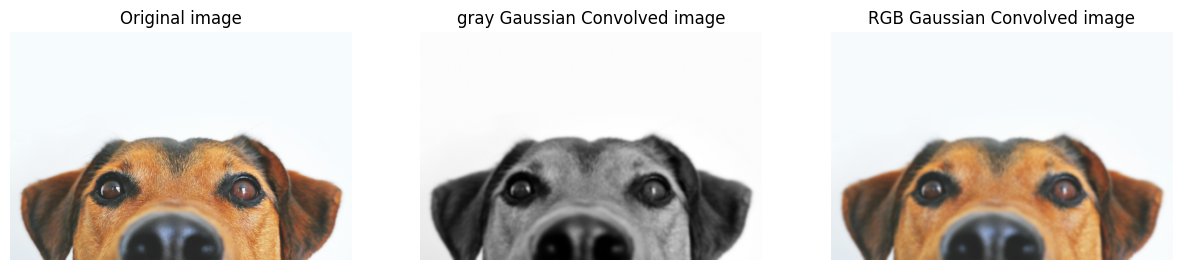

In [12]:
def gaussian_kernel(ksize, sigma):
  if(ksize%2 == 0):
    print("ksize should be an odd number")
    return None

  pi = np.pi
  s2 = sigma**2
  centre = ksize // 2

  g_kernel = np.zeros((ksize,ksize), dtype = np.float32)
  for i in range(ksize):
    for j in range(ksize):
      x = i - centre
      y = j - centre
      g_kernel[i,j] = (1/(2*pi*s2)) * np.exp(-((x**2) + (y**2))/(2*s2))

  g_norm = g_kernel / np.sum(g_kernel)
  return g_norm

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
g_kernel = gaussian_kernel(61, 10)

gray_conv = convolve(gray, g_kernel)

rgb_conv = convolve_rgb(img, g_kernel)
rgb_conv = np.clip(rgb_conv, 0, 255).astype(np.uint8)   #converting float32 -> uint8 again to plot properly

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray_conv, cmap="gray")
plt.title("gray Gaussian Convolved image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(rgb_conv)
plt.title("RGB Gaussian Convolved image")
plt.axis("off")


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [13]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

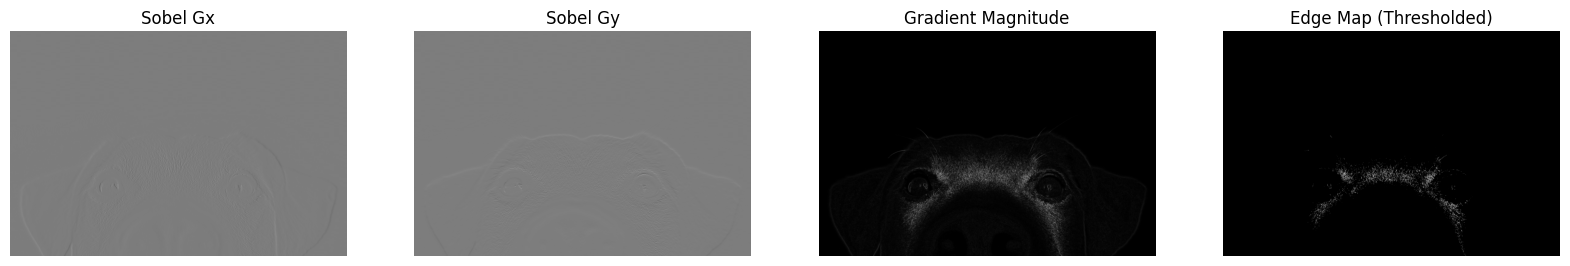

In [14]:

def sobel_edge_detection(gray , threshold = None):
  Sobel_X = np.array([[-1, 0, 1],
                      [-2, 0, 2],
                      [-1, 0, 1]], dtype=np.float32)
  Sobel_Y = np.array([[-1, -2, -1],
                      [0, 0, 0],
                      [1, 2, 1]], dtype=np.float32)

  Gx = convolve(gray, Sobel_X)
  Gy = convolve(gray, Sobel_Y)

  grad_mag = np.sqrt(Gx**2 + Gy**2)

  grad_mag = grad_mag / grad_mag.max() * 255.0
  grad_mag = grad_mag.astype(np.uint8)


  #THRESHOLD FOR THE EDGE DETECTION IS DEFINED AS BELOW
  if threshold is not None:
    edge_map = np.zeros_like(grad_mag, dtype=np.uint8)
    edge_map[grad_mag >= threshold] = 255
  else:
    edge_map = grad_mag

  return Gx, Gy, grad_mag, edge_map

Gx, Gy, grad_mag, edges = sobel_edge_detection(gray, threshold=100)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.imshow(Gx, cmap='gray')
plt.title("Sobel Gx")
plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(Gy, cmap='gray')
plt.title("Sobel Gy")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(grad_mag, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(edges, cmap='gray')
plt.title("Edge Map (Thresholded)")
plt.axis("off")

plt.show()



### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [15]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Max diff: 1541.0
Exact same: False


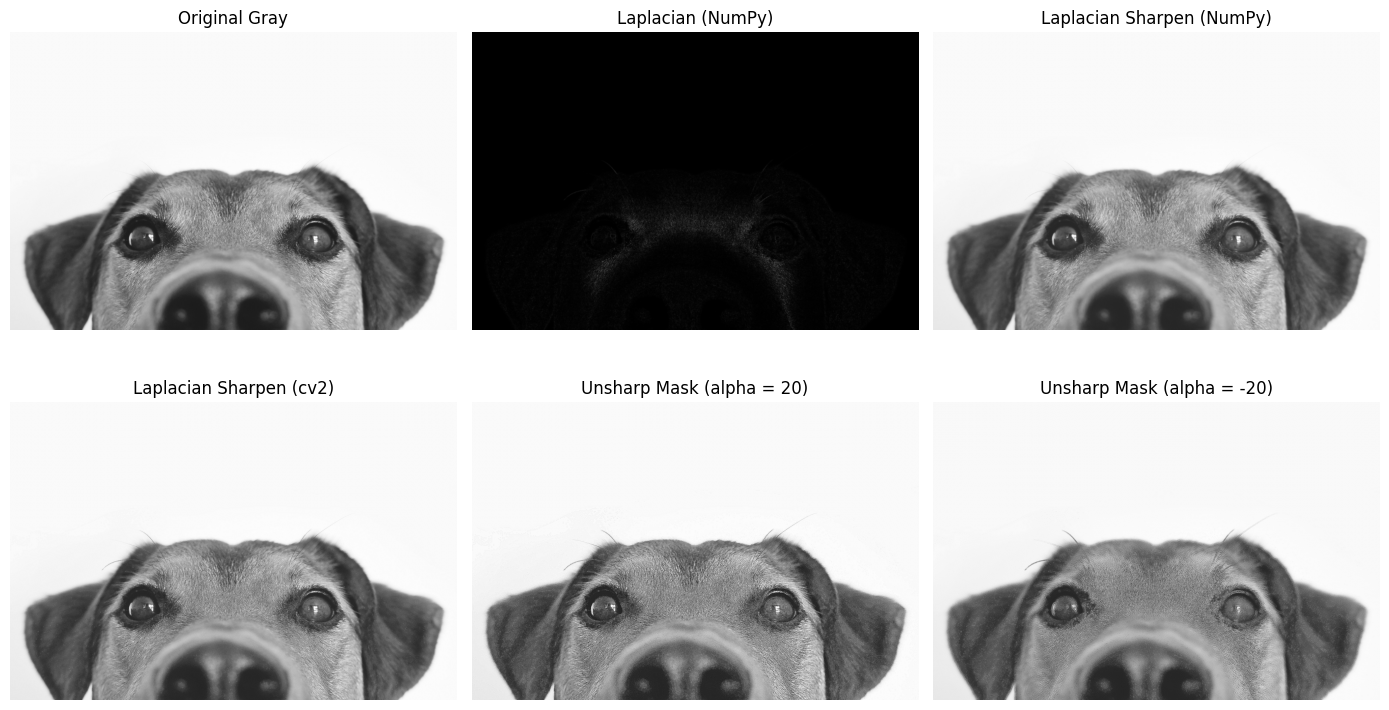

In [85]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.float32)

laplacian_kernel = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

lap = convolve(gray, laplacian_kernel)

alpha = 1
sharp_alpha1 = gray - lap * alpha

lap_cv = cv2.Laplacian(gray, cv2.CV_32F, ksize=3, scale=1)
sharp_cv = gray - lap_cv


print("Max diff:", np.max(np.abs(sharp_alpha1 - sharp_cv)))
print("Exact same:", np.allclose(sharp_alpha1, sharp_cv, atol=1e-5))


g_kernel = gaussian_kernel(7, 1.5)
blurred = convolve(gray, g_kernel)

mask = gray - blurred

alpha1 = 20
alpha2 = -20

sharp1 = gray + alpha1 * mask
sharp2 = gray + alpha2 * mask

sharp1 = np.clip(sharp1, 0, 255).astype(np.uint8)
sharp2 = np.clip(sharp2, 0, 255).astype(np.uint8)

plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.imshow(gray, cmap="gray")
plt.title("Original Gray")
plt.axis("off")

plt.subplot(2,3,2)
plt.imshow(np.clip(lap, 0, 255).astype(np.uint8), cmap="gray")
plt.title("Laplacian (NumPy)")
plt.axis("off")

plt.subplot(2,3,3)
plt.imshow(np.clip(sharp_alpha1, 0, 255).astype(np.uint8), cmap="gray")
plt.title("Laplacian Sharpen (NumPy)")
plt.axis("off")

plt.subplot(2,3,4)
plt.imshow(np.clip(sharp_cv, 0, 255).astype(np.uint8), cmap="gray")
plt.title("Laplacian Sharpen (cv2)")
plt.axis("off")

plt.subplot(2,3,5)
plt.imshow(sharp1, cmap="gray")
plt.title("Unsharp Mask (alpha = 20)")
plt.axis("off")

plt.subplot(2,3,6)
plt.imshow(sharp2, cmap="gray")
plt.title("Unsharp Mask (alpha = -20)")
plt.axis("off")

plt.tight_layout()
plt.show()

#while unsharping -ve alpha is bluring the image again while +ve alpha is returning the original looking image back

### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [17]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

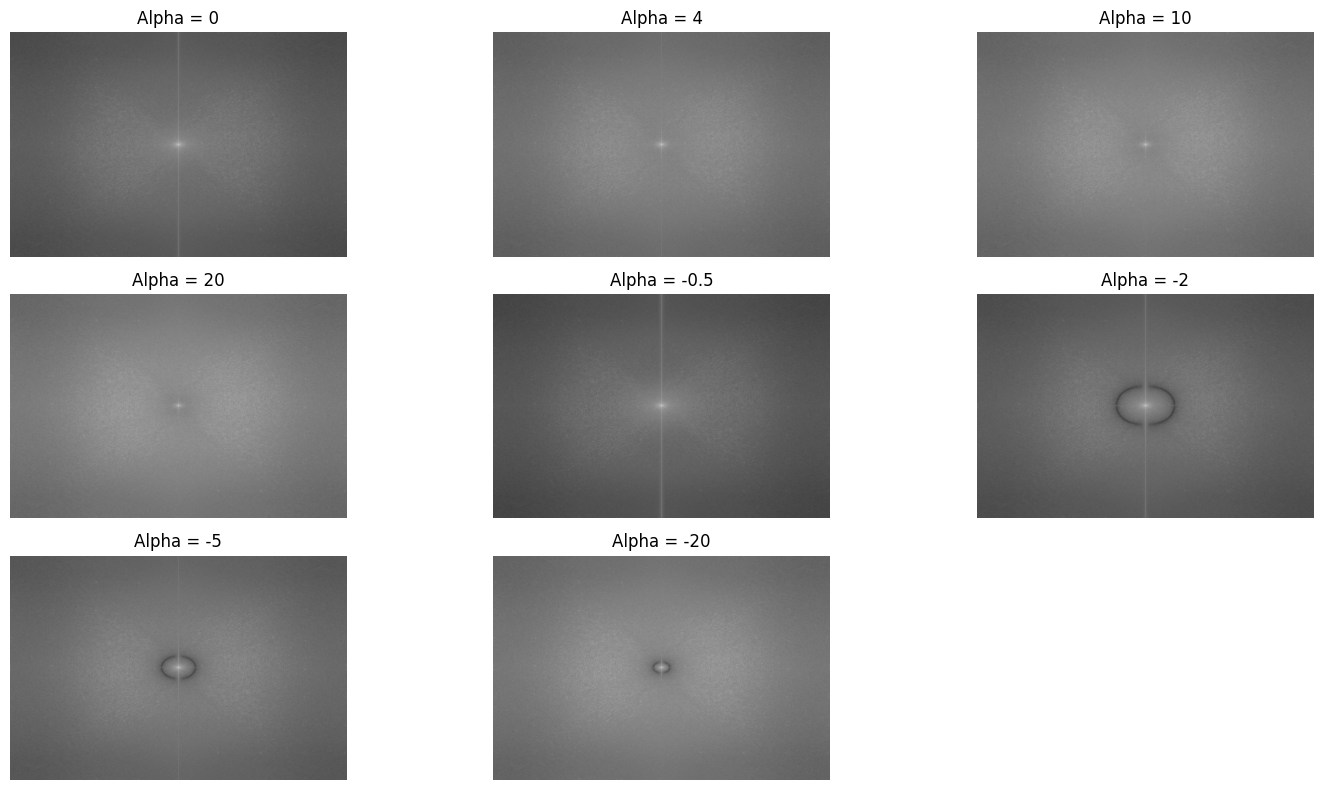

In [18]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY).astype(np.float32)

g_kernel = gaussian_kernel(9, 2.5)
blurred = convolve(gray, g_kernel)

alphas = [0, 4, 10, 20, -0.5, -2, -5, -20]

plt.figure(figsize=(15,8))

for idx, alpha in enumerate(alphas):
    mask = gray - blurred
    unsharp = gray + alpha * mask

    F = np.fft.fft2(unsharp)
    F_shift = np.fft.fftshift(F)
    mag = 20 * np.log(1 + np.abs(F_shift))

    plt.subplot(3,3,idx+1)
    plt.imshow(mag, cmap="gray")
    plt.title(f"Alpha = {alpha}")
    plt.axis("off")

plt.tight_layout()
plt.show()


### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

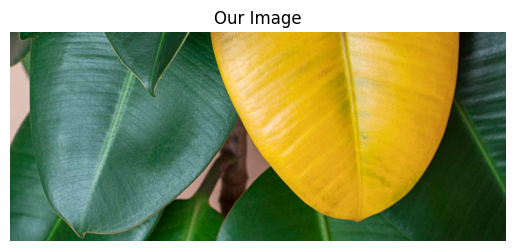

In [19]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [20]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

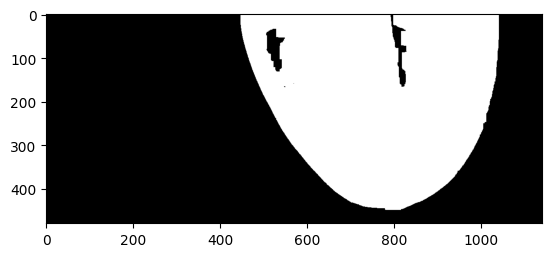

In [79]:
img_f = img_part5.astype(np.float32)

R = img_f[:, :, 0]
G = img_f[:, :, 1]
B = img_f[:, :, 2]

yellow_mask = (R > 130) & (G > 130) & (B < 85)
kernel = np.ones((7,7), np.uint8)

yellow_mask_u8 = (yellow_mask * 255).astype(np.uint8)

dilated = cv2.dilate(yellow_mask_u8, kernel, iterations=5)
plt.imshow(dilated, cmap='gray')

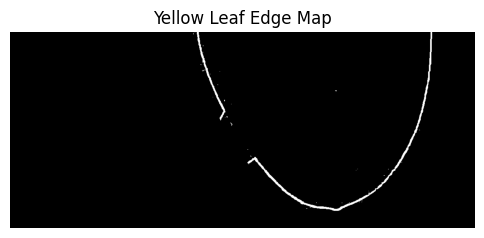

In [83]:

RG = R - G

_, _, _, edge_map = sobel_edge_detection(RG, 50)


edge_map = edge_map * dilated
edge_map = np.abs(edge_map)
edge_map = edge_map / edge_map.max() * 255
edge_map = edge_map.astype(np.uint8)

plt.figure(figsize=(6,6))
plt.imshow(edge_map, cmap="gray")
plt.title("Yellow Leaf Edge Map")
plt.axis("off")
plt.show()


### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
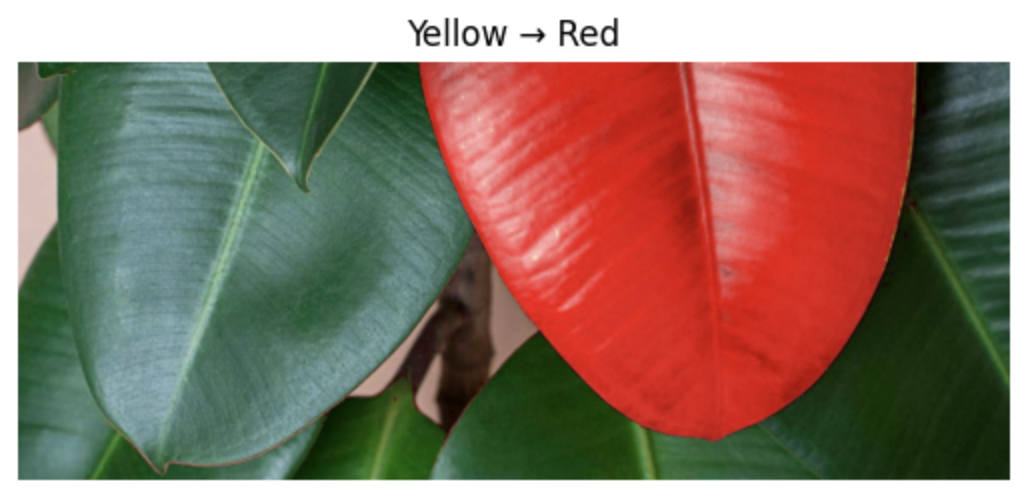

Also, we can change to a less brighter colour
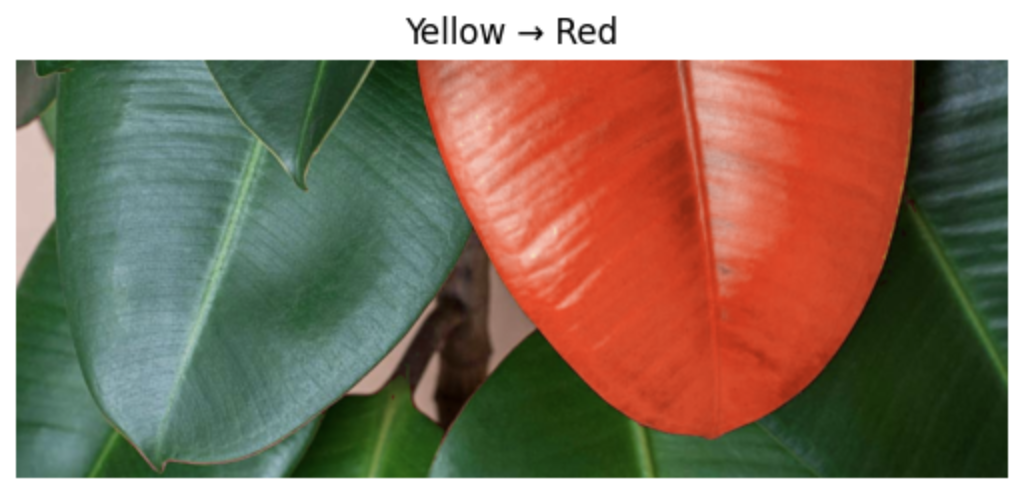

In [22]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

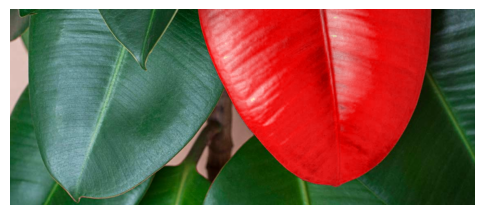

In [23]:
def rgb_to_hsv(image):
  image_norm = image.astype("float32") / 255.0
  R_norm = image_norm[:, :, 0]
  G_norm = image_norm[:, :, 1]
  B_norm = image_norm[:, :, 2]

  Cmax = np.max(image_norm, axis = 2)
  Cmin = np.min(image_norm, axis = 2)

  delta = Cmax - Cmin

  H = np.zeros_like(Cmax)

  mask = delta != 0            #(all the pixels where delta != 0) this will avoid division by 0
  r_mask = (Cmax == R_norm) & mask  #all pixels where Cmax == R and delta != 0 (binary and)
  g_mask = (Cmax == G_norm) & mask
  b_mask = (Cmax == B_norm) & mask

  H[r_mask] = (60 * (G_norm[r_mask] - B_norm[r_mask]) / delta[r_mask] + 360) % 360
  H[g_mask] = (60 * (B_norm[g_mask] - R_norm[g_mask]) / delta[g_mask] + 120) %360
  H[b_mask] = (60 * (R_norm[b_mask] - G_norm[b_mask]) / delta[b_mask] + 240) %360

  S = np.zeros_like(Cmax)
  nonzero = Cmax != 0          #this will also avoid division by 0
  S[nonzero] = delta[nonzero] / Cmax[nonzero]

  V = Cmax

  hsv = np.stack([H,S,V], axis = 2)
  return hsv

  hsv = rgb_to_hsv(img)

hsv = rgb_to_hsv(img_part5)
H = hsv[:, :, 0]
S = hsv[:, :, 1]
V = hsv[:, :, 2]

yellow_mask = (H >= 30) & (H <= 70) & (S > 0.3) & (V > 0.4)    #as at 60 degree we get pure yellow so decided range for it

hsv_red = hsv.copy()
H = hsv_red[:, :, 0]
H[yellow_mask] = 0
hsv_red[:, :, 0] = H

final_rgb = cv2.cvtColor((hsv_red * np.array([0.5,255,255])).astype(np.uint8), cv2.COLOR_HSV2RGB)

plt.figure(figsize=(6,6))
plt.imshow(final_rgb)
plt.axis("off")
plt.show()
